# Unsupervised Learning with scikit-learn

Say you have a collection of customers with a variety of characteristics such as age, location, and financial history, and you wish to **discover patterns and sort them into clusters**. Or perhaps you have a set of texts, such as wikipedia pages, and you wish to **segment them into categories based on their content**. This is the world of **unsupervised learning**, called as such because you are not guiding, or supervising, the pattern discovery by some prediction task, but instead **uncovering hidden structure from unlabeled data**. 

**Unsupervised learning** encompasses a variety of techniques in machine learning, from clustering to dimension reduction to matrix factorization. In this notebook, you'll learn the fundamentals of unsupervised learning and implement the essential algorithms using `scikit-learn` and `scipy`. You will learn how to cluster, transform, visualize, and extract insights from unlabeled datasets, and end the course by building a **recommender system** to recommend popular musical artists.

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## How many clusters?

You are given an array points of size 300x2, where each row gives the (x, y) co-ordinates of a point on a map. Make a scatter plot of these points, and use the scatter plot to guess how many clusters there are.

- Create an array called `xs` that contains the values of `points[:,0]` - that is, column 0 of points.
- Create an array called `ys` that contains the values of `points[:,1]` - that is, column 1 of points.
- Make a scatter plot by passing xs and ys to the plt.scatter() function.
- Call the `plt.show()` function to show your plot.

How many clusters do you see?

In [45]:
points = np.array([[0.06544649120573354, -0.7686637583746054],
 [-1.5290154723631335, -0.4295307892836781],
 [1.7099337125153655, 0.698852527207745],
 [1.1677914530353883, 1.0126263823062864],
 [-1.8011008765125671, -0.3186129561722616],
 [-1.635678878103174, -0.02859534770489522],
 [1.2199037530859576, 0.7464346306206472],
 [-0.2617515511040414, -0.6249293924445927],
 [-1.6192580392899492, -0.4798394895824938],
 [-1.843295821844137, -0.16694431084935166],
 [1.3599960195356797, 0.9499582661886437],
 [0.42291856473720796, -0.7349534005968037],
 [-1.6857613901150803, 0.10686727571590626],
 [0.9062999493855556, 1.0910516186925248],
 [-1.5647832151997594, -0.8467539409172038],
 [-0.025784901040515423, -1.1867253939984086],
 [0.8302732361682478, 1.1450461198177004],
 [1.224504318044118, 1.3506675856135453],
 [-0.15394595513245585, -0.7170430090340084],
 [0.8635880949171804, 1.068246134206403],
 [-1.433863658847475, -0.2381297048308357],
 [0.03844768620526845, -0.7463502234351036],
 [-1.585679224619341, 0.08499354465579917],
 [0.6359887951357822, -0.5847769797814781],
 [0.24417242307388476, -0.5317246502745662],
 [-2.196803585261628, 0.4947367720571247],
 [1.0323502988225113, -0.5568799954803777],
 [-0.2885806653720872, -0.39972527763075705],
 [0.20597008007219075, -0.8017153577365872],
 [-1.210730799565148, -0.3492410894419737],
 [1.3342368384681809, 0.7721489008208623],
 [1.1948015178340623, 1.047885558425092],
 [0.9917476953726534, 0.8920200767628542],
 [-1.8356219039361112, -0.04839732479614648],
 [0.08415720766561488, -0.7156432575403593],
 [-1.4897017522845528, -0.19299604094122305],
 [0.3878241808139117, -0.8206011901833663],
 [-0.014480440773439684, -0.9779840987237762],
 [-2.0521340998721707, -0.02129125401311013],
 [0.10331194324225318, -0.8216278059218872],
 [-0.4418931501740598, -0.6571097360468146],
 [1.103909263225082, 1.024811819134689],
 [-1.5922775939582692, -0.17374037962574693],
 [-1.473441520416564, -0.02202853049685249],
 [-1.3551470405553263, 0.2297106712795478],
 [0.04123369958015996, -1.2377662208006797],
 [0.4761516993039864, -1.136721236563179],
 [1.043356760427954, 0.8234590470870763],
 [-0.0796188170335298, -0.8567739353621651],
 [0.8706505901795596, 1.0805284140253724],
 [1.4026731334929738, 1.0752511922343315],
 [0.8011115670043031, 1.283428254742632],
 [-0.16527515500861514, -1.2358380385590229],
 [-0.3377922091012056, -0.5919432342243465],
 [0.8061074868332878, -0.7375215868012956],
 [-1.4359003186858177, -0.5638444576816151],
 [0.5486889533068995, -0.9514382937143939],
 [0.4680313077949052, -0.7497390745187791],
 [-1.513712896942057, -0.8391432284169498],
 [0.913843599841932, 1.5112653172575654],
 [-1.972339030423432, -0.41155374962957947],
 [0.5213406016331779, -0.8865489365482295],
 [0.6275949431557073, -1.185904771196431],
 [0.9416301405581072, 1.3539933545913059],
 [0.5699476779996157, 1.07036605536564],
 [-1.8766338206265312, 0.14745773409173726],
 [0.9061218594658672, 0.9108401052814168],
 [-1.3748145362460542, 0.28428394728799217],
 [-1.8056402943668943, -0.9671057419425316],
 [0.3430775659691717, -0.7999927487937941],
 [0.7038056620973427, 1.000258041761561],
 [-1.6848986211185557, -0.3056459496643352],
 [1.3147322131175057, 0.986149780647387],
 [0.2615121623829735, -0.2606925092787008],
 [0.9193121024473212, 0.823714845526499],
 [-1.2179592899480618, -0.2021967434650836],
 [-0.1772272310977897, -1.0266524532448829],
 [0.6482486163633215, -0.6682288060013553],
 [0.412067864292622, -0.28783784420181835],
 [1.0156820171676155, 1.1348166724278068],
 [0.6790025410486296, -0.9148950199813576],
 [-1.051827471063715, -0.010623762325267516],
 [0.6130659861093055, 1.7821038376771536],
 [-1.5021974801612847, -0.5230892170854781],
 [-1.7271729328459169, -0.4617391574563362],
 [-1.6099563119906712, -0.1821007032109933],
 [-1.0911102066045015, -0.07813980218573177],
 [-0.01046978156325079, -0.8091303412886869],
 [0.32782303252220457, -0.8073475437162415],
 [1.220385032027253, 1.195979302100845],
 [-1.333286810602751, -0.3000193743679564],
 [0.8795951689645072, 1.1156649125877478],
 [-1.148290981079215, -0.30400762010005744],
 [-0.5801975462632827, -1.1999601847068089],
 [-0.011611594015490669, -0.7846885353997791],
 [0.17359724107621646, -0.6339814535829698],
 [1.3273855590403572, 0.6775996875620109],
 [-1.9346732743106585, 0.30572472057151284],
 [-1.5776189340196929, -0.2772636496588521],
 [0.4763900025188839, 1.2142264755806365],
 [-1.6523750865252471, -0.6803981003840274],
 [-0.12609976246678, -1.0432745741405829],
 [-1.8960708245432247, -0.7008550197468331],
 [0.5746689857995531, 0.748783693306254],
 [-0.1666031224121718, -0.831102946952984],
 [0.8013354959100127, 1.2224443484235474],
 [1.1845542591567533, 1.434646700177676],
 [1.0886442772018283, 0.6466711158456921],
 [-1.6115850479861942, 0.2280572487292947],
 [-1.5751220451660382, -0.09612576005083648],
 [0.0721356955324795, -0.6964032764653807],
 [-1.4005429784650547, 0.16390597510235927],
 [1.0960771260886046, 1.1680469115344367],
 [-2.5434620433141517, -0.23089821715764086],
 [-1.3454487471580343, 0.25151125700096744],
 [-1.3547862853823236, -0.1910331668559034],
 [0.1836811292599628, -1.1582772499848413],
 [-1.3136867742972251, -0.3763569984538013],
 [0.09990128656336106, 1.2250049094266122],
 [1.1722557441252894, 1.3083514263524965],
 [0.08653969877007911, -0.7971437137358454],
 [-0.21053922872177586, -1.1342151077436895],
 [0.26496023904754856, -0.9476074245480344],
 [-0.2557591033928975, -1.0626602197221122],
 [-0.2603975738337485, -0.7477422467984205],
 [-1.917873593816116, 0.16434571406389192],
 [0.9302113924561816, 0.4943633069333503],
 [0.4477046652125147, -0.7287791759929736],
 [-1.6380286912248638, -0.5892552757456395],
 [-1.9571276340863957, -0.10125137401907584],
 [0.9270337011305244, 0.882514226728072],
 [1.2566009331779366, 0.6082807304621214],
 [-1.7281863178915309, 0.08416886607685152],
 [0.3499787973638875, -0.30490298294617035],
 [-1.516960820018647, -0.5091310892535825],
 [0.18763604846446186, -0.5542492405318324],
 [0.8960980862983607, 0.8355150812307898],
 [-1.5496885650240504, -0.1711478213441832],
 [1.215745697288779, 1.233177284686227],
 [0.20307745359011034, -1.0378490610962725],
 [0.8458908629104305, 1.0361527283579377],
 [0.5323791878568742, 1.4736288387658585],
 [-0.05319044083262858, -1.361505529107807],
 [1.388197431517556, 1.117299153890155],
 [1.0069630382934158, 1.036772104404645],
 [0.5668186879625374, -1.0963717575863503],
 [0.8688829648688388, 1.0524887417163158],
 [-1.1628660935320507, -0.5587524541922939],
 [0.27717767905113744, -0.8384401498713722],
 [0.16563267253352665, -0.8030660737386272],
 [0.3826330298198334, -0.4268324141890895],
 [1.1451980736781826, 0.896590262377021],
 [0.8145585690063701, 0.6753366702240604],
 [-1.8603152008514652, -0.0953756097092091],
 [0.9656409952874998, 0.9029557901112318],
 [-1.4989745116151008, -0.3325404360102928],
 [-0.13354890109847573, -0.8072758221114568],
 [0.12541527427567012, -1.1335490643888846],
 [1.0606243632066137, 1.2881635792978954],
 [-1.491545784548984, -0.20246410211880406],
 [1.1618903199872417, 1.2881987698905646],
 [0.5428203291239563, 0.7520352396594223],
 [0.8922106508467552, 0.9921162366040982],
 [-1.4993201058946146, -0.3243066695752808],
 [0.3166647012635424, -1.3448291507175296],
 [0.1397246854860243, -1.220974476481136],
 [-1.5499723960767195, -0.1078258420141638],
 [1.2384685817822878, 1.3766880413971587],
 [1.2555895446451386, 0.7202609833504818],
 [0.2555868919333049, -1.2852976316843507],
 [0.4516893307622061, -0.5595209318010728],
 [1.0620205708618238, 1.0340460421826372],
 [0.6745190801340936, -0.5497029857556341],
 [0.2275967613293482, -1.0272946849858042],
 [-1.458352812370112, -0.04951073923368979],
 [0.2327350078517041, -0.7084926203827929],
 [1.5967958880334026, 1.1139507626418677],
 [0.8047610524694737, 0.5446269982211378],
 [1.1549252092617004, 1.043521906912246],
 [0.5963277561336563, -1.1914289691414517],
 [0.02839068319290647, -0.4382936594500548],
 [1.1345158357541545, 0.5632632979739165],
 [0.2157620438343024, -1.044457529514499],
 [1.4104898664048482, 1.0283071932971288],
 [1.1228930156204953, 0.5802944134502128],
 [0.25200688174273445, -0.8258843605974264],
 [-1.2856608057922851, -0.07390909007813573],
 [1.5284981499353048, 1.1182246872982793],
 [-0.23907858404898005, -0.7054197249485433],
 [-0.25792784205946145, -0.8182503454141075],
 [0.5936781798705313, -0.4523991501399457],
 [0.07931909469133648, -0.29233213019632065],
 [-1.2725681463070748, 0.11630576987440865],
 [0.669301293330272, 1.0073148108513286],
 [0.34791545789361034, -1.208228767089348],
 [-2.112839925038438, -0.6689793468549369],
 [-1.629382396252732, -0.32718221913696793],
 [-1.5381913876982258, -0.015019717960366831],
 [-0.11988544731011096, -0.6036338950688659],
 [-1.54418955684223, -0.30389843747389284],
 [0.3002661436530568, -0.7772317303459549],
 [0.009354485200616963, -0.5388819155394995],
 [-1.3342439259126522, -0.11560430921312267],
 [0.4750448911523113, 0.7842138380132909],
 [0.5931326371015391, 1.2322389981754205],
 [0.413703694582358, -1.3520585677651438],
 [0.5584094792445969, 0.7883105304005376],
 [0.4985501752387235, -0.7899490037783341],
 [0.35675808586971114, -0.8103869319941585],
 [-1.8619782516712928, -0.5907130477671053],
 [-1.619776710874009, -0.1607668738067014],
 [0.8077929471500505, -0.7331129406344682],
 [1.6274577523743008, 0.6278716346647928],
 [-1.5699359287017738, -0.08467566885898843],
 [1.0255856065996505, 0.8938330199548162],
 [0.24293460986231455, -0.6088253049848489],
 [1.2313024182884664, 1.00262186248261],
 [-1.9651013042574703, -0.15886289144686555],
 [0.42795032119840093, -0.7038443183784787],
 [-1.5830681762844188, -0.19431922518999764],
 [-1.571959224996652, 0.014134687055555316],
 [-0.9814537326582891, 0.06132285389771569],
 [-1.4863784427733069, -0.5746531036642516],
 [0.9874582844136752, 0.6918805326527924],
 [1.2861972092838352, 1.281288207379233],
 [0.8585059551128833, 0.9554148145127936],
 [0.19028285631963046, -0.8211294209700777],
 [0.265610462319974, -0.04255238966504527],
 [-1.6189789738321865, 0.008623723050546345],
 [0.24070182637758594, -0.5266420923479008],
 [1.152209930162803, 0.4391669350892604],
 [-1.2196781174958202, -0.25803129868336666],
 [0.33412532725218475, -0.8611776145578867],
 [0.17131003346811258, -0.7563896476095736],
 [-1.1982839682225466, -0.7374466455494118],
 [-0.12245931761906542, -0.4564887912252412],
 [1.5120069752500735, 0.888257407072307],
 [1.1033886565948183, 0.9234747873184772],
 [1.309720948221406, 0.5906698871295553],
 [0.19964875767967785, 1.1485588868394758],
 [0.8146051520392743, 0.8453897200875109],
 [-1.6422739047620531, -0.422962062831202],
 [0.012243506797408292, -0.21247815863310515],
 [0.33709102487199016, -0.7461806494867055],
 [0.4730105400145989, 0.7271207469354536],
 [0.3470662595395132, 1.2303375668004732],
 [-0.003932786491855854, -0.9720969390416028],
 [-1.6430311859446451, 0.05276337015050203],
 [1.4464962531199248, 1.1421703264724763],
 [-1.93030086937966, -0.4002614600446369],
 [-2.3729613540644605, -0.7263364464821149],
 [0.4586012242999578, -1.060489534287036],
 [0.4896361019129961, -1.1892831318183212],
 [-1.0233590198483322, -0.1752057838356285],
 [-1.3276110716139322, -0.9396354945749504],
 [-1.509879085473856, -0.09473658216200102],
 [0.027230566962399616, -0.7987054916040169],
 [1.0169411977558729, 1.264617008757151],
 [0.4773352695039988, -0.9898471005648101],
 [-1.2778422374901173, -0.5474159989810934],
 [0.4989880164093402, -0.6237259029530492],
 [1.0600473141462636, 0.8687000769741766],
 [1.0020750128100304, 1.3829351167050397],
 [1.3116139353733458, 0.6283395589328151],
 [1.134284427193519, 1.1834654169384748],
 [1.2767134615403704, 0.966328781070547],
 [-0.6334288525144172, -0.977682512557856],
 [0.1269877885696956, -0.931423170361161],
 [-1.3451081215324, -0.2375422563556249],
 [-0.5316227754264695, -1.251535942097754],
 [0.21959933809083773, -0.9026993798427284],
 [-1.7899747917891926, -0.12115748411511088],
 [1.231974725796502, -0.07453764354880478],
 [1.4163536023718353, 1.2155175194021297],
 [-1.9028097613580028, -0.16389760152034846],
 [-0.2244008096180195, -0.7545424755075612],
 [0.5955941249273331, 0.9241455296828398],
 [1.219307731244579, 1.081752840147472],
 [-1.9942753549563843, -0.3758779909018822],
 [-1.2781847418397052, -0.5245455082345866],
 [0.6235268908283551, -1.0143010810673632],
 [0.14024251288742887, -0.4282660048507156],
 [-0.16145712613074958, -1.1635973109595263],
 [-1.7479586549697352, -0.06033100879409306],
 [-1.166597912654541, 0.09023930193838893],
 [0.411104079705134, -0.8084248985775087],
 [1.1475716820615272, 0.7780452823812295],
 [-1.6559074832196319, -0.4010544588749239],
 [-1.1530686547465177, 0.008586993168223117],
 [0.6089212149735674, 0.6897483335328548],
 [-0.08434137552326887, -0.976152563706225],
 [0.1917005299655985, -0.4233143781546386],
 [0.2966316166211803, -1.1335739943157594],
 [-1.3689362766976974, -0.2505212448026501],
 [-0.08037807115393003, -0.5678415453281473],
 [0.35695011364327656, -1.150644084910159],
 [0.024821793764037925, -0.6359482849591866],
 [-1.4907555757248412, -0.24825069850518605],
 [-1.4085879959335197, 0.2563543054178052],
 [-1.9827462594741505, -0.545844746986447]])

In [46]:
points[:10]

array([[ 0.06544649, -0.76866376],
       [-1.52901547, -0.42953079],
       [ 1.70993371,  0.69885253],
       [ 1.16779145,  1.01262638],
       [-1.80110088, -0.31861296],
       [-1.63567888, -0.02859535],
       [ 1.21990375,  0.74643463],
       [-0.26175155, -0.62492939],
       [-1.61925804, -0.47983949],
       [-1.84329582, -0.16694431]])

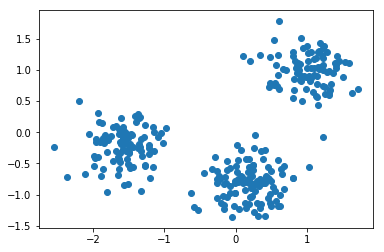

In [47]:
xs = points[:,0]
ys = points[:,1]
plt.scatter(xs, ys)
plt.show();

## Clustering 2D points

From the scatter plot of the previous exercise, you saw that the points seem to separate into 3 clusters. You'll now create a `KMeans` model to find 3 clusters, and fit it to the data points from the previous exercise. After the model has been fit, you'll obtain the cluster labels for some new points using the `.predict()` method.

You are given the array points from the previous exercise, and also an array `new_points`.

In [53]:
new_points = np.array([[0.4002333320265674, -1.2654447065553371],
 [0.8032303700813846, 1.2826016688170383],
 [-1.3950755249367135, 0.055729292090629545],
 [-0.3411926769123959, -1.076619940010254],
 [1.547817473545126, 1.4025004898994076],
 [0.24503201753754994, -0.4834423276216081],
 [1.2070688617175875, 0.8887526050500794],
 [1.2513262772309852, 1.1555539518148343],
 [1.810044147829991, 0.9655307305763632],
 [-1.669634014657854, -0.30810350945803905],
 [-0.07174821045840446, -0.9379396997933668],
 [0.6826319270615404, 1.1025816032172124],
 [1.0903959845516995, 1.4389952903513694],
 [-1.6764541393208259, -0.5045570492933269],
 [-1.8444780366259956, 0.045253954376114465],
 [1.2423485050862004, 1.0208866089127862],
 [-1.8614704081677675, 0.00638645810856478],
 [-1.4604494285267078, 0.15325238308363198],
 [0.4989818169744145, 0.8980060577763966],
 [0.9839622443099741, 1.0436937477386998],
 [-1.831367418957484, -0.16363283503661946],
 [1.3062261736796343, 1.0765871744481543],
 [0.3534203282015242, -0.7513202179121603],
 [1.1395797044536962, 1.5450386043690263],
 [0.2939956935455874, -1.2613500521442478],
 [-1.145582247220963, -0.037870963554070464],
 [1.1871610476838488, 0.6002406629352124],
 [-2.232119462281373, 0.2304750944808799],
 [-1.2832042998796784, -0.3933145682714113],
 [0.4942966961525396, -0.8839720087642245],
 [0.06318349304308901, -0.9119522278514528],
 [0.9357595389694396, 0.8668206847501292],
 [1.5801472050501468, 1.0378839166980027],
 [1.0630495965303597, 1.0270608188286456],
 [-1.3973253641181504, -0.5051622490313863],
 [-0.10993523963069728, -0.908113619012788],
 [1.1734675783939748, 0.9475010921789884],
 [0.9200845106983088, 1.4576767182024295],
 [0.5826589564675202, -0.9000868321743926],
 [0.9527723280673276, 0.8990423859001851],
 [-1.3726695553001729, -0.031787821490623924],
 [0.02127067600085084, -0.7076141940283391],
 [0.3270490517353891, -0.5559981073787117],
 [-1.7159026735270893, 0.21522226611516804],
 [0.5125162088827879, -0.7601282452864132],
 [1.1302346873969018, 0.7224511221624661],
 [-1.430743100030984, -0.34278751082640724],
 [-1.8272462496627275, 0.11765777468368645],
 [1.41801349539704, 1.1145507980398308],
 [1.2689730355046054, 1.4192597123818338],
 [0.8040764937373096, 1.6398855683919011],
 [0.8345677518010617, 1.099566888938277],
 [-1.2471473202906656, -0.2235223195135434],
 [-1.294225372060266, 0.08187700243761464],
 [-0.22737831566090266, -0.4133313867163021],
 [0.21883038725584325, -0.4681831195396797],
 [-1.2259341395432908, 0.2555991474864147],
 [-1.3129403283209065, -0.4288920696757677],
 [-1.3353238174034492, 0.6520537761945147],
 [-0.3011002328629553, -1.2515645072433799],
 [0.20277835613322046, -0.9052774447453354],
 [1.0135778414771135, 1.1237898051898965],
 [0.8183243943552136, 0.8608412565444068],
 [1.2618155625202765, 1.4661374378864431],
 [0.4648677244304033, -0.7972124589573605],
 [0.3609088981639311, 0.8441067198291454],
 [-2.150983103026574, -0.3695839369151511],
 [1.0500528098687707, 0.8741813644980215],
 [0.10658007406809468, -0.7492681533935283],
 [-1.7394572308492744, 0.2521835769814145],
 [-0.11201768661400867, -0.6524697876040267],
 [0.5166189510067274, -0.6412675816881157],
 [0.3266217871239109, -0.8806080148889077],
 [1.0901775875963506, 1.109525584516946],
 [0.3644595761914319, -0.6942156216036032],
 [-1.9077931816808351, 0.18738367404067435],
 [-1.9560182911330304, 0.139959126119237],
 [0.3185417014931509, -0.4052717041359056],
 [0.7365126986835167, 1.7641625460023058],
 [-1.4417516180120409, -0.057232042866411585],
 [0.3217571684082834, -0.5342838213080934],
 [-1.3731730463544376, 0.04644846441285158],
 [0.06872259098410069, -1.1052294378912342],
 [0.9593142184469996, 0.6523162095118378],
 [-1.626419187808163, -0.5624232801807939],
 [1.0678830524625211, 0.7292604817658017],
 [-1.7964354693700573, -0.9883074177396988],
 [-0.09886283766053412, -0.06811980918444828],
 [-0.10513569966767866, 1.1702214346983502],
 [0.8799646993015682, 1.253403167715908],
 [0.9807534068479892, 1.1548653876175397],
 [-0.08332249663379743, -0.9248443677429224],
 [0.8487596732932929, 1.0939742455294217],
 [1.3294164939525177, 1.137345628305919],
 [0.3237880684751769, -0.7497324512066812],
 [-1.5261097030195439, -0.24901692884281745],
 [-1.4859811551413251, -0.2688286079948604],
 [-1.8047955294480482, 0.18705270020134698],
 [-2.0190734747511296, -0.4495116509492829],
 [0.28720240197139146, -0.6554874148914515],
 [0.8222951016345545, 1.3844323435720964],
 [-0.03569970357693916, -0.8018258068955944],
 [-1.6695543980809435, -0.13825850468570902],
 [-1.7822682110743764, 0.2933530329302973],
 [0.7258371377839856, -0.6233740238035452],
 [0.3884325927706244, -0.7612834972221451],
 [1.49002782668951, 0.7956786712532995],
 [0.0006554232279744611, -0.7405807019362622],
 [-1.3453311598066255, -0.4756299369161786],
 [-0.8038451057116693, -0.3099430125960101],
 [-0.2490412950059105, -1.0066241847122213],
 [-1.4109511807922228, -0.0706744126632764],
 [-1.7511959356833808, -0.30049133577057163],
 [-1.2794272423458892, 0.17377459990981498],
 [0.33502818267433954, 0.6247611513773945],
 [1.1681964908549058, 1.1890225089718274],
 [0.7152104568601423, 0.9260774191562786],
 [1.300572781743362, 0.916349564697178],
 [-1.2169700759337978, 0.1100394768992078],
 [-1.7070793484711009, -0.05996595355493217],
 [1.2073065505131004, 1.0548046315261794],
 [0.18689600860487554, -0.9580472344730616],
 [0.8034634709748233, 0.38613313957714746],
 [-1.7348679046802356, -0.14983191338255186],
 [1.3126149924762784, 1.11802981738963],
 [0.4049931475801489, -0.51090034730328],
 [-1.932679684301072, 0.22076469428888174],
 [0.6560047985146118, 0.9618871607020404],
 [-1.405882153104396, 0.1171344034664284],
 [-1.7430626422339452, -0.07474739588180918],
 [0.5437454124343493, 1.4720922360345101],
 [-1.973316692928232, -0.22712449341197186],
 [1.5390117095155558, 1.3604908086817358],
 [-1.4832345230186001, -0.4903020632514634],
 [0.3867484837065093, -1.261733998094538],
 [1.170157157781722, 1.185494153696634],
 [-0.0805381721060609, -0.32192362738669106],
 [-0.06822731561561057, -0.8528258870251585],
 [0.7135000278803649, 1.2786851950310625],
 [-1.8501437762114057, -0.5034905576730881],
 [0.06360852657782562, -1.4125703999747332],
 [1.5296606194895932, 0.9660565718481976],
 [0.16216571438837646, -1.3737484274059804],
 [-0.3234744968085503, -0.7066202689006988],
 [-1.5176899333956642, 0.1876583021123376],
 [0.8888959113837018, 0.7622371605566541],
 [0.48316403224714793, 0.8819318692890954],
 [-0.05529977660045904, -0.7113050163965421],
 [-1.5796644099147938, -0.6292203127968155],
 [0.05513086450579202, -0.8472067629036832],
 [-2.0600158163670144, 0.058769778676059974],
 [1.1181085496719971, 1.3025417465032032],
 [0.4870161641475913, -0.9901439374583558],
 [-1.6551804200375655, -0.16938638279232876],
 [-1.4434973799529995, 0.190299243117064],
 [-0.17007454748807474, -0.8267360220133111],
 [-1.824339789139913, -0.30781462607157506],
 [1.030934850193869, 1.2645769050131583],
 [1.6443116943156395, 1.2777311525997004],
 [-1.4761769264381148, 0.026078387244023254],
 [1.0095306707588962, 1.1427018140753182],
 [-1.4528563647019344, -0.25521620652981336],
 [-1.7409291726803937, -0.08344431770974857],
 [1.2203829912336142, 1.2869996131495278],
 [0.916925397059932, 0.7320702754102352],
 [-0.0016075418496920846, -0.7263755713166965],
 [0.8938412382881398, 0.8411466431487012],
 [0.6337919611890583, 1.0091513357290842],
 [-1.4792707460559875, -0.6997819362786284],
 [0.05447993735263179, -1.0644197014122958],
 [-1.5193556824925778, -0.4892769290772026],
 [0.28993902630874063, -0.7731455226767868],
 [-0.009681540610637612, -1.1330220710411107],
 [1.1347463930946602, 0.971541744341109],
 [0.5364214059773794, -0.8479063881175805],
 [1.1475986378655694, 0.6899152046491732],
 [0.5732919022586174, 0.7908027102433104],
 [0.2123773967237214, -0.6075698078151486],
 [0.5265795477728625, -0.8159302635461885],
 [-2.0183164148773765, 0.06786507404223903],
 [-0.23551262366373565, -1.0820513247221837],
 [0.15927477956772199, -0.6007172613865557],
 [0.22812035636194486, -1.1600354896605691],
 [-1.5365837800714561, 0.08407988075318508],
 [1.1395460916729012, 0.6317820011520845],
 [1.0111925531921029, 1.0436080478160479],
 [-0.14203986668230473, -0.4812303372945994],
 [-2.231201820617505, 0.08491629053739214],
 [0.1255548110642637, -1.017947931672471],
 [-1.7249350918334918, -0.6944261771347984],
 [-1.6043463038969006, 0.4455508679133457],
 [0.7371539787409838, 0.9265607436412832],
 [0.6729052709588117, 1.1336602959159123],
 [1.200664556764366, 0.7262730934489203],
 [0.07587472088808289, -0.9833783259664118],
 [1.2878326230927817, 1.1808860066647064],
 [1.065219295449487, 1.0071474604016484],
 [1.058716978914834, 1.129565193019349],
 [-1.1264340979123897, 0.16678774377085234],
 [-1.101572175412031, -0.3641378058993379],
 [0.23511821680542264, -0.1397699490301142],
 [1.1385379537720148, 1.010185185416075],
 [0.5312056535944205, -0.8819907915506771],
 [0.4330859360296099, -0.7640590419867354],
 [-0.00448926155719931, -1.3054841053771022],
 [-1.7634858858975817, -0.4974307390604293],
 [1.3648568100147571, 0.5834046987674564],
 [0.5669238996877362, 1.5139196303045417],
 [1.3573682575435084, 0.6709153176202536],
 [1.07173397131927, 0.6119908837452674],
 [1.0010691544116854, 0.8938153256093224],
 [1.33091007084542, 0.8797738791009336],
 [-1.7960374038799916, -0.0353883973153408],
 [-1.2722297859037501, 0.4001566415831013],
 [0.8474806027520546, 1.1703236354150213],
 [-1.5098912912157934, -0.7123183296610254],
 [-1.2495357580091535, -0.5578597299906052],
 [-1.277179730682378, -0.5993505497357117],
 [-1.81946743441716, 0.7370576727236302],
 [1.1994986715117046, 1.5696938611171598],
 [-1.255438466250899, -0.2338928257571077],
 [-1.6305205810978964, 0.1614558646111886],
 [1.1061130532991692, 0.7396982244750188],
 [0.6701931918150288, 0.8705670005920064],
 [0.36967015614450893, -0.6946453064135064],
 [-1.2636229292628256, -0.6992492849533154],
 [-0.3666875074417829, -1.3531025998574808],
 [0.244032146778522, -0.6594707932203552],
 [-1.2767914239764049, -0.48545341180964],
 [0.03774736124308442, -0.6992516050983633],
 [-2.1914853929412086, -0.4911994999491013],
 [-0.2932777772250221, -0.5894882119288223],
 [-1.6573739723897742, -0.2983377855098531],
 [0.7366388611344399, 0.5780370567291455],
 [1.1370908117465266, 1.3011975437641738],
 [-1.4414660113823912, 0.0313934680115914],
 [0.5923607081206381, 1.225451138247612],
 [0.6517194143329134, 0.49267489445638396],
 [0.5945591391812747, 0.8256373151538152],
 [-1.8790072189725529, -0.5218996262712949],
 [0.215225040643176, -1.2826985114132357],
 [0.4991459650764026, -0.6702686338109364],
 [-1.8295417631450963, -0.33926973062405463],
 [0.7927214032273834, 1.3378560641922397],
 [0.9543633716714262, 0.9803966258728768],
 [-1.353598455664638, 0.1039763401001232],
 [1.0559506192051886, 0.8070319271614147],
 [-1.9431101010974, -0.11897696424755992],
 [-1.3960413695739495, -0.3100959758834197],
 [1.2897762394609942, 1.0175336493188667],
 [-1.5950313888468417, -0.540574609207296],
 [-1.41994045911711, -0.381032569275004],
 [-0.02355698013966676, -1.1013370175277757],
 [-1.260385682681977, -0.6932738864756782],
 [0.9602159807545396, -0.8115536940366752],
 [0.551803308270898, -1.0179317577818612],
 [0.3701850851909715, -1.0688546750973675],
 [0.8255292066733384, 0.8770070597519889],
 [-1.870325947723697, 0.2875071987566922],
 [-1.5626076921394083, -0.1891967118876786],
 [-1.2634654755771513, -0.7747252373004758],
 [-0.06338004205825187, -0.7594006111349588],
 [0.8852982802867434, 0.8856205186736593],
 [-0.14332468573965634, -1.1608367821528174],
 [-1.8390872522515156, -0.3266555153279336],
 [0.2747092294908228, -1.045468290017301],
 [-1.4570357313623459, -0.2918420360744182],
 [-1.5904884225125158, 0.16606303108184184],
 [0.9255492842349158, 0.741406406421462],
 [0.19724546858474468, -0.7807032247389641],
 [0.2884016972818718, -0.8324255513983669],
 [0.7241416179667342, -0.7991491997426731],
 [-1.6265863937272311, -0.18000554338188188],
 [0.5844815882480341, 1.1319564042970958],
 [1.0214673158906118, 0.4596577990099158],
 [0.8650505541075891, 0.9577148872898591],
 [0.3987177664298797, -1.2427314680567312],
 [0.8622348918988015, 1.1095556084481029],
 [-1.3599943045133849, 0.024994265382756148],
 [-1.1917850535860444, -0.038294632325886896],
 [1.2939242406012197, 1.103205093863668],
 [1.256796300232616, -0.7798575815567014],
 [0.09380403020551704, -0.5532472578192074],
 [-1.735121753247433, -0.09762716669678152],
 [0.22315358715490693, -0.9434743514736362],
 [0.40198909967283897, -1.1096305109671036],
 [-1.4224415820890841, 0.181914703358554],
 [0.39247626718270345, -0.8784262773053151],
 [1.2518187471885425, 0.6936149956889932],
 [0.017748131656740745, -0.7203042351849521],
 [-1.877525213291965, -0.2638704239110657],
 [-1.580636023186551, -0.5504563439340334],
 [-1.5958949270817768, -0.15393289210602967],
 [-1.0182977039639498, 0.03885423697922805],
 [1.2481965891402875, 0.6600418031465439],
 [-1.2555137688133542, -0.02961720092068407],
 [-1.4186455928109607, -0.3582301789223188],
 [0.5257583257407314, 0.8705005425324366],
 [0.5555999878971989, 1.1876507197090485],
 [0.028134443916536883, -0.6991113135804631]])

In [54]:
# Import KMeans
from sklearn.cluster import KMeans

# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3)

# Fit model to points
model.fit(points)

# Determine the cluster labels of new_points: labels
labels = model.predict(new_points)

# Print cluster labels of new_points
print(labels)

[0 2 1 0 2 0 2 2 2 1 0 2 2 1 1 2 1 1 2 2 1 2 0 2 0 1 2 1 1 0 0 2 2 2 1 0 2
 2 0 2 1 0 0 1 0 2 1 1 2 2 2 2 1 1 0 0 1 1 1 0 0 2 2 2 0 2 1 2 0 1 0 0 0 2
 0 1 1 0 2 1 0 1 0 2 1 2 1 0 2 2 2 0 2 2 0 1 1 1 1 0 2 0 1 1 0 0 2 0 1 1 0
 1 1 1 2 2 2 2 1 1 2 0 2 1 2 0 1 2 1 1 2 1 2 1 0 2 0 0 2 1 0 2 0 0 1 2 2 0
 1 0 1 2 0 1 1 0 1 2 2 1 2 1 1 2 2 0 2 2 1 0 1 0 0 2 0 2 2 0 0 1 0 0 0 1 2
 2 0 1 0 1 1 2 2 2 0 2 2 2 1 1 0 2 0 0 0 1 2 2 2 2 2 2 1 1 2 1 1 1 1 2 1 1
 2 2 0 1 0 0 1 0 1 0 1 2 2 1 2 2 2 1 0 0 1 2 2 1 2 1 1 2 1 1 0 1 0 0 0 2 1
 1 1 0 2 0 1 0 1 1 2 0 0 0 1 2 2 2 0 2 1 1 2 0 0 1 0 0 1 0 2 0 1 1 1 1 2 1
 1 2 2 0]


In [55]:
new_points[0:10]

array([[ 0.40023333, -1.26544471],
       [ 0.80323037,  1.28260167],
       [-1.39507552,  0.05572929],
       [-0.34119268, -1.07661994],
       [ 1.54781747,  1.40250049],
       [ 0.24503202, -0.48344233],
       [ 1.20706886,  0.88875261],
       [ 1.25132628,  1.15555395],
       [ 1.81004415,  0.96553073],
       [-1.66963401, -0.30810351]])

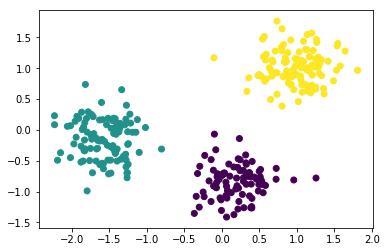

In [56]:
xs = new_points[:,0]
ys = new_points[:,1]
plt.scatter(xs, ys, c=labels)
plt.show();

## Inspect your clustering

Let's now inspect the clustering you performed in the previous exercise!

A solution to the previous exercise has already run, so `new_points` is an array of points and labels is the array of their cluster labels.

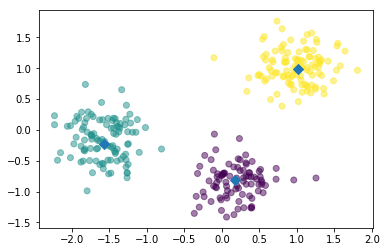

In [57]:
# Import pyplot
import matplotlib.pyplot as plt

# Assign the columns of new_points: xs and ys
xs = new_points[:,0]
ys = new_points[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs, ys, c=labels, alpha=0.5)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker='D', s=50)
plt.show();

The clustering looks great! But how can you be sure that 3 clusters is the correct choice? In other words, how can you **evaluate the quality of a clustering**?

## How many clusters of grain?

To choose a **good number of clusters for a dataset** using the **k-means** we can use **inertia graph**. You are given an array `samples` containing the measurements (such as area, perimeter, length, and several others) of samples of grain. What's a good number of clusters in this case?

KMeans and PyPlot (plt) have already been imported for you.

This dataset was sourced from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/seeds).

`The rule of thumb is to choose "elbow" in the inertia plot as the optimal number of clusters`.

In [58]:
samples = np.array([[15.26, 14.84, 0.871, 5.763, 3.312, 2.221, 5.22],
 [14.88, 14.57, 0.8811, 5.553999999999999, 3.333, 1.018, 4.956],
 [14.29, 14.09, 0.905, 5.291, 3.3369999999999997, 2.699, 4.825],
 [13.84, 13.94, 0.8955, 5.324, 3.3789999999999996, 2.259, 4.805],
 [16.14, 14.99, 0.9034, 5.6579999999999995, 3.562, 1.355, 5.175],
 [14.38, 14.21, 0.8951, 5.386, 3.312, 2.4619999999999997, 4.956],
 [14.69, 14.49, 0.8799, 5.563, 3.259, 3.5860000000000003, 5.218999999999999],
 [14.11, 14.1, 0.8911, 5.42, 3.302, 2.7, 5.0],
 [16.63, 15.46, 0.8747, 6.053, 3.465, 2.04, 5.877000000000001],
 [16.44, 15.25, 0.888, 5.8839999999999995, 3.505, 1.969, 5.5329999999999995],
 [15.26, 14.85, 0.8696, 5.7139999999999995, 3.242, 4.543, 5.314],
 [14.03, 14.16, 0.8796, 5.438, 3.201, 1.7169999999999999, 5.001],
 [13.89, 14.02, 0.888, 5.439, 3.199, 3.986, 4.738],
 [13.78, 14.06, 0.8759, 5.479, 3.156, 3.136, 4.872],
 [13.74, 14.05, 0.8744, 5.482, 3.114, 2.932, 4.825],
 [14.59, 14.28, 0.8993, 5.351, 3.333, 4.185, 4.781000000000001],
 [13.99, 13.83, 0.9183, 5.119, 3.383, 5.234, 4.781000000000001],
 [15.69, 14.75, 0.9058, 5.527, 3.514, 1.599, 5.046],
 [14.7, 14.21, 0.9153, 5.205, 3.466, 1.767, 4.649],
 [12.72, 13.57, 0.8686, 5.226, 3.049, 4.102, 4.914],
 [14.16, 14.4, 0.8584, 5.6579999999999995, 3.1289999999999996, 3.072, 5.176],
 [14.11, 14.26, 0.8722, 5.52, 3.168, 2.688, 5.218999999999999],
 [15.88, 14.9, 0.8988, 5.617999999999999, 3.5069999999999997, 0.7651, 5.091],
 [12.08, 13.23, 0.8664, 5.099, 2.9360000000000004, 1.415, 4.961],
 [15.01, 14.76, 0.8657, 5.789, 3.245, 1.791, 5.001],
 [16.19, 15.16, 0.8849, 5.832999999999999, 3.4210000000000003, 0.903, 5.307],
 [13.02, 13.76, 0.8641, 5.395, 3.0260000000000002, 3.373, 4.825],
 [12.74, 13.67, 0.8564, 5.395, 2.9560000000000004, 2.504, 4.869],
 [14.11, 14.18, 0.882, 5.541, 3.221, 2.7539999999999996, 5.038],
 [13.45, 14.02, 0.8604, 5.516, 3.065, 3.531, 5.0969999999999995],
 [13.16, 13.82, 0.8662, 5.454, 2.975, 0.8551, 5.056],
 [15.49, 14.94, 0.8724, 5.757000000000001, 3.3710000000000004, 3.412, 5.228],
 [14.09,
  14.41,
  0.8529,
  5.7170000000000005,
  3.1860000000000004,
  3.92,
  5.2989999999999995],
 [13.94, 14.17, 0.8728, 5.585, 3.15, 2.124, 5.012],
 [15.05, 14.68, 0.8779, 5.712000000000001, 3.3280000000000003, 2.129, 5.36],
 [16.12, 15.0, 0.9, 5.709, 3.485, 2.27, 5.443],
 [16.2, 15.27, 0.8734, 5.8260000000000005, 3.464, 2.823, 5.527],
 [17.08,
  15.38,
  0.9079,
  5.832000000000001,
  3.6830000000000003,
  2.9560000000000004,
  5.484],
 [14.8, 14.52, 0.8823, 5.656000000000001, 3.2880000000000003, 3.112, 5.309],
 [14.28, 14.17, 0.8944, 5.397, 3.298, 6.685, 5.001],
 [13.54, 13.85, 0.8871, 5.348, 3.156, 2.5869999999999997, 5.178],
 [13.5, 13.85, 0.8852, 5.351, 3.158, 2.249, 5.176],
 [13.16, 13.55, 0.9009, 5.138, 3.201, 2.461, 4.783],
 [15.5, 14.86, 0.882, 5.877000000000001, 3.3960000000000004, 4.711, 5.528],
 [15.11, 14.54, 0.8986, 5.579, 3.4619999999999997, 3.128, 5.18],
 [13.8, 14.04, 0.8794, 5.376, 3.155, 1.56, 4.961],
 [15.36,
  14.76,
  0.8861,
  5.7010000000000005,
  3.3930000000000002,
  1.367,
  5.132000000000001],
 [14.99, 14.56, 0.8883, 5.57, 3.377, 2.958, 5.175],
 [14.79,
  14.52,
  0.8819,
  5.545,
  3.2910000000000004,
  2.7039999999999997,
  5.111000000000001],
 [14.86, 14.67, 0.8676, 5.678, 3.258, 2.129, 5.351],
 [14.43, 14.4, 0.8751, 5.585, 3.272, 3.975, 5.144],
 [15.78, 14.91, 0.8923, 5.6739999999999995, 3.4339999999999997, 5.593, 5.136],
 [14.49, 14.61, 0.8538, 5.715, 3.113, 4.1160000000000005, 5.396],
 [14.33, 14.28, 0.8831, 5.504, 3.199, 3.3280000000000003, 5.224],
 [14.52, 14.6, 0.8557, 5.7410000000000005, 3.113, 1.4809999999999999, 5.487],
 [15.03, 14.77, 0.8658, 5.702000000000001, 3.2119999999999997, 1.933, 5.439],
 [14.46, 14.35, 0.8818, 5.388, 3.377, 2.802, 5.044],
 [14.92, 14.43, 0.9006, 5.3839999999999995, 3.412, 1.1420000000000001, 5.088],
 [15.38, 14.77, 0.8857, 5.662000000000001, 3.4189999999999996, 1.999, 5.222],
 [12.11, 13.47, 0.8392, 5.159, 3.032, 1.5019999999999998, 4.519],
 [11.42, 12.86, 0.8683, 5.008, 2.85, 2.7, 4.607],
 [11.23, 12.63, 0.884, 4.902, 2.8789999999999996, 2.269, 4.703],
 [12.36, 13.19, 0.8923, 5.0760000000000005, 3.042, 3.22, 4.605],
 [13.22, 13.84, 0.868, 5.395, 3.07, 4.157, 5.088],
 [12.78, 13.57, 0.8716, 5.2620000000000005, 3.0260000000000002, 1.176, 4.782],
 [12.88, 13.5, 0.8879, 5.138999999999999, 3.1189999999999998, 2.352, 4.607],
 [14.34, 14.37, 0.8726, 5.63, 3.19, 1.3130000000000002, 5.15],
 [14.01, 14.29, 0.8625, 5.609, 3.158, 2.217, 5.132000000000001],
 [14.37, 14.39, 0.8726, 5.569, 3.153, 1.464, 5.3],
 [12.73, 13.75, 0.8458, 5.412000000000001, 2.8819999999999997, 3.533, 5.067],
 [17.63, 15.98, 0.8673, 6.191, 3.5610000000000004, 4.0760000000000005, 6.06],
 [16.84, 15.67, 0.8623, 5.997999999999999, 3.484, 4.675, 5.877000000000001],
 [17.26, 15.73, 0.8763, 5.978, 3.594, 4.539, 5.791],
 [19.11, 16.26, 0.9081, 6.154, 3.93, 2.9360000000000004, 6.079],
 [16.82, 15.51, 0.8786, 6.017, 3.486, 4.004, 5.841],
 [16.77, 15.62, 0.8638, 5.9270000000000005, 3.438, 4.92, 5.795],
 [17.32, 15.91, 0.8599, 6.064, 3.403, 3.824, 5.922000000000001],
 [20.71,
  17.23,
  0.8763,
  6.579,
  3.8139999999999996,
  4.4510000000000005,
  6.4510000000000005],
 [18.94, 16.49, 0.875, 6.445, 3.639, 5.064, 6.362],
 [17.12, 15.55, 0.8892, 5.85, 3.5660000000000003, 2.858, 5.746],
 [16.53, 15.34, 0.8823, 5.875, 3.467, 5.532, 5.88],
 [18.72, 16.19, 0.8977, 6.006, 3.8569999999999998, 5.324, 5.879],
 [20.2, 16.89, 0.8894, 6.285, 3.864, 5.172999999999999, 6.187],
 [19.57, 16.74, 0.8779, 6.3839999999999995, 3.772, 1.472, 6.273],
 [19.51, 16.71, 0.878, 6.3660000000000005, 3.801, 2.9619999999999997, 6.185],
 [18.27, 16.09, 0.887, 6.172999999999999, 3.6510000000000002, 2.443, 6.197],
 [18.88, 16.26, 0.8969, 6.084, 3.764, 1.649, 6.109],
 [18.98,
  16.66,
  0.8590000000000001,
  6.5489999999999995,
  3.67,
  3.6910000000000003,
  6.497999999999999],
 [21.18, 17.21, 0.8989, 6.5729999999999995, 4.033, 5.78, 6.231],
 [20.88, 17.05, 0.9031, 6.45, 4.032, 5.016, 6.321000000000001],
 [20.1, 16.99, 0.8746, 6.581, 3.785, 1.955, 6.449],
 [18.76, 16.2, 0.8984, 6.172000000000001, 3.7960000000000003, 3.12, 6.053],
 [18.81, 16.29, 0.8906, 6.272, 3.693, 3.237, 6.053],
 [18.59, 16.05, 0.9066, 6.037000000000001, 3.86, 6.001, 5.877000000000001],
 [18.36, 16.52, 0.8452, 6.666, 3.485, 4.933, 6.4479999999999995],
 [16.87, 15.65, 0.8648, 6.138999999999999, 3.463, 3.696, 5.9670000000000005],
 [19.31, 16.59, 0.8815, 6.341, 3.81, 3.477, 6.2379999999999995],
 [18.98, 16.57, 0.8687, 6.449, 3.552, 2.144, 6.452999999999999],
 [18.17, 16.26, 0.8637, 6.271, 3.512, 2.853, 6.273],
 [18.72,
  16.34,
  0.8809999999999999,
  6.218999999999999,
  3.6839999999999997,
  2.188,
  6.097],
 [16.41, 15.25, 0.8866, 5.718, 3.525, 4.217, 5.617999999999999],
 [17.99, 15.86, 0.8992, 5.89, 3.694, 2.068, 5.837000000000001],
 [19.46, 16.5, 0.8985, 6.1129999999999995, 3.892, 4.308, 6.0089999999999995],
 [19.18, 16.63, 0.8717, 6.369, 3.681, 3.3569999999999998, 6.229],
 [18.95, 16.42, 0.8829, 6.247999999999999, 3.755, 3.3680000000000003, 6.148],
 [18.83, 16.29, 0.8917, 6.037000000000001, 3.786, 2.553, 5.879],
 [18.85, 16.17, 0.9056, 6.152, 3.806, 2.843, 6.2],
 [17.63, 15.86, 0.88, 6.0329999999999995, 3.573, 3.747, 5.928999999999999],
 [19.94, 16.92, 0.8752, 6.675, 3.763, 3.252, 6.55],
 [18.55, 16.22, 0.8865, 6.153, 3.674, 1.7380000000000002, 5.894],
 [18.45, 16.12, 0.8921, 6.107, 3.7689999999999997, 2.235, 5.794],
 [19.38, 16.72, 0.8716, 6.303, 3.7910000000000004, 3.678, 5.965],
 [19.13, 16.31, 0.9035, 6.183, 3.9019999999999997, 2.109, 5.9239999999999995],
 [19.14, 16.61, 0.8722, 6.2589999999999995, 3.737, 6.682, 6.053],
 [20.97, 17.25, 0.8859, 6.563, 3.991, 4.677, 6.316],
 [19.06, 16.45, 0.8854, 6.416, 3.719, 2.248, 6.162999999999999],
 [18.96, 16.2, 0.9077, 6.051, 3.897, 4.334, 5.75],
 [19.15, 16.45, 0.889, 6.245, 3.815, 3.0839999999999996, 6.185],
 [18.89, 16.23, 0.9008, 6.227, 3.7689999999999997, 3.639, 5.966],
 [20.03, 16.9, 0.8811, 6.492999999999999, 3.8569999999999998, 3.063, 6.32],
 [20.24, 16.91, 0.8897, 6.315, 3.9619999999999997, 5.901, 6.188],
 [18.14, 16.12, 0.8772, 6.059, 3.563, 3.6189999999999998, 6.011],
 [16.17,
  15.38,
  0.8588,
  5.7620000000000005,
  3.387,
  4.2860000000000005,
  5.702999999999999],
 [18.43, 15.97, 0.9077, 5.98, 3.7710000000000004, 2.984, 5.905],
 [15.99, 14.89, 0.9064, 5.3629999999999995, 3.582, 3.3360000000000003, 5.144],
 [18.75,
  16.18,
  0.8999,
  6.111000000000001,
  3.8689999999999998,
  4.188,
  5.992000000000001],
 [18.65, 16.41, 0.8698, 6.285, 3.594, 4.391, 6.102],
 [17.98, 15.85, 0.8993, 5.979, 3.687, 2.2569999999999997, 5.919],
 [20.16, 17.03, 0.8735, 6.513, 3.773, 1.91, 6.185],
 [17.55, 15.66, 0.8991, 5.791, 3.69, 5.3660000000000005, 5.6610000000000005],
 [18.3, 15.89, 0.9108, 5.979, 3.755, 2.8369999999999997, 5.962000000000001],
 [18.94, 16.32, 0.8942, 6.144, 3.825, 2.908, 5.949],
 [15.38, 14.9, 0.8706, 5.8839999999999995, 3.2680000000000002, 4.462, 5.795],
 [16.16, 15.33, 0.8644, 5.845, 3.395, 4.266, 5.795],
 [15.56, 14.89, 0.8823, 5.776, 3.408, 4.9719999999999995, 5.847],
 [15.38, 14.66, 0.899, 5.477, 3.465, 3.6, 5.439],
 [17.36, 15.76, 0.8785, 6.145, 3.574, 3.5260000000000002, 5.971],
 [15.57, 15.15, 0.8527, 5.92, 3.2310000000000003, 2.64, 5.879],
 [15.6, 15.11, 0.858, 5.832000000000001, 3.286, 2.725, 5.752000000000001],
 [16.23,
  15.18,
  0.885,
  5.872000000000001,
  3.472,
  3.7689999999999997,
  5.922000000000001],
 [13.07, 13.92, 0.848, 5.472, 2.9939999999999998, 5.303999999999999, 5.395],
 [13.32, 13.94, 0.8613, 5.541, 3.073, 7.035, 5.44],
 [13.34, 13.95, 0.862, 5.388999999999999, 3.074, 5.995, 5.307],
 [12.22, 13.32, 0.8652, 5.224, 2.967, 5.468999999999999, 5.221],
 [11.82, 13.4, 0.8274, 5.314, 2.7769999999999997, 4.471, 5.178],
 [11.21, 13.13, 0.8167, 5.279, 2.687, 6.169, 5.275],
 [11.43, 13.13, 0.8335, 5.176, 2.719, 2.221, 5.132000000000001],
 [12.49, 13.46, 0.8658, 5.267, 2.967, 4.421, 5.002],
 [12.7, 13.71, 0.8491, 5.386, 2.911, 3.26, 5.316],
 [10.79, 12.93, 0.8107, 5.317, 2.648, 5.462000000000001, 5.194],
 [11.83, 13.23, 0.8496, 5.263, 2.84, 5.195, 5.307],
 [12.01, 13.52, 0.8249, 5.405, 2.7760000000000002, 6.992000000000001, 5.27],
 [12.26, 13.6, 0.8333, 5.4079999999999995, 2.833, 4.756, 5.36],
 [11.18, 13.04, 0.8266, 5.22, 2.693, 3.332, 5.001],
 [11.36, 13.05, 0.8382, 5.175, 2.755, 4.048, 5.263],
 [11.19, 13.05, 0.8253, 5.25, 2.675, 5.813, 5.218999999999999],
 [11.34, 12.87, 0.8596, 5.053, 2.8489999999999998, 3.347, 5.003],
 [12.13, 13.73, 0.8081, 5.394, 2.745, 4.825, 5.22],
 [11.75, 13.52, 0.8082, 5.444, 2.678, 4.378, 5.31],
 [11.49, 13.22, 0.8263, 5.303999999999999, 2.695, 5.388, 5.31],
 [12.54,
  13.67,
  0.8425,
  5.4510000000000005,
  2.8789999999999996,
  3.082,
  5.4910000000000005],
 [12.02, 13.33, 0.8503, 5.35, 2.81, 4.271, 5.308],
 [12.05, 13.41, 0.8416, 5.267, 2.847, 4.988, 5.046],
 [12.55, 13.57, 0.8558, 5.332999999999999, 2.968, 4.419, 5.176],
 [11.14, 12.79, 0.8558, 5.011, 2.7939999999999996, 6.388, 5.0489999999999995],
 [12.1, 13.15, 0.8793, 5.105, 2.9410000000000003, 2.201, 5.056],
 [12.44, 13.59, 0.8462, 5.319, 2.897, 4.9239999999999995, 5.27],
 [12.15,
  13.45,
  0.8443,
  5.417000000000001,
  2.8369999999999997,
  3.638,
  5.337999999999999],
 [11.35, 13.12, 0.8291, 5.176, 2.668, 4.337, 5.132000000000001],
 [11.24, 13.0, 0.8359, 5.09, 2.715, 3.5210000000000004, 5.088],
 [11.02, 13.0, 0.8189, 5.325, 2.701, 6.735, 5.162999999999999],
 [11.55, 13.1, 0.8455, 5.167000000000001, 2.845, 6.715, 4.956],
 [11.27, 12.97, 0.8419, 5.088, 2.763, 4.309, 5.0],
 [11.4, 13.08, 0.8375, 5.136, 2.763, 5.587999999999999, 5.0889999999999995],
 [10.83, 12.96, 0.8099, 5.278, 2.641, 5.182, 5.185],
 [10.8, 12.57, 0.8590000000000001, 4.981, 2.821, 4.773, 5.063],
 [11.26, 13.01, 0.8355, 5.186, 2.71, 5.335, 5.092],
 [10.74, 12.73, 0.8329, 5.145, 2.642, 4.702, 4.963],
 [11.48, 13.05, 0.8473, 5.18, 2.758, 5.876, 5.002],
 [12.21, 13.47, 0.8453, 5.357, 2.8930000000000002, 1.661, 5.178],
 [11.41, 12.95, 0.856, 5.09, 2.775, 4.957, 4.825],
 [12.46, 13.41, 0.8706, 5.236000000000001, 3.017, 4.987, 5.147],
 [12.19, 13.36, 0.8579, 5.24, 2.909, 4.857, 5.1579999999999995],
 [11.65, 13.07, 0.8575, 5.1080000000000005, 2.85, 5.209, 5.135],
 [12.89, 13.77, 0.8541, 5.495, 3.0260000000000002, 6.185, 5.316],
 [11.56, 13.31, 0.8198, 5.3629999999999995, 2.6830000000000003, 4.062, 5.182],
 [11.81, 13.45, 0.8198, 5.412999999999999, 2.716, 4.898, 5.352],
 [10.91, 12.8, 0.8372, 5.088, 2.675, 4.178999999999999, 4.956],
 [11.23, 12.82, 0.8594, 5.0889999999999995, 2.821, 7.524, 4.957],
 [10.59, 12.41, 0.8648, 4.899, 2.787, 4.975, 4.794],
 [10.93, 12.8, 0.8390000000000001, 5.046, 2.717, 5.398, 5.045],
 [11.27, 12.86, 0.8563, 5.091, 2.804, 3.985, 5.001],
 [11.87,
  13.02,
  0.8795,
  5.132000000000001,
  2.9530000000000003,
  3.597,
  5.132000000000001],
 [10.82, 12.83, 0.8256, 5.18, 2.63, 4.853, 5.0889999999999995],
 [12.11, 13.27, 0.8639, 5.236000000000001, 2.975, 4.132, 5.012],
 [12.8, 13.47, 0.8859999999999999, 5.16, 3.1260000000000003, 4.873, 4.914],
 [12.79, 13.53, 0.8786, 5.224, 3.054, 5.483, 4.958],
 [13.37, 13.78, 0.8849, 5.32, 3.128, 4.67, 5.091],
 [12.62, 13.67, 0.8481, 5.41, 2.911, 3.306, 5.231],
 [12.76, 13.38, 0.8964, 5.073, 3.155, 2.8280000000000003, 4.83],
 [12.38, 13.44, 0.8609, 5.218999999999999, 2.989, 5.472, 5.045],
 [12.67, 13.32, 0.8977, 4.984, 3.135, 2.3, 4.745],
 [11.18, 12.72, 0.868, 5.0089999999999995, 2.81, 4.051, 4.828],
 [12.7, 13.41, 0.8874, 5.183, 3.091, 8.456, 5.0],
 [12.37, 13.47, 0.8567, 5.204, 2.96, 3.9189999999999996, 5.001],
 [12.19,
  13.2,
  0.8783,
  5.1370000000000005,
  2.9810000000000003,
  3.6310000000000002,
  4.87],
 [11.23, 12.88, 0.8511, 5.14, 2.795, 4.325, 5.003],
 [13.2, 13.66, 0.8883, 5.236000000000001, 3.2319999999999998, 8.315, 5.056],
 [11.84, 13.21, 0.8521, 5.175, 2.8360000000000003, 3.5980000000000003, 5.044],
 [12.3,
  13.34,
  0.8684,
  5.242999999999999,
  2.9739999999999998,
  5.6370000000000005,
  5.063]])

In [61]:
samples[0:10]

array([[15.26  , 14.84  ,  0.871 ,  5.763 ,  3.312 ,  2.221 ,  5.22  ],
       [14.88  , 14.57  ,  0.8811,  5.554 ,  3.333 ,  1.018 ,  4.956 ],
       [14.29  , 14.09  ,  0.905 ,  5.291 ,  3.337 ,  2.699 ,  4.825 ],
       [13.84  , 13.94  ,  0.8955,  5.324 ,  3.379 ,  2.259 ,  4.805 ],
       [16.14  , 14.99  ,  0.9034,  5.658 ,  3.562 ,  1.355 ,  5.175 ],
       [14.38  , 14.21  ,  0.8951,  5.386 ,  3.312 ,  2.462 ,  4.956 ],
       [14.69  , 14.49  ,  0.8799,  5.563 ,  3.259 ,  3.586 ,  5.219 ],
       [14.11  , 14.1   ,  0.8911,  5.42  ,  3.302 ,  2.7   ,  5.    ],
       [16.63  , 15.46  ,  0.8747,  6.053 ,  3.465 ,  2.04  ,  5.877 ],
       [16.44  , 15.25  ,  0.888 ,  5.884 ,  3.505 ,  1.969 ,  5.533 ]])

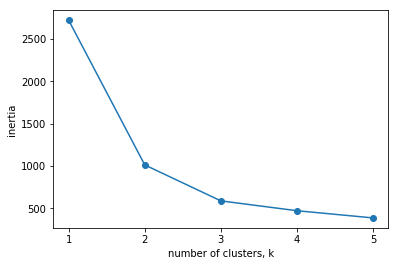

In [62]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show();

The inertia decreases very slowly from 3 clusters to 4, so it looks like 3 clusters would be a good choice for this data.

## Evaluating the grain clustering

In the previous exercise, you observed from the inertia plot that 3 is a good number of clusters for the grain data. In fact, the grain samples come from a mix of 3 different grain varieties: "Kama", "Rosa" and "Canadian". In this exercise, cluster the grain samples into three clusters, and compare the clusters to the grain varieties using a **cross-tabulation**.

You have the array `samples` of grain samples, and a list `varieties` giving the grain variety for each sample. Pandas (pd) and KMeans have already been imported for you.

In [63]:
varieties = ['Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat']


In [64]:
varieties[:10]

['Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat']

In [67]:
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
# Using .fit_predict() is the same as using .fit() followed by .predict().
labels = model.fit_predict(samples)
labels[:10]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [68]:
# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})
df.head()

,labels,varieties
0,2,Kama wheat
1,2,Kama wheat
2,2,Kama wheat
3,2,Kama wheat
4,2,Kama wheat


In [69]:
# Create crosstab: ct to count the number of times each grain variety coincides with each cluster label
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
ct

varieties,Canadian wheat,Kama wheat,Rosa wheat
labels,,,
0,0,1,60
1,68,9,0
2,2,60,10


The cross-tabulation shows that the 3 varieties of grain separate really well into 3 clusters. But depending on the type of data you are working with, the clustering may not always be this good. Is there anything you can do in such situations to improve your clustering?

## Scaling fish data for clustering

You are given an array `samples` giving measurements of fish. Each row represents an individual fish. The measurements, such as weight in grams, length in centimeters, and the percentage ratio of height to length, have very **different scales**. In order to cluster this data effectively, you'll need to **standardize these features** first. In this exercise, you'll build a pipeline to standardize and cluster the data.

These fish measurement data were sourced from the [Journal of Statistics Education](http://jse.amstat.org/jse_data_archive.htm).

In [70]:
samples = np.array([[242.0, 23.2, 25.4, 30.0, 38.4, 13.4],
 [290.0, 24.0, 26.3, 31.2, 40.0, 13.8],
 [340.0, 23.9, 26.5, 31.1, 39.8, 15.1],
 [363.0, 26.3, 29.0, 33.5, 38.0, 13.3],
 [430.0, 26.5, 29.0, 34.0, 36.6, 15.1],
 [450.0, 26.8, 29.7, 34.7, 39.2, 14.2],
 [500.0, 26.8, 29.7, 34.5, 41.1, 15.3],
 [390.0, 27.6, 30.0, 35.0, 36.2, 13.4],
 [450.0, 27.6, 30.0, 35.1, 39.9, 13.8],
 [500.0, 28.5, 30.7, 36.2, 39.3, 13.7],
 [475.0, 28.4, 31.0, 36.2, 39.4, 14.1],
 [500.0, 28.7, 31.0, 36.2, 39.7, 13.3],
 [500.0, 29.1, 31.5, 36.4, 37.8, 12.0],
 [600.0, 29.4, 32.0, 37.2, 40.2, 13.9],
 [600.0, 29.4, 32.0, 37.2, 41.5, 15.0],
 [700.0, 30.4, 33.0, 38.3, 38.8, 13.8],
 [700.0, 30.4, 33.0, 38.5, 38.8, 13.5],
 [610.0, 30.9, 33.5, 38.6, 40.5, 13.3],
 [650.0, 31.0, 33.5, 38.7, 37.4, 14.8],
 [575.0, 31.3, 34.0, 39.5, 38.3, 14.1],
 [685.0, 31.4, 34.0, 39.2, 40.8, 13.7],
 [620.0, 31.5, 34.5, 39.7, 39.1, 13.3],
 [680.0, 31.8, 35.0, 40.6, 38.1, 15.1],
 [700.0, 31.9, 35.0, 40.5, 40.1, 13.8],
 [725.0, 31.8, 35.0, 40.9, 40.0, 14.8],
 [720.0, 32.0, 35.0, 40.6, 40.3, 15.0],
 [714.0, 32.7, 36.0, 41.5, 39.8, 14.1],
 [850.0, 32.8, 36.0, 41.6, 40.6, 14.9],
 [1000.0, 33.5, 37.0, 42.6, 44.5, 15.5],
 [920.0, 35.0, 38.5, 44.1, 40.9, 14.3],
 [955.0, 35.0, 38.5, 44.0, 41.1, 14.3],
 [925.0, 36.2, 39.5, 45.3, 41.4, 14.9],
 [975.0, 37.4, 41.0, 45.9, 40.6, 14.7],
 [950.0, 38.0, 41.0, 46.5, 37.9, 13.7],
 [40.0, 12.9, 14.1, 16.2, 25.6, 14.0],
 [69.0, 16.5, 18.2, 20.3, 26.1, 13.9],
 [78.0, 17.5, 18.8, 21.2, 26.3, 13.7],
 [87.0, 18.2, 19.8, 22.2, 25.3, 14.3],
 [120.0, 18.6, 20.0, 22.2, 28.0, 16.1],
 [0.0, 19.0, 20.5, 22.8, 28.4, 14.7],
 [110.0, 19.1, 20.8, 23.1, 26.7, 14.7],
 [120.0, 19.4, 21.0, 23.7, 25.8, 13.9],
 [150.0, 20.4, 22.0, 24.7, 23.5, 15.2],
 [145.0, 20.5, 22.0, 24.3, 27.3, 14.6],
 [160.0, 20.5, 22.5, 25.3, 27.8, 15.1],
 [140.0, 21.0, 22.5, 25.0, 26.2, 13.3],
 [160.0, 21.1, 22.5, 25.0, 25.6, 15.2],
 [169.0, 22.0, 24.0, 27.2, 27.7, 14.1],
 [161.0, 22.0, 23.4, 26.7, 25.9, 13.6],
 [200.0, 22.1, 23.5, 26.8, 27.6, 15.4],
 [180.0, 23.6, 25.2, 27.9, 25.4, 14.0],
 [290.0, 24.0, 26.0, 29.2, 30.4, 15.4],
 [272.0, 25.0, 27.0, 30.6, 28.0, 15.6],
 [390.0, 29.5, 31.7, 35.0, 27.1, 15.3],
 [6.7, 9.3, 9.8, 10.8, 16.1, 9.7],
 [7.5, 10.0, 10.5, 11.6, 17.0, 10.0],
 [7.0, 10.1, 10.6, 11.6, 14.9, 9.9],
 [9.7, 10.4, 11.0, 12.0, 18.3, 11.5],
 [9.8, 10.7, 11.2, 12.4, 16.8, 10.3],
 [8.7, 10.8, 11.3, 12.6, 15.7, 10.2],
 [10.0, 11.3, 11.8, 13.1, 16.9, 9.8],
 [9.9, 11.3, 11.8, 13.1, 16.9, 8.9],
 [9.8, 11.4, 12.0, 13.2, 16.7, 8.7],
 [12.2, 11.5, 12.2, 13.4, 15.6, 10.4],
 [13.4, 11.7, 12.4, 13.5, 18.0, 9.4],
 [12.2, 12.1, 13.0, 13.8, 16.5, 9.1],
 [19.7, 13.2, 14.3, 15.2, 18.9, 13.6],
 [19.9, 13.8, 15.0, 16.2, 18.1, 11.6],
 [200.0, 30.0, 32.3, 34.8, 16.0, 9.7],
 [300.0, 31.7, 34.0, 37.8, 15.1, 11.0],
 [300.0, 32.7, 35.0, 38.8, 15.3, 11.3],
 [300.0, 34.8, 37.3, 39.8, 15.8, 10.1],
 [430.0, 35.5, 38.0, 40.5, 18.0, 11.3],
 [345.0, 36.0, 38.5, 41.0, 15.6, 9.7],
 [456.0, 40.0, 42.5, 45.5, 16.0, 9.5],
 [510.0, 40.0, 42.5, 45.5, 15.0, 9.8],
 [540.0, 40.1, 43.0, 45.8, 17.0, 11.2],
 [500.0, 42.0, 45.0, 48.0, 14.5, 10.2],
 [567.0, 43.2, 46.0, 48.7, 16.0, 10.0],
 [770.0, 44.8, 48.0, 51.2, 15.0, 10.5],
 [950.0, 48.3, 51.7, 55.1, 16.2, 11.2],
 [1250.0, 52.0, 56.0, 59.7, 17.9, 11.7],
 [1600.0, 56.0, 60.0, 64.0, 15.0, 9.6],
 [1550.0, 56.0, 60.0, 64.0, 15.0, 9.6],
 [1650.0, 59.0, 63.4, 68.0, 15.9, 11.0]])

In [71]:
samples[:10]

array([[242. ,  23.2,  25.4,  30. ,  38.4,  13.4],
       [290. ,  24. ,  26.3,  31.2,  40. ,  13.8],
       [340. ,  23.9,  26.5,  31.1,  39.8,  15.1],
       [363. ,  26.3,  29. ,  33.5,  38. ,  13.3],
       [430. ,  26.5,  29. ,  34. ,  36.6,  15.1],
       [450. ,  26.8,  29.7,  34.7,  39.2,  14.2],
       [500. ,  26.8,  29.7,  34.5,  41.1,  15.3],
       [390. ,  27.6,  30. ,  35. ,  36.2,  13.4],
       [450. ,  27.6,  30. ,  35.1,  39.9,  13.8],
       [500. ,  28.5,  30.7,  36.2,  39.3,  13.7]])

In [72]:
# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=4)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, kmeans)

## Clustering the fish data

You'll now use your standardization and clustering pipeline from the previous exercise to cluster the fish by their measurements, and then create a **cross-tabulation** to compare the cluster labels with the fish species.

As before, samples is the 2D array of fish measurements. Your pipeline is available as `pipeline`, and the species of every fish sample is given by the list `species`.

In [73]:
species = ['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Pike', 'Pike', 'Pike', 'Pike', 'Pike', 'Pike', 'Pike', 'Pike', 'Pike', 'Pike', 'Pike', 'Pike', 'Pike', 'Pike', 'Pike', 'Pike', 'Pike']
species[:10]

['Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream']

In [74]:
# Import pandas
import pandas as pd

# Fit the pipeline to samples
pipeline.fit(samples)

# Calculate the cluster labels: labels
labels = pipeline.predict(samples)

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels':labels, 'species':species})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['species'])

# Display ct
print(ct)

species  Bream  Pike  Roach  Smelt
labels                            
0           33     0      1      0
1            0    17      0      0
2            0     0      0     13
3            1     0     19      1


## Clustering stocks using KMeans

In this exercise, you'll cluster companies using their **daily stock price movements** (i.e. the dollar difference between the closing and opening prices for each trading day). You are given a NumPy array `movements` of daily price movements from 2010 to 2015 (obtained from Yahoo! Finance), where each row corresponds to a company, and each column corresponds to a trading day.

Some stocks are more expensive than others. To account for this, include a `Normalizer` at the beginning of your pipeline. The `Normalizer` will separately transform each company's stock price to a relative scale before the clustering begins.

Note that `Normalizer()` is different to `StandardScaler()`, which you used in the previous exercise. While `StandardScaler()` **standardizes features** (such as the features of the fish data from the previous exercise) by removing the mean and scaling to unit variance, `Normalizer()` **rescales each sample** - here, each company's stock price - independently of the other.

KMeans and make_pipeline have already been imported for you.

In [75]:
movements = np.array([[0.5799999999999841,
  -0.22000499999998624,
  -3.4099980000000016,
  -1.1699999999999875,
  1.680010999999979,
  -2.6899940000000413,
  -1.4699939999999856,
  2.7799970000000087,
  -0.6800029999999708,
  -4.999995000000013,
  6.709992999999997,
  -3.18000600000002,
  -4.009997999999996,
  -9.030006000000013,
  0.5599999999999739,
  -0.010000000000019328,
  1.0300100000000043,
  -5.640008999999992,
  -9.019993,
  2.3600010000000107,
  -0.05000100000000885,
  4.060000000000001,
  -4.680000000000007,
  2.8299979999999887,
  -1.5700090000000273,
  -0.22999199999998154,
  -0.7699899999999786,
  3.7899930000000097,
  2.269997999999987,
  1.459993999999995,
  -1.6399979999999914,
  1.3000030000000038,
  -0.19000500000001352,
  -1.9200040000000056,
  -2.9399999999999977,
  2.4300020000000018,
  4.619998999999979,
  2.2399979999999857,
  3.240007999999989,
  -1.0799980000000176,
  0.3899959999999965,
  1.4300059999999633,
  4.009998999999965,
  -0.930008000000015,
  4.710001000000034,
  1.009997000000027,
  1.5900100000000066,
  -0.7700040000000001,
  -1.5400089999999975,
  0.2699930000000279,
  -0.7799910000000239,
  0.5500000000000114,
  -2.5400049999999794,
  4.28000499999996,
  2.719982000000016,
  1.7299999999999898,
  -4.270004,
  1.9500050000000044,
  -0.6099999999999852,
  -0.7500039999999899,
  -0.4899979999999857,
  -1.440006000000011,
  3.5099869999999957,
  1.3400040000000215,
  1.0500109999999836,
  -0.4899970000000167,
  0.3599810000000048,
  0.09001599999996301,
  0.5700000000000216,
  0.4099959999999783,
  3.1400189999999952,
  -1.1699859999999944,
  0.040000999999961095,
  -3.9499969999999958,
  0.4200099999999338,
  8.229988000000048,
  2.8399850000000133,
  -2.380000999999993,
  -5.230000000000018,
  -1.6499979999999823,
  5.619994999999959,
  -8.220000999999968,
  2.5099910000000136,
  -4.210002999999971,
  2.9599879999999814,
  -7.580013000000008,
  -7.8500069999999775,
  3.7400049999999685,
  4.680001000000061,
  2.8499990000000253,
  -4.859978000000012,
  -1.340003999999993,
  -0.4800109999999904,
  -4.619999000000006,
  -1.1600000000000248,
  -4.120013999999942,
  9.50000399999999,
  -0.5200120000000084,
  5.870013999999969,
  -5.970015999999987,
  2.7499960000000097,
  -2.5099910000000136,
  1.1399999999999864,
  -0.5900000000000318,
  -2.0600209999999493,
  -2.2499840000000115,
  -7.3499950000000345,
  -3.909996000000007,
  -8.269988999999953,
  5.670010000000019,
  5.27998800000006,
  -1.680011999999948,
  4.049999000000014,
  6.1499939999999915,
  1.2699890000000664,
  1.8200149999999555,
  -7.519985000000019,
  1.6899990000000005,
  -3.610014999999976,
  -2.000018999999952,
  -3.360023999999953,
  1.3699910000000273,
  -7.950008000000025,
  -5.179985000000016,
  -5.819999000000024,
  -3.550013999999948,
  -2.3700139999999976,
  8.180001000000033,
  -4.3900070000000255,
  2.729995000000031,
  -1.2400020000000043,
  -4.5199969999999885,
  3.350009999999969,
  3.2199940000000136,
  -3.2799950000000138,
  -4.299992000000003,
  8.990005999999994,
  -10.849995000000007,
  1.3400039999999651,
  2.8499990000000253,
  -0.7199899999999957,
  3.2100059999999644,
  -2.7099959999999896,
  -2.600006000000008,
  1.3600040000000035,
  1.4099919999999884,
  0.9199939999999742,
  0.14000299999997878,
  -0.02998799999994617,
  0.3100210000000061,
  0.2699930000000563,
  -0.4400100000000293,
  -5.209998999999981,
  5.100009999999969,
  -2.5500179999999943,
  0.06000099999999975,
  1.890004000000005,
  0.7100030000000004,
  -2.9599880000000383,
  0.2499920000000202,
  -5.9900169999999955,
  -2.739983000000024,
  4.849991000000017,
  -5.1699979999999925,
  -0.12998900000002322,
  1.7399859999999876,
  1.2500149999999906,
  2.860012000000012,
  0.9099809999999876,
  3.680004000000025,
  1.1700139999999235,
  3.1400189999999952,
  -1.9700050000000149,
  0.22000500000001466,
  1.2200010000000248,
  1.8500030000000152,
  2.0499800000000046,
  6.329997999999988,
  -2.319999999999993,
  7.150016999999992,
  -0.09001499999999396,
  5.040008999999999,
  2.589993000000049,
  0.21997799999996914,
  -2.82001200000002,
  -4.909991999999988,
  0.14000300000003565,
  -5.25,
  -3.629989999999964,
  -2.960014000000001,
  6.939999,
  -0.39998299999996334,
  -1.1199989999999502,
  2.3599999999999572,
  0.620014000000026,
  3.13000500000004,
  -0.060001000000056585,
  0.619987999999978,
  7.300006999999938,
  -0.4700239999999667,
  6.089991999999938,
  1.5299949999999851,
  -2.8399850000000133,
  -1.6000099999999975,
  -0.2500190000000089,
  1.1800009999999477,
  0.18000399999999672,
  -2.7100220000000377,
  -3.2500069999999823,
  1.9599920000000568,
  2.3600000000000136,
  1.4299929999999677,
  2.8200110000000222,
  -0.8599930000000313,
  1.4200060000000008,
  -4.9699939999999865,
  1.3899920000000066,
  1.6499979999999823,
  -7.970009000000005,
  -1.4200060000000008,
  -4.130000999999994,
  -0.7000159999999482,
  3.2300070000000005,
  -1.2400020000000043,
  6.6799930000000245,
  -1.7199860000000626,
  2.799984000000052,
  1.260001999999986,
  1.3699920000000247,
  -2.389988000000073,
  1.1300119999999652,
  0.6200139999999692,
  0.4299959999999601,
  1.5099950000000035,
  -5.589981000000024,
  1.379978000000051,
  -2.369987999999978,
  0.909981000000016,
  -2.6999810000000366,
  -1.4400060000000394,
  0.3599810000000616,
  0.16000300000001744,
  -1.0199969999999894,
  0.6100000000000136,
  1.2000009999999859,
  0.7999910000000341,
  -1.3999790000000305,
  1.830001999999979,
  -0.4399829999999838,
  -0.929980999999998,
  -1.819989000000021,
  -0.3899950000000558,
  3.9299970000000144,
  -1.14998700000001,
  4.450008999999966,
  -0.9900090000000432,
  2.1300090000000296,
  3.620002999999997,
  -3.2399939999999674,
  1.1700139999999806,
  0.5200120000000084,
  2.589992999999936,
  11.130000999999993,
  -9.509990000000016,
  -3.74999200000002,
  -7.0499880000000426,
  10.58000199999998,
  5.069996000000003,
  0.8900069999999687,
  -0.5699999999999932,
  -8.069984999999974,
  3.5200009999999797,
  3.7300180000000296,
  -0.12998900000002322,
  -0.3599819999999454,
  2.860011999999984,
  3.989997999999957,
  1.5200080000000185,
  2.9700010000000248,
  -2.8499989999999684,
  2.1000209999999697,
  2.389987000000019,
  0.710002999999972,
  2.3299860000000194,
  1.0500109999999836,
  -8.14998600000007,
  -3.540000999999961,
  3.8499939999999815,
  -1.1400000000000432,
  2.9000130000000013,
  1.9700049999999576,
  -6.160006999999951,
  2.1599959999999783,
  2.370013999999969,
  -0.07001499999995531,
  -6.040004999999951,
  0.8500060000000076,
  -2.2199970000000353,
  -2.450015999999948,
  6.659991999999987,
  0.3800079999999753,
  3.329983000000027,
  -11.989993999999967,
  -2.1900100000000293,
  -6.4600149999999426,
  3.309982000000048,
  -1.3599779999999555,
  -0.0899890000000596,
  3.1200179999999587,
  3.4700129999999945,
  -2.7099949999999358,
  3.2999949999999667,
  -2.009979000000044,
  2.1500090000000114,
  -6.550003000000004,
  -3.1199909999999704,
  1.8999900000000596,
  -3.1800199999999563,
  -0.020001000000036132,
  -4.860005000000001,
  -3.2600209999999947,
  1.910004000000015,
  1.1099859999999353,
  -2.380000999999993,
  -5.8400009999999725,
  5.750010999999972,
  4.760002000000043,
  -1.099997999999971,
  -4.300018999999963,
  2.669993999999974,
  -3.1999930000000063,
  -2.090008000000012,
  0.5599860000000376,
  3.349983999999949,
  -3.4599989999999248,
  0.21001800000004775,
  1.3100169999999594,
  -1.6499979999999823,
  -3.030001999999968,
  -0.2600060000000326,
  0.5600129999999695,
  -1.7900010000000748,
  0.44999699999993936,
  -5.160010999999997,
  -5.9000010000000325,
  4.140013999999951,
  3.3999979999999823,
  -1.5499960000000217,
  -4.339991999999995,
  4.429980999999998,
  -3.3099830000000448,
  3.349983000000009,
  -0.9700090000000046,
  2.6099929999999745,
  6.729980000000013,
  -3.359996000000024,
  -0.4000090000000114,
  0.2600060000000326,
  -7.660014999999987,
  -6.130020999999998,
  0.4599839999999631,
  -1.7600140000000124,
  -4.649986000000013,
  -0.6000140000000442,
  2.44000299999999,
  -3.0000149999999617,
  -1.7400129999999765,
  -8.730025999999953,
  -2.0399939999999788,
  8.61998299999999,
  -2.549991000000034,
  12.290000999999961,
  -5.019981000000031,
  4.449980999999981,
  1.6099970000000212,
  -1.9999919999999636,
  0.9700090000000046,
  7.309994000000018,
  6.430000000000009,
  2.8099980000000078,
  2.530017999999984,
  6.369999000000008,
  -2.3400010000000293,
  0.22000500000001466,
  -0.3099929999999631,
  -3.2399939999999674,
  3.7499919999999634,
  8.370017999999959,
  -1.1500130000000013,
  -9.219997000000037,
  0.34000700000001416,
  4.9800070000000005,
  8.14998700000001,
  3.410010999999997,
  -7.999996000000009,
  0.200004999999976,
  2.8399850000000133,
  -1.0300100000000043,
  -8.740013000000031,
  1.5899970000000394,
  -12.040008,
  -6.819995000000006,
  -8.479980000000069,
  12.710010000000011,
  -7.459984000000019,
  3.180019000000016,
  -1.0799979999999891,
  3.780007000000012,
  -1.039997000000028,
  -1.8700029999999968,
  -4.789988999999991,
  -6.1400070000000255,
  -8.070010999999965,
  13.300010999999984,
  2.7100220000000377,
  8.640011000000014,
  12.410002999999962,
  1.7900009999999609,
  1.7399859999999876,
  -5.739998000000013,
  -4.789989000000047,
  -0.6900019999999927,
  12.37000299999994,
  -1.6300239999999349,
  1.7400129999999765,
  -6.450001000000043,
  6.939999,
  2.4800030000000106,
  2.2799989999999752,
  1.5299949999999851,
  4.960007000000019,
  14.630000999999993,
  -1.8000139999999758,
  -7.499985000000037,
  0.790004999999951,
  4.019985000000021,
  3.31000899999998,
  -9.469989999999939,
  -3.179992000000027,
  -11.349980000000016,
  -5.799999000000013,
  -5.769985000000019,
  -2.069979999999987,
  10.389984000000027,
  4.039985999999999,
  -5.980003999999951,
  9.719982000000016,
  7.719988999999997,
  -5.149998000000039,
  3.4499860000000813,
  5.169998000000022,
  -1.75,
  0.4800110000000473,
  -2.7299959999999714,
  -4.689987000000031,
  -5.229999000000022,
  9.590018999999984,
  -7.259978999999987,
  -1.1600000000000248,
  -2.8699989999999502,
  1.949978000000044,
  2.3600010000000107,
  -0.8999939999999924,
  -2.680007999999986,
  4.0000120000000265,
  -1.7900009999999609,
  -0.18000400000005354,
  4.019985000000021,
  -1.6899989999999434,
  -11.809990000000086,
  -1.990005999999994,
  -4.259991000000014,
  8.029983000000017,
  -4.4799959999999714,
  -6.570002999999929,
  -3.9799839999999445,
  -1.3900179999999978,
  5.490006000000052,
  -7.519985000000019,
  -4.849989999999991,
  3.770019000000048,
  -2.640007000000025,
  0.9099800000000188,
  5.390002999999979,
  -0.12998900000002322,
  -0.4799839999999449,
  -1.5600089999999796,
  -0.8399930000000495,
  -0.7900050000000078,
  0.7700040000000286,
  0.1600029999999606,
  -4.190001999999994,
  -6.510001999999987,
  -4.390006999999969,
  0.6599880000000553,
  -0.2600060000000326,
  8.189986999999974,
  -0.2399790000000053,
  1.5499950000000242,
  3.6400040000000335,
  3.4300120000000334,
  -4.250003999999991,
  1.7200129999999945,
  1.4899939999999674,
  1.830002000000036,
  3.4399990000000567,
  3.079990000000066,
  2.6299939999999538,
  -3.769992000000002,
  -2.669993999999974,
  -0.1300160000000119,
  -0.8900070000000255,
  0.11001600000003008,
  0.5000120000000265,
  2.1500089999999545,
  -2.4000009999999747,
  -7.1899910000000204,
  4.740001999999947,
  -4.6900139999999615,
  -7.779991000000052,
  -3.7300179999999727,
  2.9400139999999624,
  7.300006999999994,
  0.8900069999999118,
  -2.2200240000000235,
  -0.7799909999999954,
  2.3799740000000043,
  5.58998100000008,
  3.5800009999999816,
  6.180008000000044,
  12.410004000000017,
  2.45997600000004,
  3.0700299999999743,
  4.800003000000004,
  -16.59001999999998,
  10.70999100000006,
  -0.9899829999999952,
  7.970008000000008,
  -0.04000100000007478,
  1.309989999999971,
  2.7399829999998246,
  4.450034999999957,
  7.449997000000052,
  0.8800200000000586,
  -3.7000049999999187,
  0.9399950000000672,
  -12.25998600000014,
  6.5999910000000455,
  -6.109993000000144,
  7.299979999999891,
  0.9600219999999808,
  3.0199890000000096,
  10.559974000000011,
  11.529983000000017,
  -14.049986999999875,
  0.8500059999998939,
  2.7299960000000283,
  6.449973999999997,
  -0.24000500000011016,
  1.5600350000000844,
  -4.439993999999956,
  7.189963999999918,
  8.300003000000059,
  -0.7599640000000818,
  -2.92001300000004,
  -9.219969999999877,
  16.800011000000037,
  2.019965999999954,
  -0.040000999999961095,
  6.699966000000018,
  10.099991000000044,
  -11.48998199999994,
  -9.999961999999982,
  -2.230011000000104,
  -18.880004999999983,
  -29.92997800000001,
  30.760008999999968,
  -5.379989000000024,
  -12.779999000000089,
  -18.399993999999992,
  1.0899580000000242,
  -2.32998699999996,
  -5.639968999999951,
  -6.569977000000107,
  -2.069953999999939,
  -13.820023000000106,
  -2.7699959999999915,
  5.739996999999902,
  -8.679984999999986,
  -11.830016999999998,
  7.979995000000031,
  -1.3999790000000305,
  5.480017999999973,
  -4.060012999999913,
  1.7099990000000391,
  -4.350005999999893,
  -8.280029000000013,
  -7.9700090000001165,
  -15.189988000000087,
  -3.5800010000000384,
  26.77999900000009,
  -12.579994000000054,
  13.059951999999953,
  -10.549987999999985,
  -2.3000260000000026,
  1.369965000000093,
  9.970001000000137,
  -3.0100019999998717,
  -8.170012999999926,
  2.78997000000004,
  1.5600359999999682,
  3.690018000000009,
  -5.570007999999916,
  8.719985999999949,
  -16.55001900000002,
  1.7000120000000152,
  -2.3600010000000107,
  0.2899939999999788,
  3.1300050000000965,
  14.819992000000068,
  4.010024999999929,
  -2.470016000000101,
  -7.7700040000000845,
  3.059989000000087,
  -6.529974999999922,
  0.7000429999999369,
  -0.5000380000001314,
  -2.6200330000000354,
  6.0000300000001525,
  7.7899779999999055,
  4.5299839999998985,
  9.37997500000006,
  -1.210014000000001,
  8.589997000000041,
  -9.759956000000102,
  -1.6899710000000143,
  -1.3400040000000215,
  2.0200190000000475,
  1.7900010000000748,
  -3.8500209999999697,
  -0.32999500000005355,
  3.040016000000037,
  -8.729972999999973,
  9.430015999999911,
  -6.460014999999999,
  0.5100250000000415,
  -4.880004999999984,
  10.149978000000033,
  4.1100009999998965,
  7.52999900000009,
  -9.10002099999997,
  4.949966999999901,
  2.0700070000000323,
  5.259987000000023,
  -1.8599619999998824,
  0.4700239999999667,
  2.8800119999999647,
  2.9899749999999585,
  6.609978000000068,
  -0.17997800000000552,
  -0.4700240000000804,
  5.1299980000000005,
  8.109985999999935,
  15.1400000000001,
  -14.76001800000006,
  14.449996999999941,
  -3.4799719999999748,
  3.709991000000058,
  -4.310006000000044,
  -0.17997699999989436,
  -1.7800139999999374,
  -6.7700349999998926,
  -2.009979999999928,
  9.209984000000077,
  -5.33998900000006,
  3.099990999999932,
  2.3899619999999686,
  -17.710045000000036,
  -4.519996999999876,
  2.9400400000000677,
  5.6100079999999934,
  1.3200299999999745,
  0.4300239999998894,
  2.030006999999955,
  1.8400419999999256,
  -0.4599839999999631,
  -2.3199990000000525,
  3.9300230000001193,
  -14.7200160000001,
  -3.5600279999999884,
  17.029976000000033,
  -11.64998700000001,
  -11.769988999999896,
  -0.5000380000000177,
  6.589950999999927,
  -4.450035000000072,
  -12.610008999999993,
  -8.709999999999923,
  -2.800010000000043,
  1.1700129999999265,
  -18.399993999999992,
  0.15001699999993434,
  2.4099879999999985,
  14.419983000000002,
  -4.260016999999948,
  -6.950012000000014,
  -21.209991999999946,
  21.610000999999894,
  -17.640030000000134,
  -4.610039000000029,
  -10.459998999999923,
  -5.430030999999985,
  0.4400100000000293,
  -1.6799850000001015,
  -19.08999600000004,
  1.0999990000000253,
  -7.380035000000022,
  -15.839988000000062,
  -22.879989000000137,
  6.63999200000012,
  -11.319991999999955,
  3.989997999999901,
  -8.620010000000093,
  -11.910018999999918,
  2.4800030000000106,
  25.020011999999948,
  -11.000038000000133,
  -2.549964999999929,
  4.330032000000074,
  13.63000499999987,
  -4.76998900000001,
  5.670037000000093,
  -0.8600459999998975,
  -1.5099950000000035,
  -7.459983999999963,
  -5.950042000000052,
  -30.119995000000014,
  18.299965000000046,
  -20.14999399999988,
  4.819976999999994,
  1.6200110000000905,
  -8.769974000000047,
  -1.4600070000000187,
  -4.9600059999999635,
  9.899986000000013,
  8.900017000000046,
  -5.16001099999994,
  -8.269988999999896,
  6.860022999999956,
  -0.1800309999999854,
  -6.0000310000000345,
  1.5200350000000071,
  -0.7000430000000506,
  21.640015000000005,
  -4.790015999999923,
  -5.779998999999975,
  -9.970002000000024,
  1.900017000000048,
  -3.899955999999975,
  -5.400017000000048,
  -5.040008999999942,
  -0.6999890000000732,
  -0.9300080000000436,
  -12.379990000000019,
  11.449981999999919,
  -7.629975000000003,
  1.4800340000000458,
  0.2099910000000591,
  5.200011999999958,
  -9.500031000000037,
  -11.810016999999961,
  12.000007999999927,
  -0.23001900000002706,
  -0.16999000000004116,
  -1.4900209999999563,
  -5.490005999999937,
  -11.589984000000017,
  13.790008999999998,
  0.8800199999999451,
  4.9699939999999865,
  0.9799950000000308,
  3.4300380000000814,
  -11.609985000000053,
  -0.20000400000003535,
  2.070007999999973,
  -8.689971999999955,
  -1.1099849999999378,
  -8.839989000000061,
  0.06000099999999975,
  1.5599830000000452,
  -11.050026000000004,
  5.149997999999981,
  -3.860035000000096,
  -2.6499939999999924,
  -7.529998000000035,
  -7.750003999999991,
  9.659980999999961,
  -8.850002000000075,
  6.080005999999969,
  1.9199899999999277,
  8.119999000000009,
  -7.170016999999973,
  -0.10000199999996084,
  -0.3300209999999879,
  5.73001099999999,
  14.27001899999999,
  -5.01004800000004,
  -5.339988000000004,
  2.5099639999999686,
  7.329994000000057,
  -1.109986000000049,
  -4.300017999999966,
  -4.380020000000002,
  -7.160003999999957,
  -12.989990000000036,
  2.1900099999999725,
  0.6199869999999805,
  -6.040004999999951,
  -1.3000030000000606,
  1.3600040000000035,
  0.6199880000000348,
  7.590000999999972,
  0.6100000000000136,
  -4.349979000000019,
  -7.1499900000000585,
  4.670012999999983,
  -17.46998599999995,
  -12.940001999999993,
  2.5600050000000465,
  6.030017999999983,
  2.1399959999999965,
  11.919979000000012,
  -2.8499990000000253,
  7.389994999999999,
  9.669994000000033,
  7.679988999999978,
  -5.169998000000078,
  3.7400059999999935,
  -1.3299630000000209,
  5.000007999999981,
  -6.309996999999952,
  4.80000299999989,
  -3.0400159999999796,
  -5.0000069999999255,
  3.2300339999999887,
  -9.990002000000004,
  -10.310009000000091,
  11.340018999999984,
  -5.7899850000000574,
  11.020012000000007,
  1.509994000000006,
  -2.7000079999999684,
  6.189994000000071,
  4.299992000000032,
  -8.460007000000019,
  4.949993000000006,
  5.929988999999978,
  -2.769997000000103,
  -0.009986999999966885,
  -3.9099959999999774,
  -0.5400120000000471,
  -7.010014000000013,
  5.310001000000001,
  -5.839999999999975,
  1.8599889999999848,
  -7.309993000000019,
  3.459998999999982,
  -5.350001999999961,
  0.5600129999999695,
  0.20999099999988854,
  -8.400005000000078,
  -2.4600029999999715,
  -4.989994000000023,
  -4.860004000000004,
  -3.0700030000000424,
  -5.830012999999951,
  -5.470005000000015,
  5.169998000000022,
  6.530002999999965,
  8.529993999999986,
  -0.06000099999999975,
  -2.9700020000000222,
  -5.059981999999991,
  8.75,
  1.130012000000022,
  4.339991999999995,
  -1.1400000000000432,
  2.4300149999999694,
  3.6800039999999967,
  0.6100009999999543,
  -1.6200110000000336,
  -8.150013000000001,
  -3.1500049999999646,
  -7.010014000000013,
  1.5800089999999614,
  -2.19999699999994,
  5.6900099999999725,
  6.990013999999974,
  3.3600240000000094,
  -2.4600289999999627,
  0.9300080000000436,
  4.529984000000127,
  4.760001999999986,
  -2.7699960000000488,
  1.1800000000000068,
  -2.8499990000000253,
  -4.190002999999933,
  10.5,
  18.62995899999998,
  0.619987999999978,
  1.4899679999999762,
  2.1800229999999488,
  3.4000240000000304,
  -8.63998399999997,
  -1.2299879999999916,
  -2.020019999999988,
  -2.249984999999981,
  2.2200239999999667,
  -9.41004200000009,
  4.89997900000003,
  0.049987999999984815,
  -4.779976000000033,
  -4.5199969999999325,
  -0.8699799999999982,
  -4.9800339999999315,
  -0.21997900000002346,
  1.1699599999999464,
  -11.55999799999995,
  0.6999889999999596,
  4.190002999999933,
  -4.4399949999999535,
  -10.879981999999929,
  7.3600079999999934,
  1.5000079999999798,
  1.5999830000000088,
  -10.589988000000004,
  -5.4599909999998895,
  -5.779999000000032,
  -7.6699760000000765,
  0.21997900000002346,
  -1.0299830000000156,
  -0.5000380000000746,
  9.510018000000061,
  3.9299700000000257,
  -7.100029000000006,
  -0.8299789999999803,
  1.1900400000000104,
  -9.000045,
  1.9500049999999758,
  -1.6799849999999308,
  5.819999999999991,
  6.209969000000057,
  1.1699600000000032,
  0.32000799999997304,
  4.5199969999999885,
  2.8999870000000096,
  9.590019000000039,
  -6.540016000000037,
  5.959975999999982,
  6.910011000000054,
  -5.359961999999996,
  0.8400189999999839,
  -19.58998099999997],
 [-0.6400020000000026,
  -0.6500000000000021,
  -0.21000100000000188,
  -0.4200000000000017,
  0.7100010000000019,
  -0.20000100000000032,
  -1.130001,
  0.06999899999999926,
  -0.1199989999999964,
  -0.5,
  0.20000100000000032,
  -0.09999999999999787,
  -0.4600010000000019,
  -1.1900010000000023,
  -0.6499999999999986,
  -1.3000010000000015,
  0.4299999999999997,
  -1.6900000000000013,
  -0.3000010000000017,
  -0.41999999999999815,
  -0.0200010000000006,
  -0.09999799999999937,
  -0.9400010000000024,
  -0.08999999999999986,
  -0.25,
  0.7600000000000016,
  3.710001000000002,
  -0.20000100000000032,
  1.0,
  0.0,
  -0.6300010000000036,
  0.2999989999999997,
  -0.009999999999998009,
  1.5400010000000002,
  -1.4599989999999965,
  0.8299999999999983,
  0.06999899999999926,
  -0.9000000000000021,
  -2.1799979999999977,
  -0.8999989999999976,
  -0.2300020000000025,
  1.619999,
  1.1399989999999958,
  -0.3299999999999983,
  4.3800010000000045,
  2.3400000000000034,
  -2.5,
  -1.8699980000000025,
  -0.18999799999999567,
  -1.1799999999999995,
  -0.07000000000000027,
  -0.20000100000000745,
  0.0,
  -0.4300010000000043,
  -0.3700030000000041,
  0.1600000000000037,
  0.7999989999999997,
  -0.6200030000000041,
  -0.20000100000000032,
  -0.6700020000000038,
  0.18999799999999567,
  -0.139998999999996,
  0.630001,
  0.4199979999999925,
  3.169998999999997,
  -2.329997999999996,
  -0.0200010000000006,
  2.0900000000000034,
  -1.1599989999999991,
  -0.6499969999999919,
  0.0,
  -0.9099989999999992,
  0.34999799999999937,
  2.010002,
  -0.8699980000000025,
  2.509997999999996,
  0.6500010000000032,
  -0.31000200000000433,
  -4.810001000000001,
  0.9499969999999962,
  -0.2700000000000031,
  -1.5499989999999997,
  0.010002000000007172,
  -0.4500010000000003,
  0.7000010000000003,
  -1.0299989999999966,
  0.630001,
  -0.29000000000000625,
  2.2799979999999915,
  -2.419998,
  -0.8999969999999989,
  -0.25,
  -0.619999,
  -1.6700020000000038,
  0.10000200000000348,
  -1.489998,
  1.7099989999999965,
  -1.7200010000000034,
  1.4600030000000075,
  -1.0700000000000005,
  1.4500010000000003,
  -1.6100010000000042,
  -0.4900020000000041,
  0.75,
  0.010002000000000066,
  0.2999989999999997,
  -0.6799959999999956,
  0.24000099999999944,
  -0.27999899999999656,
  0.5599969999999956,
  0.3200040000000044,
  1.8699990000000002,
  0.6100009999999969,
  0.43999900000000025,
  -0.2700010000000006,
  0.13999999999999346,
  0.38999899999999604,
  -0.2999999999999972,
  -0.20999900000000335,
  -0.9300009999999972,
  0.030003000000000668,
  -0.8499989999999968,
  -1.0999989999999968,
  -0.0899999999999963,
  -0.5299989999999966,
  -0.990002000000004,
  0.0,
  1.5,
  -0.1600000000000037,
  0.4099999999999966,
  -0.15000100000000316,
  1.4300010000000043,
  -0.08000200000000746,
  -0.12999699999999592,
  -1.0500000000000045,
  -0.33000200000000746,
  1.5899999999999963,
  -1.359997,
  0.5400010000000037,
  0.31000100000000685,
  2.0300030000000007,
  0.3100019999999972,
  0.12999699999999592,
  -0.4199979999999925,
  0.1399990000000031,
  0.9400030000000044,
  -0.4599989999999962,
  0.15000100000000316,
  0.12000300000000408,
  0.4099999999999966,
  0.7200009999999963,
  -0.8399999999999963,
  -1.2799989999999966,
  0.01999599999999901,
  -0.5300030000000007,
  -0.3500020000000035,
  -0.17000200000000376,
  0.4600030000000004,
  -1.2900010000000035,
  -0.06000199999999721,
  -0.2299989999999994,
  -0.3699989999999929,
  -0.11999800000000248,
  0.17000200000000376,
  0.9700010000000034,
  -1.1500020000000006,
  0.0899999999999963,
  0.9700009999999964,
  0.3599969999999999,
  0.1800009999999972,
  -0.9000010000000032,
  0.7299999999999969,
  -0.6100009999999969,
  0.09999799999999937,
  -0.040000999999996616,
  -0.7099990000000034,
  0.040000999999996616,
  -0.4100000000000037,
  -0.220002000000008,
  0.9499959999999988,
  -0.049998999999992584,
  -0.8300020000000004,
  -0.4399979999999957,
  0.9299999999999996,
  0.2299989999999994,
  0.049999999999997165,
  0.20999899999999627,
  -0.8500030000000011,
  -0.13000100000000006,
  0.4699979999999968,
  0.4699979999999968,
  0.9300010000000044,
  -0.14000000000000054,
  0.1599999999999966,
  -0.11999899999999285,
  0.9199979999999924,
  0.7399979999999928,
  -0.7800020000000032,
  -0.8299979999999962,
  0.6299969999999959,
  -0.7900010000000037,
  0.2799990000000037,
  -0.5100020000000072,
  -0.3599969999999999,
  -0.8500030000000011,
  1.1899989999999931,
  -0.04000100000000373,
  -0.02000000000000313,
  0.05999699999999564,
  -0.0200010000000006,
  0.0200010000000006,
  1.3900000000000006,
  0.6800010000000043,
  2.420002000000004,
  -0.7799989999999966,
  -1.6799999999999995,
  0.17000200000000376,
  0.009997999999995956,
  -0.3799980000000005,
  0.4299959999999956,
  -0.3500020000000035,
  0.14000000000000054,
  0.3000030000000038,
  0.4300009999999972,
  -0.5,
  -0.7600030000000046,
  0.4899979999999928,
  0.0,
  0.4599989999999962,
  0.2999989999999997,
  0.5200010000000006,
  0.639998999999996,
  1.1699979999999923,
  0.09999799999999937,
  -0.02000000000000313,
  -1.5,
  5.339999999999995,
  1.4400030000000044,
  -0.7200020000000009,
  3.1899980000000028,
  -0.2600020000000001,
  0.6399990000000031,
  0.5800010000000029,
  0.8599969999999999,
  1.0999979999999994,
  0.009997999999995956,
  -1.5899959999999993,
  4.990002000000004,
  -2.529998999999997,
  -1.6399999999999937,
  0.5799979999999962,
  0.11999899999999995,
  -0.2900010000000037,
  -1.2100030000000075,
  4.490002000000004,
  -0.6099999999999994,
  -0.6899990000000003,
  -3.529999000000004,
  1.0700000000000005,
  -1.769995999999999,
  -0.7800020000000032,
  -2.9000020000000006,
  0.2899969999999996,
  -1.8999979999999963,
  -1.970002000000001,
  -1.2599979999999957,
  -1.0599969999999956,
  -0.9799989999999994,
  0.05000000000000426,
  -0.14999799999999652,
  -1.9400030000000044,
  -0.07000000000000027,
  0.3300010000000029,
  0.039996999999999616,
  -0.5099980000000031,
  -0.6599999999999966,
  1.7000000000000028,
  -0.1599999999999966,
  -0.8199989999999957,
  0.3999979999999965,
  0.6100009999999969,
  -0.4799999999999969,
  -0.4500010000000003,
  -0.2600020000000072,
  0.8399999999999963,
  -0.8400000000000034,
  -0.7900010000000037,
  -0.3100009999999997,
  0.5100020000000001,
  -1.7299989999999994,
  -1.4199989999999971,
  -0.6399990000000031,
  0.4699969999999993,
  -0.2700010000000006,
  -0.26000300000000465,
  -0.3900040000000047,
  -0.09000100000000089,
  -0.639998999999996,
  -0.4399980000000028,
  1.25,
  0.9700010000000034,
  0.8399999999999963,
  -1.4099999999999966,
  -0.2999989999999997,
  -1.2900010000000035,
  1.5499989999999997,
  -0.06999900000000281,
  -0.369999,
  -0.369999,
  0.00999899999999343,
  -0.05999699999999564,
  -0.32999799999999624,
  -0.3200000000000003,
  -0.6900030000000044,
  -0.20000100000000032,
  -1.2100030000000004,
  0.7799989999999966,
  -0.4099989999999991,
  -0.20000100000000032,
  -0.23999799999999286,
  -0.18999899999999315,
  -0.04999899999999968,
  -0.3699989999999929,
  -0.1599999999999966,
  -0.2700010000000006,
  -0.4199979999999925,
  -0.6000020000000035,
  -0.12000300000000408,
  -0.2999989999999997,
  -0.7300020000000025,
  0.3000010000000017,
  -0.30999699999999564,
  0.10999799999999738,
  -0.7299989999999994,
  -0.5399989999999981,
  0.029998999999996563,
  0.33000000000000185,
  -0.5999979999999994,
  -0.08999999999999986,
  -1.1799979999999977,
  0.03000100000000216,
  1.039998999999998,
  -0.17999999999999972,
  -0.9799999999999968,
  0.4400010000000023,
  -0.15000200000000066,
  -0.09000000000000341,
  -0.16000000000000014,
  -0.16000000000000014,
  -0.4799989999999994,
  -0.4700009999999999,
  0.010001000000002593,
  0.2600000000000016,
  0.04999899999999968,
  -0.4400010000000023,
  -0.32000200000000234,
  -0.08999999999999986,
  -0.1499990000000011,
  -0.37000000000000105,
  0.03000100000000216,
  0.05999999999999873,
  0.4099989999999991,
  0.8499979999999994,
  0.17000100000000273,
  -0.6000009999999989,
  -0.28000100000000216,
  0.08000200000000035,
  -0.3199989999999993,
  0.12000000000000098,
  0.6300010000000036,
  0.09999799999999937,
  0.24000000000000196,
  -0.1899979999999992,
  0.4099989999999991,
  -0.0999979999999958,
  0.08999999999999986,
  0.08000000000000185,
  0.7300000000000004,
  -0.5200010000000006,
  -0.1700000000000017,
  0.5199979999999975,
  0.12000100000000202,
  -0.5,
  -0.05000100000000174,
  -0.08000000000000185,
  -0.4299999999999997,
  -0.3900010000000016,
  -0.4600010000000019,
  0.1700000000000017,
  0.3299989999999973,
  0.5500010000000017,
  0.10999999999999943,
  -0.009997999999999507,
  0.5699989999999993,
  -0.16999999999999815,
  -0.1199979999999954,
  0.05000100000000174,
  -0.4899999999999984,
  -0.5,
  0.5,
  -1.4799989999999994,
  -0.91,
  -1.16,
  1.0100010000000026,
  -1.5200010000000006,
  1.039998999999998,
  -0.3600010000000005,
  1.130001,
  0.3199989999999993,
  0.21000100000000188,
  -1.3099990000000012,
  -0.16000000000000014,
  -1.0299989999999999,
  1.1000000000000014,
  0.6600000000000001,
  -1.0700000000000005,
  0.5599990000000012,
  1.34,
  0.049999999999997165,
  0.259999999999998,
  -0.41000000000000014,
  -0.5300010000000022,
  0.5899999999999999,
  1.629998999999998,
  -0.3200000000000003,
  -0.8099990000000012,
  0.7000010000000003,
  0.379998999999998,
  0.16000000000000014,
  0.2200009999999999,
  0.22000200000000447,
  -0.13000100000000006,
  -0.010000999999999037,
  -1.6499990000000009,
  -0.7399990000000011,
  0.7800010000000022,
  0.9399990000000004,
  -0.5400010000000037,
  -0.6799999999999997,
  -0.40000200000000063,
  -0.5800000000000018,
  -1.259999999999998,
  0.5099979999999995,
  0.8900020000000026,
  0.6900000000000013,
  -1.1900010000000023,
  0.5500020000000028,
  0.370001000000002,
  1.0200000000000031,
  -0.3999989999999976,
  -0.059998999999997686,
  -1.0300000000000011,
  1.150000000000002,
  -0.7100010000000019,
  0.3099999999999987,
  0.7900010000000037,
  1.1899979999999992,
  -0.6499999999999986,
  0.6999989999999983,
  0.2299989999999994,
  0.2900010000000002,
  -1.129998999999998,
  -0.009999999999998009,
  0.17000100000000273,
  0.19999899999999826,
  0.4400010000000023,
  -0.08999999999999986,
  0.15999899999999911,
  -0.7199990000000014,
  0.19000099999999875,
  0.3900010000000016,
  -0.2299989999999994,
  -0.4399979999999957,
  -0.4799989999999994,
  -0.6200010000000021,
  -0.1600020000000022,
  -0.4599989999999962,
  0.11000000000000297,
  -0.6499999999999986,
  0.11000100000000046,
  -0.19999899999999826,
  0.2299989999999994,
  1.3199989999999993,
  -0.14999999999999858,
  -0.14000000000000054,
  -0.06999899999999926,
  0.6099979999999974,
  0.43999900000000025,
  -1.0599990000000012,
  0.75,
  -0.30999900000000125,
  -0.7000010000000039,
  0.2600010000000026,
  0.019997999999997518,
  -0.08999999999999986,
  -1.0199979999999975,
  0.9800000000000004,
  0.2700010000000006,
  0.02000000000000313,
  -0.1700000000000017,
  -0.3200000000000003,
  -0.8900020000000026,
  0.259999999999998,
  -0.029999000000000112,
  0.3000000000000007,
  -0.03999899999999812,
  0.11999899999999995,
  -0.5099979999999995,
  0.3299999999999983,
  0.6299989999999979,
  0.4200000000000017,
  -0.08999999999999986,
  -0.08999999999999986,
  -0.6200010000000021,
  0.7700010000000006,
  0.13999899999999954,
  0.18000100000000074,
  -0.25,
  0.23000000000000045,
  0.12999899999999798,
  -0.23999999999999844,
  0.2600000000000016,
  0.2300020000000025,
  -0.33000000000000185,
  0.9400000000000012,
  -0.4200010000000027,
  0.41000000000000014,
  -0.20000100000000032,
  -0.2699979999999975,
  0.2900010000000002,
  0.23999900000000096,
  -0.2699999999999996,
  -0.2399989999999974,
  -0.1099989999999984,
  -0.24000000000000196,
  0.7200020000000045,
  -0.10999999999999943,
  0.030000999999998605,
  0.2299989999999994,
  0.16999999999999815,
  -1.41,
  0.3099999999999987,
  0.2899989999999981,
  0.08999999999999986,
  0.06000200000000078,
  0.13999899999999954,
  0.7399990000000011,
  -0.5799999999999983,
  0.19000099999999875,
  -0.28000100000000216,
  -0.20000100000000032,
  -0.22000100000000344,
  0.1199989999999964,
  -0.08999999999999986,
  -0.2199990000000014,
  -0.06999899999999926,
  -0.19000099999999875,
  0.6299989999999979,
  0.030000999999998605,
  -0.19000000000000128,
  0.01999999999999957,
  0.3099989999999977,
  0.2999989999999997,
  -0.029999000000000112,
  0.5500020000000028,
  0.6100010000000005,
  0.3200000000000003,
  -0.5399989999999981,
  1.3900010000000051,
  0.4899969999999954,
  -0.4100020000000022,
  -1.3300000000000018,
  0.10000100000000244,
  1.2099999999999935,
  -0.5499989999999997,
  -0.009999000000000535,
  -0.32999799999999624,
  -0.5299989999999966,
  -0.23999799999999286,
  -0.5200010000000006,
  0.5200000000000031,
  0.33000200000000035,
  0.10000200000000348,
  1.0299989999999966,
  0.5999979999999923,
  -0.4100000000000037,
  0.09000000000000341,
  0.5499989999999997,
  -0.9000020000000077,
  -0.04999899999999968,
  1.34,
  -0.4899979999999999,
  0.3700009999999985,
  -0.25,
  0.10000000000000142,
  -0.40000200000000063,
  -0.2400020000000005,
  -0.6999989999999983,
  -1.490000000000002,
  -0.2600000000000016,
  0.7400000000000021,
  -0.12999900000000153,
  0.24000000000000196,
  0.0,
  -0.1499990000000011,
  0.5400010000000037,
  -0.9300010000000009,
  0.21000100000000188,
  -0.9500010000000004,
  0.28000100000000216,
  1.289998999999998,
  0.7700010000000006,
  -0.3000010000000017,
  0.6000010000000024,
  -1.3200000000000005,
  0.5400010000000037,
  0.24000000000000196,
  0.7100010000000019,
  0.08000000000000185,
  0.3999990000000011,
  0.14000200000000262,
  0.0,
  -0.9499989999999984,
  0.10000100000000244,
  -0.28000100000000216,
  -0.2200009999999999,
  -0.2299989999999994,
  0.35999999999999943,
  0.6300010000000036,
  -0.5400010000000002,
  0.6799999999999962,
  -0.2200000000000024,
  0.07000000000000027,
  -0.4699990000000014,
  -0.31000200000000433,
  -0.1700000000000017,
  -0.06000200000000432,
  0.8000020000000028,
  -0.13999899999999954,
  0.9300000000000032,
  -0.2999989999999961,
  -0.23999999999999844,
  -0.33999999999999986,
  0.509999999999998,
  -0.25,
  -0.6400010000000016,
  -0.07999899999999728,
  0.6800010000000007,
  0.2399989999999974,
  -0.11999899999999995,
  -0.5200010000000006,
  0.12000100000000202,
  0.059998999999997686,
  0.7100010000000054,
  0.0,
  0.20000100000000032,
  0.11999899999999995,
  0.21999699999999933,
  0.6000030000000081,
  0.27999899999999656,
  0.39000000000000057,
  0.4400030000000044,
  0.17999999999999972,
  0.009997999999995956,
  -0.5999989999999968,
  -0.4799999999999969,
  0.14999699999999194,
  0.9400020000000068,
  -0.02999900000000366,
  -0.22000200000000086,
  -0.4299999999999997,
  0.17999999999999972,
  0.2700010000000006,
  0.19000199999999975,
  0.13000100000000006,
  0.4400020000000069,
  -0.399996999999992,
  -0.04999899999999968,
  0.8600009999999969,
  -0.2299999999999969,
  0.4499969999999962,
  0.1899980000000028,
  -0.15000200000000066,
  -0.4599990000000034,
  -0.3200040000000044,
  -0.17000200000000376,
  -0.4599990000000034,
  0.5500040000000013,
  -1.0599969999999956,
  -0.09000000000000341,
  0.1800009999999972,
  -0.11999899999999285,
  0.23999799999999286,
  -0.00999899999999343,
  0.6100009999999969,
  0.4400030000000044,
  0.029998999999996563,
  0.9099999999999966,
  -0.5499989999999997,
  -0.04999899999999968,
  -0.2599990000000005,
  0.14999799999999652,
  0.5800020000000075,
  -0.3400010000000009,
  0.220002000000008,
  0.34999799999999226,
  -1.3099969999999956,
  -0.25,
  -0.27999899999999656,
  -0.07000000000000027,
  -0.24000100000000654,
  -0.2299999999999969,
  0.75,
  0.04999899999999968,
  -1.2700010000000006,
  -0.10000300000000097,
  0.230000000000004,
  -0.7099989999999963,
  -0.6199989999999964,
  0.8199979999999982,
  -0.15999899999999556,
  -0.3099999999999987,
  -0.8300000000000018,
  0.2700010000000006,
  0.4299979999999977,
  0.269999999999996,
  0.06999999999999318,
  0.04999899999999968,
  0.08000200000000035,
  0.2600020000000072,
  -0.369999,
  0.3899990000000031,
  0.5999979999999994,
  -0.2700010000000006,
  -0.22000100000000344,
  0.09999899999999684,
  0.25999899999999343,
  -0.5800020000000075,
  0.3100009999999997,
  -0.38999899999999604,
  0.9799989999999994,
  -0.7300040000000011,
  -0.5999979999999994,
  -0.1200019999999995,
  0.33000200000000035,
  0.2999989999999997,
  -0.6600000000000037,
  0.5899999999999963,
  -0.1799959999999956,
  0.5700000000000003,
  0.039996999999999616,
  -0.5299989999999966,
  -0.01999599999999901,
  0.5400010000000037,
  0.18999899999999315,
  -0.34999899999999684,
  -0.06000200000000432,
  -0.16999799999999965,
  -0.19999599999999876,
  -0.04000100000000373,
  0.009997999999995956,
  -0.6899980000000028,
  -0.15000200000000066,
  0.02999900000000366,
  0.9299999999999996,
  -0.36000100000000396,
  -0.20000100000000032,
  0.8299979999999962,
  0.5400009999999966,
  0.05999699999999564,
  -0.04999899999999968,
  0.20999899999999627,
  0.39000000000000057,
  -0.13000100000000006,
  0.2800030000000007,
  0.6700020000000038,
  -0.35999999999999943,
  0.2700000000000031,
  0.25999799999999595,
  -0.20000100000000745,
  0.030003000000007773,
  0.5600020000000043,
  -0.869999,
  -0.06000099999999975,
  0.5700000000000003,
  -0.9600030000000004,
  0.2399969999999953,
  -1.0299979999999989,
  -0.08000200000000746,
  -0.8400000000000034,
  -1.829997999999996,
  0.230000000000004,
  0.02999799999999908,
  0.1599999999999966,
  0.3899990000000031,
  0.2900010000000037,
  -0.029998999999996563,
  -0.07999799999999624,
  0.399996999999992,
  0.3000030000000038,
  -0.1599999999999966,
  -0.16999799999999254,
  -0.33000200000000746,
  0.0,
  0.1900020000000069,
  0.2399969999999953,
  -0.2899969999999996,
  -0.3200000000000003,
  -0.2299999999999969,
  -0.1100009999999969,
  -0.2999989999999997,
  0.3799980000000005,
  0.09999799999999937,
  0.5499999999999972,
  -0.5699990000000028,
  0.630001,
  -1.1799999999999995,
  -0.22000099999999634,
  1.5499989999999997,
  1.3600000000000063,
  -0.3200000000000003,
  0.3699980000000025,
  0.32999799999999624,
  -0.039996999999999616,
  -1.219996999999999,
  0.42000200000000376,
  -0.5399969999999996,
  -0.40000200000000063,
  0.1599999999999966,
  -0.269999999999996,
  1.3299979999999962,
  0.9399980000000028,
  0.5399969999999925,
  -0.7200010000000034,
  0.019999999999996017,
  0.07999799999999624,
  -0.8100009999999997,
  0.4900020000000041,
  0.8899990000000031,
  0.8299979999999962,
  0.02999799999999908,
  0.10999599999999532,
  -0.2999989999999997,
  0.0699989999999957,
  -0.17000200000000376,
  1.25,
  -0.7899969999999996,
  -0.4900020000000041,
  0.3600009999999969,
  -0.2799990000000037,
  -0.08000200000000746,
  -0.4699979999999968,
  1.1999969999999962,
  0.5399969999999996,
  -0.4299999999999997,
  1.0100020000000072,
  0.7199969999999922,
  -0.31000100000000685,
  0.07000000000000027,
  -0.8600009999999969,
  -1.529997999999999,
  1.1500020000000075,
  0.2199979999999968,
  0.5200010000000006,
  -0.4299999999999997,
  -0.6100000000000065,
  1.4499969999999962,
  -0.5200010000000006,
  -0.3599959999999953,
  0.5699989999999957,
  -0.2899969999999996,
  -0.2999999999999972,
  -0.9099989999999992,
  -0.6899979999999957,
  0.5,
  -0.22000100000000344,
  0.5299989999999966,
  0.3200000000000003,
  0.2700000000000031,
  -0.06000200000000432,
  -0.39000000000000057,
  0.4899979999999999,
  0.04999899999999968,
  -0.06999900000000281,
  -0.03999699999999251,
  -0.3399999999999963,
  0.75,
  -0.2900010000000037,
  -0.5899999999999963,
  0.17000200000000376,
  0.0200010000000006,
  -0.20999900000000335,
  0.5100020000000001,
  -1.030003000000001,
  -0.7600020000000072,
  0.5700000000000003,
  0.3200000000000003,
  -0.14999799999999652,
  -0.5800020000000075,
  -0.4400030000000044,
  1.0499999999999972,
  -1.129996999999996,
  0.27999899999999656,
  -0.43999900000000025,
  0.010002000000007172,
  0.25,
  -0.380001,
  -0.029998999999996563,
  0.32999799999999624,
  -0.1800010000000043,
  -0.5799979999999962,
  0.14999699999999905,
  -0.7000000000000028,
  0.6399990000000031,
  -0.07999799999999624,
  0.1599999999999966,
  0.049998999999992584,
  0.0,
  -0.5299990000000037,
  0.2900009999999966,
  0.2700010000000006,
  -0.17999999999999972,
  0.5700000000000003,
  0.6799999999999997,
  0.2299989999999994,
  -0.7200020000000009,
  0.8299979999999962,
  -0.13000100000000006,
  0.3400000000000034,
  -0.6200030000000041,
  0.3200000000000003,
  -0.4700009999999963,
  0.7900009999999966,
  0.27999899999999656,
  -0.9299999999999996,
  -0.02000000000000313,
  -0.4399980000000028,
  0.10000300000000806,
  0.1900030000000044,
  -0.23999799999999996,
  -0.02999799999999908,
  0.019999999999996017,
  0.5799979999999962,
  0.3500020000000035,
  -0.2100030000000004,
  0.6599999999999966,
  -0.31000100000000685,
  -1.0999979999999994,
  0.049999999999997165,
  1.2900009999999966,
  0.33000200000000035,
  0.5999989999999968,
  -0.1599999999999966,
  0.9199979999999924,
  0.7099990000000034,
  0.11999899999999995,
  -0.4799999999999969,
  0.010002000000007172,
  -0.279997999999992,
  -0.1900030000000044,
  -0.040000999999996616,
  -0.40000200000000063,
  0.6599999999999966],
 [-2.350006000000008,
  1.2600089999999966,
  -2.350006000000008,
  -2.0099950000000035,
  2.9600059999999933,
  -2.309996999999981,
  -1.6400069999999967,
  1.2099990000000105,
  -1.7900009999999895,
  -2.039993999999993,
  1.3000030000000038,
  -1.3499979999999994,
  -0.6399990000000031,
  -4.1699979999999925,
  -1.7900000000000065,
  -1.0799949999999967,
  1.7200009999999963,
  1.5999989999999968,
  -4.3599999999999985,
  -4.30999700000001,
  -0.6699980000000068,
  1.9799950000000024,
  -2.6999969999999958,
  1.510002,
  -2.549994999999996,
  -0.16999799999999254,
  -0.6399990000000031,
  2.879997000000003,
  0.6700060000000008,
  -2.529998999999989,
  -0.7600020000000001,
  2.240006000000008,
  -0.3900069999999971,
  0.6399990000000031,
  -0.7700040000000001,
  1.760002,
  0.02999900000000366,
  0.5200049999999976,
  5.840004000000008,
  0.5199970000000036,
  0.4899970000000025,
  2.5499960000000077,
  -0.22000099999999634,
  1.8099980000000075,
  -0.7699889999999812,
  1.3999939999999924,
  3.1300050000000117,
  -2.3799899999999923,
  -0.569991999999985,
  0.5499879999999848,
  -1.0700080000000298,
  1.7399910000000034,
  -3.360001000000011,
  0.2700040000000001,
  -1.6300039999999854,
  -0.6000060000000076,
  5.589997000000012,
  0.1600040000000149,
  -0.25,
  0.839997000000011,
  -0.2299959999999999,
  -3.990004999999997,
  -1.3600010000000111,
  4.330002000000008,
  -1.0900120000000302,
  6.25,
  -0.660002999999989,
  1.1999969999999962,
  -1.069991999999985,
  3.9400030000000186,
  1.270004,
  -2.7100070000000187,
  0.07998699999998847,
  0.3699949999999888,
  1.2599950000000035,
  3.0800009999999816,
  -1.75,
  3.910004000000015,
  -3.529999000000004,
  -3.239989999999977,
  1.6400000000000148,
  -4.299987999999985,
  0.2900080000000003,
  -5.789992999999981,
  2.9299929999999956,
  -1.2899929999999813,
  -2.989998,
  1.5599969999999814,
  0.5100100000000225,
  2.4599909999999743,
  -2.459992,
  -1.8300020000000077,
  0.6699990000000184,
  -3.859999999999985,
  -0.9200060000000008,
  -2.9300000000000064,
  4.819998999999996,
  -0.4499969999999962,
  6.319999999999991,
  -1.8400040000000075,
  1.7199939999999998,
  -0.6100009999999969,
  -1.7300029999999964,
  2.290000999999989,
  2.5099950000000035,
  -3.5600050000000043,
  -3.8299939999999992,
  -3.1600040000000007,
  -2.3999939999999924,
  3.2099989999999963,
  1.6400000000000006,
  -0.4099959999999925,
  3.639999000000003,
  1.5100029999999975,
  -0.8499989999999968,
  -0.6500009999999891,
  -4.239998,
  -0.3400040000000075,
  -0.6600040000000007,
  -2.279998999999989,
  2.860000999999997,
  -1.0499949999999956,
  -7.650001000000002,
  0.6799999999999926,
  2.059996999999996,
  -1.7799989999999897,
  -0.5900040000000075,
  3.5900040000000075,
  1.2000039999999927,
  0.7099989999999963,
  1.700004000000007,
  2.9599999999999937,
  0.2700040000000001,
  1.9300009999999899,
  -2.790001000000004,
  1.560005000000004,
  -0.5100029999999975,
  -3.1900029999999906,
  1.3600009999999971,
  12.94000299999999,
  0.14000000000000054,
  -1.3000030000000038,
  0.12999700000000305,
  -1.129997000000003,
  2.3599999999999994,
  0.9199979999999924,
  2.4199979999999925,
  4.5200040000000135,
  1.060005000000004,
  1.6000060000000076,
  0.3699949999999888,
  2.0500030000000042,
  -2.2100070000000045,
  2.7999959999999935,
  -1.3699959999999862,
  2.4599989999999963,
  1.5200050000000118,
  0.3999939999999924,
  -1.6500010000000032,
  0.5600050000000039,
  -1.2600029999999975,
  -0.880004999999997,
  3.0,
  -2.290001000000004,
  1.1800000000000068,
  -2.239998,
  1.980004000000008,
  6.1300040000000005,
  3.040009000000026,
  1.8999939999999924,
  -0.33999700000001093,
  1.2100059999999928,
  -0.009993999999977632,
  1.690001999999993,
  1.0,
  1.25,
  0.569991999999985,
  2.7300110000000193,
  -0.5799869999999885,
  2.600006000000008,
  -0.02999900000000366,
  1.9900060000000224,
  1.6500090000000114,
  5.300003000000004,
  -0.8500060000000076,
  -0.13999899999998888,
  -0.03999400000000719,
  -2.9499969999999958,
  -3.3699949999999887,
  1.440001999999993,
  3.789992999999981,
  -5.200012000000015,
  -0.2399910000000034,
  0.3700100000000077,
  -1.8599999999999848,
  3.970000999999996,
  -1.520004,
  0.3699949999999888,
  6.220000999999996,
  -1.440001999999993,
  -2.0099950000000035,
  -0.11000100000001113,
  2.300003000000004,
  6.680008000000014,
  -2.570007000000004,
  2.3799899999999923,
  -1.4000090000000114,
  -1.4700020000000222,
  -0.5700070000000039,
  -1.8699949999999887,
  0.8600010000000111,
  3.0700070000000044,
  -0.930008000000015,
  1.4199979999999923,
  1.1500090000000114,
  -2.3999939999999924,
  2.7400060000000224,
  -0.6300050000000113,
  -4.440001999999994,
  -6.260010000000023,
  -0.9600059999999928,
  0.5100100000000225,
  3.4299929999999956,
  0.8700100000000077,
  5.289992999999981,
  -0.4100040000000149,
  5.720000999999996,
  -0.1600040000000149,
  -0.5,
  -1.5500030000000038,
  -2.6100010000000107,
  -0.33000200000000746,
  0.17999299999999607,
  2.529999000000004,
  -3.729996,
  -1.2000120000000152,
  -2.9199979999999925,
  0.7399899999999775,
  -2.0800020000000075,
  -0.33999700000001093,
  1.850006000000008,
  2.4599909999999743,
  -0.8300020000000075,
  4.019988999999981,
  0.8699949999999887,
  -0.2400049999999965,
  -1.75,
  0.2400049999999965,
  -1.0100100000000225,
  1.5699919999999852,
  -1.1699979999999923,
  -1.9600070000000187,
  2.850006000000008,
  -1.1399989999999889,
  3.319991999999985,
  -0.6399989999999889,
  -2.3900000000000152,
  -0.3599999999999852,
  -1.0800020000000077,
  -1.2799990000000037,
  1.9299929999999959,
  3.25,
  2.5899959999999846,
  -4.0299990000000045,
  -3.3299859999999626,
  -5.580002000000008,
  -1.0999909999999886,
  1.1999969999999962,
  -2.119996000000014,
  6.970000999999996,
  -0.3099980000000073,
  -0.520005000000026,
  1.589997000000011,
  2.110001000000011,
  0.2100070000000187,
  1.9299929999999959,
  0.2799990000000037,
  6.3999939999999915,
  2.1500090000000114,
  1.8200080000000296,
  3.6900019999999927,
  1.1699979999999923,
  0.3000030000000038,
  -3.1500090000000114,
  1.9899910000000036,
  -1.0399929999999813,
  -3.2599950000000035,
  -3.5700070000000044,
  0.8899989999999889,
  -1.7099919999999995,
  -0.6200110000000336,
  -4.089997000000011,
  2.930008000000015,
  -0.9200140000000374,
  -0.9499969999999962,
  -2.839995999999985,
  -2.5,
  2.3800050000000117,
  -0.930008000000015,
  2.570007000000004,
  0.12998999999999228,
  3.6900030000000186,
  0.0,
  -4.940003000000019,
  0.6300050000000113,
  1.1500090000000114,
  -1.4700009999999963,
  3.020004,
  2.889998999999989,
  -0.660002999999989,
  -2.449996999999996,
  3.889998999999989,
  1.6399989999999889,
  0.8200070000000039,
  -1.4499969999999962,
  2.0500030000000042,
  3.1899869999999737,
  -3.389998999999989,
  2.1300050000000117,
  -0.5499879999999848,
  -0.8200080000000298,
  -2.5800020000000075,
  1.4599909999999738,
  0.43000800000001504,
  -0.9900049999999964,
  -0.04000900000002616,
  0.4700009999999963,
  2.25,
  1.3300009999999816,
  -0.2299959999999999,
  -3.970000999999996,
  13.430008000000017,
  -0.8900000000000148,
  1.4299929999999959,
  4.619994999999988,
  -2.550003000000004,
  1.7200009999999963,
  -1.5500030000000038,
  -1.5,
  2.4600070000000187,
  2.0,
  1.2600100000000225,
  1.850006000000008,
  -3.139998999999989,
  -8.029997999999978,
  2.9899910000000034,
  2.959990999999974,
  0.4700009999999963,
  0.6999969999999962,
  0.660002999999989,
  -3.729996,
  -1.3100120000000004,
  3.759995000000004,
  -0.6299899999999923,
  0.75,
  -3.660004000000015,
  1.3699949999999887,
  -2.909988999999996,
  -2.319993000000011,
  1.8300020000000077,
  0.6000060000000076,
  -0.0600120000000004,
  -2.7200009999999963,
  -0.520005000000026,
  0.9700020000000222,
  -2.059996999999981,
  -2.090011000000004,
  -0.14000000000001478,
  1.7599939999999776,
  5.929992999999996,
  -2.3300020000000075,
  4.660004000000015,
  -1.3300020000000077,
  6.75,
  0.43000800000001504,
  1.5099950000000035,
  3.7100059999999933,
  3.9400019999999927,
  4.430006999999988,
  2.0700069999999755,
  1.650008999999983,
  3.9799960000000567,
  -4.190001999999994,
  -3.410003000000017,
  -1.1999970000000246,
  -3.1999970000000246,
  -0.21000699999999028,
  -1.0,
  4.289994000000006,
  -4.5,
  -3.5299979999999778,
  2.660003000000017,
  -2.0,
  -0.8100119999999436,
  -1.8699950000000167,
  0.6299899999999923,
  1.2300109999999904,
  -3.679993000000025,
  -8.620009999999949,
  -3.0099939999999776,
  -5.25,
  -1.9700009999999963,
  -2.6999969999999958,
  8.389998999999989,
  -6.629989999999991,
  1.3500060000000076,
  2.020004,
  0.8899989999999889,
  -3.4600059999999933,
  -2.600006000000008,
  -8.690003000000019,
  -1.3599999999999852,
  -5.290009000000026,
  14.630005000000011,
  -0.16000299999998902,
  -2.3800050000000117,
  8.029999000000004,
  3.709992,
  5.139998999999988,
  2.959992,
  -2.7400060000000224,
  1.059998000000007,
  11.409989000000026,
  1.099991000000017,
  -1.0400079999999434,
  -3.660003999999958,
  7.809998000000008,
  1.7400060000000224,
  2.350006000000008,
  2.7899940000000636,
  11.729996,
  4.58000100000001,
  -7.550002999999975,
  -2.6400000000000152,
  -1.490004999999968,
  3.1000059999999507,
  2.370010000000008,
  -10.009993999999976,
  3.3600009999999827,
  -11.729996,
  -1.9600059999999928,
  -5.029999000000032,
  2.8800050000000117,
  6.970000999999968,
  1.229996,
  2.2600089999999686,
  5.0900109999999765,
  4.879989999999992,
  0.16999899999999002,
  -0.8500060000000076,
  5.840011999999972,
  -1.9599910000000025,
  1.5700069999999755,
  -9.13999899999996,
  1.479996,
  -2.130004999999983,
  1.5899969999999826,
  -11.440001999999993,
  -5.290008,
  2.520004,
  10.790007999999974,
  -2.2799979999999778,
  3.990004999999997,
  0.0699920000000418,
  1.9899900000000343,
  -1.1699979999999923,
  0.1600040000000149,
  -1.2099920000000566,
  -3.7299960000000567,
  -2.7100069999999903,
  4.869995000000016,
  3.2799990000000316,
  -0.16999799999999254,
  -4.279999000000031,
  -7.989991000000032,
  -8.190003000000019,
  -4.039992999999981,
  5.389998999999988,
  -4.069993000000012,
  -8.010010000000023,
  2.5,
  -6.390000000000014,
  -2.4700020000000222,
  5.2799990000000045,
  -1.0400080000000005,
  -2.619996000000014,
  -3.9899910000000034,
  4.290008,
  -3.090011000000004,
  1.8199919999999852,
  -0.5099950000000035,
  -8.050003000000004,
  1.2100070000000187,
  -0.7900080000000003,
  -1.160002999999989,
  -2.6699979999999925,
  -0.16999799999999254,
  -7.569991999999986,
  3.9400030000000186,
  -1.940001999999993,
  -1.4599919999999995,
  -2.5,
  4.240006000000022,
  -0.25999500000000353,
  3.140000000000015,
  -1.7000120000000152,
  1.6699990000000184,
  4.539994000000006,
  -4.199996999999996,
  -1.7600100000000225,
  -0.7400049999999965,
  -3.4900049999999965,
  2.6099999999999848,
  1.5100100000000225,
  7.5,
  3.569991999999985,
  0.21998599999997734,
  -4.699996999999996,
  2.0,
  0.8099980000000073,
  4.020004,
  2.279999000000004,
  -1.5299990000000037,
  0.4400019999999927,
  5.650009000000012,
  2.0700070000000044,
  4.849990999999988,
  -3.140000000000015,
  1.5400080000000005,
  0.5299990000000037,
  0.4799959999999999,
  2.1199949999999887,
  4.4199979999999925,
  0.22000099999999634,
  -6.819991999999986,
  2.140000000000015,
  2.4100040000000154,
  -0.3899989999999889,
  -1.3699949999999887,
  -0.75,
  -0.569991999999985,
  0.9900060000000224,
  4.900009000000012,
  -4.199996999999996,
  0.1499939999999924,
  -0.17999299999999607,
  1.2599950000000035,
  2.4100029999999895,
  1.1200100000000075,
  3.4700009999999963,
  -2.4699859999999774,
  -0.7400060000000224,
  0.6699979999999925,
  -1.3899989999999889,
  2.409988999999996,
  1.770004,
  2.0700070000000044,
  7.449996999999996,
  -0.7700040000000001,
  1.8600010000000111,
  3.0299979999999778,
  6.389998999999988,
  1.850006000000008,
  -4.979994999999974,
  3.3300020000000075,
  -2.5100089999999966,
  0.02999900000000366,
  1.4199990000000184,
  -2.959992,
  0.8399959999999851,
  -0.15000900000001138,
  -5.770004,
  -1.660004000000015,
  2.6300039999999854,
  -1.4399869999999737,
  -3.5099950000000035,
  1.1799919999999702,
  2.25,
  -1.8299869999999885,
  -2.3599999999999848,
  -0.75,
  1.6500090000000114,
  2.75,
  2.4199979999999925,
  2.020004,
  7.949996999999968,
  0.6399990000000173,
  2.4299930000000245,
  -0.2900079999999434,
  -3.8099980000000073,
  2.8000030000000318,
  0.75,
  2.3900000000000152,
  2.7799979999999778,
  1.729996,
  -2.670012999999983,
  -2.1100009999999827,
  -0.9400019999999928,
  -6.690001999999992,
  -5.559998000000007,
  4.0800019999999515,
  -2.979996,
  2.5699920000000422,
  -1.7399910000000318,
  -2.1000059999999507,
  0.4499970000000246,
  -2.910003000000017,
  3.430008000000015,
  -0.22000099999999634,
  7.170012999999982,
  -0.6399990000000173,
  3.0099940000000345,
  -0.8499910000000171,
  -0.13000499999998286,
  -0.9900049999999679,
  -1.229996,
  -0.7900080000000003,
  -0.8099980000000073,
  3.0600129999999983,
  5.380004999999984,
  0.7700040000000001,
  -1.4899910000000318,
  -3.2699890000000096,
  0.33000200000000746,
  -0.2299959999999999,
  4.160003999999958,
  0.6099999999999852,
  -2.6099999999999848,
  3.6500089999999825,
  0.020004000000000133,
  0.3900000000000148,
  -1.5599970000000098,
  -1.3000030000000322,
  0.050002999999975366,
  -6.75,
  -0.5800020000000075,
  -1.25,
  2.7599940000000345,
  -0.5900109999999756,
  -0.5200040000000001,
  1.3200069999999755,
  5.440001999999993,
  2.929992000000027,
  1.289994000000064,
  -3.2300109999999904,
  -4.9499970000000255,
  0.00999500000003195,
  12.070006999999974,
  -0.9100040000000148,
  -1.8000030000000322,
  -2.0500030000000318,
  0.25,
  0.9400019999999358,
  -1.5699930000000393,
  2.4299930000000245,
  -0.9099880000000268,
  0.13000499999998286,
  -0.33000200000000746,
  0.2100059999999928,
  -1.5200049999999976,
  5.160002999999961,
  3.830002000000008,
  0.569991999999985,
  -1.0199890000000096,
  -1.4300079999999582,
  3.7000120000000147,
  -0.9400019999999928,
  4.060011999999944,
  -1.8699950000000167,
  2.140000000000015,
  0.3399959999999851,
  -0.7700040000000001,
  0.19999700000002466,
  -0.3899990000000173,
  -1.3900000000000148,
  3.1500089999999825,
  5.290008999999999,
  -1.910004000000015,
  -1.9300080000000148,
  -0.8699950000000172,
  5.299987999999985,
  -0.13000499999998286,
  -3.25,
  0.2699890000000096,
  2.2299810000000093,
  0.7799989999999752,
  -4.26998900000001,
  -0.4199979999999925,
  -3.8699800000000266,
  -2.729996,
  6.050002999999975,
  -1.8200080000000296,
  -3.3899989999999605,
  -2.1999969999999682,
  4.709991000000001,
  4.459990999999945,
  -2.6900019999999927,
  1.3899850000000242,
  -7.710005999999992,
  -7.009995000000032,
  -3.7799990000000316,
  -0.8199920000000418,
  1.3299870000000171,
  -0.9299930000000244,
  4.120009999999951,
  -2.9199979999999925,
  -5.160004000000015,
  -5.029998999999974,
  3.2599950000000315,
  -7.390000000000014,
  -8.0,
  9.63999899999996,
  -3.430007999999958,
  -2.0899969999999826,
  -1.5899970000000394,
  2.2900089999999977,
  2.1499939999999924,
  -3.589995999999985,
  -4.86999499999996,
  0.050002999999975366,
  -0.11999500000001714,
  1.4800109999999904,
  -3.550002999999976,
  -1.6999969999999678,
  3.919997999999993,
  1.3900000000000148,
  3.7799990000000316,
  4.190003000000047,
  -0.009994000000034477,
  3.229996,
  0.1799930000000245,
  4.660003999999958,
  3.2200010000000248,
  1.6699979999999923,
  -2.2099910000000023,
  2.550002999999976,
  1.5200049999999976,
  0.3699950000000172,
  -0.8699950000000172,
  -5.330002000000008,
  2.1900019999999927,
  0.6899880000000564,
  0.1399990000000173,
  -0.91999899999999,
  4.050002999999975,
  5.829987000000018,
  -3.3099980000000078,
  3.1400150000000053,
  -0.8999939999999924,
  1.3200070000000323,
  -8.51998900000001,
  0.029998999999975236,
  -0.6700129999999831,
  7.119995000000018,
  1.2300109999999904,
  1.2100219999999808,
  1.5700069999999755,
  5.489990000000034,
  -0.6900019999999927,
  -1.8200069999999755,
  -3.2000130000000127,
  2.839995999999985,
  4.73001099999999,
  1.220000999999968,
  -1.6000060000000076,
  -1.0199890000000096,
  1.2900080000000005,
  -1.4299930000000245,
  -2.460021999999981,
  4.089995999999985,
  8.989989999999976,
  -7.739990000000034,
  -15.0,
  -10.239989999999976,
  -5.540008999999998,
  -3.929993000000025,
  -2.7999880000000417,
  4.890015000000004,
  -2.940003000000047,
  -3.869995000000017,
  0.5500180000000228,
  -5.990021000000013,
  -0.4899899999999775,
  7.940001999999937,
  1.8699949999999603,
  -2.5400089999999977,
  3.839995999999985,
  -3.790008,
  0.8200069999999755,
  -1.199982000000034,
  -7.070006999999976,
  -1.5300300000000109,
  3.850006000000008,
  2.4599910000000023,
  2.4700009999999684,
  7.75,
  1.589995999999985,
  -1.9700010000000248,
  -0.2200010000000248,
  -0.8099980000000073,
  -2.190003000000047,
  3.130004999999983,
  -0.1399839999999699,
  -3.9300230000000056,
  -3.160004000000015,
  -1.4099729999999795,
  -1.9899899999999773,
  -0.7699889999999527,
  -2.7199859999999774,
  3.1999970000000246,
  -2.5599980000000078,
  3.2600100000000225,
  6.549987999999986,
  0.6699830000000021,
  -5.370025999999997,
  0.9200129999999832,
  -3.089995999999985,
  -0.1500239999999735,
  -0.24000499999996805,
  3.030014000000022,
  2.2900089999999977,
  2.989989999999977,
  5.11001600000003,
  2.75,
  -3.359986000000049,
  3.0299979999999778,
  -3.3999939999999924,
  -7.389985000000024,
  2.1600029999999606,
  4.199981999999976,
  4.399993999999992,
  -0.7200009999999679,
  3.1700129999999827,
  -15.160002999999962,
  -5.1599890000000235,
  4.44000299999999,
  -5.6699979999999925,
  3.610000999999983,
  1.9099729999999795,
  -2.369995000000017,
  1.420012999999983,
  1.8099980000000075,
  1.4299930000000245,
  2.75,
  1.7400210000000131,
  3.8299870000000173,
  -0.5100089999999682,
  -1.839995999999985,
  4.070006999999976,
  -1.3699950000000172,
  0.11999500000001714,
  -4.430024000000003,
  1.309998000000007,
  1.88998399999997,
  0.8099980000000073,
  0.07000800000002982,
  1.1199960000000146,
  3.2000120000000147,
  -2.0799860000000194,
  -1.2999879999999848,
  1.3600149999999758,
  0.0799870000000169,
  7.130005000000041,
  4.390013999999951,
  -1.220000999999968,
  -4.9299930000000245,
  4.290008999999999,
  -1.0100100000000225,
  1.7099919999999995,
  2.6800230000000056,
  -3.100006000000008,
  -1.7000130000000129,
  -1.2100219999999808,
  -0.6800240000000031,
  -0.20999199999999973,
  3.589995999999985,
  -1.6300050000000397,
  1.5,
  3.100006000000008,
  2.6900019999999927,
  2.029999000000032,
  0.8800049999999828,
  4.169983000000002,
  0.5299990000000321,
  0.9199830000000021,
  4.6700140000000365,
  8.859985999999992,
  -0.6999820000000341,
  -0.4299929999999677,
  1.7200010000000248,
  -2.160004000000015,
  0.8399959999999851,
  -5.76998900000001,
  -2.100006000000008,
  -4.079987000000017,
  4.399993999999992,
  12.460022000000038,
  -4.970000999999968,
  -5.309996999999953,
  -2.690003000000047,
  2.4900199999999586,
  -0.42001399999998057,
  -2.4100040000000154,
  0.2399899999999775,
  -3.239989999999977,
  -2.7799990000000316,
  1.580016999999998,
  0.8999929999999949,
  -1.910004000000015,
  -2.9500130000000127,
  -2.32000800000003,
  -1.729981000000009,
  0.3800049999999828,
  1.2099910000000025,
  -0.5199890000000096,
  4.930023000000006,
  -1.1999809999999798,
  -4.220002000000022,
  -2.9400019999999927,
  1.2200020000000222,
  2.5299989999999752,
  -3.6099849999999942,
  4.0699769999999935,
  5.310027999999988,
  0.4700010000000248,
  0.5299979999999778,
  2.4899900000000343,
  -0.19000299999999012,
  0.7300109999999904,
  -0.5300300000000107,
  -2.2200020000000222,
  -3.7600089999999686,
  6.540008,
  7.970001000000025,
  -1.7099910000000025,
  3.7999869999999873,
  -2.520020000000045,
  1.7000119999999583,
  -1.88000500000004,
  4.220001000000025,
  -0.9100029999999606,
  -0.7699890000000096,
  6.730011000000047,
  2.4700010000000248,
  -5.630004999999982,
  3.910004000000015,
  -5.209990999999945,
  -8.26998900000001,
  -5.190001999999994,
  0.5400080000000003,
  6.120025999999997,
  1.4800110000000473,
  -3.4700010000000248,
  2.1099849999999947,
  3.699982000000034,
  9.57000800000003,
  -3.4500130000000127,
  4.820008000000031,
  -4.0799859999999635,
  2.5799860000000194,
  4.790008999999999,
  -1.7600089999999682,
  3.740021000000013],
 [0.1099969999999999,
  0.0,
  0.2600020000000072,
  0.7200020000000009,
  0.1900030000000044,
  -0.2700010000000006,
  0.75,
  0.3000040000000013,
  0.639998999999996,
  -0.13000100000000714,
  0.7199969999999922,
  0.049999999999997165,
  -0.8300020000000075,
  -2.7700010000000006,
  -1.3099969999999956,
  0.5599969999999956,
  0.7099990000000034,
  -1.239998,
  0.06000199999999721,
  0.3699989999999929,
  0.3400000000000034,
  -0.5799979999999962,
  -0.5,
  0.1899980000000028,
  -0.9699969999999922,
  0.2700010000000006,
  0.16999799999999965,
  0.4800000000000039,
  0.6299969999999959,
  0.8099980000000002,
  -0.4799999999999969,
  0.08000200000000035,
  0.17000200000000376,
  -0.16999799999999965,
  -0.8100020000000043,
  0.3100019999999972,
  0.3700030000000041,
  0.039996999999999616,
  -0.07000000000000027,
  0.269999999999996,
  -0.17999999999999972,
  0.639998999999996,
  1.100003000000001,
  -0.5100020000000072,
  0.1599999999999966,
  -0.2199979999999968,
  0.5400010000000037,
  0.2799979999999991,
  0.08000200000000035,
  0.04999899999999968,
  -0.17000200000000376,
  0.09999799999999937,
  0.0,
  1.1799999999999995,
  0.14000400000000468,
  -0.030003000000007773,
  0.04999899999999968,
  -0.4500010000000003,
  0.20999999999999372,
  -0.019999999999996017,
  0.25,
  0.0200010000000006,
  0.8399959999999993,
  0.730000000000004,
  -0.5100020000000001,
  1.4699979999999968,
  0.19000199999999975,
  0.5300030000000078,
  0.6000030000000081,
  1.0,
  0.4499969999999962,
  -1.390004000000005,
  0.9499969999999962,
  0.0899999999999963,
  -0.16999799999999254,
  1.1100000000000063,
  0.13000100000000006,
  0.019999999999996017,
  -0.9199979999999924,
  -0.14999799999999652,
  0.9699969999999992,
  -1.4000010000000032,
  0.990002000000004,
  -0.8399999999999963,
  -0.9799999999999968,
  -1.8499979999999996,
  -1.640004000000005,
  0.09999799999999937,
  0.5400009999999966,
  0.5399969999999996,
  -1.0399969999999996,
  -1.3900000000000006,
  -0.029998999999996563,
  -1.7200009999999963,
  0.8200000000000003,
  -1.0499989999999997,
  2.25,
  -0.8699989999999929,
  1.0400010000000035,
  -1.2900009999999966,
  1.3000030000000038,
  -0.2999989999999997,
  0.009999000000000535,
  1.5100020000000072,
  -0.769999999999996,
  -1.0600010000000069,
  -0.980000000000004,
  0.4900009999999994,
  -0.7200009999999963,
  1.3299979999999962,
  0.639998999999996,
  -0.5800020000000075,
  1.1300010000000071,
  0.9000010000000032,
  -0.6400000000000006,
  -0.10999999999999943,
  -0.1599999999999966,
  -0.6999999999999957,
  0.1799959999999956,
  -0.7599990000000005,
  1.1600000000000037,
  -0.4099989999999991,
  -1.4000020000000006,
  -0.11999899999999995,
  -0.06999900000000281,
  -0.3900030000000001,
  -0.9500010000000004,
  2.0800020000000004,
  0.4199979999999997,
  0.4700009999999963,
  0.4299999999999997,
  0.8999979999999965,
  -0.25,
  -0.5400010000000037,
  -1.719996999999999,
  0.08000200000000035,
  1.1900019999999998,
  -1.1599989999999991,
  1.3200000000000005,
  1.6500020000000075,
  0.619999,
  -1.0400010000000035,
  -0.01999599999999901,
  -0.1999969999999962,
  0.8999969999999919,
  -0.01999599999999191,
  -0.24000200000000405,
  -0.639998999999996,
  -0.5499989999999997,
  0.9399990000000004,
  -0.06000099999999975,
  0.9000010000000032,
  -0.3500020000000035,
  -0.3599959999999953,
  -0.3699980000000025,
  0.010002000000007172,
  -0.139998999999996,
  -0.040000999999996616,
  -0.4900020000000041,
  -0.24000200000000405,
  -0.75,
  -0.15000100000000316,
  0.4100000000000037,
  -0.29000000000000625,
  0.9099999999999966,
  -0.8000000000000043,
  0.1399990000000031,
  0.5200010000000006,
  -0.3899990000000031,
  0.5,
  -1.3899999999999937,
  -0.2600020000000001,
  -0.06000099999999975,
  -0.5300020000000032,
  0.4700010000000034,
  -0.5799979999999962,
  0.75,
  0.16999799999999254,
  0.32999799999999624,
  1.5599980000000002,
  -0.380001,
  0.2800030000000078,
  0.0,
  0.22000100000000344,
  0.18999900000000025,
  0.18999900000000025,
  -0.4900020000000041,
  -1.3199990000000028,
  -0.5900000000000034,
  -2.540001000000004,
  -1.0200000000000031,
  -0.4399989999999932,
  -0.35999999999999943,
  0.110001000000004,
  -0.2299989999999994,
  0.6000020000000035,
  0.3399999999999963,
  0.3200000000000003,
  -0.6599999999999966,
  0.5400010000000037,
  -0.07999799999999624,
  0.2299999999999969,
  0.5100020000000072,
  -1.370003000000004,
  0.20999899999999627,
  0.9599990000000034,
  0.9900009999999996,
  0.31000100000000685,
  0.3699989999999929,
  0.0699989999999957,
  0.4399979999999957,
  -0.3199989999999957,
  1.0999989999999968,
  0.4599989999999962,
  0.22000200000000086,
  -0.6199989999999929,
  0.030002000000003193,
  0.01999599999999901,
  -0.2299989999999994,
  -0.25,
  -0.369999,
  -0.4900020000000041,
  0.36000100000000396,
  0.5900000000000034,
  -0.25,
  0.2800030000000007,
  0.4900020000000041,
  -0.2299999999999969,
  1.25,
  0.4700010000000034,
  0.4599989999999962,
  0.5700000000000003,
  0.22000100000000344,
  0.3400000000000034,
  -0.6799999999999997,
  0.7299989999999994,
  0.019999999999996017,
  0.5,
  -0.10000200000000348,
  -0.09000000000000341,
  0.029998999999996563,
  -1.510002,
  -0.4800040000000081,
  -1.0800020000000004,
  0.25999899999999343,
  -0.4599990000000034,
  -0.25999899999999343,
  0.32999799999999624,
  -0.20999899999999627,
  0.06000200000000432,
  -0.25,
  0.4100000000000037,
  0.10000300000000097,
  -0.4599989999999962,
  0.9500010000000004,
  -0.6500010000000032,
  -0.5699989999999957,
  0.25999799999999595,
  0.06000100000000685,
  -0.43999900000000025,
  0.25,
  1.3200000000000005,
  0.3400000000000034,
  0.04000100000000373,
  0.5299979999999991,
  0.24000200000000405,
  -0.25999799999999595,
  -0.07000000000000027,
  -0.4500010000000003,
  0.04999899999999968,
  -0.6899979999999957,
  -0.75,
  0.05999699999999564,
  0.33000200000000746,
  -0.12000300000000408,
  0.2900010000000037,
  0.860001000000004,
  1.2200010000000034,
  0.12000300000000408,
  0.9100000000000036,
  0.4799999999999969,
  0.10000200000000348,
  -0.3100009999999997,
  0.4400030000000044,
  -0.7700000000000031,
  -0.06999900000000281,
  -0.6499979999999965,
  -0.7600020000000001,
  0.2800020000000032,
  -0.06000100000000685,
  -0.1599999999999966,
  -0.5499989999999997,
  -0.040000999999996616,
  0.869999,
  -0.6400000000000006,
  -0.15000200000000774,
  1.2800030000000078,
  -0.15000200000000066,
  -0.5799979999999962,
  0.5,
  0.049998999999992584,
  0.6899979999999957,
  -1.009997999999996,
  0.3999979999999965,
  0.09999799999999937,
  -0.4299999999999997,
  0.38999899999999604,
  0.4000010000000032,
  0.3400000000000034,
  0.02999900000000366,
  0.17999999999999972,
  -0.039996999999999616,
  -0.15000100000000316,
  -0.630001,
  -0.3399999999999963,
  -0.1900030000000044,
  0.1799959999999956,
  0.6899989999999931,
  -0.04000100000000373,
  0.03999699999999251,
  0.019999999999996017,
  -0.20000100000000032,
  -0.22000200000000086,
  -0.039996999999999616,
  0.15000200000000066,
  0.2100030000000004,
  0.5400009999999966,
  0.110001000000004,
  0.6400000000000006,
  -0.14000000000000054,
  0.0,
  0.4699969999999993,
  0.9700010000000034,
  0.75,
  0.2800030000000007,
  0.24000200000000405,
  -0.25,
  -0.00999899999999343,
  0.2999989999999997,
  0.1299980000000005,
  -0.25,
  -0.30999699999999564,
  -0.25,
  -0.2799979999999991,
  0.6500020000000006,
  0.8199989999999957,
  0.269999999999996,
  0.630001,
  -0.5600009999999997,
  0.3799969999999959,
  -0.5900010000000009,
  -0.02999900000000366,
  0.5299979999999991,
  0.2999989999999997,
  0.20999900000000335,
  -1.4000010000000032,
  0.09999799999999937,
  -0.17000200000000376,
  -0.3500020000000035,
  -0.1600000000000037,
  -0.7300040000000011,
  0.3100019999999972,
  -0.4599989999999962,
  0.2800030000000078,
  -0.3899990000000031,
  -0.6600000000000037,
  1.1599999999999966,
  -0.17999999999999972,
  0.5300030000000007,
  0.5299989999999966,
  0.2999989999999997,
  -0.1399990000000031,
  -0.9599989999999964,
  1.0499989999999997,
  0.15000200000000066,
  1.0799979999999962,
  0.7299999999999969,
  0.6500010000000032,
  0.06000199999999721,
  0.5499989999999997,
  0.8100010000000069,
  0.11999899999999995,
  -0.2299999999999969,
  -0.5199959999999989,
  -0.619999,
  -0.860001000000004,
  0.2100030000000004,
  -0.16999799999999965,
  0.0699989999999957,
  -0.07999799999999624,
  0.3500020000000035,
  -0.75,
  0.15000100000000316,
  -0.139998999999996,
  -0.7600020000000072,
  -0.04999899999999968,
  -0.0899999999999963,
  -0.4700020000000009,
  -0.8699989999999929,
  0.369999,
  -1.2099989999999965,
  -0.20999900000000335,
  -2.809996999999996,
  2.519995999999999,
  -1.9000020000000009,
  1.8499989999999968,
  -1.0299990000000037,
  0.6600000000000037,
  -0.30000000000000426,
  0.5900010000000009,
  -0.02000000000000313,
  0.6099999999999994,
  -0.600003000000001,
  1.719996999999999,
  1.6600040000000007,
  -0.6500020000000006,
  0.5499999999999972,
  -0.6599999999999966,
  0.2900009999999966,
  0.7099989999999963,
  -0.139998999999996,
  -0.1600000000000037,
  0.8100009999999997,
  1.25,
  0.3099979999999931,
  -1.8000030000000038,
  1.1199989999999929,
  0.3400010000000009,
  0.8300020000000075,
  -0.25999799999999595,
  0.4899979999999999,
  -0.5799979999999962,
  0.29000000000000625,
  -1.1599989999999991,
  -0.619999,
  0.2600020000000001,
  0.7100030000000004,
  -1.5700000000000005,
  -0.9799999999999968,
  -0.869999,
  -1.1799999999999995,
  -1.0400000000000065,
  0.9200020000000038,
  -0.04000100000000373,
  1.130001,
  -1.239998,
  1.0,
  0.4899979999999928,
  0.9199979999999924,
  -0.07000000000000027,
  -1.0800020000000004,
  -0.75,
  1.4700010000000034,
  -0.5799979999999962,
  0.6899990000000003,
  1.5999979999999925,
  1.5999979999999994,
  -0.0899999999999963,
  0.4500010000000003,
  0.4900009999999994,
  0.6199980000000025,
  -0.7000010000000003,
  -0.5899999999999963,
  0.4500010000000003,
  0.9000010000000032,
  -0.09000000000000341,
  0.380001,
  -0.22000099999999634,
  -1.1799999999999995,
  -0.759997999999996,
  0.3999979999999965,
  -0.3400000000000034,
  0.7200010000000034,
  -1.1700020000000038,
  -1.3299979999999962,
  -0.07000000000000027,
  -0.09000100000000089,
  -0.009997999999995956,
  -0.40000200000000063,
  0.139998999999996,
  -0.06000200000000432,
  -0.600003000000001,
  0.9299999999999996,
  0.09000000000000341,
  -0.11000000000000654,
  -0.380001,
  -0.3200000000000003,
  0.9900019999999968,
  -1.0200010000000006,
  0.25999799999999595,
  -0.30000000000000426,
  -1.1800010000000043,
  0.2400019999999969,
  -1.2000010000000003,
  0.040000999999996616,
  -0.8299979999999962,
  1.2299989999999994,
  -0.6299969999999959,
  -0.110001000000004,
  0.22000100000000344,
  -0.2999989999999997,
  -0.7599989999999934,
  0.3500020000000035,
  -0.48000400000000104,
  0.0899999999999963,
  0.22000200000000086,
  0.9599989999999964,
  -0.5999989999999968,
  0.0699989999999957,
  -0.2900009999999966,
  0.5,
  0.4600030000000004,
  0.6299969999999959,
  0.630001,
  0.4299999999999997,
  0.24000200000000405,
  0.9100000000000036,
  -0.5800010000000029,
  0.1300019999999975,
  0.7699959999999989,
  -0.3899990000000031,
  0.17999999999999972,
  -0.3100009999999997,
  0.639998999999996,
  0.25,
  0.4399989999999932,
  0.40000200000000063,
  -0.07000000000000027,
  0.6000020000000035,
  -0.20000100000000745,
  0.4600030000000004,
  -0.009999000000000535,
  -0.17000200000000376,
  -0.06000100000000685,
  -0.8999979999999965,
  1.3299979999999962,
  -0.4499999999999957,
  0.12999699999999592,
  0.0200010000000006,
  -0.12000300000000408,
  0.40000200000000063,
  1.25,
  0.18999799999999567,
  -0.5700000000000003,
  0.5400010000000037,
  -0.5699989999999957,
  0.3199990000000028,
  -0.6799959999999956,
  0.4299999999999997,
  0.20999899999999627,
  0.17000200000000376,
  -0.4300009999999972,
  1.0800020000000004,
  1.4900020000000043,
  0.6600000000000037,
  -0.7600020000000001,
  0.6700020000000038,
  0.18999899999999315,
  -0.030003000000000668,
  0.5100020000000072,
  -0.029998999999996563,
  0.9099999999999966,
  -0.7799989999999966,
  0.6799999999999997,
  -0.39000000000000057,
  -0.3199989999999957,
  0.10999599999999532,
  0.5,
  -0.6100009999999969,
  0.8699980000000025,
  -0.06000100000000685,
  -0.9199979999999996,
  0.15000200000000066,
  1.0,
  -0.7299989999999994,
  0.10000200000000348,
  0.22000100000000344,
  -0.11999899999999285,
  -0.15000100000000316,
  -0.06999900000000281,
  0.36000100000000396,
  0.38999899999999604,
  0.9700009999999964,
  0.740002000000004,
  0.3200000000000003,
  0.1599999999999966,
  1.0200000000000031,
  0.5499989999999997,
  -0.269999999999996,
  -0.5800020000000004,
  0.039996999999999616,
  0.029997999999991976,
  0.2900009999999966,
  -0.4500010000000003,
  0.4700009999999963,
  -0.6000020000000035,
  -0.4799989999999994,
  -0.9500010000000074,
  -1.719996999999999,
  -0.3400000000000034,
  0.5100020000000001,
  -0.1300019999999975,
  0.15000100000000316,
  0.34999799999999937,
  -0.4699979999999968,
  0.3100009999999997,
  -0.3800010000000072,
  0.25,
  -1.1899990000000005,
  0.03999699999999251,
  0.5200010000000006,
  0.769999999999996,
  -0.8199989999999957,
  0.730000000000004,
  -1.3600009999999971,
  1.3200000000000005,
  -1.0500040000000013,
  -0.06000200000000432,
  0.7999989999999997,
  -0.24000200000000405,
  0.75,
  0.3200000000000003,
  -1.2700000000000031,
  -0.019999999999996017,
  -0.24000200000000405,
  0.10000300000000806,
  0.5400009999999966,
  0.2899969999999996,
  0.5599969999999956,
  0.5400010000000037,
  0.6899989999999931,
  0.110001000000004,
  0.0899999999999963,
  -0.08000200000000746,
  -0.6500020000000077,
  -0.20999900000000335,
  -0.5400010000000037,
  0.9099999999999966,
  0.5799979999999962,
  -0.5400010000000037,
  0.0,
  -1.4299999999999995,
  -0.1099969999999999,
  1.0,
  -0.07999799999999624,
  0.2299989999999994,
  0.889998999999996,
  0.4699979999999968,
  -0.23999799999999286,
  -0.4800000000000039,
  -0.7200010000000034,
  0.110001000000004,
  0.4100000000000037,
  -0.7100030000000004,
  0.25999799999999595,
  0.380001,
  -1.0799979999999962,
  -0.3700030000000041,
  0.3600009999999969,
  -0.2899969999999996,
  0.5899999999999963,
  0.6299969999999959,
  0.08000200000000746,
  -0.4699969999999993,
  -0.40000200000000063,
  0.27999899999999656,
  -0.17999999999999972,
  1.0700040000000044,
  -0.17999999999999972,
  0.380001,
  -0.17000200000000376,
  -0.040000999999996616,
  0.75,
  0.30000000000000426,
  -1.2200009999999963,
  -0.11000000000000654,
  0.3699989999999929,
  -0.3699989999999929,
  -0.06000100000000685,
  0.09000000000000341,
  1.6600000000000037,
  0.02999799999999908,
  -0.07000000000000027,
  -0.2600020000000001,
  0.039996999999999616,
  -0.06000199999999721,
  -0.5899999999999963,
  0.1099969999999999,
  -0.6699979999999996,
  -1.0,
  -0.0899999999999963,
  0.4000020000000077,
  0.5499999999999972,
  -0.8100020000000043,
  0.24000200000000405,
  0.5700000000000003,
  -0.09999899999999684,
  0.32999799999999624,
  -0.639998999999996,
  -0.4399989999999932,
  0.17000200000000376,
  -0.4500010000000074,
  -0.18999899999999315,
  0.740002000000004,
  0.4599990000000034,
  -1.2200009999999963,
  -0.7900009999999966,
  -0.01999599999999191,
  -0.8099980000000002,
  -0.3800010000000072,
  -0.10999999999999943,
  0.2700000000000031,
  0.010002000000007172,
  0.6999959999999987,
  -0.6799999999999997,
  0.15000200000000774,
  0.6499979999999965,
  -1.0600009999999995,
  -0.039996999999999616,
  0.23000400000000096,
  -0.4799999999999969,
  -0.3199989999999957,
  -1.109995999999995,
  0.049998999999992584,
  0.7099989999999963,
  0.4199989999999971,
  0.7700010000000006,
  0.00999899999999343,
  0.3199989999999957,
  -0.5600009999999997,
  -1.019999999999996,
  1.3499979999999994,
  0.16999799999999965,
  0.040000999999996616,
  -0.09999799999999937,
  -0.06000199999999721,
  0.5100030000000046,
  -0.17999999999999972,
  0.36000100000000396,
  0.08000200000000035,
  0.06000099999999975,
  0.3200000000000003,
  0.06000100000000685,
  -0.8599959999999953,
  0.3699980000000025,
  0.07000000000000027,
  -0.6299969999999959,
  0.5100030000000046,
  0.4600030000000004,
  -0.02000000000000313,
  -0.4899979999999999,
  -0.4700009999999963,
  0.2299989999999994,
  1.0099989999999934,
  0.4199979999999997,
  0.20000100000000032,
  0.5299990000000037,
  0.5800020000000075,
  0.5200010000000006,
  -0.1600000000000037,
  0.3500020000000035,
  0.740002000000004,
  0.4299999999999997,
  0.6099959999999953,
  -0.20000100000000032,
  -0.3599959999999953,
  -0.09000000000000341,
  -0.21999699999999933,
  -0.2900010000000037,
  0.1600000000000037,
  -0.07000000000000027,
  -0.2900010000000037,
  0.369999,
  0.0899999999999963,
  -0.5599980000000002,
  0.5799979999999962,
  -0.04999899999999968,
  0.880001,
  0.630001,
  1.5799979999999962,
  -0.2600020000000001,
  0.27999899999999656,
  0.1100009999999969,
  -0.3500030000000009,
  0.25999800000000306,
  -0.880001,
  0.6100009999999969,
  -0.15000100000000316,
  -0.32999799999999624,
  0.7099989999999963,
  -0.75,
  -0.1400030000000001,
  0.7700000000000031,
  -0.2799979999999991,
  0.5299989999999966,
  0.6699979999999925,
  0.860005000000001,
  0.23999799999999996,
  -0.1700050000000033,
  0.039992999999995504,
  0.7699970000000036,
  -0.3399959999999993,
  0.06000500000000386,
  -0.04000099999998952,
  0.4499969999999962,
  0.7200010000000105,
  -0.8600009999999969,
  0.5500030000000038,
  -0.4199980000000068,
  0.630004999999997,
  -0.4899979999999999,
  0.7699959999999919,
  0.5500040000000013,
  0.15000100000000316,
  -0.15999599999999248,
  0.2600020000000001,
  -1.4100040000000007,
  0.31000500000000386,
  -0.4699939999999998,
  0.04000000000000625,
  -0.4199980000000068,
  -0.04999499999999557,
  0.2699970000000036,
  0.22000100000001052,
  -1.4300010000000043,
  0.0899959999999993,
  0.009994000000006055,
  1.0,
  1.9099959999999925,
  -0.4599989999999962,
  0.6399990000000031,
  0.009993999999991844,
  0.37999700000000297,
  -0.37000299999999703,
  -0.38000499999999693,
  0.5300069999999977,
  0.02999900000000366,
  0.9499969999999962,
  0.31000500000000386,
  -0.16000300000000325,
  0.16999800000000675,
  0.39000000000000057,
  -0.04000100000000373,
  -0.08000199999999325,
  -0.2999949999999956,
  1.560005000000004,
  1.4499969999999962,
  -0.3799980000000005,
  1.0400009999999895,
  1.0900040000000075,
  0.6400000000000006,
  -0.989998,
  0.8100050000000039,
  1.1800010000000043,
  0.25,
  0.02999900000000366,
  0.1200019999999995,
  -0.4199980000000068,
  0.5800019999999932,
  -0.4400020000000069,
  -1.2200009999999963,
  1.489998,
  1.3600009999999971,
  0.2999960000000073,
  -1.090003999999993,
  -2.2200010000000105,
  0.75,
  -1.8200000000000076,
  0.1499939999999924,
  0.900000999999989,
  -0.6899949999999961,
  -0.8400040000000075,
  -0.06999900000000991,
  -0.5599979999999931,
  0.6000059999999934,
  0.26000299999999754,
  0.7400059999999941,
  -0.25,
  0.10999999999999943,
  -0.8099970000000098,
  0.5600050000000039,
  1.0,
  0.12999700000000305,
  -0.12999700000000305,
  -1.0599969999999956,
  -0.5999989999999968,
  1.0,
  -0.7600029999999975,
  0.1800010000000043,
  1.4500050000000044,
  -1.4300000000000068,
  0.43999499999999614,
  0.2900009999999895,
  -0.619995000000003,
  0.5100029999999975,
  0.7099990000000105,
  -0.1600040000000007,
  -0.1000060000000076,
  -0.2900009999999895,
  -1.380004999999997,
  1.0999979999999994,
  0.06999900000000991,
  0.4599990000000105,
  -0.06000500000000386,
  -0.3199999999999932,
  0.4000010000000032,
  -0.6800000000000068,
  0.37999700000000297,
  0.7400049999999965,
  -0.1600040000000007,
  -0.39000000000000057,
  0.30999699999999564,
  -0.7800069999999977,
  -0.1400069999999971,
  -0.5699999999999932,
  0.1999969999999962,
  -0.22000099999999634,
  -0.15000100000000316,
  -0.8899990000000031,
  0.31000500000000386,
  0.4100030000000032,
  -0.23999799999999996,
  -0.15999599999999248,
  0.6200019999999995,
  0.6399990000000031,
  -0.5699999999999932,
  0.0700080000000014,
  0.37999700000000297,
  0.4800030000000106,
  0.0,
  -0.2799990000000037,
  -0.7399979999999999,
  1.3199999999999932,
  0.6500010000000032,
  -0.23999799999999996,
  -0.3000030000000038,
  -0.8499989999999968,
  -0.3199990000000099,
  -0.1399990000000031,
  0.3199999999999932,
  -0.16999899999999002,
  0.5499960000000073,
  0.2900010000000037,
  -0.5499949999999956,
  -0.09000399999999331,
  0.4300009999999901,
  -0.5599979999999931,
  -0.8099980000000073,
  -0.1599960000000067,
  1.4700019999999938,
  0.7300040000000081,
  0.7399979999999857,
  -0.37999700000000297,
  0.6800009999999901,
  2.290000999999989,
  0.4099960000000067,
  -0.0699989999999957,
  0.10000599999999338,
  0.06999900000000991,
  0.13000499999999704,
  1.8499989999999968,
  0.04000100000000373,
  0.5400010000000037],
 [0.4599989999999962,
  1.7700000000000031,
  1.5499989999999997,
  2.6900030000000044,
  0.05999699999999564,
  -1.0800020000000004,
  0.35999999999999943,
  0.5499989999999926,
  0.5300020000000032,
  -0.7099989999999963,
  0.05000400000000127,
  -0.13000100000000006,
  -1.0999979999999994,
  -0.8499989999999968,
  -0.5699990000000028,
  0.16999799999999254,
  3.0899999999999963,
  0.4099989999999991,
  -2.2000010000000003,
  0.9599989999999964,
  0.6499979999999965,
  -0.06000100000000685,
  -1.630001,
  -0.8099969999999956,
  -0.4400030000000044,
  1.120003000000004,
  -0.16999799999999254,
  0.8400000000000034,
  -0.21999699999999933,
  0.8399999999999963,
  0.4300010000000043,
  1.1099999999999994,
  0.9399980000000028,
  0.3899990000000031,
  -1.0400009999999966,
  0.4799999999999969,
  0.14999799999999652,
  0.06999999999999318,
  0.9500010000000004,
  -0.1999969999999962,
  -0.13000500000001125,
  0.4600070000000045,
  1.8700020000000137,
  -0.7700040000000001,
  0.22000100000001052,
  1.8700029999999968,
  -0.010002000000014277,
  -0.6500009999999891,
  0.02999900000000366,
  -0.5199970000000036,
  0.4099960000000067,
  1.5200049999999976,
  0.0,
  0.25,
  -0.3600009999999969,
  -0.09999799999999937,
  -0.4599989999999962,
  -0.0700080000000014,
  1.0299989999999897,
  -0.30999699999999564,
  -0.30999699999999564,
  -0.25,
  -0.9499969999999962,
  0.5200049999999976,
  -0.060006000000001336,
  0.39000000000000057,
  0.15999599999999248,
  -0.2300040000000081,
  -0.34999899999999684,
  0.8699949999999887,
  0.75,
  -1.3099969999999956,
  0.6900019999999927,
  -0.12999700000000305,
  2.6500020000000006,
  1.129997000000003,
  0.0899959999999993,
  -0.24000600000000816,
  -2.169999000000004,
  -0.5799939999999992,
  0.7900010000000037,
  -1.370002999999997,
  1.769996000000006,
  -0.5199969999999894,
  -0.9000020000000006,
  -2.6900030000000044,
  -1.5700000000000074,
  1.0400010000000035,
  1.1099999999999994,
  0.8300019999999932,
  -0.9000020000000006,
  -1.2600020000000145,
  -0.6800009999999901,
  -2.1699980000000068,
  -0.6399990000000031,
  -2.0,
  2.569995999999989,
  -0.5099979999999961,
  1.7799989999999966,
  -0.3400000000000034,
  0.2699960000000061,
  -0.9700019999999938,
  -1.3199960000000033,
  0.9499970000000032,
  -0.5299980000000062,
  -2.099998,
  -1.5799979999999962,
  0.6899980000000028,
  0.2299989999999994,
  1.0799979999999962,
  2.2199970000000064,
  -1.4000010000000032,
  1.810005000000004,
  0.09999899999999684,
  -0.22000099999999634,
  0.5800019999999932,
  -0.979996,
  -1.690001999999993,
  1.0299990000000037,
  0.2600020000000143,
  1.4599990000000105,
  -1.129997000000003,
  -3.0699999999999936,
  -0.2999989999999997,
  -0.22000200000000086,
  -0.380001,
  -1.3499979999999925,
  1.8199990000000028,
  0.6400069999999971,
  -0.5399929999999955,
  -0.2100070000000045,
  -0.7200019999999938,
  0.4599989999999962,
  -1.2799990000000037,
  -2.059996999999996,
  0.4599989999999962,
  1.620003000000004,
  -1.2200020000000011,
  2.580000999999996,
  1.4400020000000069,
  0.6999959999999987,
  -0.6299970000000029,
  -0.3000030000000038,
  -0.6299970000000029,
  1.5299980000000062,
  0.6800000000000068,
  0.23000300000001064,
  -0.16999799999999254,
  -0.020004000000000133,
  0.6699979999999925,
  -0.1799999999999926,
  0.33000199999999325,
  -1.5800020000000077,
  0.04999499999999557,
  0.25,
  0.13000499999999704,
  0.8299939999999992,
  -0.050003000000003794,
  -1.119995000000003,
  0.4000010000000032,
  -1.7899969999999996,
  -1.619999,
  0.2699959999999919,
  -0.04000100000000373,
  2.029998999999997,
  -0.9000020000000006,
  -0.869999,
  0.5,
  1.0499989999999926,
  0.16999800000000675,
  -0.8300020000000004,
  0.9000020000000006,
  -2.070003,
  0.4599990000000034,
  -0.5400009999999895,
  -1.2599990000000076,
  0.23999799999999286,
  0.1900030000000044,
  -0.30999699999999564,
  0.7299989999999994,
  0.4300039999999967,
  -0.4799950000000024,
  -0.6599989999999991,
  1.0799979999999962,
  -0.7200020000000009,
  0.6699990000000042,
  1.260002,
  -0.5499949999999956,
  -0.7099989999999963,
  -0.2399979999999857,
  1.5800009999999958,
  -0.02999899999998945,
  -0.5100020000000001,
  0.7600020000000001,
  0.4799959999999999,
  0.05999699999999564,
  0.7399979999999999,
  -0.3700019999999995,
  -1.7399970000000025,
  0.04000099999998952,
  -0.5199969999999894,
  1.3600009999999971,
  -0.1100009999999969,
  -0.11999500000000295,
  -0.01999600000000612,
  0.20000500000000446,
  -0.010002000000000066,
  -0.0300060000000002,
  -0.5100029999999975,
  -0.2299959999999999,
  -1.0699989999999957,
  -0.7200019999999938,
  0.8499979999999994,
  0.4199990000000042,
  0.15000100000000316,
  -1.0199970000000036,
  -0.6200020000000137,
  -1.1800000000000068,
  -1.9200019999999969,
  0.26000300000000465,
  -0.5699990000000028,
  -0.16999799999999965,
  1.2600029999999975,
  -0.9399990000000004,
  1.0099990000000003,
  0.16999799999999965,
  1.0300069999999977,
  -0.2899929999999955,
  0.02999899999998945,
  0.04000000000000625,
  1.0599969999999956,
  0.9699930000000024,
  -0.04000100000000373,
  0.1799919999999986,
  -0.8099980000000073,
  -1.010002,
  -1.0,
  -0.4699930000000023,
  -0.4400019999999927,
  0.6400000000000006,
  -0.050003000000003794,
  0.06999999999999318,
  0.14000000000000054,
  -1.4699979999999968,
  0.5800010000000029,
  0.1600040000000007,
  0.5,
  0.019997000000003595,
  0.050003000000003794,
  0.050003000000003794,
  -0.09999899999999684,
  0.35999999999999943,
  0.25,
  0.15000100000000316,
  0.9299999999999926,
  1.3400040000000075,
  0.21999300000000235,
  -0.33000199999999325,
  -0.5100020000000001,
  0.5500040000000013,
  -0.4599989999999962,
  0.5199969999999894,
  1.6099999999999994,
  -0.9499970000000104,
  -0.2299950000000024,
  -0.2300039999999939,
  1.2100059999999928,
  -0.25,
  0.02999900000000366,
  0.5499959999999929,
  -1.5700000000000074,
  0.22000099999999634,
  0.2900010000000037,
  1.1699979999999923,
  -0.019997000000003595,
  0.4799950000000024,
  0.5,
  0.5400010000000037,
  0.23999799999999996,
  0.2300039999999939,
  -0.09999899999999684,
  -0.43999499999999614,
  -0.5199959999999919,
  0.7700040000000001,
  -0.1799999999999926,
  0.9100040000000008,
  -1.4199979999999923,
  -0.7099990000000105,
  0.4100040000000007,
  -1.6399990000000033,
  -0.4599989999999962,
  -1.8099970000000096,
  -0.5400010000000037,
  1.5800019999999932,
  0.0,
  -0.7200009999999963,
  0.5599980000000073,
  0.07999399999999922,
  -0.019996999999989384,
  1.3499979999999994,
  -0.4299999999999926,
  1.3500060000000076,
  -1.5400009999999895,
  -0.2799990000000037,
  -0.1100009999999969,
  0.9099959999999924,
  0.6699979999999925,
  1.0999979999999994,
  -0.4799959999999999,
  0.3999939999999924,
  -0.1999969999999962,
  0.5500030000000038,
  -0.12999700000000305,
  0.12000200000001372,
  -0.2799990000000037,
  0.5699999999999932,
  -0.2799990000000037,
  0.3899989999999889,
  0.5500030000000038,
  -1.1900030000000044,
  0.10999999999999943,
  -0.13999899999998888,
  -1.2000050000000044,
  0.4700009999999963,
  0.15000100000000316,
  0.07000000000000739,
  0.1800010000000043,
  0.8600009999999969,
  0.010002000000000066,
  -0.6099999999999994,
  0.2400050000000107,
  0.09000399999999331,
  2.520004,
  0.9300010000000044,
  -0.8199989999999957,
  0.2700040000000001,
  -0.8600009999999969,
  -0.07000000000000739,
  0.16999899999999002,
  0.33000100000001004,
  0.1899949999999961,
  -0.5599969999999956,
  0.37000299999999703,
  -0.5800019999999932,
  -0.8900069999999971,
  -0.93000099999999,
  0.35999999999999943,
  0.6099930000000029,
  -0.3700019999999995,
  -0.2700040000000001,
  -0.8899990000000031,
  1.0599979999999931,
  0.12000299999999695,
  -0.04000100000000373,
  0.2299959999999999,
  -2.599998999999997,
  0.25,
  0.12999700000000305,
  -0.1799999999999926,
  -0.6100009999999969,
  -0.2799990000000037,
  0.34999799999999937,
  -1.1199959999999862,
  -0.11999599999998622,
  1.3000030000000038,
  -0.2200019999999938,
  0.2700040000000001,
  -0.4599989999999962,
  0.5599980000000073,
  -1.0399940000000072,
  -1.4699930000000023,
  0.08000200000000746,
  -0.1100009999999969,
  0.18000099999999009,
  0.2699960000000061,
  0.5,
  0.9300000000000068,
  0.4599990000000105,
  -0.01999599999999191,
  0.6100009999999969,
  0.6599959999999925,
  -0.5100020000000143,
  -0.8199999999999932,
  -1.6900029999999902,
  -0.39000000000000057,
  -0.75,
  -0.4199979999999925,
  -1.1100009999999971,
  0.4199980000000068,
  0.9499969999999962,
  0.30999699999999564,
  -0.5200040000000143,
  -0.06999900000000991,
  -1.2199930000000023,
  -1.1000059999999934,
  -0.3399959999999993,
  0.4700009999999963,
  -1.2799989999999897,
  -1.8600009999999967,
  -0.5500030000000038,
  -3.270000999999993,
  -1.3399959999999993,
  -2.389999000000003,
  2.299999,
  -3.509998000000003,
  1.1999959999999987,
  1.7999989999999997,
  0.6400000000000006,
  0.5,
  -0.2599990000000005,
  -1.470002000000001,
  -0.759997999999996,
  -0.759997999999996,
  2.0699990000000033,
  1.0999989999999968,
  -0.9500010000000004,
  2.160000000000004,
  0.6099959999999953,
  0.7999960000000073,
  0.16999899999999002,
  -0.9099959999999924,
  -0.9800029999999964,
  0.8600000000000065,
  0.9600030000000004,
  -1.5299949999999995,
  -0.3200000000000003,
  1.5599969999999956,
  0.5499989999999997,
  -0.02000000000000313,
  0.6699979999999925,
  0.5999979999999994,
  0.06999999999999318,
  -0.7999999999999972,
  -2.5200010000000006,
  -0.6100009999999969,
  0.9399979999999956,
  1.2099989999999965,
  -1.3499980000000065,
  -1.3600009999999971,
  -0.8300020000000004,
  -0.990002000000004,
  -1.8499979999999996,
  1.6099999999999994,
  1.0599969999999956,
  1.470002000000001,
  -0.09999899999999684,
  1.1600000000000037,
  0.31000100000000685,
  -0.1399990000000031,
  -0.25,
  -0.110001000000004,
  -1.5600010000000069,
  1.5400010000000035,
  0.5,
  -0.5199959999999919,
  1.2799949999999995,
  0.3399959999999993,
  -1.0899969999999897,
  -1.0,
  -1.0999979999999994,
  0.6199949999999887,
  -1.3300019999999932,
  -1.0600049999999968,
  0.4300009999999972,
  1.0299980000000062,
  0.2100070000000045,
  0.5800020000000075,
  0.20999999999999372,
  -0.6199949999999887,
  -0.25999399999999184,
  1.4899979999999855,
  -0.9499969999999962,
  0.04000000000000625,
  -0.7900010000000037,
  -1.1100009999999971,
  0.5299989999999895,
  -0.7600020000000001,
  -0.9500050000000044,
  -1.2599979999999957,
  0.619999,
  0.4599989999999962,
  0.2400049999999965,
  1.6099999999999994,
  2.280006,
  -0.3999939999999924,
  -1.1900030000000044,
  -0.04999499999999557,
  0.2999949999999956,
  -0.2900010000000037,
  1.1200020000000137,
  -0.6099999999999994,
  -0.7699959999999919,
  -0.4099959999999925,
  -0.1999969999999962,
  -0.09999899999999684,
  -1.0399929999999955,
  1.2099990000000105,
  0.8599930000000029,
  0.4599989999999962,
  -0.5599980000000073,
  0.5899969999999968,
  -1.2200009999999963,
  0.66999899999999,
  -0.5100029999999975,
  -0.4799959999999999,
  0.2300040000000081,
  -0.23999799999999996,
  0.25,
  -0.27999899999998945,
  -0.12999700000000305,
  -0.04000100000000373,
  0.7000040000000072,
  -0.4400030000000044,
  -0.06000500000000386,
  0.1100009999999969,
  0.2900009999999895,
  -0.16000300000000325,
  -0.15000200000000066,
  0.3000030000000038,
  1.8499989999999968,
  -0.5299980000000062,
  -0.25,
  0.17000600000000074,
  -0.33000199999999325,
  0.4100040000000007,
  0.020004000000000133,
  0.25,
  0.1999969999999962,
  0.15999599999999248,
  0.75,
  0.12000299999999695,
  -0.5,
  -0.6500020000000006,
  0.04999599999999305,
  -0.6500020000000006,
  0.2299959999999999,
  -0.1800010000000043,
  0.050003000000003794,
  0.5,
  0.0899959999999993,
  0.3099979999999931,
  -0.4800030000000106,
  -0.01999600000000612,
  -0.33000200000000746,
  0.12000300000001117,
  -0.16999799999999254,
  -0.8199999999999932,
  -0.6800000000000068,
  0.939994999999996,
  -0.09999900000001104,
  -0.8499979999999994,
  0.4000010000000032,
  0.4300009999999901,
  0.9100030000000032,
  -0.06999999999999318,
  -0.5600050000000039,
  0.40000200000000063,
  0.050003000000003794,
  -0.04000100000000373,
  -0.7000050000000044,
  -0.08000200000000746,
  0.6600030000000032,
  -0.3000030000000038,
  -0.6599959999999925,
  0.31000500000000386,
  0.050003000000003794,
  1.1699979999999923,
  -0.34999799999999937,
  -0.3000030000000038,
  0.16999800000000675,
  -0.1999969999999962,
  -1.6500020000000006,
  0.14000000000000054,
  1.809997999999993,
  -0.2600020000000143,
  -0.3000029999999896,
  0.9599989999999964,
  0.12999699999998882,
  -0.630004999999997,
  0.2800060000000002,
  0.16999899999999002,
  0.0,
  2.029999000000004,
  0.2799990000000037,
  -0.010002000000000066,
  0.2900010000000037,
  0.6600040000000007,
  0.4900049999999965,
  -0.2999949999999956,
  -0.5100020000000001,
  0.16999799999999254,
  0.020004999999997608,
  -0.1999969999999962,
  -0.6599959999999925,
  -0.029998000000006183,
  0.2300039999999939,
  -0.4199979999999925,
  -0.4700019999999938,
  -2.5799949999999967,
  -0.7999949999999956,
  1.3200000000000074,
  -0.16999900000000426,
  0.8799979999999863,
  -0.25,
  -1.2099989999999965,
  0.12000299999999695,
  -0.4899979999999999,
  0.06999999999999318,
  -1.4299999999999926,
  -0.6500020000000006,
  0.27000400000001434,
  1.0499960000000073,
  0.37999700000000297,
  0.2799980000000062,
  -0.5,
  1.6500020000000006,
  -0.3500060000000076,
  -0.2300040000000081,
  -0.09999799999999937,
  0.20999999999999372,
  0.5599969999999956,
  0.31000500000000386,
  -1.9799950000000024,
  0.4099959999999925,
  -0.7599949999999893,
  -0.37000299999999703,
  0.8900000000000006,
  0.4300000000000068,
  1.240005000000011,
  -1.0299989999999897,
  1.189994999999996,
  0.06000500000000386,
  -0.08999699999999677,
  -0.23999799999999996,
  -1.409996000000007,
  -1.1700050000000033,
  0.5100020000000001,
  1.5800019999999932,
  -0.1599960000000067,
  -0.1399990000000031,
  1.1800000000000068,
  0.870002999999997,
  -0.6100009999999969,
  0.6000060000000076,
  -0.8400039999999933,
  -0.16999799999999254,
  -0.21999300000000235,
  -0.07000000000000739,
  0.26000299999999754,
  -0.9099959999999924,
  -1.5500029999999896,
  -0.4000010000000032,
  -0.3199990000000099,
  -0.3199999999999932,
  1.190001999999993,
  0.5699989999999957,
  -0.33000199999999325,
  0.3399959999999993,
  0.4800030000000106,
  -0.4900050000000107,
  -0.2699960000000061,
  0.5400010000000037,
  0.2200019999999938,
  0.22000100000001052,
  -0.8199989999999957,
  -0.5399929999999955,
  -1.7299950000000024,
  0.7699960000000061,
  0.4300000000000068,
  0.3399969999999968,
  -0.1999969999999962,
  -0.23000300000001064,
  0.13000499999999704,
  -0.6299970000000029,
  0.5400009999999895,
  0.4499969999999962,
  0.01999600000000612,
  -1.2299959999999857,
  0.07999499999999671,
  -0.4700010000000106,
  0.9000020000000006,
  -0.7399979999999999,
  -0.849999000000011,
  0.5899959999999993,
  -0.8399959999999993,
  0.5,
  -0.11999500000000295,
  0.5800020000000075,
  -0.9100040000000008,
  0.9100040000000008,
  -0.3000040000000013,
  -0.15000200000000066,
  0.15000100000000316,
  -0.5800019999999932,
  -0.04000100000000373,
  -0.29999599999999305,
  0.6299970000000029,
  -0.15000100000000316,
  -0.05999799999999311,
  -0.4600070000000045,
  -0.06999999999999318,
  0.7699959999999919,
  0.40000200000000063,
  0.7200009999999963,
  -0.1100009999999969,
  0.7400049999999965,
  -0.019997000000003595,
  -0.1000060000000076,
  -0.16999800000000675,
  -2.239998,
  -1.510002,
  -0.050003000000003794,
  -0.9099959999999924,
  0.20000500000000446,
  -0.9499969999999962,
  0.5400010000000037,
  1.5499960000000073,
  -0.58000100000001,
  0.8500059999999934,
  2.489998,
  0.2799980000000062,
  0.3400039999999933,
  -2.049994999999996,
  -0.1799999999999926,
  -0.4200050000000033,
  0.4700009999999963,
  0.6699980000000068,
  0.6100009999999969,
  0.39000000000000057,
  0.869995000000003,
  0.36999500000000296,
  0.0899959999999993,
  -0.23999799999999996,
  -0.08000199999999325,
  -0.3900069999999971,
  0.1600040000000007,
  -0.06999900000000991,
  0.1799999999999926,
  0.5500030000000038,
  0.9099960000000068,
  0.1999969999999962,
  -0.36999500000000296,
  -1.0999979999999994,
  -0.31000500000000386,
  0.4500050000000044,
  1.2199939999999998,
  -0.09999899999999684,
  0.4499969999999962,
  1.0899959999999849,
  0.08000199999999325,
  0.049996000000007264,
  -0.1799999999999926,
  -0.5199969999999894,
  0.75,
  0.5199969999999894,
  0.4800029999999964,
  -0.09999899999999684,
  -1.4100040000000007,
  -1.1100009999999971,
  1.8400040000000075,
  0.15999599999999248,
  -0.5499949999999956,
  1.3200000000000074,
  0.7300030000000106,
  0.4899979999999999,
  2.4800029999999964,
  -0.12000299999999695,
  0.04000100000000373,
  0.3000030000000038,
  0.9099959999999924,
  -0.2600020000000001,
  0.09999799999999937,
  -0.5899959999999993,
  0.16999800000000675,
  -0.6299970000000029,
  0.38000499999999693,
  0.9199979999999924,
  0.1999969999999962,
  0.8200000000000074,
  1.1100000000000136,
  -0.6800000000000068,
  -0.5499949999999956,
  -0.06999999999999318,
  -0.8899989999999889,
  0.23999799999999996,
  -0.2300029999999964,
  -0.3399959999999993,
  -0.8599999999999994,
  1.0500030000000038,
  -0.039992999999995504,
  -1.8000030000000038,
  0.2200019999999938,
  1.8300019999999928,
  -0.3399959999999993,
  0.5800020000000075,
  0.1399990000000031,
  1.2100070000000045,
  0.4100040000000149,
  1.6800000000000068,
  0.0699989999999957,
  1.9300000000000068,
  1.0600060000000011,
  0.37000299999999703,
  0.0,
  1.6800000000000068,
  0.11000000000001364,
  -0.019997000000003595,
  -0.4799950000000024,
  -0.8699949999999887,
  0.3000029999999896,
  -0.1800010000000043,
  1.1900029999999902,
  0.4499969999999962,
  -0.5600060000000013,
  -0.34999799999999937,
  -1.3000030000000038,
  0.05999799999999311,
  0.15999599999999248,
  2.099998,
  0.7099989999999963,
  0.0899959999999993,
  0.4800039999999939,
  0.5700000000000074,
  0.5999979999999994,
  -1.6700050000000033,
  -0.5599979999999931,
  0.22000100000001052,
  -0.939994999999996,
  0.3899990000000031,
  -1.1400000000000006,
  0.8300020000000075,
  -1.1199949999999887,
  0.3199999999999932,
  0.9599989999999964,
  0.5,
  0.060006000000001336,
  0.09999799999999937,
  0.9700009999999964,
  0.8900000000000006,
  0.75,
  0.4800030000000106,
  -0.2699969999999894,
  0.5400010000000037,
  -0.5100020000000001,
  0.6399990000000031,
  1.1900030000000044,
  1.3299949999999967,
  -0.30999699999999564,
  1.900000999999989,
  -0.40000200000000063,
  0.1600040000000007,
  -0.93000099999999,
  2.569999999999993,
  0.25,
  -0.7399970000000025,
  -0.4700019999999938,
  1.25,
  -1.190001999999993,
  1.379997000000003,
  -0.8700019999999995,
  -0.8499979999999994,
  1.1099999999999994,
  2.239998,
  -0.2700040000000001,
  0.1399990000000031,
  -1.310005000000004,
  1.2000050000000044,
  -0.33000199999999325,
  0.3399969999999968,
  0.8600010000000111,
  -1.5800020000000077,
  -1.8199999999999927,
  -0.09999900000001104,
  -1.2099999999999935,
  -0.5299990000000037,
  1.0999979999999994,
  0.7399979999999999,
  -0.41999899999999,
  0.3099979999999931,
  -1.75,
  1.8799970000000032,
  0.5,
  0.37000299999999703,
  -0.5899969999999968,
  1.0,
  0.4499969999999962,
  -4.989998,
  1.8300019999999928,
  -1.4599990000000105,
  0.3400040000000075,
  2.6699980000000068,
  -0.16999800000000675,
  -0.4099960000000067,
  0.6100009999999969,
  -2.290001000000004,
  0.3399959999999993,
  -0.6200029999999971,
  1.2900009999999895,
  0.7900009999999895,
  -0.8199999999999932,
  0.7099989999999963,
  1.9000020000000009,
  0.3600009999999969,
  -0.30999699999999564,
  0.20999899999999627,
  -0.8400040000000075,
  -0.04000099999998952,
  -0.6200029999999971,
  1.9200050000000035,
  -2.0,
  -0.4599990000000105,
  0.6500010000000032,
  1.7200009999999963,
  -0.06000500000000386,
  -0.5599969999999956,
  1.260002,
  -0.019997000000003595,
  -0.22000099999999634,
  -1.1900030000000044,
  0.16999900000000426,
  1.6500010000000032,
  -1.0,
  -0.11999500000000295,
  1.3199999999999932,
  0.4899979999999999,
  -0.9300000000000068,
  0.6099999999999994,
  0.5299989999999895,
  0.9800029999999964,
  0.6100009999999969,
  1.4000020000000006,
  1.939994999999996,
  1.3300019999999932,
  1.120002999999997,
  -0.1799999999999926,
  -2.5200049999999976,
  0.35999999999999943,
  1.809997999999993,
  -0.8099979999999931,
  0.6699980000000068,
  0.2299959999999999,
  0.15000200000000066,
  -0.22000099999999634,
  0.4599989999999962,
  -2.1099999999999994,
  1.9299999999999928,
  1.1800000000000068,
  -1.2299959999999857,
  -0.9300010000000044,
  2.8000040000000013,
  -0.619995000000003,
  2.040001000000004,
  -1.2399979999999855,
  1.5599969999999956,
  2.4800030000000106,
  0.019997000000003595,
  -1.2200010000000103,
  0.4800029999999964,
  3.020004,
  -0.02999900000000366,
  1.940001999999993,
  1.1300050000000113,
  0.3099980000000073],
 [0.4499999999999993,
  0.4600010000000001,
  0.17999999999999972,
  0.25,
  -0.19999899999999826,
  -0.05999999999999873,
  -0.3599979999999974,
  0.1900010000000023,
  0.1900010000000023,
  -0.379998999999998,
  0.2600010000000026,
  0.2700010000000006,
  -0.9899989999999992,
  -0.35999999999999943,
  -0.17999999999999972,
  -0.16999999999999993,
  0.4799999999999986,
  -0.030000000000001137,
  -0.3100000000000005,
  0.16000000000000014,
  0.15000000000000036,
  -0.040000000000000924,
  -0.5999999999999996,
  0.16000000000000014,
  -0.4599999999999991,
  -0.1999999999999993,
  0.16000000000000014,
  -0.03999999999999915,
  -0.02000000000000135,
  0.5,
  0.3100000000000005,
  0.3600000000000012,
  0.15000000000000036,
  0.24999899999999894,
  -0.18000100000000252,
  0.3499999999999979,
  0.5,
  0.08999999999999986,
  -0.030000999999998605,
  -0.2400020000000005,
  -0.0999979999999958,
  -0.05000100000000174,
  0.18000100000000074,
  -0.010000000000001565,
  0.1700000000000017,
  0.1000009999999989,
  -0.059998999999997686,
  -0.41000000000000014,
  0.11000000000000297,
  0.06000200000000432,
  0.09999999999999787,
  -0.21000100000000188,
  0.0,
  0.3399979999999978,
  0.04999899999999968,
  0.4499989999999983,
  -0.10000000000000142,
  -0.08000000000000185,
  -0.12999900000000153,
  -0.2999989999999961,
  0.15999899999999911,
  0.0200010000000006,
  -0.03000100000000216,
  0.3299999999999983,
  0.04000100000000373,
  0.05999999999999873,
  -0.23000000000000045,
  -0.01999999999999957,
  0.05999900000000125,
  0.41999999999999815,
  -0.14999899999999755,
  -1.0599989999999977,
  0.2899989999999981,
  -0.17999999999999972,
  -0.3899989999999995,
  0.509999999999998,
  0.030000000000001137,
  -0.3600010000000005,
  -0.4400010000000023,
  0.1300010000000036,
  0.2599979999999995,
  -0.4500010000000039,
  0.17999999999999972,
  -0.21000100000000188,
  0.33000000000000185,
  -1.1999989999999985,
  -0.3000000000000007,
  0.06999899999999926,
  0.08000000000000185,
  -0.1999999999999993,
  -0.16000000000000014,
  -0.369999,
  -0.03999899999999812,
  -0.7599990000000005,
  0.509998999999997,
  -0.6600000000000001,
  1.0299999999999994,
  -0.5800000000000001,
  0.5800000000000001,
  -0.4399999999999995,
  0.3699999999999992,
  -0.4300000000000015,
  -0.14000000000000054,
  0.3100000000000005,
  -0.15000000000000036,
  -0.15000000000000036,
  -0.5299999999999994,
  0.4499999999999993,
  -0.4199999999999999,
  0.19000000000000128,
  0.2699999999999996,
  -0.28999999999999915,
  0.2400000000000002,
  0.16999999999999993,
  -0.14000000000000054,
  -0.0600000000000005,
  -0.24000100000000305,
  -0.1999999999999993,
  -0.16999999999999993,
  -0.25,
  0.16000000000000014,
  -0.2599999999999998,
  -0.4399999999999995,
  -0.25,
  -0.3000000000000007,
  -0.2599999999999998,
  -0.07000000000000027,
  0.5900000000000016,
  -0.02000000000000135,
  0.25,
  0.14000000000000054,
  0.1899999999999995,
  0.07000000000000027,
  -0.2699999999999996,
  -0.6500000000000004,
  -0.3600000000000012,
  0.41000000000000014,
  -0.6000000000000014,
  0.10999999999999943,
  0.0600000000000005,
  0.3000000000000007,
  -0.3300000000000001,
  -0.129999999999999,
  -0.12000000000000098,
  0.15999999999999834,
  0.05999999999999873,
  -0.01999999999999957,
  -0.16999999999999993,
  -0.07000000000000027,
  0.05000000000000071,
  -0.15000000000000036,
  -0.1399999999999988,
  -0.3100000000000005,
  0.009999999999999787,
  0.12000000000000098,
  0.05999999999999873,
  -0.1999999999999993,
  0.07000000000000027,
  -0.2599999999999998,
  -0.1100000000000012,
  -0.20000000000000107,
  -0.10999999999999943,
  0.09999999999999963,
  -0.2699999999999996,
  0.07000000000000027,
  -0.21999999999999886,
  0.13000000000000078,
  0.5700000000000003,
  0.129999999999999,
  0.0,
  -0.16999999999999993,
  0.10999999999999943,
  -0.08000000000000007,
  -0.04999999999999893,
  0.009999999999999787,
  -0.28000000000000114,
  0.09000000000000162,
  -0.06999999999999851,
  -0.28999999999999915,
  0.27999999999999936,
  -0.2999999999999989,
  -0.21000000000000085,
  -0.14000000000000054,
  0.23000000000000045,
  -0.3699999999999992,
  -0.040000000000000924,
  -0.13000000000000078,
  -0.1100000000000012,
  0.08000000000000007,
  -0.11999999999999922,
  0.2400000000000002,
  -0.2400000000000002,
  -0.16000000000000014,
  -0.16000000000000014,
  -0.04999999999999893,
  0.4199999999999999,
  -0.3100000000000005,
  -0.4000000000000004,
  -0.6799999999999997,
  0.37999999999999895,
  -0.5399999999999991,
  0.15000000000000036,
  -0.4800000000000004,
  -0.030000000000001137,
  -0.4000000000000004,
  0.22000000000000064,
  0.21999999999999886,
  -0.19000000000000128,
  -0.05000000000000071,
  0.0,
  -0.16000000000000014,
  0.05999999999999873,
  0.34000000000000163,
  0.1899999999999995,
  -0.01999999999999957,
  -0.4600000000000009,
  0.22000000000000064,
  -0.13000000000000078,
  -0.16999999999999993,
  -0.12000000000000098,
  -0.05000000000000071,
  -0.28000000000000114,
  -0.08000000000000007,
  0.01999999999999957,
  -0.2599999999999998,
  -0.08999999999999986,
  0.09999999999999963,
  -0.05000000000000071,
  0.16999999999999993,
  -0.25,
  0.11999999999999922,
  0.3100000000000005,
  0.2699999999999996,
  -0.1399999999999988,
  -0.2699999999999996,
  0.39000000000000057,
  0.39000000000000057,
  0.15000000000000036,
  -0.3200000000000003,
  -0.16999999999999993,
  -0.09000000000000162,
  0.04999999999999893,
  0.01999999999999957,
  0.029999999999999364,
  0.25,
  0.37000000000000105,
  -0.1999999999999993,
  0.28999999999999915,
  -0.040000000000000924,
  -0.08000000000000007,
  -0.040000000000000924,
  0.10999999999999943,
  0.33999999999999986,
  0.009999999999999787,
  0.3100000000000005,
  -0.09999999999999963,
  -0.28999999999999915,
  0.23000000000000045,
  0.08000000000000007,
  0.09999999999999963,
  -0.2400000000000002,
  0.5099999999999998,
  -0.08000000000000007,
  -0.4800000000000004,
  0.2699999999999996,
  -0.16000000000000014,
  -0.3300000000000001,
  -0.14999999999999858,
  -0.16000000000000014,
  0.08999999999999986,
  -0.23000000000000045,
  0.01999999999999957,
  0.41000000000000014,
  -0.08999999999999986,
  0.2699999999999996,
  -0.14000000000000054,
  0.16000000000000014,
  -0.030000000000001137,
  0.17999999999999972,
  -0.01999999999999957,
  0.4000000000000004,
  0.1100000000000012,
  -0.030000000000001137,
  0.029999999999999364,
  0.0600000000000005,
  -0.08999999999999986,
  -0.20000000000000107,
  0.0,
  -0.1399999999999988,
  0.03999999999999915,
  0.01999999999999957,
  -0.39000000000000057,
  -0.08999999999999986,
  0.21999999999999886,
  -0.1800000000000015,
  -0.15000000000000036,
  0.4199999999999999,
  -0.07000000000000027,
  -0.16000000000000014,
  0.2700000000000013,
  -0.029999999999999364,
  0.19000000000000128,
  -0.3200000000000003,
  0.08999999999999986,
  -0.16000000000000014,
  -0.14999999999999858,
  -0.15999999999999834,
  -0.07000000000000027,
  -0.08000000000000007,
  -0.15000000000000036,
  -0.05000000000000071,
  -0.0600000000000005,
  0.04999999999999893,
  -0.01999999999999957,
  -0.08000000000000007,
  0.03999999999999915,
  0.040000000000000924,
  0.12000000000000098,
  -0.17999999999999972,
  -0.15000000000000036,
  -0.009999999999999787,
  0.07000000000000027,
  -0.33999999999999986,
  -0.029999999999999364,
  -0.4000000000000004,
  -0.16999999999999993,
  -0.1899999999999995,
  -0.16000000000000014,
  -0.01999999999999957,
  0.10999999999999943,
  -0.2599999999999998,
  0.08999999999999986,
  0.10999999999999943,
  -0.1100000000000012,
  -0.01999999999999957,
  0.25,
  -0.15000000000000036,
  -0.10999999999999943,
  -0.09999999999999963,
  -0.09999999999999963,
  0.06999999999999851,
  -0.029999999999999364,
  0.0,
  -0.2699999999999996,
  -0.030000000000001137,
  0.08999999999999986,
  -0.1100000000000012,
  -0.19000000000000128,
  -0.0600000000000005,
  -0.05000000000000071,
  0.010000000000001565,
  0.030000000000001137,
  0.07000000000000027,
  0.11999999999999922,
  -0.11999999999999922,
  -0.4700000000000006,
  0.0,
  0.08000000000000007,
  -0.34999999999999964,
  -0.3100000000000005,
  -0.05000000000000071,
  0.07000000000000027,
  0.1800000000000015,
  0.08000000000000007,
  -0.3199999999999985,
  -0.09999999999999963,
  0.15000000000000036,
  -0.07000000000000027,
  0.009999999999999787,
  0.15000000000000036,
  0.0,
  0.0600000000000005,
  -0.21000000000000085,
  0.3300000000000001,
  -0.08999999999999986,
  -0.029999999999999364,
  -0.20999999999999908,
  0.10999999999999943,
  -0.0600000000000005,
  -0.08999999999999986,
  0.01999999999999957,
  -0.05000000000000071,
  -0.17999999999999972,
  -0.05999999999999873,
  -0.07000000000000027,
  -0.23000000000000045,
  -0.11999999999999922,
  -0.16000000000000014,
  -0.17999999999999972,
  0.1899999999999995,
  0.20000000000000107,
  -0.129999999999999,
  0.03999999999999915,
  0.029999999999999364,
  -0.2400000000000002,
  0.06999999999999851,
  0.07000000000000027,
  -0.22999999999999865,
  -0.2699999999999996,
  0.04999999999999893,
  -0.5399999999999991,
  -0.8000000000000007,
  -0.8900000000000006,
  0.5800000000000001,
  -0.7600000000000007,
  0.15000000000000036,
  -0.2999999999999998,
  0.2999999999999998,
  -0.21,
  0.0,
  -0.040000000000000036,
  0.16999999999999993,
  -0.7800000000000002,
  -0.07000000000000027,
  0.6299999999999999,
  -0.6399999999999988,
  0.13999999999999968,
  0.2900000000000009,
  -0.16999999999999993,
  -0.10999999999999943,
  -0.2699999999999996,
  -0.05999999999999961,
  0.08000000000000007,
  0.25,
  -0.17999999999999972,
  -0.1299999999999999,
  0.20000000000000015,
  -0.08999999999999986,
  -0.040000000000000036,
  0.15000000000000036,
  -0.14999999999999947,
  -0.0699999999999994,
  -0.13999999999999968,
  -0.5700000000000003,
  -0.1800000000000006,
  0.21999999999999972,
  0.11999999999999922,
  -0.35999999999999943,
  -0.34999999999999964,
  -0.05000000000000071,
  -0.05999999999999961,
  -0.5499999999999998,
  0.27999999999999936,
  0.05999999999999961,
  0.5100000000000007,
  -0.4199999999999999,
  0.14000000000000054,
  0.1900000000000004,
  0.07000000000000027,
  -0.22000000000000064,
  -0.11999999999999922,
  -0.14999999999999947,
  0.3700000000000001,
  -0.27999999999999936,
  0.040000000000000036,
  -0.1299999999999999,
  0.1299999999999999,
  -0.1900000000000004,
  0.009999999999999787,
  0.10999999999999943,
  0.2699999999999996,
  -0.2599999999999998,
  0.020000000000000462,
  0.0,
  0.0,
  -0.2400000000000002,
  0.009999999999999787,
  -0.009999999999999787,
  -0.14999999999999947,
  -0.29000000000000004,
  0.08999999999999986,
  -0.11000000000000032,
  0.1200000000000001,
  -0.1899999999999995,
  -0.1800000000000006,
  -0.08000000000000007,
  -0.16999999999999993,
  -0.14999999999999947,
  -0.16000000000000014,
  0.009999999999999787,
  -0.25,
  -0.11000000000000032,
  0.040000000000000036,
  0.16000000000000014,
  -0.03000000000000025,
  -0.07000000000000027,
  0.040000000000000036,
  0.15999999999999925,
  -0.25,
  0.049999999999999815,
  -0.13999999999999968,
  -0.2399999999999993,
  -0.009999999999999787,
  -0.07000000000000027,
  -0.10999999999999943,
  -0.21,
  0.05999999999999961,
  0.05000000000000071,
  0.21,
  0.05999999999999961,
  -0.0699999999999994,
  -0.16000000000000014,
  0.16999999999999993,
  0.16999999999999993,
  0.049999999999999815,
  0.09999999999999963,
  0.5599999999999996,
  -0.03000000000000025,
  0.009999999999999787,
  0.1899999999999995,
  0.2700000000000005,
  -0.20000000000000015,
  0.1200000000000001,
  -0.14999999999999947,
  0.2999999999999998,
  -0.25,
  0.1200000000000001,
  0.1200000000000001,
  0.17999999999999972,
  0.14999999999999947,
  -0.15000000000000036,
  0.08000000000000007,
  -0.05999999999999961,
  -0.040000000000000036,
  0.11000000000000032,
  0.020000000000000462,
  0.17999999999999972,
  0.17999999999999972,
  -0.10000000000000052,
  0.17000000000000082,
  -0.13000000000000078,
  0.01999999999999957,
  -0.01999999999999957,
  -0.16999999999999993,
  -0.22999999999999954,
  0.3799999999999999,
  -0.01999999999999957,
  0.08000000000000007,
  -0.11000000000000032,
  0.049999999999999815,
  -0.17000000000000082,
  0.2499999999999991,
  0.06999999999999851,
  -0.1900000000000004,
  0.029999999999999364,
  0.02000000000000135,
  -0.1200000000000001,
  -0.07000000000000027,
  0.21,
  -0.009999999999999787,
  -0.06999999999999851,
  -0.01999999999999957,
  0.4199999999999999,
  0.17999999999999972,
  0.2599999999999998,
  0.39000000000000057,
  -0.25,
  0.17999999999999972,
  -0.14000000000000054,
  -0.0600000000000005,
  0.37999999999999895,
  -0.08000000000000007,
  -0.2699999999999996,
  0.13000000000000078,
  -0.10000000000000142,
  -0.03999999999999915,
  0.14000000000000054,
  -0.17999999999999972,
  -0.15000000000000036,
  0.08999999999999986,
  -0.10999999999999943,
  -0.4300000000000015,
  0.08000000000000007,
  0.2400000000000002,
  -0.4000000000000004,
  -0.08000000000000007,
  -0.05000000000000071,
  0.03999999999999915,
  -0.39000000000000057,
  -0.4199999999999999,
  0.16000000000000014,
  -0.03999999999999915,
  -0.040000000000000924,
  0.08000000000000007,
  -0.08999999999999986,
  -0.1100000000000012,
  0.20000000000000107,
  -0.05000000000000071,
  -0.17999999999999972,
  -0.16000000000000014,
  0.25,
  -0.08000000000000007,
  0.0600000000000005,
  -0.21,
  0.0699999999999994,
  -0.020000000000000462,
  -0.07000000000000027,
  -0.29000000000000004,
  -0.11999999999999922,
  0.009999999999999787,
  -0.20000000000000015,
  0.0600000000000005,
  0.2699999999999996,
  -0.1200000000000001,
  0.08000000000000007,
  0.16000000000000014,
  -0.1299999999999999,
  0.13999999999999968,
  -0.10000000000000052,
  -0.1999999999999993,
  0.1899999999999995,
  0.39999999999999947,
  -0.3899999999999997,
  0.21,
  -0.4399999999999995,
  0.16999999999999993,
  0.09999999999999963,
  0.14000000000000054,
  0.1800000000000006,
  -0.009999999999999787,
  0.22999999999999954,
  -0.01999999999999957,
  -0.28999999999999915,
  -0.029999999999999364,
  -0.14000000000000054,
  -0.03000000000000025,
  0.08999999999999986,
  0.1200000000000001,
  0.17999999999999972,
  -0.14999999999999858,
  0.0,
  -0.20999999999999908,
  -0.03000000000000025,
  -0.07000000000000027,
  -0.16999999999999993,
  0.13999999999999968,
  -0.049999999999999815,
  0.2600000000000007,
  -0.1200000000000001,
  0.0,
  -0.34999999999999964,
  -0.2999999999999998,
  -0.13999999999999968,
  0.14999999999999947,
  -0.1200000000000001,
  -0.040000000000000036,
  -0.049999999999999815,
  0.10999999999999943,
  0.0,
  0.05999999999999961,
  -0.1299999999999999,
  0.05999999999999961,
  0.1299999999999999,
  0.1899999999999995,
  -0.040000000000000036,
  0.08999999999999986,
  0.040000000000000036,
  0.08000000000000007,
  0.0,
  0.0,
  0.1200000000000001,
  0.040000000000000036,
  0.03000000000000025,
  0.16999999999999993,
  -0.0600000000000005,
  0.08000000000000007,
  -0.07000000000000027,
  0.040000000000000924,
  -0.129999999999999,
  -0.07999999999999917,
  0.01999999999999957,
  -0.040000000000000036,
  -0.009999999999999787,
  0.0,
  -0.040000000000000036,
  0.3100000000000005,
  0.3300000000000001,
  -0.2599999999999998,
  0.3999999999999986,
  -0.17999999999999972,
  0.5099999999999998,
  -0.04999999999999893,
  -0.08999999999999986,
  0.07000000000000027,
  -0.040000000000000924,
  0.04999999999999893,
  -0.2400000000000002,
  0.10999999999999943,
  -0.2400000000000002,
  -0.03999999999999915,
  0.030000000000001137,
  -0.0600000000000005,
  0.09000000000000162,
  -0.16999999999999993,
  0.129999999999999,
  0.21000000000000085,
  -0.2400000000000002,
  0.11999999999999922,
  -0.11999999999999922,
  0.02000000000000135,
  -0.05000000000000071,
  -0.040000000000000924,
  0.1999999999999993,
  -0.06999999999999851,
  0.01999999999999957,
  0.08999999999999986,
  0.01999999999999957,
  0.08000000000000007,
  -0.08000000000000007,
  -0.1399999999999988,
  -0.129999999999999,
  -0.05000000000000071,
  0.12000000000000098,
  0.4000000000000004,
  -0.01999999999999957,
  -0.08000000000000007,
  0.10999999999999943,
  -0.4000000000000004,
  -0.09999999999999963,
  0.129999999999999,
  -0.10999999999999943,
  0.01999999999999957,
  -0.39000000000000057,
  0.0600000000000005,
  0.0,
  0.13000000000000078,
  0.16000000000000014,
  0.09999999999999963,
  0.0600000000000005,
  0.01999999999999957,
  -0.23000000000000045,
  0.1999999999999993,
  -0.009999999999999787,
  0.08000000000000007,
  -0.129999999999999,
  0.12000000000000098,
  0.4900000000000002,
  -0.04999999999999893,
  0.08000000000000007,
  -0.029999999999999364,
  -0.13000000000000078,
  0.01999999999999957,
  -0.05000000000000071,
  0.029999999999999364,
  0.34999999999999964,
  0.11999999999999922,
  -0.21000000000000085,
  0.4199999999999999,
  0.08999999999999986,
  -0.01999999999999957,
  0.25,
  -0.1899999999999995,
  0.03999999999999915,
  0.2400000000000002,
  -0.02000000000000135,
  -0.04999999999999893,
  0.1399999999999988,
  -0.0600000000000005,
  -0.10999999999999943,
  -0.4399999999999995,
  0.16999999999999993,
  -0.06999999999999851,
  -0.1399999999999988,
  0.16999999999999993,
  0.1999999999999993,
  -0.41000000000000014,
  -0.11999999999999922,
  0.23000000000000045,
  0.03999999999999915,
  0.08000000000000007,
  -0.07000000000000027,
  -0.16000000000000014,
  0.07000000000000027,
  -0.10999999999999943,
  0.0,
  0.3000000000000007,
  -0.09999999999999963,
  0.2900000000000009,
  0.1999999999999993,
  -0.13000000000000078,
  -0.09999999999999963,
  0.129999999999999,
  0.3800000000000008,
  -0.17999999999999972,
  0.040000000000000924,
  -0.1800000000000015,
  0.08999999999999986,
  -0.37999999999999895,
  -0.3100000000000005,
  -0.17999999999999972,
  -0.5700000000000003,
  0.010000000000001565,
  0.15000000000000036,
  -0.09999999999999963,
  0.20999999999999908,
  0.14000000000000054,
  -0.009999999999999787,
  0.15000000000000036,
  0.2599999999999998,
  -0.34999999999999964,
  0.07000000000000027,
  -0.09999999999999963,
  0.02000000000000135,
  -0.009999999999999787,
  0.05000000000000071,
  0.2700000000000013,
  -0.0799999999999983,
  -0.009999999999999787,
  -0.14000000000000054,
  -0.05999999999999873,
  -0.27999999999999936,
  -0.16999999999999993,
  0.08999999999999986,
  -0.0600000000000005,
  0.0,
  -0.08999999999999986,
  -0.3099999999999987,
  0.129999999999999,
  0.3000000000000007,
  0.21000000000000085,
  0.0,
  0.009999999999999787,
  -0.040000000000000924,
  0.01999999999999957,
  -0.20999999999999908,
  0.06999999999999851,
  -0.21000000000000085,
  -0.16999999999999993,
  0.09999999999999963,
  0.040000000000000924,
  0.15000000000000036,
  0.16999999999999993,
  0.04999999999999893,
  0.08000000000000007,
  -0.06999999999999851,
  -0.08000000000000007,
  -0.05999999999999873,
  0.01999999999999957,
  -0.11999999999999922,
  0.4900000000000002,
  -0.01999999999999957,
  0.16999999999999993,
  -0.14000000000000054,
  0.08000000000000007,
  0.0,
  0.3000000000000007,
  0.15000000000000036,
  -0.05000000000000071,
  -0.07000000000000027,
  0.11999999999999922,
  -0.08999999999999986,
  -0.17999999999999972,
  0.28000000000000114,
  0.07000000000000027,
  -0.14000000000000054,
  0.16999999999999993,
  0.3300000000000001,
  -0.25,
  -0.1399999999999988,
  -0.15000000000000036,
  -0.1999999999999993,
  0.11999999999999922,
  0.05000000000000071,
  -0.1899999999999995,
  0.009999999999999787,
  -0.17999999999999972,
  0.21000000000000085,
  -0.16000000000000014,
  0.040000000000000924,
  0.04999999999999893,
  -0.09999999999999963,
  -0.1899999999999995,
  -0.3000000000000007,
  -0.09999999999999963,
  0.0600000000000005,
  -0.08000000000000007,
  0.16999999999999993,
  -0.1100000000000012,
  -0.01999999999999957,
  -0.04999999999999893,
  0.009999999999999787,
  0.07000000000000027,
  0.16999999999999993,
  0.16000000000000014,
  -0.14000000000000054,
  -0.029999999999999364,
  0.2400000000000002,
  -0.04999999999999893,
  -0.009999999999999787,
  0.25,
  0.35999999999999943,
  -0.009999999999999787,
  0.17999999999999972,
  -0.040000000000000924,
  -0.28999999999999915,
  0.21000000000000085,
  0.030000000000001137,
  -0.13000000000000078,
  -0.0600000000000005,
  0.01999999999999957,
  0.09999999999999963,
  -0.040000000000000924,
  0.030000000000001137,
  -0.09999999999999963,
  0.09999999999999963,
  -0.07000000000000027,
  -0.1100000000000012,
  0.05000000000000071,
  0.03999999999999915,
  0.04999999999999893,
  -0.14000000000000054,
  0.13000000000000078,
  -0.21999999999999886,
  0.10999999999999943,
  0.08000000000000007,
  0.09999999999999963,
  -0.01999999999999957,
  -0.03999999999999915,
  -0.15000000000000036,
  0.04999999999999893,
  0.029999999999999364,
  -0.1100000000000012,
  -0.05000000000000071,
  0.10999999999999943,
  -0.040000000000000924,
  -0.1100000000000012,
  0.07000000000000027,
  0.08999999999999986,
  0.08999999999999986,
  -0.16999999999999993,
  0.029999999999999364,
  -0.08000000000000007,
  0.02000000000000135,
  0.1800000000000015,
  -0.19000000000000128,
  -0.21000000000000085,
  -0.16999999999999993,
  -0.08999999999999986,
  0.02000000000000135,
  -0.10999999999999943,
  -0.08999999999999986,
  0.1100000000000012,
  0.05000000000000071,
  0.25,
  -0.07000000000000027,
  0.030000000000001137,
  -0.09999999999999963,
  -0.14000000000000054,
  0.11999999999999922,
  0.20000000000000107,
  -0.05000000000000071,
  0.28999999999999915,
  -0.15000000000000036,
  0.2400000000000002,
  0.21000000000000085,
  -0.04999999999999893,
  -0.009999999999999787,
  -0.030000000000001137,
  -0.23999999999999844,
  0.05000000000000071,
  0.10999999999999943,
  -0.05999999999999873,
  -0.10999999999999943],
 [0.1799999999999926,
  0.22000100000001052,
  0.04000100000000373,
  0.25,
  -0.3600009999999969,
  -0.09999900000001104,
  0.5699999999999932,
  -0.1399990000000031,
  0.2600020000000001,
  -0.15000200000000066,
  0.2400049999999965,
  0.0899959999999993,
  -0.7099989999999963,
  -0.3200000000000074,
  0.4199979999999925,
  0.3399959999999993,
  0.31000500000000386,
  -0.9099959999999924,
  -0.15000100000000316,
  0.2300039999999939,
  0.9599989999999964,
  0.1899949999999961,
  -1.2699970000000036,
  0.010002000000000066,
  -0.27999899999998945,
  0.5599969999999956,
  0.06999999999999318,
  1.6299970000000032,
  -0.05999799999999311,
  0.6999959999999987,
  0.010002000000000066,
  0.5699999999999932,
  0.8100050000000039,
  0.15000200000000066,
  0.2699970000000036,
  -0.07000000000000739,
  0.93000099999999,
  0.4899979999999999,
  0.2200019999999938,
  0.37999700000000297,
  -0.13000499999999704,
  0.1600040000000007,
  1.0799939999999992,
  -0.06000500000000386,
  0.050003000000003794,
  0.75,
  0.18000000000000682,
  0.0699989999999957,
  0.18000000000000682,
  0.4900060000000082,
  -0.6299970000000029,
  0.2799990000000037,
  0.0,
  1.0899959999999993,
  0.6400000000000006,
  0.1900020000000069,
  -0.4699939999999998,
  0.1100009999999969,
  -0.4400030000000044,
  -0.2600020000000001,
  -0.0699989999999957,
  0.9000010000000032,
  0.1900020000000069,
  0.4499969999999962,
  0.07999399999999922,
  0.15999599999999248,
  0.17000600000000074,
  0.5299990000000037,
  -0.12999700000000305,
  -0.20000500000000446,
  0.04000000000000625,
  -0.5299990000000037,
  1.0800009999999958,
  0.2199939999999998,
  -0.26000299999999754,
  0.2799990000000037,
  0.2900009999999895,
  -0.1100009999999969,
  -1.119995000000003,
  -0.6899949999999961,
  0.6299970000000029,
  0.17000200000000376,
  -0.1300019999999975,
  -0.4899979999999999,
  -0.2999989999999997,
  -1.2099990000000034,
  -0.6200030000000041,
  0.4500010000000003,
  0.8899990000000031,
  -0.22000200000000086,
  -0.6399990000000031,
  -0.519999999999996,
  -0.04999899999999968,
  -1.0400009999999966,
  0.5099979999999961,
  -0.36000100000000396,
  1.369999,
  -0.5700000000000003,
  0.16999799999999965,
  -1.2000010000000003,
  0.6700020000000038,
  -0.7600020000000001,
  0.8199989999999957,
  0.7900009999999966,
  -0.4199979999999925,
  -0.7000010000000003,
  -0.6099959999999953,
  1.0999979999999994,
  -0.18999900000000025,
  0.8499989999999968,
  0.5200010000000006,
  -0.09999899999999684,
  0.1799999999999926,
  0.40000200000000063,
  0.8800050000000113,
  -0.3199999999999932,
  -0.7600020000000001,
  -0.8400000000000034,
  -0.33000200000000746,
  -0.4999959999999959,
  0.010002000000000066,
  0.9200019999999968,
  -0.519999999999996,
  -0.2600020000000001,
  0.02000000000000313,
  0.04000100000000373,
  -0.20000500000000446,
  0.6200029999999971,
  0.6500010000000032,
  0.20999900000001048,
  0.5100020000000001,
  0.010002000000000066,
  0.050003000000003794,
  0.870002999999997,
  -1.0999979999999994,
  -0.04000100000000373,
  1.3000030000000038,
  -0.9499969999999962,
  1.1699979999999923,
  1.0299989999999897,
  0.010002000000014277,
  0.08000199999999325,
  -0.3700020000000137,
  -0.25,
  0.4899979999999999,
  0.04000099999998952,
  0.37000299999999703,
  0.20999899999999627,
  0.07000000000000739,
  0.8099979999999931,
  -0.1000060000000076,
  0.6900020000000069,
  -0.2400049999999965,
  0.4599989999999962,
  0.1999969999999962,
  0.4699930000000023,
  0.1999969999999962,
  -0.3899990000000031,
  -1.2099989999999965,
  0.0700080000000014,
  -0.08000099999999577,
  0.1400069999999971,
  0.6200029999999971,
  -0.5,
  -0.10999999999999943,
  -0.4499969999999962,
  -0.02999899999998945,
  0.4700009999999963,
  1.2799989999999897,
  0.37999700000000297,
  0.20000500000000446,
  0.2700049999999976,
  0.0,
  0.019997000000003595,
  -0.2299959999999999,
  0.39000000000000057,
  0.7300039999999939,
  0.07999499999999671,
  -0.18999399999999864,
  0.7900010000000037,
  0.019997000000003595,
  -0.3500060000000076,
  0.6399990000000031,
  0.2799990000000037,
  -0.2799990000000037,
  0.6399990000000031,
  -0.2700040000000001,
  -1.0999989999999968,
  -0.34999900000001105,
  -0.4300000000000068,
  0.4599999999999938,
  -0.5499959999999929,
  -0.5999990000000109,
  0.3000029999999896,
  -0.4199979999999925,
  -0.010002000000000066,
  0.39000000000000057,
  0.36999500000000296,
  -0.4400030000000044,
  0.8300019999999932,
  0.23999799999999996,
  0.3999940000000066,
  -0.23999799999999996,
  -0.2699970000000036,
  -0.13000499999999704,
  0.3600009999999969,
  -0.33000199999999325,
  0.1399990000000031,
  -0.2299959999999999,
  0.1900020000000069,
  -0.2400049999999965,
  0.2600020000000001,
  -0.5300060000000002,
  -0.05999799999999311,
  0.15000200000000066,
  -1.1399990000000029,
  0.0,
  -0.04999499999999557,
  -0.2900010000000037,
  -0.3600009999999969,
  -0.75,
  -0.04000100000000373,
  0.6500010000000032,
  0.8899990000000031,
  -0.10000599999999338,
  -0.5499959999999929,
  0.2400049999999965,
  -0.10999999999999943,
  -0.15999599999999248,
  0.09999899999999684,
  0.2699960000000061,
  0.9299999999999926,
  0.4300000000000068,
  -0.39000000000000057,
  -0.4300000000000068,
  -0.05999700000000985,
  -0.1599960000000067,
  0.1900020000000069,
  -0.2299959999999857,
  0.7099999999999937,
  -0.060006000000001336,
  0.14999400000000662,
  0.0699989999999957,
  0.2699960000000061,
  -0.2299959999999857,
  0.2900010000000037,
  0.15000200000000066,
  -0.870002999999997,
  -0.4800029999999964,
  -0.1399990000000031,
  -0.13000499999999704,
  0.879997000000003,
  -0.4599989999999962,
  -0.5400009999999895,
  0.5200040000000143,
  -0.2400050000000107,
  -0.5600050000000039,
  0.3600009999999969,
  -0.5500030000000038,
  0.5100020000000001,
  -1.0900040000000075,
  1.0599969999999956,
  -0.1499939999999924,
  -0.9400030000000044,
  0.4700019999999938,
  0.1599960000000067,
  1.0299990000000037,
  0.5499949999999956,
  -0.1000060000000076,
  0.0,
  -0.4499959999999987,
  1.370002999999997,
  0.8600009999999969,
  0.12000299999999695,
  0.3700020000000137,
  -0.1100009999999969,
  0.5700000000000074,
  0.050003000000003794,
  0.2600020000000001,
  0.3800050000000113,
  1.1999969999999962,
  -0.2800060000000002,
  -0.010002000000000066,
  0.13000499999999704,
  0.7600029999999975,
  0.3700020000000137,
  0.010002000000000066,
  -0.630004999999997,
  0.2900010000000037,
  0.6399990000000031,
  0.0899959999999993,
  -0.3399959999999993,
  -0.0300060000000002,
  0.09000400000000752,
  -0.12000299999999695,
  -0.5699999999999932,
  0.7200009999999963,
  0.5699990000000099,
  0.060006000000001336,
  0.5099950000000035,
  0.8000030000000038,
  1.4300000000000068,
  -1.5999979999999994,
  1.25,
  -0.02999900000000366,
  0.18000000000000682,
  0.6500020000000006,
  1.8399969999999968,
  0.6600040000000149,
  0.0,
  -0.1100009999999969,
  0.11999599999998622,
  1.08000100000001,
  -0.7200009999999963,
  0.5199970000000036,
  -0.25,
  0.10999999999999943,
  -0.05999699999999564,
  -0.05999699999999564,
  0.0,
  -0.31000500000000386,
  -0.3399959999999993,
  -0.20000500000000446,
  0.4899979999999999,
  0.0699989999999957,
  -0.31000500000000386,
  0.3400040000000075,
  -0.3400040000000075,
  -0.04999499999999557,
  0.2800069999999977,
  0.2300040000000081,
  0.7099989999999963,
  0.7699969999999894,
  0.02999900000000366,
  -0.4100040000000007,
  0.5,
  -0.16999800000000675,
  -0.8499979999999994,
  -0.75,
  0.4800030000000106,
  0.5699999999999932,
  -0.7099990000000105,
  0.7699969999999894,
  0.02999900000000366,
  0.3399959999999993,
  0.18000000000000682,
  0.5799949999999967,
  0.4899979999999999,
  0.16999799999999254,
  0.05999699999999564,
  0.1899949999999961,
  0.4700010000000106,
  1.0199959999999921,
  0.2300040000000081,
  0.10999999999999943,
  -0.58000100000001,
  -0.3900069999999971,
  1.239998,
  -0.619995000000003,
  -0.6699979999999925,
  -0.22000099999999634,
  0.6399990000000031,
  -0.7599950000000035,
  -0.05999799999999311,
  0.6900020000000069,
  -0.8499979999999994,
  0.5799949999999967,
  0.33000099999999577,
  0.3500060000000076,
  0.6699980000000068,
  -0.05999800000000732,
  0.5499949999999956,
  0.020004000000000133,
  0.34999799999999937,
  0.0,
  0.25,
  1.260002,
  0.6399990000000031,
  -0.4800039999999939,
  0.20999899999999627,
  0.18000099999999009,
  0.1399990000000031,
  -0.7000050000000044,
  0.0,
  0.5400010000000037,
  -0.4199980000000068,
  0.7199930000000023,
  -0.09000400000000752,
  0.4799959999999999,
  0.6299979999999863,
  2.0500030000000042,
  1.0400010000000035,
  -0.2899929999999955,
  -0.19000199999999268,
  -1.5500030000000038,
  0.3900069999999971,
  -1.060005000000004,
  -0.7600020000000001,
  0.2700049999999976,
  0.09999799999999937,
  -3.040001000000004,
  1.3500060000000076,
  -2.9400020000000064,
  2.9700010000000105,
  -1.229996,
  3.7900009999999895,
  0.9699939999999998,
  0.7800069999999977,
  1.6500010000000032,
  0.1999970000000104,
  -0.2999960000000073,
  0.75,
  -1.1000060000000076,
  1.9099959999999925,
  0.9000020000000006,
  -1.0299989999999897,
  1.9700009999999963,
  0.6800010000000043,
  0.8099980000000073,
  1.0500030000000038,
  -0.06999900000000991,
  0.75,
  0.9900060000000082,
  1.0400009999999895,
  -0.04999499999999557,
  -1.439994999999996,
  1.0800020000000077,
  0.3400040000000075,
  0.20999900000001048,
  0.02999899999998945,
  0.4799950000000024,
  0.8199989999999957,
  0.7700049999999976,
  -2.4599989999999963,
  0.4100040000000007,
  1.25,
  -0.2399970000000025,
  -0.2700049999999976,
  -2.2699969999999894,
  -0.6800010000000043,
  -0.5,
  0.4300000000000068,
  2.1600030000000032,
  0.6399999999999864,
  2.059996999999996,
  -0.20999899999999627,
  0.2900010000000037,
  -0.5400009999999895,
  -0.2699969999999894,
  1.4700009999999963,
  -0.4900050000000107,
  -0.5100029999999975,
  1.0,
  -0.9899979999999856,
  0.8199990000000099,
  1.270004,
  0.4499969999999962,
  -0.4400020000000069,
  0.6400069999999971,
  -0.22000099999999634,
  0.20999899999999627,
  -2.1500020000000006,
  0.5100020000000001,
  -0.33000200000000746,
  0.4200060000000008,
  0.34999899999999684,
  0.5900039999999933,
  0.40000200000000063,
  -0.9300000000000068,
  -0.9700009999999964,
  0.6200029999999971,
  0.050003000000003794,
  1.0499960000000073,
  -0.2300040000000081,
  -0.6500010000000032,
  0.19000199999999268,
  0.3699949999999888,
  -0.029998000000006183,
  -0.4199990000000042,
  0.039992999999995504,
  0.4599990000000105,
  1.010002,
  0.870002999999997,
  -1.0400009999999895,
  -1.260002,
  -0.6500010000000032,
  0.5800019999999932,
  1.3199999999999932,
  -0.7099989999999963,
  0.1799999999999926,
  -0.9199979999999924,
  -1.0800009999999958,
  -0.9100030000000032,
  0.13000400000001378,
  -0.9900049999999964,
  -0.38000499999999693,
  0.980004000000008,
  0.4599989999999962,
  0.13000499999999704,
  0.24000600000000816,
  0.25,
  -0.7399979999999999,
  0.15999599999999248,
  0.2999949999999956,
  0.7200019999999938,
  -0.19999599999999876,
  0.14000000000000054,
  -1.0299989999999897,
  -0.020004000000000133,
  -0.1299980000000005,
  -0.4199980000000068,
  0.009994000000006055,
  0.8799980000000005,
  -0.6100009999999969,
  0.01999600000000612,
  0.05999699999999564,
  0.16999799999999254,
  0.3000030000000038,
  -0.2300029999999964,
  0.9599989999999964,
  -0.1399990000000031,
  -0.6199949999999887,
  0.5900040000000075,
  -0.6100009999999969,
  -0.06999999999999318,
  -0.2999949999999956,
  0.3600009999999969,
  0.15000200000000066,
  -0.23999799999999996,
  -0.6699980000000068,
  0.20999900000001048,
  -0.3600009999999969,
  0.20999999999999372,
  0.3199989999999957,
  -0.049996000000007264,
  0.7900010000000037,
  0.5699990000000099,
  -0.19999599999999876,
  1.0199969999999894,
  1.3099969999999956,
  0.6999969999999962,
  0.40000200000000063,
  0.27000400000001434,
  -0.6900019999999927,
  0.5,
  -0.33000199999999325,
  -0.5,
  -0.6500020000000006,
  0.5500030000000038,
  0.5400009999999895,
  -0.33000199999999325,
  0.5599980000000073,
  0.2300040000000081,
  -0.4299999999999926,
  -0.10999999999999943,
  -0.4800030000000106,
  -0.1599960000000067,
  -0.13999999999998636,
  0.3699949999999888,
  0.32999399999999923,
  0.9599989999999964,
  0.34999899999999684,
  -0.4400020000000069,
  -0.9700010000000104,
  0.12999700000000305,
  -0.25,
  1.6199950000000032,
  -0.619995000000003,
  -0.6899939999999987,
  0.5899959999999993,
  -0.1399990000000031,
  -1.6399989999999889,
  0.3600009999999969,
  1.0099950000000035,
  -0.08000200000000746,
  0.09999899999999684,
  0.34999900000001105,
  0.5999989999999968,
  -0.1799919999999986,
  -0.09999899999999684,
  -0.08999699999999677,
  -0.2700040000000001,
  1.0699999999999932,
  1.5100029999999975,
  0.4299999999999926,
  0.34999799999999937,
  0.14000000000000054,
  0.4100040000000007,
  -0.1899949999999961,
  -0.5999979999999994,
  1.6200029999999968,
  -0.4799959999999999,
  0.8200080000000014,
  0.2699969999999894,
  1.3499979999999994,
  0.0,
  0.2900009999999895,
  -0.2900009999999895,
  -0.2600020000000143,
  0.04000000000000625,
  0.34999799999999937,
  0.6499940000000066,
  0.3700020000000137,
  0.5,
  0.4799959999999999,
  -0.02999900000000366,
  -0.20000400000000693,
  -0.4299999999999926,
  -0.989998,
  -0.2799990000000037,
  0.3099979999999931,
  1.1399990000000029,
  -0.9599990000000104,
  0.6099930000000029,
  -0.5200040000000143,
  0.989998,
  -0.0899959999999993,
  0.06000500000000386,
  0.9499970000000104,
  0.43999399999999866,
  0.6699980000000068,
  -0.11999500000000295,
  -1.7900010000000035,
  -0.13000499999999704,
  -0.8900000000000006,
  0.5899959999999993,
  0.2900009999999895,
  0.5700000000000074,
  -0.5799939999999992,
  1.4399939999999989,
  0.9799950000000024,
  -0.10999999999999943,
  0.6099999999999994,
  -0.06999999999999318,
  -0.5999989999999968,
  -0.3000030000000038,
  0.2999949999999956,
  1.2700040000000143,
  -0.12999700000000305,
  0.5700000000000074,
  0.6099930000000029,
  0.20999899999999627,
  -0.6500020000000006,
  0.25,
  -0.3599930000000029,
  -0.5999989999999968,
  -0.3199990000000099,
  0.25,
  0.4199990000000042,
  -1.239998,
  0.09000399999999331,
  0.9599989999999964,
  0.989998,
  0.20000500000000446,
  -0.5500029999999896,
  0.15000200000000066,
  0.050002999999989584,
  1.340003999999993,
  0.4299999999999926,
  0.06000500000000386,
  0.14000000000000054,
  0.4199979999999925,
  0.7600020000000001,
  -0.4300000000000068,
  -0.8900000000000006,
  -0.75,
  -0.3700019999999995,
  0.09000399999999331,
  -0.6700060000000008,
  0.7900010000000037,
  -0.22000100000001052,
  -0.6399990000000031,
  -1.370002999999997,
  -0.04000099999998952,
  -0.4599990000000105,
  0.4599990000000105,
  0.10999999999999943,
  -0.18999399999999864,
  0.06999999999999318,
  -0.6199949999999887,
  1.8000030000000038,
  -0.4299999999999926,
  -0.1599960000000067,
  0.2699969999999894,
  -0.11999500000000295,
  0.1900030000000044,
  0.5900040000000075,
  0.23999799999999996,
  -0.6100009999999969,
  -0.15000100000000316,
  0.09999799999999937,
  -0.91999899999999,
  -0.4700009999999963,
  0.07999399999999922,
  0.2900010000000037,
  0.2600020000000001,
  -0.9300000000000068,
  0.5500030000000038,
  -0.23999799999999996,
  -0.7999949999999956,
  0.2299959999999857,
  -0.4099959999999925,
  0.05999799999999311,
  0.3600009999999969,
  -0.050002999999989584,
  -0.7000039999999927,
  -0.9699930000000024,
  -0.32999399999999923,
  -0.2900010000000037,
  0.2600020000000001,
  -0.3099979999999931,
  -0.35999999999999943,
  -0.6399990000000031,
  -0.13999999999998636,
  -0.7099990000000105,
  -0.20000500000000446,
  0.06999900000000991,
  -1.0499959999999928,
  -0.9199979999999924,
  -0.1900030000000044,
  -0.5300060000000002,
  0.1600040000000007,
  -1.6299970000000032,
  -0.04000099999998952,
  0.2399970000000025,
  1.6100009999999967,
  0.6500009999999891,
  -0.25,
  0.22000100000001052,
  0.4600070000000045,
  -0.16999799999999254,
  0.050003000000003794,
  0.11999499999998875,
  0.8000030000000038,
  0.2200019999999938,
  0.04999499999999557,
  -0.2300039999999939,
  -0.6500020000000006,
  0.25,
  -0.37999700000000297,
  -0.8300020000000075,
  -0.05999700000000985,
  -0.33000200000000746,
  -0.4599989999999962,
  0.12000299999999695,
  -0.9100040000000008,
  -1.2400059999999942,
  0.08000200000000746,
  -0.1800010000000043,
  0.5299989999999895,
  0.6099930000000029,
  -0.11999500000000295,
  -0.4700010000000106,
  0.25,
  0.10000599999999338,
  -0.3400040000000075,
  0.2799980000000062,
  -0.4600059999999928,
  0.09999799999999937,
  -0.4300009999999901,
  0.6799999999999926,
  0.030006999999997674,
  0.20000399999999274,
  0.1999970000000104,
  -0.5099949999999893,
  0.15000100000000316,
  -0.34999899999999684,
  0.30999699999999564,
  -0.02999899999998945,
  0.5599980000000073,
  0.5599980000000073,
  -0.04999599999999305,
  0.5999989999999968,
  0.3400039999999933,
  0.09000400000000752,
  -0.4700010000000106,
  -0.3600009999999969,
  -0.6800010000000043,
  -0.23999799999999996,
  -0.11999499999998875,
  1.0599970000000098,
  -0.7699960000000061,
  0.020004000000000133,
  0.2100070000000045,
  -0.3399959999999993,
  0.08000200000000746,
  0.7399979999999857,
  -0.06999999999999318,
  0.5900040000000075,
  0.19000199999999268,
  -0.7399979999999999,
  -0.5700000000000074,
  0.7600029999999975,
  0.4099960000000067,
  0.23999799999999996,
  0.4499970000000104,
  -0.4199979999999925,
  -0.27000400000001434,
  0.16999800000000675,
  -0.1799999999999926,
  0.6699980000000068,
  0.060006000000001336,
  -0.1599960000000067,
  0.2300029999999964,
  0.34999900000001105,
  -0.5500030000000038,
  0.1600040000000007,
  -0.7199930000000023,
  0.5400010000000037,
  0.1600040000000007,
  -0.15000100000000316,
  0.33000199999999325,
  0.5999989999999968,
  -0.3099979999999931,
  0.23999799999999996,
  -0.4100040000000149,
  -0.7399979999999857,
  0.9000020000000006,
  0.7699970000000036,
  -0.05999799999999311,
  0.2100070000000045,
  0.5299990000000037,
  -0.04000100000000373,
  0.1799999999999926,
  -0.5599969999999956,
  -0.0699989999999957,
  -0.3000030000000038,
  -0.33000199999999325,
  0.7000039999999927,
  0.31000500000000386,
  0.0899959999999993,
  0.4599989999999962,
  -1.4700009999999963,
  0.2300040000000081,
  0.37999700000000297,
  -0.08000099999999577,
  -0.2400049999999965,
  0.619995000000003,
  0.18000099999999009,
  -0.6299970000000029,
  -0.14000000000000054,
  0.879997000000003,
  -0.7799980000000062,
  -0.12000299999999695,
  -0.1999969999999962,
  -0.04000099999998952,
  0.5400010000000037,
  -0.09000400000000752,
  0.6099999999999994,
  0.43999499999999614,
  0.6299969999999888,
  -0.6500010000000032,
  0.7099990000000105,
  1.1999969999999962,
  -0.8900000000000006,
  0.13000400000001378,
  1.160004000000015,
  -1.1200019999999995,
  0.5400010000000037,
  -0.3199999999999932,
  -0.8199999999999932,
  0.4500050000000044,
  1.6100009999999967,
  -0.1099930000000029,
  1.0699989999999957,
  -1.140006999999997,
  1.1800000000000068,
  0.8800050000000113,
  -0.2699969999999894,
  0.5999989999999968,
  -1.9400020000000069,
  -1.2400049999999965,
  -1.2900010000000035,
  0.7799980000000062,
  0.1700050000000033,
  0.2799990000000037,
  -0.20000500000000446,
  -1.5,
  0.1900020000000069,
  -0.4200060000000008,
  0.9900060000000082,
  -0.4300000000000068,
  0.0,
  -0.06999999999999318,
  0.5999989999999968,
  0.8700019999999995,
  -0.050003000000003794,
  0.2600020000000001,
  -0.05999799999999311,
  -0.5299980000000062,
  0.6800000000000068,
  0.1799999999999926,
  0.1299979999999863,
  -0.6100009999999969,
  -0.6699979999999925,
  1.5699989999999957,
  0.4600059999999928,
  0.029998000000006183,
  -0.5700000000000074,
  -0.37999700000000297,
  0.13999999999998636,
  0.83000100000001,
  -0.23999799999999996,
  0.25999400000000605,
  0.33000199999999325,
  0.11999500000000295,
  0.5699999999999932,
  0.3099979999999931,
  0.16999900000000426,
  -0.8499979999999994,
  0.37999700000000297,
  -0.2799990000000037,
  -0.2299959999999999,
  0.5699999999999932,
  -1.0299989999999897,
  0.11000100000001113,
  1.0400009999999895,
  -0.30999699999999564,
  -0.16999799999999254,
  0.16000300000000325,
  0.5199959999999919,
  -0.4300000000000068,
  -0.2899940000000072,
  0.4300000000000068,
  -0.6400000000000006,
  0.3199990000000099,
  0.010002000000000066,
  -0.3200000000000074,
  0.13000499999999704,
  -0.4599989999999962,
  0.5400010000000037,
  -0.2700040000000001,
  0.1999969999999962,
  1.8799970000000032,
  -0.6700050000000033,
  -0.16999800000000675,
  -0.8299939999999992,
  -0.1100009999999969,
  -0.4000010000000032,
  0.3199990000000099,
  0.5700000000000074,
  -0.6099999999999994,
  -0.7600020000000001,
  -0.2700040000000001,
  -0.3500059999999934,
  -0.3700019999999995,
  0.5899959999999993,
  -0.6900020000000069,
  -0.08000200000000746,
  1.75,
  0.4499969999999962,
  0.7399979999999999,
  -0.6799999999999926,
  0.22000099999999634,
  2.25,
  0.4700009999999963,
  0.3199999999999932,
  -0.04000100000000373,
  -0.4300000000000068,
  -0.019996999999989384,
  -0.1299980000000005,
  0.33000199999999325,
  1.1500010000000032],
 [0.7299999999999969,
  0.369999,
  -0.09999899999999684,
  -0.16999899999999712,
  0.030003000000007773,
  0.110001000000004,
  -0.07999799999999624,
  0.14000000000000054,
  0.3899990000000031,
  -0.13000100000000006,
  0.9000010000000032,
  -0.1599999999999966,
  -0.10000300000000097,
  -0.25,
  0.3000030000000038,
  0.0899959999999993,
  0.2399969999999953,
  -0.5899999999999963,
  -0.38999899999999604,
  0.14999699999999905,
  0.7699959999999989,
  0.34999799999999937,
  -0.16999799999999965,
  0.09000000000000341,
  -0.3500020000000035,
  0.16999799999999254,
  -0.1100009999999969,
  0.4600030000000004,
  0.5600010000000069,
  0.1100009999999969,
  0.34999899999999684,
  0.15000100000000316,
  0.20000100000000745,
  0.1999969999999962,
  -0.519999999999996,
  0.0899999999999963,
  0.5400009999999966,
  0.0,
  0.4500000000000029,
  0.0899999999999963,
  0.0,
  -0.15000100000000316,
  0.7299989999999994,
  -0.010003000000004649,
  -0.0200010000000006,
  0.3400010000000009,
  0.30999699999999564,
  0.009997999999995956,
  0.5799979999999962,
  0.09000000000000341,
  -0.04000100000000373,
  -0.15000100000000316,
  0.0,
  0.8500020000000035,
  0.3900030000000001,
  -0.010003000000004649,
  -0.2300040000000081,
  0.11999899999999995,
  0.039996999999999616,
  0.09999799999999937,
  -0.33000200000000746,
  0.09000000000000341,
  0.4799989999999994,
  0.18999799999999567,
  -0.35999999999999943,
  -0.16999799999999965,
  -0.06000200000000432,
  0.20000100000000032,
  0.09000000000000341,
  0.2999989999999997,
  0.36000100000000396,
  -0.740002000000004,
  0.3099980000000002,
  -0.07999799999999624,
  -0.02999900000000366,
  0.42000200000000376,
  0.75,
  0.5599969999999956,
  -0.8499979999999994,
  -0.3999979999999965,
  0.4699979999999968,
  -0.4300010000000043,
  0.4399980000000028,
  -1.0100030000000046,
  0.5200000000000031,
  -0.369999,
  -0.25999799999999595,
  -0.17000200000000376,
  0.11999899999999995,
  0.4500010000000003,
  -0.3600000000000065,
  -0.04000100000000373,
  0.029998999999996563,
  -0.6700020000000038,
  0.09000000000000341,
  -0.5700000000000003,
  1.5200000000000031,
  -0.22000099999999634,
  0.42000200000000376,
  -0.5600020000000043,
  0.7299989999999994,
  -0.4899979999999999,
  0.009999000000000535,
  0.8500030000000011,
  0.4599989999999962,
  -0.09000100000000089,
  -0.4799989999999994,
  0.2700010000000006,
  -0.049998999999992584,
  0.25,
  0.8299979999999962,
  -0.2700010000000006,
  0.4700020000000009,
  0.25,
  -0.09000000000000341,
  0.13000100000000714,
  -0.02000000000000313,
  -0.4099999999999966,
  -0.1599999999999966,
  -0.6599999999999966,
  0.05000000000000426,
  0.11999899999999995,
  -0.7999999999999972,
  0.19999999999999574,
  0.1999969999999962,
  -0.15000200000000066,
  -0.0899999999999963,
  0.5,
  0.1100009999999969,
  0.23000400000000096,
  0.1599999999999966,
  0.2600020000000001,
  0.08000200000000035,
  0.139998999999996,
  -1.0699989999999957,
  0.3899990000000031,
  0.7399979999999928,
  -0.6400000000000006,
  0.2600020000000072,
  0.4800040000000081,
  0.3100019999999972,
  0.5999979999999994,
  -0.20999900000000335,
  -0.2999989999999997,
  0.40000200000000063,
  0.2299989999999994,
  0.1100009999999969,
  -0.13000100000000006,
  -0.00999800000000306,
  0.35999999999999943,
  0.32999799999999624,
  0.139998999999996,
  -0.5,
  0.2999989999999997,
  -0.09000100000000089,
  0.139998999999996,
  0.2799990000000037,
  -0.04999899999999968,
  -0.2300040000000081,
  0.07000000000000027,
  -0.5799979999999962,
  -0.20000100000000032,
  0.16999799999999965,
  -0.23999799999999996,
  0.16999799999999965,
  -0.139998999999996,
  0.4199979999999925,
  0.5,
  0.3200000000000003,
  0.2900009999999966,
  -0.3899990000000031,
  -0.0699989999999957,
  -0.010002000000000066,
  0.16999799999999965,
  0.1800009999999972,
  -0.029998999999996563,
  0.630001,
  0.35999999999999943,
  -0.2899969999999925,
  0.25999899999999343,
  -0.06000199999999721,
  -0.11999899999999995,
  0.32999799999999624,
  0.15999899999999911,
  -0.23999799999999286,
  -0.3200000000000003,
  0.010003000000004649,
  -0.27999899999999656,
  -0.09000000000000341,
  -0.3399999999999963,
  0.5299979999999991,
  -0.15000100000000316,
  -0.4399980000000028,
  0.34999799999999937,
  0.0,
  0.4299999999999997,
  0.08000200000000035,
  -0.030003000000007773,
  -0.2800020000000032,
  0.2900009999999966,
  -0.42000200000000376,
  0.3399999999999963,
  0.04000100000000373,
  0.22000200000000086,
  -0.05999699999999564,
  0.01999599999999191,
  0.75,
  0.34999799999999937,
  -0.25999799999999595,
  -0.0200010000000006,
  -0.2700010000000006,
  0.20999900000000335,
  0.33000200000000035,
  0.12000300000000408,
  -0.06999900000000281,
  -0.4899979999999999,
  0.0,
  0.2999999999999972,
  -0.33000200000000035,
  -0.4900020000000041,
  -0.4500010000000003,
  0.11999899999999995,
  0.34999899999999684,
  0.32999799999999624,
  -0.0200010000000006,
  -0.11999899999999995,
  0.5499989999999997,
  0.09000000000000341,
  0.20999899999999627,
  0.3100009999999997,
  0.21999699999999933,
  0.7200010000000034,
  0.3799969999999959,
  -0.10999599999999532,
  -0.4100000000000037,
  0.12000300000000408,
  -0.1399990000000031,
  0.09000000000000341,
  -0.20000100000000032,
  -0.040000999999996616,
  -0.06000100000000685,
  0.6899989999999931,
  0.25,
  0.1100009999999969,
  0.25999799999999595,
  -0.09000100000000089,
  0.09000000000000341,
  0.5399969999999996,
  -0.15000200000000066,
  -0.08000200000000035,
  -0.21999699999999933,
  0.20000100000000745,
  0.25,
  -0.17999999999999972,
  0.5600010000000069,
  -0.2999989999999997,
  -0.4500010000000003,
  -0.02000000000000313,
  -0.10000300000000097,
  0.25999799999999595,
  -0.17000200000000376,
  0.7399979999999928,
  -0.11999899999999285,
  -0.220002000000008,
  -0.04999899999999968,
  -0.2299999999999969,
  0.4599999999999938,
  0.2299989999999994,
  0.029998999999996563,
  0.09000000000000341,
  -0.9200020000000038,
  -0.13000100000000714,
  0.10000200000000348,
  -0.13000100000000006,
  0.2400019999999969,
  -0.010002000000007172,
  -0.08000200000000035,
  -0.15999899999999911,
  0.13000100000000714,
  0.39000000000000057,
  0.3800019999999975,
  -0.14999699999999194,
  -0.12999699999999592,
  0.009997999999995956,
  0.33000200000000746,
  0.10999999999999943,
  -0.2299989999999994,
  -0.1800009999999972,
  -0.04999899999999968,
  -0.04000100000000373,
  -0.02000000000000313,
  -0.5,
  -0.030003000000007773,
  0.2700010000000006,
  -0.11999899999999285,
  -0.5900000000000034,
  0.27999899999999656,
  0.1900030000000044,
  -0.06999900000000281,
  0.04999899999999968,
  0.860001000000004,
  3.169998999999997,
  -1.3000030000000038,
  0.17999999999999972,
  1.369999,
  -0.25,
  -0.13000100000000006,
  0.040000999999996616,
  0.5599969999999956,
  -0.15999899999999911,
  -0.3199999999999932,
  0.21999699999999933,
  0.06000099999999975,
  -0.26000300000000465,
  0.15999899999999911,
  -0.13999999999999346,
  0.1599999999999966,
  -0.15000200000000066,
  -0.3100009999999997,
  -0.3899990000000031,
  -0.3600009999999969,
  0.20000100000000745,
  -0.1800010000000043,
  0.029998999999996563,
  -0.13000100000000006,
  0.2900009999999966,
  0.0200010000000006,
  0.01999599999999901,
  -0.30999699999999564,
  -0.3300010000000029,
  0.630001,
  0.3000030000000038,
  0.13000100000000714,
  0.2799990000000037,
  0.04000100000000373,
  -0.3500030000000081,
  0.02000000000000313,
  -0.25,
  -0.20999900000000335,
  0.06999900000000281,
  0.10000200000000348,
  -0.11999899999999285,
  0.23999799999999286,
  -0.4299999999999997,
  0.11999899999999995,
  0.22000099999999634,
  0.13000100000000006,
  0.19999599999999876,
  -0.3200000000000003,
  0.20999899999999627,
  -0.04999899999999968,
  0.5800010000000029,
  0.17000200000000376,
  0.04999899999999968,
  0.0,
  -0.6100009999999969,
  -0.1600000000000037,
  0.14999799999999652,
  -0.20000100000000032,
  -0.42000200000000376,
  -0.110001000000004,
  0.20999899999999627,
  -0.4799999999999969,
  -0.009999000000000535,
  0.25,
  -0.10000300000000806,
  -0.04999899999999968,
  -0.16999799999999965,
  0.22000100000000344,
  0.110001000000004,
  -0.1600000000000037,
  0.4499969999999962,
  -0.2700010000000006,
  0.2700000000000031,
  0.21999699999999933,
  0.3400000000000034,
  0.1399990000000031,
  0.43999900000000025,
  0.14000000000000054,
  0.04000100000000373,
  0.040000999999996616,
  0.2800030000000007,
  -0.4099999999999966,
  0.13000100000000006,
  0.009997999999995956,
  -0.4499969999999962,
  0.04999899999999968,
  -0.23999799999999286,
  0.12999699999999592,
  -0.0899959999999993,
  0.5,
  -0.04000100000000373,
  0.6700020000000038,
  0.14000000000000054,
  -0.6600000000000037,
  -0.2899969999999925,
  0.09000000000000341,
  -0.4500010000000003,
  -0.4700020000000009,
  0.13000100000000006,
  -1.2400009999999997,
  -0.5,
  -1.369999,
  0.5599969999999956,
  -1.1999969999999962,
  1.130001,
  -0.23999799999999286,
  0.14000000000000054,
  0.1100009999999969,
  0.10000300000000806,
  -0.4799989999999994,
  -0.06999900000000281,
  -0.7099990000000034,
  0.8599999999999994,
  0.4399980000000028,
  -0.8499979999999994,
  0.3100009999999997,
  0.11999899999999995,
  0.1600000000000037,
  0.14000400000000468,
  -0.08000200000000035,
  -0.06999900000000281,
  0.2299989999999994,
  0.24000200000000405,
  -0.07999799999999624,
  -0.5599969999999956,
  0.5,
  0.2700010000000006,
  -0.18999900000000025,
  0.25,
  -0.019999999999996017,
  0.22000100000000344,
  -0.11999899999999995,
  -0.7600020000000072,
  -0.24000200000000405,
  0.6299969999999959,
  0.17000200000000376,
  -0.34999799999999937,
  -0.6699979999999996,
  -0.5100020000000001,
  -0.2800030000000078,
  -0.5499989999999926,
  0.630001,
  0.6699979999999996,
  0.5399969999999996,
  -0.5,
  0.6799999999999997,
  0.04999899999999968,
  0.04000100000000373,
  -0.06000199999999721,
  0.0899999999999963,
  -0.3899990000000031,
  0.5099989999999934,
  -0.04999899999999968,
  0.139998999999996,
  0.34999799999999937,
  0.5499989999999926,
  -1.2200009999999963,
  0.0699989999999957,
  0.22000099999999634,
  0.11999899999999995,
  -0.5300030000000007,
  0.12999699999999592,
  -0.040000999999996616,
  0.1399990000000031,
  -0.14000400000000468,
  0.11999800000000248,
  0.20999899999999627,
  -0.4799989999999994,
  -0.1399990000000031,
  0.5599969999999956,
  -0.09000000000000341,
  -0.10999999999999943,
  -0.3900040000000047,
  -0.4499999999999957,
  -0.059998000000000225,
  -0.1599999999999966,
  -0.07999799999999624,
  -0.5599969999999956,
  0.0899999999999963,
  -0.16999799999999965,
  0.10999599999999532,
  0.01999599999999191,
  -0.2800030000000007,
  -0.43999900000000025,
  -0.10999999999999943,
  0.2799979999999991,
  0.5,
  -0.5600020000000043,
  0.5499989999999997,
  0.19999999999999574,
  -0.5399969999999996,
  -0.2299989999999994,
  -0.22000100000000344,
  -0.3200000000000003,
  -0.3699989999999929,
  0.11999800000000248,
  0.09999899999999684,
  -0.009997999999995956,
  0.2700000000000031,
  -0.22000100000000344,
  -0.4499959999999987,
  0.4400019999999998,
  0.1900030000000044,
  0.3900030000000001,
  -0.2700000000000031,
  -0.029998999999996563,
  -0.33000200000000035,
  -0.20999899999999627,
  -0.25999799999999595,
  0.20999900000000335,
  -0.139998999999996,
  0.2100030000000004,
  -0.3200000000000003,
  0.43999900000000025,
  0.18999799999999567,
  0.3100009999999997,
  0.17000200000000376,
  0.09000100000000089,
  0.4799989999999994,
  -0.07000000000000027,
  0.13000100000000006,
  -1.1699979999999996,
  -0.5800020000000004,
  0.04000100000000373,
  -0.01999599999999191,
  0.3200000000000003,
  -0.15000100000000316,
  0.490001999999997,
  -0.040000999999996616,
  0.15000200000000066,
  -0.3100009999999997,
  0.09000000000000341,
  0.20999899999999627,
  -0.380001,
  0.6299969999999959,
  -0.25,
  -0.08000200000000746,
  -0.05999699999999564,
  0.3100009999999997,
  0.15000200000000066,
  0.2299989999999994,
  0.25,
  -0.4799999999999969,
  0.25,
  0.09000100000000089,
  -0.2299999999999969,
  -0.14000400000000468,
  0.06999900000000281,
  0.1900030000000044,
  0.21999699999999933,
  -0.04000100000000373,
  0.4799989999999994,
  -0.25999799999999595,
  0.06999900000000281,
  -0.20999899999999627,
  0.02000000000000313,
  0.08000200000000035,
  -0.110001000000004,
  0.25999799999999595,
  0.2300040000000081,
  0.20000100000000745,
  -0.10000300000000097,
  -0.2400019999999969,
  0.04999899999999968,
  -0.02999900000000366,
  0.4100000000000037,
  -0.2700010000000006,
  -0.13000100000000006,
  0.20999899999999627,
  0.009997999999995956,
  -0.5799979999999962,
  0.22000100000000344,
  0.4499959999999987,
  -0.2799990000000037,
  -0.4000010000000032,
  0.3200000000000003,
  0.17999999999999972,
  -0.18999899999999315,
  0.1800009999999972,
  -0.010003000000004649,
  0.05999699999999564,
  0.3000030000000038,
  0.24000099999999944,
  -0.050003000000003794,
  -0.09999799999999226,
  0.15000200000000066,
  0.14000000000000054,
  -0.2700010000000006,
  -0.010002000000000066,
  0.2900010000000037,
  -0.029998999999996563,
  0.06000200000000432,
  -0.2800030000000078,
  -0.02999900000000366,
  -0.09999899999999684,
  -0.2900010000000037,
  -0.1099969999999999,
  -0.13000100000000006,
  -0.5700000000000003,
  0.5,
  -0.019999999999996017,
  0.010002000000007172,
  -0.16999799999999254,
  -0.05000000000000426,
  0.030003000000000668,
  -0.2999989999999997,
  -0.07000000000000027,
  -1.019999999999996,
  0.5999979999999994,
  0.1800010000000043,
  0.6299980000000005,
  -0.4599989999999962,
  0.0899999999999963,
  -0.6000020000000035,
  0.11999899999999285,
  0.050003000000003794,
  0.10000200000000348,
  0.2299989999999994,
  -0.10000300000000097,
  0.04999899999999968,
  -0.04000100000000373,
  -0.7799979999999991,
  0.14999799999999652,
  -0.4199979999999997,
  -0.10000200000000348,
  0.2700010000000006,
  -0.06999900000000281,
  0.02999900000000366,
  0.0200010000000006,
  0.2800020000000032,
  -0.11999899999999995,
  -0.2999989999999997,
  -0.1800010000000043,
  -0.34999899999999684,
  -0.0200010000000006,
  -0.369999,
  0.3600009999999969,
  -0.039996999999999616,
  -0.04000100000000373,
  0.230000000000004,
  0.1600000000000037,
  -0.3400000000000034,
  0.14000000000000054,
  -0.42000200000000376,
  -2.299998999999996,
  -0.05000100000000174,
  0.4099999999999966,
  0.0200010000000006,
  -0.3999969999999991,
  -0.2799979999999991,
  -0.3200000000000003,
  -0.0899999999999963,
  -0.08000200000000035,
  0.0,
  -0.08000100000000288,
  -0.27999899999999656,
  0.23999799999999996,
  0.05000000000000426,
  -0.15999899999999911,
  -0.04999899999999968,
  0.3500030000000081,
  -0.18999900000000025,
  -0.039996999999999616,
  -0.3599969999999999,
  -0.0200010000000006,
  -0.1900030000000044,
  0.32999799999999624,
  -0.2999989999999997,
  0.2299989999999994,
  -0.27999899999999656,
  -0.2900010000000037,
  -0.07000000000000027,
  -0.09999799999999937,
  0.1400010000000016,
  0.5100020000000001,
  0.0899999999999963,
  -0.31000200000000433,
  0.06999999999999318,
  0.1300019999999975,
  0.7699959999999919,
  0.32999799999999624,
  -0.8299979999999962,
  0.009997999999995956,
  -0.009997999999995956,
  -0.07999799999999624,
  -0.25,
  0.1100009999999969,
  -0.2900009999999966,
  0.0,
  0.2999999999999972,
  0.009997999999995956,
  -0.09000000000000341,
  -0.1900030000000044,
  -0.9899979999999964,
  0.2999989999999997,
  -0.07000200000000234,
  -0.009997999999999507,
  -0.3999990000000011,
  -0.21000100000000188,
  0.12000100000000202,
  -0.369999,
  0.0799999999999983,
  0.2399969999999953,
  0.0,
  -0.02000000000000313,
  -0.5,
  -0.3400000000000034,
  -0.029998999999996563,
  -0.139998999999996,
  -0.7600010000000026,
  0.0899999999999963,
  -0.14999699999999905,
  0.2700000000000031,
  -0.6099979999999974,
  0.03999899999999812,
  0.1599999999999966,
  -0.3800010000000036,
  -0.259999999999998,
  -0.02000000000000313,
  -0.19999899999999826,
  0.19999899999999826,
  -0.3299999999999983,
  0.6600019999999986,
  -0.09000000000000341,
  0.15999899999999911,
  -0.030003000000000668,
  0.13000100000000006,
  0.4000010000000032,
  -0.3200000000000003,
  -0.20000100000000032,
  0.4900020000000041,
  0.08000200000000035,
  0.08000200000000035,
  -0.07999799999999624,
  0.04999899999999968,
  0.24000099999999944,
  0.0,
  0.13000100000000714,
  0.07999799999999624,
  0.7299999999999969,
  0.2999989999999926,
  0.18999899999999315,
  0.11999800000000248,
  0.31000100000000685,
  0.75,
  -0.3000030000000038,
  0.3100019999999972,
  1.380001,
  0.0200010000000006,
  -0.010002000000000066,
  0.110001000000004,
  0.18999899999999315,
  0.4399989999999932,
  0.10999999999999943,
  0.009997999999995956,
  0.18999900000000025,
  -0.4599989999999962,
  -0.11999899999999995,
  0.07999799999999624,
  0.26000300000000465,
  -0.19999599999999876,
  -0.269999999999996,
  0.14999799999999652,
  0.2899969999999996,
  0.6099999999999994,
  -0.019999999999996017,
  -0.10000200000000348,
  0.009997999999995956,
  -0.02999799999999908,
  -0.369999,
  -0.2799990000000037,
  0.07999799999999624,
  0.869999,
  -0.2900010000000037,
  0.4599989999999962,
  -0.3899999999999935,
  0.12999699999999592,
  -0.1400030000000001,
  -0.3200000000000003,
  0.07999799999999624,
  -0.13000100000000006,
  -0.1900030000000044,
  0.010002000000000066,
  0.03999699999999251,
  0.14000400000000468,
  0.22000200000000086,
  -0.619999,
  -0.12000300000000408,
  0.14000400000000468,
  -0.75,
  -0.2299989999999994,
  0.4699969999999993,
  0.04999899999999968,
  0.25999799999999595,
  -0.0899999999999963,
  0.1400030000000001,
  -0.0899999999999963,
  -0.06000199999999721,
  -0.10000200000000348,
  0.5900000000000034,
  -0.1899980000000028,
  0.02999799999999908,
  0.19000199999999975,
  0.22000099999999634,
  0.00999800000000306,
  -0.0699989999999957,
  0.17999999999999972,
  -0.2299989999999994,
  0.14999799999999652,
  -0.31000100000000685,
  0.11999899999999995,
  0.18999900000000025,
  -0.010002000000000066,
  -0.3600009999999969,
  -0.040000999999996616,
  -0.42000200000000376,
  0.6000020000000035,
  0.6100009999999969,
  0.4100000000000037,
  0.13000100000000006,
  0.25,
  0.3600009999999969,
  -0.22000099999999634,
  -0.27999899999999656,
  0.029998999999996563,
  0.7900010000000037,
  -0.20000100000000032,
  0.17000200000000376,
  0.13000100000000006,
  0.3800010000000072,
  -1.4100000000000037,
  0.20999899999999627,
  0.06999900000000281,
  0.20999899999999627,
  0.139998999999996,
  -0.34999899999999684,
  -0.09999899999999684,
  0.09999899999999684,
  -0.04000100000000373,
  0.17000200000000376,
  0.31000200000000433,
  0.11999899999999995,
  0.13000100000000714,
  0.0200010000000006,
  0.3000030000000038,
  0.12999699999999592,
  -0.2299989999999994,
  0.09999799999999937,
  -0.07000000000000027,
  0.10999999999999943,
  -0.2900010000000037,
  0.75,
  0.07999799999999624,
  -0.09000000000000341,
  0.07000000000000027,
  0.1599999999999966,
  -0.33000200000000746,
  -0.17999999999999972,
  -0.17999999999999972,
  -0.22000200000000086,
  0.0200010000000006,
  0.4599999999999938,
  -0.5400010000000037,
  -0.02999900000000366,
  -0.3799969999999959,
  0.32999799999999624,
  -0.380001,
  -0.049999999999997165,
  -0.11999899999999995,
  -0.6399990000000031,
  -0.4299999999999997,
  0.050003000000003794,
  0.0699989999999957,
  0.06000199999999721,
  0.0,
  -0.20000100000000032,
  0.25999799999999595,
  -0.0200010000000006,
  -0.09000000000000341,
  0.06000100000000685,
  -0.08000200000000035,
  0.0,
  -0.05999699999999564,
  0.029998999999996563,
  0.13000100000000714,
  0.1100009999999969,
  0.0,
  -0.009999000000000535,
  -0.17000200000000376,
  0.0,
  0.139998999999996,
  0.14999799999999652,
  0.20999899999999627,
  -0.7300010000000015,
  0.18999899999999315,
  -0.0200010000000006,
  -0.05000100000000174,
  -0.05000000000000071,
  0.0,
  -0.12999899999999798,
  0.2700010000000006,
  0.09999799999999937,
  0.11999899999999995,
  -0.2100030000000004,
  -0.20999899999999627,
  -0.30999699999999564,
  0.07000000000000027,
  0.040000999999996616,
  -0.0200010000000006,
  0.02000000000000313,
  -0.11000100000000046,
  -0.1899979999999992,
  0.050002000000002766,
  -0.23999999999999844,
  -0.15000000000000213,
  -0.010000999999999037,
  -0.08999999999999986,
  0.11999899999999995,
  0.07000000000000027,
  0.019997999999997518,
  -0.1300010000000036,
  -0.07000000000000027,
  0.13999899999999954,
  0.0,
  -0.10999799999999738,
  0.07999899999999728,
  0.029998999999996563,
  0.13999899999999954,
  -0.07000200000000234,
  -0.14000000000000054,
  0.0200010000000006,
  0.25,
  0.6499979999999965,
  -0.4599989999999962,
  -0.20000100000000032,
  -0.010002000000000066,
  -0.04999899999999968,
  -0.21000100000000188,
  0.07000000000000027,
  -0.009999999999998009,
  0.07000000000000027,
  -0.10000000000000142,
  0.0,
  -0.05000100000000174,
  0.08000000000000185,
  0.010000000000001565,
  -0.20000100000000032,
  0.2999969999999976,
  -0.9299999999999962,
  0.33999999999999986,
  0.030000999999998605,
  -0.03000100000000216,
  0.20999899999999627,
  0.5600020000000008,
  0.06999900000000281,
  0.11999899999999995,
  0.050003000000003794,
  -0.4599990000000034,
  0.25999799999999595,
  -0.1099989999999984,
  0.09000100000000089,
  -0.1100009999999969],
 [0.8999969999999989,
  0.7000010000000003,
  0.25,
  0.369999,
  1.0900000000000034,
  3.1799960000000027,
  -0.7699959999999919,
  0.23000400000000096,
  -0.11999800000000248,
  -1.3300020000000004,
  1.1700020000000038,
  -0.4100000000000037,
  -2.6500020000000006,
  -2.3300020000000004,
  -0.0200010000000006,
  0.8599959999999953,
  0.4800000000000039,
  -1.9599989999999965,
  -0.5399969999999925,
  0.11999899999999995,
  0.06999900000000281,
  0.18999799999999567,
  -1.399996999999999,
  0.5400010000000037,
  -0.8599999999999994,
  0.8299979999999962,
  -0.5,
  3.0500040000000013,
  1.1100009999999971,
  0.34999899999999684,
  -0.5499989999999997,
  0.6599989999999991,
  0.6599999999999966,
  -0.7000010000000003,
  -1.2299989999999994,
  0.2900009999999966,
  1.4599990000000034,
  0.10999999999999943,
  0.5199959999999989,
  -0.12999699999999592,
  0.11999899999999995,
  -0.3400000000000034,
  -0.17999999999999972,
  -0.5600010000000069,
  0.7200010000000034,
  -0.33000200000000746,
  0.1100009999999969,
  0.8300020000000075,
  -0.5700000000000003,
  -0.20000100000000032,
  0.5699990000000028,
  0.15999899999999911,
  0.0,
  1.25,
  2.310001999999997,
  0.10000200000000348,
  -0.5400010000000037,
  0.039996999999999616,
  0.7200020000000009,
  -0.22000100000000344,
  0.09000000000000341,
  0.7000010000000003,
  0.6299970000000029,
  0.4800030000000106,
  -0.7799990000000037,
  0.4299999999999926,
  0.36999500000000296,
  0.8000029999999896,
  -0.5099949999999893,
  0.9099960000000068,
  1.0599969999999956,
  -1.1700060000000008,
  0.39000000000000057,
  -0.20999899999999627,
  0.010002000000000066,
  0.8400040000000075,
  1.5800020000000077,
  0.7700049999999976,
  -2.7200009999999963,
  -0.4599990000000105,
  0.7900010000000037,
  -2.9000020000000006,
  1.5699990000000101,
  -1.8600009999999967,
  0.09999799999999937,
  -2.349998,
  -0.9500010000000004,
  0.8100050000000039,
  0.8899999999999864,
  1.489998,
  -1.239998,
  -1.0800019999999932,
  -1.2300030000000035,
  -1.7200050000000005,
  -1.5,
  -0.40000200000000063,
  2.790001000000004,
  -0.8399999999999963,
  2.860000999999997,
  0.09999899999999684,
  0.6999999999999957,
  -1.6600000000000037,
  -0.7700010000000006,
  0.9599990000000034,
  -1.1799999999999995,
  -1.730004000000008,
  -2.179995999999996,
  0.6000030000000081,
  -0.6800010000000043,
  1.6400000000000006,
  1.0099989999999934,
  -0.4199979999999997,
  1.6599999999999966,
  1.4799990000000065,
  0.3199999999999932,
  0.7200009999999963,
  -1.489998,
  -2.190002000000007,
  0.27000400000001434,
  -0.4400019999999998,
  1.1699979999999923,
  -0.04999499999999557,
  -1.890004000000005,
  -0.9500000000000028,
  0.3000030000000038,
  -1.119999,
  -0.7899969999999996,
  2.3300020000000004,
  0.0899959999999993,
  1.6000019999999964,
  -0.22000099999999634,
  0.9100040000000008,
  0.34999899999999684,
  0.13000499999999704,
  -1.820003,
  0.4400020000000069,
  2.8699990000000066,
  -0.11999500000000295,
  0.5899959999999993,
  1.809997999999993,
  0.5799939999999992,
  -1.0,
  1.020004,
  -0.43999399999999866,
  1.3600009999999971,
  0.31000500000000386,
  -0.1999969999999962,
  0.8400039999999933,
  1.1399990000000029,
  0.5499959999999929,
  0.010002000000000066,
  0.5400009999999895,
  -1.3000030000000038,
  0.0,
  0.2700040000000001,
  0.869995000000003,
  0.29999599999999305,
  -0.06999999999999318,
  -0.5800019999999932,
  -0.5400010000000037,
  -1.8600009999999967,
  -0.5499949999999956,
  0.4099959999999925,
  -0.8800010000000071,
  1.1400000000000006,
  -1.6699980000000068,
  1.0200049999999976,
  1.1100009999999971,
  0.1900030000000044,
  0.13000500000001125,
  -0.08000200000000746,
  0.7599950000000035,
  -0.91999899999999,
  0.33000199999999325,
  0.2799990000000037,
  -0.4499969999999962,
  0.75,
  0.08000200000000746,
  0.9599990000000104,
  1.489998,
  1.5999979999999994,
  -0.06999999999999318,
  0.8400040000000075,
  1.9299999999999928,
  -0.15999599999999248,
  0.2299959999999857,
  0.39000000000000057,
  -1.3600009999999971,
  -0.07000000000000739,
  -0.75,
  0.9199990000000042,
  -0.5199959999999919,
  -0.7200009999999963,
  0.9599989999999964,
  -0.049996000000007264,
  -0.4100040000000007,
  -0.06999999999999318,
  -0.5799939999999992,
  -0.5299990000000037,
  0.2900010000000037,
  -0.4199979999999925,
  1.4199979999999923,
  -2.099998999999997,
  -0.4299999999999926,
  0.3400040000000075,
  0.5400010000000037,
  0.020004000000000133,
  -1.130004999999997,
  0.9899970000000023,
  0.2999960000000073,
  -0.23999799999999996,
  0.05999700000000985,
  2.3600000000000136,
  0.2900010000000037,
  -0.12999700000000305,
  -1.2899929999999955,
  0.2999949999999956,
  0.7099990000000105,
  -0.7999949999999956,
  1.9300009999999899,
  -1.509994000000006,
  0.6099999999999994,
  0.6100009999999969,
  0.880004999999997,
  0.12000299999999695,
  -0.6500020000000006,
  1.4400020000000069,
  0.2999949999999956,
  -0.04000100000000373,
  1.769995999999992,
  2.4199979999999925,
  1.1700060000000008,
  1.019996000000006,
  -0.08000200000000746,
  0.4000010000000032,
  -0.6399990000000031,
  -0.4599990000000105,
  0.15000100000000316,
  0.9799950000000024,
  -0.1000060000000076,
  0.37000299999999703,
  0.009994999999989318,
  -0.8100060000000013,
  -0.06999999999999318,
  0.9300000000000068,
  -0.20999900000001048,
  0.15999599999999248,
  0.2200019999999938,
  -0.5899969999999968,
  0.02999900000000366,
  0.31000500000000386,
  -0.16999800000000675,
  -0.2299950000000024,
  -0.9300000000000068,
  1.25,
  -1.1699979999999923,
  -0.1299980000000005,
  0.18000000000000682,
  -0.13000500000001125,
  -1.0999979999999994,
  0.050003000000003794,
  0.06999999999999318,
  2.069998999999996,
  -0.7999949999999956,
  -1.2900010000000035,
  -2.0,
  1.8600009999999967,
  0.0,
  0.8199999999999932,
  -0.4700009999999963,
  -1.3300019999999932,
  0.880004999999997,
  0.6600040000000007,
  1.3499979999999994,
  -0.3099979999999931,
  0.5799939999999992,
  0.8499979999999994,
  0.04000100000000373,
  -0.3199999999999932,
  1.3199989999999957,
  3.25,
  -0.29999599999999305,
  0.04000100000000373,
  -0.34999899999999684,
  0.04000100000000373,
  2.0,
  -2.849998999999997,
  -1.8900069999999967,
  0.6399999999999864,
  0.5500030000000038,
  0.20999900000001048,
  -3.5100019999999996,
  1.120002999999997,
  2.309997999999993,
  -0.9700009999999964,
  -1.2900009999999895,
  2.239998,
  -1.2299950000000024,
  -2.1600040000000007,
  2.279999000000004,
  -0.4899979999999999,
  1.7300029999999964,
  -1.2999949999999956,
  1.230003999999994,
  0.06999999999999318,
  0.6899939999999987,
  -0.2699969999999894,
  0.6799999999999926,
  0.4700009999999963,
  0.3399959999999993,
  -0.1399990000000031,
  0.9000020000000006,
  -0.1799999999999926,
  0.5299980000000062,
  1.0300069999999977,
  -0.37000299999999703,
  -0.6600030000000032,
  -1.8499979999999996,
  -0.870002999999997,
  -0.7200010000000105,
  -0.9499970000000104,
  -2.040001000000004,
  -0.13000499999999704,
  0.7600020000000143,
  -0.8700030000000112,
  -1.6800000000000068,
  0.9199979999999924,
  0.3399969999999968,
  0.4199979999999925,
  -0.39000000000000057,
  1.7900000000000065,
  -0.050003000000003794,
  0.35999999999999943,
  0.010002000000000066,
  -1.8699950000000032,
  -0.8500059999999934,
  -2.4500039999999927,
  -0.6900030000000044,
  -1.1800010000000043,
  0.8600009999999969,
  0.1100009999999969,
  -2.359993000000003,
  -0.5699999999999932,
  -3.139998999999989,
  0.21999300000000235,
  -3.0,
  2.4000020000000006,
  -1.3099979999999931,
  -0.9099959999999924,
  0.58000100000001,
  -0.8199999999999932,
  2.2200009999999963,
  1.1200020000000137,
  -0.12000299999999695,
  -0.6100009999999969,
  -3.730002999999997,
  0.3700020000000137,
  0.6099999999999994,
  -0.3899990000000031,
  -1.3600009999999971,
  -1.1699979999999923,
  0.9700009999999964,
  -2.010002,
  -1.489998,
  1.0100029999999975,
  -0.9300000000000068,
  0.06999999999999318,
  -0.5100020000000001,
  1.6900020000000069,
  1.9700010000000103,
  -1.0199959999999921,
  2.650001000000003,
  -1.0400010000000035,
  0.8400040000000075,
  2.3999939999999924,
  -1.0899959999999993,
  3.099998,
  2.4700009999999963,
  0.5100020000000143,
  1.9700010000000103,
  0.05999700000000985,
  1.8900069999999967,
  -0.25,
  -0.6999969999999962,
  0.1599960000000067,
  -1.25,
  0.5900039999999933,
  -0.6599959999999925,
  0.75,
  -0.4000010000000032,
  0.5499949999999956,
  0.5299990000000037,
  1.5,
  -0.7100070000000045,
  -3.0900040000000075,
  -1.8700029999999968,
  0.4700010000000106,
  -1.7099990000000105,
  -2.370002999999997,
  -1.6399989999999889,
  -4.849998999999997,
  -1.1399990000000029,
  -3.630004999999997,
  2.080000999999996,
  -3.2099989999999963,
  2.110000999999997,
  -1.25,
  -0.07999399999999922,
  -0.6699990000000042,
  -2.4700019999999943,
  -1.1199949999999887,
  -1.949996999999996,
  -3.0500030000000042,
  2.4400019999999927,
  2.1600040000000007,
  -2.989998,
  2.9700019999999934,
  1.0400010000000035,
  1.8300020000000077,
  -0.75,
  -2.639999000000003,
  0.12999700000000305,
  3.4599989999999963,
  0.8899990000000031,
  -0.27999899999998945,
  -2.0700000000000074,
  1.9400029999999904,
  1.1699990000000042,
  -0.1600040000000007,
  -0.05000400000000127,
  -1.5599969999999956,
  0.6800000000000068,
  -1.9799950000000024,
  -3.75,
  -2.389999000000003,
  0.41999899999999,
  2.139999000000003,
  -1.5800020000000077,
  -3.049994999999996,
  -1.5,
  0.37999700000000297,
  -2.229996,
  3.790001000000004,
  1.4200060000000008,
  2.519996000000006,
  -2.25,
  1.8599999999999997,
  2.580001999999993,
  -0.31000500000000386,
  0.22000100000001052,
  1.239998,
  -3.3100050000000043,
  3.270004,
  -1.1099999999999994,
  0.35999999999999943,
  1.9700010000000103,
  0.009995000000003529,
  -1.4700019999999938,
  -0.25,
  1.3300020000000077,
  1.1500010000000032,
  -0.5800020000000075,
  1.6299970000000032,
  0.9100030000000032,
  0.5400010000000037,
  0.43999499999999614,
  -0.5999979999999994,
  -0.06999999999999318,
  -1.8600009999999967,
  -0.7800060000000002,
  2.55999700000001,
  -0.9400019999999928,
  0.8600009999999969,
  -0.4899979999999999,
  -1.8899990000000033,
  -0.6100009999999969,
  -0.9499969999999962,
  -0.8100050000000039,
  -1.6299970000000032,
  -0.5800020000000075,
  1.130004999999997,
  -1.0999979999999994,
  3.2299950000000024,
  -0.4100030000000032,
  -1.4599989999999965,
  -0.880004999999997,
  -0.6600040000000007,
  -0.09000399999999331,
  -1.4199980000000068,
  2.3400039999999933,
  -1.120002999999997,
  -3.0599980000000078,
  -2.5899959999999997,
  -1.0900040000000075,
  -1.6200029999999968,
  -0.8399959999999993,
  2.4700009999999963,
  -0.15000200000000066,
  -0.22000100000001052,
  0.050003000000003794,
  -0.1499939999999924,
  -2.389999000000003,
  1.1200030000000112,
  -0.12000299999999695,
  1.2100059999999928,
  1.4399939999999989,
  0.6800010000000043,
  -0.2699970000000036,
  1.010002,
  1.510002,
  -0.1900030000000044,
  1.950004000000007,
  1.760002,
  -0.4499969999999962,
  1.5999979999999994,
  1.0999979999999994,
  0.2900010000000037,
  0.4599989999999962,
  0.8600009999999969,
  3.0500030000000042,
  -0.9000010000000032,
  0.75,
  0.3900069999999971,
  -2.1699980000000068,
  -0.2300029999999964,
  -0.4700009999999963,
  1.7700040000000143,
  0.5400010000000037,
  0.7599949999999893,
  0.22000100000001052,
  -1.5599969999999956,
  0.7399979999999999,
  1.0,
  1.129997000000003,
  -1.9599989999999965,
  1.239998,
  -0.4300000000000068,
  0.5,
  1.0499959999999928,
  0.3199999999999932,
  -0.2900010000000037,
  0.7900010000000037,
  -0.04999599999999305,
  -1.9199980000000068,
  -1.2799989999999897,
  -0.6700060000000008,
  -1.4600070000000045,
  -0.6399999999999864,
  1.6199950000000032,
  0.6900030000000044,
  -0.6599960000000067,
  -1.16999899999999,
  3.5700000000000074,
  -0.9400019999999928,
  0.5699999999999932,
  -0.43999499999999614,
  0.2300029999999964,
  -1.229996,
  -1.8499979999999996,
  -0.8499989999999968,
  1.2400060000000082,
  -0.050003000000003794,
  -0.6200020000000137,
  -3.6999969999999958,
  2.3999940000000066,
  -0.1799999999999926,
  1.260002,
  -1.4300000000000068,
  1.4900049999999965,
  0.1600040000000007,
  0.0,
  -3.110000999999997,
  -0.019997000000003595,
  4.2700040000000135,
  -0.2700049999999976,
  -1.1799999999999926,
  0.5100020000000001,
  1.5599969999999956,
  -1.8499979999999996,
  -0.03999400000000719,
  0.5699999999999932,
  1.1500020000000006,
  -3.4099959999999925,
  0.4199980000000068,
  -0.4300000000000068,
  -1.2200009999999963,
  -0.6999969999999962,
  1.0499949999999956,
  -2.2300040000000085,
  -1.5599979999999931,
  -0.4799959999999857,
  -0.34999799999999937,
  1.1500020000000006,
  -1.7099999999999935,
  1.0,
  -0.7300040000000081,
  -1.1699979999999923,
  -1.5699990000000101,
  -3.219994,
  0.4199980000000068,
  2.4500039999999927,
  -1.270004,
  1.9599989999999965,
  -1.5299990000000037,
  -1.4499969999999962,
  1.3200000000000074,
  -0.8099979999999931,
  -0.7999949999999956,
  0.43999499999999614,
  -2.680000000000007,
  0.630004999999997,
  1.9400030000000044,
  -1.6800009999999899,
  0.7699959999999919,
  -4.009994999999988,
  1.2300030000000106,
  -0.9599989999999964,
  0.58000100000001,
  0.5299980000000062,
  0.39000000000000057,
  1.269996000000006,
  -0.9700010000000104,
  -2.1099930000000033,
  -0.5400010000000037,
  -1.0599979999999931,
  -0.5799949999999967,
  -0.37999700000000297,
  0.9699930000000024,
  0.5900040000000075,
  -1.6699979999999923,
  2.559996999999996,
  0.1600040000000007,
  -0.6399990000000031,
  -0.8000030000000038,
  -3.290000999999989,
  -0.7799990000000037,
  0.6599960000000067,
  2.1200029999999965,
  -0.6999959999999987,
  0.020004999999997608,
  1.989998,
  -0.33000199999999325,
  -0.9800030000000106,
  1.9199980000000068,
  -1.3199999999999932,
  -2.529999000000004,
  -0.5399929999999955,
  2.9800039999999934,
  -0.93000099999999,
  -1.559998000000007,
  -2.349998,
  0.6600040000000007,
  0.4899979999999999,
  0.619995000000003,
  0.22000099999999634,
  0.7300029999999964,
  0.989998,
  0.6800000000000068,
  -0.2299950000000024,
  -1.6199950000000032,
  0.3600009999999969,
  0.8499979999999994,
  0.15000100000000316,
  0.7000040000000072,
  -0.7099989999999963,
  -1.3200000000000074,
  -1.010002,
  0.5500030000000038,
  -1.0200049999999976,
  -0.3600009999999969,
  0.5099939999999918,
  -1.0899969999999968,
  0.15000200000000066,
  -2.369995000000003,
  0.15000200000000066,
  1.239998,
  0.8399959999999993,
  -0.8400040000000075,
  0.9000010000000032,
  -0.36999500000000296,
  2.0500030000000042,
  0.9599989999999964,
  -0.9500040000000072,
  1.3000029999999896,
  0.6399990000000031,
  -0.4499969999999962,
  -1.6999969999999962,
  0.4200060000000008,
  -1.6500020000000006,
  0.04999499999999557,
  -0.9199980000000068,
  -0.3199999999999932,
  -1.25,
  -0.1599960000000067,
  -0.2300029999999964,
  0.4400019999999927,
  -1.4199979999999923,
  0.5,
  -0.9700009999999964,
  -0.7299950000000024,
  -0.5400010000000037,
  -0.18000000000000682,
  -0.1000060000000076,
  1.370002999999997,
  1.009994000000006,
  0.24000599999999395,
  -1.4700010000000103,
  2.140000000000001,
  -0.3199999999999932,
  -1.3399969999999968,
  0.14000000000000054,
  0.7699970000000036,
  -0.7200010000000105,
  2.4300010000000043,
  -2.6999969999999958,
  0.9199990000000042,
  0.7300040000000081,
  -1.7100059999999928,
  -1.5,
  1.949996999999996,
  0.7399979999999999,
  -1.4599989999999965,
  -2.8000040000000013,
  -0.04999499999999557,
  0.5599970000000098,
  0.25,
  -0.3699949999999888,
  0.1000060000000076,
  0.5400010000000037,
  0.8400040000000075,
  -0.4899979999999999,
  1.310005000000004,
  0.6999969999999962,
  -1.0900040000000075,
  -1.4299999999999926,
  0.1100009999999969,
  1.4300000000000068,
  0.11999499999998875,
  0.2900010000000037,
  0.4200050000000033,
  -0.2699959999999919,
  0.05999799999999311,
  0.5100029999999975,
  0.6500020000000006,
  0.3899990000000031,
  1.099999000000011,
  -0.12000299999999695,
  -0.40000200000000063,
  0.40000200000000063,
  -0.02999900000000366,
  0.0,
  -0.20999899999999627,
  -0.2799980000000062,
  2.8000030000000042,
  0.5500030000000038,
  1.1800010000000043,
  0.34999799999999937,
  0.6399990000000031,
  -0.6699979999999925,
  0.3400040000000075,
  -0.02999899999998945,
  0.6300040000000138,
  -0.6900029999999902,
  1.4599989999999965,
  0.09000400000000752,
  -0.010002000000000066,
  1.1900029999999902,
  1.3300019999999932,
  -0.630004999999997,
  0.5999979999999994,
  -0.3399959999999851,
  -0.6100009999999969,
  0.6800000000000068,
  -0.18000000000000682,
  0.4000010000000032,
  0.4899979999999999,
  -0.5,
  -0.14000000000000054,
  -0.17000600000000074,
  -1.3099969999999956,
  0.75,
  -0.3600009999999969,
  0.5500030000000038,
  -0.7099989999999963,
  0.010002000000000066,
  -0.6500010000000032,
  -0.14000000000000054,
  -1.7799990000000037,
  -1.2300029999999964,
  -0.4499969999999962,
  -2.6499939999999924,
  0.3600009999999969,
  2.190002000000007,
  -0.11999500000000295,
  -0.18000000000000682,
  -0.8600009999999969,
  -0.2799990000000037,
  -1.3300019999999932,
  -0.25,
  0.08000199999999325,
  0.6900020000000069,
  -1.4200060000000008,
  -0.5200040000000001,
  -0.7700040000000001,
  0.22000100000001052,
  1.4700019999999938,
  -1.130004999999997,
  -0.66999899999999,
  0.40000200000000063,
  0.4700009999999963,
  -1.2900010000000035,
  -0.05999799999999311,
  0.4700019999999938,
  -0.08000200000000746,
  -1.2200019999999938,
  -1.1400000000000006,
  0.20999899999999627,
  0.4599990000000105,
  1.1899939999999989,
  -0.5,
  1.5200049999999976,
  0.19000299999999012,
  -1.1900020000000069,
  0.06000500000000386,
  -1.9700009999999963,
  -1.019996000000006,
  -0.07000000000000739,
  -0.879997000000003,
  -0.5199969999999894,
  1.4700009999999963,
  0.18999399999999864,
  -0.5,
  -0.1899949999999961,
  0.33000200000000746,
  -0.3099979999999931,
  -0.14000000000000054,
  -0.9899979999999856,
  0.9200060000000008,
  1.390006999999997,
  0.4599989999999962,
  1.6800000000000068,
  0.5499959999999929,
  -0.0300060000000002,
  -1.3399959999999993,
  -0.12000200000001372,
  -0.2699969999999894,
  0.02999900000000366,
  0.2299959999999999,
  0.27999899999998945,
  0.7600020000000143,
  -0.5500040000000013,
  -0.3899990000000031,
  0.9199979999999924,
  -0.050003000000003794,
  -0.8499989999999968,
  0.7599950000000035,
  -0.05999699999999564,
  -0.4299999999999926,
  0.21999300000000235,
  -0.02999900000000366,
  -1.0500030000000038,
  -0.3000030000000038,
  0.0,
  -0.9099959999999924,
  0.4899979999999999,
  -0.9599989999999964,
  1.8199990000000101,
  -1.1399990000000029,
  0.3699949999999888,
  0.4600070000000045,
  -0.25,
  0.009994999999989318,
  -0.8999940000000066,
  -0.5400009999999895,
  -0.009993999999991844,
  -0.8199999999999932,
  0.4099959999999925,
  -0.2700040000000001,
  -0.3200000000000074,
  -0.2899940000000072,
  -0.3000040000000013,
  -0.39000000000000057,
  0.7999949999999956,
  1.2600020000000145,
  -0.4599989999999962,
  0.23999799999999996,
  0.5400009999999895,
  0.1600040000000007,
  0.4499969999999962,
  -1.7799990000000037,
  -0.1599960000000067,
  0.20000500000000446,
  0.6200029999999971,
  0.02999900000000366,
  -1.1400000000000006,
  0.0899959999999993,
  0.18000099999999009,
  0.5999990000000109,
  -0.27999899999998945,
  -0.6699980000000068,
  0.8199990000000099,
  0.010002000000000066,
  -0.5500030000000038,
  -0.7799989999999895,
  0.050003000000003794,
  1.010002,
  0.7099989999999963,
  2.1299979999999863,
  -0.050003000000003794,
  -1.0400010000000035,
  0.9000020000000006,
  -0.6899939999999987,
  -0.9500050000000044,
  0.05999799999999311,
  -0.5799949999999967,
  0.8599999999999994,
  -0.4899979999999999,
  -0.4200050000000033,
  -0.18000000000000682,
  0.6399990000000031,
  0.02999900000000366,
  -0.04999499999999557,
  -0.6400000000000006,
  0.7900010000000037,
  -0.4200060000000008,
  0.16999800000000675,
  1.5499949999999956,
  -0.1999969999999962,
  0.6299970000000029,
  -0.1000060000000076,
  -0.0899959999999993,
  -0.7799989999999895,
  -0.2900010000000037,
  1.5299980000000062,
  -0.2900010000000037,
  -2.860000999999997,
  0.02999900000000366,
  -0.01999600000000612,
  -0.6399990000000031,
  -0.3899990000000031,
  0.18000000000000682,
  0.4500050000000044,
  0.20000400000000693,
  0.5500029999999896,
  0.08000199999999325,
  0.2299959999999999,
  0.07000000000000739,
  -0.6900030000000044,
  0.4699939999999998,
  0.2900009999999895,
  0.9700019999999938,
  1.1800000000000068,
  -0.4899979999999999,
  0.20999900000001048,
  0.5199959999999919,
  1.0299980000000062,
  -0.020004000000000133,
  1.2900009999999895,
  -0.39000000000000057,
  1.2099990000000105,
  0.4499970000000104,
  -0.22000099999999634,
  0.15999599999999248],
 [0.35999999999999943,
  0.9099960000000068,
  -0.2900009999999895,
  -0.05999799999999311,
  1.3000030000000038,
  0.5100029999999975,
  1.0500030000000038,
  0.5299989999999895,
  -0.3600010000000111,
  -0.5400010000000037,
  0.5599969999999956,
  -0.9100040000000008,
  -1.1699980000000068,
  1.6599959999999925,
  -0.6599960000000067,
  0.5199960000000061,
  0.0,
  -0.7200009999999963,
  -0.4400019999999927,
  -0.4799959999999857,
  1.2100070000000045,
  -0.12999700000000305,
  -0.7900010000000037,
  -0.37999700000000297,
  -0.4400030000000044,
  0.6599959999999925,
  -0.4599990000000105,
  0.7600020000000143,
  -0.4499969999999962,
  0.7000050000000044,
  0.37999700000000297,
  1.3899990000000029,
  -0.6699979999999925,
  0.2300040000000081,
  -0.23999799999999996,
  0.8799969999999888,
  1.370002999999997,
  -0.43999499999999614,
  0.5700000000000074,
  -0.2900010000000037,
  0.09999899999999684,
  0.24000600000000816,
  -0.16999800000000675,
  -0.1100009999999969,
  0.879997000000003,
  -1.1099999999999994,
  0.8300020000000075,
  0.40000200000000063,
  0.39000000000000057,
  0.18000099999999009,
  -0.10000599999999338,
  0.25999500000000353,
  0.0,
  0.5799939999999992,
  0.3899990000000031,
  -0.8200080000000014,
  -1.0599969999999956,
  0.9500040000000072,
  0.630004999999997,
  0.5400010000000037,
  0.06999999999999318,
  0.4599999999999938,
  -0.36999500000000296,
  -0.3600009999999969,
  0.3099979999999931,
  -0.5100020000000001,
  -0.2800060000000002,
  0.3000030000000038,
  -0.2299959999999999,
  0.25,
  -0.3000030000000038,
  0.2600020000000001,
  0.9000020000000006,
  0.20999899999999627,
  0.07999399999999922,
  0.1400069999999971,
  -0.6200019999999995,
  0.6599959999999925,
  -0.2100070000000045,
  1.0400010000000035,
  0.3000030000000038,
  -1.1400000000000006,
  -0.0300060000000002,
  -0.9699930000000024,
  -0.1900030000000044,
  -0.9600059999999928,
  -1.3899990000000029,
  1.379997000000003,
  0.2300040000000081,
  0.75,
  -0.880004999999997,
  -0.6400000000000006,
  0.8299949999999967,
  -0.9399939999999988,
  -0.6999959999999987,
  -0.7599949999999893,
  -0.2800069999999977,
  -0.5,
  1.1900030000000044,
  -0.75,
  -0.04000099999998952,
  -0.04000100000000373,
  -0.8399969999999968,
  0.9500039999999929,
  0.10999999999999943,
  -0.75,
  0.4300000000000068,
  1.120002999999997,
  -0.11000100000001113,
  0.2900009999999895,
  0.2200019999999938,
  0.050002999999989584,
  1.0699999999999932,
  0.4499969999999962,
  0.08000200000000746,
  -0.37000299999999703,
  0.010002000000000066,
  -0.2299959999999857,
  -0.3799969999999888,
  0.019996999999989384,
  -1.4700009999999963,
  0.11999500000000295,
  -0.6999969999999962,
  0.75,
  0.21999300000000235,
  -0.619995000000003,
  -0.4299999999999926,
  1.840003999999993,
  0.6900019999999927,
  0.39000000000000057,
  0.9799950000000024,
  -0.15000100000000316,
  0.3399969999999968,
  -0.060006000000001336,
  -0.04999499999999557,
  -0.04000100000000373,
  1.340003999999993,
  -1.0800019999999932,
  -0.5199960000000061,
  0.9199979999999924,
  0.34999899999999684,
  0.7399979999999999,
  -0.7299950000000024,
  -0.879997000000003,
  1.1600030000000032,
  -1.3199999999999932,
  0.2399970000000025,
  -0.04000000000000625,
  -0.9200060000000008,
  -0.12000299999999695,
  -0.5800009999999958,
  2.1600030000000032,
  -0.7299959999999999,
  0.9499970000000104,
  -0.34999899999999684,
  0.25999399999999184,
  0.009994999999989318,
  0.5100020000000001,
  0.09999799999999937,
  -0.3899989999999889,
  -0.6600030000000032,
  0.8199989999999957,
  0.25,
  -1.6200029999999968,
  0.06999999999999318,
  -0.2600020000000001,
  0.0699989999999957,
  0.1799999999999926,
  -0.04999499999999557,
  -0.1600040000000007,
  0.06000500000000386,
  -0.38000499999999693,
  -0.4900050000000107,
  0.4400020000000069,
  -0.4499969999999962,
  0.4000010000000032,
  0.8299949999999967,
  0.2600020000000143,
  0.6900029999999902,
  1.0699999999999932,
  0.4000010000000032,
  -0.050003000000003794,
  0.11999599999998622,
  -0.1200019999999995,
  0.6800000000000068,
  -0.3500060000000076,
  -0.4300000000000068,
  0.05999799999999311,
  -0.5400010000000037,
  -0.04000100000000373,
  -0.980004000000008,
  -0.7700040000000001,
  -0.6900020000000069,
  1.130004999999997,
  -0.3000040000000013,
  0.0,
  0.38000499999999693,
  0.12999700000000305,
  -0.26000299999999754,
  0.5300060000000002,
  -0.050003000000003794,
  0.7099990000000105,
  -0.6300050000000113,
  -0.1000060000000076,
  -0.2699960000000061,
  -0.09000400000000752,
  -0.4199979999999925,
  -0.980004000000008,
  1.760002,
  0.33000199999999325,
  0.6800000000000068,
  0.1999969999999962,
  -0.5599979999999931,
  -0.7300030000000106,
  0.3599930000000029,
  -0.2900010000000037,
  -0.23999799999999996,
  0.019997000000003595,
  0.2799990000000037,
  0.2600020000000001,
  -1.5900040000000075,
  0.7700049999999976,
  0.2900010000000037,
  0.1999969999999962,
  -0.050003000000003794,
  -0.04999599999999305,
  -0.04000100000000373,
  -0.16999899999999002,
  -0.02999899999998945,
  -0.15999599999999248,
  0.15000099999998895,
  0.45000400000000695,
  0.3199999999999932,
  -0.33000199999999325,
  0.02999899999998945,
  0.6200029999999971,
  -0.6899949999999961,
  0.019996999999989384,
  1.0999979999999994,
  1.0999989999999968,
  0.1999969999999962,
  0.4300000000000068,
  -0.02999900000000366,
  -0.8499989999999968,
  -0.6699979999999925,
  0.8799969999999888,
  -0.16000300000000325,
  -0.039992999999995504,
  0.010002000000000066,
  -0.23999799999999996,
  -0.11999499999998875,
  0.20999899999999627,
  -0.5499949999999956,
  0.15000100000000316,
  0.7099990000000105,
  -0.20000500000000446,
  -0.35999999999999943,
  -0.06999999999999318,
  0.15000100000000316,
  -0.15999599999999248,
  -0.4900050000000107,
  0.15999599999999248,
  0.05000400000000127,
  0.4100040000000007,
  0.019997000000003595,
  0.40000200000000063,
  0.9799950000000024,
  0.24000599999999395,
  0.010002000000000066,
  -0.09000399999999331,
  -0.2799990000000037,
  0.009995000000003529,
  -0.3000030000000038,
  -0.1799999999999926,
  -0.12000299999999695,
  0.3099979999999931,
  -0.15000100000000316,
  1.2999959999999928,
  -0.01999600000000612,
  -0.5299990000000037,
  1.3599999999999994,
  0.17000600000000074,
  -0.7300029999999964,
  0.3899990000000031,
  0.1600040000000007,
  -0.16999800000000675,
  0.4899970000000025,
  -0.2799990000000037,
  -0.6099930000000029,
  0.14000000000000054,
  0.2699970000000036,
  -0.6600040000000007,
  -0.5299990000000037,
  0.27999899999998945,
  -0.5500030000000038,
  0.02999900000000366,
  0.31000500000000386,
  1.0899959999999993,
  0.2900009999999895,
  0.5900040000000075,
  -0.4400019999999927,
  -0.020004000000000133,
  -0.4099959999999925,
  -0.6500010000000032,
  -0.3000030000000038,
  1.0800019999999932,
  0.04000100000000373,
  -0.12999699999998882,
  1.6100009999999967,
  0.7000050000000044,
  0.34999899999999684,
  0.15000099999998895,
  0.75,
  -0.29999599999999305,
  -0.4800029999999964,
  0.4099960000000067,
  0.009993999999991844,
  0.5299990000000037,
  -0.08000100000000998,
  -0.30999699999999564,
  0.5100029999999975,
  0.9199980000000068,
  -0.9700010000000104,
  0.3999939999999924,
  0.009994999999989318,
  -0.05000400000000127,
  0.10999999999999943,
  -0.8599999999999994,
  -0.18000000000000682,
  -0.4099959999999925,
  0.4900050000000107,
  0.09999899999999684,
  2.2000039999999927,
  0.6800000000000068,
  0.1399990000000031,
  0.5,
  1.0900040000000075,
  -0.5199959999999919,
  -0.4500050000000044,
  0.0699989999999957,
  0.4299999999999926,
  -0.01999600000000612,
  2.1900019999999927,
  -0.32999399999999923,
  -0.6300050000000113,
  0.5700000000000074,
  -0.09000400000000752,
  0.5500040000000013,
  -0.2299959999999999,
  -0.12000200000001372,
  -0.40000200000000063,
  0.02999900000000366,
  0.4599989999999962,
  0.15000100000000316,
  1.3499989999999968,
  -0.1399990000000031,
  -1.369995000000003,
  -0.5299980000000062,
  0.3199990000000099,
  -0.4800039999999939,
  0.25,
  0.6599959999999925,
  0.5999989999999968,
  0.5799939999999992,
  1.0699989999999957,
  -0.4099959999999925,
  0.5100020000000001,
  0.9799950000000024,
  1.18000099999999,
  -0.4400030000000044,
  -1.2099989999999965,
  -0.75,
  -0.6299970000000029,
  -0.21999300000000235,
  0.02999899999998945,
  0.6800000000000068,
  0.7200019999999938,
  1.1500010000000032,
  -0.5999990000000109,
  0.7299959999999857,
  -0.08000199999999325,
  0.08000199999999325,
  0.4300000000000068,
  -0.5400010000000037,
  -0.4499959999999987,
  -0.7999949999999956,
  2.0,
  -0.4599989999999962,
  0.2899940000000072,
  0.08999699999999677,
  -0.010002000000000066,
  -0.6599960000000067,
  -0.16999799999999254,
  0.10999999999999943,
  -0.9000010000000032,
  -0.20000500000000446,
  -0.3000030000000038,
  -0.9500039999999929,
  0.9499969999999962,
  -0.1399990000000031,
  -0.9199979999999924,
  0.8400040000000075,
  0.020004000000000133,
  -0.12999700000000305,
  -2.010002,
  3.2200009999999963,
  0.7999949999999956,
  0.37000299999999703,
  0.5699989999999957,
  -0.1900020000000069,
  0.05999800000000732,
  0.6899949999999961,
  -0.8600009999999969,
  1.7900010000000035,
  0.3899990000000031,
  -0.8600009999999969,
  1.2199930000000023,
  1.349999000000011,
  0.8599999999999994,
  -0.6800010000000043,
  -0.09999799999999937,
  -0.8300009999999958,
  2.0700000000000074,
  1.9799959999999857,
  -0.75,
  -1.020004,
  -0.7900010000000037,
  1.510002,
  1.8799970000000032,
  0.3000030000000038,
  1.8700019999999995,
  0.7900009999999895,
  0.5299989999999895,
  -3.900001000000003,
  -1.4199980000000068,
  1.5499949999999956,
  1.3000030000000038,
  -0.989998,
  -1.5099950000000035,
  -0.05999699999999564,
  -0.34999899999999684,
  -0.05999799999999311,
  0.9799959999999855,
  1.1100009999999971,
  0.5,
  -0.2299950000000024,
  0.5299990000000037,
  -1.239998,
  0.7300029999999964,
  -0.0899959999999993,
  0.4799950000000024,
  -0.9599999999999936,
  1.739998,
  0.12000200000001372,
  -0.5599970000000098,
  2.069999999999993,
  -2.389999000000003,
  -1.2699970000000036,
  -0.2600020000000001,
  -0.20999899999999627,
  0.8099969999999956,
  -0.4099960000000067,
  -0.8400040000000075,
  -1.0599979999999931,
  0.2999960000000073,
  0.04000099999998952,
  -0.010002000000000066,
  0.5200040000000143,
  -0.6500010000000032,
  0.1200019999999995,
  0.6399989999999889,
  -0.01999599999999191,
  0.02999900000000366,
  0.30999699999999564,
  -0.2299959999999999,
  0.15000200000000066,
  -0.07999499999999671,
  0.4299999999999926,
  -0.979996,
  0.1400069999999971,
  0.1800010000000043,
  1.0299990000000037,
  0.870002999999997,
  -1.0999979999999994,
  -0.6999969999999962,
  -0.4300000000000068,
  -0.12999699999998882,
  0.6199949999999887,
  -0.3099979999999931,
  -0.020004000000000133,
  -0.23000300000001064,
  -0.5,
  -0.5099949999999893,
  0.8000030000000038,
  -1.1100009999999971,
  -0.5499949999999956,
  1.0700000000000074,
  1.2200009999999963,
  -0.4799950000000024,
  0.7299950000000024,
  0.25,
  -0.7199939999999998,
  0.4700009999999963,
  -0.4100040000000007,
  -0.30999699999999564,
  -0.40000200000000063,
  -0.020004999999997608,
  -0.6100009999999969,
  -0.35999999999999943,
  -0.5600050000000039,
  -0.8600009999999969,
  -0.1999969999999962,
  0.25,
  0.7000039999999927,
  0.5599979999999931,
  -0.010002000000000066,
  -0.6100009999999969,
  -0.20999900000001048,
  0.5199970000000036,
  1.5200040000000143,
  1.4899970000000025,
  -0.37999700000000297,
  -1.0700000000000074,
  0.9400019999999928,
  0.04000100000000373,
  -0.7900010000000037,
  0.0,
  -0.02999900000000366,
  0.5100020000000001,
  -0.36999500000000296,
  0.3199999999999932,
  -0.14000000000000054,
  0.1399990000000031,
  0.4100040000000007,
  0.24000600000000816,
  0.9400029999999902,
  -0.34999799999999937,
  -0.1999969999999962,
  0.05999699999999564,
  0.4800040000000081,
  -0.4299999999999926,
  -0.5999989999999968,
  0.3000030000000038,
  0.1999970000000104,
  -0.15000200000000066,
  0.3899990000000031,
  0.34999799999999937,
  -0.09000400000000752,
  -0.43999499999999614,
  0.5400000000000063,
  0.20000399999999274,
  0.15000099999998895,
  0.4299999999999926,
  0.0,
  0.5800019999999932,
  -0.6900019999999927,
  -0.009994000000006055,
  0.7700049999999976,
  0.6599959999999925,
  0.4599990000000105,
  -0.2599949999999893,
  0.5799949999999967,
  -0.2900010000000037,
  -0.3999939999999924,
  1.0400000000000065,
  0.7799990000000037,
  0.7600020000000001,
  -0.25999500000000353,
  0.2699959999999919,
  0.3600009999999969,
  -0.6200029999999971,
  -0.5999990000000109,
  -0.4299999999999926,
  1.010002,
  -0.25,
  0.13999899999998888,
  0.5399929999999955,
  0.2799990000000037,
  -0.5100020000000001,
  1.0599970000000098,
  -0.4499969999999962,
  0.4300000000000068,
  0.9300000000000068,
  -0.08999699999999677,
  -0.38000499999999693,
  0.7900000000000063,
  0.12999700000000305,
  1.1599959999999925,
  -0.15000100000000316,
  -1.0300069999999977,
  0.35999999999999943,
  -0.12000299999999695,
  0.5,
  0.12000299999999695,
  -0.1900020000000069,
  0.25,
  1.3600009999999971,
  0.16999799999999254,
  -1.4000010000000032,
  -1.3300019999999932,
  -0.04000100000000373,
  0.06000500000000386,
  -0.4300009999999901,
  0.6899949999999961,
  -0.5299990000000037,
  0.1999969999999962,
  -0.15999599999999248,
  -0.7099989999999963,
  -1.229996,
  0.6799999999999926,
  0.1999969999999962,
  0.8600010000000111,
  0.010002000000000066,
  1.3699949999999887,
  -0.5600050000000039,
  0.06000500000000386,
  0.6100009999999969,
  0.8499989999999968,
  -0.0699989999999957,
  0.2699959999999919,
  -0.3399959999999993,
  0.5600050000000039,
  -1.4500050000000044,
  -0.01999599999999191,
  0.15000200000000066,
  0.43999399999999866,
  1.2200009999999963,
  0.869995000000003,
  1.3599999999999994,
  0.30999699999999564,
  0.9100040000000008,
  0.2300040000000081,
  0.1900030000000044,
  -0.3099979999999931,
  -0.5800009999999958,
  -0.33000199999999325,
  -0.06999900000000991,
  1.75,
  -0.7099990000000105,
  0.3900069999999971,
  0.2900010000000037,
  0.3400039999999933,
  -0.9899970000000023,
  -0.4299999999999926,
  -0.6900030000000044,
  -0.1100009999999969,
  1.6099999999999994,
  2.3599999999999994,
  0.20000399999999274,
  0.1100009999999969,
  -1.2099999999999935,
  -0.5,
  -0.08000200000000746,
  -0.020004999999997608,
  -1.7200009999999963,
  0.4199990000000042,
  -0.1100009999999969,
  0.6100009999999969,
  0.5500030000000038,
  -0.04000100000000373,
  0.4300000000000068,
  0.4500050000000044,
  0.08000200000000746,
  -0.23000300000001064,
  -0.18000000000000682,
  0.050003000000003794,
  -0.6100009999999969,
  0.8599930000000029,
  0.2800060000000002,
  0.9300000000000068,
  -0.3199999999999932,
  -0.16000300000000325,
  0.15999599999999248,
  1.0599969999999956,
  -0.019997000000003595,
  0.40000200000000063,
  -1.3600009999999971,
  -2.1200029999999965,
  -0.4800030000000106,
  -0.23999799999999996,
  1.510002,
  -0.6800000000000068,
  2.4599999999999937,
  1.3400040000000075,
  -0.12000299999999695,
  1.059998000000007,
  -0.4700009999999963,
  0.6700050000000033,
  -0.6599959999999925,
  -0.02999900000000366,
  0.2999949999999956,
  -0.20999900000001048,
  1.1500020000000006,
  -0.34999900000001105,
  -0.010002000000000066,
  -0.04000100000000373,
  -0.1399990000000031,
  0.12999700000000305,
  -0.9499969999999962,
  0.23000300000001064,
  -0.4000010000000032,
  -0.5200049999999976,
  0.4400019999999927,
  -0.1600040000000007,
  2.0,
  0.06999999999999318,
  -2.020004,
  0.1700050000000033,
  -0.5999979999999994,
  -0.4599990000000105,
  -2.4000020000000006,
  -0.8299939999999992,
  1.0,
  1.1900029999999902,
  -1.0800020000000077,
  0.6900019999999927,
  0.15000100000000316,
  -0.6299970000000029,
  -0.7900010000000037,
  0.050003000000003794,
  0.3199999999999932,
  0.3399969999999968,
  -0.9599989999999964,
  0.4300010000000043,
  1.2700049999999976,
  1.0,
  0.3000030000000038,
  -0.039992999999995504,
  1.489998,
  0.5500030000000038,
  -0.20999899999999627,
  0.38000499999999693,
  0.06999999999999318,
  0.3600009999999969,
  -0.5400010000000037,
  -0.4199979999999925,
  -0.4899979999999999,
  -0.35999999999999943,
  1.2400059999999942,
  -0.8600009999999969,
  0.8099970000000098,
  -1.010002,
  -1.0699989999999957,
  -0.3200080000000014,
  0.25,
  0.8400040000000075,
  -1.120002999999997,
  -0.25,
  -0.08000200000000746,
  0.4200060000000008,
  -0.3400040000000075,
  0.7099990000000105,
  -0.75,
  0.7700040000000001,
  0.6999969999999962,
  0.4700019999999938,
  1.2099999999999935,
  -1.189994999999996,
  0.4099959999999925,
  -0.22000099999999634,
  1.0899959999999993,
  -0.4700019999999938,
  0.6200020000000137,
  0.43999499999999614,
  0.4300000000000068,
  0.5900040000000075,
  0.25,
  0.4199979999999925,
  0.5899969999999968,
  0.4799959999999999,
  0.13000499999999704,
  -0.04000000000000625,
  0.9500050000000044,
  -0.12000299999999695,
  -0.7699960000000061,
  1.0,
  -0.1099930000000029,
  -0.010002000000000066,
  0.6400000000000006,
  0.3700020000000137,
  -1.560005000000004,
  0.12999700000000305,
  -0.34999899999999684,
  -0.36999500000000296,
  0.7099990000000105,
  1.3200000000000074,
  1.75,
  0.1100009999999969,
  1.3399959999999993,
  0.870002999999997,
  -0.23999799999999996,
  1.010002,
  0.9099959999999924,
  -0.2300039999999939,
  0.020004999999997608,
  0.7599939999999918,
  0.4799959999999999,
  -0.5,
  -1.2999949999999956,
  -0.09000400000000752,
  -0.1900030000000044,
  -0.6300040000000138,
  -0.15999599999999248,
  -1.1100009999999971,
  -0.8599999999999994,
  0.6200029999999971,
  0.4300000000000068,
  1.7399970000000025,
  -0.40000200000000063,
  0.6600040000000007,
  -0.36999500000000296,
  2.5199969999999894,
  0.22000099999999634,
  0.9199980000000068,
  -0.1600040000000007,
  0.8499989999999968,
  -1.6900020000000069,
  -0.4599989999999962,
  0.3199989999999957,
  0.6200029999999971,
  -0.75,
  0.8099980000000073,
  0.5499949999999956,
  -0.20999900000001048,
  -1.129997000000003,
  1.8700030000000112,
  -1.1600040000000007,
  0.5199969999999894,
  1.0599969999999956,
  0.7700049999999976,
  0.8700020000000137,
  -3.150001000000003,
  -1.1800000000000068,
  -0.8899990000000031,
  0.12000299999999695,
  0.3500060000000076,
  -0.3000030000000038,
  1.5699989999999957,
  -0.11999500000000295,
  -0.9500050000000044,
  -0.04000099999998952,
  0.36999500000000296,
  -0.1499939999999924,
  0.22000099999999634,
  0.1100009999999969,
  2.349998,
  1.7100070000000045,
  0.07000000000000027,
  -0.09999799999999226,
  -0.4900020000000041,
  -0.01999599999999901,
  -0.09000000000000341,
  -0.09999899999999684,
  0.2999989999999997,
  -0.230000000000004,
  -1.5099980000000033,
  -0.11999899999999995,
  -1.5799979999999962,
  0.6899980000000028,
  0.07000000000000027,
  -0.8299979999999962,
  0.24000200000000405,
  0.5900000000000034,
  -0.4599989999999962,
  0.16999799999999965,
  -0.8300020000000075,
  0.3399999999999963,
  0.31000200000000433,
  0.5400009999999966,
  0.0,
  -1.6699979999999996,
  -1.7299989999999994,
  0.42000200000000376,
  -0.12999699999999592,
  -0.2700010000000006,
  0.22000100000000344,
  -0.11999899999999995,
  0.1900030000000044,
  0.3500030000000009,
  -0.2199979999999968,
  0.27999899999999656,
  -0.139998999999996,
  0.6000020000000035,
  -0.04999899999999968,
  -0.3700030000000041,
  -0.2900010000000037,
  0.15999899999999911,
  -0.42000200000000376,
  -0.2299989999999994,
  -0.2399969999999953,
  0.4699969999999993,
  0.4099999999999966,
  -0.10999599999999532,
  -0.20000100000000745,
  -0.029998999999996563,
  0.9199979999999996,
  0.7900010000000037,
  0.0899999999999963,
  -0.1599999999999966,
  -0.4700010000000034,
  0.2900009999999966,
  0.2700010000000006,
  0.4899979999999928,
  0.17000200000000376,
  0.14000000000000054,
  -0.3600000000000065,
  -0.15000200000000066,
  0.6599999999999966,
  0.08000200000000035,
  -0.33000200000000035,
  -0.4899979999999999,
  -0.04999899999999968,
  -0.12999699999999592,
  -0.15000200000000066,
  -0.4900020000000041,
  -0.02000000000000313,
  0.5200010000000006,
  -0.8600009999999969,
  0.07999799999999624,
  -0.23999799999999286,
  0.1599999999999966,
  0.4399980000000028,
  -0.8999969999999989,
  0.34999799999999937,
  -0.15000100000000316,
  0.24000200000000405,
  0.5700000000000003,
  -0.20000100000000032,
  0.759997999999996,
  0.16999799999999254,
  0.0,
  0.24000100000000654,
  0.13000100000000006,
  1.1299980000000005,
  -0.2700010000000006,
  -0.4000010000000032,
  -0.25,
  -0.15000100000000316,
  -0.6799999999999997,
  0.759997999999996,
  -0.14000000000000054,
  -0.8600009999999969,
  0.8600000000000065,
  -0.2700010000000006,
  0.10000200000000348,
  0.1100009999999969,
  0.20000100000000032,
  -0.3400000000000034,
  0.7600020000000001,
  0.1399990000000031,
  0.7600020000000001,
  0.3799969999999959,
  -0.2799979999999991,
  0.9499969999999962,
  1.5200010000000006,
  -0.3200000000000003,
  -0.5,
  1.0800020000000077,
  0.2800020000000032,
  0.6200030000000041,
  0.3599959999999953,
  1.0700029999999998,
  1.0500030000000038],
 [0.8099910000000037,
  -0.020006000000002192,
  0.34000299999998873,
  0.08998800000000529,
  0.6500059999999976,
  0.029998999999996563,
  -0.5699949999999987,
  0.5499940000000052,
  0.32000099999999776,
  0.19000000000000486,
  1.2599980000000102,
  0.25000299999999953,
  -0.7899990000000088,
  -1.399996999999992,
  -0.20999199999999973,
  0.0999959999999902,
  -0.6199899999999943,
  -1.6899930000000012,
  -0.6500050000000002,
  0.6199959999999933,
  0.7899990000000017,
  0.1600000000000037,
  -1.4299960000000027,
  0.09000400000000043,
  -0.5400009999999966,
  0.5399960000000021,
  -0.250003999999997,
  0.6199999999999974,
  0.3100030000000018,
  0.8399900000000002,
  -0.6099919999999983,
  0.2499990000000025,
  0.1999929999999992,
  -0.5899910000000048,
  -0.5799979999999962,
  0.4900049999999965,
  0.6999960000000058,
  -0.3800099999999986,
  0.5399999999999991,
  0.38000000000000256,
  -0.5000029999999995,
  -0.030000000000001137,
  0.5600019999999972,
  0.16999899999999712,
  0.3900079999999946,
  0.5999999999999943,
  -0.16999899999999712,
  0.1399940000000015,
  0.2199990000000085,
  0.2399909999999963,
  0.5999989999999968,
  -0.19000000000000486,
  0.0,
  0.6600029999999961,
  0.43999900000000025,
  -0.38000000000000256,
  -1.2699950000000015,
  -0.7699929999999924,
  -0.2599969999999985,
  0.17000799999999572,
  -0.03999699999999251,
  0.42000700000000535,
  0.9200100000000048,
  0.12999600000000555,
  -0.26998999999999995,
  1.2900020000000012,
  1.099997000000002,
  0.549993999999991,
  -0.7100049999999953,
  0.980000000000004,
  0.16999300000000514,
  -0.7700079999999971,
  1.1199940000000057,
  0.32999400000000634,
  -0.3199959999999962,
  0.24000099999998525,
  1.190004999999999,
  0.14000999999999664,
  0.039997999999997084,
  0.9599939999999948,
  0.09999600000001152,
  -0.0999960000000044,
  0.18000200000000174,
  -1.0600049999999968,
  0.010007999999992023,
  -1.1799930000000032,
  0.12000300000000408,
  0.30001000000000033,
  1.2099920000000068,
  0.4799969999999973,
  -0.4800120000000021,
  -0.6099930000000029,
  -0.9000040000000027,
  -1.1799919999999986,
  -0.38000000000000256,
  -1.1999989999999985,
  1.5399919999999978,
  -1.2500050000000016,
  0.8899960000000036,
  -0.6800089999999983,
  1.3100029999999947,
  -0.5999990000000041,
  -1.4400039999999947,
  1.2500050000000087,
  -0.7700079999999971,
  -0.8799980000000005,
  -0.7300010000000015,
  1.289988000000001,
  -0.5999990000000041,
  1.299995000000003,
  0.6299980000000005,
  -1.3500069999999909,
  0.9300089999999912,
  0.5700000000000003,
  0.4200079999999957,
  0.5300030000000007,
  -0.9900130000000048,
  -1.2399969999999954,
  -0.9299930000000032,
  -0.750001999999995,
  -0.7399929999999912,
  -0.7300110000000046,
  -0.5899909999999977,
  -0.6300040000000067,
  -0.3700019999999995,
  -0.3500110000000021,
  -0.7700080000000042,
  1.8899970000000008,
  -0.6099919999999983,
  0.6500059999999976,
  0.059998000000000225,
  0.3300089999999969,
  -0.2900119999999973,
  0.1199930000000009,
  -0.7500009999999975,
  -0.3599940000000004,
  1.6600040000000007,
  -0.9599930000000044,
  0.4799970000000116,
  0.5600020000000043,
  0.43999900000000025,
  -0.2900069999999957,
  -0.5800079999999923,
  -0.12000300000000408,
  1.1199930000000011,
  1.5299930000000046,
  0.6900029999999973,
  -0.12999599999999134,
  0.7000059999999948,
  -0.11000499999999393,
  0.059998999999997686,
  0.3500000000000014,
  -0.4499969999999962,
  0.4099989999999991,
  0.1599999999999966,
  0.13000100000000006,
  0.4900050000000036,
  -0.43999900000000025,
  -0.4000020000000077,
  -0.40000200000000063,
  -0.3900079999999946,
  0.3399920000000023,
  0.4599950000000064,
  -1.3399929999999998,
  0.4600049999999882,
  -0.5200049999999905,
  0.1700090000000003,
  0.20999100000000226,
  0.3400019999999913,
  0.3900079999999946,
  -0.9699910000000004,
  0.4999979999999979,
  -0.2499889999999993,
  -0.46999800000001096,
  0.10999499999999783,
  0.21999999999999886,
  0.4900049999999965,
  -0.08000499999999988,
  -0.20999100000000226,
  1.2800040000000052,
  -0.40000599999999054,
  -0.5599910000000037,
  -0.2899969999999996,
  0.7500020000000021,
  -0.259992000000004,
  0.5899920000000094,
  0.3300039999999882,
  -0.4600049999999953,
  -0.10999400000000037,
  -0.30998799999999704,
  1.0600040000000064,
  0.8800030000000021,
  -0.2799979999999991,
  -0.1399939999999944,
  0.09999699999999477,
  0.06999699999999365,
  0.18999999999999773,
  0.049990999999991466,
  0.09999599999999732,
  0.4999979999999979,
  -0.40000200000000063,
  1.090009000000002,
  -0.2399959999999908,
  0.1999929999999992,
  -0.7699930000000066,
  0.5000029999999924,
  0.379998999999998,
  -0.7999969999999976,
  0.009993000000008578,
  -1.0099990000000003,
  0.0399929999999884,
  0.020005999999987974,
  1.1700000000000017,
  0.43999900000000025,
  0.9100020000000058,
  -0.7199919999999906,
  1.230004000000001,
  -0.009997999999995956,
  0.1399940000000086,
  -0.370001000000002,
  -0.3499999999999943,
  -0.1399939999999944,
  0.0900039999999862,
  0.2299969999999973,
  -0.2599969999999914,
  -0.19999899999999826,
  0.6699969999999951,
  -0.1600000000000037,
  0.24000600000000816,
  0.060003999999992175,
  1.0499970000000118,
  1.3099930000000055,
  0.259992000000004,
  0.30000500000000585,
  -0.3699919999999963,
  0.10999400000000037,
  -0.27999899999998945,
  -0.20000800000001107,
  0.5900059999999883,
  0.22000500000000045,
  -0.3099979999999931,
  0.34999499999999273,
  -0.6099920000000054,
  0.6200060000000036,
  0.2800030000000078,
  0.1800010000000043,
  0.2399910000000034,
  0.3000040000000013,
  0.25999799999999595,
  0.37999999999999545,
  0.0,
  0.17000800000000993,
  -0.5300029999999936,
  -0.7299950000000024,
  -0.09000299999999584,
  -0.7299959999999999,
  -0.010008000000013341,
  0.15000200000000066,
  0.5999989999999968,
  0.05998900000000161,
  -1.1099950000000118,
  0.4400040000000017,
  0.16999899999999002,
  -0.5099959999999868,
  -0.2900020000000012,
  -0.22000500000000045,
  0.3400019999999984,
  -0.4900049999999965,
  1.209997000000001,
  -0.019996999999989384,
  0.8400050000000051,
  0.16999400000001685,
  0.09000399999999331,
  0.4700030000000055,
  -0.0999960000000044,
  -0.3499959999999902,
  0.5799930000000018,
  -0.2499990000000025,
  -1.0599900000000133,
  -0.020001999999990968,
  1.7099949999999922,
  1.8099959999999984,
  -0.16999300000000514,
  0.8700099999999935,
  1.0,
  0.6699969999999951,
  -1.0000050000000016,
  1.6299889999999948,
  -1.6300050000000113,
  -0.02999900000000366,
  0.5900060000000025,
  -0.4699980000000039,
  0.7000010000000003,
  1.0499969999999903,
  0.3500000000000085,
  -1.4199980000000068,
  -0.5200040000000143,
  -0.14000899999999206,
  -1.8099959999999842,
  2.5499850000000066,
  0.3400019999999984,
  2.5000090000000057,
  -1.3599990000000022,
  1.6600040000000007,
  -2.519999999999996,
  0.389993000000004,
  -0.5300019999999961,
  1.6700020000000109,
  0.6399969999999939,
  0.3899980000000056,
  -0.4599899999999906,
  -0.12999599999999134,
  1.1699940000000026,
  -0.9599939999999948,
  -0.8000070000000079,
  -0.3200010000000049,
  0.3100029999999805,
  -0.3899939999999873,
  0.07999000000000933,
  0.039997999999997084,
  -0.5999990000000109,
  -1.8799939999999964,
  -0.10001199999999244,
  0.8800030000000021,
  0.33000900000000394,
  0.20000799999999685,
  0.6699969999999951,
  0.5099950000000035,
  0.4600049999999811,
  -0.5100010000000026,
  0.6200060000000036,
  -0.5600070000000129,
  -1.6099980000000187,
  1.4199980000000068,
  -1.4000070000000164,
  -2.4400099999999867,
  -1.0200069999999926,
  -0.8700089999999959,
  0.12000299999999695,
  0.2199990000000014,
  0.7100039999999979,
  -1.5499999999999972,
  -0.8399999999999892,
  -0.2599969999999985,
  0.060004000000006386,
  0.8499979999999994,
  0.989992999999984,
  0.009997999999995956,
  0.01000799999998492,
  -0.2100009999999912,
  -0.02999899999998945,
  0.6199909999999988,
  0.4099999999999966,
  -0.3500160000000108,
  -0.6300039999999996,
  -0.8400050000000051,
  -0.12999600000000555,
  1.5799979999999891,
  -0.9799950000000166,
  -0.43999799999998856,
  0.5600020000000114,
  0.5599910000000108,
  -0.7300010000000015,
  -0.8099899999999991,
  0.3499950000000069,
  -0.5699999999999932,
  0.9299930000000104,
  -0.299989999999994,
  0.8800030000000021,
  0.7299999999999898,
  -0.1600000000000108,
  1.039997999999997,
  -1.3299949999999967,
  0.4599950000000064,
  1.0499960000000073,
  0.32999399999999923,
  0.8399900000000002,
  0.6099970000000212,
  -0.060003999999992175,
  0.1200019999999995,
  -0.08998799999999108,
  0.5699999999999932,
  -0.13000100000000714,
  0.08999800000000846,
  -0.020005999999995083,
  -4.500005000000002,
  -0.18999999999999773,
  -0.9100020000000058,
  -0.5600019999999972,
  -0.6799950000000052,
  0.9900130000000048,
  -0.4500069999999994,
  -0.02000700000000677,
  -0.9499990000000054,
  -1.060005000000004,
  -0.3299949999999967,
  -0.030000000000001137,
  -1.4699940000000142,
  -0.8800030000000163,
  -0.07999499999999671,
  -2.4900009999999924,
  0.6299989999999979,
  -3.249995999999996,
  1.6600040000000007,
  -1.7699980000000008,
  2.479992999999993,
  -0.5000030000000066,
  0.4199969999999951,
  -0.2900110000000211,
  -0.4700029999999913,
  -1.709994000000009,
  0.5100010000000026,
  -2.049997999999995,
  2.189991999999989,
  0.750001999999995,
  -1.8299980000000036,
  1.230004000000008,
  1.1000020000000037,
  1.000005999999999,
  -0.2299969999999973,
  -0.6899880000000138,
  0.03000400000000525,
  1.4900009999999924,
  0.6500050000000073,
  -1.1200089999999958,
  -0.730000000000004,
  0.8199989999999957,
  0.299989999999994,
  0.9399919999999896,
  0.4299910000000011,
  -0.09999700000000188,
  0.8800020000000046,
  -0.08001000000000147,
  -1.8800080000000177,
  -0.1199979999999954,
  0.6500060000000047,
  1.1900009999999952,
  -1.1699939999999884,
  -0.5499929999999935,
  -0.2899960000000021,
  0.3399869999999936,
  -1.7199930000000094,
  2.2100030000000075,
  0.8100060000000013,
  1.1499929999999952,
  -0.5999999999999943,
  1.4199979999999923,
  0.6700110000000166,
  0.14000400000000468,
  0.8299969999999917,
  0.9899970000000023,
  -0.37999999999999545,
  1.109995999999995,
  0.2100059999999928,
  0.7899989999999946,
  0.8199989999999957,
  0.2999949999999956,
  -1.5100009999999884,
  -0.2399900000000059,
  -0.3800000000000097,
  -1.0300050000000027,
  -1.0199970000000036,
  0.00999299999999437,
  -0.12000299999998275,
  0.7200019999999938,
  0.8799879999999973,
  0.750001999999995,
  0.7700080000000042,
  -0.6000000000000085,
  0.24998399999999776,
  -0.1399950000000132,
  -0.10999400000000037,
  0.4199969999999951,
  -1.4300120000000047,
  -0.0599990000000048,
  -0.6399919999999923,
  0.5500090000000029,
  -0.539999999999992,
  -0.3499950000000069,
  -0.6199909999999846,
  -0.8100059999999871,
  0.6399919999999923,
  1.290002999999999,
  0.5999999999999943,
  0.14000400000000468,
  -0.4000010000000032,
  -0.3700069999999869,
  0.2399910000000034,
  -1.0399980000000113,
  0.5600019999999972,
  -0.6699969999999951,
  -1.0900040000000075,
  -0.9000090000000114,
  -0.7200020000000079,
  -0.7000010000000003,
  -0.18999999999999773,
  0.5499939999999981,
  0.6600040000000149,
  1.0099990000000076,
  0.5500039999999871,
  0.750001999999995,
  -1.1199939999999913,
  0.9600079999999878,
  -0.04999100000000567,
  0.2499990000000025,
  -0.07999000000000933,
  -0.02999899999998945,
  -0.7999970000000047,
  0.18000699999998915,
  -0.2699910000000045,
  -0.8699900000000014,
  -0.6900030000000044,
  -0.049990999999991466,
  -0.2000090000000085,
  0.6099970000000071,
  -0.4499969999999962,
  0.16999399999998846,
  -0.22000400000000295,
  0.4700039999999888,
  -1.5300080000000094,
  -0.9499990000000054,
  0.3199959999999891,
  -0.18999999999999773,
  -0.8000120000000095,
  0.4199969999999951,
  0.6999959999999987,
  -0.14000900000000627,
  1.0799959999999942,
  0.43999900000000025,
  -0.039997999999997084,
  -0.6900030000000044,
  0.5699999999999932,
  0.12000299999998275,
  0.9799990000000208,
  -0.5500089999999886,
  -0.1399940000000015,
  0.20999199999999973,
  -0.1100049999999868,
  0.10000699999999084,
  0.43999900000000025,
  0.8699940000000055,
  0.5400010000000037,
  0.5100010000000026,
  -0.7800009999999986,
  1.109995999999995,
  -0.2700099999999992,
  0.3100019999999972,
  0.15000200000000066,
  0.5699999999999932,
  -0.24000599999999395,
  -0.06999699999998654,
  0.1399940000000015,
  0.08000599999999736,
  -0.2800029999999936,
  -0.8599960000000095,
  0.2800030000000078,
  0.8399900000000144,
  0.060003999999992175,
  -0.4799969999999973,
  -0.9700010000000104,
  0.5000030000000066,
  0.2799980000000062,
  -0.6400070000000113,
  -0.6399969999999939,
  0.6000000000000085,
  -0.15000200000000066,
  0.8799879999999973,
  -0.3500000000000085,
  0.45001200000000097,
  -0.6999959999999987,
  0.3900079999999946,
  -1.2600029999999975,
  -0.8400050000000051,
  1.0499970000000047,
  -0.5399950000000047,
  0.019991000000004533,
  -0.1399940000000015,
  -0.030003999999991038,
  -0.30000499999999874,
  -0.2299979999999948,
  0.5900010000000009,
  -0.26000699999998744,
  -1.1999990000000054,
  1.1199929999999938,
  -0.389993000000004,
  -0.3199969999999865,
  0.5899999999999963,
  -1.240001999999997,
  -0.4100000000000037,
  -0.630001,
  1.109995999999995,
  1.4700009999999963,
  -0.20999899999999627,
  0.13000100000000006,
  -0.5099979999999961,
  0.2700000000000031,
  -0.4700010000000034,
  -0.4299999999999997,
  -0.6099999999999994,
  -0.5100020000000001,
  0.9500000000000028,
  -0.3200040000000044,
  0.7900010000000037,
  -0.220002000000008,
  -0.10999999999999943,
  0.3600000000000065,
  -0.6499979999999965,
  -0.02999900000000366,
  -0.2100030000000004,
  -0.10000300000000097,
  0.09000000000000341,
  1.1799999999999995,
  -0.4300010000000043,
  0.20000100000000032,
  -0.6299969999999959,
  0.4399989999999932,
  -0.5300030000000007,
  0.6500010000000032,
  0.7000010000000003,
  0.04000100000000373,
  0.139998999999996,
  -0.9000010000000032,
  -1.5700040000000044,
  0.22000099999999634,
  0.139998999999996,
  0.2900009999999966,
  0.5600020000000043,
  0.4599989999999962,
  0.20000100000000032,
  -0.24000100000000654,
  0.40000200000000063,
  -0.9500010000000004,
  -0.02000000000000313,
  -0.3399959999999993,
  -1.1300010000000071,
  0.860001000000004,
  0.1300019999999975,
  0.7399979999999928,
  0.5499989999999997,
  0.5099989999999934,
  0.5600010000000069,
  -0.04999899999999968,
  -0.07999799999999624,
  0.2299989999999994,
  -0.4000020000000077,
  -1.0199959999999921,
  0.3700030000000041,
  0.10000200000000348,
  -0.07999799999999624,
  -0.4099989999999991,
  0.5800020000000075,
  0.030003000000000668,
  0.14999799999999652,
  -0.04000100000000373,
  0.1100009999999969,
  1.1399990000000029,
  -0.07999799999999624,
  0.4799999999999969,
  -0.14999799999999652,
  -0.3200000000000003,
  -0.11999899999999995,
  0.25999799999999595,
  -0.3500030000000081,
  -0.31000100000000685,
  -0.4800000000000039,
  0.18999799999999567,
  -0.4900020000000041,
  0.2900010000000037,
  -0.039996999999999616,
  0.019999999999996017,
  -0.030003000000000668,
  -0.019999999999996017,
  0.22000100000000344,
  -0.75,
  -1.2900009999999966,
  0.5200010000000006,
  0.6099999999999994,
  -0.4899979999999999,
  -0.04999899999999968,
  -0.18999899999999315,
  0.9800040000000011,
  0.3200000000000003,
  0.20000100000000032,
  -0.5400010000000037,
  -0.3999979999999965,
  0.4799989999999994,
  -0.399996999999992,
  0.8600009999999969,
  -0.6500010000000032,
  -0.31000200000000433,
  0.0899999999999963,
  0.010002000000000066,
  -0.07000000000000027,
  -0.33000200000000035,
  -0.5499999999999972,
  0.2800030000000007,
  -0.02999900000000366,
  0.25,
  0.09000000000000341,
  -0.4599989999999962,
  -0.4500010000000003,
  -0.630001,
  0.6200030000000041,
  0.4699969999999993,
  0.6499979999999965,
  0.02000000000000313,
  -0.75,
  -0.4799989999999994,
  -0.1999969999999962,
  -0.13000100000000006,
  0.4500010000000003,
  0.3000030000000038,
  0.2399969999999953,
  0.4199979999999997,
  -0.9599990000000034,
  0.03999699999999251,
  0.6799999999999997,
  -0.6599999999999966,
  -0.8699989999999929,
  -0.010002000000000066,
  -0.1900030000000044,
  0.039996999999999616,
  -0.5999989999999968,
  -0.06000199999999721,
  0.4599989999999962,
  0.040000999999996616,
  0.0,
  0.2299989999999994,
  0.3599969999999999,
  0.5699990000000028,
  -0.4899979999999999,
  1.1200019999999995,
  -0.3300010000000029,
  -0.19000199999999975,
  -0.1600040000000007,
  -0.2299999999999969,
  0.3399999999999963,
  0.16999799999999965,
  0.4499969999999962,
  0.2900009999999966,
  0.110001000000004,
  -0.1600000000000037,
  -0.21999699999999933,
  0.09999899999999684,
  0.2999989999999997,
  1.0799979999999962,
  -0.1399990000000031,
  -0.02000000000000313,
  0.07000000000000027,
  -0.1200019999999995,
  -0.6699979999999996,
  -0.09999799999999937,
  -0.5600009999999997,
  1.0100020000000072,
  0.05999699999999564,
  0.02999900000000366,
  0.5400009999999966,
  -0.4600030000000004,
  -0.6200030000000041,
  -0.3400000000000034,
  -0.029998999999996563,
  -0.06000199999999721,
  0.2700000000000031,
  0.6299969999999959,
  -0.059998000000000225,
  0.029997999999991976,
  0.20999900000000335,
  0.6800009999999972,
  -0.2900010000000037,
  0.7400019999999969,
  0.5899999999999963,
  -0.13000100000000006,
  0.6599999999999966,
  -0.5799979999999962,
  -1.2000010000000003,
  0.34999899999999684,
  -0.4400020000000069,
  -0.7199979999999968,
  0.09000000000000341,
  -0.039996999999999616,
  0.04999899999999968,
  -0.34999899999999684,
  0.4099999999999966,
  0.26000300000000465,
  0.11999899999999995,
  -0.8800019999999975,
  0.9599990000000034,
  -0.9299999999999996,
  0.5500000000000043,
  -0.09999799999999937,
  -1.5800020000000077,
  0.4500010000000003,
  0.4800000000000039,
  0.04999899999999968,
  0.34999899999999684,
  -0.519999999999996,
  -0.2799990000000037,
  0.07000000000000027,
  -0.139998999999996,
  0.4199979999999925,
  0.02999900000000366,
  0.16999899999999712,
  0.0200010000000006,
  0.5200000000000031,
  -0.02999799999999908,
  0.48000400000000104,
  0.10000200000000348,
  0.43999900000000025,
  0.7700010000000006,
  -0.20000100000000745,
  -0.7900010000000037,
  -0.06000099999999975,
  0.17999999999999972,
  -0.3000040000000013,
  0.27999899999999656,
  -0.5400009999999966,
  -0.8599999999999994,
  -0.3400000000000034,
  0.1600000000000037,
  0.7100030000000004,
  0.2700010000000006,
  0.2700000000000031,
  -0.24000200000000405,
  -0.269999999999996,
  -1.4799989999999994,
  -0.5699989999999957,
  -0.3599969999999999,
  0.36000100000000396,
  -0.14999699999999194,
  -0.1900030000000044,
  0.16999799999999254,
  0.369999,
  0.0,
  0.490001999999997,
  0.6100009999999969,
  0.6100009999999969,
  -0.14000400000000468,
  0.8600009999999969,
  0.5099980000000031,
  0.2600020000000072,
  0.4599990000000034,
  -0.20999899999999627,
  0.0200010000000006,
  -0.20999900000000335,
  -0.110001000000004,
  1.0400009999999966,
  -0.42000200000000376,
  0.06000099999999975,
  0.9200020000000038,
  0.730000000000004,
  0.05999799999999311,
  -0.7999989999999997,
  0.7600020000000072,
  -0.010002000000007172,
  -0.40000200000000063,
  0.2899969999999925,
  -0.3000030000000038,
  -0.7799989999999966,
  0.5099980000000031,
  -0.20999899999999627,
  -0.3399999999999963,
  0.40000200000000063,
  0.15000200000000066,
  -0.1600000000000037,
  0.18999899999999315,
  -1.3899990000000029,
  0.9800040000000011,
  -0.6399990000000031,
  0.4899979999999999,
  0.15999899999999911,
  -0.4400030000000044,
  -0.8500020000000035,
  -0.4099989999999991,
  -0.4300009999999972,
  0.0200010000000006,
  -0.039996999999999616,
  -0.27999899999999656,
  0.20000100000000032,
  0.5,
  0.5800020000000075,
  0.369999,
  0.19999999999999574,
  0.5300030000000078,
  0.18999900000000025,
  -0.09000000000000341,
  0.20999899999999627,
  0.5799939999999992,
  0.4700009999999963,
  -0.2900010000000037,
  0.3199999999999932,
  -0.06999999999999318,
  0.4100040000000007,
  -0.25,
  0.15000200000000066,
  -0.6600040000000007,
  0.2999949999999956,
  0.30999699999999564,
  -0.3600009999999969,
  -0.6199949999999887,
  -0.05999699999999564,
  0.36999500000000296,
  1.270004,
  0.1900020000000069,
  -0.030006999999997674,
  -0.4100030000000032,
  0.04999499999999557,
  -0.1799999999999926,
  -0.2200019999999938,
  0.4700019999999938,
  0.010002000000000066,
  0.8600009999999969,
  0.009994000000006055,
  -1.5800019999999932,
  0.16000300000000325,
  -0.4500039999999928,
  0.5699999999999932,
  0.2900010000000037,
  -0.2799980000000062,
  0.07000000000000739,
  0.5899969999999968,
  -0.34999799999999937,
  0.020004000000000133,
  -0.16999799999999254,
  0.7900010000000037,
  0.1099930000000029,
  0.3199999999999932,
  0.6200029999999971,
  -0.23999799999999996,
  0.4300010000000043,
  -0.4100030000000032,
  0.050003000000003794,
  -0.4300010000000043,
  0.3899990000000031,
  0.9700019999999938,
  0.23999799999999996,
  0.15000200000000066,
  -0.08000199999999325,
  -0.2299950000000024,
  -0.16999800000000675,
  -0.1099930000000029,
  0.1499939999999924,
  -0.18000000000000682,
  0.5800020000000075,
  0.3400039999999933,
  -0.020004000000014344,
  0.7900009999999895,
  0.4799950000000024,
  -0.5999990000000109,
  -0.4700009999999963,
  1.2799990000000037,
  0.8899990000000031,
  0.6599959999999925,
  -0.010002999999997542,
  0.6399990000000031,
  0.7300039999999939,
  -0.15000200000000066,
  -0.4799959999999999,
  0.0,
  -0.5299989999999895,
  0.7200010000000105,
  0.5299989999999895,
  -0.020004999999997608,
  0.1399990000000031],
 [0.5800000000000018,
  -0.02000000000000313,
  -0.12000099999999847,
  0.2300020000000025,
  0.28000100000000216,
  -0.04999899999999968,
  -0.24000000000000196,
  0.3599979999999974,
  0.370001000000002,
  -0.6000000000000014,
  0.30999900000000125,
  -0.21000100000000188,
  -0.5300000000000011,
  -0.8700010000000021,
  -0.11000000000000297,
  0.1000009999999989,
  0.26000099999999904,
  -0.6600000000000001,
  -0.4800020000000025,
  0.08000000000000185,
  0.21000100000000188,
  -0.08999999999999986,
  -0.25,
  0.40000200000000063,
  -0.28000100000000216,
  0.08999999999999986,
  -0.1000009999999989,
  0.259999999999998,
  0.04000100000000373,
  0.040001000000000175,
  0.08000000000000185,
  0.2300020000000025,
  0.2300020000000025,
  -0.08999999999999986,
  -0.11000100000000046,
  0.25,
  0.3299999999999983,
  -0.03000100000000216,
  0.2700000000000031,
  -0.04999899999999968,
  0.13999899999999954,
  0.11000100000000046,
  0.24000000000000196,
  0.8200000000000003,
  -0.20000100000000032,
  0.0200010000000006,
  0.17999799999999766,
  -0.12000100000000202,
  0.31999999999999673,
  0.1199989999999964,
  0.05999900000000125,
  0.10000000000000142,
  -0.22000100000000344,
  0.3600010000000005,
  0.4499979999999972,
  -0.10999799999999738,
  -0.23000000000000045,
  0.029997999999995525,
  -0.1000009999999989,
  0.010000999999999037,
  -0.4899989999999974,
  -0.370001000000002,
  0.2999989999999997,
  0.08999999999999986,
  0.23999999999999844,
  0.0,
  0.3199989999999993,
  -0.03999899999999812,
  -0.009999999999998009,
  0.25,
  0.20999899999999985,
  -0.16999999999999815,
  0.14000000000000054,
  -0.010001000000002593,
  0.06999999999999673,
  0.24000000000000196,
  0.08999999999999986,
  -0.009999999999998009,
  -0.3999999999999986,
  -0.07000000000000027,
  0.4300010000000008,
  -0.75,
  0.509999999999998,
  -0.6800010000000007,
  0.24000000000000196,
  -0.91,
  -0.8100009999999997,
  0.009997999999995956,
  -0.09999999999999787,
  0.5200010000000006,
  -0.5599989999999977,
  -0.3199989999999993,
  -0.0999979999999958,
  -0.6399989999999995,
  0.030000000000001137,
  -0.25,
  0.7899989999999981,
  -0.0899979999999978,
  0.5799989999999973,
  -0.6699999999999982,
  0.28000100000000216,
  -0.35999999999999943,
  0.059998999999997686,
  0.28000000000000114,
  0.2299989999999994,
  -0.3600010000000005,
  -0.25,
  0.04999899999999968,
  -0.2399989999999974,
  -0.23000000000000045,
  0.379998999999998,
  -0.31999999999999673,
  0.509999999999998,
  0.17999999999999972,
  -0.31999999999999673,
  0.20999899999999627,
  -0.5,
  -0.35000100000000245,
  -0.25,
  -0.10999999999999943,
  -0.41000000000000014,
  0.12000100000000202,
  -0.5299989999999966,
  -0.21000100000000188,
  0.05999900000000125,
  -0.08000000000000185,
  -0.08000000000000185,
  0.9900000000000021,
  -0.12000100000000202,
  0.15000200000000066,
  0.25,
  0.04999899999999968,
  0.3099999999999987,
  0.2199990000000014,
  -1.120001000000002,
  -0.1400010000000016,
  0.7799990000000001,
  -0.5,
  0.5399999999999991,
  0.19000000000000128,
  0.2900010000000002,
  -0.380001,
  0.09999799999999937,
  -0.32000200000000234,
  0.05000000000000071,
  0.369999,
  -0.01999999999999957,
  0.34999799999999937,
  0.13999899999999954,
  0.14999999999999858,
  0.5600009999999997,
  -0.15000000000000213,
  -0.13000100000000006,
  -0.05999900000000125,
  -0.1499990000000011,
  0.6700000000000017,
  -0.0200010000000006,
  0.369999,
  -0.12000100000000202,
  0.03999899999999812,
  -0.7899989999999981,
  -0.3000010000000017,
  0.2199990000000014,
  -0.4799989999999994,
  -0.03000100000000216,
  -0.4799989999999994,
  -0.12000100000000202,
  -0.08999999999999986,
  0.03999999999999915,
  0.07000200000000234,
  -0.3200000000000003,
  -0.040001000000000175,
  -0.34999799999999937,
  -0.009997999999995956,
  0.33999999999999986,
  0.08999999999999986,
  0.04999899999999968,
  0.3500000000000014,
  -0.20999899999999985,
  -0.21999899999999786,
  -0.14000200000000262,
  0.0,
  -0.019997999999997518,
  0.25,
  0.1000009999999989,
  -0.13999899999999954,
  0.24000200000000405,
  -0.1499990000000011,
  -0.21000100000000188,
  -0.04999899999999613,
  -0.030000000000001137,
  0.2699979999999975,
  -0.0799999999999983,
  0.1099989999999984,
  -0.010001000000002593,
  0.24000200000000405,
  0.25,
  -0.19000000000000128,
  0.12000100000000202,
  -0.05000100000000174,
  -0.1300010000000036,
  0.4899999999999984,
  -0.21999999999999886,
  0.23000000000000045,
  -0.019997999999997518,
  -0.08999999999999986,
  0.040001000000000175,
  -0.2399989999999974,
  -0.2600000000000016,
  -0.030000999999998605,
  0.0,
  0.4199979999999997,
  0.2899989999999981,
  0.0,
  0.03999899999999812,
  -0.13999999999999702,
  0.19999899999999826,
  0.06000099999999975,
  -0.4700010000000034,
  -0.4200000000000017,
  -0.4399979999999957,
  -0.21000100000000188,
  -0.11999899999999995,
  -0.21999899999999786,
  -0.09000100000000089,
  -0.24000000000000196,
  0.12999900000000153,
  0.0,
  -0.029997999999995525,
  -0.0799999999999983,
  -0.01999999999999957,
  -0.14000200000000262,
  -0.08999999999999986,
  0.12000100000000202,
  -0.3100020000000008,
  -0.0200010000000006,
  0.21000100000000188,
  -0.04999899999999968,
  -0.2700000000000031,
  -0.1099989999999984,
  -0.11000100000000046,
  0.3099989999999977,
  -0.15000200000000066,
  0.04000100000000373,
  -0.10999799999999738,
  0.019997999999997518,
  0.15000000000000213,
  0.3200000000000003,
  -0.0200010000000006,
  -0.23999999999999844,
  -0.08999999999999986,
  -0.009999999999998009,
  0.03999899999999812,
  0.009999999999998009,
  0.19000000000000128,
  0.040001000000000175,
  0.10999799999999738,
  -0.15000000000000213,
  -0.0200010000000006,
  0.12000100000000202,
  -0.10000000000000142,
  0.08000000000000185,
  0.0,
  -0.5,
  0.15999899999999911,
  -0.2399989999999974,
  0.33000000000000185,
  0.380001,
  -0.05999999999999873,
  0.07000000000000027,
  -0.5599999999999987,
  0.21999999999999886,
  0.19999899999999826,
  0.10000100000000244,
  0.20999899999999985,
  0.1499990000000011,
  -0.0799999999999983,
  0.03999899999999812,
  0.12000099999999847,
  -0.7299999999999969,
  -0.41000000000000014,
  -0.03000100000000216,
  -0.21999899999999786,
  -0.19000000000000128,
  0.05000100000000174,
  0.11000000000000297,
  -0.14000000000000054,
  -0.1700000000000017,
  -0.02999799999999908,
  0.12999899999999798,
  -0.06000200000000432,
  -0.110001000000004,
  0.010000000000001565,
  -0.0999979999999958,
  -0.1300010000000036,
  -0.16000000000000014,
  0.04999899999999613,
  0.010000000000001565,
  -0.12000099999999847,
  0.14000200000000262,
  0.04000100000000373,
  0.08000000000000185,
  -0.2800009999999986,
  -0.12999899999999798,
  -0.21000100000000188,
  0.04999899999999968,
  0.030000999999998605,
  0.1599999999999966,
  -0.2600000000000016,
  -0.0999979999999958,
  -0.16999999999999815,
  0.2300020000000025,
  -0.25,
  -0.1700000000000017,
  -0.25,
  0.04999899999999613,
  0.059998999999997686,
  0.6299989999999979,
  -0.25,
  -0.3199989999999993,
  -0.24000000000000196,
  -0.059998999999997686,
  -0.25,
  0.02000000000000313,
  -0.16000000000000014,
  -0.14999899999999755,
  -0.03999899999999812,
  0.030000000000001137,
  0.0,
  0.1700000000000017,
  0.3100009999999997,
  -0.4099989999999991,
  0.08999999999999986,
  0.1999999999999993,
  0.06999999999999673,
  -0.12000100000000202,
  0.0999979999999958,
  0.0,
  -0.07000000000000027,
  0.06999899999999926,
  0.1400010000000016,
  -0.03999899999999812,
  -0.029999000000000112,
  0.019997999999997518,
  -0.21999999999999886,
  0.13999899999999954,
  0.010000999999999037,
  -0.08999999999999986,
  -0.14999899999999755,
  -0.05999999999999873,
  -0.129999999999999,
  0.04000100000000373,
  0.08999999999999986,
  0.2199990000000014,
  0.20999899999999985,
  -0.3800010000000036,
  -0.059998999999997686,
  -0.12999899999999798,
  -0.029999999999999364,
  -0.5300010000000004,
  -0.10999999999999943,
  -0.009999999999999787,
  -0.19000000000000128,
  -0.08000000000000007,
  -0.029999999999999364,
  -0.12000000000000098,
  0.21000000000000085,
  -0.20999999999999908,
  0.20000000000000107,
  0.3100000000000005,
  -0.12000000000000098,
  0.2900000000000009,
  -0.5099999999999998,
  0.1100000000000012,
  0.05000000000000071,
  0.16000000000000014,
  0.25,
  0.22999999999999865,
  -0.1999999999999993,
  -0.05999999999999873,
  0.2599999999999998,
  -0.01999999999999957,
  -0.12000000000000098,
  0.16999999999999993,
  -0.129999999999999,
  -0.13000000000000078,
  0.07000000000000027,
  -0.05000000000000071,
  0.10999999999999943,
  0.17999999999999972,
  0.5300000000000011,
  0.019997999999997518,
  -0.059998999999997686,
  0.030000999999998605,
  -0.23000000000000045,
  0.05000000000000071,
  0.07000000000000027,
  -0.24999999999999825,
  -0.14999999999999858,
  0.009999999999999787,
  -0.4499999999999993,
  0.029999999999999364,
  -0.4700000000000006,
  -0.009999999999999787,
  -0.1999999999999993,
  0.4700000000000006,
  0.05000000000000071,
  0.0200010000000006,
  0.14000000000000054,
  -0.12000000000000098,
  -0.3800000000000008,
  0.16000000000000014,
  -0.22000000000000064,
  0.4299999999999997,
  0.10000000000000142,
  -0.4399999999999995,
  0.2400000000000002,
  0.23000000000000045,
  -0.03999999999999915,
  -0.0600000000000005,
  0.13000000000000078,
  -0.09999999999999963,
  0.17999999999999972,
  0.4600000000000009,
  0.4400010000000005,
  -0.3299999999999983,
  0.5399999999999991,
  0.2700000000000031,
  -0.05999900000000125,
  0.20000100000000387,
  -0.0999979999999958,
  0.05999900000000125,
  0.08000000000000185,
  -0.6900010000000023,
  -0.16000000000000014,
  0.4499999999999993,
  0.33999999999999986,
  -0.08999999999999986,
  -0.33999999999999986,
  -0.2400000000000002,
  -0.13000000000000078,
  -0.1100000000000012,
  0.6300000000000008,
  0.5899999999999999,
  0.5400010000000002,
  -0.10000000000000142,
  0.17999999999999972,
  -0.010000000000001565,
  0.12000100000000202,
  0.25,
  0.009997999999999507,
  -0.20000100000000032,
  0.33000000000000185,
  -0.23999999999999844,
  -0.009999999999998009,
  0.04999899999999968,
  0.1600020000000022,
  0.08000000000000185,
  -0.1499990000000011,
  0.4000000000000021,
  0.27999799999999553,
  0.1900010000000023,
  -0.4599989999999998,
  0.11000000000000297,
  0.1999999999999993,
  -0.04999899999999613,
  0.010000000000001565,
  0.15999899999999911,
  -0.4299999999999997,
  -0.08000000000000185,
  0.2299989999999994,
  -0.009999999999998009,
  0.31000200000000433,
  -0.15000200000000066,
  -0.3199989999999993,
  -0.03999899999999812,
  -0.12999899999999798,
  0.02000000000000313,
  -0.3099989999999977,
  0.25,
  0.08999999999999986,
  -0.33000000000000185,
  0.3999990000000011,
  -0.10000000000000142,
  -0.13000100000000006,
  -0.04999899999999968,
  -0.05000100000000174,
  0.2299999999999969,
  -0.3000010000000017,
  0.2999989999999997,
  -0.08999999999999986,
  -0.10000100000000244,
  -0.4799989999999994,
  -0.12999900000000153,
  -0.25,
  -0.2699979999999975,
  0.4899999999999984,
  -0.3099999999999987,
  0.1199989999999964,
  0.3199989999999993,
  0.09999999999999787,
  -0.35999999999999943,
  0.10000000000000142,
  -0.110001000000004,
  0.0799999999999983,
  0.5499989999999961,
  -0.009999999999998009,
  -0.1000009999999989,
  0.0999979999999958,
  -0.25,
  0.12999899999999798,
  0.029998999999996563,
  0.04999899999999613,
  0.07999899999999728,
  0.16999999999999815,
  0.11000100000000046,
  0.1700000000000017,
  -0.02000000000000313,
  0.07000000000000027,
  0.030000999999998605,
  -0.13999899999999954,
  -0.0200010000000006,
  0.15999899999999911,
  -0.04000100000000373,
  -0.040001000000000175,
  -0.030000999999998605,
  0.10000000000000142,
  0.15000000000000213,
  0.11000100000000046,
  0.21000100000000188,
  -0.23000000000000045,
  0.1099989999999984,
  0.0200010000000006,
  0.1700000000000017,
  -0.17999999999999972,
  0.21000100000000188,
  0.08999999999999986,
  0.06000200000000078,
  -0.2899989999999981,
  0.15000000000000213,
  -0.13000100000000006,
  0.18000000000000327,
  0.040001000000000175,
  -0.3000010000000017,
  -0.03000100000000216,
  -0.0799999999999983,
  -0.129999999999999,
  0.05000000000000071,
  -0.08999999999999986,
  0.10999999999999943,
  0.06999899999999926,
  0.009999999999998009,
  0.3199989999999993,
  0.040001000000000175,
  -0.14999899999999755,
  0.0200010000000006,
  0.19999799999999726,
  0.5299990000000001,
  -0.059998999999997686,
  0.029998999999996563,
  0.1900010000000023,
  0.13999899999999954,
  -0.01999999999999957,
  0.2299999999999969,
  0.07000200000000234,
  0.029998999999996563,
  0.050002000000002766,
  -0.2900010000000002,
  -0.2799979999999991,
  0.03999899999999812,
  -0.009999999999998009,
  -0.3900020000000026,
  0.33999999999999986,
  -0.03000100000000216,
  -0.16999999999999815,
  -0.19000000000000128,
  0.2700010000000006,
  0.10999799999999738,
  -0.10999999999999943,
  -0.01999999999999957,
  -0.08999999999999986,
  -0.33999999999999986,
  -0.10000000000000142,
  0.12000000000000098,
  0.3400010000000009,
  0.3099999999999987,
  -0.13000100000000006,
  -0.07000000000000027,
  -0.20000100000000387,
  -0.3999989999999976,
  0.05999999999999873,
  -0.19000099999999875,
  0.20000100000000387,
  -0.36000100000000396,
  -0.25,
  0.30999900000000125,
  -0.19999899999999826,
  -0.139998999999996,
  -0.14000200000000262,
  -0.14000200000000262,
  0.16000000000000014,
  0.07000000000000027,
  0.1300020000000046,
  -0.3000020000000028,
  -0.12999900000000153,
  0.0799999999999983,
  -0.07000000000000027,
  -0.03000100000000216,
  -0.11999999999999746,
  0.13000100000000006,
  0.06000200000000432,
  0.4000000000000021,
  -0.2999989999999997,
  0.17000100000000273,
  -0.3900010000000016,
  0.2200009999999999,
  -0.0799999999999983,
  0.24000000000000196,
  0.1300010000000036,
  0.05999900000000125,
  -0.10000100000000244,
  0.13999899999999954,
  -0.5800000000000018,
  0.14999899999999755,
  -0.06999899999999926,
  -0.14999899999999755,
  -0.1400010000000016,
  -0.14999899999999755,
  0.3799990000000015,
  -0.03000100000000216,
  0.129999999999999,
  -0.04999899999999613,
  -0.1099989999999984,
  -0.08000000000000185,
  -0.3500000000000014,
  -0.0200010000000006,
  -0.17999999999999972,
  0.3199989999999975,
  -0.019997999999997518,
  -0.1400010000000016,
  0.4500010000000003,
  -0.05000000000000071,
  -0.21999899999999786,
  0.010001000000002593,
  -0.6300000000000008,
  0.22000000000000064,
  -0.3199999999999985,
  0.17999999999999972,
  0.15999999999999834,
  0.08000000000000007,
  -0.030000000000001137,
  -0.0600000000000005,
  0.2700000000000031,
  0.20000100000000387,
  0.2999989999999997,
  0.11999899999999995,
  0.08999999999999986,
  0.05000100000000174,
  -0.20000100000000032,
  -0.2299999999999969,
  0.20000000000000284,
  0.3900010000000016,
  0.029997999999995525,
  -0.059998999999997686,
  0.16000000000000014,
  0.14999899999999755,
  -0.0200010000000006,
  0.16000000000000014,
  0.12000100000000202,
  -0.08999999999999986,
  -0.019997999999997518,
  -0.17999999999999972,
  -0.02000000000000313,
  0.010000000000001565,
  -0.10000000000000142,
  0.6600000000000001,
  0.009999999999998009,
  -0.28000000000000114,
  -0.08000000000000185,
  -0.03000100000000216,
  0.3000020000000028,
  0.12999899999999798,
  0.0,
  -0.009999999999998009,
  -0.059998999999997686,
  0.0799999999999983,
  -0.25,
  -0.050002000000002766,
  -0.2800009999999986,
  -0.110001000000004,
  0.11999899999999995,
  0.10000000000000142,
  -0.18999900000000025,
  -0.21999899999999786,
  -0.029999000000000112,
  -0.11000000000000297,
  -0.17999999999999972,
  0.010000999999999037,
  -0.13000100000000006,
  -0.490000000000002,
  -0.20999899999999627,
  0.14999999999999858,
  0.05999900000000125,
  0.22000100000000344,
  0.13999899999999954,
  0.0,
  -0.5399989999999981,
  0.07000000000000027,
  0.010000000000001565,
  -0.6500020000000042,
  -0.33000000000000185,
  0.08999999999999986,
  -0.2299989999999994,
  0.33999999999999986,
  -0.2899989999999981,
  0.07000000000000027,
  0.03999899999999812,
  -0.2400020000000005,
  -0.3899989999999995,
  0.11999899999999995,
  0.0,
  0.1400010000000016,
  -0.3899989999999995,
  0.1900010000000023,
  0.05999999999999873,
  0.029999000000000112,
  0.04999899999999968,
  0.1099989999999984,
  0.23999999999999844,
  0.2699979999999975,
  0.05999900000000125,
  -0.05999900000000125,
  0.030000000000001137,
  -0.13000100000000006,
  0.010001000000002593,
  0.09000000000000341,
  0.04999899999999968,
  0.2600010000000026,
  -0.2600000000000016,
  0.4400009999999988,
  -0.06999899999999926,
  -0.10999999999999943,
  0.04999899999999613,
  0.12000100000000202,
  0.2300020000000025,
  0.27999899999999656,
  -0.15000000000000213,
  -0.030000000000001137,
  0.009997999999999507,
  -0.04000100000000373,
  0.09000000000000341,
  -0.23999900000000096,
  -0.03999899999999812,
  0.2700010000000006,
  0.21999899999999786,
  -0.009997999999999507,
  0.07000000000000027,
  -0.0899979999999978,
  0.12999899999999798,
  0.03999899999999812,
  0.09000100000000089,
  0.08000000000000185,
  0.2899989999999981,
  0.05999999999999873,
  0.12000100000000202,
  0.16000000000000014,
  0.16999999999999815,
  -0.0799999999999983,
  -0.2699979999999975,
  0.16999999999999815,
  0.049999999999997165,
  -0.15000000000000213,
  -0.19999899999999826,
  -0.28000100000000216,
  -0.05000100000000174,
  0.09999999999999787,
  -0.05000100000000174,
  0.20000100000000032,
  0.14000200000000262,
  -0.1099989999999984,
  -0.010000000000001565,
  0.030000000000001137,
  -0.28000100000000216,
  0.13999899999999954,
  0.11000100000000046,
  0.04999899999999613,
  0.4499989999999983,
  -0.379998999999998,
  -0.23999999999999844,
  0.09000100000000089,
  -0.33999999999999986,
  0.07000000000000027,
  0.2899989999999981,
  -0.02999799999999908,
  0.12000099999999847,
  0.0,
  0.3899989999999995,
  0.41999999999999815,
  0.08000000000000185,
  -0.010000000000001565,
  0.1099989999999984,
  -0.05999900000000125,
  -0.07000000000000027,
  -0.11000100000000046,
  0.35999999999999943,
  -0.06999999999999673,
  -0.18999900000000025,
  0.04000100000000373,
  -0.16000000000000014,
  -0.17999999999999972,
  -0.029998999999996563,
  -0.09000100000000089,
  0.14999999999999858,
  0.05999999999999873,
  -0.21000100000000188,
  0.259999999999998,
  -0.08000000000000185,
  0.030000999999998605,
  0.3600010000000005,
  -0.12000100000000202,
  0.3299999999999983,
  0.3999989999999976,
  0.36000100000000396,
  -0.12999900000000153,
  -0.40000200000000063,
  0.010000000000001565,
  -0.32000200000000234,
  -0.16000000000000014,
  0.2599979999999995,
  0.059998999999997686,
  0.16000000000000014,
  -0.0799999999999983,
  0.13999899999999954,
  0.05999900000000125,
  0.33000000000000185,
  -0.06999999999999673,
  -0.4500010000000003,
  0.2600010000000026,
  -0.10000000000000142,
  -0.06000200000000432,
  -0.3000010000000017,
  0.3199989999999993,
  0.11000100000000046,
  0.2700000000000031,
  0.13000100000000006,
  0.06000099999999975,
  -0.040001000000000175,
  0.379998999999998,
  0.389999999999997,
  0.05000100000000174,
  0.12000100000000202,
  -0.6600000000000001,
  0.3899989999999995,
  0.14000200000000262,
  0.08000000000000185,
  0.4100020000000022,
  0.22000100000000344,
  -0.0799999999999983,
  0.1199989999999964,
  0.09000100000000089,
  0.05000000000000071,
  0.06999899999999926,
  -0.1300010000000036,
  -0.20999899999999985,
  -0.059998999999997686,
  -0.2299989999999994,
  0.4200000000000017,
  -0.21999899999999786,
  0.4400009999999988,
  0.10000100000000244,
  -0.10000100000000244,
  -0.03999899999999812,
  0.10000100000000244,
  -0.2600010000000026,
  -0.2999989999999961,
  0.08999999999999986,
  0.16000000000000014,
  -0.08999999999999986,
  -0.08000000000000185,
  0.08000000000000185,
  0.2299989999999994,
  -0.06999899999999926,
  -0.03000100000000216,
  0.3999999999999986,
  0.33999999999999986,
  0.25,
  0.09000100000000089,
  0.14999899999999755,
  -0.15000200000000066,
  -0.08000000000000185,
  -0.010000000000001565,
  -0.040001000000000175,
  -0.28000100000000216,
  -0.14000200000000262,
  -0.25,
  -0.10000000000000142,
  0.25,
  -0.03000100000000216,
  0.21000100000000188,
  -0.20999899999999985,
  0.09999799999999937,
  0.3900020000000026,
  0.19999799999999726,
  -0.20000100000000032,
  -0.18999799999999567,
  -0.009999999999998009,
  -0.25,
  0.4799989999999994,
  -0.13000100000000006,
  -0.07000200000000234,
  0.09000100000000089,
  -0.2600010000000026,
  -0.05000000000000071,
  0.03999899999999812,
  -0.2900010000000002,
  -0.05999999999999873,
  -0.20999899999999985,
  -0.010000000000001565,
  -0.2399989999999974,
  -0.09999799999999937,
  -0.019997999999997518,
  -0.15000000000000213,
  -0.09999999999999787,
  0.25,
  -0.1199979999999954,
  -0.2700010000000006,
  0.30999900000000125,
  0.12999899999999798,
  0.17999799999999766,
  -0.12999900000000153,
  -0.009999999999998009,
  -0.05000100000000174,
  -0.019997999999997518,
  0.4699990000000014,
  0.11000100000000046,
  -0.21999999999999886,
  -0.1099989999999984,
  0.0,
  0.2399989999999974,
  -0.5299990000000001,
  -0.02000000000000313,
  0.3099989999999977,
  -0.08999999999999986,
  0.21999999999999886,
  -0.2299999999999969,
  0.06000099999999975,
  0.12999899999999798,
  -0.3299999999999983,
  -0.16000000000000014,
  0.30999900000000125,
  0.2600010000000026,
  0.17999999999999972,
  -0.18000100000000074,
  -0.21999899999999786,
  -0.019997999999997518,
  0.09999799999999937,
  -0.18000100000000074,
  -0.33999999999999986,
  -0.3500009999999989,
  0.03000100000000216,
  -0.13000100000000006,
  0.1499990000000011,
  0.16999999999999815],
 [0.8600009999999969,
  0.40000200000000063,
  0.1899949999999961,
  -0.02999899999998945,
  0.34999799999999937,
  0.7099990000000105,
  0.8900069999999971,
  -0.4699939999999998,
  -0.07999399999999922,
  -0.3099980000000073,
  0.7200010000000105,
  -0.5599969999999956,
  -1.9100040000000007,
  -1.390006999999997,
  -0.5999989999999968,
  0.06999999999999318,
  -0.2400050000000107,
  -0.7300029999999964,
  -1.409996000000007,
  0.8800050000000113,
  0.7099989999999963,
  -0.9700010000000104,
  -1.189994999999996,
  0.18000000000000682,
  -1.1100009999999971,
  0.41999899999999,
  -0.2699970000000036,
  1.010002,
  0.4700009999999963,
  1.0,
  -0.38000499999999693,
  0.93000099999999,
  0.6100009999999969,
  -1.2099989999999965,
  -0.5599969999999956,
  0.21999300000000235,
  0.91999899999999,
  0.1100009999999969,
  0.18000099999999009,
  0.13999999999998636,
  -0.5,
  0.010002000000014277,
  0.75,
  0.15000100000000316,
  0.0,
  -0.18000000000000682,
  -0.08000199999999325,
  -0.4499969999999962,
  0.05999799999999311,
  0.08000099999999577,
  0.4899979999999857,
  -0.0899959999999993,
  0.0,
  0.2900010000000037,
  0.3399969999999968,
  -0.3399969999999968,
  -0.5999989999999968,
  0.4300000000000068,
  0.6200019999999995,
  0.0300060000000002,
  0.3600010000000111,
  0.29000000000000625,
  0.6900030000000044,
  0.30999700000000985,
  -0.2999949999999956,
  0.7300039999999939,
  1.4599989999999965,
  0.9300000000000068,
  -0.20999899999999627,
  0.12000300000001117,
  0.9799950000000024,
  -0.7099989999999963,
  1.0699999999999932,
  0.23000300000001064,
  -0.3800050000000113,
  0.0899959999999993,
  1.6299969999999888,
  0.0699989999999957,
  -1.849999000000011,
  0.0,
  1.0999989999999968,
  -0.93000099999999,
  0.8700030000000112,
  -1.25,
  0.5,
  -2.2100070000000045,
  -0.12000299999999695,
  0.5199960000000061,
  0.05999799999999311,
  0.2900009999999895,
  -0.8800050000000113,
  -0.5899959999999851,
  0.3400039999999933,
  -1.4599999999999935,
  0.25,
  -1.4400030000000044,
  2.1300049999999966,
  -0.7799989999999895,
  0.8300019999999932,
  -1.6399990000000033,
  1.230003999999994,
  -0.12999700000000305,
  -1.2699969999999894,
  1.4699930000000023,
  -0.75,
  -0.870002999999997,
  -0.3100060000000013,
  -0.6600030000000032,
  -0.3799969999999888,
  1.2999949999999956,
  0.5799949999999967,
  -0.050002999999989584,
  0.6600030000000032,
  0.3399959999999993,
  0.3000029999999896,
  0.049996000000007264,
  -1.0899969999999968,
  -1.4499969999999962,
  -1.5799939999999992,
  -0.9700009999999964,
  -1.06999900000001,
  -0.5999989999999968,
  -0.8399959999999993,
  -0.35999999999999943,
  -0.7099990000000105,
  -0.4800030000000106,
  -0.7200010000000105,
  1.6299970000000032,
  0.2300039999999939,
  1.379997000000003,
  0.3199989999999957,
  0.2400049999999965,
  0.04000100000000373,
  -0.19000199999999268,
  -1.1500020000000006,
  0.1600040000000007,
  2.099998,
  -1.160004000000015,
  0.6399990000000031,
  0.23999799999999996,
  0.8000030000000038,
  0.4400020000000069,
  0.4300009999999901,
  0.1299980000000005,
  1.0599969999999956,
  0.18000000000000682,
  0.7400060000000082,
  0.23999799999999996,
  0.5599979999999931,
  0.5,
  -0.010002000000000066,
  0.5,
  -0.8400039999999933,
  0.6599959999999925,
  0.3600009999999969,
  0.5999979999999994,
  0.1999970000000104,
  -0.5699999999999932,
  -0.880004999999997,
  -0.4099959999999925,
  -0.2899929999999955,
  -0.4899979999999999,
  0.75,
  -1.0400009999999895,
  1.0400010000000035,
  -0.8499979999999994,
  0.5700000000000074,
  1.409996000000007,
  0.6999969999999962,
  0.6100009999999969,
  -0.6299970000000029,
  0.0899959999999993,
  -0.5299980000000062,
  0.4899979999999857,
  -0.12000299999999695,
  0.2600020000000001,
  0.15000100000000316,
  0.06000500000000386,
  -0.9599989999999964,
  1.3600009999999971,
  -0.2900010000000037,
  -0.6800000000000068,
  0.020004000000000133,
  0.8600009999999969,
  -0.22000099999999634,
  0.4300000000000068,
  0.5400010000000037,
  -0.6399990000000031,
  0.05999799999999311,
  -0.58000100000001,
  1.2099989999999965,
  0.5999979999999994,
  -0.900000999999989,
  0.4700010000000106,
  -0.1399990000000031,
  0.4799950000000024,
  0.22000099999999634,
  0.25,
  -0.7799980000000062,
  1.0,
  -0.5899959999999993,
  0.8799980000000005,
  -0.2600020000000001,
  -0.23999799999999996,
  -0.25999400000000605,
  0.5,
  -0.33000100000001004,
  -0.8299949999999967,
  -0.2900010000000037,
  -1.7000050000000044,
  -0.20999899999999627,
  0.039992999999995504,
  0.9799950000000024,
  0.2700040000000001,
  0.18000000000000682,
  -0.3500060000000076,
  1.3899989999999889,
  1.0899959999999993,
  -0.019996999999989384,
  -0.879997000000003,
  -1.0700000000000074,
  0.04999499999999557,
  0.7799989999999895,
  0.25,
  -0.020004000000000133,
  -0.7200009999999963,
  0.7799980000000062,
  -0.3899990000000031,
  0.3899990000000031,
  0.33000199999999325,
  0.5499949999999956,
  1.8000030000000038,
  0.4000010000000032,
  0.15999599999999248,
  0.3800050000000113,
  -0.37000299999999703,
  -0.1399990000000031,
  0.07000000000000739,
  0.6500020000000006,
  -0.20000500000000446,
  -0.009995000000003529,
  0.9799959999999855,
  -0.35999999999999943,
  -0.15999599999999248,
  -0.1099930000000029,
  0.2999949999999956,
  0.7900010000000037,
  -0.36999500000000296,
  0.8700020000000137,
  -0.16999800000000675,
  0.2799980000000062,
  -0.33000200000000746,
  0.2799980000000062,
  -0.6800010000000043,
  0.5200040000000143,
  -1.0699999999999932,
  0.20999900000001048,
  -0.5399929999999955,
  0.9599990000000104,
  0.0899959999999993,
  0.16999800000000675,
  0.7099990000000105,
  0.4099959999999925,
  -0.6599960000000067,
  0.5699999999999932,
  0.4099960000000067,
  0.20999899999999627,
  0.3000030000000038,
  0.2600020000000001,
  0.1900020000000069,
  -1.119995000000003,
  1.0800020000000077,
  0.5900039999999933,
  1.1099999999999994,
  0.7399979999999999,
  0.18000099999999009,
  0.38000499999999693,
  -0.13000499999999704,
  -1.010002,
  0.8199999999999932,
  0.3600009999999969,
  1.4499969999999962,
  -0.24000600000000816,
  -0.05999699999999564,
  0.6099999999999994,
  1.3099969999999956,
  1.0899969999999968,
  1.739998,
  -1.0599969999999956,
  0.3899990000000031,
  1.4700009999999963,
  -1.1699979999999923,
  0.4199979999999925,
  0.3500060000000076,
  -0.37999700000000297,
  -1.1100009999999971,
  0.3599930000000029,
  -1.0400010000000035,
  -2.4000009999999894,
  1.8300020000000077,
  1.6399990000000033,
  3.0500029999999896,
  -2.140000000000001,
  1.3600009999999971,
  -0.5699999999999932,
  1.33000100000001,
  -0.1299980000000005,
  0.75,
  -0.490005999999994,
  1.059998000000007,
  -0.3600009999999969,
  1.3300019999999932,
  0.4000010000000032,
  -1.8199999999999927,
  0.02999899999998945,
  -0.2899940000000072,
  1.0800020000000077,
  -1.1699980000000068,
  -0.07999499999999671,
  0.3100060000000013,
  -1.9599989999999965,
  -2.290000999999989,
  -1.010002,
  1.5599970000000098,
  0.7200009999999963,
  -0.4499969999999962,
  0.9100040000000008,
  0.09999899999999684,
  -0.12000299999999695,
  0.04999499999999557,
  0.9000020000000006,
  -0.14000000000000054,
  -0.27000400000001434,
  0.9599990000000104,
  -1.3000029999999896,
  -1.410004000000015,
  -1.3399969999999968,
  -0.7399979999999999,
  -0.4599989999999962,
  0.8399959999999993,
  0.04000100000000373,
  -1.0099950000000035,
  1.130004999999997,
  -1.0599979999999931,
  -0.37999700000000297,
  0.1000060000000076,
  1.9400030000000044,
  0.18000099999999009,
  -0.9800030000000106,
  0.24000599999999395,
  0.4199990000000042,
  1.25,
  0.37000299999999703,
  -0.4300000000000068,
  0.3000030000000038,
  -2.2400049999999965,
  -1.2299950000000024,
  1.2699970000000036,
  -1.2200019999999938,
  -0.7600020000000001,
  0.43999499999999614,
  0.7200009999999963,
  -1.2700040000000143,
  -1.1100009999999971,
  0.5800009999999958,
  -0.7899929999999955,
  1.3700020000000137,
  -1.060005000000004,
  1.0300069999999977,
  1.0499949999999956,
  -0.1999970000000104,
  0.4599989999999962,
  -1.6399990000000033,
  0.9599999999999936,
  0.8199989999999957,
  0.5899969999999968,
  1.0499949999999956,
  1.379997000000003,
  1.010002,
  0.2600020000000143,
  0.5099939999999918,
  0.4400020000000069,
  -0.01999600000000612,
  0.4000010000000032,
  0.34999799999999937,
  -1.0299990000000037,
  0.5100020000000001,
  0.6500009999999891,
  0.9900049999999964,
  -0.4100040000000007,
  1.5500030000000038,
  -0.4199980000000068,
  0.5499949999999956,
  -0.3400040000000075,
  -1.340003999999993,
  -0.12000299999999695,
  0.2999960000000073,
  -0.7000050000000044,
  -1.270004,
  -0.7699970000000036,
  -3.940003000000005,
  -0.4199980000000068,
  -4.0299990000000045,
  1.8000040000000013,
  -2.139999000000003,
  2.0,
  0.2200019999999938,
  2.099998,
  0.15000100000000316,
  -0.7300039999999939,
  -1.9000010000000032,
  1.2000050000000044,
  -3.25,
  3.410004000000015,
  0.7599939999999918,
  -2.0900040000000075,
  2.1699979999999925,
  0.4599989999999962,
  0.4300010000000043,
  -0.010002000000000066,
  -0.4900049999999965,
  0.1000060000000076,
  2.029998999999989,
  1.020004,
  -0.4799950000000024,
  -1.8199999999999927,
  1.9700019999999936,
  -0.8300019999999932,
  1.0,
  0.5400010000000037,
  -0.37000299999999703,
  1.5199969999999894,
  -1.489998,
  -2.9400019999999927,
  -0.7400060000000082,
  -0.11999500000000295,
  0.8399959999999993,
  -0.6200029999999971,
  -2.25,
  0.1999969999999962,
  -0.37000299999999703,
  -2.0500030000000042,
  2.760002,
  2.5200049999999976,
  1.230003999999994,
  -1.269995999999992,
  2.069999999999993,
  0.3899990000000031,
  -0.33000199999999325,
  1.1699980000000068,
  1.5,
  -1.3000030000000038,
  3.919997999999993,
  -0.45000400000000695,
  0.7099989999999963,
  1.0299990000000037,
  0.7699970000000036,
  -2.1200029999999965,
  0.6899949999999961,
  1.130004999999997,
  0.7900010000000037,
  -2.6699979999999925,
  0.6100010000000111,
  0.5800020000000075,
  0.2900010000000037,
  0.6800000000000068,
  1.0699989999999957,
  0.5900039999999933,
  -1.520004,
  0.18000000000000682,
  0.3600009999999969,
  -0.02999900000000366,
  -2.9600059999999933,
  -1.4599989999999965,
  -0.6699979999999925,
  -2.640000000000001,
  -1.2599939999999918,
  0.7399979999999857,
  -1.6699979999999923,
  -1.739998,
  -0.2600020000000001,
  1.4300000000000068,
  2.319999999999993,
  -0.9899979999999856,
  -1.3499989999999968,
  -0.7600020000000143,
  1.2600029999999975,
  0.2999960000000073,
  -1.75,
  1.510002,
  -0.9499970000000104,
  -0.5999979999999994,
  -2.2200009999999963,
  -1.560005000000004,
  0.5400010000000037,
  -1.4400030000000044,
  1.7299959999999857,
  1.75,
  0.7999959999999928,
  0.870002999999997,
  0.7200009999999963,
  -1.9000020000000009,
  1.090003999999993,
  -0.3899990000000031,
  1.6300049999999968,
  0.34999799999999937,
  -0.2900010000000037,
  -1.1000060000000076,
  1.25,
  -1.060005000000004,
  -0.7400049999999965,
  0.4500039999999928,
  1.4699930000000023,
  -0.5499960000000073,
  0.8300020000000075,
  -0.27999899999998945,
  -0.05999799999999311,
  0.020004000000000133,
  0.2700040000000001,
  1.3599999999999994,
  -1.4400030000000044,
  -0.4300000000000068,
  0.010002000000000066,
  -1.489998,
  -1.6299969999999888,
  0.6600030000000032,
  0.5899959999999993,
  2.049994999999996,
  0.8100050000000039,
  -0.5099950000000035,
  -0.8099970000000098,
  0.08999699999999677,
  0.21999300000000235,
  0.23999799999999996,
  -1.239998,
  1.0,
  -0.3599930000000029,
  0.9000020000000006,
  -0.6600040000000007,
  0.8099969999999956,
  0.2799990000000037,
  1.3399959999999993,
  -0.06999900000000991,
  -1.2799990000000037,
  0.5900040000000075,
  0.1100009999999969,
  0.18000099999999009,
  0.7099989999999963,
  0.4599989999999962,
  0.2299959999999999,
  -0.3199990000000099,
  0.34999799999999937,
  0.9700010000000104,
  -0.3600009999999969,
  -0.4800029999999964,
  -0.15000100000000316,
  0.1799999999999926,
  -0.8499979999999994,
  -1.0399929999999955,
  -1.5,
  0.6800009999999901,
  0.6099930000000029,
  -0.8399959999999993,
  -0.6800009999999901,
  1.769995999999992,
  0.16999799999999254,
  1.4500050000000044,
  -0.7900010000000037,
  -0.6500020000000006,
  -0.4199979999999925,
  0.1899949999999961,
  -1.8000030000000038,
  -1.3600009999999971,
  1.6999969999999962,
  -1.510002,
  -0.1100009999999969,
  1.1600040000000007,
  -0.02999899999998945,
  -0.7599950000000035,
  -0.5900039999999933,
  1.25,
  0.2600020000000001,
  0.29000000000000625,
  2.2200009999999963,
  -0.5800020000000075,
  0.3999939999999924,
  1.5299990000000037,
  -0.4800029999999964,
  -1.0500030000000038,
  -1.5499960000000073,
  0.2299959999999857,
  0.0899959999999993,
  0.16999800000000675,
  0.5299989999999895,
  -0.2599949999999893,
  0.20000400000000693,
  -1.1399990000000029,
  -0.6699990000000042,
  -0.05999799999999311,
  -2.020004,
  0.8800040000000138,
  -0.6100000000000136,
  0.6699979999999925,
  0.7999959999999928,
  -1.1800000000000068,
  0.4300000000000068,
  -1.480003999999994,
  0.25,
  -0.23999799999999996,
  0.09999900000001104,
  0.09999899999999684,
  1.9100040000000007,
  -0.5900039999999933,
  0.9499969999999962,
  -2.0799939999999992,
  0.5400010000000037,
  -0.5500030000000038,
  1.75,
  1.3300020000000077,
  0.3199999999999932,
  0.06999999999999318,
  -0.4100040000000007,
  -3.4400019999999927,
  -0.20999999999999372,
  -0.25999399999999184,
  1.979996,
  1.1100009999999971,
  1.6100009999999967,
  0.18000000000000682,
  0.2700049999999976,
  1.0800019999999932,
  -0.23999799999999996,
  0.08000199999999325,
  -0.5100020000000001,
  -0.9900059999999941,
  0.5400000000000063,
  0.7200010000000105,
  0.6700060000000008,
  1.0700000000000074,
  0.4400020000000069,
  1.0899959999999993,
  0.9199980000000068,
  1.0299980000000062,
  0.6999969999999962,
  -1.8600009999999967,
  -0.4599990000000105,
  0.6800010000000043,
  -0.11999500000000295,
  0.9499969999999962,
  0.02999900000000366,
  0.7799990000000037,
  -0.20999899999999627,
  -0.01999600000000612,
  0.5599979999999931,
  0.34999899999999684,
  0.6399990000000031,
  0.36999500000000296,
  1.5900040000000075,
  -0.04000099999998952,
  -0.37999700000000297,
  0.44000299999999015,
  0.5999989999999968,
  -0.6499939999999924,
  -0.1700050000000033,
  -0.8299949999999967,
  0.25,
  -0.7900010000000037,
  1.2400049999999965,
  -0.4499970000000104,
  0.5100020000000001,
  -0.5299990000000037,
  -0.5599979999999931,
  0.4900060000000082,
  -0.8099980000000073,
  -0.8300009999999958,
  1.4599990000000105,
  1.0299990000000037,
  -0.23999799999999996,
  0.11000000000001364,
  0.25,
  1.8299949999999967,
  0.3199999999999932,
  -0.02999899999998945,
  -0.019997000000003595,
  -0.4899979999999999,
  1.7099989999999965,
  -0.7299959999999999,
  0.2299959999999999,
  -1.25,
  -0.5199969999999894,
  0.4199979999999925,
  -0.3199990000000099,
  0.33000200000000746,
  0.30999699999999564,
  -1.5100029999999975,
  0.5100029999999975,
  0.08000200000000746,
  0.4300009999999901,
  -0.1599960000000067,
  -2.190002000000007,
  -0.31000500000000386,
  -1.0100020000000145,
  0.6599959999999925,
  0.6099930000000029,
  0.8199990000000099,
  0.09999899999999684,
  -1.5200049999999976,
  -0.870002999999997,
  -2.2000050000000044,
  0.2900010000000037,
  0.33000199999999325,
  0.5100020000000143,
  -1.6900020000000069,
  1.440001999999993,
  -2.3299939999999992,
  1.450004000000007,
  0.7099989999999963,
  -1.729996,
  -1.3599999999999994,
  0.5799939999999992,
  -0.5199969999999894,
  -0.09000399999999331,
  -2.489998,
  -0.36999500000000296,
  0.8400040000000075,
  0.6800000000000068,
  -0.45000400000000695,
  0.15000100000000316,
  0.5999979999999994,
  0.23999799999999996,
  -1.6200029999999968,
  2.5999990000000106,
  -0.09999799999999937,
  -0.4099959999999925,
  -1.3399959999999993,
  -0.4400030000000044,
  0.7900009999999895,
  0.9599989999999964,
  0.25999500000000353,
  -0.1399990000000031,
  0.4499969999999962,
  -0.08999599999998509,
  -0.6299970000000029,
  0.20999899999999627,
  0.7099990000000105,
  1.5599969999999956,
  -0.5599969999999956,
  0.37999700000000297,
  0.1399990000000031,
  -0.6700060000000008,
  -0.6399990000000031,
  0.05999800000000732,
  -1.2300030000000106,
  2.389999000000003,
  0.1200019999999995,
  -0.22000100000001052,
  0.5100020000000001,
  -0.2699970000000036,
  -0.22000099999999634,
  -0.1799999999999926,
  0.27999899999998945,
  0.5300060000000002,
  1.4700009999999963,
  1.1800000000000068,
  0.6600030000000032,
  0.009995000000003529,
  0.009995000000003529,
  0.8000030000000038,
  -0.3399959999999993,
  0.010002000000000066,
  0.6799999999999926,
  -0.5199969999999894,
  0.9299999999999926,
  -0.6200029999999971,
  -1.0699989999999957,
  0.6600040000000007,
  0.1799999999999926,
  0.06999999999999318,
  0.4800039999999939,
  -0.9700009999999964,
  0.7099989999999963,
  -0.04000100000000373,
  0.7799990000000037,
  0.09999899999999684,
  0.5499949999999956,
  -0.5400010000000037,
  0.7299959999999857,
  -0.9400020000000068,
  0.1999969999999962,
  0.4499969999999962,
  -2.9599989999999963,
  0.4899979999999999,
  1.9400030000000044,
  0.5800020000000075,
  0.16999900000000426,
  0.7099989999999963,
  -0.04000099999998952,
  0.16999799999999254,
  -0.06000500000000386,
  -0.37999700000000297,
  0.10000599999999338,
  -0.6299970000000029,
  -0.01999600000000612,
  1.2699970000000036,
  0.09000400000000752,
  0.34999799999999937,
  0.06999999999999318,
  0.36999500000000296,
  0.3399959999999993,
  0.5199960000000061,
  -1.3199999999999932,
  0.2400049999999965,
  -0.3099979999999931,
  -1.6200020000000137,
  0.6200029999999971,
  -0.8399959999999993,
  -1.4000010000000032,
  0.13999999999998636,
  0.8799980000000005,
  0.3600009999999969,
  0.6500010000000032,
  0.75,
  0.989998,
  -0.5199969999999894,
  -2.239998,
  -0.32999399999999923,
  -1.5900040000000075,
  0.7099989999999963,
  -0.4599989999999962,
  0.18000099999999009,
  0.4900049999999965,
  0.23999799999999996,
  -0.5599979999999931,
  1.0400010000000035,
  0.8799979999999863,
  0.9599989999999964,
  -0.9800029999999964,
  1.0400010000000035,
  0.7999959999999928,
  -0.06999999999999318,
  -0.30999699999999564,
  0.3799980000000005,
  0.18000000000000682,
  -0.14999400000000662,
  -0.05000400000000127,
  2.0800020000000075,
  -0.7200009999999963,
  0.020004000000000133,
  0.6799999999999926,
  1.3499989999999968,
  1.1000060000000076,
  -0.980003999999994,
  1.1900030000000044,
  0.9499969999999962,
  0.04000100000000373,
  -0.5800019999999932,
  -0.1200019999999995,
  -1.8899990000000033,
  1.739998,
  0.1399990000000031,
  -0.7699960000000061,
  -0.6800010000000043,
  0.4799959999999999,
  -0.25,
  -0.4200060000000008,
  -2.349998999999997,
  1.760002,
  -0.8499979999999994,
  0.7700040000000001,
  0.4899979999999999,
  -1.3000030000000038,
  -1.5900040000000075,
  -0.3099979999999931,
  -0.8899990000000031,
  -0.3000030000000038,
  -0.18999399999999864,
  0.19000199999999268,
  -0.4500050000000044,
  0.7300040000000081,
  0.060006000000001336,
  -0.15999599999999248,
  0.8199999999999932,
  -0.050003000000003794,
  0.8799980000000005,
  -0.5499949999999956,
  -0.1799999999999926,
  0.5400009999999895,
  0.5699990000000099,
  -0.5899959999999993,
  -0.3000040000000013,
  0.7900009999999895,
  1.120002999999997,
  0.3200000000000074,
  0.1900020000000069,
  -0.879997000000003,
  1.6200029999999968,
  0.5299989999999895,
  -1.2000050000000044,
  -0.4199979999999925,
  -0.1299980000000005,
  -0.04999599999999305,
  0.07999399999999922,
  -0.7300029999999964,
  -0.8300019999999932,
  0.3000030000000038,
  -0.8099970000000098,
  -0.6200029999999971,
  -0.1999969999999962,
  0.5699999999999932,
  -0.7099989999999963,
  -0.4300000000000068,
  -0.010002000000000066,
  -1.0299980000000062,
  -0.2999949999999956,
  -0.6800000000000068,
  0.34999899999999684,
  0.8399969999999968,
  -0.9000020000000006,
  0.5699999999999932,
  2.349998999999997,
  -0.7799990000000037,
  -0.08999699999999677,
  -0.7899929999999955,
  0.5100029999999975,
  0.2900009999999895,
  -0.3200000000000074,
  1.010002,
  0.1900020000000069,
  0.8699949999999887,
  -0.1600040000000007,
  0.1599960000000067,
  -0.900000999999989,
  0.23999799999999996,
  1.4599989999999965,
  -0.41999899999999,
  -0.7400060000000082,
  0.8999940000000066,
  -0.8499979999999994,
  -0.6999970000000104,
  -0.6099999999999994,
  -0.5900039999999933,
  -0.09999799999999937,
  0.050002999999989584,
  -0.20999899999999627,
  -2.370002999999997,
  -0.37000299999999703,
  0.44000299999999015,
  -1.159996000000007,
  -0.4200060000000008,
  1.1399990000000029,
  1.0999979999999994,
  1.25,
  -0.4099959999999925,
  -0.25999399999999184,
  0.4199990000000042,
  0.04000100000000373,
  0.19000299999999012,
  0.5,
  -0.1600040000000007,
  -0.10999999999999943,
  0.0,
  0.3500060000000076,
  0.16999799999999254],
 [0.2799970000000016,
  -0.4200009999999992,
  0.19000199999999975,
  0.5000009999999975,
  -0.3400009999999938,
  -0.05000199999999922,
  0.0,
  0.20999899999999627,
  -0.27000300000000266,
  0.0,
  0.9000009999999959,
  -0.18999799999999567,
  -1.3599979999999974,
  -0.5000010000000046,
  -0.18000000000000682,
  0.2599990000000005,
  0.0800000000000054,
  -0.7000010000000003,
  0.16000100000000114,
  0.5400029999999987,
  0.02000000000000313,
  -0.2899940000000001,
  -0.5699989999999957,
  0.2399989999999974,
  -0.5200010000000006,
  0.22000200000000086,
  0.07000000000000027,
  0.17999999999999972,
  0.059998000000000225,
  0.15000200000000066,
  0.2900020000000012,
  0.5999989999999968,
  0.5499980000000022,
  -0.10000000000000142,
  -0.1600000000000037,
  0.030001999999996087,
  -0.03999999999999915,
  0.030002000000003193,
  0.19999599999999876,
  -0.17000300000000124,
  0.1299980000000005,
  0.1599999999999966,
  0.17000300000000124,
  0.2399959999999979,
  0.09000199999999836,
  0.0,
  0.259996000000001,
  -0.10000000000000142,
  0.06999799999999823,
  0.3599969999999999,
  0.4900030000000015,
  -0.5000009999999975,
  0.0,
  1.2200010000000034,
  0.10000000000000142,
  0.5000009999999975,
  -1.1700000000000017,
  -0.4299989999999952,
  -0.07999599999999417,
  0.009997999999995956,
  -0.3200000000000003,
  0.4099980000000016,
  0.2500019999999949,
  0.2299989999999994,
  0.15000300000000522,
  0.6100029999999919,
  0.06999799999999823,
  -0.28000000000000114,
  -0.1800010000000043,
  0.2799969999999945,
  0.5700020000000023,
  -0.7000010000000003,
  0.8899990000000031,
  -0.5699989999999957,
  -0.22000400000000295,
  0.43000200000000177,
  0.6799999999999997,
  0.519999999999996,
  -1.9800030000000035,
  -0.5699990000000028,
  0.7399969999999954,
  -0.7099989999999963,
  0.06999800000000532,
  -1.1099999999999994,
  -0.4200009999999992,
  -1.0100030000000046,
  -0.4600009999999983,
  0.12000400000000865,
  0.2299989999999994,
  1.0099990000000003,
  -0.5799969999999917,
  -0.6699989999999971,
  -0.18999799999999567,
  -0.9199979999999996,
  0.06000399999999927,
  -0.3900020000000026,
  1.0800009999999958,
  -0.5199969999999965,
  1.1399969999999942,
  -0.6299949999999939,
  0.9299989999999952,
  -0.6200010000000021,
  -0.5799969999999917,
  0.6600009999999941,
  -0.7100030000000075,
  -0.5800010000000029,
  -0.5000009999999975,
  1.3200010000000049,
  -0.09999700000000188,
  0.7800050000000098,
  0.7000010000000003,
  -1.0899989999999988,
  0.5200000000000031,
  0.19999599999999876,
  -0.20000100000000032,
  0.3500019999999964,
  -0.3599960000000024,
  -0.9400010000000024,
  -0.2100020000000029,
  -0.4399960000000007,
  -0.06999799999999823,
  -0.7000010000000003,
  -0.3399999999999963,
  -0.6500030000000052,
  0.019999999999996017,
  -0.6699989999999971,
  -0.5100030000000046,
  1.2200020000000011,
  0.6900030000000044,
  0.6400009999999979,
  -0.1599999999999966,
  0.4299989999999952,
  -0.019999999999996017,
  -0.07000299999999983,
  -1.0200010000000006,
  -0.09000199999999836,
  1.200002000000005,
  -0.5399960000000021,
  0.5899989999999988,
  0.6499990000000011,
  0.4400049999999993,
  -0.4699979999999968,
  0.22000100000000344,
  -0.019999999999996017,
  0.5700029999999927,
  0.3899979999999985,
  0.17999999999999972,
  0.7799969999999945,
  0.2999999999999972,
  -0.35999999999999943,
  -0.11999999999999746,
  0.2099979999999988,
  -0.279995999999997,
  0.7799969999999945,
  -0.11999600000000045,
  0.30000099999999463,
  0.4200009999999992,
  -0.010002000000000066,
  -0.7099989999999963,
  0.1800010000000043,
  -0.14000000000000054,
  -0.1899980000000028,
  0.4499989999999983,
  -0.4399959999999936,
  1.079997000000006,
  -0.5600000000000023,
  0.5800010000000029,
  0.7299989999999994,
  0.09000199999999836,
  0.10000000000000142,
  -0.3699979999999954,
  0.24999799999999794,
  -0.5899989999999988,
  -0.17999999999999972,
  0.0799999999999983,
  -0.2100020000000029,
  0.3200000000000003,
  0.5499989999999997,
  0.4200000000000017,
  0.6100029999999991,
  -0.05999699999999564,
  -0.11000200000000147,
  0.259999999999998,
  0.6400000000000006,
  -0.24999799999999794,
  0.20999900000000335,
  -0.9400049999999992,
  -0.2699989999999985,
  -0.1000049999999959,
  -0.4299980000000048,
  0.7699989999999985,
  0.2399959999999908,
  0.32999799999999624,
  0.3099989999999977,
  -0.6800009999999972,
  -0.34999899999999684,
  0.14000000000000054,
  -0.41000200000000575,
  -0.16999799999999965,
  0.4900020000000041,
  -0.5299990000000037,
  1.0300030000000078,
  -0.2299989999999994,
  -0.2899979999999971,
  0.33000200000000035,
  -0.07999599999999417,
  0.07999599999999417,
  -0.02000000000000313,
  0.4699990000000014,
  -0.3599969999999928,
  0.1299980000000005,
  -0.3099950000000007,
  0.6500029999999981,
  0.010002000000007172,
  0.35999999999999943,
  -0.9299990000000022,
  -0.0300060000000002,
  0.3899990000000031,
  -0.279995999999997,
  0.14000000000000054,
  -0.20000000000000284,
  -0.06999799999999823,
  0.32000099999999776,
  -0.05000200000000632,
  0.06999799999999823,
  -0.20000000000000284,
  0.6100020000000015,
  -0.3000010000000017,
  0.7899989999999946,
  0.4200000000000017,
  0.649998999999994,
  0.17999999999999972,
  0.4499980000000008,
  -0.02000000000000313,
  -0.4400039999999947,
  0.03999999999999915,
  -0.049998000000002214,
  0.07000200000000234,
  -0.24000099999999944,
  0.4000000000000057,
  0.07000200000000234,
  0.1299980000000005,
  0.5100030000000046,
  0.010002000000007172,
  0.060000000000002274,
  -0.15000200000000066,
  0.03999999999999915,
  -0.09000200000000548,
  -0.010002000000000066,
  0.21999999999999886,
  -0.14000000000000054,
  0.3200000000000003,
  -0.02000000000000313,
  -0.3800010000000072,
  0.6000050000000029,
  -0.380001,
  -0.3399999999999963,
  0.6499990000000011,
  -0.13999599999999646,
  -0.33000199999999325,
  0.1600000000000037,
  0.5099990000000005,
  0.17000200000000376,
  -0.9099989999999992,
  -0.6000009999999989,
  -0.10000400000000552,
  0.4499989999999983,
  0.19999999999999574,
  1.0799979999999962,
  0.8300040000000024,
  0.14000099999999804,
  0.5299989999999966,
  0.8100029999999947,
  0.20999900000000335,
  0.24000099999999944,
  0.6600010000000012,
  0.7100030000000004,
  0.03999999999999915,
  0.19000199999999975,
  0.6700030000000012,
  0.880001,
  0.0799999999999983,
  -0.269997999999994,
  0.4199999999999946,
  0.9200010000000064,
  0.32999799999999624,
  -0.5699990000000028,
  -0.33000200000000035,
  -0.5499989999999997,
  0.8800020000000046,
  0.649998999999994,
  -1.519997999999994,
  -0.02000000000000313,
  0.7699989999999985,
  -0.5499989999999997,
  -0.8400019999999984,
  0.7899990000000017,
  -0.3200000000000003,
  -0.5899980000000014,
  0.5100030000000046,
  -0.1600000000000037,
  0.7000010000000003,
  -0.5699990000000099,
  0.05000599999999622,
  -0.07000200000000234,
  0.030002000000003193,
  -0.17000200000000376,
  -0.12000400000000155,
  -0.18999799999999567,
  0.24000099999999944,
  -0.1800010000000043,
  0.5899989999999988,
  0.4599999999999938,
  -0.11999600000000045,
  0.0,
  0.08999800000000135,
  0.5700029999999998,
  -0.3200000000000003,
  -0.2800009999999986,
  -0.5199969999999965,
  -0.6000000000000014,
  -0.7499990000000025,
  -0.24000099999999944,
  0.5700030000000069,
  0.7000010000000003,
  -0.4800010000000015,
  0.869999,
  0.2999999999999972,
  -0.0799999999999983,
  -0.5700030000000069,
  -0.3399999999999963,
  0.5299989999999966,
  0.9800010000000016,
  -0.02000000000000313,
  -0.2300030000000035,
  -0.6200010000000021,
  -0.8100030000000018,
  -0.2100030000000075,
  0.15000200000000066,
  0.47000200000000797,
  0.3699989999999929,
  -1.3899989999999958,
  -0.2200050000000076,
  -1.109999000000002,
  0.1799959999999956,
  -0.5500029999999967,
  0.7600010000000026,
  -0.02999799999999908,
  -0.5899989999999988,
  -0.15000200000000066,
  -0.4599999999999938,
  1.240001999999997,
  0.010002000000000066,
  0.2100030000000004,
  0.12000099999999493,
  -1.5400020000000012,
  -0.4900020000000041,
  -0.1600000000000037,
  -0.4499989999999983,
  0.20999899999999627,
  -0.3999959999999945,
  0.4199969999999951,
  -0.5600010000000069,
  -0.5299979999999991,
  0.11000299999999896,
  -0.17999999999999972,
  -0.11999600000000045,
  -0.220000000000006,
  0.8899990000000031,
  0.9299990000000022,
  -0.1600000000000037,
  0.7000010000000003,
  0.25000300000000664,
  -0.1000009999999989,
  0.6099990000000021,
  0.3000010000000017,
  0.519999999999996,
  0.8700030000000041,
  0.09000199999999836,
  0.7499990000000025,
  0.3099989999999977,
  0.3899979999999985,
  -0.030003000000000668,
  -0.24999799999999794,
  -0.030006000000007305,
  -0.880001,
  -0.11999599999999333,
  -0.3099980000000002,
  0.3400010000000009,
  -0.030002000000003193,
  0.22000400000000295,
  -0.19999999999999574,
  -0.1299980000000005,
  -0.4900030000000086,
  -1.2299999999999898,
  -0.4200050000000033,
  -0.5500070000000008,
  -1.8300050000000068,
  -1.019998000000001,
  0.3100029999999947,
  -2.489996999999996,
  -0.8299989999999937,
  -1.6699969999999953,
  1.5599979999999931,
  -0.5999970000000019,
  2.159998999999999,
  0.10000000000000142,
  0.15999599999999248,
  -0.2899990000000017,
  -0.8099989999999977,
  -1.3199979999999982,
  -0.17999999999999972,
  -0.9800009999999943,
  1.309995000000001,
  0.7999969999999976,
  -0.9599979999999988,
  0.9699990000000014,
  0.9299990000000022,
  0.880001,
  -0.3199959999999962,
  -0.20999899999999627,
  0.08999800000000135,
  1.1100030000000058,
  0.6000009999999989,
  -0.8000010000000017,
  -0.7599969999999985,
  -0.6099989999999949,
  0.1600000000000037,
  0.6599999999999966,
  0.3299949999999967,
  0.34999799999999937,
  0.2900020000000012,
  -0.4900029999999944,
  -1.3600020000000017,
  -1.5300000000000011,
  -0.8400010000000009,
  0.6299989999999979,
  -0.5500030000000038,
  -1.6500000000000057,
  -0.3800039999999925,
  -0.7599969999999985,
  -1.0700000000000005,
  2.299998999999993,
  0.5200010000000006,
  0.2699989999999985,
  -0.6099979999999974,
  0.5899980000000014,
  0.3799969999999959,
  0.2599959999999939,
  0.02999799999999908,
  0.5299989999999966,
  -1.2400020000000043,
  1.1700000000000017,
  -1.1200019999999995,
  0.06000100000000685,
  0.5000010000000046,
  0.8499990000000041,
  -2.2499970000000005,
  0.3200000000000003,
  0.34999899999999684,
  0.9600009999999984,
  -0.5800040000000024,
  0.4200040000000058,
  0.0799999999999983,
  0.2699989999999985,
  0.12000100000000202,
  0.4300030000000064,
  0.7400009999999995,
  -1.1799979999999977,
  -0.2700019999999981,
  0.20000000000000284,
  -0.15000200000000066,
  0.32999799999999624,
  -0.4099990000000062,
  -0.8100030000000018,
  0.04999899999999968,
  -0.010002000000000066,
  -0.17999999999999972,
  -0.8099959999999911,
  -0.19999999999999574,
  -0.2500020000000021,
  0.07000200000000234,
  0.9899989999999974,
  -0.2099979999999988,
  -0.8100030000000018,
  0.4099989999999991,
  0.0,
  0.4499989999999983,
  -1.0199969999999965,
  0.9000010000000032,
  -0.15000200000000066,
  -1.4400020000000069,
  -0.1000009999999989,
  -0.35999999999999943,
  -0.03999999999999915,
  -1.000002000000002,
  0.8499989999999968,
  -0.029997999999991976,
  0.18000000000000682,
  0.6299989999999979,
  0.19999999999999574,
  -0.7099990000000034,
  0.369999,
  0.4699950000000044,
  -0.07000200000000234,
  1.1799969999999929,
  0.5300030000000007,
  0.0,
  0.10999900000000196,
  -0.09000300000000294,
  0.2299989999999994,
  0.5800009999999958,
  0.3700020000000066,
  -0.27000300000000266,
  0.8400010000000009,
  -0.07999699999999876,
  0.01999600000000612,
  -0.1800009999999972,
  0.4099980000000016,
  0.8899990000000031,
  0.019999999999996017,
  -0.05000200000000632,
  0.7199999999999989,
  -0.6500029999999981,
  0.03999999999999915,
  -0.03999999999999915,
  0.009997999999995956,
  0.1800010000000043,
  0.02999799999999908,
  -0.009997999999995956,
  0.3400010000000009,
  -0.32999799999999624,
  -0.4900030000000015,
  -0.7600010000000026,
  -0.4500029999999953,
  0.9999970000000076,
  0.5200010000000006,
  -0.09000199999999836,
  -0.24000000000000196,
  0.10999800000000448,
  -0.4399960000000007,
  0.2600010000000026,
  0.1599999999999966,
  -0.5500029999999967,
  0.4400049999999993,
  0.09000199999999836,
  -0.6500029999999981,
  -0.2100030000000075,
  0.0200010000000006,
  0.2300029999999964,
  0.220000000000006,
  -0.1300020000000046,
  1.1100040000000035,
  -0.0800040000000024,
  0.7000010000000003,
  -0.4599959999999968,
  0.00999800000000306,
  -0.060000000000002274,
  -0.029997999999991976,
  -0.009997999999995956,
  0.12999899999999798,
  0.1899980000000028,
  0.02000000000000313,
  -0.2900020000000012,
  0.2299980000000019,
  -0.10999399999999326,
  0.7099989999999963,
  0.0,
  -0.1299980000000005,
  0.20000100000000032,
  0.22000100000000344,
  -0.880001,
  -0.2299980000000019,
  0.8499990000000041,
  -0.3100019999999972,
  0.4300030000000064,
  0.3700030000000041,
  0.0800040000000024,
  -0.32999799999999624,
  -0.2600040000000021,
  -0.259999999999998,
  0.7600049999999996,
  0.5200010000000006,
  0.2400040000000061,
  -0.14999799999999652,
  -0.24000000000000196,
  0.35999999999999943,
  0.1299980000000005,
  -0.4200009999999992,
  -0.220000000000006,
  0.15000200000000066,
  0.2900030000000058,
  0.0800000000000054,
  -0.5400009999999966,
  -0.02999799999999908,
  -0.1800009999999972,
  -0.6699989999999971,
  -0.4600010000000054,
  -1.0799969999999917,
  -0.9799969999999972,
  0.7899989999999946,
  -0.5199970000000036,
  0.4299989999999952,
  -0.06000099999999975,
  -0.2300019999999989,
  0.2899979999999971,
  -0.3900030000000001,
  -0.19000199999999975,
  -0.3199960000000033,
  -0.16999900000000426,
  0.4399969999999982,
  0.8600009999999969,
  -0.0799999999999983,
  0.7400049999999965,
  -1.3800020000000046,
  0.7600009999999955,
  -0.5499989999999997,
  0.380001,
  0.380001,
  0.2799969999999945,
  0.4000009999999961,
  -0.1299979999999934,
  -1.6799979999999977,
  0.0999959999999902,
  -0.00999800000000306,
  -0.6199960000000004,
  0.32000099999999776,
  0.4300029999999993,
  0.0,
  -0.04999899999999968,
  0.06999799999999823,
  0.08999800000000135,
  -0.19999600000000586,
  -1.2700000000000031,
  -0.0799999999999983,
  -0.2900030000000058,
  0.2300019999999989,
  0.6600010000000012,
  0.18999799999999567,
  0.6400009999999909,
  0.6699990000000042,
  0.33000200000000746,
  0.11000199999999437,
  0.8699999999999974,
  -0.9699959999999948,
  0.1599999999999966,
  -0.22000400000000295,
  0.4899989999999974,
  0.1299979999999934,
  0.2300019999999989,
  0.0,
  -0.5400009999999966,
  -0.2700019999999981,
  0.4599959999999968,
  -0.10000000000000142,
  -0.010002000000007172,
  0.2299979999999948,
  0.7300029999999964,
  -0.4499980000000008,
  -0.20999900000001048,
  0.2800009999999986,
  0.2700020000000052,
  0.17999999999999972,
  0.02000400000000724,
  -0.1899980000000028,
  0.6500030000000052,
  -0.2899940000000001,
  0.0999960000000044,
  -0.5400010000000037,
  -0.010002000000000066,
  0.05999599999999816,
  -0.4199959999999976,
  -0.17999999999999972,
  -0.6799970000000002,
  0.12999500000000094,
  0.6099989999999949,
  0.5900030000000029,
  -0.019999999999996017,
  0.3099949999999936,
  -0.9599970000000012,
  0.8700030000000041,
  1.109999000000002,
  -0.30000500000000585,
  -0.2099979999999988,
  0.2100020000000029,
  0.6699989999999971,
  -0.5300020000000032,
  -0.010002000000000066,
  -0.9899989999999974,
  -0.029998000000006183,
  0.060000000000002274,
  -0.3200000000000003,
  0.1800009999999972,
  -0.9199970000000022,
  -0.16000099999999404,
  0.0,
  0.20999900000001048,
  0.12999899999999798,
  -0.7499990000000025,
  -0.4200050000000033,
  -0.6400000000000006,
  -0.11000299999999896,
  0.3299989999999937,
  0.4800049999999985,
  -0.02000000000000313,
  0.6200010000000021,
  -1.019997999999994,
  0.5299990000000037,
  -1.0400009999999966,
  -0.3999999999999986,
  0.07999599999999417,
  -0.0799999999999983,
  -0.7099989999999963,
  0.4199970000000022,
  -1.1899990000000005,
  0.28999899999999457,
  0.11000200000000147,
  -0.3900030000000001,
  -0.620004999999999,
  0.17000300000000124,
  -0.3000010000000017,
  0.18000000000000682,
  -0.6899990000000003,
  -0.1299980000000005,
  -0.20000000000000284,
  0.4099989999999991,
  0.030001999999996087,
  -0.4200050000000033,
  0.2999960000000001,
  0.3400010000000009,
  0.2499990000000025,
  0.15000200000000066,
  -0.07999599999999417,
  -0.31999699999999365,
  -1.0400020000000083,
  0.03999999999999915,
  0.14000099999999804,
  0.1599999999999966,
  0.17999999999999972,
  0.15000200000000066,
  0.2899979999999971,
  -0.5600010000000069,
  -0.25000299999999953,
  0.100001000000006,
  0.4000000000000057,
  0.24999899999999545,
  -0.1000049999999959,
  0.3700020000000066,
  -0.03999999999999915,
  0.14000000000000054,
  0.2800009999999986,
  0.02000000000000313,
  -0.01000199999999296,
  0.8499989999999968,
  -0.0800000000000054,
  -0.9599969999999942,
  0.3400010000000009,
  0.16999799999999254,
  0.029997999999991976,
  0.2599969999999985,
  -0.4399969999999911,
  -0.08999800000000135,
  -0.20000100000000032,
  0.0799999999999983,
  -0.02000000000000313,
  0.09000199999999836,
  0.4899979999999999,
  0.6199959999999933,
  -0.05000199999999922,
  0.4599970000000013,
  0.14000400000000468,
  -0.10999799999999738,
  -0.049998000000002214,
  -0.2099979999999988,
  -0.03999999999999915,
  0.3000010000000017,
  -0.1600000000000037,
  -0.11999999999999746,
  -0.03999999999999915,
  -0.14999799999999652,
  0.02000000000000313,
  0.259999999999998,
  0.4400010000000023,
  -0.049998000000002214,
  -0.2299980000000019,
  -0.5000009999999975,
  0.0699989999999957,
  -0.6899989999999931,
  0.11999999999999746,
  0.5300030000000078,
  -0.9899989999999974,
  0.4800000000000039,
  0.6099949999999978,
  0.2999999999999972,
  0.5299989999999966,
  0.2900020000000012,
  -0.040000999999996616,
  -0.2500020000000021,
  -0.1300030000000021,
  0.15000200000000066,
  0.11000200000000147,
  0.5200010000000006,
  -0.11000200000000147,
  0.14000000000000054,
  -0.039995999999995036,
  0.34999899999999684,
  -0.10999799999999738,
  0.0799999999999983,
  -0.18999900000000025,
  -0.25000299999999953,
  -0.16999800000000675,
  -0.11999600000000045,
  0.11999999999999746,
  0.259999999999998,
  0.1299979999999934,
  -0.2900020000000012,
  -0.14999399999999952,
  0.1599999999999966,
  0.18999799999999567,
  0.1300030000000021,
  0.3199999999999932,
  0.3300029999999978,
  0.5100030000000046,
  -0.33000200000000035,
  -0.7600049999999996,
  0.369999,
  -0.06999799999999823,
  -0.6400009999999979,
  0.2899979999999971,
  1.000001999999995,
  1.7899999999999991,
  0.2499990000000025,
  0.5400009999999966,
  -0.2099979999999988,
  1.0300000000000011,
  0.5099990000000005,
  -0.7500030000000066,
  0.3400010000000009,
  -0.20000100000000032,
  -0.04000400000000326,
  0.6400050000000093,
  0.1300019999999975,
  0.6600010000000012,
  0.3199959999999962,
  -0.5499989999999997,
  0.6600009999999941,
  0.5399999999999991,
  -0.019999999999996017,
  0.2500020000000021,
  0.049998000000002214,
  0.3100030000000089,
  -0.7200010000000034,
  0.9699990000000014,
  0.28000000000000114,
  -0.10999800000000448,
  0.4200000000000017,
  0.21999599999999475,
  -0.2700019999999981,
  0.2900020000000012,
  -0.3399999999999963,
  -1.0099959999999941,
  0.1300020000000046,
  0.2599959999999939,
  -0.13999699999999393,
  -0.1300019999999975,
  -1.2000010000000003,
  0.4200000000000017,
  -0.4099979999999945,
  0.7200010000000034,
  0.049998000000002214,
  -0.5,
  -0.16999799999999965,
  -0.14000000000000054,
  0.13999599999999646,
  -0.21999599999999475,
  0.2699989999999985,
  -0.279995999999997,
  -0.9699999999999988,
  0.4800010000000015,
  -0.14999799999999652,
  -0.16999899999999712,
  0.3600000000000065,
  0.269997999999994,
  0.020004000000000133,
  -0.05000199999999922,
  -0.0799999999999983,
  -0.1600000000000037,
  0.1599999999999966,
  -0.30000000000000426,
  2.5400000000000063,
  0.5300030000000078,
  -0.24999799999999794,
  0.18999900000000025,
  -2.6000000000000014,
  0.4499989999999983,
  0.5600009999999997,
  0.2700020000000052,
  0.2099979999999988,
  -0.029997999999991976,
  -0.1599999999999966,
  0.220000000000006,
  0.0799999999999983,
  -0.1299979999999934,
  -0.380001,
  0.4600010000000054,
  -0.15000200000000066,
  0.0800040000000024,
  0.3199959999999962,
  -0.14000000000000054,
  -0.3600009999999969,
  -0.14999799999999652,
  -0.38000000000000256,
  -0.600001000000006,
  0.11000200000000147,
  -0.24999799999999794,
  0.2299980000000019,
  0.3400010000000009,
  -0.27999999999999403,
  -0.16999799999999965,
  0.2099979999999988,
  0.02000000000000313,
  -0.06999799999999823,
  -0.6799959999999956,
  0.999997999999998,
  -0.03999999999999915,
  -0.5899989999999988,
  0.15000200000000774,
  0.0799999999999983,
  0.6299989999999979,
  -0.869999,
  0.6400009999999979,
  -0.04000400000000326,
  -0.02000000000000313,
  0.9600010000000054,
  -0.10999799999999738,
  -0.9600020000000028,
  -0.08000100000000288,
  -0.09000199999999836,
  0.08999800000000135,
  0.18999899999999315,
  -0.22000400000000295,
  0.1900020000000069,
  0.12000100000000202,
  0.649998999999994,
  -0.940006000000004,
  0.9000009999999959,
  0.010002000000000066,
  -0.9300040000000038,
  -0.20000100000000032,
  0.7099989999999963,
  -0.43000200000000177,
  0.880001,
  -0.060000000000002274,
  0.4900030000000015,
  0.5299989999999966,
  -0.20000000000000284,
  0.0,
  0.34999799999999937,
  -0.17999999999999972,
  1.1500030000000052,
  -0.6699989999999971,
  -0.3299989999999937,
  -0.12000000000000455],
 [-0.08000000000000007,
  0.09999999999999963,
  -0.16999999999999993,
  0.15000000000000036,
  0.04999999999999893,
  0.0,
  0.23000000000000045,
  -0.03999999999999915,
  -0.25,
  -0.4699999999999989,
  0.4199999999999999,
  -0.22000000000000064,
  -0.16999999999999993,
  -0.6449999999999996,
  0.15000000000000036,
  -0.23000000000000045,
  0.01999999999999957,
  -0.2900000000000009,
  -0.4499999999999993,
  0.2400000000000002,
  -0.029999999999999364,
  0.129999999999999,
  -0.17999999999999972,
  0.16000000000000014,
  0.1100000000000012,
  -0.06999999999999851,
  -0.03999999999999915,
  0.17999999999999972,
  0.05000000000000071,
  0.1100000000000012,
  -0.16000000000000014,
  0.22900000000000095,
  -0.22999999999999865,
  -0.1100000000000012,
  -0.129999999999999,
  0.07000000000000027,
  0.08999999999999986,
  -0.009999999999999787,
  0.23000000000000045,
  -0.0600000000000005,
  0.010000000000001565,
  -0.07000000000000027,
  0.2400000000000002,
  0.01999999999999957,
  0.25,
  0.0600000000000005,
  0.030000000000001137,
  0.0600000000000005,
  0.01999999999999957,
  0.05000000000000071,
  0.3100000000000005,
  -0.029999999999999364,
  -0.1999999999999993,
  0.35999999999999943,
  0.6000000000000014,
  0.009999999999999787,
  -0.23000000000000045,
  0.08999999999999986,
  -0.11999999999999922,
  0.0600000000000005,
  0.04999999999999893,
  0.030000000000001137,
  0.1999999999999993,
  0.4700000000000006,
  0.129999999999999,
  0.2400000000000002,
  0.16999999999999993,
  0.15000000000000036,
  -0.16000000000000014,
  0.5899999999999981,
  0.35999999999999943,
  -0.16999999999999815,
  0.218,
  0.08000000000000185,
  0.07000000000000027,
  0.5100000000000016,
  0.12000000000000098,
  -0.33000000000000185,
  -0.3299999999999983,
  0.23000000000000045,
  0.0799999999999983,
  -0.4000000000000021,
  0.09999999999999787,
  -0.5599999999999987,
  0.23000000000000045,
  -0.4600000000000009,
  -0.08999999999999986,
  -0.11999999999999922,
  0.3100000000000005,
  0.16000000000000014,
  -0.16999999999999993,
  -0.17999999999999972,
  0.009999999999999787,
  -0.3300000000000001,
  -0.04999999999999893,
  -0.3100000000000005,
  -0.17999999999999972,
  0.05999999999999873,
  0.27999999999999936,
  -0.17999999999999972,
  -0.11999999999999922,
  -0.15000000000000036,
  -0.15000000000000036,
  -0.010000000000001565,
  0.5224999999999991,
  -0.11999999999999922,
  -0.2699999999999996,
  -0.2599999999999998,
  -0.040000000000000924,
  0.040000000000000924,
  0.33999999999999986,
  -0.22000000000000064,
  0.7599999999999998,
  0.12000000000000098,
  0.01999999999999957,
  -0.23000000000000045,
  -0.22000000000000064,
  -0.1974999999999998,
  0.0,
  -0.8800000000000008,
  -0.10749999999999993,
  -0.07000000000000027,
  -0.3800000000000008,
  -0.16999999999999993,
  -0.1100000000000012,
  -0.030000000000001137,
  -0.35999999999999943,
  0.6074999999999999,
  0.20999999999999908,
  0.04999999999999893,
  0.07000000000000027,
  0.33999999999999986,
  0.11999999999999922,
  0.05000000000000071,
  -0.5750000000000011,
  0.33999999999999986,
  0.20999999999999908,
  -0.1899999999999995,
  0.1100000000000012,
  0.16999999999999993,
  0.2599999999999998,
  -0.16999999999999993,
  -0.08999999999999986,
  -0.33999999999999986,
  0.20000000000000107,
  0.17999999999999972,
  -0.17999999999999972,
  -0.23999999999999844,
  0.07000000000000027,
  0.10999999999999943,
  -0.23000000000000045,
  -0.3100000000000005,
  -0.13000000000000078,
  0.21000000000000085,
  -0.01999999999999957,
  0.0600000000000005,
  -0.01999999999999957,
  0.09999999999999963,
  -0.0600000000000005,
  0.23000000000000045,
  -0.2900000000000009,
  -0.11499999999999845,
  0.34500000000000064,
  -0.13000000000000078,
  0.13700000000000045,
  0.16999999999999993,
  -0.16000000000000014,
  0.16999999999999993,
  0.3200000000000003,
  0.08999999999999986,
  -0.10999999999999943,
  0.15999999999999834,
  -0.3199999999999985,
  -0.1399999999999988,
  0.08999999999999986,
  0.030000000000001137,
  -0.08000000000000007,
  0.08000000000000007,
  -0.029000000000001688,
  0.2698999999999998,
  -0.04900000000000127,
  -0.16999999999999993,
  -0.10999999999999943,
  0.2699999999999996,
  -0.009999999999999787,
  0.002499999999999502,
  0.3300000000000001,
  -0.09999999999999963,
  0.03749999999999965,
  -0.04999999999999893,
  0.28000000000000114,
  -0.06999999999999851,
  -0.030000000000001137,
  0.3899999999999988,
  0.030000000000001137,
  0.27999999999999936,
  0.14099999999999824,
  0.07000000000000027,
  0.2599999999999998,
  0.11099999999999888,
  -0.01999999999999957,
  0.08000000000000007,
  -0.28000000000000114,
  -0.125,
  0.010000000000001565,
  -0.16000000000000014,
  0.16000000000000014,
  -0.17999999999999972,
  -0.15500000000000114,
  -0.14000000000000054,
  -0.22499999999999964,
  0.1100000000000012,
  -0.08999999999999986,
  -0.05999999999999873,
  -0.09000000000000162,
  0.12000000000000098,
  0.14000000000000054,
  -0.07000000000000027,
  -0.3800000000000008,
  -0.009999999999999787,
  -0.04499999999999993,
  -0.12000000000000098,
  0.2049999999999983,
  -0.22499999999999964,
  0.10000000000000142,
  0.040000000000000924,
  -0.054999999999999716,
  -0.07000000000000027,
  0.030000000000001137,
  -0.14999999999999858,
  -0.0600000000000005,
  0.1899999999999995,
  0.17999999999999972,
  0.06999999999999851,
  -0.1899999999999995,
  0.08999999999999986,
  -0.11099999999999888,
  0.21000000000000085,
  -0.3650000000000002,
  -0.03749999999999965,
  0.01999999999999957,
  0.05000000000000071,
  0.33999999999999986,
  -0.2700000000000013,
  0.3699999999999992,
  0.08750000000000037,
  -0.030000000000001137,
  0.04999999999999893,
  -0.07000000000000027,
  -0.029999999999999364,
  0.009999999999999787,
  -0.03999999999999915,
  0.04999999999999893,
  -0.1824999999999992,
  0.16999999999999993,
  0.39000000000000057,
  -0.21899999999999945,
  0.08099999999999953,
  -0.029999999999999364,
  0.19099999999999892,
  -0.17999999999999972,
  -0.09999999999999963,
  -0.009999999999999787,
  -0.28000000000000114,
  -0.1899999999999995,
  -0.2400000000000002,
  0.23000000000000045,
  0.03900000000000148,
  0.04999999999999893,
  -0.3690000000000016,
  -0.3100000000000005,
  0.009999999999999787,
  0.21999999999999886,
  0.3315000000000001,
  0.16999999999999993,
  0.07000000000000027,
  0.05000000000000071,
  -0.08000000000000007,
  0.1150000000000002,
  0.029999999999999364,
  0.19000000000000128,
  0.08999999999999986,
  -0.03999999999999915,
  0.7599999999999998,
  -0.07000000000000027,
  0.04999999999999893,
  -0.025000000000000355,
  0.009999999999999787,
  0.0,
  0.010000000000001565,
  0.6300000000000008,
  -0.4775000000000009,
  0.05999999999999873,
  0.15000000000000036,
  -0.17249999999999946,
  -0.3300000000000001,
  0.0909999999999993,
  -0.01999999999999957,
  0.16999999999999993,
  0.1899999999999995,
  -0.129999999999999,
  0.2599999999999998,
  -0.3849999999999998,
  -0.2900000000000009,
  0.2599999999999998,
  0.02000000000000135,
  0.002499999999999502,
  0.3200000000000003,
  0.009999999999999787,
  0.0600000000000005,
  -0.3200000000000003,
  0.05999999999999873,
  0.030000000000001137,
  -0.07000000000000027,
  -0.33999999999999986,
  -0.09999999999999963,
  0.1899999999999995,
  0.20999999999999908,
  0.08999999999999986,
  -0.27999999999999936,
  0.029999999999999364,
  0.2699999999999996,
  0.5700000000000003,
  -0.2400000000000002,
  -0.07000000000000027,
  0.02000000000000135,
  0.16999999999999993,
  0.10999999999999943,
  0.01999999999999957,
  0.14000000000000054,
  0.3000000000000007,
  -0.08000000000000007,
  0.14000000000000054,
  -0.2449999999999992,
  -0.09999999999999963,
  0.4400000000000013,
  0.07000000000000027,
  0.16000000000000014,
  -0.0799999999999983,
  0.23000000000000045,
  0.21000000000000085,
  0.3200000000000003,
  0.01999999999999957,
  -0.16999999999999815,
  -0.37000000000000105,
  0.08999999999999986,
  -0.05000000000000071,
  -0.3500000000000014,
  -0.31999999999999673,
  -0.27999999999999936,
  -0.040000000000000924,
  0.029999999999999364,
  0.3500000000000014,
  0.0,
  0.16999999999999815,
  -0.375,
  0.1750000000000007,
  0.03999999999999915,
  0.375,
  -0.08999999999999986,
  -0.10999999999999943,
  0.03999999999999915,
  -0.1850000000000005,
  0.3099999999999987,
  0.2449999999999992,
  0.029999999999999364,
  0.0,
  -0.1750000000000007,
  0.2500000000000018,
  0.09999999999999787,
  -0.09999999999999787,
  0.23000000000000045,
  -0.28999999999999915,
  0.07000000000000027,
  0.02000000000000135,
  0.3200000000000003,
  0.1700000000000017,
  0.28000000000000114,
  0.03999999999999915,
  -0.05999999999999873,
  0.14999999999999858,
  0.16000000000000014,
  -0.33000000000000185,
  -0.009999999999998009,
  -0.16000000000000014,
  0.08000000000000185,
  0.2699999999999996,
  0.0,
  0.4400000000000013,
  0.0799999999999983,
  -0.37000000000000105,
  -0.12000000000000098,
  0.16000000000000014,
  0.014999999999997016,
  -0.504999999999999,
  0.14999999999999858,
  -0.15000000000000213,
  -0.13000000000000256,
  -0.2700000000000013,
  0.13000000000000078,
  -0.625,
  -0.08000000000000007,
  -0.6000000000000014,
  0.1999999999999993,
  -0.5199999999999996,
  0.9400000000000012,
  0.16999999999999993,
  0.4800000000000004,
  0.28000000000000114,
  -0.3800000000000008,
  -0.07900000000000063,
  0.21000000000000085,
  -0.28000000000000114,
  0.5700000000000003,
  0.08000000000000007,
  -0.5099999999999998,
  0.4799999999999986,
  0.1100000000000012,
  -0.009999999999999787,
  -0.10500000000000044,
  -0.23000000000000045,
  -0.16000000000000014,
  0.4000000000000004,
  0.07000000000000027,
  -0.13000000000000078,
  -0.22999999999999865,
  0.4399999999999995,
  0.12000000000000098,
  0.21999999999999886,
  0.2900000000000009,
  -0.12000000000000098,
  -0.1100000000000012,
  -0.08999999999999986,
  -0.19000000000000128,
  -0.25,
  0.4900000000000002,
  0.3100000000000005,
  0.11999999999999922,
  -0.2999999999999989,
  -0.2400000000000002,
  -0.5599999999999987,
  -0.09999999999999963,
  0.7999999999999989,
  0.8000000000000007,
  0.2600000000000016,
  -0.2700000000000013,
  0.6100000000000012,
  0.21999999999999886,
  -0.0400000000000027,
  0.3499999999999979,
  0.16000000000000014,
  -0.3599999999999977,
  0.4600000000000009,
  -0.4700000000000006,
  -0.5699999999999985,
  -0.09999999999999963,
  0.4199999999999999,
  -0.0600000000000005,
  0.13000000000000078,
  0.08999999999999986,
  0.0799999999999983,
  -0.2699999999999978,
  -0.22999999999999865,
  0.16999999999999993,
  0.09999999999999963,
  -0.19000000000000128,
  0.16999999999999993,
  -0.07000000000000027,
  -0.4499999999999993,
  0.040000000000000924,
  0.20999999999999908,
  0.030000000000001137,
  0.3800000000000008,
  -0.1999999999999993,
  -0.13000000000000078,
  -0.009999999999999787,
  0.11999999999999922,
  0.029999999999999364,
  -0.3899999999999988,
  0.02000000000000135,
  0.4400000000000013,
  -0.040000000000000924,
  0.5,
  0.16999999999999993,
  -0.19000000000000128,
  -0.07000000000000027,
  -0.0600000000000005,
  0.14000000000000054,
  -0.28999999999999915,
  0.4299999999999997,
  -0.07000000000000027,
  -0.37000000000000105,
  -0.08000000000000007,
  -0.16000000000000014,
  -0.12000000000000098,
  -0.34999999999999964,
  0.20000000000000107,
  -0.3000000000000007,
  -0.035000000000000135,
  0.0600000000000005,
  0.0,
  -0.18499999999999872,
  0.08000000000000007,
  -0.129999999999999,
  -0.0050000000000007825,
  0.05999999999999873,
  0.15000000000000036,
  0.17999999999999972,
  0.20500000000000007,
  0.09999999999999963,
  0.1100000000000012,
  0.08000000000000007,
  0.02000000000000135,
  0.0799999999999983,
  0.25,
  0.14000000000000054,
  0.12000000000000098,
  0.1999999999999993,
  0.030000000000001137,
  0.03999999999999915,
  -0.23000000000000045,
  0.16000000000000014,
  0.4400000000000013,
  0.14000000000000054,
  0.0799999999999983,
  -0.049999999999997165,
  -0.14000000000000054,
  0.009999999999998009,
  0.1999999999999993,
  0.28999999999999915,
  -0.030000000000001137,
  -0.12000000000000098,
  0.05000000000000071,
  -0.010000000000001565,
  0.2299999999999969,
  0.41000000000000014,
  0.030000000000001137,
  0.010000000000001565,
  0.14999999999999858,
  0.3200000000000003,
  -0.03999999999999915,
  0.14999999999999858,
  0.0799999999999983,
  -0.3099999999999987,
  -0.05000000000000071,
  0.030000000000001137,
  -0.17999999999999972,
  -0.05000000000000071,
  0.14999999999999858,
  0.12000000000000098,
  -0.3099999999999987,
  0.10000000000000142,
  0.15000000000000213,
  0.21000000000000085,
  0.02000000000000313,
  0.0,
  0.08999999999999986,
  -0.08999999999999986,
  0.03999999999999915,
  -0.10000000000000142,
  -0.3249999999999993,
  0.01999999999999957,
  -0.05999999999999873,
  -0.11499999999999845,
  0.060000000000002274,
  -0.10500000000000044,
  0.25,
  0.05999999999999873,
  -0.05000000000000071,
  0.14999999999999858,
  -0.030000000000001137,
  -0.1999999999999993,
  -0.10500000000000044,
  0.015000000000000568,
  -0.060000000000002274,
  -0.030000000000001137,
  0.14999999999999858,
  -0.0799999999999983,
  0.09500000000000243,
  -0.12000000000000098,
  0.030000000000001137,
  0.01999999999999957,
  0.11000000000000297,
  0.21000000000000085,
  -0.16999999999999815,
  0.0,
  0.009999999999998009,
  -0.09499999999999886,
  0.0,
  -0.2599999999999998,
  0.16999999999999993,
  0.040000000000000924,
  0.11999999999999922,
  -0.1399999999999988,
  -0.09999999999999963,
  0.1899999999999995,
  -0.12000000000000098,
  -0.3349999999999991,
  -0.08999999999999986,
  -0.27999999999999936,
  0.16999999999999993,
  0.08999999999999986,
  -0.39000000000000057,
  -0.05000000000000071,
  0.0,
  0.08000000000000007,
  -0.029999999999999364,
  -0.1999999999999993,
  -0.08000000000000007,
  -0.10999999999999943,
  0.21000000000000085,
  0.004999999999999004,
  -0.1899999999999995,
  -0.010000000000001565,
  -0.2900000000000009,
  0.0600000000000005,
  -0.08499999999999908,
  0.05000000000000071,
  -0.09999999999999963,
  0.14000000000000054,
  -0.25,
  0.10000000000000142,
  -0.2699999999999996,
  0.1899999999999995,
  -0.14499999999999955,
  -0.04499999999999993,
  0.3699999999999992,
  -0.23000000000000045,
  0.3300000000000001,
  -0.19500000000000028,
  0.2599999999999998,
  -0.03999999999999915,
  -0.01999999999999957,
  -0.2400000000000002,
  -0.009999999999999787,
  -0.030000000000001137,
  -0.029999999999999364,
  0.21000000000000085,
  -0.08000000000000007,
  -0.12000000000000098,
  -0.01999999999999957,
  0.08000000000000007,
  -0.23499999999999946,
  0.02000000000000135,
  -0.2850000000000001,
  -0.04999999999999893,
  0.14000000000000054,
  0.07500000000000108,
  -0.17999999999999972,
  0.030000000000001137,
  -0.13000000000000078,
  -0.1899999999999995,
  0.08999999999999986,
  0.08000000000000007,
  0.33999999999999986,
  0.05000000000000071,
  0.08000000000000007,
  0.10999999999999943,
  -0.0600000000000005,
  -0.22000000000000064,
  0.08000000000000007,
  0.030000000000001137,
  -0.03999999999999915,
  0.3600000000000012,
  -0.3100000000000005,
  0.0600000000000005,
  -0.3100000000000005,
  0.03999999999999915,
  -0.16000000000000014,
  -0.17900000000000027,
  -0.06999999999999851,
  -0.16999999999999993,
  -0.15000000000000036,
  0.0,
  -0.009999999999999787,
  -0.040000000000000924,
  0.10000000000000142,
  -0.06599999999999895,
  0.040000000000000924,
  -0.05999999999999873,
  0.02000000000000135,
  0.21000000000000085,
  -0.10000000000000142,
  -0.06500000000000128,
  -0.1620000000000008,
  0.08000000000000007,
  -0.15499999999999936,
  -0.17999999999999972,
  -0.21999999999999886,
  0.035000000000000135,
  0.06999999999999851,
  -0.14499999999999955,
  -0.07499999999999929,
  0.08999999999999986,
  -0.4399999999999995,
  -0.0050000000000007825,
  0.15000000000000036,
  0.15000000000000036,
  -0.17999999999999972,
  -0.13000000000000078,
  -0.15000000000000036,
  0.27999999999999936,
  0.08000000000000007,
  0.12760000000000105,
  0.015000000000000568,
  -0.05999999999999873,
  -0.2699999999999996,
  0.009999999999999787,
  -0.13000000000000078,
  -0.13000000000000078,
  -0.07000000000000027,
  -0.009999999999999787,
  -0.009999999999999787,
  0.07499999999999929,
  -0.17999999999999972,
  0.23000000000000045,
  0.16000000000000014,
  -0.2900000000000009,
  0.2599999999999998,
  0.0,
  -0.07499999999999929,
  0.13000000000000078,
  0.16000000000000014,
  -0.029999999999999364,
  -0.4610000000000003,
  0.1800000000000015,
  -0.04499999999999993,
  0.0600000000000005,
  0.41000000000000014,
  0.4550000000000001,
  -0.08000000000000007,
  -0.01999999999999957,
  -0.029999999999999364,
  -0.1399999999999988,
  -0.3300000000000001,
  0.13000000000000078,
  0.05999999999999873,
  0.12000000000000098,
  -0.08499999999999908,
  0.16999999999999993,
  -0.02039999999999864,
  -0.16999999999999993,
  -0.0600000000000005,
  -0.05000000000000071,
  -0.1949999999999985,
  0.2599999999999998,
  -0.07000000000000027,
  0.00990000000000002,
  0.08000000000000007,
  -0.16000000000000014,
  -0.009999999999999787,
  -0.09999999999999963,
  -0.08000000000000007,
  0.21000000000000085,
  0.3550000000000004,
  0.3200000000000003,
  0.040000000000000924,
  0.15000000000000036,
  -0.3000000000000007,
  0.029999999999999364,
  -0.010000000000001565,
  -0.11999999999999922,
  1.3999999999999986,
  0.4599999999999991,
  -0.1100000000000012,
  0.16999999999999993,
  0.01999999999999957,
  0.2599999999999998,
  -0.09999999999999963,
  -0.09999999999999963,
  0.0600000000000005,
  -0.0600000000000005,
  0.2569999999999997,
  0.16999999999999993,
  -0.09999999999999963,
  -0.3699999999999992,
  -0.3000000000000007,
  0.0600000000000005,
  0.10999999999999943,
  0.05999999999999873,
  0.13000000000000078,
  0.09999999999999963,
  0.01999999999999957,
  0.009999999999999787,
  -0.09999999999999963,
  0.1100000000000012,
  0.004999999999999004,
  0.0600000000000005,
  0.01999999999999957,
  0.08999999999999986,
  0.0,
  0.030000000000001137,
  0.07000000000000027,
  0.04999999999999893,
  0.09999999999999963,
  0.029999999999999364,
  0.0600000000000005,
  0.3200000000000003,
  -0.09999999999999963,
  -0.129999999999999,
  0.08999999999999986,
  0.01999999999999957,
  -0.029999999999999364,
  -0.009999999999999787,
  0.12000000000000098,
  0.03999999999999915,
  0.02000000000000135,
  0.0,
  -0.22999999999999865,
  -0.04999999999999893,
  -0.08000000000000007,
  -0.0050000000000007825,
  -0.029999999999999364,
  0.029999999999999364,
  0.10000000000000142,
  -0.034999999999998366,
  0.0,
  0.029999999999999364,
  0.030000000000001137,
  0.009999999999999787,
  -0.009999999999999787,
  -0.009999999999999787,
  -0.1349999999999998,
  0.0,
  0.029999999999999364,
  -0.05000000000000071,
  -0.04999999999999893,
  0.0,
  -0.03999999999999915,
  -0.16000000000000014,
  -0.15499999999999936,
  0.1800000000000015,
  0.03999999999999915,
  0.009999999999999787,
  -0.05000000000000071,
  0.05000000000000071,
  -0.03999999999999915,
  -0.009999999999999787,
  -0.01999999999999957,
  -0.05000000000000071,
  -0.040000000000000924,
  -0.05999999999999873,
  0.08999999999999986,
  0.06999999999999851,
  0.08000000000000007,
  -0.009999999999999787,
  0.0,
  0.0,
  -0.009999999999999787,
  0.009999999999999787,
  -0.009999999999999787,
  -0.010000000000001565,
  -0.040000000000000924,
  -0.01999999999999957,
  -0.009999999999999787,
  0.01999999999999957,
  -0.0600000000000005,
  0.04499999999999993,
  0.09999999999999963,
  -0.009999999999999787,
  -0.009999999999999787,
  0.0600000000000005,
  -0.009999999999999787,
  -0.040000000000000924,
  -0.02000000000000135,
  -0.02000000000000135,
  0.08000000000000007,
  -0.029999999999999364,
  0.01999999999999957,
  0.07000000000000027,
  -0.0600000000000005,
  -0.015000000000000568,
  -0.030000000000001137,
  -0.009999999999999787,
  0.03999999999999915,
  0.040000000000000924,
  -0.040000000000000924,
  -0.0050000000000007825,
  -0.05999999999999873,
  0.0600000000000005,
  0.0,
  -0.22000000000000064,
  0.07500000000000108,
  -0.0600000000000005,
  -0.029999999999999364,
  -0.01499999999999879,
  -0.0600000000000005,
  -0.14400000000000013,
  -0.16000000000000014,
  0.08000000000000007,
  0.009999999999999787,
  -0.01999999999999957,
  0.01999999999999957,
  -0.15999999999999834,
  0.0649999999999995,
  0.14000000000000054,
  -0.009999999999999787,
  -0.030000000000001137,
  -0.030000000000001137,
  0.009999999999999787,
  0.10500000000000044,
  0.07000000000000027,
  0.01999999999999957,
  0.07000000000000027,
  0.010000000000001565,
  0.01999999999999957,
  0.01999999999999957,
  0.0,
  -0.009999999999999787,
  -0.004999999999999004,
  -0.025000000000000355,
  0.13000000000000078,
  -0.010000000000001565,
  -0.01999999999999957,
  0.01999999999999957,
  0.015000000000000568,
  0.030000000000001137,
  0.0,
  -0.01499999999999879,
  0.0,
  -0.05000000000000071,
  0.01999999999999957,
  -0.009999999999999787,
  0.040000000000000924,
  0.01499999999999879,
  0.009999999999999787,
  0.01999999999999957,
  0.0,
  0.0,
  0.009999999999999787,
  0.0,
  0.0,
  -0.009999999999999787,
  0.0050000000000007825,
  0.0050000000000007825,
  0.0,
  0.0050000000000007825,
  0.0050000000000007825,
  -0.009999999999999787,
  0.0,
  -0.009999999999999787,
  -0.028999999999999918,
  0.01999999999999957,
  -0.0050000000000007825,
  0.0,
  0.0,
  0.0,
  -0.009999999999999787,
  -0.009999999999999787,
  0.0,
  0.015000000000000568,
  0.0050000000000007825,
  -0.009999999999999787,
  0.009000000000000341,
  0.009999999999999787,
  -0.01999999999999957,
  0.009999999999999787,
  -0.004999999999999004,
  -0.0050000000000007825,
  0.009999999999999787,
  -0.009999999999999787,
  -0.009999999999999787,
  0.01999999999999957],
 [0.10999999999999943,
  0.5100000000000016,
  0.15999999999999834,
  0.1999999999999993,
  0.01999999999999957,
  0.20999999999999908,
  -0.1100000000000012,
  -0.23000000000000045,
  0.10999999999999943,
  -0.14000000000000054,
  0.2400000000000002,
  -0.16999999999999993,
  -0.34999999999999964,
  -0.4900000000000002,
  0.2999999999999989,
  0.01999999999999957,
  -0.01999999999999957,
  -0.4900000000000002,
  -0.7599999999999998,
  -0.02000000000000135,
  0.13000000000000078,
  0.15000000000000036,
  -0.4299999999999997,
  -0.0600000000000005,
  -0.11999999999999922,
  -0.029999999999999364,
  -0.17999999999999972,
  0.17999999999999972,
  0.1999999999999993,
  0.10999999999999943,
  0.0600000000000005,
  -0.029999999999999364,
  -0.0600000000000005,
  -0.14999999999999858,
  0.4199999999999999,
  0.009999999999999787,
  0.25,
  -0.08999999999999986,
  0.5999999999999996,
  -0.3999999999999986,
  0.22999999999999865,
  0.009999999999999787,
  0.08000000000000007,
  -0.009999999999999787,
  -0.029999999999999364,
  -0.0600000000000005,
  0.12000000000000098,
  0.3200000000000003,
  -0.0600000000000005,
  0.0,
  0.5499999999999989,
  -0.5,
  0.0,
  1.0099999999999998,
  -0.2699999999999996,
  0.13000000000000078,
  -0.25,
  -0.030000000000001137,
  -0.129999999999999,
  -0.2700000000000013,
  -0.25,
  -0.20999999999999908,
  -0.12000000000000098,
  -0.08000000000000007,
  -0.10999999999999943,
  0.08000000000000007,
  -0.009999999999999787,
  0.04999999999999893,
  0.03999999999999915,
  0.4299999999999997,
  0.33999999999999986,
  -0.4199999999999999,
  0.21999999999999886,
  0.1899999999999995,
  0.1100000000000012,
  0.1999999999999993,
  -0.009999999999999787,
  0.07000000000000027,
  -0.8699999999999992,
  -0.14000000000000054,
  0.13000000000000078,
  -0.620000000000001,
  0.12000000000000098,
  -0.22000000000000064,
  0.01999999999999957,
  -0.39000000000000057,
  -0.4399999999999995,
  -0.3899999999999988,
  0.3200000000000003,
  0.10999999999999943,
  -0.4499999999999993,
  -0.14000000000000054,
  -0.13000000000000078,
  -0.5999999999999996,
  0.25,
  -0.23999999999999844,
  1.0099999999999998,
  -0.27999999999999936,
  0.5499999999999989,
  -0.05999999999999873,
  0.14000000000000054,
  -0.3200000000000003,
  -0.08999999999999986,
  0.1899999999999995,
  -0.04999999999999893,
  -0.1899999999999995,
  -0.35999999999999943,
  0.08000000000000007,
  -0.3099999999999987,
  0.17999999999999972,
  0.16999999999999993,
  -0.01999999999999957,
  0.14999999999999858,
  -0.01999999999999957,
  -0.20999999999999908,
  -0.09999999999999963,
  -0.15000000000000036,
  -0.3199999999999985,
  -0.20000000000000107,
  -0.21000000000000085,
  0.0,
  -0.2900000000000009,
  -0.23999999999999844,
  -0.01999999999999957,
  0.33999999999999986,
  -0.3000000000000007,
  -0.2599999999999998,
  0.37999999999999895,
  -0.10000000000000142,
  0.2699999999999996,
  0.2599999999999998,
  0.1899999999999995,
  0.19000000000000128,
  0.0,
  -0.41000000000000014,
  0.040000000000000924,
  0.4499999999999993,
  -0.2699999999999996,
  0.3300000000000001,
  0.16999999999999993,
  0.11999999999999922,
  -0.13000000000000078,
  -0.08000000000000007,
  -0.05999999999999873,
  -0.040000000000000924,
  0.09999999999999963,
  -0.16999999999999993,
  0.10999999999999943,
  -0.07000000000000027,
  0.20999999999999908,
  -0.06999999999999851,
  -0.01999999999999957,
  -0.2400000000000002,
  0.2400000000000002,
  -0.09999999999999963,
  0.029999999999999364,
  -0.03999999999999915,
  0.029999999999999364,
  -0.2400000000000002,
  -0.08000000000000007,
  -0.23000000000000045,
  -0.03999999999999915,
  0.28000000000000114,
  -0.23000000000000045,
  0.3000000000000007,
  -0.23000000000000045,
  0.01999999999999957,
  0.08000000000000007,
  0.030000000000001137,
  0.1899999999999995,
  -0.20999999999999908,
  -0.009999999999999787,
  -0.21000000000000085,
  -0.02000000000000135,
  0.0600000000000005,
  0.01999999999999957,
  -0.0600000000000005,
  0.3200000000000003,
  -0.03999999999999915,
  0.01999999999999957,
  0.02000000000000135,
  -0.04999999999999893,
  0.05000000000000071,
  0.14000000000000054,
  -0.08999999999999986,
  0.03999999999999915,
  -0.11999999999999922,
  -0.1999999999999993,
  0.01999999999999957,
  0.2699999999999996,
  0.009999999999999787,
  0.17999999999999972,
  0.0,
  0.35999999999999943,
  0.05999999999999873,
  0.06999999999999851,
  -0.2599999999999998,
  0.029999999999999364,
  -0.1999999999999993,
  0.13000000000000078,
  -0.3100000000000005,
  0.19000000000000128,
  0.030000000000001137,
  0.08999999999999986,
  0.09999999999999963,
  0.3899999999999988,
  -0.10999999999999943,
  -0.06999999999999851,
  -0.04999999999999893,
  -0.08999999999999986,
  0.10999999999999943,
  0.6999999999999993,
  0.34999999999999964,
  0.2299989999999994,
  0.04999899999999968,
  -0.4600010000000019,
  0.3099989999999977,
  0.07000000000000027,
  -0.16000000000000014,
  0.1900010000000023,
  -0.6800010000000007,
  -0.08000000000000185,
  -0.6499989999999976,
  0.2600010000000026,
  -0.05999900000000125,
  -0.3100000000000023,
  0.0,
  0.2900000000000009,
  -0.06000200000000432,
  0.01999999999999957,
  0.2199990000000014,
  0.06000200000000432,
  0.1700000000000017,
  -0.010000000000001565,
  -0.35000100000000245,
  0.03000100000000216,
  -0.05999999999999873,
  0.05000000000000071,
  -0.18000100000000074,
  -0.0799999999999983,
  0.17999799999999766,
  0.25,
  0.03999899999999812,
  0.0,
  0.1000009999999989,
  -0.010000000000001565,
  -0.1199989999999964,
  0.1500020000000042,
  -0.09999999999999787,
  0.06999999999999673,
  -0.029997999999995525,
  0.1400010000000016,
  0.23000000000000045,
  -0.010000000000001565,
  0.5800000000000018,
  0.18999799999999567,
  -0.15000000000000213,
  -0.12000100000000202,
  -0.19999899999999826,
  0.34999799999999937,
  -0.12999899999999798,
  0.03999899999999812,
  0.040001000000000175,
  -0.8099990000000012,
  0.010001000000002593,
  -0.03999899999999812,
  -0.10000100000000244,
  0.02999799999999908,
  0.4000020000000042,
  0.2700010000000006,
  -1.5200010000000006,
  -0.6099989999999984,
  -0.24999899999999894,
  -0.5099999999999998,
  0.37999999999999895,
  -0.1899999999999995,
  0.2700010000000006,
  0.06999999999999673,
  -0.03999899999999812,
  -0.040000000000000924,
  0.3200000000000003,
  -0.2899989999999981,
  0.06999899999999926,
  -0.11000100000000046,
  -0.040000000000000924,
  -0.17999999999999972,
  -0.129999999999999,
  -0.16000000000000014,
  0.129999999999999,
  0.13000000000000078,
  -0.23999999999999844,
  -0.4399999999999995,
  0.0,
  -0.14000000000000054,
  -0.3699999999999992,
  -0.3300000000000001,
  0.45000000000000107,
  -0.3000000000000007,
  -0.03999999999999915,
  0.4599999999999991,
  -0.16999999999999993,
  0.8699999999999992,
  -0.5500000000000007,
  -0.3000000000000007,
  -0.08999999999999986,
  -0.10999999999999943,
  -0.17999999999999972,
  0.05000000000000071,
  0.6399999999999988,
  -0.1899999999999995,
  -0.13000000000000078,
  0.009999999999999787,
  -0.02000000000000135,
  0.08999999999999986,
  0.13000000000000078,
  0.16000000000000014,
  0.1399999999999988,
  -0.17999999999999972,
  -0.1800000000000015,
  -0.3200000000000003,
  -0.41000000000000014,
  0.3200000000000003,
  -0.05999999999999873,
  0.07000000000000027,
  -0.14999999999999858,
  0.10999999999999943,
  0.009999999999999787,
  0.14000000000000054,
  0.1999999999999993,
  0.029999999999999364,
  -0.380001,
  -0.2699999999999996,
  0.029999999999999364,
  -0.01999999999999957,
  -0.07000000000000027,
  -0.03999999999999915,
  -0.2699999999999996,
  0.10999999999999943,
  -0.15000000000000036,
  -0.03999999999999915,
  0.01999999999999957,
  0.040000000000000924,
  0.11999999999999922,
  -0.14000000000000054,
  -0.08000000000000007,
  -0.08999999999999986,
  0.10999999999999943,
  0.01999999999999957,
  -0.05000000000000071,
  0.08999999999999986,
  -0.17999999999999972,
  0.040000000000000924,
  0.05000000000000071,
  0.04999999999999893,
  0.16999999999999993,
  -0.5499999999999989,
  -0.08000000000000007,
  0.129999999999999,
  -0.08000000000000007,
  -0.22000000000000064,
  -0.2600000000000016,
  0.0600000000000005,
  -0.3300000000000001,
  0.0,
  0.14000000000000054,
  -0.15000000000000036,
  -0.22000000000000064,
  -0.16999999999999993,
  0.27999999999999936,
  0.2400000000000002,
  -0.030000000000001137,
  0.3500000000000014,
  -0.27999999999999936,
  0.1100000000000012,
  -0.22000000000000064,
  0.009999999999999787,
  0.3299999999999983,
  0.09999999999999963,
  0.029999999999999364,
  -0.16999999999999993,
  -0.010000000000001565,
  0.02000000000000135,
  -0.3200000000000003,
  -0.010000000000001565,
  -0.030000000000001137,
  -0.2400000000000002,
  -0.05000000000000071,
  -0.11999999999999922,
  0.08999999999999986,
  -0.10999999999999943,
  0.11999999999999922,
  0.02000000000000135,
  0.13000000000000078,
  -0.3600000000000012,
  -0.4300000000000015,
  -0.08000000000000007,
  0.10000000000000142,
  -0.4000000000000004,
  -0.4299999999999997,
  -0.2699999999999996,
  -0.6300000000000008,
  -0.21000000000000085,
  -0.08999999999999986,
  0.41000000000000014,
  -0.41000000000000014,
  0.4599999999999991,
  -0.22999999999999865,
  0.0600000000000005,
  -0.009999999999999787,
  -0.23000000000000045,
  -0.28999999999999915,
  -0.0600000000000005,
  -0.3800000000000008,
  0.15000000000000036,
  0.1399999999999988,
  -0.25,
  0.22000000000000064,
  0.28999999999999915,
  0.0,
  0.08999999999999986,
  -0.2900000000000009,
  -0.10999999999999943,
  0.20000000000000107,
  0.12000000000000098,
  -0.15000000000000036,
  -0.05999999999999873,
  0.25,
  0.009999999999999787,
  0.07000000000000027,
  0.1800000000000015,
  0.0,
  0.1999999999999993,
  -0.1899999999999995,
  -0.4299999999999997,
  -0.16999999999999993,
  0.3999999999999986,
  0.11999999999999922,
  -0.20000000000000107,
  -0.25,
  -0.14000000000000054,
  -0.22000000000000064,
  -0.2900000000000009,
  0.8599999999999994,
  0.4900000000000002,
  0.3800000000000008,
  -0.34999999999999964,
  0.28000000000000114,
  0.07000000000000027,
  -0.01999999999999957,
  -0.05000000000000071,
  -0.01999999999999957,
  -0.3100000000000005,
  0.3699999999999992,
  -0.20999999999999908,
  0.03999999999999915,
  0.4000000000000004,
  0.1999999999999993,
  -0.15000000000000036,
  -0.22000000000000064,
  -0.20999999999999908,
  0.029999999999999364,
  -0.12000000000000098,
  -0.25,
  -0.10999999999999943,
  0.030000000000001137,
  -0.009999999999999787,
  0.02000000000000135,
  0.33999999999999986,
  -0.16000000000000014,
  -0.17999999999999972,
  -0.009999999999999787,
  -0.09999999999999963,
  -0.0600000000000005,
  -0.2400000000000002,
  -0.3699999999999992,
  -0.17999999999999972,
  0.0600000000000005,
  0.07000000000000027,
  -0.14000000000000054,
  -0.0600000000000005,
  -0.15000000000000036,
  -0.03999999999999915,
  0.2699999999999996,
  0.08000000000000007,
  0.1100000000000012,
  -0.05000000000000071,
  -0.04999999999999893,
  0.08000000000000007,
  -0.21000000000000085,
  0.08999999999999986,
  -0.01999999999999957,
  -0.4399999999999995,
  -0.17999999999999972,
  -0.0600000000000005,
  -0.07000000000000027,
  -0.23000000000000045,
  0.11999999999999922,
  0.27999999999999936,
  0.16000000000000014,
  -0.040000000000000924,
  -0.05999999999999873,
  -0.3000000000000007,
  0.11999999999999922,
  0.11999999999999922,
  0.13000000000000078,
  0.15000000000000036,
  0.2599999999999998,
  -0.029999999999999364,
  -0.029999999999999364,
  -0.1999999999999993,
  0.3300000000000001,
  -0.01999999999999957,
  0.029999999999999364,
  -0.17999999999999972,
  0.3100000000000005,
  0.129999999999999,
  0.03999999999999915,
  -0.029999999999999364,
  0.2599999999999998,
  0.129999999999999,
  -0.2400000000000002,
  0.25,
  0.22999999999999865,
  -0.05000000000000071,
  -0.4000000000000004,
  -0.14000000000000054,
  0.3199999999999985,
  0.1100000000000012,
  -0.04999999999999893,
  -0.07000000000000027,
  -0.20000000000000107,
  -0.08000000000000007,
  -0.20000000000000107,
  0.01999999999999957,
  -0.08999999999999986,
  0.35999999999999943,
  -0.08999999999999986,
  -0.21000000000000085,
  -0.21000000000000085,
  0.13000000000000078,
  -0.1999999999999993,
  0.19000000000000128,
  -0.08999999999999986,
  0.10000000000000142,
  0.17999999999999972,
  -0.01999999999999957,
  -0.20999999999999908,
  -0.14000000000000054,
  0.029999999999999364,
  0.05000000000000071,
  0.05000000000000071,
  -0.14000000000000054,
  0.21999999999999886,
  0.2400000000000002,
  0.0,
  -0.34999999999999964,
  0.1100000000000012,
  0.05999999999999873,
  -0.01999999999999957,
  -0.16000000000000014,
  0.009999999999999787,
  0.030000000000001137,
  -0.1899999999999995,
  -0.029999999999999364,
  0.16999999999999993,
  -0.07000000000000027,
  0.11999999999999922,
  -0.07000000000000027,
  0.04999999999999893,
  0.08999999999999986,
  -0.03999999999999915,
  -0.4000000000000004,
  -0.08000000000000007,
  0.13000000000000078,
  -0.0600000000000005,
  -0.129999999999999,
  -0.07000000000000027,
  -0.02000000000000135,
  -0.15000000000000036,
  -0.3000000000000007,
  0.1999999999999993,
  -0.21999999999999886,
  0.22000000000000064,
  0.15999999999999834,
  -0.4299999999999997,
  -0.14000000000000054,
  -0.01999999999999957,
  -0.0600000000000005,
  -0.21000000000000085,
  -0.16999999999999993,
  0.13000000000000078,
  0.009999999999999787,
  0.20999999999999908,
  -0.11999999999999922,
  -0.029999999999999364,
  -0.08999999999999986,
  -0.1899999999999995,
  -0.07000000000000027,
  -0.15000000000000036,
  -0.07000000000000027,
  0.17999999999999972,
  -0.0600000000000005,
  0.08999999999999986,
  0.08999999999999986,
  -0.009999999999999787,
  0.15000000000000036,
  -0.07000000000000027,
  -0.05999999999999873,
  -0.21000000000000085,
  -0.1100000000000012,
  0.17999999999999972,
  0.28000000000000114,
  -0.17999999999999972,
  0.17999999999999972,
  -0.3200000000000003,
  0.029999999999999364,
  -0.08999999999999986,
  0.14000000000000054,
  -0.05000000000000071,
  -0.009999999999999787,
  0.19000000000000128,
  0.07000000000000027,
  -0.3800000000000008,
  -0.16000000000000014,
  -0.12000000000000098,
  -0.05000000000000071,
  -0.030000000000001137,
  0.16000000000000014,
  -0.35999999999999943,
  -0.10999999999999943,
  0.07000000000000027,
  -0.09999999999999963,
  0.029999999999999364,
  -0.010000000000001565,
  -0.15000000000000036,
  0.0,
  -0.129999999999999,
  0.10999999999999943,
  0.03999999999999915,
  0.0600000000000005,
  0.0,
  -0.09999999999999963,
  -0.06999999999999851,
  0.08999999999999986,
  -0.10999999999999943,
  -0.1999999999999993,
  -0.08999999999999986,
  0.009999999999999787,
  0.0600000000000005,
  0.10999999999999943,
  -0.25,
  -0.07000000000000027,
  0.07000000000000027,
  0.01999999999999957,
  0.13000000000000078,
  0.09999999999999963,
  0.029999999999999364,
  0.04999999999999893,
  0.05000000000000071,
  -0.009999999999999787,
  0.05000000000000071,
  0.08999999999999986,
  -0.01999999999999957,
  0.05000000000000071,
  -0.12000000000000098,
  -0.009999999999999787,
  0.0,
  0.07000000000000027,
  -0.11999999999999922,
  -0.029999999999999364,
  -0.009999999999999787,
  0.009999999999999787,
  -0.05000000000000071,
  0.040000000000000924,
  0.12000000000000098,
  0.2599999999999998,
  0.19000000000000128,
  0.029999999999999364,
  -0.029999999999999364,
  -0.03999999999999915,
  0.14000000000000054,
  0.11999999999999922,
  0.12000000000000098,
  0.11999999999999922,
  0.09999999999999963,
  -0.040000000000000924,
  -0.129999999999999,
  0.01999999999999957,
  -0.2599999999999998,
  0.029999999999999364,
  -0.1100000000000012,
  -0.13000000000000078,
  0.03999999999999915,
  -0.22000000000000064,
  0.11999999999999922,
  0.04999999999999893,
  -0.009999999999999787,
  -0.009999999999999787,
  -0.1100000000000012,
  -0.1399999999999988,
  0.08000000000000007,
  -0.02000000000000135,
  0.1100000000000012,
  0.040000000000000924,
  0.09999999999999963,
  0.07000000000000027,
  -0.2400000000000002,
  0.029999999999999364,
  -0.01999999999999957,
  0.08999999999999986,
  -0.029999999999999364,
  0.009999999999999787,
  0.4600000000000009,
  0.0600000000000005,
  -0.14000000000000054,
  0.09999999999999963,
  0.08999999999999986,
  -0.1899999999999995,
  -0.16999999999999993,
  0.16999999999999993,
  -0.05999999999999873,
  0.10999999999999943,
  -0.34999999999999964,
  0.0,
  -0.08000000000000007,
  0.17999999999999972,
  0.0,
  0.08000000000000007,
  0.11999999999999922,
  0.05999999999999873,
  0.0,
  0.1999999999999993,
  0.20999999999999908,
  -0.07000000000000027,
  -0.15000000000000036,
  -0.08999999999999986,
  -0.009999999999999787,
  -0.01999999999999957,
  0.21000000000000085,
  0.0600000000000005,
  -0.01999999999999957,
  -0.04999999999999893,
  -0.19000000000000128,
  -0.16999999999999993,
  0.23000000000000045,
  0.1899999999999995,
  -0.05999999999999873,
  0.029999999999999364,
  0.3099999999999987,
  0.7300000000000004,
  0.4799999999999986,
  -0.029999999999999364,
  0.3199999999999985,
  0.06999999999999851,
  -0.030000000000001137,
  0.22000000000000064,
  0.0600000000000005,
  -0.08999999999999986,
  -0.030000000000001137,
  0.07000000000000027,
  0.05000000000000071,
  0.0,
  -0.04999999999999893,
  0.39000000000000057,
  0.0600000000000005,
  -0.04999999999999893,
  0.009999999999999787,
  0.10999999999999943,
  -0.11999999999999922,
  0.04999999999999893,
  -0.15000000000000036,
  0.28999999999999915,
  -0.4199999999999999,
  -0.08000000000000007,
  0.08999999999999986,
  -0.08000000000000007,
  -0.05999999999999873,
  0.20999999999999908,
  0.06999999999999851,
  -0.1899999999999995,
  0.0,
  0.04999999999999893,
  -0.03999999999999915,
  -0.07000000000000027,
  0.10999999999999943,
  -0.12000000000000098,
  -0.04999999999999893,
  -0.34999999999999964,
  -0.11999999999999922,
  0.040000000000000924,
  -0.3999999999999986,
  0.09999999999999963,
  0.41000000000000014,
  -0.16999999999999993,
  0.04999999999999893,
  0.1999999999999993,
  0.0,
  -0.08000000000000007,
  -0.0600000000000005,
  0.040000000000000924,
  0.3699999999999992,
  0.02000000000000135,
  0.030000000000001137,
  0.0,
  0.1399999999999988,
  0.09999999999999963,
  -0.10999999999999943,
  0.1399999999999988,
  0.009999999999999787,
  0.01999999999999957,
  -0.02000000000000135,
  -0.03999999999999915,
  -0.009999999999999787,
  -0.08999999999999986,
  -0.10999999999999943,
  0.009999999999999787,
  -0.37000000000000105,
  -0.029999999999999364,
  0.009999999999999787,
  0.3199999999999985,
  -0.04999999999999893,
  0.25,
  0.4000000000000004,
  0.09999999999999963,
  -0.41000000000000014,
  -0.05000000000000071,
  -0.040000000000000924,
  -0.1899999999999995,
  0.04999999999999893,
  0.08999999999999986,
  0.2400000000000002,
  -0.15000000000000036,
  0.07000000000000027,
  0.15000000000000036,
  -0.07000000000000027,
  0.05000000000000071,
  -0.2599999999999998,
  -0.129999999999999,
  0.25,
  0.23000000000000045,
  -0.009999999999999787,
  0.0600000000000005,
  0.009999999999999787,
  -0.10000000000000142,
  -0.08999999999999986,
  0.2699999999999996,
  0.39000000000000057,
  -0.129999999999999,
  0.2900000000000009,
  0.040000000000000924,
  -0.12000000000000098,
  -0.10999999999999943,
  0.3100000000000005,
  0.0799999999999983,
  0.05999999999999873,
  0.3600000000000012,
  0.14000000000000054,
  -0.20000000000000107,
  -0.03999999999999915,
  -0.20000000000000107,
  -0.4499999999999993,
  0.1899999999999995,
  0.15000000000000036,
  -0.14999999999999858,
  -0.009999999999999787,
  -0.2600000000000016,
  0.2699999999999996,
  -0.15000000000000036,
  0.02000000000000135,
  0.1100000000000012,
  -0.27999999999999936,
  -0.3699999999999992,
  -0.01999999999999957,
  0.0,
  0.12000000000000098,
  0.129999999999999,
  0.22000000000000064,
  -0.08999999999999986,
  0.13000000000000078,
  0.4199999999999999,
  0.28000000000000114,
  0.16999999999999815,
  -0.04000100000000373,
  -0.0200010000000006,
  -0.04000100000000373,
  0.029999000000000112,
  0.13000100000000006,
  -0.1199989999999964,
  -0.3500009999999989,
  0.14000200000000262,
  0.10999999999999943,
  -0.12999899999999798,
  0.16999999999999815,
  -0.21999899999999786,
  -0.1099989999999984,
  -0.3000010000000017,
  0.09999999999999787,
  0.0,
  -0.110001000000004,
  -0.21000100000000188,
  0.15000000000000213,
  0.3500000000000014,
  -0.25,
  -0.14999899999999755,
  -0.18000100000000074,
  0.03999899999999812,
  0.06999899999999926,
  0.16000000000000014,
  -0.09000100000000089,
  -0.15000200000000066,
  -0.2799990000000001,
  -0.15000200000000066,
  -0.16999999999999815,
  0.25,
  -0.059998999999997686,
  0.11999899999999995,
  -0.019997999999997518,
  -0.03000100000000216,
  -0.27999999999999936,
  0.16000000000000014,
  0.2900010000000002,
  -0.38999899999999604,
  -0.08000000000000185,
  0.5300010000000022,
  0.19999899999999826,
  -0.3299999999999983,
  0.19999799999999726,
  0.05999900000000125,
  0.040001000000000175,
  -0.16000000000000014,
  -0.1000009999999989,
  -0.18000100000000074,
  0.09000100000000089,
  0.2699979999999975,
  -0.08999999999999986,
  -0.3200000000000003,
  -0.06999899999999926,
  0.030000000000001137,
  -0.059998999999997686,
  0.009999999999998009,
  -0.12000100000000202,
  0.10000100000000244,
  0.2600010000000026,
  0.11999899999999995,
  -0.16000000000000014,
  0.12000100000000202,
  -0.050002000000002766,
  -0.3299999999999983,
  0.11000100000000046,
  0.059998999999997686,
  0.09000100000000089,
  0.25,
  -0.21000100000000188,
  0.21000100000000188,
  0.2199990000000014,
  0.010001000000002593,
  -0.08999999999999986,
  0.05000100000000174,
  -0.14000000000000054,
  -0.25,
  -0.23999999999999844,
  -0.08999999999999986,
  0.040001000000000175],
 [0.22999999999999865,
  0.06999999999999851,
  -0.08000000000000007,
  0.7699999999999996,
  0.2900010000000037,
  -0.06999999999999673,
  0.19000000000000128,
  0.06999999999999673,
  -0.08999999999999986,
  -0.2399989999999974,
  0.19000099999999875,
  0.0,
  -0.4499989999999983,
  -0.4399979999999992,
  -0.0899979999999978,
  0.02000000000000313,
  0.009997999999999507,
  -0.2699999999999996,
  -0.13999899999999954,
  0.04999899999999968,
  0.5800000000000018,
  -0.11000100000000046,
  -0.43999900000000025,
  -0.25000100000000103,
  -0.23000000000000045,
  -0.16000000000000014,
  0.11999999999999922,
  0.15000000000000036,
  -0.03999999999999915,
  0.3400010000000009,
  -0.04000100000000373,
  0.13999999999999702,
  0.03000100000000216,
  0.01999999999999957,
  -0.24000100000000305,
  0.1400010000000016,
  0.16000000000000014,
  0.059998999999997686,
  -0.20000000000000107,
  -0.01999999999999957,
  0.05000100000000174,
  0.040001000000000175,
  0.15999899999999911,
  -0.10000100000000244,
  0.19000099999999875,
  0.02000000000000313,
  -0.009999999999998009,
  0.4500010000000003,
  0.2700010000000006,
  0.5800000000000018,
  -0.2799990000000001,
  0.10000100000000244,
  0.0,
  0.20999899999999985,
  0.16999999999999815,
  0.08999999999999986,
  -0.41000000000000014,
  0.01999999999999957,
  -0.12000000000000098,
  -0.16999999999999815,
  -0.009997999999999507,
  0.05999999999999873,
  0.11000100000000046,
  0.1499990000000011,
  -0.07000000000000027,
  0.16999999999999815,
  -0.07000000000000027,
  0.15000000000000213,
  0.20000100000000032,
  0.1400010000000016,
  0.04999899999999968,
  -0.4700020000000045,
  0.3000020000000028,
  -0.040001000000000175,
  -0.06999899999999926,
  0.040001000000000175,
  0.20999899999999985,
  0.10999799999999738,
  -0.5399989999999981,
  0.2800009999999986,
  0.4499989999999983,
  -0.5999979999999994,
  0.2900010000000037,
  -0.4799989999999994,
  -0.1199989999999964,
  -0.6900010000000023,
  -0.6300010000000036,
  0.0,
  0.14999999999999858,
  0.35000100000000245,
  -0.3600010000000005,
  -0.3299999999999983,
  -0.050002000000002766,
  -0.4899989999999974,
  0.19000000000000128,
  -0.5499989999999961,
  0.7200000000000024,
  -0.3099999999999987,
  0.4499999999999993,
  -0.33999999999999986,
  0.23999999999999844,
  -0.3099999999999987,
  -0.259999999999998,
  0.19000000000000128,
  0.040001000000000175,
  -0.36999999999999744,
  -0.3200000000000003,
  0.01999999999999957,
  -0.2599999999999998,
  0.08999999999999986,
  0.030000000000001137,
  -0.37999999999999895,
  0.2699999999999996,
  0.1399999999999988,
  0.040000000000000924,
  -0.05000000000000071,
  -0.1099989999999984,
  -0.3000000000000007,
  -0.3699999999999992,
  -0.3000000000000007,
  -0.20999999999999908,
  0.03999999999999915,
  -0.2699999999999996,
  -0.05000000000000071,
  -0.21000000000000085,
  -0.27999999999999936,
  -0.1399999999999988,
  0.629999999999999,
  -0.03999999999999915,
  0.0,
  0.029999999999999364,
  -0.009999999999999787,
  -0.0600000000000005,
  0.08999999999999986,
  -0.4499999999999993,
  -0.02000000000000135,
  0.5800000000000001,
  -0.2699999999999996,
  0.13000000000000078,
  0.5,
  0.2299989999999994,
  -0.11999899999999995,
  -0.05000100000000174,
  0.0,
  0.2000010000000021,
  0.08999999999999986,
  0.010000999999999037,
  0.07000000000000027,
  0.16999999999999815,
  0.13000100000000006,
  -0.04000100000000373,
  0.059998999999997686,
  -0.28000000000000114,
  0.08000000000000007,
  0.040000000000000924,
  0.1700000000000017,
  -0.08000000000000007,
  0.11999999999999922,
  -0.3100000000000005,
  -0.15000000000000036,
  -0.3300000000000001,
  -0.16999999999999993,
  0.10999999999999943,
  -0.16000000000000014,
  0.10000000000000142,
  -0.15000000000000036,
  0.12000000000000098,
  0.27999999999999936,
  0.05000000000000071,
  0.0,
  0.16000000000000014,
  0.3099999999999987,
  0.0,
  0.01999999999999957,
  0.059998999999997686,
  -0.01999999999999957,
  0.2699999999999996,
  0.05000000000000071,
  -0.019997999999997518,
  0.2799990000000001,
  0.0,
  -0.010000000000001565,
  -0.13000100000000006,
  0.33000000000000185,
  -0.21999999999999886,
  0.010001000000002593,
  0.0200010000000006,
  -0.20999899999999985,
  -0.03999899999999812,
  -0.20999899999999627,
  0.2600000000000016,
  0.41000000000000014,
  0.04999899999999968,
  -0.009997999999995956,
  -0.2800009999999986,
  0.22000200000000447,
  -0.019997999999997518,
  -0.2299989999999994,
  -0.4800020000000025,
  -0.059998999999997686,
  -0.030000000000001137,
  -0.14000200000000262,
  0.010000000000001565,
  -0.050002000000002766,
  -0.20000100000000387,
  0.10000100000000244,
  0.050002000000002766,
  -0.13999899999999954,
  -0.05000000000000071,
  -0.14000000000000054,
  -0.0600000000000005,
  0.09999899999999684,
  0.30999900000000125,
  0.21000000000000085,
  0.0899979999999978,
  -0.19999899999999826,
  -0.08999999999999986,
  -0.09000100000000089,
  0.0,
  -0.029999000000000112,
  -0.2799990000000001,
  -0.05999999999999873,
  0.040001000000000175,
  0.16000000000000014,
  -0.10999799999999738,
  -0.07000000000000027,
  0.129999999999999,
  0.02000000000000135,
  0.2400000000000002,
  0.08000000000000007,
  0.2699979999999975,
  0.3899989999999995,
  0.2900010000000037,
  0.0,
  0.11000100000000046,
  0.030000999999998605,
  -0.08000000000000185,
  0.5,
  -0.2699979999999975,
  0.03000100000000216,
  -0.1499990000000011,
  0.2399989999999974,
  -0.029999000000000112,
  -0.06999899999999926,
  0.1199989999999964,
  0.2299989999999994,
  0.040001000000000175,
  0.2700010000000006,
  0.11000100000000046,
  -0.10000100000000244,
  -0.08999999999999986,
  0.1400010000000016,
  -0.20999899999999627,
  0.2700010000000006,
  0.11999899999999995,
  -0.1300020000000046,
  -0.14999999999999858,
  -0.1000009999999989,
  -0.08000000000000185,
  0.10000000000000142,
  -0.129999999999999,
  0.20999899999999985,
  -0.37999999999999895,
  -0.28000100000000216,
  -0.029999000000000112,
  0.4300010000000008,
  0.11000100000000046,
  0.0,
  -0.259999999999998,
  0.32000200000000234,
  -0.1899979999999992,
  0.010000000000001565,
  0.4200000000000017,
  -0.13000100000000006,
  0.10000000000000142,
  -0.2300020000000025,
  0.10000100000000244,
  0.32000200000000234,
  0.009999999999998009,
  0.09999999999999787,
  0.2899989999999981,
  -0.010000000000001565,
  0.009997999999999507,
  0.0200010000000006,
  0.2399989999999974,
  -0.09999999999999787,
  -0.059998999999997686,
  -0.14999899999999755,
  0.4599989999999962,
  0.11000100000000046,
  -0.030000999999998605,
  -0.8700010000000021,
  0.14000000000000054,
  -0.12999899999999798,
  -0.4799989999999994,
  -0.0200010000000006,
  0.19999899999999826,
  0.04999899999999968,
  -0.16000000000000014,
  0.41000000000000014,
  -0.03999899999999812,
  0.7700010000000006,
  -0.4299979999999977,
  -0.05000100000000174,
  -0.3899989999999995,
  0.03999899999999812,
  -0.28000000000000114,
  0.08000000000000185,
  0.10000100000000244,
  -0.10000000000000142,
  -0.059998999999997686,
  0.20000100000000032,
  0.13000100000000006,
  -0.030000999999998605,
  0.20000100000000032,
  -0.19999899999999826,
  -0.15000000000000213,
  -0.0200010000000006,
  -0.13999999999999702,
  -0.2999989999999961,
  -0.05999999999999873,
  -0.009999999999998009,
  -0.10999799999999738,
  0.14999999999999858,
  -0.009997999999999507,
  0.21000000000000085,
  0.28000000000000114,
  -0.12000000000000098,
  -0.8300000000000018,
  -0.25,
  0.05999900000000125,
  0.4599989999999962,
  -0.09000100000000089,
  -0.2699979999999975,
  -0.2200009999999999,
  0.2799979999999991,
  -0.2899989999999981,
  -0.33000000000000185,
  -0.18000100000000074,
  0.10000100000000244,
  0.16000000000000014,
  -0.11999899999999995,
  0.13999899999999954,
  -0.2300020000000025,
  -0.08999999999999986,
  -0.03000100000000216,
  0.1700000000000017,
  0.0899979999999978,
  -0.3099989999999977,
  0.06999899999999926,
  -0.3299999999999983,
  0.21999899999999786,
  0.2900010000000037,
  -0.04999899999999613,
  -0.040001000000000175,
  -0.33999999999999986,
  -0.07000000000000027,
  -0.009999999999998009,
  -0.25,
  -0.06000099999999975,
  0.02000000000000313,
  0.030000999999998605,
  -0.19000000000000128,
  0.08000000000000185,
  0.06999899999999926,
  -0.0799999999999983,
  0.2300020000000025,
  -0.13999899999999954,
  0.14000000000000054,
  0.20999899999999627,
  -0.1300020000000046,
  0.03999899999999812,
  -0.4500010000000039,
  0.2700010000000006,
  0.110001000000004,
  0.019997999999997518,
  0.2700010000000006,
  0.33999999999999986,
  -0.17999799999999766,
  0.08000000000000185,
  0.06999899999999926,
  -0.08999999999999986,
  -0.08999999999999986,
  -0.05000100000000174,
  -0.0200010000000006,
  -0.1199989999999964,
  -0.13999899999999954,
  -0.03999899999999812,
  0.17999999999999972,
  0.040001000000000175,
  0.17999999999999972,
  -0.3899989999999995,
  -0.009999999999998009,
  -0.4400010000000023,
  -0.3599979999999974,
  -0.02999799999999908,
  -0.0799999999999983,
  -0.4200000000000017,
  -0.5300009999999986,
  0.21999899999999786,
  -0.7200020000000045,
  -0.14999999999999858,
  -0.2400000000000002,
  0.37000000000000105,
  -0.7599999999999998,
  0.5299999999999994,
  -0.1600009999999994,
  0.21999899999999786,
  -0.08999999999999986,
  -0.06999899999999926,
  -0.4000000000000004,
  -0.009999999999999787,
  -0.4400000000000013,
  0.3699999999999992,
  0.2400000000000002,
  -0.4900000000000002,
  0.1399999999999988,
  0.25000100000000103,
  0.17000100000000273,
  0.06999899999999926,
  -0.10999799999999738,
  -0.08999999999999986,
  0.0,
  0.3000000000000007,
  -0.09999999999999963,
  -0.2900000000000009,
  0.0,
  0.39000000000000057,
  0.3099999999999987,
  0.17999999999999794,
  0.11000100000000046,
  0.1999999999999993,
  -0.20999899999999985,
  -0.5899999999999999,
  0.0799999999999983,
  0.3100000000000005,
  0.16999999999999993,
  -0.05000000000000071,
  -0.3000000000000007,
  0.03999999999999915,
  -0.4299999999999997,
  -0.41000000000000014,
  0.3699999999999992,
  0.3300000000000001,
  0.2599999999999998,
  -0.1999999999999993,
  0.3499990000000004,
  0.15999899999999911,
  0.14999999999999858,
  -0.010001000000002593,
  0.17999999999999972,
  -0.259999999999998,
  0.4599989999999998,
  -0.18999900000000025,
  0.059998999999997686,
  -0.06000200000000432,
  0.0799999999999983,
  -0.24000000000000196,
  -0.05999999999999873,
  0.4100020000000022,
  0.059998999999997686,
  -0.2700010000000006,
  -0.1099989999999984,
  -0.12000100000000202,
  0.15000000000000213,
  -0.16000000000000014,
  0.019997999999997518,
  0.03999899999999812,
  -0.2999999999999989,
  -0.0200010000000006,
  0.05999900000000125,
  -0.1199989999999964,
  0.16999999999999815,
  -0.12000000000000098,
  -0.33999999999999986,
  -0.11999999999999922,
  -0.2400000000000002,
  -0.2999999999999989,
  -0.17999999999999972,
  -0.0600000000000005,
  -0.4299999999999997,
  0.009999999999999787,
  0.5999999999999996,
  0.01999999999999957,
  0.04999899999999968,
  -0.02000000000000313,
  0.21999899999999786,
  0.05999999999999873,
  -0.2700010000000006,
  0.4600010000000019,
  -0.25,
  -0.139998999999996,
  0.2700010000000006,
  -0.029999000000000112,
  0.06999899999999926,
  -0.10999799999999738,
  0.2300020000000025,
  0.370001000000002,
  0.34999799999999937,
  0.21000000000000085,
  -0.16999999999999815,
  -0.1700000000000017,
  0.2600010000000026,
  -0.12000100000000202,
  0.13000100000000006,
  0.25,
  0.08999999999999986,
  -0.08000000000000185,
  0.12000100000000202,
  -0.2900010000000037,
  0.3299999999999983,
  -0.029999000000000112,
  0.059998999999997686,
  -0.25,
  0.4400000000000013,
  0.1199989999999964,
  0.3400010000000009,
  -0.14999899999999755,
  0.0,
  0.2999989999999997,
  -0.19000000000000128,
  0.03000100000000216,
  0.07000000000000027,
  -0.2700010000000006,
  -0.17000100000000273,
  -0.10000000000000142,
  0.01999999999999957,
  0.05999900000000125,
  0.16000000000000014,
  0.04999899999999613,
  -0.17999999999999972,
  -0.11000100000000046,
  0.03999899999999812,
  0.010001000000002593,
  -0.25,
  0.1499990000000011,
  0.10000100000000244,
  -0.010000000000001565,
  -0.040001000000000175,
  0.2399989999999974,
  -0.12000100000000202,
  0.05000000000000071,
  0.03999899999999812,
  -0.13000100000000006,
  -0.029998999999996563,
  -0.1700000000000017,
  -0.1000009999999989,
  -0.17999999999999972,
  0.19000000000000128,
  0.05000100000000174,
  0.0200010000000006,
  0.03999899999999812,
  0.3899989999999995,
  0.1600020000000022,
  0.2899989999999981,
  -0.05999900000000125,
  0.12999900000000153,
  0.05000000000000071,
  -0.08999999999999986,
  -0.1000009999999989,
  -0.009999999999998009,
  0.06999899999999926,
  -0.08000000000000185,
  -0.009999999999998009,
  0.13000100000000006,
  0.0,
  -0.010001000000002593,
  -0.009999999999998009,
  0.08999999999999986,
  -0.12000100000000202,
  0.1000009999999989,
  -0.3800010000000036,
  -0.009999999999998009,
  0.2899989999999981,
  -0.3000010000000017,
  -0.08000000000000185,
  0.3099989999999977,
  -0.129999999999999,
  -0.03000100000000216,
  -0.06999899999999926,
  0.010001000000002593,
  0.3499999999999979,
  -0.3199989999999993,
  0.1900010000000023,
  0.08999999999999986,
  -0.10000000000000142,
  0.2199990000000014,
  0.05000100000000174,
  -0.1899979999999992,
  -0.21999899999999786,
  0.1700000000000017,
  0.01999999999999957,
  -0.08999999999999986,
  -0.03000100000000216,
  0.08999999999999986,
  -0.21999999999999886,
  -0.1499990000000011,
  0.11000100000000046,
  -0.07000200000000234,
  0.0,
  0.1300010000000036,
  0.01999999999999957,
  0.059998999999997686,
  0.10000000000000142,
  -0.08999999999999986,
  0.05999900000000125,
  -0.15000000000000213,
  0.0799999999999983,
  -0.2799990000000001,
  -0.2900010000000037,
  0.16000000000000014,
  0.4899999999999984,
  -0.08999999999999986,
  0.2200009999999999,
  -0.23999900000000096,
  0.3200000000000003,
  0.12000100000000202,
  0.3599979999999974,
  0.12999899999999798,
  -0.12999899999999798,
  0.12999899999999798,
  0.10000000000000142,
  -0.4599989999999962,
  0.12999899999999798,
  0.03999999999999915,
  0.2599979999999995,
  0.21999899999999786,
  0.2800009999999986,
  0.41999999999999815,
  -0.25,
  0.05000100000000174,
  -0.010000000000001565,
  -0.16000000000000014,
  0.05000100000000174,
  -0.41999999999999815,
  0.0,
  -0.059998999999997686,
  0.259999999999998,
  0.0799999999999983,
  0.0799999999999983,
  0.19000000000000128,
  -0.14000200000000262,
  -0.019997999999997518,
  0.5300010000000022,
  -0.08999999999999986,
  -0.059998999999997686,
  0.3599979999999974,
  0.2900010000000037,
  0.009997999999999507,
  0.0,
  -0.13000100000000006,
  0.0,
  0.13999899999999954,
  0.0,
  -0.019997999999997518,
  -0.03999899999999812,
  0.1199979999999954,
  0.10000000000000142,
  -0.05000100000000174,
  -0.139998999999996,
  0.09999799999999937,
  0.17999799999999766,
  -0.01999999999999957,
  -0.0200010000000006,
  -0.1199989999999964,
  0.010001000000002593,
  -0.1000009999999989,
  0.20999899999999985,
  0.030000000000001137,
  0.04999899999999613,
  0.0,
  -0.0799999999999983,
  -0.05000100000000174,
  -0.1199989999999964,
  0.1000009999999989,
  0.4399979999999957,
  0.2699999999999996,
  0.0,
  0.10000000000000142,
  0.21999899999999786,
  0.25,
  -0.08999999999999986,
  0.11999899999999995,
  0.25,
  0.13000100000000006,
  0.2399989999999974,
  -0.019997999999997518,
  -0.03999899999999812,
  -0.08000000000000185,
  -0.05999999999999873,
  0.490000000000002,
  -0.06000099999999975,
  0.07999899999999728,
  -0.13999899999999954,
  0.04999899999999968,
  0.0,
  0.08000000000000185,
  0.04999899999999968,
  -0.3200000000000003,
  -0.18000100000000074,
  -0.0799999999999983,
  -0.09999999999999787,
  0.09999799999999937,
  -0.15000200000000066,
  0.14000000000000054,
  0.0,
  -0.4799989999999994,
  -0.16000000000000014,
  -0.06999899999999926,
  -0.16999999999999815,
  -0.23999999999999844,
  -0.08000000000000185,
  -0.20000100000000387,
  0.3099989999999977,
  -0.22000200000000447,
  0.20999899999999985,
  0.0799999999999983,
  -0.2300020000000025,
  -0.2700010000000006,
  0.23999999999999844,
  -0.15000200000000066,
  0.0799999999999983,
  -0.7199999999999989,
  0.15999899999999911,
  0.049999999999997165,
  0.25,
  -0.04999899999999968,
  -0.0200010000000006,
  0.2300020000000025,
  0.17999999999999972,
  -0.16999999999999815,
  0.3899989999999995,
  -0.11000100000000046,
  -0.010000000000001565,
  -0.35999999999999943,
  -0.010000000000001565,
  0.3200000000000003,
  0.1700000000000017,
  0.019997999999997518,
  -0.040001000000000175,
  0.030000000000001137,
  0.1700000000000017,
  -0.1199989999999964,
  0.010000000000001565,
  0.2399989999999974,
  -0.15999899999999911,
  -0.6299989999999979,
  0.13999899999999954,
  0.03999899999999812,
  0.029999000000000112,
  -0.03999899999999812,
  -0.10999799999999738,
  -0.009999999999998009,
  0.6999989999999983,
  -0.1700000000000017,
  -0.37999999999999895,
  -0.009997999999999507,
  -0.03000100000000216,
  -0.20000000000000284,
  -0.08999999999999986,
  0.12999900000000153,
  -0.08999999999999986,
  -0.059998999999997686,
  0.16000000000000014,
  -0.029998999999996563,
  0.08000000000000185,
  0.09999999999999787,
  -0.16999999999999815,
  -0.03999899999999812,
  0.08999999999999986,
  0.009999999999998009,
  0.059998999999997686,
  0.010000000000001565,
  -0.28999999999999915,
  0.07000200000000234,
  0.1900010000000023,
  -0.10000100000000244,
  0.06000099999999975,
  -0.029997999999995525,
  -0.01999999999999957,
  0.0,
  -0.03999899999999812,
  0.09999999999999787,
  0.2799979999999991,
  0.16000000000000014,
  -0.18999900000000025,
  0.3299999999999983,
  -0.2999989999999997,
  0.08000000000000185,
  0.03999899999999812,
  -0.6900010000000023,
  0.08000000000000185,
  0.35000100000000245,
  -0.1500020000000042,
  0.17000100000000273,
  0.12000000000000098,
  0.13000100000000006,
  -0.16999999999999815,
  -0.0200010000000006,
  -0.09000100000000089,
  -0.07000000000000027,
  -0.17999999999999972,
  0.04999899999999613,
  0.14000200000000262,
  0.0,
  0.0799999999999983,
  0.0200010000000006,
  -0.2700010000000006,
  -0.12999900000000153,
  0.05000100000000174,
  -0.21000100000000188,
  -0.14999899999999755,
  0.08000000000000185,
  -0.019997999999997518,
  0.04999899999999613,
  0.16999999999999815,
  -0.379998999999998,
  0.06999999999999673,
  0.13000100000000006,
  0.07000200000000234,
  -0.1900010000000023,
  0.4799999999999969,
  0.040001000000000175,
  -0.030000999999998605,
  -0.4700020000000045,
  0.030000000000001137,
  -0.19999899999999826,
  -0.08999999999999986,
  -0.1900010000000023,
  -0.3200000000000003,
  -0.04999899999999968,
  0.2699979999999975,
  -0.2599979999999995,
  0.2299989999999994,
  -0.03999899999999812,
  0.0,
  0.049999999999997165,
  0.07000000000000027,
  0.0,
  0.0200010000000006,
  -0.010001000000002593,
  0.33000000000000185,
  -0.20999899999999627,
  0.129999999999999,
  -0.010000999999999037,
  0.16000000000000014,
  0.19999899999999826,
  0.16999999999999815,
  0.18999900000000025,
  0.11000100000000046,
  0.07000000000000027,
  0.0799999999999983,
  0.14000000000000054,
  0.03000100000000216,
  -0.16999999999999815,
  0.21999899999999786,
  0.02000000000000313,
  -0.2699999999999996,
  0.2699979999999975,
  0.07000000000000027,
  -0.2299989999999994,
  0.12999899999999798,
  0.3200000000000003,
  -0.0999979999999958,
  0.08999999999999986,
  -0.20000100000000032,
  0.2299989999999994,
  -0.16000000000000014,
  0.01999999999999957,
  0.5,
  -0.2200009999999999,
  -0.379998999999998,
  -0.21999899999999786,
  -0.1900010000000023,
  -0.05999900000000125,
  -0.17999999999999972,
  -0.08999999999999986,
  -0.12999899999999798,
  0.13000100000000006,
  -0.37000000000000105,
  0.08000000000000185,
  0.06999999999999673,
  -0.040001000000000175,
  0.10000100000000244,
  -0.17999799999999766,
  0.03000100000000216,
  -0.2299999999999969,
  -0.10000100000000244,
  -0.23000000000000045,
  0.0,
  0.029998999999996563,
  0.509999999999998,
  0.09000100000000089,
  -0.1600020000000022,
  -0.16999999999999815,
  0.08000000000000185,
  0.0,
  -0.04000100000000373,
  -0.08999999999999986,
  -0.19999899999999826,
  0.0200010000000006,
  0.18000100000000074,
  -0.05000000000000071,
  -0.18000100000000074,
  0.13000100000000006,
  -0.13999899999999954,
  -0.08999999999999986,
  0.13000100000000006,
  -0.09999799999999937,
  -0.13000100000000006,
  0.03000100000000216,
  0.07000200000000234,
  -0.049999999999997165,
  -0.05000100000000174,
  -0.10999799999999738,
  0.12000100000000202,
  -0.04999899999999613,
  -0.12999899999999798,
  -0.18000100000000074,
  0.040001000000000175,
  -0.04999899999999968,
  -0.3000020000000028,
  -0.25,
  0.18000000000000327,
  -0.17999999999999972,
  0.010000000000001565,
  0.13999899999999954,
  0.20000100000000032,
  0.13999899999999954,
  -0.3099999999999987,
  0.010001000000002593,
  0.08000000000000185,
  0.32000200000000234,
  0.3900020000000026,
  -0.33999999999999986,
  -0.5399989999999981,
  0.08000000000000185,
  0.10000100000000244,
  -0.06999899999999926,
  -0.04999899999999968,
  -0.05000100000000174,
  0.010000000000001565,
  0.2299989999999994,
  0.19000099999999875,
  -0.1199989999999964,
  -0.13000100000000006,
  0.10000100000000244,
  -0.25,
  -0.2699999999999996,
  0.3500000000000014,
  0.0799999999999983,
  0.16999999999999815,
  -0.07999899999999728,
  0.010000999999999037,
  0.3000010000000017,
  0.33999999999999986,
  0.2699979999999975,
  -0.17000100000000273,
  -0.2899989999999981,
  0.10000100000000244,
  -0.1900010000000023,
  0.21000100000000188,
  0.019997999999997518],
 [-0.19999499999983072,
  -3.1899839999999813,
  -17.599998000000028,
  -15.299992999999974,
  10.019999999999982,
  -3.349978999999962,
  -7.170008000000053,
  10.59998500000006,
  5.949976999999991,
  -13.340040999999928,
  6.419965000000047,
  -5.570046999999932,
  -0.4600489999999127,
  -14.490012999999974,
  -6.590021999999976,
  4.450013999999896,
  0.8299799999999777,
  -10.199994999999943,
  -8.550035999999864,
  -1.5800230000000963,
  -3.8399670000000015,
  12.150008999999955,
  -10.219994999999926,
  2.889990000000012,
  0.970036999999934,
  -3.099984999999947,
  0.3799900000000207,
  3.0799860000000763,
  0.14999699999998484,
  4.430014000000028,
  -3.7900300000000016,
  5.680044000000067,
  0.2300550000001067,
  -4.5500110000000396,
  -7.92999000000009,
  -2.509999999999991,
  -0.6899829999999838,
  -0.6199849999999287,
  3.489975999999956,
  5.580046999999921,
  2.9599890000000637,
  8.089986000000067,
  2.8599910000000364,
  -2.300004999999942,
  0.33999199999993834,
  12.689994999999955,
  6.880014999999957,
  -8.599973000000091,
  -3.5000360000000232,
  3.369978999999944,
  -2.740054999999984,
  1.6800200000000132,
  0.0,
  1.3899670000000697,
  -8.039986999999996,
  11.820017000000119,
  3.8599670000000965,
  -2.579998000000046,
  -0.5499859999998762,
  3.8800280000000384,
  2.0700110000000222,
  -2.54999799999996,
  0.10999800000001868,
  -1.2399699999999712,
  -3.759969000000069,
  4.16996000000006,
  -1.26996900000006,
  5.3799909999999045,
  14.240018000000074,
  -1.059974000000011,
  3.1299850000000333,
  -12.84999099999993,
  1.3499669999999924,
  0.8699790000000576,
  -2.160007999999948,
  -4.940001999999937,
  -2.260005999999976,
  -13.32997899999998,
  0.10999700000002123,
  -2.9099899999999934,
  -1.3700280000000475,
  -5.4300499999999365,
  4.099961000000008,
  -20.149995999999987,
  8.779999000000032,
  -10.079998000000046,
  -6.829986000000076,
  7.679995999999959,
  -6.619961000000046,
  -6.649989999999889,
  -5.620014999999911,
  -2.2400069999999914,
  1.1900009999999952,
  -11.629990000000019,
  -1.8299860000000765,
  -10.059998999999893,
  2.9899879999999825,
  -3.57000400000004,
  8.919995999999971,
  -6.599990999999988,
  5.5100179999999455,
  -7.110009000000048,
  1.939984000000095,
  6.689990000000023,
  10.490017999999964,
  -1.000005999999928,
  -13.540005000000008,
  -3.0700160000000665,
  -13.199982999999973,
  6.639989999999955,
  6.000005999999986,
  -11.289999000000027,
  14.910001999999965,
  5.0999980000000855,
  -3.3700099999999797,
  -2.480000000000018,
  -11.33999799999998,
  -3.6500029999999697,
  -4.840003999999965,
  -4.560011000000031,
  -4.379983999999978,
  -0.5099870000000237,
  -9.179988999999921,
  -10.009999999999991,
  -5.800010999999928,
  -5.069998000000055,
  -7.93002000000007,
  11.890014000000008,
  3.010017999999945,
  -4.4700129999999945,
  3.4600069999999046,
  6.950012999999956,
  1.4599950000000492,
  2.2900050000000083,
  -9.510012000000016,
  5.1699950000000285,
  20.560017000000016,
  -6.5000250000000515,
  1.5799919999999474,
  9.289986999999996,
  -0.11999799999995275,
  2.0499800000000046,
  -10.589986000000067,
  -0.960006999999962,
  5.199995000000001,
  1.419996000000026,
  -0.6700139999999237,
  14.139990000000068,
  2.210006999999905,
  -5.179996000000017,
  3.1000160000000387,
  1.3599969999999644,
  -5.990006000000052,
  8.069985999999973,
  -2.65002700000008,
  1.9100139999999328,
  1.990012000000036,
  -8.290010999999938,
  -13.039986,
  -5.950008000000025,
  2.5699979999999414,
  -6.310028999999987,
  4.620008999999982,
  -5.079998000000046,
  6.269999999999982,
  -6.459994000000052,
  -0.0899979999999232,
  5.350021999999966,
  0.3399919999999952,
  -0.21999400000004246,
  -0.0999980000000278,
  5.389991000000008,
  -1.6500209999999809,
  -2.8800209999999997,
  1.3699969999999553,
  -1.5799920000000045,
  0.6900129999999649,
  1.1100030000000058,
  6.400026999999965,
  15.780011999999942,
  3.780030000000124,
  3.140045999999984,
  -1.1299730000000636,
  5.549985999999991,
  1.5599620000000414,
  -6.310028999999987,
  -0.15999599999997827,
  -3.3699779999999464,
  -4.3800149999999585,
  -2.5999970000000303,
  9.850004000000013,
  -4.910001999999963,
  -6.200030999999968,
  3.580034999999953,
  0.3599910000000364,
  1.2700300000000198,
  -3.6999710000000046,
  -3.249981999999932,
  2.18000799999993,
  17.160007999999948,
  -1.0200360000000046,
  -0.15999599999997827,
  0.4799880000000485,
  0.6099849999999378,
  0.910037999999986,
  5.500048999999876,
  0.6999829999999747,
  -1.4699640000000045,
  -3.36997800000006,
  -0.7300430000000233,
  -3.070046999999932,
  2.6799949999999626,
  -0.3699909999999136,
  1.8999540000000932,
  2.749994000000129,
  -5.179996000000075,
  0.7999810000000025,
  -2.509999999999991,
  -10.699982999999976,
  -7.6099969999999075,
  -9.039963000000057,
  -1.449964000000023,
  7.559998000000063,
  -6.169971000000032,
  3.750029999999924,
  -4.000024000000053,
  7.659995999999977,
  -0.4599890000000642,
  -7.060010000000035,
  -18.60997299999985,
  1.3500280000000655,
  3.159983999999895,
  3.5499739999999065,
  -2.2099459999999453,
  -4.130021000000056,
  -1.430025999999998,
  -2.380002000000104,
  -0.9299780000000056,
  -2.5,
  -2.1800080000000435,
  -3.9000270000000232,
  -1.1399729999999408,
  -0.1999950000000581,
  0.4099899999999934,
  4.499951000000009,
  1.4899639999999863,
  -1.109972999999968,
  -0.3599910000000364,
  -3.1299850000000333,
  -0.9999749999999494,
  0.8600400000000263,
  -2.769993999999997,
  7.869991000000027,
  -3.4999760000000606,
  9.00002500000005,
  2.819993000000068,
  0.5299870000000055,
  -0.5899860000000672,
  -1.6999589999999216,
  -2.480001000000016,
  -0.2799929999999904,
  6.780018000000041,
  13.569974000000002,
  -10.369990999999914,
  -5.439988999999969,
  -27.749994000000008,
  3.510037000000011,
  11.709957999999915,
  -3.8299680000000085,
  -1.0999730000000907,
  -18.07998600000008,
  -3.2400430000000138,
  6.5500240000000085,
  0.9999749999999494,
  0.6699830000000021,
  0.8300409999999374,
  4.130020999999942,
  3.4500370000000657,
  -0.3699910000000273,
  2.5399989999999657,
  10.709982999999967,
  4.810004999999934,
  -3.169983000000002,
  -1.4100260000000162,
  4.0099629999999715,
  4.079962000000023,
  -9.82000400000004,
  0.9900370000000294,
  -2.569998000000055,
  -1.8200170000000069,
  3.4000389999999925,
  -17.019949999999994,
  0.9900369999999156,
  3.1799839999999904,
  -7.710055999999895,
  -8.889966000000072,
  -0.6199849999999287,
  0.7699810000000298,
  -5.139996999999994,
  -1.5100240000000438,
  -2.8099919999999656,
  12.060010000000036,
  -10.90997799999991,
  -3.1199850000000424,
  -3.5799729999999954,
  6.2800300000000115,
  0.04999900000007074,
  6.9700129999999945,
  1.4600249999999733,
  -7.140007999999965,
  -6.710019000000102,
  5.72998199999995,
  -2.5399989999999657,
  3.760030000000143,
  3.0399869999998828,
  -5.3199919999999565,
  -11.99001199999998,
  2.0000120000000834,
  4.269955999999978,
  -6.730019000000083,
  1.1699720000000298,
  -4.390014000000065,
  0.7700420000001031,
  3.32004100000006,
  -14.590010000000007,
  0.4199899999999843,
  -8.419977000000129,
  -0.16999599999996914,
  -2.3900019999999813,
  -0.1999950000000581,
  6.299968000000149,
  -0.2399950000000217,
  -0.0899979999999232,
  4.100021999999966,
  -7.139948000000004,
  -3.2399819999999417,
  0.6200460000000021,
  0.4099900000001071,
  -2.849991000000045,
  2.6799949999999626,
  2.6599959999999783,
  -4.690007000000037,
  -0.1899950000000672,
  -5.059998000000063,
  -7.889990000000013,
  15.029998999999973,
  0.26999400000011065,
  -1.4799639999998817,
  -7.769993000000112,
  1.7900170000000344,
  -2.109948999999915,
  2.340003999999908,
  0.4299900000000889,
  2.420002000000068,
  4.020023999999921,
  -2.440002000000049,
  0.4899880000000394,
  1.0799739999999929,
  -2.480001000000016,
  -3.8599660000001,
  2.6399959999999965,
  -3.26998100000003,
  -4.570011000000021,
  -5.269993000000056,
  0.21999400000004246,
  -2.079979000000037,
  -2.440000999999995,
  -21.160001999999963,
  -0.4199890000000437,
  5.810011000000031,
  -4.440014000000018,
  -1.909983000000011,
  -5.80001100000004,
  8.7999989999999,
  9.629978999999992,
  1.029974999999979,
  4.390013999999951,
  14.290017000000036,
  7.14000800000008,
  1.8599549999999,
  5.599985999999943,
  -0.9599769999999808,
  -0.8999780000000328,
  5.850039999999923,
  1.2600300000000288,
  -10.179995000000076,
  0.11999700000001212,
  2.4500020000000404,
  6.40996599999994,
  -6.8300160000000005,
  12.959987999999953,
  12.840052000000016,
  5.619984999999929,
  4.4700129999999945,
  -9.96000099999992,
  5.750043000000005,
  -0.5399869999999964,
  -4.450012999999899,
  -13.60003400000005,
  6.900014999999938,
  -16.980011999999988,
  -3.499974999999949,
  -16.959952000000044,
  12.410001999999965,
  -12.370002999999995,
  8.309980999999992,
  -5.72998199999995,
  3.7999680000000353,
  -13.429977000000006,
  -6.880014999999957,
  -18.590034000000006,
  -8.420007999999996,
  -5.83001100000007,
  15.320022999999994,
  3.9600259999999703,
  -10.339991999999938,
  6.870015999999964,
  4.520011000000069,
  2.509999999999991,
  -3.7799690000000514,
  -8.250042000000008,
  0.3699910000000273,
  11.379996999999944,
  3.580034999999953,
  1.1599720000000389,
  -6.550023000000009,
  12.160008000000062,
  -2.480000000000018,
  -0.5199879999998984,
  7.06000999999992,
  1.8800149999998441,
  6.320028999999978,
  -2.7699929999998854,
  -8.489975999999956,
  -5.5900460000000285,
  8.949965000000018,
  4.640008999999964,
  1.1400330000000167,
  -12.659995999999976,
  -8.540034999999989,
  -5.169995999999969,
  -14.32998600000002,
  11.870014999999967,
  8.350009,
  7.210007000000019,
  -1.7100189999999884,
  11.990011999999863,
  9.719946000000052,
  0.37005199999998695,
  8.960024999999973,
  -7.789992999999981,
  -1.310028999999986,
  10.319991999999957,
  -6.639959999999861,
  1.77001800000005,
  0.9799759999999652,
  9.700007000000028,
  -9.940002000000051,
  -3.2399820000000545,
  0.24999400000001515,
  5.6199850000000415,
  -2.450001000000043,
  -1.4499650000000202,
  -0.07999799999993229,
  10.49998800000003,
  2.6399959999999965,
  15.009999999999993,
  3.3399799999999686,
  -3.3099800000001096,
  -10.850039999999922,
  7.05001100000004,
  5.0,
  3.7600300000000284,
  -0.6099850000000515,
  -9.17995899999994,
  -7.120008999999982,
  -6.819956000000047,
  0.0,
  -5.2399939999999114,
  -2.1900080000000344,
  8.820027999999981,
  -4.950001000000043,
  1.440025999999989,
  13.77003000000002,
  3.3099799999998822,
  -1.9899510000000191,
  0.7800420000000942,
  1.7100189999999884,
  -4.990000000000009,
  9.420014000000037,
  3.5099750000000536,
  -3.1299850000000333,
  -3.78003000000001,
  -2.9799880000000485,
  1.6400209999999331,
  -6.1799709999999095,
  2.370002999999997,
  -4.189958000000047,
  1.7500180000000682,
  1.1400330000000167,
  8.199982999999975,
  -3.0499859999999903,
  0.9099780000000236,
  3.8800280000000384,
  12.470000000000026,
  3.250042000000008,
  -3.1199840000000445,
  -9.130020999999942,
  -24.040022999999906,
  -6.6099609999999975,
  2.4600009999999197,
  -1.5800219999999854,
  -1.2700300000000198,
  -3.3999780000000333,
  6.279969000000051,
  -1.4200260000000071,
  -4.53995000000009,
  -0.4800490000001218,
  -5.389990000000012,
  -8.019987000000015,
  -3.880027000000041,
  9.199959000000037,
  -0.3599910000000364,
  -2.889989999999898,
  -4.109961000000112,
  0.2399950000000217,
  5.669984,
  14.080021999999984,
  -0.3799909999999045,
  1.209970999999996,
  -0.5599869999999783,
  -1.9699520000000348,
  1.7000190000001112,
  -1.7800170000000437,
  -7.370002999999998,
  3.7000319999999647,
  -0.3299920000000611,
  10.129996000000006,
  -4.020023999999921,
  -0.8899780000000419,
  2.54999799999996,
  2.7199949999999253,
  8.390039000000002,
  -0.3499909999999318,
  0.13999599999999646,
  -0.7499819999999318,
  -6.1799709999999095,
  -3.089985999999953,
  -2.2500060000000985,
  -2.8999900000000025,
  -7.699994999999943,
  5.149995999999987,
  9.029962999999954,
  0.9900369999999156,
  4.530010999999945,
  4.149959999999965,
  10.860039999999913,
  2.569998999999939,
  5.3699909999999145,
  7.549998999999957,
  -4.01002399999993,
  4.3300160000000005,
  -0.009999999999990905,
  3.7300310000000536,
  -5.029999999999973,
  -10.50998800000002,
  6.149972000000048,
  -2.7899929999999813,
  -3.3000409999999647,
  0.07999799999993229,
  2.36000300000012,
  -6.660021000000029,
  1.9900119999999788,
  8.660032999999999,
  -22.949987999999962,
  -16.929952999999955,
  1.009975000000054,
  -0.5999859999999444,
  -6.390027000000032,
  -8.189983000000097,
  4.700008000000025,
  3.029987000000005,
  5.71998300000007,
  4.5599489999999605,
  -0.03999900000007983,
  -8.139983999999911,
  0.6399840000000268,
  6.059974000000012,
  1.4000270000000228,
  -8.950025999999982,
  12.549998999999955,
  7.260005999999976,
  2.330004000000031,
  0.7000439999999344,
  -5.119996999999898,
  3.219981999999959,
  5.760042999999996,
  10.970036999999934,
  -10.78004199999998,
  -24.700007000000035,
  13.600034000000164,
  -12.639995999999995,
  7.809991999999966,
  -5.499986999999919,
  -9.470012999999994,
  -1.4700249999999642,
  0.07005900000012844,
  -7.859990999999923,
  -0.8099810000001071,
  8.370040000000131,
  -5.039998999999966,
  4.0899610000000175,
  -9.369954000000009,
  4.59994800000004,
  -15.709982999999964,
  -4.670007999999939,
  -0.6299849999999196,
  -2.250005999999985,
  4.170020000000022,
  8.230042999999911,
  7.939988999999969,
  -2.300005000000056,
  -14.630008999999975,
  3.4800370000000385,
  -6.629960999999981,
  1.920013999999924,
  1.6000220000000809,
  -1.5900230000000874,
  5.109997999999905,
  -1.3500279999998384,
  7.819991999999955,
  7.1600089999999454,
  -6.469964000000116,
  1.0600359999999682,
  -8.489975999999956,
  -5.109998000000019,
  3.3599790000000667,
  4.370014999999967,
  -1.4500259999999798,
  -1.7000199999999952,
  3.78003000000001,
  6.9199539999999615,
  2.0600109999999177,
  15.029998999999973,
  -7.430002000000059,
  -0.3300530000000208,
  -1.6399599999999737,
  16.069974000000002,
  -3.750029999999924,
  4.709945999999945,
  -4.620010000000093,
  3.2400430000001283,
  1.3300279999999702,
  3.2099829999999656,
  -1.2500309999999215,
  3.1799829999999933,
  -2.160008999999945,
  3.409978000000024,
  12.589997999999927,
  9.410013999999933,
  -2.739994000000024,
  5.359991000000036,
  3.019987000000014,
  0.03999900000007983,
  -3.6000340000000506,
  9.800004999999942,
  2.5299989999999752,
  3.029987000000005,
  6.230031000000054,
  12.250005999999983,
  10.63998499999991,
  -2.559998999999948,
  1.0899730000001,
  -3.5099750000000536,
  0.7200440000000299,
  13.439977000000114,
  6.1500330000000085,
  -8.989963999999986,
  -5.769980999999917,
  1.470026000000075,
  12.949988000000074,
  0.07999800000004598,
  1.8699540000000068,
  10.50004899999999,
  10.0,
  3.6500320000000097,
  1.7800169999999298,
  18.379977999999934,
  -3.8900269999999177,
  3.6100339999999287,
  -3.4499759999999924,
  0.3499909999999318,
  2.729995000000031,
  -8.209982000000082,
  6.779956000000084,
  5.300054000000046,
  -3.060047999999938,
  -3.1600450000000824,
  -15.57998500000008,
  2.6999949999999444,
  -1.419966000000045,
  -7.100009,
  -0.9599759999998696,
  4.570011000000021,
  11.539961999999946,
  -60.54004699999996,
  -23.790029999999998,
  -2.3400030000000243,
  8.339979999999969,
  -9.50001199999997,
  -2.240005999999994,
  -1.350027999999952,
  0.4399889999999687,
  8.089986000000067,
  -6.870014999999968,
  -1.5400230000000192,
  -3.759968999999956,
  -7.879990000000022,
  -17.909988999999882,
  8.379978000000051,
  2.1500079999999566,
  -3.949963999999909,
  -8.110046000000011,
  -2.7399950000000217,
  1.1899709999999004,
  12.509999999999993,
  0.4599889999999505,
  -3.1199849999999287,
  -2.0000119999999697,
  -5.289992999999981,
  10.54004800000007,
  15.660045000000082,
  4.110022000000072,
  7.060011000000031,
  -6.990011999999979,
  -3.969964000000005,
  -4.330016999999998,
  3.5400349999999885,
  -10.789981000000012,
  0.029998999999975236,
  6.880014999999957,
  -1.670020999999906,
  -13.220043000000034,
  2.7899929999999813,
  15.280054000000064,
  4.4700129999999945,
  -0.6000460000000203,
  -0.9000389999999925,
  1.6600200000000314,
  -5.009999999999991,
  0.7999800000001187,
  -0.8499799999999595,
  -1.6800200000000132,
  7.380002999999987,
  3.830028000000084,
  -1.2599689999999557,
  8.629971999999952,
  -0.6999829999999747,
  -2.240005999999994,
  5.8500400000000345,
  -1.3499669999999924,
  -2.0100119999999606,
  -13.749969999999962,
  5.599984999999948,
  -7.210007000000019,
  -6.389965999999959,
  -5.849979000000077,
  -1.7900169999999207,
  5.509987999999908,
  12.969989000000055,
  2.8999900000000025,
  -1.0299740000000384,
  6.930014000000027,
  0.08999800000003688,
  5.179994999999963,
  17.400002000000086,
  -8.669971999999916,
  4.610008999999991,
  11.099972999999975,
  4.250018999999952,
  5.239994000000023,
  4.0199629999999615,
  -1.0499740000000202,
  2.7299940000000333,
  8.089984999999956,
  5.489987999999926,
  10.859978999999953,
  -12.839991000000055,
  -2.4700010000000248,
  0.4499890000000733,
  -11.529962999999952,
  -4.870002999999997,
  4.980000000000018,
  0.09999700000003033,
  8.390039999999999,
  16.200032000000082,
  9.670007000000057,
  -9.65000800000007,
  -1.460025000000087,
  -2.9799890000000464,
  3.129985000000147,
  -3.1000459999999066,
  -2.589997999999923,
  -5.449989000000072,
  -4.200018999999884,
  2.7899929999999813,
  0.07999800000004598,
  -2.120008999999982,
  -0.029998999999975236,
  -4.430014000000028,
  -2.769993999999997,
  -1.080033999999955,
  -4.020024000000035,
  -9.800004000000056,
  6.180031999999982,
  8.500036000000023,
  -7.260006000000089,
  -9.180020000000011,
  -3.009987000000024,
  -3.9000269999999087,
  2.1499469999999974,
  7.260005999999976,
  -2.4900010000001203,
  -1.9400129999999083,
  -4.020024000000035,
  6.780017999999927,
  -4.190018999999893,
  -19.439952000000066,
  30.709981999999968,
  -0.4900489999999991,
  6.899953999999981,
  5.339990999999942,
  -7.150007999999957,
  -6.1799709999999095,
  15.809979999999996,
  5.569985999999858,
  -2.8299920000000607,
  9.510012000000074,
  8.760029999999915,
  13.289980000000016,
  -5.780041999999981,
  16.630021000000056,
  0.6399850000000242,
  4.920001999999954,
  -1.3600279999998293,
  9.600009999999996,
  20.38999099999978,
  -15.129997000000115,
  -0.8399790000000849,
  3.530034999999998,
  -1.0500360000002047,
  -13.13998400000014,
  5.789981000000013,
  -1.9399529999999456,
  -2.230006000000003,
  -7.400002999999857,
  0.8400400000000445,
  3.0999850000001743,
  -5.3700520000001015,
  -8.749969000000192,
  -2.809992999999963,
  0.33999199999993834,
  9.309955000000171,
  8.119983999999931,
  -4.160021000000029,
  -13.480037000000152,
  8.019986999999901,
  -5.059997999999837,
  7.020010999999953,
  11.970011999999885,
  -0.6899829999999838,
  -9.250017999999956,
  -7.4100020000001905,
  -2.0900100000001203,
  -11.059974000000011,
  -0.09999699999991662,
  -1.7300189999998563,
  5.470050000000015,
  1.430025999999998,
  -7.889991000000008,
  6.530024000000026,
  3.4800379999999222,
  5.879977999999938,
  -5.760041999999999,
  2.5399989999999657,
  7.2399459999998035,
  3.000049000000104,
  0.3899910000000091,
  -7.5199989999999834,
  -2.4500009999999293,
  -8.309980000000111,
  9.990000999999893,
  8.700030999999967,
  -6.900014000000057,
  -4.3599539999999015,
  -6.170031999999992,
  -1.6400209999999331,
  -2.6299970000001167,
  5.459987999999839,
  -5.240054999999983,
  9.220018999999981,
  3.1299839999999217,
  -0.3900509999999713,
  -8.119985000000156,
  -4.389954000000103,
  -2.8300530000001345,
  -0.14999599999998736,
  -1.3899659999998448,
  -5.579986000000076,
  -8.560035000000083,
  -4.780005999999844,
  -4.370014999999853,
  7.940050000000043,
  -2.9299890000000914,
  -1.3200289999999768,
  1.0100360000001274,
  -7.619997000000127,
  -3.6099730000000823,
  -9.470012000000109,
  -1.6999580000000378,
  6.360027999999829,
  -8.860027999999943,
  6.019975000000045,
  11.2800289999999,
  6.059974000000012,
  -2.8599909999999227,
  4.320015999999896,
  -1.3499669999999924,
  7.649997000000098,
  -4.339955000000032,
  -5.42999000000009,
  -8.440038000000072,
  -1.2999679999999216,
  16.970013000000108,
  -7.599997000000029,
  4.72000700000001,
  -9.650008999999956,
  0.33999199999993834,
  -9.320016999999893,
  -0.12999600000011924,
  1.570022999999992,
  6.830016999999998,
  6.7500179999999546,
  5.260055000000079,
  -11.910015000000046,
  -2.649996000000101,
  -1.7099580000000287,
  -11.649958999999967,
  -0.4199899999998705,
  4.400015000000052,
  5.959975999999982,
  9.450014000000122,
  6.249969999999963,
  12.160008000000062,
  -4.200020000000109,
  34.830004000000145,
  -8.159984000000009,
  2.0000129999999667,
  30.409928999999924,
  -6.320089000000053,
  -13.620034000000034,
  -0.1999949999999444,
  17.139948000000118],
 [3.029999000000004,
  3.139998999999989,
  -1.1200100000000075,
  3.3499909999999886,
  -2.020004,
  -3.5,
  -2.189988,
  1.0600120000000004,
  0.5299990000000037,
  -2.3899989999999893,
  1.850006000000008,
  1.9899899999999773,
  -8.41999799999999,
  -4.570007000000004,
  -1.1500090000000114,
  -4.0299990000000045,
  0.75,
  -0.9400030000000186,
  -5.720000999999996,
  3.3099980000000078,
  3.2900080000000003,
  -0.6900019999999927,
  -4.590011000000004,
  3.3399970000000114,
  -3.1699979999999925,
  -0.20999199999999973,
  0.8600010000000111,
  -0.3499909999999886,
  1.559998000000007,
  2.0999909999999886,
  -0.7400049999999965,
  0.11999499999998875,
  1.6699979999999923,
  -0.4899899999999775,
  -0.11000100000001113,
  0.9900060000000224,
  0.2100059999999928,
  0.09001100000000406,
  0.02999799999997776,
  1.5700070000000041,
  -1.3199919999999852,
  5.360001000000012,
  2.069991999999985,
  1.9599909999999736,
  -0.3699949999999888,
  1.6800069999999891,
  2.110001000000011,
  -0.049987999999984815,
  -0.4199979999999925,
  1.8599999999999848,
  -0.22000200000002226,
  1.25,
  0.0,
  -0.050003000000003794,
  -1.4199979999999923,
  0.7700050000000259,
  -0.3400110000000041,
  -2.5100100000000225,
  0.18000800000001504,
  -2.8799899999999923,
  0.6300050000000113,
  -1.5,
  2.4800110000000193,
  0.2899929999999813,
  3.4700020000000222,
  3.3999939999999924,
  -1.160004000000015,
  -1.520005000000026,
  1.690001999999993,
  1.0099939999999776,
  -1.2699889999999812,
  -22.919997999999996,
  7.720000999999996,
  -6.460005999999992,
  -2.7400049999999965,
  1.1200100000000075,
  -2.7900080000000003,
  -4.690001999999994,
  2.7899929999999813,
  0.3499909999999886,
  0.6900019999999927,
  -6.699996999999996,
  1.660004000000015,
  0.4199979999999925,
  0.08999599999998509,
  -5.159988999999996,
  -2.3900000000000152,
  -5.2599939999999785,
  -0.4299929999999961,
  2.959992,
  -3.7100070000000183,
  -0.18000800000001504,
  -0.8300020000000075,
  -6.3300009999999824,
  2.1500090000000114,
  -2.0999909999999886,
  3.5399929999999813,
  -5.309998000000006,
  7.830002000000007,
  -3.9899899999999775,
  2.020004,
  -0.16000299999998902,
  -2.3999939999999924,
  2.8300020000000075,
  -0.8700110000000336,
  0.08000200000000746,
  -3.600006000000008,
  -1.3599999999999852,
  -1.7899929999999813,
  -3.830002000000008,
  2.309996999999981,
  -3.6699990000000176,
  2.2699889999999807,
  1.0,
  0.3700100000000077,
  0.3599859999999921,
  -1.9099889999999957,
  -2.75,
  1.1700130000000115,
  0.839997000000011,
  2.6699990000000184,
  -3.720000999999996,
  -1.2200009999999963,
  -2.409988999999996,
  -0.5500030000000038,
  -1.0299990000000037,
  -1.4800099999999932,
  3.390000000000015,
  -1.4599909999999738,
  2.6999969999999958,
  -0.3600010000000111,
  1.75,
  -0.229994999999974,
  5.199996999999996,
  -5.300003000000004,
  -1.9900049999999965,
  6.730011000000019,
  -3.0599980000000078,
  -2.3300020000000075,
  0.7300110000000188,
  0.8099980000000073,
  -1.8599999999999848,
  0.1999969999999962,
  4.309998000000006,
  -0.5299990000000037,
  -0.08000200000000746,
  1.070007000000004,
  2.7900090000000257,
  0.2899929999999813,
  0.6400000000000148,
  -0.5299990000000037,
  -0.12001000000000772,
  -2.4700009999999963,
  1.6099999999999852,
  -1.3000030000000038,
  0.17999299999999607,
  -0.08999700000001097,
  0.6600040000000149,
  -1.6199949999999887,
  0.8000030000000038,
  -1.3799899999999925,
  -0.8500060000000076,
  1.8699949999999887,
  -3.1300039999999854,
  -1.3800050000000113,
  -2.1699979999999925,
  0.6799929999999961,
  0.7300099999999929,
  -0.1499939999999924,
  5.6699979999999925,
  -0.9399869999999736,
  2.15998799999997,
  -0.6499939999999924,
  0.9299919999999702,
  2.0499879999999853,
  -1.0099939999999776,
  0.8900000000000148,
  -0.050003000000003794,
  -1.1300050000000113,
  0.9199979999999924,
  -0.7100070000000187,
  -1.8799899999999925,
  -1.4499969999999962,
  1.0299990000000037,
  -1.0099950000000035,
  -1.5,
  -0.6000060000000076,
  -0.6699979999999925,
  2.5,
  -1.1299899999999925,
  2.0100089999999966,
  1.0899959999999849,
  -1.0,
  1.5100100000000225,
  -0.4700009999999963,
  3.910004000000015,
  -1.5700070000000041,
  -2.6400000000000152,
  -2.0,
  2.770004,
  1.5800020000000077,
  3.389998999999989,
  -0.2799990000000037,
  -2.1300039999999854,
  -1.9700020000000225,
  1.5699919999999852,
  2.959992,
  2.3800039999999854,
  -1.0199889999999812,
  -0.1999969999999962,
  0.7600089999999966,
  -0.5499879999999848,
  2.770004,
  5.080002000000008,
  -0.75,
  -3.75,
  0.910002999999989,
  1.9200140000000372,
  -0.5599969999999814,
  1.5400080000000005,
  -0.6999969999999962,
  -0.2299959999999999,
  1.660004000000015,
  -0.8300020000000075,
  -3.25,
  -1.3200070000000041,
  1.2999879999999848,
  -0.2400060000000224,
  1.7899940000000072,
  -1.9300080000000148,
  0.0,
  3.339995999999985,
  1.0,
  0.9899899999999776,
  -2.930008000000015,
  4.17999199999997,
  -0.5500030000000038,
  2.059996999999981,
  1.229996,
  -2.3399959999999846,
  -1.4299919999999702,
  -1.229994999999974,
  0.11999499999998875,
  2.3099980000000078,
  1.6900030000000186,
  0.930008000000015,
  -1.5,
  3.040009000000026,
  -0.8099980000000073,
  -1.7699889999999812,
  -0.4499969999999962,
  0.5800020000000075,
  2.5,
  -0.7899929999999813,
  1.949996999999996,
  -2.299987999999985,
  -2.0099950000000035,
  -0.2400049999999965,
  -1.1399989999999889,
  2.279999000000004,
  -0.4699859999999774,
  3.8099980000000073,
  -0.07000700000000393,
  -2.9700020000000222,
  -0.8600010000000111,
  0.31999199999998496,
  0.3099980000000073,
  -1.070007000000004,
  -0.3899989999999889,
  2.8999939999999924,
  -2.3900000000000152,
  2.239989999999977,
  1.4700009999999963,
  -0.09999099999998863,
  -0.3500060000000076,
  -0.050003000000003794,
  2.34001200000003,
  1.5299990000000037,
  -2.2200009999999963,
  0.19000199999999268,
  1.5500030000000038,
  1.3700100000000075,
  0.589997000000011,
  0.25,
  -1.3799889999999664,
  1.0,
  -2.729996,
  0.4599909999999738,
  1.2400049999999965,
  1.069991999999985,
  -1.75,
  -2.2400049999999965,
  0.10999999999998522,
  1.7799979999999778,
  -1.8800050000000117,
  -2.2600100000000225,
  1.870010000000008,
  0.5,
  -0.5299990000000037,
  0.8299869999999885,
  -1.5100089999999966,
  1.190001999999993,
  -2.8499909999999886,
  -0.17999299999999607,
  3.360001000000011,
  -1.4099879999999698,
  0.1499939999999924,
  -0.4900049999999965,
  -0.4400019999999927,
  -2.5399940000000067,
  -1.729996,
  1.8699949999999887,
  0.040008000000000266,
  1.2200009999999963,
  0.4599919999999997,
  -1.8600010000000111,
  0.4499969999999962,
  2.0,
  0.409988999999996,
  -2.5299979999999778,
  0.930008000000015,
  0.16999799999999254,
  -2.3300020000000075,
  -1.7200020000000222,
  -1.0499879999999848,
  -0.2700040000000001,
  -4.229994999999974,
  -0.4700009999999963,
  0.4199990000000184,
  -0.3900000000000148,
  1.3800050000000113,
  -0.7400049999999965,
  -1.949996999999996,
  0.7299959999999999,
  -0.8999939999999924,
  0.8999939999999924,
  -0.7299959999999999,
  -0.4599909999999738,
  -1.3699949999999887,
  -0.5800020000000075,
  1.3799899999999925,
  -2.1199949999999887,
  -3.2400049999999965,
  -0.9299919999999702,
  -0.2899929999999813,
  0.5500030000000038,
  -0.08999700000001097,
  -1.8900000000000148,
  -3.189988,
  2.199996999999996,
  0.06999199999998497,
  0.5700070000000039,
  0.05999800000000732,
  2.4100040000000154,
  -0.09001100000000406,
  -3.779999000000004,
  -2.2699889999999807,
  2.350006000000008,
  -0.8500060000000076,
  -1.3900000000000148,
  -1.0400090000000262,
  1.5399940000000072,
  2.7099909999999743,
  1.3999939999999924,
  -1.0999909999999886,
  -1.2200009999999963,
  1.4599909999999738,
  -0.6000060000000076,
  -1.2799990000000037,
  0.4600070000000187,
  -1.069991999999985,
  -0.7400049999999965,
  -1.8999939999999924,
  -0.039992999999981294,
  -2.0800009999999816,
  2.8000030000000042,
  0.039992999999981294,
  3.2200009999999963,
  -1.3999939999999924,
  0.10999999999998522,
  -0.08000099999998156,
  0.7599950000000035,
  -0.7299959999999999,
  -1.1099999999999852,
  -0.8200070000000039,
  -1.8099980000000075,
  -1.1499939999999924,
  -0.25,
  2.760002,
  4.75,
  2.0599980000000078,
  0.4600059999999928,
  2.680008000000015,
  0.9900049999999964,
  -2.069991999999985,
  0.8699949999999887,
  0.8699949999999887,
  -2.770004,
  -0.8500060000000076,
  0.7299959999999999,
  -4.609992999999988,
  -2.569999999999993,
  -4.419998000000007,
  2.2200009999999963,
  -9.240006000000008,
  5.1599959999999925,
  -3.349998999999997,
  1.5599970000000098,
  -0.7299950000000024,
  -0.1100009999999969,
  0.9899970000000023,
  -0.1100009999999969,
  -7.659995999999992,
  0.8400039999999933,
  3.4099959999999925,
  -4.670006000000001,
  3.120002999999997,
  2.4199979999999925,
  -0.15000200000000066,
  0.8199989999999957,
  -3.389999000000003,
  -1.5200040000000143,
  0.8900000000000006,
  2.3399959999999997,
  -2.3399959999999997,
  -2.1299970000000035,
  2.129996999999989,
  0.6799919999999986,
  -0.37000299999999703,
  2.8000030000000042,
  -1.5800019999999932,
  -0.5100020000000001,
  -2.389999000000003,
  -4.949996999999996,
  -1.979996,
  2.3400040000000075,
  2.9499969999999958,
  -1.6499939999999924,
  -3.6600030000000032,
  1.2200009999999963,
  -3.729996,
  -3.659995999999993,
  6.260002000000013,
  0.4199980000000068,
  3.9300000000000064,
  -5.379997999999987,
  1.2200010000000103,
  2.139999000000003,
  0.9100040000000008,
  -1.7200009999999963,
  -0.05999800000000732,
  1.3900000000000006,
  4.059997999999993,
  -0.7600020000000001,
  -0.83000100000001,
  0.34999799999999937,
  1.3300009999999958,
  -2.610000999999997,
  4.430000000000007,
  6.069999999999991,
  1.5200049999999976,
  -3.239998,
  0.050003000000003794,
  -0.3199999999999932,
  -0.34999899999999684,
  -1.2900010000000035,
  0.6200029999999971,
  2.1699980000000068,
  -5.3200000000000065,
  -2.370002999999997,
  0.7700049999999976,
  -1.229996,
  1.4499969999999962,
  -3.2700049999999976,
  -3.640000000000001,
  -0.5599969999999956,
  1.120002999999997,
  -1.3099969999999956,
  -1.090003999999993,
  0.6900020000000069,
  -1.940001999999993,
  -1.5400000000000065,
  3.4599989999999963,
  -0.15000200000000066,
  1.7200009999999963,
  0.2600020000000001,
  1.5200049999999976,
  4.8599999999999985,
  -3.7600020000000143,
  0.32999399999999923,
  -1.3099969999999956,
  -4.150001000000003,
  -0.5299990000000037,
  -2.8399959999999997,
  -2.610000999999997,
  -2.9200060000000008,
  1.1600030000000032,
  0.9599989999999964,
  2.299994999999996,
  -1.010002,
  -1.5999979999999994,
  -1.5400010000000035,
  0.4200060000000008,
  -0.09999899999999684,
  2.390000000000001,
  0.009995000000003529,
  0.6300050000000113,
  -0.3800050000000113,
  1.2000040000000072,
  0.9700010000000104,
  1.8199999999999927,
  0.6500010000000032,
  0.9599989999999964,
  -0.9400029999999902,
  5.309997999999993,
  1.4300000000000068,
  1.4199980000000068,
  -0.29999599999999305,
  2.080001999999993,
  2.0399940000000067,
  -0.050003000000003794,
  4.0,
  -0.6400000000000006,
  0.7799989999999895,
  0.8399959999999993,
  -0.9499969999999962,
  1.9199980000000068,
  1.0,
  -0.7899940000000072,
  -0.4599989999999962,
  -1.310005000000004,
  -0.3999940000000066,
  -1.3300019999999932,
  -0.7900010000000037,
  -0.11000100000001113,
  2.290001000000004,
  0.4500050000000044,
  0.4099960000000067,
  -1.8599999999999997,
  1.1800000000000068,
  -0.4499969999999962,
  1.7100059999999928,
  1.1100009999999971,
  -1.370002999999997,
  5.159996000000007,
  -1.4500050000000044,
  -0.9700009999999964,
  -2.4500050000000044,
  1.739998,
  -0.5600050000000039,
  -0.33000199999999325,
  -0.7099989999999963,
  6.139999000000002,
  -4.149994000000007,
  1.3299949999999967,
  -0.16999799999999254,
  1.370002999999997,
  2.529999000000004,
  -0.6900020000000069,
  -0.050003000000003794,
  0.3199990000000099,
  0.8100050000000039,
  -2.2599939999999776,
  0.26000299999999754,
  -1.9000020000000009,
  -0.3199990000000099,
  0.7600029999999975,
  -1.6100009999999967,
  -0.8600009999999969,
  -1.4499969999999962,
  0.9599990000000104,
  -2.7200010000000105,
  -0.44000299999999015,
  3.8199990000000095,
  -4.9000020000000015,
  0.6099999999999994,
  -2.510002,
  0.5700000000000074,
  -1.5,
  -1.4700019999999938,
  1.2300029999999964,
  2.550003000000004,
  -1.1299980000000005,
  1.1299979999999863,
  0.1800010000000043,
  0.9599999999999936,
  0.4900060000000082,
  -0.33000099999999577,
  -2.4500039999999927,
  -1.7900010000000035,
  1.510002,
  0.38000499999999693,
  -0.010002000000000066,
  -2.239998,
  -1.2900009999999895,
  -1.090003999999993,
  -0.2699960000000061,
  -2.350006000000008,
  -1.4899979999999855,
  -2.040001000000004,
  1.7099989999999965,
  0.6500020000000006,
  1.2900010000000035,
  -1.4599989999999965,
  0.15999599999999248,
  0.8499989999999968,
  -2.06999900000001,
  0.7999949999999956,
  -1.4300009999999899,
  -1.760002,
  1.25,
  1.9199979999999923,
  -2.639999000000003,
  0.9100040000000008,
  -3.2099989999999963,
  1.129997000000003,
  -0.5999989999999968,
  0.8799979999999863,
  1.9800039999999937,
  -1.6100009999999967,
  2.069999999999993,
  -0.4599989999999962,
  -2.900001000000003,
  -1.6900029999999902,
  -1.1400000000000006,
  -0.4599989999999962,
  2.0799949999999967,
  1.4000020000000006,
  -0.15000100000000316,
  0.5699990000000099,
  1.4700009999999963,
  -2.290001000000004,
  0.8300019999999932,
  -0.36999500000000296,
  -0.6100009999999969,
  1.25,
  -0.3199989999999957,
  2.5100020000000143,
  -0.050002999999989584,
  -2.2599950000000035,
  -0.8399959999999993,
  -1.5999979999999994,
  -0.30999699999999564,
  1.2200019999999938,
  1.090003999999993,
  0.9000010000000032,
  0.6199959999999862,
  3.2299950000000024,
  -0.2700049999999976,
  0.6400000000000006,
  -1.1800010000000043,
  -0.6900020000000069,
  1.6300049999999968,
  0.7699970000000036,
  0.8600009999999969,
  0.0,
  1.1899939999999989,
  -0.3500059999999934,
  1.0599979999999931,
  -0.8900000000000006,
  -0.22000099999999634,
  0.2299959999999999,
  0.15000100000000316,
  1.9599990000000105,
  -0.3700020000000137,
  -0.09999900000001104,
  -0.5099939999999918,
  1.4000010000000032,
  0.0,
  0.5700000000000074,
  0.16999800000000675,
  -0.019997000000003595,
  0.30999699999999564,
  0.8600009999999969,
  3.0400000000000063,
  2.9300000000000064,
  2.529999000000004,
  -1.3799979999999863,
  1.4599990000000105,
  0.8399959999999993,
  2.6799999999999926,
  0.09999899999999684,
  -0.4199979999999925,
  0.4499969999999962,
  -1.3500059999999934,
  -0.010002000000000066,
  -1.6400000000000006,
  0.2600020000000001,
  -3.629997000000003,
  -0.13999899999998888,
  1.4900049999999965,
  -1.3300019999999932,
  0.1900030000000044,
  -0.3000030000000038,
  0.2900010000000037,
  1.239998,
  -1.5200040000000143,
  1.1799999999999926,
  0.23999799999999996,
  0.5800020000000075,
  1.0400010000000035,
  -1.4200060000000008,
  2.8000030000000042,
  -1.010002,
  1.5999979999999994,
  1.3499989999999968,
  -0.8399959999999993,
  0.75,
  -1.4700009999999963,
  -0.06000500000000386,
  -1.1100010000000111,
  0.20000400000000693,
  2.6599960000000067,
  2.0299980000000057,
  -2.099998,
  0.8900000000000006,
  1.9199979999999923,
  -4.8200000000000065,
  -3.9400019999999927,
  1.4400030000000044,
  0.4499969999999962,
  0.5800019999999932,
  -2.4100040000000007,
  0.9300000000000068,
  0.30999699999999564,
  1.1000060000000076,
  0.15999599999999248,
  -0.4800030000000106,
  1.6400000000000006,
  1.7799980000000062,
  -2.0899959999999997,
  2.0800020000000075,
  -1.2699970000000036,
  -0.16999799999999254,
  -0.01999599999999191,
  -1.5400009999999895,
  0.10999999999999943,
  -0.020004000000000133,
  -1.1999970000000104,
  0.4000010000000032,
  1.3000030000000038,
  -1.2000050000000044,
  0.6900020000000069,
  0.9100040000000008,
  3.2999959999999935,
  2.9499970000000104,
  -1.4199979999999923,
  2.370002999999997,
  1.8100049999999896,
  -0.33000199999999325,
  -1.0000000000000142,
  -0.8800050000000113,
  -0.2100059999999928,
  2.140000000000001,
  0.3600010000000111,
  -0.7599950000000035,
  3.5800020000000075,
  0.14000000000001478,
  -0.6600040000000149,
  0.9200130000000116,
  2.299987999999985,
  0.11000100000001113,
  -1.0599969999999814,
  0.039992999999981294,
  2.1499939999999924,
  0.11999600000001465,
  3.0999909999999886,
  1.940001999999993,
  -0.22000099999999634,
  -0.039992999999981294,
  0.28001400000002263,
  -0.2799990000000037,
  3.0,
  0.3399959999999851,
  1.6000060000000076,
  1.3899989999999889,
  -0.7299959999999999,
  2.0999909999999886,
  1.3699949999999887,
  -0.5,
  0.8200070000000039,
  0.8200070000000039,
  1.6300050000000113,
  0.41000299999998907,
  2.089997000000011,
  -1.4099889999999957,
  2.959992,
  -3.0400080000000003,
  -2.839995999999985,
  1.7200009999999963,
  -7.540008,
  -0.11000100000001113,
  3.779999000000004,
  -1.5900110000000043,
  2.4100040000000154,
  2.1699979999999925,
  -0.4899899999999775,
  0.07000700000000393,
  1.9199979999999923,
  -2.9100029999999886,
  0.8500060000000076,
  -1.4499969999999962,
  -0.11999499999998875,
  1.75,
  3.489989999999977,
  -0.5800020000000075,
  -3.770005000000026,
  0.11000100000001113,
  -3.90998799999997,
  0.09001100000000406,
  -1.8800039999999851,
  -1.75,
  1.9599909999999736,
  -0.9700009999999964,
  -0.6300050000000113,
  1.4099889999999957,
  -3.3499909999999886,
  -0.5299990000000037,
  3.0800009999999816,
  -0.009995000000003529,
  2.199996999999996,
  2.160004000000015,
  -0.3900000000000148,
  0.7200009999999963,
  -2.2899929999999813,
  -4.0299990000000045,
  -2.3899989999999893,
  -1.4899899999999775,
  -0.589997000000011,
  0.5100089999999966,
  2.5,
  0.6599889999999959,
  0.6499939999999924,
  -0.3899989999999889,
  0.5700080000000298,
  0.8800050000000113,
  -3.2200009999999963,
  0.9900049999999964,
  0.05999699999998144,
  2.529999000000004,
  -0.08999700000001097,
  1.1299899999999925,
  -1.5600130000000263,
  0.5299990000000037,
  1.9600070000000187,
  5.020004,
  1.5700080000000298,
  -0.25999500000000353,
  2.7699889999999807,
  1.3199919999999852,
  2.0599980000000078,
  -1.270005000000026,
  1.0500030000000038,
  3.1499939999999924,
  -0.22000099999999634,
  3.1299899999999923,
  1.690001999999993,
  -1.8699949999999887,
  2.0,
  -1.7800140000000226,
  -3.1299899999999923,
  1.3799899999999925,
  5.039994000000006,
  0.7900080000000003,
  -2.0400080000000003,
  -3.1199949999999887,
  4.620010000000008,
  -2.8200070000000044,
  0.02999900000000366,
  0.0,
  -2.600006000000008,
  -3.7399899999999775,
  -2.75,
  -1.2100059999999928,
  0.6100010000000111,
  -2.819991999999985,
  0.4799959999999999,
  -1.440001999999993,
  -1.0299990000000037,
  -0.2400060000000224,
  0.8099980000000073,
  0.9400019999999928,
  -0.7700040000000001,
  1.949996999999996,
  -0.7400049999999965,
  -0.7899929999999813,
  1.4900060000000224,
  0.1999969999999962,
  -3.6799929999999956,
  1.660004000000015,
  2.479996,
  0.6100010000000111,
  2.300003000000004,
  -0.2400049999999965,
  -1.7100070000000187,
  1.6300050000000113,
  0.20999199999999973,
  -1.4600070000000187,
  -1.0600120000000004,
  1.5,
  1.75,
  0.7899929999999813,
  1.0400080000000005,
  -3.2900080000000003,
  -0.5500030000000038,
  -1.910004000000015,
  -0.2699889999999812,
  -0.03999400000000719,
  1.7200020000000222,
  -0.5100100000000225,
  -1.160004000000015,
  0.3800050000000113,
  -1.5399929999999813,
  0.839997000000011,
  -1.6699979999999923,
  1.6000060000000076,
  -0.9400019999999928,
  -0.5100100000000225,
  -2.4900049999999965,
  -0.02999900000000366,
  1.2600100000000225,
  -1.6399989999999889,
  0.2799990000000037,
  0.9800099999999928,
  0.17999299999999607,
  -0.31999199999998496,
  2.0800009999999816,
  2.160002999999989,
  0.13000500000001125,
  -1.4899899999999775,
  -0.3800050000000113,
  0.7200009999999963,
  0.2299959999999999,
  1.559998000000007,
  -1.910002999999989,
  1.75,
  -2.9299929999999956,
  -2.550003000000004,
  -0.9499969999999962,
  -0.6100010000000111,
  -0.8399959999999851,
  0.4900060000000224,
  0.13999899999998888,
  0.979996,
  -1.7799990000000037,
  -0.5299990000000037,
  -0.9199979999999924,
  -1.5699919999999852,
  0.8800039999999854,
  1.1799929999999959,
  1.5099950000000035,
  1.2400060000000224,
  -2.1799929999999956,
  3.669997999999993,
  1.8400110000000043,
  -0.1499939999999924,
  1.1000060000000076,
  -1.3899989999999889,
  -0.2799990000000037,
  0.5100100000000225,
  2.089995999999985,
  -0.5500030000000038,
  0.03999400000000719],
 [-0.1100009999999969,
  -0.1600000000000037,
  -0.22000099999999634,
  0.07999799999999624,
  0.039996999999999616,
  0.15000100000000316,
  0.23999799999999286,
  0.07999799999999624,
  0.09000100000000089,
  -0.2299989999999994,
  0.4699969999999993,
  -0.059998000000000225,
  -0.7400010000000066,
  -0.380001,
  -0.13000100000000006,
  0.17999999999999972,
  -0.17000200000000376,
  -0.6700020000000038,
  -0.25,
  0.1600000000000037,
  0.4100000000000037,
  -0.0700040000000044,
  -0.7299989999999994,
  -0.1099969999999999,
  -0.08000200000000035,
  0.2100030000000075,
  -0.040000999999996616,
  0.5500030000000038,
  0.029998999999996563,
  0.380001,
  -0.029997999999991976,
  -0.13000100000000006,
  0.12999699999999592,
  -0.08000200000000035,
  0.04999899999999968,
  -0.02999900000000366,
  0.33000200000000035,
  0.17999999999999972,
  0.27999899999999656,
  0.1100009999999969,
  0.05000000000000426,
  -0.15000100000000316,
  0.5,
  -0.010002000000000066,
  0.17000200000000376,
  0.16999799999999254,
  0.1899980000000028,
  -0.06000099999999975,
  0.07000000000000027,
  0.1600000000000037,
  -0.14000000000000054,
  0.5600010000000069,
  0.0,
  0.1799959999999956,
  0.3100019999999972,
  -0.07000000000000027,
  -0.3700030000000041,
  -0.049999999999997165,
  0.09000000000000341,
  -0.09000000000000341,
  0.3699980000000025,
  0.07999799999999624,
  -0.17999999999999972,
  0.6500020000000006,
  -0.09000000000000341,
  0.02999900000000366,
  -0.09999799999999937,
  0.010002000000000066,
  0.04000100000000373,
  -0.12999699999999592,
  0.04999899999999968,
  -0.15000100000000316,
  0.2900009999999966,
  -0.0200010000000006,
  -0.16999799999999965,
  -0.16999799999999254,
  0.4000020000000077,
  -0.029998999999996563,
  -0.23999799999999996,
  -0.17000200000000376,
  0.04000100000000373,
  -0.20000100000000032,
  -0.0200010000000006,
  -0.09999799999999937,
  0.059998000000000225,
  -0.9699969999999992,
  -0.3400000000000034,
  -0.07000000000000027,
  0.3200000000000003,
  0.06000199999999721,
  -0.16999799999999254,
  -0.5199959999999989,
  0.3200000000000003,
  -0.4900020000000041,
  0.6299969999999959,
  -0.21999699999999933,
  0.7999989999999997,
  0.02999799999999908,
  0.5899959999999993,
  -0.27999899999999656,
  0.5400010000000037,
  -0.4400030000000044,
  -0.20000100000000745,
  0.4000010000000032,
  -0.11999899999999995,
  -0.5200010000000006,
  -0.2299989999999994,
  -0.010003000000004649,
  -0.11999899999999995,
  0.04999899999999968,
  0.42000200000000376,
  -0.18999799999999567,
  0.17999999999999972,
  0.2400019999999969,
  -0.00999800000000306,
  -0.0899999999999963,
  -0.34999799999999937,
  -0.14000000000000054,
  -0.1999969999999962,
  -0.27999899999999656,
  0.0,
  -0.1599999999999966,
  -0.5899959999999993,
  -0.0700040000000044,
  -0.22000099999999634,
  0.11999899999999995,
  0.3200000000000003,
  0.5399969999999996,
  0.490001999999997,
  0.7000010000000074,
  0.3799969999999959,
  0.12000300000000408,
  0.4799989999999994,
  0.14999799999999652,
  -0.5700040000000044,
  -0.110001000000004,
  0.6499979999999965,
  0.230000000000004,
  0.25999799999999595,
  -0.1599999999999966,
  0.5,
  0.04000100000000373,
  -0.4299999999999997,
  -0.20000100000000745,
  0.30999699999999564,
  0.369999,
  0.25999799999999595,
  0.04000100000000373,
  0.16999799999999254,
  0.2299989999999994,
  0.04999899999999968,
  0.42000200000000376,
  -0.36000100000000396,
  0.030003000000000668,
  0.16999799999999254,
  0.029998999999996563,
  0.0,
  -0.1900030000000044,
  -0.5,
  0.09000000000000341,
  -0.0200010000000006,
  -0.07999799999999624,
  0.2700000000000031,
  -0.05000000000000426,
  0.13999999999999346,
  -0.2999999999999972,
  0.10000300000000097,
  0.14999799999999652,
  0.10000300000000097,
  0.1600000000000037,
  0.4500010000000003,
  -0.030003000000000668,
  0.27999899999999656,
  0.059998000000000225,
  -0.17999999999999972,
  0.20000000000000284,
  0.2900010000000037,
  -0.08000200000000746,
  -0.3100009999999997,
  0.22000099999999634,
  0.10999599999999532,
  0.2700010000000006,
  -0.0200010000000006,
  0.6099999999999994,
  -0.09999899999999684,
  0.10000200000000348,
  0.09000000000000341,
  -0.4799999999999969,
  -0.18999899999999315,
  0.030003000000007773,
  0.25999799999999595,
  0.24000100000000654,
  -0.3300010000000029,
  0.2700010000000006,
  -0.269999999999996,
  0.0,
  0.20999900000000335,
  -0.3699980000000025,
  -0.25,
  0.14999799999999652,
  0.08000200000000746,
  0.34999799999999937,
  0.36000100000000396,
  -0.11999899999999285,
  -0.4300010000000043,
  -0.3700030000000041,
  -0.009997999999995956,
  -0.21999699999999933,
  -0.3399999999999963,
  -0.14999799999999652,
  -0.31000200000000433,
  0.0699989999999957,
  0.369999,
  -0.010003000000004649,
  -0.20999899999999627,
  -0.4700009999999963,
  0.030003000000000668,
  0.009997999999995956,
  0.09999899999999684,
  -0.1399990000000031,
  -0.5599969999999956,
  0.4100000000000037,
  0.139998999999996,
  0.22000099999999634,
  0.13999999999999346,
  -0.20000100000000032,
  0.4100000000000037,
  0.12999699999999592,
  -0.1599999999999966,
  0.2999989999999997,
  0.25999799999999595,
  0.619999,
  0.1800010000000043,
  0.3500020000000035,
  -0.1300019999999975,
  0.10000300000000097,
  -0.00999800000000306,
  0.139998999999996,
  0.3600009999999969,
  0.2799990000000037,
  0.04000100000000373,
  0.230000000000004,
  0.009997999999995956,
  -0.20000100000000032,
  -0.0899999999999963,
  0.15000200000000066,
  0.08000200000000035,
  0.05000400000000127,
  -0.20000100000000745,
  0.1100009999999969,
  -0.15000200000000066,
  0.15000100000000316,
  0.08000200000000035,
  0.04000100000000373,
  0.009999000000000535,
  -0.07000000000000027,
  0.02999799999999908,
  0.13000100000000714,
  0.20999900000000335,
  0.3099979999999931,
  -0.20999900000000335,
  0.13000100000000006,
  0.35999999999999943,
  -0.4700020000000009,
  -0.08000200000000035,
  -0.05000400000000127,
  0.12999699999999592,
  0.25,
  -0.20999899999999627,
  -0.230000000000004,
  -0.2899969999999996,
  0.030003000000000668,
  0.519999999999996,
  0.09999899999999684,
  0.009997999999995956,
  0.16999799999999254,
  0.740002000000004,
  0.2700010000000006,
  0.25999799999999595,
  0.2900009999999966,
  -0.3200000000000003,
  0.4800040000000081,
  0.06000100000000685,
  0.279997999999992,
  0.25,
  0.25,
  -0.2999989999999997,
  -0.1800009999999972,
  0.019999999999996017,
  0.3200000000000003,
  0.0,
  -0.31000100000000685,
  -0.07000000000000027,
  0.2100030000000004,
  -0.20000000000000284,
  -0.4700010000000034,
  0.09999899999999684,
  -0.02999900000000366,
  -0.2799979999999991,
  0.31000200000000433,
  -0.02999900000000366,
  0.31000200000000433,
  -0.5700000000000003,
  0.25999800000000306,
  -0.029998999999996563,
  0.019999999999996017,
  -0.09000000000000341,
  0.039996999999999616,
  0.1599999999999966,
  -0.09999899999999684,
  -0.2700010000000006,
  0.3399999999999963,
  0.049999999999997165,
  -0.24000200000000405,
  0.2899969999999925,
  -0.2600020000000001,
  -0.030003000000000668,
  0.1600000000000037,
  0.029998999999996563,
  -0.2600020000000001,
  -0.18999899999999315,
  -0.02999799999999908,
  -0.1599999999999966,
  0.07000000000000027,
  -0.039996999999999616,
  -0.11999800000000248,
  0.05999699999999564,
  0.039996999999999616,
  -0.230000000000004,
  0.15000200000000774,
  0.6500010000000032,
  0.860001000000004,
  0.0,
  0.2700010000000006,
  0.32999799999999624,
  0.19000199999999975,
  -0.38999899999999604,
  -0.040000999999996616,
  -0.16999799999999254,
  -0.02000000000000313,
  0.14999699999999905,
  0.030003000000000668,
  0.3999979999999965,
  -0.3199989999999957,
  0.06000099999999975,
  0.15000200000000066,
  0.32999799999999624,
  0.2999989999999997,
  -0.20000100000000032,
  -0.0700040000000044,
  -0.07000000000000027,
  0.2999989999999997,
  0.029998999999996563,
  0.4700020000000009,
  0.07999799999999624,
  -0.8499989999999968,
  -0.20999900000000335,
  0.5099979999999961,
  -0.2700010000000006,
  -0.32999799999999624,
  -0.20999900000000335,
  -0.4099999999999966,
  -0.35999999999999943,
  0.040000999999996616,
  -0.0899999999999963,
  -0.380001,
  0.139998999999996,
  0.010003000000004649,
  0.15000200000000066,
  0.13000100000000006,
  -0.059998000000000225,
  0.4100000000000037,
  -0.25,
  -0.06000200000000432,
  0.08000200000000035,
  0.2700010000000006,
  0.3400010000000009,
  0.4500010000000003,
  -0.06000200000000432,
  0.20000100000000745,
  0.0899999999999963,
  0.20999899999999627,
  -0.3700030000000041,
  0.14000000000000054,
  0.14999799999999652,
  -0.6399990000000031,
  -0.04000100000000373,
  -0.18999900000000025,
  0.009997999999995956,
  0.040000999999996616,
  0.10999999999999943,
  0.009997999999995956,
  -0.11999899999999995,
  -0.1900030000000044,
  -1.010002,
  0.22000099999999634,
  -0.40000200000000063,
  -0.3200000000000003,
  -0.0699989999999957,
  -0.059998000000000225,
  -1.3400000000000034,
  -0.0699989999999957,
  -1.2800020000000032,
  0.9699969999999992,
  -1.3299979999999962,
  1.8300010000000029,
  0.02000000000000313,
  0.08000200000000746,
  -0.15000200000000066,
  0.24000200000000405,
  -0.7600020000000072,
  -0.08000200000000035,
  -1.2399979999999928,
  0.8200040000000044,
  0.4500010000000074,
  -0.6600000000000037,
  0.4199979999999925,
  0.4399980000000028,
  0.5,
  0.20000100000000032,
  -0.269999999999996,
  -0.09999799999999937,
  0.4199979999999997,
  0.5099989999999934,
  -0.009999000000000535,
  -0.7099989999999963,
  0.6699979999999925,
  -0.04999899999999968,
  0.27999899999999656,
  0.06000099999999975,
  0.20999899999999627,
  0.9699969999999922,
  0.2999989999999997,
  -0.630001,
  0.19999999999999574,
  0.4599990000000034,
  0.3300010000000029,
  0.1099969999999999,
  -0.600003000000001,
  -0.7199969999999922,
  0.0200010000000006,
  -0.3000030000000038,
  0.5400009999999966,
  0.6500020000000006,
  0.9399990000000004,
  -0.029998999999996563,
  0.3100009999999997,
  0.07000000000000027,
  -0.09000000000000341,
  0.9200020000000038,
  0.14999699999999194,
  -0.31000100000000685,
  0.3000040000000013,
  -0.3399959999999993,
  -0.07999799999999624,
  0.27999899999999656,
  0.5,
  -0.1900030000000044,
  -0.09999799999999937,
  -0.139998999999996,
  0.09999799999999937,
  -0.269999999999996,
  0.2100030000000004,
  0.02000000000000313,
  0.6099999999999994,
  -0.1600000000000037,
  0.3799969999999959,
  0.269999999999996,
  -0.4699969999999993,
  0.06999900000000281,
  0.2299989999999994,
  -0.09999899999999684,
  0.0,
  -0.2700010000000006,
  -0.5299989999999966,
  -0.5099979999999961,
  0.110001000000004,
  0.009997999999995956,
  -0.3000030000000038,
  -0.13000100000000006,
  0.06000100000000685,
  0.04999899999999968,
  0.4199989999999971,
  -0.22000100000000344,
  -0.110001000000004,
  -0.5800020000000075,
  0.29000000000000625,
  0.20000100000000032,
  -0.4500000000000029,
  0.1599999999999966,
  -0.5700000000000003,
  -0.25,
  0.06000199999999721,
  0.02999900000000366,
  -0.04000100000000373,
  -0.11999899999999285,
  0.25,
  0.09999899999999684,
  0.16999799999999965,
  0.05000400000000127,
  0.14000400000000468,
  -0.4500010000000003,
  0.2700000000000031,
  -0.04999899999999968,
  0.2299999999999969,
  0.04999899999999968,
  0.2900009999999966,
  -0.06000200000000432,
  0.110001000000004,
  -0.25,
  0.2799990000000037,
  0.2900010000000037,
  0.3200000000000003,
  -0.009999000000000535,
  0.619999,
  0.0,
  0.17000200000000376,
  0.24000099999999944,
  -0.10999999999999943,
  0.6699979999999925,
  0.20000100000000032,
  0.0,
  0.2100030000000004,
  -0.38999899999999604,
  0.20000000000000284,
  0.010003000000004649,
  0.04999899999999968,
  -0.06000199999999721,
  0.5499989999999997,
  0.16999799999999965,
  0.15999899999999911,
  0.25999799999999595,
  0.09999799999999937,
  0.0899999999999963,
  -0.3800010000000072,
  0.1100009999999969,
  -0.009997999999995956,
  -0.12000300000000408,
  0.12999699999999592,
  0.2700010000000006,
  -0.12999699999999592,
  0.34999899999999684,
  0.380001,
  -0.3999979999999965,
  0.42000200000000376,
  -0.11999800000000248,
  -0.06000099999999975,
  -0.380001,
  0.13000100000000006,
  -0.13000100000000006,
  -0.06000199999999721,
  0.24000100000000654,
  0.6299969999999959,
  -0.2600020000000072,
  -0.10000300000000806,
  -0.09999899999999684,
  0.17000200000000376,
  0.16999799999999254,
  -0.039996999999999616,
  0.07000000000000027,
  0.12999699999999592,
  0.3500030000000081,
  -0.0200010000000006,
  -0.3400000000000034,
  0.25999799999999595,
  -0.11999899999999995,
  0.6399990000000031,
  -0.2700010000000006,
  -0.139998999999996,
  0.2700000000000031,
  0.3300010000000029,
  -0.32999799999999624,
  0.10999999999999943,
  0.4000010000000032,
  -0.13000100000000006,
  0.10000200000000348,
  0.2600020000000001,
  0.16999799999999965,
  -0.17999999999999972,
  0.030003000000007773,
  0.1800010000000043,
  0.11999899999999285,
  0.1599999999999966,
  0.5,
  0.0699989999999957,
  -0.2999989999999997,
  -0.12999699999999592,
  0.3599969999999999,
  0.15000200000000066,
  -0.5999979999999994,
  0.5400010000000037,
  -0.06000099999999975,
  0.2700000000000031,
  -0.27999899999999656,
  0.21999699999999933,
  0.00999800000000306,
  -0.1100009999999969,
  0.039996999999999616,
  -0.5400009999999966,
  -0.43999900000000025,
  0.09000100000000089,
  -0.07000000000000027,
  -0.16999799999999965,
  -0.1999969999999962,
  0.07999799999999624,
  -0.34999799999999937,
  -0.20000100000000032,
  -0.139998999999996,
  -0.34999799999999937,
  0.20000100000000032,
  0.13000100000000006,
  0.4500010000000003,
  -0.6100009999999969,
  0.14999799999999652,
  -0.4599990000000034,
  0.35999999999999943,
  -0.2799979999999991,
  0.15999899999999911,
  -0.010002000000000066,
  0.34999899999999684,
  -0.10000200000000348,
  -0.11999899999999995,
  -0.23000400000000096,
  -0.1900030000000044,
  -0.0699989999999957,
  -0.01999599999999901,
  -0.5599969999999956,
  0.18999900000000025,
  0.20000100000000032,
  0.740002000000004,
  0.04999899999999968,
  0.01999599999999191,
  -0.010002000000007172,
  0.22000100000000344,
  -0.4899979999999928,
  0.08000200000000746,
  -0.1100009999999969,
  0.4799999999999969,
  0.14999699999999905,
  0.2700010000000006,
  0.5400010000000037,
  0.2199979999999968,
  -0.22000200000000086,
  0.30000000000000426,
  -0.7999989999999997,
  0.07999799999999624,
  0.09000100000000089,
  0.5900000000000034,
  0.22000100000000344,
  0.11999899999999995,
  -0.15000100000000316,
  -0.139998999999996,
  0.17000200000000376,
  0.5099989999999934,
  0.01999599999999901,
  0.0,
  0.07999799999999624,
  0.6500010000000032,
  0.02000000000000313,
  0.1399990000000031,
  0.02000000000000313,
  0.0899999999999963,
  0.3399999999999963,
  0.13000100000000006,
  -0.1599999999999966,
  0.20999900000000335,
  -0.1300019999999975,
  0.1999969999999962,
  -0.009997999999995956,
  0.0200010000000006,
  -0.110001000000004,
  -0.40000200000000063,
  -0.2899969999999925,
  0.06000199999999721,
  -0.13000100000000006,
  0.30000000000000426,
  -0.02999900000000366,
  0.25,
  0.110001000000004,
  0.059998000000000225,
  0.42000200000000376,
  -0.07999799999999624,
  -0.00999800000000306,
  0.2900010000000037,
  -0.03999699999999251,
  0.17000200000000376,
  0.02000000000000313,
  0.13999999999999346,
  -0.1599999999999966,
  -0.39000000000000057,
  -0.0200010000000006,
  -0.0899999999999963,
  -0.269995999999999,
  0.040000999999996616,
  0.20000100000000032,
  0.1900030000000044,
  -0.14999799999999652,
  0.2899969999999996,
  -0.20000100000000032,
  -0.15000100000000316,
  -0.20999900000000335,
  0.0,
  0.12000300000000408,
  0.15000200000000066,
  -0.07000000000000027,
  -0.03999699999999251,
  -0.34999799999999937,
  -0.07000000000000027,
  -0.20999899999999627,
  -0.1399990000000031,
  -0.19999599999999876,
  -0.14000400000000468,
  -0.32999799999999624,
  -0.16999799999999254,
  0.18999799999999567,
  -0.13000100000000006,
  0.04999899999999968,
  -0.4099999999999966,
  -0.20000100000000032,
  0.25999799999999595,
  -0.2900010000000037,
  0.0,
  -0.5,
  -0.20000100000000032,
  0.07999799999999624,
  0.19999999999999574,
  0.25,
  0.17000200000000376,
  0.1899980000000028,
  -0.1399990000000031,
  -0.11000000000000654,
  0.3699989999999929,
  0.2700010000000006,
  -0.0200010000000006,
  0.2999989999999997,
  -0.09000100000000089,
  0.24000100000000654,
  -0.09000000000000341,
  0.029998999999996563,
  0.2900010000000037,
  0.230000000000004,
  -0.25,
  -0.050003000000003794,
  0.09999899999999684,
  0.1600000000000037,
  -0.039996999999999616,
  -0.4299999999999997,
  -0.04000100000000373,
  -0.09000000000000341,
  0.06000199999999721,
  -0.1999969999999962,
  -0.2999989999999997,
  -0.2600020000000072,
  0.2600020000000072,
  -0.12999699999999592,
  0.06000199999999721,
  0.25999799999999595,
  0.06000100000000685,
  0.04999899999999968,
  0.14000000000000054,
  0.09000000000000341,
  0.09000000000000341,
  0.23999799999999286,
  0.1600000000000037,
  0.1599999999999966,
  0.10000200000000348,
  -0.0899999999999963,
  -0.06000099999999975,
  -0.07999799999999624,
  -0.04999899999999968,
  -0.20999999999999372,
  0.040000999999996616,
  0.4700020000000009,
  -0.07000000000000027,
  -0.029997999999991976,
  -0.13000100000000006,
  0.10999599999999532,
  -0.5299989999999966,
  0.34999799999999937,
  0.11999899999999995,
  0.00999899999999343,
  -0.08000200000000035,
  -0.009997999999995956,
  -0.07000000000000027,
  0.25999799999999595,
  0.009997999999995956,
  0.2299999999999969,
  -0.08000200000000035,
  -0.06000199999999721,
  0.16999799999999254,
  -0.25,
  -0.2100030000000004,
  0.24000100000000654,
  -0.04000100000000373,
  0.4600030000000075,
  0.4499999999999957,
  -0.009997999999995956,
  0.15000200000000066,
  0.08000200000000035,
  0.040000999999996616,
  0.15000200000000066,
  0.12000300000000408,
  0.07999799999999624,
  0.3199990000000028,
  0.04999899999999968,
  -0.04999899999999968,
  0.20999899999999627,
  -0.11999800000000248,
  0.15999899999999911,
  0.0,
  0.09000000000000341,
  0.22000100000000344,
  0.519999999999996,
  0.2299999999999969,
  0.2900009999999966,
  0.04000100000000373,
  -0.11999899999999995,
  0.20000100000000032,
  0.17999999999999972,
  0.2700010000000006,
  0.07000000000000027,
  0.4900020000000041,
  0.5900000000000034,
  0.010002000000007172,
  0.20000100000000032,
  0.06000099999999975,
  1.4000010000000032,
  -0.5100030000000046,
  0.09999899999999684,
  0.2100030000000004,
  -0.04999899999999968,
  -0.12000300000000408,
  -0.14000000000000054,
  0.2999989999999926,
  0.1999969999999962,
  0.14999699999999194,
  -0.07000000000000027,
  0.10999999999999943,
  -0.03999699999999251,
  -0.22000200000000086,
  0.110001000000004,
  0.04999899999999968,
  0.04000100000000373,
  0.5,
  0.04999899999999968,
  0.1600000000000037,
  0.34999799999999226,
  -0.4799989999999994,
  0.2700000000000031,
  0.019999999999996017,
  0.6400040000000047,
  0.1299980000000005,
  0.14999799999999652,
  0.5500030000000038,
  -0.3699989999999929,
  -0.42000200000000376,
  0.4100000000000037,
  -0.16999899999999712,
  -0.1800009999999972,
  -0.27999899999999656,
  -0.9600030000000004,
  -0.1600000000000037,
  0.7000010000000003,
  -0.11999899999999995,
  0.06000099999999975,
  -0.5299990000000037,
  0.24000200000000405,
  0.20000100000000032,
  -0.5,
  0.10000200000000348,
  -0.8500020000000035,
  -0.8400010000000009,
  -0.5799979999999962,
  0.4099989999999991,
  0.06000199999999721,
  0.06000100000000685,
  -0.08000200000000035,
  -0.0899999999999963,
  -0.3399999999999963,
  0.009997999999995956,
  0.17000200000000376,
  -0.14999699999999905,
  0.040000999999996616,
  -0.1600000000000037,
  0.2800030000000078,
  0.2400019999999969,
  0.269999999999996,
  -0.20000100000000032,
  -0.10000200000000348,
  -0.3699980000000025,
  -0.25,
  0.2800030000000007,
  -0.029998999999996563,
  -0.030003000000007773,
  0.06000199999999721,
  0.07999799999999624,
  0.34999799999999937,
  -0.1600000000000037,
  -0.6099969999999999,
  -0.1900030000000044,
  0.11000000000000654,
  0.09000000000000341,
  -0.25,
  -0.21999699999999933,
  -0.0200010000000006,
  -0.4100000000000037,
  -0.09000000000000341,
  -0.2900010000000037,
  0.369999,
  -0.4299999999999997,
  0.1800009999999972,
  -0.20000100000000032,
  -0.2199979999999968,
  -0.010003000000004649,
  -0.30999699999999564,
  0.17999999999999972,
  0.11999899999999995,
  0.0200010000000006,
  -0.12000300000000408,
  0.049998999999992584,
  -0.029998999999996563,
  -0.5200010000000006,
  -0.3600009999999969,
  0.2900009999999966,
  0.04999899999999968,
  -0.06000199999999721,
  -1.1000020000000037,
  0.25999800000000306,
  0.5300020000000032,
  -0.2299999999999969,
  0.09999899999999684,
  -0.5700000000000003,
  -0.25,
  0.2799979999999991,
  -0.8800019999999975,
  -0.2600020000000072,
  0.230000000000004,
  0.039996999999999616,
  -0.3100009999999997,
  -0.2299999999999969,
  -0.02000000000000313,
  -0.2600020000000001,
  0.2100030000000004,
  0.1900020000000069,
  0.02000000000000313,
  -0.009997999999995956,
  0.04999899999999968,
  -0.3999979999999965,
  -0.1600000000000037,
  0.6800010000000043,
  0.1600000000000037,
  0.5199959999999989,
  -0.17999999999999972,
  0.1399990000000031,
  0.31000200000000433,
  -0.13000100000000006,
  0.12000300000000408,
  0.1599999999999966,
  0.12999699999999592,
  0.050003000000003794,
  -0.010002000000000066,
  0.33000200000000035,
  0.14999799999999652],
 [-0.4799999999999969,
  0.14999899999999755,
  -0.0999979999999958,
  0.2600000000000016,
  -0.01999999999999957,
  -0.8399999999999999,
  -0.16999999999999815,
  0.12999899999999798,
  0.17999799999999766,
  0.2600010000000026,
  0.41999999999999815,
  -0.040001000000000175,
  -0.14999899999999755,
  -0.5200010000000006,
  -0.3299999999999983,
  0.23000000000000045,
  0.21999899999999786,
  -0.5899999999999999,
  0.4400000000000013,
  0.379998999999998,
  0.6400020000000026,
  -0.4700020000000045,
  -0.3099999999999987,
  0.129999999999999,
  0.059998999999997686,
  0.0,
  -0.19000000000000128,
  0.2800009999999986,
  0.25,
  0.3200000000000003,
  0.259999999999998,
  0.2799990000000001,
  -0.05999900000000125,
  -0.0799999999999983,
  0.1900010000000023,
  0.5799999999999983,
  0.2900010000000002,
  -0.16000000000000014,
  0.19000000000000128,
  -0.02999799999999908,
  0.03999899999999812,
  -0.09999999999999787,
  0.25,
  0.2799990000000001,
  -0.0200010000000006,
  0.11999899999999995,
  0.5500010000000017,
  0.22000100000000344,
  0.1999969999999962,
  -0.06000200000000432,
  0.02999799999999908,
  -0.04999899999999968,
  0.0,
  0.5299990000000037,
  0.0,
  -0.11999899999999995,
  0.11999899999999995,
  0.08000200000000035,
  -0.1800009999999972,
  0.1299980000000005,
  -0.1900030000000044,
  -0.029998999999996563,
  0.3100019999999972,
  -0.07000000000000027,
  0.110001000000004,
  0.5100020000000072,
  0.22000100000000344,
  0.25999899999999343,
  0.9300000000000068,
  0.6599999999999966,
  0.19999999999999574,
  0.01999599999999191,
  0.25,
  -0.14000000000000054,
  0.11999800000000248,
  0.5699990000000028,
  0.630001,
  -0.02999799999999908,
  -1.0899999999999963,
  -0.24000099999999944,
  0.10999999999999943,
  -0.4700010000000034,
  0.4800000000000039,
  -0.1400030000000001,
  0.010002000000007172,
  -0.9599990000000034,
  -0.31000200000000433,
  0.6500020000000077,
  0.5,
  0.22000099999999634,
  -0.5799979999999962,
  -0.05999699999999564,
  0.619999,
  -1.0800010000000029,
  0.0,
  -0.7700010000000006,
  0.7600020000000072,
  0.3700030000000041,
  1.4399989999999931,
  -0.5099979999999961,
  0.04000100000000373,
  -0.7099989999999963,
  0.12000300000000408,
  0.25,
  -0.4700020000000009,
  -0.7299989999999994,
  -0.7099989999999963,
  0.27999799999999553,
  -0.11000100000000046,
  0.4799989999999994,
  -0.0899999999999963,
  -0.4199989999999971,
  0.16999799999999254,
  0.17999999999999616,
  -0.2799990000000001,
  -0.009999999999998009,
  -0.7399979999999999,
  -0.8499979999999994,
  -0.0799999999999983,
  -0.4699989999999978,
  0.6200010000000021,
  -0.5599999999999987,
  -0.5200010000000006,
  -0.4600010000000019,
  -0.4899999999999984,
  -0.25,
  -0.6499999999999986,
  0.5200000000000031,
  -0.20000000000000284,
  0.16000000000000014,
  0.07999899999999728,
  0.1499990000000011,
  -0.2699979999999975,
  0.12000100000000202,
  -1.039998999999998,
  -0.08999999999999986,
  1.1799999999999995,
  -0.31000200000000433,
  0.509999999999998,
  0.11000100000000046,
  0.75,
  -0.6500000000000021,
  -0.5,
  -0.2200009999999999,
  0.7600000000000016,
  0.3000010000000017,
  -0.6399989999999995,
  0.10999799999999738,
  0.18999900000000025,
  0.14999899999999755,
  -0.06999899999999926,
  -0.16000000000000014,
  -0.2200009999999999,
  0.0799999999999983,
  -0.20000100000000387,
  -0.12000100000000202,
  0.27999799999999553,
  0.5100009999999989,
  -0.33999999999999986,
  0.09000000000000341,
  -0.7299989999999994,
  0.2300020000000025,
  0.7399999999999984,
  -0.010000000000001565,
  0.21999999999999886,
  -0.75,
  0.1900010000000023,
  0.5900000000000034,
  0.6499999999999986,
  -0.05999999999999873,
  -0.33000000000000185,
  0.13000100000000006,
  -0.370001000000002,
  0.1999999999999993,
  0.04999899999999613,
  -0.06000200000000432,
  0.16000000000000014,
  0.07000200000000234,
  -0.16000000000000014,
  0.6099989999999984,
  0.11999899999999995,
  0.13999899999999954,
  0.2299989999999994,
  0.369999,
  -0.1099989999999984,
  0.16999999999999815,
  0.06999899999999926,
  -0.19999899999999826,
  0.010001000000002593,
  -0.03999899999999812,
  0.389999999999997,
  -0.030000000000001137,
  -0.10000000000000142,
  0.05999900000000125,
  -0.09999799999999937,
  -0.3299999999999983,
  -0.6299989999999979,
  -0.2600010000000026,
  -0.2999989999999997,
  -0.12999899999999798,
  0.11000100000000046,
  0.21000000000000085,
  0.9199999999999982,
  -0.28999999999999915,
  -0.02000000000000313,
  0.0200010000000006,
  -0.1499990000000011,
  0.010001000000002593,
  -0.19000000000000128,
  -0.2900010000000002,
  0.5100000000000016,
  -0.15000200000000066,
  0.110001000000004,
  -0.030000999999998605,
  -0.13999899999999954,
  -0.010001000000002593,
  0.1999999999999993,
  0.3299999999999983,
  -0.029997999999995525,
  -0.040001000000000175,
  0.009997999999999507,
  -0.8300000000000018,
  -0.1199989999999964,
  0.41999999999999815,
  0.040001000000000175,
  -0.07000000000000027,
  -0.01999999999999957,
  0.0799999999999983,
  -0.17999999999999972,
  0.15000000000000213,
  1.010000999999999,
  1.740000000000002,
  0.2999999999999972,
  -0.1100009999999969,
  -0.11999899999999995,
  0.5899999999999963,
  -0.2799979999999991,
  -0.01999599999999901,
  0.15999899999999911,
  0.10999999999999943,
  0.22000100000000344,
  0.27999899999999656,
  0.10999599999999532,
  -0.04999899999999968,
  -0.2799990000000037,
  0.02000000000000313,
  -0.040000999999996616,
  0.3000030000000038,
  -0.13000100000000006,
  -0.1800010000000043,
  0.07000000000000027,
  0.3199989999999957,
  0.10999999999999943,
  -0.6000020000000035,
  -0.059998000000000225,
  -0.2100030000000004,
  -0.039996999999999616,
  0.2299989999999994,
  0.25,
  0.030003000000000668,
  0.4599990000000034,
  0.7799979999999921,
  0.04999899999999968,
  -0.369999,
  0.75,
  -0.31000200000000433,
  0.1900030000000044,
  0.6500020000000006,
  0.25,
  0.4700020000000009,
  -1.1899979999999957,
  -0.3600009999999969,
  0.050003000000003794,
  -0.14999799999999652,
  0.11999899999999995,
  0.04000100000000373,
  -0.20000100000000032,
  0.5299989999999966,
  0.09999799999999937,
  0.17000200000000376,
  0.4500010000000003,
  0.1100009999999969,
  0.09999899999999684,
  0.11999899999999995,
  0.34999799999999937,
  0.34999899999999684,
  -1.2099989999999965,
  -0.7099989999999963,
  -0.09000100000000089,
  -0.11999899999999995,
  0.3199990000000028,
  -0.380001,
  0.06000199999999721,
  0.5299989999999966,
  -0.2299999999999969,
  -0.38999899999999604,
  0.3200000000000003,
  0.5799979999999962,
  -0.2799979999999991,
  0.10999999999999943,
  -0.23999799999999996,
  0.3899990000000031,
  -0.4599989999999962,
  -0.31000200000000433,
  -0.04000100000000373,
  0.139998999999996,
  -0.07000000000000027,
  0.5399969999999996,
  0.5100030000000046,
  0.00999800000000306,
  -0.8099969999999956,
  0.33000200000000035,
  0.009999000000000535,
  -0.230000000000004,
  0.4400019999999998,
  -0.00999899999999343,
  0.32999799999999624,
  -0.20000100000000032,
  0.3900030000000001,
  -0.4400030000000044,
  0.14999699999999905,
  0.3399999999999963,
  -0.17000200000000376,
  0.24000200000000405,
  0.21999699999999933,
  -0.0200010000000006,
  -0.11999899999999285,
  -0.3399999999999963,
  -0.2700010000000006,
  -0.05000000000000426,
  -0.07000000000000027,
  0.0200010000000006,
  0.3000030000000038,
  -0.30999699999999564,
  -0.09000100000000089,
  0.269995999999999,
  -0.10999999999999943,
  0.009997999999995956,
  -0.34999799999999937,
  0.029998999999996563,
  0.3800010000000072,
  0.22000200000000086,
  0.1399990000000031,
  -0.3000030000000038,
  0.2900009999999966,
  0.05000400000000127,
  0.11999899999999285,
  -0.06000200000000432,
  -0.2700010000000006,
  0.13000100000000006,
  -0.3200000000000003,
  0.08000200000000035,
  -0.2600020000000001,
  -0.36000100000000396,
  0.09999899999999684,
  -0.7199969999999993,
  -0.1599999999999966,
  0.010002000000000066,
  -0.23999799999999286,
  -0.12999699999999592,
  -0.10000300000000097,
  0.20000100000000032,
  -0.6999969999999962,
  0.04999899999999968,
  0.889998999999996,
  -0.4699969999999993,
  0.4299999999999997,
  -0.17999999999999972,
  0.4799989999999994,
  0.5400010000000037,
  -0.3400000000000034,
  1.0800020000000004,
  -0.5399969999999996,
  0.17000200000000376,
  0.7200009999999963,
  -0.17000200000000376,
  0.030002000000003193,
  0.4399989999999932,
  -0.040000999999996616,
  0.11999899999999995,
  0.2299989999999994,
  0.009997999999995956,
  0.10000300000000806,
  -0.2900009999999966,
  -0.20999900000000335,
  -0.24000200000000405,
  -0.18000000000000682,
  -0.13000100000000006,
  0.26000300000000465,
  0.17999999999999972,
  0.15000100000000316,
  -0.1800009999999972,
  0.2800030000000007,
  -0.20000100000000745,
  -0.6799999999999997,
  -0.4799989999999994,
  0.17000200000000376,
  -0.8200000000000003,
  -1.0400010000000035,
  0.0899999999999963,
  -0.7099989999999963,
  -1.3300000000000018,
  -1.1900010000000023,
  0.8699989999999964,
  -0.8099999999999987,
  1.7199990000000014,
  0.33999999999999986,
  0.7999989999999997,
  0.09000000000000341,
  -0.1399990000000031,
  -0.25999800000000306,
  0.029998999999996563,
  -0.12000300000000408,
  0.6500020000000077,
  1.3899990000000029,
  -0.6199989999999929,
  -0.09999799999999937,
  -0.4899979999999928,
  -0.1599999999999966,
  -0.4599990000000034,
  -0.5999989999999968,
  -0.09000000000000341,
  0.8999990000000011,
  0.27999899999999656,
  -0.24000200000000405,
  -0.18999999999999773,
  1.159996999999997,
  0.2900009999999966,
  0.8100010000000069,
  0.39000000000000057,
  -0.019999999999996017,
  0.2899969999999996,
  0.3100009999999997,
  -1.0400009999999966,
  0.25,
  0.7400010000000066,
  0.25999799999999595,
  -0.7000010000000003,
  -0.4300009999999972,
  -0.25,
  -0.380001,
  -1.2099989999999998,
  1.3400020000000057,
  0.9900020000000004,
  0.8700030000000041,
  0.2799990000000037,
  0.3699989999999929,
  0.1100009999999969,
  -0.18999899999999315,
  -0.11000000000000654,
  0.2299989999999994,
  -0.19999599999999876,
  1.2099989999999965,
  -0.3899990000000031,
  0.1300019999999975,
  0.7099990000000034,
  -0.4199979999999997,
  -0.4799989999999994,
  0.14999699999999905,
  -0.3200000000000003,
  -0.7999989999999997,
  -0.04000100000000373,
  0.7999989999999997,
  -0.11999899999999995,
  0.20999899999999627,
  0.25999799999999595,
  0.6300010000000071,
  0.3799980000000005,
  -0.2900010000000037,
  -0.2700000000000031,
  0.5600009999999997,
  0.09999799999999937,
  -0.5100020000000001,
  0.1899980000000028,
  -0.22000100000000344,
  0.04999899999999968,
  -0.43999900000000025,
  0.09000000000000341,
  -0.25999899999999343,
  -0.0200010000000006,
  0.10999999999999943,
  1.5599969999999956,
  -0.2299999999999969,
  0.4799989999999994,
  0.25,
  0.09999899999999684,
  0.2299999999999969,
  0.6499979999999965,
  -0.5800020000000075,
  0.1100009999999969,
  0.20000100000000032,
  -0.7100030000000075,
  -0.230000000000004,
  -0.20000100000000032,
  0.6699979999999996,
  -0.10999999999999943,
  1.1700020000000038,
  0.08000200000000035,
  -0.010002000000000066,
  0.11000000000000654,
  0.2299989999999994,
  -0.7000010000000003,
  0.2999989999999997,
  -0.1100009999999969,
  -0.2700010000000006,
  0.6800010000000043,
  0.4599990000000034,
  0.20000100000000032,
  0.049999999999997165,
  0.0,
  -0.06000100000000685,
  -0.20000100000000745,
  0.399996999999992,
  0.13000100000000006,
  1.1599999999999966,
  0.5400009999999966,
  -0.9400030000000044,
  0.5600009999999997,
  0.25999799999999595,
  0.4299959999999956,
  -0.3999969999999991,
  0.1399990000000031,
  0.1899980000000028,
  -0.4800000000000039,
  -0.2199979999999968,
  -0.09000000000000341,
  0.34999799999999937,
  0.15000200000000066,
  0.32999799999999624,
  -0.2900009999999966,
  0.0,
  0.3600009999999969,
  0.4099999999999966,
  0.19999999999999574,
  -0.04999899999999968,
  0.04000100000000373,
  0.5599969999999956,
  -1.140003,
  -0.2299989999999994,
  0.4099999999999966,
  -0.02000000000000313,
  0.2299989999999994,
  0.040000999999996616,
  0.36000100000000396,
  -0.07000000000000027,
  -0.02999900000000366,
  0.10999999999999943,
  -0.25,
  0.9799989999999994,
  0.2900010000000037,
  0.17999999999999972,
  0.5200000000000031,
  0.4399979999999957,
  0.050003000000003794,
  -0.20999899999999627,
  -0.40000200000000063,
  -0.07999799999999624,
  0.8200000000000003,
  0.4100000000000037,
  0.20999899999999627,
  0.1600000000000037,
  0.42000200000000376,
  -0.009997999999995956,
  0.0200010000000006,
  0.4099999999999966,
  0.3100009999999997,
  -0.10999599999999532,
  0.16999799999999965,
  0.05999699999999564,
  0.9299999999999996,
  0.7100030000000004,
  -0.9599989999999964,
  0.07000000000000027,
  0.7800030000000007,
  0.3600009999999969,
  0.25,
  0.23999799999999286,
  -0.05000000000000426,
  -0.23999799999999996,
  -0.3400000000000034,
  -0.05000400000000127,
  -0.010002000000007172,
  0.4199979999999925,
  0.07000000000000027,
  -0.05999699999999564,
  -0.1100009999999969,
  0.39000000000000057,
  0.519999999999996,
  -0.2299999999999969,
  -0.33000200000000746,
  -0.20999900000000335,
  -0.6000020000000035,
  -0.07999799999999624,
  0.09999899999999684,
  0.09000000000000341,
  -0.25999799999999595,
  0.7699959999999989,
  -0.1300019999999975,
  -1.6699989999999971,
  0.04999899999999968,
  1.119999,
  0.2699959999999919,
  0.7600020000000072,
  0.8799969999999959,
  -0.3100009999999997,
  0.1599999999999966,
  0.1599999999999966,
  -0.27999899999999656,
  -0.8899990000000031,
  0.8499979999999994,
  0.4399980000000028,
  1.0999979999999994,
  0.12000300000000408,
  1.1399990000000029,
  -1.2400020000000043,
  0.7000010000000003,
  -0.8099979999999931,
  0.7099989999999963,
  -0.22000100000000344,
  0.39000000000000057,
  0.22000100000000344,
  -0.269995999999999,
  -1.5500030000000038,
  0.3199990000000028,
  -0.07000000000000027,
  0.25,
  -0.3500030000000009,
  0.3099980000000002,
  0.7300040000000081,
  0.04999899999999968,
  -0.21999699999999933,
  0.75,
  0.3600009999999969,
  -0.08000200000000035,
  -0.2199979999999968,
  -0.5400009999999966,
  0.4799989999999994,
  0.2299989999999994,
  -0.35999999999999943,
  -0.1999969999999962,
  0.3199999999999932,
  -0.04999899999999968,
  -0.17999999999999972,
  0.8499979999999923,
  0.20999900000000335,
  -0.42000200000000376,
  1.1699979999999923,
  0.7199969999999922,
  -0.20999899999999627,
  -0.7999999999999972,
  -0.630001,
  -0.15000200000000774,
  0.09000000000000341,
  -0.4099999999999966,
  0.15000200000000066,
  0.6600000000000037,
  0.6100009999999969,
  0.10999999999999943,
  -0.33000200000000035,
  0.5599969999999956,
  0.25,
  1.3100009999999995,
  0.4700020000000009,
  0.0,
  -0.34999799999999937,
  0.3399999999999963,
  -0.030003000000000668,
  0.5700000000000003,
  -0.4100040000000007,
  0.2899969999999925,
  0.15000100000000316,
  -0.0899999999999963,
  -0.06000099999999975,
  0.0,
  -0.4299999999999997,
  1.1500020000000006,
  -0.5,
  -0.1800009999999972,
  -0.5099989999999934,
  0.20000100000000032,
  1.2299989999999994,
  0.7399979999999928,
  -0.2900010000000037,
  -0.10999999999999943,
  0.2900010000000037,
  0.0899999999999963,
  -0.1600040000000007,
  0.040000999999996616,
  -0.1100009999999969,
  -0.4100040000000007,
  0.4600030000000004,
  0.6899990000000003,
  -0.20000000000000284,
  -0.5399969999999996,
  1.3199990000000028,
  -0.09999799999999937,
  1.2299999999999969,
  -1.0999989999999968,
  -0.6399990000000031,
  -0.7699959999999919,
  -0.9400030000000044,
  0.3100009999999997,
  0.7700010000000006,
  0.0,
  0.09999799999999226,
  0.4100000000000037,
  0.13000100000000006,
  0.2900010000000037,
  0.20000100000000032,
  -0.6700020000000038,
  -1.2200010000000034,
  -0.3399999999999963,
  -1.379996999999996,
  0.30999699999999564,
  -0.5299989999999966,
  0.3600009999999969,
  0.029998999999996563,
  -0.34999799999999937,
  -0.9399979999999956,
  0.2999989999999997,
  -0.08000200000000746,
  1.030003000000001,
  -1.7700010000000006,
  -0.02000000000000313,
  1.0900000000000034,
  0.8399999999999963,
  0.5999989999999968,
  0.4299960000000027,
  0.5400009999999895,
  0.06999999999999318,
  0.15000200000000066,
  0.9600030000000076,
  -0.3199999999999932,
  0.6699979999999925,
  -0.019997000000003595,
  -0.6900020000000069,
  -0.15000099999998895,
  0.2799980000000062,
  -0.15000100000000316,
  -1.2999949999999956,
  -0.3800010000000072,
  -0.2599990000000005,
  -0.6300010000000071,
  -0.2700010000000006,
  1.1599989999999991,
  -0.38999899999999604,
  -1.3600009999999971,
  0.5200000000000031,
  0.0,
  0.5600020000000043,
  -0.3800010000000072,
  0.04000100000000373,
  0.040000999999996616,
  1.4399980000000028,
  -0.09000000000000341,
  -0.4799999999999969,
  -0.029998999999996563,
  0.24000200000000405,
  0.4700010000000034,
  -0.3399999999999963,
  0.23999799999999996,
  0.2299999999999969,
  -0.17999999999999972,
  0.4500010000000003,
  0.220002000000008,
  0.8600009999999969,
  0.3199989999999957,
  0.3600009999999969,
  0.989998,
  0.7900000000000063,
  0.20999899999999627,
  -0.5699999999999932,
  -0.3000030000000038,
  0.019997000000003595,
  -0.31000500000000386,
  -0.3199999999999932,
  -0.5,
  -0.23999799999999996,
  0.6299969999999888,
  -0.3400040000000075,
  0.4599989999999962,
  -0.490005999999994,
  0.6200029999999971,
  -0.07000000000000739,
  0.20999899999999627,
  0.0,
  -0.07999399999999922,
  -1.0,
  -1.480003999999994,
  0.7799990000000037,
  -2.0400009999999966,
  2.0,
  0.4799959999999857,
  0.5899959999999993,
  0.6500020000000006,
  1.3400040000000075,
  -0.11000100000001113,
  0.010002000000000066,
  -0.15000200000000066,
  0.7800069999999977,
  0.0,
  -0.15000200000000066,
  -0.02999900000000366,
  -0.630004999999997,
  -0.979996,
  0.9000010000000032,
  -0.7600020000000001,
  -0.5100020000000001,
  0.2999949999999956,
  0.3299949999999967,
  -0.33000200000000746,
  0.3899990000000031,
  0.4400030000000044,
  0.3399969999999968,
  0.15999599999999248,
  1.119995000000003,
  -0.4899970000000025,
  0.33000100000001004,
  0.05999799999999311,
  1.440001999999993,
  -0.0300060000000002,
  0.29000000000000625,
  0.06999999999999318,
  1.2099989999999965,
  -1.119995000000003,
  -0.09000400000000752,
  0.5800020000000075,
  -0.1899949999999961,
  1.0800020000000077,
  -0.05999699999999564,
  -0.7600020000000001,
  -0.2700040000000001,
  0.06000500000000386,
  0.10999999999999943,
  0.2299959999999857,
  -0.15000200000000066,
  -0.4199980000000068,
  0.5600050000000039,
  0.23999799999999996,
  1.380004999999997,
  -0.16999800000000675,
  0.2299959999999857,
  0.5100020000000001,
  -0.12999700000000305,
  0.6599959999999925,
  0.5400009999999895,
  0.2799990000000037,
  -0.75,
  0.5200049999999976,
  -0.009995000000003529,
  -0.6200030000000112,
  0.4300000000000068,
  0.020004999999997608,
  0.4899979999999999,
  -0.12000200000001372,
  0.1100009999999969,
  -0.1100009999999969,
  -0.879997000000003,
  0.4300000000000068,
  -1.8700029999999968,
  -1.0100029999999975,
  2.2400049999999965,
  1.0099950000000035,
  -1.2099990000000105,
  0.3799980000000005,
  -1.6399990000000033,
  0.1800010000000043,
  0.36999500000000296,
  -0.9400030000000044,
  1.06999900000001,
  -1.1399999999999864,
  -1.5599970000000098,
  -0.6699980000000068,
  0.6099999999999994,
  0.06999900000000991,
  0.8799969999999888,
  0.2799990000000037,
  1.3099969999999956,
  -0.7599940000000059,
  0.019996999999989384,
  0.7400049999999965,
  0.37999700000000297,
  0.6600030000000032,
  0.15999599999999248,
  -0.2699959999999919,
  -0.4099960000000067,
  0.6200030000000112,
  -0.2299950000000024,
  -0.1900030000000044,
  -0.3199999999999932,
  -0.31000500000000386,
  -0.05999799999999311,
  0.019997000000003595,
  0.050003000000003794,
  -0.1799999999999926,
  -1.0999979999999994,
  0.3200000000000074,
  0.02999899999998945,
  -0.5699999999999932,
  0.3399969999999968,
  -0.8799980000000005,
  1.590003999999993,
  -0.2899929999999955,
  0.4300000000000068,
  -0.7299959999999857,
  0.6100009999999969,
  -0.7099990000000105,
  0.5799939999999992,
  0.3000030000000038,
  -1.7099999999999935,
  -1.340003999999993,
  0.1899949999999961,
  -0.2799990000000037,
  -2.75,
  -0.869995000000003,
  0.0899959999999993,
  -0.26000299999999754,
  1.5999979999999994,
  -0.7299950000000024,
  0.9199980000000068,
  0.08000200000000746,
  -0.630004999999997,
  -0.9300000000000068,
  0.1599960000000067,
  -1.0800019999999932,
  -0.8500060000000076,
  0.5999990000000109,
  0.6399990000000031,
  0.37999700000000297,
  0.2200019999999938,
  -0.22000100000001052,
  -0.5100020000000001,
  0.1600040000000007,
  1.6000059999999934,
  0.6700060000000008,
  -1.809997999999993,
  -0.5499949999999956,
  0.23999799999999996,
  -0.35999999999999943,
  0.4499969999999962,
  0.30999699999999564,
  0.6699979999999925,
  0.38000499999999693,
  0.4599989999999962,
  -0.5200049999999976,
  -0.020004000000000133,
  -0.2700049999999976,
  -0.75,
  -0.20999899999999627,
  0.4700009999999963,
  0.870002999999997,
  0.6099999999999994,
  -0.9599989999999964,
  -0.5,
  1.229996,
  -0.5699999999999932,
  0.020004999999997608,
  -0.18000000000000682,
  0.5400010000000037,
  1.3600010000000111,
  -0.3000030000000038,
  -0.09000400000000752,
  1.0500030000000038],
 [0.43999900000000025,
  0.20000100000000032,
  0.1800009999999972,
  0.18999900000000025,
  0.25,
  0.2700000000000031,
  -0.13000100000000006,
  0.380001,
  0.049998999999992584,
  -0.12999699999999592,
  0.12000300000000408,
  -0.7000010000000003,
  -0.24000099999999944,
  -0.380001,
  0.08000100000000288,
  0.09999799999999937,
  0.2700010000000006,
  -0.5099989999999934,
  -0.6800000000000068,
  -0.030002000000003193,
  0.2899969999999925,
  1.3800019999999975,
  -0.2900010000000037,
  -0.07999799999999624,
  -0.1800010000000043,
  0.3400000000000034,
  -0.04000100000000373,
  0.1899980000000028,
  0.17999999999999972,
  0.6300010000000071,
  -0.13000100000000006,
  0.12999699999999592,
  0.3999969999999991,
  -0.16999799999999965,
  -0.4099989999999991,
  0.3600009999999969,
  0.3000030000000038,
  0.369999,
  0.4100000000000037,
  -0.040000999999996616,
  -0.049999999999997165,
  0.0,
  0.3400010000000009,
  0.33000200000000746,
  0.20999899999999627,
  0.5200010000000006,
  0.23999799999999996,
  0.09999799999999937,
  0.0200010000000006,
  -0.17999999999999972,
  0.17999999999999972,
  0.05000000000000426,
  0.0,
  0.3199989999999957,
  0.2299989999999994,
  -0.08000200000000746,
  -0.22000100000000344,
  -0.21999699999999225,
  0.09999799999999226,
  -0.03999699999999251,
  0.030003000000007773,
  0.17000200000000376,
  0.20999899999999627,
  -0.09999799999999937,
  -0.2900009999999966,
  0.11999899999999285,
  0.10999999999999943,
  0.110001000000004,
  0.04000100000000373,
  0.12000300000000408,
  0.2700010000000006,
  -0.4099999999999966,
  0.5,
  -0.08000200000000035,
  0.10000200000000348,
  0.4599989999999962,
  0.369999,
  0.22000200000000086,
  -0.6099969999999999,
  -0.8300020000000004,
  0.42000200000000376,
  -0.3200000000000003,
  -0.16999799999999965,
  -0.5299989999999966,
  0.3199990000000028,
  -0.06000200000000432,
  -0.7999989999999997,
  0.19000199999999975,
  0.07999799999999624,
  0.00999899999999343,
  -0.4100000000000037,
  -0.11999899999999995,
  0.0200010000000006,
  -0.5499999999999972,
  -0.039996999999999616,
  -0.6099989999999984,
  1.039998999999998,
  0.019997999999997518,
  0.3099989999999977,
  -0.4600010000000019,
  0.4699989999999978,
  -0.2300020000000025,
  -0.07000000000000027,
  0.20000100000000032,
  -0.13999899999999954,
  -0.1499990000000011,
  -0.3999990000000011,
  0.3899989999999995,
  -0.17999999999999972,
  0.2900010000000002,
  0.2799990000000001,
  0.049999999999997165,
  0.4200000000000017,
  -0.010000000000001565,
  -0.24000000000000196,
  0.010000000000001565,
  -0.12000100000000202,
  -0.370001000000002,
  -0.17999999999999972,
  -0.25,
  0.11000000000000297,
  -0.2700010000000006,
  -0.4800020000000025,
  -0.3899989999999995,
  -0.05000100000000174,
  0.01999999999999957,
  -0.2299989999999994,
  0.5899979999999978,
  0.030000999999998605,
  0.23000000000000045,
  0.2399989999999974,
  0.23999999999999844,
  0.0799999999999983,
  -0.19000000000000128,
  -0.7399999999999984,
  0.2900010000000037,
  0.5399989999999981,
  -0.5500010000000017,
  0.13999899999999954,
  0.2400020000000005,
  0.17999799999999766,
  0.13000100000000006,
  -0.16000000000000014,
  -0.08999999999999986,
  -0.15000000000000213,
  0.4900009999999994,
  -0.04000000000000625,
  0.5800020000000004,
  0.220002000000008,
  0.24000200000000405,
  -0.03999699999999251,
  -0.04000100000000373,
  -0.5699999999999967,
  0.20999900000000335,
  -0.1800010000000043,
  0.2699980000000011,
  0.20000000000000284,
  -0.10999999999999943,
  -0.13000100000000714,
  -0.20999999999999372,
  -0.369999,
  -0.2299989999999994,
  0.26000099999999904,
  0.02999799999999908,
  0.16999799999999965,
  -0.2299989999999994,
  0.0,
  0.5200000000000031,
  0.09999799999999937,
  -0.11999899999999995,
  -0.2999999999999972,
  0.20000000000000284,
  -0.14000000000000054,
  0.1100009999999969,
  0.110001000000004,
  0.20999899999999627,
  0.6799999999999997,
  0.48000400000000104,
  -0.06000099999999975,
  0.25999799999999595,
  0.1800009999999972,
  -0.4000010000000032,
  0.13000100000000714,
  0.3700030000000041,
  -0.1299980000000005,
  0.1600000000000037,
  -0.02999900000000366,
  -0.07999799999999624,
  0.04000100000000373,
  -0.12000300000000408,
  0.4299999999999997,
  -0.06000099999999975,
  -0.16999799999999965,
  0.5700000000000003,
  -0.2299999999999969,
  0.3399999999999963,
  0.1899980000000028,
  0.17999999999999972,
  0.0200010000000006,
  0.25,
  -0.1399990000000031,
  0.26000300000000465,
  -0.1599999999999966,
  0.18999899999999315,
  -0.07000000000000027,
  0.25,
  0.0899999999999963,
  0.1399990000000031,
  -0.4100000000000037,
  -0.5899959999999993,
  0.2999989999999997,
  0.40000200000000063,
  0.0699989999999957,
  0.2299999999999969,
  -0.11999899999999285,
  -0.4300000000000068,
  0.07000000000000027,
  0.05999699999999564,
  -0.09999899999999684,
  -0.20000100000000032,
  -0.5,
  0.11999899999999995,
  0.1900030000000044,
  0.2900009999999966,
  0.010003000000004649,
  0.019999999999996017,
  0.5199959999999919,
  0.17000200000000376,
  0.12000300000000408,
  0.4300009999999972,
  0.22000100000000344,
  0.3899990000000031,
  0.4500010000000003,
  0.07000000000000027,
  -0.33000200000000035,
  -0.13000100000000006,
  -0.07999799999999624,
  0.12000300000000408,
  -0.059998000000000225,
  0.010002000000000066,
  -0.10000200000000348,
  0.34999799999999226,
  0.1599999999999966,
  0.04000100000000373,
  0.13000100000000006,
  0.01999599999999901,
  -0.0200010000000006,
  0.2700010000000006,
  -0.139998999999996,
  -0.05999699999999564,
  -0.27999899999999656,
  0.4500010000000003,
  0.17999999999999972,
  0.10999599999999532,
  0.3999979999999965,
  -0.2600020000000072,
  0.05000000000000426,
  0.2900010000000037,
  0.0,
  0.36000100000000396,
  -0.15000200000000066,
  0.4500010000000003,
  -0.12000300000000408,
  -0.25,
  0.15999899999999911,
  0.17000200000000376,
  0.32999799999999624,
  0.33000200000000035,
  0.09000000000000341,
  0.5999989999999968,
  -0.7400010000000066,
  1.25,
  0.20999900000000335,
  0.009997999999995956,
  0.2999989999999997,
  -0.0200010000000006,
  0.13999999999999346,
  0.5100020000000072,
  0.11999899999999995,
  -0.22000100000000344,
  0.2900010000000037,
  0.23999799999999996,
  0.030003000000007773,
  0.4199979999999997,
  0.27999899999999656,
  0.15000200000000066,
  -0.3200000000000003,
  0.09999799999999937,
  0.05000400000000127,
  0.230000000000004,
  0.09000100000000089,
  -0.5099979999999961,
  -0.0200010000000006,
  0.33000200000000746,
  0.04000100000000373,
  -0.6200030000000041,
  0.3199990000000028,
  0.0,
  -0.2799979999999991,
  -0.05999699999999564,
  0.9199979999999996,
  2.0399969999999925,
  -1.1500020000000006,
  0.3800010000000072,
  1.3499979999999994,
  -0.06000099999999975,
  -0.25999899999999343,
  -0.09999799999999937,
  0.4099999999999966,
  -0.059998000000000225,
  -0.1899980000000028,
  0.17000200000000376,
  0.21999699999999933,
  -0.1800010000000043,
  -0.02999799999999908,
  -0.20999899999999627,
  -0.04000100000000373,
  0.139998999999996,
  -0.34999799999999937,
  -0.3599959999999953,
  -0.34999799999999226,
  -0.010002000000000066,
  -0.04999899999999968,
  0.05999699999999564,
  0.18999899999999315,
  0.06000099999999975,
  0.1300019999999975,
  0.08000200000000035,
  -0.17999999999999972,
  0.2400019999999969,
  -0.05999699999999564,
  0.1100009999999969,
  0.3099980000000002,
  -0.17000200000000376,
  -0.1600000000000037,
  -0.4100040000000007,
  -0.029998999999996563,
  0.23999799999999996,
  -0.39000000000000057,
  0.25,
  0.06999900000000281,
  -0.17999999999999972,
  0.25,
  -0.3500020000000035,
  0.00999800000000306,
  0.17000200000000376,
  -0.009997999999995956,
  0.220002000000008,
  -0.25999799999999595,
  0.05000000000000426,
  -0.030003000000000668,
  0.2600020000000001,
  0.20000100000000032,
  -0.07999799999999624,
  -0.06000099999999975,
  -0.33000200000000746,
  -0.17000200000000376,
  0.1599999999999966,
  -0.20000100000000032,
  -0.15000200000000066,
  -0.22000099999999634,
  0.13000100000000006,
  -0.3400000000000034,
  -0.18999900000000025,
  -0.09000000000000341,
  -0.2999989999999997,
  0.0,
  -0.019999999999996017,
  0.14999799999999652,
  0.25,
  0.0,
  0.3100019999999972,
  -0.009999000000000535,
  0.20000100000000032,
  0.110001000000004,
  0.2900009999999966,
  0.15000200000000774,
  0.3999979999999965,
  0.09999899999999684,
  -0.0200010000000006,
  0.06999999999999318,
  0.0200010000000006,
  -0.18999900000000025,
  0.00999899999999343,
  0.02000000000000313,
  -0.33000200000000035,
  -0.30999699999999564,
  -0.22000200000000086,
  0.1100009999999969,
  0.1599999999999966,
  0.369999,
  0.0,
  0.17000200000000376,
  -0.04000100000000373,
  -0.4099999999999966,
  -0.13000100000000006,
  0.2299999999999969,
  -0.6300010000000071,
  -0.4299999999999997,
  -0.12999699999999592,
  -0.9200020000000038,
  -0.3000040000000013,
  -1.1399990000000029,
  -0.2299989999999994,
  -0.9000010000000032,
  0.5600009999999997,
  -0.1800010000000043,
  0.2299989999999994,
  -0.0200010000000006,
  -0.17000200000000376,
  -0.6899990000000003,
  -0.2899989999999981,
  -0.369999,
  0.2900010000000002,
  0.2300020000000025,
  -0.4400009999999988,
  0.35000100000000245,
  0.370001000000002,
  0.139998999999996,
  0.09000000000000341,
  -0.1599999999999966,
  -0.2900010000000037,
  0.28000000000000114,
  0.25,
  -0.07000000000000027,
  -0.3700009999999985,
  0.2900010000000037,
  0.2299989999999994,
  0.33999999999999986,
  0.41000000000000014,
  -0.2699999999999996,
  0.33000000000000185,
  -0.1300020000000046,
  -0.7900010000000037,
  -0.2600000000000016,
  0.04999899999999968,
  0.36000100000000396,
  -0.19000099999999875,
  -0.4900020000000005,
  -0.1099989999999984,
  -0.6100000000000029,
  -0.5800000000000018,
  0.5200010000000006,
  0.2999989999999997,
  0.380001,
  -0.139998999999996,
  0.20999899999999627,
  -0.25999799999999595,
  0.16000000000000014,
  0.16000000000000014,
  0.3899989999999995,
  -0.24000000000000196,
  0.6699999999999982,
  -0.33999999999999986,
  -0.4400009999999988,
  0.4200000000000017,
  0.3699979999999954,
  -0.28000100000000216,
  -0.23000000000000045,
  0.4599989999999998,
  0.09000000000000341,
  -0.19000000000000128,
  0.04000100000000373,
  0.2999989999999997,
  0.20999899999999985,
  0.21999899999999786,
  0.3199989999999993,
  0.12000000000000098,
  -0.4300000000000033,
  -0.14000000000000054,
  0.129999999999999,
  0.08999999999999986,
  0.08999999999999986,
  -0.41999999999999815,
  -0.380001,
  -0.2299989999999994,
  -0.30999900000000125,
  0.1499990000000011,
  -0.4099989999999991,
  -0.19999799999999726,
  0.3299999999999983,
  -0.08999999999999986,
  0.13999999999999702,
  -0.03999899999999812,
  -0.3900010000000016,
  -0.10000100000000244,
  0.010000000000001565,
  0.3299999999999983,
  -0.8299989999999973,
  0.4599989999999962,
  -0.04999899999999613,
  -0.75,
  -0.2600010000000026,
  -0.19000000000000128,
  -0.08999999999999986,
  -0.5,
  0.370001000000002,
  -0.13000100000000006,
  0.33000000000000185,
  0.3199989999999993,
  -0.2700010000000006,
  -0.3499999999999979,
  0.2899989999999981,
  0.4699990000000014,
  0.16000000000000014,
  -0.049999999999997165,
  0.2299989999999994,
  0.1400010000000016,
  -0.04999899999999968,
  0.110001000000004,
  0.10000200000000348,
  0.1099969999999999,
  0.029998999999996563,
  -0.21999699999999933,
  0.2299989999999994,
  0.19000199999999975,
  0.3700030000000041,
  0.269995999999999,
  0.25,
  0.20000000000000284,
  -0.34999799999999937,
  -0.09000000000000341,
  0.2999989999999997,
  0.09000000000000341,
  -0.050003000000003794,
  0.0699989999999957,
  0.11999800000000248,
  0.13000100000000714,
  0.15999899999999911,
  -0.08000200000000746,
  -0.1600000000000037,
  -0.17999999999999972,
  0.040000999999996616,
  0.07000000000000027,
  -0.1100009999999969,
  0.3899990000000031,
  -0.13000100000000006,
  -0.20999899999999627,
  0.14999799999999652,
  0.17999999999999972,
  -0.09999799999999937,
  0.2999999999999972,
  0.0,
  -0.4799989999999994,
  0.3200000000000003,
  -0.029997999999991976,
  -0.2299989999999994,
  0.07000000000000027,
  0.22000099999999634,
  0.15000200000000066,
  0.21999699999999933,
  -0.17000200000000376,
  0.2600020000000001,
  -0.2400019999999969,
  0.030003000000000668,
  -0.20999899999999627,
  -0.049998999999992584,
  -0.06000200000000432,
  0.0,
  -0.0899959999999993,
  0.08000200000000746,
  0.07000000000000027,
  -0.07999799999999624,
  -0.07000000000000027,
  -0.02999799999999908,
  -0.07999799999999624,
  0.4000010000000032,
  -0.5700000000000003,
  -0.08000200000000035,
  0.06000100000000685,
  0.13000100000000006,
  -0.4600030000000004,
  0.07000000000000027,
  0.4099989999999991,
  -0.18999899999999315,
  -0.16999799999999965,
  0.06000200000000432,
  0.1600000000000037,
  -0.3600000000000065,
  -0.11999899999999995,
  0.0,
  0.050003000000003794,
  0.04000100000000373,
  0.4299999999999997,
  -0.06999900000000281,
  -0.30999699999999564,
  0.20999899999999627,
  0.12000300000000408,
  -0.27999899999999656,
  -0.17999999999999972,
  0.05999699999999564,
  -0.010002000000000066,
  0.2899969999999925,
  -0.13000100000000006,
  -0.07000000000000027,
  -0.1600000000000037,
  -0.20999900000000335,
  -0.08000200000000746,
  -0.009997999999995956,
  -0.3500020000000035,
  0.4199979999999997,
  -0.06000200000000432,
  0.1599999999999966,
  -0.1600000000000037,
  -0.06999999999999673,
  0.07000000000000027,
  -0.20999899999999985,
  -0.1099989999999984,
  -0.33000000000000185,
  -0.1199989999999964,
  0.18000100000000074,
  0.41000000000000014,
  -0.3200010000000013,
  0.24000200000000405,
  -0.4499989999999983,
  0.1099989999999984,
  -0.14999999999999858,
  0.23999999999999844,
  0.17000200000000376,
  -0.029998999999996563,
  0.15999899999999911,
  -0.09000000000000341,
  -0.7400009999999995,
  -0.0899999999999963,
  -0.11999899999999995,
  -0.1900030000000044,
  0.1599999999999966,
  0.1800009999999972,
  0.09999899999999684,
  -0.20000100000000032,
  0.1600000000000037,
  -0.07000000000000027,
  -0.02000000000000313,
  0.040000999999996616,
  -0.4099999999999966,
  -0.009999000000000535,
  -0.17999999999999972,
  0.4500010000000003,
  0.139998999999996,
  0.029998999999996563,
  0.23999999999999844,
  0.0200010000000006,
  -0.20999899999999985,
  0.08999999999999986,
  -0.3999989999999976,
  -0.1700000000000017,
  0.2700010000000006,
  0.6400019999999991,
  0.15999900000000267,
  -0.619999,
  -0.7100010000000019,
  0.12000099999999847,
  0.3700009999999985,
  0.15000000000000213,
  0.14000400000000468,
  0.15000100000000316,
  -0.09000000000000341,
  0.3100009999999997,
  -0.15000200000000774,
  -0.21999899999999428,
  0.07000000000000027,
  0.4499999999999957,
  -0.08000200000000035,
  -0.09000000000000341,
  -0.23000400000000096,
  0.15000200000000774,
  -0.17000200000000376,
  0.22000099999999634,
  -0.2900010000000037,
  -0.04999899999999968,
  -0.029998999999996563,
  -0.09999899999999684,
  0.13999899999999954,
  0.08000000000000185,
  0.12999900000000153,
  0.4999999999999965,
  0.3400010000000009,
  -0.09000000000000341,
  -0.02999900000000366,
  -0.08000200000000746,
  0.6899980000000028,
  0.13000100000000006,
  -0.6999959999999987,
  0.1100009999999969,
  0.18999899999999315,
  -0.06000100000000685,
  -0.1100009999999969,
  0.07999799999999624,
  -0.3699980000000025,
  -0.1300010000000036,
  0.12000100000000202,
  -0.02000000000000313,
  -0.23000000000000045,
  -0.04999899999999968,
  -0.16000000000000014,
  0.11000100000000046,
  -0.5300000000000011,
  0.08999999999999986,
  -0.21000100000000188,
  -0.2299989999999994,
  0.1199989999999964,
  -0.3900010000000016,
  0.06000099999999975,
  0.3000010000000017,
  -0.05999999999999873,
  0.030003000000000668,
  -0.3900010000000052,
  -0.010002000000007172,
  -0.05999699999999564,
  -0.3400030000000029,
  0.04000100000000373,
  -0.03000100000000216,
  -0.03000100000000216,
  0.37000000000000105,
  -0.33999999999999986,
  0.23999900000000096,
  -0.03000100000000216,
  -0.33999999999999986,
  -0.14999899999999755,
  0.16000000000000014,
  -0.22000200000000447,
  0.009997999999999507,
  -0.2999989999999997,
  0.4299999999999997,
  -0.10999999999999943,
  0.13999999999999346,
  0.0,
  0.11999899999999995,
  0.08000200000000035,
  0.08000100000000288,
  -0.15000200000000774,
  0.4199989999999971,
  0.3200000000000003,
  0.11999899999999995,
  -0.17000200000000376,
  -0.019999999999996017,
  0.07000000000000027,
  0.06999900000000281,
  0.13000100000000006,
  -0.08000200000000746,
  0.09000000000000341,
  0.2999999999999972,
  -0.04000100000000373,
  0.06000100000000685,
  0.2900009999999966,
  0.34999899999999684,
  -0.2800030000000007,
  0.4399980000000028,
  0.2700010000000006,
  0.029998999999996563,
  -0.0200010000000006,
  0.20000100000000032,
  0.04999899999999968,
  0.5900010000000009,
  0.6700020000000038,
  -0.07000000000000027,
  0.4299999999999997,
  0.3399999999999963,
  -0.2999989999999997,
  0.04999899999999968,
  0.1399990000000031,
  -0.02000000000000313,
  0.2999999999999972,
  0.25,
  0.610001000000004,
  0.4100000000000037,
  -0.010002000000007172,
  0.009997999999995956,
  -0.1800010000000043,
  0.07999799999999624,
  -0.2900010000000037,
  -0.1600000000000037,
  0.20999899999999627,
  -0.1599999999999966,
  -0.2100030000000004,
  0.610001000000004,
  -0.34999899999999684,
  -0.07000000000000027,
  0.4799999999999969,
  -0.15000100000000316,
  0.0699989999999957,
  0.2800030000000078,
  -0.040000999999996616,
  -0.06999900000000281,
  0.04000100000000373,
  -0.05000000000000426,
  0.0200010000000006,
  -0.4500010000000003,
  -0.24000200000000405,
  0.2100030000000004,
  -0.9299999999999996,
  0.0200010000000006,
  0.4799989999999994,
  0.1800010000000043,
  0.25999799999999595,
  0.0,
  0.2999989999999926,
  0.13000100000000714,
  -0.17999999999999972,
  0.33000200000000035,
  0.1300019999999975,
  -0.1100009999999969,
  0.10999599999999532,
  0.139998999999996,
  0.09999799999999937,
  -0.13000100000000006,
  0.010002000000007172,
  0.27999899999999656,
  -0.4300009999999972,
  0.0,
  -0.3200000000000003,
  0.009997999999995956,
  0.33000200000000746,
  -0.04000100000000373,
  -0.07999799999999624,
  0.0200010000000006,
  -0.5999979999999994,
  0.17999999999999972,
  0.3699980000000025,
  0.4100000000000037,
  0.2700000000000031,
  0.21999699999999225,
  0.5200000000000031,
  0.07000000000000027,
  -0.5999979999999994,
  -0.07999799999999624,
  -0.2699959999999919,
  -0.3700030000000041,
  0.4799999999999969,
  0.1999969999999962,
  0.3700030000000041,
  0.08000200000000746,
  0.4399989999999932,
  0.040000999999996616,
  0.25999799999999595,
  0.14999799999999652,
  -0.19999999999999574,
  0.0899999999999963,
  0.25,
  -0.16999799999999965,
  0.030003000000000668,
  0.3199990000000028,
  0.2299999999999969,
  0.11999899999999285,
  -0.1600000000000037,
  0.380001,
  0.34999799999999937,
  -0.33000200000000035,
  0.34999899999999684,
  0.09999799999999937,
  0.1100009999999969,
  -0.6100009999999969,
  0.6800010000000043,
  0.22000200000000086,
  0.10999999999999943,
  0.09999799999999226,
  0.02999900000000366,
  -0.2600020000000001,
  0.18999799999999567,
  -0.06000100000000685,
  -0.34999799999999226,
  0.1999969999999962,
  0.7900009999999966,
  -0.17000200000000376,
  0.06000099999999975,
  -0.6400030000000001,
  0.619999,
  -0.20000100000000032,
  -0.17999999999999972,
  -0.2199979999999968,
  -0.6600000000000037,
  -0.6399990000000031,
  0.1600000000000037,
  -0.1400030000000001,
  0.050003000000003794,
  0.4299999999999997,
  -0.019999999999996017,
  0.04999899999999968,
  0.1900030000000044,
  0.029998999999996563,
  0.2600020000000072,
  -0.07999799999999624,
  0.13000100000000006,
  0.0200010000000006,
  0.09999799999999226,
  0.10999999999999943,
  0.07000000000000027,
  0.040000999999996616,
  -0.22000100000000344,
  -0.040000999999996616,
  0.09000000000000341,
  0.05999699999999564,
  0.23000400000000096,
  -0.22000100000000344,
  -0.21999699999999933,
  0.1600000000000037,
  -0.05999699999999564,
  -0.14000000000000054,
  -0.040000999999996616,
  -0.010003000000004649,
  -0.10999999999999943,
  0.5900000000000034,
  -0.0200010000000006,
  -0.010002000000000066,
  -0.04999899999999968,
  -0.1399990000000031,
  -0.1599999999999966,
  0.33000200000000035,
  0.009997999999995956,
  -0.13000100000000006,
  -0.34999899999999684,
  0.0,
  -0.25999799999999595,
  0.0,
  -0.31000100000000685,
  0.11999899999999995,
  0.139998999999996,
  -0.1900030000000044,
  -0.23999799999999996,
  -0.09999799999999226,
  -0.13000100000000714,
  -0.19000199999999975,
  -0.5499989999999997,
  0.42000200000000376,
  0.2799979999999991,
  0.02000000000000313,
  0.33000200000000035,
  -0.04999899999999968,
  0.20000000000000284,
  -0.12000300000000408,
  0.04999899999999968,
  0.0,
  0.1799959999999956,
  1.0799979999999962,
  -0.17999999999999972,
  -0.2999989999999997,
  -0.1100009999999969,
  -0.030003000000007773,
  -0.110001000000004,
  0.11999899999999995,
  0.030002000000003193,
  0.0899999999999963,
  -0.1800009999999972,
  0.1800009999999972,
  -0.2700000000000031,
  0.18999900000000025,
  -0.00999800000000306,
  -0.3400000000000034,
  0.2700010000000006,
  0.3100019999999972,
  0.3400000000000034,
  0.32999799999999624,
  -0.33000200000000035,
  0.31000200000000433,
  0.34999799999999226,
  0.0200010000000006,
  0.050003000000003794,
  0.10000200000000348,
  -0.0899999999999963,
  0.03999699999999251,
  -0.09000000000000341,
  -0.12000300000000408,
  -0.0200010000000006],
 [0.9100019999999986,
  0.5300000000000011,
  -0.3499969999999948,
  0.009999999999998009,
  0.4899989999999974,
  -0.14999799999999652,
  -0.06000099999999264,
  0.0200010000000006,
  0.279995999999997,
  -0.1199979999999954,
  0.6500010000000032,
  -0.04999700000000473,
  -1.1200000000000043,
  -1.7200019999999938,
  0.5100040000000021,
  -0.359997000000007,
  -0.32000099999999776,
  -1.6099999999999994,
  -1.2999989999999997,
  0.4599979999999988,
  0.2900010000000037,
  0.259999999999998,
  -1.1600019999999986,
  0.41000199999999865,
  0.4400029999999973,
  0.0200010000000006,
  -0.509999999999998,
  0.6200009999999949,
  0.1300020000000046,
  0.4999989999999954,
  0.3499970000000019,
  0.43000299999999214,
  0.370001000000002,
  -0.14999799999999652,
  -0.25,
  0.7499989999999954,
  0.7199980000000039,
  -0.1299980000000076,
  0.8599999999999994,
  -0.43999900000000025,
  -0.010000000000005116,
  0.3799980000000005,
  0.31000099999999264,
  0.07999699999999876,
  0.3000010000000017,
  -0.08000100000000288,
  0.2800009999999915,
  0.2900009999999966,
  0.259999999999998,
  0.049999999999997165,
  -0.17999800000000474,
  0.5099990000000005,
  0.0,
  0.8200000000000003,
  0.1399979999999985,
  0.08999699999999677,
  0.16000300000000325,
  -0.15999899999999911,
  -0.4499979999999937,
  0.3300010000000029,
  0.2600000000000051,
  -0.14999799999999652,
  0.5899969999999968,
  0.17999899999999516,
  -0.4499980000000008,
  0.4599979999999988,
  0.2299989999999994,
  0.08999699999999677,
  -0.1099969999999999,
  0.5,
  0.030000000000001137,
  -0.3000010000000017,
  0.18999899999999315,
  -0.28999599999999504,
  0.3200010000000049,
  -0.009999999999998009,
  0.5399999999999991,
  0.33000099999999577,
  -0.7699989999999985,
  0.17000199999999666,
  0.269999999999996,
  -1.030003000000001,
  0.6700019999999967,
  -1.5600029999999947,
  0.6299970000000029,
  -2.200000000000003,
  -1.3700000000000043,
  0.08000099999999577,
  -0.15999800000000164,
  0.869997000000005,
  -0.8200000000000003,
  -0.7200029999999984,
  0.07000100000000486,
  -1.4599979999999988,
  -0.9100019999999986,
  0.110001000000004,
  1.6199999999999974,
  -0.5899999999999963,
  1.3099999999999952,
  -0.5399999999999991,
  0.5700000000000003,
  -1.0499999999999972,
  -0.269999999999996,
  1.1099999999999994,
  0.030000000000001137,
  -0.6399970000000009,
  -0.9399979999999956,
  0.5399999999999991,
  -0.6499980000000036,
  0.4799989999999994,
  0.9799989999999994,
  -0.9900029999999944,
  0.8699969999999979,
  0.3400009999999938,
  0.049996000000007264,
  -0.2700000000000031,
  -0.8599999999999994,
  -0.7499990000000025,
  0.03999600000000214,
  -0.6600010000000012,
  0.1399979999999985,
  0.17999800000000474,
  -1.0499989999999997,
  -0.9499980000000008,
  -0.2600000000000051,
  -0.17999799999999766,
  -0.19999900000000534,
  1.730002000000006,
  0.06000099999999975,
  -0.19000299999999729,
  0.6600010000000012,
  0.6400020000000026,
  0.28000000000000114,
  0.19999900000000534,
  -0.9100019999999986,
  0.28000000000000114,
  0.8100000000000023,
  -1.1299960000000056,
  0.2399990000000045,
  0.16999799999999965,
  0.4700030000000055,
  0.4599989999999962,
  -0.20000299999999527,
  -1.200002000000005,
  0.06000099999999975,
  0.9699979999999968,
  -0.09999799999999226,
  -0.6499970000000062,
  -0.3400009999999938,
  -4.120002000000007,
  -0.8700010000000021,
  -0.5199990000000057,
  -1.3100000000000025,
  -0.08999699999999677,
  0.0,
  0.03999999999999915,
  -0.16999899999999712,
  0.20999899999999627,
  -0.8600009999999969,
  -0.6399969999999939,
  -0.8999969999999989,
  -0.10000200000000348,
  0.10000200000000348,
  -0.3199960000000033,
  -0.30000099999999463,
  -0.3200000000000003,
  0.08000100000000288,
  0.20999899999999627,
  0.5199989999999985,
  0.259999999999998,
  0.16999899999999712,
  -0.4700029999999913,
  -0.4800039999999939,
  -0.500003999999997,
  -0.17000299999999413,
  1.140000999999998,
  0.3199960000000033,
  0.6400009999999979,
  -1.2400030000000086,
  0.1399979999999914,
  0.3699979999999954,
  -0.1399979999999985,
  1.0399990000000017,
  -0.18000200000000174,
  0.09999799999999937,
  0.2399989999999974,
  0.5600009999999997,
  -0.8900009999999979,
  -0.4400030000000044,
  -0.2199990000000014,
  -0.2299989999999994,
  -0.3100009999999997,
  -0.07000099999999776,
  0.30000000000000426,
  -0.049996999999997634,
  0.16999799999999965,
  0.6600019999999986,
  -0.07000099999999776,
  0.43000200000000177,
  0.630001,
  -0.049996999999997634,
  -0.17999900000000224,
  -0.4699990000000014,
  0.5,
  -0.08000100000000288,
  0.5800010000000029,
  -0.16000199999999865,
  0.09000199999999836,
  -0.4000019999999935,
  0.32000099999999776,
  0.15999799999999453,
  0.9600029999999932,
  -0.060000000000002274,
  -0.20999900000000335,
  0.6199969999999979,
  -0.519999999999996,
  -0.3499970000000019,
  -0.6899979999999957,
  -0.5099990000000005,
  0.22000399999999587,
  -0.4500030000000024,
  -0.8100000000000023,
  0.5500000000000043,
  0.7200029999999984,
  0.2999999999999972,
  0.20999900000000335,
  -0.20999899999999627,
  0.1399979999999985,
  0.020000999999993496,
  0.11000200000000147,
  0.06999700000000075,
  0.6599980000000016,
  0.5099989999999934,
  0.3099960000000053,
  -0.9599979999999988,
  0.3600020000000015,
  -0.2399989999999974,
  0.17999900000000224,
  -0.4099979999999945,
  -0.15000200000000066,
  -0.22000400000000295,
  0.8200000000000003,
  0.009999999999998009,
  0.15999800000000164,
  0.15000200000000066,
  -0.24000000000000196,
  0.3900020000000026,
  0.33000099999999577,
  0.259999999999998,
  0.02999600000000413,
  -0.1099969999999999,
  -0.09000200000000548,
  0.519999999999996,
  0.36000100000000396,
  0.6699970000000022,
  0.6600019999999986,
  0.3799980000000005,
  0.0,
  0.20999900000000335,
  0.14999799999999652,
  0.17999899999999516,
  0.5300000000000011,
  0.19999900000000534,
  0.09000100000000089,
  0.7000029999999953,
  0.28000000000000114,
  0.8600009999999969,
  -0.6799979999999977,
  -0.08000099999998866,
  -0.2399999999999949,
  -1.149996999999999,
  0.2800009999999986,
  0.4400029999999973,
  0.4399980000000028,
  0.5499999999999972,
  0.14999800000000366,
  0.43000299999999214,
  0.05000099999999463,
  0.880001,
  0.07999699999999876,
  0.2499990000000025,
  -0.1400030000000072,
  0.3699979999999954,
  0.500003999999997,
  -0.05000100000000174,
  -0.1299980000000005,
  0.6599970000000042,
  -0.08999800000000135,
  -0.9899989999999974,
  0.259999999999998,
  0.5700000000000003,
  -0.7299990000000065,
  0.3900019999999955,
  -0.4599979999999988,
  -0.6500009999999959,
  -0.9199970000000022,
  0.18999900000000025,
  -0.3500019999999964,
  -0.2700000000000031,
  0.3100009999999997,
  0.17999900000000935,
  0.3100009999999997,
  -0.6699979999999996,
  0.7000020000000049,
  -0.610001000000004,
  -0.08000099999999577,
  0.010000000000005116,
  0.5300000000000011,
  0.7900039999999962,
  -0.30999599999999816,
  -0.28000000000000114,
  -0.7599989999999934,
  0.11999699999999792,
  -0.3400009999999938,
  -0.1000009999999989,
  -0.3100009999999997,
  -0.08000200000000035,
  0.7999999999999972,
  -0.2700000000000031,
  -0.3000010000000017,
  0.3400010000000009,
  0.3999979999999965,
  0.1200019999999995,
  -0.1399979999999985,
  -0.1200020000000066,
  -0.20999899999999627,
  0.15999800000000164,
  0.2299989999999994,
  -0.2100030000000075,
  -0.5300000000000011,
  0.269999999999996,
  0.1999980000000008,
  -0.6900019999999998,
  -0.2700000000000031,
  -0.6099969999999999,
  0.4699990000000014,
  0.5599999999999952,
  0.14999799999999652,
  -0.2399999999999949,
  0.2299989999999994,
  0.4899990000000045,
  -0.4200019999999967,
  0.0,
  -0.3899979999999985,
  -0.3999979999999965,
  -0.6599980000000016,
  -0.14000200000000262,
  -0.30000099999999463,
  -0.030001000000005718,
  0.2299989999999994,
  0.3500009999999989,
  0.3300010000000029,
  0.5600000000000023,
  0.21999899999999428,
  0.1000009999999989,
  -0.5699959999999962,
  -0.15000200000000066,
  0.06000099999999975,
  -0.030000999999998605,
  -0.5599960000000053,
  0.1299980000000005,
  -0.05000000000000426,
  -0.2599990000000005,
  -0.4799989999999994,
  -0.12000000000000455,
  -0.269999999999996,
  0.880001,
  -0.22000100000000344,
  0.19999899999999826,
  0.17000199999999666,
  -0.1999980000000079,
  0.4100000000000037,
  -0.28000000000000114,
  -0.07000200000000234,
  0.02000000000000313,
  0.3800019999999975,
  0.09999700000000188,
  0.4999989999999954,
  -0.3100000000000023,
  -0.25999899999999343,
  -0.0200010000000006,
  0.30000099999999463,
  -0.7099990000000034,
  0.11000200000000147,
  0.03999999999999915,
  -0.41000199999999865,
  -0.1900010000000023,
  0.04000100000000373,
  0.3699980000000025,
  -0.4999989999999954,
  0.8900009999999979,
  0.28000000000000114,
  0.8200000000000003,
  0.37999700000000297,
  -0.12999700000000305,
  -0.43999900000000025,
  -0.6300019999999975,
  -0.19999899999999826,
  -0.4900009999999994,
  -0.02000000000000313,
  -1.1899999999999975,
  -0.19999899999999826,
  -0.31999799999999823,
  0.5500000000000007,
  -1.039998999999998,
  1.3000010000000015,
  0.4599989999999998,
  0.0799999999999983,
  0.6799999999999997,
  -0.5900010000000009,
  -0.3500019999999999,
  0.0,
  0.28999999999999915,
  0.009999999999998009,
  0.6700000000000017,
  -0.1099989999999984,
  0.19999899999999826,
  1.1699990000000042,
  0.06999899999999926,
  -0.2399989999999974,
  -0.5299999999999976,
  -0.7099980000000023,
  0.34999899999999684,
  0.1700000000000017,
  -0.4800019999999989,
  -0.9000020000000006,
  0.4500000000000029,
  0.07000099999999776,
  0.23999999999999844,
  0.05000100000000174,
  0.11999899999999995,
  -0.19000099999999875,
  -0.4000000000000021,
  1.3999990000000009,
  -0.2499990000000025,
  -0.1999980000000008,
  0.11999899999999995,
  0.2299990000000029,
  -0.7500019999999985,
  -0.030000999999998605,
  -1.1199990000000035,
  -0.4799989999999994,
  1.09,
  0.8799990000000015,
  0.91,
  -0.2199990000000014,
  0.41000000000000014,
  0.3300009999999993,
  -0.25,
  -0.2900000000000027,
  0.09000199999999836,
  -0.9800010000000016,
  0.8799990000000015,
  -0.37999999999999895,
  -0.15000100000000316,
  0.33000099999999577,
  0.4200000000000017,
  -0.8700009999999985,
  0.6299990000000015,
  0.509999999999998,
  0.2199990000000014,
  -0.7899999999999991,
  -0.259999999999998,
  -0.01999999999999957,
  0.6400000000000006,
  0.2699999999999996,
  0.8299979999999962,
  -0.2700010000000006,
  -0.8400010000000009,
  0.22000100000000344,
  0.3500019999999999,
  -0.2399989999999974,
  1.0500009999999982,
  -0.16000000000000014,
  -0.5500000000000007,
  0.21000099999999836,
  -0.18000100000000074,
  0.3900019999999991,
  -0.509998999999997,
  -0.20999899999999985,
  0.5399999999999991,
  -0.10999900000000196,
  0.509998999999997,
  0.7799989999999966,
  -0.8099999999999987,
  0.14000000000000054,
  0.4400000000000013,
  0.5399999999999991,
  -0.5099990000000005,
  0.28999999999999915,
  0.2699999999999996,
  -0.6100010000000005,
  -0.25,
  -0.4800019999999989,
  -0.499998999999999,
  -0.8200000000000003,
  0.37999999999999895,
  -0.3199989999999993,
  0.3299990000000008,
  -0.030000999999998605,
  -0.02000000000000313,
  -0.3400009999999973,
  0.4899990000000045,
  0.24000000000000196,
  0.3000000000000007,
  0.08000100000000288,
  0.18000100000000074,
  -0.17000100000000273,
  0.05000100000000174,
  0.0,
  0.14000000000000054,
  0.21999899999999786,
  -0.2200000000000024,
  -0.2799999999999976,
  0.6000010000000024,
  0.129999999999999,
  1.009998999999997,
  0.7399989999999974,
  0.2900010000000002,
  -0.08999899999999883,
  -0.2199990000000014,
  0.21999899999999786,
  0.6199989999999964,
  -0.20999899999999985,
  0.5300000000000011,
  -0.21999999999999886,
  0.18999900000000025,
  -0.21999899999999786,
  0.21999899999999786,
  0.4900020000000041,
  -0.2699999999999996,
  -0.20000100000000032,
  -0.12000000000000098,
  0.38000000000000256,
  -0.3400020000000019,
  0.9499999999999992,
  -0.35999999999999943,
  -0.16999999999999815,
  -0.21000099999999836,
  -0.5499979999999987,
  -0.3599989999999984,
  -0.07000100000000131,
  -0.010000000000001565,
  -0.9200020000000002,
  -0.0999990000000004,
  0.06999900000000281,
  -0.16999900000000068,
  -0.41000000000000014,
  0.129999999999999,
  0.1999990000000018,
  -0.41000000000000014,
  0.07000099999999776,
  0.5,
  0.07000199999999879,
  0.2799999999999976,
  0.2300019999999989,
  -0.1899980000000028,
  -0.3800019999999975,
  -0.6400019999999991,
  -0.1300019999999975,
  0.5399999999999991,
  0.030000999999998605,
  -0.3400010000000009,
  -0.12000000000000098,
  0.0999990000000004,
  0.20000100000000032,
  0.0,
  -0.3800019999999975,
  0.05000100000000174,
  -0.040001000000000175,
  0.25,
  0.10000199999999992,
  -0.0999990000000004,
  1.1100010000000005,
  -0.359999000000002,
  -0.469999000000005,
  0.32000099999999776,
  0.3699990000000035,
  -0.14999999999999858,
  -0.2600020000000001,
  0.010000000000001565,
  0.15000000000000213,
  0.20999899999999985,
  0.11999899999999995,
  -0.14999999999999858,
  0.10000199999999992,
  0.4400010000000023,
  0.19000099999999875,
  -0.7699989999999985,
  -0.10999999999999943,
  -0.32000099999999776,
  -0.32000099999999776,
  0.2299989999999994,
  0.2199990000000014,
  -0.18999900000000025,
  -0.03000100000000216,
  -0.5700000000000003,
  -0.4300010000000008,
  0.030000999999998605,
  -0.6499990000000011,
  0.4700009999999999,
  -0.10999999999999943,
  -0.06999899999999926,
  -0.8500010000000024,
  0.8600010000000005,
  0.4200009999999992,
  0.18000100000000074,
  -0.129999999999999,
  -0.619999,
  -0.2299990000000029,
  0.5800009999999993,
  0.6500020000000006,
  -0.4399980000000028,
  0.1900009999999952,
  -0.9499980000000008,
  0.2299990000000029,
  -0.030000000000001137,
  0.10999999999999943,
  -0.08999999999999986,
  -0.4499999999999993,
  -0.359999000000002,
  0.3099980000000002,
  -0.7799990000000001,
  -0.010000999999995486,
  -0.6300019999999975,
  -0.1899980000000028,
  0.15000000000000213,
  0.030000999999998605,
  0.259999999999998,
  0.05000000000000071,
  0.4399979999999992,
  0.010000000000001565,
  -0.3799990000000015,
  -0.10000100000000244,
  -0.2699999999999996,
  0.5899980000000014,
  0.05000000000000071,
  -0.20999899999999985,
  -0.0599990000000048,
  -0.09000199999999836,
  0.4699990000000014,
  -0.16999799999999965,
  -0.36000199999999793,
  -0.07999899999999728,
  -0.25,
  -0.28999800000000064,
  -0.040001000000000175,
  0.41000000000000014,
  -0.19000099999999875,
  0.09999999999999787,
  -0.6500019999999971,
  -0.05999999999999873,
  0.4299999999999997,
  0.4000000000000021,
  0.4000000000000021,
  -0.07000099999999776,
  0.00999800000000306,
  0.3999999999999986,
  -0.06999900000000281,
  -0.3999990000000011,
  0.0,
  0.09000100000000089,
  0.0,
  0.5399999999999991,
  -0.28999800000000064,
  -0.3000010000000017,
  -0.41000000000000014,
  -0.07000099999999776,
  -0.4399999999999977,
  -0.23000000000000045,
  0.08000100000000288,
  -0.09000100000000089,
  0.0,
  0.16999999999999815,
  0.33999999999999986,
  0.21999999999999886,
  0.110001000000004,
  0.03999999999999915,
  0.4099989999999991,
  -0.04000100000000373,
  0.20999899999999627,
  -0.11999999999999746,
  -0.030000999999995063,
  0.1800009999999972,
  -0.3200010000000013,
  -0.1799980000000012,
  -0.3300010000000029,
  -0.24999899999999894,
  -0.509999999999998,
  0.41999999999999815,
  0.4199990000000007,
  -0.11000000000000297,
  0.010001000000002593,
  -0.20000000000000284,
  -2.3200000000000003,
  0.2400000000000002,
  -0.1799989999999987,
  -0.1099989999999984,
  -0.03000100000000216,
  -0.10999900000000018,
  0.03000100000000039,
  0.15999899999999911,
  0.030000000000001137,
  0.059998999999999476,
  0.12000000000000098,
  0.07000000000000027,
  -0.300001,
  0.3000000000000007,
  -0.1899999999999995,
  -0.2999989999999997,
  0.040001000000000175,
  -0.05000000000000071,
  -0.3300000000000001,
  0.11999999999999922,
  -0.3600010000000005,
  0.3300000000000001,
  0.3800010000000018,
  -0.6300010000000018,
  0.039998999999999896,
  -0.19000000000000128,
  -0.24000100000000124,
  -0.1999999999999993,
  -0.01999999999999957,
  -0.04999999999999893,
  -0.2299990000000012,
  0.3300000000000001,
  0.07000000000000027,
  0.28999999999999915,
  0.43000099999999897,
  0.33999999999999986,
  -0.3899990000000013,
  0.3499990000000004,
  0.10999900000000196,
  0.07000000000000027,
  -0.300001,
  0.5299999999999976,
  0.3099989999999995,
  -0.0800010000000011,
  0.03999999999999915,
  0.3099989999999995,
  -0.039998999999999896,
  0.17000100000000096,
  -0.07000000000000027,
  0.25,
  -0.5100010000000008,
  0.3600010000000005,
  -0.1999999999999993,
  0.029998999999998333,
  0.11999999999999922,
  -0.28000000000000114,
  0.040001000000000175,
  -0.09000000000000162,
  -0.22000000000000064,
  0.5999999999999996,
  0.1899999999999995,
  0.009998999999998759,
  -0.12000100000000025,
  -0.0200010000000006,
  0.15000100000000138,
  0.21999999999999886,
  0.2699999999999996,
  -0.3200010000000013,
  0.500001000000001,
  -0.2899989999999981,
  0.7100010000000019,
  -0.14000000000000054,
  0.25,
  0.05000000000000071,
  -0.3199989999999993,
  0.05000100000000174,
  -0.10000000000000142,
  0.0,
  -0.39000000000000057,
  -0.10999900000000196,
  0.13000000000000256,
  -0.21000100000000188,
  -0.129999999999999,
  0.5399999999999991,
  -0.3200010000000013,
  -0.1999999999999993,
  0.4200010000000027,
  -0.02999999999999758,
  0.2600000000000016,
  -0.06999999999999673,
  0.0,
  -0.3200000000000003,
  0.03999999999999915,
  -0.3100010000000033,
  0.489999000000001,
  0.990000999999996,
  -0.14000000000000054,
  0.6600000000000001,
  -0.059998000000000225,
  0.4600009999999983,
  0.09999899999999684,
  -0.10000100000000244,
  0.2900000000000027,
  0.37000000000000105,
  -0.07999899999999728,
  -0.12000000000000098,
  0.2199990000000049,
  0.3999999999999986,
  -0.06000099999999975,
  0.6100010000000005,
  0.22000099999999634,
  0.5800009999999993,
  0.3000000000000007,
  -0.21000199999999936,
  -0.41999999999999815,
  0.7199980000000004,
  0.01999999999999957,
  0.4600009999999983,
  0.1599979999999981,
  0.3399990000000024,
  -0.4200000000000017,
  -0.2500020000000021,
  0.0,
  0.4299999999999997,
  -0.02000099999999705,
  -0.11999899999999995,
  0.2400019999999969,
  0.1500009999999996,
  -0.11000199999999792,
  0.11999899999999995,
  -0.08999900000000237,
  0.2499990000000025,
  -0.38000200000000106,
  -0.32000099999999776,
  -0.030000999999998605,
  0.07000099999999776,
  -0.0999990000000004,
  0.3199989999999993,
  -0.3300010000000029,
  0.3099989999999977,
  0.4599980000000024,
  0.05000100000000174,
  -0.13000000000000256,
  0.0200010000000006,
  0.0,
  -0.01999999999999957,
  -0.2300019999999989,
  0.5999990000000004,
  0.14000099999999804,
  0.259999999999998,
  -0.09999999999999787,
  0.19000099999999875,
  -0.4599990000000034,
  0.4499999999999993,
  -0.12000000000000098,
  -0.05999999999999873,
  -0.11999899999999995,
  0.06000099999999975,
  1.6499999999999986,
  -0.369999,
  0.25,
  0.7999999999999972,
  0.08000099999999932,
  -0.7300009999999979,
  0.4400009999999988,
  -0.21999899999999786,
  -0.35999999999999943,
  0.049999000000003235,
  0.4799989999999994,
  -0.1699980000000032,
  -0.030000000000001137,
  0.2199990000000014,
  0.14999999999999858,
  -0.1899990000000038,
  0.28000000000000114,
  0.2699999999999996,
  0.0200010000000006,
  -0.8999990000000047,
  -0.7899990000000052,
  -0.5100020000000001,
  0.129999999999999,
  -0.17999999999999972,
  0.6600019999999986,
  0.2499990000000025,
  -0.02000099999999705,
  0.129999999999999,
  0.2999980000000022,
  0.28999800000000064,
  -0.5399999999999991,
  -0.08000099999999932,
  -0.15000000000000213,
  0.14999999999999858,
  -0.19999899999999826,
  0.05000099999999818,
  0.040001000000000175,
  0.030000999999998605,
  0.08999900000000237,
  -0.8900000000000006,
  0.2600000000000016,
  0.10999999999999943,
  0.28000000000000114,
  0.20000100000000032,
  -0.01999999999999957,
  -0.2900010000000002,
  0.010000000000001565,
  -0.12000000000000098,
  0.4400010000000023,
  0.7300010000000015,
  0.28000000000000114,
  -0.6499989999999976,
  0.3299979999999998,
  -0.01999999999999957,
  0.040001000000000175,
  0.07000099999999776,
  0.28000000000000114,
  -0.08999899999999883,
  -0.8100000000000023,
  0.4699990000000014,
  -0.4200009999999992,
  -0.029998000000002637,
  -0.5500000000000007,
  -0.9799989999999994,
  0.1799989999999987,
  -0.08999900000000237,
  -0.07000100000000131,
  0.5800009999999993,
  -0.010000999999999037,
  -0.08999899999999883,
  -0.11999999999999746,
  -0.08999900000000237,
  -0.15000099999999605,
  0.13000000000000256,
  0.029998000000002637,
  0.19999899999999826,
  -0.03999999999999915,
  -0.2500019999999985,
  0.11000199999999792,
  -0.5500000000000007,
  -0.1599979999999981,
  0.28000000000000114,
  -0.6000009999999989,
  -0.1999990000000018,
  -0.010000000000001565,
  0.0,
  0.129999999999999,
  0.029998000000002637,
  -0.05000099999999818,
  0.05000099999999818,
  0.359999000000002,
  0.10000199999999636,
  -0.4700009999999999,
  0.3200010000000013,
  -0.07000100000000131,
  -0.14000000000000054,
  1.8300020000000004,
  -0.6999999999999993,
  0.4100009999999976,
  0.2799979999999991,
  -0.07000199999999879,
  0.35000100000000245,
  0.2599990000000005,
  -0.05000000000000071,
  0.03000100000000216,
  0.4700009999999999,
  -0.07999900000000082,
  0.09999999999999787,
  -0.0800019999999968,
  -0.129999999999999,
  -0.1200019999999995],
 [1.270004,
  -0.8299869999999885,
  -0.6799929999999961,
  -0.31999199999998496,
  1.7799990000000037,
  -1.5800020000000077,
  1.479996,
  -0.16000299999998902,
  1.7599950000000035,
  -0.25,
  2.5099939999999776,
  -0.2100070000000187,
  -1.4700009999999963,
  -3.1699979999999925,
  -0.20999900000001048,
  -0.16999799999999254,
  0.5100020000000143,
  -3.279999000000004,
  -1.9300009999999899,
  1.439994999999996,
  0.7399979999999999,
  0.5,
  -2.190002000000007,
  0.4799959999999999,
  -1.2700049999999976,
  0.5599969999999956,
  -0.13000400000001378,
  1.150000999999989,
  0.989998,
  0.3199989999999957,
  0.8300020000000075,
  1.6800009999999899,
  -0.15999599999999248,
  -0.4500050000000044,
  -0.020004000000000133,
  0.5699989999999957,
  1.0199969999999894,
  0.15000200000000066,
  1.070007000000004,
  -1.2799990000000037,
  -0.8500059999999934,
  -0.34999899999999684,
  0.08000200000000746,
  -0.6499939999999924,
  -0.7199939999999998,
  -0.36999500000000296,
  1.8899990000000033,
  0.029998000000006183,
  0.4300000000000068,
  0.6699979999999925,
  -1.1399919999999923,
  0.9200060000000151,
  0.0,
  0.8700019999999995,
  1.429992999999982,
  -0.1000060000000076,
  -0.11999600000001465,
  0.33000200000000746,
  -0.7100070000000187,
  -0.12998999999999228,
  0.020004000000000133,
  -0.6999969999999962,
  0.9700009999999964,
  0.25,
  -0.050003000000003794,
  -0.4299919999999844,
  0.8799980000000005,
  -0.2100059999999928,
  0.7700040000000001,
  1.520004,
  0.3599999999999852,
  -0.049987999999984815,
  1.8499909999999888,
  0.4900049999999965,
  -0.8799899999999923,
  0.4900060000000224,
  0.910002999999989,
  0.9700009999999964,
  -1.0799869999999885,
  0.7000120000000152,
  -0.08999599999998509,
  -1.4299929999999959,
  0.2100070000000187,
  -0.7700040000000001,
  0.3399959999999993,
  -2.3700030000000107,
  -1.2600029999999975,
  0.0,
  1.6800000000000068,
  5.519988999999995,
  0.5500030000000038,
  0.13000399999998535,
  -0.2399910000000034,
  -1.309998000000007,
  -0.5099939999999776,
  -3.4199979999999925,
  3.259993999999992,
  -0.8100050000000039,
  3.0499960000000077,
  -1.659996000000007,
  1.3399959999999993,
  -0.6999969999999962,
  -0.3500060000000076,
  2.5600060000000013,
  0.20999899999999627,
  -1.090003999999993,
  -1.4400029999999902,
  -0.5400010000000037,
  -0.9300000000000068,
  1.6900020000000069,
  1.7199939999999998,
  0.0,
  0.8599999999999852,
  2.0100100000000225,
  0.909988999999996,
  -0.8700100000000077,
  -0.7700040000000001,
  -1.069991999999985,
  0.8600010000000111,
  -1.3800050000000113,
  -1.219992999999988,
  1.3299939999999992,
  -2.260002,
  -1.349999000000011,
  -0.9800030000000106,
  -1.4300000000000068,
  -0.12000300000001117,
  3.529999000000004,
  0.5999979999999994,
  0.05999699999999564,
  1.2999949999999956,
  1.5099950000000035,
  1.3999939999999924,
  0.8500060000000076,
  -1.9300080000000148,
  1.1199949999999887,
  3.5800020000000075,
  -1.1700050000000033,
  1.1500010000000032,
  1.0800020000000077,
  0.23001100000001884,
  -0.1499939999999924,
  -0.2400049999999965,
  -1.0399940000000072,
  0.9699939999999856,
  1.5099950000000035,
  0.3399959999999851,
  0.8099969999999814,
  1.1000060000000076,
  -0.27000500000002603,
  1.2100070000000187,
  0.660002999999989,
  -0.8599999999999852,
  0.6100009999999969,
  -0.0899959999999993,
  0.2999960000000073,
  -0.3800050000000113,
  0.5200040000000001,
  0.2299959999999999,
  -1.2200009999999963,
  -1.0999989999999968,
  -0.30999699999999564,
  0.6999970000000104,
  -3.0,
  0.900000999999989,
  -1.6800000000000068,
  -0.18000099999999009,
  0.4599990000000105,
  -0.989998,
  1.3600010000000111,
  -1.0400010000000035,
  0.06000500000000386,
  -0.9099960000000068,
  1.0,
  0.979996,
  0.4200130000000115,
  0.7799990000000037,
  0.4700009999999963,
  0.2700040000000001,
  1.5499879999999848,
  0.5299990000000037,
  0.9600059999999928,
  0.25,
  1.6900030000000186,
  1.1399989999999889,
  0.22000099999999634,
  1.0800020000000077,
  -1.3600010000000111,
  0.13000399999998535,
  0.020004000000000133,
  1.4800110000000188,
  0.9599909999999738,
  0.8000030000000038,
  0.4500120000000152,
  0.8700110000000336,
  1.4500120000000152,
  0.4599909999999738,
  1.1499939999999924,
  -1.0400080000000005,
  1.9300080000000148,
  0.7299959999999999,
  0.7900080000000003,
  0.020004000000000133,
  -0.4799959999999999,
  -0.5800020000000075,
  1.3800050000000113,
  1.9099889999999957,
  -0.9400019999999928,
  2.7000120000000147,
  -0.31999199999998496,
  -0.0100100000000225,
  -0.07000700000000393,
  1.9699859999999771,
  0.979996,
  1.1100010000000111,
  -0.5599980000000073,
  0.4600070000000187,
  0.7299959999999999,
  -0.8499909999999886,
  -0.25,
  -0.6899879999999996,
  -0.5400080000000003,
  1.3200080000000298,
  0.6699979999999925,
  1.3899989999999889,
  -1.0600120000000004,
  1.8600010000000111,
  -1.4000090000000114,
  -0.6400000000000148,
  -0.7799979999999778,
  0.8000030000000038,
  0.8499909999999886,
  1.1300050000000113,
  0.4500120000000152,
  -2.0,
  0.6299899999999923,
  -1.6399989999999889,
  -0.05999800000000732,
  -0.8599999999999852,
  1.5600120000000004,
  -0.4100040000000149,
  -0.2899929999999813,
  0.3099980000000073,
  -0.8800039999999854,
  0.75,
  0.2899929999999813,
  0.0,
  0.22000099999999634,
  0.4000090000000114,
  0.5200040000000001,
  0.3099969999999814,
  0.02999900000000366,
  0.2699889999999812,
  0.08000099999998156,
  -0.2899929999999813,
  1.5299990000000037,
  -0.8599999999999852,
  0.05999699999998144,
  -0.9199979999999924,
  1.1100010000000111,
  -0.4199979999999925,
  1.1100010000000111,
  0.8299869999999885,
  2.430006999999989,
  1.270004,
  -0.8999939999999924,
  4.210007000000019,
  2.229994999999974,
  -0.6300050000000113,
  -0.3599859999999921,
  -1.839995999999985,
  2.8200070000000044,
  1.4499969999999962,
  -0.09999099999998863,
  0.3699949999999888,
  0.5200040000000001,
  0.7400049999999965,
  1.229996,
  -0.9700009999999964,
  0.19000199999999268,
  -0.12998999999999228,
  -0.9599919999999996,
  -0.050003000000003794,
  0.06999199999998497,
  0.9400019999999928,
  0.3799889999999664,
  -1.6200100000000075,
  -1.6300050000000113,
  1.1399989999999889,
  1.2200009999999963,
  -0.4799959999999999,
  -3.1799929999999956,
  0.7300110000000188,
  2.0599980000000078,
  -1.5699919999999852,
  -1.6700130000000115,
  2.5800020000000075,
  2.3900000000000152,
  -2.6199949999999887,
  0.02999900000000366,
  0.229994999999974,
  1.6699979999999923,
  -3.520004,
  0.17999299999999607,
  -0.6100010000000111,
  0.03999400000000719,
  -0.5599980000000073,
  1.5299990000000037,
  -0.19000300000001855,
  1.1999969999999962,
  -0.16999799999999254,
  1.5400090000000262,
  0.050003000000003794,
  -0.3299869999999885,
  0.5700070000000039,
  -0.16999799999999254,
  0.18000699999998915,
  -0.3000030000000038,
  0.2799990000000037,
  -0.3000030000000038,
  0.5099950000000035,
  -0.11000100000001113,
  -0.020004000000000133,
  1.1300050000000113,
  1.2100070000000187,
  1.3000030000000038,
  -0.3100130000000263,
  1.6499939999999924,
  2.6499939999999924,
  0.020004000000000133,
  0.5,
  1.7599939999999776,
  0.7899940000000072,
  -0.5200040000000001,
  0.039992999999981294,
  0.8699949999999887,
  -1.7400060000000224,
  -2.0099939999999776,
  -0.14000000000001478,
  0.7100070000000187,
  1.1300050000000113,
  -0.8000030000000038,
  2.590011000000004,
  -1.7799990000000037,
  -0.9499969999999962,
  2.6499939999999924,
  0.3399959999999851,
  -0.27000500000002603,
  -0.2399899999999775,
  -0.3200070000000039,
  -0.5099950000000035,
  0.11999499999998875,
  -0.28001400000002263,
  -0.4100040000000149,
  0.4899910000000034,
  -2.3399959999999846,
  -0.3500060000000076,
  0.75,
  -0.009995000000003529,
  -1.4199990000000184,
  1.069991999999985,
  -0.16999900000001844,
  -1.390014000000008,
  -1.270004,
  0.25,
  -0.4199979999999925,
  0.6099999999999852,
  0.1999969999999962,
  1.3200070000000041,
  1.020004,
  0.08999700000001097,
  2.059996999999981,
  -0.7799990000000037,
  1.8799899999999925,
  1.6799929999999959,
  -0.07000800000002982,
  0.4400019999999927,
  2.92999199999997,
  1.9099889999999957,
  2.520005000000026,
  -0.3000030000000038,
  1.0,
  0.09001100000000406,
  -0.8799899999999923,
  -0.5799869999999885,
  -0.16999799999999254,
  0.4599909999999738,
  0.5500030000000038,
  6.470002000000022,
  -0.19000199999999268,
  1.309998000000007,
  0.5399940000000072,
  -0.19000199999999268,
  -0.010008999999996604,
  -0.6599889999999959,
  0.7400049999999965,
  1.5900110000000043,
  -1.850006000000008,
  -1.8999939999999924,
  1.160004000000015,
  -5.020004,
  0.8799899999999923,
  -2.6100010000000107,
  3.1499939999999924,
  -5.640000000000014,
  2.6299899999999923,
  -0.3000030000000038,
  1.6699979999999923,
  -0.9499969999999962,
  -0.09001100000000406,
  -2.4900049999999965,
  -4.630005000000012,
  -2.370010000000008,
  3.670013000000012,
  2.6299899999999923,
  -1.940001999999993,
  4.289992999999981,
  2.0399929999999813,
  0.4499969999999962,
  -1.3799889999999664,
  -2.3800050000000117,
  -0.7100059999999928,
  2.0500030000000042,
  0.02999900000000366,
  -1.75,
  -3.2000120000000147,
  2.3800050000000117,
  -0.2100059999999928,
  3.2300099999999934,
  1.4499969999999962,
  1.660002999999989,
  3.6300050000000113,
  1.1499939999999924,
  -1.979996,
  0.2899929999999813,
  2.3499909999999886,
  3.5499879999999853,
  0.8900000000000148,
  -0.4199979999999925,
  -0.5200040000000001,
  -1.1400000000000148,
  -1.0700080000000298,
  3.2000120000000147,
  2.279999000000004,
  4.880003999999985,
  0.06999199999998497,
  3.6199949999999887,
  0.4100040000000149,
  0.039992999999981294,
  1.850006000000008,
  2.3399970000000105,
  -3.1200110000000336,
  0.8999939999999924,
  -2.2899940000000067,
  -0.8800050000000113,
  2.520004,
  0.7400049999999965,
  -1.3000030000000038,
  0.2299959999999999,
  0.8900000000000148,
  1.8799899999999925,
  -0.9599909999999738,
  -0.1999969999999962,
  -0.08000200000000746,
  2.1699979999999925,
  0.11000100000001113,
  1.1000060000000076,
  -0.2299959999999999,
  -1.959992,
  -0.2299959999999999,
  2.110001000000011,
  -1.8199919999999852,
  1.2599950000000035,
  -1.2000120000000152,
  -1.0800020000000077,
  -1.4700020000000222,
  -1.8899989999999889,
  -0.910002999999989,
  -2.7200009999999963,
  -0.9499969999999962,
  -0.5,
  -1.0800020000000077,
  3.4299929999999956,
  2.4400019999999927,
  -0.25999399999997763,
  -0.33999700000001093,
  2.2900080000000003,
  2.0599980000000078,
  -0.8999939999999924,
  1.6499939999999924,
  -1.4600059999999928,
  -2.3100130000000263,
  -1.1199949999999887,
  -3.0,
  -4.439988,
  -1.6199960000000146,
  1.7400049999999965,
  -1.75,
  -0.6700140000000374,
  1.6399989999999889,
  -0.020004000000000133,
  -1.1999969999999962,
  2.109985999999992,
  -2.449996999999996,
  -0.4299929999999961,
  -0.030014000000022637,
  -0.1499939999999924,
  -1.850006000000008,
  -0.6100010000000111,
  -1.9199979999999923,
  1.5900110000000043,
  -1.309998000000007,
  -0.31999199999998496,
  -0.3600010000000111,
  1.2400049999999965,
  -1.2699889999999812,
  2.75,
  2.069991999999985,
  3.2999879999999853,
  0.3999939999999924,
  -0.8099969999999814,
  0.4500120000000152,
  3.110001000000011,
  -0.4899899999999775,
  -0.5900120000000301,
  -1.190001999999993,
  0.7100059999999928,
  0.3400110000000041,
  0.9000090000000114,
  0.16999799999999254,
  0.1000060000000076,
  0.660002999999989,
  -0.6900030000000186,
  0.4600059999999928,
  -0.05999800000000732,
  0.41000299999998907,
  -0.29000900000002616,
  -0.33999700000001093,
  0.8399959999999851,
  3.7400060000000224,
  -0.6200100000000077,
  0.75,
  0.2299959999999999,
  -1.1300050000000113,
  0.3000030000000038,
  1.7099919999999995,
  2.300003000000004,
  -1.8800039999999851,
  -0.31999199999998496,
  0.5699930000000109,
  0.6399989999999889,
  0.07000700000000393,
  2.0599980000000078,
  0.9400019999999928,
  1.059998000000007,
  -1.020004,
  0.009993999999977632,
  -0.4900049999999965,
  0.3699949999999888,
  1.4900049999999965,
  -0.41000299999998907,
  1.3200070000000041,
  -1.2800140000000226,
  -0.15000900000001138,
  2.180008000000015,
  -0.09001100000000406,
  0.5099939999999776,
  0.19000199999999268,
  -0.16999799999999254,
  0.3200070000000039,
  0.5400080000000003,
  -2.6099999999999848,
  -1.410002999999989,
  2.520004,
  -1.520004,
  -2.020004,
  2.8799899999999923,
  -2.299987999999985,
  -0.5200040000000001,
  -0.2299959999999999,
  0.7299959999999999,
  0.9400019999999928,
  1.5500030000000038,
  2.180008000000015,
  0.33999700000001093,
  0.3699949999999888,
  0.8200070000000039,
  1.089997000000011,
  -1.0299990000000037,
  -1.479996,
  -0.2100070000000187,
  -0.9600059999999928,
  1.2399910000000034,
  -0.3999939999999924,
  1.2099909999999738,
  -0.4799959999999999,
  -0.4000090000000114,
  0.3099980000000073,
  -1.7799990000000037,
  -2.8999939999999924,
  1.7799990000000037,
  -1.2199859999999774,
  0.5899959999999851,
  0.09999099999998863,
  -0.8099980000000073,
  1.2400060000000224,
  -0.2700040000000001,
  -1.2000120000000152,
  -1.0399929999999813,
  0.1999969999999962,
  1.2799990000000037,
  3.2100059999999933,
  -0.839997000000011,
  1.4299919999999702,
  -4.090011000000004,
  2.4100040000000154,
  -1.2599950000000035,
  2.100006000000008,
  3.020004,
  0.7199859999999774,
  0.09999099999998863,
  0.08000200000000746,
  -5.680008000000014,
  -0.16999799999999254,
  0.3800050000000113,
  -1.589995999999985,
  0.8600010000000111,
  0.16999799999999254,
  1.0299990000000037,
  -0.5299990000000037,
  0.4699859999999774,
  0.4099879999999701,
  -2.5099939999999776,
  -1.089997000000011,
  -4.040008,
  -0.9700009999999964,
  -1.160004000000015,
  2.549987999999985,
  -0.7900090000000262,
  -2.0800020000000075,
  4.1000060000000085,
  1.940001999999993,
  -1.6399989999999889,
  1.0500030000000038,
  -0.5800020000000075,
  0.7700040000000001,
  0.4599919999999997,
  1.2899929999999813,
  0.3599859999999921,
  -0.5200040000000001,
  -1.7800140000000226,
  0.2899929999999813,
  2.0400080000000003,
  0.0,
  0.5,
  0.7599950000000035,
  -0.1999969999999962,
  1.4199979999999923,
  0.12998999999999228,
  -0.5900120000000301,
  -0.5,
  2.069991999999985,
  0.13999899999998888,
  -0.19000199999999268,
  -2.340011000000004,
  -1.3899989999999889,
  -1.339995999999985,
  2.809996999999981,
  -2.270005000000026,
  -0.6900030000000186,
  -0.050003000000003794,
  -1.4000090000000114,
  0.5400080000000003,
  -2.0700080000000303,
  0.6299889999999664,
  2.840011000000004,
  0.3800050000000113,
  1.559998000000007,
  2.7200009999999963,
  0.25,
  1.979996,
  0.5699930000000109,
  1.5999909999999886,
  0.19000199999999268,
  -1.1200100000000075,
  0.3299869999999885,
  -1.3800050000000113,
  0.2699889999999812,
  -0.6200100000000077,
  -1.0500030000000038,
  1.5400090000000262,
  1.7899929999999813,
  2.4600059999999644,
  -1.1200110000000052,
  0.5699930000000393,
  0.10999999999998522,
  -0.5599980000000073,
  -0.19999700000002466,
  -1.959992000000028,
  -2.0,
  -0.8100120000000004,
  2.160004000000015,
  0.049987999999984815,
  1.059998000000007,
  -0.5800020000000075,
  -4.949996999999996,
  -1.9299919999999704,
  0.6899869999999737,
  -2.279999000000004,
  -1.7200009999999963,
  0.19000199999999268,
  1.7799990000000037,
  -0.2700040000000001,
  2.4700009999999963,
  -4.1000060000000085,
  1.7799979999999778,
  -0.1899879999999996,
  -2.199996999999996,
  -1.2999879999999848,
  -0.2100070000000187,
  -0.7799990000000037,
  -0.06999199999998497,
  -3.630003999999986,
  0.020004000000000133,
  0.6099999999999852,
  1.7300110000000188,
  -0.680008000000015,
  0.9899899999999776,
  2.4900049999999965,
  0.43000800000001504,
  -0.8500060000000076,
  1.0,
  -1.2200009999999963,
  -1.6799929999999959,
  -1.2799990000000037,
  -0.3500060000000076,
  -0.3600010000000111,
  0.5299990000000037,
  1.8099980000000075,
  0.4499969999999962,
  1.020004,
  -1.6500090000000114,
  -0.1899879999999996,
  0.06999300000001085,
  1.8599999999999848,
  1.839995999999985,
  -0.3800050000000113,
  0.3000030000000038,
  0.31999199999998496,
  -0.6500090000000114,
  -0.2600100000000225,
  1.1800080000000148,
  -1.2799990000000037,
  2.320007000000004,
  2.2600100000000225,
  -0.3999939999999924,
  -0.1999969999999962,
  -0.25999500000000353,
  -0.050003000000003794,
  -1.1599889999999957,
  0.23001100000001884,
  0.3000030000000038,
  -0.2000120000000152,
  1.190001999999993,
  0.5899959999999851,
  -0.2000120000000152,
  0.4400019999999927,
  1.7200009999999963,
  1.2200009999999963,
  0.5099939999999776,
  0.5200040000000001,
  0.07998699999998847,
  -0.4400019999999927,
  -0.16999799999999254,
  -0.25,
  0.5299990000000037,
  -0.4000090000000114,
  -1.520005000000026,
  0.6300050000000113,
  -0.8799899999999923,
  1.7099919999999995,
  -0.819991999999985,
  0.02999799999997776,
  -0.5599980000000073,
  -0.08000200000000746,
  1.0,
  -0.2799990000000037,
  -1.3099969999999814,
  -0.3000030000000038,
  1.8599999999999848,
  -4.160002999999989,
  0.5099939999999776,
  3.4400030000000186,
  -1.3499909999999886,
  2.2600100000000225,
  2.600006000000008,
  0.6699979999999925,
  1.3500060000000076,
  1.1300050000000113,
  0.5299989999999752,
  0.04000899999999774,
  1.150008999999983,
  1.8600009999999827,
  3.6500089999999825,
  -0.4600069999999903,
  0.3100129999999979,
  -0.6900029999999902,
  0.3000029999999754,
  -0.7000119999999583,
  -0.13000499999998286,
  -1.7999880000000417,
  0.5899969999999826,
  -0.07000799999997298,
  3.4700009999999684,
  -0.4199979999999925,
  1.4400029999999902,
  -1.6600029999999606,
  -1.4600059999999928,
  0.3099980000000073,
  0.25,
  -0.33999700000001093,
  0.1399990000000173,
  1.4199979999999923,
  0.5900119999999731,
  -1.1800069999999891,
  1.160004000000015,
  -0.8600010000000395,
  -2.9600069999999903,
  -5.7400049999999965,
  -3.319991999999985,
  2.3399970000000105,
  -0.4499969999999962,
  1.2599950000000035,
  0.1499939999999924,
  4.369994999999989,
  3.40998799999997,
  -2.239989999999977,
  2.270004,
  0.5699930000000109,
  -1.0099939999999776,
  0.8200070000000039,
  1.8800050000000117,
  -1.4499969999999962,
  1.1000060000000076,
  -1.7099919999999995,
  1.1200110000000336,
  1.070007000000004,
  0.6900019999999927,
  3.1900019999999927,
  -0.4199979999999925,
  1.4099889999999957,
  -1.5099950000000035,
  0.680008000000015,
  1.0299990000000037,
  0.33999700000001093,
  1.6999969999999962,
  2.3900000000000152,
  -0.569991999999985,
  0.6999969999999962,
  -2.4100040000000154,
  -2.4199990000000184,
  0.8000030000000038,
  1.5,
  -1.949996999999996,
  0.8099980000000073,
  -3.389998999999989,
  2.7600089999999966,
  -1.770004,
  -0.4000090000000114,
  1.8499909999999888,
  -2.5,
  -3.319991999999985,
  -3.0399929999999813,
  -0.4500120000000152,
  -0.33000200000000746,
  -1.1099999999999852,
  -0.4000090000000114,
  -0.6199949999999887,
  -0.8699949999999887,
  0.7200009999999963,
  2.270004,
  0.4399879999999996,
  -0.6200100000000077,
  -0.5800020000000075,
  0.7400049999999965,
  -0.979996,
  -1.0,
  1.5800020000000077,
  -0.1899869999999737,
  -0.16999799999999254,
  -0.2799990000000037,
  -4.370011000000034,
  0.6900019999999927,
  0.7699889999999812,
  0.6600040000000149,
  0.9199979999999924,
  0.7600100000000225,
  -0.6199949999999887,
  -0.9800099999999928,
  0.5499879999999848,
  -0.8399959999999851,
  -0.3399959999999851,
  0.3399959999999851,
  -1.269990000000007,
  -1.0400080000000005,
  -1.520004,
  -0.17999299999999607,
  2.1199949999999887,
  -1.1199949999999887,
  -1.0500030000000038,
  -0.4400030000000186,
  -0.1999969999999962,
  -1.070007000000004,
  0.19000300000001855,
  0.19000300000001855,
  -0.4599919999999997,
  0.08000200000000746,
  -0.5299990000000037,
  -0.8900000000000148,
  -0.5199889999999812,
  0.6799919999999702,
  -0.4799959999999999,
  0.33000200000000746,
  -0.4499969999999962,
  0.7999879999999848,
  -1.6199949999999887,
  1.3000030000000038,
  -0.5999909999999886,
  3.8699949999999887,
  -0.23001100000001884,
  0.9599909999999738,
  -0.5500030000000038,
  -1.2599939999999776,
  1.8199919999999852,
  -0.7899940000000072,
  -3.9400030000000186,
  0.9300069999999891,
  -0.9599919999999996,
  -0.6699979999999925,
  0.11999499999998875,
  -1.949996999999996,
  -0.3800050000000113,
  1.0400090000000262,
  -0.5799859999999626,
  -0.8399959999999851,
  -0.06999199999998497,
  0.15998899999999594,
  -3.1699979999999925,
  1.9500120000000152,
  1.6000060000000076,
  0.9100040000000148,
  1.5599969999999814,
  -1.0800009999999816,
  1.309998000000007,
  0.9900060000000224,
  -1.020004,
  -1.5599969999999814,
  1.6199949999999887,
  0.680008000000015,
  1.3700100000000075,
  -1.5799869999999885,
  0.3100130000000263,
  4.5],
 [0.0899979999999978,
  -0.07000000000000027,
  -0.009999999999998009,
  -0.129999999999999,
  0.2899989999999981,
  -0.16000000000000014,
  -0.2600000000000016,
  0.24000000000000196,
  0.369999,
  -0.5899999999999999,
  0.1499990000000011,
  0.08999999999999986,
  -0.3099999999999987,
  -0.8599999999999994,
  0.08000000000000185,
  -0.17999999999999972,
  0.23999999999999844,
  -0.379998999999998,
  -0.7299989999999994,
  0.14000200000000262,
  0.23000000000000045,
  -0.10000100000000244,
  -0.5500000000000007,
  0.3699989999999964,
  -0.129999999999999,
  0.010000999999999037,
  0.10000100000000244,
  0.4299999999999997,
  0.4700009999999999,
  0.0999979999999958,
  -0.20000100000000032,
  0.20000100000000032,
  0.10000100000000244,
  -0.0799999999999983,
  -0.4500010000000003,
  0.18000100000000074,
  0.25999799999999595,
  -0.06999899999999926,
  0.1900010000000023,
  -0.2899989999999981,
  -0.24000000000000196,
  -0.06999899999999926,
  0.13000100000000006,
  -0.03999899999999812,
  0.2600010000000026,
  0.24000000000000196,
  0.11000100000000046,
  -0.03999899999999812,
  0.010000000000001565,
  0.7800000000000011,
  0.18000100000000074,
  0.009999999999998009,
  -0.2600000000000016,
  0.3699989999999964,
  0.28000100000000216,
  -0.10000100000000244,
  -0.3400010000000009,
  -0.19000000000000128,
  -0.09000000000000341,
  -0.05999999999999873,
  -0.029999000000000112,
  -0.010000999999999037,
  0.10999999999999943,
  -0.030000000000001137,
  0.0200010000000006,
  -0.07000000000000027,
  0.1499990000000011,
  -0.15000000000000213,
  0.12000000000000098,
  -0.05000000000000071,
  0.3899989999999995,
  -0.139998999999996,
  0.08999999999999986,
  -0.0799999999999983,
  -0.3000010000000017,
  0.4400009999999988,
  0.08999999999999986,
  -0.259999999999998,
  -0.37999999999999895,
  -0.14999999999999858,
  0.16000000000000014,
  -0.6100010000000005,
  0.28000000000000114,
  -0.370001000000002,
  0.07000000000000027,
  -0.6399999999999971,
  0.04999899999999613,
  0.2599979999999995,
  -0.03999899999999812,
  0.4899999999999984,
  -0.5300010000000022,
  -0.3000020000000028,
  0.2699999999999996,
  -0.7099989999999998,
  0.08000000000000185,
  -0.2299989999999994,
  0.5,
  -0.2800009999999986,
  0.7299989999999994,
  -0.3999990000000011,
  0.6000000000000014,
  -0.259999999999998,
  -0.11999899999999995,
  0.41999999999999815,
  -0.05999900000000125,
  -0.5899999999999999,
  -0.6300020000000046,
  -0.03999899999999812,
  -0.4599989999999998,
  0.19999899999999826,
  0.33000000000000185,
  -0.06000200000000078,
  0.369999,
  0.0799999999999983,
  -0.07000000000000027,
  -0.15999899999999911,
  -0.4799989999999994,
  -0.14999899999999755,
  -0.1300020000000046,
  -0.3000010000000017,
  -0.3699989999999964,
  0.25,
  -0.20999899999999985,
  -0.25,
  -0.17999999999999972,
  -0.009997999999999507,
  -0.06999899999999926,
  0.6799999999999997,
  -0.23999999999999844,
  0.18000100000000074,
  0.2600010000000026,
  0.04000100000000373,
  -0.6999979999999972,
  0.1700000000000017,
  -0.41000000000000014,
  0.41999999999999815,
  0.4899999999999984,
  -0.3099999999999987,
  0.4300010000000008,
  0.050002000000002766,
  0.029999000000000112,
  -0.10000000000000142,
  -0.30999900000000125,
  -0.3599979999999974,
  -0.16999999999999815,
  0.25,
  -0.13999899999999954,
  -0.07999899999999728,
  0.03000100000000216,
  0.19999899999999826,
  -0.1400010000000016,
  -0.2900010000000002,
  -0.10000100000000244,
  0.2800009999999986,
  -0.17999999999999972,
  0.3299999999999983,
  -0.18999799999999567,
  0.059998999999997686,
  -0.06999899999999926,
  -0.010000000000001565,
  -0.2199990000000014,
  -0.14999899999999755,
  0.21999999999999886,
  -0.4200000000000017,
  0.1400010000000016,
  -0.2900010000000002,
  -0.20999899999999627,
  0.19999799999999726,
  0.05000100000000174,
  -0.08999999999999986,
  -0.23999999999999844,
  -0.1400010000000016,
  -0.04999899999999968,
  0.019997999999997518,
  0.33999999999999986,
  0.20999899999999627,
  -0.010001000000002593,
  0.2699979999999975,
  -0.22000200000000447,
  0.040001000000000175,
  0.2600000000000016,
  -0.030000999999998605,
  0.129999999999999,
  0.19000000000000128,
  -0.16000000000000014,
  0.20000100000000387,
  -0.24000000000000196,
  -0.13999899999999954,
  -0.14999899999999755,
  -0.379998999999998,
  0.07000000000000027,
  0.09999999999999787,
  0.029998999999996563,
  0.12000000000000098,
  -0.03000100000000216,
  0.12000000000000098,
  -0.7400000000000021,
  0.010001000000002593,
  -0.12000100000000202,
  -0.06999899999999926,
  0.19999899999999826,
  0.33999999999999986,
  0.010000000000001565,
  0.04999899999999968,
  -0.0799999999999983,
  0.25,
  0.2600010000000026,
  0.17999799999999766,
  -0.40000200000000063,
  0.21999999999999886,
  -0.2999989999999997,
  0.14000000000000054,
  0.3099989999999977,
  0.2299999999999969,
  -0.10999999999999943,
  -0.040001000000000175,
  -0.1099989999999984,
  0.5199979999999975,
  0.08999999999999986,
  -0.3500009999999989,
  -0.059998999999997686,
  0.05999999999999873,
  -0.029999000000000112,
  0.1700000000000017,
  0.3299999999999983,
  0.04999899999999968,
  0.15999899999999911,
  0.10000000000000142,
  0.17999999999999972,
  -0.01999999999999957,
  0.0200010000000006,
  0.20000100000000032,
  0.06000200000000432,
  0.08999999999999986,
  -0.2600000000000016,
  0.12999899999999798,
  -0.20000100000000387,
  0.0,
  -0.5100000000000016,
  0.06999899999999926,
  -0.06999899999999926,
  -0.05000100000000174,
  0.15000000000000213,
  -0.15999899999999911,
  -0.16999999999999815,
  -0.06000200000000078,
  0.0,
  0.08999999999999986,
  0.07000000000000027,
  0.0,
  0.06999899999999926,
  0.0,
  -0.16000000000000014,
  0.029998999999996563,
  -0.25,
  0.09999999999999787,
  -0.04999899999999968,
  -0.019997999999997518,
  0.2199990000000014,
  0.029999000000000112,
  0.030000999999998605,
  -0.2700000000000031,
  0.04999899999999613,
  -0.05999999999999873,
  0.009999999999998009,
  -0.13000100000000006,
  0.20999899999999627,
  0.2699979999999975,
  -0.01999999999999957,
  -0.010000000000001565,
  -0.3000010000000017,
  -0.08999999999999986,
  -0.009999999999998009,
  0.07999899999999728,
  0.16000000000000014,
  0.21000100000000188,
  -0.04999899999999613,
  -0.010000999999999037,
  -0.07000200000000234,
  0.369999,
  0.1300010000000036,
  -0.059998999999997686,
  -0.029999000000000112,
  0.17999999999999972,
  0.2899989999999981,
  0.04999899999999968,
  -0.14000200000000262,
  -0.5500010000000017,
  0.19000099999999875,
  0.3400010000000009,
  -0.28000100000000216,
  -0.22000200000000086,
  0.06999999999999673,
  0.13000100000000006,
  -0.3200000000000003,
  -0.4800020000000025,
  -0.1300010000000036,
  0.12000100000000202,
  -0.15000000000000213,
  0.24000200000000405,
  0.17999999999999972,
  -0.05000000000000071,
  -0.22000200000000447,
  -0.12000000000000098,
  -0.05000000000000071,
  0.2900010000000037,
  -0.030000000000001137,
  0.20000100000000032,
  -0.1300010000000036,
  0.07000200000000234,
  -0.10000100000000244,
  0.010001000000002593,
  0.03999899999999812,
  -0.11000100000000046,
  -0.6600000000000001,
  -0.3000010000000017,
  0.11999899999999995,
  0.08999999999999986,
  0.11000100000000046,
  -0.0200010000000006,
  0.05000100000000174,
  -0.25,
  -0.0999979999999958,
  -0.05999900000000125,
  0.14999999999999858,
  0.08999999999999986,
  0.19000099999999875,
  0.20000100000000032,
  0.07000000000000027,
  0.5700000000000003,
  0.6600000000000001,
  0.0899979999999978,
  0.34999799999999937,
  0.3500009999999989,
  -0.10999999999999943,
  0.4200010000000027,
  0.4500010000000003,
  0.18000100000000074,
  -0.20999899999999985,
  -0.3699989999999964,
  0.18000100000000074,
  0.11999899999999995,
  0.4599989999999998,
  -0.25,
  0.3199989999999993,
  0.17999799999999766,
  0.27999899999999656,
  0.2200009999999999,
  -0.24000000000000196,
  -0.05999900000000125,
  -0.2799979999999991,
  0.16000000000000014,
  -0.12000100000000202,
  -0.25,
  0.05999900000000125,
  -0.4500010000000003,
  0.0799999999999983,
  -0.06000099999999975,
  0.08999999999999986,
  0.019997999999997518,
  -0.13999899999999954,
  -0.11000100000000046,
  -0.35000100000000245,
  -0.040001000000000175,
  0.21999999999999886,
  -0.259999999999998,
  -0.03999899999999812,
  -0.4899989999999974,
  0.139998999999996,
  0.19000099999999875,
  -0.1400010000000016,
  0.5099979999999995,
  -0.41000000000000014,
  0.16999999999999815,
  0.06999999999999673,
  -0.14000200000000262,
  0.6799999999999997,
  0.32000200000000234,
  -0.25,
  0.2999989999999997,
  0.3400010000000009,
  0.13000100000000006,
  0.010000000000001565,
  -0.1700000000000017,
  -0.08999999999999986,
  -0.2899989999999981,
  0.10000100000000244,
  -0.009999999999998009,
  0.6199979999999954,
  -0.11000000000000297,
  0.4599989999999962,
  0.18999799999999567,
  0.08999999999999986,
  -0.1300010000000036,
  -0.1199989999999964,
  0.08000000000000185,
  -0.02000000000000313,
  -0.33000000000000185,
  -0.2900010000000037,
  0.20999899999999627,
  -0.6199989999999964,
  -0.20999899999999985,
  -0.12999899999999798,
  0.3199989999999993,
  -0.33999999999999986,
  0.6200010000000021,
  -0.1300010000000036,
  0.13999899999999954,
  0.05000100000000174,
  0.09000000000000341,
  -0.37999999999999895,
  -0.41999999999999815,
  -0.1700000000000017,
  0.34999799999999937,
  0.2199990000000014,
  -0.4099999999999966,
  0.33999999999999986,
  0.3599979999999974,
  0.04999899999999613,
  -0.10000100000000244,
  -0.2900010000000037,
  -0.16000000000000014,
  0.2900010000000002,
  0.05999999999999873,
  -0.1499990000000011,
  -0.04999899999999968,
  0.75,
  0.4400000000000013,
  0.2300020000000025,
  0.2300020000000025,
  0.3199989999999993,
  0.16000000000000014,
  0.21000100000000188,
  -0.2399989999999974,
  0.07000200000000234,
  0.7700010000000006,
  0.0799999999999983,
  0.040001000000000175,
  -0.3000020000000028,
  -0.16999999999999815,
  -0.5899999999999999,
  -0.5599989999999977,
  0.7699979999999975,
  0.6000000000000014,
  0.11000100000000046,
  0.2200009999999999,
  0.3999989999999976,
  0.2299999999999969,
  0.12000100000000202,
  0.369999,
  0.059998999999997686,
  -0.03999899999999812,
  0.2299999999999969,
  0.2299999999999969,
  -0.2699979999999975,
  0.1700000000000017,
  0.5400010000000002,
  0.16000000000000014,
  -0.09999799999999937,
  0.19999899999999826,
  0.1099989999999984,
  -0.029999000000000112,
  -0.21000100000000188,
  -0.16999999999999815,
  0.41000000000000014,
  -0.3000010000000017,
  0.5800000000000018,
  0.2699999999999996,
  -0.3999999999999986,
  -0.08000000000000185,
  0.5400010000000037,
  -0.1500020000000042,
  0.6799999999999997,
  -0.18999799999999567,
  -0.5599999999999987,
  0.12000099999999847,
  -0.4600010000000019,
  -0.13999899999999954,
  -0.33999999999999986,
  0.18000100000000074,
  0.17999799999999766,
  0.08999999999999986,
  0.6299989999999979,
  0.04999899999999968,
  -0.370001000000002,
  -0.0200010000000006,
  0.2600000000000016,
  0.33000000000000185,
  -0.7400020000000005,
  0.6000000000000014,
  -0.17999999999999972,
  -0.490000000000002,
  -0.17000100000000273,
  -0.2700010000000006,
  -0.2399989999999974,
  -0.2899989999999981,
  0.3500000000000014,
  -0.2700010000000006,
  0.19000000000000128,
  0.2700010000000006,
  0.10999799999999738,
  -0.28999999999999915,
  0.1899979999999992,
  -0.17999999999999972,
  -0.08000000000000185,
  0.5400010000000002,
  0.3400010000000009,
  0.040001000000000175,
  0.06999899999999926,
  -0.11999899999999995,
  0.369999,
  -0.10000000000000142,
  -0.5500020000000028,
  -0.13999899999999954,
  0.2600000000000016,
  0.1099989999999984,
  0.5099979999999961,
  0.3599989999999984,
  0.19999899999999826,
  0.05999999999999873,
  -0.20000100000000032,
  0.07000000000000027,
  0.2299999999999969,
  -0.3700009999999985,
  -0.19000099999999875,
  -0.10000000000000142,
  0.06999999999999673,
  0.16999999999999815,
  0.010000000000001565,
  0.19000000000000128,
  -0.04999899999999968,
  -0.03999899999999812,
  -0.12999899999999798,
  0.21000100000000188,
  -0.2999989999999997,
  0.4299999999999997,
  0.5100000000000016,
  -0.17999999999999972,
  -0.3299989999999973,
  0.10000100000000244,
  -0.019997999999997518,
  0.369999,
  0.3099999999999987,
  -0.370001000000002,
  -0.19999799999999726,
  0.02000000000000313,
  -0.369999,
  0.3600010000000005,
  0.33000000000000185,
  -0.16000000000000014,
  0.12999899999999798,
  -0.010000000000001565,
  0.3699989999999964,
  0.009997999999999507,
  0.25,
  -0.08999999999999986,
  0.0799999999999983,
  0.10000000000000142,
  -0.009999999999998009,
  0.16999999999999815,
  -0.06000200000000432,
  0.18000100000000074,
  -0.04999899999999613,
  -0.3299999999999983,
  0.41000000000000014,
  -0.2699979999999975,
  0.3399979999999978,
  -0.19999799999999726,
  0.059998999999997686,
  0.19999899999999826,
  0.030000000000001137,
  -0.25,
  0.1700000000000017,
  0.5100010000000026,
  -0.2600000000000016,
  0.14999999999999858,
  0.019997999999997518,
  0.370001000000002,
  -0.17999999999999972,
  -0.1199989999999964,
  0.12000100000000202,
  -0.04000100000000373,
  0.4300010000000008,
  0.41999999999999815,
  0.2699979999999975,
  -0.02000000000000313,
  0.4800020000000025,
  0.35999999999999943,
  -0.7000010000000039,
  -0.4200000000000017,
  -0.06999999999999673,
  -0.1099989999999984,
  0.110001000000004,
  -0.10000000000000142,
  0.3699989999999964,
  -0.33000000000000185,
  -0.1700000000000017,
  -0.41000000000000014,
  -0.27999799999999553,
  -0.16999999999999815,
  0.09000100000000089,
  -0.2399989999999974,
  -0.029997999999995525,
  0.0799999999999983,
  0.0200010000000006,
  0.04999899999999968,
  0.2299989999999994,
  0.059998999999997686,
  -0.26000099999999904,
  -0.24000000000000196,
  0.3899989999999995,
  0.5599999999999987,
  -0.4299999999999997,
  0.5300010000000022,
  -0.5599990000000012,
  0.3999989999999976,
  0.08000200000000035,
  0.4000000000000021,
  0.3200000000000003,
  0.12999900000000153,
  -0.0799999999999983,
  0.15999899999999911,
  -0.8000010000000017,
  0.06000200000000432,
  -0.5500010000000017,
  -0.14999999999999858,
  0.10999799999999738,
  -0.1700000000000017,
  0.3699989999999964,
  0.16000000000000014,
  0.14000200000000262,
  -0.259999999999998,
  -0.28000100000000216,
  0.12000100000000202,
  -0.2900010000000037,
  -0.18000100000000074,
  -0.4200000000000017,
  0.4500010000000003,
  -0.10000100000000244,
  0.04999899999999968,
  1.0099979999999995,
  -0.2900010000000037,
  -0.35000100000000245,
  0.21000100000000188,
  -0.18000100000000074,
  0.1099989999999984,
  -0.08999999999999986,
  0.33999999999999986,
  -0.21999999999999886,
  -0.05999900000000125,
  0.10000000000000142,
  0.1700000000000017,
  -0.01999999999999957,
  0.08999999999999986,
  0.040001000000000175,
  0.12000000000000098,
  0.06000200000000078,
  0.17999799999999766,
  -0.06999899999999926,
  -0.3199989999999993,
  0.03999999999999915,
  0.14999899999999755,
  -0.24000000000000196,
  0.010001000000002593,
  -0.21999899999999786,
  -0.15999899999999911,
  -0.5399989999999981,
  -0.13999899999999954,
  -0.0200010000000006,
  0.20999899999999985,
  -0.259999999999998,
  -0.3000000000000007,
  0.3299999999999983,
  -0.6100010000000005,
  -0.010000999999999037,
  0.6300010000000036,
  0.06000200000000432,
  -0.6900009999999988,
  0.040001000000000175,
  -0.19999799999999726,
  0.3500009999999989,
  -0.0799999999999983,
  0.019997999999997518,
  0.06000200000000432,
  -0.3500000000000014,
  0.08999999999999986,
  -0.08999999999999986,
  -0.13000100000000006,
  -0.41000000000000014,
  0.0799999999999983,
  0.3299999999999983,
  -0.3999989999999976,
  0.010000000000001565,
  -0.04999899999999968,
  -0.3100020000000008,
  -0.11000100000000046,
  0.01999999999999957,
  -0.11000100000000046,
  -0.2600000000000016,
  -0.13999999999999702,
  -0.1900010000000023,
  -0.09999999999999787,
  0.19999899999999826,
  0.360000000000003,
  0.5200010000000006,
  -0.14999999999999858,
  -0.4000000000000021,
  0.05999900000000125,
  0.2699999999999996,
  -0.2700010000000006,
  0.110001000000004,
  0.18000100000000074,
  -0.3800010000000036,
  0.5,
  -0.33000000000000185,
  -0.17999999999999972,
  0.0,
  -0.630001,
  -0.07000000000000027,
  -0.009999999999998009,
  -0.1099989999999984,
  -0.2899989999999981,
  -0.4600010000000019,
  0.0200010000000006,
  0.12000100000000202,
  0.2600000000000016,
  -0.3699989999999964,
  -0.15999899999999911,
  0.18999799999999567,
  0.19999799999999726,
  -0.0200010000000006,
  0.20000100000000032,
  -0.2999989999999961,
  -0.059998999999997686,
  -0.3399979999999978,
  0.33999999999999986,
  -0.09000100000000089,
  0.1700000000000017,
  -0.16999999999999815,
  -0.07000000000000027,
  0.4899999999999984,
  -0.19000099999999875,
  -0.13999899999999954,
  0.010001000000002593,
  0.0200010000000006,
  0.2799990000000001,
  0.030000000000001137,
  -0.17999799999999766,
  0.10999999999999943,
  -0.010000999999999037,
  -0.08999999999999986,
  -0.19000099999999875,
  -0.12000000000000098,
  0.370001000000002,
  0.2299989999999994,
  -0.0799999999999983,
  -0.20000100000000032,
  -0.03000100000000216,
  -0.14000000000000054,
  0.2300020000000025,
  0.1899979999999992,
  0.20000100000000032,
  0.01999999999999957,
  -0.07000200000000234,
  0.20000100000000032,
  0.5599989999999977,
  -0.11000100000000046,
  -0.11000100000000046,
  -0.08999999999999986,
  -0.1499990000000011,
  -0.08000200000000035,
  0.03999899999999812,
  0.1900010000000023,
  0.08000000000000185,
  -0.2599979999999995,
  0.16999999999999815,
  -0.13999899999999954,
  0.040001000000000175,
  -0.1700000000000017,
  -0.16000000000000014,
  0.10000000000000142,
  0.03000100000000216,
  0.16000000000000014,
  0.03000100000000216,
  0.10000100000000244,
  -0.1099989999999984,
  -0.08999999999999986,
  -0.35999999999999943,
  -0.5,
  0.10000000000000142,
  -0.33999999999999986,
  0.08999999999999986,
  0.3299999999999983,
  -0.03000100000000216,
  0.24000000000000196,
  0.10999999999999943,
  0.1700000000000017,
  0.21999899999999786,
  0.08999999999999986,
  -0.370001000000002,
  0.16000000000000014,
  -0.0200010000000006,
  0.10000100000000244,
  -0.08999999999999986,
  -0.2300020000000025,
  0.02000000000000313,
  -0.12000100000000202,
  -0.12999899999999798,
  0.030000999999998605,
  0.17999999999999972,
  -0.23999900000000096,
  0.4899989999999974,
  0.20999899999999627,
  -0.010000000000001565,
  -0.24000000000000196,
  -0.06000099999999975,
  -0.40000200000000063,
  0.08999999999999986,
  0.0,
  0.20000100000000032,
  0.6399989999999995,
  0.5400010000000037,
  0.09999999999999787,
  -0.05999999999999873,
  -0.12000100000000202,
  0.4500010000000039,
  0.13999899999999954,
  0.19000099999999875,
  0.17000100000000273,
  0.3999989999999976,
  0.3999989999999976,
  0.379998999999998,
  -0.2700010000000006,
  0.09000100000000089,
  0.3199989999999993,
  0.2300020000000025,
  0.16999999999999815,
  0.380001,
  -0.259999999999998,
  -0.2600000000000016,
  0.18000100000000074,
  0.20999899999999985,
  0.16000000000000014,
  0.0799999999999983,
  -0.33000000000000185,
  -0.23999999999999844,
  0.3100020000000008,
  -0.1199979999999954,
  -0.08000000000000185,
  0.0,
  0.049999999999997165,
  -0.059998999999997686,
  0.1700000000000017,
  0.0,
  -0.08000000000000185,
  0.3100009999999997,
  -0.07000200000000234,
  0.05000100000000174,
  0.3600010000000005,
  -0.19999799999999726,
  -0.41000000000000014,
  -0.10000000000000142,
  0.19000000000000128,
  0.3000010000000017,
  -0.12000099999999847,
  -0.5,
  0.5300009999999986,
  -0.09999999999999787,
  -0.010000999999999037,
  0.3999989999999976,
  -0.4899999999999984,
  -0.5399989999999981,
  -0.10999799999999738,
  -0.5,
  0.04999899999999968,
  -0.19000099999999875,
  -0.05000100000000174,
  0.3000000000000007,
  -0.4600010000000019,
  -0.1500020000000042,
  0.05999900000000125,
  0.10999799999999738,
  -0.6699999999999982,
  -0.16000000000000014,
  0.11000100000000046,
  0.4300010000000008,
  -0.05000100000000174,
  0.10000100000000244,
  0.25,
  -0.1499990000000011,
  -0.2299989999999994,
  -0.07000000000000027,
  -0.3000000000000007,
  -0.10000000000000142,
  0.0,
  0.20999899999999627,
  0.3199989999999993,
  0.06999999999999673,
  0.0799999999999983,
  -0.03000100000000216,
  -0.20999899999999985,
  0.03999899999999812,
  -0.0799999999999983,
  -0.0799999999999983,
  -0.009997999999999507,
  -0.2999989999999997,
  0.10000000000000142,
  0.15999899999999911,
  -0.17000100000000273,
  0.1700000000000017,
  -0.25,
  -0.14999899999999755,
  0.20000100000000387,
  0.21000100000000188,
  -0.3700009999999985,
  0.0,
  0.10000100000000244,
  -0.129999999999999,
  0.07000000000000027,
  0.08999999999999986,
  -0.18000100000000074,
  -0.259999999999998,
  -0.13999899999999954,
  0.2600000000000016,
  -0.0799999999999983,
  -0.0200010000000006,
  0.1900010000000023,
  -0.08999999999999986,
  -0.10000100000000244,
  -0.1500020000000042,
  0.3900020000000026,
  -0.23999999999999844,
  0.04999899999999613,
  0.049999999999997165,
  -0.04999899999999968,
  -0.17000100000000273,
  -0.0799999999999983,
  0.12000100000000202,
  -0.08000000000000185,
  -0.33999999999999986,
  -0.2299989999999994,
  0.20000100000000387,
  -0.110001000000004,
  0.17999999999999972,
  -0.21999999999999886,
  0.20999899999999627,
  0.12000099999999847,
  -0.3900010000000016,
  0.0799999999999983,
  0.11000000000000297,
  0.4300000000000033,
  0.3600010000000005,
  -0.010000999999999037,
  0.4400009999999988,
  0.3400000000000034,
  0.019997999999997518,
  0.19999799999999726,
  -0.10000000000000142,
  -0.19000000000000128,
  -0.0799999999999983,
  0.12999899999999798,
  0.18000100000000074,
  0.12000000000000098],
 [-0.02999899999998945,
  -0.6500020000000077,
  0.5499949999999956,
  -0.25999799999999595,
  0.2900009999999966,
  -0.5299990000000037,
  0.4300009999999901,
  0.4299999999999926,
  -0.09999899999999684,
  -0.58000100000001,
  1.2099989999999965,
  -0.3199989999999957,
  -1.0999989999999895,
  -0.7099989999999963,
  -0.4499969999999962,
  0.15000200000000774,
  0.6600000000000037,
  0.2299989999999994,
  -1.0899999999999963,
  -0.16999799999999254,
  0.7900010000000037,
  -0.23999799999999996,
  -0.8500030000000081,
  -0.05000000000000426,
  -0.13000100000000006,
  0.20999899999999627,
  -0.06000100000000685,
  0.2900009999999966,
  0.10999999999999943,
  0.36000100000000396,
  0.34999899999999684,
  0.5499990000000068,
  -0.3400010000000009,
  -0.3199989999999957,
  -0.25,
  -0.09999799999999937,
  0.4899979999999928,
  -0.4599989999999962,
  0.11999899999999285,
  0.1299980000000005,
  -0.1899980000000028,
  0.04000100000000373,
  0.3800010000000072,
  0.11999499999998875,
  -0.2800060000000002,
  -0.1999969999999962,
  0.0699989999999957,
  -0.08000199999999325,
  0.4300009999999901,
  -0.16999799999999254,
  -0.0699989999999957,
  0.4799959999999857,
  0.0,
  0.029998000000006183,
  0.18000099999999009,
  -0.5599979999999931,
  -0.4700010000000106,
  -0.3000030000000038,
  0.3600009999999969,
  -0.04999499999999557,
  0.3600009999999969,
  0.3999940000000066,
  -0.36999500000000296,
  0.18000099999999009,
  -0.019997000000003595,
  -0.2600020000000001,
  0.2600020000000001,
  0.0,
  0.6200020000000137,
  0.05999799999999311,
  0.22000099999999634,
  -0.3199989999999957,
  0.9700010000000104,
  -0.04000100000000373,
  -0.5900039999999933,
  -0.4000010000000032,
  0.33000200000000746,
  -0.2299959999999999,
  -0.2900009999999895,
  0.19000299999999012,
  0.1600040000000007,
  -0.8299939999999992,
  0.16999800000000675,
  -0.37000299999999703,
  0.5599969999999956,
  -1.6399990000000033,
  0.050003000000003794,
  -0.1600040000000007,
  0.43999499999999614,
  0.05000400000000127,
  -0.16999800000000675,
  -0.7399979999999928,
  -0.17999699999999308,
  -0.4699979999999968,
  -0.4699979999999968,
  -1.2700010000000006,
  1.1000020000000037,
  -0.04999899999999968,
  0.6399990000000031,
  -1.1700020000000038,
  -0.7100030000000075,
  -0.42000200000000376,
  0.5499989999999997,
  0.6599999999999966,
  -0.11999899999999285,
  -0.9500010000000004,
  -0.16999799999999965,
  0.4899969999999954,
  -0.630001,
  -0.22000100000000344,
  0.2900009999999966,
  -0.2800030000000007,
  0.20999899999999627,
  -0.009997999999995956,
  -0.09999899999999684,
  0.0,
  -0.369999,
  -0.09000000000000341,
  0.08000200000000746,
  0.5699990000000028,
  -1.1600000000000037,
  0.4400030000000044,
  0.2600020000000072,
  0.019999999999996017,
  0.0,
  -0.3399959999999993,
  -0.4199979999999997,
  1.2799990000000037,
  0.4500010000000003,
  -0.4299999999999997,
  -0.2700010000000006,
  -0.09000000000000341,
  0.4599990000000034,
  -0.36000100000000396,
  -0.5600009999999997,
  -0.15000100000000316,
  0.13000100000000006,
  -1.6799999999999995,
  -0.4099999999999966,
  0.3500020000000035,
  0.09000000000000341,
  0.14999699999999905,
  -0.30999699999999564,
  -0.269995999999999,
  0.4599990000000034,
  0.22000100000000344,
  0.5999979999999994,
  0.3700030000000041,
  0.2299989999999994,
  0.4399989999999932,
  0.04999899999999968,
  0.02000000000000313,
  -0.4199979999999997,
  0.3699980000000025,
  -0.3400000000000034,
  0.01999599999999191,
  0.2900010000000037,
  -0.1100009999999969,
  -0.4499969999999962,
  0.04000100000000373,
  -0.1100009999999969,
  -0.4900020000000041,
  -0.02000000000000313,
  -0.40000200000000063,
  0.14999699999999905,
  -0.2999989999999997,
  -0.2299999999999969,
  0.6200030000000041,
  0.09000100000000089,
  0.08000200000000035,
  -0.09999799999999937,
  0.4299999999999997,
  0.4300010000000043,
  0.040000999999996616,
  0.2599990000000005,
  0.15000200000000066,
  0.380001,
  0.4700010000000034,
  -0.02000000000000313,
  0.4399980000000028,
  0.07999799999999624,
  -0.00999899999999343,
  0.17999999999999972,
  0.15999899999999911,
  -0.1900020000000069,
  0.4700010000000034,
  0.0,
  -0.5300030000000078,
  -0.3400000000000034,
  0.12999699999999592,
  0.7199969999999993,
  0.3200000000000003,
  -0.07000000000000027,
  -0.15000100000000316,
  0.04000100000000373,
  0.1600000000000037,
  0.15000200000000066,
  -0.04999899999999968,
  -0.4099999999999966,
  0.17000200000000376,
  0.4000020000000077,
  0.2799979999999991,
  0.13000100000000006,
  -0.2700010000000077,
  -0.06000100000000685,
  -0.009997999999995956,
  -0.010002000000000066,
  -0.3799980000000005,
  0.10000300000000806,
  -0.19000199999999975,
  -0.059998000000000225,
  0.20000000000000284,
  0.4400020000000069,
  -0.09999799999999937,
  -0.2299959999999857,
  -0.16000300000000325,
  -0.2899969999999996,
  0.21999699999999933,
  -0.0200010000000006,
  0.029998000000006183,
  -0.5100030000000046,
  -0.07000000000000027,
  0.3600009999999969,
  -0.05999699999999564,
  0.11999899999999995,
  -0.12000300000000408,
  0.2600020000000072,
  -0.20000100000000032,
  0.09999899999999684,
  0.06999900000000281,
  0.23999799999999996,
  0.20999900000000335,
  0.050003000000003794,
  -0.10999999999999943,
  -0.25,
  0.2299999999999969,
  -0.369999,
  -0.2799990000000037,
  0.02999900000000366,
  0.7400010000000066,
  -0.35999999999999943,
  -0.34999799999999937,
  0.2900010000000037,
  -0.04999899999999968,
  -0.4500010000000003,
  -0.3100019999999972,
  0.2299999999999969,
  -0.2599990000000005,
  -0.010002000000000066,
  0.010002000000000066,
  -0.15999899999999911,
  -0.05000400000000127,
  0.18999900000000025,
  0.21999699999999933,
  -0.09999899999999684,
  -0.22000100000000344,
  -0.600003000000001,
  -0.13000100000000714,
  0.04999899999999968,
  0.04999899999999968,
  0.34999899999999684,
  -0.40000200000000063,
  -0.12000300000000408,
  0.5100020000000001,
  0.13000100000000714,
  -0.5900000000000034,
  -0.3399999999999963,
  0.1900030000000044,
  -0.5800020000000004,
  0.04000100000000373,
  -0.9000020000000006,
  -0.3899999999999935,
  0.9299999999999996,
  0.1600000000000037,
  0.1399990000000031,
  -0.09999899999999684,
  -0.010002000000000066,
  0.0,
  -0.04999899999999968,
  0.2900010000000037,
  -0.04000100000000373,
  0.010002000000000066,
  0.0200010000000006,
  -0.09000100000000089,
  0.42000200000000376,
  0.220002000000008,
  -0.02999799999999908,
  -0.369999,
  -0.22000100000000344,
  -0.2799990000000037,
  1.5099990000000003,
  -0.5499989999999997,
  0.3100009999999997,
  -0.07000000000000027,
  -0.230000000000004,
  -0.6899980000000028,
  0.2299989999999994,
  -0.3400000000000034,
  -0.529997999999992,
  0.4499969999999962,
  -0.36000100000000396,
  -0.31000100000000685,
  -0.9100000000000036,
  -0.07999799999999624,
  0.009999000000000535,
  0.1600040000000007,
  -0.009997999999995956,
  0.0,
  0.04999899999999968,
  -0.02999799999999908,
  0.2600020000000072,
  0.24000100000000654,
  0.040000999999996616,
  0.04000100000000373,
  -0.139998999999996,
  0.6500020000000006,
  0.04999899999999968,
  -0.04000100000000373,
  -0.24000100000000654,
  -0.2700010000000006,
  0.3200000000000003,
  0.2799990000000037,
  -0.06000199999999721,
  0.4700010000000034,
  0.3199989999999957,
  0.009997999999995956,
  0.6899990000000003,
  1.1800000000000068,
  0.25999899999999343,
  0.4599989999999962,
  0.879997000000003,
  2.1199989999999933,
  -0.010002000000000066,
  0.13000499999999704,
  0.2900010000000037,
  0.15000100000000316,
  -0.33000200000000746,
  -0.43999499999999614,
  0.019997000000003595,
  0.5199960000000061,
  0.15000100000000316,
  0.25,
  1.1500010000000032,
  -0.4699930000000023,
  -0.04000100000000373,
  0.16999900000000426,
  0.33000200000000746,
  -0.14000000000000054,
  -0.5599979999999931,
  0.3699959999999862,
  0.04000100000000373,
  0.0,
  -0.07999399999999922,
  0.979996,
  -0.019996999999989384,
  -0.5399940000000072,
  0.04000099999998952,
  0.25,
  0.18000000000000682,
  -0.5,
  0.6500010000000032,
  0.4499969999999962,
  -0.40000200000000063,
  0.2699960000000061,
  0.15000100000000316,
  -0.8399959999999993,
  0.6200029999999971,
  -0.3399959999999993,
  0.4299999999999926,
  -0.02999900000000366,
  -0.4000010000000032,
  0.12999699999998882,
  -0.5100020000000001,
  -0.04000100000000373,
  0.3200080000000014,
  0.07999499999999671,
  0.09999900000001104,
  0.8200000000000074,
  0.33000199999999325,
  -0.07999399999999922,
  0.09999799999999937,
  -0.23999799999999996,
  0.39000000000000057,
  0.12999700000000305,
  0.23999799999999996,
  0.060006000000001336,
  -0.2800060000000002,
  -0.08000199999999325,
  -0.37999700000000297,
  -0.33000199999999325,
  0.020004000000000133,
  0.02999899999998945,
  0.04000100000000373,
  -0.25,
  -0.5299990000000037,
  -0.15000099999998895,
  0.050003000000003794,
  -0.869995000000003,
  -0.6800009999999972,
  0.040000999999996616,
  -0.7700010000000006,
  0.5899999999999963,
  -0.6799999999999997,
  0.4900020000000041,
  -1.4199979999999996,
  3.2599990000000005,
  -0.25,
  0.7399979999999999,
  0.5900009999999938,
  -0.29999599999999305,
  -0.02999900000000366,
  0.2299989999999994,
  -0.7000010000000003,
  1.4500009999999932,
  0.15000200000000066,
  -0.939994999999996,
  0.730000000000004,
  1.2200019999999938,
  -0.050002999999989584,
  -0.2299959999999999,
  -0.33000199999999325,
  -0.7600020000000143,
  1.4700010000000034,
  0.3899990000000031,
  -0.010002000000000066,
  -0.7500000000000071,
  0.4900020000000041,
  -0.380001,
  -0.22000100000000344,
  0.12000299999999695,
  0.0699989999999957,
  0.0899959999999993,
  -0.1999969999999962,
  -1.0600010000000069,
  -0.2400019999999969,
  0.2900010000000037,
  0.6400000000000006,
  0.4500010000000003,
  -0.6500020000000006,
  -0.01999599999999901,
  0.4699979999999968,
  -1.5700000000000005,
  0.619999,
  0.1399990000000031,
  0.2900009999999966,
  0.12000300000000408,
  0.5400010000000108,
  -0.3000030000000038,
  0.20000500000000446,
  -0.2199939999999998,
  0.02999899999998945,
  -0.6100009999999969,
  0.6599999999999966,
  -1.870003000000004,
  -0.4299999999999997,
  0.6699979999999925,
  0.8300009999999958,
  -0.8699989999999929,
  0.29999599999999305,
  0.5100020000000001,
  -0.04000100000000373,
  -0.7799989999999895,
  -0.2999989999999997,
  -0.7500000000000071,
  0.2699960000000061,
  0.12000299999999695,
  0.04000100000000373,
  0.7700049999999976,
  -0.5400009999999966,
  -0.009994000000006055,
  0.6299970000000029,
  -0.05999699999999564,
  0.019997000000003595,
  -0.12999700000000305,
  -0.2299989999999923,
  -0.3400040000000075,
  -0.3300010000000029,
  -0.04999899999999968,
  -0.5999979999999994,
  -0.040000999999996616,
  0.4899979999999999,
  -0.04000100000000373,
  0.8000029999999967,
  -0.23000300000001064,
  -1.4000019999999935,
  -0.7399969999999954,
  -0.11999899999999995,
  0.8799969999999959,
  -0.3600000000000065,
  0.20999900000001048,
  -0.36000100000000396,
  -0.7200010000000034,
  -0.20000100000000032,
  0.34999799999999937,
  -0.05999799999999311,
  -0.6500010000000103,
  0.5,
  0.15000100000000316,
  0.12000200000001372,
  0.75,
  0.02999900000000366,
  -0.5200040000000001,
  0.5699990000000099,
  -0.009993999999991844,
  0.2900010000000037,
  -0.2699970000000036,
  0.08000200000000746,
  -0.6099999999999994,
  -0.02999899999998945,
  0.0899959999999993,
  0.01999600000000612,
  -0.049996000000007264,
  0.2900010000000037,
  -0.4199980000000068,
  0.019997000000003595,
  0.029998000000006183,
  -0.010002000000000066,
  -0.2300029999999964,
  0.6600040000000007,
  0.3899989999999889,
  0.16999799999999254,
  -0.06000500000000386,
  0.3799969999999888,
  0.050003000000003794,
  -0.27999899999998945,
  -0.3500060000000076,
  -0.26000299999999754,
  -0.2699969999999894,
  0.09999799999999937,
  0.04000100000000373,
  -0.2700049999999976,
  -0.1100009999999969,
  -0.2200019999999938,
  -0.1399990000000031,
  0.14000000000000054,
  0.3199999999999932,
  -0.2300029999999964,
  -0.19000199999999268,
  -0.08000200000000746,
  -0.09000400000000752,
  -0.33000200000000746,
  0.1899949999999961,
  0.5800020000000075,
  -0.13999899999998888,
  -0.27999899999998945,
  0.02999900000000366,
  0.2200019999999938,
  -0.1100009999999969,
  0.0300060000000002,
  -0.09999899999999684,
  -0.09000400000000752,
  0.5499949999999956,
  -0.08999599999998509,
  -0.12999699999998882,
  0.13999999999998636,
  -0.07999399999999922,
  0.2600020000000001,
  -0.04000100000000373,
  -0.1999969999999962,
  -0.22000100000001052,
  0.06000500000000386,
  0.27999899999998945,
  0.06999999999999318,
  0.22000099999999634,
  0.2600020000000001,
  0.33000199999999325,
  0.16999799999999254,
  -0.24000599999999395,
  -0.2200019999999938,
  0.07999399999999922,
  -0.02999900000000366,
  -0.6100009999999969,
  -0.5600050000000039,
  0.09999899999999684,
  -0.3999979999999965,
  0.25999899999999343,
  -0.010002000000000066,
  -0.6400040000000047,
  -0.1900020000000069,
  0.4899979999999928,
  -0.13000100000000006,
  0.22000100000000344,
  0.4700010000000106,
  0.3399959999999993,
  -0.1100009999999969,
  0.25,
  0.30999699999999564,
  0.1600040000000149,
  -0.060006000000001336,
  -0.45000400000000695,
  0.22000099999999634,
  0.3000029999999896,
  -0.30999699999999564,
  -0.23999799999999996,
  -0.09000400000000752,
  -0.09999900000000396,
  -0.0899999999999963,
  -0.08000200000000746,
  -0.1599999999999966,
  -0.5200010000000006,
  0.2100030000000075,
  0.11999800000000248,
  -0.1300019999999975,
  0.20999900000000335,
  -0.3700030000000041,
  -0.25,
  -0.13000100000000714,
  0.0699989999999957,
  -0.2600020000000072,
  0.2999989999999997,
  0.04999899999999968,
  0.7099989999999963,
  -0.380001,
  0.4399989999999932,
  -0.8500020000000035,
  0.9200020000000038,
  0.20999899999999627,
  1.0999989999999968,
  0.10999999999999943,
  0.4800030000000106,
  0.3199989999999957,
  0.22000099999999634,
  -0.1600040000000007,
  -0.030006999999997674,
  0.23999799999999996,
  -0.14000000000000054,
  0.4199980000000068,
  0.23000300000001064,
  0.2599949999999893,
  0.5800020000000075,
  0.08000200000000746,
  -0.13999899999998888,
  0.12999700000000305,
  0.04000100000000373,
  -0.09000399999999331,
  -0.12999700000000305,
  0.0899959999999993,
  0.8199999999999932,
  -0.020004000000000133,
  1.1600040000000007,
  0.630004999999997,
  0.2799990000000037,
  -0.7200009999999963,
  -0.029998000000006183,
  -0.75,
  -0.13999899999998888,
  0.43999499999999614,
  0.5700000000000074,
  0.07999399999999922,
  -0.02999900000000366,
  -0.10000599999999338,
  -0.3600009999999969,
  0.14000000000000054,
  -0.3400040000000075,
  -0.5199969999999894,
  0.05999699999999564,
  -0.010002000000014277,
  0.5199960000000061,
  0.06999999999999318,
  -0.09999899999999684,
  -0.1600040000000007,
  -0.2400050000000107,
  -0.3199999999999932,
  -0.1000060000000076,
  0.08999699999999677,
  0.12000299999999695,
  -0.06000500000000386,
  0.37999700000000297,
  -0.050003000000003794,
  0.20000400000000693,
  0.09000399999999331,
  -0.020004000000000133,
  -0.019996999999989384,
  -0.2299959999999999,
  -0.1700050000000033,
  0.12999700000000305,
  -0.09000399999999331,
  0.1900020000000069,
  -0.1600040000000007,
  -0.22000099999999634,
  0.979996,
  -0.4400030000000044,
  -0.23999799999999996,
  0.4700009999999963,
  -0.15000200000000066,
  0.4899979999999999,
  0.009994999999989318,
  0.12000299999999695,
  0.3099979999999931,
  -0.5,
  -0.07999399999999922,
  0.1400069999999971,
  0.20999900000001048,
  -0.1600040000000007,
  -0.1900020000000069,
  0.16999900000000426,
  0.1900030000000044,
  -0.15999599999999248,
  -0.20999899999999627,
  -0.1599960000000067,
  -0.23999799999999996,
  -0.20999900000001048,
  0.4199979999999925,
  0.25,
  1.2699970000000036,
  1.6499940000000066,
  -0.25,
  -0.010002000000000066,
  -0.27999899999998945,
  -0.25,
  0.12999700000000305,
  -0.09999799999999937,
  -0.2900010000000037,
  0.40000200000000063,
  -0.7999949999999956,
  -0.06999999999999318,
  0.010002000000000066,
  -0.3500060000000076,
  -0.5,
  0.31000500000000386,
  -0.1100009999999969,
  -0.009995000000003529,
  -0.35999999999999943,
  0.08000199999999325,
  0.3199990000000099,
  -0.2900010000000037,
  0.4099959999999925,
  -0.04000100000000373,
  0.4799959999999857,
  -0.030006999999997674,
  -0.20000400000000693,
  0.5800020000000075,
  -0.25,
  0.3400039999999933,
  -0.15000100000000316,
  0.27999899999998945,
  0.04000099999998952,
  -0.2899929999999955,
  0.4099959999999925,
  0.3399959999999993,
  0.16999799999999254,
  -0.25,
  -0.15000200000000066,
  0.06999900000000991,
  0.1000060000000076,
  -0.1100009999999969,
  -0.2800069999999977,
  0.010002000000000066,
  -0.2900009999999895,
  -0.3000029999999896,
  0.22000099999999634,
  -0.04000100000000373,
  -0.3599930000000029,
  0.8599999999999994,
  -0.1800010000000043,
  -0.2400049999999965,
  0.31000500000000386,
  -0.09999799999999937,
  0.1000060000000076,
  0.09000399999999331,
  0.3800040000000138,
  0.15999599999999248,
  -0.04000000000000625,
  0.12000299999999695,
  0.3200000000000074,
  0.020004999999997608,
  0.33000099999999577,
  -0.2299959999999857,
  0.33000099999999577,
  0.1399990000000031,
  0.7900009999999895,
  -0.3399959999999993,
  0.7400060000000082,
  -0.3600009999999969,
  -0.1600040000000149,
  0.04000100000000373,
  0.5500030000000038,
  0.17000600000000074,
  0.8199990000000099,
  0.23999799999999996,
  0.31000500000000386,
  0.13000499999999704,
  0.3800050000000113,
  -0.12999700000000305,
  0.3099979999999931,
  0.4400030000000044,
  0.9299999999999926,
  -0.1399990000000031,
  0.40000200000000063,
  -0.1399990000000031,
  -0.9000010000000032,
  -0.12999700000000305,
  0.6399999999999864,
  -0.1200019999999995,
  0.9099959999999924,
  0.4699939999999998,
  0.1000060000000076,
  -0.3000030000000038,
  0.12999700000000305,
  0.3500060000000076,
  0.5200040000000143,
  0.05999799999999311,
  0.0300060000000002,
  0.4300000000000068,
  0.5699990000000099,
  0.08999699999999677,
  -0.1200019999999995,
  0.2699969999999894,
  -0.1100009999999969,
  0.6299970000000029,
  -0.15000200000000066,
  0.9199979999999924,
  0.7099990000000105,
  0.1599960000000067,
  0.5400010000000037,
  0.6900020000000069,
  -0.6699980000000068,
  0.2100070000000045,
  0.25,
  -0.1599960000000067,
  0.25999500000000353,
  0.1899949999999961,
  0.18000099999999009,
  0.4899979999999999,
  -1.010002,
  1.1099999999999994,
  0.5400010000000037,
  -0.7799989999999895,
  0.979996,
  0.24000600000000816,
  0.4599989999999962,
  -1.2900010000000035,
  0.6799999999999926,
  -0.18000000000000682,
  0.5600050000000039,
  -0.1599960000000067,
  -0.2699970000000036,
  0.7200019999999938,
  0.16999799999999254,
  -1.0999989999999968,
  0.6599960000000067,
  -0.020004000000000133,
  -0.2999949999999956,
  0.4700009999999963,
  0.29000000000000625,
  1.2099989999999965,
  0.6999969999999962,
  0.11999499999998875,
  0.619995000000003,
  -0.0899959999999993,
  0.6499939999999924,
  -0.23999799999999996,
  0.09999799999999937,
  0.019996999999989384,
  0.06999999999999318,
  -1.4300000000000068,
  0.2799990000000037,
  -1.5,
  0.4299999999999926,
  -0.6200029999999971,
  -0.2300039999999939,
  0.870002999999997,
  -0.04999499999999557,
  0.12999700000000305,
  -0.06999999999999318,
  -1.4400020000000069,
  1.3100060000000011,
  0.20000500000000446,
  0.25999400000000605,
  0.6100009999999969,
  -1.5699990000000101,
  -1.5899959999999993,
  0.1999969999999962,
  1.6900030000000044,
  0.18999399999999864,
  1.0400010000000035,
  -0.8200000000000074,
  -0.8599999999999994,
  0.9099960000000068,
  -0.08000200000000746,
  0.23999799999999996,
  0.2900009999999895,
  0.5,
  0.2299950000000024,
  0.3600009999999969,
  -0.14000000000000054,
  0.29999599999999305,
  0.4899979999999999,
  -0.6399990000000031,
  -0.4500050000000044,
  -0.1600040000000149,
  1.9900049999999965,
  0.1999969999999962,
  0.02999899999998945,
  -0.2900010000000037,
  0.5699999999999932,
  0.5100020000000143,
  0.5800019999999932,
  -0.3000030000000038,
  0.2699970000000036,
  -0.3900069999999971,
  0.83000100000001,
  -0.25,
  -0.06999900000000991,
  0.060006000000001336,
  -0.9300010000000044,
  -1.0299980000000062,
  -0.08000200000000746,
  1.120002999999997,
  -2.0900040000000075,
  -0.7699969999999894,
  0.24000599999999395,
  0.979996,
  -0.8200000000000074,
  -0.6699979999999925,
  -0.5,
  0.4800039999999939,
  -0.8300019999999932,
  -0.8000030000000038,
  0.16999800000000675,
  0.15999599999999248,
  -0.36999500000000296,
  -0.4700010000000106,
  0.4400030000000044,
  0.04000100000000373,
  -0.05999699999999564,
  0.16999899999999002,
  0.39000000000000057,
  0.6000059999999934,
  -0.2900010000000037,
  -0.5599970000000098,
  -0.4000010000000032,
  0.009994999999989318,
  1.0,
  0.019996999999989384,
  -0.5199969999999894,
  -0.3400040000000075,
  -0.7999960000000073,
  -1.339995999999985,
  -0.20999900000001048,
  -0.07999499999999671,
  0.35999999999999943,
  0.880004999999997,
  0.1600040000000007,
  -0.6099999999999994,
  0.4899979999999999,
  -0.1100009999999969,
  -1.010002,
  0.02999899999998945,
  1.059998000000007,
  0.8299939999999992,
  0.9700009999999964,
  -0.40000200000000063,
  0.6900030000000044,
  1.0999979999999994,
  -0.12000299999999695,
  -0.4300000000000068,
  0.8300019999999932,
  0.029998000000006183,
  -0.3000040000000013,
  0.04999499999999557,
  0.4300000000000068,
  0.3399959999999993],
 [1.0599969999999956,
  0.889998999999996,
  0.4699969999999993,
  1.0,
  0.3100009999999997,
  -0.5900000000000034,
  -0.5,
  0.7000010000000003,
  0.4899979999999999,
  -0.619999,
  -0.12000300000000408,
  0.3900040000000047,
  -2.5,
  -1.4900020000000043,
  -0.5499989999999997,
  -0.5600009999999997,
  0.9800040000000011,
  -0.20000000000000284,
  -0.7100030000000004,
  0.5300030000000007,
  0.75,
  -0.2900009999999966,
  -1.4400030000000044,
  -0.3399999999999963,
  -0.5900000000000034,
  0.19999999999999574,
  0.230000000000004,
  0.17999999999999972,
  0.2800030000000007,
  0.7399979999999999,
  -0.21999699999999225,
  0.4700009999999963,
  -0.08000200000000746,
  0.4499959999999987,
  -1.0200010000000006,
  0.7999989999999997,
  0.4799989999999994,
  1.2800020000000032,
  -0.1999969999999962,
  -0.3600009999999969,
  -0.12000300000000408,
  0.00999800000000306,
  0.4900009999999994,
  -0.25999799999999595,
  0.02999900000000366,
  0.06000099999999975,
  0.2700000000000031,
  -0.1899980000000028,
  0.15000200000000066,
  -0.10999599999999532,
  0.4800000000000039,
  -0.110001000000004,
  0.0,
  0.6700020000000038,
  0.7300040000000011,
  0.5,
  -0.040000999999996616,
  -0.0200010000000006,
  -0.38999899999999604,
  -0.3200000000000003,
  0.43999900000000025,
  0.15000100000000316,
  0.06000100000000685,
  0.6100000000000065,
  -0.5100020000000001,
  0.5999979999999994,
  0.09999899999999684,
  0.10999999999999943,
  -0.17000200000000376,
  0.32999799999999624,
  0.15999899999999911,
  -2.119999,
  0.15999899999999911,
  0.1100009999999969,
  -0.6900030000000044,
  -0.16999799999999254,
  0.20999900000000335,
  -0.8900000000000006,
  -1.0700000000000005,
  0.6199989999999929,
  0.110001000000004,
  -1.4399980000000028,
  0.5599979999999931,
  -0.5,
  0.519999999999996,
  -1.8200000000000005,
  -0.2700010000000006,
  -0.369999,
  0.09000000000000341,
  -0.050003000000003794,
  -0.6299980000000005,
  -0.20999900000000335,
  -0.0899999999999963,
  -1.5999989999999968,
  0.8399999999999963,
  -0.7199969999999993,
  3.029998999999997,
  -1.5400009999999966,
  1.2700010000000006,
  -0.4100000000000037,
  0.8399959999999993,
  -0.75,
  -0.7799989999999966,
  0.380001,
  -0.7600030000000046,
  -0.8700030000000041,
  -1.0700000000000005,
  0.9199979999999924,
  -1.030003000000001,
  0.610001000000004,
  0.2999989999999997,
  -0.6399990000000031,
  0.7000010000000003,
  0.5,
  -0.15999899999999911,
  0.5800020000000004,
  -0.6799999999999997,
  -0.5999979999999994,
  0.5999979999999923,
  -0.5200000000000031,
  0.6600000000000037,
  -1.009997999999996,
  -0.8499989999999968,
  -0.4099989999999991,
  -0.4599990000000034,
  -0.4799989999999994,
  -0.3599969999999999,
  1.5100030000000046,
  -0.619999,
  1.0999979999999994,
  0.32999799999999624,
  0.6699989999999971,
  0.19999599999999876,
  -0.2600020000000072,
  -1.2799989999999966,
  0.010002000000007172,
  1.3100009999999995,
  -1.8300020000000004,
  0.3899990000000031,
  0.6600040000000007,
  0.5300030000000007,
  -0.050003000000003794,
  -0.11999899999999995,
  -0.5,
  0.5599979999999931,
  0.6599989999999991,
  -0.4199979999999997,
  0.07000000000000027,
  0.2999989999999997,
  -0.3000030000000038,
  -0.7299989999999994,
  -0.5,
  -0.8800019999999975,
  0.4499999999999957,
  -0.2999989999999997,
  0.369999,
  -0.4900010000000066,
  0.5,
  -0.5899999999999963,
  0.029997999999991976,
  -0.32999799999999624,
  -0.3800010000000072,
  0.27999899999999656,
  -0.730000000000004,
  0.7299989999999994,
  -0.5500040000000013,
  0.42000200000000376,
  1.0,
  0.3199999999999932,
  0.6999969999999962,
  -0.4500010000000003,
  0.7799989999999966,
  0.16999799999999965,
  -0.1600000000000037,
  0.4800000000000039,
  -0.25,
  0.4700020000000009,
  0.2700010000000006,
  -0.9699979999999968,
  0.9499969999999962,
  -0.7200009999999963,
  -0.4900009999999994,
  -0.5300030000000007,
  0.24000200000000405,
  -0.4599990000000034,
  -0.4100000000000037,
  -0.3800010000000072,
  -0.4300010000000043,
  0.4700009999999963,
  -0.029998999999996563,
  0.279997999999992,
  0.3400010000000009,
  -0.5900010000000009,
  -0.3599969999999999,
  0.20999999999999372,
  0.9300009999999972,
  -0.8199999999999932,
  -0.5299989999999966,
  -1.719996999999999,
  1.0499989999999997,
  -0.2100030000000004,
  0.09999799999999937,
  -0.4899979999999999,
  0.20000100000000032,
  -0.9000010000000032,
  0.22000100000000344,
  0.4800000000000039,
  -0.1900030000000044,
  0.17999999999999972,
  -0.1900030000000044,
  -0.5700000000000003,
  0.7400010000000066,
  1.6600000000000037,
  1.0500000000000045,
  -0.3500030000000081,
  -0.5299979999999991,
  0.75,
  -0.25,
  -0.25,
  0.2600020000000001,
  -0.13000100000000006,
  -0.40000200000000063,
  0.0899999999999963,
  0.0,
  -0.5500030000000038,
  -0.3799969999999959,
  0.32999799999999624,
  -0.20999899999999627,
  0.4399989999999932,
  -0.09000000000000341,
  0.20000100000000032,
  0.880001,
  0.5400010000000037,
  0.42000200000000376,
  -1.0999979999999994,
  0.8999969999999919,
  0.1400030000000001,
  0.5400010000000037,
  -0.06000200000000432,
  -0.6499979999999965,
  -0.5200010000000006,
  -0.4100000000000037,
  -0.3900030000000001,
  0.11999899999999995,
  0.8400000000000034,
  0.9900019999999968,
  -0.07000000000000027,
  0.8499979999999994,
  -0.0899999999999963,
  -0.22000099999999634,
  -0.08000100000000288,
  0.30999699999999564,
  0.5800020000000004,
  0.380001,
  0.7800030000000007,
  0.07999799999999624,
  -0.9000020000000077,
  0.1300019999999975,
  -0.10000300000000097,
  0.269999999999996,
  -0.4899979999999999,
  0.40000200000000063,
  -0.2700000000000031,
  -0.8400000000000034,
  0.9199979999999996,
  0.24000200000000405,
  -0.18999899999999315,
  0.04999899999999968,
  -0.22000100000000344,
  0.11999800000000248,
  -0.5099979999999961,
  0.5299990000000037,
  0.7299989999999994,
  -0.3400000000000034,
  -0.0200010000000006,
  -0.4099999999999966,
  0.75,
  0.25,
  -0.25,
  0.4300009999999972,
  1.1699979999999996,
  -0.05999699999999564,
  0.2599990000000005,
  0.7899969999999996,
  0.049999999999997165,
  0.17999999999999972,
  -1.1900030000000044,
  -0.08000200000000746,
  0.27999899999999656,
  0.4299999999999997,
  -0.1200019999999995,
  -0.8700030000000041,
  -0.17999999999999972,
  0.3600009999999969,
  -0.4599999999999938,
  -0.4299999999999997,
  1.0200010000000006,
  0.2299989999999994,
  -0.5500030000000038,
  0.4600030000000075,
  -0.11999899999999995,
  0.06000200000000432,
  -0.8299979999999962,
  0.10000200000000348,
  0.5,
  -0.6499979999999965,
  -0.18999899999999315,
  0.30999699999999564,
  0.029998999999996563,
  0.1600000000000037,
  -0.1399990000000031,
  0.1899980000000028,
  -0.07999799999999624,
  0.04999899999999968,
  -0.20000100000000032,
  0.22000100000000344,
  0.4100040000000007,
  0.8299979999999962,
  -0.2399969999999953,
  -0.6799999999999997,
  -0.139998999999996,
  0.0899999999999963,
  -0.990002000000004,
  -0.7099989999999963,
  -0.3500030000000081,
  -0.31000100000000685,
  0.3900040000000047,
  -0.3400010000000009,
  0.0,
  -0.040000999999996616,
  0.2700010000000006,
  0.20000100000000032,
  0.2399969999999953,
  -0.17999999999999972,
  -0.7599990000000005,
  0.9699969999999992,
  -0.4799999999999969,
  -0.0700040000000044,
  -0.4299999999999997,
  0.20999899999999627,
  0.09999899999999684,
  -0.7900000000000063,
  -0.009997999999995956,
  -0.9099989999999992,
  -0.09000000000000341,
  1.130001,
  0.3600009999999969,
  -0.3200000000000003,
  -0.7000010000000003,
  0.14999699999999905,
  -0.4299999999999997,
  0.15999899999999911,
  0.33000200000000035,
  0.09000000000000341,
  0.0,
  -1.1100010000000042,
  -0.3199989999999957,
  0.4799999999999969,
  -0.5699990000000028,
  -0.1999969999999962,
  -0.1900030000000044,
  0.3899999999999935,
  0.4599989999999962,
  0.3799969999999959,
  -0.519999999999996,
  -0.3400000000000034,
  -0.269999999999996,
  -0.04999899999999968,
  -0.02000000000000313,
  0.2299999999999969,
  0.0200010000000006,
  -0.04999899999999968,
  -0.5599969999999956,
  0.4799989999999994,
  -0.5299989999999966,
  0.4099999999999966,
  0.2199979999999968,
  0.7700010000000006,
  -0.4799989999999994,
  -0.02999900000000366,
  0.13000100000000006,
  0.04000100000000373,
  -0.7599990000000005,
  0.14999699999999194,
  -0.04999899999999968,
  -0.8300020000000004,
  -0.6300010000000071,
  0.040000999999996616,
  0.4700009999999963,
  0.269999999999996,
  0.7200010000000034,
  -0.08000100000000288,
  0.16999899999999712,
  -0.06000099999999975,
  -0.5300030000000007,
  -0.009999000000000535,
  0.20999899999999627,
  -0.7200009999999963,
  -0.25999799999999595,
  0.14000400000000468,
  -1.390003,
  -0.7000010000000003,
  -2.1699989999999967,
  1.0200010000000006,
  -1.1500010000000032,
  2.0599979999999998,
  -1.2200010000000034,
  0.3500020000000035,
  -0.24000100000000654,
  0.110001000000004,
  -0.08000100000000288,
  -0.4099999999999966,
  -1.7099990000000034,
  1.4899979999999928,
  1.010002,
  -2.0700000000000003,
  0.9299999999999996,
  0.8199989999999957,
  -0.3400010000000009,
  0.1400030000000001,
  -1.3200000000000005,
  -0.4299999999999997,
  0.32999799999999624,
  0.7200020000000009,
  -0.9300010000000044,
  -1.0,
  1.0699979999999982,
  -0.3199989999999957,
  0.06999900000000281,
  0.4400019999999998,
  -0.619999,
  -0.1999969999999962,
  -0.5200000000000031,
  -1.8899999999999968,
  -0.08000000000000185,
  0.630001,
  1.5900010000000009,
  -1.0499989999999997,
  -1.1500020000000042,
  -0.19000099999999875,
  -0.6199989999999964,
  -1.3800010000000036,
  2.0100000000000016,
  0.6099999999999994,
  1.6700020000000002,
  -1.8800009999999998,
  0.6999989999999983,
  0.3199989999999993,
  0.4400030000000044,
  -0.8500009999999989,
  0.019997999999997518,
  -0.5999979999999994,
  1.5099979999999995,
  -0.5200000000000031,
  0.8100009999999997,
  -0.06000199999999721,
  0.9599989999999964,
  -0.6899979999999957,
  0.0699989999999957,
  0.4599990000000034,
  0.07999799999999624,
  -1.1700020000000038,
  0.23999799999999286,
  -0.07000000000000027,
  0.2600020000000001,
  -0.0200010000000006,
  0.2100030000000075,
  0.4900010000000066,
  -1.2999989999999997,
  -0.1799959999999956,
  0.0,
  -0.40000200000000063,
  0.6100009999999969,
  -0.8700010000000056,
  -0.91,
  -0.04999899999999968,
  -0.10999999999999943,
  -0.4899999999999984,
  -0.7300020000000025,
  0.19999899999999826,
  -0.5499989999999997,
  -0.4200010000000027,
  0.8199989999999993,
  -0.40000200000000063,
  1.4500030000000024,
  -0.13000100000000006,
  -0.02999799999999908,
  1.1799999999999995,
  -1.3299979999999962,
  0.8199989999999957,
  -0.5099979999999961,
  -1.0799979999999998,
  0.6300010000000036,
  -0.3399979999999978,
  -0.27000099999999705,
  -1.1700000000000017,
  0.8099989999999977,
  0.3200000000000003,
  0.7600020000000001,
  -0.04999899999999968,
  -0.1900020000000069,
  -0.3400000000000034,
  0.7099990000000034,
  0.139998999999996,
  0.9199989999999972,
  0.5100020000000001,
  0.9700010000000034,
  -0.32999799999999624,
  -0.14000000000000054,
  -0.0200010000000006,
  0.8600009999999969,
  0.02999799999999908,
  0.6600000000000037,
  0.06000199999999721,
  2.0,
  0.0899999999999963,
  0.5800020000000075,
  0.34999899999999684,
  0.4799999999999969,
  0.2399969999999953,
  -0.38999899999999604,
  -0.0200010000000006,
  0.34999799999999937,
  -0.2299999999999969,
  -0.2900009999999966,
  -0.14000000000000054,
  0.00999899999999343,
  0.07999799999999624,
  0.009997999999995956,
  0.25,
  -0.7399969999999954,
  0.39000000000000057,
  0.21999699999999933,
  -0.3100019999999972,
  -0.6799999999999997,
  0.8499979999999994,
  -0.12999699999999592,
  -0.1900030000000044,
  -0.2299989999999994,
  0.4300010000000043,
  -0.380001,
  0.9900009999999996,
  0.07999799999999624,
  -0.0899999999999963,
  0.860001000000004,
  0.20000100000000032,
  -0.2999989999999997,
  -0.13000100000000006,
  0.4900020000000041,
  -0.030002000000003193,
  0.27999899999999656,
  -0.3200000000000003,
  2.3699989999999933,
  -0.039996999999999616,
  1.0600020000000043,
  -0.2999989999999997,
  0.5600009999999997,
  0.8500020000000035,
  -0.4099999999999966,
  -0.06999900000000281,
  0.7099989999999963,
  0.6899980000000028,
  -0.02999900000000366,
  0.5100020000000072,
  -0.25,
  -0.10000200000000348,
  0.380001,
  -0.3200040000000044,
  -0.2700000000000031,
  0.20999900000000335,
  0.6999999999999957,
  -0.9200020000000038,
  0.4199979999999925,
  0.7200010000000034,
  -1.7400020000000043,
  -0.04999899999999968,
  0.2100030000000004,
  -0.32999799999999624,
  -0.2199979999999968,
  -0.7899969999999925,
  0.9299999999999996,
  0.2999989999999997,
  -0.4900020000000041,
  0.5799979999999962,
  -0.5999989999999968,
  -0.3500020000000035,
  0.7900010000000037,
  -0.25999799999999595,
  -0.3700030000000041,
  -0.5800020000000004,
  0.34999899999999684,
  -0.11999899999999995,
  -0.08000200000000746,
  -0.4899979999999928,
  -0.17999999999999972,
  -0.30999699999999564,
  0.050003000000003794,
  -1.3300020000000077,
  -1.1100010000000042,
  -0.5,
  -1.0100020000000072,
  0.6899979999999957,
  0.639998999999996,
  -0.4699979999999968,
  -0.5,
  -0.34999899999999684,
  -0.3400000000000034,
  0.1900030000000044,
  -0.4799999999999969,
  -1.1599999999999966,
  1.100000999999999,
  0.36000100000000396,
  -0.9599990000000034,
  0.9099999999999966,
  -1.5499989999999997,
  0.8899990000000031,
  0.6099999999999994,
  0.24000200000000405,
  0.14000000000000054,
  -0.0899999999999963,
  0.38999899999999604,
  0.42000200000000376,
  -0.980004000000008,
  -0.02999799999999908,
  0.06000200000000432,
  -0.3500020000000035,
  1.1400000000000006,
  0.5600009999999997,
  -0.9700010000000034,
  0.00999899999999343,
  -0.07999799999999624,
  -1.2300000000000042,
  -0.01999599999999901,
  0.14999799999999652,
  0.029998999999996563,
  0.3800010000000072,
  -0.2900009999999966,
  1.0099990000000003,
  -0.6699979999999925,
  -0.4499969999999962,
  0.20999899999999627,
  -0.5600010000000069,
  -0.14999699999999905,
  1.1999969999999962,
  0.14999799999999652,
  0.1899980000000028,
  0.030002000000003193,
  0.880001,
  -0.36000100000000396,
  -0.110001000000004,
  -0.18999900000000025,
  -0.4500010000000003,
  0.2700000000000031,
  0.05999699999999564,
  0.4399979999999957,
  0.3100019999999972,
  0.1999969999999962,
  0.2100030000000075,
  0.12000300000000408,
  -0.3200000000000003,
  0.0,
  -0.08000200000000035,
  -0.22000100000000344,
  0.4500010000000003,
  0.4100000000000037,
  -0.04999899999999968,
  -0.5800010000000029,
  0.2299989999999994,
  -0.08000100000000288,
  0.030003000000000668,
  -0.0200010000000006,
  -0.15999899999999911,
  0.0,
  0.02999799999999908,
  0.02999900000000366,
  1.109997,
  0.25999799999999595,
  -0.4700020000000009,
  0.7999989999999997,
  0.039996999999999616,
  1.5600019999999972,
  -0.38999899999999604,
  0.18999900000000025,
  0.20999899999999627,
  0.00999800000000306,
  0.2900010000000037,
  -0.6499979999999965,
  0.6199989999999929,
  -1.0,
  0.09000000000000341,
  0.2799979999999991,
  0.06000199999999721,
  0.09000000000000341,
  -0.22000099999999634,
  0.02999900000000366,
  0.6600000000000037,
  -0.33000200000000746,
  0.32999799999999624,
  -0.3899990000000031,
  0.22000100000000344,
  -0.2700010000000006,
  0.0200010000000006,
  0.4700010000000034,
  0.040000999999996616,
  0.39000000000000057,
  -0.08000200000000746,
  -0.4799989999999994,
  -0.1599999999999966,
  -0.1399990000000031,
  0.029998999999996563,
  -0.5700040000000044,
  -0.25999800000000306,
  0.2299989999999994,
  1.1399990000000029,
  -0.6200030000000041,
  -0.06000199999999721,
  0.3100009999999997,
  -1.529997999999999,
  -0.8799969999999959,
  0.3099980000000002,
  -0.269995999999999,
  -0.139998999999996,
  -0.9199979999999924,
  0.32999799999999624,
  0.09999899999999684,
  0.5,
  0.369999,
  -0.20999900000000335,
  -0.009997999999995956,
  0.0899999999999963,
  -0.11999899999999995,
  0.3399999999999963,
  0.06999900000000281,
  0.0899999999999963,
  -0.4599990000000034,
  -0.20999899999999627,
  0.5100020000000001,
  0.22000100000000344,
  0.7200009999999963,
  -0.230000000000004,
  0.040000999999996616,
  -0.2299999999999969,
  0.12999699999999592,
  0.040000999999996616,
  0.4799999999999969,
  0.039996999999999616,
  -0.4600030000000075,
  0.8399999999999963,
  0.17999999999999972,
  0.1999969999999962,
  0.009997999999995956,
  -0.32999799999999624,
  0.14000400000000468,
  0.8700030000000041,
  -0.3200000000000003,
  -0.17000200000000376,
  0.9100000000000036,
  0.3199999999999932,
  0.09999799999999937,
  -0.0899999999999963,
  0.26000300000000465,
  0.16999799999999254,
  -0.009997999999995956,
  0.8599959999999953,
  0.9100000000000036,
  0.039996999999999616,
  0.07999799999999624,
  0.2900010000000037,
  0.0,
  0.12999699999999592,
  0.4199979999999925,
  -0.20000100000000745,
  0.8400000000000034,
  0.0899999999999963,
  0.04000100000000373,
  0.4499959999999987,
  0.139998999999996,
  0.8500020000000035,
  0.1900030000000044,
  -0.42000200000000376,
  0.2999989999999997,
  0.15000200000000066,
  0.3399999999999963,
  -0.6699979999999996,
  0.8199990000000028,
  -0.4699969999999993,
  0.33000200000000035,
  -0.7399969999999954,
  -0.1599999999999966,
  0.27999899999999656,
  -1.399996999999999,
  -0.6200030000000041,
  1.4300009999999972,
  -0.2400019999999969,
  0.3100019999999972,
  0.3699980000000025,
  0.0,
  0.14999799999999652,
  0.5800020000000004,
  -0.3899990000000031,
  0.25,
  -0.06999900000000281,
  -0.13000100000000714,
  0.75,
  0.04999899999999968,
  0.3199989999999957,
  -0.4500010000000003,
  -0.4500010000000003,
  -0.4400030000000044,
  0.14999799999999652,
  -0.5200010000000006,
  -0.10000300000000806,
  -0.4300009999999972,
  -0.3800010000000072,
  0.2800030000000007,
  0.2700010000000006,
  -1.1800009999999972,
  0.5300030000000078,
  1.1199989999999929,
  0.7000010000000003,
  -0.06000200000000432,
  0.3100009999999997,
  0.10000200000000348,
  0.10999599999999532,
  -0.4599989999999962,
  0.06000200000000432,
  -1.3200000000000005,
  -0.1600000000000037,
  0.07999799999999624,
  -0.05000400000000127,
  0.4899979999999999,
  0.4000010000000032,
  -0.02000000000000313,
  0.019999999999996017,
  -0.1600040000000007,
  0.04999899999999968,
  -0.75,
  -0.16999799999999965,
  -1.0600009999999995,
  0.4700010000000034,
  0.5699989999999957,
  0.5399969999999925,
  -0.6599999999999966,
  -0.09000000000000341,
  0.8299979999999962,
  0.4599999999999938,
  0.8899990000000031,
  0.10000200000000348,
  1.0400010000000035,
  0.010002000000007172,
  0.4900010000000066,
  0.20000100000000032,
  0.5299979999999991,
  0.759997999999996,
  0.039996999999999616,
  0.5799979999999962,
  1.0200010000000006,
  -1.1199989999999929,
  -0.10999599999999532,
  -0.5,
  -0.75,
  0.6599999999999966,
  0.5,
  -0.279997999999992,
  0.030003000000007773,
  -0.7200020000000009,
  1.1699979999999996,
  -0.9100000000000036,
  0.14999699999999905,
  0.08000200000000746,
  -0.4400030000000044,
  -0.6000020000000035,
  -1.0,
  0.039996999999999616,
  0.5700040000000044,
  -0.15000200000000066,
  0.12000300000000408,
  -0.32999799999999624,
  -0.7299989999999994,
  0.2299989999999994,
  0.4599990000000034,
  0.630001,
  0.1599999999999966,
  -0.1800010000000043,
  0.06000199999999721,
  -0.7000010000000074,
  -0.5399969999999925,
  -0.6000030000000081,
  0.10999599999999532,
  0.22000100000000344,
  0.860001000000004,
  -0.34999799999999937,
  0.3900030000000001,
  -0.050003000000003794,
  -0.2899969999999996,
  0.04999899999999968,
  -0.010002000000000066,
  -0.2900009999999966,
  -0.5399969999999996,
  0.14999799999999652,
  0.17999999999999972,
  0.22000200000000086,
  -0.23000400000000096,
  -0.5,
  0.23999799999999996,
  -0.5899959999999993,
  -0.16999899999999712,
  0.04999899999999968,
  0.07000000000000027,
  -0.17999999999999972,
  -0.2299989999999994,
  0.22000100000000344,
  -1.0599969999999956,
  0.3400000000000034,
  -0.2899969999999996,
  0.20999899999999627,
  0.049999999999997165,
  -0.3600009999999969,
  -0.42000200000000376,
  0.25,
  0.1100009999999969,
  -0.2900010000000037,
  -0.11999899999999995,
  0.7099990000000034,
  0.08000200000000746,
  0.15000100000000316,
  0.08000200000000746,
  -0.1600040000000007,
  -0.110001000000004,
  -1.1899979999999957,
  0.2999989999999997,
  -0.31000200000000433,
  -0.09999899999999684,
  0.7200009999999963,
  -0.880001,
  -0.15000200000000066,
  -0.6200030000000041,
  -0.6899979999999957,
  1.4799999999999969,
  -0.04000100000000373,
  0.740002000000004,
  -0.040000999999996616,
  0.3200000000000003,
  0.7700000000000031,
  -0.06000099999999975,
  0.5999979999999994,
  -0.4599990000000034,
  -0.9600030000000004,
  -0.4199979999999997,
  0.6799999999999997,
  -0.4500010000000003,
  0.769999999999996,
  -0.5999989999999968,
  1.3899989999999958,
  0.4199979999999925,
  0.04000100000000373,
  0.0,
  -1.030003000000001,
  -0.5600009999999997,
  -0.3600000000000065,
  0.6100000000000065,
  -0.20999899999999627,
  -0.10000200000000348],
 [-0.020004999999997608,
  0.01000300000001175,
  -0.8200039999999973,
  -0.5700000000000003,
  -0.15999699999999706,
  -0.059994999999993574,
  0.4900009999999994,
  0.3500009999999989,
  -0.6599989999999991,
  -0.6200010000000021,
  0.419994999999993,
  -0.5199959999999989,
  -1.1200040000000016,
  0.3299949999999967,
  -0.3000080000000054,
  -0.6400060000000067,
  -0.6199969999999979,
  -0.7100000000000009,
  -0.09000299999998873,
  -0.4199979999999997,
  1.0100010000000026,
  -0.19999500000000128,
  -0.7799979999999991,
  -0.25999799999999595,
  -0.2099979999999988,
  0.15999699999999706,
  -0.5400010000000037,
  0.08999799999999425,
  -0.09000199999999836,
  0.2600020000000001,
  -0.06000300000000891,
  1.1000120000000138,
  -0.10000199999999636,
  -0.4800010000000015,
  0.5800030000000049,
  -0.2800030000000078,
  0.38000900000000826,
  0.10000200000000348,
  -0.6899999999999977,
  0.3999969999999991,
  0.06999399999999413,
  -0.25999799999999595,
  -0.13000100000000006,
  -0.09000300000000294,
  0.0,
  -0.6199970000000121,
  0.09000200000000548,
  0.269999999999996,
  0.2000030000000024,
  0.7499909999999872,
  0.32000099999999776,
  0.2700010000000006,
  0.0,
  1.5399990000000017,
  0.23000200000000606,
  -0.5999959999999973,
  -0.06999399999999413,
  -0.25999799999999595,
  0.3400100000000137,
  -0.19000400000000892,
  -0.0400020000000012,
  -0.6799919999999986,
  -0.5900020000000055,
  -0.04999299999999352,
  -0.3099909999999895,
  -0.03998999999998887,
  0.3599919999999983,
  -0.5499960000000144,
  -0.3099909999999895,
  0.1200070000000082,
  0.4900129999999976,
  0.5099969999999985,
  0.4700070000000025,
  0.11000799999999344,
  0.2600100000000083,
  -0.5600060000000084,
  -1.3499989999999968,
  -0.6099989999999949,
  -0.15000600000000475,
  -0.010002000000000066,
  -0.03000799999999515,
  -0.16999900000000426,
  -0.1899919999999966,
  0.4099919999999884,
  0.3899990000000031,
  -0.2700000000000031,
  0.09000300000000294,
  0.5100099999999941,
  0.15999599999999248,
  -0.19000400000000184,
  -0.6700030000000012,
  -0.3500009999999989,
  0.4799980000000019,
  -0.6500090000000114,
  0.19999499999999412,
  0.21999999999999886,
  1.1100020000000017,
  -0.4099999999999966,
  0.3100030000000018,
  -0.5999969999999948,
  0.2999969999999976,
  -0.6599989999999991,
  0.6999969999999962,
  0.4599930000000043,
  0.03999000000000308,
  -0.5499909999999915,
  0.6900070000000085,
  0.7799979999999991,
  -0.020004999999990503,
  -0.11000700000001018,
  0.19000400000000184,
  -0.059995000000007785,
  0.2899930000000026,
  0.059990999999989476,
  -0.03999000000000308,
  -0.5200080000000042,
  -0.6400060000000067,
  -0.31999299999999664,
  0.020005000000004717,
  -0.21999999999999886,
  -0.5900019999999984,
  -0.0600069999999917,
  -0.15999699999999706,
  -0.38999899999999604,
  0.059994999999993574,
  -0.419994999999993,
  -0.8000030000000038,
  0.9699989999999944,
  0.3100030000000018,
  -0.05999100000000367,
  0.25000700000000364,
  -0.06999299999999664,
  0.1800010000000043,
  0.11999800000000248,
  -0.21000100000000546,
  0.21999999999999886,
  1.2300000000000042,
  -1.3099969999999956,
  0.1800009999999972,
  0.8900020000000026,
  0.269999999999996,
  0.6799919999999986,
  -0.5399929999999955,
  -0.6000090000000142,
  0.4699949999999902,
  0.5799910000000068,
  -0.009993999999991844,
  0.3699939999999913,
  0.1899920000000037,
  0.2700129999999916,
  0.5000030000000066,
  0.4300089999999983,
  -0.19999500000000128,
  0.5400010000000037,
  -0.25999799999999595,
  0.4600049999999953,
  -0.2400050000000107,
  0.25000700000001075,
  -0.2299939999999907,
  0.3300080000000065,
  -0.0799999999999983,
  0.3299960000000084,
  -0.10999599999999532,
  -0.4300089999999983,
  0.2399929999999841,
  -0.2700050000000118,
  0.3100110000000029,
  0.6599989999999991,
  0.4900000000000091,
  0.06999399999999413,
  0.40000099999998895,
  0.3899990000000031,
  -0.21999199999999064,
  0.09001100000001827,
  -0.15000600000000475,
  0.08000799999999231,
  0.1299889999999948,
  0.2899979999999971,
  -0.2900059999999911,
  0.2000070000000136,
  -0.3699939999999913,
  0.21999599999999475,
  0.02000500000001182,
  -0.3700060000000036,
  -0.6899949999999961,
  -0.7299980000000091,
  0.33999900000000594,
  -0.2499949999999842,
  -0.039997999999997084,
  0.11000400000000354,
  -0.07998399999999606,
  0.5699960000000175,
  -0.2599909999999852,
  0.2300019999999989,
  0.10000500000001013,
  0.19000400000000184,
  -0.01000300000001175,
  -0.19999500000000128,
  -0.2000060000000019,
  0.3399989999999917,
  -0.4100040000000007,
  0.3800080000000037,
  0.02999899999998945,
  0.0,
  -0.390002999999993,
  -2.2799980000000057,
  -0.4500020000000049,
  -0.12999699999999592,
  0.8900020000000026,
  -1.1700050000000104,
  0.4400119999999959,
  -0.010003000000004649,
  -0.2300019999999989,
  0.03000700000000478,
  -0.10999599999999532,
  -0.5499960000000002,
  -0.3899990000000031,
  0.3900109999999941,
  0.3400060000000025,
  -0.1900049999999993,
  -0.5899939999999901,
  0.19000400000000892,
  0.05000100000000174,
  -0.2899979999999971,
  0.33999799999999425,
  -0.5600060000000084,
  -0.3400060000000096,
  0.36000299999999186,
  0.2400040000000061,
  0.5400050000000078,
  0.11000300000000607,
  -0.8500030000000011,
  0.38999899999999604,
  -0.3400060000000025,
  -0.19000399999998765,
  0.6599999999999966,
  0.040009999999995216,
  -0.15999599999999248,
  -0.2900060000000053,
  0.2800030000000007,
  -0.059994999999993574,
  0.1499939999999924,
  0.600009,
  0.269999999999996,
  -0.40000200000000063,
  0.19999499999999412,
  -0.1299889999999877,
  -0.010002000000000066,
  0.3300080000000136,
  -0.3200010000000049,
  0.030008000000009364,
  0.040010000000009434,
  -0.5499949999999956,
  0.049999999999997165,
  0.14000000000000054,
  -0.15999599999999958,
  -0.05000100000000174,
  0.06999799999999823,
  -0.11000400000000354,
  1.0900080000000043,
  -0.35999899999999485,
  -0.06000300000000181,
  0.09000300000000294,
  0.18000200000000174,
  0.43001000000001,
  -0.5300019999999961,
  -0.5700010000000049,
  -0.36000400000000354,
  -0.08999899999999172,
  0.269999999999996,
  -0.5400050000000078,
  -0.20000699999999935,
  -0.3199940000000083,
  -0.4600050000000096,
  0.8199969999999865,
  0.17999799999999766,
  -0.09999299999998357,
  0.0899909999999835,
  0.08000100000000998,
  -0.02000500000001182,
  1.1300070000000062,
  -0.4400109999999984,
  -0.11999900000000707,
  0.13999200000000656,
  0.4200060000000008,
  0.3200010000000049,
  0.0,
  0.07999699999999166,
  -0.3099980000000073,
  0.2099979999999988,
  0.8200039999999973,
  -0.1399990000000031,
  -0.4000010000000032,
  0.3700019999999995,
  -0.5300019999999961,
  -0.5800030000000049,
  0.1999989999999912,
  0.15000200000000066,
  0.4199950000000143,
  0.0400020000000012,
  -0.09999399999999524,
  0.19000400000000184,
  -0.38000799999999657,
  0.030003000000000668,
  -0.1000009999999918,
  0.5799990000000008,
  -0.18000200000000174,
  -0.06000300000000891,
  0.3299959999999942,
  -0.07999599999999417,
  -0.01000300000001175,
  0.19000400000000184,
  0.18000200000000174,
  -0.4999909999999943,
  0.3299919999999901,
  -0.0799999999999983,
  -0.5500070000000079,
  0.06000799999999629,
  -0.06999399999999413,
  -0.2200030000000055,
  -0.15000600000000475,
  0.450002000000012,
  -0.5799909999999926,
  0.3700060000000036,
  0.14999400000000662,
  0.5500079999999912,
  0.21999999999999886,
  0.2700009999999935,
  -0.21000900000001368,
  -0.23000300000001064,
  0.4800019999999989,
  -0.15000600000000475,
  0.6700029999999941,
  0.4600039999999978,
  0.08000800000000652,
  1.0199870000000004,
  0.33999799999999425,
  0.2400050000000107,
  -0.3600030000000061,
  0.25999399999999184,
  0.5199960000000061,
  -0.1899920000000037,
  0.9300040000000108,
  -0.040009999999995216,
  0.08999099999999771,
  0.250007999999994,
  -0.0600069999999846,
  0.22000000000001307,
  -0.17999700000000018,
  0.09000699999998574,
  0.4099999999999966,
  -0.5599990000000048,
  0.1199979999999954,
  -0.20999700000000127,
  0.21000499999999533,
  -0.6400019999999955,
  -0.6800039999999967,
  -0.2400050000000107,
  0.12000999999999352,
  -0.4199979999999925,
  0.05999500000000069,
  -0.320005000000009,
  -0.6500010000000032,
  -0.020004999999997608,
  0.5499919999999889,
  -0.06999399999999413,
  0.5700010000000049,
  0.25999799999999595,
  0.529989999999998,
  -0.17999799999999766,
  -0.3099990000000048,
  -0.04999299999998641,
  -0.7500020000000092,
  0.129989000000009,
  0.0,
  0.1499939999999924,
  0.2199990000000156,
  0.5500040000000155,
  -0.6400070000000113,
  -0.2300029999999964,
  -0.04000300000001289,
  0.2300029999999964,
  0.3600030000000061,
  -0.08000100000000998,
  -0.19000400000000184,
  -0.460008000000002,
  0.4799969999999973,
  -0.5500069999999937,
  0.320005000000009,
  -0.050004999999998745,
  0.6899990000000003,
  0.149991,
  -0.8499919999999861,
  0.2100009999999912,
  -0.6500130000000013,
  -0.5099979999999961,
  -0.08999100000001192,
  -0.7100050000000095,
  -0.3299960000000084,
  -0.03999000000000308,
  -1.1099899999999892,
  0.16999900000000426,
  -0.4500020000000049,
  0.6899949999999889,
  -1.519994000000004,
  1.64999499999999,
  0.0,
  0.5400050000000078,
  0.17999399999999355,
  -0.20999700000000127,
  0.2699879999999979,
  0.100001000000006,
  -0.4200060000000008,
  0.9299999999999926,
  0.8099969999999956,
  -0.6899909999999921,
  0.7900010000000037,
  0.22000000000001307,
  0.4699909999999932,
  0.5100089999999966,
  -0.2700040000000001,
  0.2300019999999989,
  1.1600070000000071,
  0.25,
  -0.2800069999999977,
  -0.5799960000000084,
  0.36000400000000354,
  0.2900020000000012,
  0.29999599999999305,
  0.2799990000000037,
  0.8699889999999897,
  1.0300060000000002,
  0.4699990000000014,
  -1.2099959999999896,
  0.9799930000000074,
  0.7199990000000014,
  0.6700100000000191,
  0.11001200000001177,
  -0.4000050000000073,
  0.6400029999999929,
  -0.0400020000000012,
  -0.429988999999992,
  0.4699829999999992,
  -0.3700059999999894,
  0.6899909999999921,
  -0.14000399999999047,
  0.16000099999999404,
  0.09999399999999524,
  0.3999979999999965,
  -0.1899919999999895,
  0.11999899999999285,
  -0.3900030000000072,
  0.7799980000000062,
  0.02000500000001182,
  -0.030008000000009364,
  0.7000010000000003,
  -1.2400030000000015,
  -0.2099979999999988,
  0.030000000000001137,
  0.06999399999999413,
  -0.5999920000000003,
  -0.289993999999993,
  -0.010002000000000066,
  -0.2600020000000001,
  0.18999999999999773,
  0.3700060000000036,
  0.6899909999999921,
  0.21999199999999064,
  -0.3800090000000012,
  0.0400020000000012,
  0.1899919999999895,
  0.32001000000001056,
  0.14999800000001073,
  -0.5099930000000086,
  -0.11999900000000707,
  -0.27999100000000965,
  0.2899940000000072,
  -0.15999300000000005,
  -0.4800019999999989,
  0.3900030000000072,
  0.100001000000006,
  0.12999299999999891,
  0.5299990000000037,
  0.05999999999998806,
  -1.0199949999999944,
  -1.0500030000000038,
  0.2600099999999941,
  0.6900069999999943,
  -0.6200050000000061,
  0.2499989999999883,
  -0.04998900000001072,
  0.1600079999999906,
  0.0,
  0.7100039999999979,
  -0.2500069999999965,
  -0.07998800000000017,
  0.9000050000000073,
  0.2300019999999989,
  -0.1400030000000072,
  0.5300150000000059,
  0.13000099999999293,
  -0.5100089999999966,
  0.3300040000000024,
  0.009993999999991844,
  -0.7399960000000051,
  -0.3000120000000095,
  -0.20999700000000127,
  -0.09001499999999396,
  -0.1199979999999954,
  -0.29999599999999305,
  -0.33999799999999425,
  0.310007000000013,
  0.019997000000003595,
  0.389994999999999,
  0.2699970000000036,
  0.16000100000000828,
  -0.31999300000001085,
  -0.3000119999999953,
  0.30998300000000256,
  0.3200010000000049,
  0.13000900000000115,
  -0.8500070000000051,
  0.3700060000000036,
  0.08999900000000594,
  0.4200110000000024,
  0.04999699999999052,
  -0.35999499999999784,
  0.039986000000013185,
  -0.2799990000000037,
  -0.2200080000000071,
  0.17999800000001187,
  -0.10999599999999532,
  -0.13999600000001067,
  0.0799960000000084,
  -0.08999899999999172,
  -0.07000100000000486,
  -0.2300029999999964,
  -0.16999500000000012,
  -0.489996000000005,
  0.8300030000000049,
  -0.03999400000000719,
  0.3499929999999978,
  0.25,
  0.6899910000000062,
  -0.5899969999999968,
  -0.06999400000000833,
  0.29999599999999305,
  0.14000400000000468,
  -0.4699999999999989,
  0.030000000000001137,
  -0.14000400000000468,
  0.5400009999999895,
  0.689998999999986,
  -0.18999999999999773,
  0.15000600000000475,
  0.009995000000003529,
  0.17999799999999766,
  0.749998000000005,
  0.08999900000000594,
  0.05999200000000826,
  -0.34000699999999995,
  0.4099919999999884,
  -0.15000599999999056,
  0.3000119999999953,
  0.07000199999998813,
  -0.04000200000001541,
  0.8100060000000013,
  -0.07000200000000234,
  -0.05999899999999059,
  0.2499990000000025,
  -0.02999100000000965,
  -0.390002999999993,
  -0.21999999999999886,
  0.2499910000000085,
  0.26000199999998586,
  0.2499989999999883,
  0.6399950000000132,
  0.2999969999999905,
  -0.3600030000000061,
  0.4399999999999977,
  0.7600009999999884,
  2.049992000000003,
  0.04999700000000473,
  0.5100099999999941,
  -0.3999979999999965,
  0.5700009999999907,
  0.3699900000000014,
  0.679996999999986,
  0.4799929999999932,
  -0.3200090000000131,
  0.9899949999999932,
  0.1899920000000037,
  0.9800010000000016,
  -0.14000400000000468,
  -0.340014999999994,
  0.3500009999999918,
  0.07999699999999166,
  -0.11999899999999285,
  -0.8799989999999979,
  -0.2699890000000096,
  -0.21999999999999886,
  0.0400020000000012,
  0.0,
  0.7299940000000049,
  0.4199939999999884,
  0.13000900000000115,
  -0.11000400000000354,
  0.0,
  -0.6100029999999919,
  0.5299990000000037,
  0.4800019999999989,
  1.380006999999992,
  0.09998600000000124,
  0.649996999999999,
  -0.32000099999999065,
  0.23000300000001064,
  0.3700060000000178,
  0.6900070000000085,
  -0.2299860000000109,
  0.35000100000000606,
  0.2499989999999883,
  -1.0799939999999992,
  -1.0299890000000005,
  0.07001000000001056,
  0.0,
  0.4099919999999884,
  -0.11000299999999186,
  0.8999960000000016,
  0.7799980000000062,
  0.4500099999999918,
  0.0,
  -0.010002999999997542,
  0.1600090000000165,
  0.3899949999999848,
  0.2699960000000061,
  -0.3499999999999943,
  0.030000000000001137,
  0.7399959999999908,
  0.2899929999999955,
  0.10000999999999748,
  0.3500009999999918,
  -0.20000299999999527,
  -0.4999910000000085,
  0.3000040000000013,
  -1.1499960000000016,
  -0.09000699999999995,
  1.719996000000009,
  1.5399989999999946,
  0.8099969999999956,
  -0.8299870000000027,
  0.06999399999999413,
  -0.4399999999999977,
  -2.2499950000000126,
  -1.7399939999999958,
  -1.2900069999999886,
  0.7500059999999991,
  -0.15000599999999056,
  0.07000200000000234,
  -0.2000099999999918,
  0.11000399999998932,
  0.15000700000000222,
  0.5499950000000098,
  0.4699910000000074,
  0.2600099999999941,
  -0.07000999999999635,
  -0.17998900000000614,
  -0.3100140000000096,
  0.3600030000000061,
  0.020004999999997608,
  0.2300019999999989,
  -0.17999799999999766,
  0.09000699999999995,
  -0.10000999999999748,
  -0.049988999999996515,
  -0.289993999999993,
  0.749998000000005,
  -0.8299949999999967,
  -0.5299909999999954,
  -0.1199979999999954,
  -0.08999899999999172,
  1.2199969999999922,
  -0.609995000000012,
  0.3699979999999954,
  0.7199910000000074,
  0.7400119999999929,
  0.6200140000000118,
  0.14000400000000468,
  0.4000060000000048,
  -0.3000120000000095,
  -0.13999599999999646,
  0.17001100000000235,
  0.19999499999998704,
  0.649996999999999,
  -0.33999900000000594,
  -0.20000299999999527,
  0.2800070000000119,
  -0.19999500000000128,
  -0.17999700000000018,
  -0.6100030000000061,
  -0.20999700000000127,
  -0.4200029999999941,
  -0.4699989999999872,
  0.6499809999999968,
  0.289993999999993,
  0.6899990000000003,
  0.37999999999999545,
  -0.6199969999999979,
  -0.14999799999999652,
  -0.03000799999999515,
  -2.210001000000005,
  -1.620012000000003,
  -0.11999899999999285,
  0.6899910000000062,
  0.3700060000000036,
  -0.9200100000000048,
  0.08999899999999172,
  0.1199980000000096,
  0.0200049999999834,
  -0.1900009999999952,
  0.6300079999999895,
  0.5199879999999979,
  1.0100010000000026,
  -0.6899990000000003,
  -0.020004999999997608,
  0.9600030000000004,
  0.5000069999999965,
  0.3300030000000049,
  -0.1600079999999906,
  0.8699969999999979,
  -0.6200050000000061,
  -0.9899949999999932,
  0.3300119999999964,
  -0.35000100000000606,
  -0.010002999999997542,
  -0.14000299999999302,
  0.2900089999999977,
  -0.3600030000000061,
  0.1000009999999918,
  0.859995000000012,
  -0.03000799999999515,
  -0.1199979999999954,
  -0.5000069999999965,
  0.2800069999999977,
  -0.5299990000000179,
  0.33999900000000594,
  0.6400179999999978,
  -1.1600059999999957,
  -0.10001699999999404,
  -0.6800039999999967,
  0.1199979999999954,
  -0.27999099999999544,
  0.4399999999999977,
  -0.5099930000000086,
  1.6400000000000006,
  1.0099919999999971,
  -0.489988000000011,
  0.18000600000000588,
  -1.459986000000001,
  -0.250007999999994,
  0.2999960000000073,
  0.14000400000000468,
  0.0,
  0.4100000000000108,
  0.03998599999999897,
  -0.1900079999999917,
  0.6000080000000025,
  0.3399910000000119,
  0.3600030000000061,
  0.1400030000000072,
  -0.41999400000000253,
  -1.3499900000000054,
  0.34000699999999995,
  1.5500100000000003,
  0.05000400000000127,
  1.3099969999999956,
  0.13000900000000115,
  -0.11999899999999285,
  0.5300069999999977,
  1.0400080000000145,
  0.20000300000000948,
  -0.07999699999999166,
  0.16000099999999404,
  -0.6400020000000097,
  0.0400020000000012,
  0.3200010000000049,
  0.7699960000000061,
  0.8799989999999979,
  -0.4700070000000096,
  0.35000100000000606,
  2.620001000000002,
  -0.3700060000000036,
  -0.14000400000000468,
  1.1899990000000005,
  -0.8999959999999874,
  0.08000499999999988,
  0.7400029999999873,
  0.5100010000000026,
  -0.6100110000000001,
  -0.8300030000000049,
  -0.13000100000000714,
  -0.3500009999999918,
  0.3999979999999965,
  -0.6000000000000085,
  0.14000400000000468,
  -0.25999399999999184,
  0.7000020000000121,
  0.9999979999999908,
  1.500004000000004,
  -0.37999999999999545,
  0.6600080000000048,
  -1.3600009999999971,
  2.330007000000009,
  0.1600000000000108,
  1.310005000000004,
  0.35999499999999784,
  1.500004000000004,
  -1.989992999999984,
  0.3200010000000049,
  1.7000000000000028,
  0.3299960000000084,
  -0.08999799999999425,
  0.6799970000000002,
  0.7600010000000026,
  0.36000299999999186,
  -0.6899990000000003,
  0.7700119999999941,
  -0.6199979999999954,
  0.7200070000000096,
  1.0999989999999968,
  0.3599879999999871,
  -0.310007000000013,
  -1.7599989999999934,
  -0.6700019999999967,
  -0.4299970000000002,
  0.2399970000000025,
  0.19999499999998704,
  0.03999399999999298,
  1.090005000000005,
  0.3299949999999967,
  -0.6400110000000012,
  -0.08999799999999425,
  -0.1600079999999906,
  -1.260007000000016,
  0.4900040000000132,
  0.249992000000006,
  1.1199960000000004,
  -0.019996999999989384,
  -0.5299980000000062,
  0.5000070000000107,
  -1.2600000000000051,
  -1.1000000000000083,
  0.3999969999999991,
  1.2299999999999898,
  0.9999979999999908,
  0.2700049999999976,
  -4.330003000000005,
  0.5499950000000098,
  -3.1700050000000037,
  -0.3000119999999953,
  0.970005999999998,
  -0.970006000000012,
  0.9400069999999944,
  -0.05999899999999059,
  0.480009999999993,
  0.9699899999999816,
  -1.9600009999999912,
  0.6400110000000012,
  0.2899929999999955,
  1.2300000000000042,
  -0.2399970000000025,
  -2.4899999999999953,
  -1.2199980000000041,
  0.049996000000007264,
  0.4500019999999978,
  -0.09998499999998957,
  0.5799959999999942,
  -0.15999300000000005,
  0.14000400000000468,
  0.2900010000000037,
  -0.33999900000000594,
  0.1900009999999952,
  -0.0400020000000012,
  0.14000400000000468,
  -0.1600090000000165,
  -0.13000900000000115,
  0.16999500000000012,
  0.4599969999999871,
  0.2300019999999989,
  0.3000040000000013,
  -1.0299979999999922,
  -0.8399889999999886,
  0.5499949999999956,
  0.21999999999999886,
  0.5199959999999919,
  -0.3300039999999882,
  0.6500130000000013,
  0.04999700000000473,
  -0.04999700000000473,
  -0.5800030000000049,
  0.8899940000000157,
  -0.6500050000000073,
  0.9399990000000004,
  0.050004999999998745,
  0.4799859999999967,
  -0.3700060000000036,
  -0.5699920000000134,
  0.11000300000000607,
  0.21000500000000955,
  -0.249992000000006,
  -1.1599989999999991,
  -0.7099970000000013,
  -0.6199979999999954,
  -0.3000120000000095,
  0.390002999999993,
  -0.7700030000000027,
  1.4899939999999958,
  -0.10000200000000348,
  -1.3999950000000183,
  -0.13999599999999646,
  -0.7900010000000037,
  0.7499990000000025,
  0.2700040000000001,
  -1.5200099999999992,
  0.03999400000000719,
  -0.12000700000000107,
  0.5400010000000037,
  0.5799949999999967,
  -0.20000300000000948,
  0.8699969999999979,
  0.2799990000000037,
  0.5300060000000002,
  -0.11999899999999285,
  -0.08001199999999642,
  1.3099959999999982,
  -0.7100119999999919,
  -0.8899940000000157,
  -0.3699979999999954,
  -0.3799929999999989,
  -0.97999200000001,
  0.5499959999999929,
  -0.3799929999999989,
  -0.17999799999999766,
  0.8900019999999955,
  0.02999100000000965,
  0.18000599999999167,
  -0.11999899999999285,
  0.050004999999998745,
  -0.31999299999998243,
  0.7299940000000049,
  0.9399980000000171,
  1.0999989999999968,
  0.5100020000000001,
  -0.3600030000000061,
  0.970005999999998,
  1.390008999999992,
  -0.450002000000012,
  0.0,
  0.5399929999999955,
  2.7399999999999953,
  -0.5100020000000001,
  1.5099990000000076,
  1.7999929999999864,
  0.7499990000000025],
 [-0.11999899999999285,
  -0.5,
  -0.01999599999999901,
  -0.1400030000000001,
  -0.30999699999999564,
  1.1199980000000025,
  0.7900009999999966,
  0.16999799999999254,
  0.0899999999999963,
  -0.6599999999999966,
  0.1999969999999962,
  -0.6599999999999966,
  -1.1799999999999995,
  -0.10999599999999532,
  -0.14000400000000468,
  0.0699989999999957,
  0.5099979999999961,
  -0.5299989999999966,
  -0.18999900000000025,
  -0.12999699999999592,
  0.5200000000000031,
  -0.04999899999999968,
  -1.119999,
  -0.15000200000000066,
  -0.6199980000000025,
  0.3199989999999957,
  -0.8099969999999956,
  0.6200030000000041,
  0.06000199999999721,
  0.31000200000000433,
  0.5200010000000006,
  0.759997999999996,
  -0.07999799999999624,
  -0.4199979999999997,
  -0.5799979999999962,
  0.1599999999999966,
  -0.019999999999996017,
  -0.369999,
  0.04999899999999968,
  -0.08000200000000035,
  0.630001,
  -0.2299999999999969,
  0.010002000000000066,
  -0.2600020000000072,
  -0.1600000000000037,
  -0.05999699999999564,
  -0.1800009999999972,
  -0.3400010000000009,
  -0.07999799999999624,
  -0.09999799999999937,
  0.02000000000000313,
  0.04999899999999968,
  0.0,
  0.04999899999999968,
  0.5900000000000034,
  -0.6000020000000035,
  -0.1100009999999969,
  -0.1399990000000031,
  -0.029998999999996563,
  -0.030003000000000668,
  0.20999899999999627,
  -0.06000200000000432,
  -0.6999999999999957,
  -0.5499989999999997,
  -0.4799989999999994,
  -0.0200010000000006,
  0.6800000000000068,
  0.10999599999999532,
  0.3400000000000034,
  -0.07999799999999624,
  -0.5,
  0.7400010000000066,
  0.3400000000000034,
  -0.75,
  -0.380001,
  0.17000200000000376,
  -0.5799979999999962,
  -0.2700000000000031,
  -0.7900009999999966,
  0.3500030000000081,
  0.12000300000000408,
  -0.16999799999999965,
  0.04999899999999968,
  -0.20999899999999627,
  0.2299999999999969,
  -1.369999,
  0.4799989999999994,
  0.1900030000000044,
  -0.009997999999995956,
  0.22000100000000344,
  -0.4599989999999962,
  -0.0200010000000006,
  -0.07000000000000027,
  -0.600003000000001,
  0.11999899999999995,
  -0.9599989999999964,
  0.75,
  0.25,
  0.25,
  -0.75,
  0.6199989999999929,
  0.22000200000000086,
  0.17000200000000376,
  0.8699989999999929,
  0.08000200000000035,
  -0.8699989999999929,
  -0.4300009999999972,
  0.769999999999996,
  -0.2100030000000004,
  0.5899999999999963,
  -0.05999699999999564,
  -0.4300010000000043,
  0.34999799999999937,
  0.5700000000000003,
  -0.139998999999996,
  -0.07999799999999624,
  -0.3400000000000034,
  0.0,
  -0.3199989999999957,
  -0.31000200000000433,
  -1.5300030000000078,
  0.3500020000000035,
  -0.25,
  -0.2600020000000001,
  -0.2700000000000031,
  -0.17000200000000376,
  -0.1600000000000037,
  0.9299999999999996,
  0.7399979999999999,
  0.040000999999996616,
  0.2900010000000037,
  -0.0200010000000006,
  0.2599990000000005,
  0.12999699999999592,
  -0.4000010000000032,
  -0.2700010000000006,
  1.2700010000000006,
  0.5800020000000004,
  0.25,
  0.5499989999999997,
  0.1099969999999999,
  0.1399990000000031,
  -0.16999799999999965,
  -0.0899999999999963,
  0.4000020000000077,
  0.5899999999999963,
  0.1100009999999969,
  0.029998999999996563,
  -0.040000999999996616,
  0.6500020000000006,
  0.740002000000004,
  0.3400010000000009,
  -0.20000100000000032,
  0.1600000000000037,
  0.09000100000000089,
  0.3700030000000041,
  0.09999899999999684,
  -0.2700010000000006,
  -0.4500010000000003,
  0.380001,
  0.09000000000000341,
  0.5099979999999961,
  -0.02999900000000366,
  -0.2700000000000031,
  0.7200009999999963,
  -0.6500020000000006,
  0.6799999999999997,
  0.9299999999999996,
  -0.039996999999999616,
  0.19999999999999574,
  0.1100009999999969,
  0.10000200000000348,
  0.06000100000000685,
  0.24000100000000654,
  -0.4500010000000003,
  -0.25999799999999595,
  0.04999899999999968,
  0.10999599999999532,
  -0.09000100000000089,
  0.3500020000000035,
  0.30000000000000426,
  0.07999799999999624,
  -0.15000100000000316,
  0.2999989999999997,
  -0.15000200000000066,
  0.5099979999999961,
  -0.24000200000000405,
  -0.3400010000000009,
  0.07999799999999624,
  -0.04999899999999968,
  0.5099979999999961,
  0.16999799999999965,
  -0.2299989999999994,
  -0.07000000000000027,
  0.0,
  0.25999799999999595,
  0.2199979999999968,
  -0.02999900000000366,
  -0.019999999999996017,
  0.18999900000000025,
  0.3800010000000072,
  0.7800030000000007,
  0.4600030000000075,
  0.11999899999999995,
  -0.2800030000000078,
  0.4500010000000003,
  0.16999899999999712,
  -0.07000000000000027,
  0.16999799999999965,
  0.3399999999999963,
  0.06000200000000432,
  0.11999899999999995,
  0.5100020000000001,
  0.1600040000000007,
  -0.04000100000000373,
  0.14999699999999194,
  -0.010002000000000066,
  0.30999699999999564,
  0.1999969999999962,
  0.07000000000000027,
  -0.8299979999999962,
  0.3800010000000072,
  0.9599990000000034,
  0.7200019999999938,
  0.20999900000001048,
  -0.3100009999999997,
  0.7700009999999935,
  -0.010002000000000066,
  -0.1600000000000037,
  0.21999699999999933,
  0.759997999999996,
  0.25,
  -0.3000030000000038,
  -0.3800009999999929,
  -0.25,
  0.3199990000000099,
  0.22000100000001052,
  -0.22000099999999634,
  0.4599989999999962,
  -0.9300000000000068,
  0.8399959999999993,
  0.4899979999999999,
  0.6799999999999926,
  -0.15000100000000316,
  0.14000000000000054,
  0.1799919999999986,
  0.06000500000000386,
  -0.4800030000000106,
  0.23999799999999996,
  0.05999799999999311,
  0.06999999999999318,
  0.4099960000000067,
  -0.6599960000000067,
  -1.1499980000000036,
  -0.2999989999999997,
  -0.5900000000000034,
  0.1399990000000031,
  0.35999999999999943,
  -0.6500010000000032,
  -0.16999799999999254,
  0.15000200000000066,
  -0.23999799999999996,
  0.2700010000000006,
  -0.2600020000000001,
  -0.6899990000000003,
  -0.4099999999999966,
  0.380001,
  -0.2600020000000072,
  -0.20999900000000335,
  -0.4899979999999999,
  -0.6399990000000031,
  0.5299979999999991,
  0.16999799999999965,
  -0.2900009999999966,
  -0.13000100000000006,
  -0.09000100000000089,
  -0.14999799999999652,
  0.43999900000000025,
  -0.9499959999999988,
  0.3800010000000072,
  0.3400000000000034,
  -0.5299990000000037,
  0.2799990000000037,
  0.3200000000000003,
  1.1700020000000038,
  -0.04999499999999557,
  0.399996999999992,
  0.13000100000000006,
  -0.3199959999999962,
  0.53999799999999,
  -0.2499999999999929,
  0.630004999999997,
  -0.15999599999999248,
  0.7799989999999895,
  -0.18000000000000682,
  -0.09999899999999684,
  0.2399970000000025,
  0.09000399999999331,
  0.04000100000000373,
  -0.10999999999999943,
  -0.3999969999999991,
  0.07999799999999624,
  -1.0900010000000009,
  -0.15000100000000316,
  -0.2700000000000031,
  0.43999900000000025,
  -0.17000200000000376,
  0.979996,
  0.10999999999999943,
  0.34999799999999937,
  -0.16999799999999254,
  0.5200040000000001,
  0.3200000000000074,
  0.37999700000000297,
  0.33000199999999325,
  0.4400030000000044,
  -0.02999900000000366,
  0.07999399999999922,
  0.010002000000000066,
  -0.1200019999999995,
  0.14000000000000054,
  -0.08000099999999577,
  0.049996000000007264,
  0.9700019999999938,
  -0.3200000000000074,
  -0.2600020000000001,
  -0.12000299999999695,
  -0.04000100000000373,
  -0.010002000000000066,
  -0.20999899999999627,
  0.2900010000000037,
  -0.37000299999999703,
  0.4700019999999938,
  -0.09999899999999684,
  -0.04000100000000373,
  0.1599960000000067,
  -0.40000200000000063,
  -1.0,
  -0.5400000000000063,
  0.0899959999999993,
  0.3399959999999993,
  0.02999899999998945,
  0.9499969999999962,
  -0.08999699999999677,
  -0.2699959999999919,
  0.25999500000000353,
  0.3000030000000038,
  0.04999499999999557,
  -0.019996999999989384,
  -0.09999799999999937,
  -0.1900030000000044,
  -0.36999500000000296,
  -0.04000100000000373,
  -0.3600009999999969,
  -0.13000400000001378,
  0.1600040000000007,
  -0.6100009999999969,
  0.2600020000000001,
  -0.09000400000000752,
  -0.3200000000000074,
  0.16999900000000426,
  0.4499969999999962,
  -0.2900010000000037,
  0.020004999999997608,
  0.20999899999999627,
  -0.4400030000000044,
  0.5199970000000036,
  -0.25999400000000605,
  0.4599990000000105,
  0.15000100000000316,
  0.1100009999999969,
  -0.9499970000000104,
  -0.13999999999998636,
  0.3600009999999969,
  0.5100020000000001,
  0.5199969999999894,
  0.3099980000000073,
  1.0699989999999957,
  0.22000099999999634,
  0.22000100000001052,
  -0.06999999999999318,
  0.33000200000000746,
  0.34999799999999937,
  -0.12000299999999695,
  -0.10999999999999943,
  -0.3000030000000038,
  -0.3199989999999957,
  -0.1399990000000031,
  1.6200029999999968,
  -0.37999700000000297,
  0.5199960000000061,
  0.1799999999999926,
  0.1399990000000031,
  -0.15999599999999248,
  -0.07999499999999671,
  0.15999599999999248,
  -0.34999899999999684,
  -0.7699970000000036,
  -0.33000200000000746,
  1.4000020000000006,
  -1.9499970000000104,
  0.5,
  -1.0599970000000098,
  0.8600000000000136,
  -2.279999000000004,
  2.4700009999999963,
  0.37999700000000297,
  0.7299959999999999,
  0.4799959999999857,
  0.8200000000000074,
  -0.4899979999999999,
  -0.4300010000000043,
  -0.7400049999999965,
  1.5899969999999968,
  0.8499979999999994,
  -1.6299970000000032,
  0.5699999999999932,
  0.7700040000000001,
  0.08000199999999325,
  0.5799939999999992,
  0.3600009999999969,
  0.019997000000003595,
  2.0,
  0.7900010000000037,
  0.5099939999999918,
  -1.239998,
  0.9300000000000068,
  0.1399990000000031,
  0.4300010000000043,
  1.109993000000003,
  -0.14999400000000662,
  0.4199980000000068,
  -0.1399990000000031,
  -1.5699989999999957,
  0.4499969999999962,
  0.05999699999999564,
  0.75,
  -0.5500030000000038,
  -1.760002,
  0.1399990000000031,
  -0.8899990000000031,
  -1.1699980000000068,
  0.3900069999999971,
  0.05999800000000732,
  -0.5800019999999932,
  -0.6099999999999994,
  0.3400040000000075,
  0.07000000000000739,
  0.2300029999999964,
  0.09000400000000752,
  -0.34999899999999684,
  -0.8199999999999932,
  -0.5,
  0.04000100000000373,
  -0.36999500000000296,
  0.25,
  -0.5299990000000037,
  -0.9600070000000044,
  0.1799999999999926,
  -0.36000000000001364,
  0.4100030000000032,
  -0.33000200000000746,
  -0.0899959999999993,
  0.34999900000001105,
  0.5500040000000013,
  -0.1799999999999926,
  0.5499949999999956,
  0.3600009999999969,
  -0.8199989999999957,
  -0.2200019999999938,
  0.15000200000000066,
  0.0,
  0.22000099999999634,
  -0.6599959999999925,
  -0.3199990000000099,
  0.18000000000000682,
  -0.7400050000000107,
  0.35999999999999943,
  -0.5899959999999993,
  -0.4100040000000007,
  -0.09000400000000752,
  1.0200040000000143,
  -0.1099930000000029,
  -0.16999799999999254,
  -1.0800019999999932,
  -0.6300040000000138,
  0.1900020000000069,
  0.2299959999999999,
  0.0300060000000002,
  0.4599989999999962,
  -0.37000299999999703,
  -0.6099930000000029,
  0.010002000000000066,
  -0.020004999999997608,
  -0.02999899999998945,
  -0.0899959999999993,
  0.5200049999999976,
  1.0500029999999896,
  -0.1499939999999924,
  0.7099990000000105,
  0.06999900000000991,
  -0.3099979999999931,
  0.5600060000000013,
  -0.02999900000000366,
  -0.010002999999997542,
  -0.2100070000000045,
  -0.3899990000000031,
  -0.5400009999999895,
  -0.06999999999999318,
  -0.13000499999999704,
  -0.31000500000000386,
  -0.8499979999999994,
  -0.34999799999999937,
  -0.39000000000000057,
  0.12999700000000305,
  -0.20000500000000446,
  0.5499949999999956,
  0.5299990000000037,
  -0.2600020000000001,
  0.5199960000000061,
  -0.6100009999999969,
  -0.4700019999999938,
  0.16999799999999254,
  -0.4500039999999928,
  -0.02999900000000366,
  -0.2399979999999857,
  -0.1799999999999926,
  0.1900030000000044,
  0.4600070000000045,
  -0.5099939999999918,
  -0.39000000000000057,
  0.4100030000000032,
  0.020004000000014344,
  0.4300010000000043,
  -0.8300009999999958,
  0.25,
  -0.019996999999989384,
  -0.05999700000000985,
  0.6500020000000006,
  0.09000400000000752,
  -0.34999799999999937,
  0.14000000000000054,
  -0.09999899999999684,
  0.9599989999999964,
  -0.2700049999999976,
  -0.2300039999999939,
  0.2100059999999928,
  -0.05999799999999311,
  0.04000100000000373,
  0.08999699999999677,
  0.08000199999999325,
  0.6699990000000042,
  0.7399979999999999,
  -0.04000100000000373,
  0.06000500000000386,
  -0.21999300000000235,
  0.1900030000000044,
  0.5599969999999956,
  0.6400000000000006,
  0.4099959999999925,
  0.0899959999999993,
  0.1600040000000007,
  0.050003000000003794,
  0.7000050000000044,
  1.4599999999999935,
  0.3899990000000031,
  0.30999699999999564,
  0.09000400000000752,
  0.16999799999999254,
  0.19000199999999268,
  -0.0899959999999993,
  -0.5600050000000039,
  -0.30999700000000985,
  0.0699989999999957,
  -0.27999899999998945,
  0.22000100000001052,
  0.7699969999999894,
  0.34999799999999937,
  -0.4700010000000106,
  0.16999800000000675,
  -0.2900009999999895,
  0.20000500000000446,
  0.3899990000000031,
  0.7600020000000001,
  0.6699980000000068,
  -0.09999799999999937,
  0.3899990000000031,
  0.4200060000000008,
  0.08000100000000998,
  -0.3099979999999931,
  0.3099980000000073,
  0.12999700000000305,
  0.1900030000000044,
  0.20000500000000446,
  0.2700040000000001,
  -0.25,
  0.010002000000000066,
  -0.33000199999999325,
  -1.0499949999999956,
  -1.1999969999999962,
  0.3000030000000038,
  -0.39000000000000057,
  0.5500030000000038,
  0.7699969999999894,
  -0.39000000000000057,
  -0.2700040000000001,
  -0.010002000000000066,
  -0.2299959999999999,
  -0.9000020000000006,
  0.6099999999999994,
  -0.09000400000000752,
  1.2200019999999938,
  -0.7099989999999963,
  1.0799939999999992,
  -1.0599969999999956,
  0.2199939999999998,
  0.08000100000000998,
  0.9499969999999962,
  -0.030006999999997674,
  0.020004000000000133,
  -0.5100020000000001,
  -0.13000400000001378,
  -1.1200030000000112,
  -0.009994999999989318,
  0.3099980000000073,
  0.09000400000000752,
  1.0999979999999994,
  0.4700019999999938,
  1.060005000000004,
  0.8199999999999932,
  0.2700049999999976,
  -0.5700000000000074,
  0.13000499999999704,
  -0.07999499999999671,
  -0.5499960000000073,
  -0.4400030000000044,
  -0.39000000000000057,
  0.6500020000000006,
  -0.619995000000003,
  -0.3699959999999862,
  -0.1999969999999962,
  0.0300060000000002,
  -0.23999799999999996,
  0.32999399999999923,
  -0.23999799999999996,
  0.07000000000000739,
  1.1500010000000032,
  0.9599989999999964,
  1.3500059999999934,
  0.1000060000000076,
  0.04000100000000373,
  -0.9800029999999964,
  0.6400000000000006,
  -0.37000299999999703,
  -1.0699989999999957,
  -0.15000100000000316,
  -0.2300029999999964,
  -0.37000299999999703,
  -0.010002000000000066,
  -0.21999699999999933,
  -0.07000000000000027,
  0.14999699999999905,
  -0.13000100000000006,
  -0.07000000000000027,
  -0.15000200000000066,
  -0.3699989999999929,
  -0.6999999999999957,
  0.4000010000000032,
  -0.3900030000000001,
  -0.139998999999996,
  -0.5900000000000034,
  -0.24000200000000405,
  -0.009997999999995956,
  -0.24000100000000654,
  0.14999699999999194,
  0.3700030000000041,
  -0.4799989999999994,
  -0.2999989999999997,
  0.1399990000000031,
  -0.24000200000000405,
  0.6199980000000025,
  -0.4299999999999997,
  0.1899980000000028,
  0.23999799999999996,
  -0.13999999999999346,
  0.25,
  -0.7000010000000003,
  0.3099980000000002,
  -0.5299989999999966,
  -0.0200010000000006,
  0.25,
  -0.23999799999999996,
  0.22000100000000344,
  -0.22000099999999634,
  -0.07999799999999624,
  -0.12999699999999592,
  0.0899999999999963,
  0.040000999999996616,
  0.06000099999999975,
  -0.5600019999999972,
  -0.0899999999999963,
  -0.02999799999999908,
  0.040000999999996616,
  -0.2799979999999991,
  -0.3199989999999957,
  0.08000200000000746,
  -0.5299979999999991,
  -0.1399990000000031,
  -0.34999799999999226,
  0.2800030000000007,
  0.09000000000000341,
  -0.07999799999999624,
  0.02000000000000313,
  0.17999999999999972,
  -0.5,
  -0.1800009999999972,
  0.5,
  -0.5599979999999931,
  -0.2900009999999966,
  0.24000200000000405,
  -0.20999900000000335,
  0.13000100000000006,
  -0.1800010000000043,
  0.5299979999999991,
  0.0699989999999957,
  0.3900040000000047,
  0.02000000000000313,
  0.05999699999999564,
  0.380001,
  -0.22000099999999634,
  -0.0200010000000006,
  0.5,
  0.2900010000000037,
  -0.0200010000000006,
  -0.5200010000000006,
  -0.15999899999999911,
  0.10999999999999943,
  0.040000999999996616,
  0.269999999999996,
  -0.06000200000000432,
  0.230000000000004,
  -0.25,
  -0.10000300000000097,
  0.13999999999999346,
  -0.2900010000000037,
  -0.25,
  -0.4700010000000034,
  0.35999999999999943,
  -0.110001000000004,
  0.00999899999999343,
  -0.2800030000000007,
  0.07000000000000027,
  -0.25,
  0.369999,
  0.6099959999999953,
  0.14999699999999905,
  0.009997999999995956,
  -0.22000100000000344,
  -0.14999799999999652,
  -0.17000200000000376,
  -0.1600000000000037,
  0.06999999999999318,
  0.04000100000000373,
  0.32999799999999624,
  0.110001000000004,
  0.07999799999999624,
  0.20999899999999627,
  -0.610001000000004,
  0.04999899999999968,
  -0.0899999999999963,
  -0.13000100000000006,
  -0.06000200000000432,
  0.5399969999999996,
  0.09999799999999937,
  -0.2899969999999925,
  0.0,
  -0.1300019999999975,
  0.5799979999999962,
  0.17999999999999972,
  0.490001999999997,
  -0.07999799999999624,
  -0.09999799999999226,
  -0.5500000000000043,
  -0.4599990000000034,
  -0.40000200000000063,
  0.4799989999999994,
  0.1600000000000037,
  0.029998999999996563,
  0.0899999999999963,
  0.7600020000000072,
  -0.8399999999999963,
  0.1600000000000037,
  0.42000200000000376,
  0.25,
  0.20999899999999627,
  0.22000200000000086,
  -0.2999999999999972,
  0.22000100000000344,
  0.07999799999999624,
  0.050003000000003794,
  0.10999999999999943,
  -0.3200000000000003,
  -0.2299999999999969,
  0.20000000000000284,
  0.010002000000000066,
  0.14999699999999194,
  0.4100040000000007,
  0.4699969999999993,
  0.22000200000000086,
  0.06000100000000685,
  0.009997999999995956,
  0.5599980000000002,
  -0.2299999999999969,
  0.059998000000000225,
  0.06000200000000432,
  0.2900010000000037,
  -0.6100009999999969,
  0.2700010000000006,
  -0.12999699999999592,
  0.8000000000000043,
  -0.10000200000000348,
  0.2900010000000037,
  0.04999899999999968,
  0.17000200000000376,
  -0.759997999999996,
  0.9699969999999992,
  0.4100000000000037,
  -0.3800019999999975,
  0.380001,
  0.20000100000000032,
  -0.07999799999999624,
  -0.4899969999999954,
  0.09000000000000341,
  -0.08000200000000035,
  0.0,
  0.17999999999999972,
  0.05999699999999564,
  0.2999989999999997,
  0.0700040000000044,
  -0.20999900000000335,
  0.4900020000000041,
  -0.08000200000000746,
  -0.38999899999999604,
  0.040000999999996616,
  0.05000000000000426,
  0.3400000000000034,
  0.4199979999999997,
  0.18000000000000682,
  -0.07999799999999624,
  -0.5700000000000003,
  -0.13999999999999346,
  -0.029998999999996563,
  0.0,
  0.7000010000000003,
  -0.04999899999999968,
  -0.9399980000000028,
  -0.7200020000000009,
  -0.6599999999999966,
  0.8599999999999994,
  -0.17000200000000376,
  -0.75,
  0.24000200000000405,
  0.20999899999999627,
  -0.3200000000000003,
  -0.0899999999999963,
  -0.4000020000000077,
  0.09999899999999684,
  -0.040000999999996616,
  0.139998999999996,
  0.2299989999999994,
  -0.5999979999999994,
  -1.1399990000000029,
  0.12999699999999592,
  0.07999799999999624,
  -0.09999899999999684,
  0.25,
  -0.3900040000000047,
  -0.139998999999996,
  -0.04000100000000373,
  -0.10000200000000348,
  0.25,
  -0.20000100000000032,
  -0.1100009999999969,
  -0.02999900000000366,
  -0.23999799999999996,
  0.029998999999996563,
  0.0,
  -0.04000100000000373,
  0.4500010000000003,
  0.2900010000000037,
  -0.05000000000000426,
  0.20999900000000335,
  -0.2400019999999969,
  0.009997999999995956,
  -0.25999799999999595,
  0.02999900000000366,
  -0.010003000000004649,
  -0.33000200000000746,
  -0.09999799999999937,
  -0.32999799999999624,
  0.16999799999999965,
  0.1900020000000069,
  0.110001000000004,
  0.1399990000000031,
  -0.15999899999999911,
  -0.09999799999999937,
  -0.09000000000000341,
  -0.20999900000000335,
  -0.2799979999999991,
  -0.06000100000000685,
  -0.20999899999999627,
  0.02000000000000313,
  -0.2700000000000031,
  -0.19999599999999876,
  -0.3500020000000035,
  -0.009999000000000535,
  -0.09000100000000089,
  -0.4799989999999994,
  0.17000200000000376,
  0.2899969999999996,
  -0.3700030000000041,
  0.02000000000000313,
  -0.3699980000000025,
  0.6600000000000037,
  -0.38999899999999604,
  -0.030003000000000668,
  0.0,
  -0.1399990000000031,
  0.09999899999999684,
  -0.15000100000000316,
  0.1299980000000005,
  -0.16999799999999254,
  -0.019999999999996017,
  0.7799990000000037,
  -0.32999799999999624,
  0.07000000000000027,
  -0.5299989999999966,
  -0.1900020000000069,
  -0.3200000000000003,
  0.25,
  -0.16999799999999965,
  -0.3099980000000002,
  -0.04999899999999968,
  -0.380001,
  -0.2999989999999997,
  -0.04999899999999968,
  -0.030003000000000668,
  0.1800009999999972,
  -0.2999989999999997,
  0.00999899999999343,
  -0.14999799999999652,
  0.34999899999999684,
  -0.5200000000000031,
  -0.009997999999995956,
  0.4899979999999999,
  0.1999969999999962,
  -0.13000100000000006,
  0.2299989999999994,
  0.00999800000000306,
  -0.3500030000000009,
  0.18999899999999315,
  0.5900010000000009,
  0.2299989999999994],
 [0.9799950000000024,
  1.0299990000000037,
  0.4100040000000007,
  -1.7599939999999918,
  1.2600029999999975,
  0.20999899999999627,
  0.20999899999999627,
  0.7199930000000023,
  0.04999499999999557,
  -0.1999969999999962,
  1.509994999999989,
  0.3000030000000038,
  -1.0700000000000074,
  -1.1699979999999923,
  0.5100020000000001,
  0.3600010000000111,
  0.43999499999999614,
  -2.2799980000000057,
  -1.6400069999999967,
  -0.4499969999999962,
  1.5500030000000038,
  0.5100020000000001,
  -0.25,
  -0.12999700000000305,
  -1.1500010000000032,
  0.2799990000000037,
  -0.2399970000000025,
  1.4499959999999987,
  -0.15000099999998895,
  0.11000100000001113,
  0.22000099999999634,
  1.160004000000015,
  0.019996999999989384,
  -0.25,
  0.060006000000001336,
  0.39000000000000057,
  0.989998,
  0.870002999999997,
  1.1100009999999971,
  -0.010002000000000066,
  -0.880004999999997,
  0.07999499999999671,
  1.849999000000011,
  -0.1000060000000076,
  1.2099989999999965,
  0.09000400000000752,
  0.8300020000000075,
  0.0,
  0.980003999999994,
  0.3199999999999932,
  0.09000399999999331,
  1.2000040000000072,
  0.0,
  0.3199999999999932,
  -0.7200009999999963,
  -0.8000030000000038,
  -0.4000010000000032,
  0.29999599999999305,
  0.27999899999998945,
  -0.6100009999999969,
  -0.6599960000000067,
  0.2699960000000061,
  -0.1600040000000007,
  -1.1000059999999934,
  -0.02999899999998945,
  -0.04000099999998952,
  0.34999899999999684,
  0.1999969999999962,
  -0.23999799999999996,
  -0.01999600000000612,
  0.5400009999999895,
  -0.3199999999999932,
  1.25,
  0.4500039999999928,
  1.4100040000000007,
  0.7799989999999895,
  0.1899949999999961,
  -0.9400030000000044,
  -1.489998,
  0.08000199999999325,
  0.93000099999999,
  -1.3499989999999968,
  1.4599989999999965,
  -0.879997000000003,
  0.3999939999999924,
  -1.6500020000000006,
  -1.060005000000004,
  -0.35999999999999943,
  0.0899959999999993,
  -0.07999399999999922,
  -1.0999989999999968,
  -0.989998,
  0.3399969999999968,
  -0.6100009999999969,
  -0.2699970000000036,
  -1.7699969999999894,
  4.890006999999997,
  -0.9599989999999964,
  1.8400040000000075,
  -1.2099990000000105,
  -0.04000000000000625,
  -0.5,
  -0.6800000000000068,
  0.5,
  -0.09999899999999684,
  -1.370002999999997,
  -1.6699980000000068,
  0.6999969999999962,
  0.2999949999999956,
  0.5,
  0.9400020000000068,
  0.4199979999999925,
  0.6499939999999924,
  0.7399979999999999,
  -0.010002000000000066,
  -0.3999939999999924,
  -1.379997000000003,
  -0.09999799999999937,
  -0.3799979999999863,
  -1.31999900000001,
  -0.06999999999999318,
  -0.7699959999999919,
  -1.9300000000000068,
  -0.5,
  -0.04000100000000373,
  -0.29999599999999305,
  -0.6999969999999962,
  1.130004999999997,
  0.5699999999999932,
  -0.6900020000000069,
  -0.20000400000000693,
  0.4300010000000043,
  0.2799990000000037,
  0.3699949999999888,
  -1.6800009999999899,
  -0.2899929999999955,
  0.75,
  -0.619995000000003,
  -0.1600040000000007,
  -0.4300000000000068,
  1.0299990000000037,
  -0.4300000000000068,
  0.16999800000000675,
  -0.7600020000000001,
  0.8900000000000006,
  0.060006000000001336,
  -0.3799979999999863,
  -0.5699989999999957,
  0.5299990000000037,
  0.6699979999999925,
  0.4199979999999925,
  -0.1899949999999961,
  -0.9799950000000024,
  0.10999999999999943,
  0.4800029999999964,
  -0.4799959999999857,
  0.01999599999999191,
  1.1600040000000007,
  -0.25,
  0.7199939999999998,
  -1.1999970000000104,
  -0.6900020000000069,
  0.8799969999999888,
  -0.1999969999999962,
  0.3399969999999968,
  -0.4300010000000043,
  -0.4100030000000032,
  -0.15999599999999248,
  0.5400009999999895,
  -0.05999800000000732,
  -1.0700080000000014,
  0.010002999999997542,
  -0.32999399999999923,
  0.989998,
  -1.6200029999999968,
  -0.9699939999999998,
  0.0699989999999957,
  0.13000499999999704,
  0.9400020000000068,
  0.7099989999999963,
  1.0699999999999932,
  0.4500050000000044,
  0.27999899999998945,
  1.4199980000000068,
  -0.8600009999999969,
  -0.04000100000000373,
  -0.2700049999999976,
  -1.0500030000000038,
  -1.9199980000000068,
  -0.2799990000000037,
  0.6399990000000031,
  0.5200049999999976,
  -0.3600009999999969,
  -0.7600029999999975,
  0.3000029999999896,
  -0.12999700000000305,
  0.1600040000000007,
  -0.9500050000000044,
  -0.6799999999999926,
  0.1399990000000031,
  0.9800029999999964,
  0.39000000000000057,
  2.009993999999992,
  0.010002000000000066,
  -0.869995000000003,
  0.7400050000000107,
  -0.4100040000000007,
  -0.33000099999999577,
  0.4800030000000106,
  -0.23999799999999996,
  -0.3600009999999969,
  -0.8399969999999968,
  0.4700009999999963,
  1.3799980000000005,
  -0.06999999999999318,
  -0.7899929999999955,
  -0.5400010000000037,
  -1.1200019999999995,
  -0.4100040000000007,
  -0.35999999999999943,
  -0.4800039999999939,
  -0.2699969999999894,
  0.23999799999999996,
  0.2799980000000062,
  -0.6900030000000044,
  0.08000199999999325,
  0.5100020000000001,
  0.2100070000000045,
  0.1999969999999962,
  0.3400040000000075,
  0.75,
  0.1399990000000031,
  -0.2900009999999895,
  -0.4700009999999963,
  0.1100009999999969,
  -0.6400000000000006,
  -0.6399990000000031,
  0.4499969999999962,
  -0.23999799999999996,
  1.189994999999996,
  0.02999899999998945,
  0.4700009999999963,
  -0.20999900000001048,
  -0.1399990000000031,
  -0.23999799999999996,
  -0.3400040000000075,
  -0.18000000000000682,
  0.3099979999999931,
  0.20999900000001048,
  -0.6000059999999934,
  -0.6199959999999862,
  1.0800019999999932,
  -0.32999399999999923,
  0.4899979999999999,
  1.7900009999999895,
  0.7200010000000105,
  0.43999499999999614,
  -0.1600040000000007,
  -0.34999799999999937,
  0.09999899999999684,
  -0.37000299999999703,
  0.8399959999999993,
  1.510002,
  1.4300010000000043,
  1.7399979999999855,
  -0.5299990000000037,
  -0.8499979999999994,
  1.2099989999999965,
  -0.5500030000000038,
  -0.8600009999999969,
  -1.1399990000000029,
  0.7200009999999963,
  0.9099959999999924,
  0.7600020000000001,
  -0.2900010000000037,
  -0.1900030000000044,
  0.8200000000000074,
  -0.0899959999999993,
  0.9599990000000104,
  0.04000100000000373,
  0.12000200000001372,
  -0.849999000000011,
  0.75,
  -0.10999999999999943,
  0.8000040000000013,
  -0.1399990000000031,
  -1.1399999999999864,
  -0.1600040000000007,
  0.08000199999999325,
  0.41999899999999,
  -1.3499979999999994,
  -0.34999799999999937,
  0.15000100000000316,
  0.9400030000000044,
  -0.8499989999999968,
  -0.6399990000000031,
  0.9499970000000104,
  0.2800060000000002,
  -0.6999969999999962,
  1.3899989999999889,
  0.7300029999999964,
  0.2600020000000143,
  -0.869995000000003,
  0.6200029999999971,
  -0.8899989999999889,
  -0.08999699999999677,
  -0.07999399999999922,
  0.1999970000000104,
  -0.8399959999999993,
  -0.7299950000000024,
  -0.5099950000000035,
  0.10999999999999943,
  -0.7399979999999999,
  0.5600060000000013,
  0.4800029999999964,
  0.23999799999999996,
  0.5599979999999931,
  0.37999700000000297,
  0.5,
  -1.3000030000000038,
  0.17000600000000074,
  -0.14999400000000662,
  -2.1300040000000138,
  -0.14000000000000054,
  0.18000000000000682,
  -0.5599969999999956,
  -0.22000099999999634,
  0.20999900000001048,
  -0.08000199999999325,
  -0.04000099999998952,
  1.0700000000000074,
  0.09000400000000752,
  -0.13000400000001378,
  0.1900020000000069,
  -0.6099999999999994,
  1.3700019999999995,
  -1.0099939999999918,
  1.0,
  -0.5200040000000001,
  -0.08999699999999677,
  -0.7900010000000037,
  -0.12000299999999695,
  0.7399979999999857,
  -0.4500050000000044,
  0.9499969999999962,
  -0.2799980000000062,
  0.4200060000000008,
  -0.12000299999999695,
  -0.6200029999999971,
  0.2100059999999928,
  -0.5600060000000013,
  -0.05999800000000732,
  -0.6099999999999994,
  0.1799999999999926,
  0.630004999999997,
  -2.0,
  -0.049996000000007264,
  1.059998000000007,
  1.1800000000000068,
  -0.15999599999999248,
  -0.09999799999999937,
  0.7600020000000001,
  -0.34999899999999684,
  1.1400000000000006,
  0.25,
  0.5499949999999956,
  0.3400040000000075,
  -0.4599989999999962,
  0.619995000000003,
  -0.05999699999999564,
  -0.6299970000000029,
  -0.1899949999999961,
  -0.5800020000000075,
  0.2399979999999857,
  -0.34999899999999684,
  0.7200009999999963,
  0.5699989999999957,
  1.0999979999999994,
  -0.6599960000000067,
  0.6500020000000006,
  -0.8700019999999995,
  -0.07999399999999922,
  0.25,
  -0.1600040000000007,
  -0.40000200000000063,
  -0.4300000000000068,
  -1.0899959999999993,
  -0.6800009999999901,
  0.8900000000000006,
  -0.08000200000000746,
  1.370002999999997,
  -0.2799990000000037,
  0.3899990000000031,
  -0.5199960000000061,
  -2.8200000000000074,
  -2.1599959999999925,
  1.1099999999999994,
  -1.6500020000000006,
  -0.27999899999998945,
  0.019996999999989384,
  -1.5599970000000098,
  0.7799989999999895,
  -2.75,
  1.4300000000000068,
  -2.6099999999999994,
  1.8499979999999996,
  -0.5400010000000037,
  0.4299999999999926,
  0.7000040000000072,
  0.1900020000000069,
  -0.3600009999999969,
  1.0599969999999956,
  -0.4800040000000081,
  1.6499940000000066,
  1.4900049999999965,
  -1.489998,
  1.5400010000000035,
  0.2600020000000001,
  0.8899990000000031,
  -0.39000000000000057,
  -1.3499989999999968,
  -0.7699960000000061,
  1.5500030000000038,
  0.8400040000000075,
  -0.6100009999999969,
  0.4099959999999925,
  1.739998,
  0.0899959999999993,
  0.5100020000000143,
  1.6800000000000068,
  0.75,
  1.6300040000000138,
  -1.5,
  -2.819998999999996,
  2.269996000000006,
  -1.390006999999997,
  0.7999960000000073,
  -0.900000999999989,
  -0.9800030000000106,
  -1.760002,
  0.9499969999999962,
  -1.4199980000000068,
  2.25,
  -0.6099999999999994,
  0.8599999999999994,
  0.40000200000000063,
  0.5100020000000001,
  0.8600009999999969,
  -0.5,
  0.5100020000000001,
  -1.020004,
  -1.0299990000000037,
  1.1799999999999926,
  -0.4300010000000043,
  -0.050003000000003794,
  0.989998,
  1.340003999999993,
  0.2299950000000024,
  -2.5900040000000075,
  -2.369995000000003,
  -0.2900009999999895,
  0.6200029999999971,
  -0.5699999999999932,
  -0.2100059999999928,
  0.9299919999999986,
  0.989998,
  1.8300019999999928,
  -0.02999899999998945,
  -0.07000000000000739,
  -1.1700060000000008,
  0.4799959999999857,
  0.01999599999999191,
  0.7299950000000024,
  -1.1699979999999923,
  -0.5899959999999993,
  -0.5,
  0.32999399999999923,
  -0.04000100000000373,
  0.1899949999999961,
  1.3700019999999995,
  1.1900020000000069,
  -0.7799990000000037,
  0.12000299999999695,
  0.8400039999999933,
  -1.7300030000000106,
  -0.4499969999999962,
  0.1100009999999969,
  -0.3700020000000137,
  -0.9500039999999929,
  0.3699949999999888,
  -0.5500030000000038,
  -0.6499940000000066,
  -0.4299999999999926,
  -0.15000200000000066,
  -0.5200049999999976,
  -0.4599990000000105,
  0.5899969999999968,
  1.1800000000000068,
  0.989998,
  0.4100040000000007,
  -0.010002000000014277,
  -0.7399979999999999,
  0.5599980000000073,
  -0.75,
  -0.10000599999999338,
  -0.039992999999995504,
  -0.5900040000000075,
  -0.4300010000000043,
  -0.30999699999999564,
  -0.009994000000006055,
  0.2900010000000037,
  0.5699990000000099,
  0.3599930000000029,
  -0.4100040000000007,
  0.6900030000000044,
  1.4599989999999965,
  -0.37000299999999703,
  -0.2900010000000037,
  -0.31000500000000386,
  -0.3099980000000073,
  0.0,
  0.019997000000003595,
  0.6900020000000069,
  0.12000299999999695,
  0.979996,
  -0.39000000000000057,
  1.1799919999999986,
  0.870002999999997,
  1.6299970000000032,
  1.06999900000001,
  0.34999799999999937,
  0.38000499999999693,
  0.5900039999999933,
  0.7199939999999998,
  -0.75,
  -0.4499959999999987,
  1.2699970000000036,
  -0.7099989999999963,
  0.2800069999999977,
  0.4800030000000106,
  1.0499960000000073,
  -0.1099930000000029,
  -0.15000100000000316,
  -0.4699930000000023,
  -0.23999799999999996,
  0.09999799999999937,
  -0.3399969999999968,
  -0.20000399999999274,
  0.15000100000000316,
  -0.19000299999999012,
  0.09000400000000752,
  0.2900010000000037,
  0.2700049999999976,
  0.5599969999999956,
  -0.09999899999999684,
  -0.9800030000000106,
  0.6400000000000006,
  0.04999499999999557,
  0.1399990000000031,
  0.2799990000000037,
  0.16999900000000426,
  0.4099960000000067,
  0.20999899999999627,
  -1.0899969999999968,
  0.1599960000000067,
  -0.1399990000000031,
  1.75,
  0.050002999999989584,
  -0.5200049999999976,
  0.1100009999999969,
  -0.6200029999999971,
  -0.8300020000000075,
  0.11999500000000295,
  1.3699949999999887,
  -0.6299970000000029,
  0.019996999999989384,
  1.0599969999999956,
  0.08000199999999325,
  -0.3600009999999969,
  0.3899990000000031,
  0.5400010000000037,
  0.5,
  -0.7599950000000035,
  0.2899929999999955,
  -0.7799990000000037,
  -0.5599969999999956,
  -0.05999799999999311,
  0.3700030000000112,
  -0.3600010000000111,
  -1.4499969999999962,
  -0.4700010000000106,
  0.1399990000000031,
  -0.5800020000000075,
  -0.4699930000000023,
  -0.9700010000000104,
  0.5399929999999955,
  -0.4400030000000044,
  -0.5999979999999994,
  -1.3899989999999889,
  -0.38000499999999693,
  0.37999700000000297,
  0.09000400000000752,
  -0.020004999999997608,
  -0.20999900000001048,
  -0.5400010000000037,
  0.37000299999999703,
  0.4000010000000032,
  0.06000500000000386,
  -0.4199980000000068,
  -0.1799999999999926,
  0.010002000000000066,
  0.5899959999999993,
  0.1100009999999969,
  0.34999899999999684,
  -1.3300020000000077,
  0.2900009999999895,
  -0.3000030000000038,
  0.4800040000000081,
  0.06999999999999318,
  1.2799990000000037,
  0.2800060000000002,
  -0.6200029999999971,
  -0.8099970000000098,
  0.619995000000003,
  -0.4199979999999925,
  -1.18000099999999,
  1.480003999999994,
  0.4400030000000044,
  1.0800020000000077,
  -0.15999599999999248,
  0.2900010000000037,
  -0.1600040000000007,
  0.4300009999999901,
  0.5,
  -0.6500009999999891,
  -0.2600020000000001,
  -0.3900069999999971,
  1.120002999999997,
  0.12999700000000305,
  0.2900010000000037,
  1.1999959999999987,
  -0.2900010000000037,
  -0.3600009999999969,
  0.010002000000000066,
  0.3000030000000038,
  -0.44000299999999015,
  -0.09999899999999684,
  1.4599989999999965,
  -0.5099939999999918,
  0.08999699999999677,
  -0.9000020000000006,
  -0.2900010000000037,
  -0.04000100000000373,
  -0.6200029999999971,
  0.8799979999999863,
  0.6399990000000031,
  0.05999800000000732,
  0.6800010000000043,
  0.4100040000000007,
  0.15999599999999248,
  0.5200040000000001,
  0.5300060000000002,
  0.060006000000001336,
  1.1999969999999962,
  0.09000400000000752,
  -0.4400019999999927,
  -0.8000030000000038,
  0.6899949999999961,
  -0.35999999999999943,
  0.6200019999999995,
  -0.6300050000000113,
  -0.09999899999999684,
  -0.2300039999999939,
  -0.6600030000000032,
  1.0899969999999968,
  0.8300020000000075,
  -0.6299979999999863,
  0.23999799999999996,
  0.23999799999999996,
  -0.07000000000000739,
  0.6999969999999962,
  -0.6200019999999995,
  -0.08000200000000746,
  -0.16000300000000325,
  0.5199970000000036,
  -0.5500029999999896,
  -0.05999699999999564,
  -0.30999699999999564,
  0.3000030000000038,
  0.4200060000000008,
  0.27999899999998945,
  1.0999979999999994,
  0.06999900000000991,
  -0.3899990000000031,
  -0.1900030000000044,
  0.939994999999996,
  -0.4300000000000068,
  -0.1899949999999961,
  -0.34999899999999684,
  -1.1100009999999971,
  -0.4700010000000106,
  -0.09999899999999684,
  -0.25,
  0.5100020000000001,
  -0.04999499999999557,
  0.7399979999999857,
  -1.3199999999999932,
  0.11999500000000295,
  -0.33000200000000746,
  1.8300019999999928,
  -0.9699939999999998,
  -0.020004999999997608,
  -0.7799990000000037,
  0.4200050000000033,
  -0.7799990000000037,
  0.6099999999999994,
  0.7200009999999963,
  -1.3399959999999993,
  0.6500009999999891,
  0.4800029999999964,
  -0.010002000000000066,
  1.1100000000000136,
  -2.3599999999999994,
  -0.43999499999999614,
  0.6299969999999888,
  1.650000999999989,
  -0.3099979999999931,
  0.010002000000000066,
  1.0900040000000075,
  0.9800030000000106,
  -0.020004999999997608,
  1.1499939999999924,
  0.5400010000000037,
  -0.039992999999995504,
  -1.6999969999999962,
  0.1200019999999995,
  -0.09999799999999937,
  -0.09999900000001104,
  0.3199999999999932,
  0.6600040000000007,
  -0.7200009999999963,
  -0.5,
  -1.520004,
  -1.0400010000000035,
  1.2299959999999857,
  2.389999000000003,
  -0.05999699999999564,
  0.0,
  1.939994999999996,
  -0.38000499999999693,
  -0.7399979999999999,
  0.7400060000000082,
  -0.9400030000000044,
  1.489998,
  -0.5200040000000001,
  0.0300060000000002,
  -0.029998000000006183,
  0.7900009999999895,
  -0.8400040000000075,
  0.8200000000000074,
  -0.16999800000000675,
  -0.75,
  0.8200080000000014,
  0.5299990000000037,
  -0.2199939999999998,
  0.7900010000000037,
  -0.7799990000000037,
  1.3300020000000077,
  1.3499989999999968,
  -3.269997000000004,
  -0.8499989999999968,
  -3.1699980000000068,
  0.4000010000000032,
  -1.6699980000000068,
  -1.189994999999996,
  -0.2999960000000073,
  0.15999599999999248,
  -0.4799959999999999,
  0.9000010000000032,
  0.04000000000000625,
  0.5800019999999932,
  -0.4599989999999962,
  -0.5199970000000036,
  -0.25,
  0.5999990000000109,
  0.7900009999999895,
  0.2800060000000002,
  -0.1999970000000104,
  -0.09000400000000752,
  0.22000099999999634,
  -0.5500030000000038,
  -0.7799990000000037,
  2.4199980000000068,
  -0.5899959999999993,
  0.4199979999999925,
  -0.7399979999999999,
  0.7099999999999937,
  0.26000299999999754,
  0.25,
  0.8299939999999992,
  0.75,
  0.14000000000000054,
  1.6600040000000007,
  0.25,
  0.6500020000000006,
  0.5500030000000038,
  0.14000000000000054,
  -0.9900049999999964,
  -0.3199999999999932,
  0.09000400000000752,
  -0.3000030000000038,
  0.9499969999999962,
  1.2300029999999964,
  2.1299980000000005,
  -1.1399990000000029,
  -0.4899979999999999,
  -0.1900030000000044,
  -0.0899959999999993,
  -0.3000030000000038,
  0.5099939999999918,
  0.09000400000000752,
  0.1200019999999995,
  0.9600070000000044,
  0.2799980000000062,
  -1.1199959999999862,
  0.1900020000000069,
  -0.33000100000001004,
  -0.8300009999999958,
  0.7799990000000037,
  -0.75,
  -1.1900020000000069,
  0.06000500000000386,
  2.229996,
  0.7000039999999927,
  0.06999999999999318,
  0.4899979999999999,
  0.4499959999999987,
  1.1399989999999889,
  1.010002,
  0.4700010000000106,
  0.6299970000000029,
  -0.7599949999999893,
  -0.6500020000000006,
  0.7099990000000105,
  0.010002000000000066,
  0.870002999999997,
  2.25,
  0.08000200000000746,
  1.8800049999999968,
  0.6299979999999863,
  0.20999899999999627,
  -0.33000199999999325,
  0.6200029999999971,
  0.9799959999999855,
  -0.010002000000000066,
  0.15999599999999248,
  -0.5999979999999994,
  -0.8399959999999851,
  -0.5599979999999931,
  -0.16999800000000675,
  -1.2700049999999976,
  0.5699999999999932,
  2.8000030000000042,
  -0.7700040000000143,
  0.0,
  0.1399990000000031,
  0.9299999999999926,
  -0.050003000000003794,
  0.019997000000003595,
  0.2699959999999919,
  -1.8300019999999928,
  -1.2200009999999963,
  -0.4400020000000069,
  -0.8799969999999888,
  -0.8300020000000075,
  1.2699970000000036,
  1.2099989999999965,
  1.3499979999999994,
  -0.4000010000000032,
  -1.5599969999999956,
  0.9099959999999924,
  1.0800019999999932,
  0.11999499999998875,
  -0.16000300000000325,
  1.8999940000000064,
  0.7200009999999963,
  -0.5900039999999933,
  1.6200029999999968,
  -1.730004000000008,
  1.0900040000000075,
  1.2099989999999965,
  0.5700000000000074,
  -0.15000100000000316,
  -0.2799990000000037,
  0.5500030000000038,
  1.9000020000000009,
  1.0,
  1.1699980000000068,
  -0.4300010000000043,
  -0.3199990000000099,
  1.4099959999999925,
  0.6499940000000066,
  0.5999989999999968,
  0.22000099999999634,
  0.5400010000000037,
  -0.3600009999999969,
  -0.4900049999999965,
  -0.8399959999999993,
  0.7900009999999895,
  -0.37999700000000297,
  -0.6200029999999971,
  0.3699949999999888,
  -0.009993999999991844,
  0.4900060000000082,
  0.5599970000000098,
  0.3899990000000031,
  2.279999000000004,
  -0.8099979999999931,
  -1.3099979999999931,
  0.04000100000000373,
  -0.09000400000000752,
  -0.1600040000000149,
  0.2799990000000037,
  0.9199990000000042,
  0.5599969999999956,
  -0.8099980000000073,
  0.09999899999999684,
  0.3799979999999863,
  1.6599959999999925,
  0.23000300000001064,
  0.2799990000000037,
  0.25,
  1.1699979999999923,
  1.190001999999993,
  -0.6100010000000111,
  -2.4400019999999927,
  -0.4999919999999918,
  0.26000199999998586,
  0.16999899999999002,
  1.7000120000000152,
  -0.3499909999999886,
  -0.5299990000000037,
  -0.2699970000000036,
  -2.029998999999989,
  -2.080001999999993,
  -0.6500020000000006,
  1.3900000000000006,
  -1.1699980000000068,
  -0.5900039999999933,
  3.9700010000000105,
  -0.04000100000000373,
  1.6600040000000007,
  -1.5699989999999957,
  1.1999969999999962,
  1.7900010000000182,
  -0.7100070000000187,
  -3.5999909999999886,
  0.4600070000000187,
  1.979996,
  0.5999909999999886,
  1.589995999999985,
  -0.5299990000000037,
  0.2600100000000225],
 [-1.1499980000000392,
  -1.7600060000000326,
  -0.6800069999999891,
  0.4899970000000167,
  1.650008999999983,
  -4.770011999999952,
  0.0700000000000216,
  4.339999999999975,
  4.230002999999954,
  0.8399959999999851,
  2.2500039999999903,
  0.3800009999999361,
  -5.039997000000029,
  -5.580004999999972,
  -0.9499940000000038,
  -3.409996000000035,
  6.6499900000000025,
  -6.84999499999995,
  -1.2599939999999776,
  2.289982000000037,
  -3.640003000000036,
  -4.8700139999999985,
  -12.229996,
  -4.660014999999987,
  5.3999900000000025,
  -5.150013000000001,
  5.200004000000007,
  2.099991000000017,
  -2.2699930000000283,
  -1.2999910000000057,
  -0.7699970000000178,
  -2.2999949999999667,
  0.7100109999999802,
  1.3999939999999924,
  -1.2000079999999684,
  -0.27000500000002603,
  1.9400029999999904,
  1.3899999999999864,
  6.800002999999975,
  -0.4800029999999822,
  0.3199960000000033,
  1.2699890000000096,
  5.880012999999992,
  6.520004,
  1.430014999999969,
  2.5,
  2.139988000000045,
  -1.0900119999999731,
  -0.9000020000000006,
  -0.9099960000000068,
  -1.030005999999986,
  -2.530001999999996,
  0.0,
  4.290008999999999,
  -1.480006999999972,
  -0.5200009999999793,
  -0.34999799999999937,
  -1.009999000000022,
  1.0799979999999891,
  3.1799890000000066,
  1.8000030000000038,
  -1.610011999999955,
  1.0500149999999735,
  3.899993999999992,
  -3.239993999999996,
  2.819996000000032,
  0.13000499999998286,
  1.260012999999958,
  -0.20000400000003535,
  4.060001000000001,
  -1.9699860000000056,
  -1.5299980000000346,
  -1.5299989999999752,
  2.4399940000000697,
  -2.7599910000000136,
  2.8000059999999958,
  3.6100000000000136,
  -2.3800090000000296,
  -10.939999,
  -3.5400010000000464,
  1.660003999999958,
  -9.169997999999962,
  -0.4500010000000145,
  -2.1199990000000355,
  -10.05998599999998,
  -5.109997000000021,
  -5.259991000000014,
  -3.6800010000000327,
  -4.1699979999999925,
  7.619991000000027,
  -0.3899959999999965,
  -2.849998999999997,
  -4.430008000000015,
  -10.130005000000011,
  -0.5999950000000069,
  8.839987999999977,
  11.459998999999984,
  -5.550002999999975,
  2.8000069999999937,
  -5.310000999999971,
  -2.4499890000000164,
  -5.5999949999999785,
  -0.6100079999999934,
  -0.3100009999999997,
  0.6900029999999902,
  -2.830010000000016,
  2.779999000000004,
  -3.5799979999999887,
  -2.539997,
  6.879997000000002,
  0.8800129999999909,
  -2.670002000000011,
  4.1200059999999885,
  3.4700009999999684,
  1.8499940000000092,
  -1.219996999999978,
  7.609995999999995,
  -2.3999969999999564,
  -1.9099999999999968,
  -2.8599930000000318,
  3.720015999999987,
  -6.479987999999992,
  -7.010002000000013,
  -3.790016000000009,
  3.1500060000000185,
  -2.089997000000011,
  -3.9599990000000105,
  7.000008000000008,
  1.4899829999999668,
  4.740008999999986,
  0.640010999999987,
  -1.7700009999999793,
  -1.8300059999999971,
  -2.250002999999964,
  -9.219989999999996,
  -1.830005,
  12.300015000000002,
  -5.480003999999981,
  3.4600070000000187,
  4.740009000000015,
  -0.8199890000000211,
  -0.3199960000000317,
  -2.6399989999999605,
  -1.7499920000000202,
  4.529991000000023,
  -4.959983999999963,
  2.339991999999995,
  2.709998999999982,
  -2.309989999999999,
  7.420006000000001,
  5.29001199999999,
  2.6000019999999893,
  -2.860012000000012,
  3.630009000000001,
  -2.2000119999999868,
  1.25,
  2.7799990000000316,
  -2.1400069999999967,
  -3.8500030000000147,
  -1.9000059999999903,
  -3.1400110000000154,
  -1.1499969999999848,
  4.689998999999999,
  -3.8300140000000056,
  2.410012000000023,
  -4.949988999999988,
  -3.6400040000000047,
  0.08998899999997434,
  2.089997000000011,
  0.4800039999999797,
  -4.13000199999999,
  -5.119991999999995,
  -5.0300020000000245,
  5.409985000000006,
  -3.6400030000000068,
  6.389999999999987,
  6.019991999999974,
  -0.4100040000000149,
  2.1700099999999907,
  4.710006999999962,
  -1.3800050000000397,
  2.7799990000000316,
  2.31000899999998,
  0.2700040000000001,
  1.3699910000000273,
  0.3800009999999645,
  0.2700040000000001,
  0.18999100000002045,
  -0.2199939999999856,
  -2.9400069999999796,
  -0.11999100000002727,
  -2.6499939999999924,
  -3.809987000000007,
  1.480007000000029,
  0.5499840000000233,
  0.4899970000000167,
  7.890015000000004,
  1.8400000000000036,
  0.020007999999990037,
  0.5500029999999754,
  3.439998000000031,
  3.379993000000013,
  2.7499959999999817,
  -1.3599969999999928,
  1.0499959999999928,
  -1.480006999999972,
  3.169994000000002,
  -5.3899949999999714,
  0.1099969999999928,
  -3.619995000000017,
  -1.520004,
  5.130005000000012,
  2.3900029999999792,
  -0.200004999999976,
  -2.2400089999999864,
  -1.5999989999999684,
  1.5600019999999972,
  0.0,
  -6.850014000000017,
  0.10999700000002123,
  -7.639999000000018,
  0.8300020000000075,
  4.420012999999983,
  -0.34999799999999937,
  0.8899879999999882,
  -5.869999000000008,
  1.2899969999999996,
  -1.7900080000000005,
  0.6599999999999966,
  3.2299990000000207,
  6.27000799999999,
  1.090011000000004,
  1.090011000000004,
  5.9099960000000085,
  -7.730007,
  3.949985999999996,
  0.7299990000000207,
  3.2299989999999634,
  4.769993000000029,
  -5.429992000000027,
  -5.749988000000029,
  -26.50999100000001,
  -2.9199979999999925,
  2.2400089999999864,
  -5.01998900000001,
  -2.1999930000000063,
  1.0099980000000244,
  6.350002999999987,
  -0.4899980000000141,
  1.0599900000000275,
  -1.2800029999999936,
  0.5799869999999885,
  -5.5900000000000025,
  2.4700160000000158,
  6.589985000000013,
  -0.4700089999999762,
  -0.0500099999999577,
  -1.1499970000000133,
  -1.8000030000000038,
  2.230013999999983,
  0.6699940000000026,
  3.2200049999999862,
  1.4100079999999764,
  -1.3600159999999732,
  1.3599970000000212,
  -3.4700019999999934,
  5.4599950000000215,
  2.5499910000000057,
  -3.4200100000000186,
  -1.4700129999999945,
  -4.290008999999999,
  2.5099950000000035,
  7.840004000000023,
  0.9299850000000164,
  6.389999999999987,
  1.4400099999999725,
  2.7099989999999536,
  -2.3799899999999923,
  -0.039996999999999616,
  4.659996000000007,
  2.740000999999978,
  2.420005999999944,
  0.8900069999999971,
  -2.469998000000004,
  1.4599989999999818,
  -1.2600140000000124,
  2.0700080000000014,
  -3.2600019999999863,
  -0.8200069999999755,
  0.009994000000034477,
  -7.019995999999992,
  -2.150002000000029,
  5.079993999999999,
  4.71000699999999,
  -0.14999400000002086,
  -2.6399989999999605,
  1.7799950000000422,
  -0.7200050000000147,
  -3.919983000000002,
  6.3999939999999915,
  1.640015000000005,
  1.6399959999999965,
  0.2499959999999817,
  -2.7900119999999617,
  -2.849998,
  4.629993000000012,
  -0.8199879999999949,
  0.2300070000000289,
  4.580002000000008,
  -4.319992000000042,
  1.6099930000000033,
  0.3299900000000377,
  -2.8900150000000053,
  -1.3599970000000212,
  1.5399930000000095,
  6.340008000000013,
  2.89999000000006,
  1.5900039999999083,
  -0.3299900000000093,
  -3.92999599999996,
  3.7299920000000384,
  2.4099919999999884,
  4.720000999999968,
  0.8399959999999851,
  -1.4299970000000144,
  -1.440010000000029,
  1.199990000000014,
  0.7200050000000147,
  3.2799909999999954,
  -1.8499949999999783,
  5.240002000000004,
  -0.7000159999999482,
  -0.6300159999999551,
  1.1900139999999624,
  -1.6800119999999197,
  0.3800009999999929,
  2.7400009999999497,
  -6.040001000000018,
  -0.7700159999999983,
  4.250010999999971,
  1.1100010000000111,
  -2.870006999999987,
  5.029984000000012,
  -2.2699929999999995,
  0.9400180000000092,
  1.8099970000000096,
  1.3299939999999992,
  1.5999980000000278,
  -7.199993000000006,
  -2.540016999999977,
  -3.0699920000000134,
  6.4299970000000135,
  8.099994999999979,
  3.0500030000000042,
  0.2700039999999717,
  -5.939997999999946,
  2.059994000000017,
  -1.949996999999996,
  -4.840012000000058,
  1.1899949999999535,
  -2.569999999999993,
  3.180007999999986,
  -3.360005000000001,
  0.40000899999995454,
  5.120010999999977,
  -0.6099889999999846,
  -3.7900159999999796,
  -2.170008999999993,
  3.959999000000039,
  2.950001000000043,
  -1.9299890000000344,
  4.2300030000000115,
  1.200008999999966,
  -0.4800040000000081,
  3.4700020000000222,
  30.849990999999992,
  -5.439987000000031,
  13.990002000000004,
  3.540000999999961,
  -2.0099829999999765,
  6.5600010000000575,
  1.2299920000000384,
  -5.729999000000022,
  -4.259986999999967,
  -0.05998600000003763,
  1.1700060000000008,
  0.9799959999999714,
  0.9099959999999784,
  2.0400040000000104,
  -4.22000799999995,
  0.5800049999999715,
  3.4300049999999933,
  6.079997999999988,
  -3.600006000000008,
  -8.290005000000008,
  2.970008999999948,
  1.200008999999966,
  -4.1199869999999805,
  -4.4299890000000355,
  26.25999400000001,
  -11.23001099999999,
  -2.2299959999999714,
  -22.910004000000008,
  22.88997599999999,
  -10.299988000000043,
  18.159981000000016,
  -0.9300230000000056,
  3.979987999999992,
  1.1800000000000068,
  -10.900002000000026,
  -12.630005000000038,
  -1.1299900000000207,
  -1.940001999999993,
  13.659991999999988,
  2.8900150000000053,
  -3.2400129999999763,
  4.500006999999981,
  -2.0999909999999886,
  4.399987000000009,
  -3.2299800000000687,
  -0.06999999999999318,
  -1.9699860000000056,
  9.919985999999994,
  10.960005999999963,
  0.6600190000000339,
  -14.160002999999962,
  2.0899779999999737,
  6.500015000000077,
  7.2000119999999574,
  9.18998700000003,
  -2.880020000000002,
  6.430014999999969,
  5.47996599999999,
  -13.590012000000002,
  -1.0799790000000369,
  6.949996999999996,
  -5.440025999999988,
  -0.970000999999968,
  -8.24001400000003,
  -8.009986999999969,
  -6.86000800000005,
  -3.620014999999967,
  -0.3100019999999972,
  5.300006999999937,
  3.75,
  -6.070003999999926,
  10.280017999999927,
  6.389998999999988,
  -6.420020999999963,
  8.889998999999989,
  3.2799909999999386,
  -5.719985999999949,
  4.2799759999999765,
  -16.23001099999999,
  -0.789985999999999,
  3.6700060000000576,
  7.890014000000009,
  -10.620002000000001,
  -3.540001000000018,
  13.139992000000007,
  7.999993000000018,
  -3.9100270000000137,
  -2.4399950000000104,
  -3.390007000000025,
  11.24000600000005,
  -4.750022999999999,
  3.940009999999973,
  -0.0500109999999836,
  -4.24999200000002,
  -2.099990999999932,
  7.589989000000003,
  1.0000229999999988,
  3.899993999999992,
  -7.520027000000027,
  -2.54001599999998,
  -1.1600109999999404,
  -3.209992,
  2.5,
  -6.289977999999963,
  0.9000010000000316,
  3.3300009999999816,
  -2.3699949999999603,
  6.530036999999992,
  8.549995999999965,
  -5.319976000000054,
  -10.149993999999992,
  -0.7500070000000392,
  3.1900029999999906,
  -4.000014999999962,
  3.9699939999999856,
  -2.7000039999999785,
  -5.699996999999938,
  -4.930000000000007,
  -8.72997300000003,
  2.0299909999999954,
  -3.95999999999998,
  10.599975000000027,
  1.040001000000018,
  -3.440018000000009,
  4.839973000000043,
  -4.040031000000056,
  -3.1200019999999995,
  4.280014000000051,
  -5.169983000000002,
  -10.0,
  -8.720015999999987,
  -1.3899999999999864,
  -10.439986999999975,
  0.9500119999999584,
  0.07999399999999922,
  1.4899829999999952,
  1.8000030000000038,
  -2.5099950000000604,
  4.900016999999991,
  6.389999999999987,
  -2.5899890000000028,
  -9.30999700000001,
  -0.8900070000000255,
  4.2200090000000605,
  6.609993000000031,
  -1.1800010000000611,
  1.040001000000018,
  5.0,
  0.200004999999976,
  -0.6200029999999401,
  14.410019000000036,
  8.269996999999991,
  -1.6899870000000303,
  0.9199910000000386,
  1.8900299999999677,
  -3.5700219999999945,
  2.139968999999951,
  -2.8699880000000353,
  -0.9199909999999818,
  -5.839996999999982,
  -0.9500119999999584,
  1.2799840000000131,
  4.1000360000000455,
  8.849984000000061,
  -0.6900029999999902,
  7.290001000000018,
  9.069977000000053,
  2.5,
  -4.129982000000041,
  -2.060012000000029,
  -3.720015999999987,
  3.1000129999999904,
  -2.630004999999983,
  0.4299930000000245,
  2.8000260000000026,
  1.3499840000000063,
  1.790008999999941,
  1.219978000000026,
  -1.000022999999942,
  -1.8699650000000358,
  1.4799879999999916,
  5.3199769999999384,
  -4.200019999999995,
  -2.1100240000000103,
  -0.6100079999999934,
  7.789993999999979,
  8.390007000000026,
  -4.849967999999991,
  -6.280022000000089,
  3.5999680000000467,
  -8.089981000000023,
  10.210037,
  6.309967000000029,
  -3.4499740000000543,
  9.370002999999938,
  6.350021999999968,
  -14.560013000000026,
  0.4700090000000046,
  3.4700009999999684,
  6.830023999999924,
  -8.210029999999959,
  3.610001000000011,
  -0.6100079999999934,
  -0.3599929999999745,
  0.429992000000027,
  -5.750007000000039,
  0.06000499999998965,
  10.380020000000002,
  9.489975000000015,
  -0.5300139999999374,
  -7.129974000000003,
  0.0500109999999836,
  4.7600179999999455,
  -10.569992000000012,
  2.6900099999999725,
  1.469993000000045,
  -2.3699949999999035,
  -2.9899980000000714,
  -2.8200149999999558,
  2.4000169999999907,
  -3.7300109999999904,
  -0.2500149999999621,
  -9.510001999999988,
  -15.219993999999984,
  -7.459984000000078,
  14.580002000000036,
  3.23001899999997,
  5.939978999999994,
  -0.22998799999999164,
  -2.589988999999946,
  -1.280021999999974,
  0.6800069999999323,
  -5.7899850000000015,
  -6.829986999999959,
  8.560028000000045,
  7.169990999999982,
  5.410004000000073,
  -8.800010999999927,
  4.099998999999968,
  -6.660003000000018,
  3.75,
  -5.330009000000018,
  9.409981000000016,
  3.939972000000012,
  0.6900030000000469,
  -1.419983000000002,
  0.9799960000000284,
  -7.630005000000096,
  13.499985000000095,
  -4.3299860000000185,
  2.470015999999987,
  -1.2599950000000035,
  -7.989997999999957,
  2.6500320000000666,
  4.830016999999998,
  2.219963000000007,
  3.6100009999999534,
  0.5999760000000833,
  -3.0599980000000637,
  -11.549987999999983,
  0.939978999999994,
  8.199996999999996,
  4.379996999999946,
  -2.880020000000002,
  -2.6399990000000457,
  3.4600070000000755,
  -10.300025999999946,
  -1.7500309999999786,
  -0.2899930000000381,
  -7.3900220000000445,
  -0.6699750000000222,
  4.9499889999999604,
  12.939987000000029,
  4.9500280000000325,
  -6.449965999999961,
  3.110007999999993,
  -2.340012000000001,
  -4.300002999999947,
  -4.349976000000082,
  -4.8900220000000445,
  8.479996000000028,
  1.8900299999999677,
  2.67002100000002,
  1.0599899999999138,
  1.029969000000051,
  -0.9899910000000318,
  1.280021999999974,
  -1.13998399999997,
  0.10002100000002656,
  -3.7199780000000264,
  0.0999830000000088,
  -2.5999830000000093,
  3.8499829999999515,
  0.9299860000000422,
  1.979981000000009,
  0.8399959999999851,
  -1.579971999999998,
  0.6000139999999874,
  6.839980999999909,
  -1.840018999999984,
  7.599983000000008,
  3.3099739999998974,
  0.8700179999999591,
  4.869995000000016,
  0.4199979999999641,
  8.860015999999916,
  -0.8800120000000219,
  -0.8200070000000323,
  -0.019989000000009586,
  -0.970000999999968,
  6.6500089999999545,
  0.2099989999999252,
  -2.2100070000000187,
  -6.079978999999981,
  -5.480004000000008,
  4.570008000000031,
  0.3499979999999709,
  3.7099840000000204,
  0.6900030000000469,
  14.759979999999983,
  2.1299750000000017,
  -2.729987999999992,
  -2.3099900000000844,
  -7.380026999999983,
  -2.9000090000000114,
  5.390015000000004,
  0.6599799999999618,
  3.479995000000031,
  -0.2700040000000285,
  -2.9899980000000137,
  -6.640014000000009,
  -4.570007999999973,
  -6.049995000000024,
  -2.6900100000000857,
  -10.209998999999923,
  -7.1400070000000255,
  3.619995000000017,
  8.409996000000035,
  5.279999000000032,
  -2.089995999999985,
  -1.6100309999999922,
  3.2200239999999667,
  -5.299987999999985,
  -2.5199890000000096,
  6.13998399999997,
  4.319992000000013,
  4.120024999999998,
  -9.359970000000033,
  -5.7699969999999885,
  6.1299889999999655,
  9.280013999999994,
  -1.4799879999999916,
  1.010016999999948,
  0.3900140000000079,
  -0.15003200000001016,
  -1.5999989999999116,
  5.779990999999938,
  2.010001999999929,
  2.9000090000000114,
  -4.3499759999999705,
  -4.210013999999944,
  -5.0,
  5.130004999999984,
  -5.55999700000001,
  -0.7600019999999859,
  1.5200040000000286,
  1.4400099999999725,
  -1.4799879999999916,
  1.0799790000000369,
  5.900000999999975,
  2.8799820000000413,
  -5.4100030000000165,
  6.300009999999987,
  0.5699919999999565,
  2.1599959999999783,
  -8.330002000000036,
  1.8599700000000323,
  -1.920012999999983,
  7.909966000000054,
  3.969992999999988,
  0.5399710000000368,
  -0.17002100000001974,
  7.029990999999995,
  -2.209969000000001,
  7.189978999999994,
  -4.8200219999999945,
  1.1700049999999464,
  -6.040001000000075,
  0.5599979999999505,
  4.860000000000014,
  -1.3199999999999363,
  1.4399719999998981,
  -5.029984000000012,
  -2.0499800000000046,
  4.3300239999999794,
  -3.3799749999999444,
  -6.820030999999973,
  4.360008999999991,
  -0.6400300000001379,
  -13.600006000000008,
  -2.100029000000063,
  -2.0700070000000323,
  0.3200149999998985,
  3.4000009999999747,
  -2.3499679999999903,
  6.009979000000044,
  -4.770011999999952,
  -1.2199779999998557,
  -2.039985999999999,
  6.009978999999929,
  6.81999200000007,
  -2.1400070000000824,
  -9.090004000000024,
  5.589980999999965,
  0.919990000000098,
  -14.44000200000005,
  -3.8399889999999464,
  4.230002999999897,
  2.6300050000000965,
  3.3000180000000228,
  5.42999199999997,
  4.570007000000032,
  2.06001300000014,
  -1.0499959999999646,
  -0.8200080000000298,
  1.3100050000001602,
  -6.709975999999982,
  5.149993999999992,
  -1.3700099999999793,
  -6.619987000000037,
  -0.2999869999999873,
  -4.620017999999959,
  2.6200100000000934,
  -2.4299999999999504,
  1.6799929999999677,
  -0.2600100000000793,
  12.470016999999983,
  5.820006999999919,
  2.7299880000000485,
  -5.209999000000039,
  -0.11001599999997323,
  -7.5999830000000665,
  1.4699939999999287,
  4.560012000000029,
  3.6800010000000607,
  -6.360016000000088,
  4.760017000000062,
  6.8199919999999565,
  -1.660003999999958,
  -8.519973999999934,
  8.470001000000025,
  -1.4899829999999383,
  -4.7500230000000565,
  -0.8700179999999591,
  0.05996699999991506,
  5.059966999999915,
  0.05001099999992675,
  1.010016999999948,
  1.1100000000000136,
  1.5299989999999752,
  13.139992000000007,
  1.0499949999999671,
  9.530029000000011,
  1.8099969999999532,
  -5.870018000000073,
  3.1800080000000435,
  2.550010000000043,
  -1.0699849999999742,
  1.3399889999999461,
  2.8400040000000217,
  11.819992000000068,
  4.020003999999972,
  -2.7299880000000485,
  10.419997999999962,
  0.20000400000003535,
  0.3200150000000121,
  -10.28999399999998,
  -0.04001600000003691,
  4.710007000000019,
  -4.259987000000024,
  0.6900030000000469,
  2.610016000000087,
  -4.949989999999957,
  4.570007000000032,
  -7.260016999999948,
  -5.429992999999968,
  7.199973999999885,
  -1.5000150000000758,
  -1.8199919999999563,
  -1.730004000000008,
  -6.790009000000055,
  16.160011000000054,
  -2.849998999999912,
  4.119986999999924,
  2.860031000000049,
  0.8300010000000384,
  -6.879997000000002,
  -5.900000999999975,
  -0.7700350000000071,
  -2.690010000000143,
  2.0000079999999802,
  -0.8499909999999318,
  5.330009999999902,
  4.599990000000048,
  1.1600120000000516,
  6.3999939999999915,
  5.029984000000012,
  -7.889976000000048,
  -0.13000399999998535,
  -2.6900100000000293,
  4.200020000000109,
  -1.8899920000000063,
  -3.3699800000000555,
  -6.430015000000026,
  10.349999000000023,
  0.8900070000000824,
  -5.449982000000091,
  8.260001999999988,
  -5.830002000000036,
  -7.340011999999888,
  4.7800059999999585,
  1.539993000000095,
  -1.85001299999999,
  1.7699810000000298,
  -13.880004999999983,
  27.639999999999986,
  1.2899780000000192,
  1.2300109999999904,
  11.790008000000055,
  -6.679992999999968,
  -3.219985999999949,
  -9.409981000000016,
  -8.889998999999875,
  -3.479996000000142,
  -5.629997000000002,
  -5.120010999999977,
  -0.09002699999996366,
  0.7399750000000722,
  1.2599940000000058,
  -0.2999869999998737,
  -1.9199750000000224,
  4.080010000000016,
  -10.569991999999957,
  -0.2600099999999657,
  4.710006000000021,
  2.0700080000000303,
  -7.869988000000035,
  11.450004000000035,
  -0.05001000000004297,
  6.000023000000057,
  4.6199790000000585,
  2.3900219999999313,
  7.5199890000001215,
  5.960007000000019,
  5.769958000000088,
  -0.3900150000000622,
  -2.7999880000000985,
  5.859985000000052,
  8.639983999999911,
  -5.3800209999999415,
  -3.930054000000041,
  -2.3699949999999035,
  2.8700259999999393,
  -11.73996000000011,
  2.3500060000001213,
  4.420013999999924,
  -4.879989000000023,
  3.3699799999999414,
  0.8799740000000611,
  -4.1200260000000535,
  5.270003999999858,
  -1.7099759999999833,
  -12.429963000000045,
  1.5000160000000733,
  10.250015999999961,
  5.329971999999998,
  9.680024000000003,
  -0.8599859999999353,
  6.040039999999862,
  11.949997000000053,
  8.190002999999932,
  0.8199309999999969,
  -3.080062999999996,
  -5.0299839999998985,
  10.139999999999986,
  -1.2200159999999869,
  5.910033999999996,
  -0.999985000000038],
 [0.14999799999999652,
  -0.3600009999999969,
  -0.75,
  0.6500020000000006,
  -0.4299999999999997,
  0.2999999999999972,
  0.630001,
  -0.2700010000000006,
  0.09000100000000089,
  -0.3899990000000031,
  0.5799979999999962,
  -0.4800040000000081,
  0.2299999999999969,
  0.15999899999999911,
  -0.25,
  1.0600009999999995,
  0.06000199999999721,
  -1.019995999999999,
  -0.39000000000000057,
  1.0599969999999956,
  0.1600000000000037,
  0.5800019999999932,
  -1.1300040000000138,
  -0.7000009999999932,
  -0.5600019999999972,
  0.4199979999999997,
  -0.2900010000000037,
  0.5400010000000037,
  0.3800010000000072,
  0.5100020000000001,
  0.050003000000003794,
  0.3700019999999995,
  0.2799990000000037,
  -0.16000300000000325,
  0.09000399999999331,
  0.3000030000000038,
  0.0899959999999993,
  -0.6100009999999969,
  0.0,
  -0.34999799999999937,
  -0.619999,
  -0.36000100000000396,
  -0.050003000000003794,
  0.7099989999999963,
  0.10999999999999943,
  -0.07999499999999671,
  0.4099959999999925,
  0.07000000000000739,
  0.23000300000001064,
  -0.15000100000000316,
  0.14999400000000662,
  0.20999900000001048,
  0.0,
  0.9400020000000068,
  0.20999899999999627,
  -0.1899949999999961,
  -0.2299950000000024,
  0.17000600000000074,
  -0.3899990000000031,
  0.12999700000000305,
  -0.4300010000000043,
  0.5200040000000143,
  0.2699970000000036,
  0.04000099999998952,
  -0.1000060000000076,
  0.8599999999999994,
  0.01999600000000612,
  -0.23999799999999996,
  0.2399979999999857,
  0.2399979999999857,
  -0.1499939999999924,
  -0.08000199999999325,
  0.9199979999999924,
  0.3599930000000029,
  -0.2600020000000001,
  0.7799990000000037,
  -0.0699989999999957,
  -0.2800060000000002,
  -0.1799999999999926,
  -0.1400069999999971,
  0.939994999999996,
  -0.9400030000000044,
  0.5400009999999895,
  -0.5100029999999975,
  0.2600020000000001,
  -1.0299990000000037,
  -1.0099950000000035,
  0.5100020000000143,
  0.31000500000000386,
  -0.06000500000000386,
  -0.20999899999999627,
  -0.6900030000000044,
  0.3199990000000099,
  -0.5100020000000001,
  -0.2600020000000001,
  -0.879997000000003,
  0.7900010000000037,
  -0.1799919999999986,
  1.25,
  -1.8799970000000032,
  0.7899929999999955,
  -0.36999500000000296,
  0.1299980000000005,
  1.239998,
  0.04999499999999557,
  -0.12000299999999695,
  0.1100009999999969,
  1.2199930000000023,
  -0.4199980000000068,
  0.39000000000000057,
  0.6800000000000068,
  -0.6499939999999924,
  0.4599999999999938,
  0.23000300000001064,
  -0.5,
  -0.37000299999999703,
  -0.34999900000001105,
  -1.370002999999997,
  -0.19000299999999012,
  -0.6999970000000104,
  -0.2900010000000037,
  -0.25,
  -0.15000200000000066,
  -0.4199980000000068,
  -0.010002000000000066,
  -0.6100009999999969,
  -0.4099960000000067,
  1.2200019999999938,
  1.2199939999999998,
  0.13999899999998888,
  0.9800030000000106,
  0.3999939999999924,
  0.40000200000000063,
  0.4300000000000068,
  -1.2200019999999938,
  -0.05999699999999564,
  1.4000020000000006,
  -0.8199990000000099,
  0.8900000000000006,
  -0.8599999999999994,
  0.8300019999999932,
  -0.6299970000000029,
  -0.4400019999999927,
  -0.8199999999999932,
  0.8100050000000039,
  -0.25,
  0.23999799999999996,
  0.31000500000000386,
  -0.050003000000003794,
  1.5799939999999992,
  0.5099939999999918,
  0.3399959999999993,
  -0.4400020000000069,
  1.0199969999999894,
  0.1999969999999962,
  0.02999900000000366,
  1.1399989999999889,
  0.019997000000003595,
  -0.1800010000000043,
  0.20999900000001048,
  -0.1900030000000044,
  -0.02999900000000366,
  0.8899990000000031,
  -0.5299980000000062,
  0.5199970000000036,
  -0.5699999999999932,
  0.5,
  0.6200030000000112,
  0.2699970000000036,
  0.18999399999999864,
  0.8300020000000075,
  0.14000000000000054,
  0.030006999999997674,
  0.8199999999999932,
  -0.6800000000000068,
  -0.5299989999999895,
  0.989998,
  0.18000000000000682,
  -0.2799980000000062,
  0.7900010000000037,
  0.1900020000000069,
  -0.2300039999999939,
  -0.5200049999999976,
  -0.3000040000000013,
  -0.4700009999999963,
  -0.33000199999999325,
  -0.12000299999999695,
  -0.009995000000003529,
  -0.12000300000001117,
  0.039992999999995504,
  0.4300009999999901,
  -0.23000300000001064,
  0.34999899999999684,
  0.18999399999999864,
  -0.4200060000000008,
  -0.12999699999998882,
  -0.1399990000000031,
  1.270004,
  0.010002000000000066,
  -0.22000100000001052,
  -0.09000400000000752,
  0.1400069999999971,
  0.0,
  0.5,
  -0.2900010000000037,
  0.17000600000000074,
  -0.979996,
  -0.23999799999999996,
  0.16999900000000426,
  -0.18000099999999009,
  0.010002999999997542,
  0.0899959999999993,
  0.05999700000000985,
  -0.0899959999999993,
  0.3699959999999862,
  -0.09000400000000752,
  0.4300000000000068,
  0.3399959999999993,
  -0.4500050000000044,
  0.08999699999999677,
  -1.1800000000000068,
  0.9400029999999902,
  0.39000000000000057,
  0.5199960000000061,
  0.14999400000000662,
  -0.04000100000000373,
  0.10999999999999943,
  -0.6999969999999962,
  0.3199999999999932,
  0.5400010000000037,
  0.15000200000000066,
  -0.09000399999999331,
  0.45000400000000695,
  -0.10999999999999943,
  0.37999700000000297,
  -0.09000400000000752,
  -1.5899959999999993,
  -0.09000400000000752,
  -0.6299970000000029,
  0.05999799999999311,
  -0.25,
  -0.4800030000000106,
  0.09999899999999684,
  -0.02999900000000366,
  -0.2799980000000062,
  -0.02999900000000366,
  -0.050003000000003794,
  -0.3000029999999896,
  -0.010002000000000066,
  0.23999799999999996,
  -0.09999899999999684,
  0.050003000000003794,
  -0.5,
  -1.4300000000000068,
  -0.01999600000000612,
  -0.6900030000000044,
  0.020004999999997608,
  -0.6900020000000069,
  0.060006000000001336,
  -0.7700049999999976,
  -0.7700040000000143,
  1.6599959999999925,
  0.029998000000006183,
  0.25,
  -0.2299950000000024,
  -0.7399979999999999,
  1.129997000000003,
  -0.05999800000000732,
  -0.4199980000000068,
  -1.0800020000000077,
  -1.090003999999993,
  -0.13000500000001125,
  -0.75,
  0.15000100000000316,
  -0.009993999999991844,
  0.3200000000000074,
  -0.6800000000000068,
  0.989998,
  0.4300000000000068,
  -0.22000099999999634,
  0.3399959999999993,
  0.16999800000000675,
  0.2799990000000037,
  -0.2600020000000001,
  0.0699989999999957,
  0.04999499999999557,
  -0.25,
  -0.7799989999999895,
  0.2299959999999999,
  -0.4599999999999938,
  1.1699980000000068,
  -0.8199999999999932,
  0.029998000000006183,
  0.979996,
  -0.08000199999999325,
  -0.0899959999999993,
  -0.19000199999999268,
  0.09999899999999684,
  1.0400010000000035,
  0.3700019999999995,
  -0.4300000000000068,
  0.6200029999999971,
  -1.3600009999999971,
  -0.7299950000000024,
  -0.4900049999999965,
  0.2600020000000001,
  -0.12999700000000305,
  0.7799990000000037,
  0.33000200000000746,
  0.25,
  -0.5500030000000038,
  0.5,
  0.3099979999999931,
  0.25,
  -0.31000500000000386,
  0.08000100000000998,
  0.3399959999999993,
  -0.05999800000000732,
  -0.32999399999999923,
  -0.20999899999999627,
  0.0899959999999993,
  0.8300019999999932,
  -0.08000199999999325,
  0.34999899999999684,
  0.0899959999999993,
  0.1100009999999969,
  -0.2799990000000037,
  1.2200019999999938,
  -0.4899979999999999,
  -0.020004999999997608,
  -0.2599949999999893,
  0.4599989999999962,
  0.02999900000000366,
  0.2699969999999894,
  0.2399970000000025,
  0.31000500000000386,
  0.15999599999999248,
  -0.23999799999999996,
  -0.13000500000001125,
  -0.15000100000000316,
  0.19000199999999268,
  -0.16999800000000675,
  1.3600009999999971,
  0.15000200000000066,
  0.6999969999999962,
  0.23000300000001064,
  0.5999979999999994,
  0.9100040000000008,
  -0.4599989999999962,
  0.9700009999999964,
  -0.010002999999997542,
  0.15000100000000316,
  -0.44000299999999015,
  -0.509994000000006,
  -0.5899959999999993,
  -0.4899979999999999,
  -0.1999969999999962,
  0.4400030000000044,
  0.09999899999999684,
  0.0899959999999993,
  0.9700019999999938,
  0.10999999999999943,
  -0.8499979999999994,
  0.3000029999999896,
  0.4100030000000032,
  0.019997000000003595,
  0.4300009999999901,
  0.2999960000000073,
  0.3700020000000137,
  0.0300060000000002,
  -0.19999599999999876,
  0.23000300000001064,
  -0.4500050000000044,
  0.8099979999999931,
  1.8899990000000033,
  0.15999599999999248,
  -0.37999700000000297,
  1.489998,
  0.2299950000000024,
  0.2200019999999938,
  0.05999799999999311,
  0.0,
  0.029998000000006183,
  -0.20999899999999627,
  -0.2900010000000037,
  -0.20999900000001048,
  -0.3999940000000066,
  -0.08000099999999577,
  0.5100020000000001,
  0.049996000000007264,
  -0.12999699999998882,
  0.05999799999999311,
  0.1600040000000007,
  -0.04000099999998952,
  -0.8300019999999932,
  -0.20999899999999627,
  0.33000099999999577,
  -1.0999989999999968,
  -0.9800030000000106,
  0.4300000000000068,
  -1.1099999999999994,
  0.3700030000000112,
  -1.519996000000006,
  2.5,
  -0.8499979999999994,
  1.5499960000000073,
  -0.0899959999999993,
  0.0,
  0.22000099999999634,
  0.3600009999999969,
  -0.9499969999999962,
  1.4100030000000032,
  -0.4499969999999962,
  1.7699970000000036,
  1.06999900000001,
  -1.3499989999999968,
  1.2799980000000062,
  0.1900030000000044,
  0.5400010000000037,
  -0.6499939999999924,
  -0.1999970000000104,
  -0.37000299999999703,
  1.4000020000000006,
  -0.19000199999999268,
  -0.5500030000000038,
  -1.260002,
  1.75,
  -0.04999499999999557,
  0.4499969999999962,
  0.5199969999999894,
  0.02999900000000366,
  1.1999969999999962,
  0.06999999999999318,
  -1.7400049999999965,
  0.15000200000000066,
  1.2700049999999976,
  1.379997000000003,
  -0.5,
  -1.7099989999999965,
  -0.6699979999999925,
  -0.16999800000000675,
  -1.4100030000000032,
  1.4200050000000033,
  -0.8399959999999851,
  0.6600040000000007,
  -0.09000400000000752,
  0.4599989999999962,
  0.5099939999999918,
  -1.4700010000000103,
  0.91999899999999,
  -0.04000099999998952,
  -0.75,
  0.6900020000000069,
  -0.2999949999999956,
  -0.989998,
  1.0999989999999968,
  -0.05999799999999311,
  -0.09000399999999331,
  -0.5999979999999994,
  0.20000400000000693,
  -0.1999969999999962,
  0.0699989999999957,
  -0.3999939999999924,
  0.1999969999999962,
  0.16999799999999254,
  0.9700019999999938,
  0.7000050000000044,
  -0.3600009999999969,
  -0.7600020000000001,
  -0.019997000000003595,
  0.8300019999999932,
  -0.29000000000000625,
  0.5999979999999994,
  -0.7600020000000001,
  -0.8499979999999994,
  0.18000000000000682,
  0.25,
  0.75,
  -0.4499969999999962,
  0.2299950000000024,
  0.5699999999999932,
  -0.08000200000000746,
  0.6699990000000042,
  0.05999799999999311,
  -0.6700060000000008,
  -1.0699999999999932,
  0.5400010000000037,
  0.6199949999999887,
  -0.11000100000001113,
  0.3600010000000111,
  0.8100050000000039,
  -0.7399979999999999,
  -0.15000100000000316,
  -0.37000299999999703,
  -1.0500030000000038,
  -0.6799999999999926,
  0.75,
  0.2199939999999998,
  -0.6400000000000006,
  1.3100060000000011,
  0.3800050000000113,
  -1.150000999999989,
  1.0599979999999931,
  -0.09999799999999937,
  -2.490006000000008,
  0.2799980000000062,
  0.3600010000000111,
  0.5100020000000001,
  -1.239998,
  -0.5400010000000037,
  0.30999700000000985,
  0.1999969999999962,
  0.16999799999999254,
  -0.039992999999995504,
  0.6599959999999925,
  -0.5099950000000035,
  0.34999899999999684,
  -0.7600020000000001,
  -2.269997000000004,
  0.8199989999999957,
  -0.3600009999999969,
  0.12000200000001372,
  0.6500010000000032,
  0.010002000000000066,
  -1.0599969999999956,
  0.3600009999999969,
  0.8300019999999932,
  -0.4700009999999963,
  1.3400040000000075,
  -1.0699999999999932,
  -0.06999999999999318,
  -0.049996000000007264,
  -0.0699989999999957,
  0.04000100000000373,
  -1.0500030000000038,
  0.9000010000000032,
  0.32999399999999923,
  0.36999500000000296,
  0.5100020000000001,
  0.0,
  -0.4400020000000069,
  0.33000199999999325,
  0.010002000000000066,
  -0.5800019999999932,
  -0.02999900000000366,
  0.2300029999999964,
  0.5200040000000143,
  0.7099989999999963,
  0.18000000000000682,
  -0.04000100000000373,
  -0.6100009999999969,
  -0.3899990000000031,
  -0.20999899999999627,
  0.5999989999999968,
  0.8899990000000031,
  -0.7599939999999918,
  0.3700019999999995,
  0.1900030000000044,
  -0.8099980000000073,
  -0.32999399999999923,
  -0.3600009999999969,
  0.8099969999999956,
  0.04999499999999557,
  -0.43999499999999614,
  0.6900020000000069,
  0.22000099999999634,
  0.5400010000000037,
  1.0900040000000075,
  -0.7699970000000036,
  1.490005999999994,
  1.1399990000000029,
  -1.1100010000000111,
  0.2699969999999894,
  -1.0800019999999932,
  -0.5499960000000073,
  -0.5099939999999918,
  0.1900030000000044,
  0.3199989999999957,
  -1.8800049999999968,
  -0.9700019999999938,
  -0.5899969999999968,
  -0.4200060000000008,
  0.0699989999999957,
  0.8900000000000006,
  1.1499940000000066,
  -0.1600040000000007,
  -0.0300060000000002,
  0.6099999999999994,
  -0.4299999999999926,
  -0.9799950000000024,
  -0.22000099999999634,
  -0.34999899999999684,
  -1.0599979999999931,
  -0.8299939999999992,
  0.20999999999999372,
  -0.6600040000000007,
  0.020004000000000133,
  0.30999700000000985,
  -1.659996000000007,
  -0.3600009999999969,
  1.2599950000000035,
  -0.6200029999999971,
  0.5100020000000001,
  -0.33000199999999325,
  -0.5999989999999968,
  -0.5100020000000001,
  -0.2900010000000037,
  -0.5500030000000038,
  -0.7600020000000001,
  -0.2799980000000062,
  0.8600010000000111,
  0.7400060000000082,
  -1.2200009999999963,
  1.3499979999999994,
  -2.390006999999997,
  0.5100020000000001,
  1.020004,
  1.2300029999999964,
  0.3600009999999969,
  -0.35999999999999943,
  -0.37000299999999703,
  -0.9399939999999988,
  -1.4499969999999962,
  0.15999599999999248,
  0.12000299999999695,
  0.5299980000000062,
  -0.9299999999999926,
  0.16000300000000325,
  -0.5500030000000038,
  -0.33000199999999325,
  0.3700030000000112,
  0.5100020000000001,
  0.4400030000000044,
  0.1600040000000007,
  0.22000099999999634,
  -1.1500010000000032,
  2.6600030000000032,
  0.020004000000000133,
  -0.5,
  -0.09999899999999684,
  0.7799989999999895,
  0.17000600000000074,
  -0.5099939999999918,
  -0.27999899999998945,
  -1.1000060000000076,
  -0.3199999999999932,
  -0.1900020000000069,
  -0.1499939999999924,
  0.010002000000014277,
  0.25,
  -0.05999799999999311,
  0.5199960000000061,
  -0.5800019999999932,
  -0.07999499999999671,
  -0.6999969999999962,
  0.6599960000000067,
  -0.4300000000000068,
  0.9499969999999962,
  -0.5599969999999956,
  0.050003000000003794,
  -0.4599990000000105,
  -0.4800030000000106,
  -0.3199990000000099,
  1.0,
  0.25999500000000353,
  -0.07999399999999922,
  -0.4100040000000007,
  0.7099989999999963,
  0.4100040000000007,
  -0.3000030000000038,
  0.5600060000000013,
  -0.1399990000000031,
  0.4499969999999962,
  -0.4599989999999962,
  -0.2400050000000107,
  1.0800019999999932,
  -0.06000500000000386,
  0.3500060000000076,
  -0.6700060000000008,
  -0.6500010000000032,
  1.0299989999999897,
  -0.17000600000000074,
  0.3899990000000031,
  1.0400010000000035,
  -0.4099959999999925,
  0.37000299999999703,
  0.08000199999999325,
  0.3799969999999888,
  -1.0500030000000038,
  0.3099979999999931,
  -0.10999999999999943,
  -0.2600020000000001,
  -0.12000299999999695,
  -1.2399979999999855,
  -0.75,
  0.12999700000000305,
  -0.4899979999999999,
  0.5700000000000074,
  0.6500020000000006,
  -0.5400000000000063,
  -0.3000030000000038,
  -0.05999799999999311,
  0.7200009999999963,
  0.11999500000000295,
  -0.27999899999998945,
  -0.8099969999999956,
  -1.3499989999999968,
  -0.4100040000000007,
  -0.05999800000000732,
  -1.1699979999999923,
  -0.4499969999999962,
  -0.75,
  -0.6799999999999926,
  -0.1999969999999962,
  -0.4899970000000025,
  0.4899979999999999,
  0.2300029999999964,
  -0.9499969999999962,
  -1.260002,
  0.2699970000000036,
  -0.06999999999999318,
  -0.12000299999999695,
  -0.2299950000000024,
  -0.3399959999999993,
  -0.04999499999999557,
  0.5,
  0.5100020000000143,
  -0.04999599999999305,
  0.2800060000000002,
  -0.2900010000000037,
  -0.3200000000000074,
  0.6099930000000029,
  0.04999599999999305,
  0.9599989999999964,
  -0.35999999999999943,
  0.5599979999999931,
  -0.4599990000000105,
  0.9799950000000024,
  -0.6099930000000029,
  -0.5599969999999956,
  -0.1399990000000031,
  -0.5600050000000039,
  -0.09999900000001104,
  0.04000100000000373,
  0.7700049999999976,
  0.5299990000000037,
  -1.020004,
  0.07000000000000739,
  0.5299980000000062,
  -0.2999949999999956,
  -0.38000499999999693,
  -0.1800010000000043,
  -0.6599959999999925,
  0.7900010000000037,
  0.7200009999999963,
  0.3199990000000099,
  -0.7700049999999976,
  1.140006999999997,
  0.4000010000000032,
  0.009994999999989318,
  0.05000400000000127,
  -0.20999900000001048,
  -0.2300029999999964,
  0.4000010000000032,
  -0.02999900000000366,
  0.31000500000000386,
  0.1900020000000069,
  0.7999949999999956,
  0.0300060000000002,
  -0.27000400000001434,
  0.4100030000000032,
  0.41999899999999,
  0.7699959999999919,
  -0.20999900000001048,
  0.6900030000000044,
  0.3699949999999888,
  -0.8000040000000013,
  0.3200080000000014,
  0.5800019999999932,
  -0.40000200000000063,
  0.4800039999999939,
  0.4199979999999925,
  0.04999499999999557,
  -0.6399990000000031,
  -0.3000030000000038,
  0.09000400000000752,
  -0.2900010000000037,
  -0.01999600000000612,
  0.6999969999999962,
  0.9800029999999964,
  0.7600020000000001,
  -0.12999700000000305,
  0.3700019999999995,
  0.1900030000000044,
  0.0,
  -0.5299980000000062,
  0.2699969999999894,
  0.8600009999999969,
  0.4499969999999962,
  0.5800019999999932,
  0.4300000000000068,
  -0.09999899999999684,
  0.6399990000000031,
  -0.050003000000003794,
  0.6999969999999962,
  -0.37999700000000297,
  -0.37999700000000297,
  0.1800010000000043,
  0.02999900000000366,
  0.75,
  -1.2200009999999963,
  0.15000200000000066,
  0.7099999999999937,
  0.8100050000000039,
  -0.3600009999999969,
  0.8599999999999994,
  -0.9599989999999964,
  1.0899959999999993,
  1.25,
  0.4199979999999925,
  -0.4400020000000069,
  0.36999500000000296,
  0.6500020000000006,
  2.0899959999999997,
  -0.9899970000000023,
  0.6399990000000031,
  -0.019996999999989384,
  -0.16999800000000675,
  -0.6600040000000149,
  -0.029998000000006183,
  0.4900049999999965,
  0.9300010000000044,
  -0.3299949999999967,
  0.05999699999999564,
  0.6200020000000137,
  -0.1299980000000005,
  -0.6000059999999934,
  0.5999989999999968,
  0.0,
  -0.6900020000000069,
  0.20000500000000446,
  -1.3300020000000077,
  -1.0899969999999968,
  0.25,
  0.35999999999999943,
  0.7199939999999998,
  0.6499939999999924,
  -0.4599990000000105,
  0.4400030000000044,
  0.3000030000000038,
  0.4899970000000025,
  -0.4400020000000069,
  -0.10999999999999943,
  -0.37000299999999703,
  0.18000000000000682,
  -1.5899959999999993,
  -1.3499979999999994,
  -0.3199990000000099,
  1.190001999999993,
  0.3600009999999969,
  -1.7099990000000105,
  0.2900010000000037,
  1.2200010000000103,
  -0.2700040000000001,
  -0.7899940000000072,
  -0.5,
  0.7799990000000037,
  -0.4100040000000149,
  -0.5600050000000039,
  0.7699970000000036,
  -0.9000010000000032,
  -1.5800019999999932,
  -0.1299980000000005,
  0.75,
  -0.3900069999999971,
  0.4799950000000024,
  0.20000500000000446,
  -0.5100020000000001,
  0.4700019999999938,
  0.11000000000001364,
  0.4000010000000032,
  -0.83000100000001,
  -0.40000200000000063,
  -0.25,
  -0.16999900000000426,
  0.04000100000000373,
  0.9900060000000082,
  -0.8499979999999994,
  0.6999969999999962,
  0.04999499999999557,
  -0.3000029999999896,
  0.07000000000000739,
  -0.16999799999999254,
  -0.7900010000000037,
  -0.5499949999999956,
  0.8200000000000074,
  0.7799990000000037,
  -0.0899959999999993,
  0.37000299999999703,
  -0.2399979999999857,
  0.37999700000000297,
  0.3899990000000031,
  0.29999599999999305,
  -0.6400000000000006,
  -0.2699959999999919,
  -0.5999979999999994,
  -0.2799990000000037,
  -0.4499969999999962,
  -0.5700000000000074,
  -0.12999700000000305,
  -0.1600040000000007,
  -0.16999799999999254,
  0.35999999999999943,
  -0.010002000000000066,
  -0.3000030000000038,
  0.0899959999999993,
  -0.44000299999999015,
  -0.050003000000003794,
  -0.020004999999997608,
  1.0800020000000077,
  -0.7900010000000037,
  -0.6399990000000031,
  -0.5800009999999958,
  0.6600040000000007,
  0.33000199999999325,
  0.3899990000000031,
  0.2299959999999999,
  -0.20999899999999627,
  0.7999949999999956,
  -0.3000029999999896,
  0.010002000000000066,
  -0.16999800000000675,
  0.3399959999999851,
  0.8299939999999992,
  -0.5800020000000075,
  -0.7999949999999956,
  0.3099980000000073,
  0.6400000000000006,
  -0.18000000000000682,
  0.3000030000000038,
  -0.7699960000000061,
  -0.25,
  -0.050003000000003794,
  -0.3000030000000038,
  -0.4800040000000081,
  0.0899959999999993,
  0.09999899999999684,
  -0.3299949999999967,
  -0.5500029999999896,
  0.22000100000001052,
  0.04999599999999305,
  0.30999699999999564,
  -0.1899949999999961,
  0.9199979999999924,
  0.27999899999998945,
  -0.5,
  0.8899990000000031,
  0.44000299999999015,
  -0.8700030000000112,
  0.2699960000000061,
  0.0,
  0.6800009999999901,
  0.4300000000000068],
 [-0.0699989999999957,
  -0.3000030000000038,
  -0.20999900000001048,
  0.4100030000000032,
  0.6299979999999863,
  -0.3999940000000066,
  0.4700009999999963,
  -0.33000199999999325,
  -0.23999799999999996,
  -0.14999400000000662,
  1.3000030000000038,
  -0.11000100000001113,
  -1.9000010000000032,
  -0.9199990000000042,
  -0.5,
  0.16999800000000675,
  0.9700009999999964,
  -1.8700029999999968,
  -0.8599999999999994,
  -0.3999939999999924,
  -0.2699969999999894,
  1.6699979999999923,
  -1.9199980000000068,
  -0.6200029999999971,
  -0.9500039999999929,
  0.4400019999999927,
  -0.18000000000000682,
  1.0499960000000073,
  0.04000100000000373,
  0.3899989999999889,
  -0.27999899999998945,
  1.0500030000000038,
  0.3799980000000005,
  -1.0299989999999897,
  -0.7000050000000044,
  0.06999999999999318,
  0.5799939999999992,
  0.4100040000000007,
  0.010002000000014277,
  0.3899990000000031,
  -0.1600040000000007,
  -0.19000199999999268,
  1.0900040000000075,
  -1.1099999999999994,
  0.8399959999999993,
  -0.35999999999999943,
  0.0,
  -0.19000299999999012,
  0.09999799999999937,
  0.40000200000000063,
  0.25,
  1.3699949999999887,
  0.0,
  0.3399959999999993,
  0.25,
  -0.25,
  -1.0800019999999932,
  -0.09999799999999937,
  0.12000299999999695,
  1.9199980000000068,
  -0.4800030000000106,
  -0.020004999999997608,
  -0.02999899999998945,
  0.4499959999999987,
  -0.4499969999999962,
  -0.4600070000000045,
  0.5199970000000036,
  -0.4800029999999964,
  0.9000010000000032,
  0.4799950000000024,
  0.8600009999999969,
  -0.939994999999996,
  0.2900010000000037,
  0.8599930000000029,
  0.2599949999999893,
  0.9500050000000044,
  0.40000200000000063,
  0.6200020000000137,
  -1.949996999999996,
  -0.6500010000000032,
  0.39000000000000057,
  -0.02999900000000366,
  0.6199959999999862,
  -1.5400009999999895,
  -0.4500050000000044,
  -1.8199999999999927,
  -1.0300069999999977,
  0.37000299999999703,
  -0.1399990000000031,
  1.0500030000000038,
  -0.4700019999999938,
  -0.3799979999999863,
  -0.1999969999999962,
  -1.0699989999999957,
  -0.7999949999999956,
  -1.589995999999985,
  2.279999000000004,
  -1.140006999999997,
  0.7700040000000001,
  -0.8300020000000075,
  1.019996000000006,
  -2.2200010000000105,
  -0.6500010000000032,
  0.14000000000000054,
  -0.9500050000000044,
  -1.1900030000000044,
  -1.4200060000000008,
  0.1799999999999926,
  -0.6799999999999926,
  1.6500010000000032,
  1.6399990000000033,
  -0.8499989999999968,
  0.6800010000000043,
  1.5999979999999994,
  -0.30999699999999564,
  0.3400040000000075,
  -0.4899979999999999,
  -1.6799999999999926,
  -0.10999999999999943,
  -1.6299979999999863,
  0.37000299999999703,
  0.0300060000000002,
  -0.2300029999999964,
  0.7799990000000037,
  -0.5099949999999893,
  -1.1300050000000113,
  -0.3099979999999931,
  2.0799949999999967,
  0.09999799999999937,
  1.0500030000000038,
  0.3899990000000031,
  0.7100070000000045,
  -0.07999399999999922,
  -0.10999999999999943,
  -1.760002,
  -0.2600020000000001,
  1.7099990000000105,
  -0.3399959999999993,
  0.019997000000003595,
  1.4700009999999963,
  0.8199999999999932,
  -0.3600009999999969,
  0.25,
  -0.7100070000000045,
  0.04000100000000373,
  0.6100009999999969,
  0.2299959999999999,
  0.6999969999999962,
  0.4100030000000032,
  0.4800030000000106,
  0.2999960000000073,
  -0.3000030000000038,
  -1.8000040000000013,
  0.7099989999999963,
  0.10999999999999943,
  0.09999799999999937,
  1.1499939999999924,
  -0.16999800000000675,
  -1.5200040000000143,
  -0.3399959999999993,
  0.07000000000000739,
  0.25,
  0.7399979999999999,
  -1.4800029999999964,
  0.879997000000003,
  -0.9099959999999924,
  -1.009994999999989,
  1.5,
  0.4300009999999901,
  0.900000999999989,
  -1.090003999999993,
  0.5400010000000037,
  -0.9599989999999964,
  1.06999900000001,
  0.3000030000000038,
  -0.050003000000003794,
  0.11000100000001113,
  0.9299999999999926,
  0.7300039999999939,
  1.1500020000000006,
  -0.09999899999999684,
  0.05999700000000985,
  -0.33000199999999325,
  0.5499949999999956,
  -0.66999899999999,
  0.3899990000000031,
  0.5099939999999918,
  -1.0700000000000074,
  0.24000599999999395,
  -0.5900040000000075,
  1.5500030000000038,
  1.2299950000000024,
  -0.9599989999999964,
  -0.6599959999999925,
  -1.2300029999999964,
  0.2300040000000081,
  1.010002,
  -0.08000200000000746,
  -0.6100009999999969,
  0.5700080000000014,
  -0.1999969999999962,
  0.7399979999999999,
  0.6800000000000068,
  -0.009994999999989318,
  0.2700049999999976,
  -0.20999900000001048,
  0.38000499999999693,
  -2.75,
  -0.7900010000000037,
  -0.5899969999999968,
  -0.009994999999989318,
  0.15000100000000316,
  0.75,
  -1.120002999999997,
  0.05999799999999311,
  -1.0299990000000037,
  0.9499969999999962,
  0.7799990000000037,
  0.22000099999999634,
  -0.4900050000000107,
  -1.4700009999999963,
  -0.13000500000001125,
  0.7100070000000045,
  -0.5199970000000036,
  0.23999799999999996,
  -0.3200080000000014,
  0.17000600000000074,
  -0.05999699999999564,
  0.5200040000000001,
  0.7300029999999964,
  0.6300050000000113,
  0.2700040000000001,
  0.8800040000000138,
  -0.12000299999999695,
  -2.489998,
  1.4499970000000104,
  -0.8700019999999995,
  -0.029998000000006183,
  0.7600020000000001,
  0.6099930000000029,
  -0.029998000000006183,
  0.5100029999999975,
  -0.01999600000000612,
  0.7399979999999999,
  -0.989998,
  0.30999699999999564,
  -0.3200000000000074,
  0.630004999999997,
  -0.2700040000000001,
  -0.07999399999999922,
  -0.23999799999999996,
  -0.2299959999999999,
  0.04000100000000373,
  -0.33000200000000746,
  0.3799969999999888,
  -0.7200019999999938,
  -0.3200000000000074,
  1.4300010000000043,
  0.4099959999999925,
  0.6400069999999971,
  -0.4299999999999926,
  0.35999999999999943,
  0.3000030000000038,
  -0.2900010000000037,
  0.18000000000000682,
  0.6299970000000029,
  1.1100009999999971,
  -0.9000020000000006,
  0.9899979999999856,
  -0.009994999999989318,
  -1.989998,
  -0.010002000000014277,
  -0.2299959999999999,
  0.06999999999999318,
  0.12999700000000305,
  0.3700030000000112,
  0.6200030000000112,
  0.5,
  1.1100010000000111,
  0.22000099999999634,
  1.4600070000000045,
  0.1800010000000043,
  0.4800029999999964,
  0.8700030000000112,
  0.5900039999999933,
  0.2299959999999999,
  -0.7300029999999964,
  -2.309997999999993,
  -0.4000010000000032,
  0.5,
  0.33000099999999577,
  -1.7300030000000106,
  1.0800019999999932,
  0.9599999999999936,
  -0.5199969999999894,
  -0.18000000000000682,
  1.379997000000003,
  -0.34999900000001105,
  -2.309997999999993,
  1.9000020000000009,
  -0.19000199999999268,
  0.4499969999999962,
  -1.509994999999989,
  0.1000060000000076,
  -0.7399979999999999,
  0.6799999999999926,
  -0.2600020000000001,
  1.519996000000006,
  -0.02999899999998945,
  -0.6000059999999934,
  -0.2999949999999956,
  0.5699989999999957,
  -0.36999500000000296,
  1.0899959999999993,
  -0.40000200000000063,
  0.9599989999999964,
  -0.12000299999999695,
  -0.12000200000001372,
  -0.3199999999999932,
  -0.36999500000000296,
  0.2100070000000045,
  -0.8299939999999992,
  -0.20999899999999627,
  0.5100020000000001,
  -0.06999900000000991,
  -0.4900050000000107,
  0.20999899999999627,
  0.7900010000000037,
  -0.16999800000000675,
  0.20999899999999627,
  0.9300000000000068,
  0.8000030000000038,
  1.1200019999999995,
  0.2900010000000037,
  -0.6600040000000149,
  -0.09999799999999937,
  -0.3500060000000076,
  -0.6900030000000044,
  -0.13000499999999704,
  0.6899949999999961,
  -0.5299990000000037,
  -0.25,
  1.4700019999999938,
  -0.5999989999999968,
  -0.08000200000000746,
  -1.4199980000000068,
  0.22000100000001052,
  0.37000299999999703,
  -0.9900050000000108,
  0.1999969999999962,
  -0.9499969999999962,
  1.1500010000000032,
  0.16999799999999254,
  0.010002000000000066,
  0.32999399999999923,
  -2.890000000000001,
  0.1100009999999969,
  0.5099949999999893,
  0.24000599999999395,
  -0.010002999999997542,
  -0.029998000000006183,
  0.5999979999999994,
  -0.7099990000000105,
  0.1600040000000007,
  0.30999699999999564,
  -0.6699979999999925,
  0.5100020000000143,
  -0.5200040000000001,
  1.1400000000000006,
  0.6200020000000137,
  -0.5299990000000037,
  0.2999949999999956,
  -1.4499969999999962,
  1.1699979999999923,
  0.39000000000000057,
  -0.30999699999999564,
  1.4700009999999963,
  1.839995999999985,
  -0.26000299999999754,
  1.119995000000003,
  0.23999799999999996,
  0.5,
  0.1100009999999969,
  -1.230003999999994,
  0.1000060000000076,
  0.16000300000000325,
  0.2700040000000001,
  -0.5,
  -0.6700050000000033,
  -0.5800020000000075,
  0.8299939999999992,
  -0.7099989999999963,
  0.2300039999999939,
  -1.9899979999999855,
  -1.6099999999999994,
  -0.6200020000000137,
  0.1999969999999962,
  -1.2100059999999928,
  -0.40000099999998895,
  0.6200020000000137,
  -2.8399969999999968,
  -0.6900020000000069,
  -2.1600040000000007,
  2.4599990000000105,
  -2.769997000000004,
  2.529998999999989,
  0.6500020000000006,
  0.6499939999999924,
  -0.40000200000000063,
  -1.260002,
  -2.4100040000000154,
  0.22000099999999634,
  -1.3899990000000029,
  2.5,
  0.8899990000000031,
  -2.2599949999999893,
  2.279999000000004,
  0.7999949999999956,
  0.3899999999999864,
  0.2800060000000002,
  -1.409996000000007,
  -0.6699990000000042,
  0.6400000000000006,
  1.2099989999999965,
  -0.619995000000003,
  -1.4099959999999925,
  2.010002,
  -0.4700010000000106,
  1.4800030000000106,
  0.4499969999999962,
  -0.9000010000000032,
  -0.3600009999999969,
  -0.23000300000001064,
  -2.990006000000008,
  -1.9199979999999923,
  1.3499989999999968,
  0.8000030000000038,
  -0.09000399999999331,
  -2.8199999999999936,
  -0.4400019999999927,
  -2.1200029999999965,
  -0.1999969999999962,
  1.8800049999999968,
  0.7900010000000037,
  1.9300010000000043,
  -1.379997000000003,
  1.5999979999999994,
  -0.13000500000001125,
  1.6299980000000005,
  -0.4699939999999998,
  -0.050003000000003794,
  -2.75,
  2.18000099999999,
  -0.5600050000000039,
  0.9100030000000032,
  1.1000059999999934,
  1.8600000000000136,
  0.1600040000000007,
  -0.9600059999999928,
  1.9000020000000009,
  -0.5299990000000037,
  -0.8599999999999994,
  -1.3599999999999994,
  0.66999899999999,
  0.7799980000000062,
  0.33000200000000746,
  0.4200050000000033,
  1.5400010000000035,
  -1.129997000000003,
  0.010002000000000066,
  0.989998,
  0.31000500000000386,
  0.4300009999999901,
  0.5800019999999932,
  -1.0999989999999968,
  -0.15999599999999248,
  -0.8900000000000006,
  0.20000500000000446,
  -1.5400010000000035,
  0.5799939999999992,
  0.5200040000000001,
  -0.7600020000000001,
  1.3300020000000077,
  -0.9499969999999962,
  -1.6299970000000032,
  -0.40000200000000063,
  0.0,
  0.35999999999999943,
  -1.3700030000000112,
  1.2799990000000037,
  -1.3100060000000011,
  -1.5899959999999993,
  -0.6699980000000068,
  -0.5699990000000099,
  -0.6499940000000066,
  -1.1999970000000104,
  1.1199959999999862,
  -0.4300000000000068,
  0.7000039999999927,
  0.9599989999999964,
  0.36999500000000296,
  -1.0699989999999957,
  0.7399979999999999,
  -0.5,
  -0.2700040000000001,
  1.0500030000000038,
  0.2700040000000001,
  -0.4099960000000067,
  0.2900009999999895,
  -0.2899929999999955,
  0.5299990000000037,
  -0.09000399999999331,
  -0.15000200000000066,
  -0.619995000000003,
  0.93000099999999,
  0.7000050000000044,
  0.20000500000000446,
  -0.0899959999999993,
  0.6699980000000068,
  1.1799999999999926,
  0.07000000000000739,
  0.30999699999999564,
  0.8399959999999993,
  -1.1699980000000068,
  -0.16999900000000426,
  0.18000000000000682,
  -0.34999900000001105,
  0.4099959999999925,
  0.5699990000000099,
  -0.15000200000000066,
  0.4799959999999999,
  -0.05999799999999311,
  0.4599990000000105,
  0.39000000000000057,
  -0.4099959999999925,
  0.6600040000000007,
  -0.4300000000000068,
  -0.14000000000000054,
  0.10999999999999943,
  0.020004999999997608,
  0.15999599999999248,
  0.6599959999999925,
  -0.06000500000000386,
  -0.5400010000000037,
  -0.2300029999999964,
  0.049996000000007264,
  -0.3400040000000075,
  -0.7700040000000001,
  0.2300029999999964,
  0.6500010000000032,
  -0.009994999999989318,
  0.4400030000000044,
  0.989998,
  0.2700049999999976,
  1.0,
  -0.3199990000000099,
  0.22000099999999634,
  0.18000000000000682,
  -0.5099939999999918,
  0.06999999999999318,
  -0.16999800000000675,
  0.20000500000000446,
  -0.23999799999999996,
  -0.8400040000000075,
  0.8900000000000006,
  -0.010002000000000066,
  0.4400019999999927,
  -0.4299999999999926,
  -0.1400069999999971,
  -0.09000399999999331,
  0.09000400000000752,
  -1.6099999999999994,
  -0.010002999999997542,
  1.1500020000000006,
  -0.7999959999999928,
  0.3600009999999969,
  0.75,
  0.2299950000000024,
  -0.3899990000000031,
  0.4900049999999965,
  0.6099999999999994,
  -0.8400040000000075,
  -0.1799999999999926,
  0.7200019999999938,
  -0.050003000000003794,
  0.1100009999999969,
  0.4700009999999963,
  0.3599930000000029,
  -0.1100009999999969,
  -0.5,
  0.31000500000000386,
  0.43999499999999614,
  0.6299980000000005,
  -0.010002000000000066,
  0.2600020000000001,
  0.3700030000000112,
  -0.16999799999999254,
  -0.5600060000000013,
  -1.2200019999999938,
  -1.2699970000000036,
  0.5800019999999932,
  -0.5600050000000039,
  1.4300000000000068,
  0.020004000000000133,
  -0.09000399999999331,
  0.3500059999999934,
  -0.6100009999999969,
  -0.039992999999995504,
  -0.20000500000000446,
  -0.16999800000000675,
  -0.07999399999999922,
  1.409996000000007,
  -0.0899959999999993,
  0.8199999999999932,
  -1.3600009999999971,
  1.060005000000004,
  -0.17000600000000074,
  0.5500030000000038,
  -0.1299979999999863,
  0.23999799999999996,
  0.0,
  -0.3899990000000031,
  -1.309998000000007,
  -0.27999899999998945,
  -0.020004999999997608,
  0.2699960000000061,
  0.7700049999999976,
  0.8000030000000038,
  0.9799950000000024,
  -0.010002000000000066,
  0.5899959999999993,
  0.37000299999999703,
  0.18000000000000682,
  0.09999799999999937,
  -0.8300020000000075,
  -0.5299990000000037,
  -0.18999399999999864,
  1.269996000000006,
  -0.020004999999997608,
  0.7300029999999964,
  2.1200029999999965,
  -0.04000099999998952,
  -0.1900020000000069,
  0.91999899999999,
  -1.0400010000000035,
  0.05999799999999311,
  0.5899959999999993,
  0.7699969999999894,
  -0.13000499999999704,
  0.2300029999999964,
  -0.4500050000000044,
  -0.02999899999998945,
  0.6699979999999925,
  -0.5899959999999993,
  0.0,
  0.14999400000000662,
  0.0899959999999993,
  0.9199980000000068,
  0.1100009999999969,
  -0.05999799999999311,
  0.5400010000000037,
  0.989998,
  0.3099979999999931,
  -0.1100009999999969,
  -0.7700040000000001,
  0.12000200000001372,
  -0.6699990000000042,
  0.8000030000000038,
  -0.33000199999999325,
  -0.05999799999999311,
  -0.06999999999999318,
  -0.2900010000000037,
  0.15999599999999248,
  -0.34999899999999684,
  -0.16999799999999254,
  0.9099960000000068,
  -0.5599970000000098,
  -1.599999000000011,
  0.43999499999999614,
  -0.7900000000000063,
  1.1400000000000006,
  1.1200019999999995,
  0.11999500000000295,
  -0.34999899999999684,
  0.75,
  0.3800050000000113,
  -0.8499989999999968,
  0.880004999999997,
  -1.1199949999999887,
  -0.2900010000000037,
  -0.06999900000000991,
  -0.050003000000003794,
  0.3899990000000031,
  -0.6900019999999927,
  -0.02999899999998945,
  0.37999700000000297,
  0.22000099999999634,
  0.8199999999999932,
  -1.3499989999999968,
  -0.6699979999999925,
  -1.0299989999999897,
  -0.1999969999999962,
  0.08000200000000746,
  0.2100059999999928,
  -0.13000400000001378,
  0.05999799999999311,
  -1.6699989999999898,
  0.11999500000000295,
  -0.939994999999996,
  -0.6400000000000006,
  -0.7600020000000001,
  0.12999700000000305,
  -0.4300010000000043,
  1.3099979999999931,
  -0.6400000000000006,
  1.519995999999992,
  0.9100040000000008,
  -0.9599989999999964,
  -0.5599979999999931,
  0.20999999999999372,
  0.22000100000001052,
  0.4800040000000081,
  -1.8599999999999997,
  1.2799990000000037,
  0.37999700000000297,
  0.3199999999999932,
  -0.06000500000000386,
  -0.14000000000000054,
  0.989998,
  0.5499949999999956,
  0.11999599999998622,
  0.8300020000000075,
  -0.6999959999999987,
  0.2699969999999894,
  -1.1100009999999971,
  -0.1899949999999961,
  0.4599989999999962,
  0.1499939999999924,
  0.2700040000000001,
  0.5,
  1.0299980000000062,
  -0.5999979999999994,
  -0.4499969999999962,
  0.2799990000000037,
  0.6400000000000006,
  0.7200009999999963,
  -0.900000999999989,
  0.7799990000000037,
  0.3199989999999957,
  0.4900050000000107,
  -0.2799980000000062,
  -0.4700019999999938,
  -0.20000399999999274,
  1.2999949999999956,
  0.5899969999999968,
  0.33000199999999325,
  0.5800019999999932,
  0.4700009999999963,
  0.33000200000000746,
  0.5400010000000037,
  0.18000000000000682,
  0.4400030000000044,
  0.6800000000000068,
  0.4599989999999962,
  0.5999979999999994,
  0.2900010000000037,
  0.3200000000000074,
  0.9400030000000044,
  0.5199970000000036,
  0.2900009999999895,
  0.7999949999999956,
  -0.33000099999999577,
  1.4799959999999857,
  -1.0,
  -0.1399990000000031,
  0.11999599999998622,
  0.0,
  0.18000000000000682,
  1.560005000000004,
  -0.4300010000000043,
  0.3200080000000014,
  0.2300039999999939,
  0.7999949999999956,
  -0.16999800000000675,
  0.34999899999999684,
  0.1700050000000033,
  0.7600020000000143,
  -1.0299980000000062,
  -0.1599960000000067,
  0.5500030000000038,
  -2.1600040000000007,
  0.1999969999999962,
  1.4700019999999938,
  0.40000200000000063,
  0.3799980000000005,
  -0.2300029999999964,
  0.6899949999999961,
  -0.0699989999999957,
  -0.2600020000000001,
  0.7099989999999963,
  0.4799959999999857,
  -0.6900029999999902,
  -0.04000100000000373,
  0.6899949999999961,
  0.5,
  0.1800010000000043,
  -0.6500020000000006,
  -0.25,
  -0.4499969999999962,
  1.3199999999999932,
  -1.3600010000000111,
  0.6599959999999925,
  -0.05999699999999564,
  0.6400000000000006,
  -0.34999799999999937,
  0.7199939999999998,
  -0.9199979999999924,
  0.0,
  1.3300020000000077,
  -0.1100009999999969,
  -0.050003000000003794,
  1.6000060000000076,
  0.3899990000000031,
  -0.20999899999999627,
  -1.3900000000000006,
  -0.5400000000000063,
  0.010002000000000066,
  -0.8599930000000029,
  0.4000010000000032,
  0.09000400000000752,
  1.1500010000000032,
  0.2600020000000001,
  0.4199980000000068,
  -1.1799999999999926,
  -0.08000199999999325,
  0.7299959999999999,
  -0.2299959999999999,
  1.0,
  0.8700030000000112,
  0.20999899999999627,
  0.4000010000000032,
  0.16999799999999254,
  1.809996999999996,
  0.40000099999998895,
  0.5100020000000001,
  0.2699960000000061,
  1.0999979999999994,
  -0.1399990000000031,
  0.2299950000000024,
  0.5900039999999933,
  -0.09999899999999684,
  -0.7999949999999956,
  0.3500060000000076,
  0.4099960000000067,
  0.43999399999999866,
  0.0899959999999993,
  0.08000199999999325,
  -0.5200040000000001,
  -0.0899959999999993,
  -0.630004999999997,
  -1.2100070000000045,
  0.20999899999999627,
  1.730003999999994,
  -0.6000060000000076,
  0.3199989999999957,
  -1.9599989999999965,
  2.25,
  -0.2700040000000001,
  0.060006000000001336,
  0.9000010000000032,
  -1.3899990000000029,
  -1.9299999999999928,
  0.0899959999999993,
  -1.2799990000000037,
  0.04000100000000373,
  0.6100000000000136,
  -0.3000030000000038,
  -0.5100029999999975,
  0.939994999999996,
  -0.3200000000000074,
  1.1699979999999923,
  1.1699980000000068,
  0.12999700000000305,
  0.2600020000000001,
  0.050003000000003794,
  0.16999800000000675,
  0.5699990000000099,
  -0.2900010000000037,
  -0.6500020000000006,
  -0.33000199999999325,
  0.8700019999999995,
  0.8500060000000076,
  0.2799990000000037,
  0.3099979999999931,
  -0.7399979999999857,
  1.25,
  0.7400060000000082,
  0.1999969999999962,
  -0.060006000000001336,
  0.3000030000000038,
  0.030006999999997674,
  0.2799990000000037,
  -0.25,
  -0.3199999999999932,
  0.5299990000000037,
  0.4100030000000032,
  -0.4200050000000033,
  0.37999700000000297,
  0.15000099999998895,
  -1.2799990000000037,
  -1.0699999999999932,
  0.2200019999999938,
  -0.22000100000001052,
  -0.09999900000001104,
  -1.3700030000000112,
  1.0599969999999956,
  -0.35999999999999943,
  -0.04999499999999557,
  -0.6800010000000043,
  0.4899979999999999,
  0.4499969999999962,
  -0.02999899999998945,
  -1.3499989999999968,
  1.4700009999999963,
  0.5200049999999976,
  -0.04999499999999557,
  1.1100009999999971,
  0.2799980000000062,
  1.0800019999999932,
  -0.6000060000000076,
  0.10999999999999943,
  -0.5599980000000073,
  0.8600000000000136,
  1.0400010000000035,
  0.4199979999999925,
  -1.489998,
  0.6800009999999901,
  -0.43999499999999614,
  -0.6900020000000069,
  0.060006000000001336,
  0.25,
  0.020004999999997608,
  -0.06999900000000991,
  0.06999999999999318,
  -0.15999599999999248,
  1.0299990000000037,
  0.13000400000001378,
  -1.5599969999999956,
  0.3000029999999896,
  0.7399979999999999,
  1.5599969999999956,
  1.1400000000000006,
  -1.4599990000000105,
  0.08000100000000998,
  1.8800049999999968,
  -0.030006999999997674,
  0.4599989999999962,
  0.4400020000000069,
  -0.23000300000001064,
  0.5299990000000037,
  1.3699949999999887,
  0.7900009999999895,
  0.1999969999999962],
 [0.3299999999999983,
  0.1099989999999984,
  -0.1099989999999984,
  -0.17999799999999766,
  0.379998999999998,
  -0.43999900000000025,
  -0.0799999999999983,
  0.08999999999999986,
  0.6500000000000021,
  -0.21999899999999786,
  0.3500000000000014,
  -0.21999899999999786,
  -0.6000009999999989,
  -1.0400010000000002,
  0.08000000000000185,
  0.2999989999999997,
  0.3200000000000003,
  -0.6799999999999997,
  -1.7199999999999989,
  0.0200010000000006,
  0.0899979999999978,
  0.3699989999999964,
  -0.5399989999999981,
  0.01999999999999957,
  -0.2900010000000037,
  0.04000100000000373,
  -0.04000100000000373,
  0.1900010000000023,
  0.12000100000000202,
  0.22000100000000344,
  0.059998999999997686,
  0.379998999999998,
  -0.0200010000000006,
  -0.10999999999999943,
  -0.3500000000000014,
  0.1099989999999984,
  0.33000000000000185,
  0.02000000000000313,
  0.25,
  -0.6200009999999985,
  -0.05000100000000174,
  0.16999999999999815,
  -0.07000000000000027,
  0.1099989999999984,
  0.24000000000000196,
  0.10999799999999738,
  0.2900010000000002,
  -0.05000000000000071,
  0.11000100000000046,
  -0.04999899999999968,
  0.12999899999999798,
  -0.019997999999997518,
  -0.1700000000000017,
  0.10000000000000142,
  0.2899989999999981,
  -0.06999899999999926,
  0.18000000000000327,
  -0.4299999999999997,
  -0.11999899999999995,
  0.1400010000000016,
  -0.34999799999999937,
  -0.19000000000000128,
  0.1400010000000016,
  0.1700000000000017,
  0.19000000000000128,
  0.6000000000000014,
  0.3899989999999995,
  0.07000000000000027,
  0.3000010000000017,
  0.029999000000000112,
  0.05000100000000174,
  -0.12000099999999847,
  0.2700010000000006,
  0.14000200000000262,
  0.0,
  0.34999799999999937,
  -0.1600020000000022,
  0.11000100000000046,
  -0.1000009999999989,
  -0.010000000000001565,
  0.07000000000000027,
  -0.5299990000000001,
  0.19000099999999875,
  -0.3900010000000016,
  0.08000000000000185,
  -0.6099999999999994,
  -0.7200009999999999,
  -0.06999899999999926,
  0.19999899999999826,
  0.4600010000000019,
  -0.02000000000000313,
  -0.2700010000000006,
  -0.17999999999999972,
  -0.2700010000000006,
  -0.28000000000000114,
  -0.5399989999999981,
  0.21000100000000188,
  -0.5800000000000018,
  0.4200000000000017,
  -1.2199999999999989,
  0.2699999999999996,
  -0.040001000000000175,
  0.3599979999999974,
  0.4000000000000021,
  0.3100020000000008,
  -0.30999900000000125,
  -0.5299990000000001,
  -0.13999899999999954,
  -0.4299979999999977,
  -0.12999899999999798,
  0.619999,
  -0.3600010000000005,
  0.8299999999999983,
  -0.14999899999999755,
  -0.18999799999999567,
  0.07000000000000027,
  -0.8300000000000018,
  -0.39000000000000057,
  -0.4700020000000045,
  -0.4599989999999998,
  -0.5199979999999975,
  -0.20000100000000387,
  -0.8200000000000003,
  -0.2899989999999981,
  0.07000000000000027,
  -0.09000100000000089,
  0.11999899999999995,
  0.4799989999999994,
  -0.19000000000000128,
  -0.05999999999999873,
  0.3999999999999986,
  -0.010000000000001565,
  -0.059998999999997686,
  0.010000000000001565,
  -0.6200010000000021,
  0.2700010000000006,
  0.619999,
  -0.4799989999999994,
  0.3299999999999983,
  -0.03000100000000216,
  0.23999900000000096,
  0.0200010000000006,
  -0.11999899999999995,
  -0.0999979999999958,
  0.059998999999997686,
  0.33999999999999986,
  -0.040001000000000175,
  -0.41999999999999815,
  -0.1199989999999964,
  0.369999,
  0.06000200000000078,
  -0.259999999999998,
  0.18000100000000074,
  0.06999999999999673,
  0.049999999999997165,
  0.13999899999999954,
  0.0,
  0.14000000000000054,
  -0.17999999999999972,
  -0.07999899999999728,
  -0.16000000000000014,
  -0.04999899999999968,
  0.10000000000000142,
  -0.2699999999999996,
  0.05000100000000174,
  -0.1000009999999989,
  -0.1300010000000036,
  0.2299999999999969,
  0.06000200000000432,
  0.05000100000000174,
  -0.1400010000000016,
  -0.14000000000000054,
  -0.18000100000000074,
  -0.129999999999999,
  0.91,
  -0.009999999999998009,
  0.0200010000000006,
  0.2700010000000006,
  -0.18000100000000074,
  0.14999899999999755,
  -0.2700000000000031,
  -0.2799979999999991,
  -0.08000000000000185,
  0.14000200000000262,
  -0.12000000000000098,
  -0.11999899999999995,
  -0.12999899999999798,
  -0.12000100000000202,
  -0.3900010000000016,
  -0.04999899999999968,
  0.2900010000000037,
  0.10999999999999943,
  -0.08999999999999986,
  -0.05000100000000174,
  -0.14999999999999858,
  0.17999999999999972,
  0.3200000000000003,
  -0.06000099999999975,
  0.17999999999999972,
  0.23000000000000045,
  -0.16999999999999815,
  0.04999899999999613,
  0.02000000000000313,
  -0.1400010000000016,
  -0.04999899999999613,
  0.7799989999999966,
  0.2599979999999995,
  0.07000200000000234,
  -0.4799999999999969,
  0.07000200000000234,
  0.33000000000000185,
  -0.4299979999999977,
  -0.2700010000000006,
  -0.3200000000000003,
  0.12999899999999798,
  0.14000200000000262,
  -0.06999899999999926,
  0.0,
  -0.19999899999999826,
  -0.12999899999999798,
  -0.2300020000000025,
  -0.3299999999999983,
  0.13000100000000006,
  -0.10999799999999738,
  0.08000000000000185,
  -0.4499989999999983,
  0.1700000000000017,
  0.040001000000000175,
  0.1199979999999954,
  0.21000100000000188,
  0.4700009999999999,
  0.6499990000000011,
  0.21000100000000188,
  -0.08999999999999986,
  -0.20999899999999627,
  0.4000000000000021,
  -0.20000100000000387,
  0.14999899999999755,
  -0.01999999999999957,
  0.31000200000000433,
  0.3199989999999993,
  0.2299999999999969,
  -0.02000000000000313,
  -0.14000200000000262,
  0.21999999999999886,
  0.18000100000000074,
  0.33000000000000185,
  -0.05000100000000174,
  0.04000100000000373,
  0.029997999999995525,
  -0.07000000000000027,
  0.11000100000000046,
  -0.06999899999999926,
  0.14999899999999755,
  0.10000000000000142,
  0.7799990000000001,
  -0.03999899999999812,
  -0.04000100000000373,
  -0.08999999999999986,
  0.4299979999999977,
  -0.139998999999996,
  0.2199990000000014,
  0.5,
  0.009999999999998009,
  -0.14999999999999858,
  -0.37999999999999895,
  0.3599989999999984,
  0.3100020000000008,
  0.2700010000000006,
  0.12000100000000202,
  -1.1499999999999986,
  -0.03999999999999915,
  0.19000099999999875,
  0.010001000000002593,
  -0.3199989999999993,
  0.06999899999999926,
  0.40000200000000063,
  0.18000100000000074,
  -0.22000200000000447,
  -0.4299999999999997,
  -0.5100000000000016,
  0.0200010000000006,
  -0.08000200000000035,
  -0.029999000000000112,
  0.24000000000000196,
  -0.07000000000000027,
  -0.1900010000000023,
  0.059998999999997686,
  0.13000100000000006,
  -0.3600010000000005,
  -0.110001000000004,
  -0.4400000000000013,
  -0.03000100000000216,
  -0.05999900000000125,
  -0.2699979999999975,
  -0.41000000000000014,
  0.14000000000000054,
  0.08000000000000185,
  -0.21000100000000188,
  0.2699999999999996,
  0.20000100000000387,
  0.30999900000000125,
  -0.4299979999999977,
  -0.27999799999999553,
  -0.259999999999998,
  0.14999999999999858,
  0.0,
  0.3100009999999997,
  0.20999899999999627,
  -0.3099989999999977,
  -0.25,
  0.14999999999999858,
  0.010000999999999037,
  -0.21000100000000188,
  -0.05000100000000174,
  0.09999799999999937,
  -0.03999899999999812,
  0.16999999999999815,
  0.009999999999998009,
  -0.10000000000000142,
  -0.21000100000000188,
  -0.19000099999999875,
  -0.0200010000000006,
  0.0,
  -0.0899979999999978,
  -0.02000000000000313,
  0.14999999999999858,
  0.2199990000000014,
  -0.2700010000000006,
  0.050002000000002766,
  0.4500010000000039,
  0.0799999999999983,
  0.25,
  -0.6299989999999979,
  -0.28000100000000216,
  0.20999899999999627,
  0.20999899999999627,
  -0.2599979999999995,
  -0.19999899999999826,
  0.030000999999998605,
  0.2900010000000037,
  -0.2899989999999981,
  -0.030000000000001137,
  -0.25,
  -0.3899989999999995,
  0.12000000000000098,
  0.16000000000000014,
  -0.1300010000000036,
  -0.2299989999999994,
  -0.03999899999999812,
  -0.05000100000000174,
  0.0200010000000006,
  0.3200000000000003,
  0.08000000000000185,
  0.05000100000000174,
  -0.5599999999999987,
  -0.2700010000000006,
  -0.13999899999999954,
  0.12000100000000202,
  -0.03000100000000216,
  0.04000100000000373,
  -0.05000100000000174,
  -0.3100009999999997,
  0.25,
  -0.08000000000000185,
  -0.2600000000000016,
  0.25,
  0.04000100000000373,
  0.2999989999999961,
  0.24000000000000196,
  0.049999999999997165,
  0.18999799999999567,
  -0.21000100000000188,
  0.970001,
  0.5,
  -0.0899979999999978,
  0.2600000000000016,
  0.08999999999999986,
  -0.06999899999999926,
  0.3600010000000005,
  0.28000000000000114,
  0.3799990000000015,
  0.009997999999995956,
  -0.009997999999999507,
  0.029998999999996563,
  -0.1500020000000042,
  0.31000200000000433,
  -0.03999899999999812,
  0.7300020000000025,
  -0.22000200000000447,
  0.05999900000000125,
  0.6700000000000017,
  0.6499999999999986,
  0.259999999999998,
  -0.5499989999999997,
  0.4299979999999977,
  -0.12000000000000098,
  -0.24000000000000196,
  -0.18000100000000074,
  0.09000000000000341,
  -0.5899999999999999,
  -0.2899989999999981,
  -0.5399999999999991,
  0.8700009999999985,
  -0.75,
  0.6900010000000023,
  -0.029998999999996563,
  0.2700000000000031,
  0.1300010000000036,
  0.0,
  0.10000000000000142,
  -0.3600010000000005,
  -0.4400000000000013,
  0.6899979999999957,
  0.25,
  -0.509999999999998,
  0.7399999999999984,
  0.3099989999999977,
  0.5,
  0.30999900000000125,
  -0.25,
  0.019997999999997518,
  0.30999900000000125,
  0.3099989999999977,
  0.21999899999999786,
  -0.2600000000000016,
  0.4499979999999972,
  0.12000099999999847,
  0.3299999999999983,
  0.259999999999998,
  0.07000200000000234,
  0.41000000000000014,
  -0.3299989999999973,
  -1.0599990000000012,
  -0.24000000000000196,
  0.15999899999999911,
  0.25,
  0.010000000000001565,
  -0.3500000000000014,
  -0.5299990000000001,
  -0.3100020000000008,
  -0.18999799999999567,
  1.0400010000000002,
  0.4699989999999978,
  0.4400000000000013,
  -0.08999999999999986,
  0.36000100000000396,
  0.13999899999999954,
  -0.2200009999999999,
  0.41999999999999815,
  -0.03999899999999812,
  -0.13000100000000006,
  0.3699979999999954,
  -0.24000200000000405,
  -0.2199990000000014,
  0.010000000000001565,
  0.1300020000000046,
  -0.2700010000000006,
  -0.4400010000000023,
  0.12000100000000202,
  -0.15999899999999911,
  -0.1300010000000036,
  -0.20000100000000387,
  -0.08999999999999986,
  0.2900010000000037,
  -0.12999899999999798,
  0.5899999999999999,
  0.14999999999999858,
  -0.3899989999999995,
  -0.18999799999999567,
  0.33000000000000185,
  -0.1199989999999964,
  0.18000100000000074,
  -0.3999989999999976,
  -0.4699990000000014,
  -0.18000100000000074,
  -0.23999999999999844,
  -0.09999799999999937,
  -0.14000200000000262,
  -0.0799999999999983,
  -0.07000000000000027,
  0.01999999999999957,
  0.20999899999999627,
  -0.27999799999999553,
  -0.370001000000002,
  -0.08000000000000185,
  -0.14999899999999755,
  -0.07000000000000027,
  -0.08000000000000185,
  0.18000100000000074,
  0.10000000000000142,
  0.010000000000001565,
  -0.12999899999999798,
  -0.16000000000000014,
  0.3299999999999983,
  -0.4899989999999974,
  0.1700000000000017,
  -0.25,
  -0.010001000000002593,
  0.12000100000000202,
  0.08000200000000035,
  -0.2900010000000002,
  0.06999899999999926,
  -0.040001000000000175,
  0.2200009999999999,
  0.5799999999999983,
  0.3000010000000017,
  0.5799999999999983,
  -0.30999900000000125,
  -0.08999999999999986,
  0.2899989999999981,
  0.12999899999999798,
  0.3200000000000003,
  -0.13999999999999702,
  -0.07999899999999728,
  -0.03999899999999812,
  0.8899989999999995,
  0.18000100000000074,
  -0.12999899999999798,
  0.4899989999999974,
  -0.11000100000000046,
  -0.2200009999999999,
  0.6400020000000026,
  -0.12999899999999798,
  0.09999799999999937,
  0.05000100000000174,
  0.1000009999999989,
  0.16000000000000014,
  0.20000000000000284,
  0.3999999999999986,
  0.08999999999999986,
  -0.13999899999999954,
  -0.04999899999999968,
  -0.0799999999999983,
  -0.2800009999999986,
  0.9800020000000024,
  0.04999899999999968,
  0.2600010000000026,
  -0.18000100000000074,
  0.1700000000000017,
  0.0,
  0.11000000000000297,
  0.4600010000000019,
  -0.1499990000000011,
  0.36000100000000396,
  -0.2299989999999994,
  -0.20999899999999627,
  0.019997999999997518,
  0.16999999999999815,
  -0.030003000000007773,
  -0.10999800000000093,
  0.07000200000000589,
  0.4299959999999956,
  0.24000100000000654,
  0.05999699999999564,
  -0.3100019999999972,
  -0.3400000000000034,
  -0.10999800000000093,
  -0.04999899999999968,
  0.1900010000000023,
  -0.09000000000000341,
  0.4000010000000032,
  -0.1300019999999975,
  -0.3300010000000029,
  0.059998000000000225,
  -0.14000400000000468,
  0.07000000000000027,
  -0.21999899999999428,
  -0.4500010000000003,
  0.37000000000000105,
  -0.1199989999999964,
  -0.5899999999999999,
  -0.0799999999999983,
  0.5,
  -0.08000000000000185,
  0.08999999999999986,
  0.17000100000000273,
  -0.14000200000000262,
  -0.1199989999999964,
  0.269995999999999,
  -0.19000199999999975,
  -0.28999899999999457,
  0.2800009999999986,
  -0.009997999999995956,
  -0.13999899999999954,
  0.0400000000000027,
  -0.04000100000000373,
  -0.05000100000000174,
  -0.1199989999999964,
  -0.4700009999999999,
  -0.05000100000000174,
  0.01999999999999957,
  0.5699989999999993,
  -0.12000100000000202,
  0.4699989999999978,
  -0.14000000000000054,
  -0.4299999999999997,
  -0.4099989999999991,
  -0.2700010000000006,
  -0.5200010000000006,
  0.6499999999999986,
  0.06999899999999926,
  -0.23999900000000096,
  -0.08999999999999986,
  -0.14000200000000262,
  0.17999999999999972,
  -0.010000000000001565,
  -0.10999799999999738,
  -0.30999900000000125,
  -0.07000200000000234,
  0.0,
  0.4700010000000034,
  -0.4099989999999991,
  0.4400009999999988,
  -0.8300000000000018,
  0.19000099999999875,
  -0.08999999999999986,
  0.010000000000001565,
  0.4299999999999997,
  -0.14999999999999858,
  0.509999999999998,
  0.0,
  -0.8200000000000003,
  0.40000200000000063,
  -0.4299979999999977,
  0.01999999999999957,
  -0.0200010000000006,
  -0.07000000000000027,
  0.13999899999999954,
  -0.06000200000000432,
  0.5300000000000011,
  0.11000100000000046,
  -0.41999999999999815,
  -0.12000100000000202,
  -0.33999999999999986,
  -0.41000000000000014,
  -0.5200010000000006,
  0.6299989999999979,
  -0.03999899999999812,
  0.0200010000000006,
  0.8500009999999989,
  0.16000000000000014,
  -0.8799989999999979,
  -0.2899989999999981,
  -0.08999999999999986,
  -0.41000000000000014,
  -0.07000000000000027,
  0.28000000000000114,
  -0.11000100000000046,
  -0.010001000000002593,
  -0.17999999999999972,
  -0.019997999999997518,
  0.21999899999999786,
  -0.04999899999999968,
  0.19000000000000128,
  0.12000099999999847,
  0.11000100000000046,
  -0.0799999999999983,
  0.03999899999999812,
  -0.1700000000000017,
  0.08999999999999986,
  0.4200000000000017,
  -0.02000000000000313,
  -0.08000000000000185,
  0.03999899999999812,
  -0.04999899999999968,
  -0.12999899999999798,
  0.3099989999999977,
  -0.2399989999999974,
  -0.07000200000000234,
  0.0,
  -0.21000100000000188,
  0.21999999999999886,
  -0.06000200000000078,
  0.1700000000000017,
  0.8500000000000014,
  -0.08999999999999986,
  -0.11000100000000046,
  0.09999999999999787,
  -0.16000000000000014,
  0.050002000000002766,
  0.19999899999999826,
  0.019997999999997518,
  0.0799999999999983,
  -0.040001000000000175,
  0.5,
  -0.2399989999999974,
  -0.21999899999999786,
  -0.5600020000000008,
  -0.11000100000000046,
  -0.010000000000001565,
  -0.41999999999999815,
  -0.3199989999999993,
  -0.01999999999999957,
  0.11000100000000046,
  0.06000200000000432,
  -0.37999999999999895,
  0.14000200000000262,
  -0.3999989999999976,
  -0.16999999999999815,
  -0.2699979999999975,
  0.2300020000000025,
  0.13999899999999954,
  0.03999899999999812,
  0.2900010000000002,
  -0.14999999999999858,
  -0.41000000000000014,
  -0.7300000000000004,
  0.2799990000000001,
  -0.2600000000000016,
  -0.31000200000000433,
  0.34999799999999937,
  -0.009997999999999507,
  0.6799999999999997,
  -0.08999999999999986,
  0.009997999999995956,
  0.040001000000000175,
  -0.4500010000000039,
  -0.31000200000000433,
  -0.04999899999999968,
  -0.7200020000000045,
  0.07000000000000027,
  -0.3999999999999986,
  -0.21999899999999786,
  -0.15000000000000213,
  -0.06999899999999926,
  -0.05000100000000174,
  0.2400020000000005,
  0.4700009999999999,
  -0.15000200000000066,
  -0.28000100000000216,
  0.3500009999999989,
  -0.16000000000000014,
  -0.4299979999999977,
  -0.35000100000000245,
  -0.12999899999999798,
  0.2900010000000037,
  -0.07999899999999728,
  -0.3600010000000005,
  0.3800020000000046,
  0.2700010000000006,
  -0.2900010000000037,
  -0.20999899999999985,
  -0.3000020000000028,
  0.30999900000000125,
  0.3099989999999977,
  -0.3800020000000046,
  0.3199989999999993,
  0.0,
  -0.14000200000000262,
  -0.1700000000000017,
  0.07000000000000027,
  -0.16000000000000014,
  0.11999899999999995,
  0.370001000000002,
  -0.379998999999998,
  -0.5300000000000011,
  -0.07999899999999728,
  -0.20000100000000032,
  -0.019997999999997518,
  -0.19000099999999875,
  0.33999999999999986,
  -0.010000999999999037,
  0.3799990000000015,
  -0.1099989999999984,
  0.059998999999997686,
  0.14999999999999858,
  -0.1499990000000011,
  0.41000000000000014,
  -0.07000200000000234,
  0.2999989999999997,
  -0.10000000000000142,
  0.19000000000000128,
  -0.16000000000000014,
  -0.33999999999999986,
  0.259999999999998,
  -0.4299999999999997,
  -0.12000100000000202,
  -0.03999899999999812,
  -0.06999899999999926,
  0.19999899999999826,
  0.21000100000000188,
  0.0,
  0.10000100000000244,
  0.12000099999999847,
  -0.030000999999998605,
  0.1700000000000017,
  -0.25999799999999595,
  -0.25,
  0.08000000000000185,
  -0.5999979999999958,
  -0.009997999999995956,
  0.38999899999999604,
  -0.0799999999999983,
  0.2300020000000025,
  0.2999999999999972,
  0.05999900000000125,
  -0.11999899999999995,
  0.02999799999999908,
  -0.25,
  -0.07000000000000027,
  0.07000000000000027,
  0.04999899999999968,
  0.13999899999999954,
  0.009999999999998009,
  0.22000100000000344,
  0.059998999999997686,
  -0.01999999999999957,
  0.0,
  0.059998999999997686,
  -0.13999899999999954,
  -0.0799999999999983,
  0.2300020000000025,
  0.2900010000000002,
  -0.02999799999999908,
  0.20999899999999985,
  -0.1900010000000023,
  0.21000100000000188,
  0.4800020000000025,
  -0.14000000000000054,
  0.880001,
  0.7100010000000019,
  -0.15999899999999911,
  -0.05999900000000125,
  0.04000100000000373,
  0.06999899999999926,
  -0.02000000000000313,
  -0.16000000000000014,
  0.14999899999999755,
  0.5300009999999986,
  -0.1000009999999989,
  1.1399989999999995,
  0.2300020000000025,
  -0.1099989999999984,
  0.8100020000000043,
  0.5399969999999996,
  -0.20999899999999627,
  0.5299989999999966,
  0.2600020000000072,
  0.33000200000000035,
  -0.3400010000000009,
  -0.07999799999999624,
  -0.1899980000000028,
  0.0200010000000006,
  0.4199979999999925,
  0.6699979999999925,
  0.3999969999999991,
  0.4400030000000044,
  0.7399979999999999,
  0.3500020000000035,
  -0.25,
  -0.17999999999999972,
  -0.07999799999999624,
  0.3500020000000035,
  0.6000020000000035,
  0.139998999999996,
  0.1800009999999972,
  0.08000200000000035,
  0.6700020000000038,
  -0.6299969999999959,
  0.1800009999999972,
  0.11999899999999285,
  0.4199979999999997,
  -0.03999699999999251,
  -0.20999899999999627,
  -0.139998999999996,
  -0.2700010000000006,
  -0.14999699999999905,
  0.3100009999999997,
  0.00999899999999343,
  -0.3699989999999929,
  -0.7699959999999919,
  -0.3899999999999935,
  0.7800020000000032,
  -0.4100040000000007,
  0.2299989999999994,
  0.09999899999999684,
  0.1600000000000037,
  -0.38999899999999604,
  -0.4700009999999963,
  0.34999799999999937,
  0.11999899999999285,
  -0.01999599999999901,
  -0.23000400000000096,
  0.3600009999999969,
  0.6899990000000003,
  0.0899959999999993,
  0.5099980000000031,
  0.2600020000000072,
  -0.5999979999999994,
  -0.2800020000000032,
  -1.000002000000002,
  0.30999699999999564,
  -0.08999999999999986,
  -0.0800020000000039,
  -0.2300020000000025,
  0.3600010000000005,
  0.07000200000000234,
  0.06999899999999926,
  -0.12999899999999798,
  -0.3900009999999981,
  0.19999799999999726,
  -0.19999899999999826,
  0.030000999999998605,
  0.5199999999999996,
  0.6499969999999919,
  -0.06999900000000281,
  0.4100000000000037,
  -0.2799979999999991,
  0.20999900000000335,
  -0.20999899999999985,
  0.009997999999999507,
  -0.370001000000002,
  0.17999999999999972,
  0.0,
  0.19999999999999574,
  -0.4199979999999997,
  -0.25,
  -0.2600020000000072,
  -0.3699989999999929,
  0.619999,
  0.030003000000000668,
  0.12999899999999798,
  -0.1899979999999992,
  0.129999999999999,
  -0.15999899999999911,
  0.4400010000000023,
  0.4899989999999974,
  0.17000200000000376,
  -0.030002000000003193,
  0.25999899999999343,
  -0.5800020000000004,
  -0.4899979999999999,
  0.32999799999999624,
  0.15999899999999911,
  -0.6199989999999929,
  0.20000100000000032,
  -0.4199979999999997,
  0.01999599999999191,
  0.13000100000000714,
  0.3899990000000031,
  0.27999899999999656,
  0.23000400000000096,
  0.5599969999999956,
  -0.019999999999996017,
  0.19000199999999975,
  -0.2999989999999997,
  -0.3000030000000038,
  0.0,
  0.4499969999999962,
  0.4500010000000003,
  0.5499989999999997,
  -0.1799959999999956,
  0.040000999999996616,
  0.4699969999999993,
  0.139998999999996,
  0.010002000000007172,
  -0.4399980000000028,
  -0.5900000000000034,
  -0.09999899999999684,
  -0.15000100000000316,
  -0.04000100000000373,
  -0.1100009999999969],
 [0.05999999999999961,
  0.020000000000000462,
  0.009999999999999787,
  0.040000000000000036,
  0.0600000000000005,
  -0.01999999999999957,
  -0.009999999999999787,
  0.03000000000000025,
  0.08999999999999986,
  0.049999999999999815,
  0.009999999999999787,
  -0.14999999999999947,
  -0.009999999999999787,
  -0.0600000000000005,
  0.08000000000000007,
  -0.08999999999999986,
  0.08999999999999986,
  -0.1200000000000001,
  -0.040000000000000036,
  0.049999999999999815,
  0.07000000000000027,
  -0.1200000000000001,
  -0.16000000000000014,
  0.049999999999999815,
  0.009999999999999787,
  0.03000000000000025,
  -0.01999999999999957,
  0.0699999999999994,
  -0.07000000000000027,
  0.05999999999999961,
  -0.009999999999999787,
  0.07000000000000027,
  0.0,
  -0.040000000000000036,
  -0.020000000000000462,
  0.0,
  0.08999999999999986,
  0.049999999999999815,
  0.049999999999999815,
  0.01999999999999957,
  0.049999999999999815,
  0.010000000000000677,
  0.0,
  0.009999999999999787,
  0.0,
  -0.009999999999999787,
  0.05000000000000071,
  0.049999999999999815,
  0.010000000000000677,
  0.08000000000000007,
  0.020000000000000462,
  -0.040000000000000036,
  0.0,
  0.10000000000000052,
  -0.03000000000000025,
  -0.01999999999999957,
  -0.03000000000000025,
  0.049999999999999815,
  0.049999999999999815,
  0.0,
  -0.0699999999999994,
  0.009999999999999787,
  0.009999999999999787,
  0.09999999999999963,
  0.009999999999999787,
  0.08999999999999986,
  0.0,
  0.020000000000000462,
  -0.010000000000000677,
  0.049999999999999815,
  -0.040000000000000036,
  -0.08000000000000007,
  0.08000000000000007,
  0.0,
  0.029999999999999364,
  -0.03000000000000025,
  0.010000000000000677,
  0.0,
  -0.1299999999999999,
  -0.09999999999999963,
  0.029999999999999364,
  -0.08000000000000007,
  0.0,
  -0.1200000000000001,
  -0.040000000000000036,
  -0.03000000000000025,
  -0.01999999999999957,
  0.009999999999999787,
  -0.020000000000000462,
  -0.010000000000000677,
  0.0,
  -0.040000000000000036,
  -0.009999999999999787,
  -0.08000000000000007,
  0.08999999999999986,
  0.049999999999999815,
  0.13999999999999968,
  -0.01999999999999957,
  0.08000000000000007,
  -0.1200000000000001,
  0.08000000000000007,
  -0.08000000000000007,
  -0.020000000000000462,
  0.0,
  -0.08999999999999986,
  -0.08999999999999986,
  0.03000000000000025,
  0.049999999999999815,
  -0.08000000000000007,
  0.10000000000000052,
  0.040000000000000036,
  -0.03000000000000025,
  0.049999999999999815,
  0.049999999999999815,
  -0.0699999999999994,
  -0.01999999999999957,
  -0.01999999999999957,
  -0.010000000000000677,
  0.03000000000000025,
  -0.049999999999999815,
  0.029999999999999364,
  -0.05999999999999961,
  0.0,
  0.009999999999999787,
  0.040000000000000036,
  0.01999999999999957,
  -0.040000000000000036,
  0.08999999999999986,
  0.03000000000000025,
  0.009999999999999787,
  0.0,
  0.029999999999999364,
  -0.03000000000000025,
  0.049999999999999815,
  -0.16999999999999993,
  0.07000000000000027,
  0.049999999999999815,
  -0.01999999999999957,
  0.0,
  0.0,
  0.05999999999999961,
  0.020000000000000462,
  0.03000000000000025,
  -0.05999999999999961,
  0.07000000000000027,
  0.01999999999999957,
  -0.040000000000000036,
  0.01999999999999957,
  0.0,
  0.03000000000000025,
  -0.01999999999999957,
  0.01999999999999957,
  -0.049999999999999815,
  0.020000000000000462,
  -0.010000000000000677,
  0.0,
  -0.03000000000000025,
  0.03000000000000025,
  -0.03000000000000025,
  0.01999999999999957,
  -0.020000000000000462,
  0.03000000000000025,
  0.009999999999999787,
  0.03000000000000025,
  0.03000000000000025,
  -0.01999999999999957,
  0.0,
  0.040000000000000036,
  0.040000000000000036,
  -0.03000000000000025,
  0.03000000000000025,
  -0.03000000000000025,
  -0.040000000000000036,
  0.0,
  0.05000000000000071,
  0.03000000000000025,
  0.03000000000000025,
  0.01999999999999957,
  0.0,
  0.1299999999999999,
  -0.01999999999999957,
  -0.0600000000000005,
  0.03000000000000025,
  0.020000000000000462,
  0.0,
  0.03000000000000025,
  0.040000000000000036,
  -0.0600000000000005,
  0.03000000000000025,
  -0.01999999999999957,
  0.009999999999999787,
  0.08000000000000007,
  0.01999999999999957,
  0.049999999999999815,
  0.03000000000000025,
  0.03000000000000025,
  -0.03000000000000025,
  -0.0699999999999994,
  -0.1200000000000001,
  0.049999999999999815,
  0.009999999999999787,
  -0.01999999999999957,
  -0.049999999999999815,
  0.0,
  -0.020000000000000462,
  -0.020000000000000462,
  -0.03000000000000025,
  0.009999999999999787,
  0.040000000000000036,
  -0.040000000000000036,
  -0.040000000000000036,
  0.049999999999999815,
  0.08000000000000007,
  -0.01999999999999957,
  0.040000000000000036,
  -0.0600000000000005,
  0.08000000000000007,
  -0.03000000000000025,
  -0.08999999999999986,
  0.01999999999999957,
  -0.08000000000000007,
  0.05999999999999961,
  -0.03000000000000025,
  0.040000000000000036,
  0.0,
  -0.009999999999999787,
  0.009999999999999787,
  0.0,
  -0.009999999999999787,
  0.040000000000000036,
  0.01999999999999957,
  0.07000000000000027,
  0.0600000000000005,
  0.05000000000000071,
  -0.040000000000000036,
  0.01999999999999957,
  0.03000000000000025,
  0.03000000000000025,
  -0.010000000000000677,
  -0.03000000000000025,
  -0.040000000000000036,
  0.03000000000000025,
  -0.020000000000000462,
  -0.009999999999999787,
  0.040000000000000036,
  0.03000000000000025,
  -0.009999999999999787,
  0.05999999999999961,
  -0.040000000000000036,
  0.040000000000000036,
  -0.01999999999999957,
  0.0600000000000005,
  0.05000000000000071,
  0.0,
  0.009999999999999787,
  -0.03000000000000025,
  -0.040000000000000036,
  -0.029999999999999364,
  0.03000000000000025,
  0.05999999999999961,
  -0.049999999999999815,
  0.03000000000000025,
  -0.01999999999999957,
  -0.01999999999999957,
  0.0,
  0.0,
  0.009999999999999787,
  0.040000000000000036,
  0.0,
  0.040000000000000036,
  -0.09999999999999963,
  0.009999999999999787,
  -0.009999999999999787,
  -0.0699999999999994,
  0.0,
  -0.05999999999999961,
  0.040000000000000036,
  0.009999999999999787,
  -0.029999999999999364,
  -0.05000000000000071,
  0.0,
  0.0,
  -0.010000000000000677,
  -0.009999999999999787,
  0.029999999999999364,
  0.03000000000000025,
  0.0,
  0.01999999999999957,
  0.01999999999999957,
  0.07000000000000027,
  0.03000000000000025,
  -0.040000000000000036,
  -0.01999999999999957,
  0.029999999999999364,
  -0.009999999999999787,
  -0.08000000000000007,
  0.040000000000000036,
  0.03000000000000025,
  -0.049999999999999815,
  -0.0600000000000005,
  0.11000000000000032,
  0.2700000000000005,
  -0.17999999999999972,
  0.020000000000000462,
  0.15000000000000036,
  -0.009999999999999787,
  -0.049999999999999815,
  0.0699999999999994,
  0.010000000000000677,
  0.05999999999999961,
  -0.009999999999999787,
  0.020000000000000462,
  0.020000000000000462,
  -0.010000000000000677,
  0.01999999999999957,
  -0.040000000000000036,
  0.009999999999999787,
  0.020000000000000462,
  0.009999999999999787,
  0.009999999999999787,
  0.0,
  0.0,
  -0.010000000000000677,
  0.049999999999999815,
  0.010000000000000677,
  0.05999999999999961,
  0.009999999999999787,
  -0.049999999999999815,
  -0.0600000000000005,
  0.040000000000000036,
  0.03000000000000025,
  0.020000000000000462,
  0.049999999999999815,
  0.01999999999999957,
  -0.03000000000000025,
  0.009999999999999787,
  0.01999999999999957,
  -0.01999999999999957,
  0.01999999999999957,
  0.05000000000000071,
  0.03000000000000025,
  -0.020000000000000462,
  0.009999999999999787,
  -0.10000000000000052,
  0.01999999999999957,
  0.05000000000000071,
  0.020000000000000462,
  0.0,
  -0.09000000000000075,
  0.0,
  -0.020000000000000462,
  0.040000000000000036,
  -0.03000000000000025,
  0.05000000000000071,
  -0.029999999999999364,
  -0.010000000000000677,
  -0.01999999999999957,
  0.0,
  -0.08000000000000007,
  0.01999999999999957,
  -0.009999999999999787,
  0.009999999999999787,
  -0.049999999999999815,
  0.009999999999999787,
  0.03000000000000025,
  -0.040000000000000036,
  0.009999999999999787,
  -0.020000000000000462,
  0.040000000000000036,
  0.03000000000000025,
  -0.03000000000000025,
  0.009999999999999787,
  -0.03000000000000025,
  0.040000000000000036,
  0.020000000000000462,
  0.009999999999999787,
  0.03000000000000025,
  0.09000000000000075,
  0.009999999999999787,
  -0.020000000000000462,
  0.049999999999999815,
  -0.03000000000000025,
  -0.05999999999999961,
  0.01999999999999957,
  0.03000000000000025,
  -0.020000000000000462,
  0.0,
  -0.03000000000000025,
  0.03000000000000025,
  0.01999999999999957,
  0.10999999999999943,
  0.01999999999999957,
  0.03000000000000025,
  0.03000000000000025,
  -0.05000000000000071,
  0.0,
  0.0600000000000005,
  -0.05999999999999961,
  -0.08999999999999986,
  0.010000000000000677,
  -0.10000000000000052,
  -0.020000000000000462,
  -0.14999999999999947,
  0.05999999999999961,
  -0.08999999999999986,
  0.08999999999999986,
  -0.040000000000000036,
  0.05999999999999961,
  -0.049999999999999815,
  0.049999999999999815,
  -0.07000000000000027,
  0.010000000000000677,
  -0.09999999999999963,
  -0.020000000000000462,
  -0.040000000000000036,
  -0.17999999999999972,
  0.009999999999999787,
  0.07000000000000027,
  -0.029999999999999364,
  0.040000000000000036,
  -0.049999999999999815,
  -0.01999999999999957,
  0.0,
  0.040000000000000036,
  -0.049999999999999815,
  -0.01999999999999957,
  -0.020000000000000462,
  0.009999999999999787,
  0.05999999999999961,
  0.040000000000000036,
  -0.020000000000000462,
  0.029999999999999364,
  -0.03000000000000025,
  -0.11999999999999922,
  -0.1299999999999999,
  0.029999999999999364,
  0.049999999999999815,
  -0.03000000000000025,
  -0.049999999999999815,
  -0.03000000000000025,
  -0.040000000000000036,
  -0.08999999999999986,
  0.020000000000000462,
  0.01999999999999957,
  0.040000000000000036,
  -0.049999999999999815,
  0.07000000000000027,
  0.01999999999999957,
  0.009999999999999787,
  0.009999999999999787,
  0.020000000000000462,
  -0.049999999999999815,
  0.09000000000000075,
  0.009999999999999787,
  0.03000000000000025,
  0.009999999999999787,
  0.03000000000000025,
  -0.009999999999999787,
  -0.029999999999999364,
  0.049999999999999815,
  0.08000000000000007,
  -0.049999999999999815,
  -0.01999999999999957,
  -0.049999999999999815,
  0.009999999999999787,
  -0.01999999999999957,
  0.049999999999999815,
  0.040000000000000036,
  -0.009999999999999787,
  0.009999999999999787,
  0.0,
  0.049999999999999815,
  0.01999999999999957,
  -0.08999999999999986,
  -0.020000000000000462,
  0.0,
  -0.01999999999999957,
  -0.009999999999999787,
  -0.040000000000000036,
  -0.010000000000000677,
  0.0,
  0.0,
  0.08999999999999986,
  0.0,
  -0.040000000000000036,
  0.0,
  0.03000000000000025,
  0.0699999999999994,
  -0.07000000000000027,
  0.009999999999999787,
  0.0,
  -0.05999999999999961,
  -0.05000000000000071,
  -0.049999999999999815,
  -0.009999999999999787,
  -0.1200000000000001,
  0.0699999999999994,
  -0.009999999999999787,
  0.03000000000000025,
  0.03000000000000025,
  -0.01999999999999957,
  -0.08999999999999986,
  0.07000000000000027,
  0.03000000000000025,
  0.05999999999999961,
  0.0,
  -0.01999999999999957,
  -0.049999999999999815,
  0.049999999999999815,
  0.03000000000000025,
  0.05000000000000071,
  0.0,
  0.0,
  -0.009999999999999787,
  0.020000000000000462,
  0.0,
  0.049999999999999815,
  0.07000000000000027,
  0.009999999999999787,
  0.05999999999999961,
  -0.05999999999999961,
  0.0,
  0.049999999999999815,
  0.01999999999999957,
  0.08999999999999986,
  0.0,
  0.08000000000000007,
  -0.009999999999999787,
  -0.009999999999999787,
  -0.009999999999999787,
  -0.03000000000000025,
  -0.040000000000000036,
  0.020000000000000462,
  0.010000000000000677,
  -0.009999999999999787,
  0.07000000000000027,
  0.01999999999999957,
  -0.009999999999999787,
  -0.009999999999999787,
  0.03000000000000025,
  0.049999999999999815,
  0.040000000000000036,
  0.05999999999999961,
  -0.1200000000000001,
  0.040000000000000036,
  -0.010000000000000677,
  -0.009999999999999787,
  -0.009999999999999787,
  -0.029999999999999364,
  0.010000000000000677,
  0.020000000000000462,
  -0.040000000000000036,
  0.08000000000000007,
  -0.03000000000000025,
  -0.03000000000000025,
  0.0,
  0.040000000000000036,
  0.0,
  -0.01999999999999957,
  0.040000000000000036,
  0.010000000000000677,
  0.0,
  -0.0699999999999994,
  -0.03000000000000025,
  -0.009999999999999787,
  -0.049999999999999815,
  0.049999999999999815,
  -0.05000000000000071,
  0.0,
  -0.009999999999999787,
  -0.009999999999999787,
  -0.09999999999999963,
  0.0600000000000005,
  0.08000000000000007,
  -0.0600000000000005,
  -0.049999999999999815,
  0.03000000000000025,
  0.049999999999999815,
  -0.040000000000000036,
  -0.009999999999999787,
  0.03000000000000025,
  0.0,
  -0.03000000000000025,
  0.05999999999999961,
  -0.01999999999999957,
  -0.009999999999999787,
  0.07000000000000027,
  0.05000000000000071,
  -0.010000000000000677,
  -0.040000000000000036,
  0.040000000000000036,
  -0.020000000000000462,
  0.010000000000000677,
  -0.03000000000000025,
  -0.010000000000000677,
  -0.010000000000000677,
  0.0600000000000005,
  -0.03999999999999915,
  -0.009999999999999787,
  -0.049999999999999815,
  0.05999999999999961,
  0.0,
  0.009999999999999787,
  0.0,
  0.0,
  0.0,
  -0.040000000000000036,
  0.020000000000000462,
  -0.08000000000000007,
  0.020000000000000462,
  0.07999999999999917,
  0.03000000000000025,
  -0.040000000000000036,
  -0.020000000000000462,
  -0.07000000000000027,
  0.0600000000000005,
  0.0,
  0.05000000000000071,
  0.03000000000000025,
  0.03000000000000025,
  0.05000000000000071,
  0.03000000000000025,
  -0.10000000000000052,
  0.0,
  -0.03000000000000025,
  0.0,
  0.049999999999999815,
  0.020000000000000462,
  0.040000000000000036,
  -0.009999999999999787,
  0.08000000000000007,
  0.020000000000000462,
  -0.010000000000000677,
  0.009999999999999787,
  -0.049999999999999815,
  0.03000000000000025,
  -0.009999999999999787,
  0.08999999999999986,
  -0.03000000000000025,
  0.03000000000000025,
  0.0600000000000005,
  0.009999999999999787,
  -0.08000000000000007,
  0.020000000000000462,
  -0.049999999999999815,
  -0.009999999999999787,
  0.09999999999999963,
  0.1200000000000001,
  0.05000000000000071,
  0.0,
  -0.029999999999999364,
  0.0,
  0.0600000000000005,
  -0.009999999999999787,
  0.009999999999999787,
  0.03999999999999915,
  -0.009999999999999787,
  0.049999999999999815,
  0.009999999999999787,
  -0.010000000000000677,
  0.0,
  0.009999999999999787,
  0.0,
  0.009999999999999787,
  -0.020000000000000462,
  0.03000000000000025,
  -0.020000000000000462,
  0.03000000000000025,
  -0.040000000000000036,
  0.0,
  0.009999999999999787,
  -0.049999999999999815,
  -0.009999999999999787,
  0.0,
  0.0,
  0.07000000000000027,
  0.020000000000000462,
  -0.020000000000000462,
  0.03000000000000025,
  0.05000000000000071,
  0.10999999999999943,
  0.009999999999999787,
  -0.01999999999999957,
  0.020000000000000462,
  -0.049999999999999815,
  -0.010000000000000677,
  -0.040000000000000036,
  0.020000000000000462,
  -0.03000000000000025,
  0.010000000000000677,
  0.049999999999999815,
  -0.009999999999999787,
  -0.049999999999999815,
  -0.08000000000000007,
  0.0,
  0.03000000000000025,
  -0.009999999999999787,
  -0.009999999999999787,
  -0.049999999999999815,
  0.01999999999999957,
  -0.009999999999999787,
  0.0,
  0.009999999999999787,
  0.05999999999999961,
  0.009999999999999787,
  0.020000000000000462,
  -0.07000000000000027,
  0.03000000000000025,
  0.0,
  -0.029999999999999364,
  0.0,
  -0.010000000000000677,
  -0.1200000000000001,
  0.049999999999999815,
  -0.049999999999999815,
  0.0,
  0.009999999999999787,
  -0.0600000000000005,
  -0.05999999999999961,
  -0.03000000000000025,
  -0.01999999999999957,
  0.009999999999999787,
  -0.0600000000000005,
  0.029999999999999364,
  0.01999999999999957,
  0.03000000000000025,
  0.040000000000000036,
  0.009999999999999787,
  0.049999999999999815,
  0.01999999999999957,
  -0.049999999999999815,
  0.040000000000000036,
  0.03000000000000025,
  0.040000000000000036,
  -0.03000000000000025,
  -0.020000000000000462,
  0.009999999999999787,
  0.0,
  0.040000000000000036,
  0.0,
  -0.009999999999999787,
  -0.009999999999999787,
  0.0,
  0.020000000000000462,
  0.040000000000000036,
  0.0699999999999994,
  0.01999999999999957,
  0.049999999999999815,
  0.11000000000000032,
  0.049999999999999815,
  0.020000000000000462,
  0.010000000000000677,
  0.009999999999999787,
  0.1200000000000001,
  0.049999999999999815,
  -0.0600000000000005,
  0.009999999999999787,
  0.01999999999999957,
  -0.0600000000000005,
  0.03000000000000025,
  0.040000000000000036,
  0.01999999999999957,
  -0.01999999999999957,
  0.020000000000000462,
  0.049999999999999815,
  0.01999999999999957,
  0.009999999999999787,
  -0.009999999999999787,
  0.020000000000000462,
  0.020000000000000462,
  -0.040000000000000036,
  -0.03000000000000025,
  0.01999999999999957,
  0.049999999999999815,
  0.0,
  -0.009999999999999787,
  -0.03000000000000025,
  0.0,
  0.05000000000000071,
  0.0,
  0.010000000000000677,
  0.01999999999999957,
  0.01999999999999957,
  -0.020000000000000462,
  0.0,
  0.0,
  0.040000000000000036,
  -0.08999999999999986,
  -0.05999999999999961,
  0.07000000000000027,
  -0.07000000000000027,
  0.009999999999999787,
  0.03000000000000025,
  0.0,
  0.029999999999999364,
  -0.009999999999999787,
  0.05000000000000071,
  0.049999999999999815,
  -0.05999999999999961,
  0.010000000000000677,
  0.08999999999999986,
  -0.01999999999999957,
  0.08999999999999986,
  0.0699999999999994,
  0.0,
  0.03000000000000025,
  0.03000000000000025,
  0.049999999999999815,
  -0.07999999999999917,
  0.03999999999999915,
  -0.08999999999999986,
  0.0,
  0.040000000000000036,
  0.0,
  -0.25,
  0.07000000000000027,
  -0.08999999999999986,
  0.07999999999999917,
  0.22999999999999954,
  0.040000000000000036,
  0.040000000000000036,
  0.09000000000000075,
  0.08999999999999986,
  0.05000000000000071,
  -0.040000000000000036,
  0.020000000000000462,
  -0.049999999999999815,
  -0.03000000000000025,
  0.0600000000000005,
  -0.049999999999999815,
  0.07000000000000027,
  -0.009999999999999787,
  0.049999999999999815,
  0.09999999999999963,
  0.049999999999999815,
  -0.029999999999999364,
  -0.03000000000000025,
  0.040000000000000036,
  0.049999999999999815,
  -0.049999999999999815,
  0.009999999999999787,
  0.07999999999999917,
  -0.020000000000000462,
  0.009999999999999787,
  0.0600000000000005,
  0.03000000000000025,
  0.1200000000000001,
  -0.13999999999999968,
  0.05000000000000071,
  -0.009999999999999787,
  -0.049999999999999815,
  -0.11000000000000032,
  0.1299999999999999,
  0.009999999999999787,
  -0.020000000000000462,
  0.040000000000000036,
  0.0699999999999994,
  0.0600000000000005,
  0.01999999999999957,
  -0.0699999999999994,
  -0.10999999999999943,
  0.05999999999999961,
  0.1200000000000001,
  -0.09000000000000075,
  0.009999999999999787,
  -0.1200000000000001,
  0.1200000000000001,
  -0.09999999999999963,
  -0.03000000000000025,
  -0.009999999999999787,
  -0.13999999999999968,
  -0.13000000000000078,
  0.010000000000000677,
  -0.009999999999999787,
  0.05999999999999961,
  -0.040000000000000036,
  0.020000000000000462,
  0.040000000000000036,
  -0.01999999999999957,
  -0.049999999999999815,
  0.049999999999999815,
  -0.009999999999999787,
  -0.020000000000000462,
  -0.01999999999999957,
  -0.009999999999999787,
  0.040000000000000036,
  -0.049999999999999815,
  0.09999999999999963,
  -0.03000000000000025,
  0.0,
  0.03000000000000025,
  0.08999999999999986,
  0.049999999999999815,
  -0.029999999999999364,
  -0.05999999999999961,
  0.020000000000000462,
  -0.01999999999999957,
  -0.01999999999999957,
  0.01999999999999957,
  0.08000000000000007,
  -0.010000000000000677,
  0.03000000000000025,
  0.08000000000000007,
  -0.01999999999999957,
  -0.03000000000000025,
  -0.009999999999999787,
  0.01999999999999957,
  0.0,
  0.029999999999999364,
  0.009999999999999787,
  -0.009999999999999787,
  0.029999999999999364,
  -0.05000000000000071,
  0.05000000000000071,
  -0.07000000000000027,
  0.009999999999999787,
  0.03000000000000025,
  -0.010000000000000677,
  -0.020000000000000462,
  0.020000000000000462,
  0.009999999999999787,
  -0.049999999999999815,
  0.01999999999999957,
  0.09999999999999963,
  0.05999999999999961,
  0.03000000000000025,
  0.08999999999999986,
  0.01999999999999957,
  0.0,
  0.020000000000000462,
  -0.01999999999999957,
  0.0,
  0.049999999999999815,
  0.20000000000000015,
  0.01999999999999957,
  -0.0600000000000005,
  0.009999999999999787,
  0.0,
  -0.05000000000000071,
  0.05000000000000071,
  0.01999999999999957,
  0.020000000000000462,
  0.009999999999999787,
  0.049999999999999815,
  -0.020000000000000462,
  0.07000000000000027,
  0.01999999999999957,
  -0.01999999999999957,
  0.0600000000000005,
  0.03000000000000025,
  0.049999999999999815,
  0.08000000000000007,
  -0.010000000000000677,
  0.07000000000000027,
  0.07000000000000027,
  0.01999999999999957,
  0.009999999999999787,
  -0.010000000000000677,
  -0.020000000000000462,
  0.020000000000000462,
  0.01999999999999957,
  -0.009999999999999787,
  0.040000000000000036],
 [0.3900040000000047,
  -0.5200010000000006,
  1.1100009999999971,
  0.20999899999999627,
  -0.1900030000000044,
  0.02999799999999908,
  -0.5100020000000001,
  0.6799959999999956,
  0.6399990000000031,
  -0.5899999999999963,
  2.759997999999996,
  0.24000200000000405,
  -1.4599989999999965,
  -1.2099989999999965,
  0.1100009999999969,
  0.10000300000000097,
  -0.2299989999999994,
  -0.25,
  -0.639998999999996,
  1.3300020000000004,
  1.8199990000000028,
  0.380001,
  -2.3600000000000065,
  -0.2899969999999925,
  0.0699989999999957,
  0.12999699999999592,
  -0.5,
  0.6700020000000038,
  0.4400030000000044,
  0.2700000000000031,
  -1.1699979999999996,
  -0.7099989999999963,
  -0.33000200000000035,
  -0.889998999999996,
  -0.0899999999999963,
  -0.20000100000000032,
  0.5,
  0.25999799999999595,
  1.0900010000000009,
  0.9299999999999996,
  -0.07000000000000027,
  0.380001,
  0.3200000000000003,
  0.8200000000000003,
  1.2900010000000035,
  0.6199989999999929,
  -1.75,
  0.18999899999999315,
  -0.4500010000000003,
  0.2700010000000006,
  0.5899999999999963,
  0.9299999999999996,
  0.0,
  1.100003000000001,
  0.3699989999999929,
  0.369999,
  0.02000000000000313,
  -0.1800009999999972,
  0.6399990000000031,
  -0.23999799999999286,
  0.4899979999999928,
  -0.009997999999995956,
  2.759997999999996,
  0.07000000000000027,
  -0.6899990000000003,
  -0.4299999999999997,
  0.6500020000000006,
  0.4500010000000003,
  0.3699989999999929,
  0.009997999999995956,
  0.7999989999999997,
  -0.5200010000000006,
  0.4400030000000044,
  -0.25,
  0.31000100000000685,
  0.5500030000000038,
  0.7799979999999991,
  -0.25999799999999595,
  -0.9800040000000011,
  0.11999899999999285,
  -0.009997999999995956,
  -0.9000020000000006,
  0.889998999999996,
  0.9599989999999964,
  -0.7099989999999963,
  -0.7000010000000074,
  -1.1000020000000037,
  1.8400000000000036,
  4.07,
  2.0200010000000006,
  -0.4700020000000009,
  -0.1800010000000043,
  -0.9299999999999996,
  -1.240001999999997,
  0.980000000000004,
  -0.7299989999999994,
  2.349998,
  -1.009997999999996,
  0.869999,
  0.9200020000000038,
  1.7600020000000072,
  -1.470002000000001,
  -1.1600000000000037,
  0.8200000000000003,
  0.2100030000000075,
  -1.2999989999999997,
  -1.5999989999999968,
  0.3899990000000031,
  -2.680000999999997,
  1.0,
  1.100003000000008,
  -0.15000200000000066,
  0.33000200000000035,
  1.7900010000000035,
  0.5299979999999991,
  0.0699989999999957,
  -2.319998999999996,
  -2.1199989999999933,
  0.019999999999996017,
  -0.4500010000000003,
  0.08000200000000746,
  -0.4799989999999994,
  -2.8499979999999923,
  -0.5699990000000028,
  -1.010002,
  -0.17999999999999972,
  -1.5999979999999925,
  2.759998000000003,
  -0.380001,
  -0.889998999999996,
  -0.5400009999999966,
  1.5400010000000035,
  0.5699990000000028,
  -0.5500030000000038,
  -0.639998999999996,
  0.5799979999999962,
  0.5500030000000038,
  0.4599989999999962,
  1.0900000000000034,
  0.5600010000000069,
  1.0499989999999997,
  -1.7799989999999966,
  -1.0099989999999934,
  -0.5999989999999968,
  0.23999799999999286,
  0.5600020000000043,
  -1.9799989999999996,
  1.920002000000004,
  0.10000300000000806,
  -0.1399990000000031,
  0.16999799999999965,
  -0.889998999999996,
  -1.8600009999999967,
  1.3599999999999994,
  -0.740002000000004,
  0.4299999999999997,
  0.519999999999996,
  0.6000020000000035,
  -1.3200000000000005,
  0.3900040000000047,
  -0.5999979999999994,
  -0.6699979999999925,
  1.119999,
  -1.7200010000000034,
  1.1700020000000038,
  -1.2900009999999966,
  -0.6399990000000031,
  0.9700010000000034,
  1.379996999999996,
  0.4100000000000037,
  -2.2799979999999915,
  -3.389999999999993,
  -0.6399990000000031,
  1.2000010000000003,
  -0.9699969999999922,
  0.0,
  0.029997999999991976,
  0.7100030000000004,
  -0.6699979999999925,
  1.0699990000000028,
  -0.2600020000000001,
  0.2999999999999972,
  -0.5300030000000078,
  1.1799999999999995,
  0.6499979999999965,
  1.1099999999999994,
  -1.2299999999999969,
  -1.1100010000000042,
  -0.42000200000000376,
  -0.6100009999999969,
  1.8399999999999963,
  1.5,
  -0.2999989999999997,
  2.199996999999996,
  0.2100030000000075,
  0.2700000000000031,
  -0.5300020000000032,
  -0.5099979999999961,
  -0.5299989999999966,
  0.4599989999999962,
  -0.889998999999996,
  -0.010002000000000066,
  0.7700010000000006,
  -0.5299989999999966,
  -0.4700010000000034,
  0.6999969999999962,
  -0.7900009999999966,
  -1.0200010000000006,
  1.3399999999999963,
  0.619999,
  0.8999979999999965,
  1.1899989999999931,
  1.1899990000000005,
  0.4099999999999966,
  -0.4499999999999957,
  -1.3400000000000034,
  -0.9700020000000008,
  1.2299999999999969,
  -0.9600030000000004,
  0.05000000000000426,
  0.3500030000000009,
  0.0,
  0.4000010000000032,
  0.5100020000000001,
  -0.21999699999999933,
  -0.8200000000000003,
  1.0099990000000003,
  0.22000099999999634,
  -0.3300010000000029,
  0.2999989999999997,
  1.3200040000000044,
  1.9500010000000003,
  2.2600030000000046,
  -0.13000100000000714,
  -1.1599999999999966,
  -0.4100000000000037,
  -0.07000000000000027,
  -0.5,
  -0.13000100000000006,
  0.25999799999999595,
  0.4399989999999932,
  0.34999899999999684,
  -0.8399999999999963,
  -0.9200020000000038,
  0.7899969999999996,
  0.6799959999999956,
  0.09000000000000341,
  0.6299980000000005,
  -0.0699989999999957,
  0.3000040000000013,
  0.0,
  -0.02000000000000313,
  -1.1600040000000007,
  -1.009997999999996,
  1.369999,
  -0.07000000000000027,
  0.8400000000000034,
  1.1699979999999996,
  1.1300019999999975,
  0.3700030000000041,
  -0.9500010000000004,
  0.5799979999999962,
  -0.2600020000000072,
  -2.380001,
  -0.3399999999999963,
  -0.4299959999999956,
  0.15000200000000066,
  -1.2199979999999897,
  1.3100010000000069,
  0.2800060000000002,
  -1.5600020000000043,
  1.0900000000000034,
  -1.8199990000000028,
  -2.3000000000000043,
  1.9600030000000075,
  0.2800030000000007,
  0.7999989999999997,
  0.6699980000000068,
  -0.8300020000000075,
  0.7999949999999956,
  0.9600059999999928,
  -0.1000060000000076,
  -0.7399979999999999,
  -0.3200000000000074,
  -0.7700049999999976,
  -0.6800009999999972,
  -1.100003000000008,
  -0.9599989999999964,
  -0.5,
  0.4099999999999966,
  0.5700000000000003,
  -2.269999999999996,
  0.029998999999996563,
  0.4900009999999994,
  0.17999999999999972,
  -0.4599989999999962,
  0.17000200000000376,
  1.6100000000000063,
  1.7400020000000043,
  0.8499979999999994,
  -0.5400000000000063,
  2.0,
  -0.25,
  -0.7800060000000002,
  0.02999900000000366,
  1.739998,
  -1.6800000000000068,
  -0.050003000000003794,
  0.12999700000000305,
  0.75,
  -0.5699999999999932,
  0.8099969999999956,
  1.1099999999999994,
  -0.33000199999999325,
  -0.3000030000000038,
  -0.04000100000000373,
  -0.8499989999999968,
  -1.5599969999999956,
  -1.510002,
  -0.6400000000000006,
  -1.370002999999997,
  -0.7900010000000037,
  -0.6599959999999925,
  0.4599999999999938,
  -0.07999399999999922,
  0.22000100000001052,
  0.2600020000000001,
  0.23999799999999996,
  0.12000299999999695,
  0.16000300000000325,
  0.9499969999999962,
  -0.7999949999999956,
  -0.7400059999999941,
  0.20999900000001048,
  -0.9700009999999964,
  -0.5700000000000074,
  -0.4899979999999999,
  0.13000499999999704,
  -0.9500039999999929,
  0.02999900000000366,
  0.10999999999999943,
  -0.12999700000000305,
  0.630004999999997,
  -1.260002,
  0.2300029999999964,
  0.06999999999999318,
  1.1900030000000044,
  -0.6099999999999994,
  -0.20999899999999627,
  -1.6599959999999925,
  -0.6900020000000069,
  1.3800010000000071,
  0.8600009999999969,
  -0.4899979999999999,
  -0.06999900000000991,
  -2.990001999999997,
  1.2100030000000004,
  1.0700000000000005,
  -0.3399999999999963,
  -3.889999000000003,
  -2.260002,
  -0.2800020000000032,
  -1.6700020000000038,
  -0.990002000000004,
  0.8800019999999975,
  -0.6799999999999997,
  -0.9799989999999994,
  -0.7799979999999991,
  -0.5900000000000034,
  0.9600030000000076,
  -0.07000000000000027,
  1.8200040000000044,
  -1.019995999999999,
  0.3100009999999997,
  0.2700010000000006,
  -0.04999899999999968,
  1.2900009999999966,
  1.9399980000000028,
  -0.9000020000000006,
  -0.31000100000000685,
  0.3200000000000003,
  -0.20000100000000032,
  -1.269995999999992,
  0.9000020000000006,
  -0.1399990000000031,
  -1.7200010000000034,
  -0.0699989999999957,
  -0.75,
  0.8799969999999959,
  -0.4900009999999994,
  0.8900000000000006,
  0.010002000000007172,
  0.5699990000000028,
  -1.9500010000000003,
  -0.6800010000000043,
  -0.20999900000000335,
  0.6799999999999997,
  -1.7099989999999965,
  -2.159998999999999,
  -1.230004000000001,
  -2.129996999999996,
  -0.9500010000000004,
  -4.839999999999995,
  1.3300020000000077,
  4.32,
  1.7200010000000034,
  0.4399979999999957,
  0.5799979999999962,
  -0.3399999999999963,
  -1.239998,
  -1.7099990000000034,
  -0.6200030000000041,
  -1.2400010000000066,
  1.8300020000000004,
  2.619999,
  -0.7199969999999993,
  0.8100020000000043,
  1.5600009999999995,
  -0.6899979999999957,
  -0.5999979999999994,
  -0.5900000000000034,
  -0.14999799999999652,
  0.7399979999999999,
  1.489998,
  0.5299990000000037,
  -1.0800020000000004,
  0.23999799999999286,
  0.18999900000000025,
  0.7799989999999966,
  -0.2999989999999997,
  0.4000010000000032,
  0.1800009999999972,
  -1.1800009999999972,
  -2.059996999999996,
  -1.4000010000000032,
  1.8600010000000042,
  0.7299989999999994,
  -0.09999799999999937,
  -2.4600030000000004,
  -0.8100010000000069,
  -0.380001,
  -1.3200000000000005,
  2.390000999999998,
  0.5299989999999966,
  0.8099969999999956,
  -0.4199979999999997,
  1.619999,
  2.170002000000004,
  0.6700020000000038,
  0.2799979999999991,
  -1.2900010000000035,
  -1.1000020000000037,
  1.1399989999999958,
  -0.3000040000000013,
  -0.26000300000000465,
  0.980000000000004,
  0.6599999999999966,
  -0.6899979999999957,
  0.32999799999999624,
  0.050003000000003794,
  0.3500020000000035,
  -0.9299999999999996,
  0.7700010000000006,
  -0.759997999999996,
  0.5500000000000043,
  0.6900019999999998,
  -0.2700010000000006,
  -0.380001,
  -0.889998999999996,
  -0.889998999999996,
  0.16999799999999254,
  0.20000100000000032,
  -0.5899999999999963,
  -0.769999999999996,
  -0.8000030000000038,
  -1.5500030000000038,
  -0.1800010000000043,
  -0.8599969999999999,
  -0.6300019999999975,
  -0.0700040000000044,
  0.06000200000000432,
  -0.369999,
  0.5299989999999966,
  1.1399990000000029,
  1.4099999999999966,
  -1.7200010000000034,
  -0.16999799999999254,
  0.3200000000000003,
  -0.9799989999999994,
  1.4599990000000034,
  -0.33000200000000746,
  -1.3899989999999958,
  -0.039996999999999616,
  0.5900000000000034,
  -0.3899999999999935,
  -1.2199969999999922,
  -0.2900010000000037,
  -1.4599990000000034,
  0.04999899999999968,
  0.9299999999999996,
  -0.4499969999999962,
  -0.9500010000000004,
  0.4600030000000004,
  0.889998999999996,
  -0.8299979999999962,
  0.7700000000000031,
  0.8399999999999963,
  -0.8099980000000002,
  -0.34999799999999937,
  -0.15000200000000774,
  -0.04999899999999968,
  0.1100009999999969,
  0.4400030000000044,
  -0.22000100000000344,
  1.2199979999999968,
  -3.18,
  1.1500020000000006,
  1.0600009999999995,
  1.5700000000000005,
  1.1100010000000042,
  -1.1600000000000037,
  1.8100010000000069,
  -0.880001,
  -0.8200000000000003,
  1.3499989999999968,
  0.20000100000000032,
  0.7999989999999997,
  0.6600000000000037,
  -0.880001,
  0.1599999999999966,
  -0.2299989999999994,
  -0.029998999999996563,
  -0.7900009999999966,
  -1.1600000000000037,
  -2.0500040000000013,
  0.6500020000000077,
  0.4599989999999962,
  -0.4299999999999997,
  -0.3199990000000028,
  -0.3699989999999929,
  -0.730000000000004,
  0.5999979999999994,
  0.06999900000000281,
  -1.920002000000004,
  -0.22000200000000086,
  -1.4099989999999991,
  -0.16999799999999965,
  -0.8999969999999989,
  1.3499989999999968,
  1.0800010000000029,
  -0.009997999999995956,
  -0.4799999999999969,
  1.8699990000000002,
  0.06000099999999975,
  1.0700000000000005,
  -0.4599990000000034,
  0.6900019999999998,
  -0.21999699999999933,
  -0.15000200000000066,
  -0.09999799999999937,
  -0.3800010000000072,
  0.09999799999999937,
  -0.3600000000000065,
  -0.5300030000000007,
  0.5200010000000006,
  -0.649996999999999,
  0.3500020000000035,
  -1.0200010000000006,
  -0.20999900000000335,
  0.3900040000000047,
  -0.20000100000000745,
  -0.6500010000000032,
  -1.0,
  0.619999,
  -0.6599999999999966,
  -0.3399959999999993,
  0.6999999999999957,
  -0.20000100000000032,
  -0.029997999999991976,
  -1.3099969999999956,
  -0.20999899999999627,
  0.12999699999999592,
  -0.4399979999999957,
  0.5200000000000031,
  0.3400010000000009,
  -0.30999699999999564,
  1.0900000000000034,
  -0.18999899999999315,
  -1.1599989999999991,
  -0.4700020000000009,
  -0.34999899999999684,
  -0.009999999999998009,
  0.3199989999999993,
  -1.1300020000000046,
  -0.5799999999999983,
  1.4099999999999966,
  -1.2200010000000001,
  -1.620001000000002,
  -1.3999989999999976,
  -0.75,
  1.039998999999998,
  0.6299989999999979,
  0.04999899999999968,
  0.33000200000000035,
  0.0799999999999983,
  0.7799990000000001,
  -0.2899989999999981,
  -0.15999899999999911,
  -0.11000100000000046,
  -0.5,
  2.02,
  0.3999999999999986,
  1.7800010000000022,
  4.440000999999999,
  -1.2299989999999994,
  -1.84,
  -1.2199999999999989,
  1.8499999999999976,
  1.6000009999999991,
  -0.9400009999999988,
  0.5199979999999975,
  0.4899999999999984,
  -1.8899989999999995,
  0.509999999999998,
  -1.16,
  -0.13999899999999954,
  -0.17999999999999972,
  0.41999999999999815,
  1.9600010000000017,
  -1.2800010000000022,
  1.34,
  -0.16000000000000014,
  -3.0599999999999987,
  -0.7599999999999979,
  -1.6999989999999985,
  0.5199999999999996,
  0.5500010000000017,
  0.04000100000000373,
  -0.35000100000000245,
  0.7299989999999994,
  0.8500009999999989,
  -0.2999989999999961,
  -0.5,
  0.25,
  -0.7400000000000021,
  -0.08999999999999986,
  -0.41000000000000014,
  0.35999999999999943,
  0.08999999999999986,
  0.6300010000000036,
  -0.09000100000000089,
  -1.3899989999999958,
  0.6700000000000017,
  2.2200010000000034,
  0.6600000000000001,
  -0.4400009999999988,
  0.3599979999999974,
  0.4500010000000003,
  -0.5799999999999983,
  -0.8099989999999977,
  0.4400010000000023,
  0.0799999999999983,
  -0.0200010000000006,
  -0.3599989999999984,
  -0.10000000000000142,
  -0.21999899999999786,
  -1.4900020000000043,
  0.0,
  -1.4700010000000001,
  -0.4599989999999962,
  -0.2600000000000016,
  -1.0200010000000006,
  0.39000000000000057,
  -2.0100000000000016,
  0.379998999999998,
  1.9199999999999984,
  0.7299989999999994,
  -0.6100000000000029,
  0.5399989999999981,
  0.5699999999999967,
  0.20999899999999985,
  0.9300010000000009,
  -0.7699999999999996,
  -0.3099999999999987,
  0.2299989999999994,
  -0.5399989999999981,
  -0.7100000000000009,
  -0.4899989999999974,
  -1.2799979999999955,
  0.33000000000000185,
  -0.1499990000000011,
  -0.3099999999999987,
  -0.04999899999999968,
  -0.259999999999998,
  0.11000100000000046,
  0.2200009999999999,
  -0.4500010000000003,
  1.4599989999999965,
  -0.5399989999999981,
  0.2899989999999981,
  0.18000100000000074,
  -0.2299989999999994,
  -0.5899999999999999,
  -1.210001000000002,
  0.6600000000000001,
  -0.30999900000000125,
  -1.3499979999999994,
  0.9500000000000028,
  0.13999999999999702,
  0.3299999999999983,
  -0.5499989999999997,
  -0.19000099999999875,
  -0.14999999999999858,
  1.1700000000000017,
  0.3899989999999995,
  0.009997999999995956,
  0.960001000000002,
  -0.5199979999999975,
  -0.4699999999999989,
  -0.029997999999995525,
  -0.8299999999999983,
  0.10000000000000142,
  -0.11999899999999995,
  -0.0799999999999983,
  -0.2900010000000002,
  -0.20000100000000032,
  -0.05999900000000125,
  0.12999899999999798,
  -0.08000000000000185,
  0.16000000000000014,
  0.3999999999999986,
  0.6099979999999974,
  -0.30999900000000125,
  -0.10000000000000142,
  -0.20000100000000032,
  0.7099989999999998,
  0.23999999999999844,
  -0.25,
  -0.5499989999999961,
  -0.09000100000000089,
  0.7800010000000022,
  0.7700010000000006,
  -0.4600010000000019,
  -0.2300020000000025,
  0.1700000000000017,
  0.7900010000000037,
  -0.5599999999999987,
  -0.04999899999999968,
  0.7399990000000011,
  -0.30999900000000125,
  0.13999999999999702,
  0.8300000000000018,
  0.20000100000000032,
  0.9199999999999982,
  -0.31000200000000433,
  0.040001000000000175,
  0.7999989999999997,
  0.5799999999999983,
  -0.5999979999999958,
  0.11000000000000297,
  0.16999999999999815,
  0.6099979999999974,
  -0.4200000000000017,
  0.2900010000000037,
  -0.21999999999999886,
  -0.029999000000000112,
  -0.1900010000000023,
  -0.08000200000000035,
  -0.4499999999999993,
  1.039998999999998,
  1.1999999999999993,
  0.7799990000000001,
  0.3199989999999993,
  -0.029998999999996563,
  -0.25,
  0.15000200000000066,
  -0.4899999999999984,
  -0.18000100000000074,
  0.5199979999999975,
  -0.5499989999999997,
  0.5999999999999979,
  -0.2200009999999999,
  0.4299979999999977,
  0.3899989999999995,
  -0.24000000000000196,
  0.5700000000000003,
  0.1199989999999964,
  -1.2800010000000022,
  -0.9699989999999978,
  0.12000100000000202,
  -0.75,
  -0.5200000000000031,
  0.3200000000000003,
  0.06999999999999673,
  -0.5599990000000012,
  -0.379998999999998,
  0.91,
  0.07000000000000027,
  3.559999000000001,
  2.010002,
  0.7999989999999997,
  -0.2299989999999994,
  1.1599999999999966,
  -0.029998999999996563,
  -0.269999999999996,
  0.639998999999996,
  0.010002000000007172,
  -0.6100009999999969,
  -1.4500010000000003,
  -0.619999,
  -0.13000100000000714,
  -0.1100009999999969,
  0.3600009999999969,
  0.0200010000000006,
  -1.0,
  -1.0200000000000031,
  -1.6199999999999974,
  -0.4299999999999997,
  0.35000100000000245,
  1.8400000000000036,
  -0.04999899999999968,
  1.2099999999999935,
  0.6199980000000025,
  -0.2600020000000072,
  -2.070002000000006,
  0.2199990000000014,
  -1.8300020000000041,
  -0.0200010000000006,
  -0.5100009999999989,
  0.7700010000000006,
  0.03999899999999812,
  0.9099999999999966,
  0.4900020000000041,
  -0.5799979999999962,
  1.2000010000000003,
  -0.6200030000000041,
  -1.4200020000000038,
  -0.08000000000000185,
  2.2100030000000004,
  0.5600020000000043,
  -0.5299989999999966,
  0.6499969999999919,
  0.7799989999999966,
  -0.4899979999999999,
  0.34999799999999937,
  0.7699959999999919,
  0.7999989999999997,
  -0.00999899999999343,
  1.630001,
  -0.1900020000000069,
  0.25999899999999343,
  -0.8900000000000006,
  -0.04999899999999968,
  -0.27999899999999656,
  -0.01999599999999191,
  -0.4900020000000041,
  0.5900010000000009,
  -0.7999989999999997,
  -1.4600030000000004,
  -0.040000999999996616,
  -0.9799999999999968,
  0.7900010000000037,
  0.32999799999999624,
  -0.7399979999999999,
  -1.5400010000000035,
  -0.7800000000000011,
  0.3899989999999995,
  0.0,
  0.0200010000000006,
  -0.6000000000000014,
  -0.5499989999999961,
  -2.880001,
  0.06999999999999673,
  0.1700000000000017,
  0.9400010000000024,
  -0.5300010000000022,
  0.389999999999997,
  -0.12999899999999798,
  0.5100000000000016,
  -0.5299979999999991,
  0.03999899999999812,
  1.2299999999999969,
  -0.009999999999998009,
  -0.6200010000000021,
  -0.07000200000000234,
  0.04999899999999968,
  -0.3500000000000014,
  2.41,
  0.03000100000000216,
  0.5199959999999989,
  0.15999899999999911,
  0.0,
  0.6100000000000065,
  -0.5599969999999956,
  -0.9100000000000036,
  0.5600009999999997,
  0.3699989999999929,
  -0.42000200000000376,
  -0.5399969999999925,
  0.40000200000000063,
  0.7000010000000003,
  0.3199989999999957,
  0.2900009999999966,
  -1.1300019999999975,
  -1.1100010000000042,
  1.0999979999999994,
  -0.17000200000000376,
  0.4299999999999997,
  -0.6500020000000077,
  -0.4699979999999968,
  0.20000100000000032,
  -0.33000200000000035,
  -0.05999699999999564,
  0.7800020000000032,
  0.3500030000000009,
  0.7399979999999999,
  0.2100030000000004,
  -0.030003000000007773,
  -0.6000020000000035,
  0.9900019999999968,
  0.02999799999999908,
  -0.0200010000000006,
  -0.7800030000000078,
  -0.9900009999999996,
  1.0700000000000005,
  0.4599989999999962,
  1.0299989999999966,
  0.9399980000000028,
  -0.07999799999999624,
  -0.12999699999999592,
  0.3800010000000072,
  -0.3400000000000034,
  1.140004000000005,
  0.5799979999999962,
  1.2199969999999922,
  -1.5799979999999962,
  -1.0400010000000035,
  -0.1599999999999966,
  -0.20999899999999627,
  0.14000400000000468,
  -0.2299989999999994,
  0.4099999999999966,
  0.5100020000000001,
  0.3200040000000044,
  0.5700000000000003,
  0.8099980000000002,
  -1.0600009999999995,
  -1.4799999999999969,
  -0.42000200000000376,
  0.6600000000000037,
  0.07000000000000027,
  0.8799969999999959,
  -0.4700009999999963,
  0.5399969999999996,
  0.16999799999999254,
  0.8299979999999962,
  -0.4699969999999922,
  0.010002000000000066,
  0.20000000000000284,
  -0.07000000000000027,
  -0.2700000000000031,
  0.3500020000000035,
  -0.139998999999996],
 [0.75,
  0.2500020000000021,
  0.369999,
  0.8400050000000051,
  0.07000299999999983,
  -0.2500009999999975,
  0.3200010000000049,
  1.5400070000000101,
  0.06000099999999975,
  -0.4400019999999998,
  0.32999799999999624,
  -0.1399979999999985,
  -1.4700029999999984,
  -1.1500059999999976,
  -0.5500020000000063,
  0.39000000000000057,
  0.8900030000000072,
  -0.1900010000000023,
  -0.3600009999999969,
  1.040002999999999,
  0.30000499999999874,
  0.6600010000000012,
  -0.23000200000000606,
  -0.6100030000000061,
  0.21000099999999836,
  0.9800019999999988,
  -0.9300030000000064,
  0.8799999999999955,
  0.06000099999999975,
  0.18000199999998756,
  0.21999899999999428,
  1.7900029999999916,
  -0.2700020000000052,
  0.4500010000000003,
  -0.2399990000000045,
  0.2200030000000055,
  -0.049998000000002214,
  0.1200019999999995,
  1.7600049999999996,
  -0.05000200000000632,
  -0.6200010000000021,
  0.7900010000000037,
  0.8000029999999967,
  0.0,
  0.04000000000000625,
  0.6900039999999876,
  0.19999900000000534,
  -0.7300009999999872,
  0.3299989999999937,
  0.1999980000000221,
  0.020000000000010232,
  0.019999999999996017,
  0.0,
  -0.3200000000000074,
  0.14000200000000973,
  -0.19999900000000534,
  -0.4400030000000044,
  0.5100010000000026,
  0.06000099999999975,
  -0.23000100000000145,
  0.18000299999999925,
  0.20000299999999527,
  -0.02999900000000366,
  -0.4700010000000106,
  -0.2199990000000014,
  -0.08000099999998156,
  1.0700010000000049,
  0.0699989999999957,
  0.5900019999999984,
  0.010002000000000066,
  0.17999899999999516,
  -0.8200029999999998,
  0.740002000000004,
  0.8100019999999972,
  1.2000049999999902,
  1.0300050000000027,
  -0.04999899999999968,
  -0.10999999999999943,
  -1.5900050000000048,
  -0.7999989999999997,
  0.40000200000000063,
  -1.4800059999999888,
  1.0200030000000029,
  -1.820005999999992,
  0.6800020000000018,
  -2.030003000000008,
  -1.5000049999999945,
  -0.2500020000000092,
  1.1700069999999911,
  0.8599999999999994,
  -0.5100020000000001,
  -1.1300020000000046,
  0.4600030000000004,
  -1.3200069999999968,
  -0.22000400000000295,
  -1.100003999999991,
  2.1000019999999893,
  -0.5600000000000023,
  1.9100049999999984,
  -1.1300030000000019,
  -0.02999799999999908,
  -0.6700030000000012,
  -0.6299990000000122,
  0.9200020000000038,
  -0.1200020000000066,
  -1.3900060000000067,
  -1.2700040000000072,
  0.6500030000000052,
  -0.07000299999999983,
  0.6400010000000051,
  1.260005999999997,
  -0.4299999999999997,
  0.5800049999999928,
  0.6699989999999971,
  -0.0200010000000006,
  0.5200000000000031,
  -1.7100020000000034,
  -0.8300020000000004,
  -0.17999800000001187,
  -0.8500069999999909,
  -0.4200030000000013,
  -0.39000000000000057,
  -2.0800059999999974,
  -0.9800059999999888,
  -0.17999800000000474,
  0.09000000000000341,
  -0.5300020000000032,
  1.1700069999999911,
  -0.1700000000000017,
  -0.4600029999999933,
  0.12000100000000202,
  0.18000200000000174,
  1.1400000000000006,
  -1.1100020000000017,
  -1.6600079999999977,
  0.4000019999999935,
  1.5200059999999953,
  -1.010004000000002,
  1.2300030000000035,
  0.3200000000000003,
  0.6100030000000061,
  -1.260002,
  0.2399989999999974,
  -1.0500010000000015,
  0.649998999999994,
  -0.2700020000000052,
  -0.02000000000000313,
  0.6200049999999919,
  0.32000099999999776,
  0.990003999999992,
  -0.13000000000000256,
  -0.10999999999999943,
  -0.649998999999994,
  0.4100039999999865,
  0.23000099999999435,
  0.0,
  0.7599990000000005,
  0.9800020000000059,
  -0.8900030000000001,
  0.19999899999999826,
  -1.2100030000000004,
  -0.4699999999999989,
  0.28000000000000114,
  -0.5700029999999856,
  0.43999900000000025,
  -1.1500069999999951,
  0.08999899999999883,
  1.6700059999999937,
  0.880001,
  -0.34999900000000395,
  -0.7000019999999978,
  0.4299999999999997,
  -0.5700020000000023,
  1.4800010000000017,
  -0.8000029999999967,
  -0.4700010000000034,
  -0.19999899999999826,
  -0.12999899999999798,
  0.6700040000000058,
  0.6899999999999977,
  -0.019999999999996017,
  -0.5300020000000032,
  0.39000000000000057,
  0.540003999999989,
  -0.02000000000000313,
  0.18000200000000174,
  0.030002999999993563,
  -0.15999799999999453,
  -0.9200010000000064,
  -0.030002999999993563,
  1.2900040000000033,
  -0.06000099999999975,
  -0.4600020000000029,
  0.04999899999999968,
  -0.2399990000000045,
  -0.2200030000000055,
  0.03999600000000214,
  -0.3700030000000041,
  -0.7100039999999979,
  -0.4299999999999997,
  -0.3600009999999898,
  0.5100010000000026,
  0.3400000000000034,
  0.14999999999999858,
  -1.230004000000001,
  0.6300030000000021,
  -0.030002000000003193,
  0.1900009999999952,
  0.8700020000000066,
  0.14999999999999858,
  0.5800009999999958,
  -0.15999899999999911,
  0.5399990000000088,
  0.1200019999999995,
  0.5400039999999819,
  -0.3600010000000111,
  0.14999999999999147,
  -0.6300029999999879,
  -0.5900030000000029,
  0.009997999999995956,
  -0.8100020000000043,
  -0.21999899999999428,
  0.4700010000000034,
  0.10000199999999636,
  -0.5799999999999983,
  -0.14000200000000262,
  0.7700010000000006,
  -0.010002000000007172,
  0.06000099999999975,
  0.9200009999999992,
  0.6500040000000027,
  0.5599999999999952,
  -0.7000019999999978,
  0.4999989999999954,
  0.2500019999999949,
  -0.0299980000000204,
  -1.010003999999995,
  0.220000000000006,
  -0.3099989999999906,
  0.4900010000000066,
  -0.7299999999999969,
  0.7200029999999913,
  -0.40000200000000063,
  -0.2900029999999987,
  0.14999999999999147,
  0.5100020000000001,
  -0.20000300000000948,
  -0.06999800000001244,
  0.08999899999999172,
  -0.1200019999999995,
  -0.33000199999999325,
  0.3600009999999969,
  0.0,
  0.2200030000000055,
  0.5500020000000063,
  1.3800039999999996,
  0.2500019999999949,
  -0.6800010000000043,
  -0.7599990000000076,
  0.3299980000000033,
  -0.8800050000000113,
  0.7600030000000118,
  2.3800059999999945,
  -0.39000000000000057,
  1.000001999999995,
  -0.8200040000000115,
  -0.5799999999999983,
  0.6700000000000017,
  -0.8200039999999973,
  0.18000299999999925,
  -1.7300069999999863,
  1.2900009999999895,
  0.5000040000000041,
  -0.2199990000000014,
  0.009997999999995956,
  -0.12999999999999545,
  0.5700020000000023,
  0.7500010000000117,
  -0.04000000000000625,
  -0.17000099999999918,
  -0.4400020000000069,
  -1.7100070000000045,
  0.910002999999989,
  -0.7700009999999935,
  0.6200010000000021,
  0.21000100000000546,
  -0.970004000000003,
  -0.600001000000006,
  0.5799999999999983,
  -0.7200029999999913,
  0.16000300000000325,
  -1.150002999999998,
  0.6100030000000061,
  0.6400010000000123,
  -0.8500020000000035,
  -0.9900040000000132,
  1.1900030000000044,
  0.5300020000000103,
  -0.8700030000000112,
  -0.32999799999998913,
  0.6900040000000018,
  1.4800049999999914,
  -1.0600030000000091,
  0.28000400000000525,
  -0.4099999999999966,
  0.39000000000000057,
  -0.100001000000006,
  0.17000099999999918,
  0.0699989999999957,
  0.3200010000000049,
  -0.6600009999999941,
  0.2600000000000051,
  0.18999999999999773,
  0.12999699999999592,
  0.1600000000000037,
  -0.5599969999999956,
  -0.3500020000000035,
  -0.16999799999999254,
  0.42000200000000376,
  -0.36000100000000396,
  0.369999,
  0.25999800000000306,
  -1.4400020000000069,
  0.20000100000000032,
  -0.16999799999999254,
  -0.2700010000000006,
  0.230000000000004,
  0.3500020000000035,
  -0.14999699999999194,
  -0.27999899999999656,
  0.6800010000000043,
  0.0,
  0.5400010000000037,
  0.8500030000000081,
  0.2499999999999929,
  0.3899990000000031,
  -0.7099990000000105,
  -0.04999499999999557,
  -0.22000099999999634,
  0.2299959999999857,
  0.019997000000003595,
  -0.02999900000000366,
  0.4499969999999962,
  -0.4899970000000025,
  0.09999899999999684,
  -0.06999999999999318,
  0.1399990000000031,
  0.3200080000000014,
  -0.4300000000000068,
  1.0999979999999994,
  0.4000010000000032,
  -0.2799990000000037,
  0.2900010000000037,
  0.4499969999999962,
  0.09999899999999684,
  -1.25,
  0.10999999999999943,
  0.3400000000000034,
  -0.10000200000000348,
  -0.09999899999999684,
  -0.1399990000000031,
  0.48000400000000104,
  -0.7800030000000078,
  0.6299969999999959,
  0.30999699999999564,
  -0.34999799999999937,
  1.0699989999999957,
  -0.4899979999999999,
  1.2000039999999927,
  0.6200029999999971,
  0.3899990000000031,
  0.4099959999999925,
  0.04999499999999557,
  0.5500030000000038,
  1.0200049999999976,
  0.5999989999999968,
  0.34999799999999937,
  0.7400060000000082,
  -0.3899990000000031,
  0.050003000000003794,
  -0.3899990000000031,
  0.25,
  -0.1700050000000033,
  -0.5299980000000062,
  -0.4300000000000068,
  -1.2800060000000002,
  -1.0999979999999994,
  -0.1399990000000031,
  -0.12999700000000305,
  -0.7099990000000105,
  0.08000200000000746,
  -0.1799999999999926,
  0.2700049999999976,
  -0.010002000000000066,
  -2.360001000000004,
  -1.6100010000000042,
  0.369999,
  -0.0200010000000006,
  -1.4400020000000069,
  -0.20999899999999627,
  -1.1899990000000005,
  -0.23999799999999286,
  -2.729999999999997,
  1.0100020000000072,
  -2.2000010000000003,
  1.6899989999999931,
  0.0899999999999963,
  0.8599999999999994,
  0.6500020000000006,
  -0.7700010000000006,
  -1.5400009999999966,
  -0.10000300000000806,
  -0.380001,
  1.25,
  1.4299999999999995,
  -1.2199969999999922,
  1.2299999999999969,
  1.1099999999999994,
  0.6899989999999931,
  -0.139998999999996,
  -1.1900030000000044,
  -0.630001,
  1.3100019999999972,
  0.6300010000000071,
  -0.10000200000000348,
  -0.16999899999999712,
  1.0599969999999956,
  0.15999899999999911,
  0.1599999999999966,
  0.6899980000000028,
  0.5,
  0.17000200000000376,
  -0.3700030000000041,
  -1.6600000000000037,
  0.6599999999999966,
  0.2700000000000031,
  0.7900009999999966,
  -0.03999699999999251,
  -1.4500010000000003,
  0.2999989999999997,
  -0.490001999999997,
  -0.8700030000000041,
  1.4399990000000005,
  0.03999699999999251,
  0.5400010000000037,
  0.030002000000003193,
  0.8200000000000003,
  0.7199969999999993,
  0.1600000000000037,
  -0.5599969999999956,
  -0.730000000000004,
  -0.17999999999999972,
  0.7100030000000004,
  -0.2299989999999994,
  -0.2299989999999994,
  1.1500010000000032,
  0.33000200000000035,
  0.40000200000000063,
  -0.6900030000000044,
  0.25999799999999595,
  0.1899980000000028,
  0.6500020000000006,
  -1.2799979999999989,
  -0.0699989999999957,
  1.1000020000000037,
  0.010002000000000066,
  1.1500020000000006,
  0.04999899999999968,
  -0.3200000000000003,
  -0.16999899999999712,
  0.5799979999999962,
  -0.3100019999999972,
  0.9700010000000034,
  -0.369999,
  -1.3600009999999971,
  -0.33000200000000035,
  -0.5799979999999962,
  -0.34999799999999937,
  -0.4399989999999932,
  0.6399990000000031,
  0.1800010000000043,
  0.17000200000000376,
  0.8200000000000003,
  0.4700009999999963,
  -0.7699959999999919,
  -0.3100019999999972,
  -0.1999969999999962,
  -0.3699989999999929,
  -0.630001,
  0.5500040000000013,
  -0.06999900000000281,
  -0.7900010000000037,
  0.07000000000000027,
  -0.20000100000000032,
  -0.11999899999999995,
  -0.8600000000000065,
  0.8400000000000034,
  0.1899980000000028,
  0.7099989999999963,
  0.4100000000000037,
  0.6000030000000081,
  -0.619999,
  0.5799979999999962,
  -0.29000000000000625,
  -0.7599980000000031,
  0.24000200000000405,
  0.0,
  -0.1899980000000028,
  -0.13000100000000714,
  0.20999900000000335,
  0.1799959999999956,
  1.1899990000000005,
  -0.5600019999999972,
  0.2999989999999997,
  0.619999,
  0.9700009999999964,
  0.07999799999999624,
  -1.0699989999999957,
  -0.1599999999999966,
  0.15000100000000316,
  -0.3100009999999997,
  -0.3400000000000034,
  0.20999899999999627,
  -0.04000100000000373,
  0.9199979999999996,
  0.05999699999999564,
  -0.5700000000000003,
  0.7700000000000031,
  1.0200000000000031,
  0.619999,
  -0.36000100000000396,
  -0.039996999999999616,
  0.32999799999999624,
  0.11999899999999285,
  -0.6399990000000031,
  -0.15000200000000066,
  0.030003000000000668,
  -0.25,
  0.32999799999999624,
  0.2700010000000006,
  0.25,
  0.5499989999999997,
  -0.15000200000000774,
  -0.18999900000000025,
  -0.20999900000000335,
  -0.31000200000000433,
  0.20999899999999627,
  0.16999799999999965,
  0.12999699999999592,
  0.2999989999999997,
  -0.27999899999999656,
  0.1800009999999972,
  0.6399990000000031,
  0.630001,
  -0.029998999999996563,
  -0.05999699999999564,
  -0.2299989999999994,
  -0.380001,
  -0.269995999999999,
  0.4600030000000075,
  -0.5100020000000001,
  0.6699979999999925,
  -0.5700000000000003,
  -0.20000100000000032,
  0.399996999999992,
  -0.16999799999999965,
  0.630001,
  -0.7300040000000081,
  0.22000100000000344,
  -0.3000040000000013,
  -0.2700000000000031,
  -0.22000100000000344,
  0.0,
  1.1900030000000044,
  -0.3999979999999965,
  -0.040000999999996616,
  0.4700010000000034,
  0.01999599999999901,
  -0.7200020000000009,
  0.6700020000000038,
  0.17999999999999972,
  1.1599999999999966,
  -0.5300030000000078,
  0.3799980000000005,
  -0.009997999999995956,
  -0.15000100000000316,
  0.0899999999999963,
  0.3799969999999959,
  -0.4199979999999925,
  -0.7099990000000034,
  0.07999799999999624,
  -0.019999999999996017,
  -0.22000200000000086,
  -0.3199990000000028,
  -0.4900020000000041,
  0.5700000000000003,
  -0.1800009999999972,
  -0.5999979999999994,
  -1.0499989999999997,
  -0.6699979999999996,
  0.7100030000000075,
  0.02999799999999908,
  0.17999999999999972,
  -0.20999900000000335,
  0.3100009999999997,
  0.2900009999999966,
  0.30999699999999564,
  -0.139998999999996,
  -0.7300040000000011,
  -0.38999899999999604,
  0.3500020000000035,
  0.990002000000004,
  0.14999699999999905,
  0.6399990000000031,
  -0.8400000000000034,
  0.34999799999999937,
  0.0,
  0.6400000000000006,
  0.25,
  0.6199980000000025,
  0.3900040000000047,
  0.04000100000000373,
  -0.4399989999999932,
  -0.0699989999999957,
  -0.5900000000000034,
  -0.6099969999999999,
  1.3899989999999958,
  0.06000199999999721,
  1.4299999999999995,
  -0.30999699999999564,
  0.3400010000000009,
  0.15000100000000316,
  0.030002000000003193,
  0.13000100000000714,
  -0.7399979999999999,
  -0.38999899999999604,
  -0.33000200000000746,
  1.2700010000000006,
  -0.03999699999999251,
  0.5599970000000027,
  1.2200009999999963,
  0.24000599999999395,
  0.3000030000000038,
  -0.2800030000000078,
  0.70000000000001,
  -0.3900030000000072,
  -0.3600009999999969,
  0.7100070000000045,
  1.1099999999999994,
  -0.2900010000000037,
  -0.5500030000000038,
  -0.01999600000000612,
  -0.3899990000000031,
  -0.3800040000000138,
  0.5299990000000037,
  0.8599999999999994,
  0.8000040000000013,
  0.3199999999999932,
  0.3399959999999851,
  -0.6500010000000032,
  0.2299959999999999,
  0.5100020000000001,
  0.40000200000000063,
  0.37000299999999703,
  -0.3400039999999933,
  -0.9700019999999938,
  -0.5,
  0.5800020000000075,
  -0.4300000000000068,
  -0.029998000000006183,
  0.08000200000000746,
  -0.3899990000000031,
  -0.05999799999999311,
  -0.1399990000000031,
  -0.19000199999999268,
  0.6200020000000137,
  -0.32999399999999923,
  -0.34999899999999684,
  0.25999399999999184,
  0.16000300000000325,
  0.2400049999999965,
  -0.5800019999999932,
  0.33000099999999577,
  0.5,
  0.010002999999997542,
  0.27000400000001434,
  -0.010002999999997542,
  0.05999799999999311,
  -0.9499969999999962,
  0.3500060000000076,
  -0.08999699999999677,
  0.23000300000001064,
  0.980004000000008,
  0.05999799999999311,
  0.13000500000001125,
  0.4899979999999999,
  0.1800010000000043,
  -0.15000200000000066,
  -0.1100009999999969,
  -0.8000030000000038,
  -0.04000100000000373,
  0.09999899999999684,
  0.6500010000000032,
  0.7300039999999939,
  0.10999999999999943,
  0.6399990000000031,
  -0.38000499999999693,
  -0.06000500000000386,
  -0.04999499999999557,
  -0.9299999999999926,
  -0.9599989999999964,
  -1.0300060000000002,
  0.3700020000000137,
  0.08999599999998509,
  -0.3399969999999968,
  0.3799969999999888,
  0.8599999999999994,
  -2.260002,
  -1.0700000000000074,
  0.30999699999999564,
  -0.19999599999999876,
  0.2300039999999939,
  -1.7000010000000003,
  -0.24000100000000654,
  0.049999999999997165,
  0.5,
  0.4400030000000044,
  -0.050002999999989584,
  0.25,
  -0.050003000000003794,
  0.3000030000000038,
  0.8900000000000006,
  0.4100040000000007,
  -0.5900040000000075,
  -1.1299969999999888,
  0.870002999999997,
  0.1799999999999926,
  0.5799949999999967,
  0.16999800000000675,
  0.7399979999999999,
  -0.3600009999999969,
  -0.04000000000000625,
  -0.8399959999999993,
  -0.37999700000000297,
  0.0899959999999993,
  1.380004999999997,
  0.2699969999999894,
  0.5,
  0.5499949999999956,
  0.3000030000000038,
  -0.6799999999999926,
  -0.34999799999999937,
  -0.4300000000000068,
  1.0700000000000074,
  -0.6200030000000112,
  -0.39000000000000057,
  0.5299990000000037,
  -0.4199980000000068,
  -0.6800010000000043,
  -0.37000299999999703,
  0.010002999999997542,
  -0.36000000000001364,
  0.12000299999999695,
  0.6500009999999891,
  -0.2200019999999938,
  0.1900020000000069,
  0.09999899999999684,
  0.8899990000000031,
  1.2799989999999897,
  -0.5599980000000073,
  -0.6099999999999994,
  -1.31999900000001,
  0.08999699999999677,
  -0.1900030000000044,
  -0.9599989999999964,
  -0.15000200000000066,
  -0.3000030000000038,
  0.0,
  0.4299999999999926,
  0.4200050000000033,
  0.4699930000000023,
  0.1600040000000007,
  0.0,
  -0.6999969999999962,
  0.3800050000000113,
  0.12999700000000305,
  0.4499969999999962,
  -0.09999799999999937,
  -0.5899959999999993,
  0.5100020000000001,
  -1.4599989999999965,
  0.0,
  1.0400009999999895,
  -0.08000199999999325,
  0.1299980000000005,
  -0.9100040000000008,
  0.20000500000000446,
  0.0,
  0.14000000000000054,
  0.4599989999999962,
  0.17000600000000074,
  0.0699989999999957,
  0.8899990000000031,
  0.1900030000000044,
  1.4800030000000106,
  0.20999900000001048,
  -0.20999999999999372,
  -0.1100009999999969,
  -0.2699970000000036,
  -0.0899959999999993,
  -0.36999500000000296,
  1.010002,
  0.9599999999999936,
  0.2799990000000037,
  -0.19999599999999876,
  -0.7900000000000063,
  0.6699980000000068,
  0.7799989999999895,
  1.1299979999999863,
  -0.02999900000000366,
  -0.3000030000000038,
  0.019997000000003595,
  0.4099959999999925,
  0.08000199999999325,
  -1.0199959999999921,
  -0.02999899999998945,
  -0.8099970000000098,
  -0.25,
  1.0400009999999895,
  -0.20000399999999274,
  0.3200000000000074,
  1.939994999999996,
  0.6699980000000068,
  -0.3199999999999932,
  0.4799959999999999,
  0.8900000000000006,
  0.20000500000000446,
  0.6599959999999925,
  0.1499939999999924,
  0.04000099999998952,
  0.1799999999999926,
  0.5500030000000038,
  -0.0899959999999993,
  0.23999799999999996,
  -0.16000300000000325,
  1.1799999999999926,
  0.9000010000000032,
  -0.38000499999999693,
  1.950004000000007,
  -0.6099999999999994,
  -0.12000300000001117,
  -0.6399990000000031,
  0.8599999999999994,
  0.9599989999999964,
  0.4499959999999987,
  0.33000199999999325,
  0.7999959999999928,
  -0.7900010000000037,
  0.5599980000000073,
  -0.4400030000000044,
  -0.6800000000000068,
  0.7699970000000036,
  1.3299939999999992,
  -0.4199979999999925,
  -0.11000100000001113,
  -0.9000010000000032,
  0.1900030000000044,
  0.14999400000000662,
  0.3899989999999889,
  0.1399990000000031,
  -0.8799980000000005,
  -0.33000200000000746,
  -0.7099999999999937,
  -0.34999799999999937,
  -0.9599989999999964,
  0.3399959999999993,
  0.7600020000000001,
  -0.1999969999999962,
  0.5699989999999957,
  -0.9100040000000148,
  0.9400020000000068,
  0.7699969999999894,
  0.6499939999999924,
  0.019997000000003595,
  1.370002999999997,
  0.04000100000000373,
  0.1899949999999961,
  0.010002000000000066,
  -1.260002,
  0.19999599999999876,
  1.370002999999997,
  0.5599979999999931,
  -0.2299959999999857,
  -0.25,
  -0.5599979999999931,
  0.1000060000000076,
  0.5199969999999894,
  1.1699980000000068,
  -0.8299949999999967,
  1.1599959999999925,
  0.6399990000000031,
  0.4300000000000068,
  0.5299989999999895,
  -0.4200060000000008,
  1.4700010000000103,
  -0.4799950000000024,
  -0.10999999999999943,
  -0.4800039999999939,
  -0.02999900000000366,
  -0.3399959999999993,
  -0.19000199999999268,
  0.4499970000000104,
  -0.1399990000000031,
  -0.050003000000003794,
  0.4300000000000068,
  -0.2700040000000001,
  0.5500029999999896,
  -0.2599949999999893,
  -1.4700019999999938,
  -0.12000299999999695,
  0.5899969999999968,
  -0.900000999999989,
  -0.2900010000000037,
  0.6100009999999969,
  -0.050003000000003794,
  -0.5899959999999993,
  0.1600040000000007,
  0.979996,
  0.5500030000000038,
  0.6999969999999962,
  0.1399990000000031,
  0.75,
  1.0299990000000037,
  -0.13000499999999704,
  -0.5599979999999931,
  -1.989998,
  -0.4400020000000069,
  -0.09000400000000752,
  -0.3099980000000073,
  0.6800009999999901,
  0.1399990000000031,
  -0.1899949999999961,
  0.9499969999999962,
  -0.6599959999999925,
  -2.009993999999992,
  0.2300039999999939,
  2.0600050000000043,
  -0.7100070000000045,
  0.0,
  2.25,
  1.2099989999999965,
  1.1100009999999971,
  -1.480004000000008,
  0.6600030000000032,
  2.2200009999999963,
  0.7099989999999963,
  -1.5400010000000035,
  0.7999949999999956,
  3.0599979999999936,
  1.520004,
  1.090003999999993,
  -0.2299950000000024,
  0.41999899999999],
 [-1.1399989999999958,
  -0.05000000000000426,
  -0.5,
  0.029998999999996563,
  -0.07999799999999624,
  0.17999999999999972,
  0.35999999999999943,
  -0.0200010000000006,
  0.4099999999999966,
  0.040000999999996616,
  0.010002000000000066,
  -0.02000000000000313,
  -0.6300010000000071,
  -0.18999799999999567,
  -0.12000300000000408,
  0.16999799999999965,
  0.35999999999999943,
  0.19000199999999975,
  -0.2299989999999994,
  0.3100009999999997,
  0.3899990000000031,
  -0.04999899999999968,
  -0.380001,
  -0.04999899999999968,
  0.050003000000003794,
  0.3500020000000035,
  -0.2299999999999969,
  0.42000200000000376,
  0.07000000000000027,
  0.4700010000000034,
  -0.3200000000000003,
  0.030002000000003193,
  0.139998999999996,
  -0.7399979999999928,
  -0.13000100000000714,
  -0.0200010000000006,
  0.5300020000000032,
  0.09999899999999684,
  -0.16999899999999712,
  -0.4300010000000043,
  -0.1099969999999999,
  -0.3699989999999929,
  0.2999989999999997,
  -0.2299989999999994,
  -0.010003000000004649,
  0.1999969999999962,
  0.4500010000000003,
  -0.04999899999999968,
  -0.12000300000000408,
  0.110001000000004,
  0.04000100000000373,
  0.3999979999999965,
  0.0,
  0.5500030000000038,
  0.1799959999999956,
  -0.11000000000000654,
  -0.5799979999999962,
  -0.02999900000000366,
  0.5600009999999997,
  -0.20999900000000335,
  -0.08000200000000035,
  -0.16999799999999965,
  -0.13000100000000006,
  0.3999979999999965,
  0.11999899999999995,
  0.5400010000000037,
  0.14000000000000054,
  -0.24000100000000654,
  -0.13000100000000714,
  -0.24000200000000405,
  0.11999899999999285,
  -0.05000400000000127,
  0.5599980000000002,
  -0.2999989999999997,
  -0.34999899999999684,
  -0.220002000000008,
  0.7600020000000072,
  -0.07999799999999624,
  -0.5999989999999968,
  -0.11999899999999285,
  0.1599999999999966,
  -0.600003000000001,
  -0.09999799999999226,
  -0.3100009999999997,
  0.369999,
  -0.6600000000000037,
  -0.9699979999999968,
  -0.24000200000000405,
  -0.1800010000000043,
  0.110001000000004,
  -0.6000020000000035,
  -0.5900000000000034,
  -0.20000100000000032,
  -0.9099999999999966,
  0.17999999999999972,
  -0.7999989999999997,
  0.9399990000000004,
  -0.11999899999999995,
  0.4399980000000028,
  -0.7200010000000034,
  0.8100010000000069,
  -0.7700010000000006,
  -0.009999000000000535,
  0.5,
  0.010002000000000066,
  -0.9599990000000034,
  -0.4499969999999962,
  0.22000099999999634,
  0.18999799999999567,
  0.5700000000000003,
  -0.04000100000000373,
  -0.6200030000000041,
  0.2700000000000031,
  0.2799990000000037,
  0.029998999999996563,
  -0.16999799999999965,
  -0.13000100000000714,
  -0.5100020000000001,
  0.029998999999996563,
  -0.03999699999999251,
  0.3699980000000025,
  -0.10000200000000348,
  -0.2700010000000006,
  -0.3199989999999957,
  -0.20999899999999627,
  -0.06000199999999721,
  0.769999999999996,
  0.5899959999999993,
  0.35999999999999943,
  0.3899990000000031,
  0.4000010000000032,
  0.009997999999995956,
  0.4199979999999997,
  -0.4000020000000077,
  -1.0499989999999997,
  -0.5299989999999966,
  0.3899990000000031,
  -0.8600009999999969,
  0.17999999999999972,
  0.6299969999999959,
  0.4099999999999966,
  0.269999999999996,
  -0.369999,
  -0.15000200000000066,
  0.2300040000000081,
  0.5300030000000007,
  0.010002000000007172,
  -0.07999799999999624,
  0.139998999999996,
  0.20999900000000335,
  0.049999999999997165,
  0.4199989999999971,
  -0.740002000000004,
  -0.06000199999999721,
  0.039996999999999616,
  0.0,
  0.0,
  -0.2600020000000001,
  -0.6599999999999966,
  0.24000200000000405,
  -0.3100019999999972,
  0.5300020000000032,
  0.040000999999996616,
  -0.16999899999999712,
  -0.09999799999999937,
  -0.3999979999999965,
  -0.16999799999999254,
  0.02000000000000313,
  0.07000000000000027,
  0.1899980000000028,
  0.030003000000007773,
  -0.029998999999996563,
  0.11999899999999995,
  0.7699959999999989,
  0.2299999999999969,
  0.740002000000004,
  0.2299999999999969,
  0.2900010000000037,
  0.0,
  0.2400019999999969,
  0.09999799999999226,
  -0.5400009999999966,
  -0.010002000000000066,
  0.0200010000000006,
  -0.1800009999999972,
  -0.009997999999995956,
  -0.11999800000000248,
  -0.15000200000000066,
  -0.04999899999999968,
  0.09000000000000341,
  0.4900020000000041,
  0.02000000000000313,
  -0.3099980000000002,
  -0.030003000000000668,
  -0.18999799999999567,
  0.17999999999999972,
  -0.619999,
  -0.6299969999999959,
  -0.5799979999999962,
  0.1899980000000028,
  0.050003000000003794,
  0.369999,
  -0.3800010000000072,
  -0.3700030000000041,
  -0.3700030000000041,
  0.0200010000000006,
  -0.1399990000000031,
  -0.2999989999999997,
  0.13000100000000006,
  -0.2299999999999969,
  -0.04000100000000373,
  0.34999899999999684,
  -0.010002000000000066,
  -0.07999799999999624,
  -0.2799979999999991,
  -0.9400030000000044,
  -0.380001,
  -0.17999999999999972,
  -0.4599990000000034,
  0.04999899999999968,
  -0.8299979999999962,
  -0.050003000000003794,
  -0.040000999999996616,
  -0.04000100000000373,
  -0.22000099999999634,
  -0.6600000000000037,
  0.10000200000000348,
  0.07000000000000027,
  0.40000200000000063,
  -0.02999900000000366,
  0.30000000000000426,
  0.4000020000000077,
  0.06000099999999975,
  0.18999900000000025,
  -0.6799999999999997,
  0.269999999999996,
  -0.16999799999999965,
  0.09999899999999684,
  0.34999899999999684,
  0.4299999999999997,
  -0.5399969999999925,
  0.4400030000000044,
  -0.1599999999999966,
  0.22000100000000344,
  0.23000400000000096,
  0.4699969999999993,
  0.3200000000000003,
  0.08000200000000746,
  -0.3600009999999969,
  0.06000199999999721,
  0.0,
  0.20000100000000032,
  0.2100030000000075,
  -0.3899990000000031,
  0.5400009999999966,
  0.030003000000007773,
  -0.33000200000000035,
  0.16999799999999965,
  -0.029998999999996563,
  -0.019999999999996017,
  -0.10999999999999943,
  0.15000200000000066,
  -0.07000000000000027,
  -0.17000200000000376,
  0.0,
  -0.22000099999999634,
  0.7799989999999966,
  -0.15000200000000066,
  0.16999899999999712,
  -0.06999900000000281,
  -0.0700040000000044,
  -0.10999999999999943,
  0.5300030000000007,
  0.04999899999999968,
  0.42000200000000376,
  0.1099969999999999,
  0.2900010000000037,
  -0.4800000000000039,
  0.20000100000000032,
  0.16999799999999965,
  0.2799990000000037,
  0.20000100000000032,
  0.230000000000004,
  0.6400040000000047,
  0.4500010000000074,
  0.3300010000000029,
  -0.0699989999999957,
  0.2799979999999991,
  -0.7800030000000007,
  0.18999900000000025,
  0.08000100000000288,
  0.0,
  0.15000200000000066,
  -0.08000200000000035,
  -0.5,
  -0.269999999999996,
  -0.02999799999999908,
  -0.17999999999999972,
  -0.20000100000000745,
  0.3200040000000044,
  -0.16999799999999965,
  1.0,
  -0.4299999999999997,
  -0.17999999999999972,
  -0.5500030000000038,
  0.13000100000000006,
  -0.4099989999999991,
  -0.2900009999999966,
  0.9699969999999992,
  -0.25,
  -0.2799979999999991,
  -0.10999999999999943,
  0.05999699999999564,
  -0.2100030000000004,
  0.5,
  0.2900010000000037,
  -0.0200010000000006,
  -0.15000100000000316,
  -0.2700010000000006,
  -0.869999,
  -0.25,
  -0.2900010000000037,
  -0.20000100000000032,
  0.27999899999999656,
  -0.04000100000000373,
  -0.3699980000000025,
  0.04000100000000373,
  0.1799959999999956,
  -0.9000020000000006,
  0.1399990000000031,
  0.14000000000000054,
  0.3600000000000065,
  0.13000100000000714,
  -0.2100030000000004,
  0.0200010000000006,
  0.04000100000000373,
  -0.24000200000000405,
  0.030002000000003193,
  -0.3500030000000081,
  0.3100009999999997,
  0.4099989999999991,
  -0.2800030000000007,
  0.5699990000000028,
  -0.4300010000000043,
  0.14000000000000054,
  0.27999899999999656,
  0.27999899999999656,
  0.5499989999999997,
  -0.36000100000000396,
  -0.09000000000000341,
  0.19000199999999975,
  0.3200000000000003,
  0.22000200000000086,
  0.20000100000000745,
  0.4699939999999998,
  -1.20000000000001,
  -0.1999969999999962,
  -0.139998999999996,
  -0.4600030000000075,
  -0.2900009999999966,
  -0.20999999999999372,
  -0.42000200000000376,
  -0.5099979999999961,
  0.26000300000000465,
  0.4299999999999997,
  -0.6399990000000031,
  -0.369999,
  -0.639998999999996,
  0.04999899999999968,
  0.02000000000000313,
  -0.02000000000000313,
  0.09999899999999684,
  -0.3200000000000003,
  0.2600020000000001,
  -0.02999799999999908,
  0.20999899999999627,
  0.990002000000004,
  0.5300030000000007,
  0.3799969999999959,
  0.12000300000000408,
  -0.17000200000000376,
  -0.09000000000000341,
  -0.4199979999999925,
  0.25,
  0.3600009999999969,
  -0.14000400000000468,
  0.09000000000000341,
  -0.11999899999999995,
  -0.22000099999999634,
  0.4299999999999997,
  0.25,
  -0.38999899999999604,
  0.02999900000000366,
  -0.2900010000000037,
  -0.9299999999999996,
  0.1300019999999975,
  0.10000300000000097,
  -0.7000010000000003,
  -0.5799979999999962,
  -0.1600000000000037,
  -1.6699979999999996,
  -0.7200020000000009,
  -1.4099999999999966,
  1.6700020000000038,
  -2.270000000000003,
  2.4500010000000003,
  -0.3099979999999931,
  0.369999,
  0.10000200000000348,
  0.029998999999996563,
  0.09999799999999937,
  0.04000100000000373,
  -1.649996999999999,
  0.7999989999999997,
  0.25,
  -0.3799969999999959,
  0.5600010000000069,
  0.5999979999999994,
  0.27999899999999656,
  0.3999979999999965,
  -0.369999,
  -0.4099999999999966,
  1.369999,
  0.3200000000000003,
  0.0,
  -0.4700009999999963,
  0.8100020000000043,
  0.08000200000000746,
  0.369999,
  -0.32999799999999624,
  0.10999999999999943,
  0.42000200000000376,
  0.0899999999999963,
  -0.5600020000000043,
  0.4700020000000009,
  0.7099999999999937,
  0.380001,
  -0.35999999999999943,
  -0.4300009999999972,
  -0.31000100000000685,
  -0.25,
  -0.519999999999996,
  1.0900000000000034,
  0.4899969999999954,
  0.8499989999999968,
  -0.3200000000000003,
  0.18999900000000025,
  0.20999900000000335,
  0.04999899999999968,
  0.519999999999996,
  -0.25,
  -0.269995999999999,
  0.8400000000000034,
  -0.4899979999999999,
  0.040000999999996616,
  0.3199990000000028,
  0.47000200000000797,
  -0.4799989999999994,
  0.12999699999999592,
  0.13000100000000006,
  0.23999799999999286,
  -1.5499989999999997,
  0.5899999999999963,
  -0.25999799999999595,
  0.7999989999999997,
  0.04999899999999968,
  0.2799979999999991,
  0.380001,
  -0.740002000000004,
  -0.04000100000000373,
  0.17000200000000376,
  -0.25,
  0.06000199999999721,
  -0.049999999999997165,
  -0.3200000000000003,
  -0.5399969999999996,
  -0.1600000000000037,
  -0.029998999999996563,
  -0.3899999999999935,
  -0.11999800000000248,
  -0.13000100000000006,
  0.01999599999999901,
  0.369999,
  -0.4299959999999956,
  -0.4400030000000044,
  -0.3200040000000044,
  0.25,
  0.6500010000000032,
  -0.23999799999999996,
  0.2299989999999994,
  -0.6700020000000038,
  -0.25,
  -0.2899969999999925,
  0.39000000000000057,
  -0.14000400000000468,
  -0.14000000000000054,
  -0.110001000000004,
  0.3199989999999957,
  0.25999799999999595,
  0.1399990000000031,
  0.08000200000000035,
  -0.34999899999999684,
  0.5700000000000003,
  -0.040000999999996616,
  -0.06000200000000432,
  0.02999799999999908,
  0.5400009999999966,
  -0.059998000000000225,
  -0.11999899999999995,
  0.0699989999999957,
  0.3400000000000034,
  0.16999899999999712,
  0.5,
  0.00999899999999343,
  0.5499989999999997,
  0.6000020000000035,
  -1.4499999999999955,
  -0.010002000000007172,
  0.0200010000000006,
  1.3499979999999925,
  0.18999799999999567,
  -0.04000100000000373,
  -0.04999899999999968,
  -0.15999899999999911,
  -0.009997999999995956,
  0.009997999999995956,
  0.0,
  0.4799989999999994,
  0.11999800000000248,
  -0.17999999999999972,
  -0.15000200000000066,
  0.16999799999999254,
  0.12000300000000408,
  0.030003000000000668,
  -0.20999899999999627,
  0.5800020000000075,
  0.00999800000000306,
  -0.15000100000000316,
  0.06000200000000432,
  0.269999999999996,
  0.0699989999999957,
  0.14999699999999905,
  0.30999699999999564,
  -0.36000100000000396,
  0.09999899999999684,
  0.17999999999999972,
  -0.11999899999999995,
  -0.4699979999999968,
  0.20000100000000032,
  0.2299989999999994,
  0.08000200000000035,
  0.0699989999999957,
  0.16999799999999965,
  -0.3800019999999975,
  0.019999999999996017,
  0.2800030000000078,
  0.6799999999999997,
  0.1599999999999966,
  -0.0200010000000006,
  0.34999799999999937,
  0.1799959999999956,
  0.1599999999999966,
  0.11999899999999285,
  -0.20000100000000745,
  0.4399979999999957,
  0.15000200000000066,
  0.5900000000000034,
  -0.4100000000000037,
  -0.12999699999999592,
  0.00999800000000306,
  -0.14000000000000054,
  -0.4700010000000034,
  0.16999799999999965,
  0.4799999999999969,
  0.0200010000000006,
  0.630001,
  0.4500010000000074,
  0.3500030000000009,
  0.13000100000000006,
  0.10000200000000348,
  0.009997999999995956,
  -0.009999000000000535,
  0.25999799999999595,
  0.1800010000000043,
  -0.1599999999999966,
  -0.1600040000000007,
  -0.05999799999999311,
  -0.14000000000000054,
  -0.11999899999999285,
  -0.42000200000000376,
  0.25999799999999595,
  -0.05999799999999311,
  0.13000100000000006,
  0.02000000000000313,
  0.07000000000000027,
  -0.02999799999999908,
  -0.07000000000000027,
  0.01999599999999901,
  -0.5900010000000009,
  -0.25,
  0.2899969999999925,
  -0.04999899999999968,
  -0.4499969999999962,
  0.0200010000000006,
  0.04999899999999968,
  -0.2100030000000075,
  -0.4900020000000041,
  -0.2700000000000031,
  0.12000300000000408,
  0.09999899999999684,
  0.040000999999996616,
  0.75,
  -0.4100000000000037,
  0.380001,
  -0.5799979999999962,
  0.25,
  0.17999999999999972,
  0.00999800000000306,
  0.15000100000000316,
  0.11999899999999995,
  0.11999899999999995,
  0.11999899999999285,
  -0.4799999999999969,
  -0.25,
  -0.06000200000000432,
  0.13000100000000714,
  0.0899999999999963,
  0.3599969999999999,
  -0.04999899999999968,
  0.3700030000000041,
  0.2600020000000001,
  0.25,
  0.0,
  0.110001000000004,
  -0.17000200000000376,
  0.07000000000000027,
  0.2900010000000037,
  0.5400000000000063,
  0.31000200000000433,
  0.11999899999999285,
  0.4300010000000043,
  0.369999,
  0.09000000000000341,
  0.6700020000000038,
  -0.0699989999999957,
  0.12000300000000408,
  0.009999000000000535,
  0.3200000000000003,
  0.15000100000000316,
  0.07999799999999624,
  -0.7000010000000003,
  -0.11000000000000654,
  -0.11999899999999995,
  -0.3100009999999997,
  -0.1800010000000043,
  0.15000200000000066,
  -0.010002000000007172,
  0.3599969999999999,
  0.050003000000003794,
  0.3200000000000003,
  -0.07000000000000027,
  0.20999900000000335,
  0.3200000000000003,
  0.2800030000000007,
  -0.14999699999999905,
  0.20000100000000032,
  0.07000000000000027,
  0.1999969999999962,
  -0.230000000000004,
  0.04999899999999968,
  0.00999899999999343,
  -0.5200000000000031,
  -0.31000200000000433,
  -0.06000100000000685,
  -0.12000300000000408,
  0.25999799999999595,
  0.0,
  -0.3999969999999991,
  0.019999999999996017,
  0.12999699999999592,
  0.4099989999999991,
  -0.18999799999999567,
  -0.17999999999999972,
  0.1300019999999975,
  -0.01999599999999901,
  0.23999799999999996,
  0.0899999999999963,
  -0.07999799999999624,
  0.010002000000000066,
  -0.30000000000000426,
  -0.050003000000003794,
  -0.3700030000000041,
  -0.09000100000000089,
  -0.15999899999999911,
  -0.15000200000000066,
  0.5299989999999966,
  -0.21999699999999933,
  0.33000200000000035,
  -0.5400010000000037,
  -0.22000200000000086,
  -0.4299959999999956,
  -0.07999799999999624,
  0.0699989999999957,
  -0.13000100000000006,
  -0.05999699999999564,
  -0.1999969999999962,
  -0.5900010000000009,
  -0.17999999999999972,
  -0.3500020000000035,
  -0.230000000000004,
  0.1599999999999966,
  0.1600000000000037,
  -0.1600000000000037,
  0.5100020000000001,
  -0.1399990000000031,
  0.07000000000000027,
  0.4000010000000032,
  -0.08000200000000035,
  -0.1999969999999962,
  0.05999699999999564,
  -0.5,
  -0.040000999999996616,
  -0.5299989999999966,
  -0.3799969999999959,
  -0.1599999999999966,
  0.010002000000007172,
  0.33000200000000746,
  0.0,
  0.16999799999999965,
  0.3600009999999969,
  -0.14000000000000054,
  0.4699979999999968,
  0.10000300000000097,
  0.04000100000000373,
  0.06000099999999975,
  0.3599969999999999,
  0.15000200000000066,
  -0.06000199999999721,
  0.16999799999999965,
  0.019999999999996017,
  -0.04999899999999968,
  -0.1599999999999966,
  -0.09999799999999937,
  0.230000000000004,
  0.3200000000000003,
  0.2999989999999997,
  -0.3500020000000035,
  -0.14000400000000468,
  0.34999899999999684,
  0.15000200000000066,
  0.0,
  -0.1999969999999962,
  -0.30999699999999564,
  0.5099979999999961,
  0.030003000000000668,
  -0.05999699999999564,
  0.4499970000000033,
  0.3400040000000075,
  0.06999999999999318,
  0.4699930000000023,
  0.1700050000000033,
  -0.1900030000000044,
  0.13000499999999704,
  0.6600030000000032,
  -0.18000099999999009,
  0.15999599999999248,
  0.050003000000003794,
  0.1999969999999962,
  -0.8499979999999994,
  0.25,
  -0.2900010000000037,
  -0.04000099999998952,
  -0.2300029999999964,
  0.3199999999999932,
  -0.08000200000000746,
  -0.5199970000000036,
  -0.09999899999999684,
  -0.08000099999999577,
  0.4299999999999926,
  -0.4899979999999999,
  0.4500050000000044,
  0.1099930000000029,
  0.2900010000000037,
  -0.2100070000000045,
  0.22000100000001052,
  -0.20000500000000446,
  0.2799980000000062,
  -0.33000100000001004,
  -0.04000100000000373,
  0.4499969999999962,
  -0.4199990000000042,
  -0.4800029999999964,
  0.4499969999999962,
  0.08000200000000746,
  0.5200049999999976,
  0.4300010000000043,
  -0.3399969999999968,
  -0.18000099999999009,
  -0.12999700000000305,
  -0.13999999999998636,
  0.25999500000000353,
  -0.22000099999999634,
  -0.2900010000000037,
  0.5699999999999932,
  0.1599960000000067,
  0.08000200000000746,
  -0.009994999999989318,
  -0.09999799999999937,
  0.34999799999999937,
  0.09999900000001104,
  -0.34999799999999937,
  0.4200060000000008,
  0.5400000000000063,
  0.7999959999999928,
  0.05999799999999311,
  -0.20999900000001048,
  -0.4199990000000042,
  0.4799959999999999,
  0.6900020000000069,
  0.2299959999999857,
  -0.3099979999999931,
  0.4100040000000007,
  0.7399979999999999,
  0.010002000000000066,
  -0.12999699999998882,
  0.15000200000000066,
  -0.9199980000000068,
  -0.1700050000000033,
  0.5699990000000099,
  0.40000200000000063,
  -0.09999900000001104,
  -0.3200000000000074,
  0.0699989999999957,
  -0.22000099999999634,
  -0.02999900000000366,
  0.09000400000000752,
  0.010002000000000066,
  0.15000200000000066,
  -0.010002000000000066,
  -0.4500050000000044,
  -0.010002000000000066,
  0.1799999999999926,
  -0.23999799999999996,
  -0.2200019999999938,
  -0.029998000000006183,
  0.0,
  0.6999969999999962,
  -0.04999599999999305,
  0.6200029999999971,
  -0.01999600000000612,
  0.7900010000000037,
  -0.25,
  -0.5500030000000038,
  0.0,
  -0.07000000000000739,
  0.27999899999998945,
  0.25,
  -0.36999500000000296,
  0.7399979999999999,
  -0.18000000000000682,
  -0.6799999999999926,
  0.4000010000000032,
  0.7200009999999963,
  0.5199969999999894,
  -0.1100009999999969,
  -0.5300069999999977,
  0.39000000000000057,
  0.3199990000000099,
  -0.16999799999999254,
  0.2900009999999895,
  -0.6999959999999987,
  -0.75,
  -0.5500040000000013,
  0.5499949999999956,
  0.15000200000000066,
  -0.1599960000000067,
  0.11999499999998875,
  -0.1600040000000007,
  -0.04000100000000373,
  0.38000499999999693,
  0.7000039999999927,
  0.010002000000000066,
  -0.13000400000001378,
  -0.3099980000000073,
  0.4400020000000069,
  0.050002999999989584,
  0.2799990000000037,
  0.0899959999999993,
  0.15000100000000316,
  -0.3600009999999969,
  0.12000299999999695,
  0.4599989999999962,
  0.4100040000000007,
  0.1399990000000031,
  -0.2700040000000001,
  0.31000500000000386,
  0.75,
  -0.1399990000000031,
  -0.23999799999999996,
  0.14000000000000054,
  -0.3799980000000005,
  0.1799999999999926,
  0.16000300000000325,
  -0.7300029999999964,
  -0.11999500000000295,
  -0.16999800000000675,
  -0.22000100000001052,
  0.04000100000000373,
  0.4499969999999962,
  -0.1599960000000067,
  0.4099959999999925,
  -0.4900060000000082,
  -0.12999700000000305,
  -0.23999799999999996,
  -0.18000000000000682,
  0.07000000000000739,
  0.5299989999999895,
  -0.4200060000000008,
  -0.20999899999999627,
  0.09999899999999684,
  0.30999699999999564,
  0.20000399999999274,
  -0.7200019999999938,
  0.12000299999999695,
  0.15000100000000316,
  0.6699979999999925,
  0.09999799999999937,
  0.19000299999999012,
  0.3399959999999993,
  -0.15000200000000066,
  0.1999969999999962,
  -0.7099989999999963,
  0.1799999999999926,
  1.2799990000000037,
  -0.09999799999999937,
  -0.4000010000000032,
  -0.2400049999999965,
  -0.21999300000000235,
  -0.2699969999999894,
  -0.37000299999999703,
  0.06000500000000386,
  -0.05999800000000732,
  0.020004000000000133,
  -0.4899979999999999,
  -0.37000299999999703,
  0.1899949999999961,
  0.15000100000000316,
  -0.630004999999997,
  -0.08000200000000746,
  1.1799999999999926,
  0.2599949999999893,
  0.5699990000000099,
  -0.4300000000000068,
  0.4500039999999928,
  0.15000200000000066,
  0.4799959999999999,
  0.4900050000000107,
  1.010002,
  0.3000030000000038,
  -0.3100060000000013,
  -0.24000599999999395,
  0.050003000000003794,
  -0.2399970000000025],
 [0.050003000000003794,
  0.9799999999999968,
  -0.630001,
  -0.3799969999999959,
  0.010002000000007172,
  0.0200010000000006,
  1.0299989999999966,
  0.6399990000000031,
  0.7799989999999966,
  -0.3200000000000003,
  0.10000200000000348,
  -0.1399990000000031,
  -1.0699989999999957,
  -0.36000100000000396,
  -0.4700010000000034,
  0.15000200000000066,
  0.24000200000000405,
  -0.5599969999999956,
  -0.22000100000000344,
  0.7700010000000006,
  0.4700020000000009,
  0.3700030000000041,
  -1.1900030000000044,
  0.0,
  -0.6399990000000031,
  0.759997999999996,
  0.42000200000000376,
  0.3200000000000003,
  -0.1400030000000001,
  0.2800020000000032,
  0.6300010000000071,
  0.5599979999999931,
  0.3399999999999963,
  -0.2799990000000037,
  -0.4400020000000069,
  0.10000200000000348,
  0.7900010000000037,
  -0.029998999999996563,
  0.7799979999999991,
  0.18999799999999567,
  0.1599999999999966,
  -0.3199990000000099,
  0.06999999999999318,
  -0.11999500000000295,
  0.4799999999999969,
  0.12999700000000305,
  0.7700040000000001,
  0.18000000000000682,
  0.4599999999999938,
  -0.18000000000000682,
  0.4199979999999925,
  -0.050002999999989584,
  0.0,
  -0.12000200000001372,
  0.4700019999999938,
  -0.3600009999999969,
  0.18000000000000682,
  -0.050003000000003794,
  -0.05999799999999311,
  0.25,
  -0.5199960000000061,
  0.36000000000001364,
  -0.6999970000000104,
  0.5999979999999994,
  -0.4000010000000032,
  0.22000099999999634,
  0.4300009999999901,
  -0.029998000000006183,
  0.2299950000000024,
  0.09000400000000752,
  0.2999960000000073,
  0.12999700000000305,
  0.04000099999998952,
  -0.2699959999999919,
  0.16000300000000325,
  -0.989998,
  -0.1399990000000031,
  0.1800010000000043,
  -0.6999970000000104,
  0.4700009999999963,
  0.25,
  -0.11000100000001113,
  0.4100030000000032,
  0.12999700000000305,
  0.09999899999999684,
  -0.4600070000000045,
  0.1100009999999969,
  0.6100009999999969,
  0.3899990000000031,
  -0.29999599999999305,
  -0.5399940000000072,
  -0.3400040000000075,
  0.6399990000000031,
  -0.3899989999999889,
  -0.2600020000000001,
  -1.3700019999999924,
  0.3700030000000041,
  0.2299999999999969,
  0.9599989999999964,
  -1.8300010000000029,
  0.9300009999999972,
  -0.02999900000000366,
  0.09999799999999937,
  0.8600009999999969,
  -0.13000100000000006,
  -1.019999999999996,
  0.3600009999999969,
  1.2100030000000004,
  -0.369999,
  0.8100010000000069,
  0.06000099999999975,
  -0.05000400000000127,
  0.3599969999999999,
  0.11999899999999285,
  0.5299990000000037,
  -0.5299989999999895,
  -0.5200040000000001,
  -0.730000000000004,
  -0.4900010000000066,
  0.030003000000000668,
  -1.720002000000001,
  0.8399999999999963,
  -0.2299989999999994,
  -0.32999799999999624,
  0.3899990000000031,
  -0.010002000000007172,
  -0.10000300000000806,
  1.3300020000000004,
  0.7900010000000037,
  -0.5299990000000037,
  0.4900020000000041,
  -0.8200000000000003,
  0.3300010000000029,
  -0.42000200000000376,
  -0.5999979999999994,
  -0.3399999999999963,
  2.9600029999999933,
  -0.8299980000000033,
  -0.25,
  0.3999939999999924,
  0.6200019999999995,
  0.3899990000000031,
  -0.31000500000000386,
  -0.4400030000000044,
  0.4600070000000045,
  -0.20000399999999274,
  0.6599960000000067,
  0.4499969999999962,
  -0.09999799999999937,
  0.7700049999999976,
  0.4199979999999925,
  0.4799959999999999,
  -0.5300060000000002,
  0.2699960000000061,
  0.4899979999999999,
  0.12999700000000305,
  -0.12999700000000305,
  -0.1400069999999971,
  -0.8399959999999993,
  0.5,
  -0.3199990000000099,
  0.2799990000000037,
  0.1999969999999962,
  -0.6900029999999902,
  -0.07999399999999922,
  -0.4899979999999999,
  0.6899980000000028,
  0.3700019999999995,
  0.0,
  0.4599989999999962,
  0.38000499999999693,
  -0.010002000000000066,
  0.19999599999999876,
  0.2600020000000001,
  -0.1999969999999962,
  -0.1899949999999961,
  0.6699979999999925,
  0.20999899999999627,
  -0.6399990000000031,
  0.6299970000000029,
  -0.4500050000000044,
  0.030006999999997674,
  -0.4000010000000032,
  0.02999900000000366,
  0.3000030000000038,
  0.4300010000000043,
  0.20999899999999627,
  -0.5099949999999893,
  0.23999799999999996,
  -0.11999500000000295,
  0.7300029999999964,
  0.5599979999999931,
  -0.5,
  -0.37999700000000297,
  -0.22000099999999634,
  0.7900010000000037,
  0.09000400000000752,
  0.1900020000000069,
  -0.20999899999999627,
  -0.3199999999999932,
  -0.6499939999999924,
  -0.7299959999999999,
  0.16000300000000325,
  -0.2299959999999999,
  -0.12999700000000305,
  -0.010002000000000066,
  -0.2300029999999964,
  0.6399990000000031,
  0.23000300000001064,
  0.06000500000000386,
  0.0300060000000002,
  -0.5200040000000001,
  -0.39000000000000057,
  -0.1799999999999926,
  0.1100009999999969,
  -0.02999900000000366,
  0.20999899999999627,
  -0.08000099999999577,
  0.010002000000000066,
  -0.4400030000000044,
  -0.23999799999999996,
  -0.18000399999999672,
  0.7699970000000036,
  0.2900010000000037,
  -0.06000500000000386,
  -0.22000200000000086,
  0.13000500000001125,
  -0.4300000000000068,
  0.2500040000000041,
  0.5799939999999992,
  0.8399959999999993,
  -0.3000030000000038,
  0.08999599999998509,
  -0.4300010000000043,
  -0.3000029999999896,
  -0.17000600000000074,
  -0.07000000000000739,
  0.060006000000001336,
  0.4700010000000106,
  -0.050003000000003794,
  -0.13000499999999704,
  0.5100020000000001,
  0.23999799999999996,
  0.4899979999999999,
  -0.9700009999999964,
  0.22000100000001052,
  0.04000000000000625,
  -0.22000100000001052,
  0.08000200000000746,
  -0.10999999999999943,
  -0.1899949999999961,
  0.2799990000000037,
  -0.1600040000000007,
  -0.6899939999999987,
  0.879997000000003,
  0.12999700000000305,
  -0.4300009999999901,
  -0.07999399999999922,
  -0.009993999999991844,
  0.020004000000000133,
  0.2100070000000045,
  -0.37000299999999703,
  0.1100009999999969,
  -0.7699959999999919,
  -0.04000000000000625,
  -0.3199990000000099,
  0.3899990000000031,
  -0.2400049999999965,
  -0.029998000000006183,
  -0.1700050000000033,
  -1.0499949999999956,
  -0.04000000000000625,
  0.5200040000000001,
  0.20999999999999372,
  -0.33000199999999325,
  -0.3100019999999972,
  -0.2700010000000006,
  0.5499989999999926,
  0.04000099999998952,
  -0.11999899999999285,
  1.25,
  -0.6199989999999929,
  1.0599969999999956,
  -0.12999700000000305,
  1.4199979999999996,
  -1.1000020000000037,
  0.4900020000000041,
  -0.2700010000000006,
  0.1800009999999972,
  0.6099959999999953,
  -0.3600009999999969,
  -0.4800000000000039,
  -0.010002000000000066,
  0.5600009999999997,
  -0.3799969999999959,
  0.04000100000000373,
  0.4800000000000039,
  0.9500010000000004,
  0.09000400000000752,
  0.04000100000000373,
  -0.12000299999999695,
  -0.4300010000000043,
  -0.5799979999999962,
  0.17000200000000376,
  -0.25,
  0.25,
  -0.07999800000000334,
  0.2499959999999959,
  -0.1600040000000007,
  -0.21000200000001,
  0.3199989999999957,
  -0.25,
  0.4500050000000044,
  -0.6799919999999986,
  0.34999799999999937,
  0.15999599999999248,
  0.5900040000000075,
  0.23999799999999996,
  0.33000199999999325,
  -0.02999900000000366,
  0.33000200000000746,
  0.7900009999999895,
  -0.13000500000001125,
  0.3600009999999969,
  0.41999899999999,
  0.4199990000000042,
  -0.4400020000000069,
  0.07000000000000739,
  -0.11999500000000295,
  -0.12000299999999695,
  0.8199999999999932,
  0.1999970000000104,
  1.7900009999999895,
  -0.7300039999999939,
  0.06999999999999318,
  0.7099989999999963,
  0.2900010000000037,
  -0.5699999999999932,
  -0.38000499999999693,
  0.18000099999999009,
  0.22000100000001052,
  0.34999899999999684,
  0.6299969999999888,
  -0.1399990000000031,
  0.30999699999999564,
  0.66999899999999,
  0.2899940000000072,
  0.4400030000000044,
  -0.3699949999999888,
  0.12000300000001117,
  -0.1099930000000029,
  -0.17000600000000074,
  0.08000199999999325,
  -0.20999899999999627,
  0.40000200000000063,
  -0.2900010000000037,
  -0.75,
  0.0,
  -0.14000000000000054,
  -0.2699969999999894,
  0.11999500000000295,
  0.5400010000000037,
  -0.6100009999999969,
  0.3199999999999932,
  0.09999899999999684,
  -0.6800010000000043,
  0.34999799999999937,
  -0.5800020000000075,
  0.3500059999999934,
  -0.34999899999999684,
  -0.15000100000000316,
  -0.2899940000000072,
  0.4699939999999998,
  0.5200040000000001,
  0.25,
  0.19000199999999268,
  0.3000030000000038,
  0.10999999999999943,
  -0.10000599999999338,
  0.3699949999999888,
  0.02999900000000366,
  -0.08000199999999325,
  -0.039992999999995504,
  -0.1899949999999961,
  -0.4899979999999999,
  -0.14000000000000054,
  0.0,
  -0.6100009999999969,
  0.4500050000000044,
  -0.37000299999999703,
  -1.1400000000000006,
  -0.4199980000000068,
  -0.8299939999999992,
  -0.5800020000000075,
  -0.2299949999999953,
  -0.26000300000000465,
  0.230000000000004,
  -0.3599999999999923,
  -0.4300010000000043,
  1.1400029999999928,
  -1.0800020000000077,
  0.5299989999999895,
  -1.1999969999999889,
  -0.4199979999999925,
  -2.260002,
  2.459999000000004,
  -0.11999899999999995,
  0.07999799999999624,
  0.5899999999999963,
  0.8500029999999938,
  -0.7299999999999969,
  -0.5,
  -0.8700030000000041,
  1.3299979999999962,
  0.33000200000000035,
  -0.75,
  -0.1899980000000028,
  0.4500050000000044,
  0.5499960000000002,
  0.3000030000000038,
  -0.2299950000000024,
  -0.33000200000000035,
  0.7000010000000003,
  -1.3600009999999971,
  -0.07999799999999624,
  -1.0799979999999962,
  0.7399969999999954,
  0.24000200000000405,
  0.7200009999999963,
  1.1399990000000029,
  -1.010002,
  -0.5599980000000002,
  -0.2700010000000006,
  -0.8499979999999923,
  0.9199979999999996,
  -0.25,
  1.1399989999999958,
  -0.2900010000000037,
  -0.6400000000000006,
  -0.1600000000000037,
  -0.4699969999999993,
  -1.2999989999999997,
  0.7299999999999969,
  0.1399990000000031,
  0.610001000000004,
  0.04000000000000625,
  0.20999900000000335,
  -0.619999,
  0.33000200000000035,
  0.17000200000000376,
  -0.4899979999999928,
  0.029997999999991976,
  0.3899999999999935,
  -0.2900009999999966,
  -0.1599999999999966,
  -0.2900010000000037,
  -0.20000100000000032,
  -0.5499989999999997,
  -0.06000200000000432,
  -0.029998999999996563,
  -0.04000100000000373,
  0.3600009999999969,
  0.11999899999999285,
  -0.2700000000000031,
  0.32999799999999624,
  -0.5099979999999961,
  0.5099979999999961,
  1.0499989999999926,
  -0.6600000000000037,
  0.30999699999999564,
  0.0,
  -0.39000000000000057,
  1.380001,
  0.6599959999999925,
  -0.8100060000000013,
  -0.1600040000000078,
  -0.05999699999999564,
  0.2900010000000037,
  -0.4299999999999997,
  -0.20999899999999627,
  0.2900010000000037,
  0.5699999999999932,
  -0.3899990000000031,
  -0.1800010000000043,
  -0.16000300000000325,
  -0.29000000000000625,
  0.05000400000000127,
  0.4600070000000045,
  -0.20999899999999627,
  0.75,
  -0.43999399999999866,
  -0.6699979999999925,
  -0.4300040000000038,
  0.8199989999999957,
  -0.5700000000000074,
  -0.25999400000000605,
  0.7299959999999999,
  0.8200000000000074,
  0.010002000000000066,
  0.2900009999999895,
  -0.09000399999999331,
  -0.4699930000000023,
  0.5700000000000074,
  -0.06999999999999318,
  -0.4599989999999962,
  0.32999399999999923,
  -0.3600010000000111,
  -0.8799980000000005,
  0.4700009999999963,
  -0.3199989999999957,
  0.010002000000000066,
  -0.4799950000000024,
  -0.04000000000000625,
  -0.10999999999999943,
  0.18000000000000682,
  0.7700049999999976,
  0.22000100000001052,
  0.18000000000000682,
  0.23999799999999996,
  0.8199999999999932,
  -0.10000599999999338,
  -0.4400020000000069,
  -0.18999399999999864,
  0.16999799999999254,
  0.3899990000000031,
  -0.19999599999999876,
  -0.21999300000000235,
  0.09999900000001104,
  0.4900049999999965,
  -0.08000199999999325,
  -0.5900039999999933,
  -0.17000199999999666,
  -0.3200029999999998,
  0.0,
  -0.2700000000000031,
  -0.4700010000000034,
  0.10999999999999943,
  0.0899999999999963,
  -0.06000199999999721,
  -0.04999899999999968,
  0.15999899999999911,
  0.14000000000000054,
  -0.20999899999999627,
  0.039996999999999616,
  -0.5,
  -0.0200010000000006,
  0.2900010000000037,
  -0.06999900000000281,
  0.2899969999999996,
  0.04999899999999968,
  0.1900030000000044,
  0.6299980000000005,
  0.029998000000006183,
  -0.1399990000000031,
  0.16999799999999254,
  0.23999799999999996,
  0.4100030000000032,
  0.879997000000003,
  0.08000199999999325,
  0.25,
  -0.1499939999999924,
  0.3099980000000073,
  0.1600040000000007,
  -0.019996999999989384,
  0.16999900000000426,
  0.0699989999999957,
  0.4799959999999999,
  -0.020004000000014344,
  0.1099930000000029,
  0.1100009999999969,
  -0.2799990000000037,
  -0.3400040000000075,
  -0.029998000000006183,
  0.3199990000000099,
  -0.29000000000000625,
  0.8600009999999969,
  0.16999900000000426,
  0.1100009999999969,
  -0.04999499999999557,
  0.4599990000000105,
  0.010002000000014277,
  0.1799999999999926,
  0.01999599999999191,
  -0.12999700000000305,
  -0.5400010000000037,
  0.02999900000000366,
  0.5700000000000074,
  0.31000500000000386,
  0.060006000000001336,
  -0.9599989999999964,
  0.1100009999999969,
  0.2699970000000036,
  -0.1899949999999961,
  0.6200030000000112,
  0.1399990000000031,
  0.5800020000000075,
  0.8399959999999993,
  0.37999700000000297,
  0.1800010000000043,
  -0.3199990000000099,
  -0.20999900000001048,
  0.16999800000000675,
  0.12000299999999695,
  0.6299979999999863,
  0.05999699999999564,
  0.8300020000000075,
  -0.37999700000000297,
  -0.2900010000000037,
  0.4900049999999965,
  0.020004000000000133,
  -0.37000299999999703,
  0.16999800000000675,
  -0.12000299999999695,
  0.5599979999999931,
  -0.5,
  0.15000200000000066,
  0.25,
  0.5999990000000109,
  -0.019997000000003595,
  0.18000000000000682,
  -0.4200050000000033,
  -0.2299950000000024,
  -0.5899959999999993,
  0.05999799999999311,
  0.4700019999999938,
  0.3899990000000031,
  0.6500020000000006,
  0.08000099999999577,
  0.7000050000000044,
  0.4200060000000008,
  0.3400040000000075,
  -0.33000200000000746,
  0.3199989999999957,
  -0.1399990000000031,
  -0.2900010000000037,
  0.37999700000000297,
  -0.1100009999999969,
  0.4200060000000008,
  0.010002000000000066,
  -0.2999949999999956,
  0.20999900000001048,
  0.05999699999999564,
  -0.08000200000000746,
  -0.2300039999999939,
  -0.34999799999999937,
  1.240005000000011,
  0.5,
  1.6700060000000008,
  0.8000030000000038,
  0.4200050000000033,
  -0.3899990000000031,
  -0.3099979999999931,
  0.40000200000000063,
  -0.3799980000000005,
  -0.3399959999999993,
  0.4800039999999939,
  -0.27999899999998945,
  0.11999500000000295,
  0.07999399999999922,
  0.09999899999999684,
  0.6100009999999969,
  1.1400000000000006,
  -0.18000099999999009,
  0.06000500000000386,
  -0.2900010000000037,
  0.12999700000000305,
  -0.2899929999999955,
  0.3999939999999924,
  0.15999599999999248,
  0.10000599999999338,
  -0.25,
  -0.33000199999999325,
  -0.010002000000000066,
  -0.07000000000000739,
  -0.30999699999999564,
  0.2900010000000037,
  -0.05000400000000127,
  -0.1600040000000007,
  -0.1999969999999962,
  -1.4599990000000105,
  0.6099999999999994,
  -0.4500050000000044,
  -0.050003000000003794,
  0.3400039999999933,
  0.010002000000000066,
  0.4499969999999962,
  -0.9499969999999962,
  0.12999700000000305,
  -0.5900040000000075,
  -0.20999900000001048,
  0.1599960000000067,
  0.14999400000000662,
  -0.04999499999999557,
  -0.2299950000000024,
  -0.08000200000000746,
  0.09000399999999331,
  -0.010002999999997542,
  0.1900020000000069,
  -0.08000100000000998,
  -0.8899990000000031,
  -0.9300000000000068,
  -0.04999499999999557,
  0.2999949999999956,
  -0.1999969999999962,
  -0.13000499999999704,
  0.630004999999997,
  -0.7400059999999941,
  -0.08000200000000746,
  -0.6500009999999891,
  -0.15999599999999248,
  0.25,
  -0.14999400000000662,
  0.07000000000000739,
  0.1900020000000069,
  -0.6399990000000031,
  0.4300000000000068,
  0.3199989999999957,
  -0.1799999999999926,
  -0.09999799999999937,
  0.22000099999999634,
  -0.16999800000000675,
  -0.13999899999998888,
  -0.39000000000000057,
  0.06999900000000991,
  0.2900009999999895,
  0.20999900000001048,
  0.3100060000000013,
  0.3299949999999967,
  0.6900020000000069,
  0.20999899999999627,
  0.1900030000000044,
  0.43999399999999866,
  -0.08000100000000998,
  -0.09999899999999684,
  -0.4499969999999962,
  0.020004999999997608,
  0.20999899999999627,
  0.20999900000001048,
  0.20000400000000693,
  0.19000199999999268,
  0.20999899999999627,
  -0.2600020000000001,
  -0.1100009999999969,
  0.060006000000001336,
  0.1100009999999969,
  0.2600020000000001,
  -0.6700060000000008,
  0.08000199999999325,
  -0.3500059999999934,
  0.09999799999999937,
  -0.5700080000000014,
  -0.08000200000000746,
  -0.3199989999999957,
  0.6500010000000032,
  0.15000200000000066,
  0.08000199999999325,
  0.16999799999999254,
  -0.08000200000000746,
  0.4100040000000007,
  0.06000500000000386,
  0.6199959999999862,
  0.1599960000000067,
  0.40000200000000063,
  0.4300000000000068,
  0.15000099999998895,
  0.7900010000000037,
  0.2600020000000001,
  -0.1900020000000069,
  -0.27000400000001434,
  0.3199989999999957,
  0.0899959999999993,
  0.1999969999999962,
  0.4800030000000106,
  0.3399959999999993,
  -0.5100029999999975,
  -0.4100040000000149,
  -0.0300060000000002,
  0.5200049999999976,
  -0.1400069999999971,
  -0.010002000000000066,
  -0.1600040000000007,
  -0.1399990000000031,
  -0.25,
  -0.7399979999999999,
  0.1599960000000067,
  1.1900020000000069,
  1.75,
  0.12999699999998882,
  0.09000399999999331,
  0.15000200000000066,
  -0.4899979999999999,
  0.22000099999999634,
  0.38000499999999693,
  0.3299949999999967,
  0.37999700000000297,
  0.8199989999999957,
  0.060006000000001336,
  -0.1999969999999962,
  0.37999700000000297,
  0.039992999999995504,
  -0.2700049999999976,
  0.05999699999999564,
  0.05999799999999311,
  0.13000400000001378,
  0.1900030000000044,
  0.01999600000000612,
  -0.11000100000001113,
  -0.6299970000000029,
  -0.1399990000000031,
  1.9000010000000032,
  -0.7799989999999895,
  1.0199959999999921,
  -0.20999899999999627,
  0.6100009999999969,
  0.3399959999999993,
  0.39000000000000057,
  -0.9100040000000008,
  1.229996,
  -0.3600009999999969,
  0.9300000000000068,
  -0.3899990000000031,
  0.6299979999999863,
  -0.07000000000000739,
  1.0599979999999931,
  -0.6100010000000111,
  0.7699970000000036,
  -0.8900000000000006,
  1.0400010000000035,
  0.7599950000000035,
  1.0899959999999993,
  0.4300000000000068,
  -1.7200019999999938,
  0.4099959999999925,
  -0.1999969999999962,
  0.14000000000000054,
  0.05999699999999564,
  -0.15000200000000066,
  0.41999899999999,
  -0.12999699999998882,
  -0.1999969999999962,
  0.75,
  -0.050003000000003794,
  -0.5,
  0.019997000000003595,
  0.3099980000000073,
  0.4400020000000069,
  0.870002999999997,
  -0.3000030000000038,
  -0.1100009999999969,
  -1.2000050000000044,
  0.0,
  0.38000499999999693,
  -0.18000000000000682,
  0.7700040000000143,
  -0.6599959999999925,
  -1.1099999999999994,
  0.08000199999999325,
  -0.25,
  0.7300040000000081,
  -0.020004999999997608,
  0.3099979999999931,
  0.4700019999999938,
  0.5299990000000037,
  0.25,
  0.15000200000000066,
  -0.6999969999999962,
  -0.07999499999999671,
  0.12999700000000305,
  -0.039992999999995504,
  0.1999969999999962,
  -1.370002999999997,
  -1.5699989999999957,
  0.5699990000000099,
  1.4499969999999962,
  -0.3799969999999888,
  0.6800000000000068,
  -0.02999900000000366,
  -0.1799999999999926,
  0.08000200000000746,
  -0.2600020000000001,
  -0.7099990000000105,
  -0.2999949999999956,
  0.4599990000000105,
  0.5599980000000073,
  0.22000099999999634,
  0.9000010000000032,
  0.2699969999999894,
  0.2900009999999895,
  0.08999699999999677,
  1.189994999999996,
  1.4700009999999963,
  0.0700080000000014,
  0.20999999999999372,
  -0.17000600000000074,
  -1.0599979999999931,
  -0.0899959999999993,
  0.4599999999999938,
  -0.010002000000000066,
  -0.4599989999999962,
  -1.75,
  0.15999599999999248,
  0.2900010000000037,
  0.1400069999999971,
  0.6100009999999969,
  -0.16999800000000675,
  -0.3000029999999896,
  -0.3400040000000075,
  -0.12000200000001372,
  -0.5200049999999976,
  -0.5899959999999993,
  -1.3299939999999992,
  -0.4199979999999925,
  0.7699960000000061,
  -0.6699979999999925,
  -0.9799959999999855,
  0.2600020000000001,
  0.33000099999999577,
  -0.27999899999998945,
  -0.13000400000001378,
  0.4100040000000007,
  0.08000200000000746,
  0.31000500000000386,
  -0.2800060000000002,
  -0.1799999999999926,
  -0.4599990000000105,
  0.15000100000000316,
  0.12999700000000305,
  -0.33000199999999325,
  0.37999700000000297,
  -0.09999799999999937,
  0.2200019999999938,
  0.2299959999999999,
  0.6500020000000006,
  1.189994999999996,
  -1.0599970000000098,
  -0.2600020000000001,
  -0.5400009999999895,
  -0.4199979999999925,
  -0.4700010000000106,
  0.2600020000000001,
  -0.1600040000000007,
  -0.3600009999999969,
  0.44000299999999015,
  0.02999899999998945,
  -0.1299979999999863,
  0.04000099999998952,
  -0.1900020000000069,
  -0.3600009999999969,
  0.3899990000000031,
  0.7300030000000106,
  0.09999900000001104,
  0.6399990000000031,
  -0.5699999999999932,
  0.2699970000000036,
  0.5299990000000037,
  0.35999999999999943,
  -0.5999979999999994,
  0.9900050000000108,
  0.06000500000000386,
  -0.870002999999997,
  0.7999949999999956,
  1.25,
  0.7399979999999999],
 [0.6600000000000001,
  -0.2600000000000016,
  -0.05999999999999873,
  -0.10999799999999738,
  0.059998999999997686,
  0.0,
  -0.029999000000000112,
  0.3399979999999978,
  0.17999799999999766,
  0.05999999999999873,
  0.4699989999999978,
  -0.10999799999999738,
  -0.8000010000000017,
  -0.3000010000000017,
  -0.389999999999997,
  0.06000200000000432,
  0.21999899999999786,
  -0.4400010000000023,
  -0.040001000000000175,
  0.0,
  0.3699989999999964,
  -0.07000000000000027,
  -0.3199989999999993,
  0.04999899999999968,
  -0.07000000000000027,
  0.009997999999995956,
  -0.18000000000000327,
  0.12000100000000202,
  -0.05000100000000174,
  -0.24000000000000196,
  -0.17999999999999972,
  0.05000000000000071,
  0.16999999999999815,
  -0.029999000000000112,
  -0.16999999999999815,
  0.06999899999999926,
  0.12000100000000202,
  -0.14000200000000262,
  0.13999899999999954,
  -0.2700010000000006,
  -0.13000100000000006,
  -0.02000000000000313,
  0.10000100000000244,
  -0.23999999999999844,
  -0.03999999999999915,
  -0.05999900000000125,
  0.16999999999999815,
  -0.110001000000004,
  0.2299989999999994,
  -0.05999999999999873,
  -0.05000100000000174,
  -0.10999999999999943,
  0.0,
  0.14999999999999858,
  0.259999999999998,
  0.0,
  -0.3500009999999989,
  -0.22000200000000086,
  0.08000000000000185,
  -0.05999999999999873,
  -0.030000000000001137,
  -0.12999900000000153,
  -0.23999900000000096,
  0.019997999999997518,
  0.05000000000000071,
  0.06999899999999926,
  0.04999899999999968,
  -0.029999000000000112,
  -0.029999000000000112,
  -0.10999999999999943,
  -0.05999900000000125,
  -0.18000100000000074,
  0.05000100000000174,
  -0.06999999999999673,
  -0.14999999999999858,
  -0.01999999999999957,
  0.4800000000000004,
  -0.040001000000000175,
  -0.25,
  0.06000200000000432,
  0.2300020000000025,
  -0.2700010000000006,
  0.11000100000000046,
  0.11000000000000297,
  0.21000100000000188,
  -0.4200000000000017,
  -0.2400020000000005,
  0.10000000000000142,
  0.16000000000000014,
  -0.08000000000000185,
  -0.28000100000000216,
  -0.33000000000000185,
  -0.08999999999999986,
  -0.32999899999999904,
  0.07000000000000027,
  -0.3099999999999987,
  0.41000000000000014,
  -0.05999999999999873,
  0.1100000000000012,
  0.0,
  0.029999999999999364,
  -0.09999999999999963,
  -0.16999999999999993,
  0.08000000000000007,
  -0.009999999999999787,
  -0.25,
  -0.3200000000000003,
  0.02000000000000135,
  -0.12000000000000098,
  0.2599999999999998,
  0.23000000000000045,
  -0.23000000000000045,
  0.11999999999999922,
  0.0600000000000005,
  0.040000000000000924,
  -0.27999999999999936,
  -0.2599999999999998,
  -0.17999999999999972,
  -0.09999999999999963,
  -0.15999999999999834,
  0.15000000000000036,
  -0.15000000000000036,
  -0.15000000000000036,
  0.03999999999999915,
  -0.05999999999999873,
  -0.14999999999999858,
  -0.040000000000000924,
  0.3099999999999987,
  0.040000000000000924,
  -0.08000000000000007,
  0.1999999999999993,
  -0.21000000000000085,
  0.10999999999999943,
  0.01999999999999957,
  -0.2699999999999996,
  0.1100000000000012,
  -0.09999999999999963,
  -0.05000000000000071,
  0.20000000000000107,
  -0.16999999999999993,
  0.3899999999999988,
  0.16999999999999993,
  -0.27999999999999936,
  -0.08999999999999986,
  -0.01999999999999957,
  0.3200000000000003,
  0.33999999999999986,
  0.18000100000000074,
  -0.19999799999999726,
  0.18000100000000074,
  0.12999900000000153,
  0.2799990000000001,
  -0.2999989999999997,
  0.300001,
  -0.08000000000000185,
  0.05000100000000174,
  0.03999999999999915,
  -0.1099989999999984,
  -0.03999899999999812,
  0.009999999999999787,
  -0.1000009999999989,
  -0.11999999999999922,
  0.22000000000000064,
  -0.17999999999999794,
  0.10999999999999943,
  -0.18999900000000025,
  0.01999999999999957,
  0.1500020000000042,
  0.07000000000000027,
  -0.009999999999998009,
  -0.110001000000004,
  0.20999899999999627,
  0.03999999999999915,
  0.14999999999999858,
  -0.04000100000000373,
  0.14999999999999858,
  0.1999999999999993,
  -0.08999999999999986,
  -0.15000000000000213,
  0.20000100000000387,
  -0.1000009999999989,
  0.0999979999999958,
  -0.08000000000000185,
  0.18000100000000074,
  -0.25,
  0.2299989999999994,
  0.0,
  -0.3099999999999987,
  -0.07000000000000027,
  -0.20000000000000284,
  0.11999899999999995,
  0.02000000000000313,
  0.0,
  0.029999000000000112,
  -0.08000000000000185,
  -0.009999999999998009,
  0.14000000000000054,
  -0.0799999999999983,
  -0.040001000000000175,
  0.06999899999999926,
  -0.26000099999999904,
  0.20000100000000032,
  0.0,
  -0.11000100000000046,
  0.05000100000000174,
  -0.08000000000000185,
  -0.1199989999999964,
  0.16000000000000014,
  -0.14999999999999858,
  -0.009997999999995956,
  -0.1899979999999992,
  0.0799999999999983,
  -0.20000100000000032,
  -0.21999999999999886,
  -0.009999999999998009,
  -0.08000000000000185,
  -0.12000100000000202,
  0.3599989999999984,
  0.010000000000001565,
  -0.21999899999999786,
  -0.0200010000000006,
  -0.01999999999999957,
  0.2800009999999986,
  0.08999999999999986,
  -0.03000100000000216,
  0.05000000000000071,
  0.110001000000004,
  -0.08000000000000185,
  0.14999899999999755,
  -0.14000200000000262,
  0.21000100000000188,
  -0.09999999999999787,
  0.0,
  0.10999799999999738,
  -0.16000000000000014,
  -0.03000100000000216,
  -0.0200010000000006,
  0.259999999999998,
  0.03000100000000216,
  -0.15999899999999911,
  0.030000999999998605,
  0.14999899999999755,
  -0.06999899999999926,
  0.16000000000000014,
  0.16000000000000014,
  0.18999799999999567,
  0.06000200000000078,
  -0.02000000000000313,
  0.10999999999999943,
  -0.09000100000000089,
  -0.010000000000001565,
  0.06999899999999926,
  -0.0200010000000006,
  0.19999899999999826,
  0.20000100000000032,
  -0.11000100000000046,
  0.14999899999999755,
  0.04000100000000373,
  0.03999899999999812,
  0.08000000000000185,
  -0.12000100000000202,
  0.14999899999999755,
  0.029998999999996563,
  -0.10999999999999943,
  -0.08000000000000185,
  0.11000100000000046,
  0.12000100000000202,
  -0.14000200000000262,
  -0.23999900000000096,
  0.1099989999999984,
  -0.3800010000000036,
  0.029997999999995525,
  0.7299989999999994,
  -0.13000100000000006,
  0.30999900000000125,
  0.20999899999999985,
  -0.2299989999999994,
  0.16000000000000014,
  -0.030000999999998605,
  0.0200010000000006,
  0.12000099999999847,
  0.2299989999999994,
  0.08999999999999986,
  0.20000100000000387,
  0.1500020000000042,
  -0.17999999999999972,
  0.010000000000001565,
  -0.0200010000000006,
  0.09000100000000089,
  -0.04999899999999968,
  0.2899989999999981,
  -0.21000100000000188,
  0.010001000000002593,
  0.380001,
  -0.059998999999997686,
  -0.02999799999999908,
  0.05000100000000174,
  0.04999899999999968,
  -0.1899979999999992,
  0.12999899999999798,
  0.3599979999999974,
  0.3899989999999995,
  -0.33999999999999986,
  0.3499979999999958,
  -0.0200010000000006,
  -0.33999999999999986,
  -0.009999999999998009,
  0.04000100000000373,
  0.2999989999999997,
  0.0,
  -0.15000000000000213,
  0.2699979999999975,
  -0.14999999999999858,
  0.03999899999999812,
  0.029998999999996563,
  -0.009997999999999507,
  -0.03999899999999812,
  -0.19999899999999826,
  0.04999899999999613,
  0.11999899999999995,
  0.12000100000000202,
  -0.13000100000000006,
  -0.08000200000000035,
  0.04999899999999613,
  -0.019997999999997518,
  0.0799999999999983,
  0.22000200000000447,
  -0.2900010000000002,
  -0.6799979999999977,
  0.1899979999999992,
  0.03000100000000216,
  0.3699989999999964,
  0.17999999999999972,
  0.1199989999999964,
  -0.11999899999999995,
  -0.5299979999999955,
  0.20999899999999985,
  -0.22000200000000086,
  0.05999900000000125,
  0.06999899999999926,
  0.16999999999999815,
  -0.15999899999999911,
  0.20999899999999985,
  -0.030000999999998605,
  0.14000000000000054,
  0.05999900000000125,
  0.06999899999999926,
  -0.20999899999999627,
  -0.27999799999999553,
  0.10000000000000142,
  0.01999999999999957,
  0.4300010000000008,
  0.2700010000000006,
  -0.029999000000000112,
  0.4500010000000003,
  -0.2900010000000002,
  -0.03000100000000216,
  0.17999999999999972,
  -0.08000000000000185,
  -0.20000100000000387,
  -0.1900010000000023,
  0.12000100000000202,
  -0.5199979999999975,
  0.3799990000000015,
  0.030000999999998605,
  -0.20999899999999627,
  0.06999999999999673,
  -0.11000100000000046,
  0.17999999999999972,
  0.08999999999999986,
  -0.06999899999999926,
  -0.2700000000000031,
  -0.4699990000000014,
  0.07000000000000027,
  0.3899989999999995,
  0.03000100000000216,
  -0.0799999999999983,
  0.25,
  0.10000100000000244,
  0.0,
  -0.4099989999999991,
  0.03000100000000216,
  0.040001000000000175,
  -0.010000000000001565,
  -0.10000000000000142,
  -0.07000000000000027,
  -0.07000000000000027,
  0.06999899999999926,
  0.2900010000000037,
  -0.02000000000000313,
  0.08999999999999986,
  -0.01999999999999957,
  -0.07000000000000027,
  -0.22000100000000344,
  -0.2300020000000025,
  0.11000100000000046,
  0.040001000000000175,
  -0.4300010000000008,
  -0.8100020000000008,
  0.010001000000002593,
  -0.4200000000000017,
  -0.010000000000001565,
  -0.4500010000000003,
  0.5800000000000018,
  -0.6100010000000005,
  0.6099979999999974,
  -0.05999900000000125,
  0.16000000000000014,
  0.059998999999997686,
  0.06999999999999673,
  -0.4100020000000022,
  0.1700000000000017,
  -0.3000000000000007,
  0.3600010000000005,
  0.1499990000000011,
  -0.2400020000000005,
  0.3799990000000015,
  0.1199989999999964,
  0.0899979999999978,
  0.0,
  0.0,
  -0.1600020000000022,
  0.41999999999999815,
  0.02000000000000313,
  -0.059998999999997686,
  -0.2999989999999961,
  0.379998999999998,
  0.04999899999999613,
  0.23999999999999844,
  0.0,
  -0.4500000000000029,
  0.1199979999999954,
  0.0799999999999983,
  -0.25,
  -0.08000000000000185,
  0.040001000000000175,
  0.37000000000000105,
  -0.2600000000000016,
  -0.20000100000000387,
  0.18999900000000025,
  -0.08000000000000185,
  -0.36000100000000396,
  0.380001,
  0.43999900000000025,
  0.21999999999999886,
  0.08000000000000185,
  0.19000000000000128,
  0.05000100000000174,
  -0.06999899999999926,
  0.04000100000000373,
  0.040001000000000175,
  -0.25,
  0.3599979999999974,
  -0.16000000000000014,
  -0.05000100000000174,
  0.15999899999999911,
  0.40000200000000063,
  -0.3599989999999984,
  0.24000000000000196,
  0.21000100000000188,
  -0.05000100000000174,
  -0.31999999999999673,
  0.17999999999999972,
  -0.08999999999999986,
  0.18999799999999567,
  -0.08999999999999986,
  0.4800000000000004,
  0.0799999999999983,
  -0.23999999999999844,
  0.32000200000000234,
  0.05999999999999873,
  0.16999999999999815,
  0.08999999999999986,
  -0.0799999999999983,
  -0.10000100000000244,
  0.03000100000000216,
  -0.2400020000000005,
  -0.04000100000000373,
  -0.33000000000000185,
  0.07000200000000234,
  0.28000100000000216,
  0.3299999999999983,
  0.5100010000000026,
  0.0,
  -0.23999999999999844,
  -0.28000100000000216,
  0.14000000000000054,
  0.3499979999999958,
  -0.12999899999999798,
  0.259999999999998,
  0.010000000000001565,
  0.19000000000000128,
  0.21000100000000188,
  0.1899979999999992,
  -0.2999989999999961,
  0.010000000000001565,
  0.15000000000000213,
  0.13999899999999954,
  -0.0200010000000006,
  0.06999999999999673,
  0.01999999999999957,
  -0.2299989999999994,
  0.17999799999999766,
  0.1499990000000011,
  0.10999799999999738,
  -0.15000000000000213,
  -0.1199989999999964,
  -0.14999899999999755,
  0.2600010000000026,
  0.0,
  0.010000999999999037,
  0.03999899999999812,
  -0.10000100000000244,
  -0.04999899999999613,
  0.019997999999997518,
  -0.05999999999999873,
  0.010000999999999037,
  -0.2300020000000025,
  0.04999899999999968,
  0.20999899999999627,
  -0.1400010000000016,
  -0.12000000000000098,
  0.19000099999999875,
  -0.33000000000000185,
  0.059998999999997686,
  -0.11999899999999995,
  0.009999999999998009,
  -0.17999799999999766,
  0.17999799999999766,
  0.010000000000001565,
  0.08999999999999986,
  0.04999899999999968,
  0.08000000000000185,
  0.030000999999998605,
  -0.20999899999999985,
  0.1599999999999966,
  -0.2899989999999981,
  -0.04000100000000373,
  0.20000100000000032,
  -0.2399989999999974,
  0.040001000000000175,
  0.5,
  0.0999979999999958,
  -0.05000100000000174,
  0.41999999999999815,
  0.0,
  0.13999899999999954,
  -0.14000000000000054,
  0.0200010000000006,
  -0.05000100000000174,
  0.0200010000000006,
  0.07000200000000234,
  0.370001000000002,
  -0.05000000000000071,
  -0.040001000000000175,
  0.0,
  0.029998999999996563,
  0.03999899999999812,
  -0.05999999999999873,
  0.0,
  0.03999899999999812,
  0.20999899999999985,
  0.20999899999999985,
  -0.14999899999999755,
  0.16000000000000014,
  0.19999899999999826,
  0.04999899999999968,
  -0.009997999999999507,
  -0.03000100000000216,
  0.07000000000000027,
  -0.0200010000000006,
  -0.04000100000000373,
  -0.11999899999999995,
  -0.12999899999999798,
  0.030000000000001137,
  0.14000000000000054,
  0.27999799999999553,
  0.2300020000000025,
  -0.1900010000000023,
  0.25,
  0.009997999999995956,
  0.23999999999999844,
  0.1099989999999984,
  0.18999799999999567,
  -0.05999900000000125,
  -0.12000000000000098,
  0.1500020000000042,
  -0.03000100000000216,
  -0.07000000000000027,
  -0.1400010000000016,
  0.21000100000000188,
  0.05999900000000125,
  0.380001,
  0.12999899999999798,
  -0.08999999999999986,
  0.13000100000000006,
  -0.259999999999998,
  0.3199989999999993,
  -0.06000200000000432,
  -0.040001000000000175,
  -0.009997999999999507,
  -0.1099989999999984,
  -0.2899989999999981,
  -0.010000999999999037,
  -0.0200010000000006,
  0.0,
  -0.029999000000000112,
  -0.21999899999999786,
  -0.12000100000000202,
  0.07000000000000027,
  -0.010000999999999037,
  0.1900010000000023,
  -0.019997999999997518,
  0.1899979999999992,
  -0.14999999999999858,
  0.03000100000000216,
  0.0200010000000006,
  0.4099989999999991,
  -0.20999899999999985,
  0.05000100000000174,
  -0.009999999999998009,
  -0.08999999999999986,
  -0.16000000000000014,
  0.07000000000000027,
  0.41999999999999815,
  -0.08999999999999986,
  0.16999999999999815,
  -0.0999979999999958,
  0.1700000000000017,
  0.14999999999999858,
  -0.07000000000000027,
  -0.139998999999996,
  -0.029999000000000112,
  0.1000009999999989,
  -0.27999799999999553,
  -0.04999899999999968,
  0.36000100000000396,
  0.09999999999999787,
  0.41000000000000014,
  0.4700010000000034,
  0.13999899999999954,
  0.19999899999999826,
  0.009999999999998009,
  0.1300010000000036,
  -0.0200010000000006,
  -0.05999900000000125,
  -0.05000100000000174,
  0.1599999999999966,
  -0.06000099999999975,
  0.13000100000000006,
  0.0200010000000006,
  0.110001000000004,
  0.18000100000000074,
  0.02000000000000313,
  -0.2600000000000016,
  0.12000099999999847,
  0.04000100000000373,
  0.08000000000000185,
  -0.08999999999999986,
  0.129999999999999,
  0.06000099999999975,
  -0.05000000000000071,
  -0.2799990000000001,
  0.20000100000000032,
  -0.20999899999999627,
  0.11000100000000046,
  -0.030000000000001137,
  0.2900010000000037,
  -0.03000100000000216,
  0.02000000000000313,
  0.04999899999999968,
  -0.03000100000000216,
  -0.019997999999997518,
  -0.009999999999998009,
  0.010000000000001565,
  0.23999999999999844,
  -0.06999899999999926,
  -0.1000009999999989,
  0.09000000000000341,
  -0.08999999999999986,
  0.20999899999999985,
  -0.380001,
  0.33999999999999986,
  0.06999899999999926,
  0.11999899999999995,
  0.28000100000000216,
  0.06000099999999975,
  0.2999989999999997,
  0.0,
  -0.08000000000000185,
  0.0899979999999978,
  -0.14999999999999858,
  0.2400020000000005,
  -0.059998999999997686,
  0.20999899999999985,
  -0.07000000000000027,
  0.06000099999999975,
  -0.05999900000000125,
  0.0,
  -0.17999999999999972,
  -0.16000000000000014,
  -0.03999899999999812,
  0.3999999999999986,
  0.10999799999999738,
  -0.0200010000000006,
  0.3499999999999979,
  -0.19000099999999875,
  -0.0799999999999983,
  -0.10999799999999738,
  0.03999899999999812,
  0.14000200000000262,
  -0.05000000000000071,
  -0.7799989999999966,
  -0.2700010000000006,
  -0.16000000000000014,
  0.1599999999999966,
  0.09999799999999937,
  -0.2899989999999981,
  0.0,
  0.110001000000004,
  -0.03999899999999812,
  0.04999899999999968,
  -0.2300020000000025,
  -0.04999899999999968,
  0.2300020000000025,
  0.10999799999999738,
  0.16000000000000014,
  -0.0200010000000006,
  0.12000100000000202,
  0.14999999999999858,
  -0.010000000000001565,
  0.4400000000000013,
  0.1400010000000016,
  0.10999999999999943,
  0.04999899999999968,
  0.12999900000000153,
  0.5,
  0.06000200000000078,
  0.029997999999995525,
  -0.010000000000001565,
  0.10999799999999738,
  -0.11000100000000046,
  -0.10000000000000142,
  -0.03999899999999812,
  0.19000099999999875,
  0.2899989999999981,
  -0.27999899999999656,
  0.10999999999999943,
  -0.30999900000000125,
  0.06999999999999673,
  0.19000099999999875,
  -0.03000100000000216,
  -0.11000100000000046,
  0.4099999999999966,
  0.379998999999998,
  -0.129999999999999,
  0.1099989999999984,
  0.07000000000000027,
  0.01999999999999957,
  0.25,
  0.24000000000000196,
  -0.21999999999999886,
  0.12999899999999798,
  0.03000100000000216,
  0.0799999999999983,
  0.0799999999999983,
  -0.03999899999999812,
  0.10999999999999943,
  0.129999999999999,
  -0.0200010000000006,
  0.01999999999999957,
  -0.2600000000000016,
  0.7599999999999979,
  -0.0200010000000006,
  -0.13999899999999954,
  0.04999899999999968,
  -0.20000100000000032,
  0.2700000000000031,
  -0.10000000000000142,
  -0.3700009999999985,
  -0.08000000000000185,
  0.25,
  -0.1499990000000011,
  -0.010000000000001565,
  0.14999899999999755,
  0.1400010000000016,
  0.30999900000000125,
  -0.0799999999999983,
  0.0,
  -0.10000100000000244,
  -0.369999,
  0.14000200000000262,
  0.4800000000000004,
  0.0,
  0.20999899999999985,
  0.3800020000000046,
  0.3000000000000007,
  0.0200010000000006,
  0.08999999999999986,
  -0.139998999999996,
  0.08999999999999986,
  -0.2899989999999981,
  0.08999999999999986,
  0.07000000000000027,
  0.17999999999999972,
  0.3000010000000017,
  -0.11000000000000297,
  0.12000099999999847,
  -0.05999900000000125,
  0.25999799999999595,
  -0.2900010000000002,
  0.33999999999999986,
  0.11999899999999995,
  0.20000100000000032,
  0.08999999999999986,
  0.2600010000000026,
  -0.19999899999999826,
  -0.01999999999999957,
  0.1400010000000016,
  0.17999999999999972,
  0.0799999999999983,
  0.4300000000000033,
  0.7099989999999998,
  0.2199990000000014,
  -0.16000000000000014,
  0.4000000000000021,
  0.07000200000000234,
  -0.2600000000000016,
  0.3299989999999973,
  -0.14999999999999858,
  0.09999999999999787,
  -0.4799999999999969,
  -0.389999999999997,
  0.8599999999999994,
  0.3099989999999977,
  -0.3500000000000014,
  0.07000000000000027,
  0.2399989999999974,
  -0.5700020000000023,
  -0.21000100000000188,
  0.14000200000000262,
  -0.15999899999999911,
  -0.14999999999999858,
  0.12999899999999798,
  0.6200010000000021,
  0.010000999999999037,
  0.15999899999999911,
  -0.21999899999999786,
  -0.25,
  -0.2699979999999975,
  0.07000200000000234,
  -0.25,
  0.03000100000000216,
  0.17999999999999972,
  -0.2899989999999981,
  -0.5799999999999983,
  -0.12000100000000202,
  -1.0399999999999991,
  0.4500010000000003,
  -0.16999999999999815,
  -0.25,
  0.630001,
  0.02000000000000313,
  -0.009997999999995956,
  0.3799990000000015,
  -0.21999999999999886,
  0.7099989999999963,
  0.07000000000000027,
  -0.23999999999999844,
  0.2700010000000006,
  -0.2700010000000006,
  -0.380001,
  -0.40000200000000063,
  -0.4500010000000003,
  -0.08999999999999986,
  0.02000000000000313,
  -0.20999899999999985,
  -0.5300009999999986,
  -0.18999799999999567,
  -0.019997999999997518,
  0.18000100000000074,
  -0.08000000000000185,
  -0.11000100000000046,
  0.04000100000000373,
  -0.029997999999995525,
  -0.07000000000000027,
  0.3099989999999977,
  0.0,
  -0.16000000000000014,
  -0.11000100000000046,
  -0.18000000000000327,
  0.5799999999999983,
  0.3500000000000014,
  0.04000100000000373,
  -0.16000000000000014,
  0.16000000000000014,
  0.4500010000000003,
  0.1400010000000016,
  -0.21999899999999786,
  -0.21000100000000188,
  -0.3199989999999993,
  0.4200000000000017,
  -0.10999799999999738,
  0.10000000000000142,
  -0.009999999999998009,
  -0.08000000000000185,
  0.12999900000000153,
  0.12000100000000202,
  0.01999999999999957,
  -0.18999799999999567,
  -0.14000200000000262,
  -0.2899989999999981,
  0.18999900000000025,
  -0.029997999999995525,
  -0.2600000000000016,
  -0.16999999999999815,
  0.20000100000000032,
  -0.3099999999999987,
  0.0799999999999983,
  0.2599979999999995,
  -0.0200010000000006,
  0.16000000000000014,
  -0.3699989999999964,
  0.17999999999999972,
  -0.25,
  0.0,
  0.06999899999999926,
  0.07000200000000234,
  0.13999899999999954,
  -0.33000000000000185,
  0.12000100000000202,
  -0.030000999999998605,
  -0.0200010000000006,
  0.3100009999999997,
  -0.20000100000000032,
  0.0,
  0.029999000000000112,
  -0.0200010000000006,
  -0.20000100000000387,
  -0.1099989999999984,
  0.3999989999999976,
  0.0200010000000006,
  0.30999900000000125,
  0.3199989999999993,
  -0.25,
  0.1700000000000017,
  -0.1099989999999984,
  -0.360000000000003,
  0.040001000000000175,
  0.14999899999999755,
  -0.20000100000000387,
  0.7900010000000037,
  -0.04999899999999968,
  0.5399989999999981,
  0.4400000000000013,
  0.3199989999999993,
  -0.06999899999999926,
  0.3000010000000017,
  -0.049999999999997165,
  -0.06999899999999926,
  0.13000100000000006,
  0.2899989999999981,
  0.41000000000000014],
 [0.009997999999995956,
  0.009997999999995956,
  -0.09000100000000089,
  -0.06000199999999721,
  0.07999799999999624,
  0.11999899999999995,
  0.18999799999999567,
  0.4799989999999994,
  0.1600040000000007,
  -0.7799979999999991,
  0.9200020000000038,
  -0.5200000000000031,
  -0.7200009999999963,
  0.5600009999999997,
  -0.20000100000000032,
  0.5200010000000006,
  0.3500020000000035,
  0.010002000000000066,
  -0.3600009999999969,
  0.14000400000000468,
  0.9700020000000008,
  -0.09000000000000341,
  -0.7999989999999997,
  0.20999899999999627,
  -0.050003000000003794,
  0.3799969999999959,
  -0.0700040000000044,
  0.5400009999999966,
  0.0,
  0.23000400000000096,
  0.04999899999999968,
  0.6599989999999991,
  0.1800009999999972,
  -0.2700010000000006,
  -0.0200010000000006,
  0.6699979999999925,
  0.4700010000000034,
  -0.4700010000000034,
  0.04999899999999968,
  -0.010002000000007172,
  -0.1100009999999969,
  0.01999599999999901,
  0.0,
  -0.35999999999999943,
  0.21999699999999933,
  -0.22000200000000086,
  0.4100000000000037,
  -0.010002000000000066,
  0.5100020000000001,
  -0.1900020000000069,
  0.2300030000000035,
  -0.17000200000000376,
  0.0,
  0.3600009999999969,
  0.5999990000000041,
  -0.7200010000000034,
  -0.3200000000000003,
  0.009999000000000535,
  0.0,
  -0.07000000000000027,
  -0.25999899999999343,
  -0.10999999999999943,
  0.369999,
  -0.4700009999999963,
  -0.4099999999999966,
  0.10999999999999943,
  0.1599999999999966,
  0.25,
  0.40000200000000063,
  0.2700010000000006,
  -0.029998999999996563,
  0.04999899999999968,
  0.4000010000000032,
  -0.2800020000000032,
  0.42000200000000376,
  0.08000200000000746,
  0.06000100000000685,
  0.4899979999999999,
  -0.13000100000000006,
  0.5199959999999989,
  -0.07999799999999624,
  -0.369999,
  0.2600020000000001,
  -0.5900000000000034,
  0.5400009999999966,
  -1.1599999999999966,
  -0.30000000000000426,
  0.8499979999999994,
  0.32999799999999624,
  0.9099989999999992,
  -0.1599999999999966,
  -0.21999699999999225,
  0.3700030000000041,
  -0.1900030000000044,
  0.12000300000000408,
  -0.8599999999999994,
  1.4499959999999987,
  -0.02999799999999908,
  0.8999969999999989,
  -0.4299999999999997,
  0.07000000000000027,
  0.1399990000000031,
  0.2700010000000006,
  0.5800020000000075,
  -0.17000200000000376,
  -0.3200000000000003,
  -0.10000200000000348,
  1.4599989999999965,
  -0.9799999999999968,
  -0.06000100000000685,
  -0.3400000000000034,
  -0.139998999999996,
  0.2999989999999926,
  -0.3300010000000029,
  0.5799979999999962,
  -0.5,
  -0.6200030000000041,
  -0.3399999999999963,
  0.4900020000000041,
  -0.20000100000000032,
  -1.0999979999999925,
  0.619999,
  -0.010002000000000066,
  -0.15000100000000316,
  -0.2999989999999997,
  -0.25,
  -0.5400009999999966,
  1.3200000000000005,
  1.1100009999999971,
  -0.18999900000000025,
  0.5499989999999997,
  0.0899999999999963,
  0.4500010000000003,
  0.1100009999999969,
  -0.4599989999999962,
  -0.13000100000000006,
  0.43999900000000025,
  -0.6099999999999994,
  0.3099980000000002,
  0.5099979999999961,
  0.8600000000000065,
  0.3600009999999969,
  -0.17999999999999972,
  -0.5300030000000007,
  0.0,
  0.10999999999999943,
  0.07999799999999624,
  -0.5200010000000006,
  0.31000200000000433,
  0.5200000000000031,
  -0.009997999999995956,
  0.6800009999999972,
  0.09000000000000341,
  0.0,
  0.07999799999999624,
  0.1399990000000031,
  -0.019999999999996017,
  0.5900000000000034,
  -0.35999999999999943,
  0.040000999999996616,
  0.0200010000000006,
  -0.04000100000000373,
  -0.12000300000000408,
  -0.3699989999999929,
  0.09000000000000341,
  -0.3399999999999963,
  0.3599969999999999,
  -0.10000300000000097,
  0.32999799999999624,
  0.030003000000007773,
  0.13000100000000006,
  0.21999699999999933,
  -0.3799969999999959,
  -0.10999599999999532,
  -0.17000200000000376,
  0.25,
  0.5500000000000043,
  0.24000200000000405,
  -0.3399999999999963,
  0.42000200000000376,
  0.06999900000000281,
  0.2600020000000072,
  -0.1999969999999962,
  0.139998999999996,
  -0.4099999999999966,
  -0.38999899999999604,
  -0.20999899999999627,
  -0.34999899999999684,
  0.06999999999999318,
  -0.04999899999999968,
  0.5600020000000043,
  0.11999899999999995,
  -0.1900030000000044,
  0.860001000000004,
  0.22000099999999634,
  0.010002000000007172,
  0.4000010000000032,
  0.13000100000000006,
  -0.2100030000000075,
  0.4699969999999993,
  0.20000000000000284,
  0.4899979999999999,
  -0.08000200000000746,
  -0.12999699999999592,
  -0.18999899999999315,
  -0.25999799999999595,
  -0.25,
  0.059998000000000225,
  0.3400000000000034,
  -0.2600020000000001,
  0.14999800000000366,
  0.3099979999999931,
  0.4700009999999963,
  0.0899959999999993,
  -0.12000299999999695,
  0.02999899999998945,
  -0.09999799999999937,
  0.04000100000000373,
  0.07000000000000739,
  -0.2600020000000001,
  -0.9099999999999966,
  -0.11999899999999285,
  0.4299970000000002,
  -0.1799999999999926,
  -0.0200010000000006,
  -0.4599989999999962,
  -0.3600009999999969,
  -0.14999799999999652,
  0.08000200000000035,
  -0.4399979999999957,
  0.5800020000000004,
  0.20999900000000335,
  -0.11999899999999995,
  -0.18999900000000025,
  -0.039996999999999616,
  0.3500020000000035,
  0.20999900000000335,
  -0.09999799999999937,
  -0.1200019999999995,
  0.21999699999999933,
  0.029997999999991976,
  0.639998999999996,
  0.2699969999999894,
  0.10999999999999943,
  -0.34999799999999937,
  0.6699979999999925,
  0.4799959999999999,
  -0.3700030000000112,
  -0.04000100000000373,
  -0.3199989999999957,
  -0.20000399999999274,
  0.25,
  0.3799980000000005,
  0.5399929999999955,
  0.13000500000001125,
  0.0,
  -0.12999700000000305,
  -0.04000100000000373,
  -0.4599989999999962,
  0.5599969999999956,
  0.5600050000000039,
  0.1800010000000043,
  -0.15000200000000066,
  0.2399970000000025,
  0.3600009999999969,
  0.010002000000000066,
  0.6800000000000068,
  0.12999700000000305,
  -0.7799980000000062,
  -0.18000099999999009,
  0.2999949999999956,
  -1.219996999999999,
  -0.5100020000000001,
  0.030003000000007773,
  0.24000200000000405,
  0.7799990000000037,
  0.6000020000000035,
  0.25,
  -0.25,
  -0.04999499999999557,
  0.6500009999999891,
  -0.2699969999999894,
  -0.7799989999999966,
  -0.3400000000000034,
  0.4199979999999997,
  0.1600040000000007,
  0.3399999999999963,
  0.14000000000000054,
  -1.2700009999999935,
  -0.11999899999999285,
  0.25,
  -0.6899979999999957,
  -0.1899980000000028,
  -0.15000200000000066,
  -0.4799989999999994,
  -0.2900010000000037,
  0.2999989999999997,
  -0.09000000000000341,
  -0.2299989999999994,
  0.2900010000000037,
  0.30999699999999564,
  0.040000999999996616,
  -0.75,
  -0.2700010000000006,
  -0.3200000000000003,
  0.3400000000000034,
  -0.11999899999999995,
  0.06999999999999318,
  -0.09000100000000089,
  -0.2999989999999997,
  -0.42000200000000376,
  0.6699979999999925,
  0.5100020000000072,
  -0.1599999999999966,
  0.20000100000000032,
  0.0899999999999963,
  -0.3500020000000035,
  -0.12000300000000408,
  0.5100020000000001,
  -0.2999989999999997,
  0.16999899999999712,
  0.8599999999999994,
  0.15000200000000066,
  0.5400010000000037,
  0.7200010000000105,
  0.33000200000000035,
  -0.3599999999999923,
  -0.5400009999999966,
  -0.3400010000000009,
  0.2899969999999996,
  0.380001,
  0.3799980000000076,
  1.2599979999999957,
  0.3199999999999932,
  -0.05999799999999311,
  0.4499969999999962,
  0.7700040000000001,
  -0.20000500000000446,
  -0.9400019999999928,
  0.20999899999999627,
  0.4400019999999927,
  0.12999699999998882,
  0.8099969999999956,
  0.1900030000000044,
  0.2799980000000062,
  0.7799989999999895,
  -0.020004999999997608,
  0.16999799999999254,
  -0.05999699999999564,
  0.17000600000000074,
  0.02999900000000366,
  -0.22000099999999634,
  0.0,
  0.15999599999999248,
  0.6699979999999925,
  -0.5599969999999956,
  -0.4499969999999962,
  -0.1299979999999863,
  0.1399990000000031,
  -0.4000010000000032,
  -0.1900030000000044,
  -0.019997000000003595,
  -0.22000099999999634,
  0.11999500000000295,
  -0.2699970000000036,
  -0.7500040000000041,
  0.3900030000000001,
  0.04000000000000625,
  0.5799939999999992,
  -1.0199970000000036,
  -0.020004000000014344,
  -0.2700010000000006,
  -0.8600009999999969,
  0.06000200000000432,
  -0.39000000000000057,
  -0.3200000000000003,
  0.8400000000000034,
  0.7999960000000002,
  0.1600040000000007,
  0.16999799999999254,
  -0.0300060000000002,
  -0.1100009999999969,
  0.4299999999999926,
  0.049996000000007264,
  -0.1999969999999962,
  0.04999499999999557,
  0.15000200000000066,
  -0.1399990000000031,
  0.010002999999997542,
  -0.06000500000000386,
  0.14000000000000054,
  -0.20999899999999627,
  -0.6499979999999965,
  -0.380001,
  -0.8299979999999962,
  -0.2400019999999969,
  -0.18999799999999567,
  -0.7299999999999969,
  -0.2600020000000001,
  -0.02999799999999908,
  -0.7899969999999996,
  -0.4700009999999963,
  -0.8299979999999962,
  -0.2999989999999997,
  -1.4600030000000075,
  1.7299999999999969,
  0.35999999999999943,
  0.010002000000000066,
  0.14999799999999652,
  -0.1100009999999969,
  0.04000100000000373,
  0.4500010000000003,
  -0.030003000000007773,
  1.0699990000000028,
  0.5899999999999963,
  -0.7200010000000034,
  0.32999799999999624,
  0.31000100000000685,
  0.4099999999999966,
  0.22000100000000344,
  -0.36000100000000396,
  -0.25,
  1.2000010000000003,
  -0.029998999999996563,
  0.3199999999999932,
  -0.5699999999999932,
  0.5800020000000004,
  0.16999899999999712,
  0.22000100000000344,
  0.32999799999999624,
  1.1100010000000042,
  0.17000200000000376,
  0.2300040000000081,
  -1.3500029999999938,
  -0.4100040000000007,
  0.3100009999999997,
  0.8700030000000041,
  0.1799959999999956,
  -0.6300010000000071,
  0.1599999999999966,
  -0.22000200000000086,
  -0.8499989999999968,
  1.0700000000000005,
  0.09000000000000341,
  0.5500000000000043,
  -0.06000100000000685,
  0.4300000000000068,
  0.33000199999999325,
  0.16999800000000675,
  0.14000000000000054,
  -0.1100009999999969,
  -0.5799939999999992,
  0.7599939999999918,
  0.4199979999999925,
  0.18999399999999864,
  0.6500010000000032,
  -0.37999700000000297,
  -0.5799939999999992,
  0.04999499999999557,
  -0.1100009999999969,
  -0.09999900000001104,
  -0.5600009999999997,
  -0.6600000000000037,
  -0.5400009999999966,
  -0.10000200000000348,
  0.14000000000000054,
  0.4299999999999997,
  0.7299989999999994,
  -1.0799979999999962,
  -0.2699959999999919,
  0.139998999999996,
  -0.39000000000000057,
  0.17999999999999972,
  0.16999799999999254,
  -0.2100030000000004,
  0.13000100000000006,
  -0.8800010000000071,
  0.16999899999999712,
  -0.25,
  -0.20000100000000032,
  0.5900000000000034,
  0.04999899999999968,
  1.3399999999999963,
  -0.5,
  -0.01999600000000612,
  -0.050003000000003794,
  0.18999399999999864,
  0.4400019999999927,
  -0.40000200000000063,
  0.30999699999999564,
  -0.27000400000001434,
  0.19000199999999268,
  -0.020004000000000133,
  0.15999599999999248,
  -0.2900010000000037,
  -0.4000010000000032,
  0.5500030000000038,
  0.5,
  0.3500060000000076,
  0.4599989999999962,
  0.6600040000000007,
  -0.37000299999999703,
  0.23999799999999996,
  -0.16999800000000675,
  0.5299990000000037,
  0.17000600000000074,
  0.07999499999999671,
  -0.15000100000000316,
  0.3899990000000031,
  -0.5199959999999919,
  -0.4199979999999925,
  -0.1900020000000069,
  0.25,
  0.3000030000000038,
  0.12999700000000305,
  0.12000300000001117,
  0.6000059999999934,
  -0.9100040000000008,
  -0.1399990000000031,
  0.6000059999999934,
  -0.2999949999999956,
  -0.009994999999989318,
  -0.5900000000000034,
  -0.3799969999999959,
  -0.20999900000000335,
  -0.02999799999999908,
  -0.5900010000000009,
  0.6499969999999919,
  0.14000000000000054,
  -0.08000200000000746,
  0.20000100000000032,
  0.2800030000000007,
  0.08000099999999577,
  0.38000499999999693,
  -0.2699969999999894,
  0.4199979999999925,
  -0.5799939999999992,
  -0.5700000000000074,
  0.20000400000000693,
  2.069999999999993,
  -0.02999900000000366,
  0.12999700000000305,
  0.8000030000000038,
  0.20999899999999627,
  -0.7799980000000062,
  -0.050003000000003794,
  0.3399959999999993,
  0.3399959999999993,
  -0.2399979999999857,
  -0.04999499999999557,
  -0.1299979999999863,
  0.9400019999999928,
  0.05000400000000127,
  0.11999500000000295,
  -0.010002000000000066,
  -0.5800020000000075,
  0.1799999999999926,
  0.25,
  -0.010002000000000066,
  0.5199970000000036,
  -0.08000199999999325,
  -0.08000200000000746,
  -0.35999999999999943,
  0.06999900000000991,
  0.02999900000000366,
  0.05999699999999564,
  0.1299979999999863,
  -0.3400040000000075,
  0.5500030000000038,
  0.39000000000000057,
  0.08999699999999677,
  -0.39000000000000057,
  -0.29999599999999305,
  -0.08000199999999325,
  -0.23000300000001064,
  0.7699970000000036,
  0.1099930000000029,
  -0.18000000000000682,
  -0.30999700000000985,
  0.8000030000000038,
  -0.2600020000000001,
  0.16999799999999254,
  0.22000100000001052,
  0.2300039999999939,
  -0.6599959999999925,
  0.05999699999999564,
  0.2299999999999969,
  0.3200000000000003,
  0.22000099999999634,
  -0.25,
  0.7900010000000037,
  0.030006999999997674,
  -0.2600020000000001,
  0.1399990000000031,
  -0.3799979999999934,
  0.08000200000000035,
  0.0,
  -0.04999499999999557,
  -0.1600040000000007,
  -0.6700020000000038,
  -0.2700010000000006,
  -0.2799979999999991,
  -0.610001000000004,
  0.07999799999999624,
  -0.0899999999999963,
  0.31000200000000433,
  -0.3199989999999957,
  -0.30999699999999564,
  -0.20999899999999627,
  -0.2899969999999996,
  -0.040000999999996616,
  0.5299989999999966,
  0.6799959999999956,
  -0.2900010000000037,
  -0.4500010000000003,
  0.25999799999999595,
  -0.04000100000000373,
  0.42000200000000376,
  -0.6499979999999965,
  -0.269999999999996,
  -0.20000100000000032,
  -0.5,
  -0.610001000000004,
  0.06000199999999721,
  -0.230000000000004,
  -0.1800009999999972,
  0.7399979999999928,
  0.5900000000000034,
  0.5999979999999994,
  0.14999799999999652,
  0.230000000000004,
  -0.09000100000000089,
  0.05999799999999311,
  0.4299999999999997,
  0.0200010000000006,
  -0.3699980000000025,
  0.8600009999999969,
  1.1599959999999996,
  0.1899949999999961,
  0.7099989999999963,
  -0.010002000000014277,
  -0.02999900000000366,
  0.2100059999999928,
  -0.010002999999997542,
  -0.4600059999999928,
  -0.10000599999999338,
  -0.029998000000006183,
  0.4099959999999925,
  0.20999899999999627,
  -0.25,
  -0.8600009999999969,
  -0.15000200000000066,
  0.7900010000000037,
  0.5799949999999967,
  0.3000030000000038,
  0.7099989999999963,
  0.1400069999999971,
  0.08999699999999677,
  -0.07999499999999671,
  0.20000399999999274,
  -0.2200019999999938,
  0.4199979999999925,
  0.12999700000000305,
  -0.18000000000000682,
  0.009995000000003529,
  0.2799980000000062,
  -0.12000299999999695,
  0.4199990000000042,
  0.18000099999999009,
  0.11999500000000295,
  -0.09999799999999937,
  0.23999799999999996,
  0.050003000000003794,
  0.1800010000000043,
  0.08000200000000746,
  0.5599979999999931,
  0.3599930000000029,
  0.09999799999999937,
  -0.16999800000000675,
  -0.25,
  1.0200049999999976,
  0.3500060000000076,
  0.37000299999999703,
  0.02999899999998945,
  0.1600040000000007,
  0.4499969999999962,
  -0.2799990000000037,
  0.4200060000000008,
  -0.1100009999999969,
  -0.1899949999999961,
  -0.1100009999999969,
  0.1100009999999969,
  0.11999499999998875,
  -0.7399979999999999,
  0.15000099999998895,
  0.01999600000000612,
  -0.15000200000000066,
  -0.38000499999999693,
  -0.22000099999999634,
  -0.6500020000000006,
  -0.33000200000000746,
  -0.2900009999999895,
  0.4400019999999927,
  0.04000100000000373,
  0.9199979999999924,
  0.020004000000000133,
  -0.7900010000000037,
  0.15000200000000066,
  -0.5400009999999895,
  0.7099990000000105,
  0.3199999999999932,
  -0.29999599999999305,
  -0.2700040000000001,
  0.0899959999999993,
  -0.5499959999999929,
  -0.5500030000000038,
  0.33000200000000746,
  -0.7600020000000001,
  -1.0699989999999957,
  0.1799999999999926,
  -0.06999999999999318,
  0.08000099999999577,
  -0.35999999999999943,
  -0.4400020000000069,
  0.4599989999999962,
  0.9299999999999926,
  0.4900050000000107,
  0.30999699999999564,
  0.8399959999999993,
  0.3400039999999933,
  -0.20999899999999627,
  0.4400020000000069,
  0.0899959999999993,
  0.4599990000000105,
  -0.25999399999999184,
  -0.1900020000000069,
  -0.0699989999999957,
  0.4699939999999998,
  0.4400030000000044,
  0.09999799999999937,
  0.37000299999999703,
  0.0,
  -0.4200060000000008,
  0.010002000000014277,
  -0.019996999999989384,
  0.08000199999999325,
  -0.4200060000000008,
  0.5199969999999894,
  -0.7099990000000105,
  -0.15000099999998895,
  -0.5699999999999932,
  0.09000399999999331,
  -0.5800009999999958,
  0.8899990000000031,
  0.7399970000000025,
  -0.4900050000000107,
  0.07999399999999922,
  -0.2999949999999956,
  -0.009995000000003529,
  0.10999999999999943,
  0.2899940000000072,
  -0.08000200000000746,
  0.3199990000000099,
  0.7199930000000023,
  -0.08000199999999325,
  0.10999999999999943,
  0.25,
  0.0899959999999993,
  0.8500060000000076,
  -0.2600020000000143,
  1.5,
  0.03999400000000719,
  1.4499969999999962,
  0.33000200000000746,
  0.33000199999999325,
  0.6199949999999887,
  -0.4400020000000069,
  0.2599949999999893,
  0.8300020000000075,
  0.16999900000000426,
  -0.40000200000000063,
  0.3999939999999924,
  0.020004000000000133,
  0.5499959999999929,
  0.4799959999999999,
  -0.1799999999999926,
  0.8199990000000099,
  -0.1899949999999961,
  0.7600020000000001,
  -0.06000500000000386,
  -1.1500020000000006,
  0.09000400000000752,
  0.8000030000000038,
  -0.4800039999999939,
  0.7900010000000037,
  0.4300000000000068,
  0.2700040000000001,
  0.1899949999999961,
  -0.3199989999999957,
  0.16999800000000675,
  0.33000099999999577,
  -0.020004000000014344,
  -0.2699969999999894,
  0.5199960000000061,
  -0.7400060000000082,
  0.2600020000000001,
  0.9700019999999938,
  0.2900010000000037,
  -0.20999899999999627,
  0.08999699999999677,
  -0.5899969999999968,
  0.38000499999999693,
  0.07999499999999671,
  0.1100009999999969,
  0.8499989999999968,
  1.120002999999997,
  -0.7599940000000059,
  0.22000100000001052,
  0.3500059999999934,
  0.6699980000000068,
  -0.5599979999999931,
  0.75,
  0.2999949999999956,
  0.5700000000000074,
  -0.1399990000000031,
  0.2699959999999919,
  -0.9200050000000032,
  0.7800069999999977,
  1.0599970000000098,
  0.09000400000000752,
  1.0800020000000077,
  -2.369995000000003,
  -1.0899959999999849,
  0.37999700000000297,
  0.12000200000001372,
  -1.090003999999993,
  0.15999599999999248,
  0.37000299999999703,
  0.09000400000000752,
  -0.2799990000000037,
  -0.04000099999998952,
  0.5400000000000063,
  -0.3600009999999969,
  0.34999799999999937,
  0.07999399999999922,
  0.5400009999999895,
  1.2099990000000105,
  -0.2900010000000037,
  0.1099930000000029,
  -0.8900069999999971,
  -0.3699949999999888,
  -0.01999600000000612,
  0.4299999999999926,
  0.0,
  -1.1900020000000069,
  -1.260002,
  0.18999399999999864,
  -2.029999000000004,
  0.7900010000000037,
  -0.3399959999999993,
  -0.4199980000000068,
  0.2600020000000001,
  0.3099979999999931,
  0.3799979999999863,
  0.44000299999999015,
  -1.0400010000000035,
  0.8899990000000031,
  -0.4599989999999962,
  0.6999969999999962,
  0.09000400000000752,
  -1.4400020000000069,
  -1.9599989999999965,
  1.1800000000000068,
  -0.3699949999999888,
  -0.4099959999999925,
  0.16999900000000426,
  -0.2900010000000037,
  -0.630004999999997,
  1.0,
  0.4900050000000107,
  0.2900009999999895,
  -0.5500030000000038,
  0.22000099999999634,
  0.5,
  0.15000100000000316,
  0.2199939999999998,
  0.8800050000000113,
  0.1399990000000031,
  -0.34999899999999684,
  -0.40000200000000063,
  0.2700040000000001,
  1.010002,
  -0.010002000000000066,
  -0.2700040000000001,
  -0.6799999999999926,
  0.40000200000000063,
  0.3700019999999995,
  -0.010002000000000066,
  -0.04999599999999305,
  -0.1399990000000031,
  0.01999600000000612,
  -0.12999699999998882,
  0.34999899999999684,
  0.43999499999999614,
  0.5499949999999956,
  0.05999699999999564,
  -0.27999899999998945,
  0.39000000000000057,
  -0.11999500000000295,
  -0.4199979999999925,
  -0.4799959999999999,
  -0.36999500000000296,
  -0.050003000000003794,
  -0.19000199999999268,
  -0.12000299999999695,
  0.4699939999999998,
  0.1399990000000031,
  -1.3799969999999888,
  0.09999799999999937,
  -1.0100029999999975,
  0.5499959999999929,
  0.35999999999999943,
  -0.5199970000000036,
  -0.02999900000000366,
  -0.4400030000000044,
  0.02999900000000366,
  0.7900010000000037,
  -0.5500030000000038,
  1.0099950000000035,
  -0.14000000000000054,
  0.6100009999999969,
  0.4400030000000044,
  -0.12999699999998882,
  1.240005000000011,
  -0.37999700000000297,
  -0.6999969999999962,
  0.08000200000000746,
  -0.34999799999999937,
  -1.119995000000003,
  0.1399990000000031,
  -0.5400010000000037,
  -1.2100070000000045,
  0.6400069999999971,
  0.01999600000000612,
  -0.050003000000003794,
  0.03999400000000719,
  -0.010002000000000066,
  -0.05999699999999564,
  0.3699949999999888,
  0.4799950000000024,
  0.4800029999999964,
  0.7299959999999999,
  -0.7799990000000037,
  0.989998,
  1.2299959999999857,
  0.020004999999997608,
  -0.2999960000000073,
  1.06999900000001,
  0.5700080000000014,
  -0.1599960000000067,
  -0.5500030000000038,
  1.1900020000000069,
  1.0],
 [1.019995999999999,
  -0.4500010000000003,
  0.25999800000000306,
  0.7599989999999934,
  -0.06000200000000432,
  -0.3399999999999963,
  -0.20000100000000032,
  0.5,
  0.11999800000000248,
  -0.040000999999996616,
  0.4900020000000041,
  -0.6599999999999966,
  -1.4900010000000066,
  -0.7899969999999996,
  -0.04000100000000373,
  0.3100009999999997,
  -0.20999900000000335,
  -0.4500010000000003,
  -1.0200010000000006,
  0.369999,
  1.3899990000000029,
  -0.3600009999999969,
  -0.6599989999999991,
  -0.5600010000000069,
  0.2199979999999968,
  0.9199979999999996,
  0.0,
  2.019995999999999,
  0.9400030000000044,
  -0.17999999999999972,
  0.3200040000000044,
  0.6899989999999931,
  -0.22000100000000344,
  -0.25,
  -0.4500010000000003,
  0.5100020000000001,
  0.1800010000000043,
  -0.6399990000000031,
  -0.11999899999999995,
  0.42000200000000376,
  0.1599999999999966,
  0.5,
  0.5,
  -0.3399999999999963,
  -0.230000000000004,
  0.04999899999999968,
  -0.04999899999999968,
  -0.110001000000004,
  0.869999,
  0.2600020000000072,
  0.380001,
  -0.11999899999999995,
  0.0,
  0.5,
  0.23999799999999996,
  -0.5400010000000037,
  -0.3999979999999965,
  0.3400000000000034,
  0.25999899999999343,
  -0.12999699999999592,
  -0.3400000000000034,
  0.2299989999999994,
  0.25,
  0.010003000000004649,
  -0.049999999999997165,
  0.07999799999999624,
  -0.009997999999995956,
  0.0899999999999963,
  -0.3200000000000003,
  -0.7900010000000037,
  0.9399980000000028,
  -0.7099989999999963,
  0.7999989999999997,
  0.4399980000000028,
  0.0200010000000006,
  0.860001000000004,
  -0.04000100000000373,
  -0.9100000000000036,
  -1.5699989999999957,
  0.42000200000000376,
  0.13000100000000006,
  -0.3899990000000031,
  0.09999799999999937,
  -0.009997999999995956,
  -0.17999999999999972,
  -1.5,
  0.2799990000000037,
  0.4399980000000028,
  0.6099959999999953,
  0.06000200000000432,
  -0.5,
  -0.7099990000000034,
  -0.34999799999999937,
  -0.8799980000000005,
  0.889998999999996,
  -0.9200020000000038,
  0.3599959999999953,
  0.25999799999999595,
  0.12000300000000408,
  -0.14999699999999905,
  0.4700010000000034,
  -0.639998999999996,
  0.20000100000000032,
  1.009997999999996,
  -0.040000999999996616,
  -0.8299979999999962,
  -0.5500030000000038,
  0.5999989999999968,
  0.17000200000000376,
  0.5200010000000006,
  -0.4900020000000041,
  0.9599989999999964,
  -0.6600000000000037,
  0.1600000000000037,
  -0.1800009999999972,
  0.2400019999999969,
  0.010002000000007172,
  -0.8199989999999957,
  0.5300030000000078,
  0.15000100000000316,
  -0.6599989999999991,
  0.2900010000000037,
  -0.1800009999999972,
  -0.3100019999999972,
  0.7799989999999966,
  -0.17999999999999972,
  0.02000000000000313,
  0.9500010000000004,
  0.5900000000000034,
  -0.20999899999999627,
  0.2700000000000031,
  0.17999999999999972,
  0.3400000000000034,
  0.4799989999999994,
  -0.3200040000000044,
  0.4500010000000003,
  0.9700010000000034,
  -0.8900000000000006,
  0.4599990000000034,
  -0.1600000000000037,
  0.619999,
  0.08000200000000746,
  -0.3200000000000003,
  0.02000000000000313,
  0.24000200000000405,
  0.4899979999999928,
  0.3400010000000009,
  0.110001000000004,
  -0.2600020000000001,
  0.6600000000000037,
  0.1600000000000037,
  0.880001,
  -0.4700010000000034,
  0.6299969999999959,
  0.40000200000000063,
  0.33000200000000746,
  0.2299999999999969,
  0.20999899999999627,
  -0.7200010000000034,
  0.2299999999999969,
  -0.3699980000000025,
  0.1999969999999962,
  0.3500020000000035,
  -0.4800000000000039,
  0.30000000000000426,
  0.34999799999999937,
  -0.009997999999995956,
  1.0900000000000034,
  0.3200000000000003,
  0.9299999999999996,
  -0.2799990000000037,
  0.009997999999995956,
  0.07000000000000027,
  0.7299989999999994,
  -0.18999899999999315,
  0.31000200000000433,
  0.6799999999999997,
  -0.0899999999999963,
  -0.17999999999999972,
  0.6599999999999966,
  0.010002000000007172,
  0.059998000000000225,
  0.30000000000000426,
  0.5199959999999989,
  -0.5200010000000006,
  0.6799999999999997,
  0.34999899999999684,
  -0.4599999999999938,
  -0.4900020000000041,
  -0.09999799999999226,
  -0.3100019999999972,
  0.9099989999999992,
  -0.269999999999996,
  -0.11999899999999995,
  -0.5400009999999966,
  0.7000000000000028,
  -0.029997999999991976,
  0.34999799999999937,
  0.5200010000000006,
  0.040000999999996616,
  -0.7400009999999995,
  0.25999899999999343,
  0.6799999999999997,
  0.2100030000000004,
  0.9400020000000068,
  0.34999799999999937,
  0.00999899999999343,
  -0.010002000000007172,
  -0.5500030000000038,
  -0.3200000000000003,
  0.07999799999999624,
  0.7000010000000003,
  0.9399990000000004,
  -0.4299999999999997,
  0.1900020000000069,
  -0.4499969999999962,
  0.13000100000000714,
  0.7700010000000006,
  -0.0200010000000006,
  -0.1600000000000037,
  -0.6799999999999997,
  -0.889998999999996,
  0.9400030000000044,
  0.3500020000000035,
  0.23999799999999286,
  -0.00999899999999343,
  0.029998999999996563,
  -0.1399990000000031,
  -0.5200000000000031,
  -0.5900010000000009,
  0.33000200000000035,
  0.42000200000000376,
  0.5200010000000006,
  0.4499969999999962,
  0.4400030000000044,
  -0.10000300000000097,
  -0.3200000000000003,
  -0.5200000000000031,
  -0.34999799999999937,
  0.5699989999999957,
  0.5299989999999966,
  0.3399999999999963,
  0.0200010000000006,
  -0.22000100000000344,
  -0.9299999999999996,
  0.23999799999999996,
  -0.010002000000000066,
  0.09000000000000341,
  -0.050003000000003794,
  0.029998999999996563,
  -0.14999699999999194,
  0.04999899999999968,
  -0.2100030000000004,
  0.1899980000000028,
  -0.2999989999999997,
  -0.5299989999999966,
  -0.8100019999999972,
  0.07999799999999624,
  -0.7299999999999969,
  0.2700000000000031,
  0.13000100000000006,
  0.3799969999999959,
  -0.3200000000000003,
  0.2999989999999997,
  -0.12999699999999592,
  -0.11999899999999995,
  0.5199959999999989,
  0.6599999999999966,
  -0.2899969999999996,
  -0.5599969999999956,
  -0.7000010000000003,
  0.40000200000000063,
  0.20000100000000032,
  0.20000000000000284,
  0.5199959999999919,
  0.5999979999999994,
  0.09000000000000341,
  0.06000099999999975,
  0.9299999999999996,
  -0.12000300000000408,
  0.7099990000000034,
  0.2100030000000075,
  0.4299999999999997,
  0.5800020000000004,
  0.4500010000000074,
  0.5699989999999957,
  0.7200010000000034,
  0.4300009999999972,
  0.4800000000000039,
  -0.17999999999999972,
  0.09999899999999684,
  -0.7900009999999966,
  0.6099969999999999,
  0.3200000000000003,
  -0.18999900000000025,
  -0.0200010000000006,
  0.40000200000000063,
  0.18000000000000682,
  -0.06000200000000432,
  0.34999899999999684,
  0.030003000000000668,
  0.20999899999999627,
  -0.5700000000000003,
  -0.6599999999999966,
  0.02000000000000313,
  0.740002000000004,
  1.1100000000000063,
  0.5800020000000075,
  0.4699939999999998,
  0.4700009999999963,
  -0.20999900000001048,
  0.4700009999999963,
  -0.15000100000000316,
  -0.12000299999999695,
  -0.9400029999999902,
  -0.010002000000014277,
  0.7900010000000037,
  0.05999799999999311,
  0.05999700000000985,
  0.16999800000000675,
  0.5600050000000039,
  -0.5499949999999956,
  0.20999899999999627,
  0.20999900000001048,
  0.16999899999999002,
  -0.3200000000000074,
  0.5199960000000061,
  -0.36999500000000296,
  0.5999989999999968,
  -0.15000200000000066,
  -0.2100070000000045,
  -0.010002000000000066,
  1.559998000000007,
  0.2799980000000062,
  -0.5,
  0.5200040000000001,
  -0.20000500000000446,
  -0.7900010000000037,
  -0.20000500000000446,
  -0.5499949999999956,
  -0.13999899999998888,
  -0.13000500000001125,
  0.08000199999999325,
  0.04999599999999305,
  0.4200050000000033,
  0.3399959999999993,
  0.5400010000000037,
  1.129997000000003,
  -0.41999899999999,
  -0.3100060000000013,
  0.8600009999999969,
  0.07000000000000739,
  0.8500060000000076,
  0.2799990000000037,
  0.9300000000000068,
  -0.6299970000000029,
  -1.0099939999999918,
  -0.2600020000000001,
  -0.4700010000000106,
  -0.7900000000000063,
  0.4899979999999999,
  -0.1899949999999961,
  -0.4700019999999938,
  0.2299959999999999,
  0.7599939999999918,
  -1.0799939999999992,
  0.07999499999999671,
  0.5300060000000002,
  0.6200030000000112,
  -0.6899949999999961,
  -0.9700009999999964,
  -0.11000100000001113,
  -1.0600060000000011,
  0.5199959999999919,
  -0.2700049999999976,
  -0.18000000000000682,
  0.3200000000000074,
  0.0899959999999993,
  0.29000000000000625,
  0.9199980000000068,
  0.4899970000000025,
  0.7700049999999976,
  -0.9400029999999902,
  -1.5299990000000037,
  -0.6100009999999969,
  -0.1600040000000149,
  0.30999700000000985,
  0.02999900000000366,
  1.3499979999999994,
  -0.29999599999999305,
  1.739998,
  0.7300039999999939,
  0.3999940000000066,
  -0.09000400000000752,
  0.2899940000000072,
  0.4599989999999962,
  -0.5299990000000037,
  -0.9000020000000006,
  -0.6699979999999925,
  0.04999499999999557,
  -1.830000999999996,
  1.2899929999999955,
  -1.560005000000004,
  0.8199999999999932,
  -2.1899939999999987,
  0.2800060000000002,
  0.20999900000001048,
  1.410004000000015,
  -0.17000600000000074,
  0.9700019999999938,
  0.6399990000000031,
  1.1900030000000044,
  -1.510002,
  1.5700000000000074,
  0.1399990000000031,
  -1.239998,
  0.3999939999999924,
  0.6100009999999969,
  -0.1899949999999961,
  -1.06999900000001,
  -0.11999499999998875,
  -0.5299990000000037,
  0.9099959999999924,
  0.6799999999999926,
  0.08000200000000746,
  -2.150001000000003,
  1.0399940000000072,
  -0.019997000000003595,
  0.7399979999999999,
  -0.019996999999989384,
  0.34999900000001105,
  -0.25,
  -0.37000299999999703,
  -1.8799970000000032,
  -0.8099980000000073,
  -0.1099969999999999,
  0.31000500000000386,
  -0.6500020000000006,
  -1.609997,
  -0.1999969999999962,
  -1.0999989999999968,
  -0.4800040000000081,
  1.619999,
  -0.17999999999999972,
  1.1600040000000078,
  0.16999800000000675,
  0.13000500000001125,
  -1.1399990000000029,
  0.39000000000000057,
  0.1799999999999926,
  0.20999999999999372,
  -0.4499969999999962,
  -0.3700020000000137,
  -0.4800029999999964,
  0.4100030000000032,
  1.0199970000000036,
  -0.6299980000000005,
  0.3399959999999993,
  1.0400010000000035,
  0.1999969999999962,
  0.06999999999999318,
  -1.739998,
  0.5800019999999932,
  0.7900009999999895,
  0.5999989999999968,
  -0.4500050000000044,
  0.37000299999999703,
  0.5999989999999968,
  -0.3999940000000066,
  0.9800029999999964,
  0.1399990000000031,
  -0.4300000000000068,
  0.14999400000000662,
  0.12000299999999695,
  0.6100010000000111,
  0.7299950000000024,
  0.18000000000000682,
  -0.09999899999999684,
  -0.4400019999999927,
  0.29999599999999305,
  0.989998,
  1.0800019999999932,
  0.3099979999999931,
  -0.4099959999999925,
  -0.5,
  -0.8399959999999993,
  -0.20999899999999627,
  0.34999900000001105,
  -0.7700040000000143,
  0.3800050000000113,
  -0.16999799999999254,
  -0.3399959999999993,
  -0.4400020000000069,
  0.25,
  -0.8300020000000075,
  0.15999599999999248,
  0.4599989999999962,
  1.3099970000000098,
  -0.5900040000000075,
  0.6999969999999962,
  -0.15999599999999248,
  -0.16999800000000675,
  0.22000099999999634,
  -0.6800010000000043,
  -0.5700080000000014,
  0.2999949999999956,
  0.04000100000000373,
  -0.5899959999999851,
  -0.1999969999999962,
  -0.33000200000000746,
  -0.5699999999999932,
  -0.13000500000001125,
  1.0999989999999968,
  -1.1999959999999987,
  -2.549995999999993,
  0.08999699999999677,
  0.5599980000000073,
  0.4700019999999938,
  -0.5,
  2.9799959999999857,
  -0.7700049999999976,
  -0.8300020000000075,
  -0.22000099999999634,
  -0.2600020000000001,
  0.5599979999999931,
  -0.1800010000000043,
  0.17000600000000074,
  0.3899990000000031,
  1.0899959999999993,
  0.2900010000000037,
  2.1599959999999925,
  0.35999999999999943,
  0.91999899999999,
  0.4300010000000043,
  -0.3399959999999993,
  0.3000030000000038,
  -0.5999979999999994,
  0.0,
  0.1900030000000044,
  0.1999969999999962,
  0.5199970000000036,
  0.5,
  0.6800009999999901,
  -0.4800029999999964,
  0.7300029999999964,
  0.2600020000000001,
  1.0199959999999921,
  -0.7600020000000001,
  0.02999899999998945,
  -0.1899949999999961,
  -0.33000100000001004,
  -0.3899990000000031,
  0.9299999999999926,
  0.1100009999999969,
  0.4400030000000044,
  -0.16000300000000325,
  0.5199960000000061,
  0.7099989999999963,
  -0.4199980000000068,
  0.8599930000000029,
  -0.02999899999998945,
  1.0600060000000011,
  -0.6200019999999995,
  -0.5299990000000037,
  0.14000000000000054,
  1.5400010000000035,
  0.5199960000000061,
  0.19000199999999268,
  0.8600009999999969,
  -0.4599989999999962,
  0.4200060000000008,
  -1.0399929999999955,
  -0.1200019999999995,
  -0.4799959999999999,
  0.2899929999999955,
  -1.1299969999999888,
  0.1899949999999961,
  0.7399979999999999,
  -1.25,
  1.4300009999999899,
  -0.2200019999999938,
  -0.9199980000000068,
  1.2399970000000025,
  0.7300030000000106,
  0.8199999999999932,
  -0.29999599999999305,
  0.6900020000000069,
  0.5,
  -0.05999800000000732,
  -0.6200029999999971,
  -0.7099989999999963,
  -0.40000200000000063,
  -1.1999969999999962,
  -0.15999599999999248,
  0.5800020000000075,
  -0.26000299999999754,
  -0.5499960000000073,
  0.4599989999999962,
  -0.9200060000000008,
  -0.2199939999999998,
  0.14000000000000054,
  0.06999999999999318,
  -0.40000099999998895,
  0.9099959999999924,
  0.04000100000000373,
  0.15999599999999248,
  -0.06999999999999318,
  -0.32999399999999923,
  -0.37000299999999703,
  -0.7099989999999963,
  0.5,
  1.0599979999999931,
  -0.34999899999999684,
  0.5699989999999957,
  -0.030006999999997674,
  0.37000299999999703,
  -0.1600040000000007,
  1.3499979999999994,
  -0.20999900000001048,
  0.6099999999999994,
  0.07999499999999671,
  0.02999900000000366,
  -2.0800020000000075,
  -0.07000000000000739,
  -0.6500010000000032,
  -0.020004000000000133,
  0.7399979999999999,
  1.260002,
  0.34999799999999937,
  1.6600040000000007,
  0.6100009999999969,
  -0.23999799999999996,
  0.989998,
  1.3000030000000038,
  -0.3600009999999969,
  -0.0899959999999993,
  -0.6099999999999994,
  0.12999699999998882,
  0.7399979999999999,
  -0.5400010000000037,
  -0.4899979999999999,
  0.04000100000000373,
  0.05999699999999564,
  -0.3199999999999932,
  -0.1999969999999962,
  -0.91999899999999,
  0.7099989999999963,
  1.8800050000000117,
  1.2799980000000062,
  0.27000400000001434,
  -0.8099979999999931,
  -0.23000300000001064,
  0.7600020000000143,
  0.2300029999999964,
  -1.3400040000000075,
  0.5700000000000074,
  -0.39000000000000057,
  1.1100009999999971,
  0.4499970000000104,
  0.6500010000000032,
  -0.010002000000000066,
  0.8300020000000075,
  -0.10000599999999338,
  -0.22000100000001052,
  -1.4300000000000068,
  -0.5199960000000061,
  -1.989998,
  1.2000040000000072,
  0.2999949999999956,
  1.0799939999999992,
  -0.7000039999999927,
  -0.2899929999999955,
  -1.509994999999989,
  0.1899949999999961,
  -0.4300010000000043,
  0.3700019999999995,
  -0.5699999999999932,
  -0.01999600000000612,
  -0.33000199999999325,
  -1.9199980000000068,
  3.120002999999997,
  -0.11999500000000295,
  1.33000100000001,
  0.8199999999999932,
  0.3399959999999993,
  0.619995000000003,
  -0.1600040000000007,
  0.11999500000000295,
  -1.4099959999999925,
  0.3200080000000014,
  0.1000060000000076,
  -0.5599979999999931,
  0.4400019999999927,
  0.75,
  0.849999000000011,
  0.2699969999999894,
  -0.010002000000000066,
  -0.34999899999999684,
  -1.2799990000000037,
  -0.880004999999997,
  -1.0,
  0.2199939999999998,
  -0.09000400000000752,
  0.02999900000000366,
  -0.3600009999999969,
  -1.0800020000000077,
  -0.04000100000000373,
  0.9199979999999924,
  -0.5999979999999994,
  -0.07000000000000739,
  -0.5899969999999968,
  0.33000200000000746,
  -0.6800000000000068,
  -1.380004999999997,
  -0.7200019999999938,
  0.18000000000000682,
  0.3899990000000031,
  -0.8100060000000013,
  -0.8699949999999887,
  0.6500009999999891,
  -0.3399969999999968,
  -0.16999800000000675,
  -2.010002999999997,
  1.770004,
  0.7200010000000105,
  1.2700049999999976,
  1.1699979999999923,
  0.5400009999999895,
  1.4100040000000007,
  0.030006999999997674,
  -1.3900000000000006,
  0.9100040000000008,
  0.3600010000000111,
  -0.050003000000003794,
  -0.20999899999999627,
  -0.8600009999999969,
  -0.5400009999999895,
  0.01999599999999191,
  0.8000030000000038,
  -0.09000400000000752,
  -1.0299990000000037,
  -0.12000299999999695,
  -0.4900050000000107,
  0.23999799999999996,
  -0.5599979999999931,
  -0.7699970000000036,
  -1.8699950000000032,
  1.0599979999999931,
  -0.2400050000000107,
  0.14000000000000054,
  -0.8800050000000113,
  0.6299980000000005,
  -0.5499949999999956,
  0.9199980000000068,
  2.040001000000004,
  -1.08000100000001,
  0.5199970000000036,
  0.08000200000000746,
  -0.13000499999999704,
  -0.5199959999999919,
  0.9100040000000008,
  0.7000039999999927,
  -0.2699960000000061,
  0.2699959999999919,
  -0.1000060000000076,
  0.4799950000000024,
  0.5699989999999957,
  0.09999899999999684,
  -0.8900069999999971,
  0.6399990000000031,
  -0.4100040000000149,
  -0.3099979999999931,
  0.2700049999999976,
  -0.7900000000000063,
  0.3500060000000076,
  -0.7900009999999895,
  -0.1999969999999962,
  0.5299989999999895,
  -0.05999799999999311,
  2.6699979999999925,
  0.8099979999999931,
  -0.05000400000000127,
  -0.4899979999999999,
  0.5599979999999931,
  -0.8499989999999968,
  -0.06999999999999318,
  0.939994999999996,
  0.8099969999999956,
  1.519996000000006,
  0.1999969999999962,
  -1.7200010000000103,
  -0.4300010000000043,
  0.06999900000000991,
  0.06999999999999318,
  -0.25,
  0.8799980000000005,
  -0.22000099999999634,
  -0.7399979999999999,
  0.4099959999999925,
  -0.7600020000000001,
  0.30999699999999564,
  -0.4899979999999999,
  -0.2899929999999955,
  0.3799979999999863,
  0.39000000000000057,
  -0.18000000000000682,
  0.2200019999999938,
  0.4199979999999925,
  -0.06999999999999318,
  0.6200029999999971,
  0.0,
  0.22000099999999634,
  0.7099989999999963,
  0.6699979999999925,
  0.04000100000000373,
  1.3600009999999971,
  -0.22000100000001052,
  -0.20999899999999627,
  -1.0700000000000074,
  1.5,
  -0.2299959999999999,
  0.37000299999999703,
  0.2699959999999919,
  0.7700040000000143,
  -1.8300010000000102,
  0.5100020000000001,
  -0.5299989999999895,
  -0.3099979999999931,
  0.009994999999989318,
  0.9199979999999924,
  0.3199989999999957,
  0.2800060000000002,
  0.16999800000000675,
  0.5400009999999895,
  0.6500010000000032,
  -0.24000600000000816,
  0.34999799999999937,
  -0.869995000000003,
  -1.1999969999999962,
  -0.6699980000000068,
  0.4899979999999999,
  0.8599999999999994,
  -0.6699980000000068,
  -0.6299970000000029,
  0.879997000000003,
  0.989998,
  1.240005000000011,
  -0.3699959999999862,
  0.15000100000000316,
  -0.6800000000000068,
  -0.5400000000000063,
  0.02999899999998945,
  0.9099959999999924,
  0.2600020000000001,
  -1.5299980000000062,
  -0.4199979999999925,
  0.16999799999999254,
  -1.0599969999999956,
  1.4300000000000068,
  -0.4899979999999999,
  -1.1900030000000044,
  1.8499979999999996,
  -0.5600060000000013,
  -0.630004999999997,
  0.1400069999999971,
  -0.04999499999999557,
  0.8400040000000075,
  -0.1999969999999962,
  0.04000099999998952,
  0.14000000000000054,
  -2.4700009999999963,
  -3.2300039999999934,
  -0.020004000000000133,
  0.2399970000000025,
  -0.06999999999999318,
  0.4199980000000068,
  -0.5900039999999933,
  -0.879997000000003,
  0.4199980000000068,
  0.16999899999999002,
  0.6699979999999925,
  -0.6100009999999969,
  0.5599979999999931,
  -0.09999899999999684,
  -0.7900009999999895,
  0.5,
  -1.2900010000000035,
  -0.06999900000000991,
  0.4299999999999926,
  -0.5500030000000038,
  0.9700009999999964,
  -0.6999969999999962,
  0.2300029999999964,
  -0.4199979999999925,
  -0.2999949999999956,
  1.130004999999997,
  0.1999969999999962,
  0.06999999999999318,
  0.06999999999999318,
  0.04000100000000373,
  0.09999799999999937,
  0.1999969999999962,
  -0.16999800000000675,
  -0.2400049999999965,
  -0.4400030000000044,
  0.8400039999999933,
  -0.6500010000000032,
  0.09000400000000752,
  0.12000300000001117,
  -0.3399969999999968,
  -0.6500020000000006,
  -0.9499969999999962,
  -0.43999399999999866,
  -1.010002,
  -0.35999999999999943,
  0.4299999999999926,
  1.0200049999999976,
  -1.0899959999999993,
  0.12000299999999695,
  -0.8200000000000074,
  0.8499979999999994,
  -0.2299959999999857,
  -0.4300000000000068,
  0.5699989999999957,
  0.1399990000000031,
  -0.1899949999999961,
  0.09999799999999937,
  -0.5599980000000073,
  1.8699959999999864,
  -0.3199989999999957,
  1.2900010000000035,
  -0.8300020000000075,
  0.4500039999999928,
  1.6399990000000033,
  0.4599989999999962,
  -0.1900030000000044,
  -0.37000299999999703,
  -1.0799939999999992,
  -0.4899979999999999,
  0.6700050000000033,
  0.07000000000000739,
  -0.13000499999999704,
  0.6400000000000006,
  0.7399979999999999,
  -0.050003000000003794,
  -0.4000010000000032,
  -0.04999499999999557,
  -0.4799959999999857,
  -1.9199980000000068,
  1.3600009999999971,
  -1.260002,
  2.0,
  -1.0599979999999931,
  0.1399990000000031,
  1.0599969999999956,
  0.08000200000000746,
  0.20999899999999627,
  1.010002,
  0.7200009999999963,
  -0.4700019999999938,
  0.8300009999999958,
  1.1699990000000042,
  0.26000299999999754],
 [0.4899969999999954,
  -0.1900030000000044,
  -0.2299989999999994,
  0.07000000000000027,
  0.3500020000000035,
  -0.04999899999999968,
  0.16999799999999965,
  0.15000200000000774,
  0.3999979999999965,
  -0.5,
  1.3899989999999958,
  0.06000099999999975,
  -1.0100030000000046,
  -0.9199979999999924,
  0.08000200000000746,
  0.5,
  0.04000100000000373,
  -0.7400019999999969,
  -1.0800020000000077,
  0.5599969999999956,
  0.8599959999999953,
  -0.13000100000000714,
  -0.7900009999999966,
  0.22000100000000344,
  -0.48000400000000104,
  0.6800010000000043,
  -0.4199989999999971,
  0.8399999999999963,
  0.18999799999999567,
  1.1500020000000006,
  -0.5099979999999961,
  0.42000200000000376,
  0.4700010000000034,
  -0.2299989999999994,
  -0.6899989999999931,
  0.5400009999999966,
  0.9700009999999964,
  0.7600020000000072,
  0.4700010000000034,
  0.25999799999999595,
  0.20000100000000745,
  -0.3999979999999965,
  0.7600020000000001,
  -0.05999699999999564,
  0.5500030000000038,
  0.15000100000000316,
  0.19999999999999574,
  -0.43999900000000025,
  -0.110001000000004,
  0.2999989999999997,
  -0.09000000000000341,
  -0.24000200000000405,
  0.0,
  0.7699959999999919,
  0.4699979999999968,
  -0.030002000000003193,
  -0.630001,
  0.15000100000000316,
  0.4500010000000074,
  -0.20999899999999627,
  0.2900010000000037,
  0.5299989999999966,
  0.35999999999999943,
  0.5299989999999966,
  -0.5499989999999997,
  1.019999999999996,
  0.75,
  -0.010002000000000066,
  -0.1899980000000028,
  0.2900010000000037,
  0.1899980000000028,
  -0.35999999999999943,
  0.740002000000004,
  -0.07999799999999624,
  -0.20000100000000032,
  0.5700000000000003,
  1.2700000000000031,
  -0.09999899999999684,
  -0.2999989999999997,
  -0.07999799999999624,
  0.07999799999999624,
  -0.139998999999996,
  0.039996999999999616,
  -0.11999899999999285,
  0.050003000000003794,
  -0.9199979999999924,
  -0.33000200000000746,
  -0.2299989999999994,
  0.40000200000000063,
  0.2100030000000004,
  -0.3500020000000035,
  -0.369999,
  -0.0200010000000006,
  -1.5799979999999962,
  0.7099990000000034,
  0.05999699999999564,
  1.1999969999999962,
  -0.3199999999999932,
  1.5200000000000031,
  -0.7800030000000007,
  1.2799979999999989,
  -0.8599959999999953,
  -0.4000020000000077,
  1.390003,
  -0.02999900000000366,
  -1.0,
  -0.7100030000000004,
  0.9399990000000004,
  -0.6799959999999956,
  0.9099989999999992,
  0.7200020000000009,
  -0.36000100000000396,
  0.7900010000000037,
  0.6699979999999996,
  0.21999699999999225,
  0.1300019999999975,
  -0.6000020000000035,
  -0.23000400000000096,
  0.09000000000000341,
  -0.7099990000000034,
  0.2700010000000006,
  -0.269999999999996,
  -0.5600009999999997,
  -0.5799979999999962,
  -0.31000100000000685,
  -0.3500030000000081,
  -0.20999999999999372,
  1.2999999999999972,
  0.5700000000000003,
  0.38999899999999604,
  0.4099999999999966,
  0.5,
  0.09000000000000341,
  0.2700000000000031,
  -1.0900000000000034,
  -0.4000010000000032,
  0.9700009999999964,
  -0.9400019999999998,
  0.6499979999999965,
  0.5899999999999963,
  0.3699989999999929,
  -0.009999000000000535,
  -0.3600000000000065,
  -0.5900000000000034,
  0.3899990000000031,
  0.5999979999999994,
  0.4700009999999963,
  0.22000100000000344,
  0.030003000000000668,
  0.5899999999999963,
  -0.20000100000000032,
  0.619999,
  -0.24000099999999944,
  0.3900040000000047,
  0.31000100000000685,
  0.4799989999999994,
  -0.2400019999999969,
  -0.08000200000000746,
  -0.9100000000000036,
  0.2600020000000001,
  0.010003000000004649,
  0.16999799999999965,
  0.7299989999999994,
  -0.2299989999999994,
  0.4500010000000003,
  -0.25,
  0.10999999999999943,
  0.4899979999999928,
  0.4800000000000039,
  0.0200010000000006,
  -0.16999799999999254,
  0.42000200000000376,
  -0.1600000000000037,
  0.06000199999999721,
  -0.2799990000000037,
  0.4100040000000007,
  0.4799989999999994,
  -0.010002000000007172,
  -0.7699959999999919,
  0.5,
  -0.0700040000000044,
  -0.2700010000000006,
  0.2800030000000007,
  0.2700000000000031,
  -0.5,
  0.3700030000000041,
  0.25999899999999343,
  -0.9799999999999968,
  0.1599999999999966,
  -0.16999799999999965,
  0.769999999999996,
  0.07000000000000027,
  -0.4699969999999993,
  0.32999799999999624,
  0.09999899999999684,
  0.7099990000000034,
  -0.029998999999996563,
  0.040000999999996616,
  -0.5299989999999966,
  0.5600060000000013,
  -0.17000200000000376,
  0.5999979999999994,
  -0.6100009999999969,
  0.029998999999996563,
  -0.5099980000000031,
  0.4599989999999962,
  -0.04000100000000373,
  0.5100020000000072,
  0.5199960000000061,
  0.1600040000000007,
  0.18999399999999864,
  0.6000060000000076,
  0.22000100000001052,
  0.08000199999999325,
  0.18000099999999009,
  -0.9700009999999964,
  0.4000010000000032,
  0.5199960000000061,
  -0.15000200000000066,
  -0.6600040000000007,
  -0.6999969999999962,
  0.27999899999998945,
  0.09000400000000752,
  0.6900020000000069,
  0.4099999999999966,
  -0.25999799999999595,
  0.2899969999999996,
  0.25,
  0.40000200000000063,
  0.6399990000000031,
  0.33000200000000746,
  1.2099990000000034,
  0.5,
  0.5,
  -0.7600020000000001,
  0.05999699999999564,
  -0.1999969999999962,
  0.5599979999999931,
  0.12999699999998882,
  0.08000199999999325,
  -0.4499969999999962,
  0.10999999999999943,
  -0.2700049999999976,
  -0.2300029999999964,
  -0.050003000000003794,
  0.3000030000000038,
  0.5800020000000075,
  0.5200040000000143,
  -0.2299959999999999,
  0.2999949999999956,
  0.4000010000000032,
  0.2799990000000037,
  -0.08999599999998509,
  -0.4500050000000044,
  0.8199989999999957,
  -0.4599989999999962,
  0.16999799999999254,
  0.35999999999999943,
  -0.11999500000000295,
  0.5099949999999893,
  0.11999500000000295,
  1.2400059999999942,
  0.7099989999999963,
  -0.8099969999999956,
  0.3899990000000031,
  0.4700009999999963,
  0.6999969999999962,
  0.5800020000000075,
  0.27000400000001434,
  0.13999899999998888,
  -0.09999799999999937,
  0.4700009999999963,
  0.8099969999999956,
  0.08000200000000746,
  0.5500030000000038,
  -0.1999969999999962,
  0.16999900000000426,
  0.17000600000000074,
  0.0300060000000002,
  0.1599960000000067,
  0.5900040000000075,
  0.7700040000000001,
  0.08000199999999325,
  1.1999969999999962,
  0.6599960000000067,
  0.1900020000000069,
  0.3600009999999969,
  0.40000099999998895,
  -0.8300020000000075,
  0.8399959999999993,
  0.019997000000003595,
  -1.1800000000000068,
  0.4199979999999925,
  -0.04000099999998952,
  -0.5500030000000038,
  -1.129997000000003,
  0.3899990000000031,
  0.0,
  -0.5500030000000038,
  0.6600040000000007,
  0.5,
  0.9199980000000068,
  -0.870002999999997,
  -0.2900010000000037,
  -0.23999799999999996,
  0.2600020000000001,
  0.12999700000000305,
  0.6599959999999925,
  0.4300000000000068,
  0.34999899999999684,
  -0.32999399999999923,
  0.8800050000000113,
  0.4800030000000106,
  -0.06999900000000991,
  0.5599979999999931,
  -0.40000200000000063,
  0.4199980000000068,
  0.11000000000001364,
  0.33000099999999577,
  -0.020004000000000133,
  -0.5299990000000037,
  -1.120002999999997,
  -0.4899979999999999,
  0.8499989999999968,
  -0.04000100000000373,
  -0.1800010000000043,
  0.30999699999999564,
  0.26000299999999754,
  -0.3600009999999969,
  0.04000100000000373,
  0.19000299999999012,
  0.1399990000000031,
  0.5200049999999976,
  0.22000099999999634,
  -0.4300000000000068,
  -0.6600040000000007,
  -0.6800000000000068,
  -1.0600060000000011,
  -0.7900009999999895,
  0.9500040000000072,
  0.6800009999999901,
  -1.1899939999999989,
  0.2999949999999956,
  -0.8199999999999932,
  0.05999800000000732,
  0.7300030000000106,
  0.6699980000000068,
  0.1399990000000031,
  -0.3099979999999931,
  0.3899990000000031,
  -0.010002000000000066,
  0.7099989999999963,
  0.619995000000003,
  0.08000200000000746,
  -0.4800039999999939,
  -1.3800050000000113,
  -0.050003000000003794,
  0.980003999999994,
  -1.260002,
  -0.7099989999999963,
  -0.15000100000000316,
  0.6599959999999925,
  -1.2199939999999998,
  -0.3600009999999969,
  0.14999400000000662,
  -0.6899949999999961,
  0.3200000000000074,
  -0.2100070000000045,
  0.3399959999999993,
  0.8900000000000006,
  -0.5599979999999931,
  1.0500030000000038,
  -0.5699990000000099,
  0.66999899999999,
  0.4900050000000107,
  0.6099999999999994,
  0.9799950000000024,
  0.5299990000000037,
  -0.5400010000000037,
  0.5599969999999956,
  0.1400069999999971,
  0.37999700000000297,
  -0.1100009999999969,
  0.16999799999999254,
  0.4099960000000067,
  -0.20999900000001048,
  0.1600040000000007,
  0.08999599999998509,
  0.6099999999999994,
  0.09999799999999937,
  0.7399979999999999,
  -0.13000499999999704,
  0.4799950000000024,
  0.04000100000000373,
  -1.0799949999999967,
  0.23000300000001064,
  0.15999599999999248,
  -1.5199969999999894,
  -0.4099959999999925,
  -1.109993000000003,
  -2.290000999999989,
  -0.4199979999999925,
  -1.9600030000000075,
  1.4599989999999965,
  -1.3800019999999975,
  2.730004000000001,
  0.6800000000000068,
  0.6600040000000007,
  0.34999899999999684,
  -0.09999899999999684,
  -0.8200039999999973,
  -0.2199979999999968,
  -1.8300020000000004,
  1.2099990000000105,
  0.4499969999999962,
  -0.9399980000000028,
  1.6700019999999969,
  0.31000500000000386,
  0.880004999999997,
  0.5500030000000038,
  -0.3899990000000031,
  0.2699959999999919,
  2.200000999999993,
  1.1000059999999934,
  -0.019996999999989384,
  -0.8799969999999959,
  1.970002000000001,
  1.1399999999999937,
  0.30999699999999564,
  0.6600040000000007,
  0.0,
  1.1099999999999994,
  0.33000199999999325,
  -2.0899959999999997,
  0.9000020000000006,
  1.130001,
  0.75,
  -0.230000000000004,
  -1.8300020000000077,
  0.07999799999999624,
  -0.4300009999999972,
  -0.759997999999996,
  2.369999,
  0.7800030000000007,
  1.7799989999999966,
  -0.6899939999999987,
  -0.04000100000000373,
  0.8099979999999931,
  -0.16999799999999254,
  0.9900060000000082,
  0.4799959999999857,
  -0.7300039999999939,
  1.25,
  -0.8899990000000031,
  0.2899940000000072,
  0.6999969999999962,
  0.7999949999999956,
  -0.09000400000000752,
  0.04000099999998952,
  -0.7300030000000106,
  0.2799980000000062,
  -1.1899939999999989,
  1.4199979999999923,
  0.2999949999999956,
  0.8399959999999993,
  0.4599989999999962,
  0.6099999999999994,
  0.5400010000000037,
  -0.9500050000000044,
  -0.07999399999999922,
  0.1200019999999995,
  -0.010002000000000066,
  0.05999800000000732,
  -0.18000000000000682,
  -0.7600020000000001,
  -0.26000299999999754,
  -0.16999800000000675,
  -0.11999499999998875,
  -0.5899959999999993,
  -0.010002000000000066,
  -0.8000029999999896,
  0.5199959999999919,
  0.3600009999999969,
  -0.13999899999998888,
  -0.9400030000000044,
  -0.3799980000000005,
  0.3699959999999862,
  0.5,
  -0.9599989999999964,
  0.6400069999999971,
  -0.4300009999999901,
  -0.4599989999999962,
  -1.260002,
  -0.4599989999999962,
  0.050003000000003794,
  -0.36999500000000296,
  0.6999970000000104,
  0.3400040000000075,
  0.34999799999999937,
  0.5299989999999895,
  0.4800030000000106,
  -0.7299959999999999,
  0.24000599999999395,
  -0.1800010000000043,
  0.4899979999999999,
  -0.020004000000000133,
  0.15000100000000316,
  0.15000100000000316,
  0.1799999999999926,
  -0.1000060000000076,
  -0.1600040000000007,
  -0.14000000000000054,
  0.25,
  -0.40000200000000063,
  0.8099969999999956,
  0.7899940000000072,
  0.34999799999999937,
  0.6800010000000043,
  0.32999399999999923,
  0.9400030000000044,
  -0.34999799999999937,
  -0.5400010000000037,
  0.8899989999999889,
  -0.01999600000000612,
  0.9900049999999964,
  0.05999799999999311,
  1.4500039999999927,
  0.20000400000000693,
  0.7400049999999965,
  -0.08000199999999325,
  -0.19000199999999268,
  0.1900020000000069,
  -0.0899959999999993,
  -0.20000400000000693,
  -0.5200040000000001,
  0.8899990000000031,
  -0.04999499999999557,
  0.3000040000000013,
  0.27999899999998945,
  0.4199979999999925,
  -0.3799969999999888,
  0.4099959999999925,
  0.5900040000000075,
  -0.8100060000000013,
  0.6700060000000008,
  -0.15000200000000066,
  -0.08000199999999325,
  -0.2900009999999895,
  0.15999599999999248,
  0.5100020000000001,
  -0.09000400000000752,
  0.2899929999999955,
  0.8099970000000098,
  -0.5099950000000035,
  0.4499969999999962,
  -0.07999499999999671,
  0.5899959999999993,
  -0.17000600000000074,
  -0.05999699999999564,
  0.20999900000001048,
  0.34999899999999684,
  0.7399979999999857,
  -0.5200040000000001,
  -0.7100070000000045,
  0.5500030000000038,
  0.14999400000000662,
  1.5699990000000101,
  -1.0199970000000036,
  -0.1000060000000076,
  0.41999899999999,
  0.2900009999999895,
  -1.1800000000000068,
  -0.8499979999999994,
  0.8799980000000005,
  -1.0,
  0.009993999999991844,
  0.25,
  -0.23999799999999996,
  -0.6699980000000068,
  0.25,
  0.6800010000000043,
  0.060006000000001336,
  -0.3000030000000038,
  0.8600009999999969,
  0.04999599999999305,
  0.989998,
  0.12000299999999695,
  0.3399959999999993,
  -0.09000400000000752,
  -0.8400040000000075,
  0.9099960000000068,
  -0.4400030000000044,
  0.4300010000000043,
  0.20999899999999627,
  -0.1100009999999969,
  -0.09000400000000752,
  -0.3699989999999929,
  -0.3499989999999897,
  -0.369999,
  -0.8799969999999959,
  0.5200000000000031,
  -0.34999799999999937,
  0.20999899999999627,
  -0.3899999999999935,
  0.1400030000000001,
  -0.3600000000000065,
  0.0,
  -0.029998999999996563,
  0.07999799999999624,
  -0.20999899999999627,
  -0.2600020000000001,
  1.3499989999999968,
  -1.1500009999999958,
  0.9400020000000068,
  -0.5500030000000038,
  0.4000009999999961,
  -0.16000300000000325,
  0.4500039999999928,
  0.34999900000001105,
  -0.4899979999999999,
  0.20999899999999627,
  0.08000199999999325,
  -1.6699980000000068,
  0.35999999999999943,
  0.09000400000000752,
  0.1900030000000044,
  0.4200060000000008,
  0.5800020000000075,
  -0.4300009999999901,
  0.0,
  0.5299989999999895,
  0.34999799999999937,
  -0.02999900000000366,
  0.3399959999999993,
  -0.35999999999999943,
  0.5800020000000075,
  0.1600040000000007,
  0.6400069999999971,
  0.4599989999999962,
  0.04000099999998952,
  1.129997000000003,
  0.31000500000000386,
  0.2200019999999938,
  0.6299969999999888,
  -0.3200000000000074,
  0.2200019999999938,
  0.6399990000000031,
  0.4100030000000032,
  0.9299999999999926,
  -0.4300000000000068,
  0.2700049999999976,
  -0.3400040000000075,
  0.08000199999999325,
  -0.16999899999999002,
  0.0899959999999993,
  -0.04000100000000373,
  0.40000200000000063,
  0.4899979999999857,
  -0.11999500000000295,
  -0.25,
  -0.09000400000000752,
  0.2799980000000062,
  -0.2600020000000001,
  0.3200000000000074,
  -0.1399990000000031,
  0.29999599999999305,
  -0.07000000000000739,
  0.0,
  -0.21999300000000235,
  0.1100009999999969,
  -0.3600009999999969,
  -0.3400039999999933,
  -0.4300010000000043,
  -0.5299989999999895,
  -0.25,
  1.239998,
  0.4499969999999962,
  -0.23999799999999996,
  0.3900069999999971,
  -0.14000000000000054,
  1.1100009999999971,
  -1.0,
  -0.25,
  -0.009995000000003529,
  -0.3199989999999957,
  0.7999949999999956,
  0.25,
  0.2800069999999977,
  -0.4100030000000032,
  -0.1000060000000076,
  0.8299949999999967,
  -0.25,
  -0.22000100000001052,
  -0.20999900000001048,
  -0.009995000000003529,
  0.3400040000000075,
  -0.4799950000000024,
  0.2699960000000061,
  -0.02999899999998945,
  0.1399990000000031,
  -0.4299999999999926,
  -0.08999699999999677,
  0.16999900000000426,
  -0.13000499999999704,
  0.4100030000000032,
  -0.13000499999999704,
  -0.630004999999997,
  0.1999969999999962,
  -0.37000299999999703,
  -0.3400040000000075,
  -0.03999400000000719,
  0.04999599999999305,
  -0.7699970000000036,
  0.23999799999999996,
  -0.5700000000000074,
  0.04999499999999557,
  0.2999960000000073,
  -0.13000499999999704,
  -0.5400009999999895,
  0.3000030000000038,
  0.09999799999999937,
  0.38000499999999693,
  -0.9099959999999924,
  -0.5099949999999893,
  0.09999899999999684,
  0.9099959999999924,
  0.25,
  -0.08999699999999677,
  0.5799939999999992,
  0.25999500000000353,
  -0.2900010000000037,
  0.7600020000000001,
  0.1900020000000069,
  -0.23999799999999996,
  -0.2900009999999895,
  -0.1900030000000044,
  0.13000499999999704,
  -0.3399959999999993,
  -0.0899959999999993,
  0.1499939999999924,
  -0.13000400000001378,
  -0.060006000000001336,
  -0.6800000000000068,
  0.020004999999997608,
  0.1999969999999962,
  0.22000099999999634,
  -0.4199979999999925,
  0.05999799999999311,
  0.5900040000000075,
  -0.4100040000000007,
  0.13000499999999704,
  -0.3899989999999889,
  -0.2900010000000037,
  0.5799939999999992,
  -0.23999799999999996,
  0.05999799999999311,
  0.5199960000000061,
  0.4599989999999962,
  0.07999399999999922,
  0.0699989999999957,
  0.22000100000001052,
  -0.010002000000000066,
  0.4800039999999939,
  0.6199949999999887,
  -0.2299950000000024,
  0.25,
  -0.08000099999999577,
  0.2600020000000001,
  0.16999799999999254,
  0.34999899999999684,
  -0.37999700000000297,
  -0.060006000000001336,
  0.5200049999999976,
  0.02999899999998945,
  -1.2900009999999895,
  0.6500020000000006,
  -0.4400020000000069,
  -0.4899979999999999,
  0.30999699999999564,
  -0.5100020000000001,
  -0.049996000000007264,
  0.2799990000000037,
  0.2600020000000001,
  0.15000100000000316,
  0.3799969999999888,
  -0.11999500000000295,
  0.20000500000000446,
  -0.7600020000000143,
  0.029998000000006183,
  0.3600009999999969,
  -1.4100030000000032,
  -0.26000299999999754,
  0.7300030000000106,
  -0.05999699999999564,
  0.2299959999999999,
  0.04000099999998952,
  -0.19000299999999012,
  -0.20999899999999627,
  0.2799990000000037,
  -0.09000400000000752,
  0.020004999999997608,
  -0.25,
  -0.02999899999998945,
  0.34999900000001105,
  0.2599949999999893,
  0.20999899999999627,
  -0.25,
  -0.02999899999998945,
  0.2699969999999894,
  0.13000499999999704,
  -0.5400010000000037,
  0.5199960000000061,
  0.4799950000000024,
  0.3200080000000014,
  -0.1999969999999962,
  -0.2300029999999964,
  -0.23999799999999996,
  -0.15000200000000066,
  0.6400040000000047,
  -0.039996999999999616,
  0.4000009999999961,
  0.04000099999998952,
  0.2699960000000061,
  -0.07999399999999922,
  -0.20000500000000446,
  0.07000000000000739,
  -0.16999799999999965,
  0.05999800000000732,
  0.07000000000000027,
  0.4100040000000007,
  0.7899940000000072,
  0.050003000000003794,
  0.019997000000003595,
  0.010002000000000066,
  0.1200019999999995,
  -0.09999899999999684,
  -0.9599999999999936,
  0.20000400000000693,
  0.0,
  -0.2300029999999964,
  -0.20999900000001048,
  -0.09000400000000752,
  -0.3599930000000029,
  0.14000000000000054,
  0.25,
  0.6500020000000006,
  -0.4599990000000105,
  -0.25,
  0.020004000000000133,
  0.34999899999999684,
  0.35999999999999943,
  -0.6999969999999962,
  0.2700040000000001,
  0.2799990000000037,
  -0.7099989999999963,
  0.15999599999999248,
  0.10999999999999943,
  -0.9199980000000068,
  0.4700009999999963,
  -0.4200060000000008,
  -0.6800000000000068,
  0.08999699999999677,
  -0.16999800000000675,
  0.5200040000000001,
  0.1899949999999961,
  -0.8300020000000075,
  0.5299980000000062,
  -0.12000299999999695,
  -0.4799950000000024,
  0.07999399999999922,
  -0.7700040000000001,
  -0.25,
  0.06999900000000991,
  0.4099999999999966,
  -0.5100020000000072,
  0.08000200000000035,
  0.2900010000000037,
  -0.24000200000000405,
  -0.1599999999999966,
  -0.04000100000000373,
  0.17999999999999972,
  0.13000100000000006,
  0.2299989999999994,
  0.3699959999999862,
  0.5200040000000001,
  0.16999800000000675,
  -0.02999900000000366,
  -0.39000000000000057,
  0.12999699999998882,
  -0.3799979999999863,
  -0.12000300000001117,
  0.2299959999999999,
  -0.4199979999999925,
  0.1000060000000076,
  -0.1999969999999962,
  0.37999700000000297,
  0.13000499999999704,
  -0.34999899999999684,
  -0.40000099999998895,
  0.4499959999999987,
  -0.34999899999999684,
  0.12000299999999695,
  0.09000400000000752,
  -0.04999499999999557,
  -0.3400039999999933,
  0.1100009999999969,
  -0.08000099999999577,
  0.38000499999999693,
  0.16000300000000325,
  -0.5300030000000007,
  0.18999900000000025,
  -0.0899959999999993,
  -0.4300039999999967,
  -0.16999799999999965,
  -0.08000200000000746,
  0.039996999999999616,
  0.3799969999999888,
  -0.3400040000000075,
  0.3600009999999969,
  -0.020004000000014344,
  -0.15000200000000066,
  -0.08000199999999325,
  0.010002000000000066,
  0.2900010000000037,
  0.2699969999999894,
  -0.1399990000000031,
  0.5199960000000061,
  -0.09999799999999937,
  0.6500020000000006,
  -0.20999899999999627,
  0.0899959999999993,
  -0.9499969999999962,
  -0.3400040000000075,
  0.8099979999999931,
  -0.0899959999999993,
  -0.4300009999999901,
  -0.2700049999999976,
  -0.12000299999999695,
  0.3199990000000099,
  0.20999999999999372,
  0.12999700000000305,
  -0.06999999999999318,
  -0.14999400000000662,
  0.20999899999999627,
  0.1299980000000005,
  0.07000000000000739,
  0.2700040000000001,
  -0.7300040000000011,
  -0.19999999999999574,
  0.2699969999999965,
  0.16999899999999002,
  0.23000300000001064,
  0.3099980000000073,
  -0.12000300000001117,
  0.6600040000000007,
  0.31000500000000386,
  0.4899979999999999,
  0.20000500000000446,
  -0.16999799999999254,
  -0.33000199999999325,
  -0.2900009999999895,
  0.020004000000000133,
  -0.22000099999999634],
 [-0.11999899999999285,
  -0.1599999999999966,
  0.5799979999999962,
  0.5299990000000037,
  0.5300030000000078,
  0.2399969999999953,
  -0.030003000000000668,
  -0.20999900000000335,
  -1.0800020000000077,
  -0.7199969999999993,
  0.6499979999999965,
  -0.2999999999999972,
  -1.3499979999999994,
  -0.6899980000000028,
  -0.5400010000000037,
  0.3199990000000028,
  0.21999699999999225,
  -0.860001000000004,
  -0.4900009999999994,
  -0.17000200000000376,
  0.14000000000000054,
  0.16999799999999254,
  -0.740002000000004,
  0.139998999999996,
  -1.3499979999999925,
  0.23000400000000096,
  -0.5100020000000001,
  0.2800020000000032,
  0.740002000000004,
  0.7399979999999999,
  -0.43999900000000025,
  0.2300040000000081,
  0.25,
  -0.5099979999999961,
  -0.1999969999999962,
  -0.01999599999999901,
  0.6599999999999966,
  0.3700030000000041,
  0.3199990000000028,
  0.0,
  -0.2700010000000006,
  0.030002000000003193,
  0.04999899999999968,
  -0.2700000000000031,
  0.01999599999999901,
  0.4500010000000003,
  -0.04000100000000373,
  -0.08000200000000035,
  -0.00999899999999343,
  0.6100009999999969,
  0.399996999999992,
  -0.08000200000000035,
  0.0,
  0.5099989999999934,
  0.5500030000000038,
  0.22000100000000344,
  -0.7099989999999963,
  -0.20999900000000335,
  0.33000200000000035,
  -0.2299999999999969,
  0.01999599999999901,
  -0.369999,
  0.31000100000000685,
  0.3599969999999999,
  0.10999999999999943,
  0.75,
  0.7800030000000007,
  -0.050003000000003794,
  -0.4499999999999957,
  0.3100019999999972,
  0.3100019999999972,
  -0.3100009999999997,
  0.380001,
  0.12999699999999592,
  0.24000200000000405,
  0.75,
  0.9199979999999996,
  0.380001,
  -0.7099989999999963,
  -0.7800030000000078,
  0.18999900000000025,
  -0.9199979999999996,
  -0.2700000000000031,
  -1.0200010000000006,
  0.1900020000000069,
  -0.7700010000000006,
  -0.9900010000000066,
  0.05999699999999564,
  0.3899990000000031,
  -0.8599959999999953,
  0.2900010000000037,
  -0.9400030000000044,
  0.2700000000000031,
  -1.0299979999999989,
  0.2999989999999997,
  0.040000999999996616,
  0.3500020000000035,
  -0.3100019999999972,
  0.8599999999999994,
  -0.8199999999999932,
  0.630001,
  -0.4300010000000043,
  -0.04000100000000373,
  0.19000199999999975,
  -0.4399989999999932,
  -0.6799999999999997,
  -0.3399999999999963,
  0.5400009999999966,
  -0.5299979999999991,
  -0.02999799999999908,
  0.4599990000000034,
  -0.34999899999999684,
  0.4299999999999997,
  -0.0200010000000006,
  0.14999799999999652,
  -0.22000100000000344,
  -0.630001,
  -0.30999699999999564,
  0.110001000000004,
  -0.25,
  0.16999799999999965,
  -0.3800010000000072,
  -0.4400030000000044,
  -0.6400000000000006,
  0.5299989999999966,
  -0.35999999999999943,
  0.2700010000000006,
  1.1100000000000063,
  0.25,
  0.3200000000000003,
  0.2100030000000004,
  0.07999799999999624,
  0.19999999999999574,
  -0.06000199999999721,
  -0.8799969999999959,
  -0.22000100000000344,
  0.8599999999999994,
  -0.2199979999999968,
  0.5600009999999997,
  0.7799979999999991,
  0.4400030000000044,
  -0.0899999999999963,
  -0.13000100000000006,
  -0.2900009999999966,
  0.3999979999999965,
  0.2800030000000078,
  -0.07999799999999624,
  -0.32999799999999624,
  0.15000100000000316,
  0.06000200000000432,
  -0.0899999999999963,
  0.4400020000000069,
  -0.20000100000000032,
  0.25,
  -0.09999899999999684,
  0.11999899999999995,
  -0.25,
  -0.0200010000000006,
  -0.8199990000000028,
  0.3100019999999972,
  -0.3799969999999959,
  -0.3199990000000028,
  0.3800010000000072,
  -0.1100009999999969,
  0.18999899999999315,
  -0.2700010000000006,
  -0.040000999999996616,
  0.1399990000000031,
  -0.20000100000000032,
  -0.12999699999999592,
  -0.2899969999999996,
  0.029998999999996563,
  -0.42000200000000376,
  -0.02000000000000313,
  0.23999799999999996,
  0.2600020000000001,
  0.19999599999999876,
  0.0200010000000006,
  -0.39000000000000057,
  0.5499989999999997,
  -0.10999599999999532,
  -0.4100000000000037,
  0.10999599999999532,
  0.35999999999999943,
  -0.269995999999999,
  0.09000000000000341,
  -0.040000999999996616,
  -0.5700000000000003,
  -0.4799989999999994,
  -0.230000000000004,
  0.20999899999999627,
  0.3199990000000028,
  -0.4699969999999922,
  0.33000200000000746,
  -0.16999799999999965,
  0.2999989999999997,
  0.06000099999999975,
  -0.4299999999999997,
  -0.9099989999999992,
  0.20999899999999627,
  -0.40000200000000063,
  0.14999799999999652,
  -0.10000300000000806,
  0.1599999999999966,
  0.0,
  1.0500030000000038,
  -0.06000199999999721,
  -0.139998999999996,
  -0.31000100000000685,
  -0.2900010000000037,
  -0.20999999999999372,
  0.10000200000000348,
  -0.1899980000000028,
  -0.0700040000000044,
  0.3700030000000041,
  -0.6299969999999959,
  0.17000200000000376,
  0.1599999999999966,
  -0.21999699999999225,
  -0.4599990000000034,
  -0.2299989999999994,
  -0.01999599999999191,
  0.01999599999999191,
  0.08000200000000746,
  -0.02999799999999908,
  -0.4400019999999998,
  0.20000100000000032,
  0.16999799999999965,
  0.4500010000000003,
  0.2299989999999994,
  0.2299989999999994,
  0.7999989999999997,
  0.16999799999999254,
  0.23000400000000096,
  -0.759997999999996,
  0.2900010000000037,
  0.3600009999999969,
  0.25999799999999595,
  -0.11999800000000248,
  -0.25,
  -0.14000400000000468,
  0.0700040000000044,
  -0.4199979999999997,
  -0.2299989999999994,
  -0.4900020000000041,
  0.17999999999999972,
  0.25,
  0.30999699999999564,
  -0.32999799999999624,
  0.2699959999999919,
  -0.2900010000000037,
  0.2799990000000037,
  0.5900000000000034,
  0.12000300000000408,
  0.7999989999999997,
  -0.3199989999999957,
  -0.3000040000000013,
  0.2799979999999991,
  0.4300009999999972,
  0.4799989999999994,
  2.2000010000000003,
  -0.10000300000000097,
  0.0899999999999963,
  -0.759997999999996,
  0.27999899999999656,
  -0.4400019999999998,
  0.7299999999999969,
  -0.07000000000000027,
  0.07999799999999624,
  0.14000000000000054,
  -0.9399980000000028,
  -0.06999900000000281,
  0.630001,
  -0.2700000000000031,
  -0.1599999999999966,
  0.490001999999997,
  0.4100000000000037,
  0.269999999999996,
  0.25,
  0.6599999999999966,
  0.3200000000000003,
  0.2199979999999968,
  -0.04999899999999968,
  1.010002,
  0.3199989999999957,
  0.25,
  -0.5799979999999962,
  -0.5400009999999966,
  0.009997999999995956,
  0.6899990000000003,
  -0.8299979999999962,
  -1.3200000000000005,
  0.32999799999999624,
  0.11999899999999995,
  -0.7000010000000003,
  -0.7100030000000075,
  0.5699989999999957,
  -0.1600000000000037,
  -0.2999989999999997,
  0.4700020000000009,
  0.22000100000000344,
  0.8400000000000034,
  -0.9799989999999994,
  -0.6999969999999962,
  -0.6299969999999959,
  0.33000200000000746,
  -0.09999799999999937,
  0.5199959999999919,
  0.9399989999999931,
  -0.4099999999999966,
  -0.30999699999999564,
  0.4599989999999962,
  0.5,
  0.15000200000000774,
  0.5700000000000003,
  0.0200010000000006,
  0.8500020000000035,
  -0.10000200000000348,
  0.2800030000000007,
  -0.2999989999999997,
  0.039996999999999616,
  -0.380001,
  -0.049998999999992584,
  1.0200010000000006,
  0.22000100000000344,
  0.6599999999999966,
  0.5699990000000028,
  0.1899949999999961,
  -0.02999900000000366,
  0.22000099999999634,
  0.5800020000000075,
  1.1599959999999925,
  -0.20999899999999627,
  0.0,
  -0.6600040000000007,
  -0.5800019999999932,
  -0.8699949999999887,
  -0.380001,
  -0.9100000000000036,
  0.7600020000000001,
  0.8699989999999929,
  -1.1599989999999991,
  1.1600040000000078,
  -0.5800020000000004,
  -0.009999000000000535,
  0.31000100000000685,
  0.9399990000000004,
  0.20999900000000335,
  -0.7099989999999963,
  0.2299999999999969,
  -0.3100019999999972,
  0.6799999999999997,
  0.07000000000000027,
  0.3400000000000034,
  -0.040000999999996616,
  -1.2900009999999966,
  0.010002000000007172,
  0.5499999999999972,
  -0.5499989999999997,
  -0.5999989999999968,
  -0.5900000000000034,
  0.4099999999999966,
  -1.1699979999999996,
  -0.09999799999999226,
  0.13000100000000714,
  -0.5,
  -0.03999699999999251,
  -0.9299959999999956,
  1.009998000000003,
  0.5900000000000034,
  -0.8999969999999919,
  0.5,
  -0.4499999999999957,
  0.8399999999999963,
  0.3300010000000029,
  -0.05000400000000127,
  0.6400040000000047,
  0.6200030000000041,
  -0.1899980000000028,
  0.18999899999999315,
  1.3100009999999995,
  -0.2999989999999997,
  -0.630001,
  -0.34999799999999937,
  0.25,
  -0.9700009999999964,
  -0.3999979999999965,
  0.20999899999999627,
  0.7299999999999969,
  -0.3100019999999972,
  0.4900010000000066,
  0.009999000000000535,
  0.23999799999999996,
  4.119999,
  -1.3399999999999963,
  -0.02000000000000313,
  0.9599989999999964,
  -1.7599980000000033,
  -0.7800020000000032,
  -0.08000200000000035,
  -1.9799989999999996,
  -0.3600009999999969,
  -1.9099999999999968,
  1.119999,
  -2.470002000000001,
  1.4799989999999994,
  0.05000000000000426,
  0.02999799999999908,
  0.16999799999999254,
  -0.4900020000000041,
  -1.009997999999996,
  0.33000200000000746,
  -1.2999989999999997,
  0.8899999999999935,
  0.15000200000000066,
  -1.2599989999999934,
  1.260002,
  0.7200010000000034,
  0.639998999999996,
  -0.14000400000000468,
  -0.010002000000007172,
  -0.5499989999999997,
  0.9800040000000011,
  1.0499989999999926,
  -0.5,
  -0.9599990000000034,
  1.230004000000001,
  0.9500000000000028,
  1.1399990000000029,
  0.2700010000000006,
  0.049998999999992584,
  1.1399989999999958,
  -0.27999899999999656,
  -1.25,
  0.11999899999999285,
  1.3499989999999968,
  0.6800009999999972,
  0.18000000000000682,
  -1.4499969999999962,
  -0.6399990000000031,
  -0.22000100000000344,
  -1.3400010000000009,
  1.4900020000000043,
  0.980000000000004,
  1.7099990000000034,
  -0.5900000000000034,
  1.0399969999999925,
  0.6099959999999953,
  0.3200000000000003,
  0.6599999999999966,
  0.23000400000000096,
  -0.4199979999999925,
  1.1500010000000032,
  -0.4100000000000037,
  0.0699989999999957,
  0.4800000000000039,
  1.1999969999999962,
  -0.34999799999999937,
  -0.380001,
  0.8300020000000075,
  0.4599990000000034,
  -0.8599999999999994,
  0.6699979999999925,
  0.5400010000000037,
  1.1300019999999975,
  0.20999899999999627,
  0.6500010000000032,
  0.3200000000000003,
  -1.1000020000000037,
  0.07999799999999624,
  -0.11999899999999995,
  -0.2999989999999997,
  0.5,
  -0.5599969999999956,
  -0.740002000000004,
  -0.7099990000000034,
  -0.23999799999999996,
  -0.11000000000000654,
  -1.3599999999999994,
  0.0,
  0.02000000000000313,
  -0.2999989999999997,
  0.6299969999999959,
  -0.14000400000000468,
  -0.8399999999999963,
  -0.7099990000000034,
  0.2600020000000001,
  0.38999899999999604,
  -0.4400019999999998,
  0.7399979999999928,
  -0.5,
  -1.7000010000000003,
  -0.4500010000000003,
  -0.9799989999999994,
  -0.5599969999999956,
  -0.75,
  0.07000000000000027,
  -0.4699969999999922,
  0.09999799999999226,
  0.7000010000000003,
  -0.2999989999999997,
  -0.6000020000000035,
  0.5,
  -0.04000100000000373,
  0.15000100000000316,
  -0.5199959999999989,
  0.17000200000000376,
  0.24000200000000405,
  0.17999999999999972,
  0.4500010000000003,
  0.4700020000000009,
  0.029998999999996563,
  -0.07999799999999624,
  -0.06000199999999721,
  0.3899990000000031,
  0.4399979999999957,
  0.09999799999999937,
  0.2299989999999994,
  0.4799989999999994,
  0.7200020000000009,
  -0.4500010000000003,
  0.5299979999999991,
  0.4799989999999994,
  -0.2799979999999991,
  0.06000200000000432,
  -0.1400030000000001,
  0.14999799999999652,
  0.0700040000000044,
  0.10999599999999532,
  0.4499969999999962,
  0.4499959999999987,
  0.12000300000000408,
  0.0700040000000044,
  -0.02999900000000366,
  -0.6500020000000077,
  1.049995000000003,
  -0.5,
  -0.21999300000000235,
  0.2700049999999976,
  0.6399990000000031,
  0.019997000000003595,
  0.9000010000000032,
  0.7200019999999938,
  -0.35999999999999943,
  0.43999499999999614,
  -0.1499939999999924,
  -0.2200019999999938,
  -0.7700049999999976,
  0.1900020000000069,
  0.9500050000000044,
  0.29999599999999305,
  0.75,
  1.1299980000000005,
  -0.04000099999998952,
  0.9000010000000032,
  0.2600020000000001,
  0.39000000000000057,
  0.3400040000000075,
  -0.06000500000000386,
  0.2900010000000037,
  0.1599960000000067,
  0.4799959999999999,
  -0.6399989999999889,
  -0.9599989999999964,
  0.6899939999999987,
  -0.06999900000000991,
  0.7799989999999895,
  -1.4200060000000008,
  -0.4699939999999998,
  1.260002,
  -0.020004000000000133,
  -1.5599970000000098,
  0.16999799999999254,
  -1.0900040000000075,
  -1.0700000000000074,
  -0.1399990000000031,
  0.6799999999999926,
  -0.17000600000000074,
  -0.7200009999999963,
  -0.07000000000000739,
  0.11999500000000295,
  0.5100029999999975,
  0.5100020000000001,
  1.760002,
  -0.07999499999999671,
  0.12000300000001117,
  0.23000300000001064,
  -0.010002000000000066,
  -0.4700019999999938,
  -0.5800020000000004,
  0.5,
  0.030003000000007773,
  0.7800030000000007,
  -0.740002000000004,
  0.7399969999999954,
  0.15999899999999911,
  -0.6599999999999966,
  -0.6899980000000028,
  -0.8499979999999923,
  -1.4299999999999995,
  0.4500010000000003,
  -0.7200009999999963,
  0.2700000000000031,
  -0.8199990000000028,
  -0.010002000000000066,
  -0.5099989999999934,
  -0.3700030000000041,
  -0.7299989999999994,
  -0.4499969999999962,
  0.20999899999999627,
  0.7799990000000037,
  1.4599989999999965,
  -1.2400020000000043,
  0.9099989999999992,
  -1.5899999999999963,
  0.38999899999999604,
  0.0200010000000006,
  0.18999899999999315,
  0.5400009999999966,
  0.25999800000000306,
  0.25,
  0.029998999999996563,
  -2.119999,
  -0.1899980000000028,
  0.0200010000000006,
  0.25999799999999595,
  0.380001,
  0.1600000000000037,
  0.7799990000000037,
  0.0,
  0.6699989999999971,
  0.4700020000000009,
  -0.9500010000000004,
  0.1599999999999966,
  -0.3099980000000002,
  0.3800019999999975,
  -0.7999989999999997,
  1.6700020000000038,
  0.0,
  0.6499979999999965,
  1.8400000000000036,
  -0.06999900000000281,
  -0.2800020000000032,
  1.0600020000000043,
  -0.8900040000000047,
  -0.5400009999999966,
  0.7699959999999989,
  1.0999989999999968,
  0.5300030000000078,
  -0.7600019999999928,
  -1.0700000000000005,
  -0.3400000000000034,
  0.9499959999999988,
  -0.20000399999999274,
  -0.33000200000000746,
  -0.20999899999999627,
  0.1499939999999924,
  0.7499959999999959,
  0.050003000000003794,
  -0.43999499999999614,
  0.25999799999999595,
  0.7299950000000024,
  0.2900010000000037,
  -0.010002000000000066,
  -0.34999899999999684,
  0.5599980000000073,
  -0.22000099999999634,
  0.6299970000000029,
  0.34999899999999684,
  -0.2300039999999939,
  -0.1999969999999962,
  -1.1000060000000076,
  -0.4799950000000024,
  -0.39000000000000057,
  -0.1399990000000031,
  1.0200049999999976,
  0.5599980000000073,
  0.1600040000000007,
  0.8099970000000098,
  0.0699989999999957,
  1.0699989999999957,
  0.09999899999999684,
  -0.3399959999999851,
  0.6800000000000068,
  0.08000200000000746,
  0.11999499999998875,
  -0.879997000000003,
  0.04999599999999305,
  -1.0899959999999993,
  -0.25,
  0.05999700000000985,
  -0.06999999999999318,
  -1.480003999999994,
  -0.3899990000000031,
  -0.29999599999999305,
  1.25,
  -0.08000199999999325,
  -0.12000299999999695,
  -1.0800019999999932,
  0.06000500000000386,
  -0.5299989999999895,
  -0.010002000000000066,
  0.2700040000000001,
  -0.09999799999999937,
  -0.3099979999999931,
  -0.3000030000000038,
  -1.25,
  -0.8499979999999994,
  1.0200040000000143,
  -0.8600009999999969,
  -0.6100009999999969,
  -0.1400069999999971,
  -0.35999999999999943,
  0.2999949999999956,
  -0.7699960000000061,
  0.25,
  0.4200060000000008,
  0.12000299999999695,
  -0.3899990000000031,
  0.3400040000000075,
  0.20999999999999372,
  0.3800050000000113,
  -0.8600009999999969,
  0.16999800000000675,
  0.04000099999998952,
  1.120002999999997,
  0.7600029999999975,
  0.25,
  0.3799969999999888,
  0.4599990000000105,
  -0.03999400000000719,
  0.9700009999999964,
  0.23999799999999996,
  -0.33000199999999325,
  0.02999900000000366,
  0.04999499999999557,
  -0.1799919999999986,
  -0.12000300000001117,
  -0.22000100000001052,
  0.30999700000000985,
  0.08999699999999677,
  -0.16999799999999254,
  -0.6499939999999924,
  1.0,
  0.5100020000000001,
  1.25,
  -0.7200009999999963,
  0.18999399999999864,
  -0.12999700000000305,
  0.16999799999999254,
  0.07000000000000739,
  -0.20000500000000446,
  -0.4800039999999939,
  0.7599940000000059,
  0.34999899999999684,
  -0.8500060000000076,
  0.43999499999999614,
  0.18000000000000682,
  -0.06999999999999318,
  0.5400010000000037,
  1.6900030000000044,
  -0.010002000000000066,
  -0.04000099999998952,
  -0.16999799999999254,
  0.3199990000000099,
  -0.5400010000000037,
  -0.2300039999999939,
  0.4599990000000105,
  0.8400039999999933,
  -0.06999999999999318,
  0.4499969999999962,
  -0.5699990000000099,
  0.7900009999999895,
  0.1399990000000031,
  0.1899949999999961,
  0.2600020000000001,
  -0.75,
  0.4499969999999962,
  0.030006999999997674,
  -0.1900020000000069,
  0.4099959999999925,
  0.02999900000000366,
  1.3099970000000098,
  -0.09000400000000752,
  0.6200029999999971,
  -0.19000199999999268,
  0.5999989999999968,
  -0.9500050000000044,
  -0.12999700000000305,
  0.7000050000000044,
  -2.640000000000001,
  0.16999899999999002,
  1.1599959999999925,
  -0.3500060000000076,
  0.4300000000000068,
  0.7099989999999963,
  0.9700009999999964,
  -0.23999799999999996,
  -0.2299959999999857,
  0.2999949999999956,
  0.3199999999999932,
  -0.9499969999999962,
  -0.20999900000001048,
  0.9199979999999924,
  0.04000100000000373,
  0.2600020000000001,
  -0.6900030000000044,
  -0.2699969999999894,
  -0.3600010000000111,
  -0.04999499999999557,
  -1.7200010000000103,
  0.5499960000000073,
  0.4800030000000106,
  1.0299990000000037,
  -0.5199960000000061,
  0.33000200000000746,
  -0.9000010000000032,
  -0.18000000000000682,
  -0.5100020000000001,
  -0.3699959999999862,
  0.25,
  0.9099959999999924,
  1.4600070000000045,
  0.5200040000000001,
  -0.8100050000000039,
  0.12000299999999695,
  -0.9599989999999964,
  0.4000010000000032,
  -0.8599999999999994,
  -0.43999499999999614,
  0.4800030000000106,
  0.8300020000000075,
  0.4100040000000007,
  0.3400039999999933,
  0.5900040000000075,
  0.9499959999999988,
  -0.9499969999999962,
  0.18000000000000682,
  1.33000100000001,
  -0.18000099999999009,
  -0.37000299999999703,
  0.050003000000003794,
  -0.33000199999999325,
  0.1599960000000067,
  -0.4599990000000105,
  0.4800039999999939,
  0.23999799999999996,
  -0.7099989999999963,
  0.6999969999999962,
  0.38000499999999693,
  0.08999699999999677,
  -1.1200030000000112,
  0.1499939999999924,
  -1.2299950000000024,
  -0.9099959999999924,
  -0.20999899999999627,
  0.14000000000000054,
  -1.0,
  -0.15000100000000316,
  -0.4899979999999999,
  0.06999999999999318,
  -0.09999799999999937,
  0.5299980000000062,
  0.2900010000000037,
  -0.3000029999999896,
  -0.9400030000000044,
  0.9500040000000072,
  -0.4599989999999962,
  -0.2199939999999998,
  0.1399990000000031,
  -0.7299950000000024,
  -0.7799980000000062,
  -0.23999799999999996,
  0.2599949999999893,
  0.4900049999999965,
  0.25,
  0.04999499999999557,
  -0.5299989999999895,
  -1.5899959999999993,
  0.04000100000000373,
  -0.23999799999999996,
  0.34999900000001105,
  0.13000400000001378,
  -0.34999799999999937,
  -0.08000099999999577,
  0.8299949999999967,
  0.2900010000000037,
  -0.5100020000000143,
  0.1899949999999961,
  -0.09999799999999937,
  -1.5800009999999958,
  -0.06000500000000386,
  -0.14000000000000054,
  -0.35999999999999943,
  -0.5199960000000061,
  0.6799999999999926,
  0.4300000000000068,
  -0.050002999999989584,
  -0.8600009999999969,
  -0.6100009999999969,
  0.15000200000000066,
  0.4599989999999962,
  0.21999300000000235,
  -0.6900030000000044,
  0.4100040000000007,
  0.10000599999999338,
  -0.1799999999999926,
  0.3400040000000075,
  0.4700009999999963,
  0.20999899999999627,
  0.23999799999999996,
  -0.15000200000000066,
  -0.6200029999999971,
  -0.11999500000000295,
  -0.5699999999999932,
  0.1600040000000149,
  0.3400040000000075,
  -0.3399959999999993,
  -0.9000020000000006,
  0.21999300000000235,
  -0.09000400000000752,
  -0.4199980000000068,
  -0.5500030000000038,
  0.5699999999999932,
  0.08999699999999677,
  -0.04000100000000373,
  1.0800019999999932,
  -0.020004000000000133,
  0.6099999999999994,
  0.23999799999999996,
  -0.37000299999999703,
  -0.7299950000000024,
  0.4300010000000043,
  1.760002,
  -0.7799989999999895,
  -1.1999969999999962,
  -0.15999599999999248,
  -0.20000500000000446,
  -0.1700050000000033,
  -0.15000200000000066,
  -0.1999969999999962,
  0.009993999999991844,
  0.020004999999997608,
  0.40000200000000063,
  -0.4799950000000024,
  -0.04999599999999305,
  -0.4300010000000043,
  -0.5799949999999967,
  0.2900010000000037,
  -0.2900010000000037,
  0.3899990000000031,
  0.3199999999999932,
  -0.15999599999999248,
  0.5800020000000075,
  0.06999900000000991,
  1.6299970000000032,
  -0.9399939999999988,
  0.8000030000000038,
  0.20000500000000446,
  -0.3400040000000075,
  -0.3600009999999969,
  -0.2299959999999999,
  -0.6700060000000008],
 [0.7200019999999938,
  0.31000500000000386,
  1.6300050000000113,
  1.020004,
  1.4599999999999935,
  -0.6500010000000032,
  0.3899990000000031,
  1.1399990000000029,
  1.1800000000000068,
  -0.3899989999999889,
  1.0599970000000098,
  -0.6800010000000043,
  -0.7099990000000105,
  -2.150001000000003,
  0.11999599999998622,
  0.5,
  0.23999799999999996,
  -1.490005999999994,
  -1.9400030000000044,
  0.4899979999999999,
  0.6200029999999971,
  0.2699970000000036,
  -2.489998,
  -0.5500000000000043,
  -0.1100009999999969,
  0.6299969999999959,
  0.040000999999996616,
  1.2000010000000003,
  0.6000020000000035,
  0.3199999999999932,
  -0.40000200000000063,
  -0.06999900000000991,
  0.5400009999999966,
  1.4799999999999969,
  -0.619999,
  -0.22000100000000344,
  0.7200009999999963,
  -0.030003000000000668,
  -0.4100040000000007,
  1.2200009999999963,
  -0.15999899999999911,
  -0.36000100000000396,
  0.4000010000000032,
  0.6500009999999959,
  0.05999699999999564,
  0.1899949999999961,
  -0.15999599999999248,
  0.3700030000000112,
  0.20999999999999372,
  0.7099990000000105,
  0.8300009999999958,
  -1.25,
  0.0,
  0.7900010000000037,
  -0.5,
  -0.20000100000000032,
  -2.0900000000000034,
  0.5499989999999997,
  0.75,
  -0.25,
  0.029998999999996563,
  0.33000199999999325,
  0.7399979999999999,
  0.9000020000000006,
  -0.8099969999999956,
  1.1400000000000006,
  -0.5400009999999895,
  0.1100009999999969,
  -0.8900000000000006,
  1.0999979999999994,
  0.1999969999999962,
  -0.6599959999999925,
  0.05999799999999311,
  1.4499959999999987,
  0.1299980000000005,
  0.9199980000000068,
  2.540001000000004,
  0.09000400000000752,
  -2.08000100000001,
  0.2400049999999965,
  0.880004999999997,
  -1.910004000000015,
  0.1899949999999961,
  -0.6000060000000076,
  -0.05999799999999311,
  -1.7700049999999976,
  -1.7299949999999953,
  1.310005000000004,
  0.8099969999999956,
  -0.6599959999999925,
  -0.1299979999999863,
  -1.6600040000000007,
  -1.0699989999999957,
  -1.3699989999999929,
  -0.8600009999999969,
  -1.6999969999999962,
  2.7099989999999963,
  -2.5300030000000007,
  2.4099999999999966,
  -0.5800020000000004,
  -0.5600019999999972,
  -3.329997999999996,
  -2.7000010000000003,
  2.5899999999999963,
  -0.7000010000000003,
  0.04000100000000373,
  -1.6399990000000033,
  1.130001,
  -0.8799969999999959,
  1.379996999999996,
  1.0400009999999966,
  -1.7400020000000043,
  1.1600000000000037,
  1.019999999999996,
  0.0,
  -0.6099999999999994,
  -1.3099969999999956,
  -2.0700040000000044,
  0.10000200000000348,
  -0.9000020000000077,
  0.8599999999999994,
  -0.5099979999999961,
  -1.0399969999999996,
  0.0,
  -0.030003000000007773,
  -0.2999989999999997,
  -0.6100009999999969,
  1.8600010000000042,
  0.17999999999999972,
  -0.039996999999999616,
  -0.16999799999999965,
  -0.4799989999999994,
  0.4899969999999954,
  -0.25,
  -1.8200000000000005,
  1.3800019999999975,
  2.549999,
  -1.6599999999999966,
  0.7999989999999997,
  0.269995999999999,
  -0.8000040000000013,
  -0.3200000000000003,
  0.8100019999999972,
  -0.3400010000000009,
  0.75,
  1.7800030000000078,
  1.0200010000000006,
  0.04999899999999968,
  0.6299969999999959,
  -0.4199979999999925,
  -0.09000000000000341,
  0.25,
  -0.9199989999999972,
  0.5699990000000028,
  -0.24000200000000405,
  0.860001000000004,
  0.3100009999999997,
  -0.8900000000000006,
  -1.2299989999999994,
  -0.6900030000000044,
  0.18999900000000025,
  -0.09000100000000089,
  -0.019999999999996017,
  -1.7300000000000042,
  1.8399999999999963,
  -1.4400030000000044,
  -0.5799979999999962,
  1.0800020000000004,
  0.8899990000000031,
  0.20000100000000032,
  -0.2999989999999997,
  1.0600010000000069,
  -0.6200030000000041,
  0.17000200000000376,
  0.22000200000000086,
  -1.1300019999999975,
  -0.3300010000000029,
  0.17999999999999972,
  -0.5700000000000003,
  0.6300010000000071,
  0.4400030000000044,
  -0.42000200000000376,
  0.0,
  1.5199999999999958,
  -1.1699979999999923,
  0.3200000000000003,
  1.1500010000000032,
  -0.5999979999999923,
  0.06000099999999975,
  -1.0799979999999962,
  0.8200000000000003,
  0.3200000000000003,
  -0.6899979999999957,
  0.8199989999999957,
  0.110001000000004,
  -0.5,
  1.130000999999993,
  -0.4700009999999963,
  -0.20999899999999627,
  0.6099999999999994,
  -0.4800000000000039,
  0.8500020000000035,
  -0.1900020000000069,
  1.6999970000000104,
  0.0,
  0.66999899999999,
  1.0,
  0.1900030000000044,
  0.4000010000000032,
  -0.27000400000001434,
  0.5999979999999994,
  0.5100020000000001,
  1.9600070000000045,
  0.2100070000000045,
  -0.5500030000000038,
  -1.1800000000000068,
  0.8199999999999932,
  1.0299990000000037,
  0.5200049999999976,
  -0.009994999999989318,
  0.23000300000001064,
  1.6600040000000007,
  0.3199999999999932,
  0.9400020000000068,
  0.5,
  0.020004000000014344,
  1.4100040000000007,
  -0.14999400000000662,
  1.0999979999999994,
  1.8999939999999924,
  2.549994999999996,
  0.18000000000000682,
  3.0700000000000074,
  0.12000299999999695,
  -2.889999000000003,
  -0.2799980000000062,
  -0.7900010000000037,
  0.5200040000000001,
  0.12000200000001372,
  -1.0999979999999994,
  0.12000299999999695,
  0.5499949999999956,
  0.32999399999999923,
  0.6399990000000031,
  0.12000200000001372,
  0.02999899999998945,
  -0.0300060000000002,
  0.5699999999999932,
  0.019996999999989384,
  1.3599999999999994,
  -0.34999799999999937,
  0.18000000000000682,
  -0.34999799999999937,
  -2.18000099999999,
  1.6499939999999924,
  -2.069998999999996,
  1.0,
  -0.25,
  0.8499979999999994,
  1.5199969999999894,
  0.2999949999999956,
  2.330001999999993,
  0.17000600000000074,
  -0.8200000000000074,
  0.6900030000000044,
  -3.919999000000004,
  0.25,
  -1.010002,
  3.4599989999999963,
  -1.369995000000003,
  -0.7300040000000081,
  2.5799939999999992,
  0.1599960000000067,
  -0.35999999999999943,
  0.029998000000006183,
  -0.25999399999999184,
  0.20999900000001048,
  -0.31000500000000386,
  0.09999899999999684,
  2.040001000000004,
  0.38000499999999693,
  2.029999000000004,
  0.25,
  1.6500010000000032,
  1.9100040000000007,
  0.2900010000000037,
  -2.0899959999999997,
  0.7000050000000044,
  -2.1999959999999987,
  2.2200009999999963,
  0.2900009999999895,
  -2.989998,
  0.12999700000000305,
  0.5,
  -1.2399970000000025,
  -1.5299990000000037,
  -1.4500050000000044,
  -0.879997000000003,
  -2.010002,
  2.5700000000000074,
  -0.010002000000000066,
  2.650001000000003,
  -0.9700019999999938,
  2.2400050000000107,
  -1.8300019999999928,
  2.5900039999999933,
  -0.5500029999999896,
  -0.22000099999999634,
  -0.7600029999999975,
  -0.8400039999999933,
  3.9100030000000032,
  3.610000999999997,
  -1.1800000000000068,
  -1.0,
  -0.4000010000000032,
  -1.560005000000004,
  0.2800069999999977,
  -1.6699989999999898,
  -0.5199960000000061,
  -1.8499989999999968,
  -2.1799999999999926,
  -1.5500030000000038,
  -1.0699999999999932,
  0.8799980000000005,
  -0.039992999999995504,
  -0.3600009999999969,
  1.489998,
  0.2699960000000061,
  0.36999500000000296,
  -1.509994999999989,
  1.2799989999999897,
  -0.4599989999999962,
  1.0100029999999975,
  0.9400020000000068,
  -2.150001000000003,
  -1.3600009999999971,
  -1.0999979999999994,
  -0.17000600000000074,
  -1.4299919999999986,
  0.18999399999999864,
  0.4599989999999962,
  -2.019997000000004,
  1.3299949999999967,
  -0.9700010000000104,
  -0.009994999999989318,
  0.6499939999999924,
  1.260002,
  -0.5699999999999932,
  0.16999799999999254,
  0.22000100000001052,
  0.4599990000000105,
  1.3099969999999956,
  1.1900020000000069,
  -0.7799990000000037,
  -0.34999899999999684,
  -2.540000999999989,
  0.9800030000000106,
  2.1699980000000068,
  -2.1600030000000032,
  -1.3300019999999932,
  0.8300009999999958,
  1.6599959999999925,
  -1.5399929999999955,
  -1.0700000000000074,
  0.25,
  -0.879997000000003,
  -0.5100020000000001,
  -1.1500010000000032,
  0.7599940000000059,
  1.0199970000000036,
  0.4900060000000082,
  2.029998999999989,
  -2.2000050000000044,
  0.33000100000001004,
  2.869995000000003,
  0.3899990000000031,
  0.9000020000000006,
  1.7099989999999965,
  0.9799950000000024,
  0.6100009999999969,
  0.4100040000000007,
  1.5800019999999932,
  -0.06999900000000991,
  -0.5500030000000038,
  0.2600020000000001,
  -1.310005000000004,
  1.3499989999999968,
  -0.8300020000000075,
  0.5599979999999931,
  -1.1399990000000029,
  1.979996,
  0.6400000000000006,
  1.949996999999996,
  -0.6100009999999969,
  -1.4400029999999902,
  -0.11999500000000295,
  0.33000199999999325,
  -1.6500020000000006,
  -1.5899959999999993,
  -0.3099979999999931,
  -4.489998,
  -1.6200029999999968,
  -3.5999990000000115,
  2.06999900000001,
  -3.7900000000000063,
  2.619995000000003,
  -0.8199999999999932,
  1.1599959999999925,
  -0.4599989999999962,
  -0.6700050000000033,
  -2.0899959999999997,
  0.12000299999999695,
  -2.889999000000003,
  3.1699980000000068,
  0.4299999999999926,
  -3.5899959999999997,
  1.7899929999999955,
  0.8399959999999993,
  0.5400010000000037,
  0.20999899999999627,
  -1.6900020000000069,
  -0.09000400000000752,
  2.370002999999997,
  1.1399990000000029,
  0.12000299999999695,
  -2.069999999999993,
  1.5899959999999993,
  -0.08000199999999325,
  0.23000300000001064,
  -0.08999699999999677,
  -2.110000999999997,
  0.35999999999999943,
  -2.069999999999993,
  -4.2299950000000015,
  -1.3200000000000005,
  0.6500020000000006,
  1.5,
  -1.4299999999999995,
  -3.259998000000003,
  -0.8599969999999999,
  -0.2700000000000031,
  -1.1800009999999972,
  2.990002000000004,
  2.310001999999997,
  1.380001,
  -1.3100020000000043,
  1.1800000000000068,
  1.3600009999999971,
  -0.050003000000003794,
  0.1999969999999962,
  2.300003000000004,
  -2.2200009999999963,
  2.370002999999997,
  -1.9300000000000068,
  -0.010002000000000066,
  -1.260002,
  2.099998,
  -2.290000999999989,
  0.5,
  3.0099950000000035,
  1.010002,
  -1.5199970000000036,
  1.31999900000001,
  -0.15000100000000316,
  2.1200020000000137,
  0.22000099999999634,
  0.31000500000000386,
  0.8900000000000006,
  -1.3100060000000011,
  -0.2899929999999955,
  1.3200000000000074,
  0.1100009999999969,
  0.6699979999999925,
  -0.5800009999999958,
  -2.9700010000000105,
  -1.4400020000000069,
  0.23999799999999996,
  -0.8400040000000075,
  -1.4499969999999962,
  0.2600020000000001,
  0.7300029999999964,
  0.5900040000000075,
  2.1500020000000006,
  -0.2900010000000037,
  -0.8900000000000006,
  0.8600009999999969,
  -0.20999899999999627,
  -0.7000050000000044,
  -2.290001000000004,
  2.010002999999997,
  -0.9300000000000068,
  -2.1699980000000068,
  -2.180000000000007,
  -1.75,
  -0.21999300000000235,
  -2.349998,
  1.4700009999999963,
  -0.6800000000000068,
  -0.4700019999999938,
  0.8899990000000031,
  -0.4599999999999938,
  -1.5499949999999956,
  0.3400040000000075,
  1.0699999999999932,
  -0.3100060000000013,
  -0.5699990000000099,
  -0.9100030000000032,
  -0.7200009999999963,
  0.5500029999999896,
  0.2900010000000037,
  -0.4299919999999986,
  -0.8800050000000113,
  -1.020004,
  -1.730003999999994,
  3.4899980000000004,
  1.6400000000000006,
  0.0,
  -0.05999699999999564,
  1.4199980000000068,
  2.0500030000000042,
  -1.059998000000007,
  0.8100060000000013,
  0.7999960000000073,
  -1.7799990000000037,
  -0.2299950000000024,
  1.0599979999999931,
  0.3500060000000076,
  1.4400020000000069,
  0.1600040000000007,
  -1.4099959999999925,
  -0.16999899999999002,
  -0.5200040000000143,
  -0.05999699999999564,
  0.09000400000000752,
  -0.8000030000000038,
  0.939994999999996,
  -0.8400040000000075,
  -0.34999799999999937,
  1.4499969999999962,
  -0.8100060000000013,
  -0.25,
  -0.10999999999999943,
  -0.3199989999999957,
  -1.1999969999999962,
  0.2300039999999939,
  -0.8099979999999931,
  -1.1199959999999862,
  -0.06999999999999318,
  0.3099979999999931,
  0.6100009999999969,
  -0.15000200000000066,
  -1.6300049999999968,
  0.36999500000000296,
  -0.6400069999999971,
  0.75,
  1.4400020000000069,
  0.34999799999999937,
  -0.5299990000000037,
  -1.1599959999999925,
  -1.0399940000000072,
  0.8499979999999994,
  -1.2099989999999965,
  -2.3700030000000107,
  0.16999800000000675,
  -0.1900030000000044,
  0.050003000000003794,
  0.23999799999999996,
  -0.7699970000000036,
  -0.11999599999998622,
  -0.12000300000001117,
  0.09999799999999937,
  -0.09999899999999684,
  -0.619995000000003,
  1.8799970000000032,
  -1.5300069999999977,
  -1.3099979999999931,
  0.7200009999999963,
  0.5599970000000098,
  -0.3199999999999932,
  -1.0300060000000002,
  0.4200050000000033,
  1.2099989999999965,
  0.8099969999999956,
  0.3899990000000031,
  -0.5900040000000075,
  0.8000030000000038,
  0.9699930000000024,
  -0.2900010000000037,
  -1.5899959999999993,
  -1.9300000000000068,
  0.7900000000000063,
  0.4700010000000106,
  0.4000010000000032,
  -1.0599979999999931,
  -0.039992999999995504,
  -0.5699999999999932,
  -1.8599999999999997,
  -0.9500040000000072,
  0.20999899999999627,
  -0.8500060000000076,
  1.9400020000000069,
  -0.6699979999999925,
  1.5500030000000038,
  -1.730004000000008,
  -0.1099930000000029,
  1.1800000000000068,
  -1.8899999999999864,
  -0.5600009999999997,
  0.43999900000000025,
  0.1100009999999969,
  0.3200040000000044,
  1.399996999999999,
  -1.3399969999999968,
  0.5900000000000034,
  -1.4300000000000068,
  0.4700010000000106,
  -0.519999999999996,
  1.25,
  0.3199999999999932,
  1.0500030000000038,
  0.04000100000000373,
  -1.2900010000000035,
  -2.6399959999999965,
  -1.2700010000000006,
  -0.6899990000000003,
  -0.5,
  1.370003000000004,
  1.2400010000000066,
  0.4900060000000082,
  0.08000100000000998,
  1.519996000000006,
  -0.9500050000000044,
  0.08000199999999325,
  0.9899979999999856,
  -1.0800020000000077,
  0.4800039999999939,
  0.5699990000000099,
  1.2799989999999897,
  0.0300060000000002,
  0.8400040000000075,
  1.3199999999999932,
  -0.2300039999999939,
  -0.5899959999999851,
  1.1800000000000068,
  -1.5599979999999931,
  0.02999900000000366,
  1.2999959999999928,
  1.190001999999993,
  -0.27999899999998945,
  -0.9000020000000006,
  0.2699960000000061,
  0.3800050000000113,
  -0.1100009999999969,
  -0.2699959999999919,
  0.7799989999999895,
  0.7300039999999939,
  0.8700030000000112,
  1.3099969999999956,
  0.06999999999999318,
  -0.9400030000000044,
  -0.5199960000000061,
  0.9600059999999928,
  -0.1799999999999926,
  -0.15000200000000066,
  -0.25,
  0.8199999999999932,
  -0.5199969999999894,
  0.5899959999999993,
  0.16999799999999254,
  -0.030006999999997674,
  -1.4400030000000044,
  -0.9000020000000006,
  0.2799990000000037,
  -0.7000050000000044,
  -0.06999999999999318,
  0.5899959999999993,
  0.4899979999999857,
  -0.3600009999999969,
  0.8500060000000076,
  -0.04000100000000373,
  1.1599959999999925,
  -0.1800010000000043,
  -0.15000200000000066,
  -0.6299980000000005,
  -1.4199980000000068,
  0.9100030000000032,
  -0.9299999999999926,
  0.2400049999999965,
  -1.8699959999999864,
  -0.2899929999999955,
  0.75,
  -0.9899979999999856,
  -0.4099959999999925,
  -0.6299970000000029,
  -1.0599979999999931,
  0.009993999999991844,
  -0.9100040000000008,
  0.6800009999999901,
  0.1200019999999995,
  -0.5800019999999932,
  0.1999969999999962,
  -0.5599979999999931,
  0.5500030000000038,
  0.3299949999999967,
  1.020004,
  0.25,
  -1.4700009999999963,
  -0.4699930000000023,
  -0.6599959999999925,
  -1.5800019999999932,
  -0.2600020000000001,
  -0.6400000000000006,
  -0.7700040000000001,
  0.38000499999999693,
  -1.830000999999996,
  1.2999949999999956,
  0.8900000000000006,
  0.14999400000000662,
  -2.1799999999999926,
  0.870002999999997,
  0.010002000000000066,
  1.3600009999999971,
  -1.5099939999999918,
  1.3600009999999971,
  -1.1100010000000111,
  1.740005000000011,
  -0.4100030000000032,
  -0.12000300000001117,
  0.4199980000000068,
  0.22000100000001052,
  -0.2299950000000024,
  1.260002,
  -0.3600009999999969,
  1.0800019999999932,
  -0.9800029999999964,
  0.3000030000000038,
  -0.15000100000000316,
  0.3899990000000031,
  0.02999900000000366,
  0.2799990000000037,
  0.25,
  -0.3399959999999993,
  0.5199969999999894,
  -0.989998,
  0.4499970000000104,
  1.8899990000000033,
  -1.0799939999999992,
  0.9599989999999964,
  -0.5299989999999895,
  -0.2700040000000001,
  -0.6400000000000006,
  0.08000199999999325,
  -0.6200030000000112,
  1.4300000000000068,
  0.5999989999999968,
  -0.33000200000000746,
  0.6799999999999926,
  0.6799999999999926,
  0.5699999999999932,
  -0.5600050000000039,
  0.5500030000000038,
  0.5599979999999931,
  -0.6200019999999995,
  0.11999500000000295,
  0.6900019999999927,
  -0.0899959999999993,
  2.550003000000004,
  1.4300000000000068,
  0.3799969999999888,
  -0.1400069999999971,
  0.880004999999997,
  -0.4500039999999928,
  0.9099959999999924,
  -1.230004000000008,
  -0.3899990000000031,
  0.7599949999999893,
  0.3399959999999993,
  0.3400040000000075,
  -0.6899949999999961,
  -0.8600009999999969,
  0.8300019999999932,
  -0.6299979999999863,
  0.019997000000003595,
  0.1399990000000031,
  3.0499959999999935,
  -1.0,
  -0.09999799999999937,
  -1.5400009999999895,
  -0.5400009999999895,
  -0.1399990000000031,
  -2.529998999999989,
  -0.009993999999991844,
  1.6900030000000044,
  0.029998000000006183,
  0.2900010000000037,
  -0.989998,
  -0.2900010000000037,
  -0.37999700000000297,
  0.6200029999999971,
  -0.05999800000000732,
  0.20999900000001048,
  -0.5400009999999895,
  -0.3199999999999932,
  0.9100040000000008,
  0.9199990000000042,
  -0.9900060000000082,
  -2.6499940000000066,
  -0.3899990000000031,
  0.12000200000001372,
  0.5300069999999977,
  -0.8599999999999994,
  0.009993999999991844,
  1.2099989999999965,
  -0.08000199999999325,
  -1.060005000000004,
  0.3299949999999967,
  -0.8099979999999931,
  0.029998000000006183,
  1.260002,
  0.6599959999999925,
  0.3199990000000099,
  1.5199970000000036,
  -0.050003000000003794,
  -0.9599989999999964,
  -2.7200019999999943,
  0.5299990000000037,
  -1.4199980000000068,
  -0.40000200000000063,
  -3.75,
  0.22000099999999634,
  0.3000030000000038,
  0.7599939999999918,
  0.1900020000000069,
  0.01999600000000612,
  0.4700010000000106,
  0.2600020000000143,
  -0.1399990000000031,
  0.4300000000000068,
  0.6799999999999926,
  0.4400030000000044,
  0.3000030000000038,
  0.7199930000000023,
  -0.2300029999999964,
  -0.12000200000001372,
  0.3000030000000038,
  0.1299980000000005,
  0.09000400000000752,
  -0.4900049999999965,
  -0.1600040000000007,
  1.8599999999999997,
  -0.30999699999999564,
  -1.3699949999999887,
  0.939994999999996,
  -0.009993999999991844,
  -0.4700009999999963,
  0.16000300000000325,
  0.2299959999999857,
  -1.3599999999999994,
  0.05999799999999311,
  -0.2900010000000037,
  -0.4199979999999925,
  1.1800000000000068,
  -0.1100009999999969,
  -0.8099979999999931,
  -0.93000099999999,
  -1.1900020000000069,
  1.3499979999999994,
  -0.9100040000000008,
  0.6999959999999987,
  0.980003999999994,
  -0.8599999999999994,
  -0.4700019999999938,
  0.050003000000003794,
  -0.5999979999999994,
  0.04999499999999557,
  -0.8100050000000039,
  -0.19000299999999012,
  -0.1499939999999924,
  0.5899969999999968,
  -0.6999969999999962,
  0.5200040000000001,
  0.6699980000000068,
  0.16999800000000675,
  1.309998000000007,
  -0.19000299999999012,
  -0.4500050000000044,
  0.4199980000000068,
  0.1800010000000043,
  -0.6700050000000033,
  0.8499989999999968,
  0.7200009999999963,
  1.5299990000000037,
  1.4499969999999962,
  -0.2900010000000037,
  -0.880004999999997,
  0.050002999999989584,
  -0.3599930000000029,
  0.04000100000000373,
  -0.050002999999989584,
  -0.6599959999999925,
  1.2000050000000044,
  -0.5999989999999968,
  0.01999600000000612,
  -0.5100020000000001,
  -0.5899959999999993,
  -0.3399969999999968,
  -0.6500010000000032,
  0.22000099999999634,
  1.5500030000000038,
  -0.1399990000000031,
  0.36999500000000296,
  0.0,
  -0.8499979999999994,
  0.15000200000000066,
  -0.20999899999999627,
  1.440001999999993,
  -0.8400040000000075,
  0.06999999999999318,
  0.06999999999999318,
  1.2799980000000062,
  -1.0999989999999968,
  -0.6199959999999862,
  0.7299959999999857,
  0.75,
  0.989998,
  0.4199980000000068,
  1.2699969999999894,
  0.75,
  0.2400050000000107,
  -0.2699959999999919,
  0.25,
  -0.3600009999999969,
  0.7799990000000037,
  1.3099979999999931,
  -0.04999499999999557,
  -1.6400000000000006,
  -0.12000299999999695,
  0.4900060000000082,
  0.7399979999999857,
  0.06000500000000386,
  0.5100020000000001,
  0.870002999999997,
  1.060005000000004,
  0.8499979999999994,
  -0.1899949999999961,
  0.45000400000000695,
  0.010002000000000066,
  -1.3800050000000113,
  -0.9099959999999924,
  1.4499969999999962,
  0.9699939999999998,
  1.839995999999985,
  0.0,
  1.25,
  -0.40000200000000063,
  0.8900000000000006,
  -0.6400000000000006,
  1.0699999999999932,
  -0.8300019999999932,
  0.04000000000000625,
  0.4300010000000043,
  0.1399990000000031,
  0.7600020000000001],
 [0.5,
  0.16000000000000014,
  -0.029998999999996563,
  0.05999900000000125,
  0.369999,
  -0.1199989999999964,
  0.10000100000000244,
  0.380001,
  0.13999999999999346,
  -0.20000100000000032,
  0.40000200000000063,
  -0.25999799999999595,
  -0.38999899999999604,
  -0.4899979999999999,
  -0.08000200000000035,
  -0.24000200000000405,
  0.24000200000000405,
  -0.5100020000000001,
  -0.24000100000000654,
  0.20999899999999627,
  0.6500020000000006,
  0.18999900000000025,
  -0.06000100000000685,
  -0.08000200000000746,
  -0.3700030000000041,
  0.3699980000000025,
  -0.11999899999999995,
  0.17999999999999972,
  0.19000199999999975,
  0.5200000000000031,
  0.07999799999999624,
  0.25999799999999595,
  0.11999899999999995,
  -0.22000100000000344,
  -0.18999799999999567,
  -0.14000400000000468,
  0.16999799999999965,
  -0.07999799999999624,
  0.3999969999999991,
  0.11999800000000248,
  0.17999999999999972,
  -0.38999899999999604,
  0.4500010000000074,
  -0.009997999999995956,
  0.33000200000000035,
  0.2100030000000004,
  0.4299959999999956,
  -0.1100009999999969,
  0.31000200000000433,
  0.15000200000000066,
  0.029998999999996563,
  0.33000200000000746,
  0.0,
  0.4500010000000074,
  0.32999799999999624,
  -0.2999989999999997,
  -0.4399980000000028,
  0.06000100000000685,
  0.139998999999996,
  0.11999899999999995,
  -0.02999799999999908,
  -0.0700040000000044,
  0.2700010000000006,
  0.25999800000000306,
  -0.0899999999999963,
  0.32999799999999624,
  0.10000200000000348,
  0.04999899999999968,
  0.09999799999999937,
  0.4599989999999962,
  0.09999899999999684,
  -0.8499989999999968,
  0.17000200000000376,
  -0.20000100000000032,
  -0.0899999999999963,
  0.2999989999999997,
  0.3400010000000009,
  0.14000000000000054,
  -0.5099979999999961,
  -0.5499989999999997,
  0.34999799999999937,
  -0.6599999999999966,
  0.34999799999999226,
  -0.5900000000000034,
  0.2700010000000006,
  -0.2999989999999997,
  -0.2899969999999996,
  0.75,
  0.0,
  0.3500030000000081,
  -1.6699999999999982,
  -0.379998999999998,
  0.18000000000000327,
  -0.259999999999998,
  0.129999999999999,
  -0.4899999999999984,
  0.3699989999999964,
  -0.41999999999999815,
  0.8299999999999983,
  0.02999799999999908,
  0.6399999999999971,
  -0.509999999999998,
  -0.2399989999999974,
  0.41999999999999815,
  -0.2200009999999999,
  0.009999999999998009,
  -0.6799979999999977,
  0.33999999999999986,
  -0.029999000000000112,
  0.25,
  0.7100010000000019,
  -0.3500000000000014,
  0.34999799999999937,
  -0.2999989999999997,
  -0.0799999999999983,
  -0.18000100000000074,
  -0.10000000000000142,
  -0.5400010000000037,
  -0.05999900000000125,
  -0.3200000000000003,
  0.030000999999998605,
  -0.19000000000000128,
  -0.20000100000000032,
  -0.21999999999999886,
  0.12000100000000202,
  -0.2299989999999994,
  -0.1700000000000017,
  0.3599979999999974,
  0.370001000000002,
  0.370001000000002,
  0.08000000000000185,
  0.2700010000000006,
  0.03999899999999812,
  0.14999899999999755,
  -0.6699999999999982,
  0.14999999999999858,
  0.5400010000000037,
  -0.370001000000002,
  0.259999999999998,
  0.07000000000000027,
  -0.19999899999999826,
  0.41000000000000014,
  -0.16000000000000014,
  0.8500009999999989,
  -0.14000200000000262,
  0.17999999999999972,
  -0.21999899999999786,
  0.0200010000000006,
  0.03999999999999915,
  0.1700000000000017,
  0.21000100000000188,
  0.05000100000000174,
  -0.6800010000000007,
  0.3200000000000003,
  -0.05999999999999873,
  0.20000000000000284,
  0.16000000000000014,
  0.009997999999995956,
  -0.11000100000000046,
  0.08000000000000185,
  -0.3599979999999974,
  -0.3899989999999995,
  0.2799990000000001,
  -0.18000100000000074,
  0.3099989999999977,
  -0.1700000000000017,
  0.0200010000000006,
  0.5700000000000003,
  0.25,
  0.10000000000000142,
  -0.19999899999999826,
  -0.05999900000000125,
  -0.05000100000000174,
  0.16000000000000014,
  0.1099989999999984,
  -0.010000000000001565,
  0.41000000000000014,
  0.16000000000000014,
  -0.25,
  0.5600020000000043,
  0.0899979999999978,
  -0.25,
  -0.0200010000000006,
  0.2600000000000016,
  -0.15999899999999911,
  0.0,
  0.1000009999999989,
  -0.23999999999999844,
  -0.2599979999999995,
  -0.19000000000000128,
  0.20999899999999627,
  -0.010000000000001565,
  -0.2699999999999996,
  0.1799959999999956,
  0.04000100000000373,
  0.2699979999999975,
  0.06000200000000078,
  -0.12999699999999592,
  -0.21999699999999933,
  0.3500030000000009,
  0.110001000000004,
  0.2999989999999997,
  -0.1399990000000031,
  -0.15000200000000066,
  -0.1299980000000005,
  0.0899999999999963,
  0.09000000000000341,
  0.14000000000000054,
  -0.040000999999996616,
  -0.2299989999999994,
  -0.08000200000000746,
  0.24000200000000405,
  0.20999899999999627,
  -0.009997999999995956,
  0.14999799999999652,
  -0.4599990000000034,
  -0.02999900000000366,
  0.0,
  -0.09000000000000341,
  -0.20999900000000335,
  -0.3600009999999969,
  0.010002000000007172,
  0.07999799999999624,
  0.23000400000000096,
  0.23999799999999996,
  -0.06999900000000281,
  0.38999899999999604,
  0.1600040000000007,
  0.13000100000000006,
  0.3800019999999975,
  0.2600020000000072,
  0.4000010000000032,
  0.07000000000000027,
  0.20999899999999627,
  -0.25,
  0.05000000000000426,
  -0.1600000000000037,
  0.0200010000000006,
  -0.25,
  -0.110001000000004,
  0.08000200000000035,
  0.20000100000000745,
  0.14999699999999194,
  -0.040000999999996616,
  0.5400010000000037,
  -0.20000000000000284,
  0.16999799999999965,
  0.15000200000000774,
  -0.15000200000000066,
  -0.17999999999999972,
  -0.2999989999999997,
  0.18999899999999315,
  0.2100030000000004,
  -0.20000100000000745,
  0.3999979999999965,
  -0.2600020000000072,
  -0.0899999999999963,
  0.2299999999999969,
  0.08000200000000746,
  0.09000100000000089,
  -0.4299999999999997,
  0.4799989999999994,
  0.110001000000004,
  -0.06000099999999975,
  -0.18999900000000025,
  -0.12999699999999592,
  0.4599990000000034,
  -0.009997999999995956,
  -0.16999799999999965,
  0.07999799999999624,
  -0.5600010000000069,
  -0.2700010000000006,
  0.13000100000000006,
  0.0,
  1.4599989999999965,
  -0.20999900000000335,
  0.17999999999999972,
  0.14000400000000468,
  -0.04999899999999968,
  0.12000300000000408,
  0.06000199999999721,
  0.06000099999999975,
  -0.17000200000000376,
  0.1800010000000043,
  0.3800010000000072,
  0.13000100000000006,
  -0.2900010000000037,
  -0.4799989999999994,
  0.12000300000000408,
  0.3800019999999975,
  0.08000200000000746,
  -0.4500010000000003,
  -0.050003000000003794,
  0.26000300000000465,
  -0.07999799999999624,
  -0.740002000000004,
  0.11999899999999995,
  0.0,
  -0.2800030000000078,
  -0.04000100000000373,
  0.12999899999999798,
  1.7399999999999984,
  -1.2200010000000034,
  -0.6000000000000014,
  0.4800020000000025,
  -0.0700040000000044,
  -0.08000200000000746,
  -0.16999799999999965,
  0.2800030000000007,
  -0.2900010000000037,
  -0.3599979999999974,
  0.20000100000000032,
  0.029998999999996563,
  -0.1700000000000017,
  0.05000100000000174,
  -0.17999799999999766,
  0.010000999999999037,
  -0.17000100000000273,
  -0.2900010000000037,
  -0.2600000000000016,
  -0.1700000000000017,
  -0.23000000000000045,
  -0.17999799999999766,
  0.0,
  0.15000000000000213,
  0.2999989999999997,
  0.2899989999999981,
  0.10999799999999738,
  -0.12000100000000202,
  -0.1700000000000017,
  0.030000999999998605,
  -0.029997999999995525,
  0.369999,
  -0.08000000000000185,
  0.10999799999999738,
  -0.15999899999999911,
  -0.1500020000000042,
  -0.21000100000000188,
  -0.2700010000000006,
  0.16000000000000014,
  0.03999899999999812,
  -0.2400020000000005,
  0.24000000000000196,
  -0.3400000000000034,
  0.14999999999999858,
  0.25,
  0.11999899999999995,
  0.009999999999998009,
  -0.19000099999999875,
  0.5899999999999999,
  0.27999899999999656,
  0.3699989999999964,
  -0.20000100000000032,
  -0.0799999999999983,
  -0.05999900000000125,
  -0.3600010000000005,
  -0.04999899999999968,
  0.0799999999999983,
  -0.13999999999999702,
  -0.21000000000000085,
  -0.12000100000000202,
  0.3100020000000008,
  -0.33999999999999986,
  -0.08000000000000185,
  0.06000200000000078,
  -0.1700000000000017,
  0.009997999999999507,
  -0.030000999999998605,
  0.0200010000000006,
  0.16999999999999815,
  -0.07999899999999728,
  0.3700009999999985,
  -0.2300020000000025,
  -0.030000999999998605,
  0.110001000000004,
  0.030000000000001137,
  0.06999899999999926,
  0.14999999999999858,
  -0.010000000000001565,
  0.059998999999997686,
  0.11000100000000046,
  -0.03999899999999812,
  -0.19999799999999726,
  0.07000200000000234,
  0.04999899999999613,
  -0.33999999999999986,
  0.08000000000000185,
  -0.3099989999999977,
  -0.010000000000001565,
  0.10999799999999738,
  0.2199990000000014,
  -0.04000100000000373,
  -0.050002000000002766,
  -0.05000100000000174,
  -0.5100009999999989,
  -0.03000100000000216,
  0.1400010000000016,
  -0.259999999999998,
  -0.25,
  -0.01999999999999957,
  -0.7099989999999963,
  -0.3500009999999989,
  -0.5899999999999999,
  -0.20999899999999985,
  -0.509999999999998,
  0.4100020000000022,
  -0.05999900000000125,
  0.24000200000000405,
  -0.030000999999998605,
  -0.23999900000000096,
  -0.5399989999999981,
  -0.019997999999997518,
  -0.25,
  0.20999899999999985,
  0.11999899999999995,
  -0.27999899999999656,
  0.3400010000000009,
  0.20999899999999627,
  0.18000000000000327,
  -0.10999799999999738,
  -0.3099999999999987,
  -0.16999999999999815,
  0.0799999999999983,
  0.20000100000000032,
  -0.029998999999996563,
  -0.24000200000000405,
  0.03000100000000216,
  0.040001000000000175,
  0.07000000000000027,
  0.06000200000000432,
  -0.03000100000000216,
  0.07000000000000027,
  -0.16000000000000014,
  -0.490000000000002,
  -0.3500000000000014,
  0.1999999999999993,
  0.04999899999999613,
  -0.03000100000000216,
  -0.4200000000000017,
  -0.03999999999999915,
  -0.379998999999998,
  -0.6999979999999972,
  0.41000000000000014,
  0.2900010000000037,
  0.1300010000000036,
  -0.379998999999998,
  0.4500010000000003,
  0.23999999999999844,
  -0.019997999999997518,
  0.019997999999997518,
  -0.12999899999999798,
  -0.25,
  0.380001,
  -0.19000000000000128,
  0.03999899999999812,
  0.16000000000000014,
  0.21999899999999786,
  -0.1600020000000022,
  -0.09999799999999937,
  0.5999999999999979,
  0.07000000000000027,
  -0.6600000000000001,
  -0.08999999999999986,
  -0.3099989999999977,
  -0.370001000000002,
  0.010000000000001565,
  0.1199989999999964,
  -0.06000099999999975,
  -0.33999999999999986,
  -0.17999999999999972,
  -0.12999900000000153,
  -0.11000100000000046,
  -0.030000999999998605,
  -0.3099989999999977,
  -0.32000200000000234,
  -0.0799999999999983,
  -0.2299989999999994,
  -0.19000000000000128,
  -0.19999899999999826,
  -0.19000099999999875,
  -0.029999000000000112,
  -0.14999899999999755,
  0.04999899999999968,
  0.009999999999998009,
  -0.3000000000000007,
  -0.010000000000001565,
  -0.11999899999999995,
  0.05000100000000174,
  -0.3600010000000005,
  0.16000000000000014,
  -0.14999899999999755,
  -0.3600010000000005,
  -0.0799999999999983,
  -0.19999799999999726,
  -0.09000100000000089,
  -0.32000200000000234,
  0.19999799999999726,
  0.059998999999997686,
  0.21000100000000188,
  0.16999999999999815,
  -0.03999899999999812,
  -0.490000000000002,
  0.4700009999999999,
  0.2900010000000002,
  0.0999979999999958,
  -0.0200010000000006,
  -0.12999899999999798,
  -0.12999899999999798,
  -0.04000100000000373,
  0.0,
  0.08000000000000185,
  0.010000000000001565,
  -0.07000200000000234,
  -0.23000000000000045,
  0.1700000000000017,
  0.03000100000000216,
  0.33999999999999986,
  0.10000100000000244,
  -0.009997999999999507,
  0.20000100000000032,
  -0.06999999999999673,
  0.0,
  -0.05999900000000125,
  -0.12000100000000202,
  0.1300020000000046,
  -0.5599999999999987,
  0.3599989999999984,
  0.08000000000000185,
  0.040001000000000175,
  0.09999799999999937,
  -0.03000100000000216,
  -0.16000000000000014,
  -0.07999899999999728,
  -0.10000100000000244,
  0.0200010000000006,
  0.2900010000000002,
  -0.049999999999997165,
  -0.07000000000000027,
  0.019997999999997518,
  0.2700010000000006,
  -0.009999999999998009,
  0.15000000000000213,
  0.1700000000000017,
  -0.40000200000000063,
  0.08000000000000185,
  -0.07000000000000027,
  0.03999899999999812,
  0.010000999999999037,
  0.03000100000000216,
  -0.0200010000000006,
  0.20000100000000387,
  -0.0799999999999983,
  0.2799979999999991,
  0.010000000000001565,
  0.07000000000000027,
  -0.17000100000000273,
  0.029998999999996563,
  -0.04000100000000373,
  0.019997999999997518,
  -0.12000100000000202,
  0.16000000000000014,
  0.08999999999999986,
  0.03999999999999915,
  -0.1900010000000023,
  -0.0200010000000006,
  -0.11999899999999995,
  0.25,
  -0.23999999999999844,
  -0.16000000000000014,
  0.05999900000000125,
  0.10000000000000142,
  -0.25,
  0.04999899999999968,
  0.010001000000002593,
  -0.6599989999999991,
  -0.3099999999999987,
  0.0,
  -0.11000100000000046,
  -0.16000000000000014,
  0.0799999999999983,
  0.08000000000000185,
  0.1700000000000017,
  0.04000100000000373,
  0.16000000000000014,
  -0.01999999999999957,
  -0.08000200000000035,
  0.14000000000000054,
  -0.08000000000000007,
  -0.23000000000000045,
  -0.08000000000000007,
  0.02000000000000135,
  -0.12000000000000098,
  -0.029999999999999364,
  -0.15999999999999834,
  0.029999999999999364,
  -0.12000000000000098,
  -0.16000000000000014,
  -0.15000000000000036,
  -0.009999999999999787,
  -0.21000000000000085,
  0.20000000000000107,
  -0.009999999999999787,
  0.01999999999999957,
  -0.13000000000000078,
  0.0,
  0.12000000000000098,
  -0.16999999999999993,
  0.040000000000000924,
  -0.09999999999999963,
  -0.05000000000000071,
  0.1399999999999988,
  0.23000000000000045,
  -0.33999999999999986,
  0.029999999999999364,
  -0.3100000000000005,
  0.20000000000000107,
  -0.12000000000000098,
  -0.009999999999999787,
  0.09999999999999963,
  0.09999999999999963,
  0.0,
  0.0600000000000005,
  -0.34999999999999964,
  -0.129999999999999,
  -0.1399999999999988,
  -0.05000000000000071,
  0.05000000000000071,
  0.030000000000001137,
  0.09999999999999963,
  0.01999999999999957,
  0.08999999999999986,
  -0.009999999999999787,
  -0.01999999999999957,
  -0.10000000000000142,
  -0.07000000000000027,
  -0.10000000000000142,
  -0.09999999999999963,
  0.12000000000000098,
  -0.009999999999999787,
  0.030000000000001137,
  0.07000000000000027,
  0.10999999999999943,
  -0.08999999999999986,
  -0.030000000000001137,
  -0.04999999999999893,
  0.0,
  0.21000000000000085,
  0.25,
  0.01999999999999957,
  -0.10999999999999943,
  0.030000000000001137,
  -0.6699999999999999,
  0.05000000000000071,
  0.04999999999999893,
  0.029999999999999364,
  0.13000000000000078,
  0.25,
  0.3200000000000003,
  0.09000000000000162,
  -0.0799999999999983,
  0.07000000000000027,
  0.17999999999999972,
  -0.010000000000001565,
  0.0600000000000005,
  -0.0600000000000005,
  0.01999999999999957,
  -0.16999999999999993,
  0.15000000000000036,
  -0.08000000000000007,
  -0.029999999999999364,
  -0.03999999999999915,
  -0.09999999999999963,
  -0.029999999999999364,
  -0.029999999999999364,
  -0.029999999999999364,
  0.16000000000000014,
  0.16999999999999993,
  -0.03999999999999915,
  0.16000000000000014,
  0.04999999999999893,
  0.3000000000000007,
  0.3200000000000003,
  -0.030000000000001137,
  0.05000000000000071,
  -0.030000000000001137,
  -0.07000000000000027,
  -0.14000000000000054,
  -0.0600000000000005,
  -0.2699999999999996,
  -0.08999999999999986,
  0.15999999999999834,
  -0.16000000000000014,
  -0.01999999999999957,
  -0.05000000000000071,
  0.009999999999999787,
  -0.04999999999999893,
  -0.09999999999999963,
  -0.01999999999999957,
  -0.08000000000000007,
  -0.08000000000000007,
  -0.07000000000000027,
  -0.16000000000000014,
  0.05999999999999873,
  0.08999999999999986,
  0.0600000000000005,
  0.0,
  -0.16999999999999993,
  0.07000000000000027,
  -0.009999999999999787,
  -0.16000000000000014,
  -0.08999999999999986,
  0.08999999999999986,
  -0.1999999999999993,
  0.13000000000000078,
  -0.34999999999999964,
  -0.09999999999999963,
  0.0,
  -0.10999999999999943,
  -0.16000000000000014,
  -0.08000000000000007,
  -0.11999999999999922,
  0.0,
  -0.23000000000000045,
  0.02000000000000135,
  0.04999999999999893,
  0.03999999999999915,
  -0.08999999999999986,
  0.0600000000000005,
  0.16999999999999993,
  -0.029999999999999364,
  -0.11999999999999922,
  0.11999999999999922,
  0.1100000000000012,
  0.009999999999999787,
  -0.030000000000001137,
  -0.009999999999999787,
  0.09999999999999963,
  0.11999999999999922,
  0.04999999999999893,
  0.009999999999999787,
  0.02000000000000135,
  0.13000000000000078,
  0.19000000000000128,
  0.16000000000000014,
  0.029999999999999364,
  0.11999999999999922,
  -0.16999999999999993,
  0.16000000000000014,
  0.029999999999999364,
  -0.03999999999999915,
  0.009999999999999787,
  0.009999999999999787,
  -0.009999999999999787,
  0.17999999999999972,
  0.04999999999999893,
  0.040000000000000924,
  0.030000000000001137,
  0.0,
  -0.09999999999999963,
  -0.029999999999999364,
  0.030000000000001137,
  -0.040000000000000924,
  0.09999999999999963,
  0.009999999999999787,
  -0.02000000000000135,
  0.35999999999999943,
  0.03999999999999915,
  0.16999999999999993,
  0.08999999999999986,
  0.10999999999999943,
  0.08999999999999986,
  -0.37000000000000105,
  0.030000000000001137,
  -0.10999999999999943,
  0.04999999999999893,
  0.4199999999999999,
  -0.27999999999999936,
  0.09999999999999963,
  0.16000000000000014,
  -0.1399999999999988,
  0.22000000000000064,
  -0.009999999999999787,
  -0.08999999999999986,
  0.05000000000000071,
  -0.03999999999999915,
  0.05000000000000071,
  0.1100000000000012,
  -0.27999999999999936,
  -0.23000000000000045,
  0.08000000000000007,
  -0.4200000000000017,
  0.09999999999999963,
  0.2699999999999996,
  0.1999999999999993,
  0.25,
  0.08000000000000007,
  0.0600000000000005,
  0.09999999999999963,
  0.0,
  0.03999999999999915,
  0.2900000000000009,
  0.1100000000000012,
  0.05000000000000071,
  0.17000100000000273,
  0.0,
  0.27999799999999553,
  -0.20000100000000032,
  0.3799990000000015,
  -0.3200000000000003,
  0.10000000000000142,
  -0.23000000000000045,
  -0.08000000000000185,
  0.2899989999999981,
  0.0799999999999983,
  -0.2700010000000006,
  0.1700000000000017,
  -0.3999999999999986,
  0.12999899999999798,
  0.31000200000000433,
  0.09999999999999787,
  0.15000200000000066,
  0.13000100000000006,
  -0.02000000000000313,
  0.0,
  -0.33999999999999986,
  0.08999999999999986,
  -0.07000000000000027,
  -0.1700000000000017,
  0.1099989999999984,
  0.07999899999999728,
  0.1700000000000017,
  0.03999899999999812,
  0.1000009999999989,
  -0.15999899999999911,
  0.09999999999999787,
  -0.05999999999999873,
  -0.01999999999999957,
  0.040001000000000175,
  0.23999999999999844,
  0.059998999999997686,
  0.15000200000000066,
  0.12000100000000202,
  0.21999899999999786,
  0.12000100000000202,
  0.5999979999999994,
  -0.7299999999999969,
  -0.05999900000000125,
  -0.1000009999999989,
  0.21999899999999786,
  -0.12000100000000202,
  1.75,
  -0.8500000000000014,
  0.8899989999999995,
  0.08000000000000185,
  0.0,
  0.08999999999999986,
  0.7199989999999978,
  -0.030000000000001137,
  0.1400010000000016,
  -0.28000000000000114,
  -0.33999999999999986,
  0.1099989999999984,
  0.21999899999999786,
  -0.1700000000000017,
  -0.2900010000000002,
  -0.3499979999999958,
  0.3000010000000017,
  -0.4000020000000042,
  0.16999999999999815,
  -0.15999899999999911,
  -0.6399989999999995,
  -0.5700000000000003,
  -0.10000100000000244,
  0.04000100000000373,
  0.07000000000000027,
  0.13000100000000006,
  0.25,
  0.09000100000000089,
  -0.03000100000000216,
  -0.04000100000000373,
  0.2700010000000006,
  -0.1199989999999964,
  0.07000000000000027,
  0.0,
  0.08999999999999986,
  0.08999999999999986,
  0.21000100000000188,
  -0.010000000000001565,
  -0.19000099999999875,
  -0.07000000000000027,
  0.03999899999999812,
  0.0799999999999983,
  0.2999989999999997,
  0.0,
  -0.2300020000000025,
  0.1000009999999989,
  -0.010000000000001565,
  0.19000099999999875,
  0.14999899999999755,
  -0.16000000000000014,
  0.029999000000000112,
  0.33000000000000185,
  0.1300010000000036,
  -0.1700000000000017,
  -0.1600020000000022,
  0.040001000000000175,
  -0.21000100000000188,
  -0.07000000000000027,
  -0.07000200000000234,
  -0.1700000000000017,
  -0.15999899999999911,
  -0.12000000000000098,
  -0.139998999999996,
  0.16000000000000014,
  -0.16999999999999815,
  0.03999899999999812,
  0.16999799999999965,
  -0.029998999999996563,
  -0.1900010000000023,
  0.0,
  0.040001000000000175,
  -0.1600020000000022,
  0.010000000000001565,
  0.2999989999999961,
  0.3200000000000003,
  -0.10000100000000244,
  0.4400009999999988,
  0.06999899999999926,
  0.12000100000000202,
  -0.12000100000000202,
  -0.029999000000000112,
  0.08000000000000185,
  0.16000000000000014,
  0.17999799999999766,
  -0.12000100000000202,
  -0.2899989999999981,
  -0.09999799999999937,
  -0.009997999999995956,
  -0.1700000000000017,
  0.0,
  -0.009997999999999507,
  0.2200009999999999,
  0.0200010000000006,
  0.0799999999999983,
  -0.25,
  0.1400010000000016,
  -0.19999899999999826,
  -0.33999999999999986,
  -0.0799999999999983,
  -0.01999999999999957,
  0.3599989999999984,
  0.13000100000000006,
  -0.16000000000000014,
  0.1300010000000036,
  0.28000100000000216,
  -0.2600000000000016,
  0.009999999999998009,
  0.0200010000000006,
  -0.14999899999999755,
  -0.06000200000000078,
  0.010000000000001565,
  0.010000000000001565,
  -0.030000000000001137],
 [0.4799999999999969,
  -0.1100009999999969,
  0.1599999999999966,
  0.2299989999999994,
  0.2199979999999968,
  0.010003000000004649,
  0.25,
  0.04999899999999968,
  0.3899990000000031,
  -0.380001,
  0.6900019999999998,
  -0.6500010000000032,
  -1.0399969999999996,
  -0.4500010000000003,
  -0.269995999999999,
  0.04999899999999968,
  0.15000200000000066,
  -1.0,
  -0.4699979999999968,
  0.04999899999999968,
  0.2899969999999996,
  -0.3200040000000044,
  -0.9300009999999972,
  -0.2600020000000072,
  -0.13000100000000714,
  0.3500020000000035,
  -0.22000100000000344,
  0.09000000000000341,
  0.09999799999999226,
  0.4799999999999969,
  -0.5299989999999966,
  -0.0200010000000006,
  0.3999979999999965,
  -0.2900010000000037,
  -0.4699969999999922,
  -0.279997999999992,
  0.5999989999999968,
  0.4499959999999987,
  0.1399990000000031,
  0.15999899999999911,
  0.2399969999999953,
  -0.06000100000000685,
  0.6599989999999991,
  -0.04999899999999968,
  0.11999899999999995,
  0.15000100000000316,
  0.1299980000000005,
  -0.2900009999999966,
  0.2100030000000004,
  0.5299990000000037,
  -0.07000000000000027,
  -0.06000100000000685,
  0.0,
  0.989998,
  0.2900009999999966,
  0.00999899999999343,
  -0.03999699999999251,
  0.010002000000000066,
  0.18999900000000025,
  -0.21999699999999225,
  0.24000200000000405,
  -0.08000100000000288,
  -0.34999799999999937,
  0.3200040000000044,
  0.1100009999999969,
  0.15000200000000774,
  0.230000000000004,
  -0.14999699999999194,
  -0.1599999999999966,
  0.04999899999999968,
  0.04999899999999968,
  -0.25,
  0.4399989999999932,
  0.059998000000000225,
  -0.14999699999999194,
  -0.009997999999995956,
  0.5400009999999966,
  0.09999799999999937,
  -0.75,
  0.1599999999999966,
  0.4099999999999966,
  -0.279997999999992,
  0.3000040000000013,
  -0.10000200000000348,
  0.15000200000000066,
  -0.3299979999999998,
  -0.6100000000000029,
  0.0,
  0.0899999999999963,
  0.16999899999999712,
  -0.0200010000000006,
  -0.6099989999999984,
  -0.14999899999999755,
  -0.490000000000002,
  0.2699979999999975,
  -0.030000000000001137,
  0.5899999999999999,
  -0.13999899999999954,
  0.7200009999999999,
  -0.5500010000000017,
  0.5400010000000037,
  -0.5,
  0.030000000000001137,
  0.5,
  -0.31000200000000433,
  -0.5,
  -0.3600010000000005,
  0.20999899999999627,
  -0.19999899999999826,
  0.21000100000000188,
  0.3099989999999977,
  -0.1099989999999984,
  0.3699979999999954,
  0.3200000000000003,
  -0.1300010000000036,
  -0.15999899999999911,
  -0.3099989999999977,
  -0.27999799999999553,
  -0.03000100000000216,
  -0.2800009999999986,
  0.1899979999999992,
  -0.0200010000000006,
  -0.23999999999999844,
  0.09999999999999787,
  0.3099989999999977,
  -0.33000000000000185,
  -0.24000000000000196,
  0.4899999999999984,
  -0.0200010000000006,
  0.259999999999998,
  0.2299989999999994,
  0.18999900000000025,
  0.08000200000000035,
  -0.1000009999999989,
  -0.7399999999999984,
  -0.12999899999999798,
  0.5200010000000006,
  -0.6299989999999979,
  0.25,
  -0.7099989999999963,
  0.369999,
  0.25,
  -0.1500020000000042,
  -0.4699989999999978,
  0.2999989999999997,
  0.2299999999999969,
  0.16000000000000014,
  0.19000099999999875,
  0.1300010000000036,
  0.25,
  -0.03000100000000216,
  0.19000000000000128,
  -0.31000200000000433,
  0.129999999999999,
  -0.16000000000000014,
  0.2999989999999997,
  -0.11999899999999995,
  0.02000000000000313,
  -0.5199999999999996,
  0.030000999999998605,
  -0.11000000000000297,
  -0.040001000000000175,
  0.1099989999999984,
  -0.08999999999999986,
  0.2299989999999994,
  -0.31000200000000433,
  0.06000200000000078,
  0.05000100000000174,
  -0.1899979999999992,
  0.20000100000000032,
  -0.08999999999999986,
  -0.06999999999999673,
  -0.14000200000000262,
  0.07000000000000027,
  -0.04000100000000373,
  0.41999999999999815,
  0.4900020000000041,
  0.1299980000000005,
  0.10000200000000348,
  0.30999699999999564,
  0.04999899999999968,
  -0.2400019999999969,
  0.04999899999999968,
  0.2799979999999991,
  -0.3700030000000041,
  0.040000999999996616,
  -0.1399990000000031,
  -0.4099999999999966,
  -0.24000200000000405,
  -0.139998999999996,
  0.42000200000000376,
  -0.24000200000000405,
  -0.4799989999999994,
  0.269999999999996,
  0.0,
  0.1600000000000037,
  0.11999899999999995,
  -0.1600000000000037,
  -0.3399999999999963,
  0.3400000000000034,
  -0.22000099999999634,
  0.4499999999999957,
  0.04000100000000373,
  -0.269995999999999,
  -0.27999899999999656,
  0.1900030000000044,
  -0.1399990000000031,
  0.110001000000004,
  0.11999899999999995,
  -0.1800009999999972,
  -0.00999800000000306,
  0.20000100000000032,
  0.2900009999999966,
  -0.039996999999999616,
  -0.110001000000004,
  -0.3100009999999997,
  0.14000000000000054,
  -0.20999900000000335,
  -0.029998999999996563,
  -0.2900009999999966,
  -0.4400030000000044,
  -0.0899959999999993,
  0.09999799999999937,
  0.07999799999999624,
  -0.3400010000000009,
  -0.20999900000000335,
  0.20000100000000745,
  0.27999799999999553,
  -0.06999899999999926,
  0.4600010000000019,
  0.16999799999999965,
  1.0300000000000011,
  0.3499990000000004,
  0.14999899999999755,
  -0.5,
  0.10999999999999943,
  -0.0699989999999957,
  0.09999799999999226,
  0.1399990000000031,
  -0.02000000000000313,
  -0.2900009999999966,
  0.1399990000000031,
  -0.13000100000000006,
  -0.17999999999999972,
  -0.10000300000000097,
  0.010002000000007172,
  0.16999799999999965,
  0.16999999999999815,
  -0.25999799999999595,
  -0.13000100000000006,
  -0.019999999999996017,
  0.049999999999997165,
  0.15000200000000066,
  -0.42000200000000376,
  0.34999799999999226,
  -0.5699990000000028,
  -0.3799969999999959,
  0.2600000000000016,
  0.25000000000000355,
  0.5099979999999961,
  -0.009999000000000535,
  0.20999900000000335,
  0.06000099999999975,
  -0.24000200000000405,
  0.1600040000000007,
  0.07999799999999624,
  0.4099999999999966,
  0.34999799999999937,
  0.07999799999999624,
  0.1599999999999966,
  -0.48000400000000104,
  0.3199999999999932,
  0.6799999999999997,
  0.07000000000000027,
  0.15000200000000066,
  0.3600009999999969,
  0.4399980000000028,
  0.06000199999999721,
  0.20999900000000335,
  0.4099999999999966,
  0.1399990000000031,
  0.1899980000000028,
  0.7200020000000009,
  0.25,
  0.1600000000000037,
  0.20999899999999627,
  -0.25999800000000306,
  0.110001000000004,
  0.1800009999999972,
  0.06000099999999975,
  0.0200010000000006,
  0.10999999999999943,
  0.07999799999999624,
  0.15000200000000066,
  -0.6299969999999959,
  -0.2899969999999996,
  0.3900040000000047,
  -0.10000200000000348,
  0.04999899999999968,
  0.07999799999999624,
  0.21999699999999933,
  0.639998999999996,
  -0.7000010000000003,
  0.0,
  -0.4000010000000032,
  0.06000099999999975,
  -0.2100030000000004,
  0.230000000000004,
  0.3699989999999929,
  0.12999699999999592,
  0.08000200000000746,
  0.380001,
  0.1599999999999966,
  0.0,
  0.22000100000000344,
  -0.07999799999999624,
  0.4899979999999999,
  0.25,
  0.14000400000000468,
  -0.09000000000000341,
  0.14999799999999652,
  -0.13000100000000006,
  -0.22000099999999634,
  0.5099989999999934,
  0.1399990000000031,
  0.32999799999999624,
  0.3099980000000002,
  0.1200019999999995,
  -0.3600009999999969,
  0.07999799999999624,
  0.25999799999999595,
  0.2999989999999997,
  0.3899990000000031,
  -0.18999899999999315,
  -0.2299989999999994,
  0.2900010000000037,
  -0.07000000000000027,
  -0.23999799999999996,
  -0.3599969999999999,
  0.20999899999999627,
  -0.1599999999999966,
  0.13000100000000006,
  0.5200000000000031,
  -0.22000200000000086,
  0.019999999999996017,
  0.2700000000000031,
  0.7200010000000034,
  0.3600009999999969,
  -0.4799989999999994,
  0.17999999999999972,
  0.06999900000000281,
  0.4599989999999962,
  0.06999999999999318,
  0.02999799999999908,
  -0.139998999999996,
  -0.7199969999999993,
  -0.040000999999996616,
  0.4299999999999997,
  -0.2700010000000006,
  -0.3600009999999969,
  -0.3500030000000009,
  -0.06000099999999975,
  -0.5599980000000002,
  0.07999799999999624,
  0.3699989999999929,
  -0.5099989999999934,
  0.1600000000000037,
  -0.1399990000000031,
  0.31000200000000433,
  0.1999969999999962,
  -0.10000200000000348,
  0.6099999999999994,
  -0.5200010000000006,
  0.4399989999999932,
  0.2900009999999966,
  0.10999599999999532,
  0.6099969999999999,
  0.3600009999999969,
  0.0899999999999963,
  0.2100030000000004,
  -0.7700010000000006,
  -0.040000999999996616,
  0.06000200000000432,
  0.4900020000000041,
  0.4299959999999956,
  -0.25,
  -0.030003000000007773,
  -0.10999999999999943,
  0.4299999999999997,
  0.1600000000000037,
  0.20999899999999627,
  0.13000100000000006,
  -0.2699959999999919,
  -0.14999699999999194,
  -1.129996999999996,
  0.3000030000000038,
  -0.08000200000000035,
  -1.0400010000000035,
  -0.6799999999999997,
  -0.010002000000007172,
  -1.3100009999999995,
  -0.42000200000000376,
  -1.4400020000000069,
  0.4000020000000077,
  -1.5899999999999963,
  1.8899989999999995,
  0.1599999999999966,
  0.20000100000000032,
  0.09999799999999226,
  -0.20000100000000032,
  -0.5800020000000075,
  0.04000100000000373,
  -0.9199979999999924,
  0.8099969999999956,
  0.19999999999999574,
  -0.5400010000000037,
  0.6899979999999957,
  0.2700000000000031,
  0.380001,
  0.11999899999999995,
  -0.2900009999999966,
  -0.369999,
  0.5400010000000037,
  0.4299999999999997,
  -0.42000200000000376,
  -0.4599989999999962,
  0.5500000000000007,
  0.4400010000000023,
  0.3400010000000009,
  -0.13999999999999346,
  -0.20999900000000335,
  0.6400040000000047,
  -0.04999899999999968,
  -0.8800010000000071,
  0.4299999999999997,
  0.5599999999999987,
  0.2700010000000006,
  0.14999699999999905,
  -0.8100020000000043,
  -0.3200000000000003,
  -0.369999,
  -0.5900020000000055,
  0.6400030000000001,
  0.4600030000000004,
  0.869999,
  -0.36000100000000396,
  0.1300019999999975,
  0.27999899999999656,
  -0.02999799999999908,
  0.40000200000000063,
  -0.13000100000000006,
  -0.6400030000000001,
  0.6099959999999953,
  -0.1399990000000031,
  -0.3999969999999991,
  0.4900020000000041,
  0.9499969999999962,
  -0.4599999999999938,
  -0.10000200000000348,
  0.18999899999999315,
  -0.09999799999999937,
  -1.0299989999999966,
  -0.13000100000000006,
  -0.009999000000000535,
  0.5600020000000043,
  -0.6799999999999997,
  0.0699989999999957,
  0.2299999999999969,
  -0.5,
  0.10000200000000348,
  0.4599990000000034,
  0.02000000000000313,
  0.1600000000000037,
  -0.1999969999999962,
  -0.6099999999999994,
  -0.2700010000000006,
  -0.0899999999999963,
  -0.3099979999999931,
  -0.24000200000000405,
  0.10999799999999738,
  0.10999999999999943,
  0.2799990000000037,
  -0.08000200000000746,
  -0.22000100000000344,
  -0.4299959999999956,
  -0.5,
  0.380001,
  0.5999979999999994,
  -0.5999979999999994,
  0.1800009999999972,
  -0.4299999999999997,
  -0.5099979999999961,
  -0.15000100000000316,
  0.3600000000000065,
  -0.25,
  -0.06000200000000432,
  0.3600009999999969,
  0.15999899999999911,
  0.09999799999999937,
  0.25,
  0.019999999999996017,
  -0.4600030000000004,
  0.5099979999999961,
  -0.05999699999999564,
  0.25,
  -0.08000200000000035,
  0.3899999999999935,
  0.04999899999999968,
  -0.17999999999999972,
  -0.06000200000000432,
  0.09999799999999937,
  -0.20999899999999627,
  0.0200010000000006,
  0.1399990000000031,
  0.2299989999999994,
  -0.029998999999996563,
  0.20999899999999627,
  0.02999799999999908,
  0.10000200000000348,
  0.5,
  0.14000000000000054,
  0.18999899999999315,
  0.11000000000000654,
  -0.3200000000000003,
  -0.040000999999996616,
  -0.07999799999999624,
  0.1100009999999969,
  0.3399999999999963,
  0.4299999999999997,
  0.07999799999999624,
  -0.13000100000000714,
  0.20000100000000032,
  0.0200010000000006,
  -0.25,
  -0.15000100000000316,
  0.26000300000000465,
  -0.029998999999996563,
  0.04000100000000373,
  -0.12000300000000408,
  0.2900010000000037,
  0.030003000000000668,
  0.1799959999999956,
  0.110001000000004,
  -0.6000020000000035,
  0.48000400000000104,
  -0.07000000000000027,
  -0.11999899999999285,
  -0.34999799999999937,
  0.029998999999996563,
  0.42000200000000376,
  0.1100009999999969,
  0.1099969999999999,
  0.3500030000000009,
  -0.06000200000000432,
  0.13000100000000006,
  -0.07999799999999624,
  0.2899969999999996,
  0.18999799999999567,
  -0.18999900000000025,
  0.22000100000000344,
  0.19000199999999975,
  0.369999,
  -0.10000300000000097,
  -0.3999979999999965,
  -0.0200010000000006,
  -0.08000200000000035,
  0.6600000000000037,
  -0.6500020000000006,
  -0.14000000000000054,
  0.10000200000000348,
  0.4700010000000034,
  -0.6300010000000071,
  -0.09000000000000341,
  0.32999799999999624,
  -0.030003000000007773,
  -0.010002000000000066,
  0.4199979999999997,
  0.13999999999999346,
  -0.22000100000000344,
  0.2900010000000037,
  0.040000999999996616,
  0.3300010000000029,
  -0.13000100000000006,
  0.36000100000000396,
  -0.17000200000000376,
  -0.09999899999999684,
  0.04000100000000373,
  0.10000300000000806,
  -0.1800010000000043,
  -0.380001,
  0.4500010000000074,
  -0.04999899999999968,
  0.21999699999999933,
  -0.3600009999999969,
  0.2999989999999997,
  -0.06000099999999975,
  -0.1800009999999972,
  -0.27999899999999656,
  -0.2100030000000004,
  -0.2800020000000032,
  0.2700010000000006,
  -0.040000999999996616,
  -0.26000300000000465,
  -0.010002000000007172,
  0.2100030000000004,
  -0.17000200000000376,
  -0.17000200000000376,
  -0.010002000000007172,
  0.0,
  0.0,
  0.21999699999999225,
  0.269999999999996,
  -0.5099979999999961,
  0.4700010000000034,
  -0.5500030000000038,
  0.2699959999999919,
  -0.17000200000000376,
  0.0,
  0.06000200000000432,
  0.12000300000000408,
  0.6400040000000047,
  0.17999999999999972,
  -0.639998999999996,
  -0.14999799999999652,
  0.11999899999999995,
  0.3199990000000028,
  0.00999800000000306,
  0.20999900000000335,
  0.20999899999999627,
  0.22000100000000344,
  0.20000100000000032,
  -0.3399999999999963,
  -0.25,
  0.2299989999999994,
  -0.4300010000000043,
  -0.04000100000000373,
  0.050003000000003794,
  0.5099979999999961,
  0.25,
  0.10999999999999943,
  0.5299990000000037,
  -0.059998000000000225,
  0.2700010000000006,
  0.3899990000000031,
  -0.4100000000000037,
  0.4299999999999997,
  0.34999799999999226,
  0.4399989999999932,
  0.5,
  -0.1600000000000037,
  -0.4500010000000003,
  -0.1100009999999969,
  0.6799999999999997,
  0.15000200000000774,
  0.20000100000000032,
  0.2900010000000037,
  0.17000200000000376,
  0.4699969999999993,
  -0.1399990000000031,
  -0.17000200000000376,
  0.12999699999999592,
  0.3200000000000003,
  0.15000100000000316,
  0.009997999999995956,
  -0.1600000000000037,
  -0.24000200000000405,
  -0.07000000000000027,
  0.279997999999992,
  0.010002000000000066,
  0.029998999999996563,
  -0.1399990000000031,
  -0.4299959999999956,
  -0.3400000000000034,
  -0.1600000000000037,
  -0.17999999999999972,
  0.7299999999999969,
  -0.04999899999999968,
  -0.2900010000000037,
  0.5600009999999997,
  -0.2600020000000072,
  0.4299999999999997,
  -0.32999799999999624,
  -0.04000100000000373,
  -0.010002000000007172,
  0.06999900000000281,
  0.1600000000000037,
  -0.05999699999999564,
  0.110001000000004,
  -0.32999799999999624,
  -0.33000200000000035,
  0.3200000000000003,
  -0.43999900000000025,
  0.010002000000007172,
  -0.3699989999999929,
  0.09000100000000089,
  0.2700010000000006,
  -0.14000000000000054,
  0.00999899999999343,
  -0.619999,
  -0.25999799999999595,
  -0.10999999999999943,
  0.05000000000000426,
  -0.05000000000000426,
  0.2700010000000006,
  0.1600040000000007,
  0.20000100000000745,
  -0.40000200000000063,
  -0.5999979999999923,
  -0.019999999999996017,
  -0.3199989999999957,
  0.16999799999999254,
  -0.14999799999999652,
  -0.9600030000000004,
  0.06000200000000432,
  -0.3000030000000038,
  -0.13000100000000006,
  0.6799999999999997,
  -0.1100009999999969,
  -0.25,
  0.4699979999999968,
  0.15000200000000066,
  0.6499979999999965,
  -0.4899979999999928,
  -0.02999799999999908,
  -0.2800030000000007,
  0.5600010000000069,
  0.5200010000000006,
  0.21999699999999225,
  0.4100000000000037,
  -0.20000100000000745,
  0.009997999999995956,
  0.5200010000000006,
  -0.11999899999999995,
  -0.24000200000000405,
  0.1600000000000037,
  -0.09000000000000341,
  0.2900010000000037,
  0.0699989999999957,
  0.1800010000000043,
  0.06999900000000281,
  0.20000100000000032,
  -0.25,
  0.10000300000000097,
  0.24000100000000654,
  0.25999800000000306,
  0.5899999999999963,
  -0.4499969999999962,
  -0.07999799999999624,
  0.25999799999999595,
  -0.3700019999999995,
  -0.0699989999999957,
  -0.2300040000000081,
  -0.27999899999999656,
  0.4500010000000003,
  -0.0899999999999963,
  -0.04000100000000373,
  0.3600009999999969,
  0.35999999999999943,
  0.25,
  0.09999899999999684,
  0.04999899999999968,
  -0.13000100000000006,
  -0.1200019999999995,
  -0.1899980000000028,
  -0.3199989999999957,
  0.3500020000000035,
  -0.4500000000000029,
  -0.2400019999999969,
  0.1999969999999962,
  0.24000200000000405,
  0.25,
  -0.5300030000000007,
  0.09999799999999937,
  -0.16999899999999712,
  -0.09000000000000341,
  0.20999900000000335,
  -0.990002000000004,
  -0.25999799999999595,
  0.6300010000000071,
  0.17999999999999972,
  0.9900010000000066,
  -0.2600020000000072,
  0.6600000000000037,
  0.5299989999999966,
  -0.10000300000000806,
  -0.5099989999999934,
  0.5500000000000043,
  -0.5200010000000006,
  -0.1399990000000031,
  0.6400000000000006,
  -2.3100020000000043,
  -0.7800020000000032,
  0.6699989999999971,
  0.5599969999999956,
  0.10000300000000097,
  0.34999799999999226,
  0.1599999999999966,
  -0.20000100000000032,
  0.2900010000000037,
  0.13999999999999346,
  0.09000000000000341,
  0.09000000000000341,
  0.25,
  0.4100000000000037,
  0.5600020000000043,
  0.4700010000000034,
  -0.010002000000007172,
  0.4199989999999971,
  0.4299999999999997,
  0.4100000000000037,
  -0.25,
  0.030003000000007773,
  0.7900009999999966,
  0.5600019999999972,
  -0.09000000000000341,
  0.5899999999999963,
  -0.07999799999999624,
  0.5400010000000037,
  0.630001,
  -0.17999999999999972,
  0.09000000000000341,
  0.5200010000000006,
  0.230000000000004,
  0.2799979999999991,
  0.43999900000000025,
  0.18999900000000025,
  -0.8500020000000035,
  -0.0899999999999963,
  0.4199979999999925,
  0.22000100000000344,
  0.3799969999999959,
  -0.12999699999999592,
  -0.6699979999999925,
  -0.4499999999999957,
  0.06000099999999975,
  -0.990002000000004,
  -0.3399999999999963,
  1.5900000000000034,
  0.3199989999999957,
  -0.5099979999999961,
  -0.2999989999999997,
  0.010002000000007172,
  -0.010002000000000066,
  -0.08000200000000746,
  0.1600040000000007,
  -0.06000100000000685,
  0.4399989999999932,
  -0.2900010000000037,
  0.4500010000000003,
  -0.2999989999999926,
  0.7299989999999994,
  -0.010002000000000066,
  0.19999999999999574,
  0.06000200000000432,
  -0.20000100000000032,
  -0.5100020000000001,
  -0.07999799999999624,
  -0.8699989999999929,
  -0.00999899999999343,
  0.3200000000000003,
  -0.23999799999999996,
  0.4100000000000037,
  0.4899979999999999,
  -0.20999899999999627,
  0.2600020000000072,
  -0.5799979999999962,
  0.7800030000000078,
  -0.0699989999999957,
  -0.16999899999999712,
  0.050003000000003794,
  -1.0499989999999997,
  -1.0499989999999997,
  -0.010003000000004649,
  0.3399999999999963,
  -0.09000100000000089,
  0.4699969999999993,
  -0.24000099999999944,
  -0.4500010000000003,
  -0.42000200000000376,
  -0.3200000000000003,
  0.050003000000003794,
  -0.5800020000000004,
  -0.1600000000000037,
  -0.5600010000000069,
  0.10000300000000806,
  0.3699980000000025,
  0.2700010000000006,
  -0.18999799999999567,
  -0.11999800000000248,
  -0.04000100000000373,
  0.7700010000000006,
  0.3400000000000034,
  0.369999,
  -0.15000200000000774,
  -0.15000200000000066,
  0.5100020000000072,
  0.00999899999999343,
  -0.2799990000000037,
  -0.5499989999999997,
  -1.5800010000000029,
  0.32999799999999624,
  0.5300030000000007,
  0.29000000000000625,
  -0.20999900000000335,
  0.20999899999999627,
  -0.1100009999999969,
  0.22000099999999634,
  0.2900010000000037,
  0.610001000000004,
  0.1100009999999969,
  0.27999899999999656,
  -0.11999800000000248,
  -0.24000200000000405,
  -0.2299999999999969,
  -1.0400009999999966,
  -0.38999899999999604,
  0.4500010000000003,
  -0.20999899999999627,
  -0.6800009999999972,
  -0.32999799999999624,
  0.4599989999999962,
  -0.9400020000000068,
  -0.619999,
  0.8799980000000005,
  0.1899980000000028,
  0.5199959999999919,
  0.1100009999999969,
  0.04000100000000373,
  0.040000999999996616,
  -0.33000200000000746,
  0.029998999999996563,
  -0.4899979999999999,
  0.4699969999999922,
  1.5899959999999993,
  0.1600000000000037,
  -0.31000200000000433,
  -0.4299999999999997,
  -0.019999999999996017,
  -0.04000100000000373,
  -0.4899979999999999,
  0.10000300000000806,
  -0.0200010000000006,
  0.269995999999999,
  -0.09999799999999937,
  -0.22000100000000344,
  -0.07000000000000027,
  0.0,
  -0.8800019999999975,
  -0.34999799999999937,
  0.1999969999999962,
  0.2800030000000078,
  0.4499959999999987,
  -0.25,
  0.10000200000000348,
  0.33000200000000035,
  0.3100009999999997,
  0.230000000000004,
  -0.010003000000004649,
  0.2800030000000078,
  0.030002000000003193,
  0.1900030000000044,
  0.17000200000000376,
  -0.1600040000000007],
 [0.3599989999999984,
  -0.1000009999999989,
  0.14000200000000262,
  -0.14999899999999755,
  0.12000100000000202,
  -0.09999799999999937,
  0.13999899999999954,
  -0.04999899999999613,
  -0.009999999999998009,
  -0.13999999999999702,
  0.34999799999999937,
  -0.3700009999999985,
  -0.2700010000000006,
  -0.3399979999999978,
  0.10999799999999738,
  0.16000000000000014,
  0.22000200000000086,
  -0.630001,
  -0.5599990000000012,
  0.21999899999999786,
  0.0200010000000006,
  0.08000000000000185,
  -0.21999999999999886,
  0.2699979999999975,
  0.05999900000000125,
  -0.15000000000000213,
  0.08999999999999986,
  0.16000000000000014,
  0.05999999999999873,
  0.4899999999999984,
  -0.12999899999999798,
  0.0,
  0.25,
  -0.3900010000000016,
  -0.3000020000000028,
  -0.23000000000000045,
  0.2300020000000025,
  -0.05000100000000174,
  0.13000100000000006,
  -0.2299989999999994,
  0.08000000000000185,
  -0.13000100000000006,
  0.0799999999999983,
  -0.02000000000000313,
  0.2800009999999986,
  0.40000200000000063,
  0.019997999999997518,
  0.0999979999999958,
  -0.10000100000000244,
  -0.08999999999999986,
  -0.21999899999999786,
  0.2999989999999997,
  -0.2399989999999974,
  0.02000000000000313,
  -0.1000009999999989,
  -0.0200010000000006,
  -0.20999899999999627,
  -0.2600000000000016,
  0.06000200000000078,
  0.08000000000000185,
  -0.08000000000000185,
  -0.19999899999999826,
  0.04999899999999613,
  0.029999000000000112,
  -0.029997999999995525,
  -0.08999999999999986,
  0.4299999999999997,
  0.12999899999999798,
  -0.4100020000000022,
  0.33999999999999986,
  0.129999999999999,
  -0.2899989999999981,
  0.09999999999999787,
  0.11999899999999995,
  0.12000100000000202,
  0.16999999999999815,
  0.2700010000000006,
  -0.3200000000000003,
  -0.13999899999999954,
  0.3100020000000008,
  -0.06000200000000078,
  0.03999999999999915,
  -0.18000100000000074,
  -0.3000010000000017,
  0.040001000000000175,
  -0.4399979999999957,
  -0.8200010000000031,
  0.05999900000000125,
  0.1400010000000016,
  0.17999999999999972,
  -0.0799999999999983,
  -0.16999999999999815,
  0.20000100000000387,
  -0.4800000000000004,
  -0.3800000000000008,
  -0.5,
  0.10000000000000142,
  -0.16999999999999993,
  0.09999999999999963,
  -0.21999999999999886,
  0.3099999999999987,
  -0.3300000000000001,
  -0.23000000000000045,
  0.4199999999999999,
  0.3699999999999992,
  -0.4199999999999999,
  -0.1899999999999995,
  0.14000000000000054,
  -0.16999999999999993,
  0.01999999999999957,
  0.4499999999999993,
  -0.45000000000000107,
  0.34999999999999964,
  0.1899999999999995,
  -0.15000000000000036,
  0.0600000000000005,
  -0.3899999999999988,
  -0.25,
  0.05000000000000071,
  -0.25,
  -0.01999999999999957,
  -0.05000000000000071,
  -0.3200000000000003,
  -0.08000000000000007,
  0.04999999999999893,
  0.14000000000000054,
  -0.16000000000000014,
  0.4400000000000013,
  0.03999999999999915,
  -0.0600000000000005,
  0.23000000000000045,
  0.14000000000000054,
  -0.10999999999999943,
  0.10999999999999943,
  -0.34999999999999964,
  0.21000000000000085,
  0.3699999999999992,
  -0.4399999999999995,
  0.5,
  0.08999999999999986,
  -0.01999999999999957,
  -0.129999999999999,
  -0.3300000000000001,
  -0.19000000000000128,
  -0.009999999999999787,
  0.0600000000000005,
  -0.16999999999999993,
  0.08000000000000007,
  0.01999999999999957,
  0.03999999999999915,
  -0.05000000000000071,
  -0.029999999999999364,
  -0.10999999999999943,
  -0.01999999999999957,
  0.0,
  0.3300000000000001,
  0.2900000000000009,
  -0.05000000000000071,
  -0.6000000000000014,
  0.23000000000000045,
  -0.2700000000000013,
  0.3100000000000005,
  0.23000000000000045,
  -0.16000000000000014,
  0.23000000000000045,
  -0.17999999999999972,
  -0.029999999999999364,
  0.2400000000000002,
  -0.05999999999999873,
  -0.23000000000000045,
  0.05000000000000071,
  0.5299999999999994,
  -0.12000000000000098,
  0.14999999999999858,
  0.009999999999999787,
  -0.01999999999999957,
  0.08000000000000007,
  -0.02000000000000135,
  -0.029999999999999364,
  0.07000000000000027,
  -0.10999999999999943,
  -0.17999999999999972,
  0.040000000000000924,
  0.12000000000000098,
  0.23000000000000045,
  0.08999999999999986,
  0.16000000000000014,
  -0.5899999999999999,
  0.05000000000000071,
  -0.37000000000000105,
  0.05999999999999873,
  -0.3200000000000003,
  0.06999999999999851,
  0.0,
  0.17999999999999972,
  0.28000000000000114,
  0.09999999999999963,
  -0.03999999999999915,
  0.12000000000000098,
  -0.08000000000000007,
  0.029999999999999364,
  0.05000000000000071,
  -0.11999999999999922,
  0.03999999999999915,
  -0.02000000000000135,
  0.23000000000000045,
  0.08999999999999986,
  -0.09999799999999937,
  -0.16999999999999815,
  0.0999979999999958,
  0.16000000000000014,
  -0.33000000000000185,
  0.05999999999999873,
  -0.08999999999999986,
  0.379998999999998,
  -0.3400010000000009,
  0.18000000000000327,
  -0.380001,
  0.33000000000000185,
  -0.1700000000000017,
  -0.1600020000000022,
  0.259999999999998,
  0.019997999999997518,
  0.09000100000000089,
  -0.1000009999999989,
  -0.06000099999999975,
  0.2400020000000005,
  -0.04000100000000373,
  -0.14000000000000054,
  0.2999989999999997,
  0.08000000000000185,
  0.08999999999999986,
  -0.08000000000000185,
  -0.0200010000000006,
  -0.259999999999998,
  -0.010001000000002593,
  -0.12000099999999847,
  0.19000099999999875,
  -0.08000000000000185,
  0.12000100000000202,
  -0.04000100000000373,
  0.06000099999999975,
  -0.3099989999999977,
  -0.25,
  0.0,
  0.03999899999999812,
  -0.17000100000000273,
  0.28999999999999915,
  -0.019997999999997518,
  0.04999899999999613,
  -0.010001000000002593,
  -0.030000000000001137,
  0.28000100000000216,
  0.010000000000001565,
  0.4700010000000034,
  0.050002000000002766,
  -0.20000100000000032,
  -0.2300020000000025,
  -0.14999999999999858,
  -0.08999999999999986,
  -0.18000100000000074,
  0.19000000000000128,
  0.379998999999998,
  -0.12000100000000202,
  -0.25,
  0.0,
  0.08999999999999986,
  -0.07000000000000027,
  -0.08999999999999986,
  -0.33999999999999986,
  -0.509999999999998,
  0.13000100000000006,
  0.3500009999999989,
  -0.059998999999997686,
  0.14000200000000262,
  0.20999899999999985,
  0.1700000000000017,
  0.2800009999999986,
  -0.0799999999999983,
  0.12999899999999798,
  0.04000100000000373,
  0.02000000000000313,
  0.12000100000000202,
  -0.08000000000000185,
  0.25999799999999595,
  0.0200010000000006,
  -0.4499989999999983,
  -0.2199990000000014,
  0.12999899999999798,
  0.25,
  -0.0799999999999983,
  -0.6799999999999997,
  0.07000000000000027,
  0.369999,
  -0.24000000000000196,
  0.07000000000000027,
  0.16000000000000014,
  0.6699979999999996,
  -0.23000000000000045,
  0.1700000000000017,
  0.10999799999999738,
  0.009999999999998009,
  -0.35000100000000245,
  -0.08999999999999986,
  -0.19999899999999826,
  0.2199990000000014,
  -0.0200010000000006,
  0.11999899999999995,
  0.2900010000000002,
  -0.06999899999999926,
  -0.14000200000000262,
  0.30999900000000125,
  -0.2200009999999999,
  0.4900020000000005,
  -0.19000099999999875,
  -0.09999799999999937,
  0.010000000000001565,
  0.0,
  -0.05999999999999873,
  -0.13000100000000006,
  -0.23999999999999844,
  -0.059998999999997686,
  0.030000999999998605,
  0.2600010000000026,
  0.07999899999999728,
  -0.04999899999999968,
  -0.1300010000000036,
  0.4800020000000025,
  0.08000000000000185,
  0.2700000000000031,
  0.12000100000000202,
  0.4000000000000021,
  -0.07000000000000027,
  -0.05999900000000125,
  -0.21000100000000188,
  0.1300010000000036,
  -0.04999899999999968,
  -0.25,
  -0.0799999999999983,
  -0.04000100000000373,
  0.139998999999996,
  -0.08999999999999986,
  0.6399989999999995,
  -0.2300020000000025,
  -0.2899989999999981,
  0.02000000000000313,
  0.06999899999999926,
  -0.21000100000000188,
  -0.12999899999999798,
  -0.17999999999999972,
  -0.08999999999999986,
  0.040001000000000175,
  0.4099989999999991,
  -0.08999999999999986,
  0.19999899999999826,
  -0.5200010000000006,
  -0.21000100000000188,
  -0.08999999999999986,
  -0.019997999999997518,
  -0.009999999999998009,
  0.2300020000000025,
  -0.029998999999996563,
  -0.2600000000000016,
  -0.029999000000000112,
  0.07000000000000027,
  0.06000200000000432,
  0.010000000000001565,
  -0.2700010000000006,
  0.25,
  0.2600000000000016,
  -0.08999999999999986,
  0.259999999999998,
  -0.20999899999999985,
  0.3600010000000005,
  0.4200000000000017,
  -0.08999999999999986,
  0.14999899999999755,
  0.009999999999998009,
  -0.03999899999999812,
  0.05000100000000174,
  -0.03999899999999812,
  0.05999999999999873,
  -0.15999899999999911,
  -0.16999999999999815,
  -0.05999999999999873,
  -0.31000200000000433,
  -0.06000200000000432,
  0.0,
  0.34999799999999937,
  -0.5200010000000006,
  0.0200010000000006,
  -0.0200010000000006,
  0.04999899999999968,
  -0.08999999999999986,
  -0.5599999999999987,
  0.16000000000000014,
  -0.22000200000000447,
  -0.2199990000000014,
  -0.3299999999999983,
  -0.2700010000000006,
  -0.7999989999999997,
  -0.5100009999999989,
  -0.6700000000000017,
  0.7899989999999981,
  -0.5699989999999975,
  0.5800000000000018,
  -0.009997999999999507,
  0.13999899999999954,
  0.3200000000000003,
  -0.16999999999999815,
  -0.5699989999999975,
  -0.21000000000000085,
  -0.09999999999999963,
  0.5200010000000006,
  0.2299989999999994,
  -0.4700000000000024,
  0.4499989999999983,
  0.23999999999999844,
  0.20999899999999627,
  0.19000099999999875,
  -0.2899989999999981,
  -0.23999900000000096,
  0.20999999999999908,
  0.4599989999999998,
  -0.06999899999999926,
  -0.2900010000000002,
  0.4399999999999995,
  0.0200010000000006,
  0.4500010000000003,
  0.3200000000000003,
  0.12000099999999847,
  0.1000009999999989,
  -0.129999999999999,
  -0.4699989999999978,
  -0.33999999999999986,
  0.4800010000000015,
  0.4099989999999991,
  0.07000000000000027,
  -0.3899989999999995,
  -0.3100020000000008,
  -0.3600010000000005,
  -0.37000100000000025,
  0.6500000000000004,
  0.4300010000000008,
  0.5300010000000022,
  -0.03999899999999812,
  0.32000200000000234,
  0.2400020000000005,
  -0.3599989999999984,
  0.20000100000000387,
  0.05999999999999873,
  -0.23999999999999844,
  0.5100000000000016,
  -0.08000000000000185,
  -0.16999999999999815,
  0.25,
  0.12999899999999798,
  -0.07000200000000234,
  -0.3899989999999995,
  -0.5300000000000011,
  0.259999999999998,
  -0.8099999999999987,
  -0.23000000000000045,
  -0.07000000000000027,
  0.33000000000000185,
  0.07000000000000027,
  0.1500020000000042,
  0.28000000000000114,
  -0.5,
  -0.04999899999999968,
  0.20000100000000032,
  -0.15999899999999911,
  0.2600010000000026,
  -0.31999999999999673,
  -0.4299999999999997,
  0.03000100000000216,
  -0.17999999999999972,
  0.08000000000000007,
  -0.15000000000000036,
  -0.10999999999999943,
  0.3300000000000001,
  -0.449999,
  0.33000000000000185,
  -0.010000000000001565,
  -0.27999899999999656,
  0.14999899999999755,
  -0.3199989999999993,
  0.12999899999999798,
  -0.4000000000000004,
  0.4700010000000017,
  -0.20999899999999985,
  -0.3200000000000003,
  -0.2599999999999998,
  -0.21000000000000085,
  -0.029999999999999364,
  -0.2400000000000002,
  0.12000000000000098,
  -0.37999999999999895,
  0.3300000000000001,
  0.23999999999999844,
  0.07000000000000027,
  -0.20000000000000107,
  0.029999999999999364,
  -0.029999999999999364,
  -0.21000000000000085,
  -0.05000000000000071,
  0.12000000000000098,
  0.009999999999999787,
  -0.08999999999999986,
  0.08999999999999986,
  0.37999999999999895,
  -0.18000000000000327,
  -0.1399999999999988,
  0.1700000000000017,
  0.1899979999999992,
  -0.03999899999999812,
  0.2200009999999999,
  -0.08000000000000185,
  0.07000200000000234,
  0.0,
  -0.24000200000000405,
  0.25,
  0.010001000000002593,
  0.1900010000000023,
  0.12000100000000202,
  0.040001000000000175,
  0.04000100000000373,
  -0.04999899999999613,
  0.20000100000000032,
  0.1700000000000017,
  0.2699999999999996,
  -0.019997999999997518,
  0.05000100000000174,
  0.05999900000000125,
  0.0,
  0.2700010000000006,
  -0.10999799999999738,
  0.0,
  -0.010000000000001565,
  -0.03000100000000216,
  0.009997999999995956,
  0.13999999999999702,
  0.03000100000000216,
  -0.03000100000000216,
  -0.0200010000000006,
  -0.12000100000000202,
  -0.14999999999999858,
  -0.19000099999999875,
  0.10999999999999943,
  0.16000000000000014,
  0.15000000000000213,
  0.11999899999999995,
  0.28000000000000114,
  -0.2699979999999975,
  0.3200000000000003,
  0.03000100000000216,
  0.21999999999999886,
  0.2999989999999997,
  -0.0799999999999983,
  0.18000100000000074,
  -0.009997999999999507,
  0.28000100000000216,
  -0.03000100000000216,
  -0.14999999999999858,
  0.18000100000000074,
  0.15000200000000066,
  0.1899979999999992,
  -0.19000099999999875,
  -0.16000000000000014,
  0.19999799999999726,
  -0.05000100000000174,
  -0.2900010000000037,
  0.25,
  0.2900010000000002,
  -0.110001000000004,
  0.030000000000001137,
  0.17999999999999972,
  -0.0799999999999983,
  0.030000000000001137,
  -0.07000000000000027,
  0.07000000000000027,
  -0.4300010000000008,
  0.15000200000000066,
  0.18999799999999567,
  -0.08999999999999986,
  0.040001000000000175,
  -0.05999900000000125,
  0.12000100000000202,
  -0.17999999999999972,
  -0.3199989999999993,
  0.21999999999999886,
  0.009999999999999787,
  0.16000000000000014,
  -0.3600000000000012,
  -0.030000000000001137,
  0.5,
  0.04999999999999893,
  -0.39000000000000057,
  -0.16999999999999993,
  -0.16999999999999993,
  0.2699999999999996,
  0.0,
  0.15999999999999834,
  -0.15000000000000036,
  0.14000000000000054,
  -0.07000000000000027,
  -0.16000000000000014,
  0.029999999999999364,
  -0.15000000000000036,
  0.03999999999999915,
  0.23000000000000045,
  0.3099999999999987,
  -0.3899999999999988,
  0.07000000000000027,
  -0.4199999999999999,
  0.14000000000000054,
  -0.16999999999999993,
  0.20000000000000107,
  0.16000000000000014,
  0.08000000000000007,
  0.07000000000000027,
  0.08999999999999986,
  -0.6500000000000004,
  -0.07000000000000027,
  -0.3300000000000001,
  0.009999999999999787,
  0.009999999999999787,
  -0.2699999999999996,
  0.5,
  -0.0600000000000005,
  0.23000000000000045,
  0.0,
  -0.4600000000000009,
  -0.23000000000000045,
  -0.1999999999999993,
  -0.06999999999999851,
  -0.3600000000000012,
  0.12000000000000098,
  -0.08999999999999986,
  -0.010000000000001565,
  0.15000000000000036,
  0.17999999999999972,
  -0.2599999999999998,
  0.10999999999999943,
  -0.2900000000000009,
  0.3500000000000014,
  0.3699999999999992,
  0.4299999999999997,
  -0.3899999999999988,
  0.25,
  0.20000000000000107,
  0.5499989999999979,
  0.2599979999999995,
  0.04000100000000373,
  0.25,
  -0.049999999999997165,
  -0.14999999999999858,
  0.24000000000000196,
  -0.2900010000000037,
  -0.14000000000000054,
  0.5499989999999997,
  0.6100010000000005,
  0.010000000000001565,
  -0.03999899999999812,
  0.0799999999999983,
  -0.12999900000000153,
  -0.03999899999999812,
  0.08000000000000185,
  -0.1500020000000042,
  0.12000100000000202,
  0.11000100000000046,
  -0.009999999999998009,
  0.08999999999999986,
  0.13999899999999954,
  0.13000100000000006,
  0.9500010000000004,
  0.010000000000001565,
  0.04999899999999968,
  0.0799999999999983,
  0.029997999999995525,
  0.08999999999999986,
  -0.11000100000000046,
  0.040001000000000175,
  -0.07000000000000027,
  -0.029997999999995525,
  0.0,
  -0.41999999999999815,
  -0.1499990000000011,
  -0.30999900000000125,
  0.03999899999999812,
  0.16000000000000014,
  -0.09999999999999787,
  -0.2699979999999975,
  0.08000000000000185,
  -0.059998999999997686,
  0.1300010000000036,
  -0.12999899999999798,
  -0.20999899999999627,
  -0.030000999999998605,
  0.030000000000001137,
  0.16000000000000014,
  -0.05000100000000174,
  0.0899979999999978,
  0.23000000000000045,
  -0.33999999999999986,
  -0.09000100000000089,
  -0.35000100000000245,
  -0.1700000000000017,
  0.17999999999999972,
  -0.1300010000000036,
  -0.2299989999999994,
  0.04999899999999968,
  -0.20999899999999627,
  0.5199979999999975,
  -0.05000100000000174,
  0.009997999999999507,
  0.1400010000000016,
  -0.4600010000000019,
  -0.24000000000000196,
  -0.03000100000000216,
  -0.05000100000000174,
  0.11000100000000046,
  -0.379998999999998,
  0.029997999999995525,
  0.4399979999999957,
  0.010001000000002593,
  -0.09000100000000089,
  0.16000000000000014,
  0.1199989999999964,
  -0.1000009999999989,
  -0.2899989999999981,
  0.21999999999999886,
  0.2300020000000025,
  0.11000000000000297,
  -0.3400010000000009,
  0.0,
  0.22000100000000344,
  0.08999999999999986,
  0.05000100000000174,
  -0.10000100000000244,
  0.25,
  -0.3999999999999986,
  -0.2799990000000001,
  0.2299989999999994,
  -0.21000000000000085,
  0.1400010000000016,
  -0.2799979999999991,
  0.03999899999999812,
  0.07000200000000234,
  -0.139998999999996,
  -0.110001000000004,
  -0.07000200000000234,
  0.03000100000000216,
  0.7400000000000021,
  0.3099989999999977,
  -0.01999999999999957,
  0.21000100000000188,
  -0.05999900000000125,
  -0.2299999999999969,
  0.09999999999999787,
  0.35000100000000245,
  -0.04999899999999613,
  0.0200010000000006,
  0.620000000000001,
  -0.030000999999998605,
  0.08999999999999986,
  -0.16000000000000014,
  0.20000100000000032,
  -0.2900010000000002,
  0.5099979999999995,
  0.4499989999999983,
  -0.23999999999999844,
  -0.040001000000000175,
  0.16000000000000014,
  -0.24000000000000196,
  0.2600000000000016,
  -0.37000000000000105,
  0.2899989999999981,
  0.2900010000000037,
  -0.04000100000000373,
  0.33999999999999986,
  0.03999899999999812,
  0.0799999999999983,
  -0.07000000000000027,
  0.16000000000000014,
  -0.19999899999999826,
  0.12000000000000098,
  -0.16000000000000014,
  -0.1900010000000023,
  0.4799989999999994,
  -0.5,
  -0.009999999999998009,
  0.7799990000000001,
  0.36000100000000396,
  0.28000000000000114,
  0.43999900000000025,
  0.20000100000000032,
  0.15999899999999911,
  0.02000000000000313,
  -0.2399989999999974,
  -0.06999899999999926,
  -0.1700000000000017,
  0.0,
  0.05000000000000071,
  -0.08999999999999986,
  0.25,
  -0.33000000000000185,
  0.4499999999999993,
  0.029998999999996563,
  0.12999899999999798,
  -0.08000000000000185,
  -0.17999999999999972,
  0.05000100000000174,
  0.19000000000000128,
  -0.32000200000000234,
  0.010000000000001565,
  -0.2799990000000001,
  0.08999999999999986,
  0.1400010000000016,
  0.010000000000001565,
  -0.040001000000000175,
  0.2400020000000005,
  0.11999899999999995,
  -0.01999999999999957,
  -0.029999000000000112,
  0.0799999999999983,
  -0.21999899999999786,
  -0.2900010000000037,
  0.029999000000000112,
  -0.030000999999998605,
  0.2700010000000006,
  0.22000100000000344,
  -0.04999899999999968,
  -0.030000999999998605,
  0.13999899999999954,
  -0.18000100000000074,
  0.11000000000000297,
  0.19999799999999726,
  0.10000000000000142,
  0.14000200000000262,
  0.10000000000000142,
  0.6299989999999979,
  -0.12999899999999798,
  -0.05999999999999873,
  -0.11000100000000046,
  0.3000010000000017,
  0.33000000000000185,
  -0.3100020000000008,
  -0.07000200000000234,
  -0.06999899999999926,
  -0.2999989999999961,
  -0.4399979999999957,
  -0.4200010000000027,
  -0.09000100000000089,
  -0.11000000000000297,
  0.18999799999999567,
  0.15000200000000066,
  -0.41000000000000014,
  -0.010000000000001565,
  -0.3900010000000016,
  -0.1099989999999984,
  0.2600000000000016,
  0.1300020000000046,
  0.0799999999999983,
  -0.1199989999999964,
  -0.05000000000000071,
  0.389999999999997,
  -0.1899979999999992,
  -0.04000100000000373,
  0.41000000000000014,
  -0.019997999999997518,
  -0.11000100000000046,
  -0.3100009999999997,
  -0.16000000000000014,
  -0.16999999999999815,
  0.19000000000000128,
  -0.11000100000000046,
  0.05999999999999873,
  -0.06000099999999975,
  -0.09999999999999787,
  0.09000100000000089,
  0.4400000000000013,
  -0.2799990000000001,
  -0.0799999999999983,
  0.2600000000000016,
  0.23999999999999844,
  0.139998999999996,
  0.07000000000000027,
  -0.010001000000002593,
  0.10000100000000244,
  -0.04999899999999968,
  -0.2900010000000002,
  -0.08000000000000185,
  -0.5200010000000006,
  0.1700000000000017,
  0.17999999999999972,
  0.21000100000000188,
  0.0,
  0.08999999999999986,
  1.0699989999999993,
  0.0200010000000006,
  -0.09000100000000089,
  0.16000000000000014,
  0.04999899999999968,
  0.06999999999999673,
  -0.05000100000000174,
  0.16000000000000014,
  0.25,
  0.07000000000000027,
  -0.2299989999999994,
  -0.08999999999999986,
  -0.05999900000000125,
  0.08000000000000185,
  0.1300010000000036,
  -0.04999899999999968,
  0.3299999999999983,
  0.030000999999998605,
  -0.25,
  -0.2800009999999986,
  0.1900010000000023,
  0.4599989999999998,
  -0.3899989999999995,
  0.14999999999999858,
  -0.6000000000000014,
  0.19000099999999875,
  -0.1099989999999984,
  -0.11000100000000046,
  -0.380001,
  0.0,
  0.5,
  -0.01999999999999957,
  0.13999899999999954,
  -0.11000100000000046,
  0.1000009999999989,
  -0.19000099999999875,
  -0.21000100000000188,
  -0.3500000000000014,
  -0.04999899999999613,
  0.08000000000000185,
  0.2299989999999994,
  0.2600010000000026,
  0.21999899999999786,
  0.37999999999999895,
  0.0,
  -0.129999999999999,
  0.4699989999999978,
  0.2600010000000026,
  0.2299999999999969,
  -0.1599999999999966,
  0.03999899999999812,
  0.3299999999999983,
  0.28000000000000114,
  -0.19000099999999875,
  -0.010000000000001565,
  0.059998999999997686,
  0.19999799999999726,
  -0.0799999999999983,
  -0.3100009999999997,
  -0.3499979999999958,
  0.19000099999999875,
  0.24000000000000196,
  -0.03999899999999812,
  0.0799999999999983],
 [0.33000200000000746,
  0.5999990000000109,
  0.4899979999999999,
  0.6800000000000068,
  1.260002,
  0.06999999999999318,
  0.06999999999999318,
  0.20000400000000693,
  1.4100030000000032,
  -0.7399979999999999,
  0.8200000000000074,
  -1.3499979999999994,
  -0.75,
  -1.6100010000000111,
  -0.6699980000000068,
  0.02999900000000366,
  -1.6600030000000032,
  -0.4900060000000082,
  -0.9000020000000006,
  0.9500040000000072,
  -2.309997999999993,
  -2.2099989999999963,
  -0.6600030000000032,
  1.6200029999999968,
  -1.0800020000000077,
  -0.40000200000000063,
  -0.1299979999999863,
  0.050003000000003794,
  0.7900010000000037,
  -0.7299959999999999,
  -0.8399959999999993,
  0.5400000000000063,
  -0.09999899999999684,
  -0.25,
  -1.1399990000000029,
  1.910004000000015,
  0.4599999999999938,
  0.13000500000001125,
  -0.6100009999999969,
  0.20999899999999627,
  0.010002000000000066,
  -1.1200030000000112,
  1.1399990000000029,
  0.33000100000001004,
  -0.1600040000000149,
  -0.2299950000000024,
  0.8800040000000138,
  -0.4599989999999962,
  0.7299950000000024,
  0.9000010000000032,
  -0.1999969999999962,
  -0.1700050000000033,
  0.0,
  1.1500010000000032,
  1.4099959999999925,
  -0.2900009999999895,
  -0.4499969999999962,
  -0.050003000000003794,
  0.1799999999999926,
  0.09999799999999937,
  -0.31000500000000386,
  0.5700000000000074,
  0.2600020000000001,
  -0.0700080000000014,
  -0.5999990000000109,
  0.13000499999999704,
  0.43999499999999614,
  -0.3399959999999993,
  0.049996000000007264,
  0.5500030000000038,
  0.2599949999999893,
  -0.6099999999999994,
  0.2299959999999857,
  -0.5999989999999968,
  -0.4500050000000044,
  -0.18000000000000682,
  1.2799980000000062,
  -0.1399990000000031,
  -1.520004,
  -0.6400069999999971,
  0.6500020000000006,
  -1.510002,
  0.35999999999999943,
  -0.8300019999999932,
  0.5599980000000073,
  -0.5,
  -0.23999799999999996,
  0.2300029999999964,
  0.7200009999999963,
  0.4499969999999962,
  -0.4899979999999999,
  -0.7399979999999999,
  0.1899949999999961,
  -1.6299970000000032,
  -0.12000300000001117,
  -0.4400020000000069,
  2.4199980000000068,
  -0.08000200000000746,
  0.9399939999999988,
  -0.6299970000000029,
  0.9700009999999964,
  -0.4600070000000045,
  -0.4100030000000032,
  1.010002,
  0.15000100000000316,
  -0.09999899999999684,
  -0.8600010000000111,
  0.989998,
  -0.3399969999999968,
  0.75,
  0.18000099999999009,
  -0.3000029999999896,
  0.8499989999999968,
  -0.16999799999999254,
  -0.7000040000000072,
  -0.1900020000000069,
  -0.3899990000000031,
  -0.630004999999997,
  -0.5100029999999975,
  -0.40000200000000063,
  -0.18000000000000682,
  -0.1000060000000076,
  -0.5399940000000072,
  -0.4400020000000069,
  0.2599949999999893,
  -0.7099989999999963,
  -0.16999799999999254,
  0.8899990000000031,
  0.25,
  0.6200029999999971,
  0.2699969999999894,
  0.5900039999999933,
  0.2999949999999956,
  -0.09999799999999937,
  -1.1399990000000029,
  0.3400039999999933,
  0.09000400000000752,
  -0.6300050000000113,
  0.2799990000000037,
  0.29999599999999305,
  -0.010002000000000066,
  -0.5599969999999956,
  -0.19000199999999268,
  -0.4700010000000106,
  0.2300029999999964,
  0.5800020000000075,
  0.05999800000000732,
  0.5,
  -0.06000500000000386,
  -0.1200019999999995,
  0.019996999999989384,
  0.19000299999999012,
  -1.1800000000000068,
  0.15000200000000066,
  -0.30999700000000985,
  0.4900049999999965,
  -0.20999899999999627,
  -0.14000000000000054,
  -0.1100009999999969,
  0.09000400000000752,
  -0.5700000000000074,
  0.020004000000000133,
  0.16999899999999002,
  -0.33000200000000746,
  0.15000200000000066,
  -0.4899979999999999,
  -0.24000600000000816,
  0.5800020000000075,
  0.3899989999999889,
  0.2999949999999956,
  -0.3899990000000031,
  0.09000399999999331,
  0.1499939999999924,
  -0.04000100000000373,
  -0.20999899999999627,
  0.3800050000000113,
  0.6200029999999971,
  0.16000300000000325,
  -0.39000000000000057,
  0.2799980000000062,
  -0.6800009999999901,
  -0.37999700000000297,
  0.05999699999999564,
  0.5199969999999894,
  -0.7900000000000063,
  0.3600009999999969,
  0.0,
  -0.75,
  0.050003000000003794,
  0.05999800000000732,
  0.6800010000000043,
  -0.1299979999999863,
  -0.6299970000000029,
  0.4199979999999925,
  -0.1399990000000031,
  0.07000000000000739,
  0.25,
  0.7200009999999963,
  -0.0899959999999993,
  0.5700000000000074,
  -0.25,
  0.6000060000000076,
  0.1600040000000007,
  0.02999900000000366,
  -0.3399959999999993,
  -0.07999399999999922,
  -0.12999700000000305,
  0.16999800000000675,
  -0.09000400000000752,
  -0.4700009999999963,
  -0.11999500000000295,
  0.4799959999999999,
  0.7800060000000002,
  -1.1900030000000044,
  0.14000000000000054,
  -0.9100040000000008,
  0.7699970000000036,
  -0.010002000000000066,
  -0.02999900000000366,
  -0.6099930000000029,
  -0.6999969999999962,
  0.010002000000000066,
  -0.06999999999999318,
  0.4299999999999926,
  0.10999999999999943,
  0.01999600000000612,
  0.4599990000000105,
  0.2700049999999976,
  0.4899979999999999,
  0.7400050000000107,
  0.5200040000000143,
  0.6599960000000067,
  0.5500030000000038,
  0.1399990000000031,
  -0.6400000000000006,
  -0.10999999999999943,
  -0.40000200000000063,
  0.09999799999999937,
  0.1400069999999971,
  -0.05999699999999564,
  0.050003000000003794,
  0.3000030000000038,
  0.04000099999998952,
  -0.1899949999999961,
  0.5100020000000001,
  0.1399990000000031,
  -0.3399959999999993,
  0.4899979999999999,
  -0.3000030000000038,
  0.15999599999999248,
  -0.5600060000000013,
  0.3899990000000031,
  0.4100030000000032,
  0.5299989999999895,
  0.5899959999999993,
  0.4700010000000106,
  -0.1600040000000007,
  0.5799949999999967,
  0.0899959999999993,
  0.27000400000001434,
  0.1200019999999995,
  0.4499969999999962,
  -0.1299979999999863,
  -1.0199970000000036,
  -0.10999999999999943,
  0.1900020000000069,
  1.0800020000000077,
  0.4400030000000044,
  -0.0899959999999993,
  0.5100020000000001,
  -1.0400010000000035,
  -0.019996999999989384,
  0.6800000000000068,
  -0.010002000000000066,
  0.23999799999999996,
  0.0,
  0.3999940000000066,
  1.6599959999999925,
  0.5400010000000037,
  -1.5100020000000145,
  1.1399990000000029,
  0.1999969999999962,
  -0.12999700000000305,
  0.4899979999999999,
  -0.1399990000000031,
  -0.1900020000000069,
  -0.5099949999999893,
  -0.31000500000000386,
  1.0199959999999921,
  0.2300029999999964,
  -0.1100009999999969,
  -0.880004999999997,
  -0.38000499999999693,
  0.3899990000000031,
  -0.6200029999999971,
  -1.3000029999999896,
  0.3200000000000074,
  -0.1100009999999969,
  -0.5500029999999896,
  0.34999899999999684,
  1.150000999999989,
  3.889999000000003,
  -1.6999969999999962,
  -0.20000400000000693,
  1.6599959999999925,
  0.25,
  0.019997000000003595,
  0.2799980000000062,
  0.9100030000000032,
  -0.2299959999999999,
  -0.2999949999999956,
  0.1399990000000031,
  0.4400019999999927,
  -0.4800029999999964,
  -0.019997000000003595,
  -0.7299959999999999,
  0.11999500000000295,
  0.20999899999999627,
  -0.6500020000000006,
  -0.6800009999999901,
  -0.5100020000000001,
  0.5499949999999956,
  -0.3599930000000029,
  0.10999999999999943,
  -0.09999899999999684,
  0.2699970000000036,
  -0.18000000000000682,
  -0.019997000000003595,
  -0.11999499999998875,
  0.22000099999999634,
  -0.1099930000000029,
  0.20000500000000446,
  0.6100009999999969,
  0.08000200000000746,
  -0.6099930000000029,
  -0.6400000000000006,
  -0.02999900000000366,
  0.009994999999989318,
  -0.8300020000000075,
  0.3000030000000038,
  0.39000000000000057,
  0.4599989999999962,
  0.7799990000000037,
  -0.5200049999999976,
  -0.6800000000000068,
  0.1600040000000007,
  0.16999800000000675,
  -0.3200000000000074,
  -0.3600009999999969,
  0.25,
  -0.010002999999997542,
  1.0099950000000035,
  0.1999969999999962,
  0.1799999999999926,
  -0.09999799999999937,
  -1.2099989999999965,
  -0.21999300000000235,
  0.1799999999999926,
  -0.2300040000000081,
  -0.12999700000000305,
  -0.1900020000000069,
  0.3399959999999851,
  -0.6400000000000006,
  -0.4899979999999999,
  0.35999999999999943,
  -0.4300010000000043,
  0.2300029999999964,
  -0.09999899999999684,
  0.7799990000000037,
  0.4599989999999962,
  0.1799999999999926,
  0.8499989999999968,
  -0.1999969999999962,
  0.07000000000000739,
  0.2600020000000143,
  0.36999500000000296,
  0.6899949999999961,
  1.009994999999989,
  0.10999999999999943,
  0.03999400000000719,
  0.1399990000000031,
  0.06999999999999318,
  0.019996999999989384,
  0.05999699999999564,
  0.22000100000001052,
  -0.4400019999999927,
  -0.2799990000000037,
  -0.12999700000000305,
  0.5099950000000035,
  -0.009993999999991844,
  1.1399989999999889,
  -0.20999899999999627,
  0.12999700000000305,
  -0.12000299999999695,
  -1.060005000000004,
  -0.5500029999999896,
  0.75,
  -0.3199989999999957,
  -0.1100009999999969,
  0.1900020000000069,
  -1.25,
  -0.5699999999999932,
  -2.519997000000004,
  0.8600009999999969,
  -2.0,
  1.5899959999999993,
  -0.05999699999999564,
  0.5600050000000039,
  0.1899949999999961,
  -0.3799979999999863,
  -0.9000010000000032,
  -1.010002,
  -1.0199969999999894,
  1.25,
  0.7900010000000037,
  -1.1700050000000033,
  0.39000000000000057,
  0.75,
  0.04000000000000625,
  0.20999899999999627,
  -0.4300000000000068,
  -0.7700049999999976,
  0.4300010000000043,
  0.1399990000000031,
  -0.2299950000000024,
  -0.6100009999999969,
  0.939994999999996,
  0.4100040000000007,
  0.12000299999999695,
  0.6900019999999927,
  -0.6800000000000068,
  0.9799950000000024,
  -0.3199999999999932,
  -1.809997999999993,
  -0.4300010000000043,
  0.6599959999999925,
  0.3999940000000066,
  -0.979996,
  -0.5500030000000038,
  -0.3000030000000038,
  -0.7099989999999963,
  -1.25,
  1.0899959999999993,
  1.1200020000000137,
  0.75,
  -1.0200049999999976,
  0.8000030000000038,
  0.11999599999998622,
  0.050003000000003794,
  0.16999799999999254,
  0.12000299999999695,
  -0.1999970000000104,
  0.9599989999999964,
  -0.4300010000000043,
  -0.22000099999999634,
  0.4100040000000007,
  0.6599960000000067,
  -0.4800030000000106,
  -0.2900010000000037,
  0.9299999999999926,
  0.4500050000000044,
  -0.4899979999999999,
  -0.04999599999999305,
  -0.030006999999997674,
  0.12999700000000305,
  -0.010002000000000066,
  0.1700050000000033,
  1.0800020000000004,
  -0.20999899999999627,
  -0.2800060000000002,
  0.3200039999999973,
  0.07999499999999671,
  -0.06000099999999975,
  -0.9199979999999924,
  -0.20999899999999627,
  -0.4699980000000039,
  -0.5699989999999957,
  0.5299990000000037,
  -1.0600020000000043,
  -0.040000999999996616,
  0.04999499999999557,
  -0.09000399999999331,
  0.3000030000000038,
  0.15000100000000316,
  -0.4599990000000105,
  0.020004000000000133,
  -0.15000100000000316,
  0.3399959999999993,
  -0.9000020000000006,
  1.7199939999999998,
  -0.6500010000000032,
  -0.9700019999999938,
  -0.08999699999999677,
  -0.1599960000000067,
  -0.389994999999999,
  -0.6400000000000006,
  -0.09000400000000752,
  0.1100009999999969,
  0.1600040000000007,
  0.019996999999989384,
  -0.3399959999999993,
  -0.5599979999999931,
  0.6700060000000008,
  0.2699960000000061,
  0.39000000000000057,
  0.1999970000000104,
  0.12000299999999695,
  -0.009995000000003529,
  -0.08000200000000746,
  0.15999599999999248,
  0.4000010000000032,
  0.06999900000000991,
  0.1900020000000069,
  -0.2900010000000037,
  0.2699959999999919,
  0.5,
  1.0299990000000037,
  -0.08000099999999577,
  0.3200000000000074,
  1.010002,
  -0.1800010000000043,
  -0.3199990000000099,
  0.18000099999999009,
  -0.25999500000000353,
  0.2899929999999955,
  0.09000399999999331,
  0.010002000000000066,
  0.12999699999998882,
  0.1299980000000005,
  -0.009994999999989318,
  -0.4599989999999962,
  -0.5500030000000038,
  0.1100009999999969,
  0.12999700000000305,
  -0.3400040000000075,
  0.6400000000000006,
  -0.3899990000000031,
  0.050003000000003794,
  0.3299949999999967,
  0.19000299999999012,
  0.33000200000000746,
  0.6099999999999994,
  0.4100040000000007,
  -0.9199980000000068,
  0.5,
  0.15999599999999248,
  -0.1399990000000031,
  -0.15999599999999248,
  0.2900009999999895,
  0.3399969999999968,
  0.3600009999999969,
  -0.4000010000000032,
  0.870002999999997,
  -0.5199969999999894,
  0.23999799999999996,
  -0.36999500000000296,
  0.04000100000000373,
  0.2300039999999939,
  -0.1100009999999969,
  0.4599990000000105,
  0.4000010000000032,
  0.15999599999999248,
  -0.2200019999999938,
  -0.4000010000000032,
  0.2599949999999893,
  -0.3000030000000038,
  1.0299980000000062,
  -0.4400030000000044,
  -0.16999900000000426,
  0.5599979999999931,
  0.0899959999999993,
  -1.0199969999999894,
  0.09000400000000752,
  0.8400040000000075,
  -0.4599990000000105,
  -0.5600050000000039,
  0.33000100000001004,
  0.2400050000000107,
  -0.6699979999999925,
  -0.4799959999999999,
  0.010002000000014277,
  -0.049996000000007264,
  0.37000299999999703,
  0.8900000000000006,
  0.20999899999999627,
  -0.2700040000000001,
  0.6100009999999969,
  0.25,
  -0.5899969999999968,
  -0.14000000000000054,
  0.45000400000000695,
  0.06999999999999318,
  1.370002999999997,
  -0.5299990000000037,
  -0.33000200000000746,
  -0.2900010000000037,
  -0.6199949999999887,
  -0.6800010000000043,
  -0.3099980000000073,
  -0.7900000000000063,
  0.9299999999999926,
  -0.1999969999999962,
  0.06999999999999318,
  -0.050003000000003794,
  -0.2199939999999998,
  -0.039992999999995504,
  -0.2200019999999938,
  0.0,
  -1.0400000000000065,
  -0.10999999999999943,
  0.45000400000000695,
  0.8500059999999934,
  -0.6899949999999961,
  0.4900049999999965,
  -1.1900030000000044,
  0.2900010000000037,
  -0.27999899999998945,
  0.1999969999999962,
  0.4899979999999999,
  0.3199989999999957,
  0.16999800000000675,
  0.1899949999999961,
  -1.5599979999999931,
  -0.1899949999999961,
  -0.40000200000000063,
  -0.1399990000000031,
  0.02999900000000366,
  0.4199980000000068,
  0.2100059999999928,
  -0.15999599999999248,
  0.23999799999999996,
  0.04000099999998952,
  0.05999699999999564,
  0.1399990000000031,
  -0.8900069999999971,
  -0.1399990000000031,
  -0.16999800000000675,
  0.8300020000000075,
  0.0300060000000002,
  -0.050003000000003794,
  0.5800009999999958,
  0.06999999999999318,
  -0.2700049999999976,
  -0.07999499999999671,
  -0.4899979999999999,
  0.020004000000000133,
  0.25,
  0.7799980000000062,
  0.08000199999999325,
  -0.5299990000000037,
  -0.3700030000000112,
  0.2299959999999999,
  0.91999899999999,
  0.4400020000000069,
  -0.27999899999998945,
  0.4800030000000106,
  0.25,
  0.9099959999999924,
  -0.06000500000000386,
  -0.1600040000000007,
  0.0899959999999993,
  0.4899979999999999,
  -0.010002000000014277,
  -0.33000200000000746,
  -0.6399990000000031,
  0.2299959999999999,
  -0.4800030000000106,
  0.6400069999999971,
  -0.4100040000000007,
  0.0899959999999993,
  0.09999799999999937,
  -0.39000000000000057,
  0.050003000000003794,
  0.0300060000000002,
  0.3500060000000076,
  0.9499969999999962,
  0.8599999999999994,
  -0.5,
  0.1100009999999969,
  -0.20999900000001048,
  1.5500030000000038,
  0.010002000000014277,
  -1.3499979999999994,
  0.15999599999999248,
  0.010002000000014277,
  0.06000500000000386,
  -0.5800020000000075,
  0.1600040000000007,
  -0.7999960000000073,
  -0.8100050000000039,
  0.25,
  0.31000500000000386,
  -0.050003000000003794,
  -0.15000200000000066,
  0.1399990000000031,
  0.2600020000000001,
  -0.2600020000000001,
  -0.08000199999999325,
  -0.3800040000000138,
  -0.7399979999999999,
  0.05999699999999564,
  -0.5,
  -0.04000100000000373,
  0.5599979999999931,
  0.04999599999999305,
  -0.18000000000000682,
  -0.5999979999999994,
  0.05999699999999564,
  -0.13999999999998636,
  -0.4099960000000067,
  -0.1100009999999969,
  0.05999799999999311,
  0.5100020000000001,
  0.4500050000000044,
  -0.6599959999999925,
  1.0400000000000065,
  0.07000000000000739,
  -0.8000029999999896,
  -0.6800010000000043,
  0.05000400000000127,
  -0.09000400000000752,
  0.3600009999999969,
  -0.5599969999999956,
  0.8000030000000038,
  -0.020004999999997608,
  0.34999899999999684,
  0.31000500000000386,
  0.4100030000000032,
  0.16999899999999002,
  0.15000099999998895,
  -0.4800029999999964,
  0.6600040000000007,
  0.9100040000000008,
  0.14000000000000054,
  0.04000100000000373,
  0.019997000000003595,
  0.20999900000001048,
  0.20000500000000446,
  0.36999500000000296,
  0.3199999999999932,
  0.25,
  0.5400010000000037,
  -0.04000099999998952,
  0.2399979999999857,
  0.7299950000000024,
  1.2300029999999964,
  -0.6100009999999969,
  0.30999700000000985,
  0.3200000000000074,
  0.2799980000000062,
  -0.16999800000000675,
  0.8200000000000074,
  -0.22000100000001052,
  1.2099989999999965,
  1.2099989999999965,
  0.0,
  0.5599969999999956,
  0.1800010000000043,
  -0.04000099999998952,
  0.5700080000000014,
  0.5800019999999932,
  0.12000299999999695,
  0.22000099999999634,
  0.8499979999999994,
  0.30999699999999564,
  0.8200000000000074,
  -0.08000199999999325,
  0.4599990000000105,
  0.25,
  0.75,
  -0.34999899999999684,
  -0.4199979999999925,
  0.33000099999999577,
  -0.5200049999999976,
  -0.2299950000000024,
  0.8899990000000031,
  -0.6099999999999994,
  -0.6500010000000032,
  1.0500030000000038,
  -0.5199969999999894,
  -0.15000100000000316,
  0.8499979999999994,
  -0.2699959999999919,
  -0.4599989999999962,
  -0.3600009999999969,
  -0.3600009999999969,
  0.75,
  -1.2000050000000044,
  -0.6600040000000007,
  0.30999699999999564,
  -2.7099990000000105,
  0.20999899999999627,
  1.120002999999997,
  -0.2900010000000037,
  0.35999999999999943,
  0.4300000000000068,
  0.5700000000000074,
  0.2199939999999998,
  0.06000500000000386,
  0.27000400000001434,
  0.29000000000000625,
  -0.18000000000000682,
  0.2899929999999955,
  0.4700010000000106,
  -0.20999899999999627,
  -0.5599970000000098,
  -0.5400000000000063,
  0.879997000000003,
  -0.7700040000000001,
  0.3099979999999931,
  -0.9599990000000104,
  -0.23999799999999996,
  0.4799950000000024,
  0.0,
  -0.6599960000000067,
  0.12999700000000305,
  -1.6100009999999967,
  0.3899990000000031,
  1.2200009999999963,
  1.2099989999999965,
  0.36999500000000296,
  0.12999700000000305,
  0.7799990000000037,
  -0.1600040000000007,
  -1.2000050000000044,
  0.02999900000000366,
  -1.0799939999999992,
  -0.7699969999999894,
  0.5699999999999932,
  0.6700050000000033,
  0.7200010000000105,
  0.25,
  0.5599969999999956,
  0.13000499999999704,
  0.5800020000000075,
  0.3899990000000031,
  -0.5499960000000073,
  1.2900010000000035,
  -0.02999900000000366,
  0.02999900000000366,
  -0.43999499999999614,
  1.9599989999999965,
  0.6699980000000068,
  1.4700010000000103,
  1.5500030000000038,
  1.1800010000000043,
  0.9899970000000023,
  -0.879997000000003,
  1.0,
  0.5,
  0.02999900000000366,
  -2.1600040000000007,
  2.1800010000000043,
  -0.4700009999999963,
  0.4000010000000032,
  -0.7300030000000106,
  0.1399990000000031,
  -0.879997000000003,
  0.6299969999999888,
  -0.04999599999999305,
  -0.3899990000000031,
  0.9600059999999928,
  2.5899969999999968,
  -0.5299980000000062,
  -0.4199980000000068,
  -1.8300019999999928,
  2.1300050000000117,
  -1.310005000000004,
  0.32999399999999923,
  -0.15000100000000316,
  -1.9199979999999923,
  -1.9100030000000032,
  0.17000600000000074,
  -0.8199989999999957,
  -0.15999599999999248,
  0.2299959999999857,
  1.0400010000000035,
  -0.6499939999999924,
  0.6299980000000005,
  -0.2299959999999999,
  1.0099950000000035,
  -0.6500009999999891,
  0.020004999999997608,
  -0.4600070000000045,
  0.03999400000000719,
  0.7599939999999776,
  0.4700009999999963,
  -0.3500060000000076,
  -0.4700009999999963,
  0.02999799999997776,
  0.7700040000000001,
  0.3600010000000111,
  0.3000030000000038,
  -0.8700100000000077,
  -0.930008000000015,
  0.6700060000000008,
  -0.06999999999999318,
  -0.5699999999999932,
  -0.4200060000000008,
  -0.30999699999999564,
  -0.010002000000000066,
  4.509995000000004,
  0.33999700000001093,
  0.020004000000000133,
  -0.9499970000000104,
  0.04000100000000373,
  -0.9300000000000068,
  -0.17999299999999607,
  1.4700009999999963,
  -0.4599919999999997,
  -1.5,
  0.2799990000000037,
  -0.680008000000015,
  0.4799959999999999,
  -1.3399959999999993,
  0.4599990000000105,
  -0.6299970000000029,
  -1.0799949999999967,
  -0.5899959999999993,
  0.1000060000000076,
  0.12999700000000305,
  -0.4099959999999925,
  0.3000030000000038,
  1.6299970000000032,
  0.8700019999999995,
  -0.4099959999999925,
  1.1800000000000068,
  0.37999700000000297,
  1.1400000000000006,
  -0.1499939999999924,
  0.6900020000000069,
  -0.25,
  0.39000000000000057,
  3.4399949999999957,
  -0.3600010000000111,
  -0.9499969999999962,
  0.3699949999999888,
  -0.05999699999998144,
  -0.3499909999999886,
  1.1100010000000111,
  0.3499909999999886,
  0.5400010000000037,
  -0.7099990000000105,
  0.5800019999999932,
  -0.75,
  0.5399940000000072,
  -0.12000299999999695,
  -1.809997999999993,
  0.4199979999999925,
  0.9400019999999928,
  0.909988999999996,
  0.75,
  -0.75,
  0.7400049999999965,
  0.6500090000000114,
  0.5200040000000001,
  0.0100100000000225,
  -1.8199919999999852,
  -0.009995000000003529,
  0.22000099999999634,
  -0.11999600000001465,
  -0.6300050000000113,
  0.4499969999999962],
 [0.05999700000000985,
  0.010002000000000066,
  0.3199999999999932,
  0.16999899999999002,
  0.630004999999997,
  -0.1900020000000069,
  0.2699969999999894,
  -0.1600040000000007,
  0.29000000000000625,
  -0.7100030000000004,
  1.2400020000000043,
  -0.16999799999999965,
  -2.110000999999997,
  -0.869999,
  -0.3399999999999963,
  0.5499989999999997,
  0.1600000000000037,
  -1.1499979999999963,
  -1.240001999999997,
  0.5,
  0.9600030000000076,
  -0.38999899999999604,
  -1.379996999999996,
  -0.2799990000000037,
  -0.2900009999999966,
  0.369999,
  -0.4600030000000075,
  0.7599980000000031,
  0.2599990000000005,
  1.379996999999996,
  -0.2700000000000031,
  0.7000010000000003,
  0.7299999999999969,
  -0.369999,
  -0.8099980000000002,
  -0.22000099999999634,
  0.5899999999999963,
  0.7099989999999963,
  0.14999799999999652,
  0.23999799999999996,
  -0.139998999999996,
  -0.5099980000000031,
  0.6900019999999998,
  -0.4500010000000003,
  0.33000200000000746,
  -0.1800010000000043,
  0.32999799999999624,
  -0.5900000000000034,
  -0.22000100000000344,
  0.15999899999999911,
  0.04999899999999968,
  -0.2299989999999994,
  0.0,
  0.9200020000000038,
  0.13000100000000714,
  0.10000300000000806,
  -0.6700020000000038,
  0.17000200000000376,
  0.7199979999999968,
  -0.3500020000000035,
  0.1899980000000028,
  0.5799979999999962,
  0.13000100000000006,
  0.4599990000000034,
  -0.6999969999999962,
  0.5799979999999962,
  0.9299999999999996,
  -0.06000200000000432,
  -0.5499989999999997,
  0.0200010000000006,
  -0.22000100000000344,
  -0.7200010000000034,
  0.7000010000000074,
  0.1800010000000043,
  -0.4300010000000043,
  0.4400030000000044,
  1.0,
  -0.39000000000000057,
  -1.4000020000000006,
  -0.630001,
  0.2600020000000072,
  -0.110001000000004,
  0.09000000000000341,
  -0.8199989999999957,
  0.4000010000000032,
  -0.7299999999999969,
  -0.4599990000000034,
  0.3200000000000003,
  0.3999979999999965,
  0.4399989999999932,
  0.14999699999999194,
  -0.9899969999999954,
  0.1599999999999966,
  -1.6900019999999998,
  0.32999799999999624,
  0.1100009999999969,
  1.4500010000000003,
  -0.3099980000000002,
  2.130001,
  -1.0900000000000034,
  1.7299989999999994,
  -0.75,
  -0.0700040000000044,
  1.5699989999999957,
  0.17000200000000376,
  -1.0,
  -0.3599959999999953,
  0.8599999999999994,
  -0.639998999999996,
  0.8499979999999923,
  0.9200020000000038,
  -0.5,
  0.619999,
  0.4099999999999966,
  -0.4299999999999997,
  0.2900010000000037,
  -1.0,
  -0.8900030000000001,
  0.0,
  -0.7099989999999963,
  0.25,
  -0.16999899999999712,
  -0.6699979999999996,
  -0.3400010000000009,
  0.15000100000000316,
  -0.36000100000000396,
  -0.380001,
  1.3299979999999962,
  0.0899999999999963,
  0.1800009999999972,
  0.39000000000000057,
  0.10000200000000348,
  0.4000020000000077,
  -0.06000099999999975,
  -1.2199969999999922,
  -0.230000000000004,
  1.2700010000000006,
  -1.0699990000000028,
  0.5699989999999957,
  0.6699979999999996,
  0.6000030000000081,
  -0.3500020000000035,
  -0.0899999999999963,
  -0.7700010000000006,
  0.4000010000000032,
  0.5,
  0.4199979999999997,
  0.16999899999999712,
  0.040000999999996616,
  0.4000010000000032,
  -0.16999799999999965,
  0.3999969999999991,
  -0.4000010000000032,
  0.5,
  0.07999799999999624,
  0.4400030000000044,
  -0.09000000000000341,
  -0.07000000000000027,
  -1.0500000000000045,
  0.110001000000004,
  -0.2299999999999969,
  -0.009999000000000535,
  0.3999979999999965,
  -0.47000200000000797,
  0.2299989999999994,
  -0.4700020000000009,
  0.15000200000000066,
  0.5800010000000029,
  0.30999699999999564,
  0.05000400000000127,
  -0.6000020000000035,
  0.20000100000000745,
  -0.1100009999999969,
  0.0700040000000044,
  0.050003000000003794,
  0.3400000000000034,
  0.2700010000000006,
  0.110001000000004,
  -0.7799979999999991,
  0.5100020000000072,
  -0.1100009999999969,
  -0.3500020000000035,
  -0.08000200000000035,
  0.5700000000000003,
  -0.3000040000000013,
  0.3399999999999963,
  0.20000100000000032,
  -0.3800019999999975,
  -0.25,
  -0.35999999999999943,
  0.3200000000000003,
  -0.030003000000000668,
  -0.4800000000000039,
  0.13000100000000006,
  -0.09000100000000089,
  0.5999979999999994,
  -0.029998999999996563,
  -0.030002000000003193,
  -0.4800000000000039,
  0.3399999999999963,
  -0.110001000000004,
  0.5099979999999961,
  -0.269999999999996,
  -0.3699980000000025,
  -0.30999699999999564,
  0.5899999999999963,
  0.06999900000000281,
  -0.1399990000000031,
  0.3999979999999965,
  -0.07999799999999624,
  0.07999799999999624,
  0.17000200000000376,
  -0.2299989999999994,
  -0.1399990000000031,
  0.30999699999999564,
  -0.6100000000000065,
  0.0899999999999963,
  0.07000000000000027,
  -0.33000200000000746,
  -0.7999999999999972,
  -1.1399989999999958,
  0.09000000000000341,
  0.13000100000000006,
  0.5399969999999996,
  -0.029998999999996563,
  -0.12000300000000408,
  0.3799969999999959,
  0.20000100000000032,
  0.3500020000000035,
  0.6100000000000065,
  0.110001000000004,
  1.3399999999999963,
  0.4500010000000074,
  0.2799979999999991,
  -0.7999989999999997,
  0.08000200000000035,
  0.1599999999999966,
  0.2199979999999968,
  -0.040000999999996616,
  0.0200010000000006,
  -0.5,
  0.13000100000000006,
  -0.1999969999999962,
  -0.4700009999999963,
  -0.17000200000000376,
  0.20999899999999627,
  0.4799989999999994,
  0.3999969999999991,
  -0.2799990000000037,
  0.25999800000000306,
  0.06000099999999975,
  0.1300019999999975,
  0.3699980000000025,
  -0.9400030000000044,
  0.7700010000000006,
  -0.8800010000000071,
  -0.4299999999999997,
  0.15000200000000066,
  0.4100000000000037,
  0.6599999999999966,
  0.03999699999999251,
  0.7200020000000079,
  0.25,
  -0.4799989999999994,
  0.2700010000000006,
  0.0200010000000006,
  0.5800020000000075,
  0.8000000000000043,
  -0.04000100000000373,
  -0.16999799999999965,
  -1.130001,
  0.3600000000000065,
  0.6999969999999962,
  0.2900010000000037,
  0.4699969999999922,
  -0.20999899999999627,
  0.2299989999999994,
  0.17000200000000376,
  -0.25,
  0.4499999999999957,
  0.5200010000000006,
  0.5799979999999962,
  0.05999699999999564,
  0.5799979999999962,
  0.7399979999999928,
  0.2700010000000006,
  -0.1599999999999966,
  0.3200000000000003,
  -0.5400010000000037,
  0.0200010000000006,
  0.1600000000000037,
  -1.4000020000000006,
  0.15000200000000066,
  0.20000100000000032,
  -0.4599989999999962,
  -1.3399999999999963,
  0.35999999999999943,
  -0.009997999999995956,
  -0.23999799999999286,
  0.6600040000000007,
  0.2999989999999997,
  0.9600030000000076,
  -1.3200040000000044,
  0.02999799999999908,
  -1.1999969999999962,
  0.3200000000000003,
  -0.4199979999999997,
  0.13000100000000714,
  0.40000200000000063,
  -0.14000000000000054,
  -0.25999799999999595,
  0.5800020000000075,
  0.11999899999999285,
  -0.18999899999999315,
  0.8100009999999997,
  -0.08000100000000288,
  0.33000200000000035,
  0.23999799999999996,
  0.110001000000004,
  -0.049999999999997165,
  -0.40000200000000063,
  -0.4400020000000069,
  -0.7100030000000075,
  0.7000010000000003,
  0.5600019999999972,
  0.1399990000000031,
  0.20999900000000335,
  0.07999799999999624,
  -0.3600009999999969,
  -0.0899999999999963,
  0.139998999999996,
  0.630001,
  0.2999989999999997,
  0.26000199999999296,
  -0.09000000000000341,
  -0.2399969999999953,
  -0.6100009999999969,
  -1.009997999999996,
  -1.3200000000000005,
  0.6600000000000037,
  0.33000200000000035,
  -0.610001000000004,
  0.4900020000000041,
  -0.8499979999999994,
  0.22000100000000344,
  0.9500010000000004,
  0.17000200000000376,
  0.14999699999999905,
  -0.8399999999999963,
  0.0899999999999963,
  -0.3200000000000003,
  0.4700010000000034,
  0.11999899999999285,
  -0.13000100000000006,
  -0.4399989999999932,
  -1.5099979999999957,
  -0.13000100000000714,
  0.4299999999999997,
  -0.8300020000000075,
  -0.42000200000000376,
  -0.3600000000000065,
  0.619999,
  -1.0399969999999925,
  -0.2299989999999994,
  0.25,
  -0.6499979999999965,
  0.4899979999999999,
  -0.6999999999999957,
  0.4100000000000037,
  0.3700030000000041,
  -0.4500010000000003,
  1.0,
  -0.75,
  0.4900010000000066,
  0.31000200000000433,
  0.4299999999999997,
  0.9799989999999994,
  0.6099999999999994,
  -0.3800010000000072,
  0.0,
  0.10999999999999943,
  -0.20999899999999627,
  -0.2899969999999925,
  -0.139998999999996,
  0.18999900000000025,
  -0.6600000000000037,
  -0.10999999999999943,
  0.039996999999999616,
  0.1100009999999969,
  -0.23000400000000096,
  0.16999799999999965,
  0.10999999999999943,
  -0.3600000000000065,
  0.1300019999999975,
  -0.9500010000000004,
  0.1599999999999966,
  0.07999799999999624,
  -1.1600040000000007,
  -1.1499979999999963,
  -0.16999799999999965,
  -1.5600009999999995,
  -0.38999899999999604,
  -2.060001000000007,
  1.1199980000000025,
  -1.8600009999999967,
  2.579997999999996,
  0.1900030000000044,
  0.5300030000000007,
  0.23000400000000096,
  -0.14999799999999652,
  -0.740002000000004,
  -0.13000100000000006,
  -1.809997999999993,
  0.9399979999999956,
  0.630001,
  -0.880001,
  1.2099989999999965,
  0.2299989999999994,
  0.09000000000000341,
  0.17000200000000376,
  -0.4199979999999997,
  0.049998999999992584,
  0.5599969999999956,
  1.0600020000000043,
  -0.25999899999999343,
  -0.5499989999999997,
  1.2899969999999996,
  0.7199969999999993,
  0.33000200000000746,
  -0.17999999999999972,
  -0.1900020000000069,
  0.6300010000000071,
  -0.06000099999999975,
  -1.369999,
  0.04000000000000625,
  1.3900000000000006,
  0.6600000000000037,
  -0.380001,
  -0.6100009999999969,
  -0.139998999999996,
  -0.4600030000000004,
  -1.0799979999999962,
  1.649996999999999,
  0.6699979999999996,
  1.4200020000000038,
  -0.40000200000000063,
  -0.13000100000000714,
  0.4500010000000003,
  0.15000200000000066,
  0.6399990000000031,
  0.19999999999999574,
  -1.019999999999996,
  1.2599979999999957,
  -0.7900009999999966,
  -0.019999999999996017,
  0.8100010000000069,
  0.9599989999999964,
  -0.2900010000000037,
  -0.25999899999999343,
  -0.6500010000000032,
  0.42000200000000376,
  -1.1599999999999966,
  0.6699979999999925,
  0.4599989999999962,
  0.1999969999999962,
  -0.20000100000000032,
  0.2599990000000005,
  0.25,
  -0.09999799999999937,
  -0.9299999999999996,
  0.040000999999996616,
  0.0200010000000006,
  -0.09999899999999684,
  -0.22000100000000344,
  -1.1599999999999966,
  -0.4699979999999968,
  0.2100030000000004,
  -0.110001000000004,
  -0.759997999999996,
  0.02000000000000313,
  -0.3999979999999965,
  -0.0200010000000006,
  0.2800030000000078,
  -0.24000100000000654,
  -0.8300020000000004,
  -0.5099989999999934,
  -0.0200010000000006,
  0.9700010000000034,
  -0.7900010000000037,
  0.7099989999999963,
  -0.13000100000000006,
  -0.8200000000000003,
  -0.4699979999999968,
  -0.639998999999996,
  -0.3000030000000038,
  -0.5999989999999968,
  0.1599999999999966,
  0.4800040000000081,
  -0.010002000000000066,
  0.13999999999999346,
  0.1599999999999966,
  -0.7799989999999966,
  0.769999999999996,
  0.0200010000000006,
  0.35999999999999943,
  -0.00999899999999343,
  -0.15000200000000774,
  -0.610001000000004,
  0.139998999999996,
  -0.2600020000000072,
  0.33000200000000746,
  -0.2700010000000006,
  -0.0200010000000006,
  0.2299989999999994,
  0.32999799999999624,
  0.06000199999999721,
  0.5,
  0.15000200000000774,
  0.3900030000000001,
  1.0400010000000035,
  -0.40000200000000063,
  0.040000999999996616,
  0.20999899999999627,
  -0.3099979999999931,
  -0.010002000000000066,
  0.20999900000000335,
  0.880001,
  0.6400000000000006,
  0.5699990000000028,
  0.3699989999999929,
  -0.4700010000000034,
  -0.02999799999999908,
  -0.20999900000000335,
  -0.12000300000000408,
  -0.20000100000000032,
  1.0599969999999956,
  0.17999999999999972,
  0.2700010000000006,
  0.04999899999999968,
  0.4199979999999997,
  0.009997999999995956,
  0.3200000000000003,
  0.2700010000000006,
  -0.880001,
  0.4099989999999991,
  0.1800010000000043,
  0.09000000000000341,
  -0.3199999999999932,
  0.3399999999999963,
  0.6099969999999999,
  -0.029998999999996563,
  0.2700010000000006,
  0.5,
  -0.5299989999999966,
  0.0899999999999963,
  0.30999699999999564,
  0.4700010000000034,
  0.09000000000000341,
  -0.15999899999999911,
  0.369999,
  0.42000200000000376,
  0.3200000000000003,
  -0.30999699999999564,
  0.17999999999999972,
  0.7799979999999991,
  0.23999799999999996,
  0.4400030000000044,
  -0.7700000000000031,
  0.2600020000000072,
  0.23999799999999996,
  0.18000000000000682,
  -0.8900000000000006,
  -0.75,
  0.6000020000000035,
  -0.5099989999999934,
  -0.11999899999999285,
  0.17999999999999972,
  0.2900009999999966,
  -0.4499969999999962,
  0.33000200000000035,
  0.16999799999999254,
  0.17999999999999972,
  -0.2900009999999966,
  0.4100000000000037,
  -0.08000200000000035,
  0.20000100000000745,
  0.269995999999999,
  -0.040000999999996616,
  -0.369999,
  -0.6500020000000006,
  0.6099999999999994,
  -0.07000000000000027,
  0.17000200000000376,
  -0.269999999999996,
  0.20000100000000032,
  0.18999899999999315,
  -0.2999989999999997,
  -0.6099969999999999,
  -0.4800000000000039,
  -0.3999979999999965,
  0.4499969999999962,
  -0.4400030000000044,
  0.0899999999999963,
  -0.6000030000000081,
  0.040000999999996616,
  -0.15999899999999911,
  -0.3999979999999965,
  0.029998999999996563,
  -0.030003000000000668,
  -0.3000040000000013,
  -0.02999900000000366,
  0.5599980000000002,
  -0.7200020000000079,
  0.3199990000000028,
  -0.9199979999999924,
  0.039996999999999616,
  -0.139998999999996,
  0.3699989999999929,
  0.42000200000000376,
  0.110001000000004,
  0.5,
  0.10000200000000348,
  -1.3200000000000005,
  0.20999899999999627,
  -0.019999999999996017,
  -0.08000200000000746,
  0.48000400000000104,
  0.6499979999999965,
  0.3200000000000003,
  0.06000099999999975,
  0.5,
  -0.15000200000000774,
  0.009999000000000535,
  0.24000200000000405,
  -0.5600020000000043,
  0.22000100000000344,
  0.1300019999999975,
  0.6099999999999994,
  0.36000100000000396,
  0.02999799999999908,
  0.6599989999999991,
  0.11000000000000654,
  0.2299989999999994,
  0.5700000000000003,
  -0.5700040000000044,
  0.13000100000000714,
  0.23999799999999996,
  -0.2800030000000007,
  -0.02000000000000313,
  -0.3400000000000034,
  -0.15999899999999911,
  -0.3200000000000003,
  0.6300019999999975,
  0.09000000000000341,
  0.04999899999999968,
  0.2299989999999994,
  0.5200000000000031,
  0.769999999999996,
  -0.09999799999999937,
  -0.11999899999999995,
  0.12000300000000408,
  0.5799979999999962,
  0.11999899999999285,
  0.3100009999999997,
  -0.15999899999999911,
  0.519999999999996,
  0.20999900000000335,
  0.17000200000000376,
  -0.11999899999999995,
  0.20999899999999627,
  -0.07000000000000027,
  0.04999899999999968,
  -0.05999699999999564,
  -0.4599990000000034,
  -0.009997999999995956,
  0.7299999999999969,
  -0.32999799999999624,
  -0.3700030000000041,
  0.7800030000000007,
  -0.30999699999999564,
  0.730000000000004,
  -0.0200010000000006,
  -0.5200010000000006,
  0.06000199999999721,
  -0.19000199999999975,
  0.7200009999999963,
  -0.22000100000000344,
  0.05999699999999564,
  -0.2299999999999969,
  -0.3699989999999929,
  0.610001000000004,
  -0.4900020000000041,
  0.20999899999999627,
  -0.25,
  -0.3600009999999969,
  0.20999899999999627,
  -0.2299999999999969,
  0.0699989999999957,
  -0.519999999999996,
  -0.1899980000000028,
  -0.13000100000000006,
  -0.2900009999999966,
  0.1599999999999966,
  0.5300030000000078,
  0.09000000000000341,
  0.0700040000000044,
  -0.5400010000000037,
  -0.0899999999999963,
  0.06999900000000281,
  -0.17000200000000376,
  -0.2799979999999991,
  -0.16999799999999254,
  -0.8699980000000025,
  0.20000100000000032,
  -0.5800020000000004,
  0.13999999999999346,
  0.4699979999999968,
  0.20000100000000032,
  -0.3200000000000003,
  0.22000200000000086,
  -0.09000100000000089,
  0.15000200000000066,
  -0.5600020000000043,
  -0.32999799999999624,
  -0.13000100000000006,
  0.8200000000000003,
  0.4399979999999957,
  0.16999799999999254,
  0.32999799999999624,
  0.34999799999999937,
  -0.13000100000000006,
  0.7900010000000037,
  0.10999999999999943,
  -0.24000200000000405,
  -0.7899969999999925,
  -0.22000100000000344,
  0.11999899999999995,
  0.02999799999999908,
  0.0699989999999957,
  0.09999899999999684,
  -0.08000200000000035,
  0.04000000000000625,
  -0.04999899999999968,
  0.2799990000000037,
  0.039996999999999616,
  0.17999999999999972,
  -0.4799999999999969,
  -0.2299989999999994,
  0.34999799999999937,
  0.030003000000000668,
  -0.30999699999999564,
  -0.3699980000000025,
  -0.13000100000000006,
  0.6299969999999959,
  -0.33000200000000035,
  0.0699989999999957,
  0.4400019999999998,
  0.4499969999999962,
  0.0,
  -0.04000100000000373,
  0.04999899999999968,
  0.2900009999999966,
  0.0200010000000006,
  0.4099999999999966,
  0.0899999999999963,
  -0.13000100000000006,
  -0.10000200000000348,
  0.20000100000000032,
  0.32999799999999624,
  0.2800020000000032,
  -0.15000200000000066,
  -0.20000100000000032,
  0.6899990000000003,
  -0.1600000000000037,
  -0.4500010000000003,
  0.04999899999999968,
  -0.769999999999996,
  0.1900030000000044,
  0.4600030000000075,
  -0.8800010000000071,
  0.17000200000000376,
  -0.04000000000000625,
  0.17000200000000376,
  0.1900030000000044,
  0.21999699999999933,
  -0.12999699999999592,
  0.38999899999999604,
  -0.6699979999999996,
  -0.02000000000000313,
  0.5200000000000031,
  -2.4899979999999933,
  -0.1900030000000044,
  0.8499979999999994,
  0.2700000000000031,
  0.4100000000000037,
  0.27999899999999656,
  0.32999799999999624,
  0.23000400000000096,
  0.4400030000000044,
  -0.050003000000003794,
  0.4899979999999999,
  0.0,
  0.010002000000007172,
  0.34999799999999937,
  0.25,
  0.24000200000000405,
  -0.09000100000000089,
  -0.07999799999999624,
  -0.030003000000000668,
  -0.010003000000004649,
  -0.989998,
  0.0,
  0.619999,
  -0.06000100000000685,
  -0.00999800000000306,
  0.10999999999999943,
  -0.35999999999999943,
  0.1800009999999972,
  0.17999999999999972,
  -0.20000100000000032,
  0.40000200000000063,
  -0.2199979999999968,
  0.4299999999999997,
  -0.14000400000000468,
  -0.4899969999999954,
  -0.2999989999999997,
  -0.6000020000000035,
  -0.2299989999999994,
  -0.110001000000004,
  0.2900009999999966,
  0.5099980000000031,
  -0.2899969999999996,
  -0.2899969999999996,
  0.06000099999999975,
  0.07000000000000027,
  0.06000200000000432,
  -0.4599989999999962,
  -0.110001000000004,
  0.2700000000000031,
  0.00999899999999343,
  -0.029998999999996563,
  0.08000200000000035,
  -0.25,
  0.110001000000004,
  0.09000000000000341,
  0.5700000000000003,
  0.3400010000000009,
  0.19999999999999574,
  0.1600000000000037,
  0.6500020000000006,
  0.34999799999999937,
  -0.4600030000000004,
  0.3900030000000001,
  0.06000099999999975,
  -0.7899969999999925,
  -0.10999999999999943,
  0.029998999999996563,
  -1.100003000000001,
  0.3500030000000081,
  -0.09999799999999226,
  -0.2999989999999997,
  0.3899999999999935,
  0.19000199999999975,
  0.050003000000003794,
  0.16999799999999965,
  -0.5400010000000037,
  0.2700010000000006,
  0.17999999999999972,
  -0.03999699999999251,
  0.3500030000000009,
  -0.4599999999999938,
  -0.06000199999999721,
  0.09999799999999937,
  0.2100030000000004,
  -0.00999800000000306,
  -0.029998999999996563,
  0.34999899999999684,
  0.1100009999999969,
  0.10000300000000806,
  -0.14000000000000054,
  0.4699979999999968,
  0.05999699999999564,
  0.11999899999999285,
  -0.09999899999999684,
  0.4599990000000034,
  0.02000000000000313,
  0.12000300000000408,
  -0.1600040000000007,
  -0.19999599999999876,
  -0.380001,
  0.1100009999999969,
  0.010002000000007172,
  -0.06000099999999975,
  -0.06000200000000432,
  -0.16999799999999254,
  0.5699989999999957,
  0.22000100000000344,
  -0.4399979999999957,
  -0.3999979999999965,
  0.23999799999999996,
  -0.1800010000000043,
  0.09999799999999937,
  0.17999999999999972,
  -0.0200010000000006,
  0.2800030000000078,
  -0.009997999999995956,
  -0.1800010000000043,
  -0.010002000000000066,
  0.1300019999999975,
  0.009997999999995956,
  0.5700000000000003,
  0.1599999999999966,
  -0.33000200000000746,
  -0.25,
  -0.3100019999999972,
  0.0200010000000006,
  0.3500030000000009,
  -0.369999,
  -0.5299990000000037,
  0.0,
  0.12999699999999592,
  -0.16999899999999712,
  -0.2600020000000001,
  0.5499989999999997,
  0.4199979999999925,
  0.06000199999999721,
  0.4799999999999969,
  0.25999799999999595,
  0.5499989999999997,
  0.2299999999999969,
  0.1599999999999966,
  -0.36000100000000396,
  0.2299989999999994,
  1.0399969999999925,
  0.10999599999999532,
  -0.04999899999999968,
  -0.009997999999995956,
  -0.3000030000000038,
  0.1399990000000031,
  0.2600020000000001,
  0.09999899999999684,
  -0.06000199999999721,
  0.22000100000000344,
  0.17000200000000376,
  -0.1900030000000044,
  -0.10000200000000348,
  0.4500010000000074,
  -0.4699979999999968,
  -0.3199989999999957,
  0.3500020000000035,
  0.15000200000000066,
  0.18999899999999315,
  0.1800009999999972,
  -0.3800010000000072,
  0.38999899999999604,
  0.030003000000000668,
  -0.21999699999999225,
  0.4899979999999928,
  0.0200010000000006,
  -0.15999899999999911,
  -0.5,
  0.17999999999999972,
  0.0],
 [0.08999999999999986,
  -0.07000000000000027,
  -0.07000000000000027,
  -0.3000000000000007,
  -0.040000000000000924,
  -0.1100000000000012,
  -0.1800000000000015,
  0.2699999999999996,
  -0.14000000000000054,
  -0.33999999999999986,
  0.28000000000000114,
  -0.09999999999999963,
  -0.2699999999999996,
  -0.4199999999999999,
  0.0600000000000005,
  -0.16000000000000014,
  -0.03999999999999915,
  -0.129999999999999,
  -0.08000000000000007,
  -0.0600000000000005,
  -0.11999999999999922,
  0.08000000000000007,
  -0.33999999999999986,
  -0.03999999999999915,
  -0.08999999999999986,
  -0.09999999999999963,
  0.09999999999999963,
  0.15000000000000036,
  -0.0799999999999983,
  0.16000000000000014,
  0.07000000000000027,
  0.0,
  -0.030000000000001137,
  -0.029999999999999364,
  -0.17999999999999972,
  -0.029999999999999364,
  0.0,
  0.01999999999999957,
  0.03999999999999915,
  -0.07000000000000027,
  -0.20000000000000107,
  0.09999999999999963,
  0.14000000000000054,
  0.040000000000000924,
  0.0600000000000005,
  0.09999999999999963,
  0.14000000000000054,
  -0.11999999999999922,
  -0.09999999999999963,
  0.14999999999999858,
  0.0600000000000005,
  -0.12000000000000098,
  0.0,
  0.08999999999999986,
  0.07000000000000027,
  0.09999999999999963,
  0.07000000000000027,
  -0.08999999999999986,
  0.04999999999999893,
  -0.01999999999999957,
  0.05000000000000071,
  0.04999999999999893,
  0.07000000000000027,
  0.08999999999999986,
  -0.01999999999999957,
  -0.15000000000000036,
  -0.09000000000000162,
  -0.08000000000000007,
  0.13000000000000078,
  0.4199999999999999,
  -0.05999999999999873,
  -0.14000000000000054,
  0.09999999999999963,
  0.01999999999999957,
  -0.05000000000000071,
  0.2900000000000009,
  -0.01999999999999957,
  -0.04999999999999893,
  -0.2900000000000009,
  -0.2400000000000002,
  0.02000000000000135,
  0.0,
  -0.009999999999999787,
  -0.5099999999999998,
  -0.06999999999999851,
  -0.19000000000000128,
  -0.009999999999999787,
  0.10000000000000142,
  0.07000000000000027,
  -0.03999999999999915,
  -0.009999999999999787,
  -0.2600000000000016,
  0.040000000000000924,
  -0.2699999999999996,
  0.07000000000000027,
  -0.04999999999999893,
  0.28999999999999915,
  -0.1100000000000012,
  0.07000000000000027,
  -0.21999999999999886,
  0.2900000000000009,
  -0.23000000000000045,
  0.11999999999999922,
  0.13000000000000078,
  -0.20999999999999908,
  -0.12000000000000098,
  -0.37000000000000105,
  0.01999999999999957,
  -0.029999999999999364,
  0.04999999999999893,
  0.030000000000001137,
  0.03999999999999915,
  0.3200000000000003,
  0.16000000000000014,
  -0.05000000000000071,
  -0.040000000000000924,
  0.01999999999999957,
  -0.25,
  0.009999999999999787,
  -0.17999999999999972,
  0.0,
  -0.010000000000001565,
  -0.11999999999999922,
  -0.08000000000000007,
  0.01999999999999957,
  0.0600000000000005,
  0.129999999999999,
  0.15000000000000036,
  0.08999999999999986,
  0.0600000000000005,
  -0.029999999999999364,
  0.009999999999999787,
  -0.08000000000000007,
  0.0600000000000005,
  -0.16999999999999993,
  0.1100000000000012,
  0.2400000000000002,
  -0.17999999999999972,
  0.20000000000000107,
  0.08000000000000007,
  0.09999999999999963,
  -0.14000000000000054,
  0.0,
  -0.25,
  -0.040000000000000924,
  0.04999999999999893,
  -0.01999999999999957,
  -0.05999999999999873,
  -0.02000000000000135,
  -0.0799999999999983,
  -0.10000000000000142,
  0.029999999999999364,
  -0.11999999999999922,
  0.09999999999999963,
  -0.0600000000000005,
  0.11999999999999922,
  0.040000000000000924,
  -0.1100000000000012,
  -0.129999999999999,
  0.0,
  0.0,
  -0.07000000000000027,
  0.0,
  -0.030000000000001137,
  0.12000000000000098,
  -0.1899999999999995,
  0.0,
  0.10999999999999943,
  -0.09999999999999963,
  0.17999999999999972,
  -0.23000000000000045,
  -0.01999999999999957,
  -0.08000000000000007,
  -0.01999999999999957,
  0.08999999999999986,
  0.129999999999999,
  0.0600000000000005,
  0.1100000000000012,
  -0.07000000000000027,
  0.12000000000000098,
  -0.1999999999999993,
  -0.10999999999999943,
  0.009999999999999787,
  0.16999999999999993,
  -0.08000000000000007,
  0.1999999999999993,
  0.17999999999999972,
  -0.09999999999999963,
  0.03999999999999915,
  -0.05999999999999873,
  0.16999999999999993,
  -0.05999999999999873,
  -0.02000000000000135,
  0.05999999999999873,
  0.009999999999999787,
  -0.009999999999999787,
  0.10999999999999943,
  -0.0600000000000005,
  -0.13000000000000078,
  0.030000000000001137,
  -0.010000000000001565,
  0.040000000000000924,
  0.01999999999999957,
  0.16000000000000014,
  -0.009999999999999787,
  0.009999999999999787,
  0.030000000000001137,
  -0.10999999999999943,
  0.16999999999999993,
  -0.01999999999999957,
  -0.09999999999999963,
  0.01999999999999957,
  0.2599999999999998,
  -0.0600000000000005,
  -0.14000000000000054,
  -0.04999999999999893,
  0.03999999999999915,
  -0.03999999999999915,
  0.0600000000000005,
  -0.08000000000000007,
  -0.16000000000000014,
  -0.009999999999999787,
  0.05999999999999873,
  0.07000000000000027,
  0.1100000000000012,
  -0.25,
  0.11999999999999922,
  0.08999999999999986,
  -0.129999999999999,
  0.009999999999999787,
  0.14999999999999858,
  0.3199999999999985,
  0.37000000000000105,
  -0.08000000000000007,
  -0.15000000000000036,
  0.029999999999999364,
  -0.0600000000000005,
  0.0,
  -0.1899999999999995,
  -0.07000000000000027,
  0.10999999999999943,
  0.12000000000000098,
  0.1999999999999993,
  -0.13000000000000078,
  -0.03999999999999915,
  -0.05999999999999873,
  -0.07000000000000027,
  -0.009999999999999787,
  -0.029999999999999364,
  0.05000000000000071,
  0.05000000000000071,
  0.10999999999999943,
  0.029999999999999364,
  0.030000000000001137,
  -0.14000000000000054,
  0.3699999999999992,
  0.16000000000000014,
  0.1100000000000012,
  -0.0600000000000005,
  -0.01999999999999957,
  -0.15000000000000036,
  0.2599999999999998,
  -0.129999999999999,
  -0.2400000000000002,
  -0.10999999999999943,
  -0.040000000000000924,
  0.11999999999999922,
  -0.04999999999999893,
  -0.08999999999999986,
  -0.009999999999999787,
  -0.3800000000000008,
  -0.04999999999999893,
  -0.04999999999999893,
  0.09999999999999963,
  -0.040000000000000924,
  0.22999999999999865,
  0.029999999999999364,
  -0.09999999999999963,
  -0.16999999999999993,
  -0.08000000000000007,
  0.17999999999999972,
  -0.07000000000000027,
  0.0600000000000005,
  0.02000000000000135,
  0.1899999999999995,
  -0.2599999999999998,
  -0.3300000000000001,
  -0.2900000000000009,
  -0.25,
  0.03999999999999915,
  -0.10000000000000142,
  -0.35999999999999943,
  0.08000000000000007,
  -0.08000000000000007,
  0.029999999999999364,
  -0.21000000000000085,
  0.0,
  0.15000000000000036,
  -0.12000000000000098,
  0.16000000000000014,
  0.13000000000000078,
  0.16000000000000014,
  -0.3800000000000008,
  0.05999999999999873,
  -0.05000000000000071,
  0.04999999999999893,
  -0.10999999999999943,
  0.15999999999999834,
  0.14999999999999858,
  -0.08000000000000007,
  -0.08999999999999986,
  -0.009999999999999787,
  -0.02000000000000135,
  -0.13000000000000078,
  -0.04999999999999893,
  -0.040000000000000924,
  0.15000000000000036,
  0.07000000000000027,
  0.02000000000000135,
  -0.08000000000000007,
  -0.029999999999999364,
  -0.09999999999999963,
  -0.08999999999999986,
  0.13000000000000078,
  -0.05999999999999873,
  -0.16999999999999993,
  -0.029999999999999364,
  0.06999999999999851,
  0.02000000000000135,
  -0.21000000000000085,
  0.20000000000000107,
  0.4599999999999991,
  0.23000000000000045,
  0.11999999999999922,
  0.0,
  -0.03999999999999915,
  -0.05000000000000071,
  0.07000000000000027,
  0.08999999999999986,
  -0.13000000000000078,
  0.16000000000000014,
  -0.16999999999999993,
  0.33999999999999986,
  -0.23000000000000045,
  -0.05999999999999873,
  -0.07000000000000027,
  0.03999999999999915,
  -0.08000000000000007,
  -0.029999999999999364,
  -0.10000000000000142,
  -0.029999999999999364,
  0.0600000000000005,
  0.16999999999999993,
  -0.09999999999999963,
  0.009999999999999787,
  -0.05000000000000071,
  -0.02000000000000135,
  -0.029999999999999364,
  0.04999999999999893,
  0.09000000000000162,
  -0.17999999999999972,
  -0.16000000000000014,
  -0.34999999999999964,
  -0.0600000000000005,
  0.07000000000000027,
  -0.09000000000000162,
  -0.08999999999999986,
  -0.37999999999999895,
  0.08000000000000007,
  0.23000000000000045,
  -0.23000000000000045,
  0.16000000000000014,
  -0.25,
  0.1399999999999988,
  0.22000000000000064,
  -0.1100000000000012,
  0.07000000000000027,
  0.3200000000000003,
  -0.129999999999999,
  -0.10000000000000142,
  0.10999999999999943,
  -0.02000000000000135,
  -0.10000000000000142,
  -0.07000000000000027,
  -0.02000000000000135,
  -0.2599999999999998,
  -0.029999999999999364,
  0.0,
  0.13000000000000078,
  0.009999999999999787,
  0.09999999999999963,
  0.3800000000000008,
  0.029999999999999364,
  0.08999999999999986,
  -0.2699999999999996,
  -0.1899999999999995,
  0.04999999999999893,
  -0.07000000000000027,
  -0.2599999999999998,
  0.01999999999999957,
  -0.4399999999999995,
  0.0,
  -0.25,
  0.4299999999999997,
  -0.25,
  0.3099999999999987,
  0.040000000000000924,
  0.05000000000000071,
  0.029999999999999364,
  -0.029999999999999364,
  -0.09999999999999963,
  0.0,
  0.029999999999999364,
  0.4800000000000004,
  -0.04999999999999893,
  -0.33999999999999986,
  0.41000000000000014,
  0.20000000000000107,
  -0.04999999999999893,
  -0.09999999999999963,
  -0.029999999999999364,
  -0.0600000000000005,
  0.129999999999999,
  0.25,
  0.10999999999999943,
  -0.05999999999999873,
  0.17999999999999972,
  0.09000000000000162,
  -0.009999999999999787,
  0.10999999999999943,
  0.0600000000000005,
  0.040000000000000924,
  -0.12000000000000098,
  -0.3000000000000007,
  0.0,
  0.37000000000000105,
  -0.029999999999999364,
  0.2599999999999998,
  -0.16999999999999993,
  -0.1399999999999988,
  -0.28000000000000114,
  -0.03999999999999915,
  0.4800000000000004,
  0.16000000000000014,
  0.08999999999999986,
  -0.01999999999999957,
  0.05999999999999873,
  -0.0600000000000005,
  0.17999999999999972,
  0.16000000000000014,
  0.010000000000001565,
  -0.17999999999999972,
  0.21000000000000085,
  -0.009999999999999787,
  -0.20999999999999908,
  0.20999999999999908,
  0.3200000000000003,
  -0.13000000000000078,
  -0.08000000000000007,
  0.2599999999999998,
  -0.09999999999999963,
  -0.010000000000001565,
  0.10999999999999943,
  0.13000000000000078,
  0.01999999999999957,
  0.13000000000000078,
  0.07000000000000027,
  -0.01999999999999957,
  -0.07000000000000027,
  0.08999999999999986,
  0.25,
  -0.009999999999999787,
  0.13000000000000078,
  -0.20999999999999908,
  -0.15999999999999834,
  -0.0600000000000005,
  0.0600000000000005,
  0.0,
  -0.15000000000000036,
  0.040000000000000924,
  0.19000000000000128,
  -0.129999999999999,
  0.15000000000000036,
  0.2600000000000016,
  -0.12000000000000098,
  -0.04999999999999893,
  -0.1100000000000012,
  0.33999999999999986,
  -0.1100000000000012,
  0.25,
  0.04999999999999893,
  -0.21999999999999886,
  -0.09999999999999963,
  -0.1899999999999995,
  0.25,
  -0.34999999999999964,
  0.029999999999999364,
  -0.15999999999999834,
  0.12000000000000098,
  0.029999999999999364,
  0.10999999999999943,
  -0.040000000000000924,
  0.04999999999999893,
  -0.129999999999999,
  0.15000000000000036,
  -0.009999999999999787,
  0.07000000000000027,
  -0.11999999999999922,
  0.23000000000000045,
  0.2400000000000002,
  0.05000000000000071,
  0.13000000000000078,
  -0.009999999999999787,
  -0.25,
  0.21000000000000085,
  0.37999999999999895,
  -0.22999999999999865,
  -0.009999999999999787,
  0.03999999999999915,
  0.14000000000000054,
  0.009999999999999787,
  0.05999999999999873,
  -0.08999999999999986,
  -0.03999999999999915,
  0.08999999999999986,
  -0.27999999999999936,
  0.2400000000000002,
  -0.01999999999999957,
  0.1100000000000012,
  0.15000000000000036,
  0.08000000000000007,
  -0.2400000000000002,
  0.01999999999999957,
  0.129999999999999,
  0.01999999999999957,
  0.20999999999999908,
  -0.010000000000001565,
  -0.1999999999999993,
  0.07000000000000027,
  -0.1899999999999995,
  0.16999999999999993,
  0.10000000000000142,
  0.2400000000000002,
  -0.22000000000000064,
  -0.009999999999999787,
  0.05000000000000071,
  -0.09999999999999963,
  -0.07000000000000027,
  0.13000000000000078,
  0.10999999999999943,
  -0.05000000000000071,
  -0.1999999999999993,
  0.2699999999999996,
  -0.11999999999999922,
  0.009999999999999787,
  -0.10000000000000142,
  0.16000000000000014,
  -0.13000000000000078,
  -0.09999999999999963,
  -0.009999999999999787,
  -0.17999999999999972,
  0.39000000000000057,
  -0.0600000000000005,
  -0.09999999999999963,
  0.05000000000000071,
  0.08000000000000007,
  0.13000000000000078,
  -0.1899999999999995,
  -0.08999999999999986,
  0.21000000000000085,
  -0.13000000000000078,
  -0.2400000000000002,
  0.01999999999999957,
  0.08000000000000007,
  0.03999999999999915,
  -0.16000000000000014,
  0.0600000000000005,
  0.10999999999999943,
  -0.09999999999999963,
  -0.2400000000000002,
  0.0,
  -0.10000000000000142,
  -0.129999999999999,
  0.5700000000000003,
  0.37999999999999895,
  -0.4900000000000002,
  -0.08000000000000007,
  0.4400000000000013,
  -0.3400010000000009,
  -0.2599999999999998,
  0.10999999999999943,
  -0.0600000000000005,
  0.09000000000000162,
  0.05000000000000071,
  0.19000000000000128,
  -0.0600000000000005,
  -0.3600000000000012,
  0.029999999999999364,
  -0.12000000000000098,
  -0.3600000000000012,
  0.03999999999999915,
  0.009999999999999787,
  0.0600000000000005,
  -0.1899999999999995,
  0.05000000000000071,
  -0.10999999999999943,
  -0.030000000000001137,
  -0.2599999999999998,
  -0.33999999999999986,
  -0.05000000000000071,
  0.15000000000000036,
  0.3000000000000007,
  -0.10000000000000142,
  0.1700000000000017,
  -0.3699999999999992,
  0.25,
  -0.14999999999999858,
  0.0,
  0.22000000000000064,
  0.2600000000000016,
  0.16000000000000014,
  0.0600000000000005,
  -0.41000000000000014,
  0.10999999999999943,
  -0.25,
  -0.08000000000000007,
  0.04999999999999893,
  0.0,
  0.14000000000000054,
  0.04999999999999893,
  0.08999999999999986,
  -0.04999999999999893,
  -0.05000000000000071,
  0.08000000000000007,
  -0.08000000000000007,
  -0.09999999999999963,
  -0.06999999999999851,
  0.07000000000000027,
  -0.11999999999999922,
  0.0,
  0.5500000000000007,
  -0.5400000000000009,
  -0.2699999999999996,
  0.4399999999999995,
  0.25,
  0.14000000000000054,
  0.2400000000000002,
  0.1899999999999995,
  -0.03999999999999915,
  0.3500000000000014,
  0.0,
  0.11999999999999922,
  0.07000000000000027,
  0.07000000000000027,
  -0.040000000000000924,
  -0.009999999999999787,
  0.16999999999999993,
  0.23000000000000045,
  -0.08999999999999986,
  -0.04999999999999893,
  0.14000000000000054,
  -0.07000000000000027,
  0.0600000000000005,
  0.10999999999999943,
  0.07000000000000027,
  -0.09999999999999963,
  -0.11999999999999922,
  0.029999999999999364,
  -0.06999999999999851,
  -0.01999999999999957,
  0.0600000000000005,
  -0.03999999999999915,
  0.28999999999999915,
  -0.2599999999999998,
  -0.08999999999999986,
  0.10999999999999943,
  0.04999999999999893,
  0.129999999999999,
  0.1899999999999995,
  -0.01999999999999957,
  0.08000000000000007,
  0.11999999999999922,
  -0.2599999999999998,
  -0.05000000000000071,
  -0.08000000000000007,
  -0.06999999999999851,
  -0.20999999999999908,
  0.040000000000000924,
  -0.06999999999999851,
  0.1899999999999995,
  0.4399999999999995,
  0.22000000000000064,
  0.16999999999999993,
  0.01999999999999957,
  0.009997999999999507,
  0.11999899999999995,
  -0.08999999999999986,
  -0.3100000000000005,
  -0.07000000000000027,
  -0.20000000000000107,
  -0.16000000000000014,
  -0.010000000000001565,
  0.09999999999999963,
  0.09999999999999963,
  0.20999999999999908,
  0.040000000000000924,
  -0.06999999999999851,
  0.08999999999999986,
  0.14000000000000054,
  -0.5099999999999998,
  -0.01999999999999957,
  0.01999999999999957,
  -0.029999999999999364,
  0.12000100000000025,
  -0.4000000000000021,
  0.040000000000000924,
  0.3100009999999997,
  0.12000100000000202,
  -0.07000200000000234,
  0.16000000000000014,
  -0.029999000000000112,
  -0.11000100000000046,
  -0.3300000000000001,
  0.0,
  0.10000100000000244,
  0.12000100000000202,
  0.04999899999999968,
  0.05000100000000174,
  0.040001000000000175,
  -0.2299989999999994,
  -0.04000100000000373,
  0.14999999999999858,
  0.12999899999999798,
  -0.08000000000000185,
  -0.19000000000000128,
  -0.2900010000000002,
  0.009997999999999507,
  0.06999899999999926,
  -0.2299989999999994,
  -0.08000000000000185,
  0.050002000000002766,
  -0.18000100000000074,
  -0.09999799999999937,
  -0.1499990000000011,
  0.0200010000000006,
  0.11999899999999995,
  0.07000000000000027,
  0.08999999999999986,
  0.20000100000000032,
  0.01999999999999957,
  -0.030000999999998605,
  0.0,
  0.2699979999999975,
  0.14000000000000054,
  0.33999999999999986,
  -0.17999999999999972,
  -0.1400010000000016,
  -0.16000000000000014,
  -0.16999799999999965,
  -0.2199990000000014,
  0.370001000000002,
  0.07000000000000027,
  -0.14999999999999858,
  0.010000000000001565,
  0.03999899999999812,
  0.16000000000000014,
  -0.07000000000000027,
  0.05999999999999873,
  0.12000000000000098,
  -0.2300020000000025,
  0.0,
  -0.18000100000000074,
  -0.009999999999998009,
  0.09999799999999937,
  -0.05000100000000174,
  0.18000100000000074,
  -0.11000000000000297,
  0.1999999999999993,
  -0.19999899999999826,
  0.24000000000000196,
  0.2200009999999999,
  0.03999899999999812,
  0.10000000000000142,
  -0.10999999999999943,
  0.14000000000000054,
  -0.019997999999997518,
  0.4899999999999984,
  -0.3000020000000028,
  -0.14999899999999755,
  0.2299999999999969,
  -0.5199999999999996,
  -0.25,
  0.17999999999999972,
  -0.059998999999997686,
  0.0799999999999983,
  0.25,
  -0.07000000000000027,
  -0.16999999999999815,
  -0.12000100000000202,
  -0.2600000000000016,
  -0.1500020000000042,
  -0.06999899999999926,
  -0.010000000000001565,
  0.0,
  -0.2300020000000025,
  -0.21000100000000188,
  -0.12999900000000153,
  0.11000100000000046,
  -0.22000200000000086,
  0.16000000000000014,
  -0.19999899999999826,
  0.08000000000000185,
  0.16000000000000014,
  0.08000000000000185,
  -0.12999900000000153,
  -0.019997999999997518,
  -0.3500000000000014,
  0.09999999999999787,
  0.18000100000000074,
  0.2299989999999994,
  0.2800009999999986,
  0.14000200000000262,
  0.0,
  0.06999899999999926,
  -0.13000100000000006,
  0.1000009999999989,
  -0.02000000000000313,
  -0.19999799999999726,
  0.1899979999999992,
  -0.12999899999999798,
  -0.059998999999997686,
  0.20000100000000387,
  0.1900010000000023,
  -0.16999999999999815,
  0.19000099999999875,
  0.21999899999999786,
  0.0,
  0.4000020000000042,
  0.010000000000001565,
  0.05999900000000125,
  -0.1500020000000042,
  0.41000000000000014,
  0.0899979999999978,
  0.07000000000000027,
  -0.16000000000000014,
  -0.0799999999999983,
  -0.05000100000000174,
  -0.1499990000000011,
  -0.11000100000000046,
  -0.2899989999999981,
  -0.14999899999999755,
  -0.3100020000000008,
  0.20000100000000032,
  0.11000100000000046,
  -0.06000200000000078,
  0.21999999999999886,
  -0.21000100000000188,
  -0.2600000000000016,
  0.08000000000000185,
  0.24000000000000196,
  -0.2900010000000002,
  -0.049999999999997165,
  -0.12999899999999798,
  0.08999999999999986,
  -0.11999899999999995,
  -0.2799979999999991,
  0.09999999999999787,
  -0.28000000000000114,
  -0.0999979999999958,
  0.19000000000000128,
  -0.30999900000000125,
  -0.2699999999999996,
  -0.4200000000000017,
  0.14999899999999755,
  0.33999999999999986,
  0.08999999999999986,
  0.040001000000000175,
  0.0200010000000006,
  -0.1499990000000011,
  -0.14999999999999858,
  0.10000100000000244,
  -0.2700010000000006,
  -0.2700010000000006,
  -0.0200010000000006,
  -0.12999899999999798,
  0.040001000000000175,
  -0.139998999999996,
  0.05999999999999873,
  0.19000000000000128,
  0.0200010000000006,
  -0.7200020000000045,
  0.06999999999999673,
  0.10000100000000244,
  -0.2299989999999994,
  -0.05000000000000071,
  0.0799999999999983,
  -0.21000100000000188,
  -0.1499990000000011,
  -0.05000100000000174,
  -0.07999899999999728,
  0.20999899999999985,
  -0.25,
  0.08000000000000185,
  -0.07000000000000027,
  -0.2299999999999969,
  -0.04000100000000373,
  0.05999900000000125,
  -0.12000100000000202,
  0.0,
  -0.2300020000000025,
  0.05000000000000071,
  -0.14000099999999982,
  -0.1899999999999995,
  -0.01999999999999957,
  -0.01999999999999957,
  0.1799989999999969,
  0.029997999999995525,
  0.08000000000000185,
  -0.08999999999999986,
  0.08999999999999986,
  0.21000100000000188,
  -0.2300020000000025,
  -0.15999899999999911,
  -0.13999899999999954,
  0.2200009999999999,
  -0.21999999999999886,
  0.1899979999999992,
  -0.06000099999999975,
  -0.009999999999998009,
  -0.10999799999999738,
  0.06999999999999673,
  -0.029998999999996563,
  -0.11999899999999995,
  0.13000100000000006,
  -0.0799999999999983,
  -0.2300020000000025,
  -0.06999899999999926,
  -0.08000000000000185,
  -0.10999999999999943,
  0.05000000000000071,
  -0.17999999999999972,
  0.0899979999999978,
  0.3200000000000003,
  0.06999899999999926,
  -0.06999899999999926,
  0.0799999999999983,
  0.0200010000000006,
  -0.3600010000000005,
  -0.389999999999997,
  0.24000000000000196,
  0.19000000000000128,
  0.10000000000000142,
  0.14999999999999858,
  0.11000100000000046,
  0.3999999999999986,
  0.3299999999999983,
  0.029999000000000112,
  0.10000100000000244,
  -0.2600010000000026,
  -0.11999899999999995,
  0.08999999999999986,
  0.0200010000000006,
  0.07999899999999728],
 [-0.19000099999999875,
  -0.08999999999999986,
  -0.2299999999999969,
  0.14999999999999858,
  0.7399999999999984,
  -0.33999999999999986,
  -1.1099999999999994,
  0.009999999999998009,
  -0.17999999999999972,
  -0.17999999999999972,
  0.2699979999999975,
  0.029999000000000112,
  -0.369999,
  -0.9899990000000011,
  0.28000100000000216,
  -0.03999899999999812,
  0.16000000000000014,
  -0.41000000000000014,
  -0.6100010000000005,
  0.490000000000002,
  0.33999999999999986,
  -0.05999900000000125,
  -0.4200000000000017,
  0.41999999999999815,
  0.10000000000000142,
  0.04999899999999968,
  0.050002000000002766,
  0.33999999999999986,
  0.490000000000002,
  0.6600020000000022,
  -0.15000200000000066,
  0.17999999999999972,
  0.21000100000000188,
  -0.28999999999999915,
  -0.370001000000002,
  0.21999899999999786,
  0.3100009999999997,
  -0.07000200000000234,
  0.0999979999999958,
  -0.06000099999999975,
  -0.1700000000000017,
  0.21000100000000188,
  0.16999999999999815,
  -0.3999989999999976,
  -0.09999999999999787,
  0.3999989999999976,
  -0.3099989999999977,
  -0.10000000000000142,
  0.03000100000000216,
  0.6699999999999982,
  0.35000100000000245,
  -0.1700000000000017,
  0.0,
  0.5100010000000026,
  0.6500020000000006,
  -0.5199979999999975,
  -0.369999,
  -0.16000000000000014,
  -0.13000100000000006,
  -0.11999899999999995,
  -0.11000100000000046,
  -0.010000000000001565,
  0.6599989999999991,
  -0.19000099999999875,
  0.20999899999999985,
  -0.4000020000000042,
  0.07000000000000027,
  0.4300010000000008,
  0.24000200000000405,
  0.4899999999999984,
  0.1199989999999964,
  -0.15000000000000213,
  -0.03999899999999812,
  0.049999999999997165,
  -0.31999999999999673,
  0.5499989999999997,
  0.20000100000000387,
  0.2999989999999997,
  -0.2599979999999995,
  -0.3500000000000014,
  0.370001000000002,
  -0.8999999999999986,
  0.2200009999999999,
  -0.4400000000000013,
  0.33999999999999986,
  -0.7100010000000019,
  -0.1700000000000017,
  0.14000000000000054,
  0.14999999999999858,
  0.2900010000000037,
  -0.490000000000002,
  -0.3900010000000016,
  0.4699990000000014,
  -1.0599990000000012,
  0.21999999999999886,
  0.12000100000000202,
  0.6800010000000007,
  -0.21000100000000188,
  0.7799989999999966,
  -0.40000200000000063,
  0.33999999999999986,
  -0.3499999999999979,
  0.06999899999999926,
  0.24000000000000196,
  0.2300020000000025,
  -0.4800000000000004,
  -0.6499999999999986,
  -0.11000100000000046,
  -0.5599990000000012,
  0.33000000000000185,
  0.18000100000000074,
  -0.16999999999999815,
  0.9500010000000004,
  0.09000000000000341,
  -0.16000000000000014,
  -0.05999900000000125,
  -0.5100000000000016,
  -0.5899999999999999,
  -0.0999979999999958,
  -0.3199989999999993,
  -0.17999799999999766,
  0.20000100000000032,
  -0.16000000000000014,
  -0.7299989999999994,
  -0.03999899999999812,
  -0.1899979999999992,
  -0.25,
  1.0499989999999997,
  -0.20000100000000387,
  0.10000100000000244,
  0.3899989999999995,
  0.30999900000000125,
  -0.4899999999999984,
  0.3299999999999983,
  -0.4300010000000008,
  0.6799979999999977,
  0.6099999999999994,
  -0.2699999999999996,
  0.6200009999999985,
  0.12999899999999798,
  0.379998999999998,
  -0.21000100000000188,
  -0.20000100000000387,
  -0.4700010000000034,
  0.10000100000000244,
  0.4600010000000019,
  -0.2600010000000026,
  0.35999999999999943,
  0.3299999999999983,
  0.2599979999999995,
  0.15000200000000066,
  -0.029998999999996563,
  -0.04000100000000373,
  0.11000100000000046,
  -0.0799999999999983,
  0.35000100000000245,
  -0.08999999999999986,
  0.16000000000000014,
  -0.3199989999999993,
  0.259999999999998,
  -0.3899989999999995,
  0.14999899999999755,
  0.2399989999999974,
  -0.4799989999999994,
  0.20999899999999627,
  -0.5199999999999996,
  -0.18999900000000025,
  0.3899989999999995,
  0.2800009999999986,
  0.05999999999999873,
  -0.4499989999999983,
  0.06999899999999926,
  -0.08999999999999986,
  0.13000100000000006,
  0.4499989999999983,
  0.3200000000000003,
  0.1700000000000017,
  0.2799990000000001,
  0.12999899999999798,
  0.16000000000000014,
  -0.0799999999999983,
  -0.16999999999999815,
  0.4099989999999991,
  0.8500000000000014,
  -0.1700000000000017,
  0.41999999999999815,
  -0.07000000000000027,
  0.25,
  -0.059998999999997686,
  0.009997999999999507,
  0.889998999999996,
  0.07999899999999728,
  -0.23999999999999844,
  0.6099989999999984,
  0.009999999999998009,
  0.059998999999997686,
  -0.2299989999999994,
  0.139998999999996,
  0.2299989999999994,
  -0.2799979999999991,
  0.08000000000000185,
  -0.14000000000000054,
  -0.03000100000000216,
  0.4500010000000003,
  0.08000000000000185,
  0.16999999999999815,
  0.8000020000000028,
  -0.02000000000000313,
  0.3999999999999986,
  -0.3299989999999973,
  -0.13999999999999702,
  0.3200000000000003,
  0.6799999999999997,
  0.6899979999999957,
  0.1199989999999964,
  -0.16000000000000014,
  0.010000000000001565,
  0.6499990000000011,
  0.18000100000000074,
  -0.1199989999999964,
  0.11999899999999995,
  0.5100000000000016,
  0.2899989999999981,
  0.4300010000000008,
  0.3900020000000026,
  0.07000000000000027,
  0.4500010000000003,
  -0.05999699999999564,
  0.370001000000002,
  -0.12000100000000202,
  0.1600040000000007,
  0.269995999999999,
  0.11999899999999995,
  0.0200010000000006,
  0.16999799999999254,
  0.7000010000000003,
  -0.139998999999996,
  -0.8500030000000011,
  -0.3100019999999972,
  0.07999799999999624,
  -0.15000200000000774,
  -0.04999899999999968,
  -0.030002000000003193,
  -0.3200000000000003,
  -0.08000100000000288,
  0.1600000000000037,
  -0.0899999999999963,
  0.1599999999999966,
  -0.2699959999999919,
  0.14999699999999194,
  0.04000100000000373,
  0.0,
  0.040000999999996616,
  0.00999800000000306,
  0.2299989999999994,
  0.4299999999999997,
  -0.09999899999999684,
  0.38999899999999604,
  0.04999899999999968,
  -0.04000100000000373,
  0.11999899999999285,
  0.4700010000000034,
  0.8899990000000031,
  -0.11999899999999995,
  -0.11999899999999995,
  -0.4900020000000041,
  0.5700000000000003,
  -0.3199990000000028,
  0.2299999999999969,
  0.5300030000000007,
  -0.3100019999999972,
  -0.11000000000000654,
  0.8100009999999997,
  0.3200000000000003,
  -0.0899999999999963,
  0.2899969999999996,
  -0.25,
  -0.050003000000003794,
  0.01999599999999901,
  0.2899969999999996,
  0.4500010000000003,
  0.2600020000000001,
  0.2600020000000072,
  0.0,
  0.4899979999999928,
  -0.17999999999999972,
  -0.04000100000000373,
  -0.4099989999999991,
  -0.06000200000000432,
  0.04999899999999968,
  -0.18999799999999567,
  -0.8100009999999997,
  0.7799979999999921,
  0.2900009999999966,
  -0.25999899999999343,
  -0.9200020000000038,
  0.20999900000000335,
  -0.5599969999999956,
  -0.09999799999999937,
  0.3199989999999957,
  0.15999899999999911,
  0.5,
  -1.0,
  -0.06000099999999975,
  -0.07999799999999624,
  0.1599999999999966,
  -0.14000000000000054,
  0.5099979999999961,
  0.4100000000000037,
  -0.11999899999999995,
  -0.11999899999999995,
  0.7900009999999966,
  -0.34999799999999937,
  -0.1600000000000037,
  -0.7000000000000028,
  -0.2299989999999994,
  1.489998,
  0.07000000000000027,
  0.380001,
  -0.1100009999999969,
  -0.18999900000000025,
  -0.5600020000000043,
  0.11999899999999995,
  0.5599969999999956,
  0.3200040000000044,
  0.12000300000000408,
  0.12000300000000408,
  0.17999999999999972,
  0.2700000000000031,
  -0.10000200000000348,
  0.4100000000000037,
  0.4500010000000003,
  -0.20000100000000032,
  0.04999899999999968,
  -0.6000030000000081,
  -0.22000100000000344,
  0.04000100000000373,
  0.31000100000000685,
  -0.17999999999999972,
  0.15000100000000316,
  -0.030003000000007773,
  -0.5399969999999996,
  0.5100020000000001,
  -0.110001000000004,
  -0.25,
  -0.3900030000000001,
  0.6799999999999997,
  -0.2299999999999969,
  0.110001000000004,
  -0.34999799999999937,
  -0.25,
  0.2999989999999997,
  0.13000100000000006,
  0.2800020000000032,
  0.4899979999999999,
  -1.1699979999999996,
  0.2300040000000081,
  -0.2900010000000037,
  -0.18999799999999567,
  -0.16999899999999712,
  -0.490001999999997,
  0.13999999999999346,
  -0.5399969999999996,
  -0.5199979999999975,
  0.25,
  -0.23999999999999844,
  -0.3000010000000017,
  -0.33999999999999986,
  0.1700000000000017,
  0.6699979999999961,
  -0.20000100000000387,
  0.7300000000000004,
  -0.5599990000000012,
  0.1000009999999989,
  0.16000000000000014,
  -0.12999899999999798,
  0.880001,
  0.5299979999999991,
  -0.48000400000000104,
  0.039996999999999616,
  0.38999899999999604,
  -0.12999699999999592,
  -0.10999999999999943,
  -0.0799999999999983,
  -0.5,
  -0.4400010000000023,
  -0.10000000000000142,
  -0.25,
  0.5300010000000022,
  -0.3900020000000026,
  0.3200000000000003,
  0.4800020000000025,
  0.12999899999999798,
  0.07000000000000027,
  -0.8000020000000028,
  -0.21999899999999786,
  -0.07000000000000027,
  -0.09000100000000089,
  -0.3299999999999983,
  0.34999799999999937,
  -0.8999999999999986,
  -0.9699989999999978,
  -0.16999999999999815,
  0.5700000000000003,
  -0.040001000000000175,
  0.6899979999999992,
  -0.6000010000000024,
  0.14999999999999858,
  -0.24000000000000196,
  0.2299989999999994,
  -0.6600000000000001,
  -0.33999999999999986,
  -0.13999899999999954,
  0.9300010000000009,
  -0.11999899999999995,
  -0.7700010000000006,
  0.3499999999999979,
  0.379998999999998,
  0.1000009999999989,
  -0.09999999999999787,
  -0.6600000000000001,
  -0.110001000000004,
  0.5599999999999987,
  0.4299999999999997,
  0.11999899999999995,
  0.5899999999999999,
  0.3800010000000036,
  0.2999999999999972,
  0.4899989999999974,
  -0.009999999999998009,
  -0.17999999999999972,
  0.06000200000000078,
  -0.2999989999999997,
  -0.740002000000004,
  0.09000100000000089,
  0.8699989999999964,
  0.09000100000000089,
  0.010001000000002593,
  -0.8099990000000012,
  -0.5599989999999977,
  -0.23999900000000096,
  -0.4299999999999997,
  1.09,
  0.8900020000000026,
  0.5,
  0.4700009999999999,
  0.5,
  0.04000100000000373,
  -0.17999799999999766,
  0.9899999999999984,
  0.33999999999999986,
  -0.5300009999999986,
  0.4699989999999978,
  -0.25,
  -0.3199989999999993,
  0.16000000000000014,
  1.0600020000000043,
  -0.08000000000000185,
  -0.2900010000000002,
  0.08000000000000185,
  -0.1700000000000017,
  -0.37000000000000105,
  0.010000999999999037,
  -0.24000000000000196,
  0.6400010000000016,
  0.8900010000000016,
  -0.13999899999999954,
  -0.16999999999999815,
  -0.5400010000000037,
  0.07000000000000027,
  0.5100000000000016,
  -0.19000000000000128,
  0.1000009999999989,
  0.5800000000000018,
  -0.880001,
  -0.3900020000000026,
  -0.5500010000000017,
  -0.5299979999999955,
  -0.5,
  -0.30999900000000125,
  0.05000100000000174,
  -0.20000100000000032,
  0.7200010000000034,
  0.3200000000000003,
  -0.4200000000000017,
  -0.08999999999999986,
  0.0,
  0.3899989999999995,
  -0.5499989999999961,
  1.4400010000000023,
  -0.4100020000000022,
  -0.9400000000000012,
  -0.2899989999999981,
  0.25,
  -0.25,
  -0.8199989999999993,
  1.039998999999998,
  -0.7100010000000019,
  0.8299999999999983,
  0.010001000000002593,
  0.0899979999999978,
  -0.5500010000000017,
  0.2299989999999994,
  -0.15999899999999911,
  0.16000000000000014,
  0.029999000000000112,
  0.33999999999999986,
  0.1700000000000017,
  0.4400010000000023,
  0.4200000000000017,
  0.21000000000000085,
  0.5800000000000018,
  -0.16000000000000014,
  -0.2699999999999996,
  1.7500020000000056,
  0.380001,
  0.049998999999992584,
  -0.19999999999999574,
  -0.8200000000000003,
  0.23999799999999996,
  -0.5099979999999961,
  0.6300010000000036,
  0.0,
  -0.0200010000000006,
  0.07000000000000027,
  0.2100030000000004,
  0.5899999999999963,
  -0.13000100000000006,
  0.0699989999999957,
  0.4199979999999997,
  -0.15000200000000066,
  -0.040000999999996616,
  -0.24000200000000405,
  0.13000100000000006,
  0.40000200000000063,
  0.4399989999999932,
  -0.490001999999997,
  -0.3500020000000035,
  -0.22000100000000344,
  0.4799999999999969,
  -0.1599999999999966,
  0.05000000000000426,
  0.5300020000000032,
  -0.3800019999999975,
  -0.3200040000000044,
  -0.3100009999999997,
  -0.519999999999996,
  0.2599979999999995,
  0.5300030000000007,
  -0.3500030000000009,
  0.06999900000000281,
  -0.4000009999999996,
  0.22000100000000344,
  -0.20000100000000032,
  0.6800009999999972,
  0.24000100000000654,
  0.8400000000000034,
  -0.07000000000000027,
  0.04000100000000373,
  0.11999899999999995,
  -0.14000400000000468,
  0.42000200000000376,
  -0.15000100000000316,
  -0.3999979999999965,
  0.02999900000000366,
  0.2900010000000037,
  0.11999899999999995,
  -0.600003000000001,
  -0.15000100000000316,
  0.3699989999999929,
  0.18999799999999567,
  -0.3299990000000008,
  0.05999999999999873,
  0.5,
  -0.2299999999999969,
  -0.369999,
  0.4599989999999962,
  0.08000200000000746,
  -0.1900030000000044,
  -0.5200010000000006,
  -0.3100020000000008,
  -1.3499979999999958,
  0.4699989999999978,
  0.3299999999999983,
  0.16999799999999965,
  -0.07999900000000082,
  0.21000100000000188,
  0.4400000000000048,
  -0.7400020000000005,
  -0.4200000000000017,
  0.13000100000000006,
  0.2699979999999975,
  0.2900010000000037,
  0.08999999999999986,
  -0.010000000000001565,
  0.16000000000000014,
  -0.34999799999999937,
  -0.3900010000000016,
  -0.6600000000000001,
  -0.7699999999999996,
  0.6500000000000021,
  -0.1499990000000011,
  0.05999900000000125,
  -0.2900010000000002,
  0.04000100000000373,
  0.2300020000000025,
  -0.06999899999999926,
  -0.3299989999999973,
  -1.09,
  0.059998999999997686,
  0.43999900000000025,
  0.8800010000000036,
  -0.6599989999999991,
  0.4499999999999993,
  -0.9899990000000011,
  0.3999999999999986,
  -0.259999999999998,
  -0.1999999999999993,
  -0.04999899999999968,
  0.259999999999998,
  0.06999899999999926,
  0.1600020000000022,
  -1.010000999999999,
  0.2999989999999997,
  -0.7299989999999994,
  0.05000100000000174,
  0.0,
  -0.07000000000000027,
  1.2900010000000035,
  -0.41000000000000014,
  0.3499999999999979,
  -0.08999999999999986,
  -0.5,
  -0.2600000000000016,
  0.08999999999999986,
  -0.05000100000000174,
  -0.2700000000000031,
  0.28000000000000114,
  -0.05999999999999873,
  0.0,
  1.0599999999999987,
  0.12000099999999847,
  -0.7699999999999996,
  0.14999999999999858,
  0.07000000000000027,
  0.1099989999999984,
  -0.07000200000000234,
  0.16000000000000014,
  -0.2400020000000005,
  0.0200010000000006,
  0.14999899999999755,
  -0.12999899999999798,
  0.6599989999999991,
  -0.030000000000001137,
  0.91,
  0.25,
  0.2300020000000025,
  0.23000000000000045,
  -0.17999799999999766,
  -0.259999999999998,
  0.3599989999999984,
  0.2699999999999996,
  -0.5199979999999975,
  -0.4399979999999957,
  0.0,
  -0.20000100000000032,
  0.10000100000000244,
  0.3499999999999979,
  -0.28000000000000114,
  0.030000999999998605,
  0.09000100000000089,
  -0.16000000000000014,
  -0.2699979999999975,
  -0.12999900000000153,
  -0.18000100000000074,
  0.8699979999999954,
  -0.11999899999999995,
  -0.5,
  -0.03000100000000216,
  0.12000100000000202,
  0.3999999999999986,
  0.509999999999998,
  -0.5299989999999966,
  -0.28000100000000216,
  0.010001000000002593,
  0.360000000000003,
  0.0200010000000006,
  0.040001000000000175,
  -0.9699990000000014,
  0.11000100000000046,
  0.16000000000000014,
  -0.16000000000000014,
  0.06000200000000078,
  -0.13999899999999954,
  0.1199989999999964,
  0.3200000000000003,
  0.10000100000000244,
  0.04999899999999613,
  -0.630001,
  -0.21999899999999786,
  0.1499990000000011,
  0.0,
  0.4299979999999977,
  0.41000000000000014,
  0.27999799999999553,
  0.3000010000000017,
  -0.950001000000004,
  0.09999999999999787,
  0.5,
  -0.20999899999999985,
  0.12999899999999798,
  0.8300000000000018,
  -0.8099999999999987,
  0.91,
  -0.7399989999999974,
  0.8099989999999977,
  0.4500010000000039,
  -0.33000000000000185,
  -0.12000100000000202,
  0.3800010000000036,
  -0.04999899999999613,
  0.07000000000000027,
  -0.6699999999999982,
  0.040001000000000175,
  -0.5,
  0.19999899999999826,
  0.5499989999999961,
  -0.09999799999999937,
  0.14999899999999755,
  0.1099989999999984,
  -0.17999999999999972,
  0.4400010000000023,
  0.25,
  -0.5899999999999999,
  -0.1499990000000011,
  -0.02999799999999908,
  0.28000100000000216,
  -0.010001000000002593,
  -0.029998999999996563,
  0.0,
  1.0599990000000012,
  -0.010001000000002593,
  -0.3400000000000034,
  0.34999799999999937,
  0.4299999999999997,
  0.33999999999999986,
  -0.10000000000000142,
  0.03000100000000216,
  0.0,
  0.10999999999999943,
  -0.10000100000000244,
  0.0,
  -0.08000000000000185,
  0.4099989999999991,
  0.7600020000000001,
  -0.2600030000000011,
  -0.17999999999999972,
  0.15000000000000213,
  -0.20000100000000032,
  0.4200000000000017,
  0.3199989999999957,
  0.00999800000000306,
  0.09000000000000341,
  0.14000000000000054,
  0.32999799999999624,
  0.6400040000000047,
  0.4900010000000066,
  0.1100009999999969,
  -0.16999799999999965,
  -0.06000199999999721,
  -0.3500030000000009,
  0.20000100000000032,
  0.05999699999999564,
  0.18999900000000025,
  0.2600020000000001,
  0.5400010000000037,
  -0.2299999999999969,
  0.3200000000000003,
  -0.039996999999999616,
  -0.06000199999999721,
  0.6699979999999925,
  -0.4900009999999994,
  -0.02999900000000366,
  0.10000200000000348,
  0.2999989999999997,
  -0.2400019999999969,
  0.2199979999999968,
  -0.9199989999999972,
  -0.5100020000000072,
  1.0299979999999989,
  -0.4700010000000034,
  0.04999899999999968,
  0.4900020000000041,
  0.06000099999999975,
  0.3899990000000031,
  0.1200019999999995,
  0.3200000000000003,
  0.10999999999999943,
  0.010002000000000066,
  -0.009997999999995956,
  0.25,
  0.11999899999999995,
  0.09000000000000341,
  -0.11999899999999995,
  -0.11999899999999995,
  0.4100000000000037,
  -0.02999900000000366,
  0.1400030000000001,
  -0.4899979999999928,
  -0.030003000000007773,
  -0.08000100000000288,
  0.3599959999999953,
  0.2600020000000001,
  0.4700020000000009,
  -0.25,
  -0.0200010000000006,
  -0.5900000000000034,
  0.2300040000000081,
  0.0899999999999963,
  0.7799989999999966,
  0.049998999999992584,
  0.4099999999999966,
  0.23999799999999996,
  0.17999999999999972,
  -0.3100019999999972,
  0.31000200000000433,
  -0.7900010000000037,
  -0.7300040000000011,
  0.4199979999999997,
  0.5,
  0.380001,
  0.4799989999999994,
  -0.049998999999992584,
  0.1600000000000037,
  -0.00999899999999343,
  0.25999799999999595,
  0.1599999999999966,
  0.11999899999999995,
  0.0699989999999957,
  -0.14999799999999652,
  -0.07000000000000027,
  0.17000200000000376,
  0.009997999999995956,
  -0.18999899999999315,
  -0.3799969999999959,
  -0.0200010000000006,
  0.24000099999999944,
  -0.1900030000000044,
  0.09000000000000341,
  -0.11999899999999995,
  -0.10000300000000097,
  -0.4700020000000009,
  0.2600020000000072,
  0.25,
  -0.4500010000000003,
  0.04999899999999968,
  0.5500030000000038,
  -0.17000200000000376,
  0.0899999999999963,
  0.22000099999999634,
  -0.740002000000004,
  -0.1600040000000007,
  0.20000000000000284,
  0.369999,
  -0.740002000000004,
  -0.7099989999999963,
  0.6300019999999975,
  0.11999899999999285,
  -0.02000000000000313,
  0.230000000000004,
  -0.5200010000000006,
  -0.7799989999999966,
  0.1599999999999966,
  -0.630001,
  0.3899990000000031,
  -0.3200000000000003,
  -0.2100030000000004,
  0.25999799999999595,
  0.09000000000000341,
  0.24000200000000405,
  0.6200030000000041,
  0.24000200000000405,
  -0.4400019999999998,
  0.24000200000000405,
  0.5299990000000037,
  0.30999699999999564,
  0.2900010000000037,
  0.2999989999999997,
  -0.0699989999999957,
  -0.02999799999999908,
  -0.2900009999999966,
  -0.2700010000000006,
  -0.13000100000000006,
  0.2799979999999991,
  -0.04000100000000373,
  0.3400000000000034,
  0.3500030000000081,
  -0.029998999999996563,
  0.02999799999999908,
  0.20000000000000284,
  0.4599989999999962,
  0.3099980000000002,
  0.14000000000000054,
  -0.08000100000000288,
  0.10000300000000097,
  -0.19999599999999876,
  0.2299999999999969,
  0.2299989999999994,
  0.05999699999999564,
  -0.6100009999999969,
  -0.01999599999999901,
  0.110001000000004,
  -0.5,
  0.16999799999999965,
  0.15000200000000066,
  0.20000100000000032,
  0.14000000000000054,
  0.02999900000000366,
  -0.5600009999999997,
  0.06000099999999975,
  0.230000000000004,
  -0.4399979999999957,
  0.019999999999996017,
  0.5999989999999968,
  0.11999899999999285,
  -0.4199979999999997,
  0.36000100000000396,
  0.3500020000000035,
  -0.02000000000000313,
  -0.02000000000000313,
  0.2199979999999968,
  -0.04999899999999968,
  0.07000000000000027,
  0.14999699999999905,
  -0.1100009999999969,
  -0.3699989999999929,
  -0.029998999999996563,
  -0.14000000000000054,
  -0.10999999999999943,
  -0.1399990000000031,
  -0.09000000000000341,
  0.4100000000000037,
  0.06000199999999721,
  0.14999699999999194,
  0.1600000000000037,
  -0.3200000000000003,
  0.25,
  -0.6599999999999966,
  -0.029998999999996563,
  0.5499989999999997,
  0.5600009999999997,
  0.3199990000000028,
  -0.25999799999999595,
  0.759997999999996,
  0.3700030000000041,
  0.019999999999996017,
  0.4400030000000044,
  0.09999899999999684,
  -0.2700000000000031,
  0.2299989999999994,
  0.27999899999999656,
  0.8799969999999959,
  0.34999799999999937],
 [0.06000099999999975,
  -0.039996999999999616,
  0.1400010000000016,
  -0.010000000000001565,
  0.17999999999999972,
  -0.31999699999999365,
  0.0799999999999983,
  -0.050003000000003794,
  -0.039996999999999616,
  -0.09000100000000089,
  0.2999989999999997,
  -0.09999899999999684,
  -0.6999999999999993,
  -0.33999999999999986,
  -0.08999999999999986,
  0.18000100000000074,
  0.28000100000000216,
  -0.1999999999999993,
  -0.4600010000000019,
  0.20000100000000032,
  0.3600010000000005,
  -0.05000100000000174,
  -0.04999899999999613,
  0.23000000000000045,
  0.19000000000000128,
  0.5700020000000023,
  0.10999999999999943,
  0.3000010000000017,
  0.10999799999999738,
  0.509999999999998,
  -0.0200010000000006,
  0.3999990000000011,
  0.2799990000000001,
  -0.05999999999999873,
  -0.24000000000000196,
  -0.01999999999999957,
  0.4499999999999993,
  0.21000100000000188,
  0.04999899999999613,
  -0.009999999999998009,
  -0.04000100000000373,
  -0.08999999999999986,
  0.4000020000000042,
  -0.11999899999999995,
  0.03999899999999812,
  0.13999899999999954,
  -0.04000100000000373,
  -0.12999900000000153,
  -0.03999899999999812,
  0.15999899999999911,
  -0.06999999999999673,
  0.05000100000000174,
  0.0,
  0.5200010000000006,
  0.1700000000000017,
  0.010000000000001565,
  -0.1099989999999984,
  -0.16000000000000014,
  0.17999799999999766,
  -0.20999899999999985,
  -0.2600000000000016,
  0.15000200000000066,
  -0.33999999999999986,
  0.14999999999999858,
  0.12999899999999798,
  0.16000000000000014,
  0.2299989999999994,
  -0.010000000000001565,
  -0.1599999999999966,
  0.07000200000000234,
  0.02999799999999908,
  -0.16999999999999815,
  0.2399989999999974,
  -0.129999999999999,
  0.08999999999999986,
  -0.0200010000000006,
  0.15999899999999911,
  -0.06000200000000432,
  -0.7300020000000025,
  -0.04000100000000373,
  -0.04000100000000373,
  -0.5200010000000006,
  0.2999989999999961,
  -0.4500010000000039,
  0.3599979999999974,
  -0.75,
  -0.370001000000002,
  -0.03999899999999812,
  0.3000010000000017,
  0.03999899999999812,
  0.03000100000000216,
  -0.4800020000000025,
  0.13000100000000006,
  -0.7799990000000001,
  0.11000100000000046,
  -0.11999899999999995,
  0.5400010000000037,
  -0.25,
  0.19999899999999826,
  -0.3599989999999984,
  0.4699989999999978,
  -0.370001000000002,
  -0.02000000000000313,
  0.4599989999999998,
  -0.13999899999999954,
  -0.28000000000000114,
  -0.08999999999999986,
  0.16999999999999815,
  -0.21000100000000188,
  0.16000000000000014,
  0.33000000000000185,
  -0.049999999999997165,
  0.059998999999997686,
  -0.13999899999999954,
  0.20000000000000284,
  -0.07000000000000027,
  -0.3199989999999993,
  -0.5100010000000026,
  -0.12000100000000202,
  -0.19000000000000128,
  0.10000000000000142,
  -0.009999999999998009,
  -0.2600000000000016,
  -0.25,
  -0.029999000000000112,
  -0.259999999999998,
  -0.009999999999998009,
  0.5699999999999967,
  0.30999900000000125,
  0.050002000000002766,
  0.2299989999999994,
  0.0200010000000006,
  0.14000200000000262,
  0.029999000000000112,
  -0.3500000000000014,
  -0.24000000000000196,
  0.5400010000000037,
  -0.259999999999998,
  0.19999899999999826,
  0.4700020000000045,
  0.0799999999999983,
  0.17999999999999972,
  0.14000200000000262,
  -0.16000000000000014,
  0.3500009999999989,
  0.19999899999999826,
  0.19000000000000128,
  0.18000100000000074,
  -0.010000000000001565,
  0.2899989999999981,
  0.12000100000000202,
  0.4200000000000017,
  -0.0799999999999983,
  0.050002000000002766,
  -0.03999899999999812,
  0.19999899999999826,
  0.07000000000000027,
  -0.13999999999999702,
  -0.369999,
  0.06999999999999673,
  0.07000000000000027,
  0.2699979999999975,
  0.5100010000000026,
  -0.059998999999997686,
  0.18000000000000327,
  -0.040001000000000175,
  0.15000200000000066,
  0.16000000000000014,
  0.11999899999999995,
  0.04999899999999968,
  -0.14999999999999858,
  0.11000100000000046,
  -0.10000000000000142,
  0.0799999999999983,
  -0.0799999999999983,
  0.27999899999999656,
  0.20000100000000387,
  0.05000000000000071,
  -0.2900010000000002,
  0.3200000000000003,
  -0.04000100000000373,
  -0.18000100000000074,
  -0.1199989999999964,
  -0.04999899999999968,
  -0.2800009999999986,
  0.20999899999999627,
  -0.19000099999999875,
  -0.2600000000000016,
  -0.04999899999999968,
  -0.1000009999999989,
  0.21000100000000188,
  0.08999999999999986,
  -0.28000100000000216,
  0.13999899999999954,
  0.07000000000000027,
  0.4500010000000003,
  0.08999999999999986,
  -0.03999899999999812,
  -0.2299989999999994,
  0.13999899999999954,
  -0.03999899999999812,
  0.1700000000000017,
  -0.04999899999999613,
  -0.010001000000002593,
  -0.2900010000000037,
  0.03000100000000216,
  -0.09000100000000089,
  -0.08999999999999986,
  0.010001000000002593,
  -0.05999900000000125,
  -0.029998999999996563,
  -0.0799999999999983,
  -0.010000999999999037,
  -0.17999999999999972,
  0.2999989999999997,
  -0.3500009999999989,
  0.16999999999999815,
  0.04000100000000373,
  0.09000100000000089,
  -0.3700009999999985,
  -0.3099999999999987,
  0.029999000000000112,
  0.16000000000000014,
  0.13999899999999954,
  -0.02999799999999908,
  -0.10000100000000244,
  0.0799999999999983,
  0.07000000000000027,
  -0.009999999999998009,
  0.16000000000000014,
  0.2699999999999996,
  0.6999979999999972,
  0.12000100000000202,
  0.28000000000000114,
  -0.6600000000000001,
  -0.2200009999999999,
  0.08000000000000185,
  0.05000100000000174,
  -0.08000200000000035,
  0.009999999999998009,
  -0.1500020000000042,
  0.03999899999999812,
  -0.16000000000000014,
  -0.21999899999999786,
  -0.08999999999999986,
  -0.03000100000000216,
  0.1700000000000017,
  0.20999899999999985,
  -0.13999899999999954,
  -0.06999899999999926,
  0.12999899999999798,
  -0.010000000000001565,
  -0.12000100000000202,
  -0.2299989999999994,
  0.3699979999999954,
  0.05000100000000174,
  -0.08999999999999986,
  0.1499990000000011,
  -0.03000100000000216,
  0.16999999999999815,
  -0.07000000000000027,
  0.41000000000000014,
  -0.040001000000000175,
  -0.2900010000000037,
  0.03999899999999812,
  0.05999900000000125,
  0.25,
  0.21000100000000188,
  0.04999899999999968,
  0.4200010000000027,
  -0.6500000000000021,
  -0.010000000000001565,
  0.03999899999999812,
  0.03000100000000216,
  0.019997999999997518,
  0.3800010000000036,
  0.17999799999999766,
  0.08000000000000185,
  0.11000100000000046,
  -0.050002000000002766,
  0.19999799999999726,
  -0.0799999999999983,
  -0.14999999999999858,
  0.08999999999999986,
  0.17999999999999972,
  0.12999899999999798,
  -0.19999899999999826,
  -0.0799999999999983,
  -0.09000100000000089,
  0.16000000000000014,
  -0.05999900000000125,
  -0.3800020000000046,
  0.019997999999997518,
  0.059998999999997686,
  0.1499990000000011,
  -0.25,
  0.1700000000000017,
  0.11000100000000046,
  0.02000000000000313,
  0.22000100000000344,
  0.12000100000000202,
  0.3800010000000036,
  -0.6499989999999976,
  -0.16999999999999815,
  -0.380001,
  0.08000000000000185,
  -0.08999999999999986,
  0.14999999999999858,
  0.16999999999999815,
  -0.14999999999999858,
  -0.16000000000000014,
  0.41999999999999815,
  0.14000200000000262,
  -0.09999799999999937,
  0.25,
  -0.019997999999997518,
  0.3999990000000011,
  0.17999999999999972,
  0.08000000000000185,
  -0.2700010000000006,
  0.019999999999996017,
  -0.13000100000000006,
  -0.2299989999999994,
  0.06000099999999975,
  0.15000100000000316,
  0.0600010000000033,
  0.12000300000000408,
  -0.20000000000000284,
  -0.14999799999999652,
  -0.019999999999996017,
  0.05000000000000426,
  -0.09000000000000341,
  0.4500010000000003,
  0.1599999999999966,
  -0.15000100000000316,
  0.20000100000000032,
  -0.20000100000000032,
  -0.1100009999999969,
  -0.4400030000000044,
  0.0899999999999963,
  0.3999979999999965,
  -0.11999899999999285,
  0.3500030000000081,
  -0.4500010000000003,
  -0.04000100000000373,
  0.2999989999999997,
  0.20999899999999627,
  0.16999799999999965,
  -0.2999989999999997,
  0.0,
  -0.20000100000000032,
  0.18000100000000074,
  0.07000200000000234,
  0.0,
  -0.1399990000000031,
  -0.6500010000000032,
  -0.0899999999999963,
  0.25,
  -0.4199979999999925,
  -0.22000100000000344,
  -0.24000200000000405,
  0.3600009999999969,
  -0.5200000000000031,
  0.019997999999997518,
  0.1399990000000031,
  -0.27999899999999656,
  0.3100009999999997,
  -0.14000000000000054,
  0.059998999999997686,
  0.040000999999996616,
  -0.20999900000000335,
  0.41000000000000014,
  -0.2700000000000031,
  0.17000200000000376,
  -0.04000100000000373,
  0.1599999999999966,
  0.32999799999999624,
  0.4599989999999962,
  -0.2299999999999969,
  -0.17000200000000376,
  0.15999899999999911,
  -0.12999699999999592,
  -0.11999899999999995,
  -0.10999999999999943,
  -0.010002000000007172,
  -0.2299989999999994,
  0.0200010000000006,
  0.13999899999999954,
  0.2800010000000057,
  0.06000099999999975,
  0.22000100000000344,
  0.07000000000000027,
  -0.10000200000000348,
  -0.13999999999999346,
  -0.30999699999999564,
  -0.04999899999999968,
  0.1300019999999975,
  -0.75,
  -0.37000000000000455,
  -0.16000000000000014,
  -1.1699999999999982,
  0.14999799999999652,
  -0.75,
  0.9600009999999984,
  -0.8300000000000018,
  1.150000000000002,
  0.25,
  0.25,
  0.1900020000000069,
  -0.0700040000000044,
  -0.04000100000000373,
  0.06000099999999975,
  -0.7000010000000003,
  0.4300010000000043,
  0.3599959999999953,
  -0.3600000000000065,
  0.8100019999999972,
  -0.02999900000000366,
  0.3200000000000003,
  0.40000200000000063,
  0.07999799999999624,
  0.13000100000000006,
  0.5899999999999963,
  0.5599969999999956,
  -0.07000000000000027,
  -0.3899989999999995,
  0.3599989999999984,
  0.2800009999999986,
  0.33999999999999986,
  0.05000100000000174,
  0.030000999999998605,
  0.5100009999999989,
  0.010001000000002593,
  -0.5200010000000006,
  0.4399979999999992,
  0.5,
  0.0,
  -0.2899989999999981,
  -0.6200000000000045,
  -0.4099999999999966,
  -0.06999899999999926,
  -0.28000000000000114,
  0.7700010000000006,
  0.4899999999999984,
  0.7200020000000009,
  -0.02000000000000313,
  0.4400010000000023,
  0.2800030000000007,
  -0.05999699999999564,
  0.22000100000000344,
  -0.1899980000000028,
  -0.230000000000004,
  0.35999999999999943,
  -0.2900009999999966,
  -0.04999899999999968,
  0.33000200000000746,
  0.2999989999999997,
  0.02000000000000313,
  -0.08000200000000746,
  0.06000100000000685,
  0.030002000000003193,
  -0.35999999999999943,
  0.36000100000000396,
  -0.17999999999999972,
  0.4100000000000037,
  -0.10000300000000097,
  0.30999699999999564,
  0.4100000000000037,
  -0.5199959999999919,
  -0.1800009999999972,
  -0.049999999999997165,
  0.07000000000000027,
  0.0,
  0.0899999999999963,
  -0.25,
  -0.4600030000000004,
  0.10999599999999532,
  0.24000099999999944,
  -0.3099989999999977,
  0.2299989999999994,
  0.010003000000004649,
  0.5599969999999956,
  0.11999899999999995,
  -0.32999799999999624,
  -0.3799969999999959,
  -0.3000030000000038,
  0.1400030000000001,
  0.3900030000000001,
  -0.269995999999999,
  0.10000200000000348,
  -0.2299989999999994,
  -0.5300030000000078,
  -0.3200000000000003,
  -0.19999999999999574,
  -0.4299999999999997,
  -0.0200010000000006,
  0.11999899999999995,
  0.17999999999999972,
  0.12000300000000408,
  0.14999699999999905,
  -0.049999999999997165,
  -0.4700020000000009,
  0.25999799999999595,
  0.110001000000004,
  0.1099969999999999,
  0.04999899999999968,
  0.2800030000000078,
  -0.6199989999999929,
  -0.1599999999999966,
  -0.2700000000000031,
  0.12999699999999592,
  0.33000200000000035,
  -0.2400019999999969,
  -0.24000200000000405,
  0.030003000000007773,
  0.07999799999999624,
  0.17000200000000376,
  0.16999899999999712,
  0.2100030000000004,
  0.5900000000000034,
  -0.07000000000000027,
  0.17999999999999972,
  0.029998999999996563,
  -0.10000300000000097,
  0.02000000000000313,
  0.25999799999999595,
  0.31000200000000433,
  0.32999799999999624,
  0.09999899999999684,
  -0.1200019999999995,
  -0.09000100000000089,
  0.07000000000000027,
  -0.12999699999999592,
  0.07000000000000027,
  -0.009999000000000535,
  0.369999,
  0.0,
  0.010002000000000066,
  0.12999699999999592,
  0.2999989999999997,
  0.24000200000000405,
  0.19000199999999975,
  0.13000100000000714,
  -0.3200000000000003,
  0.2199979999999968,
  -0.12999699999999592,
  0.030003000000007773,
  -0.1600000000000037,
  0.2799979999999991,
  0.25,
  0.009999000000000535,
  0.21999699999999933,
  0.13000100000000006,
  -0.05999699999999564,
  0.18999899999999315,
  -0.02000000000000313,
  0.2600020000000001,
  0.04999899999999968,
  -0.25,
  0.20999900000000335,
  0.14000000000000054,
  0.06000200000000432,
  -0.06999900000000281,
  -0.3400000000000034,
  0.11999899999999995,
  -0.31000100000000685,
  0.4399980000000028,
  -0.2299999999999969,
  -0.11999899999999995,
  0.030003000000007773,
  0.23999799999999286,
  -0.4599989999999962,
  -0.13999999999999346,
  0.18999799999999567,
  -0.12999699999999592,
  0.00999800000000306,
  0.0899999999999963,
  0.17999999999999972,
  0.09000000000000341,
  0.2199979999999968,
  -0.08000200000000035,
  0.1599999999999966,
  0.0,
  0.04999899999999968,
  -0.17000200000000376,
  0.01999599999999901,
  0.0,
  0.2700010000000006,
  -0.1100009999999969,
  -0.2600020000000072,
  0.34999799999999937,
  -0.09000100000000089,
  0.3199989999999957,
  0.0200010000000006,
  0.2299989999999994,
  0.09000000000000341,
  -0.1900030000000044,
  -0.04000100000000373,
  -0.13999999999999346,
  -0.02000000000000313,
  0.05999699999999564,
  -0.00999800000000306,
  0.030000999999998605,
  -0.12000100000000202,
  0.1999999999999993,
  -0.15999799999999453,
  -0.14999899999999755,
  -0.10999799999999738,
  -0.04999899999999968,
  -0.08000000000000185,
  0.09999999999999787,
  0.4499999999999993,
  -0.23999900000000096,
  0.2300020000000025,
  -0.32000200000000234,
  -0.0200010000000006,
  0.12000100000000202,
  0.08000200000000746,
  0.04999899999999968,
  0.2100030000000004,
  0.279997999999992,
  0.1899979999999992,
  -0.41000000000000014,
  -0.13000100000000006,
  -0.11000000000000297,
  -0.08000000000000185,
  0.00999899999999343,
  0.32000200000000234,
  -0.12000300000000408,
  0.12000300000000408,
  0.2799990000000037,
  0.08000200000000746,
  -0.10000300000000806,
  -0.1100009999999969,
  -0.02000000000000313,
  -0.27999899999999656,
  0.12000300000000408,
  0.2700000000000031,
  0.00999899999999343,
  -0.08000200000000035,
  0.20000100000000032,
  0.11999899999999995,
  0.11000000000000654,
  0.1399990000000031,
  -0.21999699999999225,
  -0.2299989999999994,
  -0.33000200000000746,
  0.12000300000000408,
  0.20999900000000335,
  -0.19999599999999876,
  -0.4300010000000043,
  -0.12999699999999592,
  0.3400010000000009,
  -0.30000000000000426,
  -0.3600000000000065,
  0.18999899999999315,
  -0.1399990000000031,
  0.20000100000000745,
  -0.06000199999999721,
  -0.09999799999999937,
  0.10000200000000348,
  0.2400019999999969,
  -0.0699989999999957,
  -0.09000000000000341,
  -0.2600020000000001,
  0.01999599999999901,
  0.010003000000004649,
  0.25999799999999595,
  -0.1300019999999975,
  -0.06999900000000281,
  -0.04000100000000373,
  -0.3199999999999932,
  -0.3000030000000038,
  -0.08000200000000746,
  -0.25,
  0.4699969999999993,
  -0.09999899999999684,
  0.07000000000000027,
  0.1600000000000037,
  -0.23999799999999996,
  0.4099999999999966,
  0.34999799999999937,
  -0.16999799999999965,
  -0.15000200000000066,
  -0.030003000000000668,
  0.17999999999999972,
  -0.25,
  0.1100009999999969,
  -0.17000200000000376,
  -0.040000999999996616,
  0.08000200000000035,
  -0.4299999999999997,
  -0.07000000000000027,
  -0.04999899999999968,
  0.029998999999996563,
  0.20000100000000032,
  0.08000100000000288,
  0.15000200000000066,
  -0.3500030000000009,
  -0.08000200000000035,
  0.02000000000000313,
  -0.1399990000000031,
  -0.2100030000000075,
  -0.06000199999999721,
  0.21999699999999933,
  0.3200040000000044,
  -0.42000200000000376,
  -0.3800010000000072,
  -0.14999799999999652,
  -0.2800030000000007,
  -0.5200010000000006,
  -0.09000000000000341,
  -0.25,
  -0.1099969999999999,
  -0.05999699999999564,
  0.009997999999995956,
  0.07000000000000027,
  -0.13000100000000006,
  -0.11999899999999995,
  0.02999900000000366,
  -0.04000000000000625,
  0.3400000000000034,
  -0.3200000000000003,
  -0.02999799999999908,
  -0.11999899999999995,
  0.22000099999999634,
  0.1399990000000031,
  0.07999799999999624,
  0.17999999999999972,
  0.00999899999999343,
  -0.14000000000000054,
  0.24000100000000654,
  -0.010002000000007172,
  -0.20999900000000335,
  -0.3800010000000072,
  -0.1400030000000001,
  0.040000999999996616,
  -0.25,
  -0.040000999999996616,
  -0.1599999999999966,
  -0.04999899999999968,
  0.06000199999999721,
  -0.16999899999999712,
  0.07999799999999624,
  0.16999799999999254,
  -0.09999799999999937,
  -0.2100030000000075,
  -0.139998999999996,
  -0.1299980000000005,
  -0.16999799999999965,
  -0.10000300000000806,
  -0.2800030000000078,
  -0.13000100000000006,
  0.30999699999999564,
  -0.12999699999999592,
  0.08000200000000746,
  0.40000200000000063,
  0.25,
  0.139998999999996,
  0.06000200000000432,
  0.4299999999999997,
  0.06000199999999721,
  0.16999799999999965,
  0.2399969999999953,
  0.09000000000000341,
  0.07999799999999624,
  0.06000200000000432,
  0.0,
  -0.2600020000000001,
  -0.09000000000000341,
  0.139998999999996,
  -0.05999699999999564,
  0.4399989999999932,
  0.22000100000000344,
  0.09999899999999684,
  -0.02999799999999908,
  -0.25,
  0.20999999999999372,
  0.049998999999992584,
  -0.2700000000000031,
  0.02000000000000313,
  -0.040000999999996616,
  0.20000100000000032,
  -0.0899999999999963,
  0.0,
  -0.23999799999999996,
  0.24000200000000405,
  -0.4100000000000037,
  0.0,
  0.2800030000000007,
  -0.9500010000000004,
  -0.13000100000000006,
  0.6099999999999994,
  0.07999799999999624,
  0.12000300000000408,
  0.3399999999999963,
  -0.02999900000000366,
  -0.25,
  -0.16999799999999254,
  0.06999900000000281,
  0.1399990000000031,
  -0.14999799999999652,
  0.010002000000000066,
  0.4099989999999991,
  -0.16999799999999254,
  0.25999899999999343,
  -0.06000199999999721,
  -0.06999900000000281,
  -0.009997999999995956,
  0.25,
  -0.2900009999999966,
  0.029998999999996563,
  0.279997999999992,
  -0.09000000000000341,
  -0.06000100000000685,
  0.3000030000000038,
  -0.3200000000000003,
  0.07000000000000027,
  0.6200030000000041,
  -0.20999900000000335,
  0.20999900000000335,
  0.4299959999999956,
  0.07000000000000027,
  0.18999799999999567,
  -0.3700030000000041,
  -0.13000100000000006,
  -0.5899999999999963,
  -0.030003000000000668,
  0.1900030000000044,
  0.07000000000000027,
  0.33000200000000035,
  -0.30000000000000426,
  -0.3600009999999969,
  0.07000000000000027,
  0.3100009999999997,
  0.2299999999999969,
  -0.2299989999999994,
  0.2299989999999994,
  0.1100009999999969,
  -0.4099999999999966,
  -0.0200010000000006,
  -0.08000200000000035,
  -0.25,
  -0.0899999999999963,
  -0.12000300000000408,
  0.0899999999999963,
  0.2700000000000031,
  -0.2400019999999969,
  0.3399999999999963,
  0.05999699999999564,
  0.09000000000000341,
  -0.17000200000000376,
  0.1600040000000007,
  0.0899999999999963,
  -0.34999799999999937,
  -0.0899999999999963,
  0.0,
  -0.06999900000000281,
  0.15000100000000316,
  -0.21999699999999933,
  -0.40000200000000063,
  0.009997999999995956,
  0.5399969999999996,
  0.09000000000000341,
  0.4499999999999957,
  -0.20999899999999627,
  0.5499989999999997,
  0.0,
  -0.0200010000000006,
  0.20999900000000335,
  -0.5699990000000028,
  -0.7200020000000009,
  -0.3999979999999965,
  0.3599969999999999,
  0.10000300000000097,
  0.1800009999999972,
  0.2699959999999919,
  -0.3599969999999999,
  0.049999999999997165,
  0.06000199999999721,
  0.269999999999996,
  -0.13000100000000006,
  -0.2299989999999994,
  -0.21999699999999933,
  0.25,
  0.23999799999999996,
  0.20999900000000335,
  0.050003000000003794,
  -0.040000999999996616,
  -0.2800030000000078,
  -0.10999999999999943,
  0.4500000000000029,
  -0.1399990000000031,
  -0.4099999999999966,
  -0.32999799999999624,
  0.36000100000000396,
  0.20000100000000032,
  0.17999999999999972,
  -0.14999799999999652,
  0.21999699999999225,
  -0.039996999999999616,
  0.15000200000000066,
  0.2899969999999996,
  0.07000000000000027,
  0.17999999999999972,
  0.11999899999999995,
  0.030002000000003193,
  0.110001000000004,
  -0.1600000000000037,
  -0.2299989999999994,
  0.25,
  -0.07000000000000027,
  -0.23999799999999996,
  0.0899999999999963,
  -0.3200000000000003,
  0.1400030000000001,
  0.2699959999999919,
  -0.1399990000000031,
  -0.1800010000000043,
  0.1399990000000031,
  0.3400010000000009,
  0.019999999999996017,
  -0.22000200000000086,
  0.1900030000000044,
  0.029998999999996563,
  -0.11999800000000248,
  0.17999999999999972,
  0.17999999999999972,
  0.1599999999999966,
  -0.040000999999996616,
  0.10000200000000348,
  -0.07000000000000027,
  0.1399990000000031,
  0.9000020000000006,
  -0.4699969999999922,
  -0.2900010000000037,
  -0.22000100000000344,
  -0.09000100000000089,
  -0.03999699999999251,
  -0.07000000000000027,
  0.00999899999999343,
  -1.129996999999996,
  0.25,
  0.2700010000000006,
  0.040000999999996616,
  0.07999799999999624,
  0.1900030000000044,
  -0.1399990000000031,
  0.1399990000000031,
  0.4399979999999957,
  0.15000200000000066,
  0.13999999999999346,
  -0.0899999999999963,
  0.17000200000000376,
  0.2899969999999996,
  -0.02999900000000366,
  0.07999799999999624,
  0.09000000000000341,
  -0.04000100000000373,
  -0.22000099999999634,
  0.07000000000000027,
  0.4000020000000077,
  0.14999799999999652],
 [0.6400019999999991,
  0.2300020000000025,
  0.4199989999999971,
  0.1700069999999947,
  -0.23999099999999984,
  -0.3500039999999984,
  0.039996999999999616,
  -0.1399979999999985,
  0.2099930000000008,
  0.520000999999997,
  0.12000000000000098,
  0.4299959999999992,
  -0.18000600000000233,
  -0.5100020000000001,
  0.0199990000000021,
  0.7600020000000001,
  -0.14999800000000008,
  -0.2199929999999988,
  -0.04000699999999924,
  0.5000020000000021,
  0.0500070000000008,
  0.009999000000000535,
  -0.5299980000000026,
  0.10999100000000084,
  -0.2899969999999996,
  0.029997000000001606,
  -0.009998999999996984,
  -0.009998999999996984,
  -0.08000600000000091,
  0.129999999999999,
  -0.1799960000000027,
  -0.09000499999999789,
  0.1400010000000016,
  -0.2099929999999972,
  -0.2300019999999989,
  0.11000200000000147,
  0.129999999999999,
  0.060005000000000315,
  -0.010009999999997632,
  0.6100039999999964,
  0.3099950000000007,
  0.15001099999999926,
  0.6499990000000011,
  0.030010000000000762,
  0.10000199999999992,
  0.91,
  0.0,
  -0.08000599999999736,
  0.0,
  0.14000099999999804,
  0.03000800000000225,
  -0.12000000000000098,
  0.0,
  0.5,
  0.0,
  0.5800069999999984,
  -0.9399969999999982,
  -0.28000800000000226,
  0.050005999999999766,
  -0.08000300000000138,
  -0.1100009999999969,
  0.18000599999999878,
  0.4899929999999984,
  0.1799960000000027,
  -0.5000029999999995,
  0.3000070000000008,
  -0.2099929999999972,
  -0.3200070000000039,
  0.07000700000000393,
  0.5799939999999992,
  -0.4999900000000004,
  -0.6200030000000005,
  -0.02999799999999908,
  0.4199969999999986,
  -0.3699899999999978,
  0.3199940000000012,
  0.3900009999999981,
  0.19999400000000025,
  -0.4599939999999982,
  0.4099970000000006,
  0.6399890000000035,
  -0.3899989999999995,
  0.3500030000000009,
  -0.6200030000000005,
  0.30999599999999816,
  -0.8599929999999993,
  -0.7100059999999999,
  0.5300000000000011,
  0.12000099999999847,
  0.9099999999999966,
  0.0799929999999982,
  -0.3099950000000007,
  -0.5400089999999977,
  -0.6600000000000001,
  -0.16999600000000115,
  -0.5099990000000005,
  0.7199950000000008,
  -0.2700010000000006,
  0.2299920000000029,
  -0.10000300000000097,
  0.8499950000000034,
  -0.06000799999999984,
  -0.6699990000000007,
  0.28000000000000114,
  0.3200039999999973,
  -0.4299959999999992,
  -0.2699999999999996,
  -0.1100009999999969,
  -0.6099919999999983,
  0.5900050000000014,
  0.2799990000000037,
  0.07000400000000084,
  0.4400069999999978,
  0.01999800000000107,
  -0.25,
  0.009998999999996984,
  -0.11000100000000046,
  -0.2799979999999991,
  0.1599970000000006,
  0.019998999999998542,
  0.6400009999999979,
  -0.2999980000000022,
  -0.5499989999999997,
  0.28000000000000114,
  -0.7699910000000011,
  -0.4499959999999987,
  -0.3500029999999974,
  0.5599969999999992,
  0.14999999999999858,
  0.0,
  -0.08999300000000332,
  -0.02999799999999908,
  -0.3200069999999968,
  0.1500009999999996,
  -0.3899989999999995,
  -0.1799960000000027,
  0.2100040000000014,
  -0.4099980000000016,
  0.0,
  0.009999000000000535,
  0.4600049999999989,
  -0.6599990000000027,
  -0.32999500000000026,
  -0.2500009999999975,
  0.11999000000000135,
  -0.14000000000000054,
  0.4900009999999994,
  0.35000499999999946,
  0.3899989999999995,
  -0.03999600000000214,
  0.12000100000000202,
  -0.07000500000000187,
  -0.5499970000000012,
  -0.18999400000000224,
  -0.060005000000000315,
  0.060005000000000315,
  -0.3099950000000007,
  0.2300020000000025,
  -0.23999099999999984,
  -0.039996999999999616,
  -0.2099929999999972,
  0.009999000000000535,
  0.0,
  -0.5299989999999983,
  0.3800010000000018,
  -0.07000499999999832,
  -0.22000300000000014,
  0.1899949999999997,
  0.4099989999999991,
  0.04999600000000015,
  0.12000000000000098,
  -0.029997000000001606,
  -0.18000800000000086,
  0.06999400000000122,
  0.240002999999998,
  0.029997000000001606,
  0.05999500000000069,
  -0.009999999999998009,
  -0.2700099999999992,
  0.23999099999999984,
  -0.05999500000000424,
  -0.2400030000000015,
  -0.029997000000001606,
  -0.039996999999999616,
  0.07000500000000187,
  0.2200029999999984,
  0.2699990000000021,
  0.05999500000000069,
  -0.03999700000000317,
  -0.3200049999999983,
  0.18999400000000224,
  -0.11000199999999792,
  0.14999800000000008,
  0.25000299999999953,
  0.12000000000000098,
  -0.029997000000001606,
  0.20999399999999824,
  -0.20000499999999727,
  -0.20000499999999727,
  0.4300069999999998,
  -0.10999100000000084,
  0.10999100000000084,
  -0.5000019999999985,
  -0.03999700000000317,
  0.01999800000000107,
  0.029997000000001606,
  0.25,
  -0.08000399999999885,
  -0.22000300000000195,
  -0.2999970000000012,
  0.009999000000004088,
  0.039996999999999616,
  0.5499989999999997,
  0.17999599999999916,
  0.10999100000000084,
  -0.06999400000000122,
  0.4399949999999997,
  0.4599950000000028,
  0.18999399999999864,
  -0.3900010000000016,
  -0.5399969999999996,
  0.3999980000000036,
  0.4600059999999999,
  -0.13000200000000106,
  0.2899990000000017,
  -0.17999500000000168,
  0.3900019999999991,
  -0.09000500000000143,
  0.10000199999999992,
  0.17000600000000074,
  0.4099979999999981,
  0.5499980000000022,
  0.500001000000001,
  0.02999799999999908,
  0.01999800000000107,
  -0.2100040000000014,
  -0.16999600000000115,
  0.5499980000000022,
  -0.40999900000000267,
  -0.14000099999999804,
  -0.2999960000000001,
  0.21000399999999786,
  -0.14999800000000008,
  0.9299989999999988,
  0.5599980000000002,
  -0.050005999999999766,
  0.21000399999999786,
  0.12000000000000098,
  -0.12000100000000202,
  0.43999700000000175,
  -0.28000000000000114,
  -0.02999699999999805,
  0.2699989999999985,
  -0.6699989999999971,
  0.6299920000000014,
  -0.09999099999999927,
  0.05999500000000069,
  0.14999800000000008,
  0.31000799999999984,
  0.13999899999999954,
  0.3899989999999995,
  -0.10000400000000198,
  0.4799919999999993,
  -0.7300050000000021,
  -0.4700050000000005,
  0.12000099999999847,
  0.27000099999999705,
  0.0,
  0.7099950000000028,
  -0.11000100000000046,
  -0.20000500000000446,
  -0.08999200000000229,
  0.3099969999999992,
  0.3999980000000001,
  -0.15000899999999714,
  0.3000059999999998,
  0.19000600000000034,
  0.6200030000000041,
  -0.5599969999999956,
  1.0700079999999978,
  -0.25,
  1.1700000000000017,
  -0.6900080000000024,
  -0.0499960000000037,
  0.7500020000000021,
  -0.5899949999999983,
  -0.9600060000000036,
  -0.4500069999999994,
  -0.4699950000000008,
  1.3199980000000051,
  -0.5500089999999958,
  -1.1899979999999992,
  -0.08999299999999621,
  1.5700099999999964,
  -0.31000799999999984,
  -0.9199990000000042,
  -0.6999969999999962,
  0.5499960000000037,
  -0.9299979999999975,
  0.9199990000000008,
  0.4500070000000029,
  0.4299979999999977,
  -0.4799929999999968,
  -0.009999000000004088,
  -0.9599960000000038,
  0.40999700000000416,
  -0.20999399999999824,
  0.8199979999999982,
  -0.3200049999999983,
  0.9199990000000008,
  -0.4500069999999994,
  0.6000030000000045,
  -0.12000000000000098,
  -0.370001000000002,
  -0.03999700000000317,
  -0.09000299999999584,
  0.19999399999999312,
  -0.9199999999999982,
  -0.6299900000000029,
  -0.8500049999999995,
  -0.5599980000000002,
  -0.1099910000000044,
  0.5100020000000001,
  -0.11000100000000046,
  -0.18000599999999878,
  -0.08000399999999885,
  0.7999969999999941,
  0.25,
  0.5000030000000031,
  0.21000399999999786,
  -1.2899999999999991,
  -0.6100020000000015,
  0.18999500000000324,
  0.17999500000000168,
  -0.43999499999999614,
  -0.7799999999999976,
  -0.5000020000000021,
  -0.0499960000000037,
  0.0800040000000024,
  0.8300069999999984,
  0.49000100000000296,
  -1.1500009999999958,
  -0.32999399999999923,
  -0.240002999999998,
  -0.3300039999999953,
  -0.1400010000000016,
  0.4700029999999984,
  -0.26999900000000565,
  -0.4600039999999978,
  0.2200029999999984,
  -0.4200089999999968,
  0.6400019999999991,
  0.19000499999999576,
  0.35000499999999946,
  0.1000029999999974,
  -0.25,
  -0.6000050000000029,
  0.2899969999999996,
  -1.0699979999999982,
  0.2999960000000001,
  -0.39000000000000057,
  0.2200029999999984,
  -0.22999400000000134,
  -0.6599979999999981,
  0.5800070000000019,
  -0.6100019999999979,
  -0.129999999999999,
  -0.35000499999999946,
  0.3099969999999992,
  0.4399950000000032,
  0.04000699999999924,
  0.2300019999999989,
  -1.530003000000001,
  0.5299999999999976,
  0.6799980000000012,
  0.11000100000000046,
  0.4899909999999998,
  0.2200029999999984,
  -0.14999800000000008,
  -0.15999800000000164,
  0.6300019999999975,
  0.28000000000000114,
  -0.29000699999999924,
  0.18000800000000086,
  -0.11000100000000046,
  -0.9199990000000008,
  0.23000400000000096,
  0.0500089999999993,
  0.2799979999999991,
  -0.0799929999999982,
  0.9200000000000016,
  -0.2400030000000015,
  0.4900020000000005,
  0.2099930000000008,
  -0.7700020000000016,
  -0.6899970000000017,
  0.6500009999999996,
  -0.4700050000000005,
  -1.0699970000000008,
  -0.33999299999999977,
  -1.8000019999999992,
  -0.5900040000000004,
  -0.9399980000000028,
  1.0399999999999991,
  -0.4099989999999991,
  1.239995999999998,
  -0.12000000000000098,
  0.3900010000000016,
  -0.2699980000000011,
  -0.2999960000000001,
  -0.5100009999999955,
  -0.10999100000000084,
  -0.5500070000000008,
  0.960006,
  0.3400040000000004,
  -0.38000299999999854,
  0.8800020000000011,
  0.490002999999998,
  0.4399949999999997,
  0.41000000000000014,
  -0.3599909999999973,
  0.0699949999999987,
  0.6400020000000026,
  0.2300020000000025,
  0.470003000000002,
  -0.4500059999999984,
  0.4000109999999992,
  -0.2899989999999981,
  -0.32999399999999923,
  0.039996999999999616,
  -0.31000799999999984,
  -0.3400049999999979,
  -0.5399990000000017,
  -1.1299920000000014,
  -0.2999980000000022,
  -0.12000100000000202,
  0.4499940000000002,
  -0.520000999999997,
  -0.8499949999999998,
  -0.4199989999999971,
  -0.3999980000000001,
  -0.4800019999999989,
  1.140003,
  1.380004999999997,
  0.6399989999999995,
  -0.7999979999999987,
  0.7500029999999995,
  0.4800039999999974,
  0.24000099999999944,
  0.6400019999999991,
  0.6299919999999979,
  -0.9199990000000008,
  0.9000009999999959,
  -0.4099980000000016,
  0.4200090000000003,
  -0.03999600000000214,
  -0.6499980000000001,
  -0.6600000000000001,
  1.6299949999999974,
  -0.5600060000000013,
  0.6999949999999977,
  -1.639993999999998,
  0.23000400000000096,
  0.2100049999999989,
  -0.060005999999997776,
  0.5399969999999996,
  0.7099960000000003,
  0.01999800000000107,
  -0.129999999999999,
  -0.06999400000000122,
  -1.2900019999999977,
  -0.2299919999999993,
  0.6899959999999972,
  -1.4000009999999996,
  -0.3999989999999976,
  -0.1500079999999997,
  -0.4699950000000008,
  -0.24000200000000405,
  -0.17999700000000018,
  -0.07000400000000084,
  -0.2299919999999993,
  0.05999500000000069,
  -0.13000200000000106,
  -0.1100009999999969,
  0.13999899999999954,
  -0.01999800000000107,
  -0.2699989999999985,
  -0.2600000000000016,
  -0.8100090000000009,
  0.009999000000000535,
  -0.1599970000000006,
  -0.3800019999999975,
  0.08999299999999978,
  -0.360004,
  -0.039996999999999616,
  -0.7199950000000008,
  0.4900030000000015,
  0.3099960000000017,
  -0.18000600000000233,
  -0.10999100000000084,
  0.17999499999999813,
  -0.4900009999999959,
  0.0,
  0.3500019999999999,
  -0.4199960000000012,
  -0.5100020000000001,
  0.0,
  0.3699909999999989,
  -0.8499930000000049,
  0.13999899999999954,
  0.490001999999997,
  0.5700070000000004,
  0.2899969999999996,
  0.8399960000000029,
  0.6999940000000002,
  -0.23999099999999984,
  0.4600059999999999,
  0.0,
  0.8500049999999995,
  0.6699989999999971,
  -0.8500049999999959,
  0.31999500000000225,
  0.4799940000000014,
  -0.48000400000000104,
  -0.5399989999999981,
  -0.11000300000000253,
  0.2999960000000001,
  0.5599950000000007,
  0.5599969999999992,
  -0.2500020000000021,
  0.02999699999999805,
  -0.1700070000000018,
  -0.5299980000000026,
  0.2799979999999991,
  0.2100030000000004,
  0.3100080000000034,
  -0.4000000000000021,
  0.4199960000000012,
  -0.17999599999999916,
  0.25,
  -1.4199999999999982,
  0.2799979999999991,
  0.2699989999999985,
  -0.33000500000000343,
  1.0699979999999982,
  0.5100019999999965,
  -0.27999699999999805,
  -0.08000399999999885,
  1.7699939999999967,
  0.6799989999999987,
  0.6599980000000052,
  -0.2299909999999983,
  0.13999800000000562,
  -0.37999999999999895,
  -0.019997999999997518,
  -0.13999899999999954,
  -0.08999299999999978,
  -0.14999799999999652,
  -0.3600019999999944,
  -0.39000000000000057,
  0.1799960000000027,
  -0.19999399999999312,
  0.500001000000001,
  -0.11000100000000046,
  -0.4000000000000021,
  -0.9899939999999994,
  0.6699990000000007,
  -0.9000010000000032,
  -0.22000300000000195,
  -0.1700090000000003,
  0.14999800000000008,
  -1.520004,
  -0.19999400000000025,
  1.0699970000000008,
  -0.5299999999999976,
  -0.7000049999999973,
  0.09000299999999939,
  -0.05000699999999725,
  0.020008999999998167,
  -0.370001000000002,
  0.23999099999999984,
  0.2200029999999984,
  -0.009999000000000535,
  0.5200010000000006,
  0.22000500000000045,
  -0.6199930000000009,
  -0.11000100000000046,
  -0.4299960000000027,
  -0.6300020000000011,
  -0.4300080000000008,
  0.14999800000000008,
  -0.11000100000000046,
  0.30000800000000183,
  -0.33000399999999885,
  0.1999929999999992,
  -0.03000800000000225,
  -0.5399969999999996,
  0.1600080000000048,
  -0.2099930000000008,
  -0.3699900000000014,
  0.5499989999999997,
  0.04999600000000015,
  0.4400060000000003,
  -0.2099929999999972,
  0.28001099999999823,
  -0.19999400000000025,
  -0.24000099999999944,
  -0.6600000000000001,
  0.0500070000000008,
  -0.3600030000000025,
  0.6600000000000001,
  0.3900009999999981,
  -0.6399989999999995,
  -0.060005000000000315,
  0.2899969999999996,
  0.2300020000000025,
  -0.4099970000000006,
  0.16999700000000215,
  0.4300059999999988,
  -0.2599990000000005,
  0.5599960000000017,
  0.3800019999999975,
  -0.6500009999999959,
  0.2999980000000022,
  -0.1600079999999977,
  0.38000200000000106,
  0.1599970000000006,
  0.5499969999999976,
  -0.41000999999999976,
  -0.2899969999999996,
  0.6100020000000015,
  -0.4900009999999994,
  0.5600079999999998,
  -0.7600020000000001,
  -0.2699980000000011,
  0.2699980000000011,
  0.3800019999999975,
  0.509998999999997,
  0.4300080000000008,
  0.08999200000000229,
  0.4599930000000008,
  -0.4199970000000022,
  0.3400029999999994,
  0.4700029999999984,
  -0.5900039999999969,
  -0.360004,
  0.2899970000000032,
  0.6899970000000017,
  -0.2000040000000034,
  0.370001000000002,
  -0.5199989999999985,
  0.3000070000000008,
  0.009999000000004088,
  0.19999400000000025,
  0.129999999999999,
  0.3300060000000009,
  0.09000299999999584,
  0.5200010000000006,
  -0.4600059999999999,
  0.009999000000000535,
  -0.1400009999999945,
  0.4299980000000048,
  -0.1900049999999993,
  0.9599960000000038,
  -0.07999399999999922,
  -0.10000399999999844,
  -0.30000699999999725,
  0.1900049999999993,
  1.0999949999999965,
  0.21000399999999786,
  -0.1700070000000018,
  0.1000030000000045,
  0.36000200000000504,
  -0.2799970000000052,
  0.2699989999999985,
  -0.1300019999999975,
  0.7300049999999985,
  -0.10000200000000348,
  0.2300019999999989,
  -0.3499920000000003,
  0.060006000000001336,
  0.7500029999999995,
  -1.1100049999999941,
  -0.19999400000000025,
  0.5100000000000016,
  0.05000599999999622,
  -0.5100020000000001,
  0.129999999999999,
  -0.4099980000000016,
  -0.38000000000000256,
  0.22999099999999476,
  0.3399949999999947,
  0.1700070000000018,
  -0.11000200000000147,
  -0.33999299999999977,
  0.5999940000000024,
  -1.0400000000000027,
  0.03999700000000317,
  -0.3700020000000031,
  -1.8200000000000005,
  -0.5699969999999972,
  0.14999900000000466,
  -0.1700070000000018,
  0.370001000000002,
  0.37999999999999895,
  -0.1899949999999997,
  -0.05999500000000069,
  0.1899949999999997,
  -0.5200010000000006,
  -0.12000000000000098,
  -0.29999799999999865,
  0.6300020000000046,
  -0.2900080000000038,
  0.05000800000000183,
  -0.8799920000000014,
  0.6000050000000029,
  0.9600070000000008,
  -0.059994999999993574,
  -0.07999399999999922,
  0.5299980000000062,
  -0.15999700000000416,
  0.029998000000002637,
  -0.6899960000000043,
  0.8800019999999975,
  -0.3300060000000009,
  0.3099949999999936,
  0.4800039999999974,
  0.37999999999999895,
  0.6700000000000017,
  -0.029997000000005162,
  0.0,
  0.9199989999999972,
  0.36999999999999744,
  -0.11000299999999896,
  -0.4399949999999997,
  0.2899959999999986,
  -0.9599959999999932,
  0.5399989999999981,
  -0.1599979999999981,
  0.9600059999999964,
  -0.11000200000000147,
  -0.0299969999999945,
  -0.22000200000000086,
  0.7600019999999928,
  0.5999920000000003,
  0.15999899999999911,
  -0.21000499999999533,
  0.2700000000000031,
  0.2099929999999972,
  -0.15999700000000416,
  -0.22999100000000536,
  0.12999999999999545,
  -0.460006000000007,
  1.1500010000000032,
  0.4999899999999968,
  -0.6799960000000027,
  0.3900020000000026,
  -0.6200009999999949,
  0.3499919999999932,
  -0.38999899999999604,
  0.23000200000000606,
  -0.09000299999999584,
  0.6300019999999975,
  0.7699989999999985,
  1.039997999999997,
  -0.4399930000000012,
  -0.25,
  0.019998999999998542,
  0.6300019999999975,
  0.1599950000000021,
  0.15000899999999714,
  0.3999960000000016,
  1.5799990000000008,
  -0.5000009999999975,
  0.6400019999999955,
  0.6599999999999966,
  0.45000400000000695,
  0.5600000000000023,
  -0.11000299999999896,
  -0.2999960000000001,
  0.5499960000000073,
  0.0999919999999932,
  -0.4799900000000079,
  0.4499959999999916,
  0.9299979999999975,
  -0.07000700000000393,
  0.17999300000000318,
  -2.7899949999999976,
  0.7899979999999971,
  0.11999899999999285,
  -1.9300029999999992,
  0.7500010000000046,
  1.0500010000000015,
  -0.4199979999999997,
  1.3200000000000005,
  2.1000020000000035,
  -0.6900100000000009,
  -0.9299990000000022,
  -1.0600000000000025,
  -1.3700079999999986,
  -1.3399979999999942,
  1.9900069999999983,
  -0.08000599999999736,
  0.11000299999999896,
  0.2799979999999991,
  0.8400060000000025,
  -0.2299939999999907,
  0.21000299999999328,
  -0.2699980000000011,
  0.03000499999999562,
  -0.15999899999999911,
  0.09000099999999378,
  0.17999299999999607,
  0.1899920000000037,
  -0.33000599999999736,
  -2.7899949999999976,
  -1.9699999999999989,
  1.1199960000000004,
  1.0500010000000015,
  0.2600040000000021,
  0.4000079999999997,
  0.27000300000000266,
  -1.680002999999992,
  0.07999299999999465,
  -1.4699999999999989,
  0.2299939999999907,
  -0.7599919999999969,
  0.3900009999999981,
  0.35999100000000794,
  0.3400049999999979,
  0.7099959999999967,
  1.1399939999999944,
  -1.0999969999999948,
  -0.3699900000000014,
  0.5899969999999968,
  -2.4999990000000025,
  -1.1899980000000028,
  0.07999799999999624,
  0.9300000000000068,
  0.4400019999999998,
  0.20999900000000335,
  -0.9400030000000044,
  -0.08000100000000288,
  0.7000010000000003,
  -0.4000010000000032,
  0.9299959999999956,
  0.7800020000000032,
  -0.20999899999999627,
  1.5499989999999997,
  0.9000010000000032,
  -0.9100000000000036,
  -0.7100030000000075,
  0.5300030000000078,
  0.19999999999999574,
  0.06000199999999721,
  -0.10000200000000348,
  0.4199979999999925,
  0.08000200000000035,
  -0.4299999999999997,
  -1.0600010000000069,
  -0.3100009999999997,
  0.6799999999999997,
  0.13000100000000006,
  -0.7599989999999934,
  -0.20999900000000335,
  -1.0200010000000006,
  0.8100019999999972,
  -0.7000010000000003,
  -0.27999899999999656,
  0.14000000000000054,
  -0.4499969999999962,
  -1.3500020000000037,
  -0.6300010000000071,
  -1.0300030000000078,
  0.5799979999999962,
  0.09000100000000089,
  -0.5899999999999963,
  -0.06000199999999721,
  -0.33000200000000035,
  -0.7099989999999963,
  0.14000000000000054,
  -0.0200010000000006,
  0.4699979999999968,
  -0.4900010000000066,
  -0.5600020000000043,
  0.42000200000000376,
  2.140000000000001,
  -0.5599980000000002,
  -0.5300020000000032,
  -0.10000300000000097,
  -0.9699979999999968,
  0.2999989999999997,
  0.2700000000000031,
  0.4500010000000003,
  -0.8400010000000009,
  1.2099990000000034,
  0.5,
  -0.21999699999999225,
  -0.33000200000000746,
  0.25,
  -0.09000100000000089,
  -0.8399999999999963,
  0.06000099999999975,
  1.2599989999999934,
  -0.14000000000000054,
  0.34999899999999684,
  0.04999899999999968,
  0.10999599999999532,
  -0.0699989999999957,
  -0.0899999999999963,
  -0.5200010000000006,
  -0.4799989999999994,
  -0.7899969999999925,
  0.8200040000000044,
  0.1800009999999972,
  0.4399989999999932,
  0.1900030000000044,
  -0.3899999999999935,
  -0.4100000000000037,
  0.4500000000000029,
  0.09999799999999937,
  -0.42000200000000376,
  0.17999999999999972,
  0.6599999999999966,
  -0.08000200000000035,
  -0.3000030000000038,
  -0.2999989999999926,
  -0.6099959999999953,
  -0.0699989999999957,
  -1.1600000000000037,
  0.1600000000000037,
  -0.869999,
  -0.040000999999996616,
  0.3899990000000031,
  -0.5400000000000063,
  -0.880001,
  0.0,
  0.040000999999996616,
  0.5600009999999997,
  -0.6499979999999965,
  0.13000100000000006,
  0.3700030000000041,
  -0.3100019999999972,
  0.20000100000000032,
  -0.10000300000000097,
  0.7099990000000034,
  -0.0200010000000006,
  -0.3600000000000065,
  0.2100030000000075,
  1.0900000000000034,
  0.7900010000000037,
  0.4199979999999997,
  -0.2899969999999925,
  0.4900020000000041,
  1.1999999999999955,
  0.3699980000000025,
  0.4900020000000041,
  0.5100020000000001,
  0.04999899999999968,
  -0.5300030000000007,
  -0.040000999999996616,
  -0.17999999999999972,
  0.3699989999999929],
 [0.2900010000000037,
  -0.09999799999999937,
  0.5600010000000069,
  0.25,
  0.0700040000000044,
  0.04999899999999968,
  -0.09999799999999937,
  0.4299999999999997,
  -0.049998999999992584,
  -0.33000200000000035,
  0.12000300000000408,
  0.3500030000000009,
  -0.7000010000000003,
  -0.3199989999999957,
  0.4499969999999962,
  -0.380001,
  0.5499989999999997,
  -0.34999799999999937,
  -0.4700010000000034,
  0.0899999999999963,
  0.4300009999999972,
  -1.380001,
  -1.2700000000000031,
  -0.14000000000000054,
  -0.6100009999999969,
  0.06000200000000432,
  -0.25,
  0.34999799999999937,
  0.110001000000004,
  0.5300030000000007,
  0.5,
  0.3599969999999999,
  0.20999900000000335,
  -0.5499989999999997,
  0.139998999999996,
  0.5400010000000037,
  0.7799979999999991,
  -0.7099989999999963,
  0.1899980000000028,
  -0.25999799999999595,
  0.20999900000000335,
  -0.4099999999999966,
  -0.16999799999999254,
  -0.369999,
  -0.2900010000000037,
  -0.1800009999999972,
  -0.2600020000000001,
  -0.1800010000000043,
  0.2999989999999997,
  0.23999799999999286,
  -0.09000000000000341,
  0.3200000000000003,
  0.0,
  0.7600020000000001,
  -0.02000000000000313,
  -0.4699969999999993,
  0.8100019999999972,
  0.5300030000000078,
  0.8100020000000043,
  -0.050003000000003794,
  -0.040000999999996616,
  0.5900000000000034,
  0.1400030000000001,
  -0.1899980000000028,
  -0.5799979999999962,
  0.25,
  0.23999799999999996,
  -0.15000100000000316,
  0.17999999999999972,
  0.0200010000000006,
  -0.04000100000000373,
  -0.529997999999992,
  0.3200000000000003,
  -0.18999900000000025,
  -0.15000100000000316,
  0.3500020000000035,
  -0.18999799999999567,
  -0.040000999999996616,
  -0.5999979999999994,
  0.2600020000000001,
  0.4800000000000039,
  -0.5999979999999994,
  0.2899969999999996,
  -0.09999899999999684,
  1.0700000000000005,
  -0.8600000000000065,
  0.2700010000000006,
  -0.09999799999999937,
  0.9100000000000036,
  0.2900010000000037,
  -0.6099999999999994,
  -0.32999799999999624,
  0.34999799999999226,
  -0.17999999999999972,
  -0.2599990000000005,
  -0.9700010000000034,
  0.7199969999999993,
  -0.2699959999999919,
  0.8899999999999935,
  -1.1999989999999985,
  0.06000100000000685,
  -0.27999899999999656,
  0.18000000000000327,
  0.630001,
  -0.24000200000000405,
  -1.16,
  -0.07000000000000027,
  0.6100010000000005,
  -0.7400000000000021,
  -0.2400020000000005,
  0.129999999999999,
  -0.18999900000000025,
  0.4299999999999997,
  -0.7700000000000031,
  -0.18000100000000074,
  -0.9200000000000016,
  -0.3900020000000026,
  -0.6799999999999997,
  -0.07000200000000234,
  -0.5200010000000006,
  -0.6000010000000024,
  -0.20000000000000284,
  -0.19000000000000128,
  0.2300020000000025,
  -0.110001000000004,
  -0.33000000000000185,
  -0.4699989999999978,
  0.4599989999999962,
  0.6500020000000042,
  0.23999999999999844,
  -0.21000100000000188,
  0.6500020000000006,
  0.5800000000000018,
  0.1199989999999964,
  -0.4700009999999999,
  0.03999899999999812,
  0.5199999999999996,
  -0.8300000000000018,
  0.2600000000000016,
  0.6499990000000011,
  -0.17999999999999972,
  -0.8600010000000005,
  0.2600000000000016,
  -0.6600000000000001,
  0.4299979999999977,
  0.019997999999997518,
  -0.2399989999999974,
  -0.28000100000000216,
  -0.20999899999999627,
  0.0,
  0.28000000000000114,
  0.019997999999997518,
  -0.08999999999999986,
  0.4200000000000017,
  0.18000000000000327,
  0.14000200000000262,
  0.019997999999997518,
  -0.040001000000000175,
  0.0,
  0.509999999999998,
  -0.06000099999999975,
  -0.10999799999999738,
  -0.2600000000000016,
  -0.5300010000000022,
  0.05000000000000071,
  -0.18999799999999567,
  -0.22000100000000344,
  0.6300020000000046,
  0.6499990000000011,
  -0.3600010000000005,
  0.3299999999999983,
  0.13999899999999954,
  -0.1300010000000036,
  0.19999899999999826,
  -0.20000100000000387,
  0.14999899999999755,
  -0.0200010000000006,
  0.1300010000000036,
  0.029999000000000112,
  -0.010000000000001565,
  0.509999999999998,
  0.08000200000000035,
  -0.030000999999998605,
  0.4400009999999988,
  0.05999900000000125,
  0.7100030000000004,
  0.3700030000000041,
  -0.139998999999996,
  -0.06000200000000432,
  -0.5400009999999966,
  0.040000999999996616,
  0.10999999999999943,
  -0.22000100000000344,
  0.2299999999999969,
  -0.25999799999999595,
  0.42000200000000376,
  0.4899979999999999,
  -0.3399999999999963,
  -0.11999899999999995,
  -0.1399990000000031,
  -0.3400000000000034,
  0.2899969999999925,
  -0.17000200000000376,
  -0.10999999999999943,
  0.09000100000000089,
  -0.13000100000000714,
  0.04000100000000373,
  0.05999699999999564,
  -0.21999699999999933,
  0.09000000000000341,
  0.110001000000004,
  0.8499979999999994,
  0.5600020000000043,
  -0.6600000000000037,
  0.04999899999999968,
  0.15000200000000066,
  0.15000200000000774,
  0.269999999999996,
  -0.1099969999999999,
  -0.25,
  -0.4100000000000037,
  0.10999599999999532,
  0.02999900000000366,
  0.3599959999999953,
  0.2299989999999994,
  -0.5699990000000028,
  0.2299989999999994,
  -0.20999899999999627,
  1.3299979999999962,
  0.3899990000000031,
  0.3899990000000031,
  0.4900020000000041,
  0.5500000000000043,
  -0.33000200000000035,
  -0.3099979999999931,
  0.17999999999999972,
  -0.6000020000000035,
  0.04999899999999968,
  -0.2299989999999994,
  0.20999899999999627,
  0.6100009999999969,
  0.6200030000000041,
  -0.05999699999999564,
  -0.3000030000000038,
  -0.6399990000000031,
  -0.9000020000000006,
  0.3999979999999965,
  0.0,
  0.3700030000000041,
  0.07000000000000027,
  -0.16999799999999254,
  -0.20000100000000032,
  0.1800010000000043,
  -0.25,
  0.6700020000000038,
  0.380001,
  -0.2899969999999996,
  1.1500020000000006,
  -0.30999699999999564,
  0.1599999999999966,
  0.4799989999999994,
  -0.030002000000003193,
  0.5200000000000031,
  -0.4100000000000037,
  0.5400010000000037,
  -0.25,
  -0.10999599999999532,
  -0.23999799999999286,
  -0.11999899999999285,
  -0.3199989999999957,
  -0.880001,
  -0.3100009999999997,
  1.5999989999999968,
  -0.1999969999999962,
  0.24000099999999944,
  -0.1100009999999969,
  -0.059998000000000225,
  0.2899969999999925,
  0.0200010000000006,
  0.0899999999999963,
  0.23000400000000096,
  -0.4400030000000044,
  0.06000100000000685,
  -0.06000099999999975,
  0.5500000000000043,
  -0.009997999999995956,
  -0.04000100000000373,
  -1.0200000000000031,
  0.18999900000000025,
  0.5300020000000032,
  0.5700000000000003,
  -0.7999989999999997,
  -0.9799999999999968,
  0.4799999999999969,
  -0.24000100000000654,
  -0.4900020000000041,
  0.4599989999999962,
  -0.15999899999999911,
  -0.33000200000000746,
  0.17999999999999972,
  -0.07999799999999624,
  0.27999899999999656,
  -0.16999799999999254,
  -0.050003000000003794,
  -0.5499989999999997,
  0.5,
  -0.5300030000000078,
  0.48000400000000104,
  -0.04999899999999968,
  -0.5299990000000037,
  -0.4100000000000037,
  0.2799979999999991,
  -0.15000200000000066,
  0.25999799999999595,
  0.619999,
  -0.02999900000000366,
  -0.0899999999999963,
  0.10000200000000348,
  0.23000400000000096,
  -0.3400000000000034,
  0.18000000000000682,
  0.2799979999999991,
  -0.06000099999999975,
  0.2700010000000006,
  0.17999999999999972,
  0.1100009999999969,
  0.7000010000000003,
  0.0699989999999957,
  0.07999799999999624,
  -0.1399990000000031,
  0.20999900000000335,
  0.010002000000000066,
  0.369999,
  -0.3600009999999969,
  -0.6600000000000037,
  0.7999989999999997,
  -0.20000100000000032,
  -0.09999799999999937,
  -0.4799999999999969,
  0.8199990000000028,
  0.4700010000000034,
  0.7999989999999997,
  1.010002,
  0.2700000000000031,
  0.2700010000000006,
  -0.5400010000000037,
  -0.10999999999999943,
  -0.08000100000000288,
  0.27999899999999656,
  0.5,
  -0.1599999999999966,
  0.019999999999996017,
  0.010002000000000066,
  -0.1600000000000037,
  -0.36000100000000396,
  -0.3399999999999963,
  -0.16999799999999254,
  0.3800019999999975,
  -0.0699989999999957,
  -0.31000200000000433,
  0.35999999999999943,
  0.3899990000000031,
  -0.5599979999999931,
  0.369999,
  0.1899980000000028,
  0.030003000000007773,
  0.5400009999999966,
  0.01999599999999901,
  0.75,
  0.6499979999999965,
  -0.5099979999999961,
  0.4799989999999994,
  -1.2099990000000034,
  0.2100030000000075,
  -0.27999899999999656,
  0.09999799999999937,
  0.6499979999999965,
  0.5300030000000007,
  -0.04999899999999968,
  0.2999989999999997,
  0.5400009999999966,
  0.2700010000000006,
  -0.20000100000000032,
  -0.7700010000000006,
  0.04999899999999968,
  -0.6699979999999996,
  -0.2700010000000006,
  -0.17999999999999972,
  0.2800030000000007,
  -0.4900020000000041,
  -0.6500020000000077,
  0.2999989999999997,
  0.02000000000000313,
  -0.02000000000000313,
  -0.5300030000000078,
  -0.13000100000000006,
  0.030003000000007773,
  -0.3500030000000009,
  -0.5499989999999997,
  -0.04000100000000373,
  -0.7800030000000007,
  -0.2100030000000075,
  -0.7799989999999966,
  0.6700020000000038,
  -1.1699979999999923,
  -0.4399979999999957,
  0.3000030000000038,
  1.3400000000000034,
  0.8299979999999962,
  -0.980000000000004,
  0.17000200000000376,
  -0.10999999999999943,
  -0.30999699999999564,
  0.639998999999996,
  -0.3999979999999965,
  -0.639998999999996,
  0.4799989999999994,
  0.6100009999999969,
  0.08000200000000035,
  -0.4700010000000034,
  0.33000200000000035,
  -0.040000999999996616,
  1.0999979999999994,
  0.6000020000000035,
  -0.029998999999996563,
  -0.3200000000000003,
  0.6500020000000006,
  0.17999999999999972,
  0.5100030000000046,
  0.2999989999999997,
  -0.4900020000000041,
  0.6699979999999996,
  -0.0200010000000006,
  -0.8200000000000003,
  -0.06999900000000281,
  -0.1900030000000044,
  0.75,
  -1.8899999999999932,
  -1.0600009999999995,
  -0.7700000000000031,
  0.6499969999999919,
  -0.4300009999999972,
  0.7099990000000034,
  0.03999699999999251,
  0.7899969999999996,
  -0.20999900000000335,
  -0.2400019999999969,
  0.1900030000000044,
  -0.8499979999999994,
  -0.15000200000000774,
  -0.4099999999999966,
  0.3399999999999963,
  0.42000200000000376,
  -0.08000200000000035,
  -0.3199999999999932,
  0.25999799999999595,
  0.2800020000000032,
  -0.20000000000000284,
  -0.36000100000000396,
  0.13000100000000006,
  -0.369999,
  -0.35999999999999943,
  -0.2800030000000007,
  0.2600020000000072,
  -0.4099999999999966,
  0.7399979999999999,
  -0.04000100000000373,
  0.25,
  -0.5800000000000018,
  -0.009997999999999507,
  0.5399969999999996,
  -0.4300010000000043,
  0.11999899999999995,
  -0.18999899999999315,
  0.1599999999999966,
  0.25,
  -0.43999900000000025,
  -0.4200000000000017,
  1.3700010000000056,
  0.480001000000005,
  -0.019999999999996017,
  -0.25,
  0.380001,
  0.2999989999999997,
  -0.9700010000000034,
  1.0599980000000002,
  -0.22000200000000086,
  0.5499989999999997,
  -0.4599990000000034,
  0.22000100000000344,
  -0.24000200000000405,
  -0.5500030000000038,
  0.02999900000000366,
  0.2799990000000037,
  -0.25,
  -1.4000020000000006,
  0.38999899999999604,
  1.9499989999999985,
  0.7899969999999996,
  1.3899990000000029,
  -1.819998999999996,
  -0.010002000000007172,
  0.02000000000000313,
  -0.2899969999999996,
  -0.39000000000000057,
  -0.1799959999999956,
  0.2299989999999994,
  0.3500020000000035,
  0.40000200000000063,
  0.75,
  -0.3200040000000044,
  -0.8999979999999965,
  -0.5499989999999997,
  0.2700010000000006,
  0.5600009999999997,
  0.18999900000000025,
  -0.15000100000000316,
  0.4300010000000043,
  0.4799989999999994,
  0.5999989999999968,
  -0.4000010000000032,
  -0.08000100000000288,
  -0.43999900000000025,
  -0.4399979999999957,
  -0.25999899999999343,
  0.20999899999999627,
  0.4500010000000003,
  0.7899969999999925,
  -0.04000100000000373,
  -0.369999,
  0.7099989999999963,
  0.5,
  0.17000200000000376,
  -0.09999899999999684,
  -0.7099989999999963,
  0.40000200000000063,
  0.20999899999999627,
  -0.6400000000000006,
  0.20000100000000032,
  -0.2899969999999925,
  -0.040000999999996616,
  0.04000100000000373,
  -0.18000000000000682,
  -0.20999900000000335,
  0.04999899999999968,
  0.07999799999999624,
  0.7700000000000031,
  -0.1100009999999969,
  -0.23999799999999286,
  -0.08000200000000746,
  0.5900010000000009,
  0.10000200000000348,
  -0.4900020000000041,
  0.23999799999999996,
  0.4299999999999997,
  0.3399999999999963,
  0.040000999999996616,
  -0.059998000000000225,
  -0.2299989999999994,
  -0.0200010000000006,
  0.1400030000000001,
  0.5900000000000034,
  -0.4799999999999969,
  0.43999900000000025,
  -0.4300010000000043,
  -0.7099989999999963,
  0.5999989999999968,
  -0.1800009999999972,
  -0.14000000000000054,
  -0.40000200000000063,
  0.030002000000003193,
  -0.20000100000000032,
  0.5100020000000001,
  0.230000000000004,
  -0.20000100000000032,
  0.14999699999999905,
  1.7099989999999965,
  0.7399979999999928,
  0.040000999999996616,
  0.3100009999999997,
  -0.25999799999999595,
  -0.18999799999999567,
  -0.20000100000000032,
  0.029997999999991976,
  0.14999799999999652,
  -0.3799980000000005,
  -0.34999899999999684,
  -0.2899969999999996,
  -0.3899999999999935,
  -0.02999799999999908,
  -0.0899999999999963,
  0.5600010000000069,
  0.15000100000000316,
  -0.030003000000000668,
  -0.6599999999999966,
  -0.1599999999999966,
  0.12000300000000408,
  -0.13000100000000006,
  -0.7899989999999946,
  -0.6900010000000023,
  0.08000000000000185,
  -0.16000000000000014,
  0.09999999999999787,
  -0.08999999999999986,
  0.050002000000002766,
  0.08999999999999986,
  -0.5100010000000026,
  -0.3099999999999987,
  -0.5899999999999999,
  0.11000000000000297,
  0.2899989999999981,
  0.3899989999999995,
  -0.12000000000000098,
  0.28000100000000216,
  -0.08000000000000185,
  -0.08999999999999986,
  -0.3600010000000005,
  0.7199990000000014,
  -0.07000200000000234,
  0.2599979999999995,
  -0.7000010000000003,
  -0.40000200000000063,
  -0.21000100000000188,
  0.25,
  -0.4799989999999994,
  0.010000000000001565,
  0.2700000000000031,
  -0.20999899999999985,
  0.14999999999999858,
  0.16999999999999815,
  -0.13999899999999954,
  0.4900020000000041,
  -0.019997999999997518,
  0.040001000000000175,
  0.19000000000000128,
  0.010001000000002593,
  0.28000000000000114,
  0.4099999999999966,
  -0.040001000000000175,
  0.19000099999999875,
  0.3699989999999964,
  0.4199979999999997,
  0.12999699999999592,
  0.00999800000000306,
  0.14000000000000054,
  0.42000200000000376,
  -0.0200010000000006,
  0.6099999999999994,
  0.5200000000000031,
  0.220002000000008,
  -0.2299999999999969,
  -0.3400000000000034,
  -0.5200010000000006,
  -0.07000000000000027,
  0.14999799999999652,
  0.2100030000000075,
  -0.15000200000000066,
  0.34999799999999937,
  -0.11999899999999995,
  -0.4100000000000037,
  0.1200019999999995,
  -0.11999899999999285,
  0.02000000000000313,
  0.2999989999999997,
  -0.34999799999999937,
  -0.1100009999999969,
  0.0899999999999963,
  0.1100009999999969,
  -0.06000199999999721,
  -0.06999900000000281,
  -0.25,
  0.04999899999999968,
  0.3599959999999953,
  0.06000200000000432,
  0.20000100000000032,
  0.5200010000000006,
  -0.24000099999999944,
  0.22000099999999634,
  -0.05999699999999564,
  0.15000200000000774,
  0.6399990000000031,
  0.02000000000000313,
  -0.30999699999999564,
  0.06999999999999318,
  0.10999999999999943,
  -0.1599999999999966,
  -0.519999999999996,
  0.5199959999999989,
  0.16999799999999965,
  -0.42000200000000376,
  0.5799979999999962,
  0.16999899999999712,
  0.4700010000000034,
  -0.25999800000000306,
  0.010003000000004649,
  -0.13000100000000006,
  -0.4199979999999997,
  -0.22000099999999634,
  -0.3600009999999969,
  0.04999899999999968,
  0.32999799999999624,
  -0.25,
  0.11999899999999995,
  0.0,
  -0.6600000000000037,
  0.24000200000000405,
  -0.3200000000000003,
  0.6700020000000038,
  -0.6000030000000081,
  -0.029998999999996563,
  -0.34999799999999937,
  -0.17999999999999972,
  -0.04000000000000625,
  0.2299999999999969,
  -0.740002000000004,
  -0.6799959999999956,
  -0.3399999999999963,
  -0.2600020000000001,
  -0.6800009999999972,
  -0.04999899999999968,
  -0.0200010000000006,
  -0.1599999999999966,
  -0.3500030000000081,
  0.09999899999999684,
  -0.08000200000000746,
  0.2100030000000004,
  0.010002000000007172,
  -0.1399990000000031,
  0.2999989999999997,
  0.13000100000000006,
  0.029998999999996563,
  0.4500010000000003,
  0.369999,
  0.13000100000000006,
  0.3399999999999963,
  -0.00999899999999343,
  1.0700000000000005,
  0.21999699999999933,
  0.19999599999999876,
  0.269995999999999,
  0.26000300000000465,
  -0.1100009999999969,
  -0.1800010000000043,
  0.2999989999999997,
  0.269999999999996,
  0.4799989999999994,
  -0.2699959999999919,
  0.09999799999999937,
  -0.4699979999999968,
  0.2100030000000075,
  0.18999899999999315,
  -0.050003000000003794,
  0.1600000000000037,
  0.6099959999999953,
  0.19999999999999574,
  -0.019999999999996017,
  -0.3200000000000003,
  0.3600009999999969,
  0.14999799999999652,
  0.3399999999999963,
  -0.02000000000000313,
  0.4899969999999954,
  0.04999899999999968,
  0.5900000000000034,
  0.279997999999992,
  -0.09999799999999226,
  -0.17999999999999972,
  0.3000030000000038,
  0.11000000000000654,
  -0.0699989999999957,
  0.20999900000000335,
  0.3699980000000025,
  0.2600020000000001,
  -0.2600020000000001,
  0.12999699999999592,
  0.08000100000000288,
  -0.0700040000000044,
  0.9500010000000004,
  0.32999799999999624,
  -0.059998000000000225,
  0.1599999999999966,
  0.029998999999996563,
  0.04000100000000373,
  -0.11999800000000248,
  0.5700000000000003,
  -0.7699959999999989,
  0.39000000000000057,
  -0.1300019999999975,
  0.14999799999999652,
  0.1400030000000001,
  -1.2300000000000042,
  0.04000100000000373,
  0.4499969999999962,
  -0.08000100000000288,
  0.4500010000000003,
  0.6000020000000035,
  -0.1999969999999962,
  -0.75,
  0.1100009999999969,
  0.4799989999999994,
  0.7599989999999934,
  -0.139998999999996,
  1.2199979999999968,
  -0.11999899999999995,
  0.0700040000000044,
  0.18999799999999567,
  1.630001,
  0.7700000000000031,
  -0.009999000000000535,
  0.5200010000000006,
  -0.24000099999999944,
  1.0799979999999962,
  -0.20999899999999627,
  0.34999799999999937,
  -0.4300009999999972,
  -0.20000000000000284,
  -1.6100009999999967,
  0.3800010000000072,
  1.0,
  0.880001,
  0.5899999999999963,
  -0.16999799999999254,
  0.5399969999999996,
  0.3199990000000028,
  -0.030003000000000668,
  0.3700019999999995,
  -0.42000200000000376,
  0.09999799999999226,
  0.4599990000000034,
  0.050003000000003794,
  -0.3200000000000003,
  -0.5800020000000004,
  0.4900020000000041,
  -0.32999799999999624,
  0.039996999999999616,
  0.1999969999999962,
  -0.5699989999999957,
  -0.029998999999996563,
  -0.34999899999999684,
  -0.25,
  1.1600000000000037,
  0.12999699999999592,
  -1.3099980000000002,
  0.6600000000000037,
  0.5900000000000034,
  0.619999,
  0.8099979999999931,
  -0.7999989999999926,
  0.6900030000000044,
  0.20000100000000032,
  0.4400030000000044,
  0.040000999999996616,
  0.5100030000000046,
  0.5800010000000029,
  -0.8199990000000028,
  -0.34999799999999226,
  -0.4900020000000041,
  -1.230004000000008,
  0.7799989999999966,
  -0.24000100000000654,
  -0.04999899999999968,
  -0.399996999999992,
  0.7399979999999999,
  0.1900030000000044,
  0.17000200000000376,
  -0.4099999999999966,
  0.6899990000000003,
  0.25,
  0.019999999999996017,
  0.4900020000000041,
  -0.6100000000000065,
  -1.630001,
  -0.06000100000000685,
  -0.030003000000000668,
  0.050003000000003794,
  -0.380001,
  -0.25,
  -0.8999969999999989,
  -0.630001,
  0.139998999999996,
  0.25999799999999595,
  -0.04999899999999968,
  0.7400019999999969,
  0.9099999999999966,
  1.4599990000000034,
  -0.2299989999999994,
  0.07999799999999624,
  0.3899990000000031,
  0.25,
  0.20000100000000032,
  0.8500020000000035,
  0.010003000000004649,
  0.4099999999999966,
  -0.22000200000000086,
  -0.1099969999999999,
  0.11999899999999995,
  0.009999000000000535,
  -0.17000200000000376,
  -0.9000020000000006,
  0.22000100000000344,
  0.6900019999999998,
  -0.09000000000000341,
  -0.20000100000000032,
  -0.5699989999999957,
  -0.42000200000000376,
  -0.06000200000000432,
  -0.2999989999999926,
  0.7899969999999996,
  0.3800010000000072,
  0.040000999999996616,
  -0.7399969999999954,
  -0.0200010000000006,
  -0.18999899999999315,
  0.12999699999999592,
  -0.2600020000000001,
  0.09000000000000341,
  0.17999999999999972,
  0.07000000000000027,
  -1.2400020000000043,
  -0.139998999999996,
  0.6799999999999997,
  0.369999,
  0.5200010000000006,
  0.740002000000004,
  0.2199979999999968,
  -0.730000000000004,
  0.6799999999999997,
  0.30999699999999564,
  0.06000099999999975,
  2.25,
  0.3200000000000003,
  0.7799989999999966,
  0.32999799999999624,
  0.75,
  0.2300040000000081,
  -0.5299989999999966,
  0.09999899999999684,
  -0.5299990000000037,
  -0.5,
  -0.11999800000000248,
  0.05999699999999564,
  -0.4700010000000034,
  2.130001,
  0.6999969999999962,
  -0.7800030000000078,
  0.13000100000000714,
  -0.13000100000000006,
  -0.4199979999999925,
  0.009997999999995956,
  0.5,
  0.2299989999999994,
  1.0200010000000006,
  -0.4400030000000044,
  0.8499979999999994,
  1.119999,
  -0.2400019999999969,
  -0.21999699999999933,
  0.18999900000000025,
  0.08000200000000746,
  0.380001,
  -0.050003000000003794,
  -0.13000100000000714,
  0.4099999999999966],
 [0.3000000000000007,
  0.8000000000000007,
  0.0799999999999983,
  1.009997999999996,
  -0.03999899999999812,
  -0.2900010000000002,
  -0.3899989999999995,
  0.5899999999999999,
  0.4899999999999984,
  -0.7400000000000021,
  0.35000100000000245,
  -0.1999999999999993,
  0.01999999999999957,
  -0.7099989999999963,
  0.20999899999999985,
  -0.4600010000000019,
  1.3000010000000015,
  0.16999999999999815,
  -0.010001000000002593,
  0.3299999999999983,
  -0.16999799999999965,
  -0.4300010000000008,
  -0.8900020000000026,
  0.12000100000000202,
  -0.8000000000000007,
  -0.17999999999999972,
  0.5699989999999993,
  -0.07000000000000027,
  0.0899979999999978,
  0.19999799999999726,
  -0.2600000000000016,
  0.040001000000000175,
  0.2900010000000037,
  0.5300000000000011,
  -0.6600000000000001,
  0.20999899999999985,
  0.2700010000000006,
  -0.14999999999999858,
  -0.1000009999999989,
  0.4700010000000034,
  0.25,
  0.0799999999999983,
  0.5200010000000006,
  -0.23999999999999844,
  0.19999899999999826,
  0.4400010000000023,
  0.2299989999999994,
  -0.20000100000000032,
  0.4099989999999991,
  0.35000100000000245,
  0.13999899999999954,
  -0.17999799999999766,
  0.0,
  0.3200000000000003,
  0.6100010000000005,
  0.0200010000000006,
  0.029997999999995525,
  0.009999999999998009,
  -0.25,
  -0.2600000000000016,
  0.5400010000000037,
  -0.029998999999996563,
  0.02000000000000313,
  0.919997999999996,
  -0.2899989999999981,
  0.4399989999999967,
  -0.10000300000000097,
  0.01999599999999901,
  -0.009997999999995956,
  0.8200000000000003,
  0.2799979999999991,
  -0.6499979999999965,
  0.4000010000000032,
  0.5,
  0.4199979999999925,
  0.880001,
  -0.22000100000000344,
  -0.6400000000000006,
  -0.4800020000000025,
  0.380001,
  0.4399989999999932,
  -0.139998999999996,
  0.6599999999999966,
  -0.4700009999999963,
  0.029998999999996563,
  -1.2599990000000003,
  -0.059998999999997686,
  0.7200010000000034,
  0.40000200000000063,
  0.4799999999999969,
  -0.4199979999999997,
  -0.7199969999999922,
  -0.11000300000000253,
  -1.6899989999999967,
  0.12999899999999798,
  -0.75,
  2.0600020000000008,
  -0.8600010000000005,
  1.1900009999999988,
  -1.1899990000000005,
  0.7000010000000003,
  -0.7799979999999955,
  -0.4499999999999993,
  0.6200010000000021,
  -0.5,
  -0.5,
  -0.7199990000000014,
  0.3000010000000017,
  -0.9199999999999982,
  0.6099989999999984,
  0.10000000000000142,
  -0.3999990000000011,
  0.3200000000000003,
  0.370001000000002,
  -0.1700000000000017,
  0.029999000000000112,
  -0.5,
  -0.5700020000000023,
  -0.059998999999997686,
  -0.1899979999999992,
  -0.1000009999999989,
  -0.20999899999999627,
  -0.6400000000000006,
  -0.4499989999999983,
  -0.3600010000000005,
  -0.5200010000000006,
  -0.30999900000000125,
  1.379998999999998,
  -0.41999999999999815,
  0.5,
  0.12999899999999798,
  0.5700000000000003,
  -0.040001000000000175,
  -0.04000100000000373,
  -1.200001000000004,
  -0.25,
  0.4400010000000023,
  -1.4700020000000045,
  0.7699979999999975,
  0.09000000000000341,
  0.4599989999999998,
  -0.0200010000000006,
  -0.17999999999999972,
  -0.6299989999999979,
  0.4600000000000009,
  0.2799990000000001,
  -0.3299999999999983,
  -0.24000000000000196,
  0.16999999999999815,
  0.2600000000000016,
  0.33000000000000185,
  -0.17000100000000273,
  -0.960001000000002,
  0.0,
  -0.14999999999999858,
  0.009999999999998009,
  -0.619999,
  0.0799999999999983,
  -0.6700000000000017,
  0.1700000000000017,
  -0.630001,
  -0.3200000000000003,
  0.19000000000000128,
  -0.24000000000000196,
  0.3600010000000005,
  -0.6799999999999997,
  0.369999,
  0.75,
  0.4200000000000017,
  0.08999999999999986,
  -0.6499999999999986,
  0.18999799999999567,
  -0.019997999999997518,
  -0.0799999999999983,
  0.12999899999999798,
  -0.24000000000000196,
  0.6200010000000021,
  -0.10000100000000244,
  -0.3600010000000005,
  0.4699989999999978,
  -0.25,
  -0.5600020000000043,
  -0.2599979999999995,
  0.13000100000000006,
  -0.18999799999999567,
  -0.2299999999999969,
  -0.16999799999999965,
  -0.1199989999999964,
  0.259999999999998,
  -0.1300010000000036,
  0.5799999999999983,
  0.08000000000000185,
  -0.4699989999999978,
  -0.24000000000000196,
  -0.30999900000000125,
  0.5399989999999981,
  -0.4200010000000027,
  -0.7300020000000025,
  -1.4200000000000017,
  1.1799999999999995,
  -0.12000100000000202,
  1.3300000000000018,
  0.2600010000000026,
  0.0799999999999983,
  -0.6500020000000042,
  0.3099999999999987,
  0.059998999999997686,
  0.10000100000000244,
  0.2399989999999974,
  -0.10000100000000244,
  -0.03000100000000216,
  0.7199990000000014,
  0.6500000000000021,
  1.66,
  0.13000100000000006,
  -0.9100020000000022,
  0.5,
  -0.16999999999999815,
  -0.4699990000000014,
  0.029998999999996563,
  -0.3099989999999977,
  -0.3199989999999993,
  0.2700000000000031,
  0.05999999999999873,
  -0.30999900000000125,
  0.16000000000000014,
  0.19000099999999875,
  -0.2700000000000031,
  0.6200010000000021,
  0.33000000000000185,
  -0.04999899999999613,
  1.1500020000000042,
  0.6999989999999983,
  -0.12000100000000202,
  -0.6200010000000021,
  0.8200020000000023,
  0.5200010000000006,
  -0.05000000000000071,
  -0.2700010000000006,
  -0.3099989999999977,
  0.009999999999998009,
  0.17999999999999972,
  -0.030000999999998605,
  0.08000000000000185,
  0.6999989999999983,
  0.4299999999999997,
  -0.24000000000000196,
  0.2999989999999997,
  0.14000200000000262,
  -0.21000000000000085,
  -0.2200009999999999,
  0.2700010000000006,
  0.2800009999999986,
  0.0,
  0.9599989999999998,
  0.0,
  -0.7299999999999969,
  0.030000999999998605,
  -0.2900010000000037,
  0.27999799999999553,
  -0.2400020000000005,
  0.9299999999999996,
  -0.2899969999999925,
  -0.2500020000000021,
  -0.11000100000000046,
  0.23999799999999286,
  0.20000100000000032,
  0.1800009999999972,
  -0.2900010000000037,
  0.2900010000000037,
  -0.7500000000000036,
  0.4399979999999992,
  0.8299979999999962,
  -0.4300009999999972,
  0.09000000000000341,
  0.04999899999999968,
  0.3200000000000003,
  0.8099969999999956,
  -0.09999899999999684,
  -0.07000000000000027,
  1.0699989999999957,
  0.23999799999999996,
  -0.2599990000000005,
  -0.4099999999999966,
  -0.10999999999999943,
  -0.369999,
  -0.5899999999999999,
  0.0799999999999983,
  0.36000100000000396,
  0.06000199999999721,
  -0.2600020000000072,
  -0.6900000000000048,
  0.1499990000000011,
  0.4599989999999962,
  -0.3699989999999964,
  -0.4700000000000024,
  0.5599969999999956,
  0.3199990000000028,
  -0.25,
  0.4200020000000002,
  0.10999800000000093,
  0.8199990000000028,
  -1.0600010000000033,
  -0.2600000000000016,
  -0.010000000000001565,
  -0.3600030000000061,
  -0.3299999999999983,
  0.009999999999998009,
  0.32000200000000234,
  0.4400010000000023,
  -0.4199979999999961,
  -0.0200010000000006,
  0.10000100000000244,
  0.09999799999999937,
  -0.02999900000000366,
  -0.18000100000000074,
  0.21999999999999886,
  0.2800030000000007,
  -0.20000100000000032,
  -0.8799989999999979,
  -0.22000100000000344,
  0.23999999999999844,
  -0.8600010000000005,
  -0.3999990000000011,
  -0.41999999999999815,
  0.01999999999999957,
  0.39000000000000057,
  -0.4400000000000013,
  -0.4199979999999997,
  0.059998999999997686,
  0.1900010000000023,
  0.3299989999999973,
  0.16999999999999815,
  -0.09999799999999937,
  -0.21000100000000188,
  0.6200010000000021,
  -0.6299989999999979,
  -0.5800000000000018,
  -0.1900010000000023,
  0.13999899999999954,
  0.1900010000000023,
  -0.2999989999999997,
  0.010001000000002593,
  -0.35000100000000245,
  0.040001000000000175,
  0.9699989999999978,
  0.20000100000000387,
  -0.3999990000000011,
  -0.4699989999999978,
  -0.059998999999997686,
  0.059998999999997686,
  0.12999899999999798,
  0.2300020000000025,
  0.4099989999999991,
  -0.029998999999996563,
  -1.4199999999999982,
  0.11999899999999995,
  0.19000099999999875,
  -0.11000100000000046,
  -0.6000010000000024,
  -0.5,
  0.7299989999999994,
  0.31000200000000433,
  0.26000099999999904,
  -0.19999899999999826,
  -0.12000100000000202,
  0.2599979999999995,
  0.139998999999996,
  -0.2199990000000014,
  0.3200000000000003,
  -0.019997999999997518,
  0.13000100000000006,
  0.19000000000000128,
  0.259999999999998,
  -0.1700000000000017,
  0.1700000000000017,
  -0.07000000000000027,
  0.5900000000000034,
  -0.09999999999999787,
  0.1500020000000042,
  -0.03000100000000216,
  0.019997999999997518,
  -0.2600000000000016,
  0.02999799999999908,
  -0.0999979999999958,
  -0.3999989999999976,
  -0.24000000000000196,
  -0.1500020000000042,
  1.119999,
  0.13000100000000006,
  0.3299999999999983,
  -0.25,
  0.08999999999999986,
  0.019997999999997518,
  -0.3200000000000003,
  -0.3600010000000005,
  -0.029997999999995525,
  -0.4400010000000023,
  -0.4200000000000017,
  0.20999899999999985,
  -1.0400010000000035,
  -0.9299999999999996,
  -1.7700010000000006,
  0.4300010000000008,
  -1.3300000000000018,
  1.09,
  -0.6700000000000017,
  0.4600010000000019,
  -0.0799999999999983,
  0.019997999999997518,
  -0.5500010000000017,
  -0.019997999999997518,
  -1.2000010000000003,
  0.9000000000000021,
  0.41999999999999815,
  -0.6000009999999989,
  0.19000000000000128,
  0.5100000000000016,
  0.16000000000000014,
  0.3999990000000011,
  -0.880001,
  -0.2599979999999995,
  0.5100000000000016,
  0.5099979999999995,
  -0.2700000000000031,
  -0.5399989999999981,
  1.0100000000000016,
  0.0200010000000006,
  0.21000100000000188,
  0.16000000000000014,
  -0.41000000000000014,
  -0.010000000000001565,
  0.24000000000000196,
  -1.09,
  0.05999900000000125,
  0.75,
  0.8300020000000004,
  -0.4299999999999997,
  -0.5099979999999995,
  -0.08999999999999986,
  -0.4599989999999962,
  -0.869999,
  1.2999989999999997,
  0.379998999999998,
  0.9500010000000004,
  -0.9699990000000014,
  0.8399979999999978,
  0.12999899999999798,
  0.5899999999999999,
  -0.4599989999999962,
  0.08000000000000185,
  -0.8199999999999967,
  1.010000999999999,
  -0.6100010000000005,
  0.5200000000000031,
  0.21999899999999786,
  0.5,
  -0.6500020000000006,
  -0.2800009999999986,
  0.11000100000000046,
  0.259999999999998,
  -0.4600010000000019,
  -0.010001000000002593,
  0.20999899999999627,
  0.18999799999999567,
  -0.10000000000000142,
  0.02000000000000313,
  0.9900000000000021,
  -0.9300000000000032,
  -0.13999899999999954,
  0.20999899999999627,
  -0.4300010000000008,
  0.3000010000000017,
  -0.10999799999999738,
  -0.259999999999998,
  -0.059998999999997686,
  0.0,
  -0.19999899999999826,
  -0.40000200000000063,
  0.20000100000000387,
  -0.4299999999999997,
  -0.12000100000000202,
  0.8400010000000009,
  0.019997999999997518,
  0.2799990000000001,
  0.31999999999999673,
  0.1099989999999984,
  0.5999979999999994,
  -0.5,
  0.5800000000000018,
  -0.3399979999999978,
  -0.7599979999999995,
  0.4700020000000009,
  -0.5299979999999991,
  0.17000100000000273,
  -0.8300000000000018,
  0.6499999999999986,
  0.33000000000000185,
  0.33999999999999986,
  0.380001,
  -0.09999799999999937,
  -0.4799989999999994,
  0.5100000000000016,
  -0.08000000000000185,
  0.4899989999999974,
  0.21999899999999786,
  0.5199999999999996,
  0.10000100000000244,
  0.1499990000000011,
  -0.3299999999999983,
  0.370001000000002,
  -0.15999899999999911,
  0.7100010000000019,
  -0.13999899999999954,
  0.6299989999999979,
  -0.21000100000000188,
  0.4100020000000022,
  0.3799990000000015,
  0.08999999999999986,
  -0.11999899999999995,
  -1.370001000000002,
  0.7200010000000034,
  0.0,
  -0.2900010000000002,
  0.2600000000000016,
  -0.08000000000000185,
  0.18999799999999567,
  -0.20999899999999985,
  0.24000000000000196,
  0.3299999999999983,
  -0.20000100000000387,
  0.08000000000000185,
  0.0200010000000006,
  0.09000000000000341,
  -0.4500010000000003,
  0.11000100000000046,
  0.5300010000000022,
  -0.17999999999999972,
  -0.20999899999999985,
  0.0,
  -0.2600010000000026,
  0.9800020000000024,
  0.3600010000000005,
  -0.12999900000000153,
  -0.019997999999997518,
  -0.3599979999999974,
  -0.18000100000000074,
  -0.3999990000000011,
  0.14000000000000054,
  0.5399989999999981,
  0.1700000000000017,
  -0.08999999999999986,
  1.4900020000000005,
  0.0,
  0.5700000000000003,
  -0.24000200000000405,
  0.5099979999999961,
  0.2599990000000005,
  -0.4799999999999969,
  -0.10999999999999943,
  0.14000000000000054,
  0.4799989999999994,
  -0.40000200000000063,
  0.5699990000000028,
  -0.42000200000000376,
  -0.04000100000000373,
  0.6799959999999956,
  0.1300019999999975,
  -0.20999900000000335,
  -0.04999899999999968,
  0.3599969999999999,
  -0.4600030000000004,
  0.110001000000004,
  0.3300010000000029,
  -0.8899999999999935,
  -0.02999799999999908,
  0.35999999999999943,
  0.110001000000004,
  -0.5800020000000004,
  -0.2299999999999969,
  0.039996999999999616,
  0.2700010000000006,
  0.04999899999999968,
  0.5400010000000037,
  -0.13999999999999346,
  -0.33000200000000035,
  0.5400010000000037,
  -0.13000100000000006,
  -0.4000020000000077,
  -0.2100030000000075,
  0.7099989999999963,
  0.0200010000000006,
  -0.17999999999999972,
  -0.019999999999996017,
  0.6400030000000001,
  -0.4700010000000034,
  -0.03999699999999251,
  -0.4700000000000024,
  -0.5199979999999975,
  -0.5299979999999955,
  0.4699999999999989,
  0.12000100000000202,
  0.23999999999999844,
  -0.04000100000000373,
  0.040001000000000175,
  0.15000200000000066,
  -0.19999899999999826,
  0.2799990000000001,
  -1.2399999999999984,
  -0.3500009999999989,
  0.5699989999999993,
  0.19999899999999826,
  -0.2700010000000006,
  0.2299989999999994,
  -0.6600000000000001,
  0.17999799999999766,
  0.31999999999999673,
  0.379998999999998,
  0.2999989999999997,
  0.12999699999999592,
  0.25,
  -0.20999900000000335,
  -0.5699999999999932,
  0.1400030000000001,
  -0.23999799999999286,
  0.030003000000000668,
  0.13999999999999346,
  0.07000000000000027,
  0.2799990000000037,
  -0.11999899999999995,
  -0.04999899999999968,
  -0.12999699999999592,
  0.2999989999999997,
  0.21999699999999225,
  -0.5200010000000006,
  0.42000200000000376,
  -0.17000200000000376,
  1.2000010000000003,
  0.10000200000000348,
  -0.07000000000000027,
  0.040000999999996616,
  0.1100009999999969,
  -0.14999799999999652,
  0.2199979999999968,
  -0.2700000000000031,
  -0.20000100000000745,
  0.1100009999999969,
  0.2800030000000007,
  -0.1900030000000044,
  -0.009999000000000535,
  -0.01999599999999901,
  -0.2900009999999966,
  0.5800020000000075,
  -0.4500010000000003,
  -0.24000200000000405,
  0.18999900000000025,
  0.07000000000000027,
  0.25,
  0.2999989999999997,
  -0.15000200000000774,
  -0.03999699999999251,
  0.010002000000000066,
  -0.22000100000000344,
  0.04000100000000373,
  0.139998999999996,
  -0.15000200000000066,
  -0.2400019999999969,
  0.24000200000000405,
  -0.07000000000000027,
  0.21999699999999933,
  -0.02999799999999908,
  -0.08000200000000035,
  0.0200010000000006,
  -0.24000200000000405,
  -0.09000000000000341,
  0.8600000000000065,
  0.04000100000000373,
  -0.27999899999999656,
  0.0200010000000006,
  0.030003000000000668,
  1.2099989999999965,
  0.5300030000000007,
  -0.3399959999999993,
  0.09999899999999684,
  -0.40000200000000063,
  0.1599999999999966,
  -0.4499969999999962,
  0.32999799999999624,
  -0.5,
  -0.3700030000000041,
  0.25,
  -0.08000200000000746,
  -0.07999799999999624,
  -0.010002000000000066,
  0.4599990000000034,
  0.3500020000000035,
  -0.25999799999999595,
  0.10999999999999943,
  -0.7600030000000046,
  0.1100009999999969,
  -0.4100000000000037,
  0.4099999999999966,
  -0.1899980000000028,
  -0.3699980000000025,
  0.5400010000000037,
  0.0,
  -0.2700010000000006,
  0.20000100000000032,
  -0.17000200000000376,
  -0.3200000000000003,
  -0.039996999999999616,
  0.10999999999999943,
  -0.5,
  0.3100009999999997,
  -0.5999979999999994,
  0.4599990000000034,
  0.2700010000000006,
  -0.8499979999999994,
  -0.8300020000000004,
  0.01999599999999901,
  -0.08000200000000035,
  -0.049999999999997165,
  -0.6500020000000006,
  0.08000000000000185,
  0.3200000000000003,
  -0.07999799999999624,
  0.5199959999999989,
  -0.3699989999999929,
  0.3500030000000009,
  -0.12999699999999592,
  -0.17999999999999972,
  0.35999999999999943,
  0.13000100000000006,
  -0.10000300000000806,
  -0.4299999999999997,
  -0.0899999999999963,
  0.06000199999999721,
  0.15999899999999911,
  -0.06000100000000685,
  -0.07000000000000027,
  0.17999999999999972,
  0.07000000000000027,
  -0.2300040000000081,
  -0.09999799999999937,
  1.130001,
  0.2999989999999997,
  -0.3500020000000035,
  0.6000020000000035,
  -0.20999900000000335,
  0.01999599999999901,
  -0.1399990000000031,
  -0.14000000000000054,
  0.0200010000000006,
  0.4399979999999957,
  0.02000000000000313,
  -0.22000200000000086,
  0.34999899999999684,
  -0.13999999999999346,
  0.029998999999996563,
  -0.1399990000000031,
  0.3700030000000041,
  0.16999799999999965,
  -0.22000200000000086,
  0.4800000000000039,
  0.11999899999999995,
  -0.1600000000000037,
  -0.06000200000000432,
  0.24000200000000405,
  -0.07999799999999624,
  0.09999899999999684,
  -0.14000000000000054,
  -0.0899999999999963,
  0.17000200000000376,
  -0.0200010000000006,
  -0.02999900000000366,
  0.07000000000000027,
  -0.17000200000000376,
  -0.1100009999999969,
  0.1399990000000031,
  -0.2799990000000037,
  0.19000199999999975,
  0.30999699999999564,
  0.1799959999999956,
  -0.3200000000000003,
  0.18999899999999315,
  -0.08000200000000746,
  -0.02999900000000366,
  0.009997999999995956,
  0.4099999999999966,
  0.25,
  -1.0499989999999997,
  -0.33000200000000035,
  0.3100009999999997,
  0.010002000000000066,
  0.4499999999999957,
  0.4799989999999994,
  -0.110001000000004,
  -0.04000100000000373,
  0.2899969999999996,
  0.04999899999999968,
  0.5499989999999997,
  -0.4300000000000068,
  0.02999799999999908,
  0.02000000000000313,
  0.8399999999999963,
  0.05999699999999564,
  -0.4299959999999956,
  -0.2100030000000004,
  -0.0200010000000006,
  -0.06999900000000281,
  -0.1399990000000031,
  -0.13000100000000006,
  -0.11000000000000654,
  -0.03999699999999251,
  -0.09000000000000341,
  -0.14999799999999652,
  -0.20000100000000032,
  0.6499979999999965,
  0.3400010000000009,
  -0.09000100000000089,
  0.2999989999999997,
  0.0200010000000006,
  -0.08000200000000746,
  0.27999899999999656,
  -0.4500000000000029,
  0.2100030000000004,
  -0.25,
  -0.3200000000000003,
  0.2799990000000037,
  -0.08000100000000288,
  0.2800030000000007,
  0.1399990000000031,
  0.16999799999999254,
  0.3200000000000003,
  -0.07000000000000027,
  0.0200010000000006,
  -0.4400030000000044,
  -0.09999799999999937,
  0.0,
  0.040000999999996616,
  0.3800019999999975,
  0.31000200000000433,
  -0.5500000000000043,
  -0.010002000000007172,
  0.1599999999999966,
  0.5,
  0.5999979999999994,
  -0.0200010000000006,
  0.4600030000000004,
  0.2999989999999997,
  0.34999799999999937,
  -0.6200030000000041,
  0.6099959999999953,
  0.7200020000000009,
  -0.27999899999999656,
  0.38999899999999604,
  0.4599989999999962,
  -0.7099989999999963,
  -0.10000200000000348,
  -0.35999999999999943,
  -0.42000200000000376,
  1.0200000000000031,
  0.02000000000000313,
  -0.2299999999999969,
  -0.11999899999999995,
  -0.5200010000000006,
  0.6499979999999965,
  -0.6800000000000068,
  0.0200010000000006,
  0.11999899999999995,
  -0.11999899999999995,
  -0.20000100000000032,
  0.3200000000000003,
  -0.6800009999999972,
  0.1399990000000031,
  0.29000000000000625,
  0.17999999999999972,
  -0.2900009999999966,
  -0.19999999999999574,
  0.02000000000000313,
  0.24000100000000654,
  0.610001000000004,
  0.4700009999999963,
  -0.25,
  -0.4799989999999994,
  -0.5800020000000075,
  0.030003000000000668,
  0.3699980000000025,
  -0.32999799999999624,
  0.30999699999999564,
  0.6899989999999931,
  0.030003000000000668,
  0.15000100000000316,
  -0.08000200000000035,
  -0.369999,
  -0.5699990000000028,
  -0.04000100000000373,
  -0.1599999999999966,
  -0.2300040000000081,
  0.20000100000000032,
  0.0699989999999957,
  0.25,
  -0.13000100000000006,
  -0.24000100000000654,
  -0.07000000000000027,
  -0.2899969999999925,
  0.0200010000000006,
  0.15000200000000066,
  0.07000000000000027,
  -0.3500030000000009,
  0.09000000000000341,
  0.07000000000000027,
  -0.4699969999999922,
  0.11999899999999995,
  -0.0899999999999963,
  0.07000000000000027,
  0.07999799999999624,
  -0.31000200000000433,
  -0.7799979999999921,
  0.1599999999999966,
  0.18999900000000025,
  -0.2899969999999996,
  -0.26000300000000465,
  0.139998999999996,
  0.2700010000000006,
  -0.5799979999999962,
  0.20000100000000032,
  0.33000200000000035,
  0.009997999999995956,
  -0.2600020000000072,
  0.07000000000000027,
  0.11999899999999285,
  -0.12000300000000408,
  0.5100020000000001,
  -0.8700030000000041,
  -0.1100009999999969,
  -0.1099969999999999,
  -0.3400000000000034,
  -0.0200010000000006,
  -0.30999699999999564,
  0.02000000000000313,
  0.2599990000000005,
  0.12000300000000408,
  0.05999699999999564,
  -0.22000100000000344,
  0.2999989999999997,
  -0.17000200000000376,
  -0.30999699999999564,
  -0.0699989999999957,
  0.4800000000000039,
  0.9900009999999996,
  0.610001000000004,
  -0.3200000000000003,
  0.2999989999999997,
  0.639998999999996,
  -0.04000100000000373,
  -0.019999999999996017,
  0.18999900000000025,
  -0.15000200000000066,
  -0.24000099999999944,
  0.220002000000008,
  0.0,
  -0.04999899999999968],
 [0.4899979999999928,
  -0.4000010000000032,
  0.07000000000000027,
  -0.12000300000000408,
  -0.09999799999999937,
  0.8799969999999959,
  0.7299999999999969,
  0.21999699999999225,
  -0.5200010000000006,
  -0.6600000000000037,
  0.11999899999999995,
  -0.05999699999999564,
  -1.1500020000000006,
  -0.019999999999996017,
  -0.25999799999999595,
  0.7900010000000037,
  -0.11999800000000248,
  -0.769999999999996,
  -0.25,
  -0.1399990000000031,
  -0.09999799999999937,
  0.5400000000000063,
  -0.9099999999999966,
  0.6800009999999972,
  -0.4500010000000003,
  0.04000100000000373,
  -0.02999799999999908,
  -0.04999899999999968,
  -0.20999900000000335,
  0.3199989999999957,
  0.3700019999999995,
  0.2700000000000031,
  0.3000030000000038,
  0.3100019999999972,
  -0.13000100000000006,
  0.1799959999999956,
  0.6900030000000044,
  -0.15000100000000316,
  -0.1399990000000031,
  -0.2400019999999969,
  0.3100019999999972,
  -0.06000100000000685,
  0.16999799999999254,
  0.14000400000000468,
  -0.059998000000000225,
  -0.039996999999999616,
  0.33000200000000746,
  -0.25999799999999595,
  1.0299990000000037,
  0.110001000000004,
  -0.13000100000000006,
  0.05000000000000426,
  0.0,
  0.3099980000000002,
  0.25999799999999595,
  -0.14999799999999652,
  -0.019999999999996017,
  -0.10000300000000806,
  0.24000200000000405,
  0.13000100000000006,
  -0.2100030000000004,
  -0.25999799999999595,
  -0.20999899999999627,
  0.0899999999999963,
  -0.22000100000000344,
  0.0899999999999963,
  -0.3100009999999997,
  0.0,
  -0.18999899999999315,
  0.009997999999995956,
  -0.0200010000000006,
  0.0,
  0.38999899999999604,
  0.02999799999999908,
  0.030002000000003193,
  0.12000300000000408,
  0.05999799999999311,
  -0.4899979999999928,
  0.4400030000000044,
  -0.30999699999999564,
  0.04000100000000373,
  -0.1800010000000043,
  -0.139998999999996,
  0.4299999999999997,
  0.6599989999999991,
  -1.1199980000000025,
  -0.6399990000000031,
  -0.4799989999999994,
  0.1100009999999969,
  -0.02000000000000313,
  -0.2299989999999994,
  -0.2900009999999966,
  0.3200000000000003,
  0.38999899999999604,
  -0.4899979999999928,
  -1.0700000000000005,
  0.6399990000000031,
  -0.04000100000000373,
  0.029998999999996563,
  -0.3400010000000009,
  0.1800009999999972,
  -0.18999900000000025,
  0.11999899999999995,
  0.4900010000000066,
  -0.00999899999999343,
  -1.009997999999996,
  0.2800030000000078,
  -0.010002000000007172,
  0.030003000000007773,
  0.010002000000007172,
  -0.10999999999999943,
  0.13000100000000006,
  0.4399979999999957,
  -0.5200000000000031,
  0.3600009999999969,
  0.1399990000000031,
  -0.6899989999999931,
  -0.39000000000000057,
  0.050003000000003794,
  -0.7000010000000003,
  -1.1500020000000006,
  0.5099990000000005,
  -0.269995999999999,
  -0.889998999999996,
  0.24000200000000405,
  -0.43999900000000025,
  -0.7700000000000031,
  0.25999800000000306,
  -0.14000000000000054,
  0.17999999999999972,
  0.3400000000000034,
  0.1900030000000044,
  0.2999989999999997,
  0.06999999999999318,
  -0.48000400000000104,
  -0.20000100000000032,
  1.620003000000004,
  -0.6500020000000006,
  0.31000200000000433,
  0.7599980000000031,
  -0.5399969999999996,
  0.1599999999999966,
  0.33000200000000035,
  -0.16999899999999712,
  0.5799979999999962,
  -0.1399990000000031,
  0.04000100000000373,
  0.5599969999999956,
  -0.019999999999996017,
  0.3700030000000041,
  0.2299989999999994,
  0.31000100000000685,
  -0.5999989999999968,
  -0.13000100000000006,
  0.07000000000000027,
  0.2400019999999969,
  0.2299989999999994,
  -0.139998999999996,
  -0.6400000000000006,
  0.050003000000003794,
  0.5699989999999957,
  0.630001,
  0.2999989999999997,
  -0.6499979999999965,
  -0.02000000000000313,
  -0.4700010000000034,
  -0.369999,
  0.7099989999999963,
  0.639998999999996,
  0.17999999999999972,
  -0.20999899999999627,
  -0.05999699999999564,
  -0.15000100000000316,
  0.06999900000000281,
  -0.04000100000000373,
  0.5,
  0.39000000000000057,
  0.4900020000000041,
  -0.1600000000000037,
  0.4400030000000044,
  0.049999999999997165,
  0.2999999999999972,
  -0.07999799999999624,
  0.13000100000000006,
  -0.4299999999999997,
  0.2900010000000037,
  -0.4500010000000003,
  -0.00999899999999343,
  -0.2399969999999953,
  0.2299999999999969,
  0.06000099999999975,
  0.6400030000000001,
  -0.2999989999999926,
  0.06000199999999721,
  0.09000100000000089,
  -0.5300030000000007,
  -0.35999999999999943,
  -0.619999,
  -0.010003000000004649,
  0.5099979999999961,
  -0.13000100000000006,
  0.17999999999999972,
  0.3399999999999963,
  0.10000200000000348,
  -0.2299989999999994,
  0.7200009999999963,
  -0.3700030000000041,
  -0.1099969999999999,
  0.12999699999999592,
  0.2600020000000001,
  0.24000200000000405,
  0.13999999999999346,
  0.36000100000000396,
  -0.25,
  0.0,
  -0.030003000000000668,
  -0.25,
  -0.17999999999999972,
  0.030003000000000668,
  -0.21999699999999933,
  -0.31000200000000433,
  -0.5799979999999962,
  -0.15999899999999911,
  0.2900009999999966,
  0.17999999999999972,
  -0.5300030000000007,
  0.2699959999999919,
  0.050003000000003794,
  0.19999599999999876,
  0.33000200000000746,
  0.2800030000000007,
  0.04000100000000373,
  -0.010002000000000066,
  -0.38999899999999604,
  0.5499989999999997,
  -0.369999,
  -0.380001,
  -0.030002000000003193,
  -0.10000200000000348,
  0.3500030000000009,
  0.0,
  0.5400009999999966,
  -0.2700000000000031,
  -0.7900009999999966,
  -0.10999599999999532,
  -0.2799990000000037,
  0.4299999999999997,
  0.009999000000000535,
  0.110001000000004,
  0.5100020000000001,
  0.07000000000000027,
  -0.04000100000000373,
  0.3300010000000029,
  0.15999899999999911,
  -0.3400000000000034,
  -0.3500020000000035,
  0.1900030000000044,
  0.07999799999999624,
  0.3400000000000034,
  0.32999799999999624,
  0.09000000000000341,
  0.08000100000000288,
  0.029997999999991976,
  -0.010002000000007172,
  0.8700030000000041,
  -0.42000200000000376,
  0.6600000000000037,
  1.1399989999999958,
  -0.0699989999999957,
  0.110001000000004,
  -0.989998,
  -0.380001,
  -0.039996999999999616,
  -0.2999989999999926,
  0.0,
  -0.010002000000007172,
  0.0,
  0.2800030000000007,
  0.4700020000000009,
  -0.5600019999999972,
  0.1600000000000037,
  -0.4599989999999962,
  0.17000200000000376,
  -0.3500030000000009,
  0.2299999999999969,
  0.7000010000000003,
  -0.1400030000000001,
  -0.4299999999999997,
  -1.0400009999999966,
  -0.3400000000000034,
  0.2299999999999969,
  -0.0899999999999963,
  -0.2999989999999997,
  -0.1800010000000043,
  -0.33000200000000035,
  -0.23999799999999286,
  0.3400010000000009,
  0.3999979999999965,
  0.3000040000000013,
  -0.049998999999992584,
  -0.02999799999999908,
  0.2900009999999966,
  -0.1399990000000031,
  -0.3700030000000041,
  -0.1100009999999969,
  0.1899980000000028,
  0.029998999999996563,
  -0.20999900000000335,
  0.7599980000000031,
  -0.2100030000000004,
  -0.1200019999999995,
  0.20999899999999627,
  -0.16999799999999254,
  -0.10000300000000097,
  -0.11999899999999995,
  0.3400010000000009,
  0.04000100000000373,
  0.3100019999999972,
  0.15000200000000066,
  -0.4699969999999922,
  0.27999899999999656,
  0.8300010000000029,
  -0.09000000000000341,
  0.02000000000000313,
  0.0,
  0.2299989999999994,
  0.09000000000000341,
  -0.06000099999999975,
  -0.23999799999999996,
  -0.2299989999999994,
  0.5200010000000006,
  0.5399969999999996,
  0.3999979999999965,
  0.5700000000000003,
  -0.040000999999996616,
  0.3799969999999959,
  0.059998000000000225,
  -0.08000200000000035,
  -0.27999899999999656,
  0.12999699999999592,
  0.3799969999999959,
  0.05999699999999564,
  0.4799989999999994,
  -0.04999899999999968,
  0.4499999999999957,
  -0.019999999999996017,
  -0.3200000000000003,
  0.25,
  -0.25999799999999595,
  0.2299989999999994,
  -0.4600030000000075,
  -0.07000000000000027,
  0.09000000000000341,
  -0.04999899999999968,
  0.3400000000000034,
  -0.6800009999999972,
  -0.6599999999999966,
  0.5099979999999961,
  -0.10000300000000806,
  -0.1099969999999999,
  0.07999799999999624,
  -0.1100009999999969,
  -0.9499969999999962,
  -0.2900009999999966,
  0.049998999999992584,
  -0.3199989999999957,
  0.3700030000000041,
  -0.24000099999999944,
  0.3400000000000034,
  0.1900030000000044,
  -0.09000000000000341,
  -0.07000000000000027,
  -0.7799990000000037,
  -0.029998999999996563,
  0.0899999999999963,
  0.019999999999996017,
  0.4799989999999994,
  0.3199989999999957,
  0.049998999999992584,
  0.2900010000000037,
  -0.07999799999999624,
  -0.16999799999999965,
  0.04999899999999968,
  0.07999799999999624,
  -0.049999999999997165,
  0.1100009999999969,
  -0.09999899999999684,
  -0.0899999999999963,
  0.5699990000000028,
  -0.0200010000000006,
  0.4700010000000034,
  -0.06000199999999721,
  -0.05999799999999311,
  -0.4399989999999932,
  -0.18999900000000025,
  -0.3199989999999957,
  -0.07000000000000027,
  -0.17000200000000376,
  -0.5600020000000043,
  -0.4799989999999994,
  -0.8900040000000047,
  0.25999799999999595,
  -1.8800009999999998,
  1.4799999999999969,
  -1.6100000000000063,
  0.8800019999999975,
  -0.34999799999999937,
  0.09999899999999684,
  0.4799989999999994,
  -0.17000200000000376,
  1.2800030000000078,
  0.8099969999999956,
  -0.050003000000003794,
  1.0499989999999997,
  0.34999899999999684,
  -0.6799999999999997,
  0.1100009999999969,
  0.07999799999999624,
  -0.04000100000000373,
  0.18999900000000025,
  -0.5499989999999997,
  -0.22000100000000344,
  0.20000000000000284,
  0.369999,
  0.12999699999999592,
  -0.5400009999999966,
  0.9700020000000008,
  -0.20000100000000032,
  0.4900020000000041,
  0.2899969999999925,
  -0.09999799999999937,
  0.2700010000000006,
  -0.14999799999999652,
  -1.0400010000000035,
  -0.3700030000000041,
  0.619999,
  0.8900030000000001,
  -0.33000200000000746,
  -0.8099980000000002,
  0.11999899999999995,
  0.05000400000000127,
  0.07999799999999624,
  1.1399989999999958,
  -0.04999899999999968,
  0.009997999999995956,
  0.619999,
  0.6200019999999995,
  -0.05999799999999311,
  0.15000200000000066,
  -0.0200010000000006,
  0.17999999999999972,
  -0.010002000000007172,
  0.9499999999999956,
  0.5400010000000037,
  0.16999799999999965,
  0.1799959999999956,
  -0.10000200000000348,
  0.04999899999999968,
  0.2700010000000006,
  0.010002000000000066,
  -0.6999959999999987,
  0.1399990000000031,
  0.4099999999999966,
  0.09000100000000089,
  0.369999,
  0.4199979999999997,
  0.5999989999999968,
  1.2999999999999972,
  -0.4799999999999969,
  -0.20000100000000032,
  0.6900030000000044,
  0.07999799999999624,
  -0.5100020000000072,
  -0.4199979999999997,
  0.18999899999999315,
  0.20000100000000032,
  -0.2700000000000031,
  0.2899969999999996,
  -0.010003000000004649,
  0.19999999999999574,
  -0.27999899999999656,
  0.8299979999999962,
  0.14000400000000468,
  -0.029997999999991976,
  -0.7900009999999966,
  0.08000200000000746,
  0.20999899999999627,
  0.1599999999999966,
  -0.4099989999999991,
  0.1600000000000037,
  0.22000100000000344,
  -0.5300030000000007,
  -0.06999900000000281,
  0.11999899999999995,
  -0.029998999999996563,
  -0.5200000000000031,
  0.8200000000000003,
  0.19999999999999574,
  -0.22000099999999634,
  0.6700020000000038,
  -0.11999899999999995,
  -0.04000000000000625,
  0.2700010000000006,
  -0.13000100000000006,
  0.3600009999999969,
  -0.5,
  0.07000000000000027,
  -0.4199979999999997,
  0.15000100000000316,
  -0.38999899999999604,
  0.3400010000000009,
  -0.2900010000000037,
  0.36000100000000396,
  -0.0200010000000006,
  0.21999699999999225,
  0.6800010000000043,
  0.25999799999999595,
  0.09999899999999684,
  0.639998999999996,
  0.2900010000000037,
  -0.8299979999999962,
  -0.15000200000000774,
  0.8299979999999962,
  -0.16999799999999254,
  0.38999899999999604,
  -0.4600030000000004,
  -0.2900010000000037,
  0.030003000000000668,
  0.07000000000000027,
  -0.2900009999999966,
  0.3799969999999959,
  0.22000200000000086,
  -0.21999699999999225,
  0.31000100000000685,
  -0.5600020000000043,
  0.2700010000000006,
  0.1599999999999966,
  -0.2600020000000001,
  -0.9800040000000011,
  -0.04999899999999968,
  0.04000100000000373,
  -0.24000200000000405,
  0.4900009999999994,
  0.2400019999999969,
  -0.5400010000000037,
  0.01999599999999191,
  0.4400030000000044,
  -0.07000000000000027,
  0.75,
  -0.07000000000000027,
  0.25,
  0.5100020000000001,
  0.07000000000000027,
  0.2400019999999969,
  0.3400010000000009,
  -0.5699999999999932,
  0.1600000000000037,
  0.269995999999999,
  0.10999999999999943,
  0.42000200000000376,
  0.139998999999996,
  0.2999989999999997,
  -0.25999799999999595,
  0.039996999999999616,
  0.049999999999997165,
  0.13000100000000006,
  0.2799990000000037,
  -0.4899969999999954,
  -0.2700010000000006,
  0.4699969999999993,
  -0.09000000000000341,
  -0.09999899999999684,
  -0.4900020000000041,
  0.3399999999999963,
  -0.2299999999999969,
  0.6400030000000001,
  0.759997999999996,
  0.5100020000000001,
  -0.20999899999999627,
  0.75,
  0.3899990000000031,
  -1.4899979999999928,
  -0.5499989999999926,
  1.3600009999999971,
  -0.15000100000000316,
  0.0899999999999963,
  0.11999899999999995,
  0.04999899999999968,
  -0.20999899999999627,
  -0.1600000000000037,
  0.6400000000000006,
  -0.010002000000000066,
  0.5499989999999997,
  -0.15999899999999911,
  0.3399959999999993,
  -0.02000000000000313,
  0.3999969999999991,
  -0.3399999999999963,
  0.3399999999999963,
  0.5600009999999997,
  0.6600000000000037,
  0.7399979999999928,
  1.1900030000000117,
  0.3600009999999969,
  0.4499969999999962,
  0.2799980000000062,
  0.029998000000006183,
  0.4199979999999925,
  0.12000299999999695,
  0.0899959999999993,
  -0.23999799999999996,
  0.33000200000000746,
  -0.20999900000001048,
  2.029998999999989,
  -0.8599999999999994,
  0.050003000000003794,
  -0.5199960000000061,
  0.5299990000000037,
  -0.3000030000000038,
  0.6500020000000006,
  -0.2799980000000062,
  0.6599960000000067,
  -0.7900010000000037,
  -0.7899929999999955,
  1.1200020000000137,
  0.09999900000001104,
  0.0,
  0.3800050000000113,
  0.7799989999999895,
  -0.25,
  1.0999979999999994,
  0.7099990000000105,
  0.6299980000000005,
  0.5,
  0.18000099999999009,
  0.13000499999999704,
  0.23999799999999996,
  0.9100030000000032,
  0.06000500000000386,
  0.19999599999999876,
  -0.04000100000000373,
  -1.3199989999999957,
  0.7900010000000037,
  0.2299950000000024,
  0.4599989999999962,
  -0.1799999999999926,
  0.9700009999999964,
  0.6800010000000043,
  0.5200040000000001,
  -0.33000199999999325,
  -1.0799939999999992,
  1.0,
  -0.1899949999999961,
  -0.6399989999999889,
  -0.4200060000000008,
  0.6599959999999925,
  -0.4300010000000043,
  -0.16999799999999254,
  -0.010002000000000066,
  0.17000600000000074,
  0.5399929999999955,
  -0.4300000000000068,
  -0.4200060000000008,
  0.2900010000000037,
  -0.870002999999997,
  0.4199990000000042,
  -0.2400050000000107,
  0.7200019999999938,
  0.33000200000000746,
  0.2300039999999939,
  0.1599960000000067,
  -0.37999700000000297,
  0.010002000000000066,
  0.7400049999999965,
  -0.3099979999999931,
  0.8299949999999967,
  -0.879997000000003,
  -0.37999700000000297,
  0.3399969999999968,
  0.010002000000000066,
  1.1900020000000069,
  -0.3399959999999993,
  -0.37000299999999703,
  0.09999899999999684,
  0.12000299999999695,
  0.4300000000000068,
  -0.5100020000000001,
  0.5400010000000037,
  -0.6500020000000006,
  0.029998000000006183,
  -0.39000000000000057,
  -0.05999799999999311,
  0.25,
  -0.2300029999999964,
  0.16999799999999254,
  0.20999899999999627,
  0.1899949999999961,
  0.0899959999999993,
  -1.0200049999999976,
  0.7699959999999919,
  -1.5899959999999993,
  0.39000000000000057,
  1.2799990000000037,
  -0.6899939999999987,
  -0.3000030000000038,
  -0.4599990000000105,
  -0.9599990000000104,
  -0.029998000000006183,
  -0.2900010000000037,
  -0.11000000000001364,
  0.019996999999989384,
  -0.0899959999999993,
  -0.2300029999999964,
  -1.6800000000000068,
  -0.6900019999999927,
  0.4799950000000024,
  0.5900040000000075,
  -0.30999699999999564,
  -0.5299990000000037,
  0.18000099999999009,
  0.2100059999999928,
  -0.16000300000000325,
  -0.5500030000000038,
  -0.9400030000000044,
  -0.5599969999999956,
  0.869995000000003,
  -0.23999799999999996,
  0.029998000000006183,
  0.8600009999999969,
  -0.21999300000000235,
  -0.40000200000000063,
  1.0999989999999968,
  0.34999900000001105,
  1.0499960000000073,
  -0.7700049999999976,
  0.6500020000000006,
  -0.29000000000000625,
  -0.08000199999999325,
  0.3899990000000031,
  0.06999999999999318,
  -1.3600009999999971,
  -1.259994999999989,
  0.0,
  -0.3000030000000038,
  0.23999799999999996,
  0.3899990000000031,
  -0.9100030000000032,
  0.6699979999999925,
  -0.22000099999999634,
  0.05999799999999311,
  -0.5699999999999932,
  0.16000300000000325,
  -0.3000030000000038,
  0.7400049999999965,
  0.3099979999999931,
  -0.4499969999999962,
  0.3299949999999967,
  -0.4300000000000068,
  0.30999699999999564,
  -0.09000400000000752,
  -0.3000030000000038,
  0.02999900000000366,
  -0.1899949999999961,
  0.7900009999999895,
  0.2699969999999894,
  -0.4500050000000044,
  0.34999899999999684,
  0.5299990000000037,
  0.09999899999999684,
  0.1399990000000031,
  -0.9100040000000008,
  0.2699959999999919,
  0.6800000000000068,
  -0.37000299999999703,
  0.2599949999999893,
  0.37999700000000297,
  0.1899949999999961,
  0.8999940000000066,
  0.8299949999999967,
  -0.20999900000001048,
  0.2800060000000002,
  0.15000200000000066,
  -0.0899959999999993,
  0.09999799999999937,
  -0.2799980000000062,
  -0.23999799999999996,
  -0.4300000000000068,
  0.4899979999999999,
  0.2600020000000001,
  0.1800010000000043,
  -0.05999799999999311,
  0.41999899999999,
  0.7400060000000082,
  -0.8099969999999956,
  0.9599989999999964,
  1.7400049999999965,
  0.25,
  -0.37000299999999703,
  -0.16999800000000675,
  -0.2700040000000001,
  -0.1099930000000029,
  0.6500010000000032,
  -0.2399970000000025,
  -0.6500020000000006,
  -0.5100020000000001,
  -0.04000100000000373,
  0.02999900000000366,
  0.18000000000000682,
  0.25999400000000605,
  0.9300010000000044,
  0.7099989999999963,
  -0.16000300000000325,
  0.4700010000000106,
  -0.009993999999991844,
  0.4300000000000068,
  0.4699939999999998,
  -0.3099979999999931,
  0.23999799999999996,
  0.8399959999999993,
  1.1900030000000044,
  0.880004999999997,
  -0.9099960000000068,
  0.4300000000000068,
  0.93000099999999,
  0.02999899999998945,
  0.4499970000000104,
  -0.019997000000003595,
  -1.5999979999999994,
  0.7900010000000037,
  -0.3200000000000074,
  0.9799950000000024,
  -1.2000039999999927,
  0.4700019999999938,
  0.4599989999999962,
  -0.6900030000000044,
  -0.5599980000000073,
  0.20999999999999372,
  0.5499949999999956,
  0.33000200000000746,
  -0.2699959999999919,
  -0.2699959999999919,
  -0.3099979999999931,
  0.09000400000000752,
  0.4199980000000068,
  -0.3000030000000038,
  0.7999960000000073,
  1.0599979999999931,
  0.40000200000000063,
  -0.4300000000000068,
  -0.4799950000000024,
  -0.2300039999999939,
  -0.16000300000000325,
  -0.5,
  0.989998,
  -0.1999970000000104,
  -0.8200000000000074,
  -0.8600009999999969,
  -0.5200049999999976,
  0.6300040000000138,
  0.1700050000000033,
  -0.4700009999999963,
  0.35999999999999943,
  -0.04999499999999557,
  -0.5299990000000037,
  -0.16999799999999254,
  -0.630004999999997,
  0.22000099999999634,
  0.030006999999997674,
  -0.050003000000003794,
  0.7300029999999964,
  -1.2799990000000037,
  -1.4700009999999963,
  -0.009995000000003529,
  1.1499939999999924,
  0.10000599999999338,
  0.3899990000000031,
  -0.22000099999999634,
  -0.6200029999999971,
  -0.40000200000000063,
  0.4000010000000032,
  0.34999799999999937,
  0.05999699999999564,
  1.0299989999999897,
  0.07000000000000739,
  -0.19000199999999268,
  0.18000000000000682,
  0.01999600000000612,
  -0.2700040000000001,
  0.39000000000000057,
  -0.4200060000000008,
  0.11999500000000295,
  0.6300050000000113,
  -0.01999600000000612,
  0.5900040000000075,
  -0.4499970000000104,
  -0.04000100000000373,
  0.06999999999999318,
  0.15999599999999248,
  -0.3199999999999932,
  0.020004000000014344,
  -0.1999969999999962,
  0.5,
  0.14999400000000662,
  -0.6899949999999961,
  0.20999899999999627,
  -0.2600020000000001,
  -0.30999699999999564,
  0.5200040000000143,
  -0.30999699999999564,
  -0.4099959999999925,
  -0.04999499999999557,
  -0.010002000000000066,
  -0.2999949999999956,
  -0.3200000000000074,
  0.3899990000000031,
  -0.34999899999999684,
  -0.20999999999999372,
  -0.6099999999999994,
  0.18000099999999009,
  -0.2800069999999977,
  0.08000200000000746,
  0.3400039999999933,
  -0.8000029999999896,
  0.2100070000000045,
  -0.16999800000000675,
  -0.1100009999999969,
  0.6600040000000007,
  0.2999949999999956,
  0.050003000000003794,
  -0.2699960000000061,
  0.2300039999999939,
  -0.12000299999999695,
  0.3100060000000013,
  1.2599939999999918,
  -0.2900010000000037,
  -0.4899979999999857,
  1.0299989999999897,
  -0.6500020000000006,
  -1.260002,
  -0.1599960000000067,
  -0.01999600000000612,
  -0.3200000000000074,
  -0.2800069999999977,
  0.33000199999999325,
  -0.36999500000000296,
  -0.20999899999999627,
  -0.5499949999999956,
  1.0500040000000013,
  0.16999799999999254,
  1.309998000000007,
  0.20999899999999627,
  0.3400040000000075,
  -0.05999700000000985,
  0.7900000000000063,
  0.2900010000000037,
  -0.09000400000000752,
  -0.5699989999999957,
  0.8899999999999864,
  -0.2799980000000062,
  0.3899989999999889,
  -0.2900009999999895,
  0.9799950000000024,
  -0.1900020000000069],
 [0.4300010000000043,
  0.2299959999999857,
  0.5700000000000074,
  -0.09999899999999684,
  -0.1700050000000033,
  0.3600009999999969,
  0.2299959999999999,
  -0.2900010000000037,
  0.1399990000000031,
  -0.5400010000000037,
  0.5299990000000037,
  -0.5299989999999895,
  -1.4200060000000008,
  -0.4199990000000042,
  -0.7000050000000044,
  0.27999899999998945,
  -0.12000299999999695,
  -0.8899990000000031,
  -0.7200019999999938,
  0.4100030000000032,
  0.2299959999999999,
  -0.2799990000000037,
  -1.5499960000000073,
  0.1000060000000076,
  -0.5600060000000013,
  0.0899959999999993,
  -0.2300040000000081,
  0.5499959999999929,
  0.18000000000000682,
  0.8399969999999968,
  -0.5799939999999992,
  0.15999599999999248,
  0.2800069999999977,
  -0.6999959999999987,
  -0.3199999999999932,
  0.5400010000000037,
  0.5299980000000062,
  -0.2600020000000001,
  0.04000100000000373,
  -0.17000600000000074,
  -0.3399969999999968,
  0.05000400000000127,
  0.5100020000000001,
  -0.2899940000000072,
  0.4599990000000105,
  0.05999699999999564,
  -0.16999800000000675,
  -0.7799990000000037,
  -0.3699949999999888,
  0.019996999999989384,
  0.4499969999999962,
  -0.1100009999999969,
  0.0,
  0.4800029999999964,
  0.009994999999989318,
  -0.06999999999999318,
  -0.5099949999999893,
  0.09999899999999684,
  0.6399990000000031,
  -0.1399990000000031,
  0.04000099999998952,
  0.3400039999999933,
  0.3500060000000076,
  -0.0899959999999993,
  -0.4900060000000082,
  0.8499989999999968,
  0.6500010000000032,
  -0.09000400000000752,
  0.1900030000000044,
  -0.10999999999999943,
  -0.23999799999999996,
  -0.19000299999999012,
  0.4800029999999964,
  0.34999799999999937,
  -0.08000200000000746,
  0.04000099999998952,
  0.7399979999999999,
  0.2600020000000001,
  -0.7400049999999965,
  0.3199990000000099,
  0.2100070000000045,
  -1.130004999999997,
  -0.2700049999999976,
  -0.6800010000000043,
  0.2299959999999857,
  -1.900002000000008,
  -0.7999989999999997,
  -0.1899949999999961,
  -0.1600040000000007,
  0.2700049999999976,
  -0.13000499999999704,
  -0.9000020000000006,
  -0.4700020000000009,
  -1.260002,
  -0.009997999999995956,
  -1.1399990000000029,
  1.7200010000000034,
  -0.5500030000000038,
  0.7199969999999922,
  -0.7700010000000006,
  0.9599989999999964,
  -0.75,
  -1.130001,
  1.2600020000000072,
  0.3300010000000029,
  -1.2100030000000075,
  -0.6800009999999972,
  1.620003000000004,
  -1.5500030000000038,
  0.38999899999999604,
  0.1800010000000043,
  -0.6900019999999998,
  0.619999,
  0.5399969999999925,
  0.17999999999999972,
  0.3199990000000028,
  -0.9699969999999992,
  -1.1900019999999998,
  -0.6100009999999969,
  -0.75,
  -1.0500040000000013,
  -0.8399999999999963,
  -0.7099989999999963,
  -0.2600020000000001,
  -0.3699989999999929,
  -0.2799979999999991,
  0.2900009999999966,
  1.0600009999999995,
  -0.3200000000000003,
  0.0200010000000006,
  0.6499979999999965,
  -0.17999999999999972,
  0.03999699999999251,
  -0.09000100000000089,
  -0.8800010000000071,
  0.09999799999999937,
  1.2700010000000006,
  -0.9600030000000004,
  0.6700020000000038,
  0.4600030000000075,
  0.6899979999999957,
  0.19000199999999975,
  0.17999999999999972,
  -1.0799979999999962,
  -0.4700020000000009,
  1.3000000000000045,
  0.7400010000000066,
  -0.14000000000000054,
  0.4299999999999997,
  0.050003000000003794,
  -0.10999999999999943,
  0.08000200000000035,
  -0.1600000000000037,
  0.5299989999999966,
  -0.04999899999999968,
  0.2800030000000007,
  0.32999799999999624,
  -0.5199959999999989,
  -0.639998999999996,
  -0.13000100000000714,
  0.5299989999999966,
  -0.019999999999996017,
  0.22000099999999634,
  -0.8800010000000071,
  1.0799979999999962,
  -0.5600009999999997,
  0.36000100000000396,
  0.8699989999999929,
  0.5699989999999957,
  0.11999899999999995,
  -0.3399999999999963,
  0.09000000000000341,
  -0.4500010000000003,
  -0.17999999999999972,
  -0.38999899999999604,
  0.16999799999999254,
  0.24000200000000405,
  0.12000300000000408,
  -0.4100000000000037,
  0.5099979999999961,
  -0.1100009999999969,
  -0.10999999999999943,
  0.1599999999999966,
  0.24000200000000405,
  -0.2800030000000078,
  0.4299999999999997,
  -0.17999999999999972,
  -0.1599999999999966,
  0.22000100000000344,
  -0.3300010000000029,
  0.6699979999999925,
  0.7599990000000005,
  -0.1100009999999969,
  0.5699960000000033,
  0.1900020000000069,
  0.3899990000000031,
  0.20000500000000446,
  0.25,
  -0.4499969999999962,
  1.0899969999999968,
  -0.4699930000000023,
  0.5400010000000037,
  0.02999899999998945,
  -0.17000600000000074,
  -0.4800030000000106,
  0.5700000000000074,
  -0.2799990000000037,
  -0.20999900000001048,
  0.39000000000000057,
  0.2299959999999999,
  0.5199960000000061,
  -0.2600020000000001,
  0.9799950000000024,
  0.5599979999999931,
  0.8300019999999932,
  0.3399959999999993,
  0.16999800000000675,
  0.8300020000000075,
  -0.3899990000000031,
  -0.5299990000000037,
  -0.6800009999999901,
  0.17000600000000074,
  0.6599959999999925,
  0.3400040000000075,
  0.09000400000000752,
  0.1799999999999926,
  0.6299970000000029,
  -0.07000000000000739,
  0.5899959999999993,
  1.009994999999989,
  0.9500050000000044,
  0.2900009999999895,
  0.18000000000000682,
  0.1100009999999969,
  -0.4500050000000044,
  -0.020004999999997608,
  -0.050003000000003794,
  0.0,
  -0.050003000000003794,
  -0.050002999999989584,
  -0.020004999999997608,
  0.3000030000000038,
  0.05999699999999564,
  -0.019997000000003595,
  0.2900009999999895,
  -0.1399990000000031,
  0.2599949999999893,
  0.20000400000000693,
  0.22000099999999634,
  -0.04000100000000373,
  0.06999999999999318,
  -0.04000100000000373,
  0.8300020000000075,
  0.1900030000000044,
  0.02999900000000366,
  0.2799980000000062,
  0.37999700000000297,
  0.0,
  0.6700050000000033,
  0.6400000000000006,
  0.05999699999999564,
  1.1699980000000068,
  0.9199979999999924,
  -0.3899990000000031,
  -0.2300029999999964,
  0.7700040000000001,
  -0.2600020000000001,
  0.4599990000000105,
  0.9500050000000044,
  0.04000100000000373,
  -0.7900010000000037,
  0.7600020000000143,
  2.7700049999999976,
  -0.1799919999999986,
  0.3800040000000138,
  0.02999900000000366,
  0.4800030000000106,
  -0.5199970000000036,
  0.1100009999999969,
  1.5199969999999894,
  0.5899969999999968,
  2.8400040000000075,
  -1.8200000000000076,
  0.6300040000000138,
  -0.09000399999999331,
  0.5899959999999993,
  0.4700010000000106,
  1.0699999999999932,
  -1.229996,
  -0.4500050000000044,
  -0.3400039999999933,
  -1.6100009999999967,
  0.4900060000000082,
  0.3600009999999969,
  -0.8399959999999851,
  -1.119995000000003,
  0.0,
  0.25999400000000605,
  -2.4200060000000008,
  1.1000059999999934,
  0.7099990000000105,
  1.2200010000000103,
  -1.9200050000000035,
  0.7800069999999977,
  -0.9199990000000042,
  0.9699930000000024,
  -0.5400000000000063,
  -0.05000400000000127,
  -0.049996000000007264,
  0.630004999999997,
  -0.39000000000000057,
  0.0899959999999993,
  0.6899949999999961,
  -0.6900029999999902,
  -0.04000099999998952,
  0.6100009999999969,
  0.7399979999999857,
  -0.5500029999999896,
  0.5999979999999994,
  -0.050003000000003794,
  -0.7899929999999955,
  -1.0599979999999931,
  -0.4199980000000068,
  1.060005000000004,
  0.4899979999999999,
  -0.010002999999997542,
  0.8300020000000075,
  0.5999989999999968,
  0.5900039999999933,
  -0.07000000000000739,
  0.9899979999999856,
  0.2999960000000073,
  0.30999699999999564,
  0.5500029999999896,
  -1.129997000000003,
  -0.9699930000000024,
  -0.3800040000000138,
  -0.8999940000000066,
  -0.5799949999999967,
  0.16999800000000675,
  0.25999399999999184,
  -1.3899990000000029,
  0.4300000000000068,
  -0.4199980000000068,
  0.019997000000003595,
  0.4200060000000008,
  0.8600009999999969,
  0.06000500000000386,
  -0.4100030000000032,
  0.4499969999999962,
  0.23999799999999996,
  0.989998,
  0.7900010000000037,
  -0.1100009999999969,
  0.19000199999999268,
  -1.520004,
  -0.43999499999999614,
  0.9400020000000068,
  -0.6399990000000031,
  -0.6100009999999969,
  0.15000100000000316,
  -0.05999799999999311,
  -1.1699979999999923,
  -0.7699970000000036,
  0.32999399999999923,
  -0.869995000000003,
  0.630004999999997,
  -0.8300009999999958,
  1.0599969999999956,
  0.3399969999999968,
  -0.3400040000000075,
  -0.29999599999999305,
  -1.770004,
  1.0400009999999895,
  1.0599970000000098,
  0.40000200000000063,
  0.989998,
  0.8199999999999932,
  0.2999949999999956,
  0.16999799999999254,
  0.09000399999999331,
  0.8399959999999851,
  0.5999989999999968,
  0.37999700000000297,
  0.2100059999999928,
  -0.8100050000000039,
  0.5800020000000075,
  0.3600009999999969,
  0.7299950000000024,
  -0.5399929999999955,
  1.159996000000007,
  0.020004000000000133,
  0.37000299999999703,
  -0.2999949999999956,
  -0.4800030000000106,
  -0.2799990000000037,
  -1.0,
  -1.2200019999999938,
  -1.0600060000000011,
  -0.22000100000001052,
  -2.8400040000000075,
  -0.1900020000000069,
  -2.549995999999993,
  0.8499979999999994,
  -2.7099989999999963,
  2.7700040000000143,
  -0.3600009999999969,
  1.25,
  0.15000200000000066,
  -0.12999700000000305,
  -1.4700019999999938,
  -0.2699969999999894,
  -1.9700019999999936,
  3.0600060000000013,
  0.5800020000000075,
  -1.8700019999999995,
  1.760002,
  0.7900009999999895,
  0.3200080000000014,
  -0.3400039999999933,
  -0.6600040000000007,
  0.029998000000006183,
  1.0100029999999975,
  1.4100040000000007,
  -0.5699990000000099,
  -1.1599959999999925,
  1.5,
  -0.10999999999999943,
  0.6800000000000068,
  0.5800019999999932,
  0.0300060000000002,
  0.7899929999999955,
  0.1399990000000031,
  -1.909996000000007,
  -0.7000040000000072,
  0.8499989999999968,
  1.7099989999999965,
  -0.4199980000000068,
  -0.36000000000001364,
  0.7599940000000059,
  -0.13000499999999704,
  -0.9000010000000032,
  2.5800020000000075,
  1.2799990000000037,
  0.5899959999999993,
  -0.9100030000000032,
  1.5499960000000073,
  0.4899979999999999,
  0.4200060000000008,
  0.15000200000000066,
  1.0100029999999975,
  -0.40000200000000063,
  1.31999900000001,
  -0.13999999999998636,
  0.3899990000000031,
  0.5400010000000037,
  0.25,
  -0.39000000000000057,
  0.9099959999999924,
  -0.030006999999997674,
  0.4900049999999965,
  -2.5,
  0.12000200000001372,
  0.0,
  0.66999899999999,
  0.4499970000000104,
  0.5299980000000062,
  0.5100020000000001,
  -0.5100029999999975,
  0.16999799999999254,
  0.09000399999999331,
  -0.5700000000000074,
  0.2299950000000024,
  0.010002000000000066,
  -0.2600020000000001,
  -0.3199989999999957,
  0.38000499999999693,
  -0.34999799999999937,
  -0.4499969999999962,
  -0.6099999999999994,
  0.0,
  0.5199960000000061,
  2.0200040000000143,
  -0.4099959999999925,
  -0.8799969999999888,
  -0.4300000000000068,
  0.19000299999999012,
  0.4700010000000106,
  -0.879997000000003,
  0.7099989999999963,
  -0.6799999999999926,
  -0.08000199999999325,
  -0.1499939999999924,
  0.09999899999999684,
  -0.5799939999999992,
  -0.7099989999999963,
  1.3399959999999993,
  1.1000059999999934,
  0.7300030000000106,
  0.9400019999999928,
  0.3099980000000073,
  -0.9700019999999938,
  1.1800010000000043,
  -0.40000200000000063,
  0.02999900000000366,
  0.2299959999999999,
  0.12000299999999695,
  -0.7999949999999956,
  0.5,
  -0.34999899999999684,
  -0.01999599999999191,
  0.34999899999999684,
  0.7199930000000023,
  -0.05999799999999311,
  1.1499939999999924,
  0.6900030000000044,
  0.4099959999999925,
  -0.02999900000000366,
  0.09999799999999937,
  0.4500039999999928,
  -0.8700019999999995,
  -0.4099959999999925,
  0.22000099999999634,
  -1.1799999999999926,
  -0.2600020000000001,
  -0.75,
  0.6799999999999926,
  0.879997000000003,
  1.119995000000003,
  -0.5100020000000143,
  -0.4500050000000044,
  -0.2199939999999998,
  0.08000199999999325,
  0.25,
  -0.7399979999999999,
  0.9600070000000044,
  -0.4499969999999962,
  0.5299989999999895,
  0.08000199999999325,
  0.43999499999999614,
  -0.030006999999997674,
  0.08000099999999577,
  -0.09000399999999331,
  -0.9499969999999962,
  0.3600010000000111,
  -0.33000199999999325,
  0.8400040000000075,
  -0.37999700000000297,
  -0.1799999999999926,
  -0.16999799999999254,
  -0.7599949999999893,
  1.0500030000000038,
  0.9700019999999938,
  -0.5699989999999957,
  0.1999969999999962,
  0.2400050000000107,
  0.9099959999999924,
  0.1399990000000031,
  -0.5799939999999992,
  -0.15000099999998895,
  0.1900020000000069,
  0.8499989999999968,
  -0.5199960000000061,
  -0.5,
  0.7600020000000143,
  0.25,
  0.4700019999999938,
  -0.9199979999999924,
  -0.3200000000000074,
  0.2600020000000001,
  -0.10000599999999338,
  -1.5800020000000077,
  -0.4100040000000007,
  0.9499959999999988,
  -0.020004000000000133,
  0.7700040000000001,
  0.7999949999999956,
  0.6900020000000069,
  -0.2300029999999964,
  -0.25,
  1.1600030000000032,
  0.66999899999999,
  0.19999599999999876,
  0.7900009999999895,
  -0.4199979999999925,
  0.37999700000000297,
  0.5800020000000075,
  -0.3600009999999969,
  -0.7099989999999963,
  -0.5400010000000037,
  0.19000199999999268,
  0.2699970000000036,
  0.2699969999999894,
  -0.5300069999999977,
  0.4099959999999925,
  -0.14999400000000662,
  -0.20999899999999627,
  0.20999899999999627,
  -0.23999799999999996,
  -0.9000020000000006,
  0.6200030000000112,
  -0.1900020000000069,
  0.25,
  0.3199999999999932,
  -0.7799989999999895,
  -0.7099989999999963,
  -1.2900010000000035,
  -1.25,
  0.04999499999999557,
  -0.25999399999999184,
  0.010002000000000066,
  1.8099970000000096,
  -0.2900009999999895,
  0.7599939999999918,
  -1.3500059999999934,
  0.5200040000000001,
  -0.31000500000000386,
  1.269996000000006,
  0.6500010000000032,
  0.5999989999999968,
  0.75,
  0.5699989999999957,
  -2.9300000000000064,
  -0.5699990000000099,
  0.019997000000003595,
  0.8900000000000006,
  0.3899990000000031,
  0.43999399999999866,
  0.7900009999999895,
  -0.1000060000000076,
  0.5899969999999968,
  0.2399979999999857,
  0.5400010000000037,
  -0.869995000000003,
  -0.9700010000000104,
  0.8999940000000066,
  0.7099989999999963,
  1.020004,
  0.22000099999999634,
  0.5500029999999896,
  0.870002999999997,
  0.19000199999999268,
  0.07999399999999922,
  0.4099959999999925,
  -0.6299969999999888,
  0.09999899999999684,
  0.9599990000000104,
  0.8600009999999969,
  0.27999899999998945,
  -0.5200049999999976,
  -0.1099930000000029,
  -0.22000099999999634,
  0.4800030000000106,
  -0.1000060000000076,
  0.04000099999998952,
  0.5299990000000037,
  0.3600009999999969,
  0.7700040000000143,
  0.04000100000000373,
  0.02999900000000366,
  -0.1900020000000069,
  0.4799959999999857,
  -0.4899970000000025,
  -0.12000299999999695,
  -0.6800000000000068,
  0.5300060000000002,
  -0.4800030000000106,
  0.8899990000000031,
  -0.33000199999999325,
  0.5299980000000062,
  -0.16999799999999254,
  -0.18000000000000682,
  -0.3099979999999931,
  -0.20999900000001048,
  -0.1899949999999961,
  1.0999989999999968,
  0.6500009999999891,
  -0.3399969999999968,
  -0.12999700000000305,
  -0.07999399999999922,
  1.520004,
  0.8000030000000038,
  -0.009993999999991844,
  0.2200019999999938,
  -0.9100030000000032,
  1.3799980000000005,
  -0.11000100000001113,
  0.5699990000000099,
  -0.37000299999999703,
  -0.4899979999999999,
  -0.02999900000000366,
  -0.0300060000000002,
  0.010002000000000066,
  -0.40000200000000063,
  0.04999499999999557,
  0.13999899999998888,
  -0.039992999999995504,
  0.5299980000000062,
  -0.7000050000000044,
  -0.7700040000000001,
  -0.40000200000000063,
  -0.4800029999999964,
  0.1600040000000007,
  0.4899979999999999,
  0.7699960000000061,
  0.5100020000000001,
  -1.4199979999999923,
  0.5200040000000143,
  -0.9499969999999962,
  -0.5800019999999932,
  -0.1999969999999962,
  0.06000500000000386,
  0.13999899999998888,
  1.3499979999999994,
  -1.4900049999999965,
  0.5899959999999993,
  0.75,
  -2.059997999999993,
  -1.1999970000000104,
  0.5999979999999994,
  0.050002999999989584,
  -0.2799990000000037,
  -0.6800000000000068,
  0.050003000000003794,
  0.3099979999999931,
  0.2699959999999919,
  -0.010002000000000066,
  0.20000400000000693,
  0.8399959999999993,
  0.3000030000000038,
  -1.0500040000000013,
  1.5699989999999957,
  -0.25,
  0.06999900000000991,
  -0.9400020000000068,
  -0.1899949999999961,
  0.4600059999999928,
  0.23999799999999996,
  0.4300000000000068,
  -0.16999800000000675,
  0.37999700000000297,
  0.3600009999999969,
  -0.5800019999999932,
  0.08000200000000746,
  0.5100020000000001,
  0.8099979999999931,
  -1.0999989999999968,
  0.5100020000000001,
  -0.4300010000000043,
  -0.20999900000001048,
  -0.1399990000000031,
  -0.1900020000000069,
  -1.0,
  1.510002,
  0.9199979999999924,
  0.09000400000000752,
  0.4599989999999962,
  -0.3799979999999863,
  0.6600030000000032,
  -0.26000299999999754,
  0.34999799999999937,
  0.6400000000000006,
  0.12000300000001117,
  0.34999899999999684,
  0.30999699999999564,
  0.43999499999999614,
  0.7100070000000045,
  0.6500009999999891,
  0.1999969999999962,
  0.4700009999999963,
  0.16000300000000325,
  -0.5599969999999956,
  0.5500030000000038,
  -0.5,
  -0.7200010000000105,
  -0.4000010000000032,
  -0.2600020000000001,
  -0.1399990000000031,
  0.4199980000000068,
  -0.9599989999999964,
  0.1100009999999969,
  -0.0699989999999957,
  0.20999899999999627,
  0.20999899999999627,
  0.1800010000000043,
  -0.20999899999999627,
  0.7799989999999895,
  -0.16999800000000675,
  -0.20000500000000446,
  0.1799999999999926,
  -2.180000000000007,
  0.010002000000000066,
  1.0299990000000037,
  -0.11999499999998875,
  0.36000000000001364,
  -0.18000000000000682,
  0.1299980000000005,
  -0.04000000000000625,
  -0.9199980000000068,
  -0.04000100000000373,
  0.15000200000000066,
  -0.2899929999999955,
  0.2400049999999965,
  0.4199980000000068,
  0.17000600000000074,
  0.02999900000000366,
  -0.30999699999999564,
  -0.3199999999999932,
  0.04999499999999557,
  0.8899990000000031,
  -0.4800029999999964,
  0.7199930000000023,
  1.0200040000000143,
  -0.5299980000000062,
  0.6400000000000006,
  -0.009993999999991844,
  -0.7200019999999938,
  -0.33000099999999577,
  0.4000010000000032,
  -0.5100029999999975,
  0.07999499999999671,
  0.23000300000001064,
  0.2700040000000001,
  0.1100009999999969,
  -1.8000030000000038,
  -0.58000100000001,
  -0.12999699999998882,
  0.3400039999999933,
  0.1799999999999926,
  0.4799950000000024,
  0.9100040000000008,
  -0.019996999999989384,
  -0.8199990000000099,
  0.1900020000000069,
  -0.050003000000003794,
  0.7299959999999999,
  -1.0099950000000035,
  0.6499940000000066,
  1.0199970000000036,
  0.33000200000000746,
  0.5299990000000037,
  0.6499939999999924,
  -0.10999999999999943,
  -0.7300039999999939,
  0.2999949999999956,
  0.9599989999999964,
  0.5999989999999968,
  -0.1000060000000076,
  0.6900020000000069,
  0.9099960000000068,
  0.13000500000001125,
  -0.6400000000000006,
  0.23000300000001064,
  0.15000200000000066,
  -0.5600050000000039,
  0.3200000000000074,
  0.11999500000000295,
  -1.479996,
  0.9299999999999926,
  -0.3899990000000031,
  -1.0299980000000062,
  0.7800060000000002,
  0.5599979999999931,
  -0.8099970000000098,
  0.08000199999999325,
  -1.3899990000000029,
  1.7000050000000044,
  -0.5800019999999932,
  0.5400010000000037,
  0.5699990000000099,
  -0.7900010000000037,
  -1.189994999999996,
  -0.2799990000000037,
  -0.4699939999999998,
  -0.4700010000000106,
  0.3800050000000113,
  -0.1999969999999962,
  0.5,
  -0.0899959999999993,
  0.2699960000000061,
  0.06000500000000386,
  0.4700019999999938,
  0.2900010000000037,
  0.6999969999999962,
  -0.4599990000000105,
  -0.5300060000000002,
  0.15000200000000066,
  0.05999799999999311,
  0.1100009999999969,
  -0.09999899999999684,
  0.5799939999999992,
  0.4799959999999857,
  -0.04000099999998952,
  0.3399959999999993,
  -0.3199999999999932,
  0.27999899999998945,
  0.020004000000000133,
  -0.4800029999999964,
  -0.4100030000000032,
  -0.18000000000000682,
  0.04000099999998952,
  -0.5100020000000001,
  0.16999800000000675,
  0.13999899999998888,
  0.15999599999999248,
  -0.15000100000000316,
  -0.4799959999999999,
  -0.5400010000000037,
  -0.4499959999999987,
  -0.3899990000000031,
  -0.5,
  -0.09999799999999937,
  -0.9000020000000006,
  -0.2999949999999956,
  -0.5299990000000037,
  0.40000099999998895,
  0.36999500000000296,
  -0.4100040000000007,
  0.1999969999999962,
  1.5599969999999956,
  -1.3599999999999994,
  -0.2299950000000024,
  -0.5499949999999956,
  0.75,
  -0.7099999999999937,
  -0.23999799999999996,
  0.7000050000000044,
  -0.5800020000000075,
  0.9599989999999964,
  -0.6099930000000029,
  0.25,
  -0.20999900000001048,
  0.23000300000001064,
  0.6699980000000068,
  -0.35999999999999943,
  -0.869995000000003,
  -0.5400010000000037,
  -0.2299950000000024,
  -0.4499969999999962,
  -0.33000200000000746,
  0.05000400000000127,
  -0.019996999999989384,
  0.010002000000000066,
  0.33000200000000746,
  -0.5400010000000037,
  0.010002000000000066,
  0.33000200000000746,
  -0.34999899999999684,
  -0.18999399999999864,
  0.5200040000000001,
  1.0499949999999956,
  1.0899959999999993,
  -0.6799999999999926,
  -0.1700050000000033,
  0.3500059999999934,
  -0.1399990000000031,
  -0.2699970000000036,
  0.6900019999999927,
  0.09000399999999331,
  0.43999499999999614,
  -0.2600020000000001,
  0.40000099999998895,
  0.4800030000000106],
 [0.09000000000000162,
  0.009999999999999787,
  -0.08000000000000007,
  0.07000000000000027,
  -0.009999999999999787,
  0.16000000000000014,
  0.16999999999999993,
  0.06999999999999851,
  -0.01999999999999957,
  -0.009999999999999787,
  0.1899999999999995,
  -0.029999999999999364,
  0.11999999999999922,
  -0.21999999999999886,
  -0.1399999999999988,
  -0.009999999999999787,
  0.0600000000000005,
  -0.0600000000000005,
  -0.17999999999999972,
  0.22000000000000064,
  0.15000000000000036,
  -0.09999999999999963,
  -0.3300000000000001,
  -0.08000000000000007,
  0.05999999999999873,
  -0.14999999999999858,
  0.05999999999999873,
  0.28999999999999915,
  0.16999999999999993,
  0.16000000000000014,
  0.01999999999999957,
  0.2400000000000002,
  0.08999999999999986,
  -0.0600000000000005,
  -0.12000000000000098,
  0.08999999999999986,
  0.16999999999999993,
  0.08000000000000007,
  0.16999999999999993,
  -0.03999999999999915,
  -0.08000000000000007,
  -0.07000000000000027,
  0.25,
  0.009999999999999787,
  0.040000000000000924,
  0.07000000000000027,
  0.21000000000000085,
  -0.10999999999999943,
  0.16999999999999993,
  -0.01999999999999957,
  -0.20999999999999908,
  -0.07000000000000027,
  0.0,
  0.35999999999999943,
  0.1899999999999995,
  -0.17999999999999972,
  -0.3100000000000005,
  0.029999999999999364,
  0.08000000000000007,
  0.03999999999999915,
  0.05000000000000071,
  0.17999999999999972,
  0.3800000000000008,
  -0.09999999999999963,
  -0.029999999999999364,
  0.3200000000000003,
  0.01999999999999957,
  -0.01999999999999957,
  0.05999999999999873,
  0.14000000000000054,
  -0.0600000000000005,
  -0.10999999999999943,
  0.4300000000000015,
  0.0,
  -0.20000000000000107,
  -0.040000000000000924,
  0.01999999999999957,
  0.23000000000000045,
  -0.5,
  0.21999999999999886,
  -0.01999999999999957,
  -0.3200000000000003,
  0.0600000000000005,
  -0.15000000000000036,
  -0.08000000000000007,
  -0.3200000000000003,
  -0.3099999999999987,
  -0.20999999999999908,
  -0.030000000000001137,
  0.04999999999999893,
  0.1100000000000012,
  -0.19000000000000128,
  0.09999999999999963,
  -0.16000000000000014,
  -0.3200000000000003,
  -0.25,
  0.2400000000000002,
  0.01999999999999957,
  0.37999999999999895,
  -0.17999999999999972,
  0.23000000000000045,
  -0.17999999999999972,
  -0.5,
  0.21000000000000085,
  0.04999999999999893,
  -0.14999999999999858,
  -0.2700000000000013,
  -0.08999999999999986,
  -0.10999999999999943,
  0.41000000000000014,
  0.08000000000000007,
  0.040000000000000924,
  0.2700000000000013,
  0.04999999999999893,
  -0.05999999999999873,
  -0.01999999999999957,
  -0.2599999999999998,
  -0.22999999999999865,
  -0.12000000000000098,
  -0.23000000000000045,
  -0.07000000000000027,
  0.0,
  -0.2599999999999998,
  -0.2600000000000016,
  -0.09000000000000075,
  0.03000000000000025,
  -0.17999999999999972,
  0.20999999999999908,
  -0.040000000000000924,
  0.030000000000001137,
  0.16000000000000014,
  0.13000000000000078,
  0.0,
  0.009999999999999787,
  -0.27999999999999936,
  0.10999999999999943,
  0.20000000000000107,
  -0.11999999999999922,
  0.20999999999999908,
  0.27999999999999936,
  0.1999999999999993,
  -0.01999999999999957,
  -0.05000000000000071,
  0.08000000000000007,
  0.23000000000000045,
  0.08000000000000007,
  -0.15000000000000036,
  0.029999999999999364,
  -0.04999999999999893,
  0.08000000000000007,
  0.11999999999999922,
  -0.040000000000000924,
  -0.16000000000000014,
  -0.07000000000000027,
  -0.040000000000000924,
  0.07000000000000027,
  0.1899999999999995,
  0.0,
  -0.14999999999999858,
  0.0600000000000005,
  -0.22999999999999865,
  -0.20999999999999908,
  0.1899999999999995,
  -0.17999999999999972,
  0.12000000000000098,
  -0.1399999999999988,
  0.01999999999999957,
  0.22000000000000064,
  0.09999999999999963,
  0.03999999999999915,
  -0.15000000000000036,
  -0.02000000000000135,
  0.07000000000000027,
  -0.0600000000000005,
  0.009999999999999787,
  -0.22000000000000064,
  0.09999999999999963,
  0.28000000000000114,
  -0.05000000000000071,
  0.1399999999999988,
  -0.13000000000000078,
  -0.07000000000000027,
  0.040000000000000924,
  0.15000000000000036,
  0.0,
  0.05000000000000071,
  -0.2600000000000016,
  -0.05000000000000071,
  0.08999999999999986,
  -0.009999999999999787,
  0.19000000000000128,
  0.040000000000000924,
  -0.04999999999999893,
  0.1899999999999995,
  0.05999999999999873,
  0.16000000000000014,
  -0.16999999999999993,
  -0.030000000000001137,
  -0.01999999999999957,
  0.16999999999999993,
  -0.14000000000000054,
  0.10999999999999943,
  -0.11999999999999922,
  0.16999999999999993,
  0.16000000000000014,
  -0.09999999999999963,
  0.14000000000000054,
  0.03999999999999915,
  0.06999999999999851,
  -0.13000000000000078,
  -0.01999999999999957,
  -0.02000000000000135,
  0.07000000000000027,
  0.0,
  -0.07000000000000027,
  0.0,
  -0.1899999999999995,
  -0.08999999999999986,
  -0.05000000000000071,
  0.009999999999999787,
  -0.16999999999999993,
  0.13000000000000078,
  0.3200000000000003,
  0.08999999999999986,
  0.13000000000000078,
  -0.05000000000000071,
  0.16999999999999993,
  0.029999999999999364,
  -0.05000000000000071,
  -0.029999999999999364,
  0.129999999999999,
  0.03999999999999915,
  0.08999999999999986,
  0.0,
  -0.07000000000000027,
  0.05000000000000071,
  0.03999999999999915,
  -0.01999999999999957,
  -0.13000000000000078,
  -0.009999999999999787,
  -0.2400000000000002,
  0.20000000000000107,
  -0.05000000000000071,
  0.05000000000000071,
  0.030000000000001137,
  -0.12000000000000098,
  -0.05000000000000071,
  0.0,
  -0.08000000000000007,
  0.05999999999999873,
  -0.10999999999999943,
  0.05999999999999873,
  0.09000000000000162,
  -0.3899999999999988,
  0.09000000000000162,
  -0.029999999999999364,
  -0.16000000000000014,
  0.16000000000000014,
  0.030000000000001137,
  -0.030000000000001137,
  -0.23000000000000045,
  0.2999999999999989,
  0.04999999999999893,
  -0.16000000000000014,
  -0.33999999999999986,
  -0.129999999999999,
  0.05000000000000071,
  0.1899999999999995,
  0.009999999999999787,
  0.1899999999999995,
  -0.25,
  0.04999999999999893,
  0.1800000000000015,
  0.09999999999999963,
  0.0600000000000005,
  -0.07000000000000027,
  -0.029999999999999364,
  -0.009999999999999787,
  0.07000000000000027,
  0.05000000000000071,
  0.19000000000000128,
  0.08999999999999986,
  0.07000000000000027,
  0.27999999999999936,
  0.01999999999999957,
  -0.07000000000000027,
  -0.3200000000000003,
  -0.17999999999999972,
  -0.08999999999999986,
  0.030000000000001137,
  -0.01999999999999957,
  -0.1100000000000012,
  -0.08000000000000007,
  -0.0600000000000005,
  -0.10999999999999943,
  -0.16000000000000014,
  0.15000000000000036,
  -0.03999999999999915,
  -0.01999999999999957,
  0.08000000000000007,
  0.040000000000000924,
  0.17999999999999972,
  -0.2600000000000016,
  0.13000000000000078,
  -0.1800000000000015,
  -0.009999999999999787,
  -0.08999999999999986,
  0.1100000000000012,
  -0.029999999999999364,
  0.3800000000000008,
  0.0,
  0.0600000000000005,
  -0.07000000000000027,
  0.01999999999999957,
  0.16999999999999993,
  -0.040000000000000924,
  0.03999999999999915,
  0.009999999999999787,
  0.009999999999999787,
  -0.16999999999999993,
  0.0799999999999983,
  0.04999999999999893,
  -0.11999999999999922,
  0.09999999999999963,
  -0.08999999999999986,
  0.08000000000000007,
  -0.129999999999999,
  0.1399999999999988,
  -0.629999999999999,
  -0.28000000000000114,
  0.0600000000000005,
  -0.009999999999999787,
  0.0,
  -0.01999999999999957,
  -0.0600000000000005,
  0.11999999999999922,
  -0.07000000000000027,
  0.08999999999999986,
  0.0,
  -0.08999999999999986,
  0.1100000000000012,
  -0.16999999999999993,
  0.040000000000000924,
  -0.08999999999999986,
  -0.01999999999999957,
  -0.029999999999999364,
  0.17999999999999972,
  -0.01999999999999957,
  -0.10000000000000142,
  -0.029999999999999364,
  -0.17999999999999972,
  0.029999999999999364,
  0.19000000000000128,
  -0.01999999999999957,
  0.10000000000000142,
  -0.17999999999999972,
  0.05000000000000071,
  0.08999999999999986,
  -0.22000000000000064,
  -0.20000000000000107,
  -0.08999999999999986,
  0.1100000000000012,
  -0.10999999999999943,
  0.20000000000000107,
  0.07000000000000027,
  -0.129999999999999,
  0.02000000000000135,
  0.01999999999999957,
  0.03999999999999915,
  0.05000000000000071,
  0.01999999999999957,
  0.21000000000000085,
  -0.1899999999999995,
  -0.01999999999999957,
  0.15000000000000036,
  0.09999999999999963,
  0.12000000000000098,
  0.3300000000000001,
  -0.129999999999999,
  0.030000000000001137,
  0.03999999999999915,
  0.16000000000000014,
  -0.2599999999999998,
  -0.02000000000000135,
  -0.029999999999999364,
  -0.20999999999999908,
  -0.10999999999999943,
  -0.08000000000000007,
  0.21999999999999886,
  -0.17999999999999972,
  0.1800000000000015,
  -0.3100000000000005,
  -0.09999999999999963,
  -0.15000000000000036,
  -0.16999999999999993,
  -0.1999999999999993,
  -0.03999999999999915,
  -0.35999999999999943,
  -0.23000000000000045,
  0.0600000000000005,
  -0.1899999999999995,
  -0.16000000000000014,
  -0.4699999999999998,
  0.2999999999999998,
  -0.2599999999999998,
  0.16999999999999993,
  -0.0600000000000005,
  0.16000000000000014,
  0.040000000000000924,
  0.0600000000000005,
  -0.3800000000000008,
  -0.22999999999999954,
  -0.07000000000000027,
  0.16999999999999993,
  0.2400000000000002,
  -0.35999999999999943,
  0.27999999999999936,
  0.20000000000000015,
  0.08000000000000007,
  0.12000000000000098,
  -0.2400000000000002,
  -0.07000000000000027,
  0.1999999999999993,
  0.0699999999999994,
  -0.11000000000000032,
  -0.3200000000000003,
  0.17999999999999972,
  0.13999999999999968,
  0.07000000000000027,
  -0.01999999999999957,
  0.03999999999999915,
  0.08000000000000007,
  -0.21,
  -0.25,
  -0.10999999999999943,
  0.049999999999999815,
  0.21,
  0.010000000000000677,
  -0.22000000000000064,
  -0.1299999999999999,
  -0.25,
  -0.08000000000000007,
  0.4399999999999995,
  0.08999999999999986,
  0.08999999999999986,
  -0.09999999999999963,
  0.17000000000000082,
  0.009999999999999787,
  0.1900000000000004,
  0.1200000000000001,
  0.09000000000000075,
  -0.1800000000000006,
  0.21,
  -0.020000000000000462,
  0.010000000000000677,
  0.1200000000000001,
  0.16999999999999993,
  -0.15000000000000036,
  0.06999999999999851,
  0.16000000000000014,
  0.04999999999999893,
  -0.2599999999999998,
  -0.08999999999999897,
  0.009999999999999787,
  0.16999999999999993,
  0.22000000000000064,
  0.0,
  0.03999999999999915,
  -0.23000000000000045,
  -0.09999999999999963,
  -0.06999999999999851,
  -0.009999999999999787,
  0.05000000000000071,
  -0.05000000000000071,
  -0.09999999999999963,
  -0.0600000000000005,
  -0.009999999999999787,
  -0.11000000000000032,
  -0.0600000000000005,
  0.020000000000000462,
  -0.1299999999999999,
  -0.09999999999999963,
  0.2700000000000005,
  0.08000000000000007,
  -0.029999999999999364,
  0.009999999999999787,
  0.0,
  0.10999999999999943,
  -0.20000000000000107,
  0.0600000000000005,
  -0.029999999999999364,
  -0.10999999999999943,
  -0.009999999999999787,
  0.03000000000000025,
  -0.03000000000000025,
  -0.25,
  0.16999999999999993,
  0.05000000000000071,
  0.11999999999999922,
  0.10999999999999943,
  -0.08999999999999986,
  -0.1899999999999995,
  0.029999999999999364,
  0.009999999999999787,
  0.03999999999999915,
  -0.03999999999999915,
  0.0,
  -0.05000000000000071,
  -0.05000000000000071,
  -0.02000000000000135,
  0.08999999999999986,
  -0.09999999999999963,
  0.01999999999999957,
  -0.0600000000000005,
  0.39000000000000057,
  0.19000000000000128,
  0.04999999999999893,
  -0.029999999999999364,
  0.009999999999999787,
  -0.8600000000000003,
  -0.0600000000000005,
  0.05999999999999961,
  -0.0699999999999994,
  -0.03000000000000025,
  -0.01999999999999957,
  -0.01999999999999957,
  0.08000000000000007,
  0.010000000000000677,
  0.05999999999999961,
  0.049999999999999815,
  0.009999999999999787,
  -0.009999999999999787,
  0.03999999999999915,
  0.3899999999999988,
  -0.08999999999999986,
  0.0600000000000005,
  -0.10999999999999943,
  -0.16999999999999993,
  -0.01999999999999957,
  0.1999999999999993,
  -0.030000000000001137,
  0.06999999999999851,
  -0.09999999999999963,
  -0.09999999999999963,
  0.12000000000000098,
  -0.16000000000000014,
  0.08000000000000007,
  -0.16999999999999993,
  -0.029999999999999364,
  0.08000000000000007,
  0.0,
  0.01999999999999957,
  0.11999999999999922,
  0.040000000000000924,
  -0.02000000000000135,
  -0.09999999999999963,
  0.07000000000000027,
  -0.029999999999999364,
  0.009999999999999787,
  0.0,
  -0.01999999999999957,
  0.09000000000000162,
  -0.030000000000001137,
  -0.05000000000000071,
  -0.04999999999999893,
  -0.08000000000000007,
  0.0600000000000005,
  -0.08999999999999986,
  -0.11999999999999922,
  0.020000000000000462,
  0.049999999999999815,
  -0.03999999999999915,
  0.040000000000000036,
  0.08999999999999986,
  -0.08000000000000007,
  0.009999999999999787,
  0.07000000000000027,
  0.01999999999999957,
  -0.05999999999999961,
  -0.07000000000000027,
  -0.08999999999999986,
  -0.16000000000000014,
  -0.03000000000000025,
  -0.05999999999999961,
  -0.08000000000000007,
  -0.01999999999999957,
  0.1299999999999999,
  -0.09999999999999963,
  -0.1200000000000001,
  -0.049999999999999815,
  0.13000000000000078,
  0.040000000000000036,
  0.05999999999999961,
  -0.05000000000000071,
  0.049999999999999815,
  0.1200000000000001,
  -0.2599999999999998,
  -0.22999999999999954,
  0.049999999999999815,
  -0.14999999999999947,
  0.03000000000000025,
  -0.040000000000000036,
  0.040000000000000036,
  -0.22999999999999954,
  0.14000000000000054,
  0.16999999999999993,
  -0.01999999999999957,
  -0.010000000000000677,
  0.0600000000000005,
  -0.03000000000000025,
  0.15000000000000036,
  0.2400000000000002,
  -0.03000000000000025,
  0.2599999999999998,
  -0.2400000000000002,
  0.040000000000000036,
  0.11000000000000032,
  -0.009999999999999787,
  0.15000000000000036,
  -0.020000000000000462,
  0.05999999999999961,
  0.01999999999999957,
  -0.1899999999999995,
  0.16999999999999993,
  -0.16000000000000014,
  0.040000000000000036,
  0.05000000000000071,
  0.1200000000000001,
  0.009999999999999787,
  -0.01999999999999957,
  0.10000000000000052,
  0.20000000000000015,
  0.08000000000000007,
  -0.08999999999999986,
  -0.13999999999999968,
  0.040000000000000036,
  -0.13999999999999968,
  0.049999999999999815,
  0.0,
  -0.040000000000000036,
  0.010000000000000677,
  -0.040000000000000036,
  -0.3700000000000001,
  0.11000000000000032,
  -0.2599999999999998,
  -0.1200000000000001,
  0.14999999999999947,
  0.14999999999999947,
  0.07000000000000027,
  -0.010000000000000677,
  -0.16000000000000014,
  -0.08000000000000007,
  0.14999999999999947,
  0.020000000000000462,
  0.09999999999999963,
  0.040000000000000036,
  0.040000000000000036,
  0.040000000000000036,
  0.040000000000000036,
  -0.040000000000000036,
  0.0600000000000005,
  0.09999999999999963,
  0.07000000000000027,
  0.040000000000000036,
  0.009999999999999787,
  -0.1200000000000001,
  0.049999999999999815,
  0.08000000000000007,
  -0.08000000000000007,
  0.1200000000000001,
  -0.010000000000000677,
  0.0,
  -0.03000000000000025,
  -0.1200000000000001,
  0.15000000000000036,
  0.21999999999999972,
  0.01999999999999957,
  -0.2400000000000002,
  0.009999999999999787,
  0.1299999999999999,
  0.11000000000000032,
  0.10000000000000052,
  -0.1200000000000001,
  -0.07000000000000027,
  0.16999999999999993,
  0.049999999999999815,
  -0.0600000000000005,
  -0.040000000000000036,
  -0.4299999999999997,
  -0.040000000000000036,
  0.09999999999999963,
  0.009999999999999787,
  -0.010000000000000677,
  -0.040000000000000036,
  -0.1900000000000004,
  0.07000000000000027,
  -0.0600000000000005,
  0.009999999999999787,
  -0.009999999999999787,
  -0.0699999999999994,
  0.08000000000000007,
  -0.13999999999999968,
  0.040000000000000036,
  0.1999999999999993,
  -0.08000000000000007,
  0.040000000000000036,
  -0.3699999999999992,
  0.0,
  -0.0600000000000005,
  -0.14999999999999947,
  -0.009999999999999787,
  0.08000000000000007,
  -0.0699999999999994,
  0.1800000000000006,
  -0.2400000000000002,
  0.14999999999999947,
  0.08000000000000007,
  -0.21999999999999972,
  -0.03000000000000025,
  -0.040000000000000036,
  -0.040000000000000036,
  0.07000000000000027,
  -0.13999999999999968,
  -0.029999999999999364,
  -0.01999999999999957,
  0.08999999999999986,
  0.01999999999999957,
  0.009999999999999787,
  0.16000000000000014,
  -0.049999999999999815,
  -0.049999999999999815,
  0.1899999999999995,
  0.09999999999999963,
  0.0,
  -0.07000000000000027,
  0.1800000000000006,
  0.009999999999999787,
  0.049999999999999815,
  0.049999999999999815,
  -0.01999999999999957,
  0.040000000000000036,
  -0.08000000000000007,
  -0.040000000000000036,
  -0.049999999999999815,
  -0.049999999999999815,
  0.16999999999999993,
  -0.09000000000000075,
  0.08000000000000007,
  0.040000000000000036,
  -0.029999999999999364,
  -0.0699999999999994,
  -0.08999999999999986,
  -0.01999999999999957,
  0.16000000000000014,
  0.20000000000000015,
  -0.01999999999999957,
  -0.09999999999999963,
  0.1800000000000006,
  0.029999999999999364,
  -0.03000000000000025,
  0.03000000000000025,
  -0.07000000000000027,
  0.14000000000000054,
  0.07000000000000027,
  0.20000000000000015,
  -0.01999999999999957,
  0.040000000000000036,
  -0.08000000000000007,
  0.0600000000000005,
  0.040000000000000036,
  0.10999999999999943,
  0.2400000000000002,
  -0.029999999999999364,
  0.009999999999999787,
  -0.14000000000000054,
  -0.08000000000000007,
  -0.049999999999999815,
  0.03999999999999915,
  0.009999999999999787,
  -0.009999999999999787,
  -0.05999999999999961,
  0.009999999999999787,
  -0.049999999999999815,
  0.009999999999999787,
  0.0699999999999994,
  -0.049999999999999815,
  0.0,
  -0.15999999999999925,
  -0.049999999999999815,
  0.22999999999999954,
  -0.2600000000000007,
  0.10999999999999943,
  0.16000000000000014,
  -0.08999999999999986,
  0.08000000000000007,
  0.0600000000000005,
  0.009999999999999787,
  0.2400000000000002,
  0.030000000000001137,
  0.030000000000001137,
  -0.01999999999999957,
  -0.040000000000000924,
  -0.009999999999999787,
  0.08999999999999986,
  0.05000000000000071,
  0.040000000000000924,
  -0.08000000000000007,
  0.129999999999999,
  -0.11999999999999922,
  0.0,
  -0.14000000000000054,
  0.040000000000000924,
  0.01999999999999957,
  0.04999999999999893,
  -0.01999999999999957,
  0.20999999999999908,
  -0.2999999999999989,
  0.08000000000000007,
  0.08000000000000007,
  0.02000000000000135,
  0.09999999999999963,
  0.1700000000000017,
  0.2699999999999996,
  -0.16999999999999993,
  -0.14000000000000054,
  0.07000000000000027,
  -0.08999999999999986,
  -0.2999999999999989,
  -0.1899999999999995,
  0.029999999999999364,
  -0.16000000000000014,
  -0.08000000000000007,
  0.03999999999999915,
  -0.11999999999999922,
  0.04999999999999893,
  0.11999999999999922,
  -0.20999999999999908,
  0.07000000000000027,
  0.08999999999999986,
  0.1999999999999993,
  -0.009999999999999787,
  0.05000000000000071,
  0.1899999999999995,
  -0.01999999999999957,
  -0.09999999999999963,
  0.01999999999999957,
  0.07000000000000027,
  -0.23000000000000045,
  0.030000000000001137,
  0.14000000000000054,
  0.05999999999999873,
  -0.20999999999999908,
  0.1899999999999995,
  0.05000000000000071,
  -0.040000000000000924,
  0.05000000000000071,
  0.009999999999999787,
  -0.15000000000000036,
  0.09999999999999963,
  0.0600000000000005,
  -0.21000000000000085,
  0.05000000000000071,
  0.3300000000000001,
  0.07000000000000027,
  0.01999999999999957,
  -0.33999999999999986,
  0.2699999999999996,
  0.009999999999999787,
  -0.03999999999999915,
  0.2900000000000009,
  -0.0600000000000005,
  -0.10999999999999943,
  0.0,
  -0.22000000000000064,
  -0.08000000000000007,
  -0.07000000000000027,
  0.16000000000000014,
  -0.04999999999999893,
  0.14000000000000054,
  0.0,
  0.11999999999999922,
  0.28999999999999915,
  -0.08000000000000007,
  -0.029999999999999364,
  0.16999999999999993,
  0.010000000000001565,
  0.09999999999999963,
  0.0,
  -0.15000000000000036,
  -0.08000000000000007,
  0.09999999999999963,
  -0.14000000000000054,
  0.08000000000000007,
  -0.030000000000001137,
  -0.01999999999999957,
  -0.1399999999999988,
  -0.0600000000000005,
  -0.03999999999999915,
  -0.05999999999999873,
  0.03999999999999915,
  0.13000000000000078,
  0.08999999999999986,
  0.08999999999999986,
  -0.09999999999999963,
  -0.07000000000000027,
  0.05000000000000071,
  0.05999999999999873,
  0.17999999999999972,
  0.08999999999999986,
  0.04999999999999893,
  -0.12000000000000098,
  0.08999999999999986,
  -0.08000000000000007,
  -0.0600000000000005,
  -0.08999999999999986,
  -0.05000000000000071,
  -0.040000000000000924,
  -0.029999999999999364,
  -0.2699999999999996,
  0.2699999999999996,
  0.1399999999999988,
  -0.07000000000000027,
  0.0,
  -0.13000000000000078,
  0.05000000000000071,
  -0.07000000000000027,
  -0.10999999999999943,
  0.07000000000000027,
  0.06999999999999851,
  -0.17999999999999972,
  0.2599999999999998,
  -0.1399999999999988,
  -0.029999999999999364,
  -0.08000000000000007,
  -0.16999999999999993,
  -0.16000000000000014,
  -0.11999999999999922,
  0.16000000000000014,
  0.07000000000000027,
  0.010000000000001565,
  0.0,
  -0.030000000000001137,
  0.21000000000000085,
  0.0600000000000005,
  -0.07000000000000027,
  0.129999999999999,
  -0.01999999999999957,
  -0.08000000000000007,
  0.02000000000000135,
  0.3000000000000007,
  0.0600000000000005,
  0.08999999999999986,
  -0.08000000000000007,
  0.009999999999999787,
  0.14000000000000054,
  0.029999999999999364,
  0.04999999999999893,
  -0.11999999999999922,
  -0.1999999999999993,
  -0.8600000000000012,
  -0.029999999999999364,
  0.01999999999999957,
  -0.029999999999999364],
 [0.15999899999999911,
  0.010001000000002593,
  0.0,
  -0.10999799999999738,
  0.0200010000000006,
  -0.030000000000001137,
  0.030000000000001137,
  0.0200010000000006,
  0.31000200000000433,
  -0.4299999999999997,
  -0.03000100000000216,
  -0.2700010000000006,
  -0.1899979999999992,
  -0.1999999999999975,
  -0.21000000000000085,
  0.16999999999999993,
  -0.4799989999999994,
  -0.4900000000000002,
  -0.5,
  -0.08999999999999986,
  0.07000000000000027,
  0.34000000000000163,
  -0.3300000000000001,
  0.17999999999999972,
  -0.1899999999999995,
  -0.129999999999999,
  -0.21999999999999886,
  0.3500000000000014,
  0.09999999999999963,
  0.17999999999999972,
  -0.0600000000000005,
  0.1399999999999988,
  0.08999999999999986,
  -0.11999999999999922,
  -0.06999999999999851,
  0.10999999999999943,
  -0.08000000000000007,
  0.040000000000000924,
  0.35999999999999943,
  -0.1399999999999988,
  -0.27999999999999936,
  0.2599999999999998,
  0.16999899999999712,
  0.1999999999999993,
  0.12000100000000202,
  0.2800009999999986,
  -0.03999899999999812,
  -0.19000000000000128,
  0.1099989999999984,
  -0.10999799999999738,
  0.21999899999999786,
  0.09999999999999787,
  -0.17999999999999972,
  -0.03000100000000216,
  -0.3099989999999977,
  -0.010000000000001565,
  0.14999999999999858,
  0.20000100000000032,
  0.07999899999999728,
  0.06000200000000078,
  0.08000000000000185,
  -0.2899989999999981,
  0.12000100000000202,
  0.370001000000002,
  0.08999999999999986,
  0.4400000000000013,
  0.09999999999999787,
  0.11999899999999995,
  0.6699999999999982,
  0.2299989999999994,
  0.6699999999999982,
  -0.5,
  0.379998999999998,
  -0.12000100000000202,
  -0.12999899999999798,
  0.3499979999999958,
  -0.07000000000000027,
  -0.3000020000000028,
  -0.3600010000000005,
  -0.23000000000000045,
  0.14999899999999755,
  -0.5799999999999983,
  0.2700010000000006,
  -0.3099989999999977,
  0.31999999999999673,
  -0.4199999999999999,
  -0.4800000000000004,
  0.2899989999999981,
  0.4600000000000009,
  0.019997999999997518,
  -0.3500009999999989,
  -0.12000100000000202,
  -0.14000000000000054,
  -0.2399989999999974,
  -0.040000000000000924,
  -0.34999999999999964,
  0.6699999999999999,
  0.11999999999999922,
  0.2700000000000013,
  -0.15000000000000036,
  -0.14000000000000054,
  -0.2699999999999996,
  -0.2900000000000009,
  0.14000000000000054,
  0.10999999999999943,
  -0.11999999999999922,
  -0.25,
  -0.2600000000000016,
  -0.2400000000000002,
  0.16000000000000014,
  0.2699999999999996,
  -0.2900000000000009,
  0.3600000000000012,
  -0.08999999999999986,
  -0.12000000000000098,
  -0.12000000000000098,
  -0.5,
  -0.15000000000000036,
  0.08999999999999986,
  -0.27999999999999936,
  -0.04999999999999893,
  -0.09999999999999963,
  -0.4900000000000002,
  -0.10999999999999943,
  0.09999999999999963,
  -0.009999999999999787,
  -0.09999999999999963,
  0.22000000000000064,
  0.16999999999999993,
  0.2900000000000009,
  0.009999999999999787,
  0.4599999999999991,
  0.04999999999999893,
  0.05999999999999873,
  -0.4299999999999997,
  -0.13000000000000078,
  0.20999999999999908,
  -0.35999999999999943,
  -0.009999999999999787,
  0.21000000000000085,
  0.1899999999999995,
  -0.12000000000000098,
  -0.040000000000000924,
  -0.14000000000000054,
  0.19000000000000128,
  -0.009999999999999787,
  -0.009999999999999787,
  0.17999999999999972,
  0.0,
  0.27999999999999936,
  0.0600000000000005,
  0.08999999999999986,
  -0.2700000000000013,
  0.08000000000000007,
  0.01999999999999957,
  0.03999999999999915,
  0.09999999999999963,
  0.009999999999999787,
  0.0,
  -0.0600000000000005,
  -0.16000000000000014,
  -0.129999999999999,
  -0.029999999999999364,
  -0.14999999999999858,
  0.1899999999999995,
  -0.08999999999999986,
  0.0,
  0.16999999999999993,
  0.17999999999999972,
  -0.07000000000000027,
  -0.030000000000001137,
  0.08999999999999986,
  -0.23000000000000045,
  0.0,
  -0.09999999999999963,
  -0.129999999999999,
  0.2400000000000002,
  -0.009999999999999787,
  -0.4399999999999995,
  -0.08999999999999986,
  0.2400000000000002,
  -0.15000000000000036,
  0.2400000000000002,
  0.1999999999999993,
  -0.1800000000000015,
  0.0600000000000005,
  -0.01999999999999957,
  -0.08999999999999986,
  0.08000000000000007,
  0.08000000000000007,
  0.16000000000000014,
  -0.08000000000000007,
  -0.3699999999999992,
  0.27999999999999936,
  -0.03999999999999915,
  0.07000000000000027,
  0.6799999999999997,
  -0.8200000000000003,
  0.0799999999999983,
  -0.2700010000000006,
  -0.2400000000000002,
  0.010000000000001565,
  0.07000000000000027,
  0.4099989999999973,
  0.1000009999999989,
  0.24000000000000196,
  0.02000000000000313,
  -0.05000100000000174,
  0.1199989999999964,
  -0.3500000000000014,
  -0.09999999999999787,
  -0.03999899999999812,
  -0.10999799999999738,
  0.08999999999999986,
  0.15000000000000213,
  -0.25,
  -0.059998999999997686,
  0.1700000000000017,
  -0.1000009999999989,
  0.04000100000000373,
  -0.21000100000000188,
  -0.05999900000000125,
  0.5899999999999999,
  -0.3999989999999976,
  0.12999899999999798,
  -0.14999899999999755,
  0.10000100000000244,
  -0.03000100000000216,
  0.27999899999999656,
  -0.380001,
  0.14999999999999858,
  0.12999899999999798,
  0.08000000000000185,
  -0.13999899999999954,
  0.4400010000000023,
  0.009999999999998009,
  -0.1700000000000017,
  0.04000100000000373,
  -0.19999899999999826,
  -0.1400010000000016,
  -0.09999799999999937,
  0.05999900000000125,
  -0.1300010000000036,
  -0.0999979999999958,
  0.2900010000000037,
  -0.04000100000000373,
  0.16000000000000014,
  -0.1400010000000016,
  -0.03999899999999812,
  0.11000100000000046,
  0.16000000000000014,
  -0.11000100000000046,
  -0.059998999999997686,
  -0.11999899999999995,
  0.3600010000000005,
  0.15999899999999911,
  -0.1300010000000036,
  -0.18000100000000074,
  -0.12000100000000202,
  -0.05999900000000125,
  0.11000100000000046,
  0.139998999999996,
  -0.12000100000000202,
  -0.18000100000000074,
  -0.06000099999999975,
  -0.2999999999999989,
  0.08999999999999986,
  -0.15000000000000213,
  -0.35999999999999943,
  0.6200010000000002,
  -0.3199999999999985,
  0.3000010000000017,
  0.04999899999999968,
  0.3200000000000003,
  0.21000100000000188,
  0.05000100000000174,
  -0.009999999999998009,
  -0.2299999999999969,
  -0.11000100000000046,
  0.2300020000000025,
  0.2700000000000031,
  0.04999899999999968,
  0.40000200000000063,
  0.5300000000000011,
  0.01999999999999957,
  -0.03000100000000216,
  -0.16999999999999815,
  -0.4500010000000039,
  -0.2899989999999981,
  0.11000100000000046,
  0.029998999999996563,
  -0.3599989999999984,
  -0.0200010000000006,
  0.010000999999999037,
  0.3299999999999983,
  -0.369999,
  0.20000100000000387,
  0.7600009999999989,
  -0.24000000000000196,
  0.4200000000000017,
  0.06999899999999926,
  -0.33000000000000185,
  -0.41999999999999815,
  -0.3000000000000007,
  -0.06999899999999926,
  0.11000100000000046,
  0.07000000000000027,
  -0.1700000000000017,
  0.639998999999996,
  0.019997999999997518,
  -0.4300000000000033,
  0.14999999999999858,
  -0.08999999999999986,
  -0.029999000000000112,
  0.010000000000001565,
  -0.029998999999996563,
  0.3000020000000028,
  -0.12000100000000202,
  0.08999999999999986,
  -0.3099999999999987,
  -0.3200000000000003,
  -0.1899979999999992,
  0.20999899999999985,
  0.14000200000000262,
  -0.019997999999997518,
  0.0,
  -0.0899979999999978,
  0.1700000000000017,
  -0.0799999999999983,
  0.1000009999999989,
  0.1700000000000017,
  -0.03999899999999812,
  0.2900010000000037,
  0.2400020000000005,
  0.34999799999999937,
  -0.3099999999999987,
  0.21000100000000188,
  0.3099989999999977,
  0.05999999999999873,
  -0.04000100000000373,
  -0.12000100000000202,
  -1.25,
  0.04999899999999968,
  0.41000000000000014,
  -0.8699999999999992,
  0.11999999999999922,
  -0.10999999999999943,
  0.3000010000000017,
  -0.0200010000000006,
  0.009999999999998009,
  0.02999799999999908,
  -0.04000100000000373,
  -0.1999999999999993,
  -0.010001000000002593,
  0.379998999999998,
  -0.4900000000000002,
  0.01999999999999957,
  -0.14000000000000054,
  -0.20000000000000107,
  -0.08999999999999986,
  -0.2699999999999996,
  0.040000000000000924,
  -0.07000000000000027,
  -0.03999999999999915,
  -0.0600000000000005,
  -0.1999999999999993,
  -0.23000000000000045,
  -0.28000000000000114,
  0.3300000000000001,
  0.3200000000000003,
  -0.05999999999999873,
  0.0,
  -0.1899999999999995,
  0.010000000000001565,
  0.0,
  -0.07000000000000027,
  0.05999999999999873,
  0.3699999999999992,
  0.08999999999999986,
  0.19000000000000128,
  0.030000000000001137,
  -0.009999999999999787,
  -0.37999999999999895,
  -0.15000000000000036,
  -0.09999999999999963,
  -0.25,
  -0.0600000000000005,
  -0.2599999999999998,
  0.01999999999999957,
  -0.6699999999999999,
  0.08999999999999986,
  0.3300000000000001,
  -0.15000000000000036,
  0.2400000000000002,
  -0.27999999999999936,
  -0.09999999999999963,
  -0.7900000000000009,
  -0.14000000000000054,
  -0.20000000000000107,
  0.25,
  -0.8000000000000007,
  -0.33999999999999986,
  -0.33999999999999986,
  0.7899999999999991,
  0.0,
  0.9699999999999988,
  0.7799999999999994,
  -0.16000000000000014,
  0.14000000000000054,
  -0.01999999999999957,
  -0.05999999999999873,
  0.16999999999999993,
  -0.3200000000000003,
  0.4399999999999995,
  -0.129999999999999,
  -0.25,
  -0.0600000000000005,
  0.7799999999999994,
  0.5399999999999991,
  -0.3000000000000007,
  -0.3200000000000003,
  -0.25,
  0.39000000000000057,
  -0.14000000000000054,
  0.8699999999999992,
  0.12000000000000098,
  0.14000000000000054,
  -0.040000000000000924,
  0.08000000000000007,
  0.16000000000000014,
  -0.11999999999999922,
  -0.15000000000000036,
  -0.16999999999999993,
  -0.4199999999999999,
  -0.20999999999999908,
  0.4800000000000004,
  -0.03999999999999915,
  -0.3800000000000008,
  -0.4199999999999999,
  -0.92,
  -0.040000000000000924,
  -0.16999999999999993,
  0.4600000000000009,
  1.2599999999999998,
  0.4900000000000002,
  -0.16999999999999993,
  -0.01999999999999957,
  0.07000000000000027,
  -0.16000000000000014,
  0.16999999999999993,
  -0.21999899999999786,
  -0.25,
  -0.25,
  -0.10000100000000067,
  -0.0200010000000006,
  -0.25999799999999595,
  0.13999899999999954,
  -0.4200000000000017,
  -0.030000999999998605,
  0.07000000000000027,
  0.14999899999999755,
  -0.4199989999999971,
  -0.01999999999999957,
  0.0,
  0.28000000000000114,
  -0.15000000000000036,
  0.4299999999999997,
  0.10000000000000142,
  -0.2500000000000018,
  -0.23000000000000045,
  0.3099999999999987,
  -0.1700000000000017,
  0.0,
  -0.08000000000000007,
  -0.34999999999999964,
  -0.1899999999999995,
  -0.1999999999999993,
  0.08999999999999986,
  -0.2599999999999998,
  0.09999999999999963,
  0.10999999999999943,
  0.09999999999999963,
  -0.1899999999999995,
  -0.19000000000000128,
  -0.259999999999998,
  -0.2200009999999999,
  -0.0600000000000005,
  -0.20000000000000107,
  0.009999999999999787,
  0.3300000000000001,
  -0.2400000000000002,
  -0.11999999999999922,
  -0.16999999999999993,
  -0.05000000000000071,
  -0.08999999999999986,
  -0.3300000000000001,
  0.4299999999999997,
  0.8399999999999999,
  -0.3600010000000005,
  0.14000200000000262,
  -0.07000000000000027,
  -0.2500010000000028,
  0.1799989999999987,
  -0.05000100000000174,
  0.0200010000000006,
  -0.34000100000000266,
  0.040000000000000924,
  -0.12000000000000098,
  -0.129999999999999,
  -0.0600000000000005,
  -0.030000000000001137,
  0.08000000000000007,
  -0.16999999999999993,
  -0.20000000000000107,
  0.05000000000000071,
  0.22000100000000167,
  -0.1500009999999996,
  -0.16999999999999993,
  0.11999999999999922,
  -0.03999999999999915,
  -0.10000000000000142,
  0.2400000000000002,
  -0.05999999999999873,
  -0.06999999999999851,
  0.16000000000000014,
  -0.03999999999999915,
  -0.01999999999999957,
  -0.11999999999999922,
  -0.009999999999999787,
  -0.1800000000000015,
  -0.10000000000000142,
  0.11999899999999995,
  -0.009997999999995956,
  -0.7000000000000011,
  -0.1100000000000012,
  0.10999999999999943,
  -0.4000000000000004,
  -0.28999999999999915,
  -0.17999999999999972,
  0.22999999999999865,
  0.030000000000001137,
  0.11999999999999922,
  -0.029999999999999364,
  -0.0600000000000005,
  0.03999999999999915,
  -0.16999999999999993,
  -0.040000000000000924,
  -0.1899999999999995,
  0.1399999999999988,
  -0.08000000000000007,
  0.0,
  -0.16999999999999993,
  0.010000000000001565,
  0.09000000000000162,
  0.25,
  0.23000000000000045,
  0.07000000000000027,
  0.41000000000000014,
  0.08999999999999986,
  -0.01999999999999957,
  -0.129999999999999,
  0.0799999999999983,
  -0.09999999999999963,
  -0.129999999999999,
  0.1100000000000012,
  -0.14999999999999858,
  0.2700000000000013,
  -0.17999999999999972,
  0.11999999999999922,
  -0.07000000000000027,
  0.09999999999999963,
  -0.08999999999999986,
  -0.1999999999999993,
  0.16000000000000014,
  -0.12000000000000098,
  -0.21000000000000085,
  0.1899999999999995,
  0.08999999999999986,
  -0.03999999999999915,
  0.1899999999999995,
  -0.08000000000000007,
  0.09999999999999963,
  0.07000000000000027,
  0.08999999999999986,
  0.0600000000000005,
  -0.010000000000001565,
  0.12000000000000098,
  0.08999999999999986,
  -0.25,
  -0.09999999999999963,
  0.009999999999999787,
  0.04999999999999893,
  0.13000000000000078,
  0.03999999999999915,
  0.3099999999999987,
  0.01999999999999957,
  -0.07000000000000027,
  -0.12000000000000098,
  -0.39000000000000057,
  -0.35999999999999943,
  -0.4199999999999999,
  -0.2900000000000009,
  0.19000000000000128,
  0.009999999999999787,
  -0.040000000000000924,
  0.07000000000000027,
  -0.05000000000000071,
  0.009999999999999787,
  -0.11999999999999922,
  0.10999999999999943,
  0.09999999999999963,
  0.21999999999999886,
  -0.1100000000000012,
  0.13000000000000078,
  -0.4299999999999997,
  0.12000000000000098,
  -0.13000000000000078,
  0.05999999999999873,
  -0.08000000000000007,
  0.16000000000000014,
  0.13000000000000078,
  0.05000000000000071,
  -0.22000000000000064,
  0.08000000000000007,
  -0.07000000000000027,
  -0.05000000000000071,
  0.10999999999999943,
  0.03999999999999915,
  0.22000000000000064,
  0.03999999999999915,
  0.15000000000000036,
  -0.05000000000000071,
  -0.02000000000000135,
  -0.029999999999999364,
  -0.009999999999999787,
  -0.01999999999999957,
  0.05999999999999873,
  0.040000000000000924,
  -0.03999999999999915,
  -0.25,
  0.05999999999999873,
  0.01999999999999957,
  0.16999999999999993,
  0.0600000000000005,
  -0.3100000000000005,
  -0.01999999999999957,
  0.1100000000000012,
  0.2300009999999997,
  -0.16999999999999815,
  -0.16000000000000014,
  0.13000000000000078,
  -0.10999999999999943,
  0.08000000000000007,
  0.040001000000000175,
  0.12999899999999798,
  0.02000000000000313,
  -0.14999999999999858,
  -0.09999999999999963,
  -0.009999999999999787,
  -0.3099999999999987,
  -0.009999999999999787,
  0.17999999999999972,
  0.009999999999999787,
  -0.029999999999999364,
  0.02000000000000135,
  -0.029999999999999364,
  -0.030000000000001137,
  0.09999999999999963,
  -0.07000000000000027,
  -0.11999999999999922,
  0.10999999999999943,
  -0.14000000000000054,
  -0.1399999999999988,
  0.25,
  0.23000000000000045,
  -0.02000000000000135,
  0.10000000000000142,
  -0.08000000000000007,
  0.07000000000000027,
  0.09999999999999963,
  0.21999999999999886,
  0.07000000000000027,
  -0.13000000000000078,
  0.2599999999999998,
  -0.10000000000000142,
  0.029999999999999364,
  0.01999999999999957,
  0.3100000000000005,
  -0.41000000000000014,
  -0.10000000000000142,
  0.14000099999999982,
  -0.030000000000001137,
  -0.16999999999999993,
  -0.09000100000000266,
  0.20999899999999985,
  0.05000100000000174,
  -0.17999999999999972,
  0.010001000000002593,
  -0.18000100000000252,
  0.0,
  -0.01999999999999957,
  -0.01999999999999957,
  -0.16999999999999993,
  0.09999999999999963,
  0.2400000000000002,
  -0.23000000000000045,
  -0.16000000000000014,
  -0.040000000000000924,
  0.13999899999999954,
  -0.2300020000000025,
  -0.10999799999999738,
  0.25,
  0.03000100000000216,
  0.05000100000000174,
  0.11000100000000046,
  0.2700010000000006,
  0.019997999999997518,
  0.1499990000000011,
  -0.05999900000000125,
  0.04000100000000373,
  0.33000000000000185,
  0.4299999999999997,
  -0.07000000000000027,
  0.06999899999999926,
  -0.04999899999999968,
  0.3400010000000009,
  -0.20000100000000387,
  0.16000000000000014,
  0.07000000000000027,
  -0.1199989999999964,
  0.059998999999997686,
  0.12999899999999798,
  -0.0799999999999983,
  -0.129999999999999,
  0.0,
  0.2900010000000002,
  -0.09000100000000089,
  0.41999999999999815,
  0.040001000000000175,
  0.25,
  -0.010001000000002593,
  -0.17999999999999972,
  -0.09000100000000089,
  0.23999900000000096,
  -0.029997999999995525,
  -0.0999979999999958,
  0.010000000000001565,
  0.110001000000004,
  -0.13999999999999702,
  0.19999899999999826,
  -0.13000100000000006,
  0.05999900000000125,
  0.059998999999997686,
  0.4699999999999989,
  -0.12000100000000202,
  -0.2699979999999975,
  0.1000009999999989,
  -0.15999899999999911,
  0.33999999999999986,
  -0.41000000000000014,
  -0.20000100000000387,
  0.2400020000000005,
  0.10000000000000142,
  0.2399989999999974,
  0.16000000000000014,
  -0.010000000000001565,
  -0.05000000000000071,
  -0.010000000000001565,
  0.13000100000000006,
  0.36000100000000396,
  -0.059998999999997686,
  -0.1900010000000023,
  -1.1700000000000017,
  0.20000100000000032,
  -0.2900010000000037,
  -0.009999999999998009,
  -0.4200000000000017,
  0.1700000000000017,
  0.22000100000000344,
  0.21999999999999886,
  0.12000100000000202,
  0.4599989999999962,
  0.2699979999999975,
  0.0,
  0.0799999999999983,
  -0.129999999999999,
  0.259999999999998,
  -0.38999899999999604,
  -0.09000000000000341,
  0.3499979999999958,
  -0.5300000000000011,
  0.08000000000000185,
  0.35000100000000245,
  0.25,
  0.5800000000000018,
  0.3299999999999983,
  0.040001000000000175,
  -0.2800009999999986,
  -0.2199990000000014,
  -0.02000000000000313,
  -0.19999899999999826,
  -0.11000000000000297,
  -0.14000000000000054,
  -0.03999899999999812,
  -0.2699999999999996,
  0.11000000000000297,
  0.110001000000004,
  0.06999899999999926,
  0.4700020000000009,
  0.3800010000000036,
  -0.03000100000000216,
  0.13000100000000006,
  0.04999899999999968,
  -0.0999979999999958,
  0.1900010000000023,
  0.010001000000002593,
  -0.4000020000000042,
  0.030000000000001137,
  0.11999899999999995,
  0.24000000000000196,
  0.2700010000000006,
  0.20000100000000032,
  0.0799999999999983,
  0.110001000000004,
  -0.7399989999999974,
  -0.2699979999999975,
  0.25,
  -0.3999999999999986,
  0.3499979999999958,
  0.2400020000000005,
  0.41999999999999815,
  0.2999989999999997,
  0.2700010000000006,
  -0.4599989999999998,
  -0.4200000000000017,
  0.35000100000000245,
  -0.370001000000002,
  0.6299989999999979,
  -0.059998999999997686,
  0.12000100000000202,
  0.05999999999999873,
  0.23999999999999844,
  -0.1700000000000017,
  0.509999999999998,
  -0.370001000000002,
  -0.11000100000000046,
  0.7100010000000019,
  -0.8500000000000014,
  -0.2600010000000026,
  -0.10000000000000142,
  0.10000000000000142,
  -0.5299990000000001,
  0.06999899999999926,
  0.4299999999999997,
  -0.5799999999999983,
  -0.09000100000000089,
  0.5,
  0.09999799999999937,
  0.019997999999997518,
  -0.19999899999999826,
  -0.3600010000000005,
  0.33000000000000185,
  0.6500020000000006,
  -0.3000010000000017,
  -0.030000000000001137,
  -0.6100010000000005,
  0.5800000000000018,
  -0.03999899999999812,
  0.25,
  0.08999999999999986,
  -0.360000000000003,
  -0.6800010000000007,
  -0.09999999999999787,
  -0.91,
  0.6699979999999996,
  0.07000200000000234,
  0.0,
  -0.3000010000000017,
  -0.02000000000000313,
  -0.28000000000000114,
  0.75,
  -0.1700000000000017,
  -0.18999799999999567,
  0.9400000000000012,
  -0.3200000000000003,
  0.08999999999999986,
  0.15000000000000213,
  -0.12999899999999798,
  -0.4200000000000017,
  2.0,
  0.08999999999999986,
  -0.2999989999999997,
  -0.21999899999999786,
  -0.6700000000000017,
  0.2999989999999997,
  0.5399999999999991,
  0.11000100000000046,
  -0.0200010000000006,
  -0.040001000000000175,
  0.16999999999999815,
  -0.3900010000000016,
  -0.4200000000000017,
  -0.03999899999999812,
  -0.3500000000000014,
  0.08000000000000185,
  -0.06999899999999926,
  0.2699999999999996,
  0.8000010000000017,
  -0.03999899999999812,
  -0.14000200000000262,
  -0.6900009999999988,
  0.3200000000000003,
  -0.35999999999999943,
  0.20000100000000032,
  -0.03000100000000216,
  0.2999999999999972,
  -0.30999900000000125,
  -0.2899989999999981,
  -0.23999999999999844,
  0.21000100000000188,
  0.2699979999999975,
  -0.2699979999999975,
  0.4000020000000042,
  0.369999,
  0.129999999999999,
  -0.17999999999999972,
  0.9199999999999982,
  0.05000000000000071,
  -0.18999799999999567,
  -0.06999899999999926,
  -0.20999899999999627,
  -0.019997999999997518,
  0.3600010000000005,
  0.4300010000000008,
  0.5,
  -0.11999899999999995,
  -0.7700010000000006,
  0.7200009999999999,
  -0.05999999999999873,
  1.1000000000000014,
  0.21999699999999933,
  0.12999699999999592,
  0.9499999999999956,
  -0.010003000000004649,
  -0.43999900000000025,
  0.9299999999999996,
  -0.3200000000000003,
  -1.5299989999999966,
  -0.06000200000000432,
  0.3799969999999959,
  0.48000400000000104,
  0.20000100000000032,
  -0.8200000000000003,
  -0.8100019999999972,
  -0.139998999999996,
  0.2600020000000001,
  0.4099989999999991,
  -0.3000030000000038,
  -0.6599999999999966,
  -0.07999799999999624,
  -0.06000099999999975,
  0.25999799999999595,
  0.09999799999999937]])

In [77]:
movements[:2]

array([[  0.58    ,  -0.220005,  -3.409998, ...,  -5.359962,   0.840019,
        -19.589981],
       [ -0.640002,  -0.65    ,  -0.210001, ...,  -0.040001,  -0.400002,
          0.66    ]])

In [78]:
movements.shape

(60, 963)

In [79]:
# Import Normalizer
from sklearn.preprocessing import Normalizer

# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=10)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer, kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements)

Pipeline(memory=None,
     steps=[('normalizer', Normalizer(copy=True, norm='l2')), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

Now that your pipeline has been set up, you can find out which stocks move together.

## Which stocks move together?

In the previous exercise, you clustered companies by their daily stock price movements. So which company have stock prices that tend to change in the same way? You'll now inspect the cluster labels from your clustering to find out.

Your solution to the previous exercise has already been run. Recall that you constructed a Pipeline pipeline containing a KMeans model and fit it to the NumPy array movements of daily stock movements. In addition, a list companies of the company names is available.

In [80]:
companies = ['Apple', 'AIG', 'Amazon', 'American express', 'Boeing', 'Bank of America', 'British American Tobacco', 'Canon', 'Caterpillar', 'Colgate-Palmolive', 'ConocoPhillips', 'Cisco', 'Chevron', 'DuPont de Nemours', 'Dell', 'Ford', 'General Electrics', 'Google/Alphabet', 'Goldman Sachs', 'GlaxoSmithKline', 'Home Depot', 'Honda', 'HP', 'IBM', 'Intel', 'Johnson & Johnson', 'JPMorgan Chase', 'Kimberly-Clark', 'Coca Cola', 'Lookheed Martin', 'MasterCard', 'McDonalds', '3M', 'Microsoft', 'Mitsubishi', 'Navistar', 'Northrop Grumman', 'Novartis', 'Pepsi', 'Pfizer', 'Procter Gamble', 'Philip Morris', 'Royal Dutch Shell', 'SAP', 'Schlumberger', 'Sony', 'Sanofi-Aventis', 'Symantec', 'Toyota', 'Total', 'Taiwan Semiconductor Manufacturing', 'Texas instruments', 'Unilever', 'Valero Energy', 'Walgreen', 'Wells Fargo', 'Wal-Mart', 'Exxon', 'Xerox', 'Yahoo']

In [81]:
companies[:10]

['Apple',
 'AIG',
 'Amazon',
 'American express',
 'Boeing',
 'Bank of America',
 'British American Tobacco',
 'Canon',
 'Caterpillar',
 'Colgate-Palmolive']

In [83]:
# Import pandas
import pandas as pd

# Predict the cluster labels: labels
labels = pipeline.predict(movements)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
df.sort_values('labels')

,labels,companies
59,0,Yahoo
2,0,Amazon
19,1,GlaxoSmithKline
46,1,Sanofi-Aventis
49,1,Total
6,1,British American Tobacco
42,1,Royal Dutch Shell
37,1,Novartis
52,1,Unilever
8,2,Caterpillar


Take a look at the clusters. Are you surprised by any of the results? Next, you'll learn about how to communicate results such as this through visualizations.

## Hierarchical clustering of the grain data

**SciPy** `linkage()` function performs **hierarchical clustering** on an array of samples. Use the `linkage()` function to obtain a hierarchical clustering of the grain samples, and use `dendrogram()` to visualize the result. A sample of the grain measurements is provided in the array `samples`, while the variety of each grain sample is given by the list `varieties`.

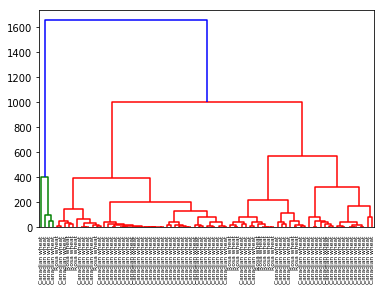

In [84]:
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(samples, method='complete')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show();

Dendrograms are a great way to illustrate the arrangement of the clusters produced by hierarchical clustering.

## Hierarchies of stocks

Before, you used k-means clustering to cluster companies according to their stock price movements. Now, you'll perform **hierarchical clustering** of the companies. You are given a NumPy array of price movements `movements`, where the rows correspond to companies, and a list of the company names `companies`. `SciPy hierarchical clustering doesn't fit into a sklearn pipeline`, so you'll need to use the `normalize()` function from sklearn.preprocessing instead of Normalizer.

linkage and dendrogram have already been imported from scipy.cluster.hierarchy, and PyPlot has been imported as plt.

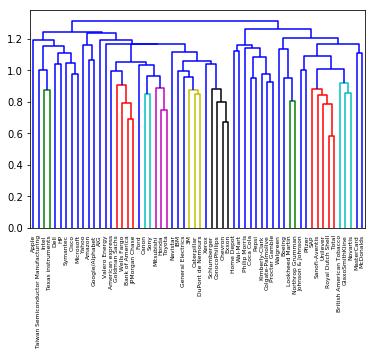

In [85]:
# Import normalize
from sklearn.preprocessing import normalize

# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method='complete')

# Plot the dendrogram
dendrogram(mergings, labels=companies, leaf_rotation=90, leaf_font_size=6)
plt.show();

You can produce great visualizations such as this with hierarchical clustering, but it can be used for more than just visualizations.

<img src="images/clustering_intermediate.png" alt="" style="width: 600px;"/>

## Which clusters are closest?

The `linkage` method defines **how the distance between clusters is measured**. In `complete linkage`, the distance between clusters is the distance between the furthest points of the clusters. In `single linkage`, the distance between clusters is the distance between the closest points of the clusters.

<img src="images/clustering_q1.png" alt="" style="width: 600px;"/>

Consider the three clusters in the diagram. Which of the following statements are true?

- A. In single linkage, Cluster 3 is the closest to Cluster 2.
- B. In complete linkage, Cluster 1 is the closest to Cluster 2.

Answer: both A and B are true